Lets take a look at my

In [64]:


import pandas as pd
import numpy as np
from matplotlib import pyplot

from IPython.display import display 
%matplotlib inline

In [65]:
train_raw=pd.read_csv('train.csv')
train_raw2=train_raw.fillna('')

import ast
# ast.literal_eval(train_raw2['genres'][0])[0]['name']

In [66]:
train_raw2.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,,Marine Boy,,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


# Lets Do some Data Cleaning/Munging

starting with belongs to collection

In [67]:
train_raw2['collection']=train_raw2['belongs_to_collection'].apply(lambda x: ast.literal_eval(x)[0]['name'] if x!='' else '')
# Clean up old variable
train_raw2=train_raw2.drop('belongs_to_collection',axis=1)


train_raw2.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,113,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,105,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,122,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,118,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,,Marine Boy,,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,


In [68]:
train_raw2['genres']=train_raw2['genres'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
feats_dum=['genres']
feats=[]

In [69]:

train_raw2['keywords']=train_raw2['Keywords'].apply(lambda x : ','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
feats_dum.append('keywords')
train_raw2['keywords'].head()

0      time travel,sequel,hot tub,duringcreditsstinger
1             coronation,duty,marriage,falling in love
2    jazz,obsession,conservatory,music teacher,new ...
3    mystery,bollywood,police corruption,crime,indi...
4                                                     
Name: keywords, dtype: object

In [70]:
train_raw2['sp_languages']=train_raw2['spoken_languages'].apply(lambda x : ','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
feats_dum.append('sp_languages')

In [71]:
train_raw2['prod_companies']=train_raw2['production_companies'].apply(lambda x : ','.join([i["name"] for i in ast.literal_eval(x)] if x else ''))
feats_dum.append('prod_companies')

In [72]:
train_raw2['prod_countries']=train_raw2['production_countries'].apply(lambda x : ','.join([i['name'] for i in ast.literal_eval(x)]) if x else '')
feats_dum.append('prod_countries')

In [73]:
train_raw2['release_month']=train_raw2['release_date'].apply(lambda x : int(x.split('/')[0]))
train_raw2['release_day']=train_raw2['release_date'].apply(lambda x : int(x.split('/')[1]))
train_raw2['release_year']=train_raw2['release_date'].apply(lambda x : int(x.split('/')[2]))
feats.append('release_month')
feats.append('release_day')
feats.append('release_year')

train_raw2[feats].head()

,release_month,release_day,release_year
0,2,20,15
1,8,6,4
2,10,10,14
3,3,9,12
4,2,5,9


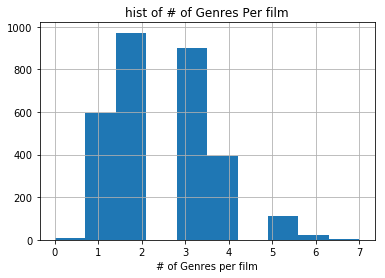

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
train_raw2['genres'].apply(lambda x: len(x.split(',')) if x!='' else 0).hist()
plt.title('hist of # of Genres Per film')
plt.xlabel('# of Genres per film')

In [75]:
train_raw2['runtime']=pd.to_numeric(train_raw2['runtime'])

In [76]:
# train_raw2['production_co']=train_raw2['production_companies'].apply(lambda x:[i['name'] for i in ast.literal_eval(x)] if x else '')
# train_raw2=train_raw2.drop('production_companies', axis=1)
train_raw2.iloc[:3,4:]
feats.append('runtime')
feats.append('popularity')
feats_dum.append('status')
feats_dum.append('original_language')

# train_raw2.iloc[:3,4:]
# train_raw2['genres']=train_raw2['genres'].apply(lambda x:[i['name'] for i in ast.literal_eval(x)] if x else '')

In [77]:
train_raw2['cast_true']=train_raw2['cast'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)][:10] if x else ''))

In [78]:
feats_dum.append('cast_true')

In [79]:
# train_raw3['cast'][0]
# train_raw3['cast']=train_raw3['cast'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
# temp2=train_raw2['cast'].str.get_dummies(sep=',')
train_raw2['cast_num']=train_raw2['cast'].apply(lambda x: len(x))
train_raw2['crew_num']=train_raw2['crew'].apply(lambda x:len(x))
feats.append('cast_num')
feats.append('crew_num')

# temp4=train_raw2['cast_true'].str.get_dummies(sep=',')

In [80]:
def get_dummies(feat_dums):
    
#     curr=train_raw2[feats]
    for i in feat_dums:
        if len(train_raw2[i].str.split(','))>1:
            temp=train_raw2[i].str.get_dummies( sep=',')
            
        else:
            temp=train_raw[i].get_dummies()
        temp2=temp.add_prefix(i)
        try:
            curr=pd.concat([curr,temp2], axis=1)
        except:
            curr=temp2
    return curr
train_dums=get_dummies(feats_dum)
# train_dummies = pd.get_dummies(train_raw2, columns = ['genres', 'original_language'] )
# train_dummies.describe()


In [81]:
train_raw2[feats]

,release_month,release_day,release_year,runtime,popularity,cast_num,crew_num
0,2,20,15,93.0,6.575393,4722,12510
1,8,6,4,113.0,8.248895,4078,1676
2,10,10,14,105.0,64.299990,9888,11095
3,3,9,12,122.0,3.174936,1334,477
4,2,5,9,118.0,1.148070,812,322
5,8,6,87,83.0,0.743274,812,1876
6,8,30,12,92.0,7.286477,2783,13304
7,1,15,4,84.0,1.949044,797,164
8,2,16,96,100.0,6.902423,2409,1487
9,4,16,3,91.0,4.672036,4050,1908


In [ ]:
feats.

In [85]:
# train_raw2[train_raw2[feats[3]].isnull()==True][feats[3]]
train_raw2['run_adj']=train_raw2[feats[3]].fillna(0)
feats.remove('runtime')
feats.append('run_adj')
train_raw2[train_raw2['run_adj'].isnull()==True][feats[-6]]

C:\Users\dexter.aguila\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


Series([], Name: release_day, dtype: int64)

In [91]:

train_base_scaled = pd.DataFrame(min_max_scaler_feat.fit_transform(train_raw2[feats]))

In [92]:

# df_with_dummies = pd.get_dummies(train_raw2, columns =  )

# train_raw3=train_raw2[['budget','popularity','cast_num', 'crew_num', 'genres','original_language']]
# train_raw4=pd.get_dummies(train_raw3, columns=['genres','original_language'])

# train_final=train_raw2[feats].fillna()
from sklearn import preprocessing
min_max_scaler_feat = preprocessing.MinMaxScaler()
min_max_scaler_lab = preprocessing.MinMaxScaler()
# train_base=['budget','popularity','cast_num', 'crew_num']

train_base_scaled = pd.DataFrame(min_max_scaler_feat.fit_transform(train_raw2[feats]))

train_final=pd.concat([train_base_scaled,train_dums], axis=1)
revenue_final=train_raw2['revenue'].values.astype(float)
revenue_final=min_max_scaler_lab.fit_transform(revenue_final.reshape(-1, 1))
from sklearn.cross_validation import train_test_split


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_final, 
                                                    revenue_final, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

C:\Users\dexter.aguila\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [93]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

In [98]:
# l0 = tf.keras.layers.Dense(units=25, input_shape=[15371])  
# l0 = tf.keras.layers.Dense(units=25, input_shape=[60]) 
l0 = tf.keras.layers.Dense(units=25, input_shape=[26606]) 
hidden1 = tf.keras.layers.Dense(units=25)  
hidden2 = tf.keras.layers.Dense(units=10)  
outlayer=tf.keras.layers.Dense(units=1)  

model = tf.keras.Sequential([l0,hidden1,hidden2,outlayer])
# model.compile(loss='mean_squared_error',
#               optimizer=tf.keras.optimizers.Adam(0.1))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(lr=0.01, nesterov=True))


history = model.fit(X_train, y_train, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


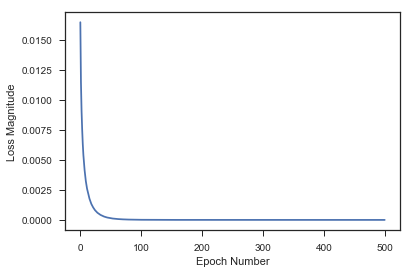

In [99]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")


plt.plot(history.history['loss'])

In [100]:
f2=model.predict(X_test)


In [101]:
f3=pd.DataFrame(f2)
f3.describe()

,0
count,600.000000
mean,0.042295
std,0.102216
min,-0.223320
25%,-0.021229
50%,0.034446
75%,0.101775
max,0.804970


In [102]:
from sklearn.metrics import r2_score
r2_score(y_test, f2) 

-0.24975054512265138

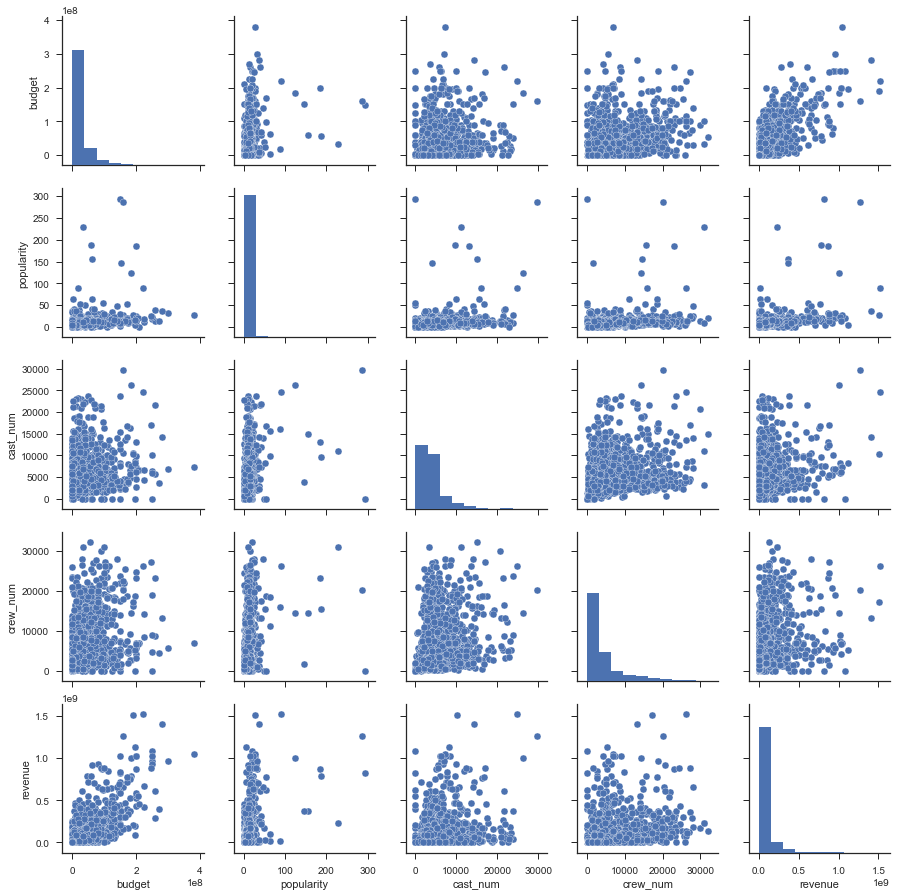

In [103]:

import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

# produces a plots of all features against eachother
sns.pairplot(train_raw2[['budget','popularity','cast_num', 'crew_num','revenue']])

In [104]:
for i,v in zip(y_test,f2):
    print(str(i)+"True vs "+str(v)+"predicted")

[8.06089714e-06]True vs [0.01476025]predicted
[2.75474859e-06]True vs [0.03670624]predicted
[0.01023741]True vs [0.06280017]predicted
[0.00455189]True vs [0.04897458]predicted
[0.00164521]True vs [0.05616723]predicted
[0.01130963]True vs [0.24243939]predicted
[0.00525543]True vs [0.04295633]predicted
[0.00294129]True vs [0.0714687]predicted
[0.0046066]True vs [0.02481125]predicted
[0.00571206]True vs [-0.00844519]predicted
[0.00335739]True vs [-0.02163065]predicted
[0.01262473]True vs [-0.01299297]predicted
[0.00629354]True vs [-0.06249158]predicted
[0.09839802]True vs [0.1180321]predicted
[0.00177547]True vs [-0.08895893]predicted
[0.17381253]True vs [-0.01663518]predicted
[0.02908522]True vs [-0.01385266]predicted
[0.01250364]True vs [0.01561202]predicted
[0.09731814]True vs [0.19784495]predicted
[2.9412502e-05]True vs [0.02777626]predicted
[0.03666027]True vs [0.03212551]predicted
[0.04046523]True vs [0.09101819]predicted
[0.03033072]True vs [0.20200264]predicted
[0.00121171]True vs

In [105]:
# Preprocess the test data

test_raw=pd.read_csv('test.csv')
test_raw=test_raw.fillna('')
# train_raw2=train_raw.fillna('')

test_raw['genres']=test_raw['genres'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)] if x else ''))
test_raw['collection']=test_raw['belongs_to_collection'].apply(lambda x: ast.literal_eval(x)[0]['name'] if x!='' else '')
test_temp1=test_raw['genres'].str.get_dummies(sep=',')
test_temp2=test_raw['original_language'].str.get_dummies()
test_raw['cast_num']=test_raw['cast'].apply(lambda x: len(x))
test_raw['crew_num']=test_raw['crew'].apply(lambda x:len(x))
test_raw['cast_true']=test_raw['cast'].apply(lambda x:','.join([i['name'] for i in ast.literal_eval(x)][:10] if x else ''))


test_final_feat=pd.DataFrame(min_max_scaler_feat.transform(test_raw[train_base]))
test_preprocess=pd.concat([test_final_feat,test_temp1, test_temp2], axis=1)



def add_miss_cols(ds, columns):
    miss_cols=set(columns)- set(ds.columns)
    drop_cols=set(ds.columns)-set(columns)
    for i in miss_cols:
        ds[i]=0
    ds2=ds.drop(drop_cols, axis=1)
    return ds2,miss_cols
test_df,miss_cols=add_miss_cols(test_preprocess, train_final.columns)
# test_preprocess.columns
miss_cols
test_pred=model.predict(test_df)
test_pred1=min_max_scaler_lab.inverse_transform(test_pred)




NameError: name 'train_base' is not defined

In [70]:
# test_pred2=[]
# for i,v in enumerate(test_pred.tolist()):
#     if v[0]<0:
#         test_pred2.append([i,0])
#     else:
#         test_pred2.append([i,v[0]])
df=pd.DataFrame(test_pred1, columns=['revenue'])        
df['revenue']=df['revenue'].apply(lambda x: x if x >0 else 0)
df['id']=test_raw['id']
df_final=df[['id','revenue']]
df_final.to_csv('predictions.csv',index=False)

In [120]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2400 samples.
Testing set has 600 samples.


In [150]:
len(X_train.columns)

38646

In [30]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from time import time 

from sklearn.ensemble import AdaBoostClassifier as AdaBC
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
#     results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
#     results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results, predictions_train, predictions_test

C:\Users\aguil\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
res, pred_train, pred_test=train_predict(AdaBC(random_state=15), len(y_train), X_train, y_train, X_test, y_test)

C:\Users\aguil\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [59]:
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBoostClassifier
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
l0 = tf.keras.layers.Dense(units=3, input_shape=[38646])  

In [60]:
model = tf.keras.Sequential([l0])

In [61]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [62]:
history = model.fit(X_train, y_train, epochs=100, verbose=False)
print("Finished training the model")

ValueError: Error when checking input: expected dense_3_input to have shape (38646,) but got array with shape (60,)

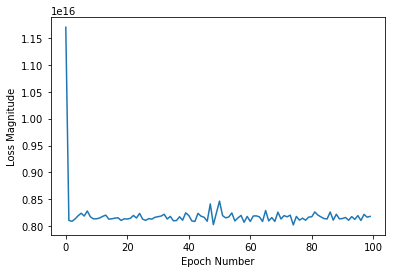

In [156]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [157]:
y_pred=model.predict(X_test)

In [160]:
y_test.shape

(600,)

In [170]:
l=[1,2,3]


AttributeError: 'list' object has no attribute 'sum'

In [173]:
y_pred.shape
f=lambda x: sum(x)/3
f(y_pred)

array([1.2301307e+10, 1.2301307e+10, 1.2301308e+10], dtype=float32)

In [199]:
X_test

,budget,popularity,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,ro,ru,sr,sv,ta,te,tr,ur,vi,zh
311,9500000,8.594980,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1025,0,5.819403,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587,30000000,8.032638,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2941,30000000,5.781667,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2980,300000,0.350207,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2078,17000000,7.290872,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2281,0,6.422711,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
720,0,9.488593,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1537,0,5.769957,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2493,500000,5.854690,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
y_test

311         12250
1025         4187
1587     15556340
2941      6916869
2980      2500000
2078     17185632
2281      7985929
720       4469460
1537      7000000
2493      8679814
1716      5101756
536      19184015
298       9563393
104     149521495
1649      2697930
2299    264118201
1109     44196684
899      19000000
461     147880543
2590        44695
2664     55707411
983      61489265
1191     46089287
1003      1841260
2692     40903593
463     126297830
1108    114178613
305     193772504
1014       957240
22         100345
          ...    
2689     71485043
2332       111996
1267        46488
175     207283925
121     448000000
1263      4627375
817      22000000
2490            6
566       7900000
558      46152411
206       1543112
2017      8138788
1373      2106557
2061    161834276
1798     34725000
2651      6800000
2894       218626
2085     11000000
883      77278331
825      15992615
135        300000
64       17654912
1683      1878561
687       1382462
874     14

In [201]:
f2=np.asarray([sum(i)/3 for i in y_pred])
print(f2[0:10])
print(y_train[0:10])

[2.71985407e+07 1.58264827e+03 8.58835787e+07 8.58827467e+07
 8.58569146e+05 4.86678733e+07 1.58694137e+03 2.12096077e+03
 1.52014762e+03 1.43291792e+06]
2370    301000000
1774     74558115
731      56666667
271     162966177
1077     22471595
369      64110728
783      22697691
1224    142337240
2509      3453043
2058    347434178
Name: revenue, dtype: int64


In [178]:
y_test

311         12250
1025         4187
1587     15556340
2941      6916869
2980      2500000
2078     17185632
2281      7985929
720       4469460
1537      7000000
2493      8679814
1716      5101756
536      19184015
298       9563393
104     149521495
1649      2697930
2299    264118201
1109     44196684
899      19000000
461     147880543
2590        44695
2664     55707411
983      61489265
1191     46089287
1003      1841260
2692     40903593
463     126297830
1108    114178613
305     193772504
1014       957240
22         100345
          ...    
2689     71485043
2332       111996
1267        46488
175     207283925
121     448000000
1263      4627375
817      22000000
2490            6
566       7900000
558      46152411
206       1543112
2017      8138788
1373      2106557
2061    161834276
1798     34725000
2651      6800000
2894       218626
2085     11000000
883      77278331
825      15992615
135        300000
64       17654912
1683      1878561
687       1382462
874     14

In [177]:
from sklearn.metrics import r2_score
r2_score(y_test, f2) 

0.546333937893859

In [142]:

import xgboost as xgb
def xgb_model(trn_x, trn_y, val_x, val_y, test) :
    
    params = {'objective': 'reg:linear', 
              'eta': 0.01, 
              'max_depth': 6, 
              'subsample': 0.7, 
              'colsample_bytree': 0.8,  
              'eval_metric': 'rmse', 
              'seed': 10, 
              'silent': True,
    }
    
    record = dict()
    model = xgb.train(params
                      , xgb.DMatrix(trn_x, trn_y)
                      , 10000
                      , [(xgb.DMatrix(trn_x, trn_y), 'train'), (xgb.DMatrix(val_x, val_y), 'valid')]
#                       , verbose_eval=verbose
                      , early_stopping_rounds=200
                      , callbacks = [xgb.callback.record_evaluation(record)])
    best_idx = np.argmin(np.array(record['valid']['rmse']))

    val_pred = model.predict(xgb.DMatrix(val_x), ntree_limit=model.best_ntree_limit)
    test_pred = model.predict(xgb.DMatrix(test), ntree_limit=model.best_ntree_limit)

    return {'val':val_pred, 'test':test_pred, 'error':record['valid']['rmse'][best_idx], 'importance':[i for k, i in model.get_score().items()]}

In [143]:
xgb_model(X_train, y_train, X_test, y_test, y_test) 

[0]	train-rmse:1.50995e+08	valid-rmse:1.54626e+08
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[1]	train-rmse:1.49958e+08	valid-rmse:1.53705e+08
[2]	train-rmse:1.49083e+08	valid-rmse:1.52878e+08
[3]	train-rmse:1.48202e+08	valid-rmse:1.5216e+08
[4]	train-rmse:1.4714e+08	valid-rmse:1.51222e+08
[5]	train-rmse:1.46083e+08	valid-rmse:1.50358e+08
[6]	train-rmse:1.45184e+08	valid-rmse:1.49534e+08
[7]	train-rmse:1.44323e+08	valid-rmse:1.48689e+08
[8]	train-rmse:1.43311e+08	valid-rmse:1.47835e+08
[9]	train-rmse:1.42317e+08	valid-rmse:1.46969e+08
[10]	train-rmse:1.41299e+08	valid-rmse:1.46097e+08
[11]	train-rmse:1.40347e+08	valid-rmse:1.45307e+08
[12]	train-rmse:1.39394e+08	valid-rmse:1.44547e+08
[13]	train-rmse:1.38621e+08	valid-rmse:1.43817e+08
[14]	train-rmse:1.37717e+08	valid-rmse:1.43075e+08
[15]	train-rmse:1.3685e+08	valid-rmse:1.42444e+08
[16]	train-rmse:1.35873e+08	valid-rmse:1.41588e+08


ValueError: feature_names mismatch: ['budget', 'popularity', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', ' Jr.', ' Larry Mullen Jr.', ' Michael Hayden', '"Weird Al" Yankovic', "'Sister' Carol East", '50 Cent', 'A Martinez', 'A. C. Murali Mohan', 'A. David Burleigh', 'A. Glauberman', 'A. J. Langer', 'A. Jay Radcliff', 'A. Michael Baldwin', 'A. P. Singh', 'A.C. Green', 'A.J. Balance', 'A.J. Benza', 'A.J. Buckley', 'A.J. Cook', 'A.J. Riebli III', 'A.S. Byron', 'AJ Bowen', 'AJ Michalka', 'Aadarsh Balakrishna', 'Aadukalam Murugadoss', 'Aadukalam Naren', 'Aake Kalliala', 'Aakomon Jones', 'Aaliyah', 'Aamir Khan', 'Aaron Abrams', 'Aaron Ashmore', 'Aaron Au', 'Aaron Berg', 'Aaron Brown', 'Aaron Burns', 'Aaron Covington', 'Aaron Craig', 'Aaron Craven', 'Aaron David', 'Aaron Douglas', 'Aaron Eckhart', 'Aaron Freeman', 'Aaron Glenane', 'Aaron Haedt', 'Aaron Hale', 'Aaron Hendry', 'Aaron Himelstein', 'Aaron Holden', 'Aaron Hughes', 'Aaron Isaac Vasquez', 'Aaron J. Patton', 'Aaron Jackson', 'Aaron Janke', 'Aaron Jay Rome', 'Aaron Jeffery', 'Aaron King', 'Aaron Kleiber', 'Aaron Lazar', 'Aaron Lo Pui-Him', 'Aaron Lohr', 'Aaron Lustig', 'Aaron Massey', 'Aaron Matthews', 'Aaron Michael Drozin', 'Aaron Michael Lacey', 'Aaron Monaghan', 'Aaron Murphy', 'Aaron Norris', 'Aaron Paul', 'Aaron Sauerland', 'Aaron Saxon', 'Aaron Schwartz', 'Aaron Spann', 'Aaron Stanford', 'Aaron Stewart', 'Aaron Swartz', 'Aaron Takahashi', 'Aaron Taylor-Johnson', 'Aaron Therol', 'Aaron Toney', 'Aaron Williams', 'Aaron Yoo', 'Aaron Zell', 'Aasif Mandvi', 'Aatash Amir', 'Abbas', 'Abbas El Boughdadly', 'Abbey Clancy', 'Abbey Imai', 'Abbey Lee', 'Abbie Cornish', 'Abbie Dunn', 'Abby Elliott', 'Abby Mukiibi Nkaaga', 'Abdelkrim Assad', "Abdoulaye N'Gom", 'Abdul Alshawish', 'Abdul Ayoola', 'Abdul Henderson', 'Abdul Salis', 'Abdullah Abbas', 'Abdullrahman Algohani', 'Abe Larkin', 'Abe Simon', 'Abe Vigoda', 'Abel Hofflin', 'Abhay Deol', 'Abhi Sinha', 'Abhija Sivakala', 'Abhishek Bachchan', 'Abidemi Sobande', 'Abigail Bianca', 'Abigail Breslin', 'Abigail Brown', 'Abigail Canton', 'Abigail Covert', 'Abigail Cruttenden', 'Abigail Friend', 'Abigail Hargrove', 'Abigail Isom', 'Abigail James Witherspoon', 'Abigail Marlowe', 'Abigail Millar', 'Abigail Savage', 'Abigail Spencer', 'Abigayle Honeywill', 'Abiona Omonua', 'Abraham Aronofsky', 'Abraham Attah', 'Abraham Benrubi', 'Abraham Lim', 'Abraham Smith', 'Abraham Sofaer', 'Abraham Verduzco', 'Abrar Zahoor', 'Absa Diatou Toure', 'Abu Rashid Khan', 'Accie Julius Connor', 'Ace Bhatti', 'Ace Marrero', 'Ace Mask', 'Actor Sergio Kato', 'Ad van Kempen', 'Ada Carrasco', 'Ada Tai', 'Adalberto Maria Merli', 'Adam Aalderks', 'Adam Alexi-Malle', 'Adam Arkin', 'Adam Aseem Tiwari', 'Adam Baldwin', 'Adam Barnett', 'Adam Beach', 'Adam Biesk', 'Adam Bocknek', 'Adam Bousdoukos', 'Adam Boyd', 'Adam Boyer', 'Adam Brody', 'Adam Brooks', 'Adam Brown', 'Adam Bryant', 'Adam Busch', 'Adam Butcher', 'Adam Carolla', 'Adam Chambers', 'Adam Cheng', 'Adam Clark', 'Adam Clayton', 'Adam Curry', 'Adam Devine', 'Adam Drescher', 'Adam Driver', 'Adam E. Ginsberg', 'Adam Farabee', 'Adam Fergus', 'Adam Ferrara', 'Adam Fogerty', 'Adam Fristoe', 'Adam G. Sevani', 'Adam Garcia', 'Adam Gilbert', 'Adam Gobble', 'Adam Godley', 'Adam Goldberg', 'Adam Goodell', 'Adam Grupper', 'Adam Hann-Byrd', 'Adam Harrington', 'Adam Hendershott', 'Adam Herschman', 'Adam Herz', 'Adam Hicks', 'Adam Hollander', 'Adam Horovitz', 'Adam James', 'Adam Johnson', 'Adam Kalesperis', 'Adam Kotz', 'Adam Lamberg', 'Adam Large', 'Adam Lawson', 'Adam Lazarre-White', 'Adam Lazarus', 'Adam LeFevre', 'Adam Lieberman', 'Adam Mackey', 'Adam Marcello', 'Adam Masnyk', 'Adam McGrady', 'Adam McKay', 'Adam McMonigal', 'Adam Michael Dodd', 'Adam Monty', 'Adam Mucci', 'Adam Nagaitis', 'Adam Neill', 'Adam Nelson', 'Adam Pally', 'Adam Pascal', 'Adam Paul', 'Adam Pelty', 'Adam Ray', 'Adam Rayner', 'Adam Riches', 'Adam Rodr√≠guez', 'Adam Rose', 'Adam Sandler', 'Adam Saunders', 'Adam Scarimbolo', 'Adam Scott', 'Adam Shankman', 'Adam Sims', 'Adam Smith', 'Adam Solomonian', 'Adam Storke', 'Adam Szyszkowski', 'Adam Thomas Wright', 'Adam Trese', 'Adam Vargas', 'Adam Waxman', 'Adam Wendling', 'Adam West', 'Adam White', 'Adam Williams', 'Adam Wingard', 'Adam Wylie', 'Adam Zolotin', 'Adamo P. Cultraro', 'Adan Jodorowsky', 'Addison Pate', 'Addison Richards', 'Addison Riecke', 'Addison Rose Melfi', 'Addison Timlin', 'Addy Miller', 'Ade', 'Adeel Akhtar', 'Adel Bencherif', 'Adelaide Ala√Øs', 'Adelaide Clemens', 'Adelaide Morgan', 'Adele Jergens', 'Adele K. Schaeffer', 'Adele Malis-Morey', 'Adele Yoshioka', 'Adelfa Calvo', "Adeline D'Hermy", 'Adeline De Walt Reynolds', 'Adella Gautier', 'Adelle Lutz', 'Adelmo Togliani', 'Aden Young', 'Adepero Oduye', "Adetokumboh M'Cormack", 'Adewale Akinnuoye-Agbaje', 'Adhir Kalyan', 'Adi Carauleanu', 'Adil Mohammed Javed', 'Adilah Barnes', 'Adina Cristescu', 'Adina Dulcu', 'Adina Porter', 'Adira B. Cole Abbett', 'Aditya Pancholi', 'Aditya Roy Kapoor', 'Aditya Srivastava', 'Adnan Haskovic', 'Adnan Maral', 'Adolf Hitler', 'Adolfo Celi', 'Adolph Caesar', 'Adolph Faylauer', 'Adolphe Menjou', 'Adoni Maropis', 'Adreana Gonzalez', 'Adria Tennor', 'Adrian Alonso', 'Adrian Armas', 'Adrian Burks', 'Adrian Can', 'Adrian Dearnell', 'Adrian Dunbar', 'Adrian Escober', 'Adrian F. Gonzalez', 'Adrian G. Griffiths', 'Adrian Grenier', 'Adrian Holmes', 'Adrian Hough', 'Adrian Lamo', 'Adrian Lester', 'Adrian Lorenzo Puente', 'Adrian Martinez', 'Adrian Ochoa', 'Adrian Pang', 'Adrian Pasdar', 'Adrian Paul', 'Adrian Rawlins', 'Adrian Ross Magenty', 'Adrian Scarborough', 'Adrian Schiller', 'Adrian Sparks', 'Adriana Alveario', 'Adriana Barraza', 'Adriana Cordova', 'Adriana Fonzi Cruciani', 'Adriana Millan', 'Adriana Paz', 'Adriana Sklena≈ô√≠kov√°', 'Adriana Yanez', 'Adriane Brown', 'Adriane Lenox', 'Adriane Marsh', 'Adrianna Belan', 'Adrianne Palicki', 'Adriano Ambrogi', 'Adriano Celentano', 'Adriano Giannini', 'Adriano Wajskol', 'Adrien Barazzone', 'Adrien Brody', 'Adrien Curry', 'Adrien Dorval', 'Adrien M√©nielle', 'Adrien Scott Robinson', 'Adrien de Van', 'Adriene Couvillion', 'Adriene Mishler', 'Adrienne Bailon', 'Adrienne Ballenger', 'Adrienne Barbeau', 'Adrienne Canterna', 'Adrienne Corri', "Adrienne D'Ambricourt", 'Adrienne Hampton', 'Adrienne King', 'Adrienne Lamping', 'Adrienne Marden', 'Adrienne Shaw', 'Adrienne Shelly', 'Adri√°n Alonso Barona', 'Advah Soudack', 'Ady Berber', 'Ad√®le Haenel', 'Aedin Mincks', 'Aemilia Robinson', 'Aengus James', 'Aernout Van Lynden', 'Aeryk Egan', 'Aewia Huillet', 'Afa Thompson', 'Afemo Omilami', 'Affif Ben Badra', 'Affion Crockett', 'Afram Bill Williams', 'Afrika Bambaataa', 'Afshan Azad', 'Afsheen Olyaie', 'Aftab Shivdasani', 'Afton Williamson', 'Agata Buzek', 'Agata Kulesza', 'Agata Trzebuchowska', 'Agathe de La Fontaine', 'Agnes Bruckner', 'Agnes Fraser', 'Agnes Herrmann', 'Agnes Mayasari', 'Agnes Moorehead', 'Agnese Nano', 'Agnese Torre', 'Agni Scott', 'Agnieszka Glinska', 'Agnieszka Grochowska', 'Agniya Ditkovskite', 'Agniya Kuznetsova', 'Agostino Borgato', 'Agostino Calabresi', 'Agrippina Steklova', 'Agust√≠n Almod√≥var', 'Agust√≠n Gonz√°lez', 'Aharon Ipal√©', 'Ahd', 'Ahmad Kaabour', 'Ahmad Khan Mahmoodzada', 'Ahmad Powell', 'Ahmad Rashad', 'Ahmaogak Sweeney', 'Ahmed Best', 'Ahmed El Shenawi', 'Ahmet M√ºmtaz Taylan', 'Ahmet Zappa', 'Ahmir-Khalib Thompson', 'Ahn Yeon-suk', "Ahna O'Reilly", 'Ahsaas Channa', 'Ai Kobayashi', 'Ai Maeda', 'Ai Wan', 'Ai Weiwei', 'Aida Linares', 'Aida Turturro', 'Aidan Barton', 'Aidan Devine', 'Aidan Feore', 'Aidan Gemme', 'Aidan Gillen', 'Aidan Kelly', 'Aidan Kennedy', 'Aidan Liam Smith', 'Aidan Lithgow', 'Aidan Quinn', 'Aidan Ritchie', 'Aidan Sussman', 'Aidan Turner', 'Aiden Flowers', 'Aiden Lovekamp', 'Aiko Horiuchi', 'Aiko Tanaka', 'Aileen Carlyle', 'Aileen Fitzpatrick', 'Aileen Pringle', 'Aileen Quinn', 'Ailen Sit', 'Ailie Ye', 'Aimar P√©rez', 'Aimee Bowen', 'Aimee Carrero', 'Aimee Garcia', 'Aimee Graham', 'Aimee Robertson', 'Aimee Teegarden', 'Aimee-Lynn Chadwick', 'Aim√©e Eccles', 'Aine Ni Mhuiri', 'Aino Jawo', 'Aisha Cain', 'Aisha Hinds', 'Aisha Kabia', 'Aisha Takow', 'Aisha Tyler', 'Aisholpan Nurgaiv', 'Aishwarya Rai Bachchan', 'Aisling Loftus', 'Aislinn DeButch', 'Aissa Wayne', 'Ait Hamou Amine', 'Aitana S√°nchez-Gij√≥n', 'Aixa Clemente', 'Aiyaz Ahmed', 'Ajay Devgn', 'Ajay Ghosh', 'Ajay Naidu', 'Ajay Rathnam', 'Ajith Kumar', 'Akaji Maro', 'Akashdeep Saigal', 'Akbar Kurtha', 'Akemi Goto', 'Akerin Suksawat Premwattana', 'Akhilendra Mishra', 'Aki Aleong', 'Aki Asakura', 'Aki Chan', 'Aki Morita', 'Akie Kotabe', 'Akiko Mon√¥', 'Akiko Morison', 'Akiko Takeshita', 'Akiko Wakabayashi', 'Akim Tamiroff', 'Akimori Nakagawa', 'Akimoto Tsubasa', 'Akin Gazi', 'Akinori Ando', 'Akio Mitamura', 'Akio Ohtsuka', 'Akira Emoto', 'Akira Fujii', 'Akira Hamada', 'Akira Ishida', 'Akira Ogata', 'Akira Otaka', 'Akira Sera', 'Akira Tani', 'Akira Terao', 'Akosua Busia', 'Aksel Hennie', 'Akshara Gowda', 'Akshay Kumar', 'Akuyoe Graham', "Al 'Red Dog' Weber", 'Al Baker Jr.', 'Al Berry', 'Al Conti', 'Al Coronel', 'Al Dubois', 'Al Eben', 'Al Ernest Garcia', 'Al Fann', 'Al Ferguson', 'Al Franken', 'Al Goto', 'Al Guarino', 'Al Israel', 'Al Lee', 'Al Leong', 'Al Lettieri', 'Al Lewis', 'Al Madrigal', 'Al Mancini', 'Al Martino', 'Al Matthews', 'Al Michaels', 'Al Pacino', 'Al Palagonia', 'Al Pipkin', 'Al Pugliese', 'Al Robertson', 'Al Roker', 'Al Ruscio', 'Al Sapienza', 'Al Shearer', 'Al Silvani', 'Al Stewart', 'Al Sunshine', 'Al Vandecruys', 'Al Vicente', 'Al Waxman', 'Al Weaver', 'Al White', 'Alad√°r Lakl√≥th', 'Alain ALIVON', 'Alain Attal', 'Alain Bouvette', 'Alain Chabat', 'Alain Cuny', 'Alain Damis', 'Alain Decock', 'Alain Dehay', 'Alain Delon', 'Alain Dijon', 'Alain Eloy', 'Alain Figlarz', 'Alain Fr√©rot', 'Alain Goulem', 'Alain Hern√°ndez', 'Alain Hocquenghem', 'Alain Lathi√®re', 'Alain Libolt', 'Alain Mottet', 'Alain Prost', 'Alain Sachs', 'Alakina Mann', 'Alan Aisenberg', 'Alan Alda', 'Alan Arkin', 'Alan Bates', 'Alan Bergmann', 'Alan Blumenfeld', 'Alan Boyce', 'Alan C. Peterson', 'Alan Ch√°vez', 'Alan Cinis', 'Alan Coates', 'Alan Cumming', 'Alan Dale', 'Alan Davidson', 'Alan Devine', 'Alan Fawcett', 'Alan Ford', 'Alan Fudge', 'Alan Gates', 'Alan Gilmer', 'Alan Gorg', 'Alan Hewitt', 'Alan Hopkins', 'Alan Howard', 'Alan J. Utley-Moore', 'Alan J. Wendl', 'Alan Johnson', 'Alan King', 'Alan Maher', 'Alan McGee', 'Alan McKenna', 'Alan Mueting', 'Alan Napier', 'Alan North', 'Alan Oke', 'Alan Oppenheimer', 'Alan Palomo', 'Alan Parker', 'Alan Pietruszewski', 'Alan Polonsky', 'Alan Pottinger', 'Alan Poul', 'Alan Powell', 'Alan Reed', 'Alan Resnic', 'Alan Rickman', 'Alan Ritchson', 'Alan Rothwell', 'Alan Rubin', 'Alan Ruck', 'Alan Rudolph', 'Alan Rusbridger', 'Alan Ruscoe', 'Alan Scarfe', 'Alan Stocks', 'Alan Stuart', 'Alan Talbot', 'Alan Tall', 'Alan Thicke', 'Alan Tilvern', 'Alan Toy', 'Alan Trujillo', 'Alan Tudyk', 'Alan Turkington', 'Alan Vint', 'Alan Weeks', 'Alan van Sprang', 'Alana Aimaq', 'Alana Curry', 'Alanna Ubach', 'Alastair Cumming', 'Alastair Douglas', 'Alba Galocha', 'Alba Ga√Øa Kraghede Bellugi', 'Alba Rohrwacher', 'Alban Lenoir', 'Albert Austin', 'Albert Brooks', 'Albert Carrier', 'Albert Cavens', 'Albert Chi', 'Albert Daniels', 'Albert Dekker', 'Albert Delpy', 'Albert Dupontel', 'Albert Finney', 'Albert Gornie', 'Albert Grabuleda Capdevila', 'Albert Hall', 'Albert Igual', 'Albert Insinnia', 'Albert Jones', 'Albert Kitzl', 'Albert Kwan', 'Albert Lee', 'Albert Lerda', 'Albert Lieven', 'Albert L√≥pez-Murtra', 'Albert Michel Jr.', 'Albert Moses', 'Albert Pollet', 'Albert Popwell', 'Albert Reed', 'Albert R√©my', 'Albert Salmi', 'Albert Sidoine', 'Albert Vidal', 'Albert Wilkinson', 'Albert Yao', 'Alberta Lee', 'Alberta Watson', 'Alberto Ammann', 'Alberto Bonilla', 'Alberto Castro', 'Alberto Di Stasio', 'Alberto Dinache', 'Alberto Ferreiro', 'Alberto Mendiola', 'Alberto Morin', 'Alberto Plebani', 'Alberto Reyes', 'Alborz Basiratmand', 'Alden Ray', 'Aldis Hodge', 'Alditz McKenzie', 'Aldo Paro', 'Aldo Pini', 'Aldo Silvani', 'Alea Sophia Boudodimos', 'Aleana Downs', 'Alec B. Francis', 'Alec Baldwin', 'Alec Bourgeois', 'Alec George', 'Alec Guinness', 'Alec Holden', 'Alec Ledd', 'Alec Mapa', 'Alec McCowen', 'Alec Murdock', 'Alec Newman', 'Alec Stockwell', 'Alec Su', 'Alec Sulkin', 'Alec Utgoff', 'Alec Vigil', 'Alec Von Bargen', 'Alecia Jai Fears', 'Alejandra Adame', 'Alejandra Gutierrez', 'Alejandra P√©rez', 'Alejandra Toussaint', 'Alejandro Antonio', 'Alejandro Arroyo', 'Alejandro Bracho', 'Alejandro Casaseca', 'Alejandro Cuello', 'Alejandro Escovedo', 'Alejandro Estornel', 'Alejandro Felipe', 'Alejandro Goic', 'Alejandro Mayar', 'Alejandro Naranjo', 'Alejandro Patino', 'Alejandro Rae', 'Alejandro Rey', 'Alejandro Rodriguez', 'Alejandro Sieveking', 'Alejandro Tejer√≠as', 'Alejandro Usigli', 'Aleks Paunovic', 'Aleksa Palladino', 'Aleksandar Aleksiev', 'Aleksandar Jovanoviƒá', 'Aleksander Bardini', 'Aleksandr Antonov', 'Aleksandr Baluev', 'Aleksandr Bashirov', 'Aleksandr Belyavskiy', 'Aleksandr Boev', 'Aleksandr Bureyev', 'Aleksandr Demidov', 'Aleksandr Dubina', 'Aleksandr Feklistov', 'Aleksandr Klyukvin', 'Aleksandr Kobzar', 'Aleksandr Lazarev Jr.', 'Aleksandr Levshin', 'Aleksandr Lyapin', 'Aleksandr Oleshko', 'Aleksandr Pal', 'Aleksandr Pyatkov', 'Aleksandr Revva', 'Aleksandr Robak', 'Aleksandr Samoylenko', 'Aleksandr Semchev', 'Aleksandr Shalyapin', 'Aleksandr Sinyukov', 'Aleksandr Sokolovjvskiy', 'Aleksandr Stefantsov', 'Aleksandr Tyutin', 'Aleksandr Yatsenko', 'Aleksandra Kamyshova', 'Aleksandra Lavrova', 'Aleksandra Petrova', 'Aleksandra Rastovic', 'Aleksandra Svetlichnaya', 'Aleksandra Ursuliak', 'Aleksanteri Ahola-Valo', 'Aleksei Buldakov', 'Aleksei Gavrilov', 'Aleksei Kravchenko', 'Aleksei Maklakov', 'Aleksei Zharkov', 'Aleksei Znamensky', 'Aleksey Bagdasarov', 'Aleksey Barabash', 'Aleksey Bardukov', 'Aleksey Chadov', 'Aleksey Dmitriev', 'Aleksey Gorbunov', 'Aleksey Kortnev', 'Aleksey Makarov', 'Aleksey Medvedev', 'Aleksey Ogurtsov', 'Aleksey Panin', 'Aleksey Poluyan', 'Aleksey Serebryakov', 'Aleksey Shmarinov', 'Aleksey Trotsenko', 'Aleksia Landeau', 'Alekxia Valdez', 'Alena Bondarchuk', 'Alena Mihulov√°', 'Alesha Dixon', 'Alesia Newman-Breen', 'Alessandra Ambrosio', 'Alessandra Benjamin', 'Alessandra Mastronardi', 'Alessandra Negrini', 'Alessandra Sarno', 'Alessandro Betti', 'Alessandro Bressanello', 'Alessandro Casula', 'Alessandro Cremona', 'Alessandro De Marco', 'Alessandro Di Robilant', 'Alessandro Fabrizi', 'Alessandro Gassman', 'Alessandro Genovesi', 'Alessandro Giallocosta', 'Alessandro Grimaldi', 'Alessandro Juliani', 'Alessandro Lindblad', 'Alessandro Milzoni', 'Alessandro Mistichelli', 'Alessandro Nivola', 'Alessandro Preziosi', 'Alessandro Ruggiero', 'Alessandro Saguto', 'Alessandro Serbaroli', 'Alessandro Serra', 'Alessandro Siani', 'Alessandro Tiberi', 'Alessia Alciati', 'Alessio Boni', 'Alesya Guzko', 'Aleta Barthell', 'Aleta Mitchell', 'Alethea McGrath', 'Alex Abbad', 'Alex Amaral', 'Alex Anfanger', 'Alex Angulo', 'Alex Aristidis', 'Alex Arnold', 'Alex Ashbaugh', 'Alex Austin', 'Alex Barima', 'Alex Barrett', 'Alex Beckett', 'Alex Biglane', 'Alex Boling', 'Alex Borstein', 'Alex Burns', 'Alex Burrall', 'Alex Calloway', 'Alex Campbell', 'Alex Carter', 'Alex Colon', 'Alex Corrado', 'Alex D. Linz', 'Alex Datcher', 'Alex DeCourville', 'Alex Descas', 'Alex Diakun', 'Alex Dimitriades', 'Alex D√©sert', 'Alex East', 'Alex Feldman', 'Alex Felix', 'Alex Ferris', 'Alex Fong Chung-Sun', 'Alex Froman', 'Alex Georgijev', 'Alex Gibney', 'Alex Gillison', 'Alex Glen', 'Alex Gonzalez', 'Alex Green', 'Alex Hafner', 'Alex Hamilton', 'Alex Hassell', 'Alex Haw', 'Alex Hibbert', 'Alex Holliday', 'Alex Hyde-White', 'Alex H√∏gh Andersen', 'Alex Ivanovici', 'Alex Jennings', 'Alex Jones', 'Alex Karpovsky', 'Alex Karras', 'Alex Kendrick', 'Alex Kew', 'Alex Kingston', 'Alex Knight', 'Alex Knoll', 'Alex Kruz', 'Alex Kubik', 'Alex Kudrytsky', 'Alex Ladove', 'Alex Lanipekun', 'Alex Lifeson', 'Alex Lombard', 'Alex Lorre', 'Alex MacQueen', 'Alex Madison', 'Alex Manugian', 'Alex Marek', 'Alex McArthur', 'Alex McCrindle', 'Alex McKenna', 'Alex Meneses', 'Alex Mentzel', 'Alex Meraz', 'Alex Moggridge', 'Alex Montoya', 'Alex Moore', 'Alex Morf', 'Alex Morris', 'Alex Nesic', 'Alex Norton', "Alex O'Loughlin", 'Alex Palmer', 'Alex Papps', 'Alex Pettyfer', 'Alex Poncio', 'Alex Pulido', 'Alex Pulling', 'Alex Quijano', 'Alex Rice', 'Alex Rocco', 'Alex Roe', 'Alex Rose', 'Alex Ross', 'Alex Ross Perry', 'Alex Ruiz', 'Alex Russell', 'Alex S. Jones', 'Alex Safi', 'Alex Shaffer', 'Alex Sol', 'Alex Solowitz', 'Alex Staggs', 'Alex Sullivan', 'Alex Thomas', 'Alex Van', 'Alex Veadov', 'Alex Vincent', 'Alex Warren', 'Alex Whybrow', 'Alex Winter', 'Alex Wolff', 'Alex ter Avest', 'Alexa Benedetti', 'Alexa Chung', 'Alexa Davalos', 'Alexa Nisenson', 'Alexa PenaVega', 'Alexa Sheehan', 'Alexander Agate', 'Alexander Altomirianos', 'Alexander Armstrong', 'Alexander Asefa', 'Alexander Bacan Chapman', 'Alexander Beyer', 'Alexander Burke', 'Alexander Calvert', 'Alexander Chaplin', 'Alexander Christopher Jones', 'Alexander Conti', 'Alexander Cook', 'Alexander Daniel Pimentel', 'Alexander Delamere', 'Alexander DiPersia', 'Alexander Drum', 'Alexander Eldimiati', 'Alexander Enberg', 'Alexander Fabian', 'Alexander Fehling', 'Alexander Flache', 'Alexander Flores', 'Alexander Folk', 'Alexander Gillison', 'Alexander Godunov', 'Alexander Goodwin', 'Alexander Gould', 'Alexander Granach', 'Alexander Held', 'Alexander Karim', 'Alexander Klein', 'Alexander Knox', 'Alexander Kuznetsov', 'Alexander Lockwood', 'Alexander Ludwig', 'Alexander Murph', 'Alexander Nevsky', 'Alexander Oliver', 'Alexander Petersons', 'Alexander Pollard', 'Alexander Pollock', 'Alexander Prasanth', 'Alexander Rose', 'Alexander Scheer', 'Alexander Schoenberg', 'Alexander Scourby', 'Alexander Siddig', 'Alexander Skarsg√•rd', 'Alexander Sneider', 'Alexander Wraith', 'Alexander Yassin', 'Alexander Zemeckis', 'Alexander von der Groeben', 'Alexandra Adomaitis', 'Alexandra Balahoutis', 'Alexandra Bastedo', 'Alexandra Berardi', 'Alexandra Bokyun Chun', 'Alexandra Borrie', 'Alexandra Boyd', 'Alexandra Breckenridge', 'Alexandra Castillo', 'Alexandra Castro', 'Alexandra Creteau', 'Alexandra Daddario', 'Alexandra Davies', 'Alexandra Doke', 'Alexandra Dowling', 'Alexandra Duah', 'Alexandra Estrada', 'Alexandra Fong', 'Alexandra Gentil', 'Alexandra Hay', 'Alexandra Holden', 'Alexandra Kaplan', 'Alexandra London', 'Alexandra Maria Lara', 'Alexandra Neil', 'Alexandra Nicole Hulme', 'Alexandra Nye', 'Alexandra Paul', 'Alexandra Powers', 'Alexandra Prusa', 'Alexandra Purvis', 'Alexandra Roach', 'Alexandra Ruddy', 'Alexandra Stapley', 'Alexandra Stewart', 'Alexandra Weinroth', 'Alexandra Wentworth', 'Alexandre Astier', 'Alexandre Carri√®re', 'Alexandre Chen', 'Alexandre Gontcharov ', 'Alexandre Krawetz', 'Alexandre Nachi', 'Alexandre Nahon', 'Alexandre Steiger', 'Alexandria Payne', 'Alexandru Bindea', 'Alexandru Dabija', 'Alexandru Papadopol', 'Alexandru Potocean', 'Alexandru Sabadac', 'Alexei Sayle', 'Alexia Barlier', 'Alexia Fast', 'Alexia Landeau', 'Alexia Rae Castillo', 'Alexia Robinson', 'Alexie Gilmore', 'Alexis Arquette', 'Alexis Bledel', 'Alexis Clagett', 'Alexis Denisof', 'Alexis Dupuy', 'Alexis Dziena', 'Alexis G. Zall', 'Alexis Georgoulis', 'Alexis Hernandez', 'Alexis Hodges', 'Alexis Humphrey', 'Alexis Kirschner', 'Alexis Knapp', 'Alexis Krause', 'Alexis Loizon', 'Alexis Mabry-Hart', 'Alexis Peters', 'Alexis Raben', 'Alexis Raich', 'Alexis Rhee', 'Alexis Rodney', 'Alexis Rose Coen', 'Alexis Solomos', 'Alexis Toutant', 'Alexis de los Santos', 'Alexondra Lee', 'Alexz Johnson', 'Alf Humphreys', 'Alf Skaneby', 'Alfie Allen', 'Alfie Bass', 'Alfie Curtis', 'Alfie Enoch', 'Alfie Field', 'Alfie Owen', 'Alfie Stewart', 'Alfie Wise', 'Alfonso Ar√°u', 'Alfonso Bedoya', 'Alfonso Freeman', 'Alfonso Giganti', 'Alfonso God√°', 'Alfonso Postiglione', 'Alfonso Torregrosa', 'Alfre Woodard', 'Alfred Baillou', 'Alfred Barker Jr.', 'Alfred Brown', 'Alfred Burke', 'Alfred Camp', 'Alfred Hartung', 'Alfred Hitchcock', 'Alfred Hsing', 'Alfred Lucchetti', 'Alfred M. Jackson', 'Alfred Molina', 'Alfredo Castro', 'Alfredo Narciso', 'Alfredo Rivera', 'Alfredo Rizzo', 'Alfredo Rodr√≠guez', 'Alfredo Varelli', 'Alfr√©d J√°rai', 'Algerita Wynn Lewis', 'Ali Afshar', 'Ali Bakhsi', 'Ali Baldiwala', 'Ali Bloomston', 'Ali Bordbar', 'Ali Chen', 'Ali Danish Bakhty Ari', 'Ali Faulkner', 'Ali Fazal', 'Ali Gage', 'Ali Haji', 'Ali Hillis', 'Ali Larter', 'Ali MacGraw', 'Ali Marsh', 'Ali Mehar Akhtar', 'Ali Milner', 'Ali Mukaddam', 'Ali Riza Sahenk', 'Ali Saam', 'Ali Suliman', 'Ali Tataryn', 'Ali Wong', 'Ali Yassine', 'Ali Zafar', 'Alia Bhatt', 'Alia Shawkat', 'Alibe Parsons', 'Alice Amter', 'Alice Barnole', 'Alice Barrett', 'Alice Beardsley', 'Alice Braga', 'Alice Callahan', 'Alice Cooper', 'Alice Drummond', 'Alice Evans', 'Alice Eve', 'Alice Faye', 'Alice Finch Lee', 'Alice Ghostley', 'Alice Greczyn', 'Alice Hewkin', 'Alice Keating', 'Alice Kremelberg', 'Alice Krige', 'Alice Kushida', 'Alice Lau Nga-Lai ', 'Alice Lowe', 'Alice Orr-Ewing', 'Alice Parkinson', 'Alice Playten', 'Alice Pol', 'Alice Reichen', 'Alice Searcy', 'Alice Taglioni', 'Alice Vial', 'Alice Wang', 'Alice Wetterlund', 'Alice da Cunha', 'Alice de Lencquesaing', 'Alicia Borrachero', 'Alicia Coppola', 'Alicia Davis Johnson', 'Alicia Gonz√°lez', 'Alicia Goranson', 'Alicia Jaziz Zapi√©n', 'Alicia Johnston', 'Alicia Leigh Willis', 'Alicia Love', 'Alicia Moro', 'Alicia Murton', 'Alicia Rachel Marek', 'Alicia Silverstone', 'Alicia Sixtos', 'Alicia Stevenson', 'Alicia Takase Lui', 'Alicia Van Couvering', 'Alicia Vela-Bailey', 'Alicia Vikander', 'Alicia Witt', 'Alicia von Rittberg', 'Alida Valli', 'Alin Georgiou Popa', 'Alina Andrei', 'Alina Babak', 'Alina Linklater', 'Aline Elasmar', 'Alisa Allapach', 'Alisa Harris', 'Alisa Priznyakova', 'Alisa Weilerstein', 'Alisan Porter', 'Alisen Down', 'Alisha Boe', 'Alisha Das', 'Alisha Morrison', 'Alisha Newton', 'Alisha Seaton', 'Alishka Varde', 'Alison Araya', 'Alison Brie', 'Alison Bruce', 'Alison Dillon', 'Alison Doody', 'Alison Eastwood', 'Alison Faulk', 'Alison Folland', 'Alison Garland', 'Alison Grainger', 'Alison Harding', 'Alison Jenkins', 'Alison Lintott', 'Alison Lohman', 'Alison Moir', 'Alison Pill', 'Alison Skipworth', 'Alison Wandzura', 'Alison Whelan', 'Alissa Haggis', 'Alissa Kramer', 'Alissa Shelton', 'Alistair Abell', 'Alistair Bailey', 'Alistair McGowan', 'Alistair Petrie', 'Alistair Prodgers', 'Alister Mazzotti', 'Alix Angelis', 'Alix Cross', 'Alix Koromzay', 'Aliyah Carr', "Aliyah O'Brien", 'Alizee Gaillard', 'Aljoscha Stadelmann', 'Alki David', 'Alkis Kritikos', 'Alkoya Brunson', 'Alla Kazanskaya', 'Allan Arbus', 'Allan Chanes', 'Allan Corduner', 'Allan Cunningham', 'Allan Cuthbertson', 'Allan Edwall', 'Allan Gildea', 'Allan Graf', 'Allan Havey', 'Allan Kent', 'Allan Louis', 'Allan Poppleton', 'Allan Rich', 'Allan Salkin', 'Allan Sears', 'Allan Souza Lima', 'Allan Steele', 'Allan Trautman', 'Allegra Carpenter', 'Allegra Leguizamo', 'Allelon Ruggiero', "Allen 'Farina' Hoskins", 'Allen Bernstein', 'Allen Covert', 'Allen Evangelista', 'Allen Garfield', 'Allen Hamilton', 'Allen Holubar', 'Allen Jaffe', 'Allen Jenkins', 'Allen Joseph', 'Allen Keller', 'Allen Leech', 'Allen Maldonado', 'Allen Payne', 'Allen Perada', 'Allen Vaught', 'Allen Walls', 'Allen Williamson', 'Allene Simmons', 'Alli McLaren', 'Allie Marshall', 'Allie Mickelson', 'Allie Moss', 'Allison Abbate', 'Allison Bills', 'Allison Claye', 'Allison Dean', 'Allison Dunbar', 'Allison Good', 'Allison Graham', 'Allison Janney', 'Allison King', 'Allison Lynn', 'Allison Moorer', 'Allison Robinson', 'Allison Sahonic', 'Allison Sie', 'Allison Tolman', 'Allison Wilhelm', 'Allison Williams', 'Ally Porabas', 'Ally Sheedy', 'Allyn Ann McLerie', 'Allyn Joslyn', 'Allyn Rachel', 'Allyson Nicole Jones', 'Alma Beltran', 'Alma Dalaykhan', 'Alma Lawton', 'Alma Noce', 'Alma Rubens', 'Alma Sisneros', 'Aloe Blacc', 'Alok Nath', 'Aloma Wright', 'Alon Aboutboul', 'Alon Nashman', 'Alona Leoine', 'Alona Tal', 'Alonda Shevette', 'Alonna Shaw', 'Alonzo Bodden', 'Alonzo F. Jones', 'Alonzo Mourning', 'Alonzo Ward', 'Alo√Øse Sauvage', 'Alphonse Martell', "Alphonso A'Qen-Aten Jackson", 'Alphonso DuBois', 'Alphonso McAuley', 'Altovise Davis', 'Alun Armstrong', 'Alvaro Guerrero', 'Alvin Anastasia', 'Alvin Anson', 'Alvin Chea', 'Alvin Crawford', 'Alvin Edney II', 'Alvin Greenman', 'Alvin Myerovich', 'Alvin Norman', 'Alvin Strollo', 'Alvin Van Der Kuech', 'Alvin Youngblood Hart', 'Alwara H√∂fels', 'Alycia Debnam-Carey', 'Alycia Delmore', 'Alynia Phillips', 'Alyque Padamsee', 'Alysha Wheeler', 'Alyshia Ochse', 'Alysia Reiner', 'Alyson Court', 'Alyson Hannigan', 'Alyson Leigh Rosenfeld', 'Alyson Reed', 'Alyson Standen', 'Alyson Stoner', 'Alyssa Bresnahan', 'Alyssa Bryer', 'Alyssa Cheatham', 'Alyssa Diaz', 'Alyssa Iselli', 'Alyssa Perper', 'Alyssa Ruland', 'Alyssa Shafer', 'Alyssandra Yamamoto', 'Alyvia Alyn Lind', 'Alyy Khan', 'Am Fong', 'Ama K. Abebrese', 'Amad Jackson', 'Amalie Collier', 'Aman Johal', 'Amanda Armato', 'Amanda Babin', 'Amanda Blattner', 'Amanda Brooks', 'Amanda Bynes', 'Amanda Chism', 'Amanda Clayton', 'Amanda Crew', 'Amanda Detmer', 'Amanda Fairbank-Hynes', 'Amanda Fields', 'Amanda Florian', 'Amanda Gabriel', 'Amanda Hadingue', 'Amanda Hale', 'Amanda Joy Erickson', 'Amanda Lawrence', 'Amanda Lucas', 'Amanda Lund', 'Amanda Marment', 'Amanda Mealing', 'Amanda Moresco', 'Amanda Newman', 'Amanda Noret', 'Amanda Nye', 'Amanda Parsons', 'Amanda Pays', 'Amanda Payton', 'Amanda Peet', 'Amanda Plummer', 'Amanda Pombo', 'Amanda Root', 'Amanda Ryskamp', 'Amanda Schull', 'Amanda Setton', 'Amanda Seyfried', 'Amanda Sherman', 'Amanda Smith', 'Amanda Swisten', 'Amanda Tapping', 'Amanda Walker', 'Amanda Wilmshurst', 'Amanda Wright', 'Amanda Wyss', 'Amanda Young', 'Amandla Stenberg', 'Amar Attia', "Amar'e Stoudemire", 'Amara Balthrop-Lewis', 'Amara Karan', 'Amarjeet', 'Amaury Nolasco', 'Amaurys Rodriguez', 'Amaya D√≠ez', 'Amber Armstrong', 'Amber Baldinelli', 'Amber Batty', 'Amber Benson', 'Amber Goetz', 'Amber Hay', 'Amber Heard', 'Amber Henry', 'Amber Kuo', 'Amber Mead', 'Amber Riley', 'Amber Savva', 'Amber Smith', 'Amber Stevens', 'Amber Tamblyn', 'Amber Taylor', 'Amber Valletta', 'Amber Vertannes', 'Amberly Marquard', 'Ambika', 'Ambika Mohan', 'Ambra Gioveni', 'Ambrosia Kelley', 'Ambyr Childers', 'Amee Hinkley', 'Ameer Baraka', 'Ameet Chana', 'Amelda Brown', 'Amelia Bullmore', 'Amelia Clarkson', 'Amelia Donkor', 'Amelia Fowler', 'Amelia Heinle', 'Amelia Warner', 'Amelia White', 'America Ferrera', 'America Olivo', 'Americus Abesamis', 'Amerigo Fontani', 'Ami Dolenz', 'Amiah Miller', 'Amick Byram', 'Amidou', 'Amie McCarthy Winn', 'Amila Terzimehic', 'Amin Joseph', 'Amin Maher', 'Amina Annabi', 'Aminah Abdul-Jillil', 'Aminala Tembely', 'Amir Boutrous', 'Amir Derakh', 'Amir Farrokh Hashemian', 'Amir K', 'Amir Kovacs', 'Amir Talai', 'Amira Casar', 'Amirah Vann', 'Amit Shah', 'Amitabh Bachchan', 'Ammar Daraiseh', 'Ammar Khdir', 'Ammar Tafti', 'Amole Gupte', 'Amos Poe', 'Amparo Climent', 'Amparo Garc√≠a', 'Amparo Moreno', 'Amparo Noguera', 'Amparo Soler Leal', 'Amr El-Bayoumi', 'Amr Waked', 'Amra Mallassi', 'Amrish Puri', 'Amrita Acharia', 'Amrita Rao', 'Amruta Khanvilkar', 'Amruta Subhash', 'Amy Acker', 'Amy Adams', 'Amy Alizabeth Sanford', 'Amy Allen', 'Amy Allicock', 'Amy Anzel', 'Amy Aquino', 'Amy Block', 'Amy Brenneman', 'Amy De Bhr√∫n', 'Amy Dorris', 'Amy Esterle', 'Amy Ferguson', 'Amy Hargreaves', 'Amy Hill', 'Amy Hohn', 'Amy Hunter', 'Amy Irving', 'Amy J. Kim', 'Amy Jo Johnson', 'Amy Johnston', 'Amy Keys', 'Amy Kwolek', 'Amy Landecker', 'Amy Lavere', 'Amy Lawhorn', 'Amy Levin', 'Amy Linker', 'Amy Locane', 'Amy Madigan', 'Amy Marston', 'Amy Morton', 'Amy Okuda', 'Amy Paffrath', 'Amy Parrish', 'Amy Pietz', 'Amy Poehler', 'Amy Price-Francis', 'Amy Resnick', 'Amy Robinson', 'Amy Rosoff', 'Amy Ryan', 'Amy Schumer', 'Amy Sedaris', 'Amy Seimetz', 'Amy Shiels', 'Amy Shindler', 'Amy Sloan', 'Amy Smart', 'Amy Steel', 'Amy Stevens', 'Amy Stiller', 'Amy Stock-Poynton', 'Amy Tipton', 'Amy Treese', 'Amy Walz', 'Amy Warner', 'Amy Warren', 'Amy Wright', 'Amy Yasbeck', 'Amy Yip', 'Amzie Strickland', 'Am√©lie Eve', 'An Nguyen', 'Ana Argueta', 'Ana Ayora', 'Ana Braun', 'Ana Claudia Talanc√≥n', 'Ana Cobeaga', 'Ana Cristina Oliveira', 'Ana Dela Cruz', 'Ana Gasteyer', 'Ana Gonzalez', 'Ana Isabel Vel√°squez', 'Ana Julieta R√©camier', 'Ana Malagon', 'Ana Mercedes', 'Ana Ofelia Murgu√≠a', 'Ana Paulina Caceres', 'Ana Reeder', 'Ana Rosa Smith Avila', 'Ana Shiravi', 'Ana Torrent', 'Ana Ularu', 'Ana Villafa√±e', 'Ana Wagener', 'Ana de Armas', 'Ana de la Reguera', 'Anabel Alonso', 'Anabel Kutay', 'Anabelle D. Munro', 'Anahit Minasyan', 'Analeigh Tipton', 'Analin Rudd', 'Anamaria Marinca', 'Anand Tiwari', 'Anand Upadhyaya', 'Ananda Thorson', 'Anandhi', 'Anang Desai', 'Anant Jog', 'Anant Mahadevan', 'Anapola Mushkadiz', 'Anartz Zuazua', 'Anastasia Barzee', 'Anastasia Bastien', 'Anastasia Herin', 'Anastasia Hille', 'Anastasia Sanidopoulos Mousis', 'Anastasiya Melnikova', 'Anastasiya Mikulchina', 'Anastasiya Pronina', 'Anastasiya Stotskaya', 'Anastasiya Zabadaeva', 'Anastasiya Zadorozhnaya', 'Anat Barnes', 'Anat Gerber', 'Anatole Taubman', 'Anatole de Bodinat', 'Anatoli Petrov', 'Anatoliy Belyy', 'Anatoliy Kotenyov', 'Anatoliy Pashinin', 'Anatoly Kucherena', 'Ana√Øs Frenette', 'Anca Diaconu', 'Ancel Cook', 'Andea Volschenk', 'Anders Danielsen Lie', 'Anders Holm', 'Anders Hove', 'Anders T. Peedu', 'Anders W. Berthelsen', 'Anderson Bourell', 'Anderson Cooper', 'Anderson Wong', 'Andi Carnick', 'Andi Eystad', 'Andi Osho', 'Andie MacDowell', 'Andorai P√©ter', 'Andra Akers', 'Andre Alexsen', 'Andre B. Blake', 'Andre Braugher', 'Andre Charisse', 'Andre Derizans', 'Andre Gower', 'Andre Gregory', 'Andre Odendaal', 'Andre Pelzer', 'Andre Pushkin', 'Andre Rosey Brown', 'Andre Royo', 'Andre Ware', 'Andrea Adams', 'Andrea Albani', 'Andrea Anders', 'Andrea Avery', 'Andrea Baker', 'Andrea Bowen', 'Andrea Brooks', 'Andrea Bucko', 'Andrea Burchill', 'Andrea Chance', 'Andrea Chen', 'Andrea Corr', 'Andrea Day', 'Andrea Deck', 'Andrea Dora', 'Andrea Estella', 'Andrea Fantauzzi', 'Andrea Frankle', 'Andrea Guzzi', 'Andrea Havens', 'Andrea Howard', 'Andrea Jeremiah', 'Andrea Laing', 'Andrea Litt', 'Andrea Lowe', 'Andrea Lynn Green', 'Andrea Macias', 'Andrea Mandalis', 'Andrea Marcovicci', 'Andrea Martin', 'Andrea Miceli', 'Andrea Miller', 'Andrea Mingardi', 'Andrea Montana Knoll', 'Andrea Moore', 'Andrea Osv√°rt', 'Andrea Pannofino', 'Andrea Peghinelli', 'Andrea Piedimonte', 'Andrea Powell', 'Andrea Refuto', 'Andrea Renzi', 'Andrea Riseborough', 'Andrea Romano', 'Andrea Ros', 'Andrea Rosa', 'Andrea Roth', 'Andrea Russett', 'Andrea Sartoretti', 'Andrea Savage', 'Andrea Sheldon', 'Andrea Thompson', 'Andrea Tidona', 'Andrea Vecchio', 'Andrea Vittoria Alvarado', 'Andrea Walker', 'Andrea Wynn', 'Andrea-Nichole Olivas', 'Andreas Daniel', 'Andreas Dubois', 'Andreas Katsulas', 'Andreas Kraemer', 'Andreas Manz-Kozar', 'Andreas Schr√∂ders', 'Andreas Wisniewski', 'Andrei Arlovski', 'Andrei Finti', 'Andrei Mateiu', 'Andrei Panin', 'Andrei Runtso', 'Andrej Pol√°k', 'Andres De La Fuente', 'Andres Munar', 'Andres Orozco', 'Andrew Ableson', 'Andrew Adote', 'Andrew Airlie', 'Andrew Anderson', 'Andrew Arrabito', 'Andrew Astor', 'Andrew Bachelor', 'Andrew Bambridge', 'Andrew Bicknell', 'Andrew Birkin', 'Andrew Blanchard', 'Andrew Blazensky', 'Andrew Bloch', 'Andrew Bongiorno', 'Andrew Boyer', 'Andrew Brackfield', 'Andrew Bridgmont', 'Andrew Brooke', 'Andrew Bryniarski', 'Andrew Buchanan', 'Andrew Buckley', 'Andrew Bunten', 'Andrew Byron', 'Andrew Cassese', 'Andrew Chalmers', 'Andrew Charles Koch', 'Andrew Charleson', 'Andrew Coghlan', 'Andrew Comrie-Picard', 'Andrew Connolly', 'Andrew Crayford', 'Andrew Daly', 'Andrew Dice Clay', 'Andrew Divoff', 'Andrew Ellis', 'Andrew Elvis Miller', 'Andrew Ettelson', 'Andrew Farago', 'Andrew Farazi', 'Andrew Farmer', 'Andrew Farrier', 'Andrew Faulds', 'Andrew Fincher', 'Andrew Fiscella', 'Andrew Fowler', 'Andrew Francis', 'Andrew French', 'Andrew Friedman', 'Andrew Garfield', 'Andrew Garman', 'Andrew Gillingham', 'Andrew Ginsburg', 'Andrew Glover', 'Andrew Gorman', 'Andrew Gruen', 'Andrew Havill', 'Andrew Hawkins', 'Andrew Hawtrey', 'Andrew Hill Newman', 'Andrew Howard', 'Andrew Hubatsek', 'Andrew Hwang', 'Andrew J McGuinness', 'Andrew Jackson', 'Andrew Jacobs', 'Andrew James Allen', 'Andrew James Porter', 'Andrew Johnston', 'Andrew Keegan', 'Andrew Keir', 'Andrew Knode', 'Andrew Lauer', 'Andrew Lauren', 'Andrew Lee', 'Andrew Lee Bolton', 'Andrew Levitas', 'Andrew Lipschultz', 'Andrew Lowery', 'Andrew MacLachlan', 'Andrew Mackin', 'Andrew Magarian', 'Andrew Masset', 'Andrew McCarthy', 'Andrew McDonough', 'Andrew McFarlane', 'Andrew McMichael', 'Andrew McNee', 'Andrew Nason', "Andrew O'Shanick", 'Andrew Ortega', 'Andrew Parker', 'Andrew Pifko', 'Andrew Pleavin', 'Andrew Polk', 'Andrew Priestman', 'Andrew Prine', 'Andrew Rannells', 'Andrew Ray', 'Andrew Read', 'Andrew Ream', 'Andrew Robb', 'Andrew Robinson', 'Andrew Ross Sorkin', 'Andrew Rothenberg', 'Andrew Rubin', 'Andrew S. Atkinson', 'Andrew S. Gilbert', 'Andrew Sachs', 'Andrew Santino', 'Andrew Schofield', 'Andrew Scott', 'Andrew Secombe', 'Andrew Sensenig', 'Andrew Serwer', 'Andrew Shaifer', 'Andrew Shaver', 'Andrew Shield', 'Andrew Shim', 'Andrew Simms', 'Andrew Stanton', 'Andrew Steel', 'Andrew Stehlin', 'Andrew Stevens', 'Andrew Suleiman', 'Andrew Tiernan', 'Andrew Villarreal', 'Andrew W. Nolan', 'Andrew Weir', 'Andrew Wheeler', 'Andrew Wilde', 'Andrew Wilson', 'Andrew Woodall', 'Andrew Wyatt', 'Andrey Danilko', 'Andrey Fayt', 'Andrey Krasko', 'Andrey Kuzichyov', 'Andrey Merzlikin', 'Andrey Muravyov', 'Andrey Myagkov', 'Andrey Slabakov', 'Andrey Sokolov', 'Andrzej Chyra', 'Andr√© B. Walker', 'Andr√© Benjamin', 'Andr√© Bollet', 'Andr√© Dalibert', 'Andr√© De Shields', 'Andr√© Dussollier', 'Andr√© Ernotte', 'Andr√© Hennicke', 'Andr√© Holland', 'Andr√© Julien', 'Andr√© Kaczmarczyk', 'Andr√© Kasper Kolstad', 'Andr√© Kolbe', 'Andr√© Lanthier', 'Andr√© Maranne', 'Andr√© Morell', 'Andr√© Num√®s Fils', 'Andr√© Oumansky', 'Andr√© Sogliuzzo', 'Andr√© Szymanski', 'Andr√© the Giant', 'Andr√©e Bernard', 'Andr√©s Garc√≠a Jr.', 'Andr√©s Herrera', 'Andr√©s Iniesta', 'Andr√©s Lima', 'Andr√©s Mejuto', 'Andr√©s M√°rquez', 'Andr√°s Gy√©m√°nt', 'Andy Albin', 'Andy Allo', 'Andy Andrews', 'Andy Armstrong', 'Andy Bean', 'Andy Beckwith', 'Andy Bradford', 'Andy Bradshaw', 'Andy Buckley', 'Andy Butcher', 'Andy Callaghan', 'Andy Cheung', 'Andy Cockrum', 'Andy Cohn', 'Andy Davoli', 'Andy Devine', 'Andy Dick', 'Andy Forgit', 'Andy Garc√≠a', 'Andy Gathergood', 'Andy Geer', 'Andy Gill', 'Andy Griffith', 'Andy Griggs', 'Andy Grignon', 'Andy Hansen', 'Andy Hockley', 'Andy Jeffrey', 'Andy Karl', 'Andy Kidd', 'Andy Lau', 'Andy Luther', 'Andy MacLennan', 'Andy Martinez', 'Andy McAvin', 'Andy McDermott', 'Andy McPhee', 'Andy Milder', 'Andy Morrow', 'Andy Nolfo', 'Andy Nyman', 'Andy Quesnel', 'Andy Rashleigh', 'Andy Richter', 'Andy Romano', 'Andy Samberg', 'Andy San Dimas', 'Andy Schofield', 'Andy Serkis', 'Andy Stahl', 'Andy Taylor', 'Andy Till', 'Andy Wareham', 'Andy Wood', 'Andy de Lore', 'Ane Dahl Torp', 'Anemone Valcke', 'Anesha Bailey', 'Anessa Ramsey', 'Anezka Novak', 'Anfisa Chekhova', 'Ang Lee', 'Ang Phula Sherpa', 'Angad Bedi', 'Ange Black-Bereyziat', 'Angee Hughes', 'Angel Amaral', 'Angel Aviles', 'Angel Coulby', 'Angel Garnica', 'Angel Murphy', 'Angel Oquendo', 'Angela Aames', 'Angela Baddeley', 'Angela Bartys', 'Angela Bassett', 'Angela Bennett', 'Angela Bettis', 'Angela Bishop', 'Angela Cartwright', 'Angela Clarke', 'Angela Curran', 'Angela Elayne Gibbs', 'Angela Featherstone', 'Angela Goethals', 'Angela Greenblatt', 'Angela Hall', 'Angela Hearts-Glass', 'Angela Hope Smith', 'Angela Iacovelli', 'Angela Kinsey', 'Angela Lansbury', 'Angela Lanza', 'Angela McEwan', 'Angela Meryl', 'Angela Oh', 'Angela Paton', 'Angela Pietropinto', 'Angela Pleasence', 'Angela Portaluri', 'Angela Rawna', 'Angela Ray Clark', 'Angela Robinson', 'Angela Russo-Otstot', 'Angela Sarafyan', 'Angela Scoular', 'Angela Simmons-Morgan', 'Angela Trento', 'Angela Vint', 'Angela White', 'Angela Winkler', 'AngelaBaby', 'Angelica Flameno', 'Angelica Huesca', 'Angelica Leo', 'Angeliki Papoulia', 'Angelina Assereto', 'Angelina Duplisea', 'Angelina Estrada', 'Angelina Fiordellisi', 'Angelina Jolie', 'Angeline-Rose Troy', 'Angelique Cavallari', 'Angelique Midthunder', 'Angelita Nelson', 'Angell Conwell', 'Angelo Badalamenti', 'Angelo De Meo', 'Angelo Di Loreta', 'Angelo Infanti', 'Angelo Lamonea', 'Angelo Muscat', 'Angelo Pagan', 'Angelo Tiffe', 'Angelo Tsarouchas', 'Angelyn Pass', 'Angelyne', 'Angie Dickinson', 'Angie Everhart', 'Angie Harmon', 'Angie Medrano', 'Angie Ruiz', 'Angie Wallis', 'Angourie Rice', 'Angus Barnett', 'Angus MacInnes', 'Angus MacKay', 'Angus MacLane', 'Angus Macfadyen', 'Angus Pilakui', 'Angus Sampson', 'Angus Scrimm', 'Angus T. Jones', 'Angus Wright', 'Anh Duong', 'Anh Le', 'Ania Sowinski', 'Ania Yarasech', 'Anie Pascale', 'Aniela Kurylo', 'Anika Noni Rose', 'Anika Poitier', 'Anil Biltoo', 'Anil Kapoor', 'Anissa Borrego', 'Anita Briem', 'Anita Brown', 'Anita Camargo', 'Anita Daher', 'Anita Dangler', 'Anita Ekberg', 'Anita Farmer Bergman', 'Anita Gillette', 'Anita Harder', 'Anita Kelsey', 'Anita Koh', 'Anita Marie Curran', 'Anita Merritt', 'Anita Morris', 'Anita Mui', 'Anita Page', 'Anita Pallenberg', 'Anita Sharp-Bolster', 'Anita Yuen', 'Anjali Jay', 'Anjelah Johnson', 'Anjelah N. Johnson', 'Anjelica Huston', 'Anjili Pal', 'Anjini Taneja Azhar', 'Ankur Nayyar', 'Ann Arvia', 'Ann Beach', 'Ann Browning', 'Ann Burbrook', 'Ann Christine', 'Ann Crilley', 'Ann Cusack', 'Ann Dalrymple', 'Ann Doran', 'Ann Dowd', 'Ann Dvorak', 'Ann Elsley', 'Ann Harada', 'Ann Hearn', 'Ann Holloway', 'Ann Lynn', 'Ann Magnuson', 'Ann Mahoney', 'Ann Miller', 'Ann Morriss', 'Ann Muffly', 'Ann Ogbomo', 'Ann Rebbot', 'Ann Reilly', 'Ann Reinking', 'Ann Reskin', 'Ann Russo', 'Ann Rye', 'Ann Ryerson', 'Ann Sears', 'Ann Sheridan', 'Ann Swan', 'Ann Talman', 'Ann Teeman', 'Ann Travolta', 'Ann Walker', 'Ann Way', 'Ann Wedgeworth', 'Ann Whitney', 'Ann-Margret', 'Anna Ardin', 'Anna Arena', 'Anna B. Choi', 'Anna Bak-Kvapil', 'Anna Bakacs', 'Anna Belle Francis', 'Anna Bjorn', 'Anna Bolshova', 'Anna Bolt', 'Anna Bonaiuto', 'Anna Calabresi', 'Anna Calder-Marshall', 'Anna Camp', 'Anna Chancellor', 'Anna Chipovskaya', 'Anna Chlumsky', 'Anna Colwell', 'Anna Deavere Smith', 'Anna Dubrovskaya', 'Anna Enger', 'Anna Faris', 'Anna Farnworth', 'Anna Friel', 'Anna Geislerov√°', 'Anna Geller', 'Anna Gunn', 'Anna Hilgedieck', 'Anna Hutchison', 'Anna Karina', 'Anna Kendrick', 'Anna Khaja', 'Anna Kovalchuk', 'Anna Kuchma', 'Anna Lazzeri', 'Anna Levine', 'Anna Lise Phillips', 'Anna Madeley', 'Anna Maiche', 'Anna Margaret', 'Anna Margaret Hollyman', 'Anna Maria Alberghetti', 'Anna Maria Horsford', 'Anna Maria Padoan', 'Anna Marie Cseh', 'Anna Massey', 'Anna Maxwell Martin', 'Anna May Wong', 'Anna Mikhalkova', 'Anna Momcilovic', 'Anna Nakagawa', 'Anna Nicole Smith', 'Anna Orso', 'Anna Paquin', 'Anna Popplewell', 'Anna Q. Nilsson', 'Anna Quayle', 'Anna Quindlen', 'Anna Rust', 'Anna Rydgren', 'Anna Salem', 'Anna Semenovich', 'Anna Shaffer', 'Anna Silk', 'Anna Slyusareva', 'Anna Starnino', 'Anna Starshenbaum', 'Anna Stockton', 'Anna Thalbach', 'Anna Tolputt', 'Anna Ukolova', 'Anna Unterberger', 'Anna Upstrom', 'Anna Vanston', 'Anna Wood', 'Anna-Karin Eskilsson', 'AnnaLynne McCord', 'AnnaSophia Robb', 'Annabel Armour', 'Annabel Kershaw', 'Annabel Linder', 'Annabel Seymour', 'Annabel Totusaus', 'Annabella Sciorra', 'Annabelle Apsion', 'Annabelle Dexter-Jones', 'Annabelle Gurwitch', 'Annabelle Lanyon', 'Annabelle Logan', 'Annabelle Wallis', 'Annabeth Gish', 'Annalee Jefferies', 'Annaleigh Ashford', 'Annalise Basso', 'Anne Alvaro', 'Anne Archer', 'Anne Bancroft', 'Anne Baxter', 'Anne Bellamy', 'Anne Bergstedt Jordanova', 'Anne Byrne Hoffman', 'Anne Canovas', 'Anne Carlisle', 'Anne Charrier', 'Anne Coesens', 'Anne Consigny', 'Anne Crestey', 'Anne Day-Jones', 'Anne Dorval', 'Anne Dudek', 'Anne Dyson', 'Anne Ewen', 'Anne Fletcher', 'Anne Francis', 'Anne Gaybis', 'Anne Giotta ', 'Anne Girard', 'Anne Grimenstein', 'Anne Hathaway', 'Anne Heche', 'Anne Howells', 'Anne Jackson', 'Anne Joyce', 'Anne Kreis', 'Anne Lambton', 'Anne Le Ny', 'Anne Lockhart', 'Anne Lonnberg', 'Anne Machette', 'Anne Maier', 'Anne Marie Dove', 'Anne Marie McEvoy', 'Anne Marivin', 'Anne Meara', 'Anne Ohliger', 'Anne Openshaw', 'Anne Oppenhagen Pagh', 'Anne Parillaud', 'Anne Pitoniak', 'Anne Ramsay', 'Anne Ramsey', 'Anne Reid', 'Anne Revere', 'Anne Seymour', 'Anne Shropshire', 'Anne Stedman', 'Anne Suarez', 'Anne Suzuki', 'Anne-Lise Heimburger', 'Anne-Marie Deschott', 'Anne-Marie Duff', 'Anne-Marie Marriott', 'Anne-Sophie Bozon', 'Anne-√âlisabeth Boss√©', 'Anneka Di Lorenzo', 'Anneke Blok', 'Anneke Kim Sarnau', 'Anneli Muller', 'Anneliese van der Pol', 'Annelise Hesme', 'Annet Mahendru', 'Annette Badland', 'Annette Bening', 'Annette Crosbie', 'Annette Lawless', 'Annette May', "Annette O'Toole", 'Annette Poivre', 'Annette Sinclair', 'Annibale Ninchi', 'Annie Corley', 'Annie Costner', 'Annie Girardot', 'Annie Golden', 'Annie Hayes', 'Annie Ilonzeh', 'Annie Kalahurka', 'Annie Kitral', 'Annie Korzen', 'Annie Lennox', 'Annie Louise Ross', 'Annie McEnroe', 'Annie Mumolo', "Annie O'Donnell", 'Annie Parisse', 'Annie Penn', 'Annie Potts', 'Annie Q.', 'Annie Rosar', 'Annie Ross', 'Annie Tien', 'Annie Wu', 'Annie Young', 'Annika Blendl', 'Annika Ernst', 'Annika Hallin', 'Annika Marks', 'Annika Noelle', 'Annika Pergament', 'Annika Strauss', 'Annop Varapanya', 'Anointing Lukola', 'Anoop Menon', 'Anouk Aim√©e', 'Anouk Servera', 'Anoush NeVart', 'Anoushka Ravanshad', 'Ansel Elgort', 'Anson Mount', 'Antar Boudache', 'Antares Davis', 'Anthonia Kitchen', "Anthony 'Chip' Brienza", "Anthony 'Citric' Campos", "Anthony 'Treach' Criss", 'Anthony Ahern', 'Anthony Anderson', 'Anthony Barnosky', 'Anthony Barrile', 'Anthony Bewlz', 'Anthony Bishop', 'Anthony Bourdain', 'Anthony Calf', 'Anthony Carr', 'Anthony Cecere', 'Anthony Chan', 'Anthony Chinn', 'Anthony Chisholm', 'Anthony Cozens', 'Anthony Daniels', 'Anthony De Longis', 'Anthony De Marco', 'Anthony DeSando', 'Anthony DeSimone', 'Anthony Debaeck', 'Anthony Delaney', 'Anthony Delon', 'Anthony Desio', 'Anthony Dougall', 'Anthony E. Caglia', 'Anthony Easton', 'Anthony Edwards', 'Anthony Fridjhon', 'Anthony G. Schmidt', 'Anthony Geary', 'Anthony Gee', 'Anthony Green', 'Anthony Guidera', 'Anthony Hamilton', 'Anthony Hayes', 'Anthony Heald', 'Anthony Hickox', 'Anthony Higgins', 'Anthony Holland', 'Anthony Hopkins', 'Anthony Huneault', 'Anthony Ingruber', 'Anthony Ippolito', 'Anthony J. Ribustello', 'Anthony J. Sacco', 'Anthony James', 'Anthony Jochim', 'Anthony Johnson', 'Anthony Jordan Atler', 'Anthony Kiedis', 'Anthony LaPaglia', 'Anthony Lewis', 'Anthony Lumia', 'Anthony Lyritzis', 'Anthony Mackie', 'Anthony Mannino', 'Anthony Marble', 'Anthony May', 'Anthony McKenzie', 'Anthony Michael Frederick', 'Anthony Michael Hall', 'Anthony Miller', 'Anthony Milner', 'Anthony Mingilino', 'Anthony Mockus Sr.', 'Anthony Molinari', 'Anthony Monjon', 'Anthony Montanino', 'Anthony Natale', 'Anthony Nicholls', 'Anthony Nocerino', "Anthony O'Donnell", 'Anthony Oseyemi', 'Anthony Patricio', 'Anthony Peck', 'Anthony Perkins', 'Anthony Phelan', 'Anthony Pizza', 'Anthony Puentes', 'Anthony Quayle', 'Anthony Quinn', 'Anthony Ramos', 'Anthony Ramsey', 'Anthony Rapp', 'Anthony Ray Parker', 'Anthony Reynolds', 'Anthony Ruivivar', 'Anthony Russell', 'Anthony Simcoe', 'Anthony Simone', 'Anthony Skrimshire', 'Anthony Starke', 'Anthony Stewart Head', 'Anthony Strachan', 'Anthony Tambakis', 'Anthony Waller', 'Anthony Walters', 'Anthony Warde', 'Anthony Welch', 'Anthony Wong', 'Anthony Zerbe', 'Antje Rau', 'Antje Traue', "Antoine 'Doc' Judkins", 'Antoine Balabane', 'Antoine Laurent', 'Antoine Lounguine', 'Antoine-Olivier Pilon', 'Antoinette Kalaj', 'Antoinette Kellerman', 'Antoinette Peragine', 'Anton Evangelista', 'Anton Lesser', 'Anton Monsted', 'Anton Palmer', 'Anton Rattinger', 'Anton Rodgers', 'Anton Shagin', 'Anton Shurtsov', 'Anton Starkman', 'Anton Stepanenko', 'Anton Sviatoslav Greene', 'Anton Yelchin', 'Anton von Stralen', 'Antone Pagan', 'Antonella Attili', 'Antonella Costa', 'Antonette Garcia', 'Antoni Corone', 'Antonia Bengoechea', 'Antonia Bennett', 'Antonia Clarke', 'Antonia Gerke', 'Antonia Rey', 'Antonia San Juan', 'Antonia Truppo', 'Antonia Zegers', 'Antonie Kamerling', 'Antonin Hausknecht', 'Antonin Lebas-Joly', 'Antonino Bruschetta', 'Antonio Albanese', 'Antonio Banderas', 'Antonio Betancourt', 'Antonio Cantafora', 'Antonio Catania', 'Antonio Chamorro', 'Antonio Corevi', 'Antonio Corrales', 'Antonio David Lyons', 'Antonio Dechent', 'Antonio Dur√°n Morris', 'Antonio Estrada', 'Antonio Fargas', 'Antonio Ferrandis', 'Antonio Fisher', 'Antonio Flores', 'Antonio Garrido', 'Antonio Gil', 'Antonio Henares', 'Antonio Hudnell', 'Antonio Lagares', 'Antonio Monda', 'Antonio Mora', 'Antonio Moreno', 'Antonio Orengo', 'Antonio P. Costafreda', 'Antonio Pica', 'Antonio Pierfederici', 'Antonio Prester', 'Antonio Quercia', 'Antonio Resines', 'Antonio Rodrigo Nogueira', 'Antonio Sab√†to', 'Antonio Salines', 'Antonio St. James', 'Antonio Valentino', 'Antonio Zavala', 'Antonio de la Torre', 'Antonique Smith', 'Antonius Charles', 'Antony Acheampong', 'Antony Alda', 'Antony Byrne', 'Antony Carrick', 'Antony Coleman', 'Antony Matos', 'Antony Ponzini', 'Antony Sher', 'Antwan Mills', 'Ant√¥nio Pedro', 'Anu Emmanuel', 'Anupam Bhattacharya', 'Anupam Kher', 'Anupam Shyam', 'Anuschka Sawhney', 'Anushka Sharma', 'Anushka Shetty', 'Anya Taylor-Joy', 'Anysha Berthot', 'Aoi Teshima', 'Aoi Yuki', 'Aoife Maloney', 'Aparna Devi', 'Aparna Vinod', 'Aparshakti Khurana', 'Apl.de.Ap ', 'Apollo Bacala', 'April Betts', 'April Bowlby', 'April Clark', 'April Florio', 'April Grace', 'April Lerman', 'April Littlejohn', 'April Margera', 'April Montgomery', 'April Petroski', 'April Stewart', 'Aqib Khan', 'Ara Celi', 'Ara Woland', 'Arabella Field', 'Arabella Morton', 'Aram Arami', 'Ararat Keshchyan', 'Arata Furuta', 'Arata Iura', 'Aratchaporn Sataed', 'Aravind Akash', 'Araz Vahid Ebrahim Nia', 'Arbaaz Khan', 'Arcelia Ram√≠rez', 'Arch Johnson', 'Archibald Archibaldovich', 'Archie Butler', 'Archie Hahn', 'Archie Kao', 'Archie Lal', 'Archie Panjabi', 'Archie R. Dalzell', 'Archie Twitchell', 'Arda Hacƒ±oƒülu', 'Arden Cho', 'Arden Myrin', 'Ardy Brent Carlson', 'Aree Davis', 'Aretha Franklin', 'Ari Brickman', 'Ari Cohen', 'Ari Folman', 'Ari Graynor', 'Ari Greenberg', 'Ari Karczag', 'Ari Lehman', 'Ari Shaffir', 'Aria Alpert Adjani', 'Aria Curzon', 'Aria DeMaris', 'Aria Pullman', 'Ariadna Gil', 'Ariana Bernstein', 'Ariana DeFusco', 'Ariana Neal', 'Ariana Richards', 'Ariana Thomas', 'Ariane Labed', 'Ariane Rinehart', 'Arianna Mattioli', 'Arianne Margot', 'Arie Verveen', 'Ariel Levy', 'Ariel R. Pacheco', 'Ariel Sierra', 'Ariel Waller', 'Ariel Winter', 'Arielle Dombasle', 'Arielle Holmes', 'Arielle Kebbel', 'Arielle Tuliao', 'Arielle Vandenberg', 'Arifin Putra', 'Arija Bareikis', 'Aris Costner', 'Arisa', 'Arita Trahan', 'Ariyon Bakare', 'Arjan Bajwa', 'Arjun Nandhakumar', 'Arjun Pandher', 'Arjun Rampal', 'Arkie Reece', 'Arkie Whiteley', 'Arlek√≠n', 'Arlen Dean Snyder', 'Arlen Escarpeta', 'Arlene Duncan', 'Arlene Farber', 'Arlene Francis', 'Arlene Mazerolle', 'Arlene Tai', 'Arletty', 'Arlin Alcala', 'Arlin Miller', 'Arly Arnaud', 'Armand Assante', 'Armand Aucamp', 'Armand Kaliz', 'Armand Verdure', 'Armando De Razza', 'Armando Guerrero', 'Armando Leduc', 'Armando Riesco', 'Armani Jackson', 'Armelia McQueen', 'Armelle Leroy-Rolland', 'Armida Siguion-Reyna', 'Armie Hammer', 'Armin Amiri', 'Armin Dahlen', 'Armin Mueller-Stahl', 'Armin Rohde', 'Armin Shimerman', 'Army Archerd', 'Arnaldo Ninchi', 'Arnaldo Santana', 'Arnaud Beunaiche', 'Arnaud Henriet', 'Arnaud Viard', 'Arnd Klawitter', 'Arne Nannestad', 'Arne Somogyi', 'Arnell Powell', 'Arnie Pantoja', 'Arnoddur Magnus Danks', 'Arnold Agee', 'Arnold Backenridge', 'Arnold Barrera', 'Arnold Chun', 'Arnold Friedman', 'Arnold Gelderman', 'Arnold Johnson', 'Arnold Montey', 'Arnold Pinnock', 'Arnold Roberts', 'Arnold Schwarzenegger', 'Arnold Vosloo', 'Arnoldo Fo√†', 'Arno≈°t Goldflam', 'Aroa Ortiz', 'Aron Kincaid', 'Aron Paramor', 'Aron Valgeirsson', 'Aroun Benchkaroun', 'Arpad Vincenti', 'Arran Henn', 'Arrazolo', 'Arron Shiver', "Arsenio 'Sonny' Trinidad", 'Arsenio Hall', 'Arsher Ali', 'Art Carney', 'Art Chudabala', 'Art Evans', 'Art Frankel', 'Art Garfunkel', 'Art Gilmore', 'Art Hindle', 'Art Hsu', 'Art K. Koustik', 'Art LaFleur', 'Art Lund', 'Art Lyle', 'Art Malik', 'Art Metrano', 'Art Parkinson', 'Art Tedesco', 'Arte Johnson', 'Artel Great', 'Arthur Adams', 'Arthur Agee', 'Arthur Anderson', 'Arthur Brauss', 'Arthur Burghardt', 'Arthur Darbinyan', 'Arthur Dignam', 'Arthur Doppler', 'Arthur Dulac', 'Arthur F. Repola', 'Arthur Franz', 'Arthur French', 'Arthur Gould-Porter', 'Arthur Hansel', 'Arthur Hill', 'Arthur Holden', 'Arthur Housman', 'Arthur Howard', 'Arthur Igual', 'Arthur J. Nascarella', 'Arthur Keegan', 'Arthur Kennedy', 'Arthur Lane', 'Arthur Lee', 'Arthur Loft', 'Arthur Malet', "Arthur O'Connell", 'Arthur RedCloud', 'Arthur Roberts', 'Arthur Senzy', 'Arthur Shields', 'Arthur Stuart Hull', 'Arthur Tovey', 'Arthur Treacher', 'Arthur Young', 'Artie Baxter', 'Artie Lange', 'Artie Ortego', 'Artur Janusiak', 'Artur Smolyaninov', 'Artur ≈ªmijewski', 'Arturo Calabresi', 'Arturo Castro', 'Arturo Elizondo', 'Arturo Soto Rangel', 'Arturo del Puerto', 'Artyom Katsov', 'Artyom Tkachenko', 'Aruhan Galieva', 'Arul Dass', 'Arun Bali', 'Aruno Tahara', 'Arvind Gaur', 'Arvind Swamy', 'Arya', 'Aryana Engineer', 'Aryanna Zamonsky', 'Arye Gross', 'Asa Maynor', 'Asaka Seto', 'Aseneth Jurgenson', 'Ash Brannon', 'Ash Gordey', 'Ash Lee', 'Asha Sarath', 'Asher Blinkoff', 'Asher Keddie', 'Ashika Gogna', 'Ashlee Heath', 'Ashlee Lauren', 'Ashlee Simpson', 'Ashlee Turner', 'Ashleigh Dejon', 'Ashleigh Rains', 'Ashley Ausburn', 'Ashley Bank', 'Ashley Bell', 'Ashley Benson', 'Ashley Boettcher', 'Ashley Buccille', 'Ashley Campbell', 'Ashley Canterna', 'Ashley Charles', 'Ashley Clark', 'Ashley Cox', 'Ashley Crow', 'Ashley Cusato', 'Ashley D. Merritt', 'Ashley Didion', 'Ashley Eckstein', 'Ashley Ferrare', 'Ashley Fink', 'Ashley Gerasimovich', 'Ashley Grace', 'Ashley Greene', 'Ashley Greenfield', 'Ashley Hobbs', 'Ashley Holbrook', 'Ashley Jensen', 'Ashley Johnson', 'Ashley Jones', 'Ashley Judd', 'Ashley Kirk', 'Ashley Laurence', 'Ashley LeConte Campbell', 'Ashley Lobo', 'Ashley Maldonado', 'Ashley Palmer', 'Ashley Peldon', 'Ashley Phipps', 'Ashley Quirico', 'Ashley Roberts', 'Ashley Scott', 'Ashley Spillers', 'Ashley Taylor-Rhys', 'Ashley Tisdale', 'Ashley Tramonte', 'Ashley Walters', 'Ashley Warren', 'Ashley Whillans', 'Ashley Whiteman', 'Ashley-Lauren Elrod', 'Ashli Haynes', 'Ashlie Atkinson', 'Ashly Holloway', 'Ashly Margaret Rae', 'Ashlyn Gere', 'Ashlyn Sanchez', 'Ashlynn Ross', 'Ashok Lokhande', 'Ashok Samarth', 'Ashok Saraf', 'Ashok Upadhyaya', 'Ashraf Barhom', 'Ashtin Fortner', 'Ashton Chen', 'Ashton Holmes', 'Ashton Kutcher', 'Ashton Moio', 'Ashton Sanders', 'Ashton Shane', 'Ashton Tyler', 'Ashton Wise', 'Asia Argento', 'Asia De Marcos', 'Asif Taj', 'Asin Thottumkal', 'Asjha Cooper', 'Asrani', 'Assaf Cohen', 'Assumpta Serna', 'Astrid Berg√®s-Frisbey', 'Astrid De Richemonte', 'Astrid Swan', 'Astrid Veillon', 'Astrid Whettnall', 'Astushi Maeda', 'Asumi Miwa', 'Atal Yousafzai', 'Atanas Srebrev', 'Athina Rachel Tsangari', 'Athit Naik', 'Athol Compton', 'Athol Fugard', 'Atik Mohamed', 'Atkins Estimonds', 'Atley Siauw', 'Atmen Kelif', 'Ato Blankson-Wood', 'Ato Essandoh', 'Atossa Leoni', 'Atsuko Hayashida', 'Atsuko Maeda', 'Atsuko Takahata', 'Atsuko Tanaka', 'Atsuro Watabe', 'Atsushi Goto', 'Atsushi Takayama', 'Atsushi Watanabe', 'Atticus Mitchell', 'Atticus Shaffer', 'Atticus Todd', 'Attila Bard√≥czy', 'Attila Sebesy', 'Attila √Årpa', 'Atul Kulkarni', 'Au Tsui Yea Maggie', 'Au-Yeung Pui-San', 'Aubrey Dollar', 'Aubrey Jene', 'Aubrey Morris', 'Aubrey Plaza', 'Aubrey Woods', 'Auden Thornton', 'Audi Resendez', 'Audra Lindley', 'Audra McDonald', 'Audrey Betz', 'Audrey Bonnet', 'Audrey Dalton', 'Audrey Fleurot', 'Audrey Hepburn', 'Audrey Lamy', 'Audrey Landers', 'Audrey Long', 'Audrey Lynn Weston', 'Audrey Marnay', 'Audrey Ruttan', 'Audrey Tautou', 'Audrey Wasilewski', 'Audrie Neenan', 'Augie Blunt', 'August Schellenberg', 'August Schm√∂lzer', 'August Schwartz', 'August Zirner', 'Augustin Legrand', 'Augustine Frizzell', 'Augustus Prew', 'Aukuso Gus Puluti Sr.', 'Aundrea Gadsby', 'Aung Aay Noi', 'Aung Theng', 'Aunjanue Ellis', 'Aure Atika', 'Aurelien Parent Koenig', 'Aurelio Perea Morales', 'Aurelius DiBarsanti', 'Aurora Clavel', 'Aurora Snow', 'Aurore Cl√©ment', 'Aur√©lia Petit', 'Aur√©lie Saada', 'Austin Abrams', 'Austin Amelio', 'Austin Bickel', 'Austin Butler', 'Austin Crim', 'Austin Drage', 'Austin Herrera Davis', 'Austin Highsmith', 'Austin Lyon', 'Austin Lysy', 'Austin Nichols', "Austin O'Brien", 'Austin Pendleton', 'Austin Rogers', 'Austin Schwarz', 'Austin Stoker', 'Austin Stowell', 'Austin Strugnell', 'Austin Swift', 'Austin Williams', 'Austin Willis', 'Austyn Cuccia', 'Autumn Reeser', 'Autumn Russell', 'Ava Acres', 'Ava Bogle', 'Ava Brennan', 'Ava Cantrell', 'Ava Del Cielo', 'Ava Gardner', 'Ava Grace Cooper', 'Ava Lazar', 'Ava Sambora', 'Ava Santana', 'Avalon Robbins', 'Avery Brooks', 'Avery Edward Landry', 'Avery Thompson', 'Avi Kleinberger', 'Avijit', 'Avin Shah', 'Avis Bunnage', 'Avis-Marie Barnes', 'Aviv Alush', 'Aviva', 'Aviva Gale', 'Aviva Marks', 'Avner Garbi', 'Avo Jabourian', 'Avonne Taylor', 'Awkwafina', 'Axel Dench', 'Axel Devillers', 'Axel L. Schiller', 'Axel Milberg', 'Axel Ovregaard', 'Axel Prahl', 'Axel Sichrovsky', 'Aya Furukawa', 'Aya Takanashi', 'Ayanna Berkshire', 'Ayano Fukuda', 'Ayaz Khan', 'Ayden Bivek', 'Ayden Mayeri', 'Ayelet Zurer', 'Ayesha Dharker', 'Ayinde Vaughan', 'Ayisha Issa', 'Aylin Tezel', 'Aymen Hamdouchi', 'Ayn Ruymen', 'Ayrton Senna', 'Ayse Eldek', 'Aysen S√ºmercan', 'Ayumu Sait√¥', 'Ayzee', 'Azad', 'Azees Nedumangad', 'Azeez Mohammed', 'Azfar Ali', 'Azhagam Perumal', 'Aziz Ansari', 'Aziz Karakaya', 'Aziz ƒ∞zzet Bi√ßici', 'Azucena Medina', 'Azura Skye', 'A√Øssa Ma√Øga', 'B-Real', 'B. G. Fisher', 'B. J. Novak', 'B. J. Ward', 'B. V. Doshi', 'B.B. King', 'B.J. Clinkscales', 'B.J. Winfrey', 'BD Wong', 'Ba Sen Zha Bu', 'Baba Ould Mini', 'Babak Karimi', 'Babak Tafti', 'Babou Ceesay', 'Babs Bram', 'Babu Antony', 'Baby', 'BabyJohn Choi', 'Badar Qureshi', 'Badih Abou Chakra', 'Badja Djola', 'Badria Timimi', 'Bae Doona', 'Bae Seong-woo', 'Baek Hyun-jin', 'Baek Jong-hak', 'Bahar Soomekh', 'Bahare Seddiqi', 'Bahni Turpin', 'Bahram Ehsas', 'Bahram Khosraviani', 'Bai Baihe', 'Bai Bing', 'Bai Ling', 'Bailee Madison', 'Bailey Anne Borders', 'Bailey Chase', 'Bailey Harkins', 'Bain Bovaldinov', 'Baki Davrak', 'Balachandran Chullikkadu', 'Baltazar Rizzo', 'Balthazar Getty', 'Bal√°zs Ko√≥s', 'Bam Margera', 'Banks McClintock', 'Bao Jianfeng', 'Baoan Coleman', 'Baptiste Goy', 'Baptiste Lecaplain', 'Bar Paly', 'Barak Hardley', 'Barb Baker', 'Barb Jittner', 'Barbara Alyn Woods', 'Barbara Ann Grimes', 'Barbara Auer', 'Barbara Ayse', 'Barbara Bach', 'Barbara Barondess', 'Barbara Barrie', 'Barbara Bates', 'Barbara Baxley', 'Barbara Bel Geddes', 'Barbara Beretta', 'Barbara Bingham', 'Barbara Bosson', 'Barbara Bouchet', 'Barbara Bozoky', 'Barbara Braconi', 'Barbara Broccoli', 'Barbara Brownell', 'Barbara Brylska', 'Barbara Bryne', 'Barbara Carey', 'Barbara Carrera', 'Barbara Chisholm', 'Barbara Coles', 'Barbara Collier', 'Barbara Cook', 'Barbara Crampton', 'Barbara Drew', 'Barbara Durkin', 'Barbara Edwards', 'Barbara Elbourn', 'Barbara Elizabeth Maleski', 'Barbara Eve Harris', 'Barbara Everest', 'Barbara Flynn', 'Barbara Folchitto', 'Barbara Garrick', 'Barbara Gordon', 'Barbara Gulling-Goff', 'Barbara Hale', 'Barbara Harris', 'Barbara Hershey', 'Barbara Horne', 'Barbara James Smith', 'Barbara Jo Allen', 'Barbara Keegan', 'Barbara Leigh-Hunt', 'Barbara Luddy', 'Barbara Magnolfi', 'Barbara Marineau', 'Barbara Marshall', 'Barbara Morrison', 'Barbara Nabozny', 'Barbara New', 'Barbara Pepper', 'Barbara Petricini-Buxton', 'Barbara Pilavin', 'Barbara Quinn', 'Barbara Radecki', 'Barbara Rafferty', 'Barbara Randolph', 'Barbara Reese', 'Barbara Rhoades', 'Barbara Rosenblat', 'Barbara Ross English', 'Barbara Sarafian', 'Barbara Scolaro', 'Barbara Shelley', 'Barbara Sigel', 'Barbara Spiegel', 'Barbara Stanwyck', 'Barbara Steele', 'Barbara Tarbuck', 'Barbara Tyson', 'Barbara Vincent', 'Barbara Weetman', 'Barbara White', 'Barbara Williams', 'Barbara Windsor', 'Barbara Yu Ling', 'Barbet Schroeder', 'Barbie Marie', 'Barbora Kodetov√°', 'Barbra Streisand', 'Barclay DeVeau', 'Barclay Hope', 'Bari K. Willerford', 'Barkhad Abdi', 'Barkhad Abdirahman', 'Barlow Jacobs', 'Barnaby Holm', 'Barnaby Metschurat', 'Barnaby Smith', 'Barnard Hughes', "Barnett O'Hara", 'Barney Martin', 'Barney Phillips', 'Baron Chen', 'Baron Jay', 'Baron Vaughn', 'Barret Oliver', 'Barret Swatek', 'Barry Aird', 'Barry Barnes', 'Barry Bostwick', 'Barry Bradford', 'Barry Coe', 'Barry Corbin', 'Barry Del Sherman', 'Barry Dransfield', 'Barry Fitzgerald', 'Barry Gordon', 'Barry Humphries', 'Barry J. Ratcliffe', 'Barry John', 'Barry John Clarke', 'Barry Jones', 'Barry Katz', 'Barry Kelley', 'Barry Keoghan', 'Barry Kivel', 'Barry Lee Youngblood', 'Barry Levinson', 'Barry Livingston', 'Barry Macollum', 'Barry Martin', 'Barry McCormick', 'Barry McGovern', 'Barry Miller', 'Barry Morse', 'Barry Neikrug', 'Barry Nelson', 'Barry Newman', 'Barry Norton', 'Barry Otto', 'Barry Pepper', 'Barry Primus', 'Barry Shabaka Henley', 'Barry Sloane', 'Barry Sobel', 'Barry Strydom', 'Barry Sullivan', 'Barry Switzer', 'Barry Tubb', 'Barry W. Blaustein', 'Barry Watson', 'Bart A. Piscitello Jr.', 'Bart Bedford', 'Bart Blackburn', 'Bart Flynn', 'Bart Robinson Cook', 'Bart Tangredi', 'Barton Heyman', 'Barton MacLane', 'Barƒ±≈ü Bulut', 'Bas Rutten', 'Bashar Rahal', 'Basher Savage', 'Bashir Salahuddin', 'Basil Harris', 'Basil Hoffman', 'Basil Pao', 'Basil Wallace', 'Basilina Butler', 'Basim Kahar', 'Bass Dhem', 'Bassam Shazali', 'Bastian Trost', 'Bastien Palengat', 'Bastien Ughetto', 'Batan Silva', 'Bates Wilder', 'Batiste Sornin', 'Baxter Harris', 'Bayilwan Ranganathan', 'Baynes Barron', 'Bea Guard', 'Beah Richards', 'Beans Morocco', 'Bear Lawrence', 'Beata Lehmann', 'Beatrice Cole', 'Beatrice Fredman', 'Beatrice Ilg', 'Beatrice Manowski', 'Beatrice Miller', 'Beatrice Morrissey', 'Beatrice Palme', 'Beatrice Roberts', 'Beatrice Rosen', 'Beatrice Vitoldi', 'Beatrice Winde', 'Beatriz Batarda', 'Beatriz Sheridan', 'Beatriz Yuste', 'Beau Billingslea', 'Beau Brasseaux', 'Beau Bridges', 'Beau Dremann', 'Beau Garrett', 'Beau Harris', 'Beau Holden', 'Beau James', 'Beau Knapp', 'Beau Mirchoff', 'Beau Nelson', 'Beau Paley', 'Beau Sia', 'Beau Smith', 'Beau Starr', 'Bebe Drake', 'Bebe Neuwirth', 'Bebel Gilberto', 'Bebo Storti', 'Becca Marks', 'Becca Sweitzer', 'Beck', 'Beckett Clayton-Luce', 'Becki Dennis', 'Becky Ann Baker', 'Becky G', 'Becky Jo Lynch', 'Becky Johnston', "Becky O'Donohue", 'Becky Thyre', 'Beetlejuice', 'Begonya Plaza', 'Bego√±a Narv√°ez', 'Begum Burian', 'Behrooz Afrakhan', 'Behroze Sabzwari', 'Bel Hernandez', 'Bel Parker', 'Bel Powley', 'Bela Grushka', 'Bela Lugosi', 'Belinda', 'Belinda Balaski', 'Belinda Davey', 'Belinda Flowers', 'Belinda Jarrett', 'Belinda Mayne', 'Belinda Owino', 'Belita Moreno', 'Bella Ava Georgiou', 'Bella Flores', 'Bella Heathcote', 'Bella Ivory', 'Bella Thorne', 'Bellamy Young', 'Belle Avery', 'Belle McDonald', 'Bellina Logan', 'Bel√©n Ponce de Le√≥n', 'Bembol Roco', 'Ben Affleck', 'Ben Allison', 'Ben Barnes', 'Ben Bass', 'Ben Best', 'Ben Blue', 'Ben Bode', 'Ben Borowiecki', 'Ben Bray', 'Ben Browder', 'Ben Burtt', 'Ben Campbell', 'Ben Castle', 'Ben Chaplin', 'Ben Chapman', 'Ben Clare', 'Ben Cooke', 'Ben Coyle-Larner', 'Ben Crompton', 'Ben Cross', 'Ben Daniels', 'Ben Davies', 'Ben Deery', 'Ben Dimmock', 'Ben Falcone', 'Ben Farrow', 'Ben Flanders', 'Ben Folstein', 'Ben Foster', 'Ben Fox', 'Ben Frommer', 'Ben Garant', 'Ben Gazzara', 'Ben Geldreich', 'Ben Gleib', 'Ben Greaves-Neal', 'Ben Haist', 'Ben Hammer', 'Ben Hart', 'Ben Hartigan', 'Ben Hodges', 'Ben Holland', 'Ben Homewood', 'Ben Howard', 'Ben Huber', 'Ben Hudson', 'Ben Johnson', 'Ben Kingsley', 'Ben Klassen', 'Ben Kurland', 'Ben Ladner', 'Ben Lam', 'Ben Laurance', 'Ben Lawson', 'Ben Levin', 'Ben Lipitz', 'Ben McIvor', 'Ben Mendelsohn', 'Ben Meyerson', 'Ben Miles', 'Ben Miller', 'Ben Mitchell', 'Ben Norris', "Ben O'Brien", "Ben O'Toole", 'Ben Ouwehand', 'Ben Peel', 'Ben Platt', 'Ben Posener', 'Ben Powers', 'Ben Presley', 'Ben Ramakers', 'Ben Ratner', 'Ben Rauch', 'Ben Righton', 'Ben Roberts', 'Ben Roseman', 'Ben Rossberg', 'Ben Ryan Ganger', 'Ben Sakamoto', 'Ben Salem Bouabdallah', 'Ben Schnetzer', 'Ben Schwartz', 'Ben Shenkman', 'Ben Silverstone', 'Ben Sliney', 'Ben Smith-Petersen', 'Ben Stein', 'Ben Stiller', 'Ben Taylor', 'Ben Temple', 'Ben Turner', 'Ben Van Bergen', 'Ben VanderMey', 'Ben Vereen', 'Ben Walker', 'Ben Webb', 'Ben Weber', 'Ben Whishaw', 'Ben Whitehair', 'Ben Whitehead', 'Ben Willens', 'Ben Wilson', 'Ben Winchell', 'Ben Wise', 'Ben Wright', 'Ben Youcef', 'Bence Ger√∂', 'Benea Ousley', 'Benedetta Gargari', 'Benedict Cumberbatch', 'Benedict Hardie', 'Benedict Wong', 'Benicio del Toro', 'Benita Ha', 'Benita Robledo', 'Benito Martinez', 'Benito Sagredo', 'Benjamin Baroche', 'Benjamin Biolay', 'Benjamin Blankenship', 'Benjamin Bratt', 'Benjamin Brock', 'Benjamin Chontos', 'Benjamin Crocker', 'Benjamin Davis', 'Benjamin Flores Jr.', 'Benjamin Haigh', 'Benjamin J. Cain Jr.', 'Benjamin Kanes', 'Benjamin Koldyke', 'Benjamin Millepied', 'Benjamin Mouton', 'Benjamin Petry', 'Benjamin Plath', 'Benjamin Snyder', 'Benjamin Toby Mullinkosson', 'Benjamin Waldow', 'Benjamin Walker', 'Benjamin Weir', 'Benjamin Wilkinson', 'Benjamin Wood', 'Bennett Dammann', 'Bennett Ohta', 'Bennett Wayne Dean Sr.', 'Bennie Dobbins', 'Bennie Moore', 'Benno F√ºrmann', 'Benny Baker', 'Benny Ciaramello', 'Benny Figgins', 'Benny Marino', 'Benny Nieves', 'Benny Quan', 'Benny Young', 'Benoit Priest', 'Beno√Æt Dupac', 'Beno√Æt Magimel', 'Beno√Æt McGinnis', 'Beno√Æt Poelvoorde', 'Beno√Øt Peverelli', 'Bent Larsen', 'Bentley Gates', 'Bentley Kalu', 'Bentley Mitchum', 'Benu Mabhena', 'Benz Kong', 'Beppe Abela', 'Beppe Fiorello', 'Beppe Gudheimson', 'Beresford Bennett', 'Berlinda Tolbert', 'Bern Collaco', 'Berna Roberts', 'Berna √ú√ßkaleler', 'Bernadette Balagtas', 'Bernadette Lafont', 'Bernadette Lords', 'Bernadette Milnes', 'Bernadette Penotti', 'Bernadette Peters', 'Bernadette Quigley', 'Bernadette Ralphs', 'Bernard Allouf', 'Bernard Archard', 'Bernard Blier', 'Bernard Bolzinger', 'Bernard Bresslaw', 'Bernard Browne', 'Bernard Cribbins', 'Bernard Destouches', 'Bernard Farcy', 'Bernard Flavien', 'Bernard Fox', 'Bernard Fresson', 'Bernard Gorcey', 'Bernard Haller', 'Bernard Hepton', 'Bernard Hill', 'Bernard Hocke', 'Bernard Horsfall', 'Bernard Johnson', 'Bernard Kates', 'Bernard Le Coq', 'Bernard Lee', 'Bernard Llopis', 'Bernard Madrid', 'Bernard McKenna', 'Bernard Miles', 'Bernard M√©nez', 'Bernard Otieno Oduor', 'Bernard Padden', 'Bernard Robin', 'Bernard White', 'Bernardo P. Saracino', 'Bernardo Santos', 'Bernd Stegemann', 'Bernice Stegers', 'Bernie Allen', 'Bernie Casey', 'Bernie Coulson', 'Bernie Ecclestone', 'Bernie Gigliotti', 'Bernie Gozier', 'Bernie Kopell', 'Bernie Landis', 'Bernie Mac', 'Bernie McInerney', 'Bernie Sheredy', 'Bernie Zilinskas', 'Berrit Kvorning', 'Bert Convy', 'Bert Fortell', 'Bert Franzke', 'Bert Huysentruyt', 'Bert LaBont√©', 'Bert Matias', 'Bert Moorhouse', 'Bert Remsen', 'Bert Roach', 'Bert Starkey', 'Bert Stevens', 'Bert Williams', 'Berta Hern√°ndez', 'Bertha Ruiz', 'Bertil Guve', 'Bertina Macauley', 'Berton Churchill', 'Bertram Marburgh', 'Beryl Cunningham', 'Beryl Machin', 'Beryl Reid', 'Beryl Wallace', 'Bess Armstrong', 'Bess Flowers', 'Bess Meisler', 'Bess Motta', 'Bess Wohl', 'Bessie Love', 'Beth Broderick', 'Beth Campbell Fitzgerald', 'Beth Crudele', 'Beth DePatie', 'Beth Ditto', 'Beth Ehlers', 'Beth Goddard', 'Beth Gondek', 'Beth Grant', 'Beth Keener', 'Beth Kennedy', 'Beth Leavel', 'Beth Littleford', 'Beth Maitland', 'Beth Rowley', 'Beth Steel', 'Beth Toussaint', 'Beth Willetts', 'Bethan Coomber', 'Bethany Blakey', 'Bethany Dwyer', 'Bethany Leo', 'Bethany Whitmore', 'Bethel Leslie', 'Bethuel Fletcher', 'Beto Benitez', 'Betsy Baker', 'Betsy Borrego', 'Betsy Brantley', 'Betsy Clark', 'Betsy Douds', 'Betsy Landin', 'Betsy Palmer', 'Betsy Russell', 'Betsy Toll', 'Betta St. John', 'Bette Davis', 'Bette Ford', 'Bette Gordon', 'Bette Midler', 'Bette Shoor', 'Bettie Bolling', 'Bettina Redlich', 'Betty Berr', 'Betty Blythe', 'Betty Buckley', 'Betty Carvalho', 'Betty Field', 'Betty Furness', 'Betty Gabriel', 'Betty Gilpin', 'Betty Harford', 'Betty Linde', 'Betty Lou Gerson', 'Betty Marsh', 'Betty Moyer', 'Betty Murphy', 'Betty Phillips', 'Betty Thomas', 'Betty White', 'Beulah Bains', 'Beulah Bondi', 'Beulah Hashe', 'Beulah Quo', 'Beverley Hendry', 'Beverly Arlynne', "Beverly D'Angelo", 'Beverly Garland', 'Beverly Hope Atkinson', 'Beverly Johnson', 'Beverly Leech', 'Beverly May', 'Beverly Mitchell', 'Beverly Peckous', 'Beverly Polcyn', 'Beverly Powers', 'Beverly Salviejo', 'Beverly Todd', 'Beverly Wills', 'Bex Taylor-Klaus', 'Bey Brown', 'Bey Logan', 'Beyonc√© Knowles', 'Bhagavan Angulo', 'Bharathi Kannan', 'Bharati Achrekar', 'Bhasker Patel', 'Bhavesh Patel', 'Bhawani Sankar', 'Bhogwan Singh', 'Bhumika Chawla', 'Bianca A. Santos', 'Bianca Barnett', 'Bianca Bateman', 'Bianca Giancoli', 'Bianca Haase', 'Bianca Hunter', 'Bianca Jagger', 'Bianca Kajlich', 'Bianca Lawson', 'Bianca Lopez', 'Bianca Nappi', 'Bianca Rose', 'Biao Wang', 'Bibeth Orteza', 'Bibi Besch', 'Bibi Naceri', 'Bibi Nshimba', 'Bibiana Navas', 'Biel Montoro', 'Biff Yeager', 'Big Al Hall', 'Big Boi', 'Big Boy', 'Big Daddy Kane', 'Big John', 'Big Yank', 'Bijan Daneshmand', 'Bijaya Jena', 'Bikram Singh Bhamra', 'Bilal Mir', 'Bilan Walker', 'Bill Ackridge', 'Bill Allen', 'Bill Anagnos', 'Bill Bailey', 'Bill Baird', 'Bill Baldwin', 'Bill Barretta', 'Bill Baucom', 'Bill Bellamy', 'Bill Birch', 'Bill Blackburn', 'Bill Blair', 'Bill Boggs', 'Bill Bolender', 'Bill Brochtrup', 'Bill Buell', 'Bill Burr', 'Bill Cable', 'Bill Camp', 'Bill Caplan', 'Bill Catching', 'Bill Chemerka', 'Bill Clinton', 'Bill Cobbs', 'Bill Cody', 'Bill Collins', 'Bill Coontz', 'Bill Cosby', 'Bill Costner', 'Bill Couch', 'Bill Couch Jr.', 'Bill Croft', 'Bill Cross', 'Bill Cusack', 'Bill Dean', 'Bill Dearth', 'Bill Dow', 'Bill Duke', 'Bill Engvall', 'Bill Eudaly', 'Bill Fagerbakke', 'Bill Farmer', 'Bill Fellows', 'Bill Ferguson', 'Bill Ferrell', 'Bill Fuller', 'Bill Goldberg', 'Bill Graham', 'Bill Greene', 'Bill Hader', 'Bill Hallet', 'Bill Hart', 'Bill Henderson', 'Bill Hickman', 'Bill Hindman', 'Bill Hunter', 'Bill Irwin', 'Bill Jones', 'Bill Kalmenson', 'Bill Keller', 'Bill Kelly', 'Bill Kerr', 'Bill Lake', 'Bill Lemens', 'Bill Lumbert ', 'Bill M. Ryusaki', 'Bill MacDonald', 'Bill Macy', 'Bill Maher', 'Bill Marchant', 'Bill Martin Jr.', 'Bill Martin Williams', 'Bill McCallum', 'Bill McCutcheon', 'Bill McGough', 'Bill McHenry', 'Bill McKinney', 'Bill Milner', 'Bill Mondy', 'Bill Moor', 'Bill Moore', 'Bill Moseley', 'Bill Mumy', 'Bill Murray', 'Bill Nighy', 'Bill Nunn', "Bill O'Reilly", 'Bill Ontiverous', 'Bill Paterson', 'Bill Paxton', 'Bill Phillips', 'Bill Pugin', 'Bill Pullman', 'Bill Quinn', 'Bill Raisch', 'Bill Randolph', 'Bill Raye', 'Bill Raymond', 'Bill Reimbold', 'Bill Rogers', 'Bill Romanowski', 'Bill Rutherford', 'Bill Sage', 'Bill Skarsg√•rd', 'Bill Smillie', 'Bill Smitrovich', 'Bill Tangradi', 'Bill Thompson', 'Bill Thorpe', 'Bill Timoney', 'Bill Treacher', 'Bill Tung', 'Bill W. Curry', 'Bill Walker', 'Bill Walters', 'Bill Walton', 'Bill Watterson', 'Bill Weston', 'Bill Wise', 'Bill Wohrman', 'Billie Allen', 'Billie Bird', 'Billie Cook', 'Billie Joe Armstrong', 'Billie Kay-Piper', 'Billie Whitelaw', "Billy 'Red' Jones", "Billy 'Sly' Williams", 'Billy Angell', 'Billy Barty', 'Billy Beck', 'Billy Bevan', 'Billy Blair', 'Billy Blanks', 'Billy Bob Thornton', 'Billy Boyd', 'Billy Brown', 'Billy Burke', 'Billy Bush', 'Billy Butts', 'Billy Campbell', 'Billy Choi', 'Billy Concha', 'Billy Connolly', 'Billy Crudup', 'Billy Crystal', 'Billy D. Lucas', 'Billy Dee Williams', 'Billy Devlin', 'Billy Dix', 'Billy Drago', 'Billy Eichner', 'Billy Gallo', 'Billy Gardell', 'Billy Gibbons', 'Billy Gilbert', 'Billy Gillespie', 'Billy Gray', 'Billy Green Bush', 'Billy Griffith', 'Billy Haynes', 'Billy J. Mitchell', 'Billy Jayne', 'Billy Kay', 'Billy Lau', 'Billy Magnussen', 'Billy Mahan', 'Billy Malone', 'Billy Mayo', 'Billy McFadden', 'Billy Oliver', 'Billy Parrott', 'Billy Porter', 'Billy Ray Cyrus', 'Billy Riddoch', 'Billy Sands', 'Billy Silverman', 'Billy Slaughter', 'Billy Valdes', 'Billy Van Zandt', 'Billy Waldeman', 'Billy Wayne', 'Billy West', 'Billy Whitaker', 'Billy Wickman', 'Billy Wirth', 'Billy Zane', 'Bina McLoughlin', 'Bindu De Stoppani', 'Bine Sarambounou', 'Bineyam Girma', 'Bing Crosby', 'Bing Liu', 'Bing Russell', "Bingo O'Malley", 'Binoy Mukherjee', 'Birdie M. Hale', 'Birdy Sweeney', 'Birgit Minichmayr', 'Birgit Stein', 'Birgitta J√≥nsd√≥ttir', 'Birthe Neumann', 'Birute Galdikas', 'Bitsie Tulloch', 'Bitty Schram', 'Bjarte Tj√∏stheim', 'Bjaye Turner', 'Bjorn Johnson', 'Bjorn Nittmo', 'Bjorn Yearwood', 'Bj√∂rk', 'Bj√∂rn Freiberg', 'Bj√∂rn Gustafsson', 'Bj√∏rn Sundquist', 'Black Thomas', 'Blacky Ko Sau-Leung', 'Blain Fairman', 'Blaine Horton', 'Blaine Kern III', 'Blair Brown', 'Blair Slater', 'Blair Tefkin', 'Blair Underwood', 'Blair Williamson', 'Blaire Clause', 'Blake Anderson', 'Blake Clark', 'Blake Garrett', 'Blake Heron', 'Blake Jenner', 'Blake Lindsley', 'Blake Lively', 'Blake Mawson', 'Blake Robbins', 'Blake Sheldon', 'Blake Willett', 'Blanca Portillo', 'Blanchard Ryan', 'Blanche Baker', 'Blanche Friderici', 'Blanche Payson', 'Blanka Heirman', 'Blayne Weaver', 'Blaze Berdahl', 'Blaze Starr', 'Bliss Chevalier', 'Blondy Baruti', 'Blue Deckert', 'Blumen Young', 'Blythe Danner', 'Blythe Jandoo', 'Bo Bene', 'Bo Brinkman', 'Bo Brundin', 'Bo Derek', 'Bo Diddley', 'Bo Greigh', 'Bo Hopkins', 'Bo Jackson', 'Bo Roberts', 'Bo Svenson', 'Bo Zhang', 'BoJesse Christopher', 'Bob Adrian', 'Bob Ari', 'Bob Balaban', 'Bob Banks', 'Bob Barker', 'Bob Belleville', 'Bob Bergen', 'Bob Bragg', 'Bob Bumpas', 'Bob Burns', 'Bob Church', 'Bob Clendenin', 'Bob Costas', 'Bob De Moor', 'Bob Dermer', 'Bob Dishy', 'Bob Dorian', 'Bob Einstein', 'Bob Elliott', 'Bob Geldof', 'Bob Glouberman', 'Bob Goen', 'Bob Griffith', 'Bob Gunton', 'Bob Hartley', 'Bob Hilgenberg', 'Bob Hope', 'Bob Hoskins', 'Bob Jennings', 'Bob Jesser', 'Bob Joles', 'Bob Kingdom', 'Bob Koherr', 'Bob Kortman', 'Bob L. Harris', 'Bob Lanoue', 'Bob Marley', 'Bob Mayer', 'Bob McGuire', 'Bob Messini', 'Bob Minor', 'Bob Morgan', 'Bob Morrisey', 'Bob Neill', 'Bob Nelson', 'Bob Newhart', "Bob O'Connell", 'Bob Odenkirk', 'Bob Peck', 'Bob Peterson', 'Bob Reeves', 'Bob Roseman', 'Bob Rubin', 'Bob Ruggiero', 'Bob Sapp', 'Bob Schott', 'Bob Scott', 'Bob Sessions', 'Bob Sherer', 'Bob Steele', 'Bob Stephenson', 'Bob Turton', 'Bob Uecker', 'Bob W. Douglas', 'Bob Whitney', 'Bob Yanez', 'Bob Zany', 'Bob Zmuda', 'Bob the Cat', 'Bobbi Baker', 'Bobbie Duncan', 'Bobby Barber', 'Bobby Barnes', 'Bobby Block', 'Bobby Boriello', 'Bobby Brown', 'Bobby Buechler', 'Bobby Cannavale', 'Bobby Coleman', 'Bobby Cooper', 'Bobby Cremins', 'Bobby Deol', 'Bobby Dolan Jr.', 'Bobby Driscoll', 'Bobby Hackney', 'Bobby Harwell', 'Bobby Joe McFadden', 'Bobby Johnson', 'Bobby Knudsen', 'Bobby Kruger', 'Bobby Lee', 'Bobby Mohan', 'Bobby Motown', 'Bobby Moynihan', 'Bobby Parr', 'Bobby Porter', 'Bobby Rainsbury', 'Bobby Rhodes', 'Bobby Short', 'Bobby Slayton', 'Bobby Smalldridge', 'Bobby Soto', 'Bobby Sutton', 'Bobby Tisdale', 'Bobby Wolfe', 'Bobby Zegar', 'Bobcat Goldthwait', 'Bobo Hu Ming', 'Bobo Tsang Bo', 'Bodhi Elfman', 'Bodie Taylor', 'Bodil Blain', 'Bodil J√∏rgensen', 'Bodil Rosing', 'Bodo Friesecke', 'Bogdan Albulescu', 'Bogdan Kominowski', 'Boguslawa Schubert', 'Bohdan Graczyk', 'Bojan Periƒá', 'Bojana Novakoviƒá', 'Bojun Wang', 'Bokeem Woodbine', 'Bokuzen Hidari', 'Bola Olubowale', 'Bolaji Badejo', 'Bolo Yeung', 'Boman Irani', 'Bonaventura Ib√°√±ez', 'Bongo Mbutuma', 'Bonita Friedericy', 'Bonnafet Tarbouriech', 'Bonnie Aarons', 'Bonnie Bartlett', 'Bonnie Bedelia', 'Bonnie Bentley', 'Bonnie Burroughs', 'Bonnie Cross', 'Bonnie Gayle', 'Bonnie Hellman', 'Bonnie Henna', 'Bonnie Hunt', 'Bonnie Johnson', 'Bonnie Morgan', 'Bonnie Parker', 'Bonnie Piesse', 'Bonnie Somerville', 'Bonnie Suggs', 'Bonnie Wright', 'Bono', 'Booboo Stewart', 'Booker Huffman', 'Booth Colman', 'Boris Bergman', 'Boris Boscovic', 'Boris Karloff', 'Boris Kodjoe', 'Boris Lee Krutonog', 'Boris Leskin', 'Boris McGiver', 'Boris Polunin', 'Boris Romanov', 'Boris Shcherbakov', 'Boris Tenin', 'Borja Echevarr√≠a', 'Borja P√©rez', 'Bose Venkat', 'Boswell Maloka', 'Boubacar Babiane', 'Bouli Lanners', 'Bourvil', 'Boyana Balta', 'Boyd Banks', 'Boyd Ferguson', 'Boyd Gaines', 'Boyd Holbrook', 'Boyd Irwin', 'Boyd Kestner', 'Boyuen', 'Brad Beyer', 'Brad Bird', 'Brad Bufanda', 'Brad Carter', 'Brad Davis', 'Brad Dexter', 'Brad Dourif', 'Brad Drake', 'Brad Dryborough', 'Brad Garrett', 'Brad Greenquist', 'Brad Grunberg', 'Brad Hall', 'Brad Harris', 'Brad Hawkins', 'Brad Hunt', 'Brad James', 'Brad Johnson', 'Brad Kelly', 'Brad Kerner', 'Brad Kester', 'Brad Leland', 'Brad Lewis', 'Brad Loree', 'Brad M. Bucklin', 'Brad Martin', 'Brad McMurray', 'Brad McPeters', 'Brad Oscar', 'Brad Paisley', 'Brad Perry', 'Brad Peterson', 'Brad Pitt', 'Brad Rearden', 'Brad Renfro', 'Brad Rowe', 'Brad Savage', 'Brad Sihvon', 'Brad Spiers', 'Brad Turner', 'Brad Watkins', 'Brad Whitford', 'Brad William Henke', 'Brad Wilson', 'Bradford Dillman', 'Bradford English', 'Bradley Bowen', 'Bradley Cooper', 'Bradley Dodds', 'Bradley Gregg', 'Bradley Hall', 'Bradley Jay Lesley', 'Bradley Pierce', 'Bradley Pryce', 'Bradley Robinson', 'Bradley White', 'Bradley Whitford', 'Brady Allen', 'Brady Coleman', 'Brady Corbet', 'Brady Morales Woolery', 'Brady Parisella', 'Brady Rubin', 'Brahim Hadjadj', 'Brahm Schenkman', 'Bram Barouh', "Bran'dee Allen", 'Brande Roderick', 'Branden R. Morgan', 'Branden Williams', 'Brandi Coleman', 'Brandis Kemp', 'Brandon Auret', 'Brandon Beach', 'Brandon Beemer', 'Brandon Blagg', 'Brandon Borror-Chappell', 'Brandon Brendel', 'Brandon Call', 'Brandon Caruso', 'Brandon Craggs', 'Brandon Cyrus', 'Brandon DiCamillo', 'Brandon Hammond', 'Brandon Hanson', 'Brandon Henschel', 'Brandon Higa', 'Brandon Hillock', 'Brandon Hirsch', 'Brandon Hurst', 'Brandon Iron', 'Brandon Jarrett', 'Brandon Jay McLaren', 'Brandon Jovanovich', 'Brandon K. Hampton', 'Brandon Keener', 'Brandon Killham', 'Brandon Kitchel', 'Brandon Lambdin', 'Brandon Lee', 'Brandon Maggart', 'Brandon McClelland', 'Brandon Molale', 'Brandon Novak', "Brandon O'Dell", 'Brandon Obray', 'Brandon Olds', 'Brandon Phillips', 'Brandon Ross', 'Brandon Routh', 'Brandon Ruiter', 'Brandon Rush', 'Brandon S. McKay', 'Brandon Scott', 'Brandon Scott Jones', 'Brandon Scott Miller', 'Brandon Slagle', 'Brandon Smith', 'Brandon Spink', 'Brandon Stacy', 'Brandon T. Jackson', 'Brandon Trost', 'Brandon Van Vliet', 'Brandon Walters', 'Brandon Weaver', 'Brandon Wilkins', 'Brandon Wood', 'Brandt Wille', 'Brandy Ledford', 'Brandy Little', 'Brandy Norwood', 'Branford Marsalis', 'Branislav Jevic', 'Branka Katiƒá', 'Branko Lebar', 'Branscombe Richmond', 'Branton Box', 'Branwell Donaghey', 'Brawley Nolte', 'Braxton Beckham', 'Bray Poor', 'Brea Frazier', 'Breanna Dolen', 'Breanne Hill', 'Breck Costin', 'Breckin Meyer', 'Bree Turner', 'Bree Walker', 'Bree Welch', 'BreeAnna Marie', 'Breffni McKenna', 'Brenda Angulo', 'Brenda Ballard', 'Brenda Blethyn', 'Brenda Braxton', 'Brenda Canela', 'Brenda De Banzie', 'Brenda Denmark', 'Brenda Eimers', 'Brenda Fowler', 'Brenda Fricker', 'Brenda Glassman', 'Brenda Gonzales', 'Brenda Henderson', 'Brenda Hillhouse', 'Brenda James', 'Brenda Joyce Minor', 'Brenda Koo', 'Brenda Lee', 'Brenda Lockmuller', 'Brenda Mae Hamilton', 'Brenda McDonald', 'Brenda Palmer', 'Brenda Pickleman', 'Brenda Sendejo', 'Brenda Simmons', 'Brenda Strong', 'Brenda Venus', 'Brenda Vivian', 'Brenda Wehle', 'Brendan "Doogie" Milewski', 'Brendan Beiser', 'Brendan Cipriano', 'Brendan Conroy', 'Brendan Coyle', 'Brendan Dempsey', 'Brendan Dillon', 'Brendan Donaldson', 'Brendan Dooling', 'Brendan Fehr', 'Brendan Fletcher', 'Brendan Ford', 'Brendan Fraser', 'Brendan Gleeson', 'Brendan Hill', 'Brendan Hutt', 'Brendan Kelly', 'Brendan Mackey', 'Brendan Meyer', 'Brendan Miller', "Brendan O'Hea", 'Brendan Penny', 'Brendan Sexton III', 'Brendan Spitz', 'Brendan Titley', 'Brendan Ward', 'Brendan Wayne', 'Brendon Eggertsen', 'Brenna McDonough', "Brenna O'Brien", 'Brenna Roth', 'Brennan Brown', 'Brennan Buhl', 'Brennan Feonix', 'Brent Almond', 'Brent Anderson', 'Brent Barrett', 'Brent Briscoe', 'Brent Chalem', 'Brent Chapman', 'Brent David Fraser', 'Brent Hinkley', 'Brent Holtzman', 'Brent Huff', 'Brent Jennings', 'Brent McGee', 'Brent McIntyre', 'Brent Mitchell', 'Brent Morin', 'Brent Musburger', 'Brent Phillip Henry', 'Brent Pope', 'Brent Reichert', 'Brent Roam', 'Brent Sexton', 'Brent Skagford', 'Brent Spiner', 'Brent Stait', 'Brent Wendell Williams', 'Brent Woolsey', 'Brenton Thwaites', 'Breon Ansley', 'Breon Gorman', 'Bresha Webb', "Bret 'Brook' Parker", 'Bret Loehr', 'Bret McKenzie', 'Bret Roberts', 'Brett Baker', 'Brett Brown', 'Brett Cullen', 'Brett Davern', 'Brett DelBuono', 'Brett G. Smith', 'Brett Gelman', 'Brett Gentile', 'Brett Goldstein', 'Brett Granstaff', 'Brett Halsey', 'Brett Kelley', 'Brett Leigh', 'Brett Leonard', 'Brett Marx', 'Brett Murphy', 'Brett Ratner', 'Brett Rice', 'Brett Rickaby', 'Brett Shuttleworth', 'Brett Tucker', 'Brett VanDunk', 'Brett Walkow', 'Brett Wise', 'Bretton Manley', 'Brewster Sears', 'Bria Hobgood', "Brian 'Sene' Marc", 'Brian A. White', 'Brian Aherne', 'Brian Alston', 'Brian Anthony Wilson', 'Brian Backer', 'Brian Baumgartner', 'Brian Beacock', 'Brian Bedford', 'Brian Benben', 'Brian Blain', 'Brian Blessed', 'Brian Bloom', 'Brian Blu', 'Brian Boland', 'Brian Bonsall', 'Brian Bosworth', 'Brian Bradbury', 'Brian Brophy', 'Brian Call', 'Brian Callaway', 'Brian Carpenter', 'Brian Casey', 'Brian Caspe', 'Brian Castellanos', 'Brian Chenoweth', 'Brian Christensen', 'Brian Clackley', 'Brian Cox', 'Brian Cummings', 'Brian D. Johnson', 'Brian D. Thibault', 'Brian Delate', 'Brian Dennehy', 'Brian Dewar McNamara', 'Brian Distance', 'Brian Donovan', 'Brian Dowling', 'Brian Doyle-Murray', 'Brian Drummond', 'Brian Duffy', 'Brian E. Frankish', "Brian E. O'Neal", 'Brian Edward Roach', 'Brian Edwards', 'Brian F. Durkin', 'Brian Foley', 'Brian Fortune', 'Brian G. Hutton', 'Brian Gallivan', 'Brian George', 'Brian Geraghty', 'Brian Gildea', 'Brian Gleeson', 'Brian Glover', 'Brian Goodman', 'Brian H. Dierker', 'Brian Haley', 'Brian Hanford', 'Brian Harrison', 'Brian Heffron', 'Brian Henson', 'Brian Hood', 'Brian Hooks', 'Brian Hopkins', 'Brian Hopson', 'Brian Howe', 'Brian Huskey', 'Brian Hutchison', 'Brian Imada', 'Brian Irvin', 'Brian J. White', 'Brian J. Williams', 'Brian Jagersky', 'Brian James', 'Brian James Pepe', 'Brian Keevy', 'Brian Keith', 'Brian Keith Gamble', 'Brian Kerwin', 'Brian Kesinger', 'Brian Kinney', 'Brian Knutson', 'Brian Kolodziej', 'Brian Konowal', 'Brian Krause', 'Brian L. Keaulana', 'Brian La Rosa', 'Brian Lam', 'Brian Leckner', 'Brian Leone', 'Brian Lester', 'Brian Levinson', 'Brian Libby', 'Brian Lonsdale', 'Brian Mahoney', 'Brian Mallon', 'Brian Markinson', 'Brian Mashburn', 'Brian Mason', 'Brian McCallister', 'Brian McCardie', 'Brian McConnachie', 'Brian McGovern', 'Brian McNamara', 'Brian Michael', 'Brian Milligan', 'Brian Mitchell', 'Brian Murray', 'Brian Neal', 'Brian Neal Lucero', 'Brian Nickels', 'Brian Nissen', "Brian O'Halloran", 'Brian Orr', 'Brian Oulton', 'Brian Palermo', 'Brian Patrick Butler', 'Brian Patrick Clarke', 'Brian Peck', 'Brian Pettifer', 'Brian Phelps', 'Brian Posehn', 'Brian Powell', 'Brian R. Norris', 'Brian Reddy', 'Brian Regan', 'Brian Rhodes', 'Brian Richard Peck', 'Brian Russell', 'Brian Scannell', 'Brian Schaeffer', 'Brian Scott McFadden', 'Brian Setzer', 'Brian Shoop', 'Brian Siefkes', 'Brian Silver', 'Brian Sites', 'Brian Smiar', 'Brian Smrz', 'Brian Smyj', 'Brian Stanton', 'Brian Steele', 'Brian Stelter', 'Brian Stepanek', 'Brian Stivale', 'Brian Stokes Mitchell', 'Brian Sunina', 'Brian Swibel', 'Brian Tahash', 'Brian Tarantina', 'Brian Tee', 'Brian Tenenbaum', 'Brian Thompson', 'Brian Thorstenson', 'Brian Tochi', 'Brian Turk', 'Brian Tyler', 'Brian Van Holt', 'Brian VanRiper', 'Brian Waldvogel', 'Brian William Price', 'Brian Wimmer', "Brian d'Arcy James", 'Briana Evigan', 'Briana Hodge', 'Briana Shann', 'Brianca Giancoli', 'Brianna Barnes', 'Brianna Brown', 'Brianna Buckmaster', 'Brianna Hildebrand', 'Brianna Leann Florian', 'Brianna McConnell', 'Brianna Shebby', 'Brianne Berkson', 'Brice Beaugier', 'Brid Brennan', 'Bridger El-Bakhi', 'Bridger Zadina', 'Bridget Brno', 'Bridget Everett', 'Bridget Fonda', 'Bridget Gethins', 'Bridget Graham', 'Bridget Marquardt', 'Bridget Moynahan', 'Bridget Regan', 'Bridget Storm', 'Bridgette Ho', 'Bridgette Wilson', 'Bridgid Coulter', 'Brie Hill Arbaugh', 'Brie Larson', 'Brieann Rich', 'Brigette Romanek', 'Briggon Snow', 'Brighid Fleming', 'Brigid Berlin', 'Brigitta Lauren', 'Brigitte Auber', 'Brigitte Bardot', 'Brigitte Christensen', 'Brigitte Fossey', 'Brigitte Kali Canales', 'Brigitte Millar', 'Brigitte Nielsen', 'Brigitte Rosset', 'Brigitte Ro√ºan', 'Brin Berliner', 'Brina', 'Brinke Stevens', 'Brion James', 'Briony Glassco', 'Briston Meeney', 'Brit Marling', 'Brit Shaw', 'Britney Spears', 'Britney Theriot', 'Britt Barrett', 'Britt Delano', 'Britt Ekland', 'Britt Leach', 'Britt Robertson', 'Britta Phillips', 'Britta Smith', "Brittani Jenee'", 'Brittany Belt', 'Brittany Byrnes', 'Brittany Daniel', 'Brittany Furlan', 'Brittany Ishibashi', 'Brittany McConnell', 'Brittany Murphy', "Brittany O'Connor", 'Brittany Oaks', 'Brittany Perry-Russell', 'Brittany Seymour', 'Brittany Snow', 'Brittany Underwood', 'Brittany Weber', 'Britten Kelley', 'Brittney Alger', 'Brittney Irvin', 'Brittney Lee Harvey', 'Brittney Powell', 'Brittney Rae', 'Brittney Skye', 'Brock Harris', 'Brock Johnson', 'Brock Kelly', 'Brock Peters', 'Brock Pierce', 'Brock Simpson', 'Brock Yurich', 'Brodie Henson', 'Brody Hunsaker', 'Brody Nicholas Lee', 'Brody Stevens', 'Brogan Hall', 'Bronagh Gallagher', 'Bronco McLoughlin', 'Bronson Dudley', 'Bronson Pelletier', 'Bronson Pinchot', 'Bronson Webb', 'Bronwen Coleman', 'Bronwen Davies', 'Bronwen Mantel', 'Bronwen Smith', 'Bronwyn Cornelius', 'Bronzell Miller', 'Brook Sheferaw', 'Brooke Adams', 'Brooke Bloom', 'Brooke Burns', 'Brooke Dillman', 'Brooke Elliott', 'Brooke Fontenot', 'Brooke Hamlin', 'Brooke Harman', 'Brooke Hobby', 'Brooke Lyons', 'Brooke McCarter', 'Brooke Shields', 'Brooke Smith', 'Brooke Stacy Mills', 'Brooke Stone', 'Brooke Tansley', 'Brooke Warrington', 'Brooklyn Decker', 'Brooklynn Proulx', 'Brooks Almy', 'Brother Noland', 'Brother Theodore', 'Brownie McGhee', 'Bruce A. Young', 'Bruce Abbott', 'Bruce Alexander', 'Bruce Allen Dawson', 'Bruce Allpress', 'Bruce Altman', 'Bruce Balden', 'Bruce Bennett', 'Bruce Bohne', 'Bruce Bonnheim', 'Bruce Boxleitner', 'Bruce Bruce', 'Bruce Buffer', 'Bruce Byron', 'Bruce Cabot', 'Bruce Campbell', 'Bruce Cohen', 'Bruce Daniel Diker', 'Bruce Davison', 'Bruce Dern', 'Bruce Forsyth', 'Bruce French', 'Bruce Glover', 'Bruce Goodchild', 'Bruce Gray', 'Bruce Greenwood', 'Bruce Gregory', 'Bruce Headlam', 'Bruce Holman', 'Bruce Hopkins', 'Bruce James', 'Bruce Jarchow', 'Bruce Kirby', 'Bruce LaBruce', 'Bruce Leung Siu-Lung', 'Bruce M. Kerner', 'Bruce Mackinnon', 'Bruce Mahler', 'Bruce McBroom', 'Bruce McCulloch', 'Bruce McFee', 'Bruce McGill', 'Bruce McGuire', 'Bruce McIntosh', 'Bruce McLaughlin', 'Bruce Mitchell', 'Bruce Myers', 'Bruce Nelson', 'Bruce Norris', 'Bruce Nozick', 'Bruce Payne', 'Bruce Phillips', 'Bruce Ramsay', 'Bruce Robinson', 'Bruce Salmon', 'Bruce Spence', 'Bruce Spielbauer', 'Bruce Springsteen', 'Bruce Thomas', 'Bruce Vavrina', 'Bruce Vilanch', 'Bruce Wagner', 'Bruce Weinstein', 'Bruce Willis', 'Bruce-Robert Serafin', 'Bruna Abdullah', 'Bruna Matsin', 'Bruno Amato', 'Bruno Bilotta', 'Bruno Cremer', 'Bruno Ganz', 'Bruno Goya', 'Bruno Gunn', 'Bruno Kirby', 'Bruno Lawrence', 'Bruno Mars', 'Bruno Pichot', 'Bruno Randon', 'Bruno Solo', 'Bruno Tonioli', 'Bruno Wolkowitch', 'Bruto Pomeroy', 'Bryan Adams', 'Bryan Brown', 'Bryan Burton', 'Bryan C. Ordman', 'Bryan Callen', 'Bryan Chatlien', 'Bryan Chesters', 'Bryan Clark', 'Bryan Coleman', 'Bryan Connolly', 'Bryan Cranston', 'Bryan Cruz', 'Bryan Fogel', 'Bryan Forbes', 'Bryan Hands', 'Bryan Johnson', 'Bryan Ling', 'Bryan Marshall', 'Bryan Massey', 'Bryan Matsuura', 'Bryan McKinley', 'Bryan Michael Hall', "Bryan O'Byrne", 'Bryan Pringle', 'Bryan Probets', 'Bryan Reents', 'Bryan Singer', 'Bryan Smith', 'Bryan Terrell Clark', 'Bryan Watkins', 'Bryan Watts', 'Bryant Washburn', 'Bryce Cass', 'Bryce Clyde Jenkins', 'Bryce Dallas Howard', 'Bryce Gheisar', 'Bryce Hodgson', 'Bryce Kasson', 'Bryce Romero', 'Bryce Walters', 'Brye Cooper', 'Bryn Dowling', 'Bryn Erin', 'Bryn Jones', 'Brynn Baron', 'Bryon Chief-Moon', 'Bryony Wadsworth', "Br√≠an F. O'Byrne", 'Bubba Baker', 'Bubba Dean Rambo', 'Bubba Smith', 'Buck', 'Buck Brannaman', 'Buck Henry', 'Buck Holland', 'Buck Kartalian', 'Buck Smith', 'Buck Taylor', 'Buck Welcher', 'Bud Abbott', 'Bud Cokes', 'Bud Cort', 'Bud Geary', 'Bud Luckey', 'Bud Markowitz', 'Bud Osborne', 'Bud Seese', 'Bud Spencer', 'Buda Lira', 'Buddy Baer', 'Buddy Bolton', 'Buddy Douglas', 'Buddy Ebsen', 'Buddy Hackett', 'Buddy Joe Hooker', 'Buddy Lewis', 'Buddy Messinger', 'Buddy Roosevelt', 'Buddy Sosthand', 'Buddy Van Horn', 'Buffalo Child', 'Buffie Carruth', 'Buffy Davis', 'Bumper Robinson', 'Bun B', 'Bunny Beatty', 'Bunny Levine', 'Bunny Summers', 'Bunta Sugawara', 'Burgess Meredith', 'Burghart Klau√üner', 'Burhan Yƒ±ldƒ±z', 'Burke Byrnes', 'Burl Ives', 'Burn Gorman', 'Burt Bulos', 'Burt Kwouk', 'Burt Lancaster', 'Burt Reynolds', 'Burt Young', 'Burton Gilliam', 'Bus Howard', 'Busta Rhymes', 'Buster Jones', 'Buster Keaton', 'Buster Reeves', 'Busy Bee', 'Busy Philipps', 'Butch Raymond', 'Butch Von Dreaux', 'Butterfly McQueen', 'Buzz Aldrin', 'Buzzy Kerbox', 'Byron Chief-Moon', 'Byron Foulger', 'Byron Henderson', 'Byron Howard', 'Byron Jenkins', 'Byron Jennings', 'Byron Mann', 'Byron McIntyre', 'Byron Minns', 'Byron Utley', 'B√©atrice Dalle', 'B√©n√©dicte D√©cary', 'B√©r√©nice Bejo', 'B√©r√©nice Marlohe', 'B√°lint Adorj√°ni', 'B√°rbara Colen', 'B√°rbara Goenaga', 'B√°rbara Rey', 'B√°rbara Santa-Cruz', 'B√∂rje Ahlstedt', 'C. Aubrey Smith', 'C. Ernst Harth', 'C. Frederick Secrease', 'C. Henry Gordon', 'C. Keith Martin', 'C. Mason Wells', 'C. Montague Shaw', 'C. Thomas Howell', 'C.C. Smiff', 'C.J. Byrnes', 'C.J. Evans', 'C.J. Graham', 'C.J. Perry', 'C.J. Valleroy', 'C.J. Vana', 'C.K. McFarland', 'C.O. Erickson', 'C.S. Lee', 'C.W. Mundy', 'CCH Pounder', 'CJ Adams', 'CJ Jones', 'CJ Ramirez', 'Cabran E. Chamberlain', 'Cactus Mack', 'Cade Courtley', 'Cade Lappin', 'Caden M. Fritz', 'Cai Hongxiang', 'Cainan Wiebe', 'Caio Junqueira', 'Caitlin Carmichael', 'Caitlin Dwyer', 'Caitlin Gold', 'Caitlin Kinney', 'Caitlin Nicol-Thomas', 'Caitlin Rose Anderson', 'Caitlin Thompson', 'Caitlyn Leone', 'Caitlyn Moore', 'Caitriona Balfe', 'Cal Barnes', 'Cal Bartlett', 'Cal Campbell', 'Cal Koury', 'Cal Macaninch', 'Cal Wilson', 'Caleb Brown', 'Caleb Campbell', 'Caleb Daniel Noal', 'Caleb Doyle', 'Caleb Goh', 'Caleb Landry Jones', 'Caleb Pieplow', 'Caleb Walker', 'Caleb West', 'Caleb Woods', 'Calidore Robinson', 'Calista Flockhart', 'Callan Mulvey', 'Callan Wilson', 'Callie Anne Morgan', 'Callie Croughwell', 'Callie Hernandez', 'Callie Thorne', 'Callum Blue', 'Callum Gallagher', 'Callum Keith Rennie', 'Calo Rodriguez', 'Calum Gittins', 'Calum Grant', 'Calvin C. Winbush', 'Calvin Dean', 'Calvin Hart', 'Calvin Lee Reeder', 'Calvin Lockhart', 'Calvin Trillin', 'Calvin Wimmer', 'Calypso Valois', 'Cam Gigandet', "Cam'ron", 'Cambell Westmoreland', 'Camden Singer', 'Cameron Bancroft', 'Cameron Bowen', 'Cameron Boyce', 'Cameron Bright', 'Cameron Deane Stewart', 'Cameron Diaz', 'Cameron Esposito', 'Cameron Finley', 'Cameron Fraser', 'Cameron Glenar', 'Cameron Goodman', 'Cameron Gore', 'Cameron Harlow', 'Cameron Hickox', 'Cameron Hillman', 'Cameron Mathison', 'Cameron Milzer', 'Cameron Mitchell', 'Cameron Monaghan', 'Cameron Moore', 'Cameron Oppenheimer', 'Cameron Pearson', 'Cameron Rhodes', 'Cameron Scher', 'Cameron Thor', 'Cameron Watson', 'Camila Monteiro', 'Camilla Belle', 'Camilla Carr', 'Camilla Rutherford', 'Camilla S√∏eberg', 'Camilla Vergotis', 'Camille Anderson', 'Camille Atebe', 'Camille Branton', 'Camille Cooper', 'Camille Natta', 'Camille Sullivan', 'Camilo Acosta Mendoza', 'Camilo Kem Olmeda', 'Campbell Lane', 'Campbell Morrison', 'Campbell Scott', 'Camryn Grimes', 'Camryn Manheim', 'Cam√©lia Jordana', 'Canan J. Howell', 'Candace Cameron Bure', 'Candace Carey', 'Candace Elaine', 'Candace Jackson', 'Candace Kroslak', 'Candace Roberge', 'Candace Scholz', 'Candace Silvers', 'Candace Smith', 'Candela Fern√°ndez', 'Candela Pe√±a', 'Candi Milo', 'Candice Azzara', 'Candice Bergen', 'Candice Briese', 'Candice Harrison', 'Candice Helfand', 'Candice King', 'Candice McKoy', 'Candice Rialson', 'Candice T. Cain', 'Candus Churchill', 'Candy Buckley', 'Candy Candido', 'Candy Clark', 'Candy Moore', 'Caner Tanrƒ±verdi', 'Cansu Demirci', 'Cao Shi-Ping', 'Cap Somers', 'Caprice Cole', 'Capucine', 'Cara Buono', 'Cara D. Briggs', 'Cara Delevingne', 'Cara Duff-MacCormick', "Cara Leroy O'Connell\\t", 'Cara Seymour', 'Caren L. Larkey', 'Caren Pistorius', 'Carey Goldenberg', 'Carey Jones', 'Carey Loftin', 'Carey Lowell', 'Carey Mulligan', 'Carey Torrice', 'Carice van Houten', 'Caridad de Laberdesque', 'Cariella Smith', 'Carin Abnathy', 'Carin Sprague', 'Carina Lau', 'Carina N. Wiese', "Carl 'Alfalfa' Switzer", 'Carl Anthony Nespoli', 'Carl Ballantine', 'Carl Bernstein', 'Carl Beukes', 'Carl Bradshaw', 'Carl Chase', 'Carl Ciarfalio', 'Carl Clemons', 'Carl Conti', 'Carl Cox', 'Carl Deloro', 'Carl Duering', 'Carl Gabriel Yorke', 'Carl Gilliard', 'Carl Gottlieb', 'Carl Heinz Choynski', 'Carl J. Walker', 'Carl M. Leviness', 'Carl Marino', 'Carl Mazzocone', 'Carl Mazzocone Sr.', 'Carl Mergenthaler', 'Carl Miller', 'Carl Milletaire', 'Carl M√∂hner', 'Carl Nel', 'Carl Parris', 'Carl Randall', 'Carl Reiner', 'Carl Rigg', 'Carl Rooney', 'Carl S. Redding', 'Carl Sklover', 'Carl Steven', 'Carl Toop', 'Carl Voss', 'Carl Weathers', 'Carl Weintraub', 'Carl York', 'Carl Zittrer', 'Carl-Magnus Adner', 'Carla Antonino', 'Carla Baranauckas', 'Carla Belver', 'Carla Bessey', 'Carla Bruni', 'Carla Cassola', 'Carla Collins', 'Carla Fonzi Cruciani', 'Carla Gallo', 'Carla Guffroy', 'Carla Gugino', 'Carla Jimenez', 'Carla Laemmle', 'Carla McGlynn', 'Carla Nella', 'Carla Quevedo', 'Carla Ribas', 'Carlease Burke', 'Carleton Young', 'Carlie Westerman', 'Carlin Glynn', 'Carlito', 'Carlo Alban', 'Carlo Antonelli', 'Carlo Borelli', 'Carlo Brandt', 'Carlo Cecchi', 'Carlo Essagian', 'Carlo Giuliano', 'Carlo Giuseppe Gabardini', 'Carlo Luca De Ruggieri', 'Carlo Mendez', 'Carlo Palmucci', 'Carlo Rota', 'Carlo Tricoli', 'Carlo Vogel', 'Carlos Acosta', 'Carlos Alazraqui', 'Carlos Andrade', 'Carlos Andr√©s G√≥mez', 'Carlos Areces', 'Carlos Arruza', 'Carlos Augusto Cestero', 'Carlos Aviles', 'Carlos Ayala', 'Carlos Bardem', 'Carlos Carrasco', 'Carlos Cobos', 'Carlos DeLoach', 'Carlos Diaz', 'Carlos Foglia', 'Carlos Gallardo', 'Carlos Garc√≠a Cambero', 'Carlos Gonzalez-Vio', 'Carlos G√≥mez', 'Carlos Jacott', 'Carlos Jorge Guerrero', 'Carlos Julio Molina', 'Carlos Lac√°mara', 'Carlos Lasarte', 'Carlos Leal', 'Carlos Leon', 'Carlos Linares', 'Carlos Lozano', 'Carlos Lucas', 'Carlos Mencia', 'Carlos Miranda', 'Carlos Moreno Jr.', 'Carlos Olalla', 'Carlos Padilla', 'Carlos Perea', 'Carlos Ponce', 'Carlos Pratts', 'Carlos Pumares', 'Carlos Ramirez', 'Carlos Saldanha', 'Carlos Samperio', 'Carlos Santana', 'Carlos Santiago Espada Moises', 'Carlos Santos', 'Carlos Sanz', 'Carlos V. Hernandez', 'Carlos Velazquez', 'Carlos Vicente', 'Carlos Zabala', 'Carlos de Carvalho', 'Carlton Bunce', 'Carlton Caudle', 'Carlton Chance', 'Carly Brooke', 'Carly Craig', 'Carly Lang', 'Carly Nahon', 'Carly Otte', 'Carly Pope', 'Carly Robell', 'Carly Rose Sonenclar', 'Carly Schroeder', 'Carly Weber', 'Carlyncia S. Peck', 'Carme Contreras', 'Carme Fortuny', 'Carmel Amit', 'Carmel Echols', 'Carmel McCallion', 'Carmelita Geraghty', 'Carmella Gioio', 'Carmelo Anthony', 'Carmen Argenziano', 'Carmen Balagu√©', 'Carmen Carter', 'Carmen Chaplin', 'Carmen Dee Harris', 'Carmen Ejogo', 'Carmen Electra', 'Carmen Ferland', 'Carmen Filpi', 'Carmen Getit', 'Carmen Kirby', 'Carmen La Lata', 'Carmen Lavigne', 'Carmen Lezeth Suarez', 'Carmen Luj√°n', 'Carmen M. Herlihy', 'Carmen Nogales', 'Carmen Peleteiro', 'Carmen de Mairena', 'Carmina Barrios', 'Carmine Caridi', 'Carmine Coppola', 'Carmine Perrelli', 'Carmine Recano', 'Carmine Zozzora', 'Carol Alt', 'Carol Ann Susi', 'Carol Ann Williams', 'Carol Arthur', 'Carol Beddington', 'Carol Borjas', 'Carol Burnett', 'Carol Channing', 'Carol Cleveland', 'Carol Daniels', 'Carol Duboc', 'Carol Edelman', 'Carol Harrison', 'Carol Hughes', 'Carol Kane', 'Carol Lee', 'Carol Levy', 'Carol Locatell', 'Carol Lynley', 'Carol Messing', 'Carol Nadell', 'Carol Plant', 'Carol Reed', 'Carol Schneider', 'Carol Schultz', 'Carol Sutton', 'Carol Trost', 'Carol Weyers', 'Carol Williard', 'Carole Androsky', 'Carole Ashby', 'Carole Bouquet', 'Carole Cook', 'Carole Davis', 'Carole Franck', 'Carole Lee Kilbry', 'Carole Lee Kirby', 'Carole Lombard', 'Carole Shelley', 'Carole-Anne Fooks', 'Carolina Bang', 'Carolina Crescentini', 'Carolina Lancaster', 'Carolina Zaballa', 'Caroline Aaron', 'Caroline Baehr', 'Caroline Barclay', 'Caroline Blakiston', 'Caroline Bliss', 'Caroline Bossi', 'Caroline Bourg', 'Caroline Cave', 'Caroline Clements', 'Caroline Dhavernas', 'Caroline Fogarty', 'Caroline Fourmy', 'Caroline Gillmer', 'Caroline Goodall', 'Caroline Hallett', 'Caroline Hayes', 'Caroline Hebert', 'Caroline Hjelt', 'Caroline Kava', 'Caroline Lowe', 'Caroline McNeil', 'Caroline McWilliams', 'Caroline Munro', 'Caroline Rhea', 'Caroline Sunshine', 'Caroline Williams', 'Caroline de Souza Correa', 'Carolyn Adair', 'Carolyn Backhouse', 'Carolyn Campbell', 'Carolyn Carradine', 'Carolyn Coates', 'Carolyn Dando', 'Carolyn Horwitz', 'Carolyn Jones', 'Carolyn King', 'Carolyn Lawrence', 'Carolyn McCormick', 'Carolyn Morrell', 'Carolyn Pickles', 'Carolyn Purdy-Gordon', 'Carolyn Seiff', 'Carolyn Seymour', 'Carolyn Shakespeare-Allen', 'Carolyn Tomei', 'Carolyn Wilson', 'Carrie Brownstein', 'Carrie Cain-Sparks', 'Carrie Coon', 'Carrie Crawford', 'Carrie Daumery', 'Carrie Fisher', 'Carrie Fleshman', 'Carrie Hamilton', 'Carrie Henn', 'Carrie Jean Yazel', 'Carrie Keagan', 'Carrie L. Walrond', 'Carrie Lazar', 'Carrie Lynn', 'Carrie Ng', 'Carrie Nye', 'Carrie Paff', 'Carrie Preston', 'Carrie Snodgress', 'Carrie-Ann Savill', 'Carrie-Anne Moss', 'Carroll Baker', "Carroll O'Connor", 'Carsey Walker Jr.', 'Carson Manning', 'Carson Nattrass', 'Carson Nicely', 'Carson Reaume', 'Carsten Bj√∏rnlund', 'Carsten Hayes', 'Carsten Norgaard', 'Carter DeHaven', 'Carter Hanner', 'Carter Jenkins', 'Carter Wong', 'Cary Elwes', 'Cary Fukunaga', 'Cary Grant', 'Cary-Hiroyuki Tagawa', 'Caryn Greenhut', 'Cas Anvar', 'Casey Affleck', 'Casey Biggs', 'Casey Bond', 'Casey Dubois', 'Casey Erklin', 'Casey Gooden', 'Casey Groves', 'Casey Hooper', 'Casey Kasem', 'Casey Margolis', 'Casey Messer', 'Casey Ruggieri', 'Casey Sander', 'Casey Siemaszko', 'Casey Wilson', 'Cash Baron', 'Cash Spadard', 'Cashout Chris', 'Caskey Swaim', 'Casper Van Dien', 'Cass Bugg√©', 'Cass Comerford', 'Cass Daley', 'Cass-Ol√©', 'Cassandra Clewicki', 'Cassandra Gava', 'Cassandra Harris', 'Cassandra L. Small', 'Cassandra Malangarri Baker', 'Cassandra Peterson', 'Cassandra Wilson', 'Cassi Davis', 'Cassidy Johnson', 'Cassidy McMillan', 'Cassidy Rae', 'Cassie Clare', 'Cassie Djerf', 'Cassie Macmillian', 'Cassie Rowell', 'Cassie Townsend', 'Cassie Ventura', 'Cassius Willis', 'Castulo Guerra', 'Cat Limket', 'Cat Ly', 'Cat Power', 'Cat Stone', 'Catalina Botello', 'Catalina Denis', 'Catalina Harabagiu', 'Catalina Pulido', 'Catalina Sandino Moreno', 'Cate Blanchett', 'Cate Richardson', 'Cate Smit', 'Catenya McHenry', 'Caterina Capodilista', 'Caterina Guzzanti', 'Caterina Murino', 'Caterina Scorsone', 'Catharina Wadstr√∂m', 'Catherine Albers', 'Catherine All√©gret', 'Catherine Anderson', 'Catherine Anne Hayes', 'Catherine Bach', 'Catherine Benguigui', 'Catherine Breillat', 'Catherine Bruzzini', 'Catherine Burdon', 'Catherine Butterfield', 'Catherine B√©gin', 'Catherine Chan', 'Catherine Chen', 'Catherine Chevallier', 'Catherine Colvey', "Catherine D'At", 'Catherine Dao', 'Catherine Davenier', 'Catherine Deneuve', 'Catherine Dent', 'Catherine Disher', 'Catherine Dyer', 'Catherine Fa', 'Catherine Fitch', 'Catherine Haun', 'Catherine Hicks', 'Catherine Hosmalin', 'Catherine Keener', 'Catherine Kellner', 'Catherine Lacey', 'Catherine Lambert', 'Catherine Lough Haggquist', 'Catherine Mary Stewart', 'Catherine McCormack', 'Catherine McGoohan', 'Catherine Mouchet', "Catherine O'Hara", 'Catherine Oberg', 'Catherine Parks', 'Catherine Porter', 'Catherine Proctor', 'Catherine Rabett', 'Catherine Reitman', 'Catherine Rouvel', 'Catherine Saint-Bonnet', 'Catherine Sal√©e', 'Catherine Schell', 'Catherine Steadman', 'Catherine Tate', 'Catherine Toribio', 'Catherine Zeta-Jones', 'Cathleen Bradley', 'Cathy Cavadini', 'Cathy Cervenka', 'Cathy Garpershak', 'Cathy Guetta', 'Cathy Herd', 'Cathy Moriarty', 'Cathy Murphy', "Cathy O'Donnell", 'Cathy Tyson', 'Cayden Arthur Miscally', 'Cayden Boyd', 'Cayetana Guill√©n Cuervo', 'Cayetano Ruiz', 'Cece Tsou', 'Cecelia Antoinette', 'Cecep Arif Rahman', 'Cecil B. DeMille', 'Cecil Cheng', 'Cecil Combs', 'Cecil Cunningham', 'Cecil Hoffman', 'Cecil Kellaway', 'Cecil Reynolds', 'Cecile Rittweger', 'Ceciley Jenkins', 'Cecilia Amati', 'Cecilia Capriotti', 'Cecilia Cheung', 'Cecilia L. Salinas', 'Cecilia Peck', 'Cecilia Roth', 'Cecilia Su√°rez', 'Cecilie Thomsen', 'Cecilley Carroll', 'Cecily Morrissey', 'Cecily Strong', 'Cedella Marley', 'Cedric Ceballos', 'Cedric Eich', 'Cedric Hardwicke', 'Cedric Scott', 'Cedric Yarbrough', 'Cedric Young', 'Cedric the Entertainer', 'Cedrick Hardman', 'Cela Savannah', 'Celal Acaralp', 'Celesta Hodge', 'Celeste Holm', 'Celeste Russi', 'Celeste Weaver', 'Celia Imrie', 'Celia Keenan-Bolger', 'Celia Weston', 'Celina Belizan', 'Celina Chapin', 'Celina Jaitley', 'Celine Jedidi', 'Celso Bugallo', 'Celso Parada', 'Cem Akkanat', 'Cem Korkmaz', 'Cem Sultan Ungan', 'Cem Yƒ±lmaz', 'Cenk Uygur', 'Cerasela Iosifescu', 'Cerasela Trandafir', 'Ceri Jackson', 'Ceri Jerome', 'Cerina Vincent', 'Cerris Morgan-Moyer', 'Cesar Flores', 'Cesar Garcia', 'Cesar Marquez', 'Cesar Miramontes', 'Cesar Montano', 'Cesare Bocci', 'Cesare Danova', 'Cesare Taurasi', 'Chaams', 'Chace Crawford', 'Chad Allen', 'Chad Azadan', 'Chad Bankerd', 'Chad Bannon', 'Chad Brummett', 'Chad Bullard', 'Chad Carlberg', 'Chad Connell', 'Chad Cox', 'Chad Damiani', 'Chad Donella', 'Chad Everett', 'Chad Jennings', 'Chad Joyce', 'Chad L. Coleman', 'Chad Lindberg', 'Chad Lowe', 'Chad McKnight', 'Chad Michael Murray', 'Chad Morgan', 'Chad R. Davis', 'Chad Randall', 'Chad Randau', 'Chad Riley', 'Chad Rook', 'Chad Sapire', 'Chad Stahelski', 'Chad Timmerman', 'Chad Todhunter', 'Chad Villella', 'Chad Willett', 'Chad Z. King', 'Chadwick Boseman', 'Chae An', 'Chai Peyawan', 'Chaim Topol', 'Chaka Forman', 'Chakir El Faaiz', 'Chalie Wong', 'Chalky Williams', 'Chalo Gonz√°lez', 'Chamblee Ferguson', 'Chameria Law', 'Chamsi Charlesia', 'Chan Chi-Fai', 'Chan Chiu', 'Chan Chung-Yung', 'Chan Creswell', 'Chan Kien', 'Chan Man-Ching', 'Chan Marti', 'Chan Wai-To', 'Chan Woo Lim', 'Chance Boyer', 'Chance Kelly', 'Chance Michael Corbitt', 'Chandler Canterbury', 'Chandler Riley Hecht', 'Chandra Ruegg', 'Chandra Wilson', 'Chandrachur Singh', "Chane't Johnson", 'Chanel Cresswell', 'Chanel Iman', 'Chang Chen', 'Chang Tseng', 'Channing Tatum', 'Channing Wilroy', 'Chano Urueta', 'Chantal Darget', 'Chantal Neuwirth', 'Chantell D. Christopher', 'Chantelle Tibbs', 'Chantille Boudousque', 'Chanty Sok', 'Chant√© Ren√© Linwood', 'Chao Hsu Lin', 'Chao Li Chi', 'Chao Xu', 'Chapelle Jaffe', 'Chapman Russell Way', 'Chapman To', 'Charan Nusvanon', 'Charis Michelsen', 'Charisma Carpenter', 'Charissa Allen', 'Charisse Baker', 'Charity Shea', 'Charlayne DeVillier', 'Charle', 'Charlee Thomas', 'Charleigh Harmon Stelly', 'Charlene Choi', 'Charlene Darrow', 'Charlene Geisler', 'Charlene Nelson', "Charles 'Buddy' Rogers", "Charles 'Honi' Coles", "Charles 'Jester' Poston", 'Charles A. Tamburro', 'Charles Aidman', 'Charles Akins', 'Charles Andre', 'Charles Anthony Hughes', 'Charles Baker', 'Charles Baloyi', 'Charles Barkley', 'Charles Bartlett', 'Charles Belcher', 'Charles Blavette', 'Charles Borromel', 'Charles Boswell', 'Charles Bowleg', 'Charles Boyer', 'Charles Brewer', 'Charles Bronson', 'Charles Busch', 'Charles C. Stevenson Jr.', 'Charles C. Wilson', 'Charles Chiyangwa', 'Charles Cioffi', 'Charles Coleman', 'Charles Cooper', 'Charles Cork', 'Charles Crossin', 'Charles Croughwell', 'Charles Cyphers', 'Charles Dale', 'Charles Dance', 'Charles David Richards', 'Charles Dayton', 'Charles Denner', 'Charles Dennis', 'Charles Dierkop', 'Charles Dodrill', 'Charles Dullin', 'Charles Durning', 'Charles Eagle Eye', 'Charles Edward Townsend', 'Charles Edwards', 'Charles Ferrara', 'Charles Fick', 'Charles Fleischer', 'Charles Fombrun', 'Charles Forbes', 'Charles Fredericks', 'Charles Gemmill', 'Charles Gherardi', 'Charles Gillibert', 'Charles Gordone', 'Charles Gray', 'Charles Griffin', 'Charles Grodin', 'Charles Guardino', 'Charles Gunning', 'Charles Haid', 'Charles Hallahan', 'Charles Halton', 'Charles Haugk', 'Charles Henry Wyson', 'Charles Herbert', 'Charles Horvath', 'Charles Hoyes', 'Charles Hyatt', 'Charles Irwin', 'Charles Judels', 'Charles K. Gerrard', 'Charles Kay', 'Charles Keating', 'Charles Kemper', 'Charles La Torre', 'Charles Lampkin', 'Charles Latibeaudiere', 'Charles Laughton', 'Charles Levin', 'Charles Lloyd Pack', 'Charles Maddox', 'Charles Malik Whitfield', 'Charles Maquignon', 'Charles Martin Smith', 'Charles McGowan', 'Charles McGraw', 'Charles McGregor', 'Charles McKeown', 'Charles Mesure', 'Charles Miller', 'Charles Millot', 'Charles Morton', 'Charles Napier', 'Charles Ndibe', 'Charles Oakley', 'Charles Officer', 'Charles Osgood', 'Charles Parnell', 'Charles Payne', 'Charles Perri√®re', 'Charles Petit', 'Charles Rahi Chun', 'Charles Rainsbury', 'Charles Reisner', 'Charles Renner', 'Charles Robinson', 'Charles Rocket', 'Charles S. Dutton', 'Charles Sanders', 'Charles Sauveur Bonan', 'Charles Schneider', 'Charles Scorsese', 'Charles Sedgwick', 'Charles Sherlock', 'Charles Siebert', 'Charles Sloane', 'Charles Smith', 'Charles Soldani', 'Charles Stevens', 'Charles Strum', 'Charles Sullivan', 'Charles Techman', 'Charles Tingwell', 'Charles Trowbridge', 'Charles Tyner', 'Charles Vanel', 'Charles Venn', 'Charles Vissi√®res', 'Charles Voelker', 'Charles Walker', 'Charles Weldon', 'Charles Williams', 'Charles Wittman', 'Charles Zuckermann', 'Charley Ramm', 'Charley Rossman', 'Charley Sherman', 'Charley Vance', 'Charlie', 'Charlie Accavallo', 'Charlie Adler', 'Charlie Alejandro', 'Charlie B. Brown', 'Charlie Baker', 'Charlie Bewley', 'Charlie Bouguenon', 'Charlie Callaghan', 'Charlie Callas', 'Charlie Chaplin', 'Charlie Clapham', 'Charlie Cox', 'Charlie Creed-Miles', 'Charlie Dell', 'Charlie Gallant', 'Charlie Gardner', 'Charlie Gillette', 'Charlie Hardwick', 'Charlie Hartsock', 'Charlie Heath', 'Charlie Hewson', 'Charlie Hilbrant', 'Charlie Hofheimer', 'Charlie Holliday', 'Charlie Hunnam', 'Charlie Ian', 'Charlie Kelly', 'Charlie Kimsey', 'Charlie Korsmo', 'Charlie Kranz', 'Charlie Levi Leroy', 'Charlie Levy', 'Charlie Matthes', 'Charlie McDermott', 'Charlie Murphy', "Charlie O'Connell", 'Charlie Ray', 'Charlie Rose', 'Charlie Rowe', 'Charlie Sexton', 'Charlie Sheen', 'Charlie Spradling', 'Charlie Tahan', 'Charlie Talbert', 'Charlie Tanimoto', 'Charlie Thurston', 'Charlie Weber', 'Charlie Wright', 'Charlie Yeung', 'Charlize Theron', 'Charlotte Armer', 'Charlotte Aronofsky', 'Charlotte Biggs', 'Charlotte Bradley', 'Charlotte Brittain', 'Charlotte Burke', 'Charlotte B√∏ving', 'Charlotte Chatton', 'Charlotte Coleman', 'Charlotte Collins', 'Charlotte Corman', 'Charlotte Cornwell', 'Charlotte Driscoll', 'Charlotte Frogner', 'Charlotte Gainsbourg', 'Charlotte Hawkins', 'Charlotte Hope', 'Charlotte Istel', 'Charlotte J. Helmkamp', 'Charlotte Kirk', 'Charlotte Le Bon', 'Charlotte Leo', 'Charlotte Linklater', 'Charlotte Maier', 'Charlotte Marshall-Fricker', 'Charlotte Maury-Sentier', 'Charlotte Milchard', 'Charlotte Mineau', 'Charlotte Munck', 'Charlotte Prior', 'Charlotte Rampling', 'Charlotte Reidie', 'Charlotte Riley', 'Charlotte Ross', 'Charlotte Savage', 'Charlotte Skeoch', 'Charlotte Stewart', 'Charlotte Sullivan', 'Charlotte Szivak', 'Charlotte Treadway', 'Charlotte Van Ierland', 'Charlotte Weston', 'Charlotte Wilson', 'Charlotte Worwood', 'Charlotte Wynters', "Charlotte d'Amboise", 'Charlotte de Turckheim', 'Charlton Heston', 'Charly H√ºbner', 'Charlyne Yi', 'Charmaine Alicia Mancil', 'Charmaine Sheh', 'Charo', 'Charu Bala Chokshi', 'Chas Lawther', 'Chas Valencia', 'Chase Bloch', 'Chase Boltin', 'Chase Cooksey', 'Chase Elliott', 'Chase Ellison', 'Chase Joliet', 'Chase Offerle', 'Chasey Lain', 'Chasity Hunsaker', 'Chaske Spencer', 'Chassidy Cox', 'Chasty Ballesteros', 'Chau Yee Tsang', 'Chauntae Davies', 'Chaunty Spillane', 'Chavo Nava', 'Chazz Palminteri', 'Cheap Trick', 'Cheech Marin', 'Cheick Oumar Tembely', 'Cheikh Ndiaye', 'Chekesha Van Putten', 'Chelah Horsdal', 'Chelan Simmons', 'Chelcie Ross', 'Chele Andr√©', 'Chelle Ramos', 'Chelse Swain', 'Chelsea Bloch', 'Chelsea Carnder', 'Chelsea Chase', 'Chelsea Field', 'Chelsea Handler', 'Chelsea Hertford', 'Chelsea Inez', 'Chelsea Lagos', 'Chelsea Li', 'Chelsea Lopez', 'Chelsea Manning', 'Chelsea Rendon', 'Chelsea Ricketts', 'Chelsea Smith', 'Chelsea Taylor', 'Chelsea Turnbo', 'Chelsea Vincent', 'Chelsey Gentry', 'Chema Gil', 'Chemi Che-Mponda', 'Chen Bolin', 'Chen Dao-Ming', 'Chen Kaige', 'Chen Kuan-Tai', 'Chen Kun', 'Chen Shu', 'Chen Song', 'Chen Xiao', 'Chen Yan-Xi', 'Chen Zhi-Hui', 'Cheney Chen', 'Cheng Chun-Yue', 'Cheng Tai-Shen', 'Chengwu Guo', 'Chenoa Maxwell', 'Cheo Tapia', 'Cheon Bo-geun', 'Cheon Ho-jin', 'Cher', 'Cherami Leigh', 'Cheri Oteri', 'Cherie Bowman', 'Cherie Foster', 'Cherie Lunghi', 'Cherilyn Hayres', 'Cherina Schaer', 'Cherinda Kincherlow', 'Cherise Bates', 'Cherise Boothe', 'Cherish Lee', 'Cherokee Walker', 'Cherry Jones', 'Cherry Ngan', 'Cherry Pie Picache', 'Cheryl Bond Danks', 'Cheryl Chase', 'Cheryl Cole', 'Cheryl Craig', 'Cheryl Diabo', 'Cheryl Francis Harrington', 'Cheryl Guttridge', 'Cheryl Hamada', 'Cheryl Hines', 'Cheryl Howard', 'Cheryl Ladd', 'Cheryl Lynn Bruce', 'Cheryl Prime', 'Cheryl Rusa', 'Cheryl Stern', 'Cheryl Swarts', 'Cheryl Tiegs', 'Cheryl Tyre Smith', 'Chester Bennington', 'Chester Conklin', 'Chet Hanks', 'Chetan Hansraj', 'Cheung Wing-Foo', 'Chevy Chase', 'Cheyanna Lavon Zubas', 'Cheyenne Hurley', 'Cheyenne Jackson', 'Cheyenne Rushing', 'Chi Cao', 'Chi Jiajia Lim', 'Chi Johnson', 'Chi McBride', 'Chia Chen', 'Chiaki Kuriyama', 'Chiara Francini', 'Chiara Gensini', 'Chiara Mastroianni', 'Chiara Pittman', 'Chiara Zanni', 'Chic Daniel', 'Chic Littlewood', 'Chic Murray', 'Chick Bernhard', 'Chick Casey', 'Chick Chandler', 'Chick Ortega', 'Chick Roberts', 'Chico Mart√≠nez', 'Chidi Chickwe', 'Chief John Big Tree', 'Chief Leonard George', 'Chief Tug Smith', 'Chief Yowlachie', 'Chien Sheng', 'Chikao Ohtsuka', 'Chike Chan', 'Chiko Mendez', 'Chill Wills', 'Chilton Crane', 'Chimwemwe Miller', 'Chin Han', 'Chin Ka-Lok', 'Chin Siu Ho', 'China Anne McClain', 'China Shavers', 'Chinedu Oji', 'Ching Hoh-Wai', 'Chingmy Yau', 'Chinni Jayanth', 'Chioma Anyanwu', 'Chip Berlet', 'Chip Carruth', 'Chip Chuipka', 'Chip Ganassi', 'Chip Hormess', 'Chip Zien', 'Chipo Chung', 'Chishu Ryu', 'Chita Rivera', 'Chitrangada Singh', 'Chitti Babu', 'Chiu Chi-Ling', 'Chiwetel Ejiofor', 'Chloe Albrecht', 'Chloe Black', 'Chloe Bridges', 'Chloe Collingwood', 'Chloe Csengery', 'Chloe Little', 'Chloe Pecorino', 'Chloe Pirrie', 'Chloe Sonnenfeld', 'Chloe Webb', 'Chlo√© Coulloud', 'Chlo√´ Grace Moretz', 'Chlo√´ Sevigny', 'Cho Jin-woong', 'Cho Kwai Chee', 'Choi Min-sik', 'Chok Chai Mahasoke', 'Chopper Bernet', 'Chord Overstreet', 'Choua Kue', 'Chow Yun-fat', 'Choy-Ling Man', 'Chris Ackerman', 'Chris Addison', 'Chris Andrew Mellon', 'Chris Ashworth', 'Chris Bauer', 'Chris Bearne', 'Chris Bellant', 'Chris Berman', 'Chris Brailsford', 'Chris Brewster', 'Chris Brown', 'Chris Browning', 'Chris Buck', 'Chris Bylsma', 'Chris Byrne', 'Chris Carberg', 'Chris Carlberg', 'Chris Carlson', 'Chris Carmack', 'Chris Cavalier', 'Chris Cavener', 'Chris Cleveland', 'Chris Colfer', 'Chris Combs', 'Chris Connelly', 'Chris Conner', 'Chris Conrad', 'Chris Cooper', 'Chris Coppola', 'Chris Cox', 'Chris D. Thomas', 'Chris Davis', 'Chris Diamantopoulos', 'Chris Doubek', 'Chris Drewy', 'Chris Edwards', 'Chris Eigeman', 'Chris Elliott', 'Chris Ellis', 'Chris Evans', 'Chris Evert', 'Chris Farley', 'Chris Freihofer', 'Chris Gann', 'Chris Gartin', 'Chris Gauthier', 'Chris Geere', 'Chris Gethard', 'Chris Giannini', 'Chris Gonsalves', 'Chris Grabher', 'Chris Greene', 'Chris Hardwick', 'Chris Hayes', 'Chris Haywood', 'Chris Hebert', 'Chris Hemsworth', 'Chris Hendrie', 'Chris Henry Coffey', 'Chris Heuisler', 'Chris Hollins', 'Chris Howell', 'Chris Isaak', 'Chris J. Cullen', 'Chris Jackson', 'Chris Jenkinson', 'Chris Johnston', 'Chris K. Layman', 'Chris Kaglaros', 'Chris Kattan', 'Chris Kilgore', 'Chris Kinkade', 'Chris Klein', 'Chris Kotcher', 'Chris Langham', 'Chris Latta', 'Chris Leaney', 'Chris Lindsay', 'Chris Lineburg', 'Chris Lowell', 'Chris Luca', 'Chris Mansa', 'Chris Marquette', 'Chris Massoglia', 'Chris Matheny', 'Chris Matthews', 'Chris Mazzilli', 'Chris McCarron', 'Chris McHallem', 'Chris Messina', 'Chris Miller', 'Chris Monty', 'Chris Morris', 'Chris Moss', 'Chris Mulkey', 'Chris Muto', 'Chris Nash', 'Chris Nelson Norris', 'Chris Neville', 'Chris Noth', "Chris O'Brocki", "Chris O'Donnell", "Chris O'Dowd", "Chris O'Neil", 'Chris Oberem', 'Chris Owen', 'Chris Owens', 'Chris Palermo', 'Chris Parnell', 'Chris Patton', 'Chris Payne Gilbert', 'Chris Pedersen', 'Chris Penn', 'Chris Petschler', 'Chris Phillips', 'Chris Pine', 'Chris Polzot', 'Chris Pontius', 'Chris Potter', 'Chris Pratt', 'Chris Proctor', 'Chris Rankin', 'Chris Ratz', 'Chris Rebello', 'Chris Regan', 'Chris Reilly', 'Chris Riggi', 'Chris Ritchie', 'Chris Robinson', 'Chris Rock', 'Chris Rolfes', 'Chris Royds', 'Chris S. MacGregor', 'Chris Sadrinna', 'Chris Santos', 'Chris Sarandon', 'Chris Schellenger', 'Chris Shepardson', 'Chris Shields', 'Chris Spencer', 'Chris Spinelli', 'Chris Sullivan', 'Chris Titone', 'Chris Todd', 'Chris Trouble Delfosse', 'Chris Tucker', 'Chris Ufland', 'Chris Vaina', 'Chris Warner', 'Chris Webb', 'Chris Wedge', 'Chris Weir', 'Chris Whitley', 'Chris William Martin', 'Chris Wilson', 'Chris Wylde', 'Chris York', 'Chris Young', 'Chris Zeischegg', 'Chris Zylka', 'Chris-Pin Martin', 'Chrisann Brennan', 'Chriselle Almeida', 'Chrispan Rigby', 'Chrissy Paraskevopoulos', 'Christa Campbell', 'Christa Catakoso', 'Christa Hartsock', 'Christa Nicola', 'Christa Nicole Wells', 'Christa Thorne', 'Christa Th√©ret', 'Christelle Cornil', 'Christian Albrizo', 'Christian Ameri', 'Christian Bale', 'Christian Banzhaf', 'Christian Barbier', 'Christian Baskous', 'Christian Benedetti', 'Christian Bergner', 'Christian Berkel', 'Christian Boewe', 'Christian Brassington', 'Christian Brocard', 'Christian Bruna', 'Christian Bujeau', 'Christian Byers', 'Christian Camargo', 'Christian Chase', 'Christian Clavier', 'Christian Clemenson', 'Christian Contreras', 'Christian Coulson', 'Christian Culkin', 'Christian Davidson', 'Christian De Sica', 'Christian Erickson', 'Christian Fane', 'Christian Fiedler', 'Christian Friedel', 'Christian Fuin', 'Christian Furrer', 'Christian Gazio', 'Christian Ginepro', 'Christian Golusda', 'Christian Guiton', 'Christian Hoening', 'Christian Lacroix', 'Christian Lagasse', 'Christian Lanz', 'Christian Laurin', 'Christian Leonard', 'Christian Ludwig', 'Christian Maelen', 'Christian Magnani', 'Christian Marquand', 'Christian Martin', 'Christian Martson', 'Christian McKay', 'Christian Michael Cooper', 'Christian Middelthon', 'Christian Ojore Mayfield', 'Christian Oliver', 'Christian Pagh', 'Christian Paul', 'Christian Probst', 'Christian Redl', 'Christian Rubeck', 'Christian R√©my', 'Christian Salazar', 'Christian Schmidt', 'Christian Sengewald', 'Christian Serratos', 'Christian Slater', 'Christian Stamm', 'Christian Stolte', 'Christian Tessier', 'Christian Thomas Ashdale', 'Christian Thompson', 'Christian Vincent', 'Christian Waldner', "Christian Wolf-La'Moy ", 'Christian Zagia', 'Christian de Tilli√®re', 'Christiana Nicola', 'Christiane Cohendy', 'Christiane Eden', 'Christiane Minazzoli', 'Christiane Noll', 'Christiane Rohde', 'Christiane Schaumburg-M√ºller', 'Christiane Schmidtmer', 'Christiann Castellanos', 'Christianna Carmine', 'Christianne Oliveira', 'Christie Allaire', 'Christie Brinkley', 'Christie Cronenweth', 'Christie Herring', 'Christie Laing', 'Christie Moreau', 'Christien Anholt', 'Christin Sawyer Davis', 'Christina Alex', 'Christina Anthony', 'Christina Applegate', 'Christina Asher', 'Christina Azucena', 'Christina Bach', 'Christina Burdette', 'Christina Cabot', 'Christina Chang', 'Christina Cindrich', 'Christina Cole', 'Christina Collins', 'Christina Cox', 'Christina De Leon', 'Christina Eleusiniotis', 'Christina Frankenfield', 'Christina Gabrielle', 'Christina Hecke', 'Christina Hendricks', 'Christina Jacquelyn Calph', 'Christina Jastrzembska', 'Christina Kirk', 'Christina Klein', 'Christina Koch', 'Christina Konstantinidis', 'Christina Marie Walter', 'Christina Milian', 'Christina Pickles', 'Christina R. Copeland', 'Christina Ricci', 'Christina Schild', 'Christina Schollin', 'Christina Shaffer', 'Christina Sigel', 'Christina Souza', 'Christina Tam', 'Christina Vidal', 'Christina Wren', 'Christina Wun', 'Christine Adams', 'Christine Allen', 'Christine Anne Baur', 'Christine Ashley DeJesus', 'Christine Avila', 'Christine Baranski', 'Christine Barger', 'Christine Bell', 'Christine Bently', 'Christine Berrou', 'Christine Bridges', 'Christine Br√ºcher', 'Christine Cartwright', 'Christine Cavanaugh', 'Christine Dye', 'Christine Ebersole', 'Christine Elise', 'Christine Evangelista', 'Christine Firkins', 'Christine Forrest', 'Christine Gerwig', 'Christine Harder', 'Christine Harnos', 'Christine Healy', 'Christine Horne', 'Christine Kellogg', 'Christine Lahti', 'Christine Lakin', 'Christine Lydon', 'Christine Ng', 'Christine Nguyen', 'Christine Page', 'Christine Q. Nguyen', 'Christine Rodriguez', 'Christine Stephen-Daly', 'Christine Taylor', 'Christine Tremarco', 'Christine Tucci', 'Christine Vanacore', 'Christine Vienna', 'Christine White', 'Christine Willes', 'Christine Wolf', 'Christo Jivkov', 'Christof Veillon', 'Christoper Vasquez', 'Christoph Bach', 'Christoph Maria Herbst', 'Christoph Waltz', 'Christophe Bouisse', 'Christophe Bruno', 'Christophe Canard', 'Christophe Gorlier', 'Christophe Le Masne', 'Christophe Malavoy', 'Christophe Meynet', 'Christophe Odent', 'Christophe Rossignon', 'Christophe Vandevelde', 'Christopher Abbott', 'Christopher Adamson', 'Christopher Allport', 'Christopher Ashe', 'Christopher Atkins', 'Christopher Barr', 'Christopher Beanland', 'Christopher Beasley', 'Christopher Bello', 'Christopher Berry', 'Christopher Biggins', 'Christopher Birt', 'Christopher Bleuze-Carolan', 'Christopher Bowen', 'Christopher Boyer', 'Christopher Breslin', 'Christopher Britton', 'Christopher Buckley', 'Christopher Burge', 'Christopher Carter', 'Christopher Cary', 'Christopher Castile', 'Christopher Cazenove', 'Christopher Cho', 'Christopher Collet', 'Christopher Colombi Jr.', 'Christopher Cousins', 'Christopher Craig', 'Christopher Crumb', 'Christopher D. Harder', 'Christopher D. Lindsay', 'Christopher Daniel Barnes', 'Christopher David Wright', 'Christopher De Stefano', 'Christopher De Vore', 'Christopher Denham', 'Christopher Dingli', 'Christopher Doyle', 'Christopher Dunne', 'Christopher Eccleston', 'Christopher Egan', 'Christopher Emerson', 'Christopher Erwin', 'Christopher Evan Welch', 'Christopher Fairbank', 'Christopher Fosh', 'Christopher Fulford', 'Christopher Gehrman', 'Christopher George Sarris', 'Christopher Giroux', 'Christopher Godwin', 'Christopher Good', 'Christopher Goodman', 'Christopher Grant', 'Christopher Guard', 'Christopher Guest', 'Christopher Gulas', 'Christopher Halliday', 'Christopher Hart', 'Christopher Herrod', 'Christopher Heskey', 'Christopher Heyerdahl', 'Christopher Hobbs', 'Christopher Holloway', 'Christopher Igoe', 'Christopher Ivins', 'Christopher Jackson', 'Christopher Jacot', 'Christopher James Baker', 'Christopher Jestin Langstaff', 'Christopher John Fields', 'Christopher Johnson', 'Christopher Judge', 'Christopher Jun', 'Christopher Kano', 'Christopher Karl Johnson', 'Christopher Kelk', 'Christopher Kirby', 'Christopher Klucsarits', 'Christopher Knights', 'Christopher Kriesa', 'Christopher L. Parson', 'Christopher Lambert', 'Christopher Lawford', 'Christopher Lawrence', 'Christopher Lee', 'Christopher Lee Philips', 'Christopher Lilly', 'Christopher Lloyd', 'Christopher Lortie', 'Christopher M. Campos', 'Christopher Maher', 'Christopher Mann', 'Christopher Markus', 'Christopher Marrone', 'Christopher Massey', 'Christopher Masterson', 'Christopher May', 'Christopher McDaniel', 'Christopher McDonald', 'Christopher Meister', 'Christopher Meloni', 'Christopher Meredith', 'Christopher Michael', 'Christopher Michael Moore', 'Christopher Middleton', 'Christopher Mintz-Plasse', 'Christopher Misiano', 'Christopher Mitchum', 'Christopher Morris', 'Christopher Murney', 'Christopher Murray', 'Christopher Neame', 'Christopher Nicholas Smith', 'Christopher Obi', 'Christopher Pastenes', 'Christopher Pearce', 'Christopher Peters', 'Christopher Pettiet', 'Christopher Pinkalla', 'Christopher Plummer', 'Christopher Pray', 'Christopher Reagan Ammons', 'Christopher Reed', 'Christopher Reeve', 'Christopher Rhodes', 'Christopher Riordan', 'Christopher Rivaro', 'Christopher Rob Bowen', 'Christopher Robbie', 'Christopher Rocha', 'Christopher Rozycki', 'Christopher Ryan', 'Christopher Rydell', 'Christopher S. Capp', 'Christopher Sands', 'Christopher Sciueref', 'Christopher Shaw', 'Christopher Sileo', 'Christopher Sommers', 'Christopher Stadulis', 'Christopher Stanley', 'Christopher Stollery', 'Christopher Sullivan', 'Christopher T. Wood', 'Christopher Tarjan', 'Christopher Thomas', 'Christopher Toler', 'Christopher Villiers', 'Christopher Walken', 'Christopher Webster', 'Christopher White', 'Christopher Wynkoop', 'Christopher Wynne', 'Christopher de Leon', 'Christos Lawton', 'Christy Meyer', 'Christy Scott Cashman', 'Christy Taylor', 'Christy Tummond', 'Christy Turlington', 'Chrystall Friedemann', 'Chu Pak-Wo', 'Chua Kah Joo', 'Chuck Adamson', 'Chuck Aspegren', 'Chuck Campbell', 'Chuck Church', 'Chuck Cooper', 'Chuck Courtney', 'Chuck Cureau', 'Chuck D.', 'Chuck Daniel', 'Chuck David Willis', 'Chuck Gaidica', 'Chuck Gillespie', 'Chuck Hamilton', 'Chuck Hayward', 'Chuck Hicks', 'Chuck Isen', 'Chuck Jones', 'Chuck Julian', 'Chuck Lafont', 'Chuck Liddell', 'Chuck Loring', 'Chuck McCann', 'Chuck Mitchell', 'Chuck Norris', 'Chuck Pacheco', 'Chuck Pfeiffer', 'Chuck Picerni Jr.', 'Chuck Pierce Jr.', 'Chuck Roberson', 'Chuck Robinson', 'Chuck Shamata', 'Chuck Stubbs', 'Chulpan Khamatova', 'Chun Du', 'Chun Woo-hee', 'Chung Fat', 'Chunibala Devi', 'Chus Lampreave', 'Chuti Tiu', 'Chyla Anderson', 'Chyler Leigh', 'Chyna Layne', 'Ch√¢u Belle Dinh', 'Ciar√°n Hinds', 'Cicely Tyson', 'Cici Leah Campbell', 'Ciera Dawn Washington', 'Cillian Murphy', 'Cin Chi Cheng', 'Cindi Alex', 'Cindi Eyman', 'Cindra Feuer', 'Cindy Cheung', 'Cindy Chu', 'Cindy Crawford', 'Cindy Daly', 'Cindy Drummond', 'Cindy Gold', 'Cindy Hogan', 'Cindy Katz', 'Cindy Lu', 'Cindy Michelle', 'Cindy Morgan', 'Cindy Palla', 'Cindy Pickett', 'Cindy Piper', 'Cindy Slattery', 'Cindy Tian', 'Cindy Waite', 'Cindy Williams', 'Cindy Zeng', 'Cinqu√© Lee', 'Ciro Petrone', 'Cirocco Dunlap', 'Cj Field', 'Claiborne Ray', 'Claire Beckman', 'Claire Bloom', 'Claire Cathcart', 'Claire Daly', 'Claire Danes', 'Claire Davenport', 'Claire Du Brey', 'Claire Forlani', 'Claire Geare', 'Claire Glassford', 'Claire Harman', 'Claire Johnston', 'Claire Lovering', 'Claire Oberman', 'Claire Pakis', 'Claire Peyrade', 'Claire P√©rot', 'Claire Rankin', 'Claire Riley', 'Claire Rushbrook', 'Claire Selby', 'Claire Shipman', 'Claire Smithies', 'Claire Toeman', 'Claire Trevor', 'Claire van der Boom', 'Clancy Brown', 'Clara Blandick', 'Clara Lago', 'Clara Paget', 'Clara Wong', 'Clare Agius', 'Clare Boland', 'Clare Clifford', 'Clare Foley', 'Clare Grant', 'Clare Higgins', 'Clare Nono', 'Clare Preuss', 'Clare Sera', 'Clare Smalley', "Clare Van D'Osier", 'Clare Wren', 'Clare-Hope Ashitey', 'Clarence Felder', 'Clarence Gilyard Jr.', 'Clarence Glover', 'Clarence Lung', 'Clarence Muse', 'Clarence Thomas', 'Clarence Williams III', 'Clarence Wilson', 'Clarice Byrne', 'Clarice Sherry', 'Clarice Taylor', 'Clarissa Pinheiro', 'Clark Beasley Jr.', 'Clark Duke', 'Clark Gable', 'Clark Gregg', 'Clark Howat', 'Clark Johnson', 'Clark Middleton', 'Clark Sanchez', 'Clark Sarullo', 'Clarke Peters', 'Claude Akins', 'Claude Aufaure', 'Claude Brasseur', 'Claude Br√©court', 'Claude Confort√®s', 'Claude Dauphin', 'Claude Despins', 'Claude Duneton', 'Claude Heymann', 'Claude Jade', 'Claude Knowlton', 'Claude Mann', 'Claude Phillips', 'Claude Pi√©plu', 'Claude P√©ran', 'Claude Rains', 'Claude Rich', 'Claude Ses√©', 'Claude Stroud', 'Claude Sylvain', 'Claude-Oliver Rudolph', 'Claudette Maill√©', 'Claudette Mink', 'Claudette Nevins', 'Claudette Sutherland', 'Claudia Al√¨', 'Claudia Aros', 'Claudia Besso', 'Claudia Black', 'Claudia Bryar', 'Claudia Cardinale', 'Claudia Christian', 'Claudia Church', 'Claudia Ferri', 'Claudia Gates', 'Claudia Geisler', 'Claudia Gerini', 'Claudia Jessie', 'Claudia Karvan', 'Claudia Kim', 'Claudia Lee', 'Claudia Lennear', 'Claudia Mancinelli', 'Claudia Michelsen', 'Claudia Neidig', 'Claudia Newman', "Claudia O'Doherty", 'Claudia Parker', 'Claudia Schiffer', 'Claudia Silva', 'Claudia Stedelin', 'Claudia Zielke', 'Claudie Blakley', 'Claudine Acs', 'Claudine Auger', 'Claudine Dupuis', 'Claudine Vinasithamby', 'Claudio Amendola', 'Claudio Bisio', 'Claudio Cassinelli', 'Claudio Castagnoli', 'Claudio De Davide', 'Claudio Gio√®', 'Claudio Maniscalco', 'Claudio Mazzenga', 'Claudio Santamaria', 'Claudius von Stolzmann', 'Claus Wilcke', 'Clay Chamberlin', 'Clay Cullen', 'Clay Donahue Fontenot', 'Clay Jeffries', "Clay O'Brien", 'Clay Shirky', 'Clay Steakley', 'Clay Zamperini', 'Clayne Crawford', 'Clayton Adams', 'Clayton Big Eagle', 'Clayton Chitty', 'Clayton Hill', 'Clayton Jacobson', 'Clayton Landey', 'Clayton Martinez', 'Cle Shaheed Sloan', 'Clea DuVall', 'Clea Lewis', 'Cleavant Derricks', 'Cleavon Little', 'Clebert Ford', 'Clelia Matania', 'Clem Cheung', 'Clem Haskins', 'Clem Moorman', 'Clem So', 'Clemens Schick', 'Clement Blake', 'Clement von Franckenstein', 'Clementine Ford', 'Clemmie Dugdale', 'Cleo King', 'Cleo Scouloudi', 'Cleo Yeh', 'Cleon Spencer', 'Cleopatra Dickens', 'Cleta Elaine Ellington', 'Cleto Augusto', 'Cletus Young', 'Cliff Curtis', 'Cliff De Young', 'Cliff DeYoung', 'Cliff Ellen', 'Cliff Emmich', 'Cliff Fields', 'Cliff Fleming', 'Cliff Lyons', 'Cliff McMullen', 'Cliff Moylan', 'Cliff Parisi', 'Cliff Robertson', 'Cliff Stephens', 'Clifford A. Pellow', 'Clifford David', 'Clifford Harrington', 'Clifford Leduc-Vaillancourt', 'Clifford McGhee', "Clifton 'Fou Fou' Eddie", 'Clifton Collins Jr', 'Clifton Davis', 'Clifton Guterman', 'Clifton James', 'Clifton Lloyd Bryan', 'Clifton MaCabe Murray', 'Clifton Powell', 'Clifton Webb', 'Clifton Young', 'Clint Carleton', 'Clint Clarke', 'Clint Curtis', 'Clint Dyer', 'Clint Eastwood', 'Clint Howard', 'Clint James', 'Clint Jordan', 'Clint Mabry', 'Clint Mansell', 'Clint Smith', 'Clint Ward', 'Clinton C. Ingram', 'Clive Ashborn', 'Clive Barker', 'Clive Curtis', 'Clive Francis', 'Clive Halliday', 'Clive Mantle', 'Clive Merrison', 'Clive Owen', 'Clive Revill', 'Clive Rosengren', 'Clive Rowe', 'Clive Russell', 'Clive Standen', 'Clive Swift', 'Clizia Fornasier', 'Cloris Leachman', 'Clotilde Mollet', 'Clovis Cornillac', 'Clu Gulager', 'Clyde Jones', 'Clyde Kusatsu', 'Clyde McAtee', 'Clyde Singleton', 'Clyde Tull', 'Clydene Jackson', 'Clydie King', 'Cl√© Bennett', 'Cl√©mence Po√©sy', 'Cl√©ment Allemand', 'Cl√©ment Harari', 'Cl√©ment Michel', 'Cl√©ment Sibony', 'Cl√©mentine Baert', 'Cl√©mentine C√©lari√©', 'Cl√°udia Abreu', 'Coast Alexander Ryen', 'Coati Mundi', 'Cobie Smulders', 'Coburn Goss', 'Cochin Haneefa', 'Coco Chiang Yi', 'Coco Jack Gillies', 'Cocoa Brown', 'Coc√≤', 'Codie L. Wiggins', 'Cody Daniel', 'Cody Deal', 'Cody Easterbrook', 'Cody Hanford', 'Cody Harter', 'Cody Horn', 'Cody Laudan', 'Cody McMains', 'Cody Stauber', 'Cody Sullivan', 'Cody Walker', 'Cody Wood', 'Cohlie Brocato', 'Coinneach Alexander', 'Cok Simbara', 'Colby Arps', 'Colby French', 'Colby Johannson', 'Colby Lemmo', 'Colby Smith', 'Cole Hauser', 'Cole Heppell', 'Cole Petersen', 'Cole Sprouse', 'Coleen Gray', 'Colette Divine', 'Colette Hiller', 'Colette Whitaker', 'Coley Wallace', 'Colgate Salsbury', 'Colin Blakely', 'Colin Botts', 'Colin Brooks', 'Colin Campbell', 'Colin Carnegie', 'Colin Coombs', 'Colin Cunningham', 'Colin Farrell', 'Colin Firth', 'Colin Foo', 'Colin Ford', 'Colin Fox', 'Colin Friels', 'Colin Gibson', 'Colin Gordon', 'Colin Hanks', 'Colin Jones', 'Colin Jost', 'Colin Kane', 'Colin Kenny', 'Colin Lacativa', 'Colin Lawless', 'Colin Lawrence', 'Colin Linden', 'Colin MacLachlan', 'Colin McCormack', 'Colin McFarlane', 'Colin McSween', 'Colin Mitchell', 'Colin Moretz', 'Colin Morgan', 'Colin Mothupi', 'Colin Prince', 'Colin Quinn', 'Colin Ritchie', 'Colin Salmon', 'Colin Starkey', 'Colin Stinton', 'Colin Strause', 'Colin Welland', 'Colleen Camp', 'Colleen Crabtree', 'Colleen Dewhurst', 'Colleen Dunn', 'Colleen Flynn', 'Colleen Haskell', 'Colleen Mayne', 'Colleen Morris', 'Colleen Reynolds', 'Collette Wolfe', 'Collin Thornton', 'Collin Wilcox Paxton', 'Colm Feore', 'Colm Meaney', 'Colman Domingo', 'Colombe Jacobsen-Derstine', 'Colton Dunn', 'Colton Haynes', 'Colton Shires', 'Colton Shock', 'Columbus Short', 'Comfort Fedoke', 'Common', 'Con Schell', 'Conan Marchi', 'Conan McCarty', "Conan O'Brien", 'Conan Stevens', 'Concetta Tomei', 'Conchata Ferrell', 'Conchita Montes', 'Conchita Puglisi', 'Condola Rashad', 'Connie Britton', 'Connie Cooper', 'Connie Hicks', 'Connie Lee', 'Connie Nielsen', 'Connie Ray', 'Connie Sawyer', 'Connie Stevens', 'Connie Valenzuela', 'Connie Yom', 'Connor Anderson', 'Connor Burke', 'Connor Carmody', 'Connor Catchpole', 'Connor Clarke', 'Connor Corum', 'Connor Cruise', 'Connor Dunn', 'Connor Fielding', 'Connor Fox', 'Connor Funk', 'Connor McAuley', 'Connor Mickiewicz', 'Connor Paolo', 'Connor Price', 'Connor Widdows', 'Connor Zegenhagen', 'Conor Carroll', 'Conor Duffy', 'Conor Fogarty', 'Conor J. White', 'Conor Kikot', 'Conor Lambert', 'Conor MacNeill', "Conor O'Farrell", 'Conphidance', 'Conrad Anker', 'Conrad Bachmann', 'Conrad Bergschneider', 'Conrad Brooks', 'Conrad Choucroun', 'Conrad Coates', 'Conrad Coleby', 'Conrad Dunn', 'Conrad Goode', 'Conrad Janis', 'Conrad Roberts', 'Conrad Veidt', 'Conrad Vernon', 'Conrad Yama', 'Conroy Chino', 'Constance Barron', 'Constance Broge', 'Constance Collier', 'Constance Dasse', 'Constance Forslund', 'Constance Jones', 'Constance Purdy', 'Constance Zimmer', 'Constantin Bojog', 'Constantine Gregory', 'Constantine Romanoff', 'Constantine Vardalos', 'Constanza Ruff', 'Constanze Engelbrecht', 'Consuela Nance', 'Consuelo De Haviland', 'Consuelo G√≥mez', 'Conte Candoli', 'Cookie Mueller', 'Coolio', 'Cooper Grodin', 'Cooper Huckabee', 'Cooper McKay', 'Cooper Thornton', 'Cora Sue Collins', 'Cora Witherspoon', 'Coral Pellicer', 'Corbin Bernsen', 'Corbin Bleu', 'Cordelia Farnworth', 'Cordis Heard', 'Cordy Clark', 'Corena Chase', 'Corey Burton', 'Corey D. Dargan', 'Corey Feldman', 'Corey Haim', 'Corey Holcomb', 'Corey Johnson', 'Corey Large', 'Corey Mendell Parker', 'Corey Michael Eubanks', 'Corey Parker', 'Corey Rand', 'Corey Reynolds', 'Corey Rieger', 'Corey Sorenson', 'Corey Stoll', 'Corey Yuen Kwai', 'Cori Glazer', 'Cori Wellins', 'Corie Berkemeyer', 'Corin Redgrave', 'Corina Calderon', 'Corinna Harfouch', 'Corinna Harney', 'Corinna Mura', 'Corinne Barton', 'Corinne Bohrer', 'Corinne Bourdon', 'Corinne Costa', 'Corinne Ferrer', 'Corinne Fontaine', 'Corinne Marchand', 'Corinne Masiero', 'Corinne Reilly', 'Corinne Yam', 'Cork Hubbert', 'Corky Carroll', 'Cornel West', 'Cornelia K√∂ndgen', 'Cornelia Pavlovici', 'Cornelia Thaw', 'Cornelius Keefe', 'Cornell John', 'Cornell Womack', 'Corrado Fortuna', 'Corrado Gaipa', 'Corrado Guzzanti', 'Corri English', 'Cortney Palm', 'Cory Bowles', 'Cory DeMeyers', 'Cory Doctorow', 'Cory English', 'Cory Everson', 'Cory Fernandez', 'Cory Hardrict', 'Cory Hart', 'Cory Hodges', 'Cory Kastle', 'Cory Michael Smith', 'Cory Monteith', 'Cory Nichols', 'Cory Stewart', 'Cory Wojcik', 'Cosie Costa', 'Cosima Shaw', 'Cosimo Fusco', 'Cosma Shiva Hagen', 'Cosmin Padureanu', 'Cosmin Selesi', 'Cosmo Jarvis', 'Cosmo Sardo', 'Costas Mandylor', 'Costin Manu', 'Cote de Pablo', 'Cotter Smith', 'Coumba Seck', 'Count Basie', 'Courteney Cox', 'Courtland Mead', 'Courtney B. Vance', 'Courtney Barilla', 'Courtney Bell', 'Courtney Coffin-Jensen', 'Courtney Eaton', 'Courtney Ford', 'Courtney Gains', 'Courtney Halverson', 'Courtney Hope Turner', 'Courtney J. Clark', 'Courtney Kocak', 'Courtney Love', 'Courtney Munch', 'Courtney Parkinson', 'Courtney Pruce', 'Courtney Shay Young', 'Courtney Tailor', 'Courtney Taylor Burness', 'Courtney Thorne-Smith', 'Courtney-Jane White', 'Cousin Brucie Morrow', 'Cozi Zuehlsdorff', 'Crahan Denton', 'Craig Archibald', 'Craig Baxley Jr', 'Craig Bierko', 'Craig Branham', 'Craig Braun', 'Craig Bruhnanski', 'Craig C. Lewis', 'Craig Castaldo', 'Craig Chester', 'Craig Chudy', 'Craig Coyne', 'Craig Dunn', 'Craig Erickson', 'Craig Ferguson', 'Craig Figueiredo', 'Craig Garner', 'Craig H. Davidson', 'Craig Hall', 'Craig Heaney', 'Craig Hill', 'Craig Huston', 'Craig Izzard', 'Craig Johnson', 'Craig Kelly', 'Craig Kilborn', 'Craig Kingsbury', 'Craig Lally', 'Craig McLachlan', 'Craig McNulty', 'Craig Ng', 'Craig Parker', 'Craig Parkinson', 'Craig Pinkard', 'Craig Reay', 'Craig Reynolds', 'Craig Ricci Shaynak', 'Craig Richards', 'Craig Roberts', 'Craig Robinson', 'Craig Salisbury', 'Craig Sheffer', 'Craig Stark', 'Craig Stevenson', 'Craig Susser', 'Craig T. Nelson', 'Craig Tate', 'Craig Thomas', 'Craig Thomson', 'Craig Van Hook', 'Craig Walker', 'Craig Wasson', 'Craig Wedren', 'Craig Zobel', 'Crane Manohar', 'Crane Whitley', 'Crawford Thomson', 'Cree Ivey', 'Cree Summer', 'Creed Bratton', 'Creighton Hale', 'Cress Williams', 'Cricket Hamar', "Cris D'Annunzio", 'Cris Huerta', 'Cris Judd ', 'Cris Lankenau', 'Crispin Bonham-Carter', 'Crispin Glover', 'Crista Flanagan', 'Cristela Alonzo', 'Cristen Kauffman', 'Cristi Conaway', 'Cristian Aquino', 'Cristiana Capotondi', 'Cristiana Palazzoni', 'Cristiano Bonora', 'Cristiano Di Meo', 'Cristin Michele', 'Cristina Brondo', 'Cristine Rose', 'Cristi√°n Campos', 'Cristi√°n de la Fuente', 'Cristos', 'Crusoe Kurddal', 'Crystal Allen', 'Crystal Anne Dickinson', 'Crystal Bernard', 'Crystal Bock', 'Crystal Compton', 'Crystal Hunt', 'Crystal Ice', 'Crystal Lee Brown', 'Crystal Lowe', 'Crystal Mantecon', 'Crystal McKinney', 'Crystal Milton', 'Crystal Noelle', 'Crystal Reed', 'Crystal Santos', 'Crystal Scales', 'Crystal Shepherd-Cross', 'Crystal Tisiga', 'Crystal the Monkey', 'Cr√≠spulo Cabezas', 'Cuba Gooding Jr.', 'Cui Yu-Gui', 'Cullen G. Chambers', 'Cullen Moss', 'Cung Le', 'Curd J√ºrgens', 'Currie Graham', 'Curry Stone', 'Curt Bois', 'Curt Clendenin', 'Curt Hennig', 'Curt May', 'Curt Mega', 'Curtis Armstrong', 'Curtis Benton', 'Curtis Fletcher', 'Curtis Gordon', 'Curtis Nero', 'Curtis Parker', 'Curtis Stigers', 'Curtis Stone', 'Curtiss Frisle', 'Cut Chemist', 'Cy Kendall', 'Cybill Shepherd', 'Cyd Strittmatter', 'Cylk Cozart', 'Cymbre Walk', 'Cynda Williams', 'Cyndi Vicino', 'Cyndy Powell', 'Cynthena Sanders', 'Cynthia Addai-Robinson', 'Cynthia Bresolin', 'Cynthia Caquelin', 'Cynthia Cypert', 'Cynthia Dale Scott', 'Cynthia Garris', 'Cynthia Gouw', 'Cynthia Harris', 'Cynthia Kaye McWilliams', 'Cynthia Kirchner', 'Cynthia Koury', 'Cynthia Langbridge', 'Cynthia Leake', 'Cynthia Mace', 'Cynthia Murell', 'Cynthia Nixon', 'Cynthia Rhodes', 'Cynthia Savage', 'Cynthia Shope', 'Cynthia Sikes', 'Cynthia Stevenson', 'Cynthia Szigeti', 'Cynthia Wood', 'Cyprian R. Dube', 'Cyril Brunet', 'Cyril Cusack', 'Cyril Dion', 'Cyril Luckham', 'Cyril Mendy', 'Cyril Nri', "Cyril O'Reilly", 'Cyril Raffaelli', 'Cyril Ring', 'Cyril Roy', 'Cyril Shaps', 'Cyrille Dobbels', 'Cyrus Thiedeke', 'C√¥me Levin', 'C√©cile de France', 'C√©dric Klapisch', 'C√©dric Monnet', 'C√©line Bonnier', 'C√©line Dion', 'C√©line Sallette', 'C√©line Samie', 'C√©sar Domboy', 'C√©sar Strawberry', "D'Anthony Palms", "D'Arcy Allen", "D'Arcy Carden", "D'Kia Anderson", "D'Mitch Davis", "D'Urville Martin", 'D. B. Sweeney', 'D. Harlan Cutshall', 'D. Taylor Loeb', 'D.A. Clarke-Smith', 'D.A. Pauley', 'D.B. Dickerson', 'D.B. Woodside', 'D.C. Pierson', 'D.G. Johnson', 'D.J. Bailey', 'D.J. Greenburg', 'D.J. Hapa', 'D.P. FitzGerald', 'D.R. Lewis', 'D.R. Nanayakkara', 'D.W. Brown', 'D.W. Cormier', 'D.W. Moffett', 'DJ Pooh', 'DJ Premier', 'DJ Qualls', 'DJ Taro', 'DMX', 'DTeflon', "Da'Vone McDonald", 'Daamen J. Krall', 'Dabbs Greer', 'Dabney Coleman', 'Dacre Montgomery', 'Dafne-Maria Fielder', 'Daft Punk', 'Dagan Nish', 'Dagmar Midcap', 'Dagmara Domi≈Ñczyk', 'Dagoberto Gama', 'Dahlia Salem', 'Dai Tabuchi', 'Daiamondo Yukai', 'Daikon', 'Daimion Johnson', 'Daisuke Kat√¥', 'Daisuke Kuroda', 'Daisuke Ono', 'Daisuke Ry√ª', 'Daisy Belmore', 'Daisy Boyles', 'Daisy Donovan', 'Daisy Duczmal', 'Daisy Lowe', 'Daisy McCrackin', 'Daisy Ridley', 'Daisy Tahan', 'Daisy Torm√©', 'Daisy Waterstone', 'Daiva Deupree', 'Dajine Colon', 'Dakin Matthews', 'Dakota Blue Richards', 'Dakota Fanning', 'Dakota Goyo', 'Dakota Johnson', 'Dakota Lee', 'Dakota Lupo', 'Dakota Powers', 'Dal McKennon', 'Dale Azzopardi', 'Dale Branston', 'Dale Burroughs', 'Dale Dickey', 'Dale Dye', 'Dale E. Turner', 'Dale Earnhardt Jr.', 'Dale F. Appel', 'Dale Gibson', 'Dale Mercer', 'Dale Midkiff', 'Dale Neal', 'Dale Place', 'Dale Raoul', 'Dale Rivera', 'Dale Shane', 'Dale Van Sickel', 'Dale Waddington', 'Dale Winton', 'Dale Wolfe', 'Dale Wyatt', 'Dalia Phillips', 'Daliah Lavi', 'Dalias Blake', 'Dalila Bela', 'Dalip Singh Rana', 'Dalip Tahil', 'Dallas Barnett', 'Dallas Johnson', 'Dallas McKinney', 'Dallas Page', 'Dallas Raines', 'Dallas Roberts', 'Dalmar Abuzeid', 'Dalpat Singh', 'Damaine Radcliff', 'Damani Roberts', 'Damaris Hayman', 'Damaris Itenyo Agweyu', 'Dameon Clarke', 'Damian Jewan Lee', 'Damian Kulash', 'Damian Lewis', "Damian O'Hare", 'Damian Woetzel', "Damian d'Entremont", 'Damien Brotons', 'Damien Coates', 'Damien Di Paola', 'Damien Fahey', 'Damien Fotiou', 'Damien Leake', 'Damien Marzett', 'Damien Thomas', 'Damijan Oklopdzic', 'Damion Poitier', 'Damion Scandrick', 'Damion Stephens', 'Damir Andrei', 'Damita Jane Howard', 'Damita Jo Freeman', 'Dami√°n Alc√°zar', 'Damon Dash', 'Damon Driver', 'Damon Gupton', 'Damon Herriman', 'Damon Hines', 'Damon Jones', 'Damon Lipari', 'Damon Standifer', 'Damon Wayans', 'Damon Wayans Jr.', 'Damon Whitaker', 'Damond McFarland', 'Dan Albright', 'Dan Andreiu', 'Dan Augusta', 'Dan Aykroyd', 'Dan B. Norris', 'Dan Baily', 'Dan Beene', 'Dan Belhassen', 'Dan Bell', 'Dan Biggers', 'Dan Bilzerian', 'Dan Birnbaum', 'Dan Bittner', 'Dan Blasko', 'Dan Butler', 'Dan Byrd', 'Dan Cade', 'Dan Callahan', 'Dan Castellaneta', 'Dan Cogalniceanu', 'Dan Daily', 'Dan De Jaeger', 'Dan Dillon', 'Dan Duran', 'Dan Duryea', 'Dan Finnerty', 'Dan Fitzgerald', 'Dan Fogler', 'Dan Forest', 'Dan Futterman', 'Dan Gatto', 'Dan Gauthier', 'Dan Gifford', 'Dan Gill', 'Dan Gilvezan', 'Dan Hanlon', 'Dan Harris', 'Dan Hedaya', 'Dan Hennessey', 'Dan Hewitt Owens', 'Dan Hicks', 'Dan Hirst', 'Dan Howard', 'Dan Inosanto', 'Dan Iwrey', 'Dan Joffre', 'Dan John Miller', 'Dan Kamin', 'Dan Latham', 'Dan Leis', 'Dan Lemieux', 'Dan Leonard', 'Dan Lett', 'Dan Levy', 'Dan Lewis', 'Dan Li', 'Dan Marino', 'Dan Marshall', 'Dan Martin', 'Dan Mason', 'Dan McMillan', 'Dan Monahan', 'Dan Navarro', "Dan O'Herlihy", 'Dan Patrick', 'Dan Payne', 'Dan Petronijevic', 'Dan Poole', 'Dan Resin', 'Dan Robbertse', 'Dan Roberts', 'Dan Romanelli', 'Dan Rosen', 'Dan Savier', 'Dan Seymour', 'Dan Shea', 'Dan Shor', 'Dan Skene', 'Dan Snook', 'Dan Stanton', 'Dan Stevens', 'Dan Sutcliffe', 'Dan Tana', 'Dan Thiel', 'Dan Trotter', 'Dan Warner', 'Dan Warry-Smith', 'Dan White', 'Dan Willmott', 'Dan Wolheim', 'Dan Wray', 'Dan Zachary', 'Dan Ziskie', 'Dan van Husen', 'Dan-qing Chen', 'Dana Abdullilah', 'Dana Andrews', 'Dana Ashbrook', 'Dana Barron', 'Dana Belben', 'Dana Carvey', 'Dana DePalo', 'Dana DeVestern', 'Dana Delany', 'Dana Dewes', 'Dana E. Glauberman', 'Dana Edward Schmidt', 'Dana Elcar', 'Dana Eskelson', 'Dana Gamarra', 'Dana Gourrier', 'Dana Green', 'Dana Hee', 'Dana Hill', 'Dana Ivey', 'Dana Kimmell', 'Dana Lee', 'Dana Meinrath', 'Dana Preu', 'Dana Reeve', 'Dana Snyder', 'Dana Stevens', 'Dana V√°vrov√°', 'Dana Waters', 'Dana Wheeler-Nicholson', 'Dana Wynter', 'Danai Gurira', 'Dane Brown', 'Dane Cook', 'Dane Davenport', 'Dane DeHaan', 'Dane Eade', 'Dane Garretson', 'Dane Grigas', 'Dane Messam', 'Dane Rhodes', 'Danesha Lee', 'Danette Alberico', 'Dani', 'Dani Kelly', 'Dani Klein', 'Dani Lennon', 'Dania Ramirez', 'Danie Coleman', 'Danie-Wade Dalton', 'Daniel Adegboyega', 'Daniel Angelov', 'Daniel Arroyo', 'Daniel Auteuil', 'Daniel Bacon', 'Daniel Balaji', 'Daniel Baldwin', 'Daniel Benson', 'Daniel Benzali', 'Daniel Berge Halvorsen', 'Daniel Bernhardt', 'Daniel Berson', 'Daniel Bess', 'Daniel Betances', 'Daniel Bevan', 'Daniel Booko', 'Daniel Boulanger', 'Daniel Br√ºhl', 'Daniel Caruso', 'Daniel Cerqueira', 'Daniel Clark', 'Daniel Cochran Donovan', 'Daniel Craig', 'Daniel Cudmore', 'Daniel Dae Kim', 'Daniel Daszek-Green', 'Daniel Daujon', 'Daniel Davis', 'Daniel Day-Lewis', 'Daniel DeSanto', 'Daniel Do', 'Daniel Domscheit-Berg', 'Daniel Duval', 'Daniel E. Rodriguez', 'Daniel E. Smith', 'Daniel Emery Taylor', 'Daniel Eric Gold', 'Daniel Eric Lee', 'Daniel Escobar', 'Daniel Faraldo', 'Daniel Fathers', 'Daniel Fox', 'Daniel Franzese', 'Daniel Freire', 'Daniel Frishman', 'Daniel Fulcoly', 'Daniel Gim√©nez Cacho', 'Daniel Greene', 'Daniel Gullahorn', 'Daniel H. Friedman', 'Daniel Hadebe', 'Daniel Harland', 'Daniel Henney', 'Daniel Henson', 'Daniel Howat', 'Daniel Hugh Kelly', 'Daniel Huttlestone', 'Daniel Ings', 'Daniel Ioannou', 'Daniel Iturriaga', 'Daniel Ivernel', 'Daniel J. Manning', 'Daniel J. Travanti', 'Daniel James', 'Daniel Janks', 'Daniel Jefferson', 'Daniel K. Isaac', 'Daniel Kaluuya', 'Daniel Karaty', 'Daniel Kash', 'Daniel Kaz', 'Daniel Keough', 'Daniel Knight', 'Daniel Kottke', 'Daniel Lanchas', 'Daniel Lapaine', 'Daniel Letterle', 'Daniel Levans', 'Daniel Liu', 'Daniel Logan', 'Daniel London', 'Daniel Lundh', 'Daniel Magder', 'Daniel Massey', 'Daniel Maurio', 'Daniel May Wong', 'Daniel Mays', 'Daniel McKenna', 'Daniel Mendaille', 'Daniel Mesguich', 'Daniel Meyer', 'Daniel Millot', 'Daniel Moncada', 'Daniel Mora', 'Daniel N. Butler', 'Daniel Negreanu', 'Daniel Newman', 'Daniel Ojeda Astigarraga', 'Daniel Olbrychski', 'Daniel P. Conte', 'Daniel Para', 'Daniel Partenie', 'Daniel Peacock', 'Daniel Percival', 'Daniel Pirrie', 'Daniel Pollock', 'Daniel Porpino', 'Daniel Pr√©vost', 'Daniel Quinn', 'Daniel Radcliffe', 'Daniel Rashev', 'Daniel Ratimorsk√Ω', 'Daniel Raymont', 'Daniel Reardon', 'Daniel Rey', 'Daniel Rigney', 'Daniel Rindress-Kay', 'Daniel Riordan', 'Daniel Roche', 'Daniel Roebuck', 'Daniel Roose', 'Daniel Russo', 'Daniel Sauli', 'Daniel Schlachet', 'Daniel Shalikar', 'Daniel Smith', 'Daniel Spink', 'Daniel Stern', 'Daniel Stevens', 'Daniel Stewart', 'Daniel Stewart Sherman', 'Daniel Stisen', 'Daniel Sunjata', 'Daniel Su√°rez', 'Daniel Tatarsky', 'Daniel Travis', 'Daniel Tuite', 'Daniel Tyler', 'Daniel Valdez', 'Daniel Weidlein', 'Daniel Westwood', 'Daniel Wilde', 'Daniel William Jordan', 'Daniel Wolfe', 'Daniel Wong', 'Daniel Wu', 'Daniel Wyllie', 'Daniel Yelsky', 'Daniel York', 'Daniel Zeh', 'Daniel Znyk', 'Daniel Zovatto', 'Daniel von Bargen', 'Daniela Dib', 'Daniela Schulz', 'Daniela Stoyanovich', 'Daniela Virgilio', 'Daniele Capocefalo', 'Daniele Costantini', 'Daniele Harford', 'Daniele Pecci', 'Daniella Alonso', 'Daniella Kertesz', 'Daniella Pineda', 'Danielle Acors', 'Danielle Bisutti', 'Danielle Brett', 'Danielle Brooks', 'Danielle Campbell', 'Danielle Carey', 'Danielle Di Vecchio', 'Danielle Edmond', 'Danielle Ferland', 'Danielle Franke', 'Danielle Harris', 'Danielle Hartnett', 'Danielle Lewis', 'Danielle Mason', 'Danielle Nguyen', 'Danielle Panabaker', 'Danielle Polanco', 'Danielle Quisenberry', 'Danielle Riffenburgh', 'Danielle Rose Russell', 'Danielle Shebb', 'Danielle Souza', 'Danielle Tabor', 'Danielle Watson', 'Danielle Zalopany', 'Danielle von Zerneck', 'Daniil Antonovich', 'Daniil Spivakovskiy', 'Danika Hendrickson', 'Danila Kozlovsky', 'Danila Yakushev', 'Danilo Di Julio', 'Danish Hyder', 'Dani√®le Girard', 'Danmar', 'Dann Fink', 'Dann Florek', 'Danna Hansen', 'Danna Kiesel', 'Danneel Ackles', 'Dannel Evans', 'Danni Katz', 'Danni Lang', 'Dannis Hackney', "Danny 'Big Black' Rey", 'Danny A. Abeckaser', 'Danny Aiello', 'Danny Aiello III', 'Danny Ainge', 'Danny Babington', 'Danny Bonaduce', 'Danny Borzage', 'Danny Bravo', 'Danny Burstein', 'Danny Carey', 'Danny Chan Kwok-Kwan', 'Danny Cochran', 'Danny Comden', 'Danny Connelly', 'Danny Corbo', 'Danny Corkill', 'Danny D. Daniels', 'Danny Dayton', 'Danny De La Paz', 'Danny DeVito', 'Danny Denzongpa', 'Danny Earl', 'Danny Epper', 'Danny Flaherty', 'Danny Gans', 'Danny Glover', 'Danny Goldman', 'Danny Goldring', 'Danny Guzman', 'Danny Hoch', 'Danny Huston', 'Danny Jacobs', 'Danny John-Jules', 'Danny Jones', 'Danny Kamekona', 'Danny Kamin', 'Danny Keogh', 'Danny Kwan', 'Danny Le Boyer', 'Danny Lockin', 'Danny Lohner', 'Danny Mann', 'Danny Masterson', 'Danny McBride', 'Danny McCarthy', 'Danny Midwinter', 'Danny Mills', 'Danny Mooney ', 'Danny Murphy', 'Danny Nero', 'Danny Nucci', 'Danny Pardo', 'Danny Pino', 'Danny Pudi', 'Danny Ray McDonald II', 'Danny Reuland', 'Danny Roper', 'Danny Rubin', 'Danny Sands', 'Danny Schiller', 'Danny Smith', 'Danny Strong', 'Danny Trejo', 'Danny Trevino', 'Danny Vinson', 'Danny Webb', 'Danny Winn', 'Danny Woodburn', 'Danny Wuyts', 'Danny Zorn', 'Danso Gordon', 'Dante Basco', 'Dante Brown', "Dante D'Andre", 'Dante DiPaolo', 'Dante Palminteri', 'Dante Rosalina', 'Dante Shafer', 'Danuel Pipoly', 'Danuta Stenka', 'Dany Boon', 'Dany Loy', 'Dany Robin', 'Dany Verissimo-Petit', 'Danya Bateman', 'Daoud Heidami', 'Daphne Alexander', 'Daphne Ashbrook', 'Daphne Deckers', 'Daphne Korol', 'Daphne Lynn Stacey', 'Daphne Rubin-Vega', 'Daphne Sheldrick', 'Dar Dash', 'Dar Salim', 'Dara Singh', 'Dara-Indo Oum', 'Daralina Komar', 'Daran Norris', 'Daran Shinn', 'Darby Stanchfield', 'Darcey Johnson', 'Darci Kistler', 'Darcy DeMoss', 'Darcy Fehr', 'Darcy Fowler', 'Darcy Higginbotham', 'Darcy Laurie', 'Darcy Rose Byrnes', 'Darcy Shean', 'Dared Wright', 'Daren A. Herbert', 'Daren Firestone', 'Darien Provost', 'Darin Cooper', 'Darin Fujimori', 'Darin Heames', 'Darin Mangan', 'Darin Morgan', 'Dario Barosso', 'Dario De Luca', 'Dario Michaelis', 'Dario Parlato', 'Darius McCrary', 'Darius Stone', 'Dariusz M. Uczkowski', 'Dariya Moroz', 'Dark Cloud', 'Darla Fay', 'Darlan Cunha', 'Darlanne Fluegel', 'Darlena Roberts', 'Darlena Tejeiro', 'Darlene Benigno', 'Darlene Cates', 'Darlene Davis', 'Darlene Hunt', 'Darlene Love', 'Darlene Vogel', 'Darnell James', 'Darnell Kittrell', 'Darnell Trotter', 'Daron Stewart', 'Darragh Kelly', "Darragh O'Connor", 'Darrel Heath', 'Darrell Britt', 'Darrell Britt-Gibson', 'Darrell Foster', 'Darrell Hammond', 'Darrell Mapson', 'Darrell Wallace Jr.', 'Darrell Waltrip', 'Darren Aronofsky', 'Darren Boyd', 'Darren Carter', 'Darren Clarke', 'Darren Criss', 'Darren Dalton', 'Darren Dolynski', 'Darren Drozdov', 'Darren E. Burrows', 'Darren E. Scott', 'Darren Evans', 'Darren Ewing', 'Darren Felbel', 'Darren Gallagher', 'Darren Goldstein', 'Darren Lee', 'Darren Marsman', 'Darren McGavin', 'Darren Mitchell', "Darren O'Hare", 'Darren Ormandy', 'Darren Shahlavi', 'Darren Southworth', 'Darren Wyer', 'Darri Ingolfsson', 'Darrick Doerner', 'Darrick Hurst', 'Darrin Brown', 'Darrin Prescott', 'Darris Love', 'Darrow Igus', 'Darryl Alan Reed', 'Darryl Chan', 'Darryl Cooksey', 'Darryl Cox', 'Darryl Dinn', 'Darryl Henriques', 'Darryl Hickman', 'Darryl Quon', 'Darryl Sivad', 'Darryl Stephens', 'Darryl Theirse', 'Darryl Virostko', 'Darryl Wooten', 'Darshan Jariwala', 'Dartanian Sloan', 'Dartanyan Edmonds', 'Daru Kawalkowski', 'Darunee Doa Hale', 'Darwin Shaw', 'Darwood Chung', 'Darwyn Carson', 'Darwyn Swalve', 'Daryl Bugg', 'Daryl Edwards', 'Daryl Hall', 'Daryl Hannah', 'Daryl M. Simpson', 'Daryl Mitchell', 'Daryl Nuhn', 'Daryl Richardson', 'Daryl Sabara', 'Daryl Satcher', 'Daryl Thibodaux', 'Dascha Polanco', 'Dash Mihok', 'Dash Pomerantz', 'Dato Bakhtadze', 'Daud Khan', 'Dave Allen', 'Dave Anderson', 'Dave Annable', 'Dave Attell', 'Dave Bannick', 'Dave Barry', 'Dave Bartholomew', 'Dave Bautista', 'Dave Booth', 'Dave Buzzotta', 'Dave Chappelle', 'Dave Collette', 'Dave Colon', 'Dave Coulier', 'Dave Cox', 'Dave Daniels', 'Dave Davis', 'Dave Drinkx', 'Dave Duffy', 'Dave Edwards', 'Dave Engfer', 'Dave England', 'Dave Foley', 'Dave Franco', 'Dave Galasso', 'Dave Goelz', 'Dave Hager', 'Dave Holmes', 'Dave Hoover', 'Dave Jia', 'Dave Johns', 'Dave Kalama', 'Dave Kilgore', 'Dave Kohut', 'Dave Legeno', 'Dave Leitch', 'Dave Mallow', 'Dave McNulty', 'Dave Moordigian', 'Dave Parnell', 'Dave Petitjean', 'Dave Power', 'Dave Reachill', 'Dave Sheridan', 'Dave Timbs', 'Daveigh Chase', 'David A. Cole', 'David A. Dunham', 'David A. McLaughlin', 'David A. Parker', 'David A.R. White', 'David Aaron Baker', 'David Ackroyd', 'David Ajala', 'David Alan Basche', 'David Alan Grier', 'David Allan Coe', 'David Allen Cluck', 'David Alvarado', 'David Andrews', 'David Ankrum', 'David Anthony Higgins', 'David Anthony Marshall', 'David Aranovich', 'David Ariniello', 'David Arkin', 'David Arquette', 'David Arribas', 'David Ashton', 'David Atrakchi', 'David August Lindauer', 'David B. Allen', 'David Backus', 'David Bailie', 'David Bamber', 'David Banner', 'David Baptiste', 'David Barber', 'David Barras', 'David Barrass', 'David Barrett', 'David Basulto', 'David Batiste', 'David Battley', 'David Bauer', 'David Bedella', 'David Begg', 'David Belle', 'David Bennent', 'David Berni', 'David Bernon', 'David Betances', 'David Bishins', 'David Blackwell', 'David Blazina', 'David Boat', 'David Bolt', 'David Bond', 'David Bonfadini', 'David Bornstein', 'David Boston', 'David Bovill', 'David Bowe', 'David Bower', 'David Bowers', 'David Bowie', 'David Bowles', 'David Boyce', 'David Boyd', 'David Bradley', 'David Brannen', 'David Bredin', 'David Brian Alley', 'David Brown', 'David Buck', 'David Burdick', 'David Burke', 'David Burnett', 'David Burrus', 'David Burton', 'David Butler', 'David C. Fisher', 'David Cadiente', 'David Calder', 'David Cale', 'David Call', 'David Cann', 'David Carpenter', 'David Carr', 'David Carradine', 'David Caruso', 'David Carzell', 'David Chiang', 'David Chow', 'David Chung', 'David Clark', 'David Clatworthy', 'David Clavel', 'David Clayton Rogers', 'David Clennon', 'David Cloud', 'David Clyde', 'David Clyde Carr', 'David Collings', 'David Conk', 'David Conrad', 'David Copperfield', 'David Correia', 'David Cosey', 'David Costabile', 'David Cowen', 'David Cowgill', 'David Craig', 'David Crane', 'David Crawford', 'David Crionelly', 'David Cronenberg', 'David Cross', 'David Cubitt', 'David Dahl', 'David Dahlgren', 'David Daker', 'David Darlow', 'David Dastmalchian', 'David Davadoss', 'David Davies', 'David Dayan Fisher', 'David DeFelice', 'David DeLuise', 'David DeSantos', 'David Decio', 'David Del Rio', 'David Della Rocco', 'David Dencik', 'David Denman', 'David Dennis', 'David Diaan', 'David Dixon', 'David Dooyun Kim', 'David Dorfman', 'David Doty', 'David Douglas', 'David Downer', 'David Doyle', 'David Drumm', 'David Duchovny', 'David Dukas', 'David Duncan', 'David Dwyer', 'David E. Goodman', 'David Early', 'David Efron', 'David Eggby', 'David Eigenberg', 'David Eisner', 'David Ellison', 'David Ellzey', 'David Engelbach', 'David Evanson', 'David F. Friedman', 'David Fabrizio', 'David Fernandez Jr.', 'David Ferry', 'David Fincher', 'David Fine', 'David Fisher', 'David Fishley', 'David Flick', 'David Foster', 'David Foxxe', 'David Foy', 'David Franklin', 'David Friedman', 'David Frisch', 'David Frutos', 'David Frye', 'David Fultz', 'David Furr', 'David Gabison', 'David Gale', 'David Gallagher', 'David Gant', 'David Garrett', 'David Garvey', 'David Gee', 'David Gene Gibbs', 'David Gianopoulos', 'David Gil', 'David Giuntoli', 'David Glen Eisley', 'David Glover', 'David Goff', 'David Golden', 'David Goldman', 'David Golt', 'David Gordon', 'David Graf', 'David Gray', 'David Greenfield', 'David Gulpilil', 'David Gwillim', 'David Gyasi', 'David H. Hickey', 'David H. Kalama Jr.', 'David Hackney', 'David Haig', 'David Halliwell', 'David Hallyday', 'David Harbour', 'David Hardware', 'David Harewood', 'David Harold Brown', 'David Harris', 'David Hart', 'David Haskell', 'David Hasselhoff', 'David Hayman', 'David Healy', 'David Hedison', 'David Hemblen', 'David Hemmings', 'David Henrie', 'David Herman', 'David Hill', 'David Hobbs', 'David House', 'David Hoyle', 'David Huband', 'David Huddleston', 'David Hudson', 'David Hugghins', 'David Hughes', 'David Hummel', 'David Hurst', 'David Hurtubise', 'David Hyde Pierce', 'David J. Fuller', 'David J. Garfield', 'David J. Lyle', 'David J. Porras', 'David J. Randolph', 'David J. Stewart', 'David James', 'David James Sikkink', 'David Jason Perez', 'David Jean Thomas', 'David Jensen', 'David Jeremiah', 'David Johansen', 'David John Markland', 'David Joseph Craig', 'David Joseph Martinez', 'David Joyner', 'David Julian Hirsh', 'David K. Schroeder', 'David Kagen', 'David Kallaway', 'David Katims', 'David Kaye', 'David Keats', 'David Keeley', 'David Keith', 'David Kelsey', 'David Kennedy', 'David Ketchum', 'David Kienzle', 'David Klein', 'David Knell', 'David Koechner', 'David Kopp', 'David Krumholtz', 'David L. Crowley', 'David L. Lander', 'David Landsberg', 'David Lansbury', 'David Laurence', 'David Law', 'David Leary', 'David Lee Smith', 'David Lee Valle', 'David Leisure', 'David Leitch', 'David Leland', 'David Leonard', 'David Letterman', 'David Lewis', 'David Lipper', 'David Livingston', 'David Lochary', 'David Lodge', 'David Logan', 'David Longworth', 'David Loper', 'David Lovgren', 'David Lowe', 'David Lunsford', 'David Lynch', 'David Lyons', 'David M. Francis', 'David Macey', 'David Mackay', 'David Maldonado', 'David Mann', 'David Manners', 'David Manzanares', 'David Margulies', 'David Markham', 'David Marsais', 'David Marshall Grant', 'David Mazouz', 'David McCharen', 'David McConnell', 'David McCullough', 'David McElhatton', 'David McKay', 'David McLean', 'David McMahon', 'David Mendenhall', 'David Merheb', 'David Meunier', 'David Meyer', 'David Michael Gee', 'David Mich√¥d', 'David Midthunder', 'David Miguel Estrada', 'David Milchard', 'David Miller', 'David Mills', 'David Milner', 'David Milton-Jones', 'David Monahan', 'David Moretti', 'David Morrissey', 'David Morse', 'David Moulin', 'David Murray', 'David Neidorf', 'David Nelson', 'David Neumann', 'David Newton', 'David Ngoombujarra', 'David Nicholls', 'David Niven', 'David No', 'David Nykl', "David O'Hara", 'David O. Sacks', 'David Ogden', 'David Ogden Stiers', 'David Olawale Ayinde', 'David Oliver', 'David Orth', 'David Ostrosky', 'David Oyelowo', 'David Paetkau', 'David Palffy', 'David Parker', 'David Pasquesi', 'David Patrick Green', 'David Patrick Kelly', 'David Patykewich', 'David Paymer', 'David Petersen', 'David Pevsner', 'David Pinilla', 'David Pittu', 'David Pressman', 'David Price', 'David Proval', 'David Prowse', 'David Purdham', 'David Quinlan', 'David R. Ellis', 'David R. Marshall', 'David Ramsey', 'David Rappaport', 'David Rasche', 'David Reale', 'David Reed', 'David Rembiesa', 'David Remnick', 'David Reynolds', 'David Richardt', 'David Rintoul', 'David Ritchie', 'David Robb', 'David Roberson', 'David Roberts', 'David Rolas', 'David Ross', 'David Roya', 'David Rubin', 'David Ryall', 'David S. Lee', 'David Salem', 'David Salles', 'David Sanborn', 'David Savard', 'David Savile', 'David Schaap', 'David Schneider', 'David Schofield', 'David Schramm', 'David Schrempf', 'David Schroeder', 'David Schwimmer', 'David Scott Diaz', 'David Scott Heck', 'David Selburg', 'David Selby', 'David Selvas', 'David Sharpe', 'David Shea Henne', 'David Sheiner', 'David Shepard', 'David Sherrill', 'David Shumbris', 'David Sibley', 'David Skaufjord', 'David Slingsby', 'David Smigelski', 'David Soren', 'David Soul', 'David Spade', 'David Sparrow', 'David Speed', 'David St. James', 'David Starzyk', 'David Sterne', 'David Stiff', 'David Strathairn', 'David Struffolino', 'David Suapaia', 'David Suchet', 'David Sullivan', 'David Swift', 'David Tennant', 'David Terrell', 'David Thewlis', 'David Thornton', 'David Threlfall', 'David Tom', 'David Tomlinson', 'David Torrence', 'David Tress', 'David Tristan Birkin', 'David Tsubouchi', 'David Ulmer', 'David Ursin', 'David Ury', 'David V. Thomas', 'David Vadim', 'David Vert', 'David Villalpando', 'David W. LeBlanc', 'David W. Thompson', 'David Wain', 'David Wald', 'David Walliams', 'David Walmsley', 'David Walton', 'David Warbeck', 'David Warner', 'David Warshofsky', 'David Watson', 'David Wells', 'David Wenham', 'David Westberg', 'David Westhead', 'David Whalen', 'David Wiley', 'David Wilmot', 'David Wilson', 'David Wilson Barnes', 'David Wohl', 'David Wurawa', 'David Wyman', 'David Yarovesky', 'David Yip', 'David Yost', 'David Zalkind', 'David Zayas', 'David Zellner', 'David Zimmerschied', 'David de Keyser', 'Davide Giordano', 'Davide Pasti', 'Davide Tucci', 'Davie Fairbanks', 'Davina Joy', 'Davood Ghadami', 'Dawid Ogrodnik', 'Dawn Addams', 'Dawn Archibald', 'Dawn Buckland', 'Dawn Drake', 'Dawn Ford', 'Dawn French', 'Dawn Hudson', 'Dawn Maxey', 'Dawn Olivieri', 'Dawn Reddall', 'Dawn Young-McDaniel', 'Dax Flame', 'Dax Garner', 'Dax Griffin', 'Dax Shepard', 'Daxing Zhang', 'Dayana Amigo', 'Dayle Haddon', 'Daymond Johnson', 'Dayna Clark', 'Dayna Winston', 'Dayo Abanikanda', 'Dayton Lummis', "De'Aundre Bonds", "De'Shawn Washington", 'DeForest Covan', 'DeForest Kelley', 'DeLon Howell', 'DeRay Davis', 'DeVaughn Nixon', 'DeWayne Calhoun', 'DeWayne Jessie', 'DeWitt Fleming Jr.', 'Deacon Dawson', 'Dean Alexandrou', 'Dean Balkwill', 'Dean Baquet', 'Dean Barlage', 'Dean Butler', 'Dean Cain', 'Dean Cameron', 'Dean Chekvala', 'Dean Constantin', 'Dean Cook', 'Dean Cundey', 'Dean Devlin', 'Dean Fortunato', 'Dean Grimes', 'Dean Hallo', 'Dean Harrington', 'Dean Hill', 'Dean Jacobson', 'Dean Jagger', 'Dean Jones', 'Dean Kyrwood', 'Dean Lennox Kelly', 'Dean Lopata', 'Dean Martin', 'Dean Mckenzie', 'Dean Monroe McKenzie', 'Dean Mumford', 'Dean Norris', "Dean O'Gorman", 'Dean Rader Duval', 'Dean Raphael Ferrandini', 'Dean Redman', 'Dean Ricca', 'Dean Satriano', 'Dean Shelton', 'Dean Sheremet', 'Dean Smith', 'Dean Stockwell', 'Dean Street', 'Dean Teaster', 'Dean Wareham', 'Dean Winters', 'Deana Deatherage', 'Deana Kobrynski', 'Deanna Brochin', 'Deanna Dunagan', 'Deanna Russo', 'Deannie Yip', 'Deano Clavet', 'Deb Dixon', 'Deb G. Girdler', 'Deb Mukherjee', 'Debbee Hinchcliffe', 'Debbi Burns', 'Debbi Morgan', 'Debbie Astell', 'Debbie Connoyer', 'Debbie Entin', 'Debbie Evans', 'Debbie Howard', 'Debbie Javor', 'Debbie Lee Carrington', 'Debbie Reynolds', 'Debbie Scaletta', 'Debbie Wong', 'Debbon Ayer', 'Debby Bishop', 'Debi Derryberry', 'Debi Frank', 'Debi Mazar', 'Debi Parker', 'Debi Storm', 'Debi Sue Voorhees', 'Debora Williams', 'Deborah Abbott', 'Deborah Alcorn', 'Deborah Bernuzzi', 'Deborah Claybaugh', 'Deborah DeMille', 'Deborah Drakeford', 'Deborah Duke', 'Deborah Everton', 'Deborah Findlay', 'Deborah Foreman', 'Deborah Geffner', 'Deborah Grall', 'Deborah Grant', 'Deborah Grover', 'Deborah Harmon', 'Deborah Harry', 'Deborah Hedwall', 'Deborah Hobart', 'Deborah Kara Unger', 'Deborah Kellner', 'Deborah Kerr', 'Deborah L. Mazor', 'Deborah Lacey', 'Deborah Martinez', 'Deborah Moore', 'Deborah Offner', 'Deborah Orazi', 'Deborah Peagler', 'Deborah Rawlings', 'Deborah Rennard', 'Deborah Rock', 'Deborah Rosan', 'Deborah Rush', 'Deborah Shore', 'Deborah Theaker', 'Deborah Tucker', 'Deborah Twiss', 'Deborah Van Valkenburgh', 'Deborah Wittenberg', 'Deborah Yates', 'Debra Christofferson', 'Debra Eisenstadt', 'Debra Gano', 'Debra McMichael', 'Debra Messing', 'Debra Monk', 'Debra Mooney', 'Debra Paget', 'Debra S. Hayes', 'Debra Wilson', 'Debra Winger', 'Debrah Ellen Waller', 'Debrah Farentino', 'Debralee Scott', 'Declan Croghan', 'Declan Duddy', 'Declan Hannigan', 'Declan Mulholland', 'Declan Simpson', 'Dedee Pfeiffer', 'Dee Bradley Baker', 'Dee Dee Rescher', 'Dee Hengstler', 'Dee Jay Daniels', 'Dee Jay Jackson', 'Dee Kelly Barrett', 'Dee McCafferty', 'Dee Snider', 'Dee Wallace', 'Deema Aitken', 'Deena Beasley', 'Deep Ng', 'Deep Roy', 'Deepak Chopra', 'Deepak Shirke', 'Deepika Amin', 'Deepika Padukone', 'Deezer D', 'Deidre Goodwin', 'Deirdre Costello', 'Deirdre Davis', 'Deirdre DuPont', 'Deirdre Irvine', 'Deirdre Laird', 'Deirdre Lovejoy', "Deirdre O'Connell", 'Deirdre Quinn', 'Deirdre Warin', 'Dejan Bucin', 'Dejan Loyola', 'Deke Sharon', 'Del Close', 'Del Harris', 'Del Henney', 'Del Pentecost', 'Del Russel', 'Delaney Hamilton', 'Delaney Price', 'Delaney Raye', 'Delaney Williams', 'Delhi Ganesh', 'Delhi Kumar', 'Delia Boccardo', 'Delia Sheppard', 'Delilah Cotto', 'Delilah Picart', 'Delilah Sexton', 'Dell Maara', 'Dell Yount', 'Della Reese', 'Della Saba', 'Delma Walsh', 'Delnaaz Irani', 'Delores Gilbeaux', 'Delores Hall', 'Delos V. Smith Jr.', 'Delphine Pacific', 'Delphine Pontvieux', 'Delphine Roussel', 'Delroy Lindo', 'Delta Burke', 'Demegio Kimbrough', 'Demetra Plakas', 'Demetri Goritsas', 'Demetri Martin', 'Demetrios Saites', 'Demetrius Bridges', 'Demetrius Butler', 'Demetrius Grosse', 'Demetrius Joyette', 'Demi Kazanis', 'Demi Moore', 'Demi√°n Bichir', 'Demoine Kinney', 'Demord Dann', 'Demosthenes Chrysan', 'Dempsey Pappion', 'Denavaka Hamine', 'Denden', 'Dendrie Taylor', 'Deneen Tyler', 'Deng Chao', 'Denholm Elliott', 'Deni DeLory', 'Denia Brache', 'Denis Akiyama', 'Denis Arndt', 'Denis Burgazliev', 'Denis Evrard', 'Denis Forest', 'Denis Karasyov', 'Denis Lavant', 'Denis Leary', 'Denis Lewis', 'Denis Lill', 'Denis Moschitto', 'Denis M√©nochet', 'Denis Nikiforov', "Denis O'Dea", "Denis O'Hare", 'Denis Podalyd√®s', 'Denis Quilley', 'Denis Sebbah', 'Denise Barnes', 'Denise Bee', 'Denise Bixler', 'Denise Cheshire', 'Denise Coffey', 'Denise Crosby', 'Denise Dal Vera', 'Denise Dowse', 'Denise Faye', 'Denise Filiatrault', 'Denise George', 'Denise Gossett', 'Denise Kirby', 'Denise Lee', 'Denise Loveday', 'Denise Milfont', 'Denise Nickerson', 'Denise Piane', 'Denise Price', 'Denise Richards', 'Denise Stephenson', 'Denise Tantucci', 'Denise Williamson', 'Deniz Akdeniz', 'Deniz Kilic Flak', 'Deniz Petzold', 'Denney Pierce', 'Dennie Moore', 'Dennis "Bumpy" Kanahele', 'Dennis Alexio', 'Dennis Ambriz', 'Dennis Anderson', 'Dennis Bailey', 'Dennis Banks', 'Dennis Berry', 'Dennis Boutsikaris', 'Dennis Burgess', 'Dennis Burkley', 'Dennis Chan', 'Dennis Christopher', 'Dennis Coard', 'Dennis Cockrum', 'Dennis Crowley', 'Dennis Doyle Jr.', 'Dennis Dragon', 'Dennis Dugan', 'Dennis Dun', 'Dennis Farina', 'Dennis Fimple', 'Dennis Franz', 'Dennis Garber', 'Dennis Hayden', 'Dennis Haysbert', 'Dennis Holahan', 'Dennis Hopper', 'Dennis James', 'Dennis Jay Funny', 'Dennis Keiffer', 'Dennis Kreusler', "Dennis L. O'Connell", 'Dennis Lafond', 'Dennis Lauricella', 'Dennis Lee Kelly', 'Dennis Lipscomb', 'Dennis McCormack', 'Dennis McLaughlin', 'Dennis Michael Hall', 'Dennis Miller', 'Dennis Mosley', 'Dennis Nusbaum', "Dennis O'Donnell", "Dennis O'Keefe", "Dennis O'Neill", 'Dennis Ott', 'Dennis Quaid', 'Dennis Redfield', 'Dennis Rodman', 'Dennis Rucker', 'Dennis Sakamoto', 'Dennis St John', 'Dennis Stewart', 'Dennis T. Carnegie', 'Dennis To Yue-Hong', 'Dennis Watlington', 'Denny Crum', 'Denny Dillon', 'Denver Mattson', 'Denver Milord', 'Denver Pyle', 'Denzel Reed', 'Denzel Washington', 'Denzel Whitaker', 'Denzil Smith', 'Deobia Oparei', 'Deon Cole', 'Deon Richmond', 'Deran Sarafian', 'Derek Aasland', 'Derek Anunciation', 'Derek Basco', 'Derek Burnell', 'Derek Carver', 'Derek Cecil', 'Derek Chase Hickey', 'Derek Cox-Berg', 'Derek Deadman', 'Derek Easley', 'Derek Ezenagu', 'Derek Ferguson', 'Derek Gilroy', 'Derek Graf', 'Derek Hamilton', 'Derek Harper', 'Derek Herd', 'Derek Horsham', 'Derek Hughes', 'Derek Hutchinson', 'Derek Jacobi', 'Derek Jarman', 'Derek Jeter', 'Derek Keele', 'Derek Keir', 'Derek Lea', 'Derek Luke', 'Derek Lyons', 'Derek Magyar', 'Derek Mears', 'Derek Miller', 'Derek Morgan', 'Derek Nimmo', 'Derek Pykett', 'Derek Roberts', 'Derek Southers', 'Derek Sulek', 'Derek Waters', 'Derek Webster', 'Derek de Lint', 'Deric Augustine', 'Derin Altay', 'Dermot Crowley', 'Dermot Mulroney', 'Derren Nesbitt', 'Derrick Damions', 'Derrick Harper', 'Derrick Lassic', "Derrick O'Connor", 'Derrick Sanders', 'Derrick T. Lewis', 'Derrick Williams', 'Derry Power', 'Derryl Rivers', 'Dervis Ward', 'Derwin Jordan', 'Derwin Philips', 'Desean Terry', 'Desi Lydic', 'Desiree April Connolly', 'Desiree Zurowski', 'Desmin Borges', 'Desmond Askew', 'Desmond Campbell', 'Desmond Harrington', 'Desmond Llewelyn', 'Desmond Phillips', 'Despina Demetriou', 'Despo Diamantidou', 'Destiny Whitlock', 'Detlef Bothe', 'Dev Gill', 'Dev Patel', 'Devadarshini', 'Devan', 'Devan Leos', 'Devanny Pinn', 'Devayani', 'Devi Ajith', 'Devid Striesow', 'Devika Bhise', 'Devin Bonn√©e', 'Devin Brochu', 'Devin Druid', 'Devin Kelley', 'Devin McGee', 'Devin Ratray', 'Devin Sidell', 'Devon Alan', 'Devon Anderson', 'Devon Aoki', 'Devon Barnes', 'Devon Bostick', 'Devon Brookshire', 'Devon Conti', 'Devon Davidson', 'Devon Ericson', 'Devon Gearhart', 'Devon Gummersall', 'Devon Libran', 'Devon Murray', 'Devon Sawa', 'Devon Werkheiser', 'Devraj Dasgupta', 'Devyn A. Tyler', 'Devyn Dalton', 'Dewey Robinson', 'Dexter Darden', 'Dexter Fletcher', 'Dexter Holland', 'Dey Young', 'Dez Mabunga', 'Dhamu', 'Dhanush', 'Dharmadasa Kuruppu', 'Dharshana Panangala', 'Dhimant Vyas', 'Di Koob', 'Diabolo', 'Diallo Ibrahima Sory', 'Diamonique', 'Dian Childs', 'Diana Bang', 'Diana Barrows', 'Diana Bellamy', 'Diana Berriman', 'Diana Carreno', 'Diana Decker', 'Diana Devlin', 'Diana Emuge', 'Diana Garc√≠a', 'Diana Gitelman', 'Diana James', 'Diana Jones', 'Diana Kent', 'Diana Krall', 'Diana Lewis', 'Diana Maria Riva', 'Diana Noris', 'Diana Pang', 'Diana Penty', 'Diana Polakov', 'Diana Quick', 'Diana Ross', 'Diana Salvatore', 'Diana Scarwid', 'Diana Sowle', 'Diana Stewart', 'Diana Su√°rez', 'Diana Tanaka', 'Diana Uribe', 'Diana Wild', 'Diana Zimmer', 'Diane Amos', 'Diane Arson', 'Diane Baker', 'Diane Barnett', 'Diane Beckett', 'Diane Bond', 'Diane Ciesla', 'Diane Cilento', 'Diane Curran', 'Diane Farr', 'Diane Franklin', 'Diane Frazen', 'Diane Hall', 'Diane Hartford', 'Diane Hetfield', 'Diane Hsu', 'Diane Keaton', 'Diane Kruger', 'Diane Ladd', 'Diane Lane', 'Diane Lavall√©e', 'Diane M. Leach', 'Diane McBain', 'Diane Morgan', 'Diane Nelson', 'Diane Robin', 'Diane Rodriguez', 'Diane Rouxel', 'Diane Salinger', 'Diane Selken', 'Diane Sherry Case', 'Diane Stilwell', 'Diane Venora', 'Diane-Louise Jordan', 'Dianna Agron', 'Dianna Casale', 'Dianne Anderson Mathis', 'Dianne Reeves', 'Dianne Wiest', 'Dianora Veiga', 'Diarmaid Murtagh', 'Diarmid Heidenreich', 'Diaryatou Daff', 'Dick Anthony Williams', 'Dick Beebe', 'Dick Botiller', 'Dick Bradsell', 'Dick Butkus', 'Dick Cavett', 'Dick Clark', 'Dick Crockett', 'Dick Curtis', 'Dick Cusack', 'Dick Durock', 'Dick Hogan', 'Dick Johnstone', 'Dick Martin', 'Dick Miller', "Dick O'Neill", 'Dick Rude', 'Dick Sargent', 'Dick Shawn', 'Dick Smothers', 'Dick Spangler', 'Dick Stockley', 'Dick Tufeld', 'Dick Van Dyke', 'Dick Van Patten', 'Dick Vitale', 'Dick Wessel', 'Dick Winslow', 'Dicken Ashworth', 'Dickey Beer', 'Dickon Tolson', 'Dickson Shaw', 'Dicky Eklund Jr.', 'Didier Azoulay', 'Didier Duverger', 'Didier Flamand', 'Didier Muller', 'Didier Saint Melin', 'Diedrich Bader', 'Diego Abatantuono', 'Diego Del Vayo', 'Diego Klattenhoff', 'Diego Luna', 'Diego Mart√≠nez Vignatti', 'Diego Matamoros', 'Diego Montoya', 'Diego Mu√±oz', 'Diego Pozzetto', 'Diego Serrano', 'Diego Sieres', 'Diego Velazquez', 'Diego de Paz', 'Diem Lien', 'Dierdre Downing-Jackson', 'Dieter Busch', 'Dieter Hallervorden', 'Dieter Mann', 'Dieter Riesle', 'Dieter Rupp', 'Dieter Wardetzky', 'Dietmar Sch√∂nherr', 'Dietrich Hollinderb√§umer', 'Diezel Ramos', 'Dikran Tulaine', 'Dilan Gwyn', 'Dillon Casey', 'Dillon Francis', 'Dillon Hines', 'Dilyana Bouklieva', 'Dimiter Doichinov', 'Dimiter Martinov', 'Dimitra Arliss', 'Dimitri Andreas', 'Dimitri Diatchenko', 'Dimitri Lekkos', 'Dimitri Vysotsky', 'Dimitrije Vojnov', 'Dimitris Papamichael', 'Dimitry Elyashkevich', 'Dimos Starenios', 'Dimple Kapadia', 'Dina Bonnevie', 'Dina Eastwood', 'Dina Merrill', 'Dina Meyer', 'Dina Morrone', 'Dina Platias', 'Dina Smirnova', 'Dina Spybey-Waters', 'Dinah Beamish', 'Dinah Manoff', 'Dinah Sue Rowley', "Dinesh D'Souza", 'Dinesh Ravi', 'Ding Laam', 'Ding Santos', 'Ding Xiao-Hui', 'Ding Xiao-Lung', 'Dinmukhamet Akhimov', 'Dinny Powell', 'Dino Abbrescia', 'Dino Fazzani', 'Dino Galvani', 'Dino Tavarone', 'Dino Tosques', 'Diolita Arnold', 'Dion Anderson', 'Dion Birney', 'Dion Lam', 'Dior Raye', 'Diora Baird', 'Diosmer Reynoso', 'Dirk Benedict', 'Dirk Blocker', 'Dirk Bogarde', 'Dirk Borchardt', 'Dirk K. van den Berg', 'Dirk Schoedon', 'Dirk Shafer', 'Dirk Van Der Gert', 'Dita Costi', 'Diva Tyler', 'Divina Cook', 'Divine', 'Divine Prince Ty Emmecca', 'Divya Dutta', 'Divya Satia', 'Divya Shah', 'Dixie Dunbar', 'Djimon Hounsou', 'Dmitri Nazarov', 'Dmitri Novikov', 'Dmitri Yendaltsev', 'Dmitriy Bykovskiy-Romashov', 'Dmitriy Dyuzhev', 'Dmitriy Kharatyan', 'Dmitriy Kubasov', 'Dmitriy Martynov', 'Dmitriy Mezhevich', 'Dmitriy Nagiev', 'Dmitriy Orlov', 'Dmitriy Sharakois', 'Dmitriy Shevchenko', 'Dmitriy Stupka', 'Do Ji-han', 'Do Yong-Gu', 'Dock P. Ellis Jr.', 'Dodge Prince', 'Dodie Brown', 'Doghmi Larbi', 'Dolan Wilson', 'Dolina MacLennan', 'Dolly Parton', 'Dolly Wells', 'Dolores Drake', 'Dolores Echepares', 'Dolores Fonzi', 'Dolores Heredia', 'Dolores Sage', 'Dolores Starling', 'Dolores Sutton', 'Dolph Lundgren', 'Dolya Gavanski', 'Dom DeLuise', 'Dom Flemons', 'Dom Irrera', 'Dom Magwili', 'Dom Phelan', 'Domenick Lombardozzi', "Domenico D'Ambrosio", 'Domenico Fiore', 'Domenico Fortunato', 'Domhnall Gleeson', 'Domingo Landicho', 'Domingo Pru√±a', 'Dominic Borrelli', 'Dominic Burgess', 'Dominic Chianese', 'Dominic Col√≥n', 'Dominic Cooper', 'Dominic Cuzzocrea', 'Dominic Dierkes', 'Dominic Fumusa', 'Dominic Garfield', 'Dominic Gould', 'Dominic Grant', 'Dominic Guard', 'Dominic Janes', 'Dominic Kemp', 'Dominic Marcus', 'Dominic Monaghan', 'Dominic Purcell', 'Dominic Rains', 'Dominic Scott Kay', 'Dominic Shaun', 'Dominic Thigpen', 'Dominic West', 'Dominick Brascia', 'Dominick Dunne', 'Dominique Besnehard', 'Dominique Boyd', 'Dominique Brownes', 'Dominique Chevalier', 'Dominique Chiout', 'Dominique Daguier', 'Dominique Davalos', 'Dominique Dawes', 'Dominique Dorol', 'Dominique Hayes', 'Dominique Lalonde', 'Dominique Louis', 'Dominique Maurin', 'Dominique McElligott', 'Dominique Moceanu', 'Dominique Pinon', 'Dominique Pozzetto', 'Dominique Provost-Chalkley', 'Dominique Risbourg', 'Dominique Swain', 'Domiziana Giordano', "Don 'Tex' Clark", 'Don Ameche', 'Don Amendolia', 'Don Anderson', 'Don Bajema', 'Don Barclay', 'Don Barry', 'Don Battee', 'Don Bell', 'Don Blackman', 'Don Blakely', 'Don Bovingloh', 'Don Brady', 'Don Bridges', 'Don Brodie', 'Don Brunner', 'Don Calfa', 'Don Castle', 'Don Castro', 'Don Cheadle', 'Don Chow', 'Don Collins', 'Don Cornelius', 'Don Costello', 'Don Creech', 'Don Daynard', 'Don DeFore', 'Don Dillaway', 'Don Doolittle', 'Don Dowe', 'Don Dubbins', 'Don Edwards', 'Don Fellows', 'Don Fischer', 'Don Francks', 'Don Frye', 'Don Galloway', 'Don Gayle', 'Don Gordon', 'Don Gordon Bell', 'Don Hamilton', 'Don Hanmer', 'Don Henderson', 'Don Hood', 'Don Ian', 'Don James', 'Don Jarrells', 'Don Johnson', 'Don Keefer', 'Don Knodel', 'Don Knotts', 'Don Kress', 'Don LaDaga', 'Don Lake', 'Don Lemon', 'Don MacKay', 'Don McCorkindale', 'Don McManus', 'Don Megowan', 'Don Messick', 'Don Most', 'Don Murray', 'Don Nahaku', 'Don Novello', 'Don Omar', 'Don Pedro Colley', 'Don Picard', 'Don Pomes', 'Don Pugsley', 'Don Rickles', 'Don Ritter', 'Don S. Davis', 'Don Seward', 'Don Shanks', 'Don Sherman', 'Don Stanton', 'Don Stark', 'Don Steele', 'Don Stewart', 'Don Stroud', 'Don Summers', 'Don Taylor', 'Don Thai Theerathada', 'Don Thompson', 'Don Turner', 'Don Wilson', 'Don Winston', 'Don Yesso', 'Donal Beecher', 'Donal Cox', 'Donal Donnelly', 'Donal Gibson', 'Donal Logue', 'Donal McCann', 'Donald "Duck" Dunn', 'Donald A. Feeney', 'Donald Adams', 'Donald Apiyo', 'Donald Austin', 'Donald Bostr√∂m', 'Donald Braswell', 'Donald Crisp', 'Donald Curtis', 'Donald Douglas', 'Donald Elson', 'Donald F. Glut', 'Donald Faison', 'Donald Fullilove', 'Donald Gantry', 'Donald Gibb', 'Donald Glover', 'Donald Hotton', 'Donald Houston', 'Donald John Hewitt', 'Donald K. Overstreet', 'Donald Kimmel', 'Donald Li', 'Donald Meek', 'Donald Meyers', 'Donald Moffat', 'Donald Murphy', "Donald O'Brien", 'Donald Pleasence', 'Donald Randolph', 'Donald Rheubottom', 'Donald Stephenson', 'Donald Sumpter', 'Donald Sutherland', 'Donald Symington', 'Donald Trump', 'Donald Warnock', 'Donald Watkins', 'Donald Waugh', 'Donald Webster', 'Donald Woods', 'Donatas Grudovich', 'Donatella Finocchiaro', 'Dondre Whitfield', 'Donevan Gunia', 'Dong Hu', 'Dong Jie', 'Dong Li-Fan', 'Donielle Artese', 'Donita Sparks', 'Donn Lamkin', 'Donn Pearce', 'Donna Air', 'Donna Biscoe', 'Donna Bullock', 'Donna Cherry', 'Donna Christo', 'Donna Combe', 'Donna Cutugno', 'Donna Davidge', 'Donna Dixon', 'Donna DuPlantier', 'Donna Eskra', 'Donna Glee Reim', 'Donna Hanover', 'Donna Hardy', 'Donna Kelley', 'Donna Kimball', 'Donna L. Noguschi', 'Donna Leslie', 'Donna Lynn Leavy', 'Donna Lysell', 'Donna M. Wiggin', 'Donna Marie Recco', 'Donna Mills', 'Donna Mitchell', 'Donna Montran', 'Donna Murphy', 'Donna Rusch', 'Donna Sacco', 'Donna Spangler', 'Donna W. Scott', 'Donna Yamamoto', 'Donnelly Rhodes', 'Donnetta Lavinia Grays', 'Donnie Kehr', 'Donnie MacNeil', 'Donnie Wahlberg', 'Donnie Yen', 'Donnique Privott', 'Donny Alamsyah', 'Donny Boaz', 'Donny Carrington', 'Donny Ng', 'Donny Wu', 'Donovan Leitch', 'Donovan Scott', 'Donr√© Sampson', 'Dont√© Bonner', 'Donyelle Denise Jones', 'Doodles Weaver', 'Dooley Wilson', 'Dora Altmann', 'Dora Clement', 'Dora Kaskanis', 'Dora Madison', 'Doreen Lang', 'Doreen Mantle', 'Doria Clare Anselmo', 'Dorian Brown', 'Dorian Harewood', 'Dorian Joe Clark', 'Dorian Kingi', 'Dorian Lough', 'Dorian Missick', 'Dorian Sanchez', 'Doris Belack', 'Doris Dean', 'Doris Dowling', 'Doris Hargrave', 'Doris Leader Charge', 'Doris Morgado', 'Doris Roberts', 'Dorla Bell', 'Dorota Kuduk', 'Dorothy Adams', 'Dorothy Appleby', 'Dorothy Bennich', 'Dorothy Dorian James', 'Dorothy Duffy', 'Dorothy Elias-Fahn', 'Dorothy Fielding', 'Dorothy Ford', 'Dorothy Hack', 'Dorothy Kobs', 'Dorothy Lovett', 'Dorothy Lucey', 'Dorothy Lyman', 'Dorothy Malone', 'Dorothy Martin', 'Dorothy McGuire', 'Dorothy Morris', 'Dorothy Neumann', 'Dorothy Peterson', 'Dorothy Provine', 'Dorothy Rutherford', 'Dorothy Sebastian', 'Dorothy Silver', 'Dorothy Tapert', 'Dorothy Thorsen', 'Dorothy Tree', 'Dorothy Young', 'Doroth√©e Bri√®re', 'Dorsey Wright', 'Dort Clark', 'Doru Ana', 'Dot Farley', 'Dot Jones', 'Dottie Catching', 'Doua Moua', 'Doudi Shoua', 'Doug Abrahams', 'Doug Ballard', 'Doug Bradley', 'Doug Burch', 'Doug Cox', 'Doug Craft', 'Doug Drucker', 'Doug E. Doug', 'Doug E. Fresh', 'Doug Hoefer', 'Doug Hughes', 'Doug Hutchison', 'Doug Jones', 'Doug Kolbicz', 'Doug Lennox', 'Doug McClure', 'Doug McGrath', 'Doug McKeon', 'Doug Murray', 'Doug Rand', 'Doug Roberts', 'Doug Sahm', 'Doug Van Liew', 'Doug Wright', 'Dougal Walker', 'Dougie Poynter', 'Douglas Barr', 'Douglas Blackwell', 'Douglas Booth', 'Douglas Brian Martin', 'Douglas Crosby', 'Douglas Dick', 'Douglas Fairbanks', 'Douglas Fisher', 'Douglas Fowley', 'Douglas Griffin', 'Douglas Henshall', 'Douglas Hodge', 'Douglas Johansson', 'Douglas Keever', 'Douglas Kenney', 'Douglas Lambert', 'Douglas M. Griffin', 'Douglas MacArthur', 'Douglas McFerran', 'Douglas McGrath', 'Douglas Rain', 'Douglas Reith', 'Douglas Roberts', 'Douglas Robson', 'Douglas Scott Sorenson', 'Douglas Seale', 'Douglas Sills', 'Douglas Silva', 'Douglas Slygh', 'Douglas Smith', 'Douglas Spain', 'Douglas Spencer', 'Douglas Urbanski', 'Douglas Walton', 'Douglas Weston', 'Douglas Wilmer', 'Douglass Dumbrille', 'Dougray Scott', 'Dov Markowich', 'Dov Tiefenbach', 'Downtown Julie Brown', 'Doyle Devereux', 'Dr. Dow', 'Dr. Dre', 'Drag-On', 'Dragan Dvojakovic', 'Dragan Marinkoviƒá', 'Dragan Miƒáanoviƒá', 'Dragana Atlija', 'Drago»ô Bucur', 'Drea Castro', 'Drea de Matteo', 'Dreama Walker', 'Drena De Niro', 'Drew B. Waters', 'Drew Barrymore', 'Drew Battles', 'Drew Carey', 'Drew Davis', 'Drew Droege', 'Drew Edwards', 'Drew Fairley', 'Drew Grey', 'Drew Howerton', 'Drew Matthews', 'Drew Moerlein', 'Drew Mulligan', 'Drew Rin Varick', 'Drew Sawyer', 'Drew Seltzer', 'Drew Sidora', 'Drew Steele', 'Drew Waters', 'Driss Roukhe', 'Dror Harazi', 'Dru Joyce', 'Drum Garrett', 'DuRa Brown', 'DuShon Monique Brown', 'Duan Sanderson', 'Duan Yihong', 'Duane Daniels', 'Duane Davis', 'Duane Howard', 'Duane Martin', 'Duane Moseley', 'Duane Whitaker', 'Dub Taylor', 'Duchange', 'Duchess Tomasello', 'Dudley Moore', 'Dudley Sutton', 'Duff MacDonald', 'Duffy', 'Duffy Gaver', 'Duilio Cruciani', 'Duke Czlonka', 'Duke Fishman', 'Duke Jackson', 'Duke Martin', 'Duke R. Lee', 'Dulcie Smart', 'Dulfi Al-Jabouri', 'Dulice Liecier', 'Dulquer Salmaan', 'Dul√© Hill', 'Duncan B. Putney', 'Duncan Domey', 'Duncan Duff', 'Duncan Fraser', 'Duncan JC Mais ', 'Duncan Joiner', 'Duncan Lamont', 'Duncan Macrae', 'Duncan Ragg', 'Duncan Regehr', 'Duncan Versteegh', 'Dung Chi-Wa', 'Dunia Montenegro', 'Dunia Sald√≠var', 'Dusan Pelech', 'Dustin Allen', 'Dustin Amy', 'Dustin Demri-Burns', 'Dustin Hoffman', 'Dustin Howard', 'Dustin Ingram', 'Dustin Leighton', 'Dustin Milligan', 'Dustin Nguyen', 'Dustin Schwarz', 'Dustin Seavey', 'Dustin Turner', 'Dustin Ybarra', 'Dusty Hill', 'Dusty McCrea', 'Dustyn Arthurs', 'Dutch Miller', 'Dwan Williams', 'Dwayne Hill', 'Dwayne Johnson', 'Dwayne Winstead', 'Dwier Brown', 'Dwight Frye', 'Dwight Henry', 'Dwight Howard', 'Dwight Ketchum', 'Dwight Marfield', 'Dwight Schultz', 'Dwight Sora', 'Dwight Weist', 'Dwight Yoakam', 'Dwyane Wade', 'Dyan Cannon', 'Dyana Ortelli', 'Dylan Baker', 'Dylan Brown', 'Dylan Bruno', 'Dylan Cheek', 'Dylan Clark Marshall', 'Dylan Georgiades', 'Dylan Hartigan', 'Dylan Hayes', 'Dylan James Watson', 'Dylan Keith Summers', 'Dylan Kenin', 'Dylan Kussman', 'Dylan McDermott', 'Dylan McKiernan', 'Dylan McLaughlin', 'Dylan Minnette', 'Dylan Moran', 'Dylan Neal', "Dylan O'Brien", 'Dylan Penn', 'Dylan Riley Snyder', 'Dylan Schombing', 'Dylan Smith', 'Dylan Sprayberry', 'Dylan Sprouse', 'Dylan Walsh', 'Dylan Walters', 'Dyron Holmes', 'Dyson Lovell', 'D√©borah Fran√ßois', 'D√©n√©s Bern√°th', 'D√°vid Sp√°h', 'E-40', 'E. Brian Dean', 'E. Casanova Evans', 'E. J. Peaker', 'E. Kalani Flores', 'E. Katherine Kerr', 'E. Mason Hopper', 'E. Matthew Yavne', 'E. Ramadoss', 'E. Roger Mitchell', 'E.E. Bell', 'E.E. Clive', 'E.G. Daily', 'E.G. Marshall', 'E.J. Andr√©', 'E.J. Callahan', 'E.J. Carroll', 'E.J. De la Pena', 'E.J. Holowicki', 'E.J. Rodriguez', 'Eamon Geoghegan', 'Eamon Keane', 'Eamon Sheehan', 'Eamonn Owens', 'Eamonn Walker', 'Ean Mering', 'Eanna MacLiam', "Earl 'Chinna' Smith", 'Earl Billings', 'Earl Boen', 'Earl Cameron', 'Earl Carroll', 'Earl Ghaffari', 'Earl Holliman', 'Earl Houston Bullock', 'Earl Maddox', 'Earl Mann', 'Earl Pereira', 'Earl Poitier', 'Earl T. Kim', 'Earle Hodgins', 'Earle Hyman', 'Earlene Bentley', 'Earthquake', 'Eb Lottimer', 'Ebbe Roe Smith', 'Ebby Weyime', 'Eben Young', 'Ebon Moss-Bachrach', 'Ebonie Smith', 'Ebony Molina', 'Ece ƒ∞ncebay', 'Eckart Friz', 'Ecstasia Sanders', 'Ed Ackerman', 'Ed Agresti', 'Ed Anders', 'Ed Asner', 'Ed Bakey', 'Ed Beechner', 'Ed Begley Jr.', 'Ed Birch', 'Ed Boyer', 'Ed Brady', 'Ed Brubaker', 'Ed Crowley', 'Ed Cuffe', 'Ed Gale', 'Ed Gaughan', 'Ed Geldart', 'Ed Gilbert', 'Ed Grady', 'Ed Hapstak', 'Ed Harris', 'Ed Helms', 'Ed Herlihy', 'Ed Hooks', 'Ed Kear', 'Ed Kelly', 'Ed Lauter', 'Ed Litton', 'Ed Lowry', 'Ed Marshall', 'Ed McNamara', 'Ed Nelson', "Ed O'Neill", "Ed O'Ross", 'Ed Oxenbould', 'Ed Parker', 'Ed Paul', 'Ed Peck', 'Ed Powers', 'Ed Ruffalo', 'Ed Setrakian', 'Ed Sheeran', 'Ed Skrein', 'Ed Spear', 'Ed Speleers', 'Ed Squires', 'Ed Stone', 'Ed Stoppard', 'Ed Swanson', 'Ed Trotta', 'Ed Trucco', 'Ed Westwick', 'Ed Wynn', 'Eda Reiss Merin', 'Edan Gross', 'Edd Osmond', 'Edda K√∂chl', "Eddie 'Piolin' Sotelo", "Eddie 'Rochester' Anderson", 'Eddie Albert', 'Eddie Alderson', 'Eddie Bagayawa', 'Eddie Baker', 'Eddie Baroo', 'Eddie Bo Smith Jr.', 'Eddie Boland', 'Eddie Cibrian', 'Eddie Collins', 'Eddie Cutanda', 'Eddie Deezen', 'Eddie Dew', 'Eddie Dunn', 'Eddie Egan', 'Eddie Ellwood', 'Eddie Fetherston', 'Eddie Frias', 'Eddie Frierson', 'Eddie Garcia', 'Eddie Gribbon', 'Eddie Griffin', 'Eddie Hall', 'Eddie Hargitay', 'Eddie Hart', 'Eddie Hassell', 'Eddie Izzard', 'Eddie J. Fernandez', 'Eddie Jauregui', 'Eddie Jemison', 'Eddie Jones', 'Eddie Kaye Thomas', 'Eddie Laughton', 'Eddie Marsan', 'Eddie Matthews', 'Eddie Mayehoff', 'Eddie McClintock', 'Eddie Murphy', 'Eddie Nestor', 'Eddie Osei', 'Eddie Parker', 'Eddie Peng', 'Eddie Pepitone', 'Eddie Perez', 'Eddie Powell', 'Eddie Redmayne', 'Eddie Robinson', 'Eddie Rouse', 'Eddie Santiago', 'Eddie Steeples', 'Eddie Valasquez', 'Eddie Vedder', 'Eddie Velez', 'Eddy Challita', 'Eddy Ko', 'Eddy Rice Jr.', 'Eddy Roberson', 'Edel Frazer', 'Eden Estrella', 'Eden Mengelgrein', 'Eden Riegel', 'Eden Sher', 'Edgar Arreola', 'Edgar Bergen', 'Edgar Dearing', 'Edgar Flores', 'Edgar Monnet', 'Edgar Ram√≠rez', 'Edgar Sherrod', 'Edgardo Bruna', 'Edi Gathegi', 'Edi Patterson', 'Edie Falco', 'Edie McClurg', 'Edie Mirman', 'Edison Chen', 'Edith Evans', 'Edith Evanson', 'Edith Massey', 'Edith Meeks', 'Edith Penn', 'Edith Perret', 'Edith Scob', 'Edmon Roch', 'Edmon Ryan', "Edmond O'Brien", 'Edmund Blanchet', 'Edmund Breese', 'Edmund Burns', 'Edmund Genest', 'Edmund Gwenn', 'Edmund Ikeda', 'Edmund Kente', 'Edmund L. Shaff', 'Edmund Wyson', 'Edna Billotto', 'Edna Dor√©', 'Edna May Wonacott', 'Edna Pendleton', 'Edna Purviance', 'Edoardo Ballerini', 'Edoardo Leo', 'Edouard H.R. Gluck', 'Edouard Montoute', 'Edrick Browne', 'Edson Jean', 'Edson T. Ribeiro', 'Eduard Fern√°ndez', 'Eduard Franz', "Eduardo 'BR' Piranha", 'Eduardo An√≠bal Gonz√°lez Hern√°ndez', 'Eduardo Dom√≠nguez', 'Eduardo Fajardo', 'Eduardo G√≥mez', 'Eduardo L√≥pez Rojas', 'Eduardo Machado', 'Eduardo Moscovis', 'Eduardo N. Martinez', 'Eduardo Noriega', 'Eduardo Ver√°stegui', 'Edvin Endre', 'Edward A. Duran', 'Edward A. Queffelec', 'Edward Andrews', 'Edward Arnold', 'Edward Ashley', 'Edward Biby', 'Edward Binns', 'Edward Blatchford', 'Edward Bunker', 'Edward Burns', 'Edward Clark', 'Edward Conna', 'Edward Connelly', 'Edward Edwards', 'Edward Everett Horton', 'Edward Farrelly', 'Edward Fielding', 'Edward Fox', 'Edward Franklin', 'Edward Furlong', 'Edward G. Robinson', 'Edward G. Robinson Jr.', 'Edward Gargan', 'Edward Goldstein', 'Edward Graydon Carter', 'Edward Hagopian', 'Edward Hardwicke', 'Edward Herrmann', 'Edward Hibbert', 'Edward Hogg', 'Edward J. Delmore III', 'Edward James Hyland', 'Edward James Olmos', 'Edward Kalinski', 'Edward Keane', 'Edward Kearns', 'Edward Kelsey', 'Edward Kowalczyk', 'Edward Laurie', 'Edward LeSaint', 'Edward Mallory', 'Edward Mannering', 'Edward Markmann', 'Edward McNally', 'Edward Norris', 'Edward Norton', 'Edward Platt', 'Edward Randell', 'Edward Snowden', 'Edward Tudor-Pole', 'Edward Underdown', 'Edward Van Sloan', 'Edward Wahrman', 'Edward Walsh', 'Edward de Souza', 'Edwige Sam', 'Edwin Apps', 'Edwin Gagiano', 'Edwin Hodge', 'Edwin Maxwell', 'Edwin Richfield', 'Edwin Rochelle', 'Edwin Stanley', 'Edwina Elek', 'Effie Anderson', 'Effie Laird', 'Efka Kvaraciejus', 'Efrat Dor', 'Efrem Zimbalist', 'Efren John Rowan', 'Efren Ramirez', 'Egidio Tari', 'Eglantine Rembauville-Nicolle', 'Egon Brecher', 'Egor Beroev', 'Egor Pazenko', 'Ehigiator Joy Nosa', 'Ehren McGhehey', 'Ehteram Boroumand', 'Ehud Bleiberg', 'Eidan Hanzei', 'Eiji Kusuhara', 'Eiji Mihara', 'Eiji Okuda', 'Eiko Miyoshi', 'Eileen Atkins', 'Eileen Brennan', 'Eileen Bui', 'Eileen Colgan', 'Eileen Davies', 'Eileen Dietz', 'Eileen Essell', 'Eileen Heckart', 'Eileen Nicholas', "Eileen O'Neill", 'Eileen Pedde', 'Eileen Ryan', 'Eileen Stevens', 'Eileen Walsh', 'Eileen Weisinger', 'Eileen Wesson', 'Eilidh Rankin', 'Eily Malyon', 'Eimei Esumi', 'Eion Bailey', 'Eira Heath', 'Eitar√¥ Ozawa', 'Eiza Gonz√°lez', 'Ekaterina Klimova', 'Ekaterina Kuznetsova', 'Ekaterina Melnik', 'Ekaterina Vilkova', 'Ekaterina Zalitko', 'Ekrem Aral Tuna', 'El Abuelo', 'El Gran Wyoming', 'El Khttabi Abdelouahab', 'El Mago', 'Elaina Erika Davis', 'Elaine Aiken', 'Elaine Cassidy', 'Elaine Caulfield', 'Elaine Corral Kendall', 'Elaine Friedman', 'Elaine George', 'Elaine Goren', 'Elaine Gough', 'Elaine Hendrix', 'Elaine Jin', 'Elaine Kussack', 'Elaine May', 'Elaine Robinson', 'Elaine Shore', 'Elaine Szupello', 'Elaine Taylor', 'Elaine Tse', 'Elana Dunkelman', 'Elarica Gallacher', 'Elden Henson', 'Eldon Burke', 'Eldridge Hyndman', 'Ele Bardha', 'Ele Keats', 'Eleanor Bron', 'Eleanor Brown', 'Eleanor Columbus', 'Eleanor Gecks', 'Eleanor Matsuura', 'Eleanor Smith', 'Eleanor Tomlinson', 'Eleanor Worthington-Cox', 'Electra Avellan', 'Eleese Lester', 'Elektra Anastasi', 'Elena Anaya', 'Elena Bagutta', 'Elena Bucci', 'Elena Falgheri', 'Elena Hurst', 'Elena Kampouris', 'Elena Kenney', 'Elena Kolpachikova', 'Elena Kong', 'Elena Kudaba', 'Elena Lyadova', 'Elena Mandalis', 'Elena Medvedeva', 'Elena Morozova', 'Elena Panova', 'Elena Podkaminskaya', 'Elena Sahagun', 'Elena Sofia Ricci', 'Elena Velikanova', 'Elena Yakovleva', 'Elester Latham', 'Elga Andersen', 'Elham Ehsas', 'Eli Cummins', 'Eli Fucile', 'Eli Marienthal', 'Eli Mu√±oz', 'Eli Roth', 'Eli Vargas', 'Eli Wallach', 'Eli Zagoudakis', 'Elia Monte-Brown', 'Elian Planes', 'Eliana Adise', 'Elias Garza', 'Elias Koteas', 'Elie Semoun', 'Elijah Daniel', 'Elijah Everett', 'Elijah Ford', 'Elijah Marcano', 'Elijah Smith', 'Elijah Wood', 'Elina Alminas', 'Elina Keinonen', 'Elinor Eidt', 'Elio Germano', 'Eliott Keener', 'Elisa Daniel', 'Elisa Dyann', 'Elisa Gallay', 'Elisa King', 'Elisa Lasowski', 'Elisa Leonetti', 'Elisa Moolecherry', 'Elisa Morucci', 'Elisa Tovati', 'Elisabet Johannesdottir', 'Elisabeth Bogdan', 'Elisabeth Commelin', 'Elisabeth Fraser', 'Elisabeth Kaza', 'Elisabeth Margoni', 'Elisabeth Milarch', 'Elisabeth Moss', 'Elisabeth Oas', 'Elisabeth R√∂hm', 'Elisabeth Shue', 'Elisabeth von Koch', 'Elisabetta Canalis', 'Elisabetta Fantone', 'Elisabetta Rocchetti', 'Elise Amblard', 'Elise Avellan', 'Elise Caron', 'Elise Eberle', 'Elise Edwards', 'Elise Fyke', 'Elise Gatien', 'Elise Larnicol', 'Elise Lhomeau', 'Elise Neal', 'Elise Richmond', 'Elise Wilson', 'Elisebeth Peters', 'Elisenda Ribas', 'Elisha Cook Jr.', 'Elisha Cuthbert', 'Elisha Yaffe', 'Eliska Slansky', 'Elissa Knight', 'Elissa Middleton', 'Eliza Dushku', 'Eliza Logan', 'Eliza Norbury', 'Eliza Roberts', 'Eliza Taylor', 'Elizabeth Arlen', 'Elizabeth Ashley', 'Elizabeth Banks', 'Elizabeth Berkley', 'Elizabeth Berridge', 'Elizabeth Berrington', 'Elizabeth Blackmore', 'Elizabeth Bracco', 'Elizabeth Burville', 'Elizabeth Chance', 'Elizabeth Clark', 'Elizabeth Conboy', 'Elizabeth Croft', 'Elizabeth Cunico', 'Elizabeth Davidovich', 'Elizabeth De Razzo', 'Elizabeth DeCicco', 'Elizabeth Debicki', 'Elizabeth Dupeyr√≥n', 'Elizabeth Friedman', 'Elizabeth Gast', 'Elizabeth Gracen', 'Elizabeth Greenberg', 'Elizabeth Gudenrath', 'Elizabeth Hanna', 'Elizabeth Hartman', 'Elizabeth Hawthorne', 'Elizabeth Herron', 'Elizabeth Hoffman', 'Elizabeth Hunter', 'Elizabeth Hurley', 'Elizabeth James', 'Elizabeth Jane Cassidy', 'Elizabeth Kaitan', 'Elizabeth Kinnear', 'Elizabeth Lang', 'Elizabeth Lawrence', 'Elizabeth Liebel', 'Elizabeth Lloyd Shaw', 'Elizabeth Logue', 'Elizabeth Ludlow', 'Elizabeth Marvel', 'Elizabeth Mathis', 'Elizabeth Mazev', 'Elizabeth McGovern', 'Elizabeth McInerney', 'Elizabeth Meriwether', 'Elizabeth Mitchell', 'Elizabeth Mkandawie', 'Elizabeth Nabben', "Elizabeth O'Callaghan", 'Elizabeth Olsen', 'Elizabeth Pan', 'Elizabeth Perkins', 'Elizabeth Pe√±a', 'Elizabeth Pollard', 'Elizabeth Ramos', 'Elizabeth Reaser', 'Elizabeth Reiners', 'Elizabeth Rice', 'Elizabeth Rodriguez', 'Elizabeth Rogers', 'Elizabeth Ruscio', 'Elizabeth Russell', 'Elizabeth Saunders', 'Elizabeth Sellars', 'Elizabeth Spriggs', 'Elizabeth Sung', 'Elizabeth Taylor', 'Elizabeth Thai', 'Elizabeth Ward', 'Elizabeth Weinstein', 'Elizabeth Whitcraft', 'Elizabeth Williams', 'Elizabeth Wilson', 'Elizabeth Wright Shapiro', 'Elizabeth Young', 'Elizaveta Boyarskaya', 'Elke Ritschel', 'Elke Sommer', 'Ella Anderson', 'Ella Joyce', 'Ella Kora', 'Ella Kosor', 'Ella Purnell', 'Ella Rae Peck', 'Ella Scott Lynch', 'Ellar Coltrane', 'Ellary Dahl', 'Elle Bennett', 'Elle Fanning', 'Elle Graham', 'Elle Macpherson', 'Ellee Jane Hounsell', 'Ellen Albertini Dow', 'Ellen Barkin', 'Ellen Becker-Gray', 'Ellen Burstyn', 'Ellen Corby', 'Ellen DeGeneres', 'Ellen Foley', 'Ellen Geer', 'Ellen Greene', 'Ellen Hamilton Latzen', 'Ellen Kimmel', 'Ellen Marguerite Cullivan', 'Ellen McLaughlin', "Ellen O'Grady", 'Ellen Page', 'Ellen Parker', 'Ellen Pompeo', 'Ellen Sabino', 'Ellen Sandweiss', 'Ellen Schlootz', 'Ellen Schulz', 'Ellen Umlauf', 'Ellen Wong', 'Ellery Sprayberry', 'Ellie Bamber', 'Ellie Cornell', 'Ellie Haddington', 'Ellie Harvie', 'Ellie Kemper', 'Ellie Kendrick', 'Ellinor Vanderveer', 'Elliot Cowan', 'Elliot Joseph', 'Elliot Latil', 'Elliot Levey', 'Elliot M. Kaplan', 'Elliot Sanchez', 'Elliot Villar', 'Elliott Cho', 'Elliott Gould', 'Elliott Grey', 'Elliott June Rogers', 'Elliott Spiers', 'Ellis E. Williams', 'Ellis Fuller', 'Elly Jackson', 'Elmar Wilms', 'Elmer Clifton', 'Elmer Soderstrom', 'Elmo Lincoln', 'Elodie Frenck', 'Eloise Henwood', 'Eloise Oliver', 'Eloise Webb', 'Eloy Azor√≠n', 'Eloy Casados', 'Eloy de la Iglesia', 'Elpidia Carrillo', 'Elsa C√°rdenas', 'Elsa Lanchester', 'Elsa Mollien', 'Elsa Pataky', 'Elsa Raven', 'Elsa Villafane', 'Elsa Zabala', 'Elsa Zylberstein', 'Elsie Codd', 'Elske McCain', 'Elspet Gray', 'Elspeth March', 'Elton John', 'Elton LeBlanc', 'Elva Josephson', 'Elva Mai Hoover', 'Elva Trill', 'Elvira Rios', 'Elvis Costello', 'Elvis Nolasco', 'Elvis Presley', 'Elvis Tsui', 'Elvy Yost', "Elwin 'Chopper' David", 'Ely Feldman', 'Elya Baskin', 'Elyas M‚ÄôBarek', 'Elyes Gabel', 'Elyse Mirto', 'Elyssa Gutierrez', 'El√©onore Hendricks', 'El≈ºbieta Czy≈ºewska', 'Emad Emami', 'Eman Lam Yi-Man', 'Emanuel Bevilacqua', 'Emanuel Ragsdale', 'Emanuel Steward', 'Emanuela Gabrieli', 'Emanuela Postacchini', 'Emanuele Gelli', 'Embeth Davidtz', 'Emerald Fennell', 'Emerson Brooks', 'Emerson John', 'Emi Ikehata', 'Emi Takei', 'Emi Yaguchi-Chow', 'Emil Beheshti', 'Emil Chow', 'Emil Martirossian', 'Emil Marwa', 'Emil Minty', 'Emil-Bastien Bouffard', 'Emile Genevois', 'Emile Gerard', 'Emile Hamaty', 'Emile Hirsch', 'Emili Kawashima', 'Emilia Clarke', 'Emilia Crow', 'Emilia Fox', 'Emilia Graves', 'Emilia Jones', 'Emiliano Guerra', 'Emilie Cabanne', 'Emilie Caen', 'Emilie Fran√ßois', 'Emilie Ullerup', 'Emilie de Ravin', 'Emilio Aniba', 'Emilio Arag√≥n', 'Emilio Buale', 'Emilio Delgado', 'Emilio Echevarr√≠a', 'Emilio Estevez', 'Emilio Fern√°ndez', 'Emilio Fornet', 'Emilio Guti√©rrez Caba', 'Emilio Higuera', 'Emilio Rivera', 'Emilio Rodr√≠guez', 'Emilio Roso', 'Emily Alyn Lind', 'Emily Anderson', 'Emily Ann Lloyd', 'Emily B. Torres', 'Emily Bach', 'Emily Baldoni', 'Emily Benford', 'Emily Bennett', 'Emily Berry', 'Emily Bicks', 'Emily Blunt', 'Emily Bossak', 'Emily Bridges', 'Emily Brooke Hands', 'Emily Browning', 'Emily Chu', 'Emily D. Haley', 'Emily Dale', 'Emily Deschanel', 'Emily Fonda', 'Emily Gilchrist', 'Emily Hahn', 'Emily Haigh', 'Emily Haine', 'Emily Hampshire', 'Emily Holmes', 'Emily Jackson', 'Emily Jenkins', 'Emily Joyce', 'Emily LaGroue', 'Emily Longstreth', 'Emily Loumba', 'Emily Maddison', 'Emily Marie Palmer', 'Emily Meade', 'Emily Montague', 'Emily Mortimer', 'Emily Nelson', 'Emily Nu√±ez', 'Emily Osment', 'Emily Peachey', 'Emily Perkins', 'Emily Poe', 'Emily Procter', 'Emily Ratajkowski', 'Emily Redding', 'Emily Rodriguez', 'Emily Rose Zachary', 'Emily Rutherfurd', 'Emily Steven-Daly', 'Emily Tasker', 'Emily Tennant', 'Emily Thompson-Smith', 'Emily Thorling', 'Emily Tierney', 'Emily VanCamp', 'Emily Watson', 'Emily Weedon', 'Emily West', 'Emily Wickersham', 'Emily Woof', 'Emily Zachary', 'Eminem', 'Emjay Anthony', 'Emma Bell', 'Emma Bercovici', 'Emma Booth', 'Emma Bunton', 'Emma Campbell', 'Emma Chambers', 'Emma Cohen', 'Emma Cunniffe', 'Emma Dunn', 'Emma Elle Roberts', 'Emma Field-Rayner', 'Emma Fryer', 'Emma Fuhrmann', 'Emma Greenwell', 'Emma Griffiths Malin', 'Emma Hamilton', 'Emma Harrison', 'Emma Hitching', 'Emma Howard', 'Emma James', 'Emma Kenney', 'Emma Lesser', 'Emma Levie', 'Emma Lock', 'Emma Lockhart', 'Emma Nevins', 'Emma Pritchard', 'Emma Randall', 'Emma Rigby', 'Emma Roberts', 'Emma Schweiger', 'Emma Stone', 'Emma Tate', 'Emma Thompson', 'Emma Tremblay', 'Emma Voltmer', 'Emma Warg', 'Emma Watson', 'Emma Wetzel', 'Emma Wiklund', 'Emma de Caunes', 'Emmaline Henry', 'Emmalyn Anderson', 'Emmanuel Affadzi', 'Emmanuel Avena', 'Emmanuel Bilodeau', 'Emmanuel Garijo', 'Emmanuel Gayet', 'Emmanuel Idowu', 'Emmanuel J. Esther', 'Emmanuel Kabongo', 'Emmanuel Kauffman', 'Emmanuel Schwartz', 'Emmanuel Todorov', 'Emmanuel Xuereb', 'Emmanuel Yarborough', 'Emmanuelle Arsan', 'Emmanuelle Bercot', 'Emmanuelle Chriqui', 'Emmanuelle Devos', 'Emmanuelle Lepoutre', 'Emmanuelle Seigner', 'Emmanuelle Uzan', 'Emmary Brown', 'Emmett Mitchell', 'Emmett Scanlan', 'Emmett Smith', 'Emmett Vogan', 'Emmy Collins', 'Emmy Laybourne', 'Emmy Rossum', 'Emory Cohen', 'Emre ≈ûen', 'Emun Elliott', 'Ena Hartman', 'Encarni Manfredi', 'Enda Oates', 'Endre Hules', 'Enid Graham', 'Enid Kent', 'Enid-Raye Adams', 'Enissa Amani', 'Enku Gubaie', 'Enn Reitel', 'Ennio Coltorti', 'Ennio Fantastichini', 'Ennis Esmer', 'Enno Hesse', 'Enoch Frost', 'Enrico Colantoni', 'Enrico Focardi', 'Enrico Formichi', 'Enrico Glori', 'Enrico Grassi', 'Enrico Lo Verso', 'Enrico Macias', 'Enrico Vecchi', 'Enrique Acosta', 'Enrique Alcides', 'Enrique Buelna', 'Enrique Castillo', 'Enrique Iglesias', 'Enrique Lucero', 'Enrique Murciano', 'Enrique Rojas P√©rez', 'Enrique San Francisco', 'Enrique Vill√©n', 'Enuka Okuma', 'Enver Gjokaj', 'Enzo Cannavale', 'Enzo Cerusico', 'Enzo Cilenti', 'Enzo Fiermonte', 'Enzo G. Castellari', 'Enzo Robutti', 'Eoin Macken', 'Eoin Murtagh', 'Ephraim Benton', 'Ephraim Goldin', 'Epsen Edvardsen', 'Epy Kusnandar', 'Ercan Kesal', 'Ercan Oeksuez', 'Erdal Yildiz', 'Ereina Valencia', 'Eric Alan Wendell', 'Eric Allan Kramer', 'Eric Amayna', 'Eric Andr√©', 'Eric Balfour', 'Eric Bana', 'Eric Barlow', 'Eric Bauza', 'Eric Bell Jr.', 'Eric Benjamin', 'Eric Bergren', 'Eric Berris', 'Eric Blore', 'Eric Bogosian', 'Eric Breker', 'Eric Brown', 'Eric Bruskotter', 'Eric Cantona', 'Eric Carlson', 'Eric Challier', 'Eric Chase Anderson', 'Eric Christian Olsen', 'Eric Christmas', 'Eric Clapton', 'Eric Curtis', "Eric D'Alessandro", 'Eric Dane', 'Eric David', 'Eric Davis', 'Eric De Soualhat', 'Eric Eisner', 'Eric Fink', 'Eric Frank', 'Eric Genuis', 'Eric Gilliom', 'Eric Godon', 'Eric Goins', 'Eric Goldberg', 'Eric Graves', 'Eric Gurry', 'Eric Hoziel', 'Eric Ian', 'Eric Idle', 'Eric Jacobus', 'Eric Jacoulet', 'Eric Johnson', 'Eric Jungmann', 'Eric Keenleyside', 'Eric Kelly McFarland', 'Eric Kofi Abrefa', 'Eric Kot', 'Eric Ladin', 'Eric Laneuville', 'Eric Laufiso', 'Eric Lee', 'Eric Lively', 'Eric Lloyd', 'Eric Loren', 'Eric Lutes', 'Eric Mabius', 'Eric MacLennan', 'Eric Martin Reid', 'Eric Mason', 'Eric Mayne', 'Eric Meyers', 'Eric Miller', 'Eric Morgan Stuart', 'Eric Munz', 'Eric Pascal Chaltiel', 'Eric Pierpoint', 'Eric Pierson', 'Eric Pohlmann', 'Eric Poppick', 'Eric Porter', 'Eric Prat', 'Eric Price', 'Eric Rath', 'Eric Reid Schroeder', 'Eric Riedmann', 'Eric Robbins', 'Eric Roberts', 'Eric Rulliat', 'Eric Ryan', 'Eric Saiet', 'Eric Santamaria', 'Eric Schweig', 'Eric Shackelford', 'Eric Sheffer Stevens', 'Eric Sinclair', 'Eric Staves', 'Eric Steinig', 'Eric Stoltz', 'Eric Stonestreet', 'Eric Storch', 'Eric Stuart', 'Eric Sykes', 'Eric Thal', 'Eric Trask', 'Eric Tsang', 'Eric Tuchelske', 'Eric VanArsdale', 'Eric Weinstein', 'Eric Winter', 'Eric Young', 'Erica Ash', 'Erica Cerra', 'Erica Curtis', 'Erica Duke', 'Erica Durance', 'Erica Emm', 'Erica Fairfield', 'Erica Frene', 'Erica Gimpel', 'Erica Grant', 'Erica Gudis', 'Erica Hagen', 'Erica Hubbard', 'Erica Leerhsen', 'Erica Linz', 'Erica Lynne Marszalek', 'Erica McDermott', 'Erica Melargo', 'Erica Piccininni', 'Erica Vittina Phillips', 'Erica Yohn', 'Erich Anderson', 'Erich Bergen', 'Erich Ponto', 'Erich von Stroheim', 'Erick Avari', 'Erick Chavarria', 'Erick Hayden', 'Erick Weiss', 'Erik A. Williams', 'Erik Aadahl', 'Erik Ahrnbom', 'Erik Barefield', 'Erik Betts', 'Erik Bragg', 'Erik Cord', 'Erik Estrada', 'Erik Goertz', 'Erik Griffin', 'Erik Hellman', 'Erik Holland', 'Erik King', 'Erik LaRay Harvey', 'Erik MacArthur', 'Erik Markus Schuetz', 'Erik Palladino', 'Erik Per Sullivan', 'Erik Preston', 'Erik Rhodes', 'Erik Roner', 'Erik Schultz', 'Erik Shoaff', 'Erik Smith', 'Erik Stolhanske', 'Erik Studte', 'Erik Van Wyck', 'Erik Walker', 'Erik von Detten', 'Erik-Alexander Sanchez', 'Erik-Michael Estrada', 'Erika Alexander', 'Erika Blanc', 'Erika Christensen', 'Erika Hamilton', 'Erika Marozs√°n', 'Erika Nuri', 'Erika Pluhar', 'Erika Scheimer', 'Erika Smith', 'Erika Toda', 'Erika Wackernagel', 'Erika Young', 'Erika-Shaye Gair', 'Eriko Hatsune', 'Erin Bethea', 'Erin Carufel', 'Erin Cathryn Strubbe', 'Erin Cipolletti', 'Erin Cummings', 'Erin Daniels', 'Erin Darke', 'Erin Dean', 'Erin Elizabeth Burns', 'Erin Emanii', 'Erin Fisher', 'Erin Fleming', 'Erin Heatherton', 'Erin Luboff', 'Erin McGrane', 'Erin McMurtry', 'Erin Micklow', "Erin O'Reilly", 'Erin Quill', 'Erin Simms', 'Erin Thompson', 'Erina Hashiguchi', 'Erinn Bartlett', 'Erinn Canavan', 'Eriq Ebouaney', 'Eriq La Salle', 'Erland Josephson', 'Erland van Lidth', 'Ernest Abbeyquaye', 'Ernest Anderson', 'Ernest Borgnine', 'Ernest Clark ', 'Ernest Curt Bach', 'Ernest Dixon', 'Ernest Hilliard', 'Ernest James', 'Ernest Liu', 'Ernest M. Garcia', 'Ernest Mack', 'Ernest Menzer', 'Ernest Miller', 'Ernest Perry Jr.', 'Ernest Rayford', 'Ernest Thesiger', 'Ernest Torrence', 'Ernest Whitman', 'Ernesto Alterio', 'Ernesto Hern√°ndez', 'Ernesto Molinari', 'Ernesto Quintero', 'Ernesto Sevilla', 'Ernie Dingo', 'Ernie Hudson', 'Ernie Lee Banks', 'Ernie Lively', 'Ernie Ortega', 'Ernie Reyes', 'Ernie Sabella', 'Ernst Deutsch', 'Ernst Lubitsch', 'Ernst Schr√∂der', 'Ernst Umhauer', 'Ernst Ziegler', 'Erol Eraslan', 'Erol Ismail', 'Erol Sander', 'Eros Vlahos', 'Errica Poindexter', 'Errol Bennett', 'Errol Flynn', 'Errol Morris', 'Errol Sack', 'Erron Gordon', 'Erron Jay', 'Erto Pantoja', 'Erville Light', 'Erykah Badu', 'Esai Morales', 'Eshaya Draper', 'Esme Folley', 'Esmeralda Prete', 'Esmeralda Ruspoli', 'Esmond Chung', 'Esmond Ren Yi-Wan', 'Esodie Geiger', 'Esperanza America', 'Espher Lao Nieves', 'Essie Davis', 'Esteban Cueto', 'Esteban Fernandez', 'Estee Adoram', 'Estela Tamariz', 'Estelita Rodriguez', 'Estella Warren', 'Estelle Cook', 'Estelle Etterre', 'Estelle Evans', 'Estelle Harris', 'Estelle Hennard', 'Estelle Omens', 'Estelle Skornik', 'Estelle Winwood', 'Ester Dean', 'Ester Koƒçiƒçkov√°', 'Esther Anil', 'Esther Brown', 'Esther Dale', 'Esther Del Prado', 'Esther Garc√≠a', 'Esther Long', 'Esther Mercado', 'Esther Michelson', 'Esther Pringle', 'Esther Ralston', 'Esther Rolle', 'Esther Scott', 'Esther Williams', 'Esther Wurmfeld', 'Estrella Nouri', 'Ethan Andrew Casto', 'Ethan Browne', 'Ethan Coen', 'Ethan Cohn', 'Ethan Cutkosky', 'Ethan Dampf', 'Ethan Embry', 'Ethan Hawke', 'Ethan Juan', 'Ethan Laidlaw', 'Ethan Maniquis', 'Ethan Peck', 'Ethan Phillips', 'Ethan Pugiotto', 'Ethan Rains', 'Ethan S. Smith', 'Ethan Sandler', 'Ethan Suplee', 'Ethel Griffies', 'Ethel Merman', 'Ethel R. Deans', 'Ethel Waters', 'Ethelreda Leopold', 'Etienne Vick', 'Etta Goldstein', 'Etta Lee', 'Eugene Bervoets', 'Eugene Borden', 'Eugene Byrd', 'Eugene Cherry', 'Eugene Cordero', 'Eugene Dumaresq', 'Eugene Hutz', 'Eugene I. Stillman', 'Eugene Iglesias', 'Eugene J. Anthony', 'Eugene Jackson', 'Eugene Khumbanyiwa', 'Eugene Levy', 'Eugene Lipinski', 'Eugene Mazzola', 'Eugene Nomura', 'Eugene Pallette', 'Eugene Roche', 'Eugene Walter', 'Eugenia Bos√¢nceanu', 'Eugenia Costantini', 'Eugenia Fragos', 'Eugenia Kuzmina', 'Eugenia Yuan', 'Eugenie Besserer', 'Eugenie Bondurant', 'Eugenio Becker', 'Eugenio Derbez', 'Eug√®ne Louri√©', 'Eulala Scheel', 'Eunice Cho', 'Eunkyung Song', 'Eurlyne Epper', 'Eva Almos', 'Eva Andell', 'Eva Dennison', 'Eva Green', 'Eva La Dare', 'Eva Longoria', 'Eva L√∂bau', 'Eva Marcille', 'Eva Marie Saint', 'Eva Mendes', 'Eva Novak', 'Eva Robins', 'Eva Rueber-Staier', 'Eva R√∂se', 'Eva Tamargo', 'Eva Williams', 'Eva √ñrn', 'Evaluna Montaner', 'Evan A. Lottman', 'Evan Bittencourt', 'Evan Brinkman', 'Evan Bryn Graves', 'Evan Charles', 'Evan Cleaver', 'Evan Ellingson', 'Evan Ginzburg', 'Evan Glodell', 'Evan Handler', 'Evan Hannemann', 'Evan Helmuth', 'Evan Holtzman', 'Evan James', 'Evan Jones', 'Evan Jonigkeit', 'Evan Lewis', 'Evan Lurie', 'Evan Martin', 'Evan Miller', 'Evan Mirand', 'Evan Parke', 'Evan Peters', 'Evan Pinsonnault', 'Evan Rachel Wood', 'Evan Richards', 'Evan Ross', 'Evan Saucedo', 'Evan Shafran', 'Evan Silverberg', 'Evan Slater', 'Evan Smith', 'Evan Sturrock', 'Evan Wadle', 'Evan Williams', 'Evangeline Lilly', 'Evanna Lynch', 'Eve', 'Eve Arden', 'Eve Ferret', 'Eve Gordon', 'Eve Harlow', 'Eve Hewson', 'Eve McVeagh', 'Eve Whitney', 'Eve von Bibra', 'Evelina Bledans', 'Evelina Meghnagi', 'Evelyn Dockson', 'Evelyn Drogue', 'Evelyn Ebo', 'Evelyn Guerrero', 'Evelyn Hall', 'Evelyn Hurley', 'Evelyn Kaye', 'Evelyn Krape', 'Evelyn Lindsey', 'Evelyn Wilson Bresee', 'Evelyne Bouvier', 'Evencio Mosquera Slaco', 'Ever Carradine', 'Ever Gabo Anderson', 'Everaldo Pontes', 'Everett McGill', 'Everett Quinton', 'Everton Lawrence', 'Evgenia Malakhova', 'Evgeniy Kharlanov', 'Evgeniy Kostin', 'Evgeniy Mitrofanov', 'Evgeniy Sidikhin', 'Evgeniy Stychkin', 'Evgeniya Khirivskaya', 'Evgeniya Loza', 'Evgeniya Presnikova', 'Evgeniya Ulyanova', 'Evgeny Mironov', 'Evguenya Obraztsova', 'Evie Pree', 'Evie Thompson', 'Evklid Kyurdzidis', 'Evonne Hsieh', 'Evy Kasseth R√∏sten', 'Ewa Fr√∂ling', 'Ewan Andrew Walker', 'Ewan Bailey', 'Ewan Bourne', 'Ewan Chung', 'Ewan McGregor', 'Ewart James Walters', 'Ewen Bremner', 'Ewen MacIntosh', 'Eyal Podell', 'Eyde Byrde', 'Ezra Buzzington', 'Ezra Miller', 'F. Blinn', 'F. Gary Gray', 'F. Murray Abraham', 'F. Valentino Morales', 'F.W. Murnau', 'Fab 5 Freddy', 'Fabian', 'Fabian Busch', 'Fabian C. Moreno', 'Fabian von Klitzing', 'Fabiana Udenio', 'Fabienne Fabre', 'Fabienne Galula', 'Fabio Armiliato', 'Fabio Bonini', 'Fabio Cardascia', 'Fabio De Luigi', 'Fabio Polanco', 'Fabio Sartor', 'Fabio Scarpa', 'Fabio Testi', 'Fabiola Colmenero', 'Fabi√°n Conde', 'Fabrice Colson', 'Fabrice Fornaciari', 'Fabrice Luchini', 'Fabrice Mantegna', 'Fabrice Reeves', 'Fabrizia Sacchi', 'Fabrizio Bentivoglio', 'Fabrizio Brienza', 'Fabrizio Corona', 'Fabrizio Gifuni', 'Fabrizio Rongione', 'Fabrizio Zacharee Guido', 'Fachry Albar', 'Fadi Abi Samra', 'Fadi El-Assad', 'Fadi Yanni Turk', 'Fahnlohnee R. Harris', 'Fahri Yardƒ±m', 'Faida Amana Brigham', 'Faidon Georgitsis', 'Fairuza Balk', 'Faith Ford', 'Faith Geer', 'Faith Hill', 'Faith Prince', 'Faizon Love', 'Faleolo Alailima', 'Falk Hentschel', 'Fallingstar Locke', 'Fallon Brooking', 'Famke Janssen', 'Fan Bingbing', 'Fan Siu-Wong', 'Fana Mokoena', 'Fang Yu', 'Fang Zhoubo', 'Fanjie Meng', 'Fanny Ardant', 'Fanny Carby', 'Faouzi Bensa√Ødi', 'Faoziah Alyaaqop', 'Faran Tahir', 'Fares Fares', 'Farhan Akhtar', 'Farhan Qureshi', 'Farid Bang', 'Farid Sajjadi Hosseini', 'Farida Jalal', 'Farida Khelfa', 'Farley Granger', 'Farnesio de Bernal', 'Farouk A. Zurond', 'Farouk Valley Omar', 'Farrah Fawcett', 'Farryn VanHumbeck', 'Farshad Farahat', 'Fat Joe', 'Father John Misty', 'Fatih Ereli', 'Fatima El Bahraquy', 'Fatima Ptacek', 'Fatima Sana Shaikh', 'Fatimah Hassan', 'Fatimetou Mint Ahmeda', 'Fatma Gen√ß', 'Fatma Topta≈ü', 'Fatsah Bouyahmed', 'Fatso-Fasano', 'Faustino Di Bauda', 'Fausto Callegarini', 'Fausto Costantino', 'Fausto Maria Sciarappa', 'Fausto Russo Alesi', 'Fawad Siddiqui', 'Fawn Irish', 'Fawn Reed', 'Fay DeLaCruz', 'Fay Hauser', 'Fay Masterson', 'Fay Ripley', 'Fay Wolf', 'Faycal Attougui', 'Faye Dunaway', 'Faye Grant', 'Faye Killebrew', 'Faye Yvette McQueen', 'Faysal  Ahmed', 'Fedele Papalia', 'Federica Cassini', 'Federica Fracassi', "Federico D'Anna", 'Federico Luppi', 'Federico Mu√±oz', 'Federico Pacifici', 'Federico Torre', 'Fefsi Vijayan', 'Fel Tengonciang', 'Fele Mart√≠nez', 'Felice Orlandi', 'Felicia Deel', 'Felicia Fields', 'Felicia Hern√°ndez', 'Felicity Hamill', 'Felicity Huffman', 'Felicity Jones', 'Felicity Kendal', 'Felicity Lott', 'Felicity Montagu', 'Felicity Price', 'Felipe Cantu', 'Felipe Fuentes', 'Felipe R√≠os', 'Felipe Savahge', 'Felise Bagley', 'Felisha Terrell', 'Felix Achille', 'Felix Aylmer', 'Felix Bressart', 'Felix Eitner', 'Felix Kjellberg', 'Felix Montano', 'Felix Sabates', 'Felix Shuman', 'Felix Silla', 'Felix Solis', 'Felix Soper', 'Felix Williamson', 'Felton Perry', 'Femi Gardiner', 'Fenella Woolgar', 'Feng Xiaogang', 'Feng Yuanzheng', 'Fenton Lawless', 'Fenton Quinn', 'Feodor Chaliapin Jr.', 'Ferdinand Gottschalk', 'Ferdinand Hengombe', 'Ferdinand Kingsley', 'Ferdinand Munier', 'Ferdy Mayne', 'Fergie', 'Fergus Riordan', 'Ferm√≠ Reixach', 'Ferm√≠n Cabal', 'Fern D. Baguidy Jr.', 'Fern Persons', 'Fernand Ren√©', 'Fernand Sardou', 'Fernanda Montenegro', 'Fernanda Toker', 'Fernanda Torres', 'Fernando Alonso', 'Fernando Bilbao', 'Fernando Cayo', 'Fernando Chien', 'Fernando Escandon', 'Fernando Fern√°n G√≥mez', 'Fernando Garc√≠a Rimada', 'Fernando Guill√©n', 'Fernando Guill√©n Cuervo', 'Fernando Hilbeck', 'Fernando Mikelj√°uregui', 'Fernando Rey', 'Fernando Soto', 'Fernando Teixeira', 'Fernando Tielve', 'Fernando Vargas', 'Fernando Vigui', 'Fernando Wagner', 'Fernelle Edmund', 'Ferran Terraza', 'Ferrell Barron', 'Ferron Guerreiro', 'Fevzi M√ºft√ºoƒülu', 'Fidel Castro', 'Filip Remunda', 'Filip Watermann', 'Filipp Kirkorov', 'Filippa Franz√©n', 'Filippo Gravino', 'Filippo Nigro', 'Filippo Timi', 'Filippo Vergassola', 'Filomena Spagnuolo', 'Finbar Lynch', 'Fine Time Fontayne', 'Finlay Currie', 'Finlay Wright-Stephens', 'Finley Jacobsen', 'Finn Atkins', 'Finn Carter', 'Finn Wittrock', 'Finnegan Williams', 'Finnerty Steeves', 'Finneus Egan', 'Fiona Carnegie', 'Fiona Fullerton', 'Fiona Glascott', 'Fiona Hale', 'Fiona Hogan', 'Fiona Lewis', 'Fiona McDonald', 'Fiona Press', 'Fiona Reid', 'Fiona Shaw', 'Fiona Vroom', 'Fiona Walsh', 'Fionn Cox-Davies', 'Fionnula Flanagan', 'Fiore Argento', 'Fiore Cosimo', 'Fiore Leo', 'Fiorella Campanella', 'Firass Dirani', 'Fisher Stevens', 'Fito P√°ez', 'Fitz Weir', 'Fivel Stewart', 'Flakiss', 'Flaminia Fegarotti', 'Flavia Masetto', 'Flavio Briatore', 'Flavio Insinna', 'Flavio Parenti', 'Flea', 'Fletcher Gill', 'Fletcher Rivers', 'Fletcher Sheridan', 'Flex Alexander', 'Flip Benham', 'Flo Lawrence', 'Floella Benjamin', 'Flora Cross', 'Flora Finch', 'Flora Robson', 'Flora Slorach', 'Florence Bates', 'Florence Faure', 'Florence Foresti', 'Florence Hartigan', 'Florence Lake', 'Florence Nash', "Florence O'Brien", 'Florence Philippe', 'Florence Pugh', 'Florence Regina', 'Florence Rogan', 'Florence Shirley', 'Florence Stanley', 'Florence Thomassin', 'Florence Wix', 'Florence Wright', 'Florencia Lozano', 'Florentino Soria', 'Florian Capdevielle Saban', 'Florian Riedl', 'Florica Vlad', 'Florin Stancu', 'Florinda Bolkan', 'Floyd Abrams', 'Floyd Levine', 'Floyd Red Crow Westerman', 'Flula Borg', 'Fly Williams III', 'Fl√°vio S√£o Thiago', 'Folco Jullien', 'Forbes KB', 'Ford Rainey', 'Ford Washington Lee', 'Forest Whitaker', 'Forrest Borie', 'Forrest Fyre', 'Forrest Goodluck', 'Forrest Hoffman', 'Forrest Landis', 'Forrest Vickery', 'Forrester Harvey', 'Forrie J. Smith', 'Forry Smith', 'Fort Atkinson', 'Fortunio Bonanova', 'Foster', 'Foxy Brown', 'Fran Brill', 'Fran Drescher', 'Fran Fullenwider', 'Fran Gebhard', 'Fran Jeffries', 'Fran Kranz', 'Fran Perea', 'Fran Ryan', 'Fran Severini', 'Fran Stone', 'Franc Bruneau', "Franc D'Ambrosio", 'Franc Luz', 'France Nuyen', 'Frances Ashman', 'Frances Barber', 'Frances Bay', 'Frances Bergen', 'Frances Carrigan', 'Frances Cochran', 'Frances Conroy', 'Frances Dade', 'Frances Djulibing', 'Frances Dominguez', 'Frances Fisher', 'Frances Foster', 'Frances Jeater', 'Frances Lee McCain', 'Frances Low', 'Frances McDormand', "Frances O'Connor", 'Frances Sternhagen', 'Frances Tomelty', 'Frances de la Tour', 'Francesca Annis', 'Francesca Eastwood', 'Francesca Inaudi', 'Francesca Knight', 'Francesca Madaro', 'Francesca Neri', 'Francesca Nerozzi', 'Francesca P. Roberts', 'Francesca Reidie', 'Francesca Rettondini', 'Francesca Santoro', 'Francesca Scorsese', 'Francesca Smith', 'Francesco Arca', 'Francesco Cabras', 'Francesco Carnelutti', 'Francesco De Vito', 'Francesco Di Ges√π', 'Francesco Guzzo', 'Francesco Liotti', 'Francesco Martino', 'Francesco Pannofino', 'Francesco Quinn', 'Francesco Salvi', 'Francesco Scianna', 'Franchot Tone', 'Francie Swift', 'Francine Morgan', 'Francis Attakpah', 'Francis Benhamou', 'Francis Camel', 'Francis Capra', 'Francis Chouler', 'Francis Coffinet', 'Francis De Sales', 'Francis Ernest Drake', 'Francis Ford', 'Francis Ford Coppola', 'Francis Guinan', 'Francis Lalanne', 'Francis Matthews', 'Francis McDonald', 'Francis Ng', 'Francis Renaud', 'Francis Weddey', 'Francis X. McCarthy', 'Francisca Hernandez', "Francisco 'El Gato' Mart√≠nez", 'Francisco Alfonsin', 'Francisco Barreiro', 'Francisco Boira', 'Francisco Casares', 'Francisco Day', 'Francisco Maestre', 'Francisco Pedrasa', 'Francisco Rabal', 'Francisco Reyes', 'Franciska T√∂r√∂csik', 'Franciszka Hedland', 'Franck Dubosc', 'Franck Falise', 'Franck Fouret', 'Franck Gastambide', 'Franck Maigne', 'Franco Bulaon', 'Franco Catalano', 'Franco Citti', 'Franco Columbu', 'Franco Corsaro', 'Franco Fantasia', 'Franco Garofalo', 'Franco Gul√†', 'Franco Maria Salamon', 'Franco Masini', 'Franco Nero', 'Franco Ravera', 'Franco Solazzi', 'Franco Vega', 'Franco Vitale', 'Francois Giroday', 'Frank Adamson', 'Frank Adonis', 'Frank Anello', 'Frank Aragon', 'Frank Arnold', 'Frank Baker', 'Frank Beard', 'Frank Bettag', 'Frank Bond', 'Frank Bra√±a', 'Frank Brennan', 'Frank C. Turner', 'Frank Cady', 'Frank Caeti', 'Frank Campeau', 'Frank Carillo', 'Frank Cassavetes', 'Frank Cassini', 'Frank Champi', 'Frank Clem', 'Frank Collison', 'Frank Colson', 'Frank Conroy', 'Frank Currier', 'Frank D. Barresi', 'Frank Davis', 'Frank De Kova', 'Frank Deal', 'Frank Delfino', 'Frank Devore', 'Frank Dillane', 'Frank Doubleday', 'Frank Edwards', 'Frank Ellis', 'Frank Falcone', 'Frank Faucette', 'Frank Faylen', 'Frank Ferguson', 'Frank Ferrara', 'Frank Finch Smiles', 'Frank Finlay', 'Frank Fletcher', 'Frank Fontaine', 'Frank Gallacher', 'Frank Gallagher', 'Frank Gilhooley', 'Frank Grillo', 'Frank Harper', 'Frank Harts', 'Frank Herzog', 'Frank Hoyt Taylor', 'Frank J. Falvo', 'Frank Jaquet', 'Frank John Hughes', 'Frank Jones Jr.', 'Frank Langella', 'Frank Latimore', 'Frank Leboeuf', 'Frank Lenart', 'Frank Losee Jr.', 'Frank Lovejoy', 'Frank Marlowe', 'Frank Marshall', 'Frank Matthews', 'Frank Mazzola', 'Frank McCusker', 'Frank McDonald', 'Frank McGlynn Jr.', 'Frank McHugh', 'Frank McLure', 'Frank McRae', 'Frank Medrano', 'Frank Mendoza', 'Frank Military', 'Frank Miller', 'Frank Mills', 'Frank Moran', 'Frank Mosley', "Frank O'Brien", "Frank O'Connor", 'Frank Olegario', 'Frank Orth', 'Frank Overton', 'Frank Oz', 'Frank P. Costanza', 'Frank Pando', 'Frank Pellegrino', 'Frank Peluso', 'Frank Pesce', 'Frank Pietrangolare', 'Frank Powers', 'Frank Principe', 'Frank Proctor', 'Frank Puglia', 'Frank Reicher', 'Frank Renzulli', 'Frank Ridley', 'Frank Rodriguez', 'Frank Schuller', 'Frank Scozzari', 'Frank Senger', 'Frank Silva', 'Frank Sivero', 'Frank Stallone', 'Frank Thomas', 'Frank Thornton', 'Frank Thring', 'Frank V. Ross', 'Frank Vincent', 'Frank Welker', 'Frank Whaley', 'Frank Wilcox', 'Frank Williams', 'Frank Wills', 'Frank Wood', 'Frank Zieger', 'Franka Potente', 'Frankie Avalon', 'Frankie Como', 'Frankie Darro', 'Frankie Faison', 'Frankie Imbergamo', 'Frankie J. Holden', 'Frankie Muniz', 'Frankie Perrone', 'Frankie Shaw', 'Frankie Valli', 'Frankie Van', 'Franklin Cover', 'Franklin D. Roosevelt', 'Franklin Dennis Jones', 'Franklyn Ajaye', 'Franklyn Farnum', 'Franky G', 'Franky Mwangi', 'Fransley Hyppolite', 'Frantz Turner', 'Frantzy Orisma', 'Franziska Altmeyer', 'Franziska Junge', 'Franziska Liebing', 'Franziska Petri', 'Franziska Wulf', 'Fran√ßois Berl√©and', 'Fran√ßois Bernier', 'Fran√ßois Bureloup', 'Fran√ßois Caron', 'Fran√ßois Chattot', 'Fran√ßois Chau', 'Fran√ßois Civil', 'Fran√ßois Cluzet', 'Fran√ßois Cottrelle', 'Fran√ßois Guillaume', 'Fran√ßois Joux', 'Fran√ßois Nguyen', 'Fran√ßois Rimbau', 'Fran√ßois Rollin', 'Fran√ßois Rostain', 'Fran√ßois Truffaut', 'Fran√ßois Vincentelli', 'Fran√ßois-Xavier Dufour', 'Fran√ßoise Christophe', 'Fran√ßoise Dubois', 'Fran√ßoise Hubert', 'Fran√ßoise Lebrun', 'Fran√ßoise Michaud', 'Fran√ßoise Yip', 'Fraser Aitcheson', 'Fraser Clarke Heston', 'Fraser Corbett', 'Fraser James', 'Fraser Kerr', 'Frazer Smith', 'Frazier Bain', 'Fred', "Fred 'Snowflake' Toones", 'Fred Aaron Blake', 'Fred Aldrich', 'Fred Armisen', 'Fred Astaire', 'Fred Broderson', 'Fred Bryant', 'Fred Buch', 'Fred Burns', 'Fred Clark', 'Fred Cross', 'Fred Culbertson', 'Fred Dalton Thompson', 'Fred Dennis', 'Fred Dur', 'Fred Durst', 'Fred Essler', 'Fred Ewanuick', 'Fred Farrell', 'Fred Galle', 'Fred Graham', 'Fred Gwynne', 'Fred Henderson', 'Fred Herrera', 'Fred Holliday', 'Fred Hugh', 'Fred Keating', 'Fred Koehler', 'Fred Kohler', 'Fred Lerner', 'Fred Libby', 'Fred Lunt', 'Fred MacMurray', 'Fred Malatesta', 'Fred McCarren', 'Fred Melamed', 'Fred Menut', 'Fred Nii Amugi', 'Fred Nurney', 'Fred Ochs', 'Fred Ornstein', 'Fred Pearson', 'Fred Sadoff', 'Fred Savage', 'Fred Sherman', 'Fred Squillo', 'Fred Stoller', 'Fred Tatasciore', 'Fred Toft', 'Fred Travalena', 'Fred Ward', 'Fred Willard', 'Fred Williams', 'Fred Williamson', 'Fred Wood', 'Fred Zendar', 'Freda Foh Shen', 'Freda Jackson', 'Freddie', 'Freddie Andrews', 'Freddie August', 'Freddie Fox', 'Freddie Highmore', 'Freddie Hunter', 'Freddie Joe Farnsworth', 'Freddie Jones', 'Freddie Poole', 'Freddie Prinze Jr.', 'Freddie Stroma', 'Freddie Velez', 'Freddy Bosche', 'Freddy Bouciegues', 'Freddy Drabble', 'Freddy Rodr√≠guez', 'Fredelia Smith', 'Frederic Doss', 'Frederic Forrest', 'Frederick C. Johnson Jr.', 'Frederick Coffin', 'Frederick Giermann', 'Frederick Jaeger', 'Frederick Keeve', 'Frederick Lau', 'Frederick Miragliotta', 'Frederick Parslow', 'Frederick Preston', 'Frederick Rolf', 'Frederick Schreicker', 'Frederick Stafford', 'Frederick Treves', 'Frederick Warder', 'Frederick Worlock', 'Frederik Pleitgen', 'Frederika Brown', 'Frederikke Thomassen', 'Fredi Walker-Browne', 'Fredrik Neij', 'Fredro Starr', 'Freida Pinto', 'French Stewart', 'Frenchi Firecracker', 'Freya Galpin', 'Freya Parks', 'Freya Tingley', 'Freya Wilson', 'Freyja Meere', 'Frieda Pittoors', 'Friederike Becht', 'Friederike Kempter', 'Friedrich Hollaender', 'Friedrich von Ledebur', 'Fritha Goodey', 'Fritz Bronner', 'Fritz Feld', 'Fritz Leiber', 'Fritz Mashimo', 'Fritz Reed', 'Fritz Scheuermann', 'Fritz Weaver', 'Fritzi Brunette', 'Fritzi Jane Courtney', 'Frosty Royce', 'Fr√©d√©ric Andr√©', 'Fr√©d√©ric Bourboulon', 'Fr√©d√©ric B√©lier-Garcia', 'Fr√©d√©ric Caratini', 'Fr√©d√©ric Diefenthal', 'Fr√©d√©ric Laforet', 'Fr√©d√©ric Noaille', 'Fr√©d√©ric Pellegeay', 'Fr√©d√©ric Pierrot', 'Fr√©d√©ric Vallet', 'Fr√©d√©ric de Pasquale', 'Fr√©d√©rique Bel', 'Fr√©d√©rique Tirmont', 'Fu Biao', 'Fu Heng', 'Fucheng Zhang', 'Fuli Wang', 'Fulton Mackay', 'Fulvio Cecere', 'Fulvio Milani', 'Fumihiko Ikeda', 'Fumihiko Tachiki', 'Fumihiro Hayashi', 'Fumio Mizushima', 'Fumiyo Kohinata', 'Fung Hak-On', 'Fung Kwok-Shing', 'Fuschia!', 'Fusia El Kader', 'Fuyuki Murakami', 'Fyodor Bondarchuk', 'Fƒ±rat Tanƒ±≈ü', 'F√©licit√© Du Jeu', 'F√©lix Castro', 'F√©lix Cubero', 'F√©lix Marten', 'F√©lix Rotaeta', 'F√°bio Lago', 'F√°bio Leal', 'G. D. Spradlin', 'G. Marimuthu', 'G. Michael Gray', 'G. Patrick Currie', 'G. W. Bailey', 'G.A. West', 'G.D. Spradlin', 'G.J. Echternkamp', 'G.P. Huntley', 'G.T. Holme', 'GQ', 'GWAR', 'Gabby Antrobus', 'Gabby Millgate', 'Gabe Cronnelly', 'Gabe Fazio', 'Gabe Nevins', 'Gabe Vargas', 'Gabi Fleming', 'Gabie Chavis', 'Gabourey Sidibe', 'Gabriel Antonacci', 'Gabriel Bateman', 'Gabriel Byrne', 'Gabriel C. Brown', 'Gabriel Casseus', 'Gabriel Chavarria', 'Gabriel Cohen', 'Gabriel Dell', 'Gabriel Farnese', 'Gabriel Fleary', 'Gabriel Folse', 'Gabriel Garko', 'Gabriel Gobin', 'Gabriel Guedj', 'Gabriel Iglesias', 'Gabriel J. Esther', 'Gabriel Jarret', 'Gabriel Lessard', 'Gabriel Luna', 'Gabriel Macht', 'Gabriel Malema', 'Gabriel Mann', 'Gabriel Marantz', 'Gabriel Morales', 'Gabriel Olds', 'Gabriel Paige', 'Gabriel Pimentel', 'Gabriel R. Martinez', 'Gabriel Spahiu', 'Gabriela Alvarez', 'Gabriela Lopez', 'Gabriela Milla', 'Gabriele Gallinari', 'Gabriele Petrucci', 'Gabriele Rapone', 'Gabriele Tinti', 'Gabriele Torrei', 'Gabriella Giorgelli', 'Gabriella Licudi', 'Gabriella Rhodeen', 'Gabriella Sinclair', 'Gabriella Wilde', 'Gabrielle Anwar', 'Gabrielle Carteris', 'Gabrielle Cerys Haslett', 'Gabrielle Chapin', 'Gabrielle Downey', 'Gabrielle Fitzpatrick', 'Gabrielle Reidy', 'Gabrielle Rose', 'Gabrielle Union', 'Gaby Chiappe', 'Gaby Hoffmann', 'Gaby Leyner', 'Gad Elmaleh', 'Gadaffi Davsab', 'Gael Ballantyne', 'Gael Garc√≠a Bernal', 'Gaelan Connell', 'Gaetano Bruno', 'Gage Munroe', 'Gail Boggs', 'Gail Cronauer', 'Gail Downey', 'Gail Kobe', 'Gail Strickland', 'Gailard Sartain', 'Gaius Charles', 'Gal Gadot', 'Gale Hansen', 'Gale Mayron', 'Galen Hutchison', 'Galen Yuen', 'Galina Polskikh', 'Galina Tyunina', 'Galv√£o Bueno', 'Gamil Ratib', 'Gana Bayarsaikhan', 'Gangqiang Yang', 'Ganiat Kasumu', 'Gannon Racki', 'Gao Hu', 'Gao Xi-An', 'Gao Yuanyuan', 'Garance Legrou', 'Garcelle Beauvais', 'Garcia Monserrat', 'Gardiner Millar', 'Gardo Versoza', 'Gareth Hamilton-Foster', 'Gareth Kieran Jones', 'Gareth Maguire', 'Gareth Ruck', 'Gareth Tunley', 'Garette Ratliff Henson', 'Garik Kharlamov', 'Garikayi Mutambirwa', 'Garland Bunting', 'Garland Hunter', 'Garland Spencer', 'Garland Whitt', 'Garnet Harding', 'Garnett Smith', 'Garold Strelkov', 'Garret Dillahunt', 'Garret Sato', 'Garrett Hargrove', 'Garrett Hedlund', 'Garrett Hines', 'Garrett Kruithof', 'Garrett Lambert', 'Garrett M. Brown', 'Garrett Morris', 'Garrett Palmer', 'Garrett Ryan', 'Garrett Thierry', 'Garrick Hagon', 'Garry Bassin', 'Garry Chalk', 'Garry Cooper', 'Garry Goodrow', 'Garry Howell', 'Garry Marshall', 'Garry Peters', 'Garry Shandling', 'Garry Sweeney', 'Garry Walberg', 'Garryson Zamora', 'Garth Jennings', 'Garvin Cross', 'Gary A. Hecker', 'Gary Alan Marsh', 'Gary Anstaett', 'Gary Anthony Sturgis', 'Gary Anthony Williams', 'Gary Ayash', 'Gary Basaraba', 'Gary Bayer', 'Gary Beach', 'Gary Beadle', 'Gary Bullock', 'Gary Busey', 'Gary C. Stillwell', 'Gary Cady', 'Gary Cargill', 'Gary Carlos Cervantes', 'Gary Chinn', 'Gary Clarke', 'Gary Cockrell', 'Gary Cole', 'Gary Coleman', 'Gary Collins', 'Gary Combs', 'Gary Commock', 'Gary Cooper', 'Gary Daniels', 'Gary Davis', 'Gary DeWitt Marshall', 'Gary Douglas', 'Gary Dourdan', 'Gary England', 'Gary Fannin', 'Gary Farmer', 'Gary Friedkin', 'Gary Galone', 'Gary Gerbrandt', 'Gary Goetzman', 'Gary Graham', 'Gary Greenberg', 'Gary Grubbs', 'Gary Gulman', 'Gary Hetherington', 'Gary Houston', 'Gary Hudson', 'Gary Imhoff', 'Gary J. Tunnicliffe', 'Gary Joseph Thorup', 'Gary Kemp', 'Gary Krug', 'Gary L. Stevens', 'Gary Lee Davis', 'Gary Lewis', 'Gary Love', 'Gary Lydon', 'Gary Maas', 'Gary Mann', 'Gary Mathis', 'Gary Mattis', 'Gary Merrill', 'Gary Moody', 'Gary Morgan', 'Gary Oldman', 'Gary Olsen', 'Gary Owen', 'Gary Perez', 'Gary Pettinger', 'Gary Riley', 'Gary Rodriguez', 'Gary Roscoe', 'Gary Sandy', 'Gary Sievers', 'Gary Sinise', 'Gary Swanson', 'Gary Sweet', 'Gary Tacon', 'Gary Teague', 'Gary Toy', 'Gary Valentine', 'Gary Wayne Loper', 'Gary Weeks', 'Gary Werntz', 'Gary Wilmes', 'Gary Zahakos', 'Gaspard Schlatter', 'Gaspard Ulliel', 'Gaston Joly', 'Gaston Modot', 'Gaston Morrison', 'Gast√≥n Cocchiarale', 'Gates McFadden', 'Gattlin Griffith', 'Gautami Kapoor', 'Gavin Casalegno', 'Gavin Grazer', 'Gavin Hood', 'Gavin J. Behrman', 'Gavin MacFadyen', 'Gavin MacLeod', 'Gavin Mey', "Gavin O'Connor", 'Gavin Rossdale', 'Gawtti', 'Gay Talese', 'Gayathri Rao', 'Gaye Sarambounou', 'Gayle Jessup', 'Gaylen Ross', 'Gaynor Martine', 'Ga√´lle Cohen', 'Ga√´lle Jeantet', 'Ga√´tan Bloom', 'Gbenga Akinnagbe', 'Gea Martire', 'Gedde Watanabe', 'Geddy Lee', 'Gediminas Adomaitis', 'Geena Davis', 'Geert Hunaerts', 'Geert Van Rampelberg', 'Geert de Jong', 'Geeta Masi', 'Geff Francis', 'Gelena Ivliyeva', 'Gelsey Weiss', 'Gemma Arterton', 'Gemma Chan', 'Gemma Forbes', 'Gemma Fray', 'Gemma Jones', 'Gemma Lise Thornton', 'Gemma Nichols', 'Gemma Padley', 'Gemma Ward', 'Gen Seto', 'Gena Rowlands', 'Gena Shaw', 'Gena Vazquez', 'Gene Amoroso', 'Gene Barge', 'Gene Barry', 'Gene Borkan', 'Gene Canfield', 'Gene Castle', 'Gene Davis', 'Gene Dynarski', 'Gene Elman', 'Gene Evans', 'Gene Hackman', 'Gene Hartline', 'Gene Honda', 'Gene Hong', 'Gene Jones', 'Gene Kelly', 'Gene Kilroy', 'Gene Larche', 'Gene LeBell', 'Gene Lindsey', 'Gene Lockhart', 'Gene N. Chavez', 'Gene Okerlund', 'Gene Pyrz', 'Gene Ross', 'Gene Ruffini', 'Gene Saks', 'Gene Simmons', 'Gene Skillen', 'Gene Wesson', 'Gene Weygandt', 'Gene Wilder', "Genelia D'Souza", 'Genesis Ochoa', 'Genevieve Adams', 'Genevieve Angelson', 'Genevieve Buechner', 'Genevieve Hegney', 'Genevieve Hudson-Price', 'Genevieve Kinney', 'Genevieve Lemon', 'Genevieve Maylam', "Genevieve O'Reilly", 'Genevi√®ve Boivin-Roussy', 'Genevi√®ve Bujold', 'Genevi√®ve Page', 'Genevi√®ve Picot', 'Genki Sudo', 'Gennadi Yudin', 'Gennadiy Khazanov', 'Gennie Nevinson', 'Gennifer Flowers', 'Geno Kirkland', 'Geno Silva', 'Gentry White', 'Geo Dobre', 'Geoff Bell', 'Geoff Burgess', 'Geoff Falk', 'Geoff Gustafson', 'Geoff McCracken', 'Geoff McKnight', 'Geoff Meed', 'Geoff Morrell', 'Geoff Pierson', 'Geoff Stults', 'Geoff Wehner', 'Geoffrey Arend', 'Geoffrey Bayldon', 'Geoffrey Beevers', 'Geoffrey Blake', 'Geoffrey Bowes', 'Geoffrey Cantor', 'Geoffrey Carey', 'Geoffrey Chater', 'Geoffrey Dunn', 'Geoffrey Edwards', 'Geoffrey Holder', 'Geoffrey Horne', 'Geoffrey Keen', 'Geoffrey Lewis', 'Geoffrey Nauffts', 'Geoffrey Palmer', 'Geoffrey Rhue', 'Geoffrey Rivas', 'Geoffrey Rush', 'Geoffrey Scott', 'Geoffrey Steele', 'Geoffrey Streatfeild', 'Geoffrey Thomas', 'Geoffrey Wigdor', 'Geordie White', 'Georg Lillitsch', 'Georg Nikoloff', 'Georg Olden', 'Georg Stanford Brown', 'Georg Tryphon', 'Georgann Johnson', 'George', 'George Ashiotis', 'George Baker', 'George Bancroft', 'George Bartenieff', 'George Bell', 'George Benson', 'George Beranger', 'George Blumenthal', 'George Bruggeman', 'George Buck', 'George Buck Flower', 'George Buza', 'George C. Scott', 'George Camiller', 'George Carlin', 'George Cheung', 'George Chibuikwem Chukwuma', 'George Christy', 'George Claydon', 'George Clinton', 'George Clooney', 'George Coe', 'George Cole', 'George Cooper', 'George Coulouris', 'George Davis', 'George Dee', 'George Devine', 'George DiCenzo', 'George Dickerson', 'George Dunn', 'George Dzundza', 'George E. Stone', 'George F. Watson', 'George Fawcett', 'George Fernandez', 'George Fisher', 'George Foreman', 'George Foundas', 'George Furth', 'George Gaynes', 'George Georgiou', 'George Gerdes', 'George Ghali', 'George Givot', 'George Grafas', 'George Guidall', 'George Hamilton', 'George Harris', 'George Harrison', 'George Hartmann', 'George Haynes', 'George Hearn', 'George Hornedo', 'George Hubela', 'George Ives', 'George J. Lewis', 'George J. Vezina', 'George Jacobs', 'George Jonson', 'George Karl', 'George Kelly', 'George Kennedy', 'George Khan', 'George Kmeck', 'George Lasha', 'George Lindsey', 'George Lloyd', 'George Loftus', 'George Lois', 'George Lopez', 'George Lucas', 'George Lynn', 'George M. Carleton', 'George Macready', 'George Maguire', 'George Malpas', 'George Martin', 'George Masswohl', 'George Mathews', 'George McDaniel', 'George McGrath', 'George Meader', 'George Meeker', 'George Memmoli', 'George Mendel', 'George Mendon√ßa', 'George Mikell', 'George Mitchell', 'George Morfogen', 'George Murcell', 'George Murdoch', 'George Murdock', 'George Murphy', 'George Newbern', 'George Newton', "George O'Brien", "George O'Hanlon", 'George P. Wilbur', 'George Pellegrino', 'George Pennacchio', 'George Peppard', 'George Pravda', 'George Pusep', 'George Quinones', 'George Raft', 'George Rainsford', 'George Regas', 'George Relph', 'George Remes', 'George Renteria', 'George Robotham', 'George Rose', 'George Roubicek', 'George S. Whiteman', 'George Sanders', 'George Savalas', 'George Segal', 'George Shapiro', 'George Sharperson', 'George Siegmann', 'George Smith', 'George Sorel', 'George Sowards', "George Steele 'The animal'", 'George Sullivan', 'George T. Odom', 'George Takei', 'George Tchortov', 'George Thomas', 'George Tobias', 'George Touliatos', 'George Vlachos', 'George Voya', 'George W. Bush', 'George W. Scott', 'George Wallace', 'George Wendt', 'George Whaley', 'George Woodbridge', 'George Wyner', 'George Zlatarev', 'George de la Pe√±a', 'Georges Corraface', 'Georges Metaxa', 'Georges Neri', 'Georges Pally', 'Georges Poujouly', 'Georges Renavent', 'Georges St-Pierre', 'Georges Staquet', 'Georges Wilson', 'Georgeta Paduraru Burdujan', 'Georgette Anys', 'Georgette Leslie', 'Georgi Gatzov', 'Georgi Martirosyan', 'Georgi Staykov', 'Georgia Bourke', 'Georgia Crane', 'Georgia Engel', 'Georgia King', 'Georgia Lyman', 'Georgia Mackenzie', 'Georgia X. Lifsher', 'Georgianna Robertson', 'Georgica Pettus', 'Georgie Glen', 'Georgie Henley', 'Georgina Chapman', 'Georgina Grenville', 'Georgina Leonidas', 'Georgina Reilly', 'Georgine Darcy', 'Georgiy Dronov', 'Georgiy Sivokhin', 'Georin Aquila', 'Geovanni Gopradi', 'Geovanny Corvera', 'Ger Duany', 'Ger Ryan', 'Gerald Bestrom', 'Gerald C. Rivers', 'Gerald Case', 'Gerald King', 'Gerald McRaney', 'Gerald Okamura', 'Gerald Oliver Smith', 'Gerald R. Molen', 'Gerald Sim', 'Gerald Webb', 'Gerald Younggren', 'Geraldine Brophy', 'Geraldine Chaplin', 'Geraldine Dvorak', 'Geraldine Fitzgerald', 'Geraldine Glenn', 'Geraldine Hall', 'Geraldine Hughes', 'Geraldine James', 'Geraldine McAlinden', 'Geraldine McEwan', 'Geraldine Page', 'Geraldine Singer', 'Geraldine Smith', 'Geraldine Somerville', 'Geraldine Wall', 'Geraldo Rivera', 'Gerard Butler', 'Gerard B√ºhr', 'Gerard Crossan', 'Gerard G. Williams', 'Gerard Heintz', 'Gerard Horan', 'Gerard J. Reyes', 'Gerard McSorley', 'Gerard Monaco', 'Gerard Murphy', 'Gerard Naprous', 'Gerard Plunkett', 'Gerardo Campbell', 'Gerda Stevenson', 'Gergely B√°nki', 'Gerhard Berger', 'Geri Gibson', 'Geri Halliwell', 'Geri Wolcott', 'Germaine Noizet', 'German Maksimov', 'Germano Melo', 'Germ√°n Almendros', 'Gernot Duda', 'Geroges Edouard Nouel', 'Geronimo Frias', 'Gerrit Graham', 'Gerry Bamman', 'Gerry Becker', 'Gerry Beckley', 'Gerry Bednob', 'Gerry Ganzer', 'Gerry Griffin', 'Gerry Hammond', 'Gerry Lopez', 'Gerry May', 'Gerry Mendicino', 'Gerry Newton', 'Gerry Nuzollo', 'Gerry Quigley', 'Gerry Shano', 'Gerry Vichi', 'Gert Fr√∂be', 'Gert Jacoby', 'Gert Voss', 'Gerti Drassl', 'Gertrude Astor', 'Gertrude Howard', 'Gertrude Kyles', 'Gertrude Messinger', 'Gertrude Michael', 'Gertrude Needham', 'Gertrude Wong', 'Ghassan Massoud', 'Gheorghe Mure»ôan', 'Ghostface Killah', 'Ghye Samuel Brown', 'Gi Ju-bong', 'GiGi Erneta', 'Gia Carides', 'Gia Franzia', 'Gia Gadsby', 'Gia Mantegna', 'Gia Scala', 'Gia Skova', 'Giacinto Ferro', 'Giacomo Baessato', 'Giampiero Judica', 'Gian Franco Tordi', 'Giancarlo Cobelli', 'Giancarlo Esposito', 'Giancarlo Giannini', 'Giancarlo Prete', 'Giancarlo Previati', 'Gianluca Di Lauro', 'Gianmarco Tognazzi', 'Gianna Simone', 'Gianni Garko', 'Gianni Ippoliti', 'Gianni Rondolino', 'Gianni Russo', 'Gianni Solaro', 'Giannina Facio', 'Gianpaolo Quarta', 'Gibson Frazier', 'Gibson Gowland', 'Gideon Emery', 'Gideon Glick', 'Gideon Jacobs', 'Gideon Rosa', 'Gido Schimanski', 'Giedre Bond', 'Gig Young', 'Gigi Rice', 'Gigio Alberti', 'Gil Alma', 'Gil Arceo', 'Gil Barreto', 'Gil Bellows', 'Gil Birmingham', 'Gil Gerard', 'Gil Glasgow', 'Gil Hacohen', 'Gil Kazimirov', 'Gil Kolirin', 'Gil McKinney', 'Gil Perkins', 'Gil Segel', 'Gilbert Cruz', 'Gilbert Emery', 'Gilbert Gottfried', 'Gilbert Levy', 'Gilbert Melki', 'Gilbert Trejo', 'Gilberte G√©niat', 'Gilda Radner', 'Gilda Texter', 'Gild√°sio Leite', 'Giles Key', 'Giles King', 'Giles Matthey', 'Giles New', 'Giles Panton', 'Giles de Montigny', 'Gilles Gambino', 'Gilles Gaston-Dreyfus', 'Gilles Kohler', 'Gilles Lellouche', 'Gilles Marini', 'Gilles Qu√©ant', 'Gilles Tschudi', 'Gillian Anderson', 'Gillian Barber', 'Gillian Chung', 'Gillian El-Kadi', 'Gillian Flynn', 'Gillian Jacobs', 'Gillian Jones', 'Gillian Vigman', 'Gilly Coman', 'Gimma Boys', 'Gin Clarke', "Gina 'Ginger' Bernal", 'Gina Athans', 'Gina Beatriz Castro', 'Gina Bramhill', 'Gina Carano', 'Gina Doctor', 'Gina Evangelisti', 'Gina Gallego', 'Gina Gershon', 'Gina Hecht', 'Gina Holden', 'Gina Lollobrigida', 'Gina McKee', 'Gina Montana', 'Gina Morelli', 'Gina Philips', 'Gina Preciado', 'Gina Raffin', 'Gina Ravera', 'Gina Rodriguez', 'Gina Rovere', 'Gina Sarno', 'Gina-Raye Carter', 'Ginette Reno', 'Ginger Broatch', 'Ginger Gonzaga', 'Ginger Lynn Allen', 'Ginger McNamara', 'Ginger Rogers', 'Ginnie Randall', 'Ginnifer Goodwin', 'Ginny Yang', 'Gino Anthony Pesi', 'Gino Borri', 'Gino Cafarelli', 'Gino Conforti', 'Gino Corrado', 'Gino Galento', 'Gino Marrocco', 'Gino Pernice', 'Gino Woulard', 'Ginz√¥ Matsuo', 'Gio Castellano', 'Gio Perez', 'Giordano Tavor Matos', 'Giorgio Angella', 'Giorgio Cantarini', 'Giorgio Colangeli', 'Giorgio Gobbi', 'Giorgio Libassi', 'Giorgio Marchesi', 'Giorgio Tirabassi', 'Giovanna Galletti', 'Giovanna Mezzogiorno', 'Giovanna Zacar√≠as', 'Giovanni Anzaldo', 'Giovanni Esposito', 'Giovanni Guidelli', 'Giovanni Ivan Scratuglia', 'Giovanni Lovatelli', 'Giovanni Ribisi', 'Giovanni Roselli', 'Giovanni Visentin', 'Girish Karnad', 'Girish Kulkarni', 'Gisela Werbisek', 'Gisella Sofio', 'Giselle Berk', 'Giselle Iti√©', 'Giselle Lam', 'Giselle Motta', 'Gis√®le Grandpr√©', 'Gita Reddy', 'Gito Santana', 'Gitt Magrini', 'Gitta Schweigh√∂fer', 'Gitte Witt', 'Giulia Cotugno', 'Giulia Lombardi', 'Giulia Pagano', 'Giuliana Lojodice', 'Giuliano Gemma', 'Giuliano Taviani', 'Giulio Berruti', 'Giuseppe Andrews', 'Giuseppe Apa', 'Giuseppe Pambieri', 'Giuseppe Tornatore', 'Giuseppe Varni', 'Giustino Durano', 'Gizem Emre', 'Gizmo', 'Gi√≤ Stajano', 'Gladden James', 'Gladys Blake', 'Gladys Cohen', 'Gladys Cooper', 'Glen Adams', 'Glen Aucoin', 'Glen Ballard', 'Glen Barry', 'Glen Campbell', 'Glen Chin', 'Glen Eaton', 'Glen Hambly', 'Glen Meadmore', 'Glen Murphy', 'Glen Powell', 'Glen Powell Sr.', 'Glenda Jackson', 'Glenda Pannell', 'Glendon Gabbard', 'Glendon Rich', 'Glenis Levestam', 'Glenn Bang', 'Glenn Beck', 'Glenn Close', 'Glenn Erland Tosterud', 'Glenn Fitzgerald', 'Glenn Foster', 'Glenn Fox', 'Glenn Gilbertti', 'Glenn Harmon', 'Glenn Howerton', 'Glenn K. Ota', 'Glenn Kohan', 'Glenn Lampert', 'Glenn McCuen', 'Glenn Morshower', 'Glenn Plummer', 'Glenn Quinn', 'Glenn R. Wilder', 'Glenn Shadix', 'Glenn Taranto', 'Glenn Walken', 'Glenn Walker Harris Jr.', 'Glenn Walkup', 'Glenn Webster', 'Glenn Withrow', 'Glenne Headly', 'Gloria Balcorta', 'Gloria Charles', 'Gloria DeHaven', 'Gloria Dorson', 'Gloria Douse', 'Gloria Estefan', 'Gloria Foster', 'Gloria Garayua', 'Gloria Gifford', 'Gloria Gonnillini', 'Gloria Gordon', 'Gloria G√≥mez', 'Gloria Hylton', 'Gloria Irizarry', 'Gloria LeRoy', 'Gloria Lynne Henry', 'Gloria Reuben', 'Gloria Romero', 'Gloria Stroock', 'Gloria Swanson', 'Glozell Green', 'Glyn Baker', 'Glynis Barber', 'Glynis Johns', 'Glynn Turman', 'Go Ayano', 'Go Soo-hee', 'Gode Benedix', 'Godfrey', 'Godfrey Gao', 'Godfrey James', 'Godfrey Quigley', 'Godfrey Reggio', 'Goffredo Unger', 'Golda Rosheuvel', 'Goldie', 'Goldie Hawn', 'Gollapudi Maruti Rao', 'Gong Jinghua', 'Gong Li', 'Gonzalo Goicoechea', 'Gonzalo Menendez', 'Gonzalo Uriarte', 'Gonzalo Valenzuela', 'Googie Withers', 'Goran Kostiƒá', 'Goran Visnjic', 'Gord Martineau', 'Gordie Farrell', 'Gordon B. Clarke', 'Gordon Brown', 'Gordon Clapp', 'Gordon Currie', 'Gordon Danniels', 'Gordon Friday', 'Gordon Gerwig', 'Gordon Greene', 'Gordon Hurst', 'Gordon Jump', 'Gordon Lam Ka-Tung', 'Gordon Lilo', 'Gordon Liu Chia-Hui', 'Gordon Masten', 'Gordon Michael Woolvett', 'Gordon Michaels', 'Gordon Mitchell', 'Gordon Parks', 'Gordon Pulliam', 'Gordon Rollings', 'Gordon Salkilld', 'Gordon T. Dawson', 'Gordon Thomson', 'Gordon Tipple', 'Gordon Tootoosis', 'Gordon Truefitt', 'Gordon Waddell', 'Gordon Watkins', 'Gordy Owens', 'Gore Vidal', 'Gorka Otxoa', 'Goro Daimon', 'Gor√¥ Inagaki', 'Gor≈ç Naya', 'Gotaro Tsunashima', 'Gottfrid Svartholm', 'Gottfried John', 'Gotthard Lange', 'Govind Namdeo', 'Govinda Angulo', 'Gower Champion', 'Gowhnou Yang', 'Gowthami', 'Goya Toledo', 'Grace Carter', 'Grace Chilton', 'Grace Chin', 'Grace Dove', 'Grace Dunham', 'Grace Goodall', 'Grace Gummer', 'Grace Hayle', 'Grace Helbig', 'Grace Holuby', 'Grace Johnston', 'Grace Jones', 'Grace Kelley', 'Grace Kelly', 'Grace Lee Whitney', 'Grace Lynn Kung', 'Grace Netter', 'Grace Nortey', "Grace O'Neill", 'Grace Oshita', 'Grace Phipps', 'Grace Rex', 'Grace Sherman', 'Grace Smith', 'Grace Stottor', 'Grace Thorsen', 'Grace Zabriskie', 'Gracia Olayo', 'Graciela Doring', 'Graciela Marin', 'Graciela Montalvo', 'Gracita Morales', 'Grady Mathews', 'Graeme Blundell', 'Graeme Crowther', 'Graeme Duffy', 'Graeme Ford', 'Graham Beckel', 'Graham Brown', 'Graham Chapman', 'Graham Crowden', 'Graham Curry', 'Graham David Smith', 'Graham Fletcher-Cook', 'Graham Greene', 'Graham Harrington', 'Graham Hawkes', 'Graham Hopkins', 'Graham Jarvis', 'Graham Lee', 'Graham McGrath', 'Graham McTavish', 'Graham Mullins', 'Graham Norton', 'Graham Parker', 'Graham Paul', 'Graham Phillips', 'Graham Rogers', 'Graham Seed', 'Graham Shiels', 'Graham Stark', 'Grahame Edwards', 'Grainger Hines', 'Gralen Bryant Banks', 'Grand Corps Malade', 'Grand L. Bush', 'Grandmaster Caz', 'Grant Bowler', 'Grant Burgin', 'Grant Burr', 'Grant Case', 'Grant Heslov', 'Grant Holmquist', 'Grant James', 'Grant Nickalls', 'Grant Roberts', 'Grant Rosenmeyer', 'Grant Shaud', 'Grant Show', 'Grant Swanby', 'Grant Thompson', 'Grant Wild', "Granville 'Danny' Young", 'Granville Ames', 'Granville Redmond', 'Gray Frederickson', "Gray O'Brien", 'Grayce Hampton', 'Grayson Hunt Urwin', 'Grayson Russell', 'Grayson Victor Schirmacher', 'Greer Garson', 'Greg Beam', 'Greg Bennett', 'Greg Bronson', 'Greg Bryk', 'Greg Burson', 'Greg Cipes', 'Greg Collins', 'Greg Crews', 'Greg Cromer', 'Greg Cusick', 'Greg De Cuir', 'Greg Donaldson', 'Greg Dunham', 'Greg Eagles', 'Greg Elam', 'Greg Ellis', 'Greg Evigan', 'Greg Finley', 'Greg Germann', 'Greg Giraldo', 'Greg Goossen', 'Greg Gorman', 'Greg Iguchi', 'Greg Ingram', 'Greg Jackson', 'Greg Jeloudov', 'Greg Joung Paik', 'Greg Kinnear', 'Greg LaSalle', 'Greg Latter', 'Greg Lee', 'Greg Levine', 'Greg Lewis', 'Greg Marian', 'Greg Melvill-Smith', 'Greg Noll', 'Greg Nutcher', 'Greg Orvis', 'Greg Pitts', 'Greg Powell', 'Greg Proops', 'Greg Rementer', 'Greg Robbins', 'Greg Rogers', 'Greg Serano', 'Greg Sestero', 'Greg Townley', 'Greg Travis', 'Greg Tresan', 'Greg Trzaskoma', 'Greg Tuculescu', 'Greg Vaccariello', 'Greg Van Borssum', 'Greg Violand', 'Greg Wayne Elam', 'Greg Wise', 'Greg Zach', 'Gregg Bello', 'Gregg Berger', 'Gregg Binkley', 'Gregg Brazzel', 'Gregg Burge', 'Gregg Daniel', 'Gregg Gibbs', 'Gregg Godfrey', 'Gregg Henry', 'Gregg London', 'Gregg Martell', 'Gregg Micheals', 'Gregg Weiner', 'Gregoer Boru', 'Gregor Blo√©b', 'Gregor Fisher', 'Gregor Truter', 'Gregory Alan Williams', 'Gregory Alosio', 'Gregory C. Bachaud', 'Gregory Cook', 'Gregory Cruz', 'Gregory Cupoli', 'Gregory Fears', 'Gregory Gaye', 'Gregory Golubeff', 'Gregory Gorenc', 'Gregory Harrison', 'Gregory Hines', 'Gregory Itzin', 'Gregory Jbara', 'Gregory Jones', 'Gregory Kasyan', 'Gregory Kelly', 'Gregory Nicotero', 'Gregory Peck', 'Gregory Pekar', 'Gregory Polcyn', 'Gregory Porter Miller', 'Gregory Ratoff', 'Gregory Rockwood', 'Gregory Romano', 'Gregory Schwabe', 'Gregory Scott Cummins', 'Gregory Shane Helms', 'Gregory Shelby', 'Gregory Sierra', 'Gregory Silva', 'Gregory Smith', 'Gregory Sporleder', 'Gregory T. Collett', 'Gregory Thompson', 'Gregory Vitale', 'Gregory Walcott', 'Gregory Woo', 'Greta Blackburn', 'Greta Csizmadia', 'Greta Garbo', 'Greta Gerwig', 'Greta Lee', 'Greta Lind', 'Greta Makena Gibson', 'Greta Martin', 'Greta Meyer', 'Greta Oglesby', 'Greta Onieogou', 'Greta Scacchi', 'Greta Seacat', 'Gretchen Becker', 'Gretchen Koerner', 'Gretchen Mol', 'Gretchen Palmer', 'Grey Damon', 'Grey Griffin', 'Griet van Damme', 'Griff Furst', 'Griffin Dunne', 'Griffin Freeman', 'Griffin Gluck', 'Griffin M. Allen', 'Griffin Seymour', 'Griffith Jones', 'Grigori Aleksandrov', 'Grigoriy Dobrygin', 'Grizz Chapman', 'Gruffudd Glyn', 'Gr√©goire Aslan', 'Gr√©goire Leprince-Ringuet', 'Gr√©goire Ludig', 'Gr√©goire Oestermann', 'Gr√©gory Jean', 'Gr√©gory Ragot', 'Gualtiero Scola', 'Guangchao Liu', 'Guangwen Bao', 'Gudmundur Thorvaldsson', 'Gudrun Ritter', 'Guglielmo Pinelli', 'Gugu Mbatha-Raw', 'Guich Koock', 'Guido Furlani', 'Guido Quaroni', 'Guilaine Londez', 'Guile Branco', 'Guillaume Briat', 'Guillaume Canet', 'Guillaume Gallienne', 'Guillaume Gouix', 'Guillaume Rannou', 'Guillaume Tardieu', 'Guillaume de Tonqu√©dec', 'Guillermo Armas', 'Guillermo Arriaga', 'Guillermo Ayesa', 'Guillermo Calles', 'Guillermo D√≠az', 'Guillermo Estrella', 'Guillermo Francella', 'Guillermo Iv√°n', 'Guillermo Montesinos', 'Guillermo Navarro', 'Guillermo Rodriguez', 'Guillermo Ruiz', 'Guillermo R√≠os', 'Guillermo Toledo', 'Guinn Williams', 'Gunilla Nyroos', 'Gunn W√•llgren', 'Gunnar Bj√∂rnstrand', 'Guo Chao', 'Guo Xiaodong', 'Guoqiang Wu', 'Guoyi Chen', 'Guoyin Jiang', 'Gurdeep Kohli', 'Gurdeep Singh', 'Guro Nagelhus Schia', 'Gurudarshan', 'Gus Arnheim', 'Gus Glassmire', 'Gus Halper', 'Gus Lewis', 'Gus Lynch', 'Gus Mercurio', 'Gus Rethwisch', 'Gus Rhodes', 'Gus Trikonis', 'Gus Van Sant', 'Gus Williams', 'Gustav Vintas', 'Gustav von Seyffertitz', 'Gustavo Bueno', 'Gustavo Duque', 'Gustavo Hernandez', 'Gustavo I. Ortiz', 'Gustavo Montes', 'Gustavo Mu√±oz', 'Gustavo Nanez', 'Gustavo Quiroz Jr.', 'Gustavo Salmer√≥n', 'Gustavo S√°nchez Parra', 'Gustavo Vargas', 'Gustin Smith', 'Guy Amram', 'Guy Boyd', 'Guy Branum', 'Guy De Saint Cyr', 'Guy Doleman', 'Guy Flanagan', 'Guy Fletcher', 'Guy Greenway', 'Guy Henry', 'Guy Kibbee', 'Guy Lecluyse', 'Guy Mansker', 'Guy Marchand', 'Guy Mitchell', 'Guy Oliver-Watts', 'Guy Pearce', 'Guy Potter', 'Guy Ritchie', 'Guy Rolfe', 'Guy Siner', 'Guy Stockwell', 'Guy Thomajan', 'Guy Torry', 'Guy Van Swearingen', 'Guy Warren-Thomas', 'Guy Way', 'Guy Wilkerson', "Guylain N'Guba-Boyeke", 'Guylaine St-Onge', 'Gu√∞mundur √ìlafsson', 'Gu√∞r√∫n G√≠slad√≥ttir', 'Gwen Holloway', 'Gwen McGee', 'Gwen Stefani', 'Gwen Taylor', 'Gwen Verdon', 'Gwen Watford', 'Gwen Waymon', 'Gwen Welles', 'Gwenda Deacon', 'Gwenda Perez', 'Gwendoline Christie', 'Gwendoline Yeo', 'Gwendolyn Apple', 'Gwendolyn Briley-Strand', 'Gwendolyn Mulamba', 'Gwilym Lee', 'Gwyn Little', 'Gwyneth Paltrow', 'Gwynne Gilford', 'Gypsy Spheeris', 'Gyton Grantley', 'Gyula Pauer', 'Gyurme Tethong', 'Gy√∂rgy Szathm√°ri', 'G√¥ Nagai', 'G√¥ Rij√ª', 'G√©nesis Rodr√≠guez', 'G√©raldine Adams', 'G√©raldine Danon', 'G√©raldine Pailhas', 'G√©rard Buhr', 'G√©rard Chaillou', 'G√©rard Darmon', 'G√©rard Darrieu', 'G√©rard Depardieu', 'G√©rard Krawczyk', 'G√©rard Landry', 'G√©rard S√©ty', 'G√©rard Touratier', 'G√©rard Watkins', 'G√°bor Bodis', 'G√°bor Urmai', 'G√ºl√ºm Baltacƒ±gil', 'G√ºl≈üah Yana≈ü', 'G√ºnter Meisner', 'G√ºnther Maria Halmer', 'G√∂khan √ñncel', 'G√∂ran Ragnerstam', 'G√∂tz Otto', 'H. Jon Benjamin', 'H.B. Warner', 'H.G. Green', 'H.M. Wynant', 'Ha Ji-won', 'Ha Jung-woo', 'Haaz Sleiman', 'Habib Tanvir', 'Haden Kuo', 'Hadewych Minis', 'Hadi Subiyanto', 'Hadley Eure', 'Hadley Kay', 'Hadrian Howard', 'Hafedh Khalifa', 'Haidee Gaudry', 'Haig Sutherland', 'Hailee Steinfeld', 'Hailey Anne Nelson', 'Hailey Noelle Johnson', 'Hairi Katagiri', 'Hajar Machroune', 'Hajime Tanimoto', 'Hakan Bilgin', 'Hakeem Kae-Kazim', 'Hakim Callender', 'Hal B. Klein', 'Hal Courtney', 'Hal Fort Atkinson', 'Hal Frank', 'Hal Galili', 'Hal Holbrook', 'Hal Landon Jr.', 'Hal Needham', 'Hal Rayle', 'Hal Scardino', 'Hal Sherman', 'Hal Smith', 'Hal Sparks', 'Hal Taggart', 'Hal Taliaferro', 'Hal Whiteside', 'Hal Williams', 'Haley Aull', 'Haley Bennett', 'Haley Hallak', 'Haley Hudson', 'Haley Joel Osment', 'Haley Lu Richardson', 'Haley Miller', 'Haley Murphy', 'Haley Ramm', 'Haley Rawson', 'Haley Sweet', 'Hali Jones', 'Halil ƒ∞brahim Yƒ±lmaz', 'Halina Gryglaszewska', 'Halina Skoczy≈Ñska', 'Halle Berry', 'Halle Charlton', 'Hallee Hirsh', 'Hallie Bird', 'Hallie Foote', 'Hallie Kate Eisenberg', 'Hallie Meyers-Shyer', 'Hallvard Holmen', 'Haluk Bilginer', 'Hamid Aghazi', 'Hamilton Clancy', 'Hamilton Mitchell', 'Hamish Falconer', 'Hamish Linklater', 'Hammad Siddiqui', 'Hammou Gra√Øa', 'Hamza Sako', 'Han Bo-bae', 'Han Geng', 'Han Hyo-joo', 'Han Sang-jin', 'Han Soto', 'Han Yong-Hua', 'Hana Ali', 'Hana Brejchov√°', 'Hana Frejkov√°', 'Hana Mae Lee', 'Hana Makhmalbaf', 'Hana Pindurov√°', 'Hanaa Bouchaib', 'Hanala Sagal', 'Haneefah Wood', 'Hangyu Tian', 'Hani Furstenberg', 'Hank Amos', 'Hank Azaria', 'Hank Garrett', 'Hank Jacobs', 'Hank Mann', 'Hank Rogerson', 'Hank Rolike', 'Hank Stone', 'Hank Worden', 'Hanna Brown', 'Hanna Hall', 'Hanna Landy', 'Hanna Mar√≠a Karlsd√≥ttir', 'Hanna Schygulla', 'Hannah Al Rashid', 'Hannah Ankrah', 'Hannah Britland', 'Hannah Covert', 'Hannah Depew', 'Hannah Dunne', 'Hannah Fierman', 'Hannah Fleming', 'Hannah Gordon', 'Hannah Gottesman', 'Hannah Gunn', 'Hannah Holby', 'Hannah Hughes', 'Hannah Kenna-Thomas', 'Hannah Landberg', 'Hannah Leder', 'Hannah Marks', 'Hannah New', 'Hannah Norbert', 'Hannah Riggins', 'Hannah Robinson', 'Hannah Tointon', 'Hannah Walters', 'Hannah Ware', 'Hannah Westbury', 'Hannes Fritsch', 'Hannes Hellmann', 'Hannes Vosloo', 'Hannibal Buress', 'Hanno Koffler', 'Hanns Lothar', 'Hanns Zischler', 'Hannu-Pekka Bj√∂rkman', 'Hans Burmann', 'Hans Christian Blech', 'Hans Conried', 'Hans Cozzens', 'Hans De Vries', 'Hans Georg Struhar', 'Hans Heinrich von Twardowski', 'Hans Joby', 'Hans Marrero', 'Hans Martin Stier', 'Hans Matheson', 'Hans Moebus', 'Hans Morten Hansen', 'Hans Raith', 'Hans Schumm', 'Hans S√∂hnker', 'Hans von Borsody', 'Hans-Christian Thulin', 'Hans-Uwe Bauer', 'Hansi Jochmann', 'Hanyi Zhang', 'Hanzala Shahid', 'Hao Zhang', 'Happy Anderson', 'Har Mar Superstar', 'Harald Polzin', 'Harald Windisch', 'Hard Boiled Haggerty', 'Hardy Kr√ºger', 'Hardy Kr√ºger Jr.', 'Haregewine Assefa', 'Haren Banerjee', 'Hari Rhodes', 'Haridhan Nag', 'Harildo Deda', 'Harimohan Nag', 'Harish Patel', 'Harish Uthaman', 'Harland Williams', 'Harlem Logan', 'Harley Cross', 'Harley Graham', 'Harley Jane Kozak', 'Harley Quinn Smith', 'Harley Venton', 'Harli Ames', 'Harlon Miller', 'Harlow Marks', 'Harmony Rousseau', "Harold 'Tommy' Hart", 'Harold Bendig', 'Harold Bergman', 'Harold Cannon', 'Harold Diamond', 'Harold Evans', 'Harold Gary', 'Harold Gervais', 'Harold Ginn', 'Harold Goodwin', 'Harold Gordon', 'Harold Gould', 'Harold Innocent', 'Harold J. Stone', 'Harold L. Simonsen', 'Harold Miller', 'Harold Perrineau', 'Harold Ramis', 'Harold Suggs', 'Harold Sylvester', 'Harper Gunn', 'Harper Roisman', 'Harriet Andersson', 'Harriet Ghost', 'Harriet Jones', 'Harriet Manamela', 'Harriet Medin', 'Harriet Minto-Day', 'Harriet Owen', 'Harriet Sansom Harris', 'Harriet Thorpe', 'Harriet Turnbull', 'Harriet Walter', 'Harriett D. Foy', 'Harris Allan', 'Harris Laskawy', 'Harris Malcom', 'Harris Yulin', 'Harrison Fahn', 'Harrison Ford', 'Harrison Forsyth', 'Harrison Page', 'Harrison Pratt', 'Harrison Young', 'Harry Andrews', 'Harry Anichkin', 'Harry Attwell', 'Harry Barris', 'Harry Belafonte', 'Harry Braham', 'Harry C. Bradley', 'Harry Carey', 'Harry Connick Jr.', 'Harry Cording', 'Harry Crosby', 'Harry Davis', 'Harry Dean Stanton', 'Harry Eden', 'Harry Fielder', 'Harry Galifianakis', 'Harry Goldstein', 'Harry Grant', 'Harry Groener', 'Harry Hadden-Paton', 'Harry Hamlin', 'Harry Harvey', 'Harry Harvey Jr.', 'Harry Holcombe', 'Harry J. Campbell', 'Harry J. Vejar', 'Harry Jackson', 'Harry James', 'Harry Jones', 'Harry Judd', 'Harry Kellerman', 'Harry Lauter', 'Harry Lennix', 'Harry Lloyd', 'Harry M. Ford', 'Harry Marcus', 'Harry Melling', 'Harry Nelken', 'Harry Nilsson', 'Harry Northup', "Harry O'Reilly", "Harry O'Toole", 'Harry Peacock', 'Harry Ralston', 'Harry Ratchford', 'Harry S. Murphy', 'Harry Semels', 'Harry Seymour', 'Harry Shearer', 'Harry Shum Jr.', 'Harry Simpson', 'Harry Standjofski', 'Harry Strang', 'Harry Tenbrook', 'Harry Treadaway', 'Harry Van Gorkum', 'Harry Walker', 'Harry Waters', 'Harry Wilson', 'Harsh Nayyar', 'Harssh A. Singh', 'Hart Bochner', 'Hartmut Becker', 'Hartmut Volle', 'Harue Kuramoto', 'Haruhiko Hirata', 'Haruhiko Yamanouchi', 'Haruka Abe', 'Haruko Kato', 'Haruma Miura', 'Haruna Honcoopova', 'Haruo Matsuoka', 'Haruo Tanaka', 'Haruomi Hosono', 'Harve Presnell', 'Harvesp Viraf Chiniwala', 'Harvey Atkin', 'Harvey Chao', 'Harvey Guillen', 'Harvey J. Alperin', 'Harvey Jason', 'Harvey Keitel', 'Harvey Korman', 'Harvey Levin', 'Harvey Lewis', 'Harvey Parry', 'Harvey Silver', 'Harvey Stephens', 'Harvey Williams', 'Hasan Say', 'Hasinatu Camara', 'Haskell V. Anderson III', 'Hassan Ibrahim', 'Hassan Johnson', 'Hassan Rezaee', 'Hassan Said', 'Hattie Gotobed', 'Hattie Ladbury', 'Hattie McDaniel', 'Hattie Morahan', 'Hattie Noel', 'Hattie Winston', 'Haviland Morris', 'Havis Davenport', 'Hawn Tran', 'Haya Harareet', 'Hayato Kakizawa', 'Hayden Christensen', 'Hayden Panettiere', 'Hayden Phillips', 'Hayden Rolence', 'Hayden Rorke', 'Hayden Szeto', 'Hayden Tank', 'Haydn Gwynne', 'Hayes MacArthur', 'Hayes Swope', 'Hayley Ainsley', 'Hayley Atwell', 'Hayley Derryberry', 'Hayley Feinstein', 'Hayley Gagner', 'Hayley Joanne Bacon', 'Hayley Magnus', 'Hayley Marie Norman', 'Hayley McFarland', 'Hayley Meyers', 'Hayley Mills', 'Hayley Mooy', 'Hayley Orrantia', 'Hayley Squires', 'Hayley Sullivan', 'Hayley Zelniker', 'Haylie Duff', 'Haynes Brooke', 'Haytham Kandil', 'Hazel Court', 'Hazel Douglas', 'Hazel Keech', 'Hazel Mailloux', 'Hazel Moder', 'Hazel Pierce', 'Hazel Shermet', 'Hazelle Goodman', 'Heajee Kim', 'Heath Jones', 'Heath Ledger', 'Heather Angel', 'Heather Ashley Chase', 'Heather Bleasdale', 'Heather Brooke', 'Heather Brown', 'Heather Burns', 'Heather Caldwell', 'Heather Davis', 'Heather Doerksen', 'Heather Donahue', 'Heather Elizabeth Parkhurst', 'Heather Evans', 'Heather Graham', 'Heather Hach', 'Heather Henderson', 'Heather Johansen', 'Heather Joy Sher', 'Heather Juergensen', 'Heather Kafka', 'Heather L. Porter', 'Heather Langenkamp', 'Heather Lea Gerdes', 'Heather Lind', 'Heather Litteer', 'Heather Locklear', 'Heather Lowe', 'Heather Matarazzo', 'Heather Materne', 'Heather McComb', 'Heather Menzies', 'Heather Mitchell', 'Heather Morris', 'Heather Nicol', "Heather O'Rourke", 'Heather Rae Young', 'Heather Roop', 'Heather Simms', 'Heather Sossaman', 'Heather Taylor', 'Heather Thompson', 'Heather Tobias', 'Heather Wahlquist', 'Heather Witherill', 'Heavy D', 'Heberth Somaeb', 'Hector Atreyu Ruiz', 'Hector David Jr.', 'Hector Elias', 'Hector Hank', 'Hector Ross', 'Hector Soucy', 'Hedda Hopper', 'Hedi Bouchenafa', 'Hedwig Bleibtreu', 'Heera Rajgopal', 'Heida Reed', 'Heidi Albertsen', 'Heidi Androl', 'Heidi Appe', 'Heidi Armbruster', 'Heidi Br√ºhl', 'Heidi Burger', 'Heidi Hawking', 'Heidi Hayes', 'Heidi Helmer', 'Heidi Herschbach', 'Heidi Johanningmeier', 'Heidi Kling', 'Heidi Klum', 'Heidi Kramer', 'Heidi Lawson', 'Heidi Maria Gl√∂ssner', 'Heidi McNeal', 'Heidi Merrick', 'Heidi Pascoe', 'Heidi Schanz', 'Heidi Sulzman', 'Heidi Swedberg', 'Heidi Van Horne', 'Heidi von Palleske', 'Heighlen Boyd', 'Heihachir√¥ √îkawa', 'Heike Fisher', 'Heike Makatsch', 'Hein De Vries', 'Heiner Lauterbach', 'Heinie Conklin', 'Heino Ferch', 'Heinrich Schmieder', 'Heinz Lieven', 'Heinz Reincke', 'Heinz R√ºhmann', 'Heinz Winter', 'Helen Banks', 'Helen Baxendale', 'Helen Bradbury', 'Helen Broderick', 'Helen Carey', 'Helen Chandler', 'Helen Dickson', 'Helen Duffy', 'Helen Elswit', 'Helen FitzGerald', 'Helen Gibson', 'Helen Gulstan', 'Helen Hayes', 'Helen Hong', 'Helen Horton', 'Helen Hunt', 'Helen Iesha Goldthorpe', 'Helen Jerome Eddy', 'Helen Jolly', 'Helen Jones', 'Helen Kirk', 'Helen K√ºhn', 'Helen Lederer', 'Helen Lesnick', 'Helen Madden', 'Helen Martin', 'Helen McCrory', 'Helen Mendes', 'Helen Mirren', 'Helen Mowery', 'Helen Proimos', 'Helen Reddy', 'Helen Rogers', 'Helen Ryan', 'Helen Sanborn', 'Helen Shaver', 'Helen Shaw', 'Helen Shumaker', 'Helen Slater', 'Helen Slayton-Hughes', 'Helen Soraya', 'Helen Spring', 'Helen Stenborg', 'Helen Stuart', 'Helen Thurston', 'Helen Tomko', 'Helen Vick', 'Helen Westley', 'Helen Wiebensohn', 'Helen Wilson', 'Helena Barrett', 'Helena Bereen', 'Helena Bonham Carter', 'Helena Chow', 'Helena Christensen', 'Helena Ellison', 'Helena Kennedy', 'Helena Makowska', 'Helena Michell', 'Helene Aligier', 'Helene Millard', 'Helene Wilson', 'Helga Cossu', 'Hella Joof', 'Helmert Woudenberg', 'Helmo Kindermann', 'Helmut Bakaitis', 'Helmut Berger', 'Helmut Brasch', 'Helmut Dantine', 'Helmut F√∂rnbacher', 'Helmut Schmid', 'Hemant Mishra', 'Henderson Forsythe', 'Henning Peker', 'Henning Schl√ºter', 'Henny Russell', 'Henri Arius', 'Henri Magne', 'Henri Niel', 'Henri Young', 'Henrietta Clemett', 'Henrik Dahl', 'Henrik Lykkegaard', 'Henrik Vos', 'Henry A. Escalante', 'Henry Armetta', 'Henry B. Walthall', 'Henry Beckman', 'Henry Benavides', 'Henry Bergman', 'Henry Boston', 'Henry Brown', 'Henry Browne', 'Henry Burton', 'Henry Calvert', 'Henry Cavill', 'Henry Cho', 'Henry Czerny', 'Henry D. Coleman', 'Henry Daniell', 'Henry Darrow', 'Henry Dinhofer', 'Henry Fonda', 'Henry Frost', 'Henry G. Sanders', 'Henry Garrett', 'Henry Gibson', 'Henry Gomez', 'Henry Goodman', 'Henry Grace', 'Henry Griffin', 'Henry Haggard', 'Henry Haile', 'Henry Harris', 'Henry Ian Cusick', 'Henry Jones', 'Henry Judd Baker', "Henry Kapono Ka'aihue", 'Henry Kelemen', 'Henry Kingi', 'Henry Kingi Jr.', 'Henry Lloyd-Hughes', 'Henry Milton Chu', 'Henry Nolin', 'Henry O', "Henry O'Neill", 'Henry Penzi', 'Henry Rollins', 'Henry Roquemore', 'Henry Rowland', 'Henry Silva', 'Henry Stephenson', 'Henry Stolow', 'Henry Strozier', 'Henry Strzalkowski', 'Henry T. Yamada', 'Henry Thomas', 'Henry Travers', 'Henry Wilcoxon', 'Henry Winkler', 'Henry Yuk', 'Heo Joon-seok', 'Hera Hilmar', 'Herb Andress', 'Herb Armstrong', 'Herb Edelman', 'Herb Mitchell', 'Herb Tanney', 'Herbert Anderson', 'Herbert Bunston', 'Herbert Evans', 'Herbert Halbik', 'Herbert Hans Wilmsen', 'Herbert Heywood', 'Herbert Knaup', 'Herbert Lom', 'Herbert Marshall', 'Herbert R. Schutt Jr.', 'Herbert Rudley', 'Hercules Mendez', 'Herman Bing', 'Herman Hack', 'Herman Johansen', 'Herman Meckler', 'Herman Osorio', 'Herman Poppe', 'Hermione Baddeley', 'Hermione Corfield', 'Hero Fiennes-Tiffin', 'Herry Tangiri', 'Hershel Blatt', 'Herta Ware', 'Herveline Moncion', 'Herv√© Briaux', 'Herv√© Pierre', 'Herv√© Sogne', 'Herv√© Temime', 'Herv√© Villechaize', 'Hettie Lynne Hurtes', 'Hewitt Bush', 'Hi Ching', 'Hi-Hat', 'Hiam Abbass', 'Hideaki Anno', 'Hideaki Ito', 'Hideaki Sat√¥', 'Hideo Fukuhara', 'Hideo Nakaizumi', 'Hideo Takamatsu', 'Hidesuke Motoki', 'Hidetaka Yoshioka', 'Hidetoshi Nishijima', 'Higinio Barbero', 'Hikari Mitsushima', 'Hikari Takano', 'Hikaru Midorikawa', 'Hilary Angelo', 'Hilary Carroll', 'Hilary Drake', 'Hilary Duff', 'Hilary Gordon', 'Hilary Shepard', 'Hilary Swank', 'Hilary Thompson', 'Hilary Ward', 'Hilda Fuchs', 'Hilda McLean', 'Hilda Plowright', 'Hildegard Schroedter', 'Hill Harper', 'Hillal Boubker', 'Hillarie Putnam', 'Hillary Harley', 'Hillary Tyler', 'Hillel Friedman', 'Hillel Michael Shamam', 'Hilly Hicks', 'Hilton McRae', 'Hilty Bowen', 'Himanshu Malik', 'Himesh Reshammiya', 'Hina Abdullah', 'Hinnerk Sch√∂nemann', 'Hinton Battle', 'Hirayoshi Aono', 'Hiro Kanagawa', 'Hiro Nagae', 'Hiro Uchiyama', 'Hiro Yuuki', 'Hiroki Hasegawa', 'Hiroki Ida', 'Hiroki Matsukata', 'Hiroko Kawasaki', 'Hiroko Yakushimaru', 'Hiromi Oshima', 'Hiroshi Hatayama', 'Hiroshi Hayashi', 'Hiroshi Kanbe', 'Hiroshi Kasuga', 'Hiroshi Katsuno', 'Hiroshi Koizumi', 'Hiroshi Mikami', 'Hiroshi Tom Tanaka', 'Hiroshi Yanaka', 'Hirotaka Suzuoki', 'Hiroyuki Ikeuchi', 'Hiroyuki Miyasako', 'Hiroyuki Sanada', 'Hiroyuki Yanagisawa', 'Hisa Goto', 'Hisako Kyouda', 'Hisako Manda', 'Hitesh Dave', 'Hitesh Jogia', 'Hitesh Sindi', 'Hitomi Sat√¥', 'Ho Hon Chou', 'Ho Pak-Kwong', 'Ho Ying Sin', 'Ho-Kwan Tse', 'Ho-Sung Pak', 'Hobart Bosworth', 'Hoke Howell', 'Holland Taylor', 'Holliday Grainger', 'Holly Aird', 'Holly Beavon', 'Holly Bluett', 'Holly Boyd', 'Holly Cross Vagley', 'Holly Davidson', 'Holly Earl', 'Holly Fields', 'Holly Hawkins', 'Holly Hougham', 'Holly Hunter', 'Holly Jee', 'Holly Kagis', 'Holly Lewis', 'Holly Lisker', 'Holly Marie Combs', 'Holly Moore', 'Holly Neelie', 'Holly Pitrago', 'Holly Robinson Peete', 'Holly Schlegel', 'Holly Scott Cavanaugh', 'Holly Shelton-Foy', 'Holly Traister', 'Holly Weber', 'Holly Wortell', 'Holmes Herbert', 'Holmes Osborne', 'Holt McCallany', 'Homayoun Ershadi', 'Homer Murray', 'Hon Ping Tang', 'Honey Autumn', 'Honey Holmes', 'Honey Lauren', 'Honor Blackman', 'Honorine Bell', 'Hooper Atchley', 'Hope Alexander-Willis', 'Hope Chernov', 'Hope Davis', 'Hope Shapiro', 'Hope Summers', 'Horace Murphy', 'Horacio Cerutti', 'Horatio Sanz', 'Horst Buchholz', 'Hossana Ghanaba', 'Hossein Karimbeik', 'Hou Yong', 'Houshang Touzie', 'Howard Crampton', 'Howard Da Silva', 'Howard Dayton', 'Howard Duff', 'Howard Erskine', 'Howard Finkel', 'Howard Fong', 'Howard Gaye', 'Howard Greene', 'Howard Hawks', 'Howard Hesseman', 'Howard Hewett', 'Howard Hoffman', 'Howard Huntsberry', 'Howard Jackson ', 'Howard Joslin', 'Howard Keel', 'Howard Lang', 'Howard Lew Lewis', 'Howard M. Mitchell', 'Howard McGillin', 'Howard Morris', 'Howard Negley', 'Howard S. Miller', 'Howard St. John', 'Howard Swain', 'Howard Vernon', 'Howard Weller', 'Howie Johnson', 'Howie Mandel', 'Howland Chamberlain', 'Hoyt Axton', 'Hoyt Richards', 'Hrach Titizian', 'Hrant Alianak', 'Hristo Shopov', 'Hrithik Roshan', 'Hrvoje Klecz', 'Hu Jun', 'Hu Qing-Yun', 'Hu Xiaoguang', 'Hu Xiaohui', 'Huang Bo', 'Huang Lei', 'Huang Sheng-Yi', 'Huang Xuan', 'Hubert Burton', 'Hubert Deschamps', 'Hubert Gillet', 'Hubert Kound√©', 'Hubert Toint', 'Hubert von Meyerinck', 'Hubertus Hartmann', 'Hubie Kerns', 'Hudson Leick', 'Hudson Meek', 'Hudson West', 'Huey Redwine', 'Huggy Leaver', 'Hugh Boddam-Whetham', 'Hugh Bogan', 'Hugh Bonneville', 'Hugh Daly', 'Hugh Dancy', 'Hugh Dane', 'Hugh Dillon', 'Hugh Farrington', 'Hugh Fraser', 'Hugh Gillin', 'Hugh Grant', 'Hugh Griffith', 'Hugh Jackman', 'Hugh Keays-Byrne', 'Hugh Laurie', 'Hugh Manning', 'Hugh Marlowe', 'Hugh Mitchell', "Hugh O'Brian", "Hugh O'Conor", 'Hugh Peddy', 'Hugh Ross', 'Hugh Sanders', 'Hugh Scott', 'Hugh Simon', 'Hugh T. Farley', 'Hugh Walters', 'Hugo Armstrong', 'Hugo Becker', 'Hugo Blick', 'Hugo Guinness', 'Hugo Johnstone-Burt', 'Hugo Schuster', 'Hugo Speer', 'Hugo Stanger', 'Hugo Weaving', 'Hugo de Vernier', 'Huh Chan', 'Hui Guo', 'Hui Pik-Kei', 'Hui Siu-Hung', 'Hui Siu-Ying', 'Hulk Hogan', 'Humberto Busto', 'Humberto Carr√£o', 'Hume Cronyn', 'Humphrey Bogart', 'Humpy Wheeler', 'Hunter A. King', 'Hunter Burke', 'Hunter Clowdus', 'Hunter Denoyelles', 'Hunter Gomez', 'Hunter Hamilton', 'Hunter McCracken', 'Hunter McGilvray', 'Hunter Parrish', 'Hunter Payne', 'Hunter Stratton Boland', 'Hunter Wilichoski', 'Hunter von Leer', 'Hurtado de Cordoba Ballet', 'Hutch Dano', 'Huub van der Lubbe', 'Hwan Tran', 'Hwang Byeong-guk', 'Hwang Jung-min', 'Hynden Walch', 'Hyun Bin', 'H√©ctor Alterio', 'H√©ctor Colom√©', 'H√©ctor Elizondo', 'H√©ctor Jim√©nez', 'H√©ctor Mercado', 'H√©ctor Noguera', 'H√©l√®ne Babu', 'H√©l√®ne Cardona', 'H√©l√®ne M√©digue', 'H√©l√®ne R√©my', 'H√ºseyin Beke√ß', 'I. Gusti Ayu Puspawati', 'I.S. Johar', 'Iain Cuthbertson', 'Iain De Caestecker', 'Iain Gardiner', 'Iain Glen', 'Iain J. Bopp', 'Iain Overton', "Ian 'Blaze' Kelly", "Ian 'Molly' Meldrum", 'Ian Abercrombie', 'Ian Alda', 'Ian Anthony Dale', 'Ian Aronson', 'Ian Bannen', 'Ian Beckett', 'Ian Bendel', 'Ian Bliss', 'Ian Bonar', 'Ian Burfield', 'Ian Casselberry', 'Ian Charleson', 'Ian Conningham', 'Ian Dryden', 'Ian Dury', 'Ian Eastwood', 'Ian Edmondstone', 'Ian Fenelon', 'Ian Fisher', 'Ian Francis', 'Ian Fried', 'Ian Giatti', 'Ian Gomez', 'Ian Hanmore', 'Ian Harcourt', 'Ian Hart', 'Ian Holm', 'Ian Hughes', 'Ian Kay', 'Ian Keir Attard', 'Ian Keith', 'Ian Liston', 'Ian Longmur', 'Ian MacDougall', 'Ian McDiarmid', 'Ian McIntyre', 'Ian McKellen', 'Ian McNeice', 'Ian McShane', 'Ian Meehan', 'Ian Mercer', 'Ian Michael Smith', 'Ian Mune', 'Ian Nelson', 'Ian Novick', 'Ian Ogilvy', 'Ian Patrick', 'Ian Paul Cassidy', 'Ian Pirie', 'Ian Porter', 'Ian Quinn', 'Ian Reed Kesler', 'Ian Richardson', 'Ian Roberts', 'Ian Robison', 'Ian Somerhalder', 'Ian T. Dickinson', 'Ian Tracey', 'Ian Virgo', 'Ian Walling', 'Ian Watkin', 'Ian Whitcomb', 'Ian Whyte', 'Ian Wolfe', 'Ibrahim El Hadish', 'Ice Cube', 'Ice-T', 'Ichir√¥ Chiba', 'Ichir≈ç Nagai', 'Ida Darvish', 'Ida Galli', 'Ida Rohatyn', 'Idalis DeLe√≥n', 'Iddo Goldberg', 'Idina Menzel', 'Idris Elba', 'Iele', 'Iemasa Kayumi', 'Igal Naor', 'Iggy Azalea', 'Iggy Pop', 'Ignacia Allamand', 'Ignacio Carre√±o', 'Ignacio Guadalupe', 'Ignacio Serricchio', 'Ignat Akrachkov', 'Igor Bubenchikov', 'Igor Efimov', 'Igor Gasparyan', 'Igor Jijikine', 'Igor Khripunov', 'Igor Kljujic', 'Igor Lifanov', 'Igor Petrenko', 'Igor Sergeev', 'Igor Shibanov', 'Igor Sklyar', 'Igor Volkov', 'Igor Voynarovskiy', 'Igor Yasulovich', 'Igor Zaripov', 'Igor Zolotovitsky', 'Ika Nord', 'Ike Barinholtz', 'Ike Eisenmann', 'Ikki Sawamura', 'Iko Uwais', 'Ikue Otani', 'Ikue ≈åtani', 'Ikuji Nakamura', 'Ikuko Saiton', 'Ikuko Takahashi', 'Ikuo Nishikawa', 'Ila Arun', 'Ilan Mitchell-Smith', 'Ilan Muallem', 'Ilan Srulovitz', 'Ilana Dowding', 'Ilana Levine', 'Ilaria Bernardini', 'Ilaria Genatiempo', 'Ilaria Occhini', 'Ilaria Serrato', 'Ilavarasu', "Ileana D'Cruz", 'Ilene Norris', 'Ilia Volok', 'Iliana Flade', 'Ilija Labalo', 'Ilka Bessin', 'Ilka Gr√ºning', 'Ilka Schirner', 'Ilka Tanya Pay√°n', 'Illeana Douglas', 'Ilona Elkin', 'Ilona Hattab', 'Ilona Margolis', 'Ilram Choi', 'Ilse Earl', 'Ilya Alekseev', 'Ilya Ermolov', 'Ilya Lagutenko', 'Ilya Oleynikov', 'Ilyssa Fradin', 'Im Ha-ryong', 'Im Ji-eun', 'Iman', 'Imari Tsujikoichi Sato', 'Ime Etuk', 'Imelda Staunton', 'Imogen Bailey', 'Imogen Bain', 'Imogen Claire', 'Imogen Millais-Scott', 'Imogen Poots', 'Imogen Poynton', 'Imogen Stubbs', 'Imogen Toner', 'Imogen Waterhouse', 'Imran Khan', 'Ina Claire', 'Ina Geraldine Guy', 'Inaldo Santana', 'Inbar Lavi', 'Inder Kumar', 'Indeyarna Donaldson-Holness', 'Indhu', 'India Ennenga', 'India Neilan', 'India Salvor Menuez', 'India de Beaufort', 'Indica Shaw', 'Indra Ov√©', 'Indraneel Bhattacharya', 'Indraneil Sengupta', 'Inez Palange', 'Inga Birkenfeld', 'Inga Leps', 'Inga R. Wilson', 'Inga Strelkova-Oboldina', 'Inga √Ölenius', 'Ingar Helge Gimle', 'Ingeborga Dapkunaite', 'Ingo Neuhaus', 'Ingrid Anderson', 'Ingrid Askew', 'Ingrid Bergman', 'Ingrid Bisu', 'Ingrid Bols√∏ Berdal', 'Ingrid Burkhard', 'Ingrid Garc√≠a Jonsson', 'Ingrid Haas', 'Ingrid Steed', 'Ingrid Vold', 'Ingvar Eggert Sigur√∞sson', 'Ingvild Deila', 'Inmo Yuon', 'Inna Swann', 'Innocent', 'Intishal Al Timimi', 'In√®s Grunenwald', 'Ioan Gruffudd', 'Ioan Lov', 'Ioana Blaj', 'Ion Caramitru', 'Ion Overman', 'Ion Sapdaru', 'Ion Stoica', 'Iona Biy-Brodskiy', 'Ione Skye', 'Iota', 'Ira Dubey', 'Ira F. Grubman', 'Ira Glass', 'Ira Glick', 'Ira Hawkins', 'Ira Kay', 'Ira L. Westley', 'Ira Lewis', 'Ira Newborn', 'Ira S. Rosenstein', 'Iraida Polanco', 'Irandhir Santos', 'Iranganie Serasinghe', 'Irene Bedard', 'Irene Choi', 'Irene Dunne', 'Irene Forrest', 'Irene Gorovaia', 'Irene Handl', 'Irene Korman', 'Irene Montal√†', 'Irene Olga L√≥pez', 'Irene Papas', 'Irene Quagliarella', 'Irene Santiago', 'Irene Schoener', 'Irene Schubert', 'Irene Shirley', 'Irene Snow', 'Irene Tsu', 'Irene Winston', 'Irene Ziegler', 'Irina Apeksimova', 'Irina Cashen', 'Irina Demick', 'Irina Maleeva', 'Irina Ninova', 'Irina Pegova', 'Irina Rozanova', 'Irina Saulescu', 'Irina Voronina', 'Irina Yakovleva', 'Irina Znamenshchikova', 'Irineo Alvarez', 'Iris Adrian', 'Iris Apatow', 'Iris Berben', 'Iris Dohrn', 'Iris Graham', 'Iris Hirabi', 'Iris Quinn', 'Iris Zelaya', 'Irma P. Hall', 'Iron Eyes Cody', 'IronE Singleton', 'Irrfan Khan', 'Irshad Panjatan', 'Irv Ziff', 'Irvin Johnson', 'Irvin Kershner', 'Irvin Mosley Jr.', 'Irvine Welsh', 'Irving Abrahams', 'Irving Bacon', 'Irving Fryar', 'Irving Hellman', 'Irving Krone', 'Irving Pichel', 'Irwin Corey', 'Irwin Keyes', 'Ir√®ne Jacob', 'Ir√°n Castillo', 'Isa Danieli', 'Isaac Alcayde', 'Isaac Alisma', 'Isaac Andrews', 'Isaac C. Singleton Jr.', 'Isaac Cocking', 'Isaac Flower', 'Isaac Hayes', 'Isaac Hempstead-Wright', 'Isaac Salem', 'Isaac Sharry', 'Isaac Stern', 'Isaach Brami', 'Isaach De Bankol√©', 'Isabel Brook', 'Isabel Conner', 'Isabel Dean', 'Isabel Halley', 'Isabel Lucas', 'Isabel Perales', 'Isabel Randolph', 'Isabel Sanford', 'Isabel Trimborn', 'Isabel Wagner', 'Isabel Withers', 'Isabela Moner', "Isabell O'Connor", 'Isabella Acres', 'Isabella Amara', 'Isabella Blow', 'Isabella Celani', 'Isabella Crovetti', 'Isabella Ferrari', 'Isabella Fink', 'Isabella Fleetwood', 'Isabella Kai Rice', 'Isabella Laughland', 'Isabella Poynton', 'Isabella Rossellini', 'Isabella Sanchez', 'Isabelle Adjani', 'Isabelle Carr√©', 'Isabelle Champeau', 'Isabelle Chow Wang', 'Isabelle Doval', 'Isabelle Fuhrman', 'Isabelle Huppert', 'Isabelle Kaif', 'Isabelle Landry', 'Isabelle McNally', 'Isabelle N√©lisse', 'Isabelle Renauld', 'Isabelle Sheridan', 'Isabelle Tanakil', 'Isabelle Townsend', 'Isabelle Van Waes', 'Isadore Rosenfeld', 'Isaiah Malone', 'Isaiah Michalski', 'Isaiah Mustafa', 'Isaiah Stone', 'Isaiah Washington', 'Isao Kimura', 'Isao Natsuyagi', 'Isela Vega', 'Isen Ritchie', 'Ishan Sharma', 'Ishita Vyas', 'Ishmael Antonio', 'Ishtar Uhvana', 'Ishwak Singh', 'Isiah Whitlock Jr.', 'Iska Khan', 'Isla Blair', 'Isla Fisher', 'Islam Magomadov', 'Ismael Cruz C√≥rdova', 'Ismael Fritschi', 'Ismael Mart√≠nez', 'Ismed Hassan', 'Isobel Buchanan', 'Isobel Elsom', 'Isobel Hamilton', 'Isobel Moynihan', 'Isobelle Molloy', 'Israel Aduramo', 'Israel Hall', 'Israel Tellez', 'Issei Takahashi', 'Issey Miyake', 'Isshin Inud√¥', 'Istv√°n G√∂z', 'Itai Diakov', 'Ittoku Kishibe', 'Itzhak Perlman', 'Itziar Atienza', 'Iva Jean Saraceni', 'Iva Lane', 'Iva Rifkin', "Ivan 'Flipz' Velez", 'Ivan Allen', 'Ivan Bacchi', 'Ivan Bobrov', 'Ivan Bortnik', 'Ivan Brutsche', 'Ivan Dixon', 'Ivan E. Roth', "Ivan G'Vera", 'Ivan Heng', 'Ivan J. Rado', 'Ivan Kane', 'Ivan Kaye', 'Ivan Kostadinov', 'Ivan Krasko', 'Ivan Labanda', 'Ivan Makarevich', 'Ivan Martin', 'Ivan Massagu√©', 'Ivan Naranjo', 'Ivan Okhlobystin', 'Ivan Pokorn√Ω', 'Ivan Shvedoff', 'Ivan Urbinati', 'Ivan Zhvakin', 'Ivana Ba≈°iƒá', 'Ivana Miliƒçeviƒá', 'Ivana Trump', 'Ivano Marescotti', 'Ivar Brogger', 'Ivar Johnson', 'Ivar Lykke', 'Ivo Garrani', 'Ivo Lopez', 'Ivy Bethune', 'Ivy George', 'Ivy Thayer', 'Ivyann Schwan', 'Iv√°n Andrade', 'Iv√°n Kamar√°s', 'Iv√°n Luengo', 'Iv√°n Petrovich', 'Iv√°n Rafael', 'Izaak Smith', 'Izabel Pearce', 'Izabella Scorupco', 'Izzie Coffey', 'J Barton', 'J. A. Preston', 'J. Adam Glover', 'J. Alan Davidson', 'J. Alan Thomas', 'J. Anthony Brown', 'J. B. Blanc', 'J. Bernard Calloway', 'J. Carrol Naish', 'J. Claude Deering', 'J. D. Cannon', 'J. D. Hall', 'J. D. Pardo', 'J. David Krassner', 'J. Dinan Myrtetus', 'J. Evan Bonifant', 'J. Farrell MacDonald', 'J. J. Feild', 'J. J. Hardy', 'J. Jay Saunders', 'J. Jewels', 'J. Karen Thomas', 'J. Kenneth Campbell', 'J. Kyle Manzay', 'J. Larose', 'J. Mark Donaldson', 'J. Mascis', 'J. Michael Moncrief', 'J. Michael Oliva', 'J. Nathan Simmons', 'J. Omar Castro', "J. Pat O'Malley", 'J. Patrick McNamara', 'J. Paul Boehmer', 'J. Quinton Johnson', 'J. Randolph Harrison', 'J. Smith-Cameron', 'J. Stephen Coyle', 'J. Wesley Adams', 'J. Wesley Huston', 'J. William Leonard', 'J. Winston Carroll', 'J.A. Preston', 'J.B. Bivens', 'J.B. Rogers', 'J.B. Smoove', 'J.C. Kenny', 'J.C. MacKenzie', 'J.C. Nugent', 'J.C. Quinn', 'J.C. Sealy', 'J.D. Dawodu', 'J.D. Donaruma', 'J.D. Evermore', 'J.D. Garfield', 'J.D. Won', 'J.E. Freeman', 'J.J. Abrams', 'J.J. Cohen', 'J.J. Johnson', 'J.J. Johnston', 'J.J. Kandel', 'J.J. Murphy', 'J.J. Phillips', 'J.J. Rian', 'J.J. Totah', 'J.K. Simmons', 'J.P. Bumstead', 'J.P. Goldsmith', 'J.P. Manoux', 'J.P. McGowan', 'J.R. Cacia', 'J.R. Johnson', 'J.R. Villarreal', 'J.S. Block', 'J.T. Cromwell', 'J.T. Pontino', 'J.T. Walsh', 'J.W. Smith', 'JB Tadena', 'JD Cullum', 'JJ Neward', 'JJ Raschel', 'JR Bourne', 'JW Wiseman', 'Ja Rule', 'Jabari Gray', 'Jabari Simba', 'Jabari Thomas', 'Jabriah Anderson', 'Jace Jeanes', 'Jacek Koman', 'Jacinda Barrett', 'Jacinte Blankenship', 'Jack Adalist', 'Jack Albertson', 'Jack Alcock', 'Jack Angel', 'Jack Black', 'Jack Bright', 'Jack Carpenter', 'Jack Carr', 'Jack Carson', 'Jack Carter', 'Jack Cassidy', 'Jack Charles', 'Jack Colvin', 'Jack Conley', 'Jack Coogan Sr.', 'Jack Creley', 'Jack Crocicchia', 'Jack Curtis', 'Jack Daly', 'Jack Davenport', 'Jack David Walker', 'Jack Davidson', 'Jack De Mave', 'Jack Del Rio', 'Jack Denbo', 'Jack Dilday', 'Jack Dimich', 'Jack Donner', 'Jack Douglas Patterson', 'Jack Elam', 'Jack Erdie', 'Jack Foley', 'Jack Fulton', 'Jack George', 'Jack Gilford', 'Jack Gilpin', 'Jack Gleeson', 'Jack Gordon', 'Jack Gore', 'Jack Gould', 'Jack Grinnage', 'Jack Gwaltney', 'Jack Gwillim', 'Jack Haley', 'Jack Hallett', 'Jack Harris', 'Jack Hawkins', 'Jack Heanly', 'Jack Hedley', 'Jack Holt', 'Jack Huston', 'Jack Johnson', 'Jack Kaeding', 'Jack Kandel', 'Jack Kehler', 'Jack Kehoe', 'Jack Kenny', 'Jack Kilmer', 'Jack Klaff', 'Jack Knight', 'Jack Kosslyn', 'Jack Kruschen', 'Jack Kyle', 'Jack La Rue', 'Jack LaLanne', 'Jack Lambert', 'Jack Landry', 'Jack Larson', 'Jack Laskey', 'Jack Lavine', 'Jack Lemmon', 'Jack Lester', 'Jack Leustig', 'Jack Lightsy', 'Jack Lotz', 'Jack Low', 'Jack Lowden', 'Jack MacGowran', 'Jack Marshall', 'Jack Mather', 'Jack May', 'Jack McBrayer', 'Jack McCormack', 'Jack McGee', 'Jack McGraw', 'Jack McKenzie', 'Jack McQuaid', 'Jack Melford', 'Jack Millard', 'Jack Mohr', 'Jack Montgomery', 'Jack Moore', 'Jack Mower', 'Jack Mulcahy', 'Jack Murray', 'Jack Nance', 'Jack Nicholson', 'Jack Noseworthy', "Jack O'Connell", "Jack O'Halloran", "Jack O'Leary", 'Jack Oakie', 'Jack Ong', 'Jack Palance', 'Jack Palladino', 'Jack Paulson', 'Jack Pennick', 'Jack Perkins', 'Jack Perrin', 'Jack Perry', 'Jack Pruett', 'Jack Purvis', 'Jack Pyland', 'Jack Rader', 'Jack Radosta', 'Jack Ramage', 'Jack Reynor', 'Jack Riley', 'Jack Roberts', 'Jack Rovello', 'Jack Rube Clifford', 'Jack Scalia', 'Jack Scardino', 'Jack Shepherd', 'Jack Starrett', 'Jack Teague', 'Jack Thibeau', 'Jack Thompson', 'Jack Valan', 'Jack W. Johnston', 'Jack Wallace', 'Jack Walsh', 'Jack Warden', 'Jack Watkins', 'Jack Webb', 'Jack Weston', 'Jack White', 'Jack Whitehall', 'Jack Widerker', 'Jack Wild', 'Jack Williams', 'Jack Wise', 'Jack Wouterse', 'Jack de Johnette', 'Jackamoe Buzzell', 'Jacki Weaver', 'Jackie Benoit', 'Jackie Burroughs', 'Jackie Chan', 'Jackie Clune', 'Jackie Coogan', 'Jackie Cooper', 'Jackie D. Broad', 'Jackie Davis', 'Jackie Earle Haley', 'Jackie Flynn', 'Jackie Geary', 'Jackie Gleason', 'Jackie Goldston', 'Jackie Hallex', 'Jackie Harris', 'Jackie Hoffman', 'Jackie Johnson', 'Jackie Joseph', 'Jackie Joyner', 'Jackie Kuntarich', 'Jackie Long', 'Jackie Richardson', 'Jackie Sandler', 'Jackie Sawiris', 'Jackie Seiden', 'Jackie Shroff', 'Jackie Stewart', 'Jackie Swanson', 'Jackie Tuttle', 'Jackie Zane', 'Jacklynn Smith', 'Jackson Barton', 'Jackson Beals', 'Jackson Bews', 'Jackson Bond', 'Jackson Browne', 'Jackson D. Kane', 'Jackson Frazer', 'Jackson Hengombe', 'Jackson Hurst', 'Jackson Liu', 'Jackson Nicoll', 'Jackson Odell', 'Jackson Rathbone', 'Jackson Walker', 'Jacky Cheung', 'Jacky Galibert', 'Jacky Ido', 'Jacky Nercessian', 'Jackye Roberts', 'Jaclyn Rose', 'Jacno', 'Jacob Bertrand', 'Jacob Blair', 'Jacob Browne', 'Jacob D. Dumelle', 'Jacob Davich', 'Jacob Evans', 'Jacob Godzak', 'Jacob Haines', 'Jacob Hopkins', 'Jacob James Beswick', 'Jacob Kogan', 'Jacob Krichefski', 'Jacob Latimore', 'Jacob Lofland', 'Jacob Mainwaring', 'Jacob Neayem', 'Jacob Pitts', 'Jacob Renton', 'Jacob Shinder', 'Jacob Smith', 'Jacob Thuesen', 'Jacob Tremblay', 'Jacob Vargas', 'Jacob Weizbluth', 'Jacob Wysocki', 'Jacob Yakob', 'Jacob Young', 'Jacob Zachar', 'Jacobo Dicenta', 'Jacqi Loewy', 'Jacque Lynn Colton', 'Jacqueline Bassett', 'Jacqueline Bisset', 'Jacqueline Brennan', 'Jacqueline Dalya', 'Jacqueline Fontaine', 'Jacqueline Forton', 'Jacqueline G. Arthur', 'Jacqueline Gadsden', 'Jacqueline Heinze', 'Jacqueline Kim', 'Jacqueline Maribe', 'Jacqueline Marie Zwick', 'Jacqueline Mazarella', 'Jacqueline McKenzie', 'Jacqueline Mills', 'Jacqueline Moscou', 'Jacqueline Obradors', 'Jacqueline Pinol', 'Jacqueline Scislowski', 'Jacqueline Scott', 'Jacqueline Staup', 'Jacqueline Stewart', 'Jacqueline Thomas', 'Jacqueline Voltaire', 'Jacqueline Williams', 'Jacqueline deWit', 'Jacquelyn Evola', 'Jacquelyn Houston', 'Jacquelyn Hyde', 'Jacquelyn Masche', 'Jacquelyn Twodat Jackson', 'Jacquelyn Whitesel', 'Jacques Aubuchon', 'Jacques B. Brunius', 'Jacques Besnard', 'Jacques Boko', 'Jacques Bosc', 'Jacques Boudet', 'Jacques Buron', 'Jacques Ciron', "Jacques D'Ancona", 'Jacques De Groot', 'Jacques Disses', 'Jacques Dutronc', 'Jacques Gallois', 'Jacques Godin', 'Jacques Gombault', 'Jacques Gr√©tillat', 'Jacques Herlin', 'Jacques Hilling', 'Jacques L. Devore', 'Jacques Lavall√©e', 'Jacques Lory', 'Jacques Marin', 'Jacques Mathou', 'Jacques Maury', 'Jacques Perrin', 'Jacques Potin', 'Jacques Pr√©vert', 'Jacques Robiolles', 'Jacques Sereys', 'Jacques Sernas', 'Jacques Vanaire', 'Jacques Vidal', 'Jacques Villeneuve', 'Jacques Weber', 'Jacqui Evans', 'Jacqui Jameson', 'Jacquie Barnbrook', 'Jada K. Cox', 'Jada Pinkett Smith', 'Jade Chynoweth', 'Jade Go', 'Jade Leung', 'Jade Marx-Berti', 'Jade Moser', 'Jade Pawluk', 'Jade Tang', 'Jade Yorker', 'Jade Yourell', 'Jaden Klein', 'Jaden Martin', 'Jaden Piner', 'Jaden Smith', 'Jaden Spitz', 'Jadie-Rose Hobson', 'Jadin Gould', 'Jadon Sand', 'Jadranka Bugarski', 'Jae Suh Park', 'Jaeden Lieberher', 'Jag Patel', 'Jagadisa Angulo', 'Jagan', 'Jagapati Babu', 'Jagathy Sreekumar', 'Jah Shams', 'Jahmaal McIntyre', 'Jai Courtney', 'Jai Stefan', 'Jaideep Ahlawat', 'Jaiden Kaine', 'Jaiden Stafford', 'Jaihui Yan', 'Jaime Blanch', 'Jaime FitzSimons', 'Jaime Gallagher', 'Jaime Garza', 'Jaime Gomez', 'Jaime King', 'Jaime M. Callica', 'Jaime Margarida', 'Jaime Otero', 'Jaime Pacheco', 'Jaime Pina Gautier', 'Jaime Powers', 'Jaime Pressly', 'Jaime S√°nchez', 'Jaime Vadell', 'Jaime de Hoyos', 'Jaimie Sullivan', 'Jaimz Woolvett', 'Jaira Valenti', 'Jak Allen-Anderson', 'Jake Abel', 'Jake Abraham', 'Jake Andolina', 'Jake Beecham', 'Jake Brake', 'Jake Busey', 'Jake Chasse', 'Jake Cherry', 'Jake Choi', 'Jake Curran', "Jake D'Arcy", 'Jake Feagai', 'Jake Gentry', 'Jake Gyllenhaal', 'Jake Hoffman', 'Jake Johnson', 'Jake Jundef', 'Jake La Botz', 'Jake LaMotta', 'Jake Lacy', 'Jake Lloyd', 'Jake Lucas', 'Jake McKinnon', 'Jake McLaughlin', 'Jake Miller', 'Jake Peck', 'Jake Picking', 'Jake Richardson', 'Jake Roberts', 'Jake Sandvig', 'Jake Steinfeld', 'Jake Szymanski', 'Jake T. Austin', 'Jake Tompkins', 'Jake Weary', 'Jake Weber', 'Jake Wilson', 'Jakob Appelman', 'Jakob Bieber', 'Jakob Cedergren', 'Jakob Davies', 'Jakob Fr√∏lund', 'Jakob Ulrich', 'Jakub Giersza≈Ç', 'Jakub ≈†m√≠d', 'Jalal Agha', 'Jaleel White', 'Jalen Coleman', 'Jalina Mercado', 'Jamal Duff', 'Jamal Johnson', 'Jamal Mixon', 'Jamal Selmaoui', 'Jamal Sims', 'Jamal Sydney Bednarz', 'Jamar Cargo', 'Jamar Greene', 'Jamar Malachi Neighbors', 'Jamar Shipman', 'Jamarion Scott', 'Jamell Richardson', 'Jamell Washington', 'Jamelle Ola', "James 'Gypsy' Haake", 'James A. Mitchell', 'James A. Rammel', 'James A. Stephens', 'James A. Woods', 'James Abourezk', 'James Abraham', 'James Alexander', 'James Allen McCune', 'James Andelin', 'James Anderson', "James Andrew O'Connor", 'James Apaumut Fall', 'James Arama', 'James Arcuri', 'James Arrington', 'James Ashcroft', 'James Aubrey', 'James Augustus Lee', 'James Avery', 'James Ayling', 'James Babson', 'James Bacon', 'James Badge Dale', 'James Ball', 'James Barton', 'James Bellamy', 'James Best', 'James Biberi', 'James Bitonti', 'James Black', 'James Blackburn', 'James Blackshear', 'James Blendick', 'James Bolt', 'James Bowen', 'James Bradford', 'James Brolin', 'James Brown', 'James Brown III', 'James Brown Orleans', 'James Buckley', 'James Bulleit', 'James Burke', 'James Burnett', 'James Burrows', 'James Bye', 'James C. Morton', 'James Caan', 'James Cagney', 'James Callis', 'James Carpinello', 'James Carraway', 'James Clyde', 'James Coburn', 'James Colby', 'James Conaty', 'James Copeland', 'James Corden', 'James Corey Kaufman', 'James Cosmo', 'James Cossins', 'James Costa', 'James Cowans', 'James Coyne', 'James Cromwell', 'James Cronin', 'James Cunningham', "James D'Arcy", 'James D. Dever', 'James D. Nelson', 'James D.R. Hickox', 'James Darren', 'James Daughton', 'James DeBello', 'James DeForest Parker', 'James DePaul', 'James Dean', 'James Deen', 'James Devoti', 'James DiStefano', 'James Dime', 'James Donald', 'James Doohan', 'James Dougherty', 'James Dreyfus', 'James Drury', 'James DuMont', 'James Dunaway', 'James Durham', 'James Durkin', 'James Duval', 'James Earl', 'James Earl Jones', 'James Eckhouse', 'James Edmund Godwin', 'James Edward Coleman II', 'James Edward Sclafani', 'James Edwards', 'James Ellis', 'James Embree', 'James Ent', 'James Espinoza', 'James Farentino', 'James Farruggio', 'James Faulkner', 'James Feaheny', 'James Fiddy', 'James Fierro', 'James Finnegan', 'James Flavin', 'James Fleet', 'James Fox', 'James Frain', 'James Franciscus', 'James Franco', 'James Fraser', 'James Frawley', 'James Frecheville', 'James Fred Harkins Jr.', 'James Gale', 'James Gallanders', 'James Gammon', 'James Gandhi', 'James Gandolfini', 'James Garner', 'James Garnon', 'James Garrigan', 'James Georgiades', 'James Gleason', 'James Godwin', 'James Gonzalez', 'James Granstrom', 'James Greene', 'James Gregory', 'James Griffith', 'James Gunn', 'James Ha', 'James Haggis', 'James Hamilton', 'James Hampton', 'James Handy', 'James Harper', 'James Hendricks', 'James Hepworth', 'James Hewitt', 'James Hicks', 'James Hillier', 'James Hiroyuki Liao', 'James Hodges', 'James Hong', 'James Hotchkiss', 'James Houghton', 'James Howarth', 'James Huston', 'James H√©bert', 'James J. Casino', 'James Janssens', 'James Jeter', 'James Jude Courtney', 'James Karen', 'James Keach', 'James Keane', 'James Kidnie', 'James Kirchner', 'James Kirk', 'James Kirkham', 'James Kyson', 'James Lafferty', 'James Lally', 'James Lancaster', 'James Lance', 'James Landry H√©bert', 'James Lanphier', 'James Lashly', 'James Laurenson', 'James Le Gros', 'James Lesure', 'James Lew', 'James Logan', 'James Lorinz', 'James Luisi', 'James M. Connor', 'James M. Helkey', 'James MacDonald', 'James Mackay', 'James Madio', 'James Mangold', 'James Manley', 'James Marcus', 'James Marsden', 'James Marshall', 'James Marsters', 'James Martin Jr.', 'James Martin Kelly', 'James Martinez', 'James Mason', 'James Mather', 'James McAuley', 'James McAvoy', 'James McBride', 'James McCaffrey', 'James McCallion', 'James McCauley', 'James McDaniel', 'James McDougall', 'James McEachin', 'James McEnery', 'James McFay', 'James McGrath', 'James McQuivey', 'James Mellor', 'James Michael Rankin', 'James Millican', 'James Molina', 'James Montalvo', 'James Morrison', 'James Moses Black', 'James Murtaugh', 'James Nalitz', 'James Naughton', 'James Nesbitt', 'James Newman', 'James Noah', 'James Nolan', 'James Norton', "James O'Connor", "James O'Donnell", "James O'Sullivan", 'James Opher', 'James Otis', 'James P. Morrow', 'James Paparella', 'James Parks', 'James Patrick Freetly', 'James Patterson', 'James Paul', 'James Pax', 'James Phelps', 'James Pickens Jr.', 'James Polony', 'James Preston Rogers', 'James Purefoy', 'James Quinn', 'James Rae', 'James Ralston', 'James Ransone', 'James Read', 'James Rebhorn', 'James Reed', 'James Remar', 'James Remini', 'James Richard Marshall', 'James Rishe', 'James Ritz', 'James Robert Miller', 'James Robertson Justice', 'James Robinson', 'James Robinson Jr.', 'James Rolleston', 'James Rosenquist', 'James Rothenberg', 'James Rowland', 'James Russo', 'James Ryan', 'James Saito', 'James Saunders', 'James Saxenmeyer', 'James Scales', 'James Scott Hess', 'James Sharpe', 'James Short', 'James Sie', 'James Sikking', 'James Sloyan', 'James Smith', 'James Snell', 'James Snyder', 'James Spader', 'James Spruill', 'James Staley', 'James Stephens', 'James Stewart', 'James Storer', 'James Tarpey', 'James Thomas Bligh', 'James Todd', 'James Tolkan', 'James Tupper', 'James Tyler Robinson', 'James Urbaniak', 'James Van Der Beek', 'James Van Harper', 'James Victor', 'James Villiers', 'James Warren', 'James Wasiloff', 'James Waterston', 'James Watlington', 'James Westerfield', 'James Whitmore', 'James Whitworth', 'James Widdoes', 'James Wierzbicki', 'James Wilby', 'James Wilcox', 'James Wills', 'James With', 'James Woods', 'James Wooton', 'James Yaegashi', 'James Yeargain', 'James Yi', 'James Young', 'Jameson Macmillan', 'Jameson Perry', 'Jameson Trenholm', 'Jamey Sheridan', 'Jami Gertz', 'Jamie Beamish', 'Jamie Bell', 'Jamie Blackley', 'Jamie Campbell Bower', 'Jamie Chung', 'Jamie Croft', 'Jamie Denbo', 'Jamie Dornan', 'Jamie Draven', 'Jamie Edgell', 'Jamie Edwards', 'Jamie Elle Mann', 'Jamie Elman', 'Jamie Farr', 'Jamie Foreman', 'Jamie Foxx', 'Jamie Giddens', 'Jamie Gliddon', 'Jamie Gulpilil', 'Jamie Gutterman', 'Jamie H. Jung', 'Jamie Harris', 'Jamie Harrold', 'Jamie Hayden', 'Jamie Hector', 'Jamie Hodge', 'Jamie Howard', 'Jamie Kennedy', 'Jamie Lane', 'Jamie Lee', 'Jamie Lee Curtis', 'Jamie Lee Redmon', 'Jamie Lee-Hill', "Jamie Linck O'Brien", 'Jamie Louachai', 'Jamie Lynn Spears', 'Jamie Maclachlan', 'Jamie Marie Hannigan', 'Jamie Marsh', 'Jamie Mayo', 'Jamie McShane', 'Jamie Moore', 'Jamie Noel', 'Jamie Norwood', 'Jamie Ren√©e Smith', 'Jamie Scott', 'Jamie Sives', 'Jamie Smith-Jackson', 'Jamie Sparer Roberts', 'Jamie Sue Sherrill', 'Jamie Teer', 'Jamie Thomas King', 'Jamie Waylett', 'Jamie Williams', 'Jamie Wozny', 'Jamie Yeates', 'Jamiel Hasson', 'Jamin Orrall', 'Jamison Jones', 'Jamison Newlander', 'Jamison Yang', 'Jan Andres', 'Jan Bijvoet', 'Jan Buda≈ô', 'Jan Caruana', 'Jan Colton', 'Jan Cornet', 'Jan Devereaux', 'Jan Englert', 'Jan Falk', 'Jan Gan Boyd', 'Jan Gunnar R√∏ise', 'Jan Hammill', 'Jan Hartsell', 'Jan Hertz', 'Jan Hooks', 'Jan H√°jek', 'Jan Ku≈æelka', 'Jan Malmsj√∂', 'Jan Michael Shultz', 'Jan Nilsson', 'Jan Pohan', 'Jan Rabson', 'Jan Roland Sundberg', 'Jan Rubes', 'Jan Stefan Woelk', 'Jan Sterling', 'Jan Tore Kristoffersen', 'Jan T≈ô√≠ska', 'Jan Vlas√°k', 'Jan Winters', 'Jan Yanehiro', 'Jan-Gregor Kremp', 'Jana Allen', 'Jana Caresse Caton', 'Jana Hrabetova', 'Jana Lee Hamblin', 'Jana Mitsoula', 'Jana Pallaske', 'Jana Perez', 'Jana Strykov√°', 'Janaki Sabesh', 'Janani Iyer', 'Janaya Stephens', 'Jandre le Roux', 'Jane A. Johnston', 'Jane Adams', 'Jane Alderman', 'Jane Alexander', 'Jane Asher', 'Jane Bartelme', 'Jane Beard', 'Jane Birch', 'Jane Birkin', 'Jane Braithwaite', 'Jane Brucker', 'Jane Carr', 'Jane Craven', 'Jane Curtin', 'Jane Darwell', 'Jane Fergus', 'Jane Fonda', 'Jane Fowler', 'Jane Gail', 'Jane Gilchrist', 'Jane Hoffman', 'Jane Horner', 'Jane Horrocks', 'Jane How', 'Jane Isbell', 'Jane Jenkins', 'Jane Kaczmarek', 'Jane Krakowski', 'Jane Leeves', 'Jane Levy', 'Jane Luk', 'Jane Lynch', 'Jane Marla Robbins', 'Jane May Graves', 'Jane McGregor', 'Jane McNeill', 'Jane McPherson', 'Jane Menelaus', 'Jane Moffat', 'Jane Morris', 'Jane Osborn', 'Jane Randolph', 'Jane Robbins', 'Jane Russell', 'Jane Seymour', 'Jane Spidell', 'Jane Wiedlin', 'Jane Wilbur', 'Jane Winton', 'Jane Wu', 'Jane Wyatt', 'Jane Wyman', 'Jane-Colette Disko', 'Janeane Garofalo', 'Janell Islas', 'Janelle Farber', 'Janelle Monae', 'Janelle Ortiz', 'Janelle Schmidt', 'Janet Bailey', 'Janet Borrus', 'Janet Brown', 'Janet DeMay', 'Janet Gaynor', 'Janet Gilmore', 'Janet Henfrey', 'Janet Hoskins', 'Janet Jones', 'Janet Kidder', 'Janet Leigh', 'Janet Lynn Carey', 'Janet MacLachlan', 'Janet Margolin', 'Janet McLeay', 'Janet McTeer', 'Janet Montgomery', 'Janet Porter', 'Janet Sarno', 'Janet Savarino Smith', 'Janet Song', 'Janet Tracy Keijser', 'Janet Ulrich Brooks', 'Janet Varney', 'Janet Wright', 'Janet-Laine Green', 'Janette Andrade', 'Janette Tough', 'Janfri Topera', 'Jang Dong-gun', 'Jang So-yeon', 'Jang Yoon-ju', 'Janice Dickinson', 'Janice Kawaye', 'Janice Ladik', 'Janice Small', 'Janie Kells', 'Janie Peterson', 'Janina Garraway', 'Janine Barris', 'Janine Birkett', 'Janine Darcey', 'Janine Duvitski', 'Janine Edwards', 'Janine Jordae', 'Janine Lesley', 'Janine Manuel', 'Janine Theriault', 'Janis Ahern', 'Janis Hansen', 'Janis Kelly', 'Janna VanHeertum', 'Janna Vorobieva', 'Jannette Sepwa', 'Janni Brenn', 'Jannie Faurschou', 'Jano Badovinac', 'Jansen Panettiere', 'January Jones', 'January Stern', 'Janus Blythe', 'Janus Prinsloo', 'Janusz Sterninski', 'Jany Hope', 'Jaqueline Fleming', "Jaran 'See Tao' Petcharoen", 'Jareb Dauplaise', 'Jared Bush', 'Jared Callahan', 'Jared Carter', 'Jared Chandler', 'Jared Cyr', 'Jared Drennan', 'Jared Gilmore', 'Jared Goldstein', 'Jared Harris', 'Jared Keeso', 'Jared Kusnitz', 'Jared Leto', 'Jared Minns', 'Jared Riley', 'Jared Rushton', 'Jared Sandler', 'Jared Thorne', 'Jared Van Snellenberg', 'Jared Woods', 'Jaren Mitchell', 'Jarid Faubel', 'Jarion Monroe', 'Jarl Kulle', 'Jarlath Conroy', 'Jaro', 'Jarod Einsohn', 'Jarod Joseph', 'Jarod Malnik', 'Jarom√≠r Kalina ', 'Jaroslav Jankovsky', 'Jarreth J. Merz', 'Jarrett Lennon', 'Jarrod Bailey', 'Jarrod Bunch', 'Jarvis Cocker', 'Jaryd Waterhouse', 'Jas Anderson', 'Jas Sams', 'Jascha Washington', 'Jase Blankfort', 'Jasen Fisher', 'Jasmin Barbara Mairhofer', 'Jasmin Geljo', 'Jasmin Gerat', 'Jasmin Haugstuen Please', 'Jasmin Mehling', 'Jasmin Wagner', 'Jasmina Avramoviƒá', 'Jasmine Ahnie', 'Jasmine Brooke White', 'Jasmine Cephas Jones', 'Jasmine Di Angelo', 'Jasmine Golden', 'Jasmine Guy', 'Jasmine Takacs', 'Jasna Fritzi Bauer', 'Jason Aaron Baca', 'Jason Acu√±a', 'Jason Aldean', 'Jason Alexander', 'Jason Andrews', 'Jason Antoon', 'Jason Asuncion', 'Jason Bateman', 'Jason Bayle', 'Jason Beghe', 'Jason Beitel', 'Jason Bell', 'Jason Berrent', 'Jason Biggs', 'Jason Bonham', 'Jason Bose Smith', 'Jason Botsford', 'Jason Brandt', 'Jason Buckham', 'Jason Butler Harner', 'Jason Bynum', 'Jason Cavalier', 'Jason Chan Chi-San', 'Jason Chen', 'Jason Christopher', 'Jason Ciok', 'Jason Clarke', 'Jason Cope', 'Jason Cottle', 'Jason Cox', 'Jason David Frank', 'Jason Davis', 'Jason Dohring', 'Jason Douglas', 'Jason Durran', 'Jason Earles', 'Jason Edmiston', 'Jason Edwards', 'Jason Ellis', 'Jason Ferraro', 'Jason Flemyng', 'Jason Fricchione', 'Jason Fuchs', 'Jason Furlani', 'Jason Gedrick', 'Jason George', 'Jason Gray-Stanford', 'Jason Greear', 'Jason Griffith', 'Jason Griffiths', 'Jason Harris', 'Jason Hervey', 'Jason Ian Drucker', 'Jason Isaacs', 'Jason J Lai', 'Jason James Richter', 'Jason Jones', 'Jason Kelly', 'Jason Kolotouros', 'Jason Konopisos', 'Jason Kravits', 'Jason Laskay', 'Jason Lee', 'Jason Lewis', 'Jason Liebrecht', 'Jason Lively', 'Jason London', 'Jason Mantzoukas', 'Jason Marin', 'Jason Marsden', 'Jason Martin', 'Jason Matthewson', 'Jason Maza', 'Jason McCune', 'Jason McDonald', 'Jason McLeod', 'Jason Mewes', 'Jason Miller', 'Jason Mitchell', 'Jason Moore', 'Jason Mulcahy', 'Jason Narvy', 'Jason Newell', 'Jason Ninh Cao', "Jason O'Mara", 'Jason Oettle', 'Jason Oliver', 'Jason Pace', 'Jason Packham', 'Jason Patric', 'Jason Polly', 'Jason Priestley', 'Jason Quinn', 'Jason R. Lone Hill', 'Jason Reitman', 'Jason Riggins', 'Jason Ritter', 'Jason Robards', 'Jason Ronard', 'Jason Ryan', 'Jason S. Nichols', 'Jason Salkey', 'Jason Sandler', 'Jason Schaefer', 'Jason Schombing', 'Jason Schwartzman', 'Jason Scott Lee', 'Jason Segel', 'Jason Sheridan', 'Jason Sklar', 'Jason Spevack', 'Jason Stammers', 'Jason Statham', 'Jason Stebbings', 'Jason Steffan', 'Jason Stevens', 'Jason Sudeikis', 'Jason Sweet', 'Jason Tatum', 'Jason Thomas Brown', 'Jason Tobin', 'Jason Trost', 'Jason Vail', 'Jason W. Lee', 'Jason Watkins', 'Jason Weaver', 'Jason Weissbrod', 'Jason Wiles', 'Jason William Day', 'Jason Williams', 'Jason Yachanin', 'Jason Yribar', 'Jaspal Bhatti', 'Jaspar von Oertzen', 'Jasper Britton', 'Jasper Cole', 'Jasper Grey', 'Jasper Levine', 'Jasper Pendergrass', 'Jasper Polish', 'Jasper Randall', 'Jasper Salon', 'Jass Bhatia', 'Jasson Finney', 'Jaume Miravitlles', 'Jaume Valls', 'Javan Kaiama', 'Javier Bardem', 'Javier Botet', 'Javier Coromina', 'Javier C√°mara', 'Javier C√°rdenas', 'Javier De Campos', 'Javier Garc√≠a', 'Javier Guti√©rrez', 'Javier Laorden', 'Javier Manrique', 'Javier Morga', 'Javier Nunez', 'Javivi', 'Javon Barnwell', 'Jawan Harris', 'Jawara', "Jay 'Smay' Williamson", 'Jay Acovone', 'Jay Amor', 'Jay Arlen Jones', 'Jay Baruchel', 'Jay Benedict', 'Jay Bilas', 'Jay Boryea', 'Jay Brazeau', 'Jay Buozzi', 'Jay Butler', 'Jay Chandrasekhar', 'Jay Chou', 'Jay Da Costa', 'Jay Giannone', 'Jay Goede', 'Jay Harrington', 'Jay Hernandez', 'Jay Ingram', 'Jay Irwin', 'Jay Jablonski', 'Jay Johnston', 'Jay Karnes', 'Jay Koch', "Jay Laga'aia", 'Jay Lawrence', 'Jay Lawson', 'Jay Leno', 'Jay Livingston', 'Jay Mello', 'Jay Mohr', 'Jay Morley', 'Jay Novello', 'Jay O. Sanders', 'Jay Patterson', 'Jay Paulson', 'Jay Pennison', 'Jay Pharoah', 'Jay Pirouznia', 'Jay Potter', 'Jay Robinson', 'Jay Rossi', 'Jay Santana', 'Jay Saunders', 'Jay Scorpio', 'Jay Silverheels', 'Jay Simon', 'Jay Simpson', 'Jay Thomas', 'Jay Viera', 'Jay Villiers', 'Jay Whiteaker', 'Jay Whittaker', 'Jay Wilkison', 'Jay Xcala', 'Jaya Bachchan', 'Jayant Gadekar', 'Jayashri Sivadas', 'Jayasudha', 'Jayce Bartok', 'Jaycee Chan', 'Jayden Lund', 'Jaye Davidson', 'Jaye P. Morgan', 'Jaylen Moore', 'Jayma Mays', 'Jaymes Butler', 'Jayne Atkinson', 'Jayne Brook', 'Jayne Eastwood', 'Jayne Hazard', 'Jayne Luke', 'Jayne Meadows', 'Jayne Wisener', 'Jayson Blair', 'Jayson Floyd', 'Jayson Warner Smith', 'Jayvee Mai The Hiep', 'Jaz Sinclair', 'Jazz Peters', 'Jazzie Mahannah', 'Jazzmun', 'Jd Roth-round', 'Jean Adrien Espiasse', 'Jean Alexander', 'Jean Aron', 'Jean Aurenche', 'Jean Bell', 'Jean Bouchaud', 'Jean Bouise', 'Jean Brassard', 'Jean Byron', 'Jean Castanier', 'Jean Champion', 'Jean Claude Leuyer', 'Jean Daigle', 'Jean Daurand', 'Jean De Baer', 'Jean De Briac', 'Jean Del Val', 'Jean Dujardin', 'Jean Dunot', 'Jean Frenette', 'Jean Gilpin', 'Jean Harlow', 'Jean Heather', 'Jean Hersholt', 'Jean Heywood', 'Jean Louisa Kelly', 'Jean Marie Coffey', 'Jean Mark Favorin', 'Jean Martin', 'Jean Martinelli', 'Jean Paul Gaultier', 'Jean Pearson', 'Jean Peters', 'Jean Pierre Noher', 'Jean Reno', 'Jean Rochefort', 'Jean Rougerie', 'Jean Saudray', 'Jean Sawin', 'Jean Schertler', 'Jean Seberg', 'Jean Servais', 'Jean Simmons', 'Jean Sincere', 'Jean Smart', 'Jean Speegle Howard', 'Jean St. James', 'Jean Stapleton', 'Jean Villepique', 'Jean Wall', 'Jean Whalen', 'Jean Yanne', 'Jean-Baptiste Iera', 'Jean-Baptiste Pujol', 'Jean-Charles Fonti', 'Jean-Christophe Bouvet', 'Jean-Claude Adelin', 'Jean-Claude Bercq', 'Jean-Claude Bolle-Reddat', 'Jean-Claude Brialy', 'Jean-Claude Calon', 'Jean-Claude Deret', 'Jean-Claude Donda', 'Jean-Claude Dreyfus', 'Jean-Claude Houbart', 'Jean-Claude R√©moleux', 'Jean-Claude Van Damme', 'Jean-Francois Lachapelle', 'Jean-Fran√ßois Balmer', 'Jean-Fran√ßois Cayrey', 'Jean-Fran√ßois Perrone', 'Jean-Fran√ßois Regazzi', 'Jean-Fran√ßois St√©venin', 'Jean-Hugues Anglade', 'Jean-Jacques Devaux', 'Jean-Lou de Tapia', 'Jean-Louis Barcelona', 'Jean-Louis Barrault', 'Jean-Louis Fr√©mont', 'Jean-Louis Maury', 'Jean-Louis Schlesser', 'Jean-Loup Fourure', 'Jean-Luc Bideau', 'Jean-Luc Borras', 'Jean-Luc Caron', 'Jean-Luc Julien', 'Jean-Luc Mehler', 'Jean-Luc Vincent', 'Jean-Marc Bellu', 'Jean-Marc Merchet', 'Jean-Marie Balestre', 'Jean-Marie Lamour', 'Jean-Marie Paris', 'Jean-Marie Winling', 'Jean-Michel Casanova', 'Jean-Michel Correia', 'Jean-Michel Richaud', 'Jean-Pascal Abribat', 'Jean-Paul Belmondo', 'Jean-Paul Chartrand', 'Jean-Paul Le Chanois', 'Jean-Paul Rouve', 'Jean-Philippe √âcoffey', 'Jean-Pierre Aumont', 'Jean-Pierre Bacri', 'Jean-Pierre Bernard', 'Jean-Pierre Cassel', 'Jean-Pierre Castaldi', 'Jean-Pierre K√©rien', 'Jean-Pierre L√©aud', 'Jean-Pierre Mas', 'Jean-Pierre Pauty', 'Jean-Pierre Prevotat', 'Jean-Pierre Zola', 'Jean-Pol Dubois', 'Jean-Ren√© Ouellet', 'Jean-Roger Milo', 'Jean-Yves Bilien', 'Jean-Yves Freyburger', 'Jean-Yves Roan', 'Jean-Yves Tual', 'Jean-√âdouard Bodziak', 'Jeana Keough', 'Jeananne Goossen', 'Jeane Manson', 'Jeanette Cronin', 'Jeanette Dilone', 'Jeanette Hain', 'Jeanette Kontomitras', 'Jeanette Maus', 'Jeanette Miller', 'Jeanette Nolan', 'Jeanette Wiggins', 'Jeanie Calleja', 'Jeanie Drynan', 'Jeanie Hackett', 'Jeanine Jackson', "Jeanine O'Connell", 'Jeanine Serralles', 'Jeanna Harrison', 'Jeanne', 'Jeanne Bates', 'Jeanne Disson', 'Jeanne Fusier-Gir', 'Jeanne Gerson', 'Jeanne Marie Rice', 'Jeanne Marine', 'Jeanne Moreau', 'Jeanne Roland', 'Jeanne Savarino Pesch', 'Jeanne Tripplehorn', 'Jeanne-Melanie Haasbroek', 'Jeannetta Arnette', 'Jeannette Lewis', 'Jeannette Sousa', 'Jeannie Berlin', 'Jeannie Hargrave', 'Jeannie Linero', 'Jeannie Ortega', 'Jeannine Derbez', 'Jeannine Kaspar', 'Jeannine Taylor', 'Jeany Spark', 'Jebidiah R. Dumas', 'Jed Brophy', 'Jed Lunario', 'Jed Rees', 'Jedda Jones', 'Jedediah Jenk', 'Jedidiah Goodacre', 'Jee Young Han', 'Jeff Allin', 'Jeff Altman', 'Jeff Anderson', 'Jeff Bailey', 'Jeff Beck', 'Jeff Bennett', 'Jeff Blumenkrantz', 'Jeff Botelho', 'Jeff Bowser', 'Jeff Branson', 'Jeff Braun', 'Jeff Bridges', 'Jeff Buckner', 'Jeff Burrell', 'Jeff Caperton', 'Jeff Chase', 'Jeff Christian', 'Jeff Clark', 'Jeff Clarke', 'Jeff Corey', 'Jeff Daniel Phillips', 'Jeff Daniels', 'Jeff Davis', 'Jeff DePaoli', 'Jeff Dornan', 'Jeff Doucette', 'Jeff Elmore', 'Jeff Fahey', 'Jeff Feringa', 'Jeff Fischer', 'Jeff Flach', 'Jeff Foxworthy', 'Jeff Galpin', 'Jeff Garlin', 'Jeff Gibbs', 'Jeff Goldblum', 'Jeff Gordon', 'Jeff Grossman', 'Jeff Habberstad', 'Jeff Harding', 'Jeff Hill', 'Jeff Hochendoner', 'Jeff Imada', 'Jeff Jarvis', 'Jeff Joseph', 'Jeff Kahn', 'Jeff Kinney', 'Jeff Kober', 'Jeff LeGore', 'Jeff Levine', 'Jeff Lewis', 'Jeff Malone', 'Jeff Mandon', 'Jeff Marlow', 'Jeff Martineau', 'Jeff Mash', 'Jeff Michalski', 'Jeff Mirza', 'Jeff Monahan', 'Jeff Morris', 'Jeff Morrow', 'Jeff Newburg', 'Jeff Nuttall', "Jeff O'Haco", 'Jeff Olson', 'Jeff Pidgeon', 'Jeff Pierre', 'Jeff Pilson', 'Jeff Podgurski', 'Jeff Ramsey', 'Jeff Rector', 'Jeff Reed', 'Jeff Rochlin', 'Jeff Schwan', 'Jeff Seich', 'Jeff Shannon', 'Jeff Tanner', 'Jeff Tremaine', 'Jeff Truman', 'Jeff Ward', 'Jeff White', 'Jeff Witzke', 'Jeff Wolfe', 'Jeff Yagher', 'Jefferson Mappin', 'Jeffery Patterson', 'Jeffery Thomas Johnson', 'Jeffrey Alan Chandler', 'Jeffrey Auerbach', 'Jeffrey Bannister', 'Jeffrey Barnachea', 'Jeffrey Boam', 'Jeffrey Combs', 'Jeffrey Corazzini', 'Jeffrey DeMunn', 'Jeffrey Dean Morgan', 'Jeffrey Deedrick', 'Jeffrey Donovan', 'Jeffrey Feingold', 'Jeffrey Garcia', 'Jeffrey Grover', 'Jeffrey Hunter', 'Jeffrey Hutchinson', 'Jeffrey J. Dashnaw', 'Jeffrey John Carisalez', 'Jeffrey Jones', 'Jeffrey Josephson', 'Jeffrey Kleiser', 'Jeffrey Kramer', 'Jeffrey Landman', 'Jeffrey Lipman Snr', 'Jeffrey Lippa', 'Jeffrey Lorenzo', 'Jeffrey Marcus', 'Jeffrey Noah Silcock', 'Jeffrey Nordling', "Jeffrey O'Kelly", 'Jeffrey Pierce', 'Jeffrey Pratt Gordon', 'Jeffrey R. Smith', 'Jeffrey Rogers', 'Jeffrey Sayre', 'Jeffrey Scott Jensen', 'Jeffrey Stubblefield', 'Jeffrey Tambor', 'Jeffrey Tedmori', 'Jeffrey Thomas', 'Jeffrey Vincent Parise', 'Jeffrey Voorhees', 'Jeffrey Walker', 'Jeffrey Weissman', 'Jeffrey William Evans', 'Jeffrey Wiseman', 'Jeffrey Wright', 'Jeffry Griffin', 'Jeffry Tamara', 'Jeffry Winkler', 'Jekyns Pelaez', 'Jelani Quinn', 'Jella Haase', 'Jello Biafra', 'Jellybean Ben√≠tez', 'Jemaine Clement', 'Jemima Kirke', 'Jemima Rooper', 'Jemima West', 'Jemma Alexander', 'Jemma Powell', 'Jemma Redgrave', 'Jen Apgar', 'Jen Carden', 'Jen Cohn', 'Jen Halley', 'Jen Halperin', 'Jen Kwok', 'Jen Lilley', 'Jen Sung', 'Jen Weissenberg', 'Jena Malone', 'Jena Sims', 'Jena Skodje', 'Jenae Altschwager', 'Jenette Goldstein', 'Jenica Bergere', 'Jenicka Carey', 'Jenifer Lewis', 'Jenilee Harrison', 'Jenine Giusto', 'Jenine Jennings', 'Jenn Harris', 'Jenn Korbee', 'Jenn Murray', 'Jenn Proske', 'Jenna B. Kelly', 'Jenna Byrne', 'Jenna Dewan', 'Jenna Dover', 'Jenna Elfman', 'Jenna Fischer', 'Jenna Gavigan', 'Jenna Haze', 'Jenna Lamia', 'Jenna Nye', 'Jenna Saab', 'Jenna Ushkowitz', 'Jenna von Oy', 'Jennah Love Montalvo', 'Jennessa Rose', "Jenni 'Jwoww' Farley", 'Jenni Tooley', 'Jennie Lee', 'Jennie Pierson', 'Jennie Yee', 'Jennifer Alden', 'Jennifer Angel', 'Jennifer Anglin', 'Jennifer Aniston', 'Jennifer Badger', 'Jennifer Balgobin', 'Jennifer Banko', 'Jennifer Baxter', 'Jennifer Beals', 'Jennifer Brown', 'Jennifer Caputo', 'Jennifer Carpenter', 'Jennifer Carta', 'Jennifer Cheon', 'Jennifer Christine Vera', 'Jennifer Chu', 'Jennifer Clark', 'Jennifer Clement', 'Jennifer Cody', 'Jennifer Collins', 'Jennifer Condos', 'Jennifer Connelly', 'Jennifer Cooke', 'Jennifer Coolidge', 'Jennifer Crystal Foley', 'Jennifer Decker', 'Jennifer Dorsey', 'Jennifer Dundas', 'Jennifer Echols', 'Jennifer Edwards', 'Jennifer Ehle', 'Jennifer Elise Cox', 'Jennifer Esposito', 'Jennifer Fernandez', 'Jennifer Finch', 'Jennifer Freeman', 'Jennifer Furches', 'Jennifer Garner', 'Jennifer Granger', 'Jennifer Gray', 'Jennifer Greenhut', 'Jennifer Grey', 'Jennifer Griffin', 'Jennifer Hagan', 'Jennifer Hale', 'Jennifer Hall', 'Jennifer Hamilton', 'Jennifer Hasty', 'Jennifer Herrera', 'Jennifer Hudson', 'Jennifer Iacono', 'Jennifer Ingrum', 'Jennifer Irwin', 'Jennifer Jason Leigh', 'Jennifer Jostyn', 'Jennifer K. Mickel', 'Jennifer Kim', 'Jennifer Kincer', 'Jennifer Kline', 'Jennifer Knox', 'Jennifer Kumiyama', 'Jennifer Lafleur', 'Jennifer Lauren Grant', 'Jennifer Lawrence', 'Jennifer Leung', 'Jennifer Lien', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jennifer Lyons', 'Jennifer Maxcy', 'Jennifer Mayo', 'Jennifer McDonough', 'Jennifer Mendenhall', 'Jennifer Miller', 'Jennifer Morrison', 'Jennifer Moylan-Taylor', 'Jennifer Nash', 'Jennifer Neala Page', 'Jennifer Nichole Lee', 'Jennifer Oleksiuk', 'Jennifer Piech', 'Jennifer Pierce Mathus', 'Jennifer Pisana', 'Jennifer Poli', 'Jennifer Prediger', 'Jennifer Prior', 'Jennifer Rhodes', 'Jennifer Roach', 'Jennifer Rock', 'Jennifer Rouse', 'Jennifer Rubin', 'Jennifer Rucker', 'Jennifer Saunders', 'Jennifer Schlueter', 'Jennifer Schwalbach Smith', 'Jennifer Siebel Newsom', 'Jennifer Sober', 'Jennifer Sommerfeld', 'Jennifer Stahl', 'Jennifer Terry', 'Jennifer Tilly', 'Jennifer Van Dyck', 'Jennifer Walsh', 'Jennifer Weedon', 'Jennifer Westfeldt', 'Jenny Agutter', 'Jenny Babas', 'Jenny Ballard', 'Jenny Bede', 'Jenny Bicks', 'Jenny Cl√®ve', 'Jenny Conroy', 'Jenny Cooper', 'Jenny Gabrielle', 'Jenny Gago', 'Jenny Galloway', 'Jenny Johnson', 'Jenny Ladner', 'Jenny Lewis', 'Jenny Marie Mitchell', 'Jenny McCarthy', 'Jenny Mollen', "Jenny O'Hara", 'Jenny Powell', 'Jenny Rainsford', 'Jenny Robertson', 'Jenny Seagrove', 'Jenny Seeger', 'Jenny Skavlan', 'Jenny Slate', 'Jenny Strubin', 'Jenny Turnock', 'Jenny Wright', 'Jens J√∏rn Spottag', 'Jens Roth', 'Jens Wassermann', 'Jensen Daggett', 'Jenteal', 'Jeong Man-sik', 'Jeppe Beck Laursen', "Jer O'Leary", 'Jerald Garner', 'Jerald Vincent', 'Jere Burns', 'Jered Bezemek', 'Jeremiah Kissel', 'Jeremiah Vaughn', 'Jeremie Saunders', 'Jeremy Aaron Johnson', 'Jeremy Applegate', 'Jeremy Becerra', 'Jeremy Bergman', 'Jeremy Bobb', 'Jeremy Brett', 'Jeremy Bulloch', 'Jeremy Bustin', 'Jeremy Callaghan', 'Jeremy Cave', 'Jeremy Childs', 'Jeremy Chu', 'Jeremy Clarkson', 'Jeremy Clyde', 'Jeremy Davies', 'Jeremy Dawson', 'Jeremy Degree', 'Jeremy Fitzgerald', 'Jeremy Foley', 'Jeremy Howard', 'Jeremy Irons', 'Jeremy Irvine', 'Jeremy Jordan', 'Jeremy Karson', 'Jeremy Kemp', 'Jeremy Lloyd', 'Jeremy London', 'Jeremy Luke', 'Jeremy Marinas', 'Jeremy Maxwell', 'Jeremy McLain', 'Jeremy Northam', 'Jeremy O. Harris', 'Jeremy Orr', 'Jeremy Parker', 'Jeremy Paxman', 'Jeremy Piven', 'Jeremy Radick', 'Jeremy Ratchford', 'Jeremy Rawle', 'Jeremy Ray Taylor', 'Jeremy Renner', 'Jeremy Roberts', 'Jeremy Sande', 'Jeremy Scott', 'Jeremy Shamos', 'Jeremy Sheffield', 'Jeremy Sisto', 'Jeremy Slate', 'Jeremy Strong', 'Jeremy Sumpter', 'Jeremy Sweet', 'Jeremy Swift', 'Jeremy Sylvers', 'Jeremy Tardy', 'Jeremy Theobald', 'Jeremy Wayne Carley', 'Jeri Ryan', 'Jerib Ould Jiddou', 'Jerica Barnes', 'Jeris Poindexter', 'Jermain Hollman', 'Jermaine Holt', 'Jermaine Jackson', 'Jermaine Washington', 'Jermaine Williams', 'Jernard Burks', 'Jerod Howard', 'Jeroen Krabb√©', 'Jerold Pearson', 'Jerold Wells', 'Jerome Andries', 'Jerome Ehlers', 'Jerome Flynn', 'Jerome Ranft', 'Jerome St. John Blake', 'Jerome Thor', 'Jeronimo Medina', 'Jeronimo Spinx', 'Jerrad Vunovich', 'Jerrell Lee Wesley', 'Jerrod Carmichael', 'Jerry A. Sharp', 'Jerry Brown', 'Jerry Della Salla', 'Jerry Ezekiel', 'Jerry Ferrara', 'Jerry Gatlin', 'Jerry Gauny', 'Jerry Giles', 'Jerry Grayson', 'Jerry Hall', 'Jerry Hardin', 'Jerry Harte', 'Jerry Haynes', 'Jerry Inzerillo', 'Jerry James', 'Jerry Lee Tucker', 'Jerry Levine', 'Jerry Lewis', 'Jerry Lyden', 'Jerry M. Barker', 'Jerry Maren', 'Jerry Mathers', 'Jerry Minor', 'Jerry Nelson', "Jerry O'Connell", 'Jerry Orbach', 'Jerry Paris', 'Jerry Piller', 'Jerry Reed', 'Jerry Rosen', 'Jerry Ross', 'Jerry Schram', 'Jerry Seinfeld', 'Jerry Springer', 'Jerry Stiller', 'Jerry Stovin', 'Jerry Summers', 'Jerry Tondo', 'Jerry Trimble', 'Jerry Weber', 'Jerry Weintraub', 'Jerry Whitney', 'Jerry Ziesmer', 'Jery Hewitt', 'Jeryl Prescott', 'Jerzy Gudejko', 'Jerzy Skolimowski', 'Jerzy Trela', 'Jesica Ahlberg', 'Jesper Christensen', 'Jesper Inglis', 'Jesper Sundnes', 'Jess Barker', 'Jess Cavin', 'Jess Harnell', 'Jess Jacobs', 'Jess Lane', 'Jess Lee Brooks', 'Jess Liaudin', 'Jess Margera', 'Jess Osuna', 'Jess Radomska', 'Jess Terrell', 'Jess Weixler', 'Jess Weldon', 'Jessa Duggar', 'Jessalyn Gilsig', 'Jessamy Finet', 'Jesse Beaton', 'Jesse Borrego', 'Jesse Bostick', 'Jesse Bradford', 'Jesse Bronstein', 'Jesse Burch', 'Jesse Byron', 'Jesse Camp', 'Jesse Capelli', 'Jesse Corti', 'Jesse Cotton', 'Jesse D. Goins', 'Jesse De Luna', 'Jesse Doran', 'Jesse Dyer', 'Jesse Eisenberg', 'Jesse Erwin', 'Jesse Friedman', 'Jesse Gabbard', 'Jesse Garcia', 'Jesse Heiman', 'Jesse Hernandez', 'Jesse Hutch', 'Jesse Jackson', 'Jesse Jacobson', 'Jesse James', 'Jesse Kuhn', 'Jesse L. Martin', 'Jesse Lasky Jr.', 'Jesse McCartney', 'Jesse Metcalfe', 'Jesse Mitchell', 'Jesse Moore', 'Jesse Moss', 'Jesse Plemons', 'Jesse Ramirez', 'Jesse Reid', 'Jesse Scott Nelson', 'Jesse Tyler Ferguson', 'Jesse Ventura', 'Jesse Vint', 'Jesse Wheeler', 'Jesse Williams', 'Jesse van Driel', 'Jessi Case', 'Jessi Goei', 'Jessi Mechler', 'Jessica Alba', 'Jessica Anstey', 'Jessica Asher', 'Jessica Barden', 'Jessica Barth', 'Jessica Berger', 'Jessica Bialick', 'Jessica Biel', 'Jessica Bowman', 'Jessica Brooks Grant', 'Jessica Burleson', 'Jessica Camacho', 'Jessica Capshaw', 'Jessica Carlson', 'Jessica Cauffiel', 'Jessica Chaffin', 'Jessica Chastain', 'Jessica Cherniak', 'Jessica Clarke', 'Jessica Collins', 'Jessica Cummings', 'Jessica D. Stone', 'Jessica Diz', 'Jessica Edwards', 'Jessica Forde', 'Jessica Greco', 'Jessica Hamilton', 'Jessica Harper', 'Jessica Heap', 'Jessica Hecht', 'Jessica Horn', 'Jessica Hynes', 'Jessica Jain', 'Jessica Jones', 'Jessica K. Peterson', 'Jessica Kirschner', 'Jessica Knappett', 'Jessica Lange', 'Jessica Lindsey', 'Jessica Lowe', 'Jessica Lu', 'Jessica Lucas', 'Jessica Lynn Cohen', 'Jessica Meyer', 'Jessica Miller', 'Jessica Morton', 'Jessica Nelson', 'Jessica Nordahl', 'Jessica Oyelowo', 'Jessica Page', 'Jessica Parker Kennedy', 'Jessica Poumaroux', 'Jessica Rains', 'Jessica Robertson', 'Jessica Rockwood', 'Jessica Rotter', 'Jessica Seinfeld', 'Jessica Simons', 'Jessica Simpson', 'Jessica St. Clair', 'Jessica Starr Folger', 'Jessica Steinbaum', 'Jessica Stroup', 'Jessica Sula', 'Jessica Szohr', 'Jessica Taisey', 'Jessica Tandy', 'Jessica Tovey', 'Jessica Tuck', 'Jessica Turner', 'Jessica Tyler Brown', 'Jessica Walter', 'Jessica Williams', 'Jessica Yoshimura', 'Jessie Cave', 'Jessie J', 'Jessie Lawrence Ferguson', 'Jessie Ok Gray', 'Jessie Rice-Holiday', 'Jessie Royce Landis', 'Jessie Tilton', 'Jessie Usher', 'Jessie Wiseman', 'Jessika Van', 'Jesslyn Fax', 'Jessy Gagnon', 'Jester Hairston', "Jesus 'Chuy' De La O", 'Jesus Diaz', 'Jesus Fuentes', 'Jesus Nevarez-Castillo', 'Jesus Puchol', 'Jesuthasan Antonythasan', 'Jes√∫s Carroza', 'Jes√∫s Castej√≥n', 'Jes√∫s Castro', 'Jes√∫s Ochoa', 'Jet Li', 'Jett Lucas', 'Jeupeu', 'Jewel', 'Jewel Donohue', 'Jewel McDonald', 'Jewel Shepard', 'Jhanak Shukla', 'Jharrel Jerome', 'Jhil McEntyre', 'Ji Chun-Hua', 'Ji Dae-Han', 'Ji-Tu Cumbuka', 'Jia Hong-Wei', 'Jia Hui Wu', 'Jia Kang-Xi', 'Jiah Khan', 'Jiam Gongtongsmoot', 'Jianfeng Chen', 'Jiang Lu-Xia', 'Jiang Tong', 'Jiang Wu', 'Jiang Yiyan', 'Jiaoying Liang', 'Jiatong Lai', 'Jiehae Park', 'Jihmi Kennedy', 'Jihrleah Showman', 'Jihwan Kim', 'Jil Jarmyn', 'Jill Abramovitz', 'Jill Anderson', 'Jill Andre', 'Jill Avery', 'Jill Balcon', 'Jill Bartlett', 'Jill Basey', 'Jill Beach', 'Jill Bennett', 'Jill Buchanan', 'Jill Carroll', 'Jill Clayburgh', 'Jill Cordes', 'Jill Dalton', 'Jill DeMonstoy', 'Jill Eikenberry', 'Jill Fosse', 'Jill Gatsby', 'Jill Hennessy', 'Jill Ireland', 'Jill Jackson', 'Jill Jane Clements', 'Jill Jaress', 'Jill Kelly', 'Jill Krop', 'Jill Latiano', 'Jill Morrison', 'Jill Ritchie', 'Jill Schoelen', 'Jill Scott', 'Jill St. John', 'Jill Talley', 'Jill Teed', 'Jill Whitlow', 'Jill Winternitz', 'Jillana Laufer', 'Jillian Armenante', 'Jillian Bach', 'Jillian Batherson', 'Jillian Bell', 'Jillian Burfete', 'Jillian Lebling', 'Jillian Lindsey', 'Jillian Morgese', 'Jillian Sheen', 'Jillie Simon', 'Jim Abrahams', 'Jim Avignon', 'Jim Backus', 'Jim Barbour', 'Jim Beach', 'Jim Beaver', 'Jim Belushi', 'Jim Boeheim', 'Jim Boeke', 'Jim Boeven', 'Jim Boyce', 'Jim Breuer', 'Jim Broadbent', 'Jim Brown', 'Jim C. Ferris', 'Jim Cantafio', 'Jim Carrey', 'Jim Carter', 'Jim Caviezel', 'Jim Ciback', 'Jim Conroy', 'Jim Cummings', 'Jim Curley', 'Jim Cusic', 'Jim Davis', 'Jim DeChamp', 'Jim Diamond', 'Jim Doughan', 'Jim Dowdall', 'Jim Dunk', 'Jim Faircloth', 'Jim Fitzpatrick', 'Jim Ford', 'Jim Frangione', 'Jim Fyfe', 'Jim Gaffigan', 'Jim Gaines', 'Jim Gleason', 'Jim Grimshaw', 'Jim Gunn Sr.', 'Jim Haynie', 'Jim Healy', 'Jim Henshaw', 'Jim Henson', 'Jim High', 'Jim Hild', 'Jim Hill', 'Jim Hitson', 'Jim Hutton', 'Jim Ishida', 'Jim James', 'Jim Jansen', 'Jim Jarmusch', 'Jim Jenkins', 'Jim King', 'Jim Kirby', 'Jim Klock', 'Jim Knobeloch', 'Jim Lampley', 'Jim Lau', 'Jim Lovell', 'Jim Maniaci', 'Jim Mapp', 'Jim Mason', 'Jim McLarty', 'Jim Metzler', 'Jim Moody', 'Jim Nieb', 'Jim Nieciecki', 'Jim Nital', 'Jim Norton', "Jim O'Heir", 'Jim Ortlieb', 'Jim Palmer', 'Jim Parrack', 'Jim Parsons', 'Jim Piddock', 'Jim Pirri', 'Jim R. Coleman', 'Jim Rash', 'Jim Rome', 'Jim Sarbh', 'Jim Shield', 'Jim Sturgess', 'Jim Thorburn ', 'Jim Titus', 'Jim Turner', 'Jim Varney', 'Jim Ward', 'Jim Warden', 'Jim Widlowski', 'Jim Wilson', 'Jim Wise', 'Jim Wisniewski', 'Jim Zulevic', 'Jimena Hoyos', 'Jimi Mistry', 'Jimi Shlag', 'Jimmi Simpson', 'Jimmie F. Skaggs', 'Jimmie Kirkpatrick', 'Jimmie Ray Weeks', 'Jimmie Vaughan', "Jimmy 'Jax' Pinchak", 'Jimmy Badstibner', 'Jimmy Barnat√°n', 'Jimmy Bennett', 'Jimmy Bridges', 'Jimmy Brogan', 'Jimmy Buffett', 'Jimmy Carr', 'Jimmy Chhiu', 'Jimmy Chimarios', 'Jimmy Chin', 'Jimmy Chisholm', 'Jimmy Chunga', 'Jimmy Cliff', 'Jimmy Crane', 'Jimmy Cross', 'Jimmy Dean', 'Jimmy Fallon', 'Jimmy Fell', 'Jimmy Flynn', 'Jimmy Gallagher', 'Jimmy Gambina', 'Jimmy Gardner', 'Jimmy Gary Jr.', 'Jimmy Groce', 'Jimmy Hart', 'Jimmy Hayward', 'Jimmy Herman', 'Jimmy Hong', 'Jimmy Jean-Louis', 'Jimmy Johnston', 'Jimmy Jue', 'Jimmy Keogh', 'Jimmy Kimmel', 'Jimmy Lee Jr.', 'Jimmy Lee Moore', 'Jimmy Lee Savage', 'Jimmy Lin', 'Jimmy Mataya', 'Jimmy Murray', 'Jimmy Nail', 'Jimmy Noonan', 'Jimmy O. Yang', 'Jimmy Ortega', 'Jimmy Page', 'Jimmy Palumbo', 'Jimmy Ray Pickens', 'Jimmy Roussounis', 'Jimmy Shaw', 'Jimmy Shubert', 'Jimmy Smits', 'Jimmy Snyder', 'Jimmy Tatro', 'Jimmy Urine', 'Jimmy Vee', 'Jimmy Wales', 'Jimmy Webb', 'Jimmy Williams', 'Jimmy Wong', 'Jimmy Woodard', 'Jimmy Yuill', 'Jin Ji-hee', 'Jin Kyung', 'Jin Yong-Ok', 'Jing Boran ', 'Jing Tian', 'Jinhee Joung', 'Jirayu Tantrakul', 'Jir√≠ Lenc', 'Jir√≠ Simek', 'Jisshu Sengupta', 'Jitka Molavcov√°', 'Jitka Smutn√°', 'Jits Van Belle', 'Ji≈ô√≠ Krytin√°≈ô', 'Ji≈ô√≠ L√≠r', 'Jo Adrian Haavind', 'Jo Ann Sayers', 'Jo Ann Soto', 'Jo Anna Keane', 'Jo B. Cummings', 'Jo Chim', 'Jo Hartley', 'Jo Harvey Allen', 'Jo Hee-bong', 'Jo Jae-hyeon', 'Jo Kendall', 'Jo Martin', 'Jo Min-soo', 'Jo Osmond', 'Jo Rodriguez', 'Jo Ross', 'Jo Turner', 'Jo Van Fleet', 'Jo Woodcock', 'Jo Yang', 'JoAnn Willette', 'JoAnna Garcia', 'JoBe Cerny', 'JoBeth Williams', 'Joachim Bi√ümeier', 'Joachim Gern', 'Joachim Paul Assb√∂ck', 'Joachim Raaf', 'Joakim Schierning', 'Joal Corso', 'Joan Allen', 'Joan Antoni Estad√©s', 'Joan Arline', 'Joan Benham', 'Joan Bennett', 'Joan Blair', 'Joan Camden', 'Joan Carroll', 'Joan Chandler', 'Joan Chen', 'Joan Codina', 'Joan Collins', 'Joan Crawford', 'Joan Cusack', 'Joan Delaney', 'Joan Fontaine', 'Joan Ganz Cooney', 'Joan Gispert', 'Joan Glover', 'Joan Greenwood', 'Joan Heney', 'Joan Ingram', 'Joan Jett', 'Joan Juliet Buck', 'Joan Kohn', 'Joan Lunden', 'Joan McKellen', 'Joan Miralles', 'Joan Murphy', "Joan O'Brien", "Joan O'Hara", 'Joan Pastor', 'Joan Plowright', 'Joan Rhodes', 'Joan Riegert', 'Joan Rivers', 'Joan Roland', 'Joan Scheckel', 'Joan Severance', 'Joan Shawlee', 'Joan Sheehy', 'Joan Standing', 'Joan Woodbury', 'Joan-Francesc Ainaud', 'Joana Gatis', 'Joana Metrass', 'Joann Condon', "Joanna 'JoJo' Levesque", 'Joanna Adler', 'Joanna Ampil', 'Joanna Barnes', 'Joanna Becker', 'Joanna Brookes', 'Joanna Canton', 'Joanna Cassidy', 'Joanna Dunham', 'Joanna Gallagher', 'Joanna Gardner', 'Joanna Gleason', 'Joanna Going', 'Joanna Griffiths', 'Joanna Horton', 'Joanna Kulig', 'Joanna Lumley', 'Joanna Merlin', 'Joanna Miles', 'Joanna Numata', 'Joanna Pacula', 'Joanna Page', 'Joanna Pettet', 'Joanna Scanlan', 'Joanna Theobalds', 'Joanne Baron', 'Joanne Bentley', 'Joanne Bradley', 'Joanne Brooks', 'Joanne Camp', 'Joanne Dru', 'Joanne Evangelista', 'Joanne Froggatt', 'Joanne Gilbert', 'Joanne Gordon', 'Joanne Lindsay', 'Joanne Marsic', 'Joanne Petitt', 'Joanne Spracklen', 'Joanne Vannicola', 'Joanne Whalley', 'Joaquim de Almeida', 'Joaquin Peinado', 'Joaquin Phoenix', 'Joaqu√≠n Carmona', 'Joaqu√≠n Climent', 'Joaqu√≠n Cosio', 'Joaqu√≠n Garrido', 'Joaqu√≠n N√∫√±ez', 'Joaqu√≠n Pascual', 'Joaqu√≠n Roa', 'Job Daniel', 'Job Seda', 'Jocelin Donahue', 'Jocelyn Ayanna', 'Jocelyn DeBoer', 'Jocelyn Hudon', 'Jocelyn Ott', 'Jocelyn Pook', 'Jocelyn Quivrin', 'Jocelyne LaGarde', 'Jocelyne Zucco', 'Jocko Sims', 'Jodean Lawrence', 'Jodelle Ferland', 'Jodhi May', 'Jodi Benson', 'Jodi Bianca Wise', 'Jodi Knotts', 'Jodi Kraska', 'Jodi Letizia', 'Jodi Long', 'Jodi Lyn Brockton', "Jodi Lyn O'Keefe", 'Jodi Tabuchi', 'Jodie Brunelle', 'Jodie Foster', 'Jodie Markell', 'Jodie Whittaker', 'Jody Berry', 'Jody Ellis', 'Jody Gilbert', 'Jody Graber', 'Jody Hall', 'Jody Halse', 'Jody Hart', 'Jody Hill', 'Jody Jones', 'Jody Kono', 'Jody Lee Lipes', 'Jody Mullins', 'Jody Racicot', "Jody Smith 'The Supertrainer'", 'Jody St. Michael', 'Jody Thompson', 'Joe Abraham', 'Joe Absolom', 'Joe Adler', 'Joe Alaskey', 'Joe Alexander', 'Joe Allen Price', 'Joe Anderson', 'Joe Bacino', 'Joe Baker', 'Joe Basile', 'Joe Baxter', 'Joe Bellan', 'Joe Berryman', 'Joe Bishop', 'Joe Bordeaux', 'Joe Bostick', 'Joe Brent', 'Joe Brooks', 'Joe Brown', 'Joe Bucaro III', 'Joe Budden', 'Joe Camp III', 'Joe Canutt', 'Joe Carnahan', 'Joe Childs', 'Joe Chrest', 'Joe Chu Kai-Sang', 'Joe Cobden', 'Joe Condren', 'Joe Cortese', 'Joe Coyle', 'Joe Dallesandro', 'Joe Dante', 'Joe DeBartolo', 'Joe Devlin', 'Joe Di Reda', 'Joe Dinda', 'Joe Dinicol', 'Joe Dixon', 'Joe Dobbs III', 'Joe Don Baker', 'Joe Dougherty', 'Joe Drago', 'Joe Dzizmba', 'Joe E. Brown', 'Joe Farago', 'Joe Fishel', 'Joe Flaherty', 'Joe Flood', 'Joe Folau', 'Joe Forbrich', 'Joe Frazier', 'Joe Fria', 'Joe Gieb', 'Joe Gilbert', 'Joe Girard', 'Joe Gnoffo', 'Joe Gray', 'Joe Greco', 'Joe Grifasi', 'Joe Grisaffi', 'Joe Guastaferro', 'Joe Guzaldo', 'Joe Hanley', 'Joe Hardy Jr.', 'Joe Hart', 'Joe Haworth', 'Joe Howard', 'Joe Hursley', 'Joe Jagatic', 'Joe Kaplan', 'Joe King', 'Joe Klecko', 'Joe Knezevich', 'Joe Koons', 'Joe Kras', 'Joe Lara', 'Joe Lisi', 'Joe Lo Grippo', 'Joe Lo Truglio', 'Joe Luk', 'Joe Lynch', 'Joe Mande', 'Joe Manganiello', 'Joe Mantegna', 'Joe Mantell', 'Joe Marinelli', 'Joe Maross', 'Joe Massingill', 'Joe Matheson', 'Joe Mazza', 'Joe McGuinn', 'Joe Medjuck', 'Joe Michael Terry', 'Joe Milazzo', 'Joe Miller', 'Joe Minjares', 'Joe Monte', 'Joe Morton', 'Joe Myles', 'Joe Nakashima', 'Joe Nemmers', 'Joe Nesnow', 'Joe Nocera', 'Joe Nunez', 'Joe Ordaz', 'Joe Pagliuso', 'Joe Palma', 'Joe Pantoliano', 'Joe Perrino', 'Joe Perry', 'Joe Pesci', 'Joe Petcka', 'Joe Petruzzi', 'Joe Pingue', 'Joe Piscopo', 'Joe Ploski', 'Joe Ranft', 'Joe Regalbuto', 'Joe Renton', 'Joe Rickson', 'Joe Rogan', 'Joe Rosalina', 'Joe Ross', 'Joe Russo', 'Joe Sacco', 'Joe Sargent', 'Joe Satriani', 'Joe Savino', 'Joe Schmidt', 'Joe Schweitzer', 'Joe Seneca', 'Joe Sheridan', 'Joe Simpson', 'Joe Siriani', 'Joe Sol√≠s', 'Joe Spano', 'Joe Spinell', 'Joe Starr', 'Joe Stevens', 'Joe Strnad', 'Joe Sundell', 'Joe Swanberg', 'Joe Sykes', 'Joe T. Blankenship', 'Joe Torre', 'Joe Turkel', 'Joe Unger', 'Joe Unitas', 'Joe Urla', 'Joe Van Moyland', 'Joe Vaz', 'Joe Viterelli', 'Joe Viviani', 'Joe W. Davis', 'Joe Walls', 'Joe Weintraub', 'Joe Williams', 'Joe Yrigoyen', 'Joe Zaloom', 'Joeanna Sayler', 'Joel Allen', 'Joel Arsenault', 'Joel Bissonnette', 'Joel Brady', 'Joel Brooks', 'Joel Carlson', 'Joel Coen', 'Joel David Moore', 'Joel David Taylor', 'Joel Davis', 'Joel Diggs', 'Joel Edgerton', 'Joel Fabiani', 'Joel Fogel', 'Joel Frenzer', 'Joel Fry', 'Joel Garland', 'Joel Gordon', 'Joel Gretsch', 'Joel Grey', 'Joel Horwitz', 'Joel Kinnaman', 'Joel Knights', 'Joel McCrary', 'Joel McHale', 'Joel McKinnon Miller', 'Joel Michaely', 'Joel Murray', 'Joel Nunley', 'Joel P. West', 'Joel Palmer', 'Joel Pitts', 'Joel Rogers', 'Joel S. Keller', 'Joel Shock', 'Joel Stoffer', 'Joel Swetow', 'Joel Tobeck', 'Joel Torre', 'Joel Torres', 'Joel Virgel', 'Joella Crichton', 'Joelle Carter', 'Joelle Tang', 'Joely Richardson', 'Joey Ancona', 'Joey Ansah', 'Joey Box', 'Joey Brander', 'Joey Brown', 'Joey Camen', 'Joey Cramer', 'Joey DePinto', 'Joey Dente', 'Joey Fatone', 'Joey Forfellow', 'Joey Heatherton', 'Joey Hope', 'Joey Hope Singer', 'Joey Jameka', 'Joey Kern', 'Joey King', 'Joey Klein', 'Joey Kramer', 'Joey Lauren Adams', 'Joey Lawrence', 'Joey Miyashima', 'Joey Naber', 'Joey Newington', 'Joey Paras', 'Joey Richter', 'Joey Romano', 'Joey Rudman', 'Joey Sagal', 'Joey Slotnick', 'Joey Vega', 'Joey Vieira', 'Joey Waronker', 'Joey Wells', 'Joey Yu', 'JoeyStarr', 'Joh Nishimura', 'Johan Heldenbergh', 'Johan Liljemark', 'Johan Sundberg', 'Johan S√∂mnes', 'Johann Hakob Wurster', 'Johann Myers', 'Johann Urb', 'Johann von B√ºlow', 'Johanna Black', 'Johanna Braddy', 'Johanna Jowett', 'Johanna McKay', 'Johanna M√∏rck', 'Johanna Ray', 'Johanna Smitz', 'Johanna Stein', 'Johanna Watts', 'Johanne-Marie Tremblay', 'Johannes Krisch', 'Johannes Nussbaum', "John 'Fuzface' McMahon", "John 'Skins' Miller", 'John A. Alonzo', 'John A. MacKay', 'John A. Mason', 'John A. Schneider', 'John A. Taylor', 'John Abraham', 'John Achorn', 'John Agar', 'John Albasiny', 'John Alexander', 'John Alix', 'John Allen', 'John Amos', 'John Amplas', 'John Anderson', 'John Apicella', 'John Aquino', 'John Arcilla', 'John Arthur', 'John Ashker', 'John Ashton', 'John Astin', 'John Atwood', 'John Aylward', 'John B. Crye', 'John B. Lowe', 'John Bach', 'John Badila', 'John Bailey', 'John Baker', 'John Banner', 'John Barrowman', 'John Barrymore', 'John Bartha', 'John Barton', 'John Batchelor', 'John Beasley', 'John Bedford Lloyd', 'John Bell', 'John Belushi', 'John Benfield', 'John Benjamin Hickey', 'John Bennett', 'John Benson', 'John Beradino', 'John Berkes', 'John Bernecker', 'John Billingsley', 'John Binns', 'John Bishop', 'John Bisignano', 'John Blaylock', 'John Bliss', 'John Bloom', 'John Bluethner', 'John Bluthal', 'John Bolger', 'John Bonaparte', 'John Boswall', 'John Bowe', 'John Boxer', 'John Boyd', 'John Boyega', 'John Bradley', 'John Brandon', 'John Breen', 'John Brodsky', 'John Brotherton', 'John Buckwalter', 'John Burke', 'John Burton Jr.', 'John Buscemi', 'John C. Coffman', 'John C. Klein', 'John C. MacDonald', 'John C. McGinley', 'John C. Pratt', 'John C. Reilly', 'John Callahan', 'John Callander', 'John Callen', 'John Calvin Doyle', 'John Candy', 'John Cann', 'John Capodice', 'John Cariani', 'John Carl Buechler', 'John Carr', 'John Carradine', 'John Carrafa', 'John Carroll Lynch', 'John Carruth', 'John Carter', 'John Carter Cash', 'John Case', 'John Casino', 'John Cassavetes', 'John Cassini', 'John Castellanos', 'John Castle', 'John Cazale', 'John Cena', 'John Cenatiempo', 'John Chancer', 'John Chaney', 'John Charles', 'John Chase', 'John Ching Tung', 'John Cho', 'John Christian Graas', 'John Christopher Jones', 'John Churchill', 'John Cleese', 'John Clements', 'John Collin', 'John Comer', 'John Comerford', 'John Connors', 'John Corbett', 'John Corrona', 'John Corson', 'John Cothran', 'John Cowley', 'John Cruz', 'John Cullum', 'John Cunningham', 'John Cusack', 'John Cygan', "John D'Leo", 'John D. King', 'John Daheim', 'John Dall', 'John Damler', 'John Daniel', 'John Dauer', 'John Davidson', 'John DeMita', 'John Deauville', 'John Della Penna', 'John Dennis', 'John Dennis Johnston', 'John Densmore', 'John Derek', 'John Devlin', 'John Deyle', 'John Di Benedetto', 'John Di Crosta', 'John DiMaggio', 'John DiResta', 'John DiSanti', 'John Dickerson', 'John Dicks', 'John Diehl', 'John Dierkes', 'John Dodson', 'John Doe', 'John Doman', 'John Doolittle', 'John Dossett', 'John Doty', 'John Doucette', 'John Doumanian', 'John Doyle', 'John Drummond', 'John Duda', 'John Duff', 'John Dugan', 'John Dye', 'John E. Bristol', 'John Eames', 'John Early', 'John Eaves', 'John Eddins', 'John Edmondson', 'John Edson', 'John Elsen', 'John Embry', 'John Emmet Tracy', 'John Enos III', 'John Epperson', 'John Eric Bentley', 'John Ericson', 'John Erwin', 'John F. Barmon Jr.', 'John F. Buchmelter III', 'John F. Daniel', 'John F. Goff', 'John F. Hamilton', "John F. O'Donohue", 'John Fallon', 'John Farley', 'John Farnell', 'John Feltch', 'John Fiedler', 'John Findlater', 'John Finn', 'John Fiore', 'John Flaus', 'John Fletcher', 'John Floren', 'John Ford', 'John Forgeham', 'John Forsythe', 'John Fortson', 'John Fortune', 'John Fountain', 'John Franchi', 'John Francis Mountain', 'John Franklin', 'John Freeman', 'John Fujioka', 'John Furey', 'John Furlong', 'John Gaffey', 'John Galateo', 'John Gallagher', 'John Gallagher Jr.', 'John Garcia', 'John Garfield', 'John Garrie', 'John Garson', 'John Gatins', 'John Gavin', 'John George', 'John Getz', 'John Gielgud', 'John Gilbert', 'John Glover', 'John Gold', 'John Goodman', 'John Gowans', 'John Grant Phillips', 'John Gregson', 'John Griffin', 'John Grillo', 'John H. Tobin', 'John Hainsworth', 'John Hallam', 'John Halloran', 'John Hammil', 'John Hancock', 'John Hannah', 'John Harkins', 'John Harrington Bland', 'John Harrison', 'John Harvey', 'John Hauk', 'John Hawkes', 'John Hazelwood', 'John Heard', 'John Heartstone', 'John Heffernan', 'John Heldabrand', 'John Hemphill', 'John Henry Cox', 'John Henry Duncan', 'John Henry Redwood', 'John Henry Westhead', 'John Henshaw', 'John Herrington', 'John Herzfeld', 'John Hill', 'John Hillerman', 'John Hines', 'John Hocker', 'John Hogarty', 'John Holland', 'John Hollingworth', 'John Hollis', 'John Hoogenakker', 'John Hora', 'John Horsley', 'John Horton', 'John Hostetter', 'John Houseman', 'John Howard', 'John Howell', 'John Hoyt', 'John Hudkins', 'John Hudson', 'John Hughes', 'John Hurt', 'John Hussey', 'John Huston', 'John Hyams', 'John Ickes', 'John Indrisano', 'John Ingle', 'John Innes', 'John Ireland', 'John Jabaley', 'John Jarratt', 'John Jillard Sr.', 'John Johnson', 'John Joseph', 'John Judd', 'John Kani', 'John Kapelos', 'John Kassir', 'John Kavanagh', 'John Kazek', 'John Kellogg', 'John Kelly', 'John Keogh', 'John Kirby', 'John Kirk', 'John Kirsch', 'John Kishline', 'John Koensgen', 'John Koyama', 'John Kraaykamp', 'John Krasinski', 'John L. Armijo', 'John LaMotta', 'John Lacy', 'John Lafayette', 'John Landis', 'John Larroquette', 'John Lasseter', 'John Laughlin', 'John Lavelle', 'John Lawlor', 'John Le Mesurier', 'John Leary', 'John Lebar', 'John Lee Mahin', 'John Leguizamo', 'John Lehr', 'John Leigh', 'John Lennon', 'John Lepard', 'John Leslie Wolfe', 'John Liddle', 'John Light', 'John Lithgow', 'John Lizzi', 'John Lloyd Young', 'John Lobato', 'John Lone', 'John Louie', 'John Lurie', 'John Lynch', 'John M. Jackson', 'John MacDonald', 'John MacMillan', 'John Macdonald', 'John Maclaren', 'John Madigan', 'John Magaro', 'John Mahon', 'John Mahoney', 'John Mainieri', 'John Maio', 'John Malkovich', 'John Malloy', 'John Manfredi', 'John Mann', 'John Marley', 'John Martino', 'John Matuszak', 'John Maxim', 'John Mayer', 'John Maynard', 'John McCallum', 'John McCann', 'John McConnell', 'John McCook', 'John McEnery', 'John McEnroe', 'John McGlynn', 'John McIntire', 'John McKinnon', 'John McLaughlin', 'John McLeod', 'John McLiam', 'John McMartin', 'John Megna', 'John Meillon', 'John Merensky', 'John Merolla', 'John Michael Bolger', 'John Michael Burdon', 'John Michael Burrowes', 'John Michael Herndon', 'John Michael Higgins', 'John Michael Weatherly', 'John Miljan', 'John Mills', 'John Miranda', 'John Mitchell', 'John Mitchum', 'John Moffatt', 'John Montgomery', 'John Moran', 'John Moreno', 'John Morris', 'John Morrison', 'John Morton', 'John Moschitta', 'John Munro Cameron', 'John Murray', 'John Murtagh', 'John Myhers', 'John Neisler', 'John Nesci', 'John Nettleton', 'John Neville', 'John Noble', 'John Nolan', 'John Novak', "John O'Leary", "John O'Toole", 'John Oates', 'John Ohkuma', 'John Oliver', 'John Orantes', 'John Ortiz', 'John Otrin', 'John Ottavino', 'John Overstall', 'John Owens', 'John P. Chittick ', 'John P. Fertitta', 'John P. Navin', 'John P. Ryan', 'John P. Whitecloud', 'John Paisley', 'John Pankow', 'John Paragon', 'John Patrick Amedori', 'John Patrick Shulak', 'John Paul Ruttan', 'John Paul Tremblay', 'John Paxton', 'John Peakes', 'John Pearce', 'John Philbin', 'John Phillip Law', 'John Pinette', 'John Pingayak', 'John Pirkis', 'John Pleshette', 'John Prosky', 'John Putch', 'John Pyper-Ferguson', 'John Quade', 'John Qualen', 'John Quentin', 'John R. Taylor', 'John R. Woodward', 'John Ralston', 'John Rand', 'John Randolph', 'John Rapley', 'John Ratzenberger', 'John Repulski', 'John Reynolds', 'John Rhys-Davies', 'John Rice', 'John Richman', 'John Ringham', 'John Ritter', 'John Rixey Moore', 'John Roberson', 'John Robert Thompson', 'John Robinson', 'John Robotham', 'John Romualdi', 'John Ross', 'John Ross Bowie', 'John Rothman', 'John Roy', 'John Rubinstein', 'John Ruddock', 'John Rue', 'John Russell', 'John Saint Ryan', 'John Salley', 'John San Juro', 'John Santucci', 'John Savage', 'John Savident', 'John Saxon', 'John Sayles', 'John Scherp', 'John Schnauder Jr.', 'John Schneider', 'John Schuck', 'John Schwab', 'John Scott Clough', 'John Seaton', 'John Sesay', 'John Sessions', 'John Sharian', 'John Shaw', 'John Shepherd', 'John Shrapnel', 'John Shrimpton', 'John Shum Kin-Fun', 'John Sibi-Okumu', 'John Slattery', 'John Sloman', 'John Sloss', 'John Snyder', 'John Spaceley', 'John Sparkes', 'John Spencer', 'John Stamos', 'John Standing', 'John Stanley Hansen II', 'John Steadman', 'John Steiner', 'John Stephen Hill', 'John Stephenson', 'John Stewart', 'John Stocker', 'John Stockwell', 'John Strauss', 'John Strobel', 'John Summers', 'John Sumner', 'John T. Ford', 'John T. Scanlon', 'John T. Woods', 'John Taheny', 'John Tail', 'John Taylor', 'John Tench', 'John Terry', 'John Tesh', 'John Thompson', 'John Thomson', 'John Thornton', 'John Tierney', 'John Tisdale', 'John Toles-Bey', 'John Tomlinson', 'John Topor', 'John Tordoff', 'John Tormey', 'John Travis', 'John Travolta', 'John Trejo', 'John Trudell', 'John Turk', 'John Turturro', 'John Valby', 'John Vargas', 'John Ventimiglia', 'John Vernon', 'John Vickery', 'John Viener', 'John Voldstad', 'John W. Hardy', 'John W. Iwanonkiw', 'John W. Morley', 'John Walcutt', 'John Walf', 'John Walter Davis', 'John Walton', 'John Warburton', 'John Ward', 'John Warman', 'John Waters', 'John Watson', 'John Wayne', 'John Wayne Shafer', 'John Weissman', 'John Wells', 'John Welsh', 'John Wesley', 'John West', 'John Westbrook', 'John William Sublett', 'John Williams', 'John Wilmot', 'John Witherspoon', 'John Wojda', 'John Woo', 'John Wood', 'John Woodvine', 'John Wraight', 'John Wu', 'John Wyman', 'John Yang', 'John Yost', 'John Young', 'John Zarchen', 'John Zenda', 'John de Lancie', 'John van Dreelen', 'Johnathan Fernandez', 'Johnathan Hallgrey', 'Johnathan Rice', 'Johnathan Staci Kim', 'Johnathon Schaech', 'Johnathon VanDusen', 'Johnie Chase', 'Johnnie McQuarley', 'Johnny A. Sanchez', 'Johnny Alonso', 'Johnny Bamford', 'Johnny Bartee', 'Johnny Bautista', 'Johnny Britt', 'Johnny Cannizzaro', 'Johnny Chan', 'Johnny Choil Mhaidhc', 'Johnny Cicco', 'Johnny Crawford', 'Johnny Dark', 'Johnny Depp', 'Johnny Dinu', 'Johnny Duncan', 'Johnny Eckert', 'Johnny Flynn', 'Johnny Galecki', 'Johnny Henderson', 'Johnny Knoxville', 'Johnny Larocque', 'Johnny Lee Davenport', 'Johnny Lever', 'Johnny Liska', 'Johnny M. Wu', 'Johnny Martin', 'Johnny McPhail', 'Johnny Messner', 'Johnny Nilsson', "Johnny O'Donnell", 'Johnny Palmiero', 'Johnny Palomarez Jr.', 'Johnny Pemberton', 'Johnny Pierce II', 'Johnny Puleo', 'Johnny Reno', 'Johnny Selema', 'Johnny Shannon', 'Johnny Simmons', 'Johnny Skourtis', 'Johnny Sneed', 'Johnny Solo', 'Johnny Strong', 'Johnny Tran', 'Johnny Truong', 'Johnny Tr√≠ Nguy·ªÖn', 'Johnny Valiant', 'Johnny Vatos Hernandez', 'Johnny Vegas', 'Johnny Walter', 'Johnny Whitworth', 'Johnny Williams', 'Johnny Yong Bosch', 'Johnny Yune', 'Johnny Zander', 'Johnson Phan', 'Johnson Yuen Tak-Cheung', 'Johny Walsh', 'Joie Lee', 'Joju George', 'Joke Devynck', 'Jolane Lentz', 'Joleigh Fioravanti', 'Jolene Riella', 'Jolene Van Vugt', 'Jolyon Coy', 'Jomjaoi Sae-Limh', 'Jon Abrahams', 'Jon Ari√±o', 'Jon Bernthal', 'Jon Beshara', 'Jon Bon Jovi', 'Jon Briddell', 'Jon Campling', 'Jon Cecka', 'Jon Collin Barclay', 'Jon Cook', 'Jon Croft', 'Jon Curry', 'Jon Cutler', 'Jon Cypher', 'Jon Daly', 'Jon Donahue', 'Jon Douglas Rainey', 'Jon Edwin Wright', 'Jon Ewing', 'Jon Eyez', 'Jon Favreau', 'Jon Finch', 'Jon Foo', 'Jon Foster', 'Jon Freda', 'Jon Gadsby', 'Jon Glaser', 'Jon Gries', 'Jon Gunn', 'Jon Hamm', 'Jon Heder', 'Jon Huertas', 'Jon Iles', 'Jon Kit Lee', 'Jon Kohler', 'Jon Korkes', 'Jon Lee Brody', 'Jon Lormer', 'Jon Lovitz', 'Jon Mack', 'Jon Matthews', 'Jon Meacham', 'Jon Morgan Woodward', 'Jon Norman Schneider', 'Jon Osbeck', 'Jon Paul Burkhart', 'Jon Pennell', 'Jon Polito', 'Jon Reep', 'Jon Robert Stafford', 'Jon Roberts', 'Jon Shear', 'Jon Simanton', 'Jon Sklaroff', 'Jon Skolmen', 'Jon Spencer', 'Jon Sperry', 'Jon St. Elwood', 'Jon Stewart', 'Jon Ted Wynne', 'Jon Tenney', 'Jon Trosky', 'Jon Valera', 'Jon Van Ness', 'Jon Voight', 'Jon Warnock', 'Jon Woodward Kirby', 'Jon Wool', 'Jona Xiao', 'Jonah Blechman', 'Jonah Bobo', 'Jonah Calderini', 'Jonah Hill', 'Jonah Lotan', 'Jonah Meyerson', 'Jonah Russell', 'Jonas Bloquet', 'Jonas Chernick', 'Jonas H√§mmerle', 'Jonas J√§germeyr', 'Jonas Marlowe', 'Jonas Rivera', 'Jonathan Adams', 'Jonathan Adler', 'Jonathan Ames', 'Jonathan Aris', 'Jonathan Bailey', 'Jonathan Banks', 'Jonathan Baumbach', 'Jonathan Bennett', 'Jonathan Biggins', 'Jonathan Bitonti', 'Jonathan Brandis', 'Jonathan Brannan', 'Jonathan Breck', 'Jonathan Cake', 'Jonathan Cecil', 'Jonathan Chapin', 'Jonathan Cherry', 'Jonathan Chesner', 'Jonathan Cohen', 'Jonathan D. Ellis', 'Jonathan D. Mellor', 'Jonathan Demme', 'Jonathan Demurger', 'Jonathan Dubsky', 'Jonathan Emerson', 'Jonathan Everett Lewis', 'Jonathan Filley', 'Jonathan Fowler Jr.', 'Jonathan Frakes', 'Jonathan Fraser', 'Jonathan Fredrick', 'Jonathan Fried', 'Jonathan Groff', 'Jonathan Haagensen', 'Jonathan Hadary', 'Jonathan Harden', 'Jonathan Hardy', 'Jonathan Hartman', 'Jonathan Haze', 'Jonathan Hyde', 'Jonathan Jackson', 'Jonathan Joss', 'Jonathan Katz', 'Jonathan Ke Quan', 'Jonathan Keltz', 'Jonathan Kidd', 'Jonathan Kos-Read', 'Jonathan Lambert', 'Jonathan Langley', 'Jonathan Lipnicki', 'Jonathan Loughran', 'Jonathan Macchi', 'Jonathan Maitland', 'Jonathan Malen', 'Jonathan Moore', "Jonathan O'Rear", 'Jonathan Orcutt', 'Jonathan Osser', 'Jonathan Parks Jordan', 'Jonathan Penner', 'Jonathan Pessin', 'Jonathan Potts', 'Jonathan Pryce', 'Jonathan Rau', 'Jonathan Rhys Meyers', 'Jonathan Ritter', 'Jonathan Ross', 'Jonathan Routh', 'Jonathan Ryan', 'Jonathan Ryland', 'Jonathan Sadowski', 'Jonathan Safran Foer', 'Jonathan Salomonsson', 'Jonathan Sawicki', 'Jonathan Silverman', 'Jonathan Simpson', 'Jonathan Slavin', 'Jonathan Slinger', 'Jonathan Stables', 'Jonathan Stone', 'Jonathan Taylor Thomas', 'Jonathan Togo', 'Jonathan Tucker', 'Jonathan Velasquez', 'Jonathan Vender', 'Jonathan Walker', 'Jonathan Ward', 'Jonathan Watson', 'Jonathan Wilson', 'Jonathan Winters', 'Jonathan Wong', 'Jonathan Yaskoff', 'Jonathon Trent', 'Jonathon Young', 'Jones Smith', 'Jonny Beauchamp', 'Jonny Coyne', 'Jonny Lang', 'Jonny Lee Miller', 'Jonny Loquasto', 'Jonny Solomon', 'Jonny Weston', 'Jonshel Alexander', 'Joon Kim', 'Joost Janssen', 'Jophery C. Brown', 'Jordan Allison', 'Jordan Baker', 'Jordan Becker', 'Jordan Benjamin', 'Jordan Bobbitt', 'Jordan Bridges', 'Jordan Brown', 'Jordan Butterill', 'Jordan Chan', 'Jordan Christopher', 'Jordan Cook', 'Jordan D. Morris', 'Jordan Drexel', 'Jordan Eli Arellano', 'Jordan Garrett', 'Jordan Gelber', 'Jordan Hayes', 'Jordan Howard', 'Jordan Kenneth Kamp', 'Jordan Kirkwood', 'Jordan Ladd', 'Jordan Lund', 'Jordan Marder', 'Jordan Masterson', 'Jordan Michael Coulson', 'Jordan Mott', 'Jordan Patrick Smith', 'Jordan Peele', 'Jordan Prentice', 'Jordan Rhodes', 'Jordan Scott', 'Jordan Shaw', 'Jordan Todosey', 'Jordan Trovillion', 'Jordan Waller', 'Jordan Young', 'Jordana Beatty', 'Jordana Brewster', 'Jordana Keller', 'Jordana Spiro', 'Jordane Salemi', 'Jordi Batalla', 'Jordi Caballero', 'Jordi Dauder', 'Jordi Moll√†', 'Jordon Hodges', 'Jordyn A. Davis', 'Jordyn Ashley Olson', 'Jorge Angel Toriello', 'Jorge Ayala', 'Jorge Bacha', 'Jorge Barahona', 'Jorge Cervera Jr.', 'Jorge Cherques', 'Jorge Cordova', 'Jorge Diaz', 'Jorge Ferragut', 'Jorge Garcia', 'Jorge Gil', 'Jorge Guerricaechevarr√≠a', 'Jorge G√≥mez', 'Jorge Lavat', 'Jorge Leon Martinez', 'Jorge Mardel', 'Jorge Mart√≠nez de Hoyos', 'Jorge Moreno', 'Jorge Noa', 'Jorge Porcel', 'Jorge Puerta', 'Jorge R. Gutierrez', 'Jorge Robles', 'Jorge Rocha Fuentez', 'Jorge Russek', 'Jorge Salinas', 'Jorge Santos', 'Jorge Yamam', 'Jorge Zepeda', 'Jorge-Luis Pallo', 'Jorma Taccone', 'Jorma Tommila', 'Jory Levine', 'Jos van der Donk', 'Jose B. Martinez', 'Jose D. Xuconoxtli Jr.', 'Jose Domingos', 'Jose L. Vasquez', 'Jose Martinez', 'Jose Pablo Cantillo', 'Jose Rodriquez', 'Jose Yenque', 'Jose Zelaya', 'Josean Bengoetxea', 'Josef Altin', 'Josef Coesfeld', 'Josef Guruncz', 'Josef Powell', 'Josef Rainer', 'Josef Sommer', 'Joselyne Ridings', 'Josema Yuste', 'Josep Llorens Artigas', 'Josep Molins', 'Josep de Font', 'Joseph A. Garcia', 'Joseph A. Wilson', 'Joseph Anderson', 'Joseph Balderrama', 'Joseph Basile', 'Joseph Beattie', 'Joseph Beddelem', 'Joseph Bennett', 'Joseph Bertot', 'Joseph Billingiere', 'Joseph Bishara', 'Joseph Blackstone', 'Joseph Bologna', 'Joseph Bono', 'Joseph Brooks', 'Joseph Brown', 'Joseph Bruley', 'Joseph Bruno', 'Joseph Calleia', 'Joseph Canales', 'Joseph Carberry', 'Joseph Castanon', 'Joseph Castillo-Midyett', 'Joseph Chan', 'Joseph Chanet', 'Joseph Cheatham', 'Joseph Cipriano', 'Joseph Cotten', 'Joseph Crehan', 'Joseph Cross', 'Joseph Crumpton', 'Joseph Cr√©hange', 'Joseph D. Reitman', 'Joseph DeVillard', 'Joseph F. Kosala', 'Joseph Fiennes', 'Joseph Fuqua', 'Joseph Furst', 'Joseph G. Medalis', 'Joseph Gatt', 'Joseph Geoffroy II', 'Joseph Gibson', 'Joseph Gilgun', 'Joseph Gordon-Levitt', 'Joseph Hardin', 'Joseph Harrell', 'Joseph Henabery', 'Joseph Hieu', 'Joseph Hindy', 'Joseph Hunt', 'Joseph Izzo', 'Joseph J. Dawson', 'Joseph J. Micucci', 'Joseph Jerry Morton', 'Joseph Julian Soria', 'Joseph Kahn', 'Joseph Kaufmann', 'Joseph Kearney', 'Joseph Kinyua Muriuki', 'Joseph Kloska', 'Joseph Leo Bwarie', 'Joseph Long', 'Joseph Lotesto', 'Joseph Luis Caballero', 'Joseph Maher', 'Joseph Marcus', 'Joseph Mascolo', 'Joseph Mawle', 'Joseph May', 'Joseph Mazzello', 'Joseph McKenna', 'Joseph Medaglia', 'Joseph Medrano', 'Joseph Mencia', 'Joseph Millson', 'Joseph Moynihan', 'Joseph Norman', "Joseph O'Brien", 'Joseph Oliveira', 'Joseph P. Reidy', 'Joseph P. Santillanes', 'Joseph Palmas', 'Joseph Parisi', 'Joseph Passerrelli', 'Joseph Patrick Kelly', 'Joseph Poliquin', 'Joseph Pupo', 'Joseph Quinn Simpkins', 'Joseph R. Gannascoli', 'Joseph Ragno', 'Joseph Rezwin', 'Joseph Rigano', 'Joseph Ruskin', 'Joseph Russo', 'Joseph Rutten', 'Joseph Rye', 'Joseph Shiloach', 'Joseph Sikora', 'Joseph Speechley', 'Joseph Teruel', 'Joseph Thiaka', 'Joseph Tiboni', 'Joseph W. Girard', 'Joseph Williams', 'Joseph Wise', 'Joseph Wiseman', 'Josephine Arreola', 'Josephine Crowell', 'Josephine Ehlert', 'Josephine Ganner', 'Josephine Hutchinson', 'Josephine Siao', 'Josephine Velez', 'Josephine White', 'Josephine Whittell', 'Josette DiCarlo', 'Josette Eales', 'Josette Simon', 'Josh Berry', 'Josh Blacker', 'Josh Brener', 'Josh Brolin', 'Josh Charles', 'Josh Cooke', 'Josh Cowdery', 'Josh Cruze', 'Josh Dallas', 'Josh Daugherty', 'Josh Diogo', 'Josh Duhamel', 'Josh Duvendeck', 'Josh Dyer', 'Josh Emerson', 'Josh Flitter', 'Josh Ford', 'Josh Fried', 'Josh Gad', 'Josh Green', 'Josh Groban', 'Josh Hamilton', 'Josh Hartnett', 'Josh Heald', 'Josh Helman', 'Josh Henderson', 'Josh Herdman', 'Josh Holland', 'Josh Holloway', 'Josh Hopkins', 'Josh Hutcherson', 'Josh Hutchinson', 'Josh Jacobson', 'Josh Keaton', 'Josh Kornbluth', 'Josh Lawson', 'Josh Lucas', 'Josh Margulies', 'Josh Meyer', 'Josh Miller', 'Josh Mostel', "Josh O'Connor", 'Josh Ostrovsky', 'Josh Paddock', 'Josh Pais', 'Josh Peck', 'Josh Pence', 'Josh Perry', 'Josh Piper', 'Josh Potter', 'Josh Prince', 'Josh Radnor', 'Josh Ridgway', 'Josh Rushing', 'Josh Segarra', 'Josh Stamberg', 'Josh Stewart', 'Josh Tipis', 'Josh Waters', 'Josh Wiggins', 'Josh Woodle', 'Josh Yadon', 'Josh Zuckerman', 'Joshua Alba', 'Joshua Bell', 'Joshua Bitton', 'Joshua Brady', 'Joshua Bridgewater', 'Joshua Burge', 'Joshua Close', 'Joshua Collazo', 'Joshua Cox', 'Joshua Daniel', 'Joshua Desroches', 'Joshua Elijah Reese', 'Joshua Elrod', 'Joshua Farcone', 'Joshua Harto', 'Joshua Hill', 'Joshua Hoover', 'Joshua Jackson', 'Joshua Jay', 'Joshua John Miller', 'Joshua Joseph Gillum', 'Joshua L. Shoemaker', 'Joshua Leonard', 'Joshua Light', 'Joshua Malina', 'Joshua McGuire', 'Joshua Mikel', 'Joshua Milrad', 'Joshua Minnick', 'Joshua Montes', 'Joshua Nelson', 'Joshua Peters', 'Joshua Reid-Davis', 'Joshua Rollins', 'Joshua Rudoy', 'Joshua Rush', 'Joshua Safran', 'Joshua Shalikar', 'Joshua Shelley', 'Joshua Thorpe', 'Joshua Wolf Coleman', 'Josi K. Waksman', 'Josiah Blount', 'Josiah D. Lee', 'Josie Loren', 'Josie Maran', 'Josie Taylor', 'Josie Trinidad', 'Josie Tweed', 'Josmar Gerona', 'Joss Ackland', 'Joss Skottowe', 'Josse De Pauw', 'Josu√© Gutierrez', 'Jos√© Alias', 'Jos√© Antonio Rico', 'Jos√© Antonio Rielo', 'Jos√© B√≥dalo', 'Jos√© Carlos Rodr√≠guez', 'Jos√© Chaves', 'Jos√© Ch√°vez', 'Jos√© Coronado', 'Jos√© Escand√≥n', 'Jos√© Ferrer', 'Jos√© Garcia', 'Jos√© Greci', 'Jos√© Ignacio √Ålvarez', 'Jos√© Javier Mangado', 'Jos√© Juli√°n', 'Jos√© Luis Aguirre', 'Jos√© Luis Arrizabalaga', 'Jos√© Luis Ayestar√°n', 'Jos√© Luis Chinchilla', "Jos√© Luis Fern√°ndez 'Pirri'", 'Jos√© Luis Ferrer', 'Jos√© Luis G√≥mez', 'Jos√© Luis Lemos', 'Jos√© Luis L√≥pez V√°zquez', 'Jos√© Luis Manzano', 'Jos√© Luis Torrijo', 'Jos√© Manuel Cervino', 'Jos√© Manuel Poga', 'Jos√© Mar√≠a Caffarel', 'Jos√© Mar√≠a Gonz√°lez Sinde', 'Jos√© Mar√≠a Laberni√©', 'Jos√© Mar√≠a Mendiola', 'Jos√© Mar√≠a Sacrist√°n', 'Jos√© Mar√≠a Yazpik', 'Jos√© Mar√≠a de Tavira', 'Jos√© Pereira da Silva', 'Jos√© P√©rez', 'Jos√© Rey', 'Jos√© Sacrist√°n', 'Jos√© Sancho', 'Jos√© Sazatornil', 'Jos√© Sefami', 'Jos√© Soza', 'Jos√© Taitano', 'Jos√© Torvay', 'Jos√© Yepes', 'Jos√© Z√∫√±iga', 'Jos√© √Ångel Egido', 'Jos√©e Laviolette', 'Jos√©phine Japy', 'Jos√©phine de Meaux', 'Jos√©phine de la Baume', 'Joti Nagra', 'Jourdan Dunn', 'Jovan Pisani', 'Jovanny Venegas', 'Jowharah Jones', 'Joy Bisco', 'Joy Bryant', 'Joy Galmut', 'Joy Gohring', 'Joy Harmon', 'Joy Joiner', 'Joy McAvoy', 'Joy McBrinn', 'Joy Page', 'Joy Sengupta', 'Joy Smithers', 'Joy-Anna Duggar', 'Joyce Ames', 'Joyce Brothers', 'Joyce Ebert', 'Joyce Godenzi', 'Joyce Gordon', 'Joyce Grodinsky', 'Joyce Haber', 'Joyce Hemson', 'Joyce Henderson', 'Joyce Ingalls', 'Joyce Redman', 'Joyce Tolbert', 'Joyce Van Patten', 'Joyce van der Veen', 'Joycee Katz', 'Jozef Aoki', 'Jo√£o Costa Menezes', 'Jo√´lle Antonissen', 'Jo√´lle Sevilla', 'Jsu Garcia', 'Juan Carlos Hern√°ndez', 'Juan Carlos S√°nchez', 'Juan Casta√±e', 'Juan Diaz', 'Juan Diego Botto', 'Juan Dippenaar', 'Juan Esplandiu', 'Juan Fern√°ndez', 'Juan Gabriel Pareja', 'Juan Garc√≠a', 'Juan Gaspard', 'Juan Inciarte', 'Juan Jos√© Otegui', 'Juan Manuel Trujillo', 'Juan Marquez', 'Juan Michael Konshuk-Mas', 'Juan Miguel Mart√≠nez', 'Juan Motilla', 'Juan Munoz', 'Juan Pablo Auger', 'Juan Pablo Raba', 'Juan Piedrahita', 'Juan Ram√≠rez', 'Juan Ram√≥n Masoliver', 'Juan Socorra Vega', 'Juan Tapia', 'Juan Vicente S√°nchez', 'Juan y Medio', 'Juana Acosta', 'Juana Sutton', 'Juanita Howard', 'Juanita Jennings', 'Juanita Moore', 'Juanita Rodriguez', 'Juanma Su√°rez', 'Judah Friedlander', 'Judah Katz', 'Judah Lewis', 'Judd Apatow', 'Judd Hirsch', 'Judd Lormand', 'Judd Nelson', 'Judd Omen', 'Judd Wild', 'Jude Akuwudike', 'Jude Anthany Joseph', 'Jude Ciccolella', 'Jude Law', 'Jude McVay', 'Jude Monk McGowan', 'Jude Zachary', 'Judge Reinhold', 'Judi Dench', 'Judi Embden', 'Judi M. Durand', 'Judianny Compres', 'Judie Aronson', 'Judit Novotnik', 'Judith A. Williams', 'Judith Allen', 'Judith Anderson', 'Judith Baldwin', 'Judith Barker', 'Judith Barsi', 'Judith Bovenberg', 'Judith Chalmers', 'Judith Chemla', 'Judith Connor', 'Judith Davis', 'Judith Drake', 'Judith El Zein', 'Judith Evelyn', 'Judith Friend', 'Judith Godr√®che', 'Judith Hoag', 'Judith Huertas', 'Judith Ivey', 'Judith Kronenberg-Sarembock', 'Judith McConnell', 'Judith Sandler', 'Judith Scott', 'Judson Mills', 'Judy Arman', 'Judy Ashton', 'Judy Carmen Gonzalez', 'Judy Collins', 'Judy Cook', 'Judy Davis', 'Judy Del Giudice', 'Judy Garland', 'Judy Geeson', 'Judy Greer', 'Judy Kain', 'Judy Kerr', 'Judy Kuhn', 'Judy Mahbey', 'Judy McIntosh', 'Judy McLane', 'Judy Ovitz', 'Judy Parfitt', 'Judy Reyes', 'Judy Tenuta', 'Judy Wong', 'Jukka Hiltunen', 'Julann Griffin', 'Julanne Chidi Hill', 'Julanne Johnston', 'Julee Cerda', 'Julee Vadnais', 'Julene Renee', 'Jules Dassin', 'Jules Hanft', 'Jules Raucourt', 'Jules White', 'Jules Winter', 'Julia Bernat', 'Julia Blake', 'Julia Butters', 'Julia Campbell', 'Julia Chantrey', 'Julia Child', 'Julia Davis', 'Julia Deakin', 'Julia Dietze', 'Julia Duffy', 'Julia Eisenstein', 'Julia Ervin', 'Julia Fae', 'Julia Faye', 'Julia Friedman', 'Julia Garner', 'Julia Gartha', 'Julia Gonz√°lez', 'Julia Govor', 'Julia Ho', 'Julia Holt', 'Julia Hsu', 'Julia Hummer', 'Julia Jentsch', 'Julia Jones', 'Julia Kay-Laskowski', 'Julia Krynke', 'Julia Lashae', 'Julia Levanne', 'Julia Levy-Boeken', 'Julia Lewis', 'Julia Louis-Dreyfus', 'Julia Mallam', 'Julia Marstand', 'Julia Maxwell', 'Julia Montgomery Brown', 'Julia Nickson', 'Julia Ormond', "Julia Prud'homme", 'Julia Roberts', 'Julia Sarah Stone', 'Julia Sawalha', 'Julia Stiles', 'Julia Sweeney', 'Julia Taylor Ross', 'Julia Valentine Larson', 'Julia Voth', 'Julia Worsley', 'Julia Yorks', 'Julia Zemiro', 'Julian Alcaraz', 'Julian Assange', 'Julian Ayer', 'Julian Barratt', 'Julian Beck', 'Julian Black Antelope', 'Julian Bleach', 'Julian Borsani', 'Julian Brits', 'Julian Bucknall', 'Julian Byrd', 'Julian Cheung', 'Julian Christopher', 'Julian Curi', 'Julian Curry', 'Julian Fellowes', 'Julian Firth', 'Julian Garner', 'Julian Glover', 'Julian Holloway', 'Julian Khazzouh', 'Julian Lehmann', 'Julian Lewis Jones', 'Julian Littman', 'Julian McMahon', 'Julian Miller', 'Julian Naceri', 'Julian Nest', "Julian O'Donnell", 'Julian Raymond', 'Julian Rhind-Tutt', 'Julian Richings', 'Julian Rivero', 'Julian Sands', 'Julian Seager', 'Julian Sergi', 'Julian Shatkin', 'Julian Shaw', 'Julian Starks', 'Julian Stone', 'Julian Vergov', 'Julian Wadham', 'Julian Wondolowski', 'Julian von Nagel', 'Juliana Donald', 'Juliana Harkavy', 'Juliana Johnson', 'Juliandra Gillen', 'Juliane K√∂hler', 'Julianna Guill', 'Julianna Margulies', 'Julianna McCarthy', 'Julianna Rose', 'Julianne Hough', 'Julianne Michelle', 'Julianne Moore', 'Julianne Nicholson', 'Julianne Phillips', 'Julianne Waters', 'Julie Adams', 'Julie Andrews', 'Julie Ann Dawson', 'Julie Ann Doan', 'Julie Anna Rose', 'Julie Ariane Russell', 'Julie Austin', 'Julie Benz', 'Julie Bovasso', 'Julie Bowen', 'Julie Brandt-Richards', 'Julie Brar', 'Julie Brown', 'Julie Budd', 'Julie Christie', 'Julie Cude-Eaton', 'Julie Dawn Cole', 'Julie Delpy', 'Julie Dreyfus', 'Julie E. Davis', 'Julie Eccles', 'Julie Engelbrecht', 'Julie Estelle', 'Julie Ferrier', 'Julie Foreman', 'Julie Forsyth', 'Julie Garfield', 'Julie Gawkowski', 'Julie Gonzalo', 'Julie Gregg', 'Julie Hagerty', 'Julie Halston', 'Julie Harris', 'Julie Hermelin', 'Julie Herrod', 'Julie Hughes', 'Julie Ivey', 'Julie Johnson', 'Julie Kavner', 'Julie Khaner', 'Julie Kirk', 'Julie Lauren', 'Julie Lott', 'Julie Luck', 'Julie Mabry', 'Julie Maddalena', 'Julie Manase', 'Julie Mayo', 'Julie McCullough', 'Julie Merrill', 'Julie Michaels', 'Julie Millett', 'Julie Minasian', 'Julie Nathanson', 'Julie Nelson', 'Julie Newmar', 'Julie Nicholson', 'Julie Noble', 'Julie Nunis', 'Julie Ordon', 'Julie Osburn', 'Julie Paris', 'Julie Pederson', 'Julie Potter', 'Julie R. Pearl', 'Julie Reiber', 'Julie Remala', 'Julie Schmid', 'Julie Strain', 'Julie T. Pham', 'Julie T. Wallace', 'Julie Walters', 'Julie Warder', 'Julie Warner', 'Julie Welch', 'Julie White', 'Juliehera DeStefano', 'Julien Baumgartner', 'Julien Boissaud', 'Julien Boisselier', 'Julien Cesario', 'Julien Chaon', 'Julien Guiomar', 'Julien Pestel', 'Julien Vialon', 'Julienne Davis', 'Juliet Aubrey', 'Juliet Brett', 'Juliet Fitzpatrick', 'Juliet Howland', 'Juliet Landau', 'Juliet Long', 'Juliet Reagh', 'Juliet Rylance', 'Juliet Stevenson', 'Julieta Rosen', 'Juliette Binoche', 'Juliette Brewer', 'Juliette Cummins', 'Juliette Goglia', 'Juliette Lamet', 'Juliette Lewis', 'Juliette Marshall', 'Juliette Sicard', 'Juliette de Wijn', 'Julija Steponaitytƒó', 'Julio Bekhor', 'Julio Bollullo Carasco', 'Julio Cedillo', 'Julio Oscar Mechoso', 'Julio Ruano', 'Julio Wizuete', 'Juliocesar Chavez', 'Julissa Roman', 'Julito McCullum', 'Julius Carry', 'Julius Harris', 'Julius Sharpe', 'Julius Steuer', 'Julius Tennon', 'Julius Trey Sanford', 'Julius Washington', 'Juli√°n L√≥pez', 'Juli√°n Mateos', 'Juli√°n Villagr√°n', 'Jumaane Brown', 'Juman Malouf', 'Jumayn Hunter', 'Jun Fubuki', 'Jun Hamamura', 'Jun Hashimoto', 'Jun Hee Lee', 'Jun Ji-hyun', 'Jun Kim', 'Jun Kunimura', 'Jun Negami', 'June Anderson', 'June Carryl', 'June Christopher', 'June Diane Raphael', 'June Foray', 'June Gilbert', 'June Gittelson', 'June Griffin Garcia', 'June Havoc', 'June Kyoto Lu', 'June Lion', 'June Lockhart', 'June Marie Bennett', 'June Saunders', 'June Squibb', 'June Whitfield', 'June Whitley Taylor', 'Junes Zahdi', 'Juney Ellis', 'Jung Jae-young', 'Jung Suk-won', 'Jung Woong-in', 'Junichi Kajioka', 'Junichi Okada', 'Junior Fann', 'Junior Johnson', 'Junior Johnston', 'Junior Laniyan', 'Junior Oliphant', 'Junior Walker', 'Junior Wells', 'Junjie Guan', 'Junjie Zhang', 'Junkichi Orimoto', 'Junlica', 'Junnie Lopez', 'Juno Temple', 'Junpei Natsuki', 'Junpei Takiguchi', 'Junya Fukuda', 'Junzhu Zhang', 'Juozas Budraitis', 'Jurgen Delnaet', 'Juri Ueno', 'Jurij Schrader', 'Jurnee Smollett', 'Jussi Vatanen', 'Justice Leak', 'Justice Quiroz', 'Justin', 'Justin Alexio', 'Justin Armao', 'Justin Bartha', 'Justin Berfield', 'Justin Chambers', 'Justin Chapman', 'Justin Chatwin', 'Justin Chauncey', 'Justin Chon', 'Justin D. Moore', 'Justin De Rosa', 'Justin Dray', 'Justin Ebenhack', 'Justin Edwards', 'Justin Elvin', 'Justin Fletcher', 'Justin Gordon', 'Justin Gross', 'Justin Hackney', 'Justin Hagan', 'Justin Hall', 'Justin Henry', 'Justin Isfeld', 'Justin Kanew', 'Justin Kirk', 'Justin Kornmann', 'Justin Lavender', 'Justin Lazard', 'Justin Lebrun', 'Justin Lee Burrows', 'Justin Long', 'Justin M. Rice', 'Justin Mader', 'Justin Matthews', 'Justin McDonald', 'Justin Monjo', 'Justin Mosley Spink', 'Justin Nesbitt', 'Justin Pierce', 'Justin Prentice', 'Justin Price', 'Justin Rhoads', 'Justin Robinson', 'Justin Rodgers Hall', 'Justin Rosniak', 'Justin Salinger', 'Justin Shilton', 'Justin Strydom', 'Justin Sundquist', 'Justin Tade', 'Justin Tarrents', 'Justin Theroux', 'Justin Timberlake', 'Justin Urich', 'Justin Welborn', 'Justin Whalin', 'Justina Machado', 'Justine Bateman', 'Justine Cotsonas', 'Justine Herron', 'Justine Lupe', 'Justine Salata', 'Justine Wachsberger', 'Justine Waddell', 'Justis Bolding', 'Juston Street', 'Justus von Dohn√°nyi', 'Justyn Shippelt', 'Jwaundace Candece', 'J√©r√¥me Chalou', 'J√©r√¥me Chappatte', 'J√©r√¥me Commandeur', 'J√©r√¥me Gadner', 'J√©r√¥me Kircher', 'J√©r√¥me Le Banner', 'J√©r√¥me Paquatte', 'J√©r√¥me Pauwels', 'J√©r√¥me Zucca', 'J√©r√©mie Elka√Øm', 'J√©r√©mie Graine', 'J√©r√©mie Renier', 'J√©r√©my Bardeau', 'J√ºrg L√∂w', 'J√ºrgen Jansen', 'J√ºrgen Prochnow', 'J√ºrgen Tarrach', 'J√ºrgen Tonkel', 'J√ºrgen Zwingel', 'J√∂rg Friedrich', 'J√∂rg Vincent Malotki', 'J√∏rgen Langhelle', 'J√≥hanna Axelsd√≥ttir', 'J√≥n Sk√∫li Gu√∞mundsson', 'J√≥n √ìlafsson', 'J≈´r≈çta Kosugi', 'J≈çji Yanami', 'K. C. Collins', 'K. Harrison Sweeney', 'K. K. Dodds', 'K. Krishna', 'K. Nambu', 'K. S. Ravikumar', 'K. Todd Freeman', 'K.C. Martel', 'K.J. Apa', 'K.K. Raina', 'K.L. Smith', 'K.M. Lo', 'K.T. Almujahid', 'KREVA', 'KRS-One', 'Ka Ting Lee', 'Ka Vundla', 'KaDee Strickland', 'Kaaren de Zilva', 'Kabelo Murray', 'Kabelo Thai', 'Kacey Clarke', 'Kacey Rohl', 'Kachina Dechert', 'Kacie Jo Marta Nickles', 'Kacie Smith', 'Kad Merad', 'Kadee Sweeney', 'Kadeem Hardison', 'Kaden Leos', 'Kadhum Sabur', 'Kadina de Elejalde', 'Kady Cole', 'Kaelee Vigil', 'Kagiso Kuypers', 'Kai Fischer', 'Kai Gordon', 'Kai Ivo Baulitz', 'Kai Ko', 'Kai Lennox', 'Kai Shi Chen', 'Kai Steel Smith', 'Kaikala Satyanarayana', 'Kaila Yu', 'Kaily McCoy', 'Kainaat Arora', 'Kaitlan Welton', 'Kaitlin Clark', 'Kaitlin Doubleday', 'Kaitlin Olson', 'Kaitlyn Dever', 'Kaitlyn Maher', 'Kaitlyn Wylde', 'Kajal Agarwal', 'Kajol', 'Kaki Hunter', 'Kal Penn', 'Kala Balch', 'Kalabhavan Mani', 'Kalairani', 'Kale Browne', 'Kaleb Henley', 'Kaleb King', 'Kaleem Janjua', 'Kaley Cuoco', 'Kali R. Harrison', 'Kali Rocha', 'Kaliana Brower', 'Kalidas Parthitan', 'Kalieaswari Srinivasan', 'Kalina Jƒôdrusik', 'Kalla Pasha', 'Kalyn Bomback', 'Kam Hing-Yin', 'Kamal Haasan', 'Kamala Jones', 'Kamalinee Mukherjee', 'Kamatari Fujiwara', 'Kamau Holloway', 'Kamay Lau', 'Kamden Beauchamp', 'Kamil Larin', 'Kamilla F√°tyol', 'Kamini Kaushal', 'Kamini Khanna', 'Kamran Adl', 'Kamran Dehghan', 'Kan Tokumaru', 'Kanako Fukaura', 'Kanako Higuchi', 'Kanako Takegishi', 'Kanal Kannan', 'Kandee Johnson', 'Kandiss Marie Lewis', 'Kane Hodder', 'Kane Kosugi', 'Kang Eunjin', 'Kang Hye-jung', 'Kang Ye-won', 'Kaniha', 'Kanin Howell', 'Kanji Tsuda', 'Kanoa Goo', 'Kansas Moehring', 'Kanu Bannerjee', 'Kanye West', 'Kao Chen-Min', 'Kaori Momoi', 'Kaoru Kobayashi', 'Kapil Dubey', 'Kapil Sharma', 'Kara Dalke', 'Kara Gibson', 'Kara Hui', 'Kara Kemp', 'Kara Lily Hayworth', 'Kara Pacitto', 'Karan', 'Karan Ashley', 'Karan Brar', 'Karan Choudhary', 'Karan Johar', 'Karan Kendrick', 'Karan Makhija', 'Karanvir Sharma', 'Kareem Abdul-Jabbar', 'Kareem H. Captain', 'Kareena Kapoor', 'Karel Dobrey', 'Karel Effa', 'Karel Fiala', 'Karel Gult', 'Karel He≈ôm√°nek ml.', 'Karel H√°bl', 'Karel Roden', 'Karel Stepanek', 'Karel Vesel√Ω', 'Karen Aldridge', 'Karen Alexander', 'Karen Allen', 'Karen Alston', 'Karen Anderson', 'Karen Austin', 'Karen Berger', 'Karen Black', 'Karen Campbell', 'Karen Ceesay', 'Karen Chilton', 'Karen Clark', 'Karen David', 'Karen Davitt', 'Karen Disher', 'Karen Dotrice', 'Karen Duffy', 'Karen Elmore', 'Karen Ford', 'Karen Gagnon', 'Karen Gartner', 'Karen Getz', 'Karen Gillan', 'Karen Gonzales', 'Karen Hassan', 'Karen Hermelin', 'Karen Jones', 'Karen Kaforey', 'Karen Kahn', 'Karen Kilgariff', 'Karen Kirschenbauer', 'Karen Knight', 'Karen Kopins', 'Karen Ludwig', 'Karen McLymont', 'Karen Mkrtchyan', 'Karen Mok', 'Karen Morley', 'Karen Radcliffe', 'Karen Robinson', 'Karen S. Gregan', 'Karen Seeberg', 'Karen Starc', 'Karen Vaccaro', 'Karen Wheeling Reynolds', 'Karen Williams', 'Karen Young', 'Karena Ng', 'Kari Hawker-Diaz', 'Kari Hietalahti', 'Kari Kimmel', 'Kari Matchett', 'Kari Perdue', 'Kari Wahlgren', 'Kari Wuhrer', 'Kari-Ann Wood', 'Karim Fawzy', 'Karim Pakachakov', 'Karim Saleh', 'Karima Riachy', 'Karin Bergquist', 'Karin Dor', 'Karin Konoval', 'Karin Proia', 'Karin Silvestri', 'Karin Viard', 'Karina', 'Karina Arroyave', 'Karina Bonnefil', 'Karina Fernandez', 'Karina Logue', 'Karina Lombard', 'Karina Zvereva', 'Karine Vanasse', 'Karine de Mirbeck', 'Kario Salem', 'Karishma Tanna', "Karl 'Karchy' Kosiczky", 'Karl Beattie', 'Karl Bury', 'Karl Farrer', 'Karl Glusman', 'Karl Graboshas', 'Karl Hoffmeister', 'Karl Jacob', 'Karl John', 'Karl Johnson', 'Karl J√∫l√≠usson', 'Karl Kranzkowski', 'Karl Lagerfeld', 'Karl Lieffen', 'Karl Ludwig Lindt', 'Karl Lukas', 'Karl Maier', 'Karl Makinen', 'Karl Malden', 'Karl Markovics', 'Karl Otter', 'Karl Pruner', 'Karl Seth', 'Karl Shiels', 'Karl Swenson', 'Karl Urban', 'Karl Wiedergott', 'Karl Willetts', 'Karl Yune', 'Karl-Heinz Teuber', 'Karl-Robert Lindgren', 'Karla Cipriano', 'Karla Jang', 'Karla Souza', 'Karli Karissa', 'Karole Rocher', 'Karolina Gruszka', 'Karolina Wydra', 'Karoline Herfurth', 'Karra Elejalde', 'Karrie Crouse', 'Karrueche Tran', 'Karry Wang', 'Karthik Kumar', 'Karuna Bannerjee', 'Karunas', 'Karyn Beach', "Karyn O'Bryan", 'Kasey Campbell', 'Kasey Ryne Mazak', 'Kasey Tang', 'Kash Goins', 'Kasia Smutniak', 'Kasikorn Niyompattana', 'Kassie DePaiva', 'Kat Dennings', 'Kat Graham', 'Katarina Choi', 'Katarina Pavelek', 'Katarzyna Wolejnio', 'Kate Angus', 'Kate Ashfield', 'Kate Asner', "Kate B. O'Brien", 'Kate Bayley', 'Kate Beahan', 'Kate Beckinsale', 'Kate Blumberg', 'Kate Bosworth', 'Kate Burton', 'Kate Campbell', 'Kate Capshaw', 'Kate Cook', 'Kate Crutchlow', 'Kate Dickie', 'Kate Donnelly', 'Kate Duch√™ne', 'Kate Fitzgerald', 'Kate Forbes', 'Kate Forster', 'Kate Gartside', 'Kate Graham', 'Kate Harbour', 'Kate Hardie', 'Kate Hodge', 'Kate Hudson', 'Kate Jackson', 'Kate Jennings Grant', 'Kate Kneeland', 'Kate Lacey', 'Kate Linder', 'Kate Liquorish', 'Kate Luyben', 'Kate Lyn Sheil', 'Kate Magowan', 'Kate Mara', 'Kate McGregor-Stewart', 'Kate McKinnon', 'Kate Micucci', 'Kate Miner', 'Kate Moss', 'Kate Mulgrew', 'Kate Mulligan', 'Kate Nauta', 'Kate Nelligan', "Kate O'Toole", 'Kate Rachesky', 'Kate Rutter', 'Kate Sears', 'Kate Shindle', 'Kate Siegel', 'Kate Super', 'Kate Temple', 'Kate Todd', 'Kate Tomlinson', 'Kate Upton', 'Kate Walsh', 'Kate Winslet', 'Kate del Castillo', 'Katee Sackhoff', 'Katelyn Cahill', 'Katelyn Lorren', 'Katelyn Mager', 'Katelyn Pacitto', 'Katerina Mikailenko', 'Katerina Moutsatsou', 'Katerina Poladjan', 'Katey Sagal', 'Kath Soucie', 'Kathalina Veniero', 'Katharina Abt', 'Katharina Damm', 'Katharina Hauck', 'Katharina Sch√ºttler', 'Katharine Hepburn', 'Katharine Houghton', 'Katharine Isabelle', 'Katharine McPhee', 'Katharine Ross', 'Katharine Towne', 'Katherine Balfour', 'Katherine Boecher', 'Katherine Borowitz', 'Katherine Bouton', 'Katherine Denning', 'Katherine Disque', 'Katherine Heigl', 'Katherine Helmond', 'Katherine Hoskins Mackey', 'Katherine Hughes', 'Katherine James', 'Katherine Klosterman', 'Katherine LaNasa', 'Katherine McNamara', 'Katherine Randolph', 'Katherine Ringgold', 'Katherine Sigismund', 'Katherine Sutton', 'Katherine Wallach', 'Katherine Warren', 'Katherine Waterston', 'Katherine Willis', 'Katheryn Cain', 'Katheryn Winnick', 'Kathie Westgate', 'Kathleen Arc', 'Kathleen Byron', 'Kathleen Callan', 'Kathleen Cauley', 'Kathleen Chalfant', 'Kathleen Doyle', 'Kathleen Fee', 'Kathleen Fletcher', 'Kathleen Freeman', 'Kathleen Hanna', 'Kathleen Kay', 'Kathleen Kinmont', 'Kathleen LaGue', 'Kathleen M. Shea', 'Kathleen Mackey', 'Kathleen Marshall', 'Kathleen McAuliffe', 'Kathleen McNenny', 'Kathleen Parker', 'Kathleen Quinlan', 'Kathleen Randazzo', 'Kathleen Robertson', 'Kathleen Rose Perkins', 'Kathleen Turner', 'Kathleen Wilhoite', 'Kathleen Wygle', 'Kathleen York', 'Kathrin K√ºhnel', 'Kathrin Middleton', 'Kathrine Narducci', 'Kathryn Beaumont', 'Kathryn Carpenter', 'Kathryn Ding', 'Kathryn Erbe', 'Kathryn Fiore', 'Kathryn Fischer', 'Kathryn Gerhardt', 'Kathryn Grant', 'Kathryn Grayson', 'Kathryn Greenwood', 'Kathryn Haggis', 'Kathryn Hahn', 'Kathryn Harrold', 'Kathryn Holcomb', 'Kathryn Howell', 'Kathryn Joosten', 'Kathryn Kriitmaa', 'Kathryn Meisle', 'Kathryn Morris', 'Kathryn Newton', 'Kathryn Pogson', 'Kathryn Smith-McGlynn', 'Kathryn Walker', 'Kathryn Witt', 'Kathy Alzado Murray', 'Kathy Baker', 'Kathy Bates', 'Kathy Burke', 'Kathy Downes', 'Kathy Fannon', 'Kathy Garver', 'Kathy Griffin', 'Kathy Harum', 'Kathy Ireland', 'Kathy Jenkins', 'Kathy Kelly', 'Kathy Kinney', 'Kathy Lamkin', 'Kathy Lette', 'Kathy Najimy', 'Kathy Sweeney-Meadows', 'Katia Bokor', 'Katia Chaperon', 'Katia Kieling', 'Katie Aselton', 'Katie Boland', 'Katie Boskovich', 'Katie Cassidy', 'Katie Chonacas', 'Katie Costick', 'Katie Crown', 'Katie Dippold', 'Katie Featherston', 'Katie Garfield', 'Katie Gill', 'Katie Hanley', 'Katie Holmes', 'Katie Jackson', 'Katie Jarvis', 'Katie Keating', 'Katie Kerwin McCrimmon', 'Katie Kneeland', 'Katie Korby', 'Katie La Bourdette', 'Katie Lansdale', 'Katie Leung', 'Katie Lott', 'Katie Lowes', 'Katie Lucas', 'Katie Lyons', 'Katie McCabe', 'Katie Miller', 'Katie Nisa', "Katie O'Malley", 'Katie O‚ÄôGrady', 'Katie Pantenburg', 'Katie Parker', 'Katie Rich', 'Katie Rose Law', 'Katie Sagona', 'Katie Singh', 'Katie Stuart', 'Katie Valdez', 'Katie Wallack', 'Katie Wright', 'Katina Potts', 'Katja Riemann', 'Kato Bonner', 'Katrell Dixon', 'Katrin Cartlidge', 'Katrin Pollitt', 'Katrina Bowden', 'Katrina Despain', 'Katrina E. Perkins', 'Katrina Kaif', 'Katrina Norman', 'Katrina Parish', 'Katrina Phillips', 'Katrina vanden Heuvel', 'Katrine Boorman', 'Katsu Nojiri', 'Katsuhiko Yokomitsu', 'Katsuhisa Namase', 'Katsumi Komatsu', 'Katsumi Muramatsu', 'Katsushi Yamaguchi', 'Katt Shea', 'Katt Williams', 'Katy Boyer', 'Katy Jurado', 'Katy Louise Saunders', 'Katy Mixon', 'Katy Perry', 'Katya Blumenberg', 'Katya Virshilas', 'Kavandeep Hayre', 'Kavi Raz', 'Kavi Shastri', 'Kavita Patil', 'Kawan Kean', 'Kay Bower', 'Kay Cannon', 'Kay Dingle', 'Kay E. Kuter', 'Kay Epperson', 'Kay Geiger', 'Kay Hanley', 'Kay Hawtrey', 'Kay Kay Menon', 'Kay Stewart', 'Kaya Scodelario', 'Kaya Yanar', 'Kayden Magnuson', 'Kaye Stevens', 'Kayla Blake', 'Kayla Cangiamilla', 'Kayla Ewell', 'Kayla Fielding', 'Kayla Mengelgrein', 'Kayla Radam', 'Kayla Smalls', 'Kaylee DeFer', 'Kayli Carter', 'Kaylin Mally', 'Kayvan Novak', 'Kazue Fukiishi', 'Kazuhiro Yamaji', 'Kazuki Kitamura', 'Kazuki Koshimizu', 'Kazuki Namioka', 'Kazuko Shibata', 'Kazuko Yoshiyuki', 'Kazuo Hara', 'Kazuo Yamada', 'Kazutoshi Wadakura', 'Kazutoshi Yokoyama', 'Kazuyo Aoki', 'Kazuyoshi Minamimagoe', 'Kea Wong', 'Keala Wayne Winterhalt', 'Keanu Reeves', 'Keaton Savage', 'Kee Chan', 'Keegan Boos', 'Keegan Connor Tracy', 'Keegan DeWitt', 'Keegan Joyce', 'Keegan MacIntosh', 'Keegan-Michael Key', 'Keeley Forsyth', 'Keeley Hawes', 'Keenan Allen', 'Keenan Henson', 'Keenan Kampa', 'Keenan Wynn', 'Keenen Ivory Wayans', 'Keerthi Suresh', 'Keesha Sharp', 'Keghan Hurst', 'Kei Kobayashi', 'Kei Sat√¥', 'Keiichi Enomoto', 'Keiichi Sonobe', 'Keiichi Tsuchiya', 'Keiichir√¥ Katsumoto', 'Keiju Kobayashi', 'Keiko Kitagawa', 'Keili Lefkovitz', 'Keir Dullea', 'Keir Gilchrist', "Keir O'Donnell", 'Keira Daniels', 'Keira Knightley', 'Keira Wingate', 'Keisha Castle-Hughes', 'Keisuke Koide', 'Keita Ninomiya', 'Keith Alcorn', 'Keith Allen', 'Keith Arthur Bolden', 'Keith Bradshaw', 'Keith Bright', 'Keith Buckley', 'Keith Butterfield', 'Keith Cameron', 'Keith Campbell', 'Keith Carradine', 'Keith Cavill', 'Keith Charles', 'Keith Collea', 'Keith Coogan', 'Keith Dallas', 'Keith David', 'Keith Diamond', 'Keith Drinkel', 'Keith Flippen', 'Keith Fluker', 'Keith Gibbs', 'Keith Gordon', 'Keith Hampshire', 'Keith How', 'Keith Hudson', 'Keith Jardine', 'Keith Jefferson', 'Keith Jeffrey', 'Keith Knight', 'Keith Kraft', 'Keith Kupferer', 'Keith Loneker', 'Keith Lyle', 'Keith McCafferty', 'Keith McCready', 'Keith McDaniel', 'Keith McErlean', 'Keith Michell', 'Keith Middlebrook', 'Keith Odett', 'Keith Pearson', 'Keith Poulson', 'Keith Reddin', 'Keith Richards', 'Keith Robinson', 'Keith Skinner', 'Keith Stanfield', 'Keith Szarabajka', 'Keith Vitali', 'Keith Warren', 'Keith Welborn', 'Keith-Lee Castle', 'Keiynan Lonsdale', 'Keke Palmer', 'Kel Mitchell', "Kel O'Neill", 'Kelci Stephenson', 'Keli Murphy', 'Kellan Lutz', 'Kelle Cantwell', 'Kellee Stewart', 'Kelley Hazen', 'Kelley Jakle', 'Kelley Robins', 'Kelley Schneider', 'Kelli Barksdale', 'Kelli Barrett', 'Kelli Clevenger', 'Kelli Garner', 'Kelli Maroney', 'Kelli Williams', 'Kellie Corbett', 'Kellie Martin', 'Kelly AuCoin', 'Kelly Benson', 'Kelly Bishop', 'Kelly Blatz', 'Kelly Brook', 'Kelly Burke', 'Kelly Campbell', 'Kelly Carlson', 'Kelly Coffield Park', 'Kelly Collins Lintz', 'Kelly Cooper', 'Kelly Coughlin', 'Kelly Deadmon', 'Kelly Dettmer', 'Kelly Flynn', 'Kelly Franklin', 'Kelly Holleman', 'Kelly Hoppen', 'Kelly Hu', 'Kelly Jean Peters', 'Kelly Jennings', 'Kelly Jo Minter', 'Kelly Johnson', 'Kelly Junkerman', 'Kelly Karbacz', 'Kelly Keaton', 'Kelly Keto', 'Kelly L. Goodman', 'Kelly Lambe', 'Kelly LeBrock', 'Kelly Lee Williams', 'Kelly Lind', 'Kelly Lookinland', 'Kelly Lynch', 'Kelly Lynn Warren', 'Kelly Macdonald', 'Kelly McGillis', 'Kelly Monaco', 'Kelly Nielson', 'Kelly Overton', 'Kelly Oxford', 'Kelly Preston', 'Kelly Price', 'Kelly Reilly', 'Kelly Reno', 'Kelly Richardson', 'Kelly Ripa', 'Kelly Rowland', 'Kelly Ruble', 'Kelly Rutherford', 'Kelly S. King', 'Kelly Slater', 'Kelly Snow', 'Kelly Stables', 'Kelly Thordsen', 'Kelly Toomey', 'Kelly V. Reid', 'Kelly Vitz', 'Kelly Werkheiser', 'Kelly Wolf', 'Kelly Wood', 'Kelly-Ruth Mercier', 'Kelsey Ford', 'Kelsey Formost', 'Kelsey Grammer', 'Kelsy Abbott', 'Kelvin Davis', 'Kelvin Felix', 'Kelvin Han Yee', 'Kelvin Payton', 'Kelvin Yu', 'Kema Sikazwe', 'Ken Arnold', 'Ken Ayugai', 'Ken Baker', 'Ken Barnett', 'Ken Bevel', 'Ken Bones', 'Ken Campbell', 'Ken Camroux', 'Ken Carpenter', 'Ken Cheeseman', 'Ken Christy', 'Ken Clark', 'Ken Curtis', 'Ken Davitian', 'Ken Day', 'Ken Drury', 'Ken Duken', 'Ken Edwards', 'Ken Flaherty', 'Ken Foree', 'Ken Fritz', 'Ken Garito', 'Ken Howard', 'Ken Hudson Campbell', 'Ken Hutchison', 'Ken James', 'Ken Jenkins', 'Ken Jeong', 'Ken Johnson', 'Ken Jones', 'Ken Kirzinger', 'Ken L. Parker', 'Ken Leung', 'Ken Lipper', 'Ken Lo', 'Ken Lynch', 'Ken Magee', 'Ken Marino', 'Ken Marshall', 'Ken Medlock', 'Ken Melde', 'Ken Miller', 'Ken Mitsuishi', 'Ken Moreno', 'Ken Myers', 'Ken Narasaki', 'Ken Ogata', 'Ken Olandt', 'Ken Olson', 'Ken Page', 'Ken Pogue', 'Ken Russell', 'Ken Sagoes', 'Ken Senga', 'Ken Sharrock', 'Ken Siu', 'Ken Stott', 'Ken Strunk', 'Ken Takakura', 'Ken Tanaka', 'Ken Thomas', 'Ken Ward', 'Ken Watanabe', 'Ken Williams', 'Ken Yamamura', "Ken'ichi End√¥", 'Kenan Thompson', 'Kenda Benward', 'Kendal Watt', 'Kendall Cross', 'Kendall Cunningham', "Kendall O'Rorke", 'Kendall Ryan Sanders', 'Kendra C. Johnson', 'Kendra Carelli', 'Kendra Kassebaum', 'Kendrick Cross', 'Kendrick Hudson', 'Kendrick Ong', 'Kengo Kora', 'Kenia Arias', 'Kenichi Matsuyama', 'Kenichi Mochizuki', 'Kenichi Suzumura', 'Kenichi Yajima', 'Kenji Morinaga', 'Kenji Oates', 'Kenji Ohba', 'Kenji Sawada', 'Kenn Bruun', 'Kenn Whitaker', 'Kennadie Smith', 'Kennedy McCullough', 'Kenner G. Kemp', 'Kenneth Branagh', 'Kenneth Brown Jr.', 'Kenneth Burritt', 'Kenneth Casey', 'Kenneth Choi', 'Kenneth Collard', 'Kenneth Colley', 'Kenneth Cranham', 'Kenneth De Abrew', 'Kenneth Edelson', 'Kenneth Fok', 'Kenneth Gibson', 'Kenneth Haigh', 'Kenneth Jennings', 'Kenneth Kopolovicz', 'Kenneth Kory Tucker', 'Kenneth Kynt Bryan', 'Kenneth Lonergan', 'Kenneth MacDonald', 'Kenneth Maharaj', 'Kenneth Mars', 'Kenneth McGregor', 'Kenneth McMillan', 'Kenneth Mitchell', 'Kenneth More', 'Kenneth Nkosi', 'Kenneth Ransom', 'Kenneth Simmons', 'Kenneth Spencer', 'Kenneth Tigar', 'Kenneth Tipton', 'Kenneth Tobey', 'Kenneth Tsang', 'Kenneth Utt', 'Kenneth W. Richardson', 'Kenneth Wayne Bradley', 'Kenneth Welsh', 'Kenneth White', 'Kenny Alfonso', 'Kenny Baker', 'Kenny Bee', 'Kenny Calderon', 'Kenny Clark', 'Kenny Doughty', 'Kenny Endoso', 'Kenny Ireland', 'Kenny Johnson', 'Kenny Laubbacher', 'Kenny Mugisha', 'Kenny Myers', 'Kenny Rhodes', 'Kenny Scharf', 'Kenny Sheard', 'Kenny Spalding', 'Kenny Stabler', 'Kenny Wormald', 'Kenpachiro Satsuma', 'Kensuke Toita', 'Kent Avenido', 'Kent Cassella', 'Kent Cheng', 'Kent Chow Shu-Gei', 'Kent Faulcon', 'Kent Hays', 'Kent Jude Bernard', 'Kent Lee', 'Kent Linville', 'Kent McCord', 'Kent Odell', 'Kent R. Williams', 'Kent Shocknek', 'Kent Sladyk', 'Kent Smith', 'Kent Stoddard', 'Kent Taylor', 'Kent Winfrey', 'Kenta Suga', 'Kentaro', 'Kentucker Audley', 'Keny Long', 'Kenyan Alexander Walcot', 'Keone Young', 'Keong Sim', 'Keram Malicki-S√°nchez', 'Keri Russell', 'Keri Safran', 'Kerim Troeller', 'Kermit Love', 'Kermit Maynard', 'Kerri Dunbar', 'Kerri Green', 'Kerri Kenney-Silver', 'Kerri Randles', 'Kerrie Keane', 'Kerrigan Mahan', 'Kerris Dorsey', 'Kerry Armstrong', 'Kerry Bish√©', 'Kerry Cahill', 'Kerry Condon', 'Kerry Dutka', 'Kerry Flanagan', 'Kerry Fox', 'Kerry Gelbard', 'Kerry Hennessy', 'Kerry I. Lacy', 'Kerry Kletter', 'Kerry Lai Fatt', 'Kerry Noonan', "Kerry O'Malley", 'Kerry Rossall', 'Kerry Shale', 'Kerry Sherman', 'Kerry Sims', 'Kerry Stein', 'Kerry Walker', 'Kerry Washington', 'Kerstin Andersson', 'Kerstin Lechner', 'Kerstin Tidelius', 'Kesha Reed', 'Kesha Rose Sebert', 'Keshav Nadkarni', 'Keshia Knight Pulliam', 'Kester Smith', 'Kesun Loder', 'Kether Donohue', 'Ketki Dave', 'Kett Turton', 'Kevan Ohtsji', 'Kevan Willis', 'Kevin Alexander Stea', 'Kevin Allen', 'Kevin Anderson', 'Kevin Azais', 'Kevin Bacon', 'Kevin Bangos', 'Kevin Beard', 'Kevin Bernhardt', 'Kevin Bigley', 'Kevin Bishop', 'Kevin Blake', 'Kevin Breslin', 'Kevin Brewerton', 'Kevin Breznahan', 'Kevin Caira', 'Kevin Calandre', 'Kevin Cannon', 'Kevin Carroll', 'Kevin Casey', 'Kevin Chamberlin', 'Kevin Chapman', 'Kevin Cheng', 'Kevin Christy', 'Kevin Clash', 'Kevin Collins', 'Kevin Connolly', 'Kevin Conroy', 'Kevin Conway', 'Kevin Cooney', 'Kevin Corrigan', 'Kevin Costner', 'Kevin Crowley', 'Kevin DeCoste', 'Kevin Dearie', 'Kevin Desfosses', 'Kevin Deters', 'Kevin Dillon', 'Kevin Dobson', 'Kevin Dochtermann', 'Kevin Dorff', 'Kevin Downes', 'Kevin Duda', 'Kevin Duhaney', 'Kevin Dunigan', 'Kevin Dunn', 'Kevin Durand', 'Kevin Eldon', 'Kevin Fennessy', 'Kevin Flood', 'Kevin Foster', 'Kevin Fry', 'Kevin G. Schmidt', 'Kevin Gage', 'Kevin Geer', 'Kevin Glikmann', 'Kevin Golsby', 'Kevin Grantz', 'Kevin Grevioux', 'Kevin Hale', 'Kevin Halloran', 'Kevin Hanchard', 'Kevin Hansen', 'Kevin Hart', 'Kevin Heffernan', 'Kevin Hernandez', 'Kevin Hooks', 'Kevin Hunt', 'Kevin Hunter', "Kevin J. O'Connor", 'Kevin J. Walsh', 'Kevin Jackson', 'Kevin James', 'Kevin Janssens', 'Kevin Jubinville', 'Kevin Kane', 'Kevin Kent', 'Kevin Ketcham', 'Kevin Kilner', 'Kevin Klee', 'Kevin Kline', 'Kevin Knapman', 'Kevin Kramer', 'Kevin Kunkel', 'Kevin Lee', 'Kevin Lee Poulsen', 'Kevin Ligon', 'Kevin Lima', 'Kevin Lund', 'Kevin M. Brennan', 'Kevin McAfee', 'Kevin McCarthy', 'Kevin McClarnon', 'Kevin McClory', 'Kevin McCorkle', 'Kevin McCormick', 'Kevin McDonald', 'Kevin McHale', 'Kevin McKidd', 'Kevin McNally', 'Kevin McNamara', 'Kevin McNulty', 'Kevin Michael Moran', 'Kevin Michael Richardson', 'Kevin Molloy', 'Kevin Moore', 'Kevin Nash', 'Kevin Nealon', 'Kevin Neil McCready', "Kevin O'Brien", "Kevin O'Grady", "Kevin O'Morrison", "Kevin O'Rourke", 'Kevin Otto', 'Kevin P. Scott', 'Kevin Pariseau', 'Kevin Patterson', 'Kevin Peter Hall', 'Kevin Phillips', 'Kevin Pires', 'Kevin Pollak', 'Kevin Porter Young', 'Kevin Quinn ', 'Kevin Rahm', 'Kevin Rankin', 'Kevin Razy', 'Kevin Reid', 'Kevin Rooney', 'Kevin Ryan', 'Kevin Scott', 'Kevin Scott Mack', 'Kevin Sheridan', 'Kevin Sifuentes', 'Kevin Sizemore', 'Kevin Smith', 'Kevin Sorbo', 'Kevin Spacey', 'Kevin Springs', 'Kevin Stillwell', 'Kevin Sussman', 'Kevin Thigpen', 'Kevin Tighe', 'Kevin Tillett', 'Kevin Vance', 'Kevin Wayne', 'Kevin Weisman', 'Kevin West', 'Kevin Wester', 'Kevin Wiggins', 'Kevin Will', 'Kevin Woods', 'Kevin Zaideman', 'Kevin Zegers', 'Kevork Malikyan', 'Kevyn Major Howard', 'Keye Luke', 'Khadijah Haqq', 'Khaled Rawahi', 'Khalid Abdalla', 'Khalid Ahmed', 'Khalid Siddiqui', 'Khalil Kain', 'Khamani Griffin', 'Khan Baykal', 'Khan Bonfils', 'Khandi Alexander', 'Khanh Doan', 'Khary Payton', 'Khatra Ould Abder Kader', 'Khushal Yousafzai', 'Khushboo', 'Ki Hong Lee', 'Kiante Elam', 'Kiara Hunter', 'Kick Gurry', 'Kid Rock', 'Kiefer Sutherland', 'Kiele Sanchez', 'Kielor Roberts', 'Kiely Williams', 'Kiera McMaster', 'Kieran Culkin', 'Kieran Darcy-Smith', 'Kieran Hardcastle', 'Kieran Hurley', "Kieran O'Brien", 'Kieron Elliott', 'Kiersey Clemons', 'Kiersten Warren', 'Kierstin Koppel', 'Kierston Wareing', 'Kihachi Okamoto', 'Kii Mizuno', 'Kika Markham', 'Kiko Mizuhara', 'Killian Scott', 'Kim Adams', 'Kim Adis', 'Kim Anderzon', 'Kim Basinger', 'Kim Bo-Kyeong', 'Kim Bodnia', 'Kim Bordeaux', 'Kim Bu-seon', 'Kim Bubbs', 'Kim Bum', 'Kim Byeong-ok', 'Kim Campbell', 'Kim Caramele', 'Kim Carrell', 'Kim Cattrall', 'Kim Chan', 'Kim Coates', 'Kim Collins', 'Kim Criswell', 'Kim Dae-myung', 'Kim Darby', 'Kim Dare', 'Kim DeJesus', 'Kim Delaney', 'Kim Dickens', 'Kim Director', 'Kim Dong-jun', 'Kim Donovan', 'Kim Engelbrecht', 'Kim Eui-sung', 'Kim Fields', 'Kim Flowers', 'Kim Gatewood', 'Kim Gordon', 'Kim Greist', 'Kim Hae-sook', 'Kim Hamilton', 'Kim Hee-won', 'Kim Hunter', 'Kim In-kwon', 'Kim Jae-hong', 'Kim Jae-joong', 'Kim Jae-rok', 'Kim Johnston Ulrich', 'Kim Joo-hyuk', 'Kim Joon-bae', 'Kim Kahana', 'Kim Kang-woo', 'Kim Kondrashoff', 'Kim Kopf', 'Kim Krizan', 'Kim Lankford', 'Kim Larrichio', 'Kim Lentz', 'Kim McGarrity', 'Kim McGuire', 'Kim McKee', 'Kim Milford', 'Kim Min-hee', 'Kim Min-jae', 'Kim Min-seok', 'Kim Mu-yeol', 'Kim Mulhauser', 'Kim Myers', 'Kim Noble', 'Kim Novak', 'Kim Ormiston', 'Kim Ostrenko', 'Kim Ramirez', 'Kim Richards', 'Kim Roberts', 'Kim Robillard', 'Kim Sang-Joong', 'Kim Sang-ho', 'Kim Se-dong', 'Kim Sebastian', 'Kim Selby', 'Kim Shi-hoo', 'Kim Stanley', 'Kim Staunton', 'Kim Stockdale', 'Kim Sung-ryung', 'Kim Swann', 'Kim Tabet', 'Kim Tae-Ri', 'Kim Teboul', 'Kim Tlusty', 'Kim Walker', 'Kim Wall', 'Kim Wolfe', 'Kimberleigh Aarn', 'Kimberley Kates', 'Kimberley Warnat', 'Kimberli Lincoln', 'Kimberly Adair Clark', 'Kimberly Arklie', 'Kimberly Bailey', 'Kimberly Brickland', 'Kimberly Brooks', 'Kimberly Campbell', 'Kimberly Clever', 'Kimberly Cullum', 'Kimberly Dorsey', 'Kimberly Elise', 'Kimberly Evan', 'Kimberly Howe', 'Kimberly J. Brown', 'Kimberly J. Mahoney', 'Kimberly L. Ryusaki', 'Kimberly Loughran', 'Kimberly Lyon', 'Kimberly Magness', 'Kimberly Page', 'Kimberly Quinn', 'Kimberly Scott', 'Kimberly Tortorice', 'Kimberly Whalen', 'Kimberly Williams-Paisley', 'Kimberly Wyatt', 'Kimberly-Sue Murray', 'Kimee Balmilero', 'Kimi Bateman', 'Kimi Reichenberg', 'Kimiko Glenn', 'Kimiko Ito', 'Kimiko Yo', 'Kimko', 'Kimleigh Smith', 'Kimmy Robertson', 'Kimora Collins', 'Kin Sugai', "Kina Dach'e Bullock", 'King', 'King Cotton', 'King Donovan', 'Kinzoh Sakura', 'Kiowa Gordon', 'Kip Gilman', 'Kip King', 'Kip Niven', 'Kip Pardue', 'Kip Weeks', 'Kira Clavell', 'Kira Coplin', 'Kira Turnage', 'Kiran Juneja', 'Kiran Rathod', 'Kiran Shah', 'Kirby Heyborne', 'Kirby Howell-Baptiste', 'Kirby Mitchell', 'Kiri Paramore', 'Kirill Nikiforov', 'Kirin Kiki', 'Kirk B.R. Woller', 'Kirk Baily', 'Kirk Baltz', 'Kirk Bovill', 'Kirk Brown', 'Kirk Cameron', 'Kirk Douglas', 'Kirk Fox', 'Kirk Geiger', 'Kirk Jennings', 'Kirk Jones', 'Kirk Sisco', 'Kirk Trutner', 'Kirron Kher', 'Kirsten Alter', 'Kirsten Baker', 'Kirsten Bishop', 'Kirsten Block', 'Kirsten Dunst', 'Kirsten Krueger', 'Kirsten Prout', 'Kirsten Robek', 'Kirsten Sheridan', 'Kirsti Forbes', 'Kirstie Alley', 'Kirstin Murray', 'Kirsty Dillon', 'Kirsty Page', 'Kirsty Smith', 'Kirsty Wark', 'Kirstyn Konig', 'Kiruna Stamell', 'Kis Yurij', 'Kisha Sierra', 'Kishana Thomas', 'Kishen Lal', 'Kishore', 'Kit Connor', 'Kit Harington', 'Kitana Baker', 'Kiti M√°nver', 'Kitty Bradbury', 'Kitty Bruce', 'Kitty Swan', 'Kitty Winn', 'Kiva Dawson', 'Kiyoshi Kobayashi', 'Ki·ªÅu Chinh', 'Kjell Nilsson', 'Kk Heim', 'Klaudia Halasi', 'Klaus Bondam', 'Klaus L√∂witsch', 'Klaus Maria Brandauer', 'Klaus M√ºnster', 'Klaus Tauber', 'Klaus-J√ºrgen Steinmann', 'Klea Scott', 'Klemens Becker', 'Klement Tinaj', 'Kl√°ra Issov√°', 'Knox White', 'Knut N√¶rum', 'Ko Ah-sung', 'Ko Chang-seok', 'Ko Cheun-Man', 'Ko Suzuki', 'Kobina Amissah-Sam', 'Kobna Holdbrook-Smith', 'Kobus Swanepool', 'Kochi', 'Kochu Preman', 'Kodi Smit-McPhee', 'Koen De Bouw', 'Koen De Graeve', 'Koen van der Donk', 'Koena Mitra', 'Kofi Boakye', 'Kofi Ghanaba', 'Kofi Natei', 'Kofi Siriboe', 'Kohl Sudduth', 'Koichi Sato', 'Koji Kataoka', 'Koji Yakusho', 'Kojiro Oka', 'Koko Basigara', 'Kolby Pistak', 'Kolton Stewart', 'Konishiki', 'Konkona Sen Sharma', 'Konstantin Balakirev', 'Konstantin Bronzit', 'Konstantin Feldman', 'Konstantin Gerlach', 'Konstantin Khabenskiy', 'Konstantin Lukashov', 'Konstantin Murzenko', 'Konstantin Shayne', 'Konstantin Solovyov', 'Konstantin Zeliger', 'Kool Boy', 'Kool Moe Dee', 'Koos Dippenaar', 'Koray Candemir', 'Korey Simeone', 'Korinne Wilson', 'Korla Pandit', 'Kornelia Horvath', 'Kory Getman', 'Kory Grim', 'Kosuke Toyohara', 'Kota Srinivasa Rao', 'Kotono Mitsuishi', 'Kouichi Yamadera', 'Kouki Okada', 'Kousei Tomita', 'Koyuki', 'Koz McRae', 'Kozue Okada', 'Krassimir Simeonov', 'Kresh Novakovic', 'Krieng Chaiyapuk', 'Kris Kristofferson', 'Kris Lemche', 'Kris Lord', 'Kris Marshall', 'Kris McQuade', 'Kris Reilly', 'Kris Swanberg', 'Krishnakumar Ramakumar', 'Kriss Dosanjh', 'Krista Allen', 'Krista Carpenter', 'Krista Goodsitt', 'Krista Kalmus', 'Krista Kilber', 'Krista Lynn Landolfi', 'Krista McRoberts', 'Krista Schaeffer', 'Krista Stadler', 'Kristanna Loken', 'Kristen Annese', 'Kristen Bell', 'Kristen Bone', 'Kristen Bough', 'Kristen Connolly', 'Kristen Dalton', 'Kristen Fick', 'Kristen Hillier', 'Kristen Johnston', 'Kristen Kerr', 'Kristen Miller', 'Kristen Rakes', 'Kristen Schaal', 'Kristen Stewart', 'Kristen Wiig', 'Kristen Williams', 'Kristen Wilson', 'Kristephan Warren-Stevens', 'Kristian Beazley', 'Kristian Bruun', 'Kristian Figenschow', 'Kristian Schmid', 'Kristin Bauer van Straten', 'Kristin Chenoweth', 'Kristin Cruz', 'Kristin Dattilo', 'Kristin Davis', 'Kristin Fairlie', 'Kristin Lehman', 'Kristin Minter', 'Kristin Norton', 'Kristin Olsen', 'Kristin Rudr√ºd', 'Kristin Scott Thomas', 'Kristina Anapau', 'Kristina Asmus', 'Kristina Case', 'Kristina Ellery', 'Kristina Malota', 'Kristina Martin', 'Kristina Mickel', 'Kristina Nicoll', 'Kristina Overton', 'Kristina Pesic', 'Kristine Jensen', 'Kristine Mansour', 'Kristine Perchetti', 'Kristof Konrad', 'Kristofer Gordon', 'Kristofer Hivju', 'Kristoffer Cooper', 'Kristoffer Greaves', 'Kristoffer Joner', 'Kristoffer Polaha', 'Kristoffer Ryan Winters', 'Kristopher Bos', 'Kristopher Cope', 'Kristopher Kazmarek', 'Kristopher Thiab', 'Kristy McNichol', 'Kristy Swanson', 'Kristy Wright', 'Kristy Wu', 'Kristyan Ferrer', 'Kristyn Abbadini', 'Kristyn Mae-Anne Lao', 'Kriti Sanon', 'Kron Moore', 'Krsna Angulo', 'Krysta Carter', 'Krystal Badia', 'Krystal Mayo', 'Krysten Ritter', 'Krystian Godlewski', 'Krzysztof Pieczy≈Ñski', 'Ksenia Solo', 'Kseniya Rappoport', 'Kseniya Sobchak', 'Kshirod Roy', 'Kt Baldassaro', 'Kubilay Tun√ßer', 'Kuei Ya-Lei', 'Kuh Ledesma', 'Kulap Vilaysack', 'Kulbhushan Kharbanda', 'Kulsoom Aftab Ahmed', 'Kulvinder Ghir', 'Kumail Nanjiani', 'Kumar Pallana', 'Kumeko Urabe', 'Kumiko Asou', 'Kumiko Konishi', 'Kumud Mishra', 'Kunal Kapoor', 'Kunal Nayyar', 'Kunal Sharma', 'Kunal Vijaykar', 'Kunio Murai', 'Kuno Becker', 'Kurly Tlapoyawa', 'Kurt Angle', 'Kurt Braunreiter', 'Kurt Capalbo', 'Kurt Carlson', 'Kurt Deville', 'Kurt Egyiawan', 'Kurt Fuller', 'Kurt Gro√ükurth', 'Kurt Kasznar', 'Kurt Krause', 'Kurt Ludwigsen', 'Kurt Max Runte', 'Kurt Naebig', 'Kurt Russell', 'Kurt Schweickhardt', 'Kurtis Burow', 'Kurtwood Smith', 'Kurupt', 'Kusuo Abe', 'Kwak Do-won', 'Kwaku Ankomah', 'Kwame Kwei-Armah', 'Kwan Hi Lim', 'Kwasi Songui', 'Kwesi Ameyaw', 'Kwon Yea-young', 'Kwon Yul', 'Ky Pham', 'Kyan Khojandi', 'Kyara Campos', 'Kye Haymon', 'Kyf Brewer', 'Kyla Burke', 'Kyla Deaver', 'Kyla Pratt', 'Kyle Agnew', 'Kyle Allatt', 'Kyle Bornheimer', 'Kyle Cassie', 'Kyle Cease', 'Kyle Chandler', 'Kyle Crusham', 'Kyle Davis', 'Kyle Dunnigan', 'Kyle Field', 'Kyle Gallner', 'Kyle Gass', 'Kyle Gatehouse', 'Kyle Harrison Breitkopf', 'Kyle Hebert', 'Kyle Julian Graham', 'Kyle Kinane', 'Kyle Labine', 'Kyle MacLachlan', 'Kyle Martin', 'Kyle Petty', 'Kyle Red Silverstein', 'Kyle Rideout', 'Kyle Riefsnyder', 'Kyle Russell Clements', 'Kyle Sabihy', 'Kyle Santler', 'Kyle Schmid', 'Kyle Secor', 'Kyle Shapiro', 'Kyle Smigielski', 'Kyle Soller', 'Kyle Sullivan', 'Kyle T. Heffner', 'Kyle Thatcher', 'Kyle Timothy Smith', 'Kylen Davis', 'Kyli Rae', 'Kylie Bunbury', 'Kylie Minogue', 'Kylie Rogers', 'Kym Jackson', 'Kym Whitley', 'Kyra Nichols', 'Kyra Sedgwick', 'Kyusaku Shimada', 'Kyuzo Kobayashi', 'Ky√¥ko Seki', 'K√¥en Kond√¥', 'K√¥ji Ishizaka', 'K√¥ji Kikkawa', 'K√¥sei Kat√¥', 'K√¥shir√¥ Matsumoto', 'K√°roly Ascher', 'K√ºrt Rogiers', 'K√•re Hedebrant', 'K≈çhei Miyauchi', 'L. Scott Caldwell', 'L. Warren Young', 'L.A. Rothman', 'L.A. Williams', 'L.B. Williams', 'L.C. Holt', 'L.Q. Jones', 'L7', 'LL Cool J', 'La La Anthony', 'La-Orng Thongruang', 'LaChanze', 'LaJessie Smith', 'LaQuita S-Kay', 'LaTanya Richardson', 'LaTanya Richardson Jackson', 'LaToya Tonodeo', 'Lacey Beeman', 'Lacey Chabert', 'Lacey Hannan', 'Lacey Rae', 'Lachele Carl', 'Lachlan Nieboer', 'Lachy Hulme', 'Lacy Dmitriew', 'Ladd Anderson', 'Ladislav Hampl', 'Ladislav Kreƒçmer', 'Laetitia Casta', 'Lahmard J. Tate', 'Lahouri Hamidi', 'Lai-Ling Bernstein', 'Laia Costa', 'Laila Haley', 'Laina Schwarz', 'Laine MacNeil', 'Laine Megaw', 'Laine Rettmer', 'Lainie Kazan', 'Laird Hamilton', 'Laird Macintosh', 'Laird Stuart', 'Laith Nakli', 'Lake Bell', 'Lakshmi Ramakrishnan', 'Lal Chand Mehra', 'Lalanya Masters', 'Lalla Dean', 'Lally Cadeau', 'Lalor Roddy', 'Laly Soldevila', 'Lam Chi Kit', 'Lam Suet', 'Lam Tze-Chung', 'Lam Yee-Lok', 'Lamar Jackson', 'Lambert Wilson', 'Lamberto Gutierrez', 'Lamont James', 'Lamont Johnson', 'Lamont Van Hook', 'Lamya Jezek', 'Lana Clarkson', 'Lana Condor', 'Lana Schwab', 'Lana Wood', 'Lana Young', 'Lance Bass', 'Lance Chantiles-Wertz', 'Lance E. Nichols', 'Lance Edmands', 'Lance Edwards', 'Lance Fenton', 'Lance Fuller', 'Lance Gordon', 'Lance Gross', 'Lance Guest', 'Lance Guillermo', 'Lance Henriksen', 'Lance Kerwin', 'Lance Kinsey', 'Lance LeGault', 'Lance Palmer', 'Lance Reddick', 'Lance Roberts', 'Lance Wilson-White', 'Landa Morland', 'Landers Stevens', 'Lando Buzzanca', 'Landon Collier', 'Landon Kash', 'Landon Marshall', 'Landon Pigg', 'Landyn Stewart', 'Lane Carlock', 'Lane Edwards', 'Lane Hughes', 'Lane Smith', 'Lane Styles', 'Lanette Fugit', 'Lanette Ware', 'Lang Sofia Lin', 'Langley Kirkwood', 'Lani Gelera', 'Lanie Taylor', 'Lanika R. Revader', 'Lannick Gautry', 'Lanny Flaherty', 'Lanny Joon', 'Lanny Lutz', 'Lao Yun', 'Lara Belmont', 'Lara Berk', 'Lara Bierner', 'Lara Cody', 'Lara Decaro', 'Lara Dutta', 'Lara Flynn Boyle', 'Lara Grice', 'Lara Harris', 'Lara Lindsay', 'Lara L√≥pez', 'Lara Parmiani', 'Lara Persain', 'Lara Pulver', 'Lara Stone', 'Laraine Newman', 'Laramie Cooley', 'Laramie Eppler', 'Larenz Tate', 'Lari White', 'Larisa Negreeva', 'Larisa Oleynik', 'Larisa Udovichenko', 'Larissa Drekonja', 'Larissa Emanuele', 'Larissa Kokernot', 'Larissa Kouznetsova', 'Larissa Laskin', 'Larissa Stadnichuk', 'Larissa Wolcott', 'Larri Thomas', 'Larry "Flash" Jenkins', 'Larry Anderson', 'Larry B. Scott', 'Larry Bagby', 'Larry Bates', 'Larry Benton', 'Larry Bird', 'Larry Bishop', 'Larry Block', 'Larry Brandenburg', 'Larry Carlton', 'Larry Carroll', 'Larry Carter', 'Larry Cedar', 'Larry Chang', 'Larry Cox', 'Larry D. Ferrell', 'Larry David', 'Larry Day', 'Larry Dolgin', 'Larry Dorf', 'Larry Drake', 'Larry Duran', 'Larry Eudene', 'Larry Fessenden', 'Larry Gates', 'Larry Gilman', 'Larry Goldstein', 'Larry Haines', 'Larry Hankin', 'Larry Hoe', 'Larry Holden', 'Larry Holt', 'Larry Ingold', 'Larry Ingrassia', 'Larry J. Blake', 'Larry Jack Dotson', 'Larry Joe Campbell', 'Larry Johnson', 'Larry Joshua', 'Larry King', 'Larry Lewis', 'Larry Linville', 'Larry M. Byrd', 'Larry Marshall', 'Larry McCormick', 'Larry Mercer', 'Larry Merchant', 'Larry Miller', 'Larry Mongo', 'Larry Mullane', 'Larry Naschel', 'Larry Nazimek', 'Larry Neumann Jr.', 'Larry Pennell', 'Larry Pine', 'Larry Poindexter', 'Larry Reynolds', 'Larry Ring', 'Larry Roberts', 'Larry Sanders', 'Larry Storch', 'Larry Sullivan', 'Larry Thor', 'Larry Wilmore', 'Larry Zerner', 'Larry the Cable Guy', 'Lars Brygmann', 'Lars Eidinger', 'Lars Hensen', 'Lars Kaalund', 'Lars Kjelgaard', 'Lars Lun√∏e', 'Lars Rudolph', 'Lars Sundsb√∏', 'Laryssa Lauret', 'Lasco Atkins', 'Lasse Valdal', 'Lasse √Öberg', 'Late Ginny Singh', 'Lateef Crowder', 'Lateef Lovejoy', 'Latif Al Anzi', 'Lau Chak-Sun', 'Lau Ching-Wan', 'Lau Ga-Yung', 'Laufey El√≠asd√≥ttir', 'Laura Adani', 'Laura Allen', 'Laura Almela', 'Laura Avnaim', 'Laura Bell Bundy', 'Laura Benanti', 'Laura Betti', 'Laura Black', 'Laura Boddington', 'Laura Brent', 'Laura Burnett', 'Laura Cayouette', 'Laura Cellner', 'Laura Chernicky', 'Laura Chiatti', 'Laura Chinn', 'Laura Ch√©ron', 'Laura Cooper', 'Laura De Palma', 'Laura Dern', 'Laura Dickinson', 'Laura Edwards', 'Laura Ekstrand', 'Laura Elena Surillo', 'Laura Elsworthy', 'Laura Esterman', 'Laura Fraser', 'Laura Grady', 'Laura Greenwood', 'Laura G√≥mez', 'Laura Haddock', 'Laura Harring', 'Laura Harrington', 'Laura Hart', 'Laura Hippe', 'Laura Jacoby', 'Laura Jeanes', 'Laura Johnson', 'Laura Kenny', 'Laura Kightlinger', 'Laura Kirk', 'Laura Lane', 'Laura Linney', 'Laura Lizer Sommers', 'Laura Lo Zito', 'Laura Lovelace', 'Laura MacKillop', 'Laura Macias', 'Laura Malmivaara', 'Laura Marano', 'Laura Marinoni', 'Laura Mooney', 'Laura Nativo', 'Laura Niemi', 'Laura Nordin', "Laura O'Donnell", 'Laura Orrico', 'Laura Ortiz', 'Laura Owens', 'Laura Pallas', 'Laura Parker', 'Laura Phillips', 'Laura Prepon', 'Laura Ramsey', 'Laura Regan', 'Laura Ritz', 'Laura San Giacomo', 'Laura Seay', 'Laura Smet', 'Laura Stejskal', 'Laura Susanne Ruedeberg', 'Laura Swift', 'Laura Vandervoort', 'Laura Vasiliu', 'Laura Viederman', 'Laura Ward', 'Laura Waterbury', 'Laura Wheelwright', 'Laura Whyte', 'Laura Wiggins', 'Laura Williams', 'Laura Wright', 'Laura de Carteret', 'Laura-Elise Barrett', 'Laure Marsac', 'Laure de Clermont-Tonnerre', 'Laurel Cronin', 'Laurel Holloman', 'Laurel Lefkow', 'Laurelle Mehus', 'Lauren Alexandra', 'Lauren Ambrose', 'Lauren Ash', 'Lauren Bacall', 'Lauren Baldwin', 'Lauren Bittner', 'Lauren Blumenthal', 'Lauren Cohan', 'Lauren Cohn', 'Lauren Esposito', 'Lauren Etchells', 'Lauren Fox', 'Lauren Glazier', 'Lauren Graham', 'Lauren Gros', 'Lauren Hadley', 'Lauren Haggis', 'Lauren Hale', 'Lauren Hasson', 'Lauren Henneberg', 'Lauren Holly', 'Lauren Hutton', 'Lauren Julien-Box', 'Lauren Katz', 'Lauren Knutson', 'Lauren Lapkus', 'Lauren Lee Smith', 'Lauren Leech', 'Lauren London', 'Lauren MacMullan', 'Lauren Maher', 'Lauren McKinney', 'Lauren Miller', 'Lauren Molina', 'Lauren Myers', 'Lauren Pennington', 'Lauren Revard', 'Lauren Saarimaki', 'Lauren Schacher', 'Lauren Schuchman', 'Lauren Shiohama', 'Lauren Stewart', 'Lauren Storm', 'Lauren Swinney', 'Lauren S√°nchez', 'Lauren Tom', 'Lauren Wainwright', 'Lauren Watson', 'Lauren Weedman', 'Lauren White', 'Lauren Ziemski', 'Lauren-Marie Taylor', 'Laurence Arrouy', 'Laurence Ashley', 'Laurence Belgrave', 'Laurence Chavez', 'Laurence Covington', 'Laurence Coy', 'Laurence Fishburne', 'Laurence Fox', 'Laurence Harvey', 'Laurence Kinlan', 'Laurence Luckinbill', 'Laurence Mason', 'Laurence Naismith', "Laurence O'Fuarain", 'Laurence Olivier', 'Laurence Payne', 'Laurence Spellman', 'Laurent Bateau', 'Laurent Claret', 'Laurent Desponds', 'Laurent Gr√©vill', 'Laurent G√©rard', 'Laurent Jumeaucourt', 'Laurent Piemontesi', 'Laurent Poitrenaux', 'Laurent Spielvogel', 'Laurent Stocker', 'Lauri Johnson', 'Laurie Aloisio-Salem', 'Laurie Bartram', 'Laurie Holden', 'Laurie Metcalf', 'Laurie Mitchell', 'Laurie Reeves', 'Laurie Simmons', 'Laurie Ventry', 'Laurie Wing', 'Lauro Chartrand', 'Lauryn Alisa McClain', 'Lavell Crawford', 'Lavelle Roby', 'Lavinia Biagi', 'Law Kar-Ying', 'Lawanda Smith', 'Lawrence Arancio', 'Lawrence B. Adisa', 'Lawrence Bender', 'Lawrence Castillo', 'Lawrence Dane', 'Lawrence Dobkin', 'Lawrence G. Lozano', 'Lawrence Gabriel Jr.', 'Lawrence Gilliard Jr.', 'Lawrence Grant', 'Lawrence Green', 'Lawrence Hilton-Jacobs', 'Lawrence Lessig', 'Lawrence Linn', 'Lawrence Lowe', 'Lawrence Mah', 'Lawrence Makoare', 'Lawrence Michael Levine', 'Lawrence Monoson', 'Lawrence Ng', 'Lawrence Pressman', 'Lawrence Sacco', 'Lawrence T. Wrentz', 'Lawrence Taylor', 'Lawrence Tierney', 'Lawrence Turner', 'Lawrence W. Leach', 'Lawrence Wescott Jr.', 'Layke Anderson', 'Layla Cushman', 'Laz Alonso', 'Lazar Ristovski', 'Le Clanch√© du Rand', 'LeBron James', 'LeJon', 'LeShay N. Tomlinson', 'LeVar Burton', 'Lea Coco', 'Lea DeLaria', 'Lea Michele', 'Lea Thompson', 'Leah Ayres', 'Leah Bliven', 'Leah Carnahan', 'Leah Gibson', 'Leah Hill', 'Leah Latham', 'Leah Love Montalvo', 'Leah McCormick', 'Leah Remini', 'Leah Teweles', 'Leah West', 'Leander Modersohn', 'Leanne Cochran', 'Lecy Goranson', 'Lee Anne Ford', 'Lee Arenberg', 'Lee Armstrong', 'Lee Asquith-Coe', 'Lee Benton', 'Lee Beom-soo', 'Lee Boardman', 'Lee Briggs', 'Lee Brock', 'Lee Bryant', 'Lee Burns', 'Lee Byung-hun', 'Lee Canalito', 'Lee Child', 'Lee Cormie', 'Lee Da-wit', 'Lee Dae-yeon', 'Lee Donahue', 'Lee Dong-Hwi', 'Lee Dong-wook', 'Lee Edward Jones', 'Lee Eun-woo', 'Lee Evans', 'Lee Fierro', 'Lee Garlington', 'Lee Gideon', 'Lee Grant', 'Lee Han-Wi', 'Lee Horsley', 'Lee Hunsaker', 'Lee J. Cobb', 'Lee Jae-Joon', 'Lee Jin-wook', 'Lee Joon-gi', 'Lee Jung-Jin', 'Lee Kagan', 'Lee Kin-Yan', 'Lee Kyoung-young', 'Lee Li-Chun', 'Lee MacGregor', 'Lee Majors', 'Lee Mark Jones', 'Lee Marvin', 'Lee McLaughlin', 'Lee Mi-yeon', 'Lee Michelsen', 'Lee Millar', 'Lee Miller', 'Lee Min-ki', 'Lee Nicholas Harris', 'Lee Norris', 'Lee Pace', 'Lee Perry', 'Lee Phelps', 'Lee Purcell', 'Lee R. Sellars', 'Lee Richards', 'Lee Ritchey', 'Lee Ross', 'Lee Rufford', 'Lee Sandman', 'Lee Sang-Yeob', 'Lee Seung-Shin', 'Lee Seung-joon', 'Lee Sheung-Ching', 'Lee Shumway', 'Lee Si-on', 'Lee Sprintall', 'Lee Stepp', 'Lee Taylor-Allan', 'Lee Tergesen', 'Lee Thompson Young', 'Lee Tichon', 'Lee Trevino', 'Lee Van Cleef', 'Lee Vang', 'Lee Ving', 'Lee Weaver', 'Lee Whitlock', 'Lee Whittaker', 'Lee Wilkof', 'Lee Yong-nyeo', 'Lee Young-ae', 'Lee Young-eun', 'Lee Zurik', 'Leeanna Walsman', 'Leeanne Locken', 'Leela Samson', 'Leela Savasta', 'Leelee Sobieski', 'Leena Manro', 'Leena Maria Paul', 'Leetopher Scott', 'Leeza Gibbons', 'Lefty Lewis', 'Lei Yu', 'Leif Erickson', 'Leif Gantvoort', 'Leif Garrett', 'Leif Manson', 'Leigh Enns', 'Leigh Folsom Boyd', 'Leigh Hill', 'Leigh McCloskey', 'Leigh Whannell', 'Leigh Williams', 'Leigha Hancock', 'Leighton Meester', 'Leighton Sharpe', 'Leila Arcieri', 'Leila Kenzle', 'Leila McIntyre', 'Leilani Sarelle', 'Leith Towers', 'Lejla Hadzimuratovic', 'Lekh Tandon', 'Lela Loren', 'Lela Rochon', 'Leland Harris', 'Leland Orser', 'Leland Smith', 'Leland White', 'Lele Leowaba', 'Lele Mora', 'Len Bajenski', 'Len Birman', 'Len Cariou', 'Len Hendry', 'Len Jones', 'Len Lesser', 'Lena Banks', 'Lena Clark', 'Lena Dunham', 'Lena Endre', 'Lena Evans', 'Lena Headey', 'Lena Horne', 'Lena Marie', 'Lena Olin', 'Lena von Martens', 'Lene Maria Christensen', 'Lenetta Kidd', 'Leni Lynn', 'Leni Parker', 'Lenie Scoffi√©', 'Lenita Lane', 'Lenn Kudrjawizki', 'Lennie James', 'Lennie Loftin', 'Lennon Wynn', 'Lennox Brown', 'Lenny Bruce', 'Lenny Clarke', 'Lenny Henry', 'Lenny McLean', 'Lenny Montana', 'Lenny Scaletta', 'Lenny Venito', 'Leno Fletcher', 'Lenore Banks', 'Lenore Kasdorf', 'Lenore Thomas', 'Leo Allen', 'Leo Anch√≥riz', 'Leo Andrew', 'Leo Au-Yeung', 'Leo Bill', 'Leo Burmester', 'Leo Christopher Sheridan', 'Leo Eckmann', 'Leo Fitzpatrick', 'Leo G. Carroll', 'Leo Genn', 'Leo Gordon', 'Leo Gregory', 'Leo Grillo', 'Leo Gullotta', 'Leo Haidar', 'Leo Howard', 'Leo Ibanez', 'Leo Lee', 'Leo McKern', 'Leo Mostovoy', "Leo O'Brien", 'Leo Penn', 'Leo Postrel', 'Leo Rogstad', 'Leo Rossi', 'Leo Stransky', 'Leo Suter', 'Leo Thompson', 'Leo Wainer', 'Leo White', 'Leo Williams', 'Leoda Richards', 'Leon A. Kersten', 'Leon Ames', 'Leon Askin', 'Leon Belasco', 'Leon Dekker', 'Leon Delroy Williams', 'Leon Harris', 'Leon Herbert', 'Leon Isaac Kennedy', 'Leon James Poke', 'Leon Lai', 'Leon Lamar', 'Leon Lee', 'Leon Lissek', 'Leon Martell', 'Leon Pownall', 'Leon Pridgen', 'Leon Rippy', 'Leon Robinson', 'Leon Russom', 'Leon Vitali', 'Leonard Barr', 'Leonard Carey', 'Leonard Earl Howze', 'Leonard Frey', 'Leonard Gaines', 'Leonard Jackson', 'Leonard Kelly-Young', 'Leonard Knight', 'Leonard L. Thomas', 'Leonard Maltin', 'Leonard Mann', 'Leonard Nimoy', 'Leonard Penn', 'Leonard Roberts', 'Leonard Robinson', 'Leonard Stern', 'Leonard Stone', 'Leonard Szepietowski', 'Leonard Termo', 'Leonard Trainor', 'Leonard Walker', 'Leonard Whiting', 'Leonard Zola', 'Leonardo Cimino', 'Leonardo DiCaprio', 'Leonardo Nam', 'Leonardo Sbaraglia', 'Leonardo Scavino', 'Leonid Barats', 'Leonid Bichevin', 'Leonid Gromov', 'Leonid Kinskey', 'Leonid Yarmolnik', 'Leonor Varela', 'Leonor Watling', 'Leonore Cooper', 'Leopold Manswell', 'Leopoldo Trieste', 'Leos Carax', 'Leota Gunn', 'Lerda Thibault', 'Leroy Peltier', 'Les Alford', 'Les Bradford', 'Les Martin', 'Les Miles', 'Les Papp II', 'Les Podewell', 'Les Tremayne', 'Lesa Thurman', 'Lesa Weis', 'Lesley Ann Warren', 'Lesley Dunlop', 'Lesley Ewen', 'Lesley Manville', 'Lesley Nicol', 'Lesley Scoble', 'Lesley Sharp', 'Lesley-Ann Brandt', 'Lesley-Anne Down', 'Leslie A. Hughes', 'Leslie A. Prickett', 'Leslie Anne Whitman', 'Leslie Azzoulai', 'Leslie Bais', 'Leslie Bevis', 'Leslie Bibb', 'Leslie Bradley', 'Leslie Carlson', 'Leslie Caron', 'Leslie Castay', 'Leslie Cheung', 'Leslie Danon', 'Leslie David Baker', 'Leslie Denison', 'Leslie Denniston', 'Leslie Easterbrook', 'Leslie Flowers', 'Leslie French', 'Leslie Grossman', 'Leslie Gunning', 'Leslie Hayman', 'Leslie Hope', 'Leslie Ishii', 'Leslie Ivette Quezada', 'Leslie Jones', 'Leslie Jordan', 'Leslie Laursen', 'Leslie Lowe', 'Leslie Lyles', 'Leslie Mann', 'Leslie McCurdy', 'Leslie Merrill', 'Leslie Mikol', 'Leslie Morris', 'Leslie Nielsen', 'Leslie Phillips', 'Leslie Shea', 'Leslie Stefanson', 'Leslie Uggams', 'Leslie Upson', 'Leslie Wing', 'Leslie Woodhall', 'Leslie Woolf', 'Leslie Zemeckis', 'Leslie-Anne Huff', 'Lester Dorr', 'Lester Makedonsky', 'Lester Matthews', 'Lester Sharpe', 'Lester Speight', 'Leticia Albizuri', 'Leticia Fabian', 'Leticia Jimenez', 'Leticia Maga√±a', 'Letizia Ciampa', 'Letoya Luckett', 'Lettie Ibarra', 'Letty Butler', 'Leueen Willoughby', 'Leung Kar-Yan', 'Leung Ming', 'Leung Tin', 'Leung Yat-Ho', 'Lev Danilkin', 'Lev Friedman', 'Lev Prygunov', 'Levan Uchaneishvili', 'Levant Carey', 'Leven Rambin', 'Levente T√∂rk√∂ly', 'Levi Hayes', 'Levi Miller', 'Levi Nu√±ez', 'Levi Stubbs', 'Levin Liam', 'Leviticus Jones', 'Levon Helm', 'Levy Easterly', 'Levy Tran', 'Lew Ayres', 'Lew Brown', 'Lew Davis', 'Lew Hopson', 'Lew McCreary', 'Lew Parker', 'Lew Temple', 'Lewis Arquette', 'Lewis Black', 'Lewis Charles', 'Lewis Davie', 'Lewis Fitz-Gerald', 'Lewis Hamilton', 'Lewis L. Russell', 'Lewis MacDougall', 'Lewis Macleod', 'Lewis Martin', 'Lewis Stone', 'Lex Barker', 'Lex D. Geddings', 'Lex King', 'Lex Shrapnel', 'Lex Wiertz', 'Lexi Atkins', 'Lexi Johnson', 'Lexie Benbow-Hart', 'Lexie Contursi', 'Lexie Roth', 'Lexington Steele', 'Lexis Nutt', 'Leyland Hodgson', 'Le√≥n Klimovsky', 'Li Bingbing', 'Li Chen', 'Li Jingjing', 'Li Jiuzhe', 'Li Naiwen', 'Li Qi-Long', 'Li Xiaoran', 'Li Xing', 'Li Xuejian', 'Li Yu-Chun', 'Li Ze', 'Lia Chang', 'Lia Di Leo', 'Lia Medvedeva', "Liah O'Prey", 'Liam Aiken', 'Liam Barr', 'Liam Bewley', 'Liam Broggy', 'Liam Carney', 'Liam Cunningham', 'Liam Donaghy', 'Liam Dunn', 'Liam Gallagher', 'Liam Garrigan', 'Liam Halligan', 'Liam Hemsworth', 'Liam Henry', 'Liam Hughes', 'Liam James', 'Liam McGuckian', 'Liam McKenna', 'Liam McMahon', 'Liam Neeson', 'Liam Noble', "Liam O'Brien", 'Liam Waite', 'Liana Del Balzo', 'Liana Liberato', 'Liana Loggins', 'Liana Orfei', 'Liane Balaban', 'Liane Curtis', 'Liang Xinwen', 'Liann Pattison', 'Lianna Pai', 'Libby Brien', 'Libby Mintz', 'Libby Taylor', 'Libby Villari', 'Libby Whittemore', 'Liberte Chan', 'Liberto Rabal', 'Liberty Fraysure', 'Libgart Schwarz', 'Lidia Alfonsi', 'Lidia Kristen', 'Lidia Porto', 'Lidia Vitale', 'Lidya Jewett', 'Liesel Matthews', 'Lieux Dressler', 'Liev Schreiber', 'Liisa Evastina', "Lil' JJ", "Lil' Kim", "Lil' Zane", 'LilRel Howery', 'Lila Downs', 'Lila Finn', 'Lila Glantzman-Leib', 'Lila Kedrova', 'Lilah Fitzgerald', 'Lili Bord√°n', 'Lili Epply', 'Lili Horv√°th', 'Lili Monori', 'Lili Taylor', 'Lili Wang', 'Lilia Arag√≥n', 'Lilia Castillo', 'Lilian Bond', 'Liliana Cristina Circei', 'Liliana Gane', 'Liliana Komorowska', 'Liliana Mocanu', 'Liliana Mumy', 'Liliana Popovich', 'Liliane Cebrian', 'Liliane Leilan Juma', 'Liliane Montevecchi', 'Lillete Dubey', 'Lilli Babb', 'Lilli Lavine', 'Lillian Adams', 'Lillian Crane', 'Lillian Crombie', 'Lillian Fontaine', 'Lillian Gish', 'Lillian Lehman', 'Lillian West', 'Lillian Zuckerman', 'Lillo Brancato', 'Lilly McDowell', 'Lilly Singh', 'Lily Allen', 'Lily Cole', 'Lily Collins', 'Lily Franky', 'Lily Frazer', 'Lily Houtkin', 'Lily James', 'Lily Kenna', 'Lily Knight', 'Lily LaBeau', 'Lily Mariye', 'Lily Marshall-Fricker', 'Lily McMenamy', 'Lily Pearl', 'Lily Rabe', 'Lily Tomlin', 'Lily Winn', 'Lilyan Chauvin', 'Lim Kay Tong', 'Lim Su-gyeong', 'Lima Duarte', 'Limin Deng', 'Lin Chi-Ling', 'Lin Gengxin', 'Lin Shaye', 'Lin Yan', 'Lin Zijie', 'Lin-Manuel Miranda', 'Lina Kramer', 'Lina Leandersson', 'Lina Renna', 'Lina Sastri', 'Lina Wertm√ºller', 'Linara Washington', 'Lincoln Casey Jr.', 'Lincoln Lewis', 'Lincoln Melcher', 'Lincoln Ward', "Linda 'Lil' Johnston", 'Linda Bassett', 'Linda Beckett', 'Linda Blair', 'Linda Boston', 'Linda Cardellini', 'Linda Carlson', 'Linda Carpenter', 'Linda Christian', 'Linda Cristal', 'Linda Emond', 'Linda Evangelista', 'Linda Fiorentino', 'Linda Gary', 'Linda Gegusch', 'Linda Gehringer', 'Linda Gillen', 'Linda Guderman', 'Linda Hamilton', 'Linda Harrison', 'Linda Hart', 'Linda Holdahl', 'Linda Hopkins', 'Linda Hunt', 'Linda Kash', 'Linda Kim', 'Linda Ko', 'Linda Kozlowski', 'Linda Larkin', 'Linda Lavin', 'Linda Lee', 'Linda Lee McBride', 'Linda Lind', 'Linda Linsley', 'Linda McClure', 'Linda Molina', 'Linda Olgeirson', 'Linda Park', 'Linda Porter', 'Linda Ronstadt', 'Linda Shayne', 'Linda Shusett', 'Linda Smith', 'Linda Thompson', 'Linda Tomassone', 'Linda Wallem', 'Linda Woodhall', 'Linden Banks', 'Linds Edwards', 'Lindsay Ames', 'Lindsay Bourne', 'Lindsay Burdge', 'Lindsay Clift', 'Lindsay Crouse', 'Lindsay Crystal', 'Lindsay Duncan', 'Lindsay Frost', 'Lindsay Hollister', 'Lindsay Kemp', 'Lindsay Lohan', 'Lindsay MacDonald', 'Lindsay Michelle Nader', 'Lindsay Morton', 'Lindsay Parker', 'Lindsay Ridgeway', 'Lindsay Schoneweis', 'Lindsay Sloane', 'Lindsay Wagner', 'Lindsay-Elizabeth Hand', 'Lindsey Collins', 'Lindsey Garrett', 'Lindsey Ginter', 'Lindsey Haun', 'Lindsey Kraft', 'Lindsey Pelas', 'Lindsey Shaw', 'Lindsey Whitney Barry', 'Lindy Booth', 'Lindy Loundagin', 'Lindy Pieri', 'Lindze Letherman', 'Line Kruse', 'Line Renaud', 'Link Wray', 'Linnea Bond', 'Linnea Quigley', 'Lino Guanciale', 'Lino Ventura', 'Linus Roache', 'Linwood Walker', 'Lionel Abelanski', 'Lionel Archuleta', 'Lionel Barrymore', 'Lionel Decker', 'Lionel Richie', 'Lionel Salem', 'Lionel Stander', 'Lionel Vitrant', 'Lis B√∂ttner', 'Lisa Andoh', 'Lisa Ann Beley', 'Lisa Ann Goldsmith', 'Lisa Ann Phillips', 'Lisa Ann Russell', 'Lisa Ann Walter', 'Lisa Anne Hillman', 'Lisa Arrindell', 'Lisa Arturo', 'Lisa Banes', 'Lisa Baur', 'Lisa Berry', 'Lisa Blades', 'Lisa Blount', 'Lisa Bonet', 'Lisa Boyle', 'Lisa Bronwyn Moore', 'Lisa Calder', 'Lisa Caraveo', 'Lisa Cloud', 'Lisa Collins', 'Lisa Datz', 'Lisa Dodson', 'Lisa Durupt', 'Lisa Edelstein', 'Lisa Eichhorn', 'Lisa Eilbacher', 'Lisa Eisner', 'Lisa Emery', 'Lisa Freeman', 'Lisa Fuller', 'Lisa Gay Hamilton', 'Lisa Gerritsen', 'Lisa Gleave', 'Lisa Gordon', 'Lisa Gorlitsky', 'Lisa Gould', 'Lisa Harrow', 'Lisa Hoover', 'Lisa Houle', 'Lisa Inouye', 'Lisa Jane Persky', 'Lisa Joann Thompson', 'Lisa Junco', 'Lisa K. Ferguson', 'Lisa K. Price', 'Lisa Kudrow', 'Lisa Lackey', 'Lisa Langlois', 'Lisa Liberati', 'Lisa LoCicero', 'Lisa Loeb', 'Lisa London', 'Lisa Long', 'Lisa Lu', 'Lisa M. Barfield', 'Lisa Malkiewicz', 'Lisa Marie', 'Lisa Marie Newmyer', 'Lisa Marie Sheldon', 'Lisa Marie Thomas', 'Lisa Martinek', 'Lisa Masters', 'Lisa Maurer', 'Lisa McAllister', 'Lisa Mitchell', 'Lisa Mulidore', 'Lisa Noto', 'Lisa Nygard-Pugh', "Lisa O'Reilly", 'Lisa Oliva Rodriguez', 'Lisa Owen', 'Lisa Oz', 'Lisa Pelikan', 'Lisa Renee Wilson', 'Lisa Riley', 'Lisa Roberts Gillan', 'Lisa Robins', 'Lisa Schrage', 'Lisa Sever-Ferraro', 'Lisa Shure', 'Lisa Sloan', 'Lisa Spector', 'Lisa Spoonhauer', 'Lisa Summerour', 'Lisa Taylor', 'Lisa Tejero', 'Lisa Thornhill', 'Lisa Waltz', 'Lisa Wu', 'Lisa Zebro', 'Lisa-Marie Schneider', 'LisaGay Hamilton', 'Lisandra Vazquez', 'Lisanne Falk', 'Lisbeth Bartlett', 'Lisbeth Gajhede', 'Lise Kristen Gerard', 'Lise Lacasse', 'Liselotte Pulver', 'Lisle Wilkerson', 'Lissa Layng', 'Lissy Gulick', 'Lissy Pernthaler', 'Lita Chevret', 'Lita Ford', 'Lita Grey', 'Lita Lopez', 'Lita Recio', 'Liu Beichen', 'Liu Geng-Hong', 'Liu Jiurong', 'Liu Kai-Chi', 'Liu Xiaoqing', 'Liu Ye', 'Liu Yuxin', 'Liubomir Simeonov', 'Liv Corfixen', 'Liv LeMoyne', 'Liv Tyler', 'Liv Ullmann', 'Livingston', 'Liya Kebede', 'Liz Bender', 'Liz Cackowski', 'Liz Carey', 'Liz Celeste', 'Liz Coke', 'Liz Davies', 'Liz Gilbert', 'Liz Godwin', 'Liz Gordon', 'Liz Holtan', 'Liz May Brice', 'Liz Mikel', 'Liz Morgan', 'Liz Morris', 'Liz Petterson', 'Liz Ramos', 'Liz Ranken', 'Liz Sagal', 'Liz Smith', 'Liz Stauber', 'Liz Tannebaum', 'Liza Balkan', 'Liza Col√≥n-Zayas', 'Liza J. Bennett', 'Liza Lapira', 'Liza Minnelli', 'Liza Snyder', 'Liza Walker', 'Liza Weil', 'Liza del Mundo', 'Lizbeth MacKay', 'Lizeth Hutchings', 'Lizz Alexander', 'Lizzie Brocher√©', 'Lizzie Hopley', 'Lizzie Prestel', 'Lizzy Caplan', 'Lizzy Pop', 'Ljubomir Dezera', 'Llewella Gideon', "Lloyd Anoa'i", 'Lloyd Berry', 'Lloyd Bowen', 'Lloyd Bridges', 'Lloyd Chandler', 'Lloyd Gough', 'Lloyd Hutchinson', 'Lloyd Ingraham', 'Lloyd Kaufman', 'Lloyd L. Tolbert', 'Lloyd Moss', 'Lloyd Nelson', 'Lloyd Newson', 'Lloyd Nolan', 'Lloyd Owen', 'Lloyd Sherr', 'Lloyd T. Williams', 'Lloyd White', 'Lloyd Whitlock', 'Lloyd Williams', 'Lloyd Woolf', 'Llu√≠s Homar', 'Lo Fan', 'Lo Graham', 'Lo Hoi-Pang', 'Lo Hoi-pang', 'Lo Lieh', 'Lo Meng', 'Loan Chabanol', 'Loann Foissac', 'Lobo Chan', 'Lobo Sebastian', "Lochlann O'Mear√°in", 'Lochlyn Munro', 'Lockwood West', 'Logan Bennett', 'Logan Crawford', 'Logan Field', 'Logan Lerman', 'Logan Marshall-Green', 'Logan Miller', 'Logan Polish', 'Logan Shea', 'Lois Alexander', 'Lois Chiles', 'Lois Foraker', 'Lois Geary', 'Lois Gerace', 'Lois Hamilton', 'Lois Kibbee', 'Lois Maxwell', 'Lois Smith', 'Lois de Banzie', 'Lola Bates-Campbell', 'Lola Garc√≠a', 'Lola Glaudini', 'Lola Kirke', 'Lola Larson', 'Lola Montero', 'Lola Naymark', 'Lola Peploe', 'Lolita Davidovich', 'Lolo Herrero', 'Lolo Owen', 'Lombardo Boyar', 'Lon Chaney', 'Lon Chaney Jr.', 'Lon Michael Lee', 'London Elise Moore', 'London Freeman', 'London Hall', 'Lonell R. Childred', 'Lonette McKee', 'Long Nguyen', 'Loni Love', 'Lonnie Farmer', 'Lonnie Henderson', 'Lonnie Horsey', 'Lonnie Nelson', 'Lonnie Woodley', 'Lonny Chapman', 'Lonny Price', 'Loomis Fall', 'Lora Martinez-Cunningham', 'Lora Milligan', 'Lora Staley', 'Lord Kayson', 'Loredana Cannata', 'Loredana Nusciak', 'Lorelei King', 'Lorelei Linklater', 'Loren Adkins', 'Loren Berman', 'Loren Dean', 'Loren Guerra', 'Loren Haynes', 'Loren Janes', 'Loren Lazerine', 'Loren Lester', 'Lorena Gale', 'Lorene Noh', 'Lorene Scafaria', 'Lorenza Indovina', 'Lorenza Izzo', 'Lorenzo Ausilia-Foret', 'Lorenzo Clemons', 'Lorenzo Gioielli', 'Lorenzo James Henrie', 'Loretta Devine', 'Loretta Higgins', 'Loretto McNally', 'Lori Alan', 'Lori Ann Gerdisch', 'Lori Beth Sikes', 'Lori Crow', 'Lori Heuring', 'Lori Jean Wilson', 'Lori Lowe', 'Lori McCoy-Bell', 'Lori Perry', 'Lori Petty', 'Lori Richardson', 'Lori Sigrist', 'Lori Stewart', 'Lori Sutton', 'Lori Z. Cordova', 'Lori-Nan Engler', 'Lorie Kellogg', 'Loris Loddi', 'Lorna Dallas', 'Lorna Gayle', 'Lorna Luft', 'Lorna Scott', 'Lorne Greene', 'Lorraine Ashbourne', 'Lorraine Bracco', 'Lorraine Bruce', 'Lorraine Doyle', 'Lorraine Evanoff', 'Lorraine Gary', 'Lorraine Michaels', 'Lorraine Nicholson', 'Lorraine Stanley', 'Lorraine Toussaint', 'Lorraine Warren', 'Lorri Bagley', 'Lorrie Bess Crumley', 'Lorus Allen', 'Lory Tom Thompson Sr.', 'Los Arriolas', 'Lotfi Dziri', 'Lothaire Bluteau', 'Lotta Lehtikari', 'Lotta Losten', 'Lotte Palfi Andor', 'Lotte Verbeek', 'Lotten Roos', 'Lottie Ejebrant', 'Lottie Hamilton', 'Lou Albano', 'Lou Antonio', 'Lou Beatty Jr.', 'Lou Cutell', 'Lou Diamond Phillips', 'Lou Dobbs', 'Lou Doillon', 'Lou Ferrigno', 'Lou George', 'Lou Hancock', 'Lou Lubin', 'Lou Marcelle', 'Lou Marini', 'Lou Martini Jr.', 'Lou Michaels', 'Lou Myers', 'Lou Paget', 'Lou Perryman', 'Lou Rawls', 'Lou Reed', 'Lou Reyes', 'Lou Romano', 'Lou Saliba', 'Lou Scheimer', 'Lou Sumrall', 'Lou Taylor Pucci', 'Lou Torres', 'Lou Vani', 'Lou Veloso', 'Lou Vitale', 'Lou Volpe', 'Lou Wagner', 'Lou Wick', 'Lou-Anne Ronchi', 'Louan Gideon', 'Louane Emera', 'Louanne Stephens', 'Loudon Wainwright III', 'Louie Anderson', 'Louie Elias', 'Louis Armstrong', 'Louis Bellanti', 'Louis Bertignac', 'Louis C.K.', 'Louis Calhern', 'Louis Charles Mounicou III', 'Louis Cheung', 'Louis Corbett', 'Louis Cordice', 'Louis Dempsey', 'Louis Doyle', 'Louis Ducreux', 'Louis E. Rosas', 'Louis Eppolito', 'Louis Falavigna', 'Louis Ferreira', 'Louis Franck', 'Louis Garrel', 'Louis Giambalvo', 'Louis Gonzales', 'Louis Gossett', 'Louis Guss', 'Louis Herthum', 'Louis Holmes', 'Louis Jourdan', 'Louis Jouvet', 'Louis Kiss', 'Louis Koo', 'Louis Lombardi', 'Louis Mandylor', 'Louis Martinez', 'Louis Mason', 'Louis McIntosh', 'Louis Mercier', 'Louis Minnaar', 'Louis Mustillo', 'Louis Natheaux', 'Louis Negin', 'Louis Ortiz', 'Louis Ozawa Changchien', 'Louis Payne', 'Louis Schaefer', 'Louis Sheldon', 'Louis Turenne', 'Louis V. Arco', 'Louis-Do de Lencquesaing', 'Louis-Marie Nyee', 'Louisa Abernathy', 'Louisa Colpeyn', 'Louisa Staples', 'Louise Bourgoin', 'Louise Dalgleish', 'Louise Emmons', 'Louise Fletcher', 'Louise Hradsky', 'Louise Lasser', 'Louise Lemoine Torr√®s', 'Louise Lombard', 'Louise Parker', 'Louise Platt', 'Louise Reid', 'Louise Robey', 'Louise Rose', 'Louise Saint-Claire', "Louise Tu'u", 'Louise Vincent', 'Louise Wallace', 'Louka Meliava', 'Lourdes Bartolom√©', 'Lourdes Echevarr√≠a', 'Lourdes Villareal', 'Lovi Poe', 'Lowell Ganz', 'Lowell Landes', 'Loyd Bateman', 'Loyd Catlett', 'Loyd Keith Salter', 'Lo√Øc Brabant', 'Lo√Øs Bolton', 'Lu Elrod', 'Lu Han', 'Lu Leonard', 'Lu Liu', 'Lu Yang-Yang', 'Lu Yi-Ching', 'Lu Zhong', 'Luanne Roberts', 'Luba Goy', 'Lubna Azabal', 'Luc Martinage', 'Luc Roderique', 'Luc Sindres', 'Luca Altavilla', 'Luca Amorosino', 'Luca Barbareschi', 'Luca Bizzarri', 'Luca Calvani', 'Luca De Dominicis', 'Luca Fiorilli', 'Luca Franzoni', 'Luca Lionello', 'Luca Pierucci', 'Luca Torraca', 'Luca Vellani', 'Luca Venantini', 'Lucas Belvaux', 'Lucas Black', 'Lucas Bryant', 'Lucas Caleb Rooney', 'Lucas Di Medio', 'Lucas Elliot Eberl', 'Lucas Ford', 'Lucas Grabeel', 'Lucas Hedges', 'Lucas Jade Zumann', 'Lucas Kerr', 'Lucas Leguizamo', 'Lucas Lind', 'Lucas McHugh Carroll', 'Lucas Meyers', 'Lucas Oro', 'Lucas Reiber', 'Lucas Till', 'Luce Fabiole', 'Luce Marquand', 'Luce Rains', 'Lucia Forte', 'Lucia Geddes', 'Lucia Grillo', 'Lucia LaCerte', 'Lucia Poli', 'Lucia Sardo', 'Lucia Scarano', 'Luciana Paluzzi', 'Lucianna De Falco', 'Luciano Acuna Jr.', 'Luciano C√°ceres', 'Luciano Pigozzi', 'Luciano Rauso', 'Luciano Rossi', 'Luciano Vidigal', 'Lucie Burianov√°', 'Lucie Stewart', 'Lucien J√©r√¥me', 'Lucien Layani', 'Lucien Littlefield', 'Lucien Prival', 'Lucija Serbedzija', 'Lucile Watson', 'Lucille Ball', 'Lucille Benson', 'Lucille Bliss', 'Lucille Pinson', 'Lucille Soong', 'Lucina Paquet', 'Lucinda Crosby', 'Lucinda Dryzek', 'Lucinda Jenney', 'Lucinda Raikes', 'Lucio De Santis', 'Lucius Baston', 'Lucius Hoyos', 'Lucky Mangione', 'Lucky McKee', 'Lucrezia Lante della Rovere', 'Lucrezia Phantazia', 'Lucrezia Valia', 'Lucy Alexa Gilbert', 'Lucy Angelo', 'Lucy Boynton', 'Lucy Briers', 'Lucy Butler', 'Lucy Challenger', 'Lucy Chappell', 'Lucy Cohu', 'Lucy Davenport', 'Lucy Davis', 'Lucy Deakins', 'Lucy Decoutere', 'Lucy Faust', 'Lucy Gordon', 'Lucy Hale', 'Lucy Hutchinson', 'Lucy Lawless', 'Lucy Lee Flippin', 'Lucy Lin', 'Lucy Liu', 'Lucy Newman-Williams', 'Lucy Owens', 'Lucy Punch', 'Lucy Rodriguez', 'Lucy Russell', 'Lucy Smith', 'Lucy St Louis', 'Lucy Walsh', 'Ludacris', 'Ludger B√∂kelmann', 'Ludger Pistor', 'Ludi Boeken', 'Ludi Lin', 'Ludmila Kurepova', 'Ludovic Berthillot', 'Ludwig Blochberger', 'Ludwig St√∂ssel', 'Luenell', 'Luigi Amodeo', 'Luigi Ciardo', 'Luigi Li', 'Luigi Lo Cascio', 'Luigi Maria Burruano', 'Luis Alberto Aracena', 'Luis Alberto Mart√≠nez Barrios', 'Luis Augusto Figueroa', 'Luis Barboo', 'Luis Bordonada', 'Luis Callejo', 'Luis Castilla', 'Luis Ciges', 'Luis Contreras', 'Luis Cort√©s', 'Luis Dalmasy Jr.', 'Luis Escobar', 'Luis Felipe Tovar', 'Luis Fernando Pe√±a', 'Luis Gnecco', 'Luis Guzm√°n', 'Luis Iriondo', 'Luis Mart√≠n Gil', 'Luis Molteni', 'Luis Moncada', 'Luis N√∫√±ez', 'Luis Politti', 'Luis Rojas-Salgado', 'Luis Romero', 'Luis Soto', 'Luis Tolentino', 'Luis Torres', 'Luis Tosar', 'Luis Vitalino Grand√≥n', 'Luis Zahera', "Luisa D'Oliveira", 'Luisa Diaz', 'Luisa Huertas', 'Luisa Maria Badaracco', 'Luise Berndt', 'Luise von Finckh', 'Luiz Armando Queiroz', 'Luiz Carlos Vasconcelos', 'Luiz Eduardo Soares', 'Luiz Fernando Guimar√£es', "Luk D'Heu", 'Luka Jones', 'Lukas Behnken', 'Lukas Bennett', 'Lukas Delcourt', 'Lukas Haas', 'Lukas H√∂tzel', 'Lukas Kral', 'Lukas Miko', 'Luke Adams', 'Luke Albright', 'Luke Askew', 'Luke Benward', 'Luke Bigham', 'Luke Bracey', 'Luke Bromley', 'Luke Camilleri', 'Luke Carberry', 'Luke Cook', 'Luke Dilberto', 'Luke Edwards', 'Luke Evans', 'Luke Fictitious', 'Luke Ford', 'Luke Gallegos', 'Luke Ganalon', 'Luke Goss', 'Luke Grimes', 'Luke Halpin', 'Luke Hanson', 'Luke Hardeman', 'Luke Harris', 'Luke Hawk', 'Luke Hawker', 'Luke Kirby', 'Luke L. Hansen', 'Luke Mably', 'Luke MacDonald', 'Luke Massery', 'Luke Newberry', 'Luke Pasqualino', 'Luke Pegler', 'Luke Perry', 'Luke Roberts', 'Luke Robertson', 'Luke Schneider', 'Luke Scott', 'Luke Spencer Roberts', 'Luke Thomas Taylor', 'Luke Treadaway', 'Luke Tyler', 'Luke Wilson', 'Luke Youngblood', 'Luke de Woolfson', 'Luk√°cs Bicskey', 'Lula Terra', 'Lulu', 'Lulu Santos', 'Lulu Wilson', 'Lumi Cavazos', 'Lumini»õa Gheorghiu', 'Lumsden Hare', 'Luna Jim√©mez Colindres', 'Luna Mijovic', 'Luna Sophia Bar-Cohen', 'Luna Turcat', 'Lunetta Savino', 'Luo Hai-Qiong', 'Luo Jin', 'Luo Lanshan', 'Lupe Aguirre', 'Lupe Ontiveros', 'Lupe Trejo', 'Lurene Tuttle', 'Lurko', 'Lusia Strus', 'Lute Olson', 'Lutz Gabor', 'Lutz Halbhubner', 'Luukas Harlin', 'Luz Maria Molina', 'Luz Mery Sanchez', 'Luz Valdez', 'Lv Ziying', 'Lya Lys', 'Lycia Naff', 'Lydia Ayoade', 'Lydia Blanco Garza', 'Lydia Darly', 'Lydia Du Veaux', 'Lydia Hannibal', 'Lydia Hull', 'Lydia Kigada', 'Lydia Leonard', 'Lydia Lisle', 'Lydia Wilson', 'Lykke Li', 'Lyle Alzado', 'Lyle Bettger', 'Lyle Brocato', 'Lyle Lovett', 'Lyle R. Guidroz', 'Lyle Reginald', 'Lyman Ward', 'Lyn Evans', 'Lynda Baron', 'Lynda Boyd', 'Lynda Carter', 'Lynda Goodfriend', 'Lynda Gravatt', 'Lynda Patton', 'Lynda Petty', 'Lynda Wiesmeier', 'Lynden Orr', 'Lyndsay Kimball', 'Lyndsey Doolen', 'Lyndsey Marshal', 'Lyndsey Nelson', 'Lyndsy Fonseca', 'Lyne Renee', 'Lynette Curran', 'Lynette Walden', 'Lynette Zumo', 'Lynn A. Freedman', 'Lynn Berry', 'Lynn Carlin', 'Lynn Cohen', 'Lynn Collins', 'Lynn Farleigh', 'Lynn Hung', 'Lynn Kongkham', "Lynn L'Heureux", 'Lynn Latham', 'Lynn Mathis', 'Lynn McArthur', 'Lynn Redgrave', 'Lynn Swanson', 'Lynn Whitfield', 'Lynn-Holly Johnson', 'Lynne Alana Delaney', 'Lynne Cormack', 'Lynne Gorman', 'Lynne Griffin', 'Lynne Rossetto Kasper', 'Lynne Sue Moon', 'Lynne Taylor', 'Lynne Thigpen', 'Lynne Wilmot', 'Lynnsee Provence', 'Lynsey Baxter', 'Lynwood Robinson', 'Lyrica Montague', 'Lyriq Bent', 'Lysette Anthony', 'Lyssie Powell', 'Lyubomir Neikov', 'Lyubov Germanova', 'Lyubov Tolkalina', 'Ly√®s Salem', 'L√©a Pelletant', 'L√©a Seydoux', 'L√©o Lapara', 'L√©onie Berthuit', 'L√°szl√≥ Gy√©m√°nt', 'L√°szl√≥ Szab√≥', "M'laah Kaur Singh", 'M. Emmet Walsh', 'M. Night Shyamalan', 'M. S. Bhaskar', 'M. Scott Shields', 'M.C. Gainey', 'M.J. Kang', 'M.J. Lloyd', 'M.J. McDonnell', 'M.R. Fletcher', 'MIchael P. Cahill', 'Ma Jingjing', 'Maata Ould Mohamed Abeid', 'Maaya Sakamoto', 'Mabel Colcord', 'Mabel King', 'Mabel Rivera', 'Mabel Smaney', 'Mac Brandt', 'Mac Davis', 'Mac McDonald', 'Mac Robbins', 'Mac Wells', 'MacInTalk', 'MacIntyre Dixon', 'Macaulay Culkin', 'Machiko Ono', 'Machine Gun Kelly', 'Mack Miles', 'Mack Swain', 'Mackenzie Brooke Smith', 'Mackenzie Crook', 'Mackenzie Davis', 'Mackenzie Foy', 'Mackenzie Gray', 'Mackenzie Kerfoot', 'Mackenzie King', 'Mackenzie Phillips', 'Mackenzie Thornton', 'Macon Blair', 'Macon McCalman', 'Madame Sul-Te-Wan', 'Madan Mohan', 'Maddalena Ischiale', 'Maddie Blaustein', 'Maddie Corman', 'Maddie Hasson', 'Maddison Joyce', 'Maddy Curley', 'Madeleine Arthur', 'Madeleine Curry', 'Madeleine Eastoe', 'Madeleine Fairminer', 'Madeleine Greaves', 'Madeleine Ignon', 'Madeleine Lebeau', 'Madeleine Martin', 'Madeleine Nicolas', 'Madeleine Rakic-Platt', 'Madeleine Renaud', 'Madeleine Stowe', 'Madeleine Wade', 'Madeleine Worrall', 'Madeline Carroll', 'Madeline Kahn', 'Madeline Lupi', 'Madeline Zima', 'Madge Kennedy', 'Madge Sinclair', 'Madhan Bob', 'Madhavan', 'Madhu Mohan', 'Madhur Mittal', 'Madisen Beaty', 'Madison Absher', 'Madison Benson', 'Madison Cook', 'Madison Davenport', 'Madison Dirks', 'Madison Eginton', 'Madison Lintz', 'Madison Mason', 'Madison McGuire', 'Madison McKinley', 'Madison Pettis', 'Madison Wolfe', 'Madlyn Rhue', 'Madolyn Smith Osborne', 'Madonna', 'Mads Mikkelsen', 'Mads Ole Langelund Larsen', 'Mads Sj√∏g√•rd Pettersen', 'Maduka Steady', 'Mady Kaplan', 'Mae Busch', 'Mae Marsh', 'Mae Murray', 'Mae Questel', 'Mae West', 'Mae Whitman', 'Maegan Vogel', 'Maeve Andrews', 'Maeve Blake', 'Maeve Dermody', 'Maeve Jinkings', 'Magali No√´l', 'Magalie L√©pine-Blondeau', 'Magda Szekely Marburg', 'Magda Szubanski', 'Magda Weigertov√°', 'Magdalena Cielecka', 'Magdalena Lamparska', 'Magdal√©na Sidonov√°', 'Maggie Beal', 'Maggie Castle', 'Maggie Daniels', 'Maggie Egan', 'Maggie Elizabeth Jones', 'Maggie Fitzgerald', 'Maggie Geha', 'Maggie Grace', 'Maggie Gwinn', 'Maggie Gyllenhaal', 'Maggie Han', 'Maggie Keenan-Bolger', 'Maggie Kemper', 'Maggie Ma', 'Maggie McCarthy', 'Maggie McOmie', 'Maggie Moore', "Maggie O'Neill", 'Maggie Q', 'Maggie Roswell', 'Maggie Smith', 'Maggie Steed', 'Maggie VandenBerghe', 'Maggy Myers Davidson', 'Magnus H√§renstam', 'Magnus Krepper', 'Magnus Lindgren', 'Mahat M. Ali', 'Mahershala Ali', 'Mahesh Manjrekar', 'Mahima Chaudhry', 'Mahito Tsujimura', 'Mahmoud Assadollahi', 'Mai-Lis Kuniholm', 'Maia Campbell', 'Maia Danziger', 'Maia Kavchak', 'Maia Kirkpatrick', 'Maia Morgenstern', 'Maia Moss-Fife', 'Maija Junno', 'Maika Monroe', 'Maile Flanagan', 'Maja Komorowska', 'Maja Ostaszewska', 'Majandra Delfino', 'Major Ravi', 'Mak Takano', 'Mak Wilson', 'Makanfing Dabo', 'Makenzie Vega Norfolk', 'Makhaola Ndebele', 'Makhoudia Diaw', 'Maki Horikita', 'Mako', 'Makoto Higo', 'Makoto Kakeda', 'Makoto Kobori', 'Makoto Kuno', 'Makram Khoury', 'Makrand Deshpande', 'Maksim Dromashko', 'Maksim Drozd', 'Maksim Kostromykin', 'Maksim Matveev', 'Maksim Sukhanov', 'Maksim Vitorgan', 'Mal Whyte', 'Mal Z. Lawrence', 'Malachy McCourt', 'Malaika Arora Khan', 'Malala Yousafzai', 'Malana Lea', 'Malavika Avinash', 'Malcolm Atterbury', 'Malcolm David Kelley', 'Malcolm Dixon', 'Malcolm Goodwin', 'Malcolm John Rebennack', 'Malcolm McDowell', 'Malcolm Rennie', 'Malcolm Scott', 'Malcolm Shields', 'Malcolm Sinclair', 'Malcolm Stewart', 'Malcolm Storry', 'Malcolm Stumpf', 'Malcolm Terris', 'Malcolm Tierney', 'Maleah Liggins', 'Maleah Nipay-Padilla', 'Malek Bechar', 'Malena Guti√©rrez', 'Malese Jow', 'Maliaq Kairaiuak', 'Malick Bowens', 'Malieek Straughter', 'Malik Diouf', 'Malik Yoba', 'Malika Haqq', 'Malikha Mallette', 'Malila Saint Duval', 'Malin √Ökerman', 'Malinda Williams', 'Mallika Sherawat', 'Mallory Jones', 'Malonn L√©vana', 'Malou Airaudo', 'Mami Koyama', 'Mami Okamoto', 'Mammootty', 'Mamoru Miyano', 'Mamoudou Athie', 'Mamuni', 'Mana Hansa', 'Mandela Van Peebles', 'Mandi Christine Kerr', 'Mandla Gaduka', 'Mandy Amano', 'Mandy Freund', 'Mandy Gonzalez', 'Mandy Hausenberger', 'Mandy Montanez', 'Mandy Moore', 'Mandy Patinkin', 'Mandy Siegfried', 'Mandy Walsh', 'Manfred Maretzki', 'Manfred Witt', 'Manfred Wong', 'Manfred-Anton Algrang', 'Mang Hoi', 'Mania Akbari', 'Manikuttan', 'Manish Choudhary', 'Manisha Koirala', 'Manivannan', 'Manjari Phadnis', 'Manju Vani', 'Mann Alfonso', 'Mannara Chopra', 'Manning Redwood', 'Manny Dworman', 'Manny Jimenez Jr.', 'Manny Puig', 'Manny P√©rez', 'Manobala', 'Manoela Scarpa Saldanha', 'Manoj Pahwa', 'Manolis Goussias', 'Manolo Caro', 'Manolo Gonzalez-Vergara', "Manolo Reyes 'Poz√≠'", 'Manolo Solo', 'Manon Tournier', 'Manorama', 'Mansai Nomura', 'Mansoor Ali Khan', 'Mansoor Najee-ullah', 'Mansour Badri', 'Mantan Moreland', 'Manu Bennett', 'Manu Fullola', 'Manu Intiraymi', 'Manu Layotte', 'Manu Narayan', 'Manu Tupou', 'Manuel Ayuso', 'Manuel Bronchud', 'Manuel Calvo', 'Manuel Cauchi', 'Manuel Dond√©', 'Manuel Garcia-Rulfo', 'Manuel Le Li√®vre', 'Manuel Lopez', 'Manuel Lozano', 'Manuel Mor√≥n', 'Manuel Padilla Jr.', 'Manuel Par√≠s', 'Manuel Tadros', 'Manuel Tallaf√©', 'Manuel Tejada', 'Manuel de Blas', 'Manuel √Ålvarez Serrano', 'Manuel √Ångeles Ortiz', 'Manuela Martelli', 'Manuela Ungaro', 'Manuela Velasco', 'Maoping Zhan', "Mar'qus Sample", "Mar'rece Sample", 'Mara Alexander', 'Mara Clark', 'Mara Corday', 'Mara Hobel', 'Mara LaFontaine', 'Mara Scott-Wood', 'Mara Wilson', 'Maral Bani Adam', 'Marama Corlett', 'Marat Khairoullin', 'Marc Abbink', 'Marc Akerstream', 'Marc Alaimo', 'Marc Andr√©oni', 'Marc Anthony', 'Marc Benjamin', 'Marc Blucas', 'Marc Boyle', 'Marc C. Cancassi', 'Marc Cassot', 'Marc Cavell', 'Marc Comstock', 'Marc Coppola', 'Marc D. Wilson', 'Marc Devigne', 'Marc Donato', 'Marc Duret', 'Marc Evan Jackson', 'Marc Farley', 'Marc Faure', 'Marc Grapey', 'Marc Hayashi', 'Marc Hosemann', 'Marc John Jefferies', 'Marc Lawrence', 'Marc Logan-Black', 'Marc Lynn', 'Marc Macaulay', 'Marc Maron', 'Marc Marron', 'Marc McClure', 'Marc Miles', 'Marc Musso', 'Marc Radz', 'Marc Rolfe', 'Marc Ruchmann', 'Marc S. Gordon', 'Marc Samuel', 'Marc Scizak', 'Marc Shelton', 'Marc Singer', 'Marc Strange', 'Marc Turtletaub', 'Marc Vann', 'Marc Webster', 'Marc Worden', 'Marc Zinga', 'Marc Zuber', 'Marc de Jonge', 'Marc van Uchelen', 'Marc-Andr√© Grondin', 'Marc-Anthony Massiah', 'Marcanthonee Reis', 'Marcel Berbert', 'Marcel Bernier', 'Marcel Bozzuffi', 'Marcel Bridges', 'Marcel Cuvelier', 'Marcel Dalio', 'Marcel Iure»ô', 'Marcel Journet', 'Marcel Marceau', 'Marcel Rouz√©', 'Marcel Simoneau', 'Marcela Martinc√°kov√°', 'Marceline Hugot', 'Marcelino Rivera', 'Marcelino Sanchez', 'Marcell T√≥th', 'Marcella Lentz-Pope', 'Marcelle Baer', 'Marcelle Coletti', 'Marcelle Hainia', 'Marcello Mastroianni', 'Marcello Mazzarella', 'Marcello Thedford', 'Marcelo Alonso', 'Marci Madison', 'Marci T. House', 'Marcia Ann Burrs', 'Marcia Bennett', 'Marcia Dangerfield', 'Marcia DeBonis', 'Marcia Gay Harden', 'Marcia Haufrecht', 'Marcia Jean Kurtz', 'Marcia Karr', 'Marcia Mitzman Gaven', 'Marcia Strassman', 'Marcia Wallace', 'Marcia Warren', 'Marcia Wright', 'Marcial Di Fonzo Bo', 'Marcial Tagle', 'Marcie Barkin', 'Marcie Leeds', 'Marciee Drake', 'Marcin Doroci≈Ñski', 'Marcio Rosario', 'Marco A. David', "Marco D'Amore", 'Marco Greco', 'Marco Hofschneider', 'Marco Khan', 'Marco Leonardi', 'Marco Perella', 'Marco P√©rez', 'Marco Ricca', 'Marco Rodr√≠guez', 'Marco Sanchez', 'Marco St. John', 'Marco Tazioli', 'Marco Trevi√±o', 'Marco Zingaro', 'Marcos Hern√°ndez', 'Marcos Martinez Rios', 'Marcus Aurelius', 'Marcus Barrington', 'Marcus Breece', 'Marcus Carl Franklin', 'Marcus Chong', 'Marcus Coloma', "Marcus D'Amico", 'Marcus Edward', 'Marcus Emanuel Mitchell', 'Marcus Fraser', 'Marcus Garvey', 'Marcus Gilbert', 'Marcus Graham', 'Marcus Henderson', 'Marcus Hester', 'Marcus Hutchings', 'Marcus Lyle Brown', 'Marcus Maurice', 'Marcus Paul James', 'Marcus Powell', 'Marcus Scribner', 'Marcus Shirock', 'Marcus T. Paulk', 'Marcus Thomas', 'Marcus Toji', 'Marcus Vanco', 'Marcy Del Campos', 'Marcy Lafferty', 'Mardik Martin', 'Mare Winningham', 'Maree Cheatham', 'Marek Oravec', 'Marek Va≈°ut', 'Marek Windheim', 'Marella Giovannelli', 'Maretta Big Crow', 'Marg Helgenberger', 'Marga Ann Deighton', 'Margaret Anderson', 'Margaret Avery', 'Margaret Betts', 'Margaret Blye', 'Margaret Colin', 'Margaret Courtenay', 'Margaret Eginton', 'Margaret Fuller', 'Margaret Jackman', 'Margaret John', 'Margaret Killingbeck', 'Margaret Klenck', 'Margaret Lacey', 'Margaret Laney', 'Margaret Langrick', 'Margaret Lindsay', 'Margaret Livingston', 'Margaret Michaels', 'Margaret Osburn', 'Margaret Qualley', 'Margaret Rossini', 'Margaret Rutherford', 'Margaret Scott', 'Margaret Smith', 'Margaret Travolta', 'Margaret Tyzack', 'Margaret Whitton', 'Margarita Calahorra', 'Margarita Doyle', 'Margarita Garc√≠a', 'Margarita Isabel', 'Margarita Levieva', 'Margarita Sanz', 'Margarito Luna', 'Marge Champion', 'Marge McKenna', 'Margery Mason', 'Margherita Buy', 'Margie Cox', 'Margo Harshman', 'Margo Kazaryan', 'Margo Martindale', 'Margo Melancon', 'Margo Passas', 'Margo Swisher', 'Margo Victor', 'Margot Edwards', 'Margot G√∂dr√∂s', 'Margot Kidder', 'Margot Pinvidic', 'Margot Robbie', 'Margot Rose', 'Mari Carmen Alvarado', 'Mari Endo', 'Mari Jaramillo', 'Mari Koda', 'Mari Morrow', 'Mari Paz Sayago', 'Maria Arc√©', 'Maria Bamford', 'Maria Bello', 'Maria Breyman', 'Maria Canals-Barrera', 'Maria Casado', 'Maria Celeste Arraras', 'Maria Dizzia', 'Maria Doyle Kennedy', 'Maria Elena Ramirez', 'Maria Engler', 'Maria F. Blanco', 'Maria Frangos', 'Maria Georgas', 'Maria Go', 'Maria Grazia Bon', 'Maria Grazia Cucinotta', 'Maria Guggenheim', 'Maria Howell', 'Maria Konstadarou', 'Maria Laird', 'Maria Lanau', 'Maria Luisa Minelli', 'Maria Machado', 'Maria Mashkova', 'Maria McDonald', 'Maria Menezes', 'Maria Menounos', 'Maria Mercedes', 'Maria Michi', 'Maria Molins', 'Maria Olsen', 'Maria Perossa', 'Maria Popistasu', 'Maria Richwine', 'Maria Riva', 'Maria Rosaria Omaggio', 'Maria Russell', 'Maria Schneider', 'Maria Semenova', 'Maria Stenz', 'Maria Teresa Creasey', 'Maria Thayer', 'Maria Tornberg', 'Maria Tucci', 'Maria Vacratsis', 'Maria Zanoli', 'Maria Zyrianova', 'Maria-Christina Oliveras', 'Mariah I. Wilson', 'Mariah McCalley', 'Mariam Hern√°ndez', 'Marian Collier', 'Marian Ghenea', 'Marian Green', 'Marian Hooman', 'Marian Seldes', 'Marian √Ålvarez', 'Mariana Paola Vicente', 'Mariane Plasteig', 'Marianna Dean', 'Marianne Basler', 'Marianne Bayard', 'Marianne Gordon', 'Marianne Hagan', 'Marianne Jean-Baptiste', 'Marianne Leone Cooper', 'Marianne McAndrew', 'Marianne Muellerleile', 'Marianne S√§gebrecht', 'Mariano Hern√°ndez', 'Mariano Rigillo', 'Mariano Venancio', 'Marianthi Evans', 'Maribel Ayuso', 'Maribel Salas', 'Maribeth Monroe', 'Maricel √Ålvarez', 'Marie Albe', 'Marie Avgeropoulos', 'Marie Bardischewski', 'Marie Berthe Ernst', 'Marie Blake', 'Marie Burchard', 'Marie Conmee', 'Marie Gili-Pierre', 'Marie Gruber', 'Marie Guillard', 'Marie Matiko', 'Marie Passarelli', 'Marie Pillet', 'Marie Richardson', 'Marie Sabouret', 'Marie Therese Chevallier', 'Marie Wohlmuth', 'Marie de Villepin', 'Marie-Christine Adam', 'Marie-Claude Jacques', 'Marie-Claude Pietragalla', 'Marie-France Alvarez', 'Marie-H√©l√®ne Breillat', 'Marie-Jos√©e Colburn', 'Marie-Jos√©e Croze', 'Marie-Laure Descoureaux', 'Marie-Sohna Conde', 'Mariel Belanger', 'Mariel Hemingway', 'Mariela Zapata', 'Mariella Lo Giudice', 'Marielle Jaffe', 'Marielys Molina', 'Marietta Tsigal-Polishchuk', 'Mariette Hartley', 'Marija Dakiƒá', 'Marika Dominczyk', 'Mariko Hayashi-Hall', 'Marilu Henner', 'Marilyn Alex', 'Marilyn Boyle', 'Marilyn Brett', 'Marilyn Burns', 'Marilyn Dodds Frank', 'Marilyn Ghigliotti', 'Marilyn Manson', 'Marilyn McDonald', 'Marilyn McIntyre', 'Marilyn Monroe', 'Marilyn Monrovia', 'Marilyn Norry', 'Marilyn Sokol', 'Marilyn Tokuda', 'Marilyn Volkman', 'Marin Hinkle', 'Marin Ireland', 'Marina Abdeen', 'Marina Berti', 'Marina Black', 'Marina Fo√Øs', 'Marina Glezer', 'Marina Hands', 'Marina Ishibashi', 'Marina Malota', 'Marina Petrenko', 'Marina Rocco', 'Marina Sirtis', 'Marina Squerciati', 'Marina Weis', 'Marina Zudina', 'Marine Battier', 'Marine Faure', 'Marino Narduzzi', 'Mario', 'Mario Adorf', 'Mario Andretti', 'Mario Ardila Jr.', 'Mario Arvizu', 'Mario Batali', 'Mario Cantone', 'Mario Casas', 'Mario Casoria', 'Mario David', 'Mario Donatone', 'Mario Ernesto S√°nchez', 'Mario Fabrizi', 'Mario Gallo', 'Mario Iv√°n Mart√≠nez', 'Mario J. Radford', 'Mario Joyner', 'Mario Kreutzberger', 'Mario Larraza', 'Mario L√≥pez', 'Mario Machado', 'Mario Marcelino', 'Mario Mendoza', 'Mario Moise Fontaine', 'Mario Navarro', 'Mario Nieves', 'Mario Opinato', 'Mario Ramirez Reyes', 'Mario Revolori', 'Mario Siletti', 'Mario Tard√≥n', 'Mario Todisco', 'Mario Van Peebles', 'Mario Zaragoza', 'Mario de la Rosa', 'Marioara Sterian', 'Mariola Fuentes', 'Marion Cotillard', 'Marion Guyot', 'Marion Hauducoeur', 'Marion Keller', 'Marion Lecrivain', 'Marion McCorry', 'Marion Moseley', 'Marion Ramsey', 'Marion Reymond', 'Marion Ross', 'Marion Tumen', 'Marion Zinser', 'Marisa Belinda', 'Marisa Campbell', 'Marisa Coughlan', 'Marisa DeVonish', 'Marisa Guterman', 'Marisa Miller', 'Marisa Paredes', 'Marisa Petroro', 'Marisa Porcel', 'Marisa Rubio', 'Marisa Rudiak', 'Marisa Ryan', 'Marisa Tomei', 'Mariska Aldrich', 'Mariska Hargitay', 'Marisol Correa', 'Marisol Nichols', 'Marissa Fedele', 'Marissa Jaret Winokur', 'Marissa Neitling', 'Marissa Ribisi', 'Marita Geraghty', 'Marita Zouravlioff', 'Maritza Cabrera', 'Marium Carvell', 'Marius Weyers', 'Mariya Fomina', 'Mariya Kuznetsova', 'Mariya Mironova', 'Mariya Poroshina', 'Mari√°n Mita≈°', 'Marjean Holden', 'Marjoe Gortner', 'Marjorie Bennett', 'Marjorie Bransfield', 'Marjorie Eaton', 'Marjorie Main', 'Marjorie Wood', 'Marjorie Woodworth', 'Mark A. Cummins', 'Mark A. Keeton', 'Mark Aaron Wagner', 'Mark Acheson', 'Mark Addy', 'Mark Andrada', 'Mark Andrews', 'Mark Anthony Major', 'Mark Arnold', 'Mark Ashworth', 'Mark Aspinall', 'Mark Atteberry', 'Mark Bailey', 'Mark Barratt', 'Mark Baynard Baggs', 'Mark Bazeley', 'Mark Beltzman', 'Mark Benninghoffen', 'Mark Benton', 'Mark Berry', 'Mark Blankfield', 'Mark Blum', 'Mark Boone Junior', 'Mark Borchardt', 'Mark Bowden', 'Mark Brady', 'Mark Brandon', 'Mark Bringelson', 'Mark Burzenski', 'Mark Byrne', 'Mark Calaway', 'Mark Camacho', 'Mark Carlton', 'Mark Caven', 'Mark Chao', 'Mark Cheresnick', 'Mark Chiriboga', 'Mark Chiu', 'Mark Christopher Lawrence', 'Mark Colson', 'Mark Consuelos', 'Mark Dacascos', 'Mark Damon', 'Mark Darby Robinson', 'Mark Davis', 'Mark De Alessandro', 'Mark DeCarlo', 'Mark DeLisle', 'Mark Derwin', 'Mark Dexter', 'Mark DiSalle', 'Mark Donovan', 'Mark Duplass', 'Mark Dymond', 'Mark Edwards', 'Mark Elderkin', 'Mark Ellis', 'Mark Emery Moore', 'Mark Eric Charbonneau', 'Mark Ettlinger', 'Mark Evan Jacobs', 'Mark Falvo', 'Mark Famiglietti', 'Mark Ferguson', 'Mark Feuerstein', 'Mark Fichera', 'Mark Fickert', 'Mark Finn', 'Mark Fite', 'Mark Frazer', 'Mark Fredrichs', 'Mark Gatiss', 'Mark Gessner', 'Mark Ghanim√©', 'Mark Gibbon', 'Mark Goddard', 'Mark Golik', 'Mark Gray', 'Mark Griffin', 'Mark Grossman', 'Mark Hadlow', 'Mark Hamill', 'Mark Hamilton', 'Mark Hammer', 'Mark Harelik', 'Mark Harmon', 'Mark Heap', 'Mark Henry', 'Mark Herrier', 'Mark Hetherington', 'Mark Hicks', 'Mark Hildreth', 'Mark Holmes', 'Mark Holton', 'Mark Hoppus', 'Mark Houghton', 'Mark Howard', 'Mark Huberman', 'Mark Hudson', 'Mark Ivanir', 'Mark Jarvis', 'Mark Jeffrey Miller', 'Mark Jordan', 'Mark K. Xulu', 'Mark Kelly', 'Mark Kempner', 'Mark Keyloun', 'Mark Killeen', 'Mark Klastorin', 'Mark Knopfler', 'Mark Kozelek', 'Mark Kubr', 'Mark L. Taylor', 'Mark L. Young', 'Mark Lawhead', 'Mark Lenard', 'Mark Lewis Jones', 'Mark Linn-Baker', 'Mark Longhurst', 'Mark Lowenthal', 'Mark Lutz', 'Mark Lynch', 'Mark Magnusson', 'Mark Margolis', 'Mark Mason', 'Mark McCracken', 'Mark McKinney', 'Mark Meismer', 'Mark Metcalf', 'Mark Miller', 'Mark Mooring', 'Mark Morettini', 'Mark Moses', 'Mark Mottram', 'Mark Nassar', 'Mark Nelson', 'Mark Norris', 'Mark Nutter', "Mark O'Neal", 'Mark Parrish', 'Mark Patton', 'Mark Pellegrino', 'Mark Phelan', 'Mark Phoenix', 'Mark Pinkosh', 'Mark Polish', 'Mark Povinelli', 'Mark Priolo', 'Mark R. Miscione', 'Mark Rathbone', 'Mark Riccardi', 'Mark Richardson', 'Mark Robert Ellis', 'Mark Rogen', 'Mark Rolston', 'Mark Roman', 'Mark Rothman', 'Mark Ruffalo', 'Mark Ryan', 'Mark Rydell', 'Mark Rylance', 'Mark Salling', 'Mark Schlegel', 'Mark Schlereth', 'Mark Schneider', 'Mark Seaton', 'Mark Simmons', 'Mark Simpson', 'Mark Sims', 'Mark Smith', 'Mark Soper', 'Mark Spalding', 'Mark Sparks', 'Mark Stacey White', 'Mark Stanley', 'Mark Stefanich', 'Mark Straker', 'Mark Strange', 'Mark Strong', 'Mark T Anderson', 'Mark Taormino', 'Mark Thomason', 'Mark Thompson', 'Mark Thudium', 'Mark Tuner', 'Mark Ullod', 'Mark Valley', 'Mark Venhuizen', 'Mark Venturini', 'Mark Vincent', 'Mark Voges', 'Mark Wahlberg', 'Mark Wakeling', 'Mark Walton', 'Mark Waschke', 'Mark Webber', 'Mark Wells', 'Mark Wheeler', 'Mark Whelan', 'Mark Williams', 'Mark Wilson', 'Mark Wingett', 'Mark Winterbottom', 'Mark Zak', 'Mark Zupan', 'Mark-Paul Gosselaar', 'Marklen Kennedy', 'Markley Rizzi', 'Marko Caka', 'Marko Igonda', 'Marko Markoviƒá', 'Markos Moulitsas', 'Markus Flanagan', 'Markus Hamilton', 'Markus Parilo', 'Markus Redmond', 'Marla English', 'Marla Levine', 'Marla Lukofsky', 'Marla Martensen', 'Marla Sokoloff', 'Marla Sucharetza', 'Marlee Matlin', 'Marlena Bielinska', 'Marlene Bush', 'Marlene Forte', 'Marlene Griffiths', 'Marlene Katz', 'Marlene Willoughby', 'Marley Otto', 'Marley Shelton', 'Marliese Schneiderman', 'Marlo Scheitler', 'Marlon Boess', 'Marlon Brando', 'Marlon Favorite', 'Marlon Wayans', 'Marlon Young', 'Marlonde Pierre', 'Marmee Cosico', 'Marna Kohn', 'Marne Maitland', 'Marnie Mosiman', 'Marquerita Wallace', 'Marques Ray', 'Marquest Douglass', 'Marrett Green', 'Marsha Dietlein', 'Marsha Hunt', 'Marsha Mason', 'Marsha Moreau', 'Marsha Thomason', 'Marshall B. Gage', 'Marshall Bell', 'Marshall Chapman', 'Marshall Choka', 'Marshall Crenshaw', 'Marshall Efron', 'Marshall Manesh', 'Marshall Thompson', 'Marta Etura ', 'Marta Fern√°ndez Muro', 'Marta Heflin', 'Marta Kober', 'Marta Kristen', 'Marta Milans', 'Marta Molins', 'Marta P√©rez Ferr√°ndiz', 'Marta Zoffoli', 'Martel Summers', 'Martha B. Knighton', 'Martha Burns', 'Martha Carbonell', 'Martha De La Cruz', 'Martha Issov√°', 'Martha Leishman', 'Martha MacIsaac', 'Martha Millan', 'Martha Plimpton', 'Martha Scott', 'Martha Sleeper', 'Martha Smith', 'Martha Stewart', 'Martha Wainwright', 'Marthe Keller', 'Marthe Moudiki-Moreau', 'Marti Santiago', 'Martie Barylick', 'Martijn Lakemeier', 'Martin Ballard', 'Martin Balsam', 'Martin Bats Bradford', 'Martin Bayfield', 'Martin Benson', 'Martin Bishop', 'Martin Blencowe', 'Martin Boddey', 'Martin Brambach', 'Martin Brest', 'Martin Butzke', 'Martin Campbell', 'Martin Cavina', 'Martin Clunes', 'Martin Compston', 'Martin Crewes', 'Martin Cummins', 'Martin Delaney', 'Martin Dempsey', 'Martin Dew', 'Martin Docherty', 'Martin Donovan', 'Martin Drainville', 'Martin Engler', 'Martin Ferrero', 'Martin Freeman', 'Martin Garralaga', 'Martin Gordon', 'Martin Grace', 'Martin Grelis', 'Martin Hancock', 'Martin Heathcote', 'Martin Henderson', 'Martin Herdman', 'Martin Hewitt', 'Martin Hindy', 'Martin Hofmann', 'Martin Jaffe', 'Martin Jarvis', 'Martin Klebba', 'Martin Koolhoven', 'Martin Kove', 'Martin LaSalle', 'Martin Landau', 'Martin Lawrence', 'Martin Maria Abram', 'Martin McCann', 'Martin McCreadie', 'Martin McDougall', 'Martin McGlade', 'Martin Miller', 'Martin Milner', 'Martin Mull', 'Martin Murphy', 'Martin Neufeld', 'Martin Norseman', 'Martin Obuga', 'Martin Olbertz', 'Martin Ontrop', 'Martin Palmer', 'Martin Prikryl', 'Martin Raymond', 'Martin Rentzsch', 'Martin Ritt', 'Martin Roach', 'Martin Sacks', 'Martin Savage', 'Martin Scorsese', 'Martin Sensmeier', 'Martin Sheen', 'Martin Sherman', 'Martin Short', 'Martin Sims', 'Martin Spanjers', 'Martin Speer', 'Martin Starr', 'Martin Trenaman', 'Martin Uc√≠k', 'Martin Vidnovic', 'Martin West', 'Martin Wheeler', 'Martin Wuttke', 'Martina Amati', 'Martina Duravol√°', 'Martina Gedeck', 'Martine Assaf', 'Martine Beswick', 'Martine Demaret', 'Martine Ferri√®re', 'Martine Fontaine', 'Martine Vandeville', 'Marton Csokas', 'Marty Antonini', 'Marty Bufalini', 'Marty Davis', 'Marty Denkin', 'Marty Farrell', 'Marty Levy', 'Marty Lindsey', 'Marty Pollio', 'Marty Thomas', 'Marty Wright', 'Marusov', 'Marv Albert', 'Marval', 'Marvel Chow', 'Marvin Braverman', 'Marvin Chatinover', 'Marvin Collins', 'Marvin E. West', 'Marvin Holy', 'Marvin J. McIntyre', 'Marvin Kaplan', 'Marvin Townes', 'Marvis Frazier', 'Marwan Al-Shami', 'Marwan Kenzari', 'Mary Acres', 'Mary Alden', 'Mary Alice', 'Mary Anderson', 'Mary Ann Haenel', 'Mary Ann Hermansen', 'Mary Ann Rodgers', 'Mary Ann Schmidt', 'Mary Ann Tanedo', 'Mary Ann Thebus', 'Mary Anne McGarry', 'Mary Anne Prevost', 'Mary Badham', 'Mary Beth Hughes', 'Mary Beth Hurt', 'Mary Beth Peil', 'Mary Birdsong', 'Mary Black', 'Mary Boland', 'Mary Carlisle', 'Mary Carver', 'Mary Catherine Wright', 'Mary Cecil', 'Mary Crosby', 'Mary Currier', 'Mary Davenport', 'Mary Davis Duncan', 'Mary Dean Lauria', 'Mary Dees', 'Mary Elizabeth Mastrantonio', 'Mary Elizabeth Pohl', 'Mary Elizabeth Winstead', 'Mary Ellen Trainor', 'Mary Fanaro', 'Mary Farah', 'Mary Fogarty', 'Mary Forbes', 'Mary Gillis', 'Mary Gordon Murray', 'Mary Grace', 'Mary Gross', 'Mary Hart', 'Mary Holland', 'Mary Jackson', 'Mary Jo Catlett', 'Mary Jo Deschanel', 'Mary Jo Smith', 'Mary Joy', 'Mary Kate Campbell', 'Mary Kate Schellhardt', 'Mary Kathleen Gordon', 'Mary Kathleen Walker', 'Mary Kauila', 'Mary Kay Cook', 'Mary Kay Place', 'Mary Kitchen', 'Mary Kohnert', 'Mary Lamar Mahler', 'Mary Linda Phillips', 'Mary Lord', 'Mary Lou Retton', 'Mary Lou Simo', 'Mary Louise Miller', 'Mary Louise Weller', 'Mary Louise Wilson', 'Mary Lynn Rajskub', 'Mary Mac', 'Mary Mara', 'Mary McCormack', 'Mary McDonald Gershon', 'Mary McDonnell', 'Mary McLain', 'Mary McNeal', 'Mary Moulds', 'Mary Murray', 'Mary Nesbitt', 'Mary Nolan', 'Mary Page Keller', 'Mary Pat Gleason', 'Mary Peach', 'Mary Peyton Stewart', 'Mary Philips', 'Mary Pickford', 'Mary Pitt', 'Mary Portser', 'Mary Rachel Dudley', 'Mary Rasmussen', 'Mary Rocco', 'Mary Seibel', 'Mary Smith', 'Mary Sohn', 'Mary Stavin', 'Mary Steenburgen', 'Mary Stein', 'Mary Stockley', 'Mary Stuart Masterson', 'Mary Sue Evans', 'Mary Testa', 'Mary Twala', 'Mary Tyler Moore', 'Mary Uhland', 'Mary Vivian Pearce', 'Mary Walsh', 'Mary Wickliffe', 'Mary Woronov', 'Mary Young', 'Mary-Charles Jones', 'Mary-Kate Olsen', 'Mary-Louise Parker', 'Mary-Margaret Lewis', 'Mary-Pat Green', 'Marya Beauvais', 'Maryam Akbari', 'Maryam Grace', 'Maryam Mohamadamini', 'Maryam Zakaria', "Maryam d'Abo", 'Maryann Plunkett', 'Maryann Urbano', 'Maryanne Nagel', 'Marybeth Fisher', 'Marybeth Massett', 'Marylouise Burke', 'Maryum Ali', 'Mar√≠a Ad√°nez', 'Mar√≠a Alfonsa Rosso', 'Mar√≠a Asquerino', 'Mar√≠a Botto', 'Mar√≠a Conchita Alonso', 'Mar√≠a D√≠az', 'Mar√≠a Esperanza Santos', 'Mar√≠a Fern√°ndez Cruz', 'Mar√≠a Gu√∞mundsd√≥ttir', 'Mar√≠a Luisa Coronel', 'Mar√≠a Luj√°n Hidalgo', 'Mar√≠a Mart√≠n', 'Mar√≠a Rosenfeldt', 'Mar√≠a Teresa Orsini', 'Mar√≠a Teresa Ortega', 'Mar√≠a Valverde', 'Mar√≠a √Ålvarez', 'Mar√≠lia P√™ra', 'Masa Yamaguchi', 'Masaaki Uchino', 'Masachika Ichimura', 'Masaharu Fukuyama', 'Masahiro Motoki', 'Masahiro Toda', 'Masam Holden', 'Masamichi Sato', 'Masamichi Sat√¥', 'Masanao Matsuzaki', 'Masane Tsukayama', 'Masanobu Ando', 'Masao Shimizu', 'Masaru Ikeda', 'Masaru Kudo', 'Masasa Moyo', 'Masashi Ebara', 'Masashi Nagadoi', 'Masataka Kubota', 'Masato Aizawa', 'Masato Hagiwara', 'Masato Sakai', 'Masato Tanno', 'Masato Yamanouchi', 'Masaya Onosaka', 'Masaya Takahashi', 'Masayuki Shionoya', 'Masha Silberberg', 'Masi Oka', 'Mason Adams', 'Mason Gamble', 'Mason Lucero', 'Mason Pike', 'Mason Sheehy', 'Masood Akhtar', 'Massi Furlan', 'Massiel Checo', 'Massimiliano Belsito', 'Massimiliano Bruno', 'Massimiliano Gallo', 'Massimiliano Pazzaglia', 'Massimo Cagnina', 'Massimo De Lorenzo', 'Massimo Girotti', 'Massimo Poggio', 'Massimo Popolizio', 'Massimo Sarchielli', 'Massimo Serato', 'Master P', 'Masumi Tsuda', 'Mat Hoffman', 'Mat Vairo', 'Mata Gabin', 'Mateo G√≥mez', 'Mathangi Ray', 'Mathapelo September', 'Mather Zickel', 'Matheus Nachtergaele', 'Mathew Greer', 'Mathew Hislop', 'Mathew McCue', 'Mathias Gn√§dinger', 'Mathieu Amalric', 'Mathieu Archer', 'Mathieu Carri√®re', 'Mathieu Kassovitz', 'Mathieu Lardier', 'Mathieu Lourdel', 'Mathieu Quesnel', 'Mathieu Schaller', 'Mathilda Calnan', 'Mathilda May', 'Mathilde Comont', 'Mathilde Dromard', 'Mathilde Maack', 'Mathilde Seigner', 'Mathis Landwehr', 'Mathis Reinhardt', 'Matias Varela', 'Matija Mondi Matoviƒá', 'Matilda Anna Ingrid Lutz', 'Matilda Sturridge', 'Matilde Gioli', 'Matilde Matteucci', 'Matisyahu ', 'Mats Bergman', 'Matsuo Satoru', 'Matt Adler', 'Matt Baker', 'Matt Bennett', 'Matt Berry', 'Matt Besser', 'Matt Bettinelli-Olpin', 'Matt Biedel', 'Matt Birman', 'Matt Blackwell', 'Matt Bomer', 'Matt Borel', 'Matt Borlenghi', 'Matt Bush', 'Matt Cannon', 'Matt Cinquanta', 'Matt Clark', 'Matt Clarke', 'Matt Clayton', 'Matt Cooke', 'Matt Cooper', 'Matt Craven', 'Matt Damon', 'Matt Day', 'Matt Decaro', 'Matt Devere', 'Matt Dillon', 'Matt Doherty', 'Matt Doran', 'Matt Drake', 'Matt Frewer', 'Matt Gerald', 'Matt Gillanders', 'Matt Hardwick', 'Matt Hartman', 'Matt Heron-Duranti', 'Matt Hobbie', 'Matt Holland', 'Matt Hookings', 'Matt Hurley', 'Matt Jones', 'Matt Keeslar', 'Matt King', 'Matt Knudsen', 'Matt Koby', 'Matt Landers', 'Matt Lanter', 'Matt Lasky', 'Matt Lattanzi', 'Matt LeBlanc', 'Matt Leonard', 'Matt Letscher', 'Matt Levett', 'Matt Long', 'Matt Lowe', 'Matt Lucas', 'Matt Lutz', 'Matt Malloy', 'Matt Mangum', 'Matt Martinez', 'Matt McCoy', 'Matt McGrath', 'Matt McHugh', 'Matt Metzler', 'Matt Miller', 'Matt Milne', 'Matt Moore', 'Matt Mulhern', 'Matt Murphy', 'Matt Myers', 'Matt Newton', 'Matt Nolan', 'Matt Norklun', "Matt O'Leary", "Matt O'Toole", 'Matt Phillips', 'Matt Prokop', 'Matt Purdy', 'Matt Reimer', 'Matt Riedy', 'Matt Rippy', 'Matt Ross', 'Matt Rowan', 'Matt Roy', 'Matt Ruscic', 'Matt Salinger', 'Matt Schulze', 'Matt Sergott', 'Matt Shallenberger', 'Matt Shively', 'Matt Skibiak', 'Matt Skollar', 'Matt Sloan', 'Matt Smith', 'Matt Stern', 'Matt Stone', 'Matt Story', 'Matt Thompson', 'Matt Van Beck', 'Matt Walsh', 'Matt Walton', 'Matt Ward', 'Matt West', 'Matt Wilkinson', 'Matt Willis', 'Matt Winston', 'Matt Zimmerman', 'Matteo Bertocchi', 'Matteo Sciabordi', 'Matteo Taranto', "Matthew 'Stymie' Beard", 'Matthew Albrecht', 'Matthew Alexander Kaufman', 'Matthew Andrews', 'Matthew Arkin', 'Matthew Ashford', 'Matthew Barnes', 'Matthew Barry', 'Matthew Bass', 'Matthew Bates', 'Matthew Beard', 'Matthew Bohrer', 'Matthew Bowerman', 'Matthew Bowyer', 'Matthew Boylan', 'Matthew Brandon', 'Matthew Broderick', 'Matthew C. Martino', 'Matthew Castle', 'Matthew Chamberlain', 'Matthew Cheng', 'Matthew Corbett Davis', 'Matthew Cornwell', 'Matthew Crocker', 'Matthew Daddario', 'Matthew Dale', 'Matthew Davis', 'Matthew Davison', 'Matthew Del Negro', 'Matthew Fenton', 'Matthew Fox', 'Matthew Frauman', 'Matthew Frias', 'Matthew G. Taylor', 'Matthew Garber', 'Matthew Garlick', 'Matthew Glave', 'Matthew Goode', 'Matthew Gray Gubler', 'Matthew Harrison', 'Matthew Hart Landfield', 'Matthew Helms', 'Matthew Hoglie', 'Matthew J. Cates', 'Matthew J. Dunn', 'Matthew J. Walters', 'Matthew John Morley', 'Matthew Kaye', 'Matthew Kevin Anderson', 'Matthew Kimbrough', 'Matthew Knight', 'Matthew Knott', 'Matthew Laraway', 'Matthew Laurance', 'Matthew Lawrence', 'Matthew Le Nevez', 'Matthew LeFevour', 'Matthew Leitch', 'Matthew Lewis', 'Matthew Lillard', 'Matthew Lintz', 'Matthew MacCaull', 'Matthew Macfadyen', 'Matthew Maher', 'Matthew Marsden', 'Matthew Marsh', 'Matthew Martinez-Arndt', 'Matthew McConaughey', 'Matthew McConnell', 'Matthew McCrocklin', 'Matthew McGrory', 'Matthew McKane', 'Matthew Modine', 'Matthew Morrison', 'Matthew Moy', 'Matthew Muzio', 'Matthew Nable', 'Matthew Nadu', 'Matthew Navin', "Matthew O'Neill", 'Matthew Page', 'Matthew Peckinpah', 'Matthew Perales', 'Matthew Perry', 'Matthew Peters', 'Matthew Porretta', 'Matthew Posey', 'Matthew Rauch', 'Matthew Rhys', 'Matthew Romano', 'Matthew Romero Moore', 'Matthew Russell', 'Matthew Savarese', 'Matthew Settle', 'Matthew Shear', 'Matthew Shields', 'Matthew Stanton', 'Matthew Stefiuk', 'Matthew Sunderland', 'Matthew Sussman', 'Matthew Taylor', 'Matthew Thompson', 'Matthew Tompkins', 'Matthew Walker', 'Matthew Wang', 'Matthew Whittet', 'Matthew Wilkas', 'Matthew Wolf', 'Matthew Wood', 'Matthew Yang King', 'Matthias Brenner', 'Matthias Habich', 'Matthias Hues', 'Matthias Matschke', 'Matthias Schoenaerts', 'Matthias Schweigh√∂fer', 'Matthias Ziesing', 'Matti Ristinen', 'Matti Seri', 'Mattia Sbragia', 'Mattias Wiberg', 'Mattie Liptak', 'Matyelok Gibbs', 'Mat√≠as L√≥pez', 'Maud Le Guenedal', 'Maude Allen', 'Maude Apatow', 'Maudie Prickett', 'Maung Maung Khin', 'Maura McGiveney', 'Maura Tierney', 'Maureen Bacchus', 'Maureen Bennett', 'Maureen Brennan', 'Maureen Carr', 'Maureen Keiller', 'Maureen McVerry', 'Maureen Mendoza', 'Maureen Mueller', "Maureen O'Hara", "Maureen O'Sullivan", 'Maureen Stapleton', 'Maurice Antoni', 'Maurice Argent', 'Maurice Barth√©lemy', 'Maurice Benard', 'Maurice Black', 'Maurice Brierre', 'Maurice B√©nichou', 'Maurice Carpede', 'Maurice Chasse', 'Maurice Compte', 'Maurice Demers', 'Maurice Evans', 'Maurice Hill', 'Maurice Hines', 'Maurice Johnson', 'Maurice Jones', 'Maurice Jones Drew', 'Maurice Kaufmann', 'Maurice LaMarche', 'Maurice Moore', 'Maurice Morgan', 'Maurice Moscovitch', "Maurice O'Connell", 'Maurice Page', 'Maurice Roeves', 'Maurice Ronet', 'Maurice Schwartzman', 'Maurice Seveno', 'Maurice Smith', 'Maurice Sneed', 'Maurice Sonnenberg', 'Mauricio Gon√ßalves', 'Mauricio Mart√≠nez', 'Mauricio Venegas', 'Maurisa Selene Coleman', 'Maurizio Casagrande', 'Maurizio Di Carmine', 'Maurizio Romoli', 'Mauro Mu√±iz', 'Maury Chaykin', 'Maury Ginsberg', 'Maury Sterling', 'Maverick Flack', 'Max Alexander', 'Max Ancar', 'Max Baker', 'Max Baldry', 'Max Bennett', 'Max Brandt', 'Max Brophy', 'Max Buchsbaum', 'Max Burkholder', 'Max Cantor', 'Max Casella', 'Max Cavenham', 'Max Charles', 'Max Cullen', 'Max Daniels', 'Max Davidson', 'Max Deacon', 'Max Delor', 'Max E. Williams', 'Max Elliott Slade', 'Max Ernst', 'Max Fairchild', 'Max Gail', 'Max Goldblatt', 'Max Greenfield', 'Max Harris', 'Max Hart', 'Max Hayter', 'Max Irons', 'Max Kasch', 'Max Landis', 'Max Ligosh', 'Max Linder', 'Max Lloyd-Jones', 'Max Martini', 'Max Mauff', 'Max Minghella', 'Max Mok Siu-Chung', 'Max Moritt', 'Max Morris', 'Max Perlich', 'Max Pfeifer', 'Max Phipps', 'Max Poolman', 'Max Records', 'Max Riemelt', 'Max Robinson', 'Max Ryan', 'Max Showalter', 'Max Thieriot', 'Max Van Ville', 'Max Volkert Martens', 'Max Wagner', 'Max Wright', 'Max Wrottesley', 'Max von Sydow', 'Max von der Groeben', 'Maxfield Lund', 'Maxfield Stanley', 'Maxi Anderson', 'Maxie J. Santillan Jr.', 'Maxillian Grimm', 'Maxim Kovalevski', 'Maxim Mehmet', 'Maxime Flourac', 'Maxime M√®ge', 'Maxime Savaria', 'Maximilian A. Mastrangelo', 'Maximilian Befort', 'Maximilian Dirr', 'Maximilian Kesmodel', 'Maximilian Osinski', 'Maximilian Schell', 'Maximilian Waldmann', 'Maximiliano Hern√°ndez', 'Maximillian Cutler', 'Maximillian Kesmodel', 'Maximillian McNamara', 'Maxine Barnett', 'Maxine Brogan', 'Maxine Peake', 'Maxine Wasa', 'Maxwell Acee Donovan', 'Maxwell Hutcheon', 'Maxwell McCabe-Lokos', 'Maxwell Parris', 'Maxwell Perry Cotton', 'Maxwell Shaw', 'Maxwell Simkins', 'May Beatty', 'May Boley', 'May Chin', 'May Law Koon-Lan', 'May McAvoy', 'May Wynn', 'Maya Bond', 'Maya Erskine', 'Maya Estephanos', 'Maya Goodwin', 'Maya Harman', 'Maya Hazen', 'Maya Kazan', 'Maya Massar', 'Maya Ri Sanchez', 'Maya Rudolph', 'Maya Santandrea', 'Maya Sayre', 'Maya Stange', 'Maya Washington', 'Mayako Torigai', 'Mayank Bhatter', 'Maycn Van Borssum', 'Mayilsamy', 'Mayim Bialik', 'Maylen Calienes', 'Maynard Eziashi', 'Maynard James Keenan', 'Maynor Alvarado', 'Mayra Leal', 'Mayra Wallraff', 'Mayte S√°nchez', 'Mayuko Fukuda', 'Mayumi Ogawa', 'Mayumi Shintani', 'Maz Jobrani', 'Mazhar Munir', 'Mazio Royster', 'Ma√´va Pasquali', 'Ma√Ø Anh Le', 'Ma√Ødi Roth', 'Ma√Ølys Amrous', 'Ma√Øwenn', 'McCaleb Burnett', 'McCaul Lombardi', 'McKaley Miller', 'McKeiver Jones III', 'McKenzie Satterthwaite', 'McKenzie Westmore', 'McKinley Freeman', 'McNally Sagal', 'Meadow Sisto', 'Meagan Good', 'Meagan Holder', 'Meagan Lopez', 'Meat Loaf', 'Mechthild Gro√ümann', 'Medaline Tan', 'Mediha Musliovic', 'Meeka Aldrich', 'Meena', 'Meenal', 'Meera Syal', 'Mees Peijnenburg', 'Meesah Shafi', 'Meesha Shafi', 'Meg DeAngelis', 'Meg Foster', 'Meg Gillentine', 'Meg Hogarth', 'Meg Mundy', 'Meg Register', 'Meg Ryan', 'Meg Thalken', 'Meg Tilly', 'Meg White', 'Meg Wynn Owen', 'Megalyn Echikunwoke', 'Megan Albertus', 'Megan Baily', 'Megan Baker', 'Megan Brown', 'Megan Burns', 'Megan Cavanagh', 'Megan Charpentier', 'Megan Crawford', 'Megan Devine', 'Megan Dupre', 'Megan Edwards', 'Megan Fabyan Campbell', 'Megan Finn', 'Megan Fox', 'Megan Gale', 'Megan Gallivan', 'Megan Gay', 'Megan Grano', 'Megan Guinan', 'Megan Hilty', 'Megan Ketch', 'Megan Klehr', 'Megan Lawless', 'Megan Lozicki', 'Megan McKinnon', 'Megan Mullally', 'Megan Odebash', 'Megan Park', 'Megan Stephens', 'Megan Stewart', 'Megan Ward', 'Meganne Young', 'Megha Gupta', 'Meghan Elizabeth', 'Meghan Heffern', 'Meghan Ivey', 'Meghan Stansfield', 'Meghanathan', 'Meghann Fahy', 'Meguire Grillo', 'Megumi Han', 'Megumi Hayashibara', 'Megumi Ogata', 'Megumi Oohara', 'Meguru Kat√¥', 'Megyn Price', 'Mehcad Brooks', 'Mehdi Dehbi', 'Mehdi Koushki', 'Mehdi Merali', 'Mehdi Nebbou', 'Meher Pavri', 'Mehmet Eren Top√ßak', 'Mehmet Kurtulus', 'Mehmet √ñzt√ºrk', 'Mehrdad Sarlak', 'Meihui Chen', 'Meilani Paul', 'Meilinda Cecilia Soerjoko', 'Meiling Melan√ßon', 'Mekdes Bruk', 'Mekhi Phifer', 'Mekia Cox', 'Mekonen Laeake', 'Mel Brooks', 'Mel Fair', 'Mel Ferrer', 'Mel Gibson', 'Mel Hampton', 'Mel Harris', 'Mel Jackson', 'Mel Johnson Jr.', 'Mel Novak', 'Mel Pape', 'Mel Raido', 'Mel Rodriguez', 'Mel Smith', 'Mel Taylor', 'Mel Tillis', 'Melanie A. Gage', 'Melanie Abramoff', 'Melanie Bishop', 'Melanie Bradshaw', 'Melanie Brown', 'Melanie Chisholm', 'Melanie Good', 'Melanie Griffith', 'Melanie Gutteridge', 'Melanie Hinze', 'Melanie Jayne', 'Melanie Kinnaman', 'Melanie Lewis', 'Melanie Lynskey', 'Melanie MacQueen', 'Melanie Merkosky', 'Melanie Nicholls-King', 'Melanie Scrofano', 'Melanie Steinmann', 'Melanie Stovall', 'Melanie Zanetti', 'Melantha Blackthorne', 'Melchior Bonnet', 'Mele Ihara', 'Meleesa Wyatt', 'Melendy Britt', 'Melia Kreiling', 'Melie Chang', 'Melina Kanakaredes', 'Melina Matthews', 'Melina Mercouri', 'Melinda Allen', 'Melinda Bennett', 'Melinda Betron', 'Melinda Clarke', 'Melinda Culea', 'Melinda Dillon', 'Melinda Fleming', 'Melinda McGraw', 'Melinda Phelps', 'Melinda Songer', 'Melissa Bellin', 'Melissa Benoist', 'Melissa Bickerton', 'Melissa Dawn', 'Melissa De Sousa', 'Melissa Disney', 'Melissa Eastwood', 'Melissa Emrico', 'Melissa Errico', 'Melissa Espinales', 'Melissa George', 'Melissa Goodwin Shepherd', 'Melissa Jackson', 'Melissa Jaffer', 'Melissa Joan Hart', 'Melissa Khomblassen', 'Melissa Lawner', 'Melissa Leo', 'Melissa Linton', 'Melissa Marra', 'Melissa Martinez', 'Melissa McBride', 'Melissa McCarthy', 'Melissa McCarty', 'Melissa McMeekin', 'Melissa Moore', 'Melissa Ordway', 'Melissa Peterman', 'Melissa Rauch', 'Melissa Rivers', 'Melissa Roxburgh', 'Melissa Sagemiller', 'Melissa Samuels', 'Melissa Sweet', 'Melissa Tang', 'Melissa Wiltsie', 'Melissa Wyler', 'Melita Juri≈°iƒá', 'Mellan Mitchell', 'Mellie Boozer', 'Melodie Bovee', 'Melody Anderson', 'Melody Chase', 'Melody Klaver', 'Melody Zara', 'Melora Hardin', 'Melora Walters', 'Melt Sieberhagen', 'Melvil Poupaud', 'Melville Cooper', 'Melvin Jackson Jr.', 'Melvin Van Peebles', 'Melvyn Douglas', 'Memo Rojas', 'Mena Suvari', 'Mengke Bateer', 'Menina Fortunato', 'Merab Ninidze', 'Mercedes Cabral', 'Mercedes McCambridge', 'Mercedes McNab', 'Mercedes Mercado', 'Mercedes Mor√°n', 'Mercedes Ruehl', 'Mercedes de la Zerda', "Meredith 'Jeta' Donovan", 'Meredith Baxter', 'Meredith Droeger', 'Meredith Eaton', 'Meredith Henderson', 'Meredith Monroe', 'Meredith Salenger', 'Meredith Shevory', 'Meredith Travers', 'Merelina Kendall', 'Meri Welles', 'Meridith Baer', 'Merik Tadros', 'Meritxell An√©', 'Merja Larivaara', 'Merle Dandridge', 'Merle Kennedy', 'Merle Nicks', 'Merle Wiebensohn', 'Meron Getnet', 'Merrie Lynn Ross', 'Merrilee McCommas', 'Merrill McCormick', 'Merrily Cretton', 'Merrilyn Jones', 'Merritt Butrick', 'Merritt Patterson', 'Merritt Wever', 'Mervyn Johns', 'Mervyn Lilo', 'Merwin Goldsmith', 'Merwin Mondesir', 'Meryl Streep', 'Meryl Williams', 'Meshach Taylor', 'Meta Golding', 'Method Man', 'Mews Small', 'Mhairi Calvey', 'Mhamed Arezki', 'Mia Barron', 'Mia Benedetta', 'Mia Cottet', 'Mia Dillon', 'Mia Farrow', 'Mia Fram Davidson', 'Mia Frye', 'Mia Goth', 'Mia Kirshner', 'Mia Maria', 'Mia McKenna-Bruce', 'Mia Moretti', 'Mia Park', 'Mia Rose Frampton', 'Mia Sara', 'Mia Soteriou', 'Mia Stallard', 'Mia Tyler', 'Mia Wasikowska', 'Mia Weinberg', 'Micaela', 'Micaela Pignatelli', 'Micah A. Hauptman', 'Micah Fowler', 'Micah Sloat', 'Micah West', 'Micha Hulshof', "Michael 'Red Bone' Alcott", 'Michael A. Knight', 'Michael A. Miranda', 'Michael A. Raymond', 'Michael A. Rizza', 'Michael A. Thompson', 'Michael Aaron Santos', 'Michael Adams', 'Michael Adamthwaite', 'Michael Ahl', 'Michael Alaimo', 'Michael Albala', 'Michael Alexander', 'Michael Algieri', 'Michael Alldredge', 'Michael Amstutz', 'Michael Anaya', 'Michael Anderson Jr.', 'Michael Andrew Baker', 'Michael Andrew Gorman', 'Michael Angarano', 'Michael Ansara', 'Michael Anthony Rawlins', 'Michael Anthony Williams', 'Michael Antoniou', 'Michael Arden', 'Michael Arias', 'Michael Arkin', 'Michael Aronov', 'Michael Arturo', 'Michael Asberry', 'Michael Ashe', 'Michael Azria', 'Michael B. Jordan', 'Michael B. Woods', 'Michael Babbish', 'Michael Bacall', 'Michael Badalucco', 'Michael Balfour', 'Michael Barretto', 'Michael Barrymore', 'Michael Bates', 'Michael Bay', 'Michael Beach', 'Michael Bean', 'Michael Beasley', 'Michael Beattie', 'Michael Beck', 'Michael Been', 'Michael Bell', 'Michael Belson', 'Michael Benyaer', 'Michael Benz', 'Michael Berresse', 'Michael Berry Jr.', 'Michael Berryman', 'Michael Biehn', 'Michael Bierman', 'Michael Billington', 'Michael Bird', 'Michael Blaiklock', 'Michael Boatman', 'Michael Bodnar', 'Michael Bofshever', 'Michael Boisvert', 'Michael Boliner', 'Michael Bowen', 'Michael Brandner', 'Michael Bravo', 'Michael Britt', 'Michael Brooks', 'Michael Brown', 'Michael Bryan French', 'Michael Bryant', 'Michael Budd', 'Michael Buffer', 'Michael Buie', 'Michael Bunin', 'Michael Burton', 'Michael Butler Murray', 'Michael Byrne', 'Michael C. Gwynne', 'Michael C. Mahon', 'Michael C. Price', 'Michael C. Williams', 'Michael Caine', 'Michael Cameron', 'Michael Canavan', 'Michael Carman', 'Michael Carmine', 'Michael Caton', 'Michael Caton-Jones', 'Michael Cavalieri', 'Michael Cavanaugh', 'Michael Cera', 'Michael Cerveris', 'Michael Chaban', 'Michael Champion', 'Michael Chan', 'Michael Chapman', 'Michael Charles Hill', 'Michael Chernus', 'Michael Chieffo', 'Michael Chiklis', 'Michael Chow', 'Michael Ciesla', 'Michael Clarke Duncan', 'Michael Clay', 'Michael Cochrane', 'Michael Cody Gilbert', 'Michael Coles', 'Michael Colyar', 'Michael Connors', 'Michael Constantine', 'Michael Cooke', 'Michael Coons', 'Michael Corey Foster', 'Michael Cornacchia', 'Michael Costello', 'Michael Countryman', 'Michael Crabtree', 'Michael Craig', 'Michael Cram', 'Michael Crawford', 'Michael Cristofer', 'Michael Cromien', 'Michael Cudlitz', 'Michael Culkin', 'Michael Cullen', 'Michael Culver', 'Michael Cumpsty', 'Michael Currie', 'Michael D. Anglin', 'Michael D. Cohen', 'Michael D. Layden', 'Michael D. Weatherred', 'Michael Daingerfield', 'Michael Dan Wagner', 'Michael Daniel Cassady', 'Michael David Lally', 'Michael David Simms', 'Michael De Geus', 'Michael DeLorenzo', 'Michael DeLuise', 'Michael DeMello', 'Michael Deacon', 'Michael Deak', 'Michael Dean', 'Michael Dean Russell Jr', 'Michael Debeljak', 'Michael Delano', 'Michael Dempsey', 'Michael Denkha', 'Michael Des Barres', 'Michael Diaz', 'Michael Dolan', 'Michael Dorman', 'Michael Dorn', 'Michael Dougherty', 'Michael Douglas', 'Michael Doven', 'Michael Dragon Vincent', 'Michael Drayer', 'Michael Dudikoff', 'Michael Duffield', 'Michael Dugan', 'Michael Dunston', 'Michael Dwyer', 'Michael Dyson', 'Michael E. Stogner', 'Michael Ealy', 'Michael Earl Lane', 'Michael Earl Reid', 'Michael Edward-Stevens', 'Michael Edwin Neil Sanders', 'Michael Egan', 'Michael Ehnert', 'Michael Eisenstein', 'Michael Eklund', 'Michael Elgart', 'Michael Ellison', 'Michael Elphick', 'Michael Elsworth', 'Michael Emerson', 'Michael Ensign', 'Michael Esper', 'Michael Fairman', 'Michael Fares', 'Michael Fassbender', 'Michael Faustino', 'Michael Feast', 'Michael Fennessey', 'Michael Fletcher', 'Michael Flippo', 'Michael Flores', 'Michael Flynn', 'Michael Ford-FitzGerald', 'Michael Forest', 'Michael Fox', 'Michael Francis Kelly', 'Michael French', 'Michael G. Wilkinson', 'Michael G. Wilson', 'Michael Gaertner', 'Michael Gaglio', 'Michael Gambon', 'Michael Gaston', 'Michael Gaylord James', 'Michael Gempart', 'Michael Genadry', 'Michael Genet', 'Michael Gerber', 'Michael Giacchino', 'Michael Girardin', 'Michael Glantschnig', 'Michael Godley', 'Michael Goldie', 'Michael Goodliffe', 'Michael Goodwin', 'Michael Gothard', 'Michael Gough', 'Michael Gover', 'Michael Graham Cox', 'Michael Grant Terry', 'Michael Graziano', 'Michael Greene', 'Michael Gregory', 'Michael Greyeyes', 'Michael Grimm', 'Michael Gross', 'Michael Guarino Jr.', 'Michael Gulick', 'Michael Gwisdek', 'Michael Gwynn', "Michael Hall D'Addario", 'Michael Halton', 'Michael Hancock', 'Michael Haney', 'Michael Hanson', 'Michael Harding', 'Michael Harney', 'Michael Harris', 'Michael Harrity', 'Michael Hartson', 'Michael Haydon', 'Michael Hennessy', 'Michael Herbig', 'Michael Hewlett', 'Michael Higgins', 'Michael Hinz', 'Michael Hirsch', 'Michael Hirschorn', 'Michael Hogan', 'Michael Hordern', 'Michael Horse', 'Michael Horton', 'Michael Hudson', 'Michael Huff', 'Michael Hughes', 'Michael Hui', 'Michael Hunsaker', 'Michael Hurst', 'Michael Ian Black', 'Michael Ienna', 'Michael Imperioli', 'Michael Ironside', 'Michael Irvin', 'Michael Isokpan', 'Michael J. Anderson', 'Michael J. Burg', 'Michael J. Fox', 'Michael J. Kraycik', 'Michael J. Pagan', 'Michael J. Panichelli Jr.', 'Michael J. Pollard', 'Michael J. Reynolds', 'Michael J. Stein', 'Michael J. Walker', 'Michael Jace', 'Michael Jackson', 'Michael Jai White', 'Michael James Olsen', 'Michael Jayston', 'Michael Jeffers', 'Michael Jenn', 'Michael Jeter', 'Michael Jibson', 'Michael Jordan', 'Michael Joseph Varino', 'Michael Judge', 'Michael Justus', 'Michael K. Osborn', 'Michael Keaton', 'Michael Kelly', 'Michael Kenneth Williams', 'Michael Kenworthy', 'Michael Kimbrew', 'Michael Kind', 'Michael Kingma', 'Michael Kitchen', 'Michael Kives', 'Michael Klastorin', 'Michael Koeth', 'Michael Kopsa', 'Michael Kranz', 'Michael Krawic', 'Michael Kuster', 'Michael L. Parker', 'Michael Laauli Hayner', 'Michael Lamone Bivins', 'Michael Lanahan', 'Michael Landes', 'Michael Laren', 'Michael Laskin', 'Michael Latimer', 'Michael Laurence', 'Michael Lee Gogin', 'Michael Legge', 'Michael Leone', 'Michael Lerchenberg', 'Michael Lerner', 'Michael Li', 'Michael Liu', 'Michael Lombard', 'Michael Lombardi', 'Michael Lomenda', 'Michael London', 'Michael Lonsdale', 'Michael Louis Johnson', 'Michael Lugenbuehl', 'Michael Lushing', 'Michael MacRae', 'Michael Madsen', 'Michael Maertens', 'Michael Maize', 'Michael Maloney', 'Michael Mangiamele', 'Michael Mann', 'Michael Manna', 'Michael Mantell', 'Michael Manuel', 'Michael Marchetta', 'Michael Marcus', 'Michael Marich', 'Michael Marino', 'Michael Mark', 'Michael Mark Edmondson', 'Michael Marquez', 'Michael Marto', 'Michael Massee', 'Michael Masters', 'Michael Matovski', 'Michael Matthews', 'Michael Mattison', 'Michael Maurer', 'Michael McCabe', 'Michael McCafferty', 'Michael McCartney', 'Michael McCleery', 'Michael McDonald', 'Michael McElhatton', 'Michael McGlone', 'Michael McGrady', 'Michael McGruther', 'Michael McKay', 'Michael McKean', 'Michael McMillan', 'Michael McShane', 'Michael Medeiros', 'Michael Mendl', 'Michael Mercaldi', 'Michael Michele', 'Michael Milhoan', 'Michael Miller', 'Michael Mills', 'Michael Minor', 'Michael Modest', 'Michael Monks', 'Michael Monsour', 'Michael Moor', 'Michael Moore', 'Michael Moriarty', 'Michael Mosley', 'Michael Murphy', 'Michael Nardone', 'Michael Nash', 'Michael Naughton', 'Michael Neal Powell', 'Michael Nelson', 'Michael Neumeyer', 'Michael Nicolosi', 'Michael Nouri', 'Michael Nunes', 'Michael Nyqvist', "Michael O'Donoghue", "Michael O'Guinne", "Michael O'Hagan", "Michael O'Hara", "Michael O'Keefe", "Michael O'Neill", 'Michael Oblowitz', 'Michael Offei', 'Michael Ornstein', 'Michael Ostrowski', 'Michael P. Catanzarite', 'Michael P. Herrmann', 'Michael P. Moran', 'Michael P. Northey', 'Michael Palin', 'Michael Panes', 'Michael Papajohn', 'Michael Parks', 'Michael Par√©', 'Michael Pas', 'Michael Pataki', 'Michael Pate', 'Michael Patric', 'Michael Patrick Carter', 'Michael Patrick McGill', 'Michael Patrick Thornton', 'Michael Paul Chan', 'Michael Pemberton', 'Michael Pennington', 'Michael Pe√±a', 'Michael Pitt', 'Michael Polish', 'Michael Pollock', 'Michael Power', 'Michael Prather', 'Michael Preston', 'Michael Quintero', 'Michael Raden', 'Michael Rady', 'Michael Ralph', 'Michael Rapaport', 'Michael Ray Escamilla', 'Michael Ray Miller', 'Michael Raymond-James', 'Michael Reid MacKay', 'Michael Renna', 'Michael Rennie', 'Michael Rich', 'Michael Rispoli', 'Michael Roark', 'Michael Roland', 'Michael Rooker', 'Michael Rose', 'Michael Rosenbaum', 'Michael Ross', 'Michael Rougas', 'Michael Rowe', 'Michael Rubenfeld', 'Michael Russo', 'Michael Ruud', 'Michael Ryan Segal', 'Michael S. Walter', 'Michael Saccente', 'Michael Saglimbeni', 'Michael Santini', 'Michael Santoro', 'Michael Sart', 'Michael Sassone', 'Michael Saucedo', 'Michael Schenk', 'Michael Schernthaner', 'Michael Schlingmann', 'Michael Schmid', 'Michael Scholes', 'Michael Schumacher', 'Michael Scovotti', 'Michael Sean Tighe', 'Michael Self', 'Michael Seresin', 'Michael Shaeffer', 'Michael Shamberg', 'Michael Shamus Wiles', 'Michael Shanks', 'Michael Shannon', 'Michael Shawn', 'Michael Sheard', 'Michael Sheen', 'Michael Sheets', 'Michael Shepherd', 'Michael Shillo', 'Michael Shitanda', 'Michael Showalter', 'Michael Showers', 'Michael Shuman', 'Michael Silva', 'Michael Simkins', 'Michael Simon', 'Michael Simon Hall', 'Michael Skewes', 'Michael Smiley', 'Michael Snyder', 'Michael Socha', 'Michael Spears', 'Michael Spound', 'Michael St. John Smith', 'Michael Stahl-David', 'Michael Stearns', 'Michael Stermel', 'Michael Steve Jones', 'Michael Steven Costello', 'Michael Stevens', 'Michael Stone Forrest', 'Michael Stoyanov', 'Michael Strahan', 'Michael Straka', 'Michael Strasser', 'Michael Stuhlbarg', 'Michael Sutton', 'Michael T. King', 'Michael Talbott', 'Michael Taliferro', 'Michael Tarn', 'Michael Teigen', 'Michael Terra', 'Michael Tolkin', 'Michael Tomlinson', 'Michael Toost', 'Michael Tripp', 'Michael Trisler', 'Michael Trnka', 'Michael Trubshawe', 'Michael Tully', 'Michael V. Gazzo', 'Michael Van Wijk', 'Michael Vartan', 'Michael Vice', 'Michael Vieau', 'Michael Villani', 'Michael Viruet', 'Michael Visaroff', 'Michael W. Williams', 'Michael Wallis', 'Michael Ward', 'Michael Watkins', 'Michael Webber', 'Michael Welch', 'Michael Weston', 'Michael Whalley', 'Michael White', 'Michael Wilding', 'Michael Wildman', 'Michael Wincott', 'Michael Winslow', 'Michael Winther', 'Michael Wiseman', 'Michael Wittenborn', 'Michael Wollet', 'Michael Wong', 'Michael Woolston', 'Michael Wozniak', 'Michael Wren Gucciardo', 'Michael X. Sommers', 'Michael Yahn', 'Michael Yama', 'Michael Yebba', 'Michael York', 'Michael Zagst', 'Michael Zegen', 'Michael Zeller', 'Michael Zhang', 'Michael Zimbrich', 'Michael-David Aragon', 'Michael-Leon Wooley', 'Michaela Bockarie', 'Michaela Dicker', 'Michaela Ochotsk√°', 'Michaela Watkins', 'Michaelanthony Jeffers', 'Michaella Bassey', 'Michalis Koutsogiannakis', 'Micha√´l Youn', 'Micheal K. Douglas', 'Michel Barrette', 'Michel Bellier', 'Michel Blanc', 'Michel Bouquet', 'Michel Brown', 'Michel Brunot', 'Michel Delahaye', 'Michel Elias', 'Michel Forget', 'Michel Francoeur', 'Michel Galabru', 'Michel Gondoin ', 'Michel Lalonde', 'Michel Leroy', 'Michel Michelis', 'Michel Muller', 'Michel Neugarten', 'Michel Perron', 'Michel Piccoli', 'Michel Qissi', 'Michel Ruben', 'Michel Simon', 'Michel Subor', 'Michel Vuillermoz', 'Michel Winogradoff', 'Michela Cescon', 'Michele Abrams', 'Michele Alhaique', 'Michele Austin', 'Michele Brilliant', 'Michele Burgers', 'Michele Di Mauro', 'Michele Dunn', 'Michele Esposito', 'Michele Hicks', 'Michele Lamar Richards', 'Michele Lee', 'Michele Little', 'Michele Mariana', 'Michele Melega', 'Michele Pellegrini', 'Michele Russo', 'Michele Thevenet', 'Michele Williams', 'Michele Winstanley', 'Michele Zanes', 'Micheline Bona', 'Michelle Aizpuru', 'Michelle Alvarado Martins', 'Michelle Arthur', 'Michelle Beauchamp', 'Michelle Benet', 'Michelle Bergh', 'Michelle Bernard', 'Michelle Berube', 'Michelle Burke', 'Michelle Christine White', 'Michelle Davison', 'Michelle DeFraites', 'Michelle DeVito', 'Michelle Dobrozsi', 'Michelle Dockery', 'Michelle Downey', 'Michelle Fairley', 'Michelle Fonseca', 'Michelle Forbes', 'Michelle Goddet', 'Michelle Gunn', 'Michelle Hayden', 'Michelle Holgate', 'Michelle Hurd', 'Michelle Hurst', 'Michelle Jenner', 'Michelle Johnson', 'Michelle Joyner', 'Michelle Krusiec', 'Michelle Lee', 'Michelle Li', 'Michelle Maniscalco', 'Michelle McGinty', 'Michelle Meyrink', 'Michelle Monaghan', 'Michelle Nicastro', 'Michelle Nordahl', 'Michelle Pfeiffer', 'Michelle Pierce', 'Michelle Pieroway', 'Michelle Reis', 'Michelle Rodriguez', 'Michelle Romano', 'Michelle Rose Domb', 'Michelle Rouhani', 'Michelle Ruff', 'Michelle Ryan', 'Michelle Santiago', 'Michelle Sebek', 'Michelle Shields', 'Michelle St. John', 'Michelle Stacy', 'Michelle Stafford', 'Michelle Sweeney', 'Michelle Torres', 'Michelle Trachtenberg', 'Michelle Valen', 'Michelle Ward', 'Michelle Williams', 'Michelle Winters', 'Michelle Woods', 'Michelle Yeoh', 'Michelle-Ellen Jancik', 'Miche√°l MacLiamm√≥ir', 'Michie Mee', 'Michiel Huisman', 'Michiyo Tanaka', 'Michiyo Washizuka', 'Michole Briana White', 'Michon Suyama', 'Mich√®le Amiel', 'Mich√®le Bernier', 'Mich√®le Garcia', 'Mich√®le Gleizer', 'Mich√®le Montfort', 'Mich√®le Paleta Rhyner', 'Mick Betancourt', 'Mick Collins', 'Mick Foley', 'Mick Laffey', "Mick O'Rourke", 'Mick Rose', 'Mick Theo', 'Mick Wingert', 'Micka√´l Onoimweniku', 'Micke Spreitz', 'Mickey Cantwell', 'Mickey Cole Jr.', 'Mickey Cottrell', 'Mickey Dee', 'Mickey Feat', 'Mickey Gaines', 'Mickey Gilbert', 'Mickey Gooch Jr.', 'Mickey Hardt', 'Mickey Hutton', 'Mickey Jones', 'Mickey Knox', 'Mickey Kuhn', 'Mickey Leigh', 'Mickey Munday', 'Mickey Munoz', "Mickey O'Keefe", 'Mickey River', 'Mickey Rooney', 'Mickey Roth', 'Mickey Rourke', 'Mickey Simpson', 'Mickey Sumner', 'Micki Duran', 'Mickie McGowan', 'Micko Westmoreland', 'Micky Dolenz', 'Micky McGregor', 'Micky Morton', 'Micky Skeel Hansen', 'Mido Hamada', 'Mie Hama', 'Miffy Englefield', 'Miguel A. Baez Jr.', 'Miguel A. Gaetan', 'Miguel A. N√∫√±ez', 'Miguel Berroa', 'Miguel Castro', 'Miguel Fernandes', 'Miguel Ferrer', 'Miguel L√≥pez', 'Miguel Nino', 'Miguel N√°jera', 'Miguel Palaugalarza', 'Miguel Perez', 'Miguel Pi√±ero', 'Miguel Rivera', 'Miguel Sandoval', 'Miguel √Ångel Mu√±oz', 'Miguel √Ångel Su√°rez', 'Mihaela Sirbu', 'Mihai Comanoiu', 'Mihran Slougian', 'Miia Nuutila', 'Mika Boorem', 'Mika Nakashima', 'Mika Odom', 'Mikael Erhardsson', 'Mikael Persbrandt', 'Mikael Rahm', 'Mikaela Hoover', 'Mikako Ichikawa', 'Mikayla Bouchard', 'Mike "Killer Mike" Render', 'Mike Akrawi', 'Mike Ancrile', 'Mike Babcock', 'Mike Bacarella', 'Mike Binder', 'Mike Birbiglia', 'Mike Bleed', 'Mike Blomkamp', 'Mike Bouscaren', 'Mike Brune', 'Mike Bugara', 'Mike Burnside', 'Mike Burton', 'Mike Butters', 'Mike Carlsen', 'Mike Carlucci', 'Mike Colter', 'Mike Crane', 'Mike Crestejo', 'Mike Dalzell', 'Mike Dawson', 'Mike DeRienzo', 'Mike Dennis', 'Mike Dirnt', 'Mike Ditka', 'Mike Donlan', 'Mike Dopud', 'Mike Downey', 'Mike Doyle', 'Mike Edmonds', 'Mike Edwards', 'Mike Epps', 'Mike Erwin', 'Mike Escamilla', 'Mike Estes', 'Mike Figgis', 'Mike Fontaine', 'Mike Friedman', 'Mike Garibaldi', 'Mike Gartland', 'Mike Genovese', 'Mike Girard Sheehan', 'Mike Gomez', 'Mike Goodenough', 'Mike Grady', 'Mike Gray', 'Mike Gunther', 'Mike Haberecht', 'Mike Hagerty', 'Mike Hatfield', 'Mike Henry', 'Mike Hodge', 'Mike Houston', 'Mike Howard', 'Mike J. Regan', 'Mike Joy', 'Mike Judge', 'Mike Karban', 'Mike Kassak', 'Mike Kelly', 'Mike Kimmel', 'Mike Kinney', 'Mike Kirton', 'Mike Lacey', 'Mike Lisenco', 'Mike Maas', 'Mike Mahoney', 'Mike Martindale', 'Mike Mayhall', 'Mike Mazurki', 'Mike McCarty', 'Mike McNamara', 'Mike Miller', 'Mike Mitchell', 'Mike Montgomery', 'Mike Moriarty', 'Mike Moroff', 'Mike Morrell', 'Mike Myers', 'Mike Nelson', 'Mike Nikitas', 'Mike Nomad', 'Mike Nussbaum', "Mike O'Brien", "Mike O'Dea", "Mike O'Malley", 'Mike Offenheiser', 'Mike Pniewski', 'Mike Pyeatt', 'Mike Pyle', 'Mike R. Moreau', 'Mike Randleman', 'Mike Realba', 'Mike Reid', 'Mike Rutigliano', 'Mike Sarne', 'Mike Seal', 'Mike Senior', 'Mike Shanks', 'Mike Smith', 'Mike Sorrentino', 'Mike Southon', 'Mike Starr', 'Mike Sui', 'Mike Tellegen', 'Mike Tenay', 'Mike Tyson', 'Mike Vallely', 'Mike Watson', 'Mike Wendt', 'Mike White', 'Mike Wiebe', 'Mike Wilmot', 'Mikel Iglesias', 'Mikey Holekamp', 'Mikhail Baryshnikov', 'Mikhail Bogdasarov', 'Mikhail Boyarskiy', 'Mikhail Chernyak', 'Mikhail Efremov', 'Mikhail Evlanov', 'Mikhail Filippov', 'Mikhail Galustyan', 'Mikhail Gomorov', 'Mikhail Gorbachev', 'Mikhail Gorevoy', 'Mikhail Khmelyov', 'Mikhail Kozyrev', 'Mikhail Krylov', 'Mikhail Lukashov', 'Mikhail Politseymako', 'Mikhail Tarabukin', 'Mikhail Trukhin', 'Mikhail Ulyanov', 'Mikhail Vladimirov', 'Miki Itou', 'Miki Kim', 'Miki Lee', 'Miki Mia', 'Miki Nagasawa', 'Miki Nakatani', 'Miki Odagiri', 'Miki Takakura', 'Mikijiro Hira', 'Mikiko Yano', 'Mikki Val', 'Miko Hughes', 'Miku Katsuura', 'Mikyla Dodd', 'Mila Kunis', 'Milagros Jones', "Milan 'Caci' Mihailoviƒá", 'Milan Carmona', 'Milan Demjanenko', 'Milan Riehs', 'Mildred Brion', 'Mildred Coles', 'Mildred Dunnock', 'Mildred Natwick', 'Mildred Shay', 'Milena Arango', 'Miles Anderson', 'Miles Aubrey', 'Miles Bakshi', 'Miles Buchanan', 'Miles Chalmers', 'Miles Davis', 'Miles Dougal', 'Miles Fisher', 'Miles H. Wildecock II', 'Miles Heizer', 'Miles Herter', 'Miles Jupp', 'Miles Mander', "Miles O'Keeffe", 'Miles Strommen', 'Miles Teller', 'Miley Cyrus', 'Milica Govich ', 'Milind Soman', 'Milla Jovovich', 'Millard Mitchell', 'Millarel Ormazabal', 'Miller Kimsey', 'Millie Brady', 'Millie Perkins', 'Millie Wannamaker', 'Millie White', 'Mills Watson', 'Mill√°n Salcedo', 'Milo Masset-Depasse', "Milo O'Shea", 'Milo Parker', 'Milo Sperber', 'Milo Ventimiglia', 'Milos Kirek', 'Miloud Mourad Benamara', 'Milo≈° Timotijeviƒá', 'Milton Berle', 'Milton Davis Jr.', 'Milton Gon√ßalves', 'Milton Kibbee', 'Milton R. Gipson', 'Milton Reid', 'Milton Velasquez', 'Milton Wallace', 'Milton da Silva', 'Milutin Milo≈°eviƒá', 'Milynn Sarley', 'Mime Gopi', 'Mimi Branescu', 'Mimi Cecchini', 'Mimi Cozzens', 'Mimi Ferrer', 'Mimi Gianopulos', 'Mimi Gould', 'Mimi Kennedy', 'Mimi Kirkland', 'Mimi Michaels', 'Mimi Olivera', 'Mimi Rogers', 'Mimi Sagadin ', 'Mim√≠ Mu√±oz', 'Min Luong', 'Min Windle', 'Mina Kweon', 'Mina Mirkhah', 'Mina Pahlevan', 'Mina Sadati', 'Mina Sundwall', 'Minae Noji', 'Mindy Burbano', 'Mindy Kaling', 'Mindy Robinson', 'Mindy Seeger', 'Mindy Sterling', 'Mineko Yorozuyo', 'Minerva Scelza', 'Minerva Urecal', 'Ming Lo', 'Ming Zhao', 'Ming-Na Wen', 'Mingus Johnston', 'Mingzhe Song', 'Minhee Yeo', 'Mini Anden', 'Mink Stole', 'Minka Kelly', 'Minna Haapkyl√§', 'Minnie Driver', 'Minnie Lagrimas', 'Mino Doro', 'Minor Rootes', 'Minor Watson', 'Minori Omi', 'Minoru Chiaki', 'Minoru Hodaka', 'Minoru Yada', 'Minosuke Yamada', 'Minti Gorne', 'Miodrag Milovanov ', 'Miodrag Stojanovic', 'Miquel Fern√°ndez', 'Miquita Oliver', 'Mir Mahmood Shah Hashimi', 'Mira Barkhammar', 'Mira Grosin', 'Mira McKinney', 'Mira Silverman', 'Mira Sorvino', 'Miracle Vincent', 'Miracole Burns', 'Miraj Grbic', 'Miranda Bailey', 'Miranda Edwards', 'Miranda Frigon', 'Miranda Garrison', 'Miranda Hart', 'Miranda Otto', 'Miranda Rae Mayo', 'Miranda Raison', 'Miranda Richardson', 'Miranda Wilson', 'Mircea Monroe', 'Mircea Stoian', 'Mireille Enos', 'Mirela Oprisor', "Mirella D'Angelo", 'Miren Pradier', 'Mirhadi Tayebi', 'Miriam Byrd-Nethery', 'Miriam Chytilov√°', 'Miriam Col√≥n', 'Miriam Cooper', 'Miriam Flynn', 'Miriam Karlin', 'Miriam Lucia', 'Miriam Margolyes', 'Miriam Newhouse', 'Miriam Shor', 'Mirjam Wiesemann', 'Mirko Casaburo', 'Miro Grisa', 'Miroslav Navr√°til', 'Miroslav ≈†im≈Ønek', 'Mirrah Foulkes', 'Mirtha Michelle', 'Misa Koprova', 'Misayo Haruki', 'Mischa Auer', 'Mischa Barton', 'Mischa Hausserman', 'Mish Boyko', 'Misha Ghoshal', 'Misha Kuznetsov', 'Mishu Vellani', 'Missi Pyle', 'Missy Cleveland', 'Missy Crider', 'Missy Crutchfield', 'Missy Doty', 'Misti Traya', 'Misty Mills', 'Misty Ormiston', 'Misty Robinette', 'Misty Rosas', 'Misty Upham', 'Mita Vasisht', 'Mitch Baker', 'Mitch Carter', 'Mitch Christen', 'Mitch Eakins', 'Mitch Gaylord', 'Mitch Holleman', 'Mitch Hrushowy', 'Mitch Pileggi', 'Mitch Rouse', 'Mitch Silpa', 'Mitchel Musso', 'Mitchell Anderson', 'Mitchell Butel', 'Mitchell Cox', 'Mitchell Fink', 'Mitchell Laurance', 'Mitchell Lichtenstein', 'Mitchell Litrofsky', 'Mitchell Mullen', 'Mitchell Ryan', 'Mitchell Schwartz', 'Mitchell Taylor Jr.', 'Mitchell Whitfield', 'Mithra Kurian', 'Mithun Chakraborty', 'Mitsos Ligizos', 'Mitsuki Koga', 'Mitsuki Tanimura', 'Mitsuko Baisho', 'Mitsuru Fukikoshi', 'Mitsuru Hirata', 'Mitsuru Miyamoto', 'Mitya Borisov', 'Mitzi McCall', 'Miyako Takeuchi', 'Miyavi', 'Miyoko Shimosawa', 'Miyuki Sawashiro', 'Mizuho Suzuki', 'Mizuo Peck', 'Mncedisi Shabangu', 'Mo Collins', 'Mo Gaffney', 'Mo Gallini', 'Mo Idriss', 'Mo McRae', 'Mo Zhang', 'Mo Zinal', "Mo'Nique", 'Moani Hara', 'Mobin Khan', 'Moby Griffin', 'Modesto Cordero', 'Mohamad Nabi Attai', 'Mohamad Nadir Sarwari', 'Mohamed Aroussi', 'Mohamed Ben Kassen', 'Mohamed Dione', 'Mohamed Kafi', 'Mohamed Lemine', 'Mohamed Mahmoud Ould', 'Mohamed Naimane', 'Mohamed Salem Ould Dendou', 'Mohammad Amir Naji', 'Mohammad Aqil', 'Mohammad Faizan', 'Mohammad Shiravi', 'Mohammed Afzal', 'Mohammed Hossain', 'Mohammed Omari', 'Mohammed Umar', 'Mohammed Zahir', 'Mohammed Zeeshan Ayyub', 'Mohan Agashe', 'Mohan Joshi', 'Mohan Kapoor', 'Mohanlal', 'Moharram Zeinalzadeh', 'Mohsen Makhmalbaf', 'Moira Claux', 'Moira Harris', 'Moira Kelly', 'Moira Redmond', 'Mois√©s Arias', 'Mojo Gentry', 'Mojo Nixon', 'Mojtaba Pirzadeh', 'Mok Mei-Lam', 'Mollee Gray', 'Mollie Maureen', 'Mollie Milligan', 'Molly Blixt Egelind', 'Molly Brady', 'Molly C. Quinn', 'Molly Cheek', 'Molly Cooper', 'Molly Ephraim', 'Molly Gosline', 'Molly Hagan', 'Molly Hager', 'Molly Lieber', 'Molly Maslin', 'Molly McCaffrey', 'Molly McClure', 'Molly Mueller', 'Molly Parker', 'Molly Peters', 'Molly Picon', 'Molly Price', 'Molly Regan', 'Molly Ringwald', 'Molly Schaffer', 'Molly Seymour', 'Molly Shaiken', 'Molly Shanahan', 'Molly Shannon', 'Molly Sims', 'Molly Urquhart', 'Moln√°r Piroska', 'Momoko Komatsu', 'Mona Hammond', 'Mona Leah', 'Mona Lee Fultz', 'Mona Lerche', 'Mona Malm', 'Mona Marshall', 'Mona Washbourne', 'Mond√© Sibisi', 'Monet Mazur', 'Moni Moshonov', 'Monia Chokri', 'Monica Bellucci', 'Monica Budde', 'Monica Dolan', 'Monica Evans', 'Monica Guerritore', 'Monica Keena', 'Monica Lewis', 'Monica McSwain', 'Monica Nappo', 'Monica Potter', 'Monica Samassa', 'Monica Staggs', 'Monica Tamayo', 'Monica Tenner', 'Monica Warr', 'Monika Dumon', 'Monika Gossmann', 'Monika Guiberteau', 'Monika Hansen', 'Monika Jolly', 'Monika Plocienniczak', 'Monika Schnarre', 'Monique Alexander', 'Monique Candelaria', 'Monique Douglas', 'Monique Gabriela Curnen', 'Monique Gabrielle', 'Monique Ganderton', 'Monique Lea-Gall', 'Monique Mauclair', 'Monique Powell', 'Monique Spaziani', 'Monique van Vooren', 'Monique van de Ven', 'Monsieur Poulpe', 'Monte Blue', 'Monte Greene', 'Monte Landis', 'Monte Markham', 'Monte Starr', 'Montel Williams', 'Montgomery Clift', 'Montgomery John', 'Montrose Hagins', 'Montserrat Lombard', 'Monty Bane', 'Monty Mclaren-Clark', 'Monty Montgomery', "Monty O'Grady", 'Monty Stuart', 'Monya Andre', 'Mookie Barker', 'Moon Bloodgood', 'Moon Carroll', 'Moon Chae-won', 'Moon So-ri', 'Moon Unit Zappa', 'Moose Ali Khan', 'Moran Atias', 'Moray Watson', 'Mordecai Lawner', 'Morena Baccarin', 'Morena Busa Sesatsa', 'Morfydd Clark', 'Morgan Alexandria', 'Morgan Chetcuti', 'Morgan Eastwood', 'Morgan Fairchild', 'Morgan Freeman', 'Morgan Griffin', 'Morgan Kelly', 'Morgan Lam', 'Morgan Lily', 'Morgan Marinne', 'Morgan McGarry', 'Morgan Murphy', 'Morgan Nagler', 'Morgan Rusler', 'Morgan Saylor', 'Morgan Spector', 'Morgan Spurlock', 'Morgan Tanner', 'Morgan Taylor Campbell', 'Morgan Upton', 'Morgan Wallace', 'Morgan Walters', 'Morgan Watkins', 'Morgan Woodward', 'Morgan York', 'Morgana King', 'Morganna Bridgers', 'Morisa Taylor Kaplan', 'Moritz Bleibtreu', 'Morjana Alaoui', 'Moro Morooka', 'Morris Chestnut', 'Morris Ho Kwong-Yui', 'Morris Zuckerman', 'Morrison Thomas', 'Morse Bicknell', 'Morse Diggs', 'Mort Marshall', 'Morton Downey', 'Morven Christie', 'Mosa Omari', 'Mose Allison', 'Moses Gunn', 'Moses J. Moseley', 'Moses Jacob Storm', 'Moss Roberts', 'Mossie Smith', 'Mostefa Zerguine', 'Moti Makan', 'Motoki Kobayashi', 'Motomu Kiyokawa', 'Mouna Albakry', 'Mourad Frarema', 'Mousa Kraish', 'Mouslim Magomadov', 'Moussa Maaskri', 'Mousy McCallum', 'Moya Brady', 'Moynan King', 'Mpho Koaho', 'Mpho Lovinga', 'Mr. T', 'Mrunmayee Deshpande', 'Muayad Ali', 'Mugihito', 'Muhammad Ali', 'Muhammad Ali Jr.', 'Muhammet Uzuner', 'Mukesh Chhabra', 'Mukesh Tiwari', 'Mukhtiar Bhai', 'Mukunda Angulo', 'Mulhall', 'Mumaith Khan', 'Mun Suk', 'Muneeba Yaseen', 'Munetaka Aoki', 'Mung-Ling Tsui', 'Mungo McKay', 'Murali Sharma', 'Murat Erg√ºr', 'Murat Kili√ß', 'Murat Seven', 'Murdock MacQuarrie', 'Muriel Evans', 'Muriel Hutchison', 'Muriel McCormac', 'Murielle Telio', 'Murphy Guyer', 'Murray Gershenz', 'Murray Gronwall', 'Murray Hamilton', 'Murray Kinnell', 'Murray McArthur', 'Murray Melvin', 'Murray Moston', 'Murray Podwal', 'Musca Kumalo', 'Muse Watson', 'Musetta Vander', 'Mushtaq Khan', 'Mushy Callahan', 'Mustafa Abuelhija', 'Mustafa Changazi', 'Mustafa Haidari', 'Mustafa Harris', 'Musto Pelinkovicci', 'Mutabaruka', 'MyAnna Buring', 'Mya-Lecia Naylor', 'Mychael Bates', 'Myk Watford', 'Mykal Kilgore', 'Mykelti Williamson', 'Mykhail Cohen', 'Myles Cleveland', 'Myles McGee', "Myles O'Donnell", 'Myles Pollard', 'Myles Taylor', 'Mylinda Royer', 'Myl√®ne Jampano√Ø', 'Myndy Crist', 'Myra Carter', 'Myra Lucretia Taylor', 'Myriam Allain', 'Myriam Charleins', 'Myriam Cyr', 'Myriem Akeddiou', 'Myrna Loy', 'Myron Healey', 'Myron McCormick', 'Myrtle Devenish', 'Mzuri', 'Mzwandile Nqoba', 'MƒÉdƒÉlina Diana Ghenea', 'MƒÉdƒÉlina Ghi»õescu', 'M√§dchen Amick', 'M√©lanie Laurent', 'M√©lanie Thierry', 'M√©lodie Simard', 'M√°irt√≠n Jaimsie', 'M√°rtha Eggerth', 'M√°t√© Haumann', 'M√Æna Tominaga', 'M√≠a Maestro', 'M√≥nica Cruz', 'M√≥nica Dionne', 'M√≥nica Fern√°ndez Cruz', 'M√≥nica Randall', "N'Bushe Wright", 'N. Poltavtseva', 'N. S. Ramesh Khanna', 'NM Garcia', 'Na Moon-hee', 'Naathan Phan', 'Nabi Tanha', 'Nacho Molin√©', 'Nacho Pina', 'Nacho P√©rez', 'Nacho Sierra', 'Nacho Vigalondo', 'Nader Dernaika', 'Nadezhda Azorkina', 'Nadezhda Markina', 'Nadezhda Mikhalkova', 'Nadia Alexander', 'Nadia Caillou', 'Nadia Cameron-Blakey', 'Nadia Dajani', 'Nadia Gan', 'Nadia Gray', 'Nadia Verrucci', 'Nadim Sawalha', 'Nadine Avola', 'Nadine Ellis', 'Nadine Marshall', 'Nadine Velazquez', 'Nadir Caselli', 'Nadir Siddiqui', 'Nadira', 'Nadiyah Skyy Taylor', 'Nadja Bobyleva', 'Naeemah McCowan', 'Naga Chaitanya Akkineni', 'Naheem Garcia', 'Naidra Ayadi', 'Naiia Ulrich', 'Naika Toussaint', 'Nailea Norvind', 'Naima Silva', 'Naji El Jouhary', 'Najja Meeks', 'Najwa Nimri', 'Nakia Dillard', 'Nakul Vaid', 'Nam Il-u', 'Namju Go', 'Nan Martin', 'Nan McNamara', 'Nan Yu', 'Nana Coburn', 'Nana Diakit√©', 'Nana Gbewonyo ', 'Nana Mensah', 'Nana Palsikar', 'Nana Visitor', 'Nanako Matsushima', 'Nanami Sakuraba', 'Nanase Iwai', 'Nance Lee Ferrar', 'Nancy Allen', 'Nancy Anderson', 'Nancy Ann Nelson', 'Nancy Bach', 'Nancy Baldwin', 'Nancy Beatty', 'Nancy Borgenicht', 'Nancy Carell', 'Nancy Cartwright', 'Nancy Casemore', 'Nancy Crane', 'Nancy De Mayo', 'Nancy DeMars', 'Nancy Denis', 'Nancy Drake', 'Nancy Duerr', 'Nancy Everhard', 'Nancy Fish', 'Nancy Grace', 'Nancy La Scala', 'Nancy Lee Noble', 'Nancy Lenehan', 'Nancy Linari', 'Nancy Locke', 'Nancy Lollar', 'Nancy Marchand', 'Nancy Marshall', 'Nancy Martin', 'Nancy McAlear', 'Nancy McCrumb', 'Nancy McDoniel', 'Nancy Miceli', 'Nancy Monsarat', 'Nancy Mosser', 'Nancy Nicholson', "Nancy O'Dell", 'Nancy Olson', 'Nancy Osborne', 'Nancy Palk', 'Nancy Parsons', 'Nancy Robinette', 'Nancy Sinclair', 'Nancy Steiner', 'Nancy Stelle', 'Nancy Stone', 'Nancy Ticotin', 'Nancy Travis', 'Nancy Valen', 'Nancy Wetzel', 'Nancy Wilson', 'Nancy Wolfe', 'Nancy Yee', 'Nancy Young', 'Nandjiwarra Amagula', 'Nanego Lira', 'Nani Jim√©nez', 'Nanna √òland Fabricius', 'Nansi Aluka', 'Nan√† Cecchi', 'Naoki Fuji', 'Naoko Mori', 'Naoko √îtani', 'Naomi Ackie', 'Naomi Campbell', 'Naomi Dane', 'Naomi Everson', 'Naomi Frenette', 'Naomi Gaskin', 'Naomi Kusumi', 'Naomi Lewis', 'Naomi Oki', 'Naomi Ryan', 'Naomi Scott', 'Naomi Sheridan', 'Naomi Watts', 'Naomi Weijand', 'Naomie Harris', 'Naoya Makoto', 'Narain', 'Narantsogt Tsogtsaikhan', 'Narayana Angulo', 'Narcisse Mame', 'Naren Weiss', 'Narges Rashidi', 'Nargis Fakhri', 'Nari Blair-Mangat', 'Narinder Samra', 'Naruki Masahisa', 'Naseeruddin Shah', 'Nash Edgerton', 'Nasim Pedrad', 'Nassar', 'Nasser Saleh', 'Nastassja Kinski', 'Nastya Golubeva Carax', 'Nat Benchley', 'Nat Bodian', 'Nat Faxon', 'Nat Pendleton', 'Nat Wolff', 'Natacha Koutchoumov', 'Natalia Bair', 'Natalia Belokonskaya', 'Natalia Dyer', 'Natalia Lagiewczyk', 'Natalia Lobo', 'Natalia Ryumina', 'Natalia Smith', 'Natalia Sokolova', 'Natalia Tena', 'Natalia Volkodaeva', 'Nataliah Andoh', 'Natalie Ann Jamieson', 'Natalie Boren', 'Natalie Burn', 'Natalie Canerday', 'Natalie Carter', 'Natalie Cohen', 'Natalie Cole', 'Natalie Core', 'Natalie Davis', 'Natalie Denise Sperl', 'Natalie Desselle', 'Natalie Dormer', 'Natalie Dreyfuss', 'Natalie Gold', 'Natalie Goss', 'Natalie Hallam', 'Natalie Imbruglia', 'Natalie James', 'Natalie Legendre', 'Natalie Lisinska', 'Natalie Makenna', 'Natalie Martinez', 'Natalie Mendoza', 'Natalie Moorhead', 'Natalie Morales', "Natalie O'Donnell", 'Natalie Portman', 'Natalie Precht', 'Natalie Press', 'Natalie Saleeba', 'Natalie Steinberg', 'Natalie Stephany Aguilar', 'Natalie Strom', 'Natalie Trundy', 'Natalie Willes', 'Natalie Wood', 'Natalie Zea', 'Natalija Nogulich', 'Natalina Maggio', 'Natalis Chan', 'Natalya Batrak', 'Natalya Danilova', 'Natalya Khodus', 'Natascha Hopkins', 'Natascha McElhone', 'Natasha Andrews', 'Natasha Brice', 'Natasha Calis', 'Natasha Davidson', 'Natasha Denis', 'Natasha Gregson Wagner', 'Natasha Henstridge', 'Natasha Ilic', 'Natasha Lyonne', "Natasha O'Keeffe", 'Natasha Parry', 'Natasha Powell', 'Natasha Radski', 'Natasha Randall', 'Natasha Richardson', 'Natasha Roth', 'Natasha Ryan', 'Natasha Sattler', 'Natasha Shneider', 'Natasha Valdez', 'Natasha Wightman', 'Natasha Yarovenko', 'Natassia Malthe', 'Nata≈°a Burger', 'Nata≈°a Tapu≈°koviƒá', 'Nate Corddry', 'Nate Dern', 'Nate Dushku', 'Nate Esformes', 'Nate Hatred', 'Nate Hatton', 'Nate Howard', 'Nate Lang', 'Nate Mooney', 'Nate Paige', 'Nate Parker', 'Nate Steinwachs', 'Nate Torrence', 'Nathalie Baye', 'Nathalie Boltt', 'Nathalie Boutefeu', 'Nathalie Cox', 'Nathalie Dalyan', 'Nathalie Emmanuel', 'Nathalie Fay', 'Nathalie Kelley', 'Nathalie Krebs', 'Nathalie Richard', 'Nathalie Sese√±a', 'Nathaly Thibault', 'Nathan Asher Malnik', 'Nathan Bexton', 'Nathan Cavaleri', 'Nathan Davis', 'Nathan Dean', 'Nathan Farinella', 'Nathan Fillion', 'Nathan Gamble', 'Nathan Geist', 'Nathan Hamlett', 'Nathan Hollabaugh', 'Nathan Jenkins', 'Nathan Jones', 'Nathan Jung', 'Nathan Keyes', 'Nathan Kress', 'Nathan Lane', 'Nathan Lee Chasing His Horse', 'Nathan Lewis', 'Nathan Mack', 'Nathan Marchena', 'Nathan Meister', 'Nathan Phillips', 'Nathan Purdee', 'Nathan Rosen', 'Nathan Stevens', 'Nathan Stewart-Jarrett', 'Nathan Swedberg', 'Nathan Varnson', 'Nathan Vaughan Harris', 'Nathan West', 'Nathan Wright', 'Nathanael Baring', 'Nathaniel Arcand', 'Nathaniel Brown', 'Nathaniel Carter', 'Nathaniel DeVeaux', 'Nathaniel Dupree', 'Nathaniel Lees', 'Nathaniel Marston', 'Nathaniel Parker', 'Nathaniel Spitzley', 'Nathin Butler', 'Natividad Vac√≠o', 'Natsuki Inaba', 'Natta Nantatanti', 'Naureen Zaim', 'Nausicaa Rampony', 'Nautica Thorn', 'Navia Nguyen', 'Navid Negahban', 'Navneet Nishan', 'Nawab Shah', 'Nawazuddin Siddiqui', 'Naya Rivera', 'Nayanthara', 'Nayeem Hafizka', 'Nayo Wallace', 'Nazanin Boniadi', 'Nazareth Agopian', 'Nazzareno Zamperla', 'Na√≠m Thomas', 'Ne-Yo', 'Nea Dune', 'Neal Anthony Rubin', 'Neal Dodd', 'Neal H. Moritz', 'Neal Hemphill', 'Neal Huff', 'Neal Jones', 'Neal MacMillan', 'Neal Matarazzo', 'Neal McDonough', 'Nealla Gordon', 'Nebojsa Djordjevic', 'Nectar Rose', 'Ned Beatty', 'Ned Bellamy', 'Ned Brower', 'Ned Dennehy', 'Ned Dowd', 'Ned Eisenberg', 'Ned Gill', 'Ned Glass', 'Ned Netterville', 'Ned Schmidtke', 'Ned Shatzer', 'Ned Vaughn', 'Ned Yousef', 'Nedumudi Venu', 'Neena Gupta', 'Nefertiti', 'Nefetari Spencer', 'Nehemiah Persoff', 'Neide Senna', 'Neil Broome', 'Neil Brown Jr.', 'Neil Crone', "Neil D'Souza", 'Neil Fanning', 'Neil Fitzgerald', 'Neil Fitzpatrick', 'Neil Fleischer', 'Neil Flynn', 'Neil Foster', 'Neil Giuntoli', 'Neil Gudsell', 'Neil Hopkins', 'Neil Innes', 'Neil Jackson', 'Neil Koppel', 'Neil Looy', 'Neil Maskell', 'Neil McCarthy', 'Neil Morrissey', 'Neil Patrick Harris', 'Neil Pearson', 'Neil Peart', 'Neil Ross', 'Neil Schell', 'Neil Soni', 'Neil Stewart', 'Neil Summers', 'Neil Vipond', 'Neil Wells', 'Neil Young', 'Neil deGrasse Tyson', 'Neill Barry', 'Neill Blomkamp', 'Neimus K. Williams', 'Neko Parham', 'Nell Barlow', 'Nell Campbell', 'Nell Cattrysse', 'Nell Craig', 'Nelli Uvarova', 'Nellie Bellflower', 'Nellie Bly Baker', 'Nellie Sciutto', 'Nellie V. Nichols', 'Nelly', 'Nelly Furtado', 'Nels Lennarson', 'Nelsan Ellis', 'Nelson Andreu', 'Nelson Beato', 'Nelson Bonilla', 'Nelson Dantas', 'Nelson Franklin', 'Nelson K. Skalbania', 'Nelson Landrieu', 'Nelson Leigh', 'Nelson Mashita', 'Nelson Olmsted', 'Nelson Piquet', 'Nelson Vasquez', 'Nelson de la Rosa', 'Nenji Kobayashi', 'Neri Marcor√®', 'Nesbitt Blaisdell', 'Nesdon Booth', 'Neshat Nazari', 'Nesta Cooper', 'Nesti Gee', 'Nestor Carbonell', 'Nestor Paiva', 'Nestor Serrano', 'Neus Gil Cortes', 'Nev Schulman', 'Neva Patterson', 'Nevaina Graves Rhodes', 'Nevan Finegan', 'Neve Campbell', 'Neve Gachev', 'Neville Brand', 'Neville Edwards', 'Newell Alexander', 'Ng Man-Tat', 'Ngo Okafor', 'Nguyen Thai Nguyen', 'Ni Dahong', 'Ni Ni', 'Nia Long', 'Nia Medi James', 'Nia Peeples', 'Nia Vardalos', 'Niall Buggy', 'Niall Cusack', 'Niall Greig Fulton', "Niall O'Brien", 'Niamh Cusack', 'Nibhanani Devi', 'Nic Romm', 'Nichelle Hines', 'Nichelle Nichols', 'Nicholas A. Puccio', 'Nicholas Aaron', 'Nicholas Agnew', 'Nicholas Amer', 'Nicholas Art', 'Nicholas Asbury', 'Nicholas Ballas', 'Nicholas Barnes', 'Nicholas Barrera', 'Nicholas Bela', 'Nicholas Bell', 'Nicholas Bird', 'Nicholas Braun', 'Nicholas Brendon', 'Nicholas Burns', 'Nicholas Cafero', 'Nicholas Cairis', 'Nicholas Campbell', 'Nicholas Carella', 'Nicholas Cascone', 'Nicholas Celozzi', 'Nicholas Clark', 'Nicholas Clay', 'Nicholas Colasanto', 'Nicholas Cristian Clark', "Nicholas D'Agosto", 'Nicholas Davis', 'Nicholas E.I. Noble', 'Nicholas Elia', 'Nicholas Farrell', 'Nicholas Farris', 'Nicholas Furu', 'Nicholas Galitzine', 'Nicholas George Stark', 'Nicholas Gerard-Martin', 'Nicholas Gilbert', 'Nicholas Gonzalez', 'Nicholas Grabowsky', 'Nicholas Guest', 'Nicholas Hammond', 'Nicholas Hannen', 'Nicholas Harvell', 'Nicholas Hayner', 'Nicholas Hope', 'Nicholas Hormann', 'Nicholas Hoult', 'Nicholas Hutchison', 'Nicholas J. Lockwood', 'Nicholas Jasenovec', 'Nicholas John Renner', 'Nicholas Jones', 'Nicholas Joy', 'Nicholas Keenan', 'Nicholas Kepros', 'Nicholas Khan', 'Nicholas King', 'Nicholas Kusenko', 'Nicholas Le Prevost', 'Nicholas Lemann', 'Nicholas Lumley', 'Nicholas McGaughey', 'Nicholas Murchie', 'Nicholas Papakonstantinou', 'Nicholas Pasco', 'Nicholas Patel', 'Nicholas Petroski', 'Nicholas Phillips', 'Nicholas Pryor', 'Nicholas R. Oleson', 'Nicholas Rich', 'Nicholas Ritz', 'Nicholas Rowe', 'Nicholas Rudall', 'Nicholas Sadler', 'Nicholas Shaffer', 'Nicholas Smith', 'Nicholas Stojanovich', 'Nicholas Tecosky', 'Nicholas Tennant', 'Nicholas Tse', 'Nicholas Tucci', 'Nicholas Turner Martin', 'Nicholas Turturro', 'Nicholas Wittman', 'Nicholas Woodeson', 'Nicholas Worth', 'Nicholas Yu', 'Nichole Galicia', 'Nichole Hiltz', 'Nicholle Tom', 'Nick Alachiotis', 'Nick Albert', 'Nick Allen-Ducat', 'Nick Angotti', 'Nick Bacon', 'Nick Bakay', 'Nick Barbaro', 'Nick Bartlett', 'Nick Basta', 'Nick Bateman', 'Nick Bentgen', 'Nick Berk', 'Nick Bilton', 'Nick Blake', 'Nick Boraine', 'Nick Brade', 'Nick Brimble', 'Nick Brown', 'Nick Cannon', 'Nick Cassavetes', 'Nick Cave', 'Nick Chacon', 'Nick Cheung', 'Nick Chinlund', 'Nick Corello', 'Nick Court', 'Nick Damici', 'Nick Dash', 'Nick Davies', 'Nick Dawson', 'Nick DeKay', 'Nick DeMauro', 'Nick Dennis', 'Nick Denton', 'Nick Dimitri', 'Nick Donald', 'Nick Dong-Sik', 'Nick Eversman', 'Nick Farnell', 'Nick Fenske', 'Nick Fenton', 'Nick Fondulis', 'Nick Frost', 'Nick Gillard', 'Nick Gillie', 'Nick Gomez', 'Nick Grimshaw', 'Nick Harding', 'Nick Hendrix', 'Nick Holder', 'Nick Holmes', 'Nick Hounslow', 'Nick Jonas', 'Nick Jones Jr.', 'Nick Kenkel', 'Nick Kosovich', 'Nick Krause', 'Nick Kroll', 'Nick Lashaway', 'Nick Lehane', 'Nick Loeb', 'Nick Loren', 'Nick Manning', 'Nick Marcq', 'Nick Medley', 'Nick Mohammed', 'Nick Moran', 'Nick Murphy ', 'Nick Nichols', 'Nick Nicholson', 'Nick Nickeas', 'Nick Nolte', 'Nick Offerman', 'Nick Park', 'Nick Peine', 'Nick Pellegrino', 'Nick Phalen', 'Nick Pickard', 'Nick Principe', 'Nick Raio', 'Nick Ramus', 'Nick Rotteveel', 'Nick Sampson', 'Nick Sandow', 'Nick Savage', 'Nick Searcy', 'Nick Smoke', 'Nick Spano', 'Nick Stabile', 'Nick Stahl', 'Nick Staverson', 'Nick Stewart', 'Nick Swardson', 'Nick Thompson', 'Nick Thune', 'Nick Toth', 'Nick Valensi', 'Nick Vallelonga', 'Nick Vukelic', 'Nick W. Nicholson', 'Nick Wilder', 'Nick Zedd', 'Nick Zephyrin', 'Nicki Micheaux', 'Nicki Minaj', 'Nicki Sixteen', 'Nickola Shreli', 'Nickolas Grace', 'Nickolas Wolf', 'Nicky Blair', 'Nicky Bronson', 'Nicky Guadagni', 'Nicky Henson', 'Nicky Katt', 'Nicky Marbot', 'Nicky Naude', 'Nicky Whelan', 'Nico Evers-Swindell', 'Nico Liersch', 'Nico Nothnagel', 'Nico Santos', 'Nicol Paone', 'Nicol Williamson', 'Nicola Bertram', 'Nicola Blackwell', 'Nicola Collins', 'Nicola Di Pinto', 'Nicola Hersh', 'Nicola Keen', 'Nicola Lusuardi', 'Nicola Mooi', 'Nicola Peltz', 'Nicola Piovani', 'Nicola Rignanese', 'Nicola Scott', 'Nicola Sloane', 'Nicola Victoria Buck', 'Nicola Walker', 'Nicolai Dorian', 'Nicolas Bataille', 'Nicolas Beauvy', 'Nicolas Brian√ßon', 'Nicolas Cage', 'Nicolas Carlotti', 'Nicolas Chagrin', 'Nicolas Coster', 'Nicolas Duvauchelle', 'Nicolas Giraud', 'Nicolas Gob', 'Nicolas Guillot', 'Nicolas Jalowyj', 'Nicolas Koster', 'Nicolas Le Riche', 'Nicolas Mari√©', 'Nicolas Martinez', 'Nicolas Maury', 'Nicolas Van Burek', 'Nicolas Vaporidis', 'Nicolas Wan Park', 'Nicolas Wanczycki', 'Nicolas Woirion', 'Nicolas Wright', 'Nicolas de Pruyssenaere', "Nicole 'Snooki' Polizzi", 'Nicole Abisinio', 'Nicole Alexandra Shipley', 'Nicole Ari Parker', 'Nicole Barr√©', 'Nicole Beatty', 'Nicole Berger', 'Nicole Boccumini', 'Nicole Brady', 'Nicole Brier', 'Nicole Brunner', 'Nicole Byer', 'Nicole Calfan', 'Nicole Catrice Keller', 'Nicole Chauvet', 'Nicole Crimi', 'Nicole Cummins', 'Nicole DeFelice', 'Nicole DeHuff', 'Nicole Dionne', 'Nicole Dubos', 'Nicole Erb', 'Nicole Faurite', 'Nicole Fellows', 'Nicole Forester', 'Nicole Gelbard', 'Nicole Grimaudo', 'Nicole Hansen', 'Nicole Ilene Greensher', 'Nicole Kelly', 'Nicole Kidman', 'Nicole LaPlaca', 'Nicole Leach', 'Nicole Leigh', 'Nicole Lovince', 'Nicole Luther', 'Nicole M. Vassallo', 'Nicole Maldonado', 'Nicole Marie Lenz', 'Nicole Miller', 'Nicole Mu√±oz', "Nicole O'Neill", 'Nicole Patrick', 'Nicole R. Roberts', 'Nicole Randall', 'Nicole Randall Johnson', 'Nicole Santini', 'Nicole Scherzinger', 'Nicole Severine', 'Nicole Sullivan', 'Nicole Vicius', 'Nicole Victoria Gomez', 'Nicole Vigil', 'Nicoletta Braschi', 'Nicolette Krebitz', 'Nicolette Larson', 'Nicolette Noble', 'Nicolette Scorsese', 'Nicolina Papetti', 'Nicondra Norwood', 'Nicoye Banks', 'Niecy Nash', 'Niels Arestrup', 'Niels Olsen', 'Niels Schneider', 'Niels Skousen', 'Nigel Barber', 'Nigel Bennett', 'Nigel Betts', 'Nigel Bruce', 'Nigel Carrington', 'Nigel Charnock', 'Nigel Davenport', 'Nigel De Brulier', 'Nigel Gibbs', 'Nigel Harbach', 'Nigel Havers', 'Nigel Hawthorne', 'Nigel Lindsay', 'Nigel Mansell', 'Nigel Miguel', 'Nigel Pilkington', 'Nigel Planer', 'Nigel Terry', 'Nigel Whitmey', 'Nihan Okutucu', 'Nik Dodani', 'Nik Hagler', 'Nik Pajic', 'Nika McGuigan', 'Nika Williams', 'Nike Arrighi', 'Nike Clark', 'Nikesh Patel', 'Niketa Calame', 'Nikhil Siddharth', 'Niki Cipriano', 'Niki McElroy', 'Nikita Efremov', 'Nikita Lespinasse', 'Nikita Mikhalkov', 'Nikita Ost', 'Nikitin Dheer', 'Nikiya Mathis', 'Nikka Far', 'Nikki Amuka-Bird', 'Nikki Birdsong', 'Nikki BreAnne Wells', 'Nikki Chapman', 'Nikki Christian', 'Nikki DeLoach', 'Nikki Folsom', 'Nikki Glaser', 'Nikki Griffin', 'Nikki Leigh', 'Nikki Lipinski', 'Nikki M. James', 'Nikki Martin', 'Nikki McCauley', 'Nikki Nicholle Barreras', 'Nikki Novak', 'Nikki Plant', 'Nikki Reed', 'Nikki Shah', 'Nikki Smith', 'Nikki SooHoo', 'Nikki Tyler-Flynn', 'Nikkia Parish', 'Niklas Ni√ül', 'Niko El Santo Zavero', 'Niko Koshet', 'Niko Nicotera', 'Niko Rusakov', 'Nikola Gli≈°iƒá', 'Nikola Kojo', 'Nikola Rakoƒçeviƒá', 'Nikolai Dobrynin', 'Nikolai Kinski', 'Nikolai Pastukhov', 'Nikolaj Coster-Waldau', 'Nikolaj Lie Kaas', 'Nikolay Burlyaev', 'Nikolay Chindyaykin', 'Nikolay Olyalin', 'Nikolay Stanoev', 'Nikolay Stoyanov Ilchev', 'Nikolett Barabas', 'Nikos Fermas', 'Nilo Mur', 'Nilo Zimmerman', 'Nils Allen Stewart', 'Nils De Caster', 'Nimiah Rodgers', 'Nimrat Kaur', 'Nina Arianda', 'Nina Armstrong', 'Nina Axelrod', 'Nina Beesley', 'Nina Dobrev', 'Nina Foch', 'Nina Hoss', 'Nina Lafarga', 'Nina Lazarevic', 'Nina Leon', 'Nina Loshchinina', 'Nina McMahon', 'Nina Mrdja', 'Nina Rodriguez', 'Nina Ruslanova', 'Nina Siemaszko', 'Nina Varano', 'Nina Varela', 'Nina Wadia', 'Nina Wayne', 'Nina Young', 'Nina Zavarin', 'Nina Zoe Bakshi', 'Ninja', 'Nino Bellini', 'Nino Frassica', 'Nino Musco', 'Nino Sandow', 'Nino Terzo', 'Niousha Jafarian', 'Nipsey Russell', 'Nirav Mehta', 'Nisha Jindal', 'Nita Pike', 'Nita Whitaker', 'Nithya Menen', 'Nitin Ganatra', 'Nito Larioza', 'Nitsa Benchetrit', 'Niveda Thomas', 'Nivek Ogre', 'Niven Boyd', 'Nivin Pauly', 'Nizhalgal Ravi', 'Nizwar Karanj', 'Nkechi Okoro', 'Nnenna Freelon', 'Noah "40" Shebib', 'Noah Baumbach', 'Noah Bean', 'Noah Beery', 'Noah Crawford', 'Noah Dahl', 'Noah Danby', 'Noah Emmerich', 'Noah Fleiss', 'Noah Gumbert', 'Noah Hathaway', 'Noah Huntley', 'Noah Jerome Schwartz', 'Noah Keen', 'Noah Lee Margetts', 'Noah Lomax', 'Noah Matthews', 'Noah Petroski', 'Noah Ringer', 'Noah Robbins', 'Noah Saavedra', 'Noah Schaftel', 'Noah Schnapp', 'Noah Segan', 'Noah Segura', 'Noah Smith', 'Noah Taylor', 'Noah Truesdale', 'Noah Wyle', 'Noam Chomsky', 'Noam Cohen', 'Noam Jenkins', 'Noble Chissell', 'Noble Craig', 'Noble Johnson', 'Noble Willingham', 'Nobu McCarthy', 'Nobuaki Kakuda', 'Nobuko Miyamoto', 'Nobuo Inubushi', 'Nobuo Kaneko', 'Nobuo Nakamura', 'Nobuya Shimamoto', 'Nobuyuki Kariya', 'Nodar Siradze', 'Noddy Alfred', 'Noe Montoya', 'Noel Appleby', 'Noel Arthur', 'Noel Clarke', 'Noel Cunningham', 'Noel Elie', 'Noel Ferrier', 'Noel Fielding', 'Noel Fisher', 'Noel Gallagher', 'Noel Gugliemi', 'Noel Johansen', 'Noel Johnson', 'Noel Mairot', 'Noel Neill', "Noel O'Donovan", 'Noel Rathe', 'Noel Thurman', 'Noel Toy', 'Noell Coet', 'Noelle Bou-Sliman', 'Noelle Foley', 'Noelle Scaggs', 'Noelle Williams', 'Noemi Krausz', 'Nola Augustson', 'Nolan Bushnell', 'Nolan Gerard Funk', 'Nolan Gould', 'Nolan Lyons', 'Nolan North', 'Nolan Richardson', 'Nolan Sotillo', 'Nolasco Cruz Sta Isabel', 'Nomhl√© Nkyonyeni', 'Non', 'Nona Gaye', 'Nondumiso Tembe', 'Nongnuj Timruang', 'Noni Hazlehurst', 'Noni Lewis', 'Nonna Grishaeva', 'Nonso Anozie', 'Noof McEwan', 'Noomi Rapace', 'Noon Orsatti', 'Noot Seear', 'Nophand Boonyai', 'Nora Arnezeder', 'Nora Aunor', 'Nora Burns', 'Nora Bush', 'Nora Cecil', 'Nora Denney', 'Nora Dunn', 'Nora Gaye', 'Nora Gryakalova', 'Nora Huetz', 'Nora Jobling', 'Nora Marlowe', 'Nora Sommerkamp', 'Nora Swinburne', 'Nora Tschirner', 'Nora Zehetner', 'Nora von Waldst√§tten', 'Nora-Jane Noone', 'Norah Jones', 'Norbert Daverio', 'Norbert Heckner', 'Norbert Leo Butz', 'Norbert M. Murray', 'Norbert Weisser', 'Noreen Reardon', 'Nori Morgan', 'Noriaki Iwaya', 'Norihide Goto', 'Norihiro Inoue', 'Noriko Honma', 'Norio Wakamoto', 'Norm Macdonald', 'Norm Tobin', 'Norma Aleandro', 'Norma Atallah', "Norma Dell'Agnese", 'Norma Lazareno', 'Norma Michaels', 'Norma Shearer', 'Norma Varden', 'Norman Ainsley', 'Norman Alden', 'Norman Alexander Gibbs', 'Norman Anstey', 'Norman Aronovic', 'Norman Beaton', 'Norman Bird', 'Norman Burton', 'Norman Campbell Rees', 'Norman Chancer', 'Norman De Buck', 'Norman Evans', 'Norman Fell', 'Norman Grabowski', 'Norman Howell', 'Norman Kaye', 'Norman Lloyd', 'Norman Matlock', 'Norman Max Maxwell', 'Norman McGlen', 'Norman Parker', 'Norman Reedus', 'Norman Snow', 'Norman Towns', 'Norman Wooland', 'Norman Yeung', 'Nosher Powell', 'Nouf Saad', 'Noura Azzagagh', 'Noura Faisal', 'Noureen DeWulf', 'Novella Nelson', 'Nozomi Linus Kaisar', 'No√©mie Lenoir', 'Ntare Guma Mbaho Mwine ', 'Nula Conwell', 'Numan Acar', 'Nuo A.', 'Nuot Arquint', 'Nurgaiv Rys', 'Nurg√ºl Ye≈üil√ßay', 'Nursel K√∂se', 'Nurzhuman Ikhtymbayev', 'Nydia Rodriguez Terracina', 'Nydia Westman', 'Nzinga Blake', 'N√©stor Cantillana', 'N√∫ria Badia', 'N√≥ra Lili H√∂rich', 'O-Lan Jones', 'O.K. Ford', 'Oakes Fegley', 'Oaklee Pendergast', 'Oakley Lehman', 'Oanh Nguyen', 'Obba Babatund√©', 'Obioma Ugoala', 'Ocean James', 'Octavia Morrissey', 'Octavia Spencer', 'Octavio G√≥mez Berr√≠os', 'Oded Fehr', 'Odessa Munroe', 'Odessa Rae', 'Odessa Sykes', 'Odette Annable', 'Odette Benatar', 'Odette Piquet', 'Odeya Rush', 'Odile Corso', 'Ofelia Medina', 'Ofield Williams', 'Ofilio Portillo', 'Ofra Haza', 'Oggy Ho Hong-Man', 'Oh Dae-Hwan', 'Oh Dal-su', 'Oh Gwang-rok', 'Oh Tae-kyung', 'Oisin Stack', 'Oka Antara', 'Oksana Akinshina', 'Oksana Fandera', 'Oksana Markham', 'Oksana Semenova', 'Ola Rapace', 'Ola Ray', 'Olaf Hytten', 'Olan Soule', 'Olatunde Osunsanmi', 'Olatz L√≥pez Garmendia', 'Ole Martin Aune Nilsen', 'Oleg Fomin', 'Oleg Kosminsky', 'Oleg Kulikovich', 'Oleg Menshikov', 'Oleg Mirochnikov', 'Oleg Popov', 'Oleg Primogenov', 'Oleg Rudnik', 'Oleg Shtefanko', 'Oleg Taktarov', 'Oleg Vidov', 'Oleg Yankovskiy', 'Olek Krupa', 'Olek Mincer', 'Oleksandr Choroshko', 'Olenka Wrzesniewski', 'Olesia Shewchuk', 'Olesya Zheleznyak', 'Olga Bisera', 'Olga Dolinina', 'Olga Fonda', 'Olga Gainullina', 'Olga Grey', 'Olga Kalashnikova', 'Olga Koda', 'Olga Korbut', 'Olga Kurylenko', 'Olga Lapshina', 'Olga Lomonosova', 'Olga Mashnaya', 'Olga Merediz', 'Olga Ostroumova', 'Olga Rzhepetskaya-Retchin', 'Olga Shuvalova', 'Olga Smirnova', 'Olga Sutulova', 'Olga Tolstetskaya', 'Olga Valentina', 'Olga Zaytseva', 'Olimpia Carlisi', 'Olive Carey', 'Olive Deering', 'Olive Gallagher', 'Oliver Bigalke', 'Oliver Blake', 'Oliver Bradshaw', 'Oliver Clark', 'Oliver Cooper', 'Oliver Cotton', 'Oliver Devoti', 'Oliver Driver', 'Oliver Ford Davies', 'Oliver Garnier', 'Oliver Gilbert', 'Oliver Hudson', 'Oliver Jackson-Cohen', 'Oliver Jenkins', 'Oliver Korittke', 'Oliver Kube', 'Oliver Maltman', 'Oliver Masucci', 'Oliver Muirhead', 'Oliver Payne', 'Oliver Phelps', 'Oliver Platt', 'Oliver Reed', 'Oliver Rickenbacher', 'Oliver Robins', 'Oliver Samuels', 'Oliver Solomon', 'Oliver Stokowski', 'Oliver Stone', 'Oliver Stritzel', 'Oliver Torr', 'Oliver Tull', 'Olivia Baseman', 'Olivia Birkelund', 'Olivia Bonamy', 'Olivia Brown', 'Olivia Burnette', 'Olivia Caffrey', 'Olivia Colman', 'Olivia Crocicchia', 'Olivia Culpo', 'Olivia DeJonge', 'Olivia Fahy', 'Olivia Galudo', 'Olivia Gillies', 'Olivia Grace Applegate', 'Olivia Grant', 'Olivia Griswald', 'Olivia Hamnett', 'Olivia Hussey', 'Olivia Jordan', 'Olivia Luccardi', 'Olivia McCarthy', 'Olivia Munn', 'Olivia Newton-John', 'Olivia Oguma', 'Olivia Poulet', 'Olivia Presley', 'Olivia Rainey', 'Olivia Ross', 'Olivia Taylor Dudley', 'Olivia Tennet', 'Olivia Thirlby', 'Olivia Wickline', 'Olivia Wilde', 'Olivia Williams', "Olivia d'Abo", 'Olivia de Havilland', 'Olivier Achard', 'Olivier Bonjour', 'Olivier Chantreau', 'Olivier De Schutter', 'Olivier Gourmet', 'Olivier H√©mon', 'Olivier Loustau', 'Olivier Marchevet', 'Olivier Martinez', 'Olivier Morin', 'Olivier Pajot', 'Olivier Rabourdin', 'Olivier Raynal', 'Olivier Saladin', 'Olivier Schneider', 'Ollie Johnston', 'Ollie Mitchell', 'Ollie Ryall', 'Olly Alexander', 'Olov Ludwig', 'Olumiji Olawumi', 'Olutunji Ebun-Cole', 'Olvido Lorente', 'Olympia Dukakis', 'Olympia Lukis', 'Om Puri', 'Omahyra Mota', 'Omar Benbrahim', 'Omar Benson Miller', 'Omar Berdouni', 'Omar Butler', 'Omar Epps', 'Omar J. Dorsey', 'Omar Mostafa', 'Omar Nicodemo', 'Omar Rodr√≠guez', 'Omar S. Saunders', 'Omar Sharif', 'Omar Sharif Jr.', 'Omar Sy', 'Omar Williams', 'Omari Hardwick', 'Omer Cosgun', 'Omero Antonutti', 'Omid Abtahi', 'Omid Djalili', 'Ona Grauer', 'Onalee Ames', 'Oni Faida Lampley', 'Onni Tommila', 'Onochi Seietsu', 'Oona Chaplin', 'Oona Laurence', 'Opal Alladin', 'Opeyemi Fagbohungbe', 'Ophelia Lovibond', 'Oprah Winfrey', 'Ora Jones', 'Orestes Matacena', 'Oretta Fiume', 'Oriah Acima Andrews', 'Oriah Miller', 'Oriol Vila', 'Orion McCabe', 'Orla Brady', 'Orla Guerin', 'Orla Hill', 'Orla Pederson', 'Orlagh Cassidy', 'Orlando Bloom', 'Orlando Brown', 'Orlando Gallegos', 'Orlando Jones', 'Orlando Thor Newman', 'Ornella Muti', 'Orny Adams', 'Orran Farmer', 'Orso Maria Guerrini', 'Orsolya T√≥th', 'Orson Bean', 'Orson Welles', 'Orto Ignatiussen', 'Osamu Shigematu', 'Oscar A. Colon', 'Oscar Angulo', 'Oscar Campisi', 'Oscar Dillon', 'Oscar Francisco', 'Oscar Gale', 'Oscar Gutierrez Rubio', 'Oscar Hidalgo', 'Oscar Hsu', 'Oscar Isaac', 'Oscar Nunez', 'Oscar Orosco', 'Oscar Pearce', 'Oscar Polk', 'Oscar Rowland', 'Oscar Torre', 'Osgood Perkins', 'Oskar McNamara', 'Ossie Davis', 'Osy Ikhile', 'Ot Palapoo', 'Otakuye Conroy', 'Othon Bastos', "Ottaviano Dell'Acqua", 'Otto Friebel', 'Otto Jespersen', 'Otto Malde', 'Otto Reichow', 'Otto Sander', 'Ot√°vio Augusto', 'Ourania Sideropoulos', 'Outi M√§enp√§√§', 'Ovidi Montllor', 'Owain Yeoman', 'Owen Asztalos', 'Owen Best', 'Owen Burke', 'Owen Bush', 'Owen Clarke', 'Owen Fielding', 'Owen Finnegan', 'Owen Judge', 'Owen Masterson', 'Owen Teague', 'Owen Teale', 'Owen Vaccaro', 'Owen Walstrom', 'Owen Wilson', 'Oyafunmike Ogunlano', 'Oz Perkins', 'Ozwald Boateng', 'Ozzy Osbourne', 'P. J. Byrne', 'P.C. Frieberg', 'P.H. Moriarty', 'P.J. Benjamin', 'P.J. Brown', 'P.J. Edwards', 'P.J. Marshall', 'P.J. Soles', 'P.T. Horn', 'PJ Rossotto', 'Paandu', 'Pab Schwendimann', 'Pablo Baena', 'Pablo Cruz Guerrero', 'Pablo Derqui', 'Pablo Gonz√°lez', 'Pablo Rosso', 'Pablo Schreiber', 'Paco Catal√°', 'Paco Manzanedo', 'Paco Morayta', 'Paco Moreno', 'Paco Obreg√≥n', 'Paco Plaza', 'Paco Porras', 'Paco Racionero', 'Paco Sag√°rzazu', 'Paddi Edwards', 'Paddy Considine', 'Paddy Jenkins', 'Page Kennedy', 'Page Leong', 'Paige Cannon', 'Paige Carl Griggs', 'Paige Coffman', 'Paige Diaz', 'Paige Drury-Lawrence', 'Paige Dunn', 'Paige Nicollette', 'Paige Pollack', 'Paige Turco', 'Paityn James', 'Pale Olofsson', 'Palmer Davis', 'Paloma Alaez', 'Paloma Bloyd', 'Paloma Faith', 'Paloma Guzm√°n', 'Paloma Kwiatkowski', 'Pam Dawber', 'Pam Ferris', 'Pam German', 'Pam Grier', 'Pam Levin', 'Pam Levine', 'Pam Matteson', 'Pam Zekman', 'Pamela Adlon', 'Pamela Betsy Cooper', 'Pamela Brown', 'Pamela Brull', 'Pamela Conover', 'Pamela Cook', 'Pamela Dunlap', 'Pamela Evans Haynes', 'Pamela Fischer', 'Pamela Gaye Walker', 'Pamela Gidley', 'Pamela Gray', 'Pamela Harper', 'Pamela Hart', 'Pamela Hayden', 'Pamela Jean Bryant', 'Pamela Luna', 'Pamela Mandell', 'Pamela Perry', 'Pamela Poitier', 'Pamela Prescott', 'Pamela Reed', 'Pamela Riley', 'Pamela Robinson', 'Pamela Springsteen', 'Pamela Tiffin', "Pamella D'Pella", 'Pancho Coss√≠o', 'Pancho C√≥rdova', 'Pancho Gonz√°lez', 'Pancho Graham', 'Pancho Moler', 'Pandora Colin', 'Pandu', 'Pankaj Kapur', 'Panos Koronis', 'Panou', 'Panuvat Anthony Nanakornpanom', 'Paola Dionisotti', 'Paola Emilia Villa', 'Paola Lattus', 'Paola Minaccioni', 'Paola Tedesco', 'Paolo Antonio Simioni', 'Paolo Bessegato', 'Paolo Bontempi', 'Paolo Briguglia', 'Paolo Calabresi', 'Paolo De Vita', 'Paolo Kessisoglu', 'Paolo Mastropietro', 'Paolo Montalb√°n', 'Paolo Pacini', 'Paolo Pierobon', 'Paolo Roberto', 'Paolo Villaggio', 'Papillon Soo', 'Pappadon', 'Papri Gosh', 'Paprika Steen', 'Parambrata Chatterjee', 'Paresh Brahmabhatt', 'Paresh Ganatra', 'Paresh Rawal', 'Paris Hilton', 'Paris Jefferson', 'Paris Themmen', 'Parisa Fitz-Henley', 'Parisa Johnston', 'Park Bench', 'Park Hae-il', 'Park Joong-hoon', 'Park Ki-Woong', 'Park Myung-shin', 'Park Overall', 'Park Seo-Joon', 'Park Shin-hye', 'Park Si-yeon', 'Park So-dam', 'Park Sungtaek', 'Park Yong-Soo', 'Parker Fennelly', 'Parker Mack', 'Parker Posey', 'Parker Russell', 'Parker Sawyers', 'Parm Soor', 'Parminder Nagra', 'Parris Hicks', 'Parris Mosteller', 'Parry Shen', 'Parvathi T', 'Pascal Bernagaud', 'Pascal Druant', 'Pascal Dupuis', 'Pascal Rambert', 'Pascale Arbillot', 'Pascale Hutton', 'Pascale Kalensky', 'Pasquale Aleardi', 'Pat Boone', 'Pat Brady', 'Pat Buttram', 'Pat Carroll', 'Pat Cockett', 'Pat Comiskey', 'Pat Conway', 'Pat Coombs', 'Pat Corley', 'Pat Crawford Brown', 'Pat Crowley', 'Pat Finn-Lee', 'Pat Flaherty', 'Pat Gorman', 'Pat Harmon', 'Pat Hazell', 'Pat Healy', 'Pat Henning', 'Pat Heywood', 'Pat Hingle', 'Pat Jarrells', 'Pat Kiernan', 'Pat Laffan', 'Pat McCormick', 'Pat McNamara', 'Pat Mooney', 'Pat Moran', 'Pat Moriarity', 'Pat Morita', 'Pat Nye', "Pat O'Brien", 'Pat O‚ÄôBrien', 'Pat Perkins', 'Pat Priest', 'Pat Richard', 'Pat Roach', 'Pat Simmons', 'Pat Skipper', 'Pat Starr', 'Patch Darragh', 'Patience Cleveland', 'Patina Miller', 'Patric Knowles', 'Patrice Abbou', 'Patrice Ch√©reau', 'Patrice Cossoneau', 'Patrice Johnson', 'Patrice Martinez', 'Patrice Naiambana', "Patrice O'Neal", 'Patrice Rohmer', 'Patrice Thibaud', 'Patricia Arquette', 'Patricia Barrett', 'Patricia Barry', 'Patricia Belcher', 'Patricia Blair', 'Patricia Charbonneau', 'Patricia Clarkson', 'Patricia Cutts', 'Patricia DeCou', 'Patricia DiZebba', 'Patricia Doyle', 'Patricia Dunnock', 'Patricia Franklin', 'Patricia French', 'Patricia Grove', 'Patricia Hayes', 'Patricia Healy', 'Patricia Hearst', 'Patricia Heaton', 'Patricia Hodge', 'Patricia Kalember', 'Patricia Keefer', 'Patricia Kerrigan', 'Patricia Laffan', 'Patricia Lynne Cissell', 'Patricia Manterola', 'Patricia Mathews', 'Patricia Mayen-Salazar', 'Patricia Owens', 'Patricia Pearcy', 'Patricia Prest', 'Patricia Quinn', 'Patricia Reyes Sp√≠ndola', 'Patricia Squire', 'Patricia Tulasne', 'Patricia Vico', 'Patricia Vonne', 'Patricia Wilcox', 'Patricio Castillo', 'Patrick Albenque', 'Patrick Barr', 'Patrick Bauchau', 'Patrick Bautista', 'Patrick Bergin', 'Patrick Blindauer', 'Patrick Bosso', 'Patrick Boylan', 'Patrick Breen', 'Patrick Brennan', 'Patrick Brouder', 'Patrick Buiquangda', 'Patrick Burns', 'Patrick Cameron', 'Patrick Canty', 'Patrick Carlyle', 'Patrick Chauveau', 'Patrick Cherry', 'Patrick Chesnais', 'Patrick Chupin', 'Patrick Clear', 'Patrick Collins', 'Patrick Constantine Bertagnolli Jr.', 'Patrick Coppola', 'Patrick Cox', 'Patrick Cranshaw', 'Patrick Crowley', 'Patrick Daniel', 'Patrick Decile', 'Patrick Dempsey', 'Patrick Diemling', 'Patrick Duggan', 'Patrick Engler', 'Patrick Ewing', 'Patrick Ferraro', 'Patrick Finger', 'Patrick Fischler', 'Patrick Fontana', 'Patrick Fries', 'Patrick Fugit', 'Patrick Gallagher', 'Patrick Garrow', 'Patrick Gibson', 'Patrick Gilmore', 'Patrick Griffin', 'Patrick Heinrich', 'Patrick Heusinger', 'Patrick Heyn', 'Patrick Hines', 'Patrick Horgan', 'Patrick James', 'Patrick John Flueger', 'Patrick Johnson', 'Patrick Joseph Byrnes', 'Patrick Kake', 'Patrick Kalupa', 'Patrick Kearns', 'Patrick Kennedy', 'Patrick Kerton', 'Patrick Kilpatrick', 'Patrick L. Birkett', 'Patrick Labyorteaux', 'Patrick Leahy', 'Patrick Louis', 'Patrick Macnee', 'Patrick Magee', 'Patrick Malahide', 'Patrick Mapel', 'Patrick Matera', 'Patrick McAuley', 'Patrick McCullough', 'Patrick McDade', 'Patrick McDermott', 'Patrick McGoohan', 'Patrick McVey', 'Patrick Mel Hayes', 'Patrick Michael Buckley', 'Patrick Miller', 'Patrick Mitchell', 'Patrick Muldoon', 'Patrick Murney', 'Patrick Nicholls', 'Patrick Noonan', "Patrick O'Connor", "Patrick O'Hara", "Patrick O'Kane", "Patrick O'Moore", 'Patrick Olivier', 'Patrick Osborne', 'Patrick Pinney', 'Patrick Pitu', 'Patrick Probst', 'Patrick P√©rez', 'Patrick R. Walker', 'Patrick Renna', 'Patrick Richwood', 'Patrick Roach', 'Patrick Rocca', 'Patrick Russo', 'Patrick Sabongui', 'Patrick Sarniak', 'Patrick Serri√®re', 'Patrick St. Esprit', 'Patrick Stack', 'Patrick Stewart', 'Patrick Stoner', 'Patrick Swayze', 'Patrick Tam', 'Patrick Taylor', "Patrick Thomas O'Brien", 'Patrick Thompson', 'Patrick Tse Yin', 'Patrick Van Horn', 'Patrick Walker', 'Patrick Warburton', 'Patrick Wayne', 'Patrick Weathers', 'Patrick Wilson', 'Patrick Zard', 'Patrik Rydmark', 'Patrika Darbo', 'Patrizia Loreti', 'Patrizia Milano', 'Patrizio Rispo', 'Patrycia Ziolkowska', 'Patsy Grady Abrams', 'Patsy Kelly', 'Patsy Meck', 'Patsy Smart', 'Patti Allison', "Patti D'Arbanville", 'Patti LuPone', 'Patti Page', 'Patti Smith', 'Patti Tippo', 'Patti Yasutake', 'Pattijean Csik', 'Pattimandram Raja', 'Patton Oswalt', 'Patty Duke', 'Patty McCormack', 'Patty Poulsen', 'Patxi Bisquert', 'Patxi Freytez', 'Pau Poch', 'Paul A. Partain', 'Paul Adelstein', 'Paul Anderson', 'Paul Angelis', 'Paul Anka', 'Paul Anthony', 'Paul Anthony Barreras', 'Paul Anthony Reynolds', 'Paul Antony-Barber', 'Paul Arthurs', 'Paul Aylett', 'Paul Badger', 'Paul Bae', 'Paul Bandey', 'Paul Barber', 'Paul Barrett', 'Paul Barselou', 'Paul Bartel', 'Paul Bates', 'Paul Baxley', 'Paul Bazely', 'Paul Becker', 'Paul Belsito', 'Paul Ben-Victor', 'Paul Benedict', 'Paul Benjamin', 'Paul Bentall', 'Paul Bettany', 'Paul Bhattacharjee', 'Paul Birchard', 'Paul Blackwell', 'Paul Bollen', 'Paul Bonifas', 'Paul Borghese', 'Paul Braunstein', 'Paul Brennan', 'Paul Brennen', 'Paul Brooke', 'Paul Bruce', 'Paul Bryar', 'Paul Bullion', 'Paul Butler', 'Paul B√∂s', 'Paul Calderon', 'Paul Capsis', 'Paul Carafotes', 'Paul Carr', 'Paul Cavanagh', 'Paul Chahidi', 'Paul Chevreau', 'Paul Christie', 'Paul Chu Kong', 'Paul Chubb', 'Paul Chun', 'Paul Chun Pui', 'Paul Cicero', 'Paul Clayton', 'Paul Cloutier', 'Paul Coeur', 'Paul Collins', 'Paul Comi', 'Paul Conway', 'Paul Copley', 'Paul Cotrulia', 'Paul Coughlan', 'Paul Craig', 'Paul Cram', 'Paul Crauchet', 'Paul Cummings', "Paul D'Amato", 'Paul D. Fow', 'Paul Dano', 'Paul De La Rosa', 'Paul De Rolf', 'Paul Desmond', 'Paul Diaz', 'Paul Dillon', 'Paul Dobson', 'Paul Dooley', 'Paul Doucet', 'Paul Drake', 'Paul DuBois', 'Paul Duchart', 'Paul E. Burns', 'Paul E. Short', 'Paul Edney', 'Paul Eiding', 'Paul Ellis', 'Paul F. Tompkins', 'Paul Fahrenkopf', 'Paul Farinella', 'Paul Farrell', 'Paul Fa√ünacht', 'Paul Feig', 'Paul Fix', 'Paul Fonoroff', 'Paul Ford', 'Paul Freeman', 'Paul Frees', 'Paul Gagn√©', 'Paul Gallagher', 'Paul Geier', 'Paul Genge', 'Paul Geoffrey', 'Paul Ghiringhelli', 'Paul Giamatti', 'Paul Gleason', 'Paul Goddard', 'Paul Goebel', 'Paul Greco', 'Paul Griggs', 'Paul Guilfoyle', 'Paul Gutrecht', 'Paul Hampshire', 'Paul Hansard', 'Paul Hardwick', 'Paul Harper', 'Paul Hartmann', 'Paul Henreid', 'Paul Herman', 'Paul Hewitt', 'Paul Hickert', 'Paul Higgins', 'Paul Hilton', 'Paul Hipp', 'Paul Hogan', 'Paul Hopkins', 'Paul Hubschmid', 'Paul Humpoletz', 'Paul Hunter', 'Paul Hurst', 'Paul H√∂rbiger', 'Paul Irving', 'Paul James Vasquez', 'Paul Jarrett', 'Paul Jesson', 'Paul Johansson', 'Paul Joseph Bernardo', 'Paul Jude Letersky', 'Paul Karsko', 'Paul Kawecki', 'Paul Kaye', 'Paul Keast', 'Paul Keith', 'Paul Kennington', 'Paul Klementowicz', 'Paul Koslo', 'Paul Kozlowski', 'Paul Kratka', 'Paul Kruger', 'Paul Kynman', 'Paul L. Nolan', 'Paul L. Smith', 'Paul Lambert', 'Paul Lazar', 'Paul Lazenby', 'Paul Le Mat', 'Paul Lee', 'Paul Linke', 'Paul Livingston', 'Paul Lombardi', 'Paul Longley', 'Paul Lukas', 'Paul Maa√ü', 'Paul Majors', 'Paul Malvern', 'Paul Mantee', 'Paul Mason', 'Paul Maximilian Sch√ºller', 'Paul Maxwell', 'Paul Mazursky', 'Paul McCallum', 'Paul McCrane', 'Paul McGann', 'Paul McGillion', 'Paul McGuire', 'Paul McVey', 'Paul Mercurio', 'Paul Meurisse', 'Paul Michael Glaser', 'Paul Michael L√©vesque', 'Paul Mooney', 'Paul Muni', 'Paul Nagel Jr.', 'Paul Nakauchi', 'Paul Natonek', 'Paul Nevens', 'Paul Newman', 'Paul Nygro', "Paul O'Boyle", 'Paul Panzer', 'Paul Pape', 'Paul Pavel', 'Paul Perri', 'Paul Picerni', 'Paul Pichon', 'Paul Pilot', 'Paul Popplewell', 'Paul Porcasi', 'Paul Priestley', 'Paul Prokop', 'Paul Rae', 'Paul Reiser', 'Paul Renteria', 'Paul Reubens', 'Paul Rhys', 'Paul Richards', 'Paul Rieckhoff', 'Paul Ritter', 'Paul Rockenbrod', 'Paul Rodr√≠guez', 'Paul Rudd', 'Paul Ruess', 'Paul Ryden', 'Paul Sanchez', 'Paul Schaffer', 'Paul Schalper', 'Paul Scheer', 'Paul Schmidt', 'Paul Schneider', 'Paul Schorsch', 'Paul Schrier', 'Paul Schulze', 'Paul Scofield', 'Paul Shaffer', 'Paul Shenar', 'Paul Soles', 'Paul Sonkkila', 'Paul Sorvino', 'Paul Soter', 'Paul Sparks', 'Paul Spence', 'Paul Spera', 'Paul Stassino', 'Paul Steiger', 'Paul Stevens', 'Paul Stewart', 'Paul Stocker', 'Paul T. Taylor', 'Paul Terry', 'Paul Thornton', 'Paul Toscano', 'Paul Tucker', 'Paul Vinson', 'Paul Vogt', 'Paul Walker', 'Paul Weigel', 'Paul Wesley', 'Paul Westphal', 'Paul Whitehouse', 'Paul Wight', 'Paul Williams', 'Paul Willson', 'Paul Winfield', 'Paul Wu', 'Paul Zimmerman', 'Paul von Habsburg-Lothringen', 'Paula Abdul', 'Paula De Renor', 'Paula Deen', 'Paula Francis', 'Paula Fuga', 'Paula Garc√©s', 'Paula Hill', 'Paula Irvine', 'Paula J. Newman', 'Paula Jai Parker', 'Paula Jean Hixson', 'Paula Kelly', 'Paula Malcomson', 'Paula Marcenaro Solinger', 'Paula Marshall', 'Paula Newsome', 'Paula Patton', 'Paula Pell', 'Paula Raflo', 'Paula Raymond', 'Paula Scarpino', 'Paula Schramm', 'Paula Shaw', 'Paula Thomas', 'Paula Trickey', 'Paula Trueman', 'Paula Wilcox', 'Paula Winslowe', 'Paulene Myers', 'Paulette Goddard', 'Paulette P. Williams', 'Paulin Jaccoud', 'Paulina GaitaÃÅn', 'Paulina Garc√≠a', 'Paulina G√°lvez', 'Paulina G√≥mez', 'Paulina Olszynski', 'Pauline Boudreaux', 'Pauline Carton', 'Pauline Collins', 'Pauline Lynch', 'Pauline McLynn', 'Pauline Melville', 'Pauline Quirke', 'Pauline Stone Myrie', 'Pauline Taylor', 'Paulo Tocha', 'Pauly Shore', 'Pavan Malhotra', 'Pavel Derevyanko', 'Pavel Landovsk√Ω', 'Pavel Lychnikoff', 'Pavel Nov√Ω', 'Pavel Priluchnyy', 'Pavel Slab√Ω', 'Pavel Stefanov', 'Pavel Volya', 'Pavel ≈òezn√≠ƒçek', 'Paw Hee-Ching', 'Pawel Szajda', 'Pawe≈Ç Ma≈Çaszy≈Ñski', 'Paxton Culpepper', 'Payton Bourgeois', 'Paz Bascu√±an', 'Paz Vega', 'Paz de la Huerta', 'Peaches Davis', 'Peadar Lamb', 'Pearce Visser', 'Pearl Maburutse', 'Peder Melhuse', 'Pedram Navab', 'Pedro Almod√≥var', 'Pedro Altamirano', 'Pedro Armend√°riz', 'Pedro Armend√°riz Jr.', 'Pedro Cardoso', 'Pedro Casablanc', 'Pedro Chomnalez', 'Pedro Flores', 'Pedro Galv√°n', 'Pedro Gonzalez Gonzalez', 'Pedro Haro', 'Pedro Henrique', 'Pedro Lovell', 'Pedro Mari S√°nchez', 'Pedro Miguel Arce', 'Pedro Mojica', 'Pedro Morillo Jr.', 'Pedro Nieva Parola', 'Pedro Pascal', 'Pedro Queiroz', 'Pedro Regas', 'Pedro Sabino', 'Pedro Sergio Escobedo', 'Pedro del R√≠o', 'Peer Ebbighausen', 'Peewee Love', 'Peggy Ashcroft', 'Peggy Cartwright', 'Peggy Fields Richardson', 'Peggy Flood', 'Peggy Gallagher', 'Peggy Lee', 'Peggy Lipton', 'Peggy Logan', 'Peggy Miley', 'Peggy Moran', 'Peggy Nesbitt', 'Peggy Roeder', 'Peggy Schott', 'Peggy Shannon', 'Peggy Sheffield', 'Pei-San Brown', 'Pell James', 'Pemba Sherpa', 'Penelope Ann Miller', 'Penelope Branning', 'Penelope Kindred', 'Penelope Milford', 'Penelope Wilton', 'Peng Zhou', 'Penn Charles Holderness', 'Penn Jillette', 'Pennie-Marie Hawkins', 'Penny Baker', 'Penny Brown', 'Penny Downie', 'Penny Everingham', 'Penny Fuller', 'Penny Marshall', 'Penny Peyser', 'Penny Riley', 'Penny Vital', 'Penny Winick', 'Pen√©lope Cruz', 'Pep Corominas', 'Pep Sais', 'Pepe Hern', 'Pepe Lorente', 'Pepe Serna', 'Pepita Emmerichs', 'Peppe Lanzetta', 'Pepper Binkley', 'Pepper Martin', 'Per Oscarsson', 'Per Ragnar', 'Per-Axel Arosenius', 'Perc Launders', 'Percy Daggs III', 'Percy Helton', 'Percy Herbert', 'Percy Matsemela', 'Percy White Plume', 'Perdita Weeks', 'Perez Hilton', 'Periyakaruppu Thevar', 'Perla Haney-Jardine', 'Perla Walter', 'Pernilla Allwin', 'Pernilla August', "Perparim 'Peter' Bici", 'Perrette Souplex', 'Perrey Reeves', 'Perry Andelin Blake', 'Perry Bedden', 'Perry Benson', 'Perry Cavitt', 'Perry Fenwick', 'Perry Lopez', 'Perry Revell', 'Perry Satullo', 'Perry Yee', 'Persei Caputo', 'Persis Khambatta', 'Peta Sergeant', 'Petar Bencina', 'Pete Antico', 'Pete Atkin', 'Pete Davidson', 'Pete Docter', 'Pete Dunwell', 'Pete Hamill', 'Pete Holmes', 'Pete Housman', 'Pete Johnson', 'Pete Karas', 'Pete Kellett', 'Pete Lee-Wilson', 'Pete Ohnegian', 'Pete Ploszek', 'Pete Postlethwaite', 'Pete Rockwell', 'Pete Smith', 'Pete Tong', 'Pete Valente', "Peter 'Navy' Tuiasosopo", 'Peter Ackerman', 'Peter Adair', 'Peter Anderson', 'Peter Andersson', 'Peter Anthony Rocca', 'Peter Anthony Tambakis', 'Peter Appel', 'Peter Arne', 'Peter Atanasoff', 'Peter Atkins', 'Peter Banks', 'Peter Barry', 'Peter Bartlett', 'Peter Baynham', 'Peter Benchley', 'Peter Benedict', 'Peter Benson', 'Peter Berg', 'Peter Berkrot', 'Peter Billingsley', 'Peter Bogdanovich', 'Peter Bonner', 'Peter Bourke', 'Peter Boyden', 'Peter Boyle', 'Peter Breitmayer', 'Peter Brocco', 'Peter Bromilow', 'Peter Brooke', 'Peter Brooks', 'Peter Brouwer', 'Peter Bryant', 'Peter Bucossi', 'Peter Bull', 'Peter Callan', 'Peter Capaldi', 'Peter Capell', 'Peter Carew', 'Peter Carlberg', 'Peter Cartwright', 'Peter Challis', 'Peter Chan Lung', 'Peter Chen', 'Peter Cieslinski', 'Peter Cobbold', 'Peter Conboy', 'Peter Conrad', 'Peter Cook', 'Peter Cornwell', 'Peter Coyote', 'Peter Cullen', 'Peter Cunningham', 'Peter Cushing', 'Peter Czernin', 'Peter DaCunha', 'Peter Damon', 'Peter Dante', 'Peter Davidson', 'Peter Davies', 'Peter DeFaria', 'Peter DeSeve', 'Peter Dennis', 'Peter DiGesu', 'Peter Dinklage', 'Peter Dobson', 'Peter Donald Badalamenti II', 'Peter Donat', 'Peter Dvorsky', 'Peter Eberst', 'Peter Eckersley', 'Peter Egan', 'Peter Elbling', 'Peter Elkind', 'Peter Elliott', 'Peter Ensor', 'Peter Epstein', 'Peter Eriksson', 'Peter Eyre', 'Peter Facinelli', 'Peter Falk', 'Peter Feeney', 'Peter Ferdinando', 'Peter Firth', 'Peter Fitz', 'Peter Fitzgerald', 'Peter Fonda', 'Peter Fox', 'Peter Francis James', 'Peter Friedman', 'Peter G. Reed', 'Peter Gallagher', 'Peter Gannon', 'Peter Geeves', 'Peter Gerety', 'Peter Gevisser', 'Peter Gilroy', 'Peter Girges', 'Peter Graham', 'Peter Grant', 'Peter Graves', 'Peter Greene', 'Peter Gruner', 'Peter Guinness', 'Peter Gwynne', 'Peter Hallin', 'Peter Hambleton', 'Peter Hanly', 'Peter Hansen', 'Peter Harlowe', 'Peter Harpen', 'Peter Haskell', 'Peter Haydu', 'Peter Hehir', 'Peter Hermann', 'Peter Hesse Overgaard', 'Peter Hinwood', 'Peter Hooten', 'Peter Horton', 'Peter Hosking', 'Peter Houghton', 'Peter Hugo', 'Peter Iacangelo', 'Peter Isacksen', 'Peter J. Gray', 'Peter Jacobson', 'Peter Jason', 'Peter Jeffrey', 'Peter Jessop', 'Peter Jones', 'Peter Jonfield', 'Peter Jordan', 'Peter Jurasik', 'Peter Kay', 'Peter Kelamis', 'Peter King Nzioki', 'Peter Kirkpatrick', 'Peter Kluge', 'Peter Koch', 'Peter Krause', 'Peter Kwong', 'Peter Lanzani', 'Peter Lawford', 'Peter Lewis', 'Peter Lindsay', 'Peter Linka', 'Peter Lloyd', 'Peter Locke', 'Peter Lofsgard', 'Peter Loggins', 'Peter Looney', 'Peter Lorre', 'Peter Lundquist', 'Peter MacKenzie', 'Peter MacNeill', 'Peter MacNicol', 'Peter Madden', 'Peter Maloney', 'Peter Malota', 'Peter Mansbridge', 'Peter Marinker', 'Peter Mark', 'Peter Mark Richman', 'Peter Mark Vasquez', 'Peter Marquardt', 'Peter Masterson', 'Peter Mayhew', 'Peter McDonald', 'Peter McNicholl', 'Peter McRobbie', 'Peter Mensah', 'Peter Meyer', 'Peter Michael Dillon', 'Peter Michael Goetz', 'Peter Miles', 'Peter Millard', 'Peter Miller', 'Peter Minygululu ', 'Peter Mochrie', 'Peter Moore', 'Peter Mullan', 'Peter New', 'Peter Notley', "Peter O'Brien", "Peter O'Farrell", "Peter O'Toole", 'Peter Ostrum', 'Peter Outerbridge', 'Peter Pacey', 'Peter Parente', 'Peter Pasco', 'Peter Patrikios', 'Peter Paul Eastman', 'Peter Phelps', 'Peter Porteous', 'Peter Potter', 'Peter Renaday', 'Peter Reynolds', 'Peter Riegert', 'Peter Rnic', 'Peter Roue', 'Peter Roy', 'Peter Salett', 'Peter Sallis', 'Peter Sarsgaard', 'Peter Savage', 'Peter Saxe', 'Peter Scanavino', 'Peter Schindler', 'Peter Schueller', 'Peter Scolari', 'Peter Sellers', 'Peter Serafinowicz', 'Peter Shaw', 'Peter Shayhorn', 'Peter Sherayko', 'Peter Simon', 'Peter Simonischek', 'Peter Siragusa', 'Peter Sohn', 'Peter Spellos', 'Peter Stacey', 'Peter Stewart', 'Peter Stormare', 'Peter Strauss', 'Peter Sullivan', 'Peter Sunde', 'Peter Swanwick', 'Peter Syvertsen', 'Peter Szakacs', 'Peter Tharos', 'Peter Turgeon', 'Peter Ustinov', 'Peter Van Wagner', 'Peter Vaughan', 'Peter Virgo', 'Peter Vuckovich', 'Peter Weireter', 'Peter Wei√ü', 'Peter Weller', 'Peter White', 'Peter Whitman', 'Peter Wight', 'Peter Williams', 'Peter Wingfield', 'Peter Wollasch', 'Peter Woodthorpe', 'Peter Woodward', 'Peter Wylie', 'Peter Y. Kim', 'Peter Yoshida', 'Peter Zizzo', 'Peter van Eyck', 'Peter-Hugo Daly', 'Petr Shelokhonov', 'Petr Vanƒõk', 'Petra Buckova', 'Petra Mart√≠nez', 'Petre Marin', 'Petrea Burchard', 'Petteri Summanen', 'Peyton Hayslip', 'Peyton Hinson', 'Peyton List', 'Peyton Whitcomb', 'Pezhmaan Alinia', 'Phaedra Neitzel', 'Phaldut Sharma', 'Phallon Carpino', 'Pharrell Williams', 'Phe Caplan', 'Phelim Drew', 'Phet Mahathongdy', 'Phil Abrams', 'Phil Anaya', 'Phil Austin', 'Phil Buckman', 'Phil Collins', 'Phil Cornwell', 'Phil Davis', 'Phil Diskin', 'Phil Donahue', 'Phil Fondacaro', 'Phil Grannel', 'Phil Harris', 'Phil Hartman', 'Phil Hawn', 'Phil Johnston', 'Phil Jones', 'Phil LaMarr', 'Phil Latella', 'Phil Latzman', 'Phil Leeds', 'Phil Margera', 'Phil McGraw', 'Phil Meheux', 'Phil Morris', 'Phil Nardozzi', 'Phil Oddo', 'Phil Proctor', 'Phil Redrow', 'Phil Reeves', 'Phil Rowlands', 'Phil Schumacher', 'Phil Somerville', 'Phil Van Tee', 'Phil Wilkinson', 'Philip A. Gillis', 'Philip A. Patterson', 'Philip Abbott', 'Philip Ahlm', 'Philip Akin', 'Philip Baker Hall', 'Philip Barantini', 'Philip Bolden', 'Philip Bosco', 'Philip Bourneuf', 'Philip Brack', 'Philip Bretherton', 'Philip Bruns', 'Philip Bulcock', 'Philip Cabrita', 'Philip Champion', 'Philip Chan Yan-Kin', 'Philip Coolidge', 'Philip Craig', "Philip D'Oench", 'Philip David Pickard', 'Philip Delancy', 'Philip Ettinger', 'Philip Ettington', 'Philip Glass', 'Philip Glenister', 'Philip Gordon', 'Philip Granger', 'Philip Gudthaykudthay', 'Philip Harvey', 'Philip Hersh', 'Philip Hyland', 'Philip J. Crowley', 'Philip Jackson', 'Philip Kieffer', 'Philip Latham', 'Philip Lawrence', 'Philip Le Maistre', 'Philip Lenkowsky', 'Philip Locke', 'Philip Marshall', 'Philip Martin Brown', 'Philip Maurice Hayes', 'Philip McGrade', "Philip O'Sullivan", 'Philip Ober', 'Philip Pavel', 'Philip Perlman', 'Philip Philmar', 'Philip Quast', 'Philip Ray', 'Philip Rayburn Smith', 'Philip Rosenthal', 'Philip Schurer', 'Philip Seymour Hoffman', 'Philip Shafran', 'Philip Shelley', 'Philip Sterling', 'Philip Steuer', 'Philip Stone', 'Philip Tan', 'Philip Tonge', 'Philip Truex', 'Philip Voss', 'Philip Winchester', 'Philip Winter', 'Philip Wright', 'Philip Zand√©n', 'Philipp Rafferty', 'Philippa Fordham', 'Philippe Bergeron', 'Philippe Brenninkmeyer', 'Philippe Dehesdin', 'Philippe Duquesne', 'Philippe Forquet', 'Philippe Girard', 'Philippe H√©risson', 'Philippe Laudenbach', 'Philippe Leroy', 'Philippe L√©otard', 'Philippe Magnan', 'Philippe Nahon', 'Philippe Noiret', 'Philippe Paimblanc', 'Philippe Radelet', 'Philippe Rebbot', 'Philippe Vanasse-Paquet', 'Philippe Volter', 'Philippe du Janerand', 'Philippine Leroy-Beaulieu', 'Phill Curr', 'Phill Langhorne', 'Phill Lewis', 'Phill Martin', 'Phillip Alford', 'Phillip Allen Hall III', 'Phillip Brock', 'Phillip Clark', 'Phillip E. McDermott', 'Phillip Glasser', 'Phillip Jarrett', 'Phillip Law', 'Phillip Lawrence', 'Phillip MacKenzie', 'Phillip Mitchell', 'Phillip Rhys', 'Phillip S. Wilson', 'Phillip Sem Damb√¶k', 'Phillip Terry', 'Phillip Troy Linger', 'Phillippe Boekstal', 'Phillips Smalley', 'Philo McCullough', 'Philogen Thomas', 'Phinnaes D.', 'Phip Manee', 'Phoebe Cates', 'Phoebe Dohrn', 'Phoebe Fox', 'Phoebe Galvan', 'Phoebe Nicholls', 'Phoebe Waller-Bridge', 'Phoebe Yiamkiati', 'Phoenix Connolly', 'Phoenix List', 'Phuong Duong', 'Phylicia RashƒÅd', 'Phyllida Law', 'Phyllis Applegate', 'Phyllis Franklin', 'Phyllis George', 'Phyllis Katz', 'Phyllis Kirk', 'Phyllis Kirklin', 'Phyllis Malcom', 'Phyllis Montana LeBlanc', 'Phyllis Povah', 'Phyllis Smith', 'Phyllis Somerville', 'Phyllis Sutton', 'Phyllis Thaxter', 'Phyllis Woodward', 'Pia Boyer', 'Pia Engleberth', 'Pier Angeli', 'Pier Giorgio Bellocchio', 'Pier Maria Cecchini', "Pierantonio 'Noki' Novara", 'Pierce Brosnan', 'Pierce Gagnon', 'Pierfrancesco Favino', 'Pierluigi Marchionne', 'Pierre Alloggia', 'Pierre Arditi', 'Pierre Barrera', 'Pierre Bodry', 'Pierre Boulanger', 'Pierre Brichese', 'Pierre Cassignard', 'Pierre Cosso', 'Pierre Edwards', 'Pierre Frag', 'Pierre Grasset', 'Pierre G√©rald', 'Pierre Issot', 'Pierre Khorsand', 'Pierre Larquey', 'Pierre Niney', 'Pierre Palmade', 'Pierre Png', 'Pierre Segui', 'Pierre Tabard', 'Pierre Taki', 'Pierre Van Vliet', 'Pierre Zucca', 'Pierre-Alain de Garrigues', 'Pierre-Fran√ßois Martin-Laval', 'Pierre-F√©lix Gravi√®re', 'Pierrette Robitaille', 'Pierrick Charpentier', 'Pierrino Mascarino', 'Piers Mettrick', 'Pieter Riemens', 'Pietro De Silva', 'Pietro Sarubbi', 'Pietro Sermonti', 'Pietro Tordi', 'Pihla Viitala', 'Pilar Aranda', 'Pilar Bardem', 'Pilar Ferreiro', 'Pilar Gil', 'Pilar Schneider', 'Pili Groyne', 'Pilou Asb√¶k', 'Pina Bausch', 'Ping Wu', 'Pinky Lugo', 'Pino Calabrese', 'Piotr GƒÖsowski', 'Pip Carter', 'Pip Mushin', 'Pip Torrens', 'Piper Kenny', 'Piper Laurie', 'Piper Major', 'Piper Perabo', 'Pippa Grandison', 'Pippa Hinchley', 'Pippa Nixon', 'Pippa Pearthree', 'Pippa Scott', 'Pirie MacDonald', 'Pita Liboro', 'Pitbull', 'Pithamagan Mahadevan', 'Pitobash', 'Pitu Princess', 'Piyush Mishra', 'Plien van Bennekom', 'Ploy Jindachote', 'Pl√°cido Domingo', 'Po Pao Pee', 'Polidor', 'Polina Filonenko', 'Polina Kutepova', 'Polly Adams', 'Polly Bergen', 'Polly Burson', 'Polly Holliday', 'Polly Kemp', 'Polly Walker', 'Pollyanna McIntosh', 'Pololo', 'Pom Klementieff', "Pomaika'i Brown", 'Ponch Fenwick', 'Ponnambalam', 'Pons Maar', 'Ponvannan', 'Ponya Salehi', 'Pooch Hall', 'Pooja Batra', 'Pooja Bhatt', 'Pooja Kumar', 'Pooja Shah', 'Pooky Quesnel', 'Poon Ling-Ling', 'Poorna Jagannathan', 'Poornam Viswanathan', 'Poppy Carter', 'Poppy Corby-Tuech', 'Poppy Delevingne', 'Poppy Tierney', 'Porche Robinson', 'Porter Hall', 'Portia', 'Portia Dawson', 'Portia Reiners', 'Portis Hershey', 'Portland Helmich', 'Powers Boothe', 'Prabhu Deva', 'Prabhu Ganesan', 'Prabhu Lakshman', 'Pradeep Kottayam', 'Pradeep Ram Singh Rawat', 'Prajod Kalabhavan', 'Prakash Belawadi', 'Prakash Raj', 'Pramod Kumar', 'Pramod Moutho', 'Pras', 'Prashant Prabhakar', 'Prateik Babbar', 'Precious Roberson', 'Predrag Bjelac', 'Predrag Ejdus', 'Preeya Kalidas', 'Preity Zinta', 'Preston Bailey', 'Preston Foster', 'Preston Lacy', 'Preston Lockwood', 'Preston Peterson', 'Price Carson', 'Price Lindsey', 'Primo Allon', 'Primo Reggiani', 'Princess Baba', 'Priscilla Barnes', 'Priscilla Lauris', 'Priscilla Lawson', 'Priscilla Lopez', 'Priscilla Taylor', 'Prisiliana Hern√°ndez', 'Priya Gill', 'Priya Rajaratnam', 'Priyamani', 'Priyanka Chopra', 'Priyanka Kothari', 'Priyanshu Chatterjee', 'Professor Tanaka', 'Professor Toru Tanaka', 'Prokhorenko', 'Protopopov', 'Pruitt Taylor Vince', 'Prunella Scales', 'Pua Kaholokula', 'Pun Bandhu', 'Puneet Vashist', 'Punnavith Koy', 'Pupella Maggio', 'Pupi Avati', 'Purin Panichpan', 'Purnell Pratt', 'Putter Smith', 'Pyotr Fyodorov', 'Pyotr Mamonov', 'Pyramid Natarajan', 'P√©ter Farkas', 'P√©tronille Moss', 'P√°draic Delaney', "Q'orianka Kilcher", 'Qiankun Ma', 'Qiao Zhenyu', 'Qibin Leng', 'Qin Hailu', 'Qingjian Wu', 'Quancetia Hamilton', 'Quantia Mali', 'Queen Latifah', 'Queenie Chu', 'Queenie Samuel', 'Quentin Giraudet', 'Quentin Kenihan', 'Quentin Tarantino', 'Quentin Valois', 'Queta Ariel', 'Queta Claver', 'Quim Guti√©rrez', 'Quincy Brown', 'Quinn Beswick', 'Quinn Broggy', 'Quinn Cummings', 'Quinn Early', 'Quinn K. Redeker', 'Quinn Lord', 'Quinn Maixner', "Quinn O'Neill", 'Quinnon Sheffield', 'Quinton Jackson', 'Quique Camoiras', 'Quvenzhan√© Wallis', 'Qyoko Kudo', 'R. D. Call', 'R. D. Reid', 'R. G. Armstrong', 'R. H. Thomson', 'R. Keith Harris', 'R. L. Curtin', 'R. Lee Ermey', 'R. Marcos Taylor', 'R. Michael Givens', 'R. Nelson Brown', 'R. Sundarrajan', 'R.A. Mihailoff', 'R.A. Rondell', 'R.C. Keene', 'R.D. Reid', 'R.F. Daley', 'R.J. Knoll', 'R.J. Leyran', 'R.J. Miller', 'R.L. Armstrong', 'R.L. Curtin', 'R.W. Parka', 'RJ Cyler', 'RJ Hermes', 'RJ Konner', 'RJ de Vera', 'RZA', 'Ra Mi-ran', 'Raad Rawi', 'Raahul', 'Raashi Khanna', 'Rab Affleck', 'Rabah Doudou', 'Rabea Egg', 'Rachael Blake', 'Rachael Crawford', 'Rachael Dolan', 'Rachael Dowling', 'Rachael Harris', 'Rachael Henley', 'Rachael Leigh Cook', 'Rachael Lillis', 'Rachael MacFarlane', 'Rachael Markarian', 'Rachael Riegert', 'Rachael Stirling', 'Rachael Taylor', 'Rachel Acuna', 'Rachel Alig', 'Rachel Arditi', 'Rachel Bilson', 'Rachel Black', 'Rachel Blakely', 'Rachel Blanchard', 'Rachel Blasko', 'Rachel Boston', 'Rachel Brosnahan', 'Rachel Burns', 'Rachel Chagall', 'Rachel Cora Wood', 'Rachel Crow', 'Rachel Cullen', 'Rachel David', 'Rachel Deacon', 'Rachel Dratch', 'Rachel Duncan', 'Rachel Faulkner', 'Rachel Fielding', 'Rachel G. Fox', 'Rachel Gleeves', 'Rachel Grant', 'Rachel Griffiths', 'Rachel Handshaw', 'Rachel Hayward', 'Rachel Howard', 'Rachel Howe', 'Rachel Hroncich', 'Rachel Hurd-Wood', 'Rachel Kempson', 'Rachel Loiselle', 'Rachel Maddow', 'Rachel McAdams', 'Rachel McDowall', 'Rachel Melvin', 'Rachel Miner', 'Rachel Mittelman', 'Rachel Nichols', 'Rachel Roberts', 'Rachel Rodewald', 'Rachel Schwartz', 'Rachel Seiferth', 'Rachel Sheen', 'Rachel Shumate', 'Rachel Singer', 'Rachel Smith', 'Rachel Thorp', 'Rachel Ticotin', 'Rachel True', 'Rachel Ward', 'Rachel Weber', 'Rachel Weisz', 'Rachel Willis', 'Rachel Wilson', 'Rachel Winfree', 'Rachel Wulff', 'Rachele Amenta', 'Rachelle Bergeron', 'Rachelle Carson', 'Rachelle Lefevre', 'Rad Daly', 'Radames Pera', 'Rade Serbedzija', 'Radha Mitchell', 'Radha Ravi', 'Radhika Sarathkumar', 'Radick Cembrzynski', 'Radivoje Bukviƒá', 'Radoje Jelic', 'Radu Banzaru', 'Radu Costin', 'Rae Dawn Chong', 'Rae Ritke', 'Raed Abbas', 'Raeden Greer', 'Raevan Lee Hanan', 'Raf Baldassarre', 'Raf Cross', 'Raf Rogers', 'Raf Vallone', 'Rafa Al Sanea', 'Rafael Alonso', 'Rafael B√°ez', 'Rafael Calvo', 'Rafael Campos', 'Rafael Edholm', 'Rafael Feldman', 'Rafael Gareisen', 'Rafael H. Robledo', 'Rafael J. Noble', 'Rafael Taibo', 'Rafael Trujillo', 'Rafaela Aparicio', 'Rafaela Ochoa', 'Rafaela Ottiano', 'Rafa√´lle Cohen', 'Rafe Spall', 'Rafer Johnson', 'Raffey Cassidy', 'Raffiella Chapman', 'Rafi Gavron', 'Raghuvaran', 'Raghuvir Yadav', 'Rahaman Ali', 'Rahul Bose', 'Raimondo Van Riel', 'Raimund Stamm', 'Rain', 'Rain Phoenix', 'Rainer Bock', 'Rainer Guldener', 'Rainer Reiners', 'Raini Rodriguez', 'Rainn Wilson', 'Raj Babbar', 'Raj K. Bose', 'Raj Lal', 'Raj Singh', 'Raja', 'Rajalakshmi', 'Rajat Rawail', 'Rajeev', 'Rajeev Jacob', 'Rajendran', 'Rajesh', 'Rajesh Jais', 'Rajesh Khera', 'Rajesh Vivek', 'Rajinikanth', 'Rajiv Surendra', 'Rajpal Yadav', 'Rajshri Nair', 'Raju Sundaram', 'Rakefet Abergel', 'Rakesh Kukreti', 'Rakhi Sawant', 'Rakie Ayola', 'Rakim Mayers', 'Raleigh Adams', 'Ralf Harolde', 'Ralf Moeller', 'Ralf Richter', 'Ralf Wolter', 'Ralph A. Recchia ', 'Ralph Bellamy', 'Ralph Brown', 'Ralph Bucko', 'Ralph Carlsson', 'Ralph Coppola', 'Ralph Cosham', 'Ralph Dunn', 'Ralph Elias', 'Ralph Fiennes', 'Ralph Garman', 'Ralph Gonzalez', 'Ralph H. Meyer', 'Ralph Herforth', 'Ralph Ineson', 'Ralph Lewis', 'Ralph Lister', 'Ralph Littlefield', 'Ralph Louis Harris', 'Ralph Macchio', 'Ralph Manza', 'Ralph Marrero', 'Ralph Misske', 'Ralph Monaco', 'Ralph Montgomery', 'Ralph Moody', 'Ralph Moratz', 'Ralph Morse', 'Ralph Nader', 'Ralph P. Martin', 'Ralph Pace', 'Ralph Redpath', 'Ralph Reed', 'Ralph Riach', 'Ralph Richardson', 'Ralph Rodriguez', 'Ralph Seymour', 'Ralph Sipperly', 'Ralph Strait', 'Ralph Truman', 'Ralph Vaughan Williams', 'Ralph Volkie', 'Ralph Waite', 'Ralph Wilcox', 'Ram John Holder', 'Rama Gangopadhaya', 'Rami Farah', 'Rami Hilmi', 'Rami Malek', "Ramiro 'Ramir' Delgado Ruiz", 'Ramiro Alonso', 'Ramiro Gomez', 'Ramiro Gonz√°lez', 'Ramji', 'Ramon Alvarez', 'Ramon Bieri', 'Ramon Novarro', 'Ramon Tikaram', 'Ramona King', 'Ramona Pringle', 'Rampada Das', 'Ramsay Hill', 'Ramsin Amirkhas', 'Ramya Subramanian', 'Ramzy Bedia', 'Ram√≥n Agirre', 'Ram√≥n Elies', 'Ram√≥n Franco', 'Ram√≥n Langa', 'Ram√≥n Llao', 'Ram√≥n Reparaz', 'Ram√≥n Rodr√≠guez', 'Rana Daggubati', 'Rana Morrison', 'Ranbir Kapoor', 'Rance Howard', 'Rand Harper', 'Randal Douc', 'Randal Reeder', 'Randal Wilson', "Randall 'Tex' Cobb", 'Randall Arney', 'Randall Batinkoff', 'Randall Duk Kim', 'Randall Miller', 'Randall Newsome', 'Randall Park', 'Randall Slavin', 'Randall Wulff', 'Randeep Hooda', 'Randi Lynne', 'Rando', 'Randolph Roberts', 'Randon Lo', 'Randy Bass', 'Randy Brooks', 'Randy Butcher', 'Randy Couture', 'Randy Dunham', 'Randy Fechter', 'Randy Jay Burrell', 'Randy Jurgensen', 'Randy Kovitz', 'Randy Mulkey', 'Randy Newman', 'Randy Norton', 'Randy Oglesby', 'Randy Quaid', 'Randy Raney', 'Randy Ryan ', 'Randy Savage', 'Randy Sklar', 'Randy Smith', 'Randy Steinmeyer', 'Randy Stuart', 'Randy Tat', 'Randy Thom', 'Randy Travis', 'Rani Mukerji', 'Ranjit Samra', 'Ranveer Singh', 'Ranvir Shorey', 'Raoul Bhaneja', 'Raoul Billerey', 'Raoul Bova', 'Raoul Ganeev', 'Raoul Max Trujillo', 'Raoul Retzer', 'Raoul Walsh', 'Raphael Acloque', 'Raphael Grosz-Harvey', 'Raphael Sbarge', 'Rapha√´l Coleman', 'Rapha√´l Personnaz', 'Raqesh Vashisth', 'Raquel Bell', 'Raquel Castro', 'Raquel Gardner', 'Raquel Krelle', 'Raquel Riskin', 'Raquel Rodrigo', 'Raquel Thomas', 'Raquel Welch', 'Raquel Yasmin', 'Raquela Rios', 'Rasa Saya', 'Rashida Jones', 'Rashmi Rustagi', 'Rasika Joshi', 'Rasmus Troedsson', "Rasool J'Han", 'Ratiwat Bubpsasawat', 'Ratna Assan', 'Ratna Pathak', 'Raugi Yu', 'Raul Canizales II', 'Raul Ribera', 'Rauno Juvonen', 'Raveena Tandon', 'Raven Goodwin', 'Raven Lexy', 'Raven Whisnant', 'Raven-Symon√©', 'Ravi Naidu', 'Ravi Prakash', 'Ravi Shankar', 'Ravil Isyanov', 'Raviprakash', 'Rawiri Paratene', 'Rawle D. Lewis', 'Ray Allen', 'Ray Baker', 'Ray Barrett', 'Ray Buktenica', 'Ray Burdis', 'Ray Burnet', 'Ray Caballero', 'Ray Charleson', 'Ray Colbert', 'Ray Cooke', 'Ray Danton', 'Ray De La Paz', 'Ray De-Haan', 'Ray Donn', 'Ray Evans', 'Ray Evernham', 'Ray Fearon', 'Ray Gaspard', 'Ray Gill', 'Ray Goulding', 'Ray Haratian', 'Ray Hassett', 'Ray Hendricks', 'Ray Hyke', 'Ray Iannicelli', 'Ray J', 'Ray Kahnert', 'Ray Liotta', 'Ray Magliozzi', 'Ray McAnally', 'Ray McKinnon', 'Ray Meunnich', 'Ray Milland', 'Ray Olubowale', 'Ray Paisley', 'Ray Panthaki', 'Ray Porter', 'Ray Ramirez', 'Ray Rogers', 'Ray Romano', 'Ray Sharkey', 'Ray Spiker', 'Ray Stevenson', 'Ray Teal', 'Ray Walston', 'Ray Wills', 'Ray Winstone', 'Ray Wise', 'Rayder Woods', 'Raye Birk', 'Rayford Barnes', 'Raymond A. Mendez', 'Raymond Anthony Thomas', 'Raymond Burr', 'Raymond Coalson', 'Raymond Cruz', 'Raymond E. Bailey', 'Raymond Forchion', 'Raymond Greenleaf', 'Raymond Guth', 'Raymond J. Barry', 'Raymond Julien', 'Raymond Lee', 'Raymond Ma', 'Raymond Martino', 'Raymond Massey', 'Raymond Newholy', "Raymond O'Connor", 'Raymond Ochoa', 'Raymond S. Persi', 'Raymond Singer', 'Raymond St. Jacques', 'Raymond Storti', 'Raymond Thiry', 'Raymond Trickitt', 'Raymond de Sarka', 'Raymone Robinson', 'Rayna Ens-Armstrong', 'Raynor Scheine', 'Raz Degan', 'Raza Murad', 'Razaaq Adoti', 'Ra√∫l Ar√©valo', 'Ra√∫l Castillo', 'Ra√∫l Esparza', 'Ra√∫l Garc√≠a Forneiro', 'Ra√∫l Juli√°', 'Ra√∫l Mart√≠nez', 'Ra√∫l M√©ndez', 'Ra√∫l M√©rida', 'Reade Kelly', 'Reagan Dale Neis', 'Reb Brown', 'Reba Devi', 'Reba McEntire', 'Rebecca Breeds', 'Rebecca Broussard', 'Rebecca Buller', 'Rebecca Burritt', 'Rebecca Calder', 'Rebecca Chulew', 'Rebecca Corry', 'Rebecca Crookshank', 'Rebecca Da Costa', 'Rebecca Darke', 'Rebecca De Mornay', 'Rebecca Drysdale', 'Rebecca Eady', 'Rebecca Ferguson', 'Rebecca Ferratti', 'Rebecca Forsythe', 'Rebecca Frith', 'Rebecca Front', 'Rebecca Gamble', 'Rebecca Gayheart', 'Rebecca Gethings', 'Rebecca Gibney', 'Rebecca Gordon', 'Rebecca Griffiths', 'Rebecca Hall', 'Rebecca Harris', 'Rebecca Henderson', 'Rebecca Jackson Mendoza', 'Rebecca James', 'Rebecca Koon', 'Rebecca Lacey', 'Rebecca Lawrence Levy', 'Rebecca Lee Fox', 'Rebecca Lin', 'Rebecca Mader', 'Rebecca Manley', 'Rebecca Mckinnis', 'Rebecca Mejia', 'Rebecca Nickels', 'Rebecca Northan', 'Rebecca Olejniczak', 'Rebecca Palmer', 'Rebecca Perle', 'Rebecca Pidgeon', 'Rebecca Priestley', 'Rebecca Rigg', 'Rebecca Romijn', 'Rebecca Rosenberg', 'Rebecca Saire', 'Rebecca Spence', 'Rebecca Staab', 'Rebecca T. Beucler', 'Rebecca Teresia', 'Rebecca Tilney', 'Rebecca Weil', 'Rebecca Wisocky', 'Rebecca Zhu', 'Rebekah Aramini', 'Rebekah Brandes', 'Rebekah Chaney', 'Rebekah Del Rio', 'Rebekah Johnson', 'Rebekah Turner', 'Rebekah Wiggins', 'Rebekkah Sekyi', 'Rebel Wilson', 'Red Buttons', 'Red Mitchell', 'Red West', 'Reda Bensaga', 'Reda Hicks', 'Reda Kateb', 'Reda Oumouzoune', 'Redman', 'Redwing Ted Nez', 'Reece Ritchie', 'Reece Shearsmith', 'Reece Thompson', 'Reed Birney', 'Reed Buck', 'Reed Diamond', 'Reed Kelly', 'Reed Rudy', 'Reem Abdullah', 'Reem Kherici', 'Reema Lagoo', 'Reema Sen', 'Reese Alexander', 'Reese Witherspoon', 'Reg E. Cathey', 'Reg Rogers', 'Regan Mizrahi', 'Regan Rohde', 'Regan Young', 'Reggie Bannister', 'Reggie Carter', 'Reggie Lee', 'Reggie Miller', 'Reggie Ridgway', 'Regiane Gorski', 'Regina Advento', 'Regina Cas√©', 'Regina Gabajov√°', 'Regina Hall', 'Regina King', 'Regina Rice', 'Regina Saldivar', 'Regina Taylor', 'Regina Torn√©', 'Reginal Varice', 'Reginald Barlow', 'Reginald Beckwith', 'Reginald Denny', 'Reginald Farmer', 'Reginald Gardiner', 'Reginald L. Barnes', 'Reginald Owen', 'Reginald Sheffield', 'Reginaldo Leme', 'Regine Redwing', 'Regis McKenna', 'Regis Parton', 'Regis Philbin', 'Regis Toomey', 'Rehab Ahmed', 'Reid Asato', 'Reid Cruickshanks', 'Reid Harper', 'Reika Kirishima', 'Reiko Aylesworth', 'Reiko Kusamura', 'Reilly Dolman', 'Reina Poindexter', 'Reine Lecuyer', 'Reiner Schwarz', 'Reiner Sch√∂ne', 'Reinol Martinez', 'Reisen Lee', 'Rekha', 'Reko Moreno', 'Remi Adeleke', 'Remington Olmsted', 'Remington Steele', 'Remo Fernandes', 'Remo Girone', 'Remy Hii', 'Remy K. Selma', 'Remy Nozik', 'Remy Sweeney', 'Ren Croney', 'Ren Ebata', 'Ren Knopf', 'Ren Mori', 'Ren Osugi', 'Ren Quan', 'Ren Wilson', 'Rena DeAngelo', 'Rena Murakami', 'Rena Owen', 'Rena Riffel', 'Renae Smith Trevino', 'Renaldo Brady', 'Renaldo McClinton', 'Renata Litvinova', 'Renata Scott', 'Renata Vanni', 'Renata Williams', 'Renato Scarpa', 'Renaud Barse', 'Renaud Rutten', 'Rene Auberjonois', 'Rene Carrasco', 'Rene Napoli', 'Rene Rhi', 'Rene Russo', 'Rene Toledo', 'Renee Blaine', 'Renee Eyre', 'Renee Fishman', 'Renee French', 'Renee Griffin', 'Renee Jewell', 'Renee McDonell', 'Renee Montemayor', "Renee O'Connor", 'Renee Olstead', 'Renee Somerfield', 'Renell Gibbs', 'Reni Santoni', 'Renie Riano', 'Renji Ishibashi', 'Renn Woods', 'Renna Bogdanowicz', 'Renny Harlin', 'Reno Wilson', 'Renoly Santiago', 'Renuka', 'Ren√© Blancard', 'Ren√© Dupeyr√≥n', 'Ren√© Gabzdyl', 'Ren√© Le Vant', 'Ren√©-Alban Fleury', 'Ren√©e Coleman', 'Ren√©e Estevez', 'Ren√©e Geyer', 'Ren√©e Graham', 'Ren√©e Jones', 'Ren√©e Marino', 'Ren√©e Taylor', 'Ren√©e Zellweger', 'Repnikova', 'Reri Tava Jobe', 'Reshma Gajjar', 'Reta Shaw', 'Retta', 'Reuben Langdon', 'Reverend John Atom', 'Rex Bell', 'Rex Everhart', 'Rex Harrison', 'Rex Ingram', 'Rex Linn', 'Rex Ngui', 'Rex Pierson', 'Rex Reed', 'Rex Smith', 'Rex Trailer', 'Rey Hernandez', 'Reyna Shaskan', 'Reynaldo Gallegos', 'Reynaldo Pacheco', 'Reynaldo Rey', 'Reynaldo Silva', 'Rez Cortez', 'Rez Kempton', 'Rhea Pagar', 'Rhea Perlman', 'Rhet Kidd', 'Rhianne Alleyn', 'Rhiannon Giddens', 'Rhiannon Leigh Wryn', 'Rhidian Bridge', 'Rhoda Griffis', 'Rhona Croker', 'Rhona Mitra', 'Rhonda Doyle', 'Rhonda Fleming', 'Rhonda Johnson Dents', 'Rhonda Overby', 'Rhydian Vaughan', 'Rhys Coiro', 'Rhys Darby', 'Rhys Ifans', 'Rhys Williams', 'Riad Galayini', 'Rian English', 'Ric Herbert', 'Ric Mancini', 'Ric Reitz', 'Ric Sarabia', 'Ric Segreto', 'Ric Young', 'Rica Matsumoto', 'Ricard Sales', 'Ricarda Klingelh√∂fer', 'Ricardo Andres', 'Ricardo Chacon', 'Ricardo Dalmacci', 'Ricardo Dar√≠n', 'Ricardo D√≠az Mourelle', 'Ricardo El Mandril Sanchez', 'Ricardo Montalban', 'Ricardo M√°rquez', 'Ricardo de Barreiro', 'Riccardo Billi', 'Riccardo De Torrebruna', 'Riccardo Garrone', 'Riccardo Mioni', 'Riccardo Richetta', 'Riccardo Scamarcio', 'Ricci Harnett', 'Ricco Ross', 'Rich Fulcher', 'Rich Knight', 'Rich Komenich', 'Rich Manley', 'Rich Moore', 'Rich Pecci', 'Rich Skidmore', 'Rich Tanis', 'Rich Ting', 'Rich Valliere', 'Rich Williams', "Richard 'Moon' Calhoun", "Richard 'Rick' Bobier", 'Richard A. Pack', 'Richard Abbott', 'Richard Alexander', 'Richard Allan', 'Richard Allan Jones', 'Richard Anconina', 'Richard Anderson', 'Richard Angarola', 'Richard Armitage', 'Richard Arnold', 'Richard Ashton', 'Richard Attenborough', 'Richard Ayoade', 'Richard Bailey', 'Richard Bairos', 'Richard Banham', 'Richard Banks', 'Richard Barlow', 'Richard Basehart', 'Richard Beal', 'Richard Bekins', 'Richard Belzer', 'Richard Benedict', 'Richard Benjamin', 'Richard Berry', 'Richard Bevan', 'Richard Beymer', 'Richard Binsley', 'Richard Birrinbirrin', 'Richard Bohringer', 'Richard Boone', 'Richard Bradford', 'Richard Brake', 'Richard Branson', 'Richard Bremmer', 'Richard Briers', 'Richard Bright', 'Richard Brooker', 'Richard Brooks', 'Richard Burgi', 'Richard Burton', 'Richard C. Adams', 'Richard C. Sarafian', 'Richard C.W. Schutz', 'Richard Cabral', 'Richard Campbell', 'Richard Carle', 'Richard Carlson', 'Richard Carter', 'Richard Cetrone', 'Richard Chamberlain', 'Richard Christy', 'Richard Clarkin', 'Richard Claxton', 'Richard Coca', 'Richard Coleman', 'Richard Coley', 'Richard Collier', 'Richard Connaught', 'Richard Conte', 'Richard Cordery', 'Richard Cramer', 'Richard Crenna', 'Richard Croxford', 'Richard Cubison', 'Richard Cunningham', 'Richard Curnock', 'Richard Cutting', 'Richard Davalos', 'Richard Davies', 'Richard Dawson', 'Richard DeDomenico', 'Richard DeManincor', 'Richard Deacon', 'Richard Denning', 'Richard Dieux', 'Richard Dillane', 'Richard Dillard', 'Richard Divizio', 'Richard Dixon', 'Richard Domeier', 'Richard Donat', 'Richard Doone', 'Richard Dormer', 'Richard Dreyfuss', 'Richard Dumont', 'Richard Durden', 'Richard Dysart', 'Richard E. Grant', 'Richard Eastham', 'Richard Easton', 'Richard Edson', 'Richard Egan', 'Richard Epcar', 'Richard Erdman', 'Richard Evanson', 'Richard Fancy', 'Richard Faraci', 'Richard Farnsworth', 'Richard Feigen', 'Richard Fike', 'Richard Finefrock', 'Richard Fitzpatrick', 'Richard Foo', 'Richard Foronjy', 'Richard Frank', 'Richard Fullerton', 'Richard Gaines', 'Richard Gant', 'Richard Garrick', 'Richard Gere', 'Richard Glover', 'Richard Goteri', 'Richard Graham', 'Richard Green', 'Richard Grieco', 'Richard Griffiths', 'Richard Guedj', 'Richard Gunn', 'Richard Hadfield', 'Richard Hageman', 'Richard Hale', 'Richard Hamilton', 'Richard Hardisty', 'Richard Harmon', 'Richard Harris', 'Richard Hawking', 'Richard Haylor', 'Richard Hell', 'Richard Hench', 'Richard Herd', 'Richard Holden', 'Richard Holley', 'Richard Householder', 'Richard Hoyt-Miller', 'Richard Huggett', 'Richard Hunt', 'Richard Hunter', 'Richard Huw', 'Richard Ian Cox', 'Richard Jackson', 'Richard Jaeckel', 'Richard James', 'Richard Jeni', 'Richard Jenkins', 'Richard Johnson', 'Richard Jones', 'Richard Jordan', 'Richard Joseph Paul', 'Richard Joson', 'Richard Jutras', 'Richard Karlan', 'Richard Katz', 'Richard Kavanagh', 'Richard Keats', 'Richard Kennedy', 'Richard Kiel', 'Richard Kiley', 'Richard Kind', 'Richard King', 'Richard Kohnke', 'Richard Kuss', 'Richard LaMarr', 'Richard Laing', 'Richard LeParmentier', 'Richard Leader Charge', 'Richard Leaf', 'Richard Lee Padget', 'Richard Lee-Sung', 'Richard Leech', 'Richard Lewis', 'Richard Lexsee', 'Richard Libertini', 'Richard Liberty', 'Richard Lineback', 'Richard Linklater', 'Richard Lintern', 'Richard Litt', 'Richard Livingston', 'Richard Loo', 'Richard Losee', 'Richard Lumsden', 'Richard Lynch', 'Richard M. Davidson', 'Richard M. McNally', 'Richard Mangel', 'Richard Marcus', 'Richard Marion', 'Richard Marner', 'Richard Masur', 'Richard Mathews', 'Richard Mawe', 'Richard Mayes', 'Richard McCabe', 'Richard McClarkin', 'Richard McGonagle', 'Richard McKenzie', 'Richard McMurray', 'Richard McNamara', 'Richard Mead', 'Richard Messing', 'Richard Miller', 'Richard Moll', 'Richard Monette', 'Richard Montoya', 'Richard Mulligan', 'Richard M√ºnch', 'Richard Narita', 'Richard Ney', 'Richard Ng', 'Richard Norton', 'Richard Noyce', "Richard O'Brien", "Richard O'Sullivan", 'Richard Ooms', 'Richard Parker', 'Richard Pearson', 'Richard Pelzman', 'Richard Penn', 'Richard Pepple', 'Richard Perez-Pena', 'Richard Perry', 'Richard Petrocelli', 'Richard Petty', 'Richard Pickren', 'Richard Pilcher', 'Richard Portnow', 'Richard Price', 'Richard Pryor', 'Richard R. Bartholomew', 'Richard Rankin', 'Richard Reeder', 'Richard Regan Paul', 'Richard Reid', 'Richard Ridings', 'Richard Riehle', 'Richard Rifkin', 'Richard Robichaux', 'Richard Romancito', 'Richard Romanus', 'Richard Roundtree', 'Richard Roxburgh', 'Richard Russo', 'Richard Rutowski', 'Richard Ryen', 'Richard S. Castellano', 'Richard Sali', 'Richard Sammel', 'Richard Santoro', 'Richard Saperstein', 'Richard Schiff', 'Richard Scobie', 'Richard Short', 'Richard Southgate', 'Richard Spector', 'Richard Speight Jr.', 'Richard Stahl', 'Richard Stanley', 'Richard Stay', 'Richard Steinmetz', 'Richard Steven Horvitz', 'Richard Stilwell', 'Richard Stirling', 'Richard Strange', 'Richard Strobel', 'Richard Summers-Calvert', 'Richard Syms', 'Richard Szponder', 'Richard T. Jones', 'Richard Thaler', 'Richard Thomas', 'Richard Thomson', 'Richard Todd', 'Richard Tyler', 'Richard Tyson', 'Richard V. Licata', 'Richard Venture', 'Richard Vernon', 'Richard Voll', 'Richard Vuu', 'Richard W. Farrell', 'Richard Warwick', 'Richard Wattis', 'Richard Waugh', 'Richard Webber', 'Richard Wells', 'Richard Whiting', 'Richard Widmark', 'Richard Woods', 'Richard Young', 'Richard Zeman', 'Richard Ziman', 'Richard deFaut', 'Richardson Morse', 'Richie Chance', 'Richie Minervini', 'Richie Nathanson', 'Richmond Arquette', 'Rick Aiello', 'Rick Anglada', 'Rick Avery', 'Rick Aviles', 'Rick Baker', 'Rick Canelli', 'Rick Chambers', 'Rick Cicetti', 'Rick Cordeiro', 'Rick Cramer', 'Rick D. Wasserman', 'Rick Dees', 'Rick Demas', 'Rick Dial', 'Rick Dremann', 'Rick Ducommun', 'Rick Duvall', 'Rick Eby', 'Rick Edelstein', 'Rick Fox', 'Rick Gomez', 'Rick Gonzalez', 'Rick Greenough', 'Rick Hoffman', 'Rick Hurst', 'Rick Irwin', 'Rick Jacobson', 'Rick Johnson', 'Rick Kosick', 'Rick Lashbrook', 'Rick Le Fevour', 'Rick Lyman', 'Rick Marzan', 'Rick McCallum', 'Rick Mohr', 'Rick Moranis', 'Rick Morrow', 'Rick Otto', 'Rick Overton', 'Rick Pantera', 'Rick Pearce', 'Rick Peters', 'Rick Petrucelli', 'Rick Pitino', 'Rick Prieto', 'Rick Ravanello', 'Rick Roberts', 'Rick Rosenthal', 'Rick Ross', 'Rick Rossovich', 'Rick Salomon', 'Rick Snyder', 'Rick Thorne', 'Rick Uecker', 'Rick Vargas', 'Rick Warner', 'Rick Washburn', 'Rick Wooley', 'Rick Worthy', 'Rick Yune', 'Rickey Medlocke', 'Ricki Lake', 'Rickie Lee Jones', 'Ricky Adelayitor', 'Ricky Champ', 'Ricky Cornett', 'Ricky Davao', 'Ricky Dean Logan', 'Ricky Dillon', 'Ricky Garcia', 'Ricky Gervais', 'Ricky Jay', 'Ricky Liu', 'Ricky Mabe', 'Ricky Muse', 'Ricky Nelson', 'Ricky Paull Goldin', 'Ricky Rajpal', 'Ricky Russert', 'Ricky Schroder', 'Ricky Sekhon', 'Ricky Tomlinson', 'Ricky Wayne', 'Ricky Wood', 'Rico Alaniz', 'Rico Bueno', 'Rico E. Anderson', 'Rico Simonini', 'Rico Torres', 'Ricou Browning', 'Rider Strong', 'Ridge Canipe', 'Ridley Scott', 'Rie Miyazawa', 'Rie Shibata', 'Riel Paley', 'Rif Hutton', 'Rightor Doyle', 'Rihoko Yoshida', 'Riisa Naka', 'Rik Mayall', 'Rik Van Nutter', 'Rikako Aikawa', 'Riker Lynch', 'Riki Halfon', 'Riki Lindhome', 'Rikiya √îtaka', 'Rikke Louise Andersson', 'Rikki Marin', 'Rila Fukushima', 'Rileah Vanderbilt', 'Riley Crawford', 'Riley Hill', 'Riley Keough', 'Riley Paton', 'Riley Smith', 'Riley Thomas Stewart', 'Rimi Sen', 'Rimma Markova', 'Ringo Starr', 'Rini Bell', 'Rinko Kikuchi', 'Rinzoh Suzuki', 'Rio Ahn', 'Rio Alexander', 'Rio Fanning', 'Rio Hackford', 'Rio Zavala', 'Rip Taylor', 'Rip Torn', 'Ripley Voeten', 'Riq Boogie Espinoza', 'Rishi Kapoor', 'Rishik Patel', 'Risteard Cooper', 'Risto Salmi', 'Ris√´ Stevens', 'Rita Affua Connell', 'Rita Assemany', 'Rita Bennett', 'Rita Bland', 'Rita Cammarano', 'Rita Coolidge', 'Rita Davies', 'Rita Gould', 'Rita Gregory', 'Rita Kvist', 'Rita Marley', 'Rita Moreno', 'Rita Taggart', 'Rita Verreos', 'Rita Wilson', 'Ritch Brinkley', 'Ritchie Allen', 'Ritchie Coster', 'Ritchie Montgomery', 'Ritchie Singer', 'Ritesh Deshmukh', 'Riton Liebman', 'Riva Di Paola', 'River Phoenix', 'Riya Ray', 'Riyaz Khan', 'Riz Ahmed', 'Riz Meedin', 'Rizwan Manji', 'Rob Archer', 'Rob Benedict', 'Rob Brown', 'Rob Brownstein', 'Rob Brydon', 'Rob Campbell', 'Rob Cohen', 'Rob Conway', 'Rob Corddry', 'Rob Dyrdek', 'Rob Elk', 'Rob Evans', 'Rob Falcone', 'Rob Faubion', 'Rob Flanagan', 'Rob Fleming', 'Rob Gfroerer', 'Rob Hayter', 'Rob Hersov', 'Rob Huebel', 'Rob Jarvis', 'Rob Jones', 'Rob Kirtley', 'Rob LaBelle', 'Rob Lanza', 'Rob Lowe', 'Rob Machado', 'Rob Marchitti', 'Rob Marnell', 'Rob McElhenney', 'Rob Mello', 'Rob Moran', 'Rob Morris', 'Rob Morrow', 'Rob Mosca', 'Rob Nagle', 'Rob Paulsen', 'Rob Reimer', 'Rob Reiner', 'Rob Riggle', 'Rob Riley', 'Rob Sample', 'Rob Schneider', 'Rob Silverman', 'Rob Steinberg', 'Rob W. Gray', 'Rob Witcomb', 'Rob Zabrecky', 'Rob Zombie', 'Rob Zylowski', 'Robb Dennis', 'Robb Skyler', 'Robb Wells', 'Robbi Morgan', 'Robbie Amell', 'Robbie Cleiren', 'Robbie Coltrane', 'Robbie Gee', 'Robbie Jarvis', 'Robbie Kay', 'Robbie L. McDermott', 'Robbie Magasiva', 'Robbie Page', 'Robbie Rist', 'Robbie Tann', 'Robbie Tucker', 'Robbin Young', 'Robby Benson', 'Robby Kiger', 'Robby Robinson', "Robert 'Bobby Z' Zajonc", "Robert 'Buzz' Henry", "Robert 'Duckie' Carpenter", "Robert 'Toshi' Kar Yuen Chan", 'Robert A. Ringler', 'Robert Addie', 'Robert Agins', 'Robert Agredo', 'Robert Aguilar Jr.', 'Robert Alan Beuth', 'Robert Alan Browne', 'Robert Alexander', 'Robert Allen Mukes', 'Robert Alonzo', 'Robert Amaya ', 'Robert Amico', 'Robert Anthony Bell', 'Robert Apel', 'Robert Aramayo', 'Robert Arce', 'Robert Arden', 'Robert Arenas', 'Robert Arthur', 'Robert Axelrod', 'Robert B. Hedges', 'Robert B. Schneider IV', 'Robert Bagnell', 'Robert Bailey', 'Robert Bailey Jr.', 'Robert Baker', 'Robert Ball', 'Robert Barrat', 'Robert Bathurst', 'Robert Beard', 'Robert Bellissimo', 'Robert Beltran', 'Robert Belushi', 'Robert Benirschke', 'Robert Berger', 'Robert Beyer', 'Robert Bizik', 'Robert Blake', 'Robert Blanche', 'Robert Boler', 'Robert Braun', 'Robert Bray', 'Robert Briscoe Evans', 'Robert Brown', 'Robert Burton', 'Robert C. Kirk', 'Robert C. Treveiler', 'Robert Capron', 'Robert Cardone', 'Robert Carlyle', 'Robert Carradine', 'Robert Cavanah', 'Robert Cawdron', 'Robert Christopher Riley', 'Robert Cicchini', 'Robert Clapperton', 'Robert Cleaves', 'Robert Clohessy', 'Robert Clotworthy', 'Robert Coleby', 'Robert Compono', 'Robert Conrad', 'Robert Cope', 'Robert Costanzo', 'Robert Covarrubias', 'Robert Culp', 'Robert Curtis Brown', 'Robert D. Parham', 'Robert D. Siegel', 'Robert Dahdah', 'Robert Dalban', 'Robert Daniel Sloan', 'Robert Dauney', 'Robert Davi', 'Robert Davide', 'Robert Dawson', 'Robert De Niro', 'Robert DeDiemar Jr.', 'Robert Deacon', 'Robert Dean', 'Robert Deman', 'Robert DiTillio', 'Robert Diago DoQui', 'Robert Dickman', 'Robert Donner', 'Robert Downey Jr.', 'Robert Downey Sr.', 'Robert Drivas', 'Robert Dunbar', 'Robert Duncan McNeill', 'Robert Dunn', 'Robert Duvall', 'Robert E. Fleischer', 'Robert Earl Jones', 'Robert Easton', 'Robert Eddison', 'Robert Ellenstein', 'Robert Elliott', 'Robert Ellis', "Robert Emmet O'Connor", 'Robert Emms', 'Robert Englund', 'Robert F. Hoy', 'Robert F. Lyons', 'Robert F. Simon', 'Robert Faltisco', 'Robert Firth', 'Robert Florey', 'Robert Forgit', 'Robert Forster', 'Robert Foulk', 'Robert Foxworth', 'Robert Francis', 'Robert Frank Telfer', 'Robert Freitag', 'Robert Fuller', 'Robert Fyfe', 'Robert G. Slade', 'Robert Gardett', 'Robert Gerdisch', 'Robert Gerringer', 'Robert Ginnaven', 'Robert Ginty', 'Robert Gist', 'Robert Glaudini', 'Robert Gleckler', 'Robert Glenister', 'Robert Goldman', 'Robert Goulet', 'Robert Gounley', 'Robert Gray', 'Robert Griffin', 'Robert Guajardo', 'Robert Guillaume', 'Robert Gwaltney', 'Robert H. Doudell', 'Robert H. Lambert', 'Robert Haines', 'Robert Haley', 'Robert Hallak', 'Robert Hammond', 'Robert Hands', 'Robert Hardy', 'Robert Harper', 'Robert Harris', 'Robert Harron', 'Robert Harvey', 'Robert Hayley', 'Robert Hays', 'Robert Haythorne', 'Robert Heaney', 'Robert Helpmann', 'Robert Herrick', 'Robert Hill', 'Robert Himber', 'Robert Hines', 'Robert Hitt', 'Robert Hobbs', 'Robert Hoffman', 'Robert Hofmann', 'Robert Hogan', 'Robert Homans', 'Robert Hooks', 'Robert Hooven', 'Robert Horvath', 'Robert Hossein', 'Robert Houston', 'Robert Hunger-B√ºhler', 'Robert Hutton', 'Robert Hy Gorman', 'Robert Iannucci', 'Robert Iler', 'Robert Irvin Elliott', 'Robert Ito', 'Robert J. Ashe', 'Robert J. Fox', 'Robert J. Steinmiller Jr.', 'Robert J. Wilke', 'Robert Jacks', 'Robert Jauregui', 'Robert Jayne', 'Robert Jezek', 'Robert Jochheim', 'Robert John Burke', 'Robert Joy', 'Robert Katims', 'Robert Kazinsky', 'Robert Keegan', 'Robert Kelly-Schleyer', 'Robert Keskemety', 'Robert Klein', 'Robert Knepper', 'Robert Knott', 'Robert Knox', 'Robert Kotecki', 'Robert Kurcz', 'Robert L. Goff', 'Robert LaBrosse', 'Robert LaSardo', 'Robert Laenen', 'Robert Lang', 'Robert LeQuang', 'Robert Lee Rush', 'Robert Leroy', 'Robert Lewis Bush', 'Robert Lin', 'Robert Littman', 'Robert Loerke', 'Robert Loggia', 'Robert Long', 'Robert Longstreet', 'Robert Lott', 'Robert Madison', 'Robert Madrid', 'Robert Maillet', 'Robert Malcolm', 'Robert Malina', 'Robert Malone', 'Robert Mammana', 'Robert Mammone', 'Robert Mann', 'Robert Manne', 'Robert Manuel', 'Robert Marchant', 'Robert McKay', 'Robert McWade', 'Robert Mendelson', 'Robert Menzies', 'Robert Mervak', 'Robert Metcalfe', 'Robert Miano', 'Robert Michael Lee', 'Robert Middleton', 'Robert Mika', 'Robert Miller', 'Robert Minkoff', 'Robert Miranda', 'Robert Mitchum', 'Robert Modica', 'Robert Moloney', 'Robert Morley', 'Robert Munzinger', 'Robert Musgrave', 'Robert Naylor', 'Robert Neches', 'Robert Nevin', 'Robert Noble', "Robert O'Neill", 'Robert Oates', 'Robert Oliveri', 'Robert Oppel', 'Robert P. Thitoff', 'Robert Parigi', 'Robert Parrish', 'Robert Pastner', 'Robert Pastorelli', 'Robert Patrick', 'Robert Patrick Brink', 'Robert Patrick Stern', 'Robert Patten', 'Robert Pattinson', 'Robert Pavlovich', 'Robert Pekel', 'Robert Pemberton', 'Robert Pentz', 'Robert Peters', 'Robert Phalen', 'Robert Picardo', 'Robert Pine', 'Robert Plagnol', 'Robert Plazek', 'Robert Plunket', 'Robert Portal', 'Robert Pralgo', 'Robert Prentiss', 'Robert Prescott', 'Robert Preston', 'Robert Prosky', 'Robert Pugh', 'Robert Redford', 'Robert Reed', 'Robert Reynolds', 'Robert Ridgely', 'Robert Rietty', 'Robert Romanus', 'Robert Roser', 'Robert Russell', 'Robert Ryan', 'Robert Schwartzman', 'Robert Sciglimpaglia', 'Robert Sean Leonard', 'Robert Sedgwick', 'Robert Seethaler', 'Robert Shaw', 'Robert Shaye', 'Robert Shayne', 'Robert Sheehan', 'Robert Silver', 'Robert Skrok', 'Robert Slacum Jr.', 'Robert Small', 'Robert Smigel', 'Robert Smith', 'Robert Stack', 'Robert Stanton', 'Robert Starr', 'Robert Stephens', 'Robert Sterling', 'Robert Stevenson', 'Robert Stoltenberg', 'Robert Stone', 'Robert Strauss', 'Robert Swan', 'Robert Swenson', 'Robert Symonds', 'Robert Tannion', 'Robert Tarpinian', 'Robert Taylor', 'Robert Tessier', 'Robert Thomas', 'Robert Torti', 'Robert Tossberg', 'Robert Towers', 'Robert Townsend', 'Robert Traynor', 'Robert Urich', 'Robert V. Barron', 'Robert Vaughn', 'Robert Vento', 'Robert W. Arbogast', 'Robert Wagner', 'Robert Wahlberg', 'Robert Walden', 'Robert Walsh', 'Robert Warnack', 'Robert Wax', 'Robert Webb', 'Robert Webber', 'Robert Whitelock', 'Robert Williams', 'Robert Winley', 'Robert Wisden', 'Robert Wisdom', 'Robert Wu', 'Robert Wuhl', 'Robert X. Golphin', 'Robert Yeretch', "Robert Z'Dar", 'Robert Zameroski', 'Roberta Angelica', 'Roberta Bassin', 'Roberta Deherrera', 'Roberta Fiorentini', 'Roberta Leighton', 'Roberta Lena', 'Roberta Maxwell', 'Roberta Radossi', 'Roberta Valderrama', 'Roberta Wallach', 'Roberto Accornero', 'Roberto Aguire', 'Roberto Antonelli', 'Roberto Benigni', 'Roberto Bisacco', 'Roberto Blanco', 'Roberto Bryce', 'Roberto Ca√±edo', 'Roberto Contreras', 'Roberto Della Casa', 'Roberto Far√≠as', 'Roberto Garcia', 'Roberto Hoyas', 'Roberto Lombardi', 'Roberto Medina', 'Roberto Ramirez', 'Roberto Sanchez ', 'Roberto Sosa', 'Roberto Tallei', 'Roberto Vidal Bola√±o', 'Roberto √Ålamo', 'Roberts Blossom', 'Roberts Gannaway', 'Robin Atkin Downes', 'Robin Bartlett', 'Robin Brenner', 'Robin Butler', 'Robin Chalk', 'Robin Coleman', 'Robin Curtis', 'Robin Duke', 'Robin Gammell', 'Robin Givens', 'Robin Gutierrez', 'Robin Hamilton', 'Robin Hill', 'Robin Hughes', 'Robin Hurlstone', 'Robin Ignico', 'Robin Johnson', 'Robin Kasyanov', 'Robin Laing', 'Robin LeMon', 'Robin Leggate', 'Robin Lord Taylor', 'Robin Mathews', 'Robin McGee', 'Robin Michelle McClamb', 'Robin Morrissey', 'Robin Mugnaini', 'Robin Mullins', 'Robin Nance', 'Robin Pappas', 'Robin Pearson Rose', 'Robin Queree', 'Robin Roberts', 'Robin Shou', 'Robin Simmons', 'Robin Soans', 'Robin Swoboda', 'Robin Thomas', 'Robin Tunney', 'Robin Van Sharner', 'Robin Ward', 'Robin Weigert', 'Robin Williams', 'Robin Wright', 'Robyn Arthur', 'Robyn Cohen', 'Robyn Douglass', 'Robyn Driscoll', 'Robyn Hilton', 'Robyn Hitchcock', 'Robyn Kerr', 'Robyn LeAnn Scott', 'Robyn Malcolm', 'Robyn Moore', 'Robyn Reede', 'Robyn Ross', 'Robyn Roth', 'Robyn Wholey', 'Rocco Ancarola', 'Rocco DiSpirito', 'Rocco Lerro', 'Rocco Sisto', 'Rochelle Ashana', 'Rochelle Dewberry', 'Rochelle Douglas', 'Rochelle Hogue', 'Rochelle Okoye', 'Rochelle Oliver', 'Rock A. Walker', 'Rock Anthony', 'Rock Hudson', 'Rock Reiser', 'Rockets Redglare', 'Rocky Carroll', 'Rocky Cathcart', 'Rocky Helton', 'Rocky Lai', 'Roc√≠o Verdejo', 'Rod Ball', 'Rod Bedall', 'Rod Britt', 'Rod Damer', 'Rod Fielder', 'Rod Hunt', 'Rod J. Pierce', 'Rod Kuehne', 'Rod Loomis', 'Rod Lousich', 'Rod McLachlan', 'Rod Paradot', 'Rod Steiger', 'Rod Stewart', 'Rod Tate', 'Rod Taylor', 'Rodd Redwing', 'Roddy McDowall', 'Roddy Piper', 'Roderic Culver', 'Roderick Cook', 'Rodger Boyce', 'Rodica Ioana Ungureanu', 'Rodney "Bear" Jackson', 'Rodney A. Grant', 'Rodney Alexandre', 'Rodney Allen Rippy', 'Rodney Bell', 'Rodney Brooks', 'Rodney Carrington', 'Rodney Dangerfield', 'Rodney Eastman', 'Rodney El Haddad', 'Rodney Hart', 'Rodney Hill', 'Rodney Kageyama', 'Rodney Pike', 'Rodney Rowland', 'Rodney Saulsberry', 'Rodolfo Arias', 'Rodolfo C Barrios', 'Rodolph Freytt', 'Rodolphe Pauly', 'Rodrick Selby', 'Rodrigo Cachero', 'Rodrigo Murray', 'Rodrigo Obreg√≥n', 'Rodrigo Ostap', 'Rodrigo Pimentel', 'Rodrigo Santoro', 'Rodrigo de la Serna', 'Rodrigo dos Santos', 'Roel Suasin', 'Rogelio Douglas Jr.', 'Roger Aaron Brown', 'Roger Allam', 'Roger Anderson', 'Roger Ashton-Griffiths', 'Roger Bart', 'Roger Booth', 'Roger Brierley', 'Roger C. Carmel', 'Roger Callard', 'Roger Clinton', 'Roger Corman', 'Roger Craig Smith', 'Roger Creed', 'Roger Cross', 'Roger Cudney', 'Roger Dantes', 'Roger Doctor', 'Roger E. Reid', 'Roger Eduardo Palomino', 'Roger Fan', 'Roger Frost', 'Roger Gregg', 'Roger Griffiths', 'Roger Guenveur Smith', 'Roger Hammond', 'Roger Herren', 'Roger Hewlett', 'Roger Hill', 'Roger Iwami', 'Roger J. Timber', 'Roger Jacquet', 'Roger Joseph Manning Jr.', 'Roger Kemp', 'Roger L. Jackson', 'Roger Lowe', 'Roger Lumont', 'Roger McKeen', 'Roger Miller', 'Roger Minami', 'Roger Monk', 'Roger Moore', 'Roger Nott', 'Roger Padilla', 'Roger Phenix', 'Roger Rees', 'Roger Roe', 'Roger Rose', 'Roger Rudel', 'Roger Schueller', 'Roger Til', 'Roger Wilson', 'Roger Womack', 'Roger Wong', 'Roger Wright', 'Roger Yuan', 'Roger √Ålvarez', 'Rogerio Miranda', 'Rohan Chand', 'Rohan Nichol', 'Rohini', 'Rohini Hattangadi', 'Rohn Thomas', 'Roi Vinzon', 'Rola', 'Roland Blanche', 'Roland Carey', 'Roland Culver', 'Roland Ferrandi', 'Roland Gift', 'Roland Harrah III', 'Roland Jansson', 'Roland Penrose', 'Roland Ruiz', 'Rolando Boyce', 'Rolando Molina', 'Rolando Rodriquez', 'Rolf Kanies', 'Rolf Peter Kahl', 'Rolfe Sedan', 'Rollo Weeks', 'Roly Serrano', 'Roma Asrani', 'Roma Ganguli', 'Roma Maffia', 'Romain Apelbaum', 'Romain Duris', 'Romain Vergnaud', 'Roman Arabia', 'Roman Coppola', 'Roman G√ºttinger', 'Roman Hor√°k', 'Roman Indyk', 'Roman Madyanov', 'Roman Mitichyan', 'Roman Podhora', 'Roman Polanski', 'Roman Radov', 'Roman Ramos', 'Roman Vejdovec', 'Roman Zach', 'Romane Bohringer', 'Romane Cretegny', 'Romano Orzari', 'Romano Puppo', 'Romanos Isaac', 'Romany Malco', 'Romeo Farrington', 'Romeo Miller', 'Romeo Santos', 'Romeo Travis', 'Romina Carancini', 'Romina Mondello', 'Rommel Montano', 'Romola Garai', 'Romolo Valli', 'Romuald Hivert', 'Romy Rosemont', 'Romy Settbon Moore', 'Romy Windsor', 'Rom√©o Sarfati', 'Rom√°n Ariznavarreta', 'Ron Allen', 'Ron Athey', 'Ron Barker', 'Ron Ben-Yishai', 'Ron Bottitta', 'Ron Brice', 'Ron Brooks', 'Ron Bush', 'Ron Cacas', 'Ron Canada', 'Ron Carey', 'Ron Causey ', 'Ron Centanni', 'Ron Clark', 'Ron Clinton Smith', 'Ron Cook', 'Ron Dean', 'Ron Dennis', 'Ron Donachie', 'Ron Eckert', 'Ron Eldard', 'Ron Falk', 'Ron Fassler', 'Ron Foster', 'Ron Frank', 'Ron Funches', 'Ron Gilbert', 'Ron Hale', 'Ron Howard', 'Ron Jeremy', 'Ron Karabatsos', 'Ron Kennard', 'Ron Kennell', 'Ron Killings', 'Ron Komora', 'Ron Lea', 'Ron Lester', 'Ron Livingston', 'Ron Madoff', 'Ron Marasco', 'Ron McLarty', 'Ron Melendez', 'Ron Millkie', 'Ron Moody', 'Ron Murphy', 'Ron Mustafaa', "Ron O'Neal", 'Ron Palillo', 'Ron Payne', 'Ron Perkins', 'Ron Perlman', 'Ron Pinkard', 'Ron Provencal', 'Ron Rifkin', 'Ron Selmour', 'Ron Shimshilashvili', 'Ron Silver', 'Ron Soble', 'Ron Stein', 'Ron Tarr', 'Ron Taylor', 'Ron Thompson', 'Ron Tippe', 'Ron Toffolo', 'Ron Turek', 'Ron Ulstad', 'Ron Verwymeren', 'Ron White', 'Ron Yuan', 'Ron Zimmerman', 'RonReaco Lee', 'Ronald Alphonse', 'Ronald Baker', 'Ronald Bass', 'Ronald Boyd Johnson', 'Ronald E. House', 'Ronald Fraser', 'Ronald G. Joseph', 'Ronald Herdman', 'Ronald Isaac', 'Ronald Jacobson', 'Ronald Joe Vasquez', 'Ronald Lacey', 'Ronald Lee Clark', 'Ronald McCall', 'Ronald Moss', 'Ronald Nitschke', 'Ronald Pickup', 'Ronald R. Rondell', 'Ronald Rich', 'Ronald Scott Maestri', 'Ronald Wallace', 'Ronald Yamamoto', 'Ronald Zehrfeld', 'Ronald von Klaussen', 'Ronan Leahy', 'Ronan Summers', 'Ronan Vibert', 'Ronan Wilmot', 'Ronda Fowler', 'Ronda Rousey', 'Rongjian Yang', 'Roni Meron', 'Ronn Carroll', 'Ronn Surels', 'Ronnie Corbett', 'Ronnie E. Datillo', 'Ronnie Gay', 'Ronnie Gene Blevins', 'Ronnie Hawkins', 'Ronnie Letham', 'Ronnie McCann', 'Ronnie Ortiz-Magro', 'Ronnie Parks', 'Ronnie Rondell Jr.', 'Ronnie Schell', 'Ronny Cox', 'Ronny Dayag', 'Ronobir Lahiri', 'Ronta Davis', 'Rony David Raj', 'Rooney Mara', 'Rory Byrne', 'Rory Campbell', 'Rory Charles Thost', 'Rory Cochrane', 'Rory Culkin', 'Rory Hart', 'Rory Keenan', 'Rory Kinnear', 'Rory Markham', "Rory O'Malley", 'Rory Rosegarten', 'Rosa Campillo', 'Rosa Diaz', 'Rosa Lee', 'Rosa Maria Sard√†', 'Rosa Mar√≠a Bianchi', 'Rosa Salazar', 'Rosaleen Linehan', 'Rosalie Crutchley', 'Rosalind Chao', 'Rosalind Feldman', 'Rosalind Ivan', 'Rosalind Knight', 'Rosalind March', 'Rosalind Rubin', 'Rosalind Russell', 'Rosalinda Celentano', 'Rosalinda Ramirez', 'Rosalyn Coleman', 'Rosamund Greenwood', 'Rosamund Hanson', 'Rosamund Kwan', 'Rosamund Pike', 'Rosanna Arquette', 'Rosanna DeSoto', 'Rosanna Gentili', 'Rosanna Hoult', 'Rosanna Locke', 'Rosanna Yanni', 'Rosanne Cash', 'Rosanne Sorrentino', 'Rosaria De Cicco', 'Rosario Almontes', 'Rosario Dawson', 'Rosario Flores', 'Roschdy Zem', 'Roscoe Lee Browne', 'Rose Abdoo', 'Rose Alba', 'Rose Anne Nepa', 'Rose Bachtel', 'Rose Byrne', 'Rose Davis', 'Rose Hill', 'Rose Keegan', 'Rose Leslie', 'Rose McGowan', 'Rose McIver', 'Rose Plumer', 'Rose Portillo', 'Rose Ren√©e Roth', 'Rose Reynolds', 'Rose Riley', 'Rose Rollins', 'Rose Wakesho', 'Roseanne Barr', 'Roselyn S√°nchez', 'Rosemarie DeWitt', 'Rosemarie Stevenson', 'Rosemary Alexander', 'Rosemary Clooney', 'Rosemary Dunsmore', 'Rosemary Forsyth', 'Rosemary Harris', 'Rosemary Howard', 'Rosemary Knower', 'Rosemary Murphy', 'Rosenda Monteros', 'Roseny Carrero', 'Rosey Brown', 'Roshan Basheer', 'Roshan Seth', 'Rosie Cavaliero', 'Rosie Ede', 'Rosie Huntington-Whiteley', 'Rosie Jones', "Rosie O'Donnell", 'Rosie Perez', 'Rosie Shaw', 'Rosl Dorena', 'Ross Anderson', 'Ross Bagdasarian', 'Ross Bickell', 'Ross Brodar', 'Ross Douglas Noble', 'Ross Elliott', 'Ross Langley', 'Ross Mac Mahon', 'Ross Malinger', 'Ross Manarchy', 'Ross Martin', 'Ross McMillan', 'Ross Mulholland', 'Ross Patterson', 'Ross Petty', 'Ross Simanteris', 'Ross St. Phillip', 'Rossana Podest√†', 'Rossana Silva', 'Rossano Brazzi', 'Rossie Cottrell', 'Rossy de Palma', 'Rostislav Gulbis', 'Rostislav Khait', 'Rothaford Gray', 'Rouven Blessing', 'Rowan Alexander', 'Rowan Atkinson', 'Rowan Blanchard', 'Rowan Joseph', 'Rowan Witt', 'Rowbie Orsatti', 'Rowland Davies', 'Roxana Ortega', 'Roxana Zal', 'Roxane Duran', 'Roxanne Day', 'Roxanne Hart', 'Roxy Wood', 'Roy Barker', 'Roy Brocksmith', 'Roy C. Peterson', 'Roy Chiao', 'Roy Costley', "Roy D'Arcy", 'Roy Dinson Jr.', 'Roy Dotrice', 'Roy Dupuis', 'Roy Engel', 'Roy Evans', 'Roy Farfel', 'Roy Garcia', 'Roy Glenn', 'Roy Holder', 'Roy Huang', 'Roy J. Lynch', 'Roy James Wilson', 'Roy Jenkins', 'Roy Jenson', 'Roy Jones Jr.', 'Roy Kinnear', 'Roy Marten', 'Roy Milton Davis', 'Roy Morgan', 'Roy Nesvold', 'Roy Roberts', 'Roy Scheider', 'Roy Snell', 'Roy Stewart', 'Roy Thinnes', 'Roy Williams', 'Roya Arabshahi', 'Royal Dano', 'Royce D. Applegate', 'Royce Da 5\'9"', 'Royston Innes', 'Royston Tickner', 'Roz Hammond', 'Roz Kelly', 'Roz McHenry', 'RuPaul', 'Ruair√≠ Heading', 'Ruben Alves', 'Ruben Halse', 'Ruben Padilla', 'Ruben Rabasa', 'Ruben Santiago-Hudson', 'Rubens Santos', 'Ruby Dee', 'Ruby Jerins', 'Ruby Lou Smith', 'Ruby Rose', 'Ruby Ruiz', 'Ruby Wax', 'Ruby Wendell', 'Ruby Wilson', 'Ruby de Mel', 'Rubye De Remer', 'Rub√©n Blades', 'Rub√©n Ochandiano', 'Ruddy Rodriguez', 'Rudi Goblen', 'Rudi Goodman', 'Rudolf Krause', 'Rudolf Martin', 'Rudolf Sch√ºndler', 'Rudolph Anders', 'Rudolph Giuliani', 'Rudolph McCollum', 'Rudy Blomme', 'Rudy Bond', 'Rudy Borgstaller', 'Rudy Costa', 'Rudy De Luca', 'Rudy Eisenzopf', 'Rudy Germane', 'Rudy Levarity', 'Rudy Milstein', 'Rudy Ray Moore', 'Rue McClanahan', 'Rueben Grundy', 'Rufus Collins', 'Rufus Crawford', 'Rufus Read', 'Rufus Sewell', 'Rufus Taylor', 'Rufus Wainwright', 'Rukhsar', 'Rukiya Bernard', 'Rumer Willis', 'Rummel Mor', 'Runa Greiner', 'Rune Temte', 'Runki Banerjee', 'Ruocheng Ying', 'Rupert Davies', 'Rupert Degas', 'Rupert Everett', 'Rupert Farley', 'Rupert Frazer', 'Rupert Friend', 'Rupert Graves', 'Rupert Grint', 'Rupert Penry-Jones', 'Rupert Procter', 'Rupert Simonian', 'Rupert Vansittart', 'Rus Blackwell', 'Rush Williams', 'Russ Benning', 'Russ Conway', 'Russ Dillen', 'Russ Fega', 'Russ Grieve', 'Russ Irwin', 'Russ McCarroll', 'Russ Powell', 'Russ Tamblyn', 'Russ Wheeler', 'Russell Appling', 'Russell Barr', 'Russell Brand', 'Russell Butler', 'Russell Collins', 'Russell Crowe', 'Russell Dykstra', 'Russell Edge', 'Russell G. Jones', 'Russell Gibson', 'Russell Gilbert', 'Russell Hicks', 'Russell Hopton', 'Russell Hornsby', 'Russell Lee Nash', 'Russell Means', 'Russell Nype', 'Russell Peters', 'Russell Posner', 'Russell Roberts', 'Russell Sanderlin Sr.', 'Russell Todd', 'Russell Tovey', 'Russell Wilcox', 'Russell Wong', 'Russi Taylor', 'Rusty Blitz', 'Rusty Goffe', 'Rusty Jacobs', 'Rusty Magee', 'Rusty Martin', 'Rusty Martin Sr.', 'Rusty McClennon', 'Rusty Mewha', 'Rusty Meyers', 'Rusty Schwimmer', 'Ruta Gedmintas', 'Rutanya Alda', 'Rutger Hauer', 'Ruth Alder', 'Ruth Amarante', 'Ruth Bradley', 'Ruth C. Engel', 'Ruth Clifford', 'Ruth Crawford', 'Ruth Donnelly', 'Ruth Findlay', 'Ruth Gabriel', 'Ruth Gordon', 'Ruth Hausmeister', 'Ruth Hussey', 'Ruth Maleczech', 'Ruth Manning', 'Ruth McCabe', 'Ruth McDevitt', 'Ruth Negga', 'Ruth Reinecke', 'Ruth Rickaby', 'Ruth Sheen', 'Ruth Steele', 'Ruth Terry', 'Ruth Welby', 'Ruth White', 'Ruth Williamson', 'Ruth Wilson', 'Ruth Zalduondo', 'Rutherford Cravens', 'Rutina Wesley', 'Ruty Rutenberg', 'Rya Meyers', 'Ryac', 'Ryan Ahern', 'Ryan Austine', 'Ryan Beil', 'Ryan Bittle', 'Ryan Blaney', 'Ryan Brooks', 'Ryan Broussard', 'Ryan C. Bogdewic', 'Ryan Cartwright', 'Ryan Cooley', 'Ryan Corr', 'Ryan Cutrona', 'Ryan Deal', 'Ryan Donowho', 'Ryan Doss', 'Ryan Drescher', 'Ryan Dunn', 'Ryan Eggold', 'Ryan Gaul', 'Ryan Goldstein', 'Ryan Gosling', 'Ryan Guzman', 'Ryan Hancock', 'Ryan Hanna', 'Ryan Hansen', 'Ryan Hebert', 'Ryan Hunter', 'Ryan Hurst', 'Ryan Jason Cook', 'Ryan Kay', 'Ryan Kelley', 'Ryan Kwanten', 'Ryan Lambert', 'Ryan Lane', 'Ryan Lynn', 'Ryan Malgarini', 'Ryan Martin Dwyer', 'Ryan McAllister', 'Ryan McCluskey', 'Ryan McDonald', 'Ryan McWhorter', 'Ryan Merriman', 'Ryan Michelle Bathe', 'Ryan Moat', 'Ryan Morgan', 'Ryan Newton', 'Ryan Northcott', "Ryan O'Dell", "Ryan O'Nan", "Ryan O'Neal", 'Ryan Ochoa', 'Ryan Oliva', 'Ryan Pablo Foster', 'Ryan Phillippe', 'Ryan Pope', 'Ryan Power', 'Ryan Rankine', 'Ryan Ransdell', 'Ryan Reynolds', 'Ryan Robbins', 'Ryan Sands', 'Ryan Schneider', 'Ryan Seacrest', 'Ryan Sheckler', 'Ryan Speechley', 'Ryan Stephenson', 'Ryan Surratt', 'Ryan Sweeney', 'Ryan Teeple', 'Ryan Templeman', 'Ryan Tygh', 'Ryan Van de Kamp Buchanan', 'Ryan Wesley Gilreath', 'Ryan White Bull', 'Ryan Wickerham', 'Ryan Williams', 'Ryan Wulff', 'Ryan Zheng Kai', 'Ryann Shane', 'Rylan Clark', 'Ryohei Otani', 'Ryoko Hirosue', 'Ryosuke Nagata', 'Ryu Deok-hwan', 'Ryu Seung-ryong', 'Ryuichi Sakamoto', 'Ryunosuke Kamiki', 'Ry√¥ Ikebe', 'Ry√ªji Nakagi', 'Ry≈ç', 'R√©al Andrews', 'R√©gine Gayte', 'R√©gis Royer', 'R√©jane Teboul', 'R√©mi Brunner', 'R√©my Girard', 'R√©nos Mandis', 'R√ºdiger Klink', 'R√ºdiger Vogler', 'R√∫aidhr√≠ Conroy', 'S. Chandrahasan', 'S. Epatha Merkerson', 'S. N. Lakshmi', 'S.A. Griffin', 'S.C. Dacy', 'S.D. Wilcox', 'S.Z. Sakall', 'Sab Shimono', 'Sabera Wise', 'Sabin Rich', 'Sabine Bail', 'Sabine Varnes', 'Sabir Ed-Dayab', 'Sabri Saad El-Hamus', 'Sabrina Bertaccini', 'Sabrina Diaz', 'Sabrina Furr', 'Sabrina Garciarena', 'Sabrina Geerinckx', 'Sabrina Hahn', 'Sabrina Impacciatore', 'Sabrina LeBrun', 'Sabrina Lloyd', 'Sabrina Lu', 'Sabrina Machado', 'Sabrina Ouazani', 'Sabrina Van Tassel', 'Sabu Cyril', 'Sabyasachi Chakrabarty', 'Sacha Baron Cohen', 'Sacha Dhawan', 'Sacha Horler', 'Sacha Voski', 'Sachi Kimura', 'Sachi Matsumoto', 'Sachiko Akagi', 'Sachiko Fujii', 'Sachiko Hidari', 'Sachin', 'Sachin Khedekar', 'Sachio Sakai', 'Sada Thompson', 'Sadao Ueda', 'Sadarias Harrell', 'Sadha', 'Sadie Brook', 'Sadie Frost', 'Sadie Gordon', 'Sadie Heim', 'Sadie Sandler', 'Sadik Eksi', 'Sadrag Nakale', 'Saeed Jaffrey', 'Saemi Nakamura', 'Safa Idriss Nour', 'Saffron Burrows', 'Saffron Henderson', 'Safwan Javed', 'Sagan Rose', 'Sage Stallone', 'Sahajak Boonthanakit', 'Sahar Simmons', 'Sahara Garey', 'Sahlima', 'Sahr Ngaujah', 'Sahra Asadollahe', 'Sai Tamhankar', 'Sai-Kit Yung', 'Saichia Wongwirot', 'Said Faraj', 'Said Talidi', 'Saidah Arrika Ekulona', 'Saif Ali Khan', 'Saiju Kurup', 'Sailor Vincent', 'Sajan Bhagat', 'Sajan Palluruthy', 'Sajida De Leon', 'Sakichi Sat√¥', 'Sakinah Bingham', 'Sakshi Tanwar', 'Sakurako Mizuki', 'Sal Lopez', 'Sal Masekela', 'Sal Mineo', 'Sal Richards', 'Sala Baker', 'Salah Eddine Elamari', 'Salih Kalyon', 'Salih √únal', 'Salim Baig', 'Salim Ghouse', 'Salimata Kamate', 'Salli Richardson-Whitfield', 'Salli Saffioti', 'Sallie McLaughlin', 'Sally Anne Golden', 'Sally Cahill', 'Sally Carman', 'Sally Dworsky', 'Sally Eilers', 'Sally Field', 'Sally Fraser', 'Sally Hawkins', 'Sally Hughes', 'Sally Jackson', 'Sally Kellerman', 'Sally Kemp', 'Sally Kirkland', 'Sally Marr', 'Sally Messham', 'Sally Meyers Kovler', 'Sally Murphy', 'Sally Osborne', 'Sally Phillips', 'Sally Phipps', 'Sally Reeve', 'Sally Thomsett', 'Sally Watkins', 'Sally Wingert', 'Sally-Jo Jenkins', 'Salma Hayek', 'Salman Hassan', 'Salman Khan', 'Salvador Curiel', 'Salvador Pons', 'Salvador S√°nchez', 'Salvadore Martinez', 'Salvator Xuereb', 'Salvatore Billa', 'Salvatore Cascio', 'Salvatore Corsitto', 'Salvatore H. Tornabene', 'Salvatore Paul Piro', 'Sam Anderson', 'Sam Ayers', 'Sam Baker', 'Sam Behrens', 'Sam Bottoms', 'Sam Brown', 'Sam Campisi', 'Sam Catlin', 'Sam Cespedes', 'Sam Chew Jr.', 'Sam Cirone', 'Sam Claflin', 'Sam Comery', 'Sam Coppola', 'Sam Coulson', 'Sam Cox', 'Sam De Grasse', 'Sam Denoff', 'Sam Derence', 'Sam Dillon', 'Sam Douglas', 'Sam Easton', 'Sam Edwards', 'Sam Elliott', 'Sam Friend', 'Sam Gifaldi', 'Sam Golzari', 'Sam Harris', 'Sam Hazeldine', 'Sam Hennings', 'Sam Hoare', 'Sam Horrigan', 'Sam Houston', 'Sam Huntington', 'Sam Ingraffia', 'Sam J. Jones', 'Sam Jaeger', 'Sam Jaffe', 'Sam Kalilieh', 'Sam Keeley', 'Sam Lee', 'Sam Lerner', 'Sam Levine', 'Sam Levinson', 'Sam Looc', 'Sam Malkin', 'Sam Malone', 'Sam Marshall', 'Sam McMurray', 'Sam Medina', 'Sam Menning', 'Sam Moore', 'Sam Moses', 'Sam Motoana Phillips', 'Sam Neill', "Sam O'Brien", 'Sam Okelo', 'Sam Pancake', 'Sam Phillips', 'Sam Radjinia', 'Sam Raimi', 'Sam Redford', 'Sam Reid', 'Sam Richardson', 'Sam Riley', 'Sam Robards', 'Sam Roberts', 'Sam Rockwell', 'Sam Rosen', 'Sam Rubin', 'Sam Sako', 'Sam Sarkar', 'Sam Sarpong', 'Sam Scarber', 'Sam Schatz', 'Sam Shepard', 'Sam Sheridan', 'Sam Spruell', 'Sam T. Louis', 'Sam Tarasco', 'Sam Trammell', 'Sam Travolta', 'Sam Troughton', 'Sam Upton', 'Sam Valipour', 'Sam Vincent', 'Sam Vincenti', 'Sam Vlahos', 'Sam Wanamaker', 'Sam Waterston', 'Sam Williamson', 'Sam Wolfson', 'Sam Worthington', 'Sam Yim', 'Samaire Armstrong', 'Samantha Adams', 'Samantha Akkineni', 'Samantha Bee', 'Samantha Bond', 'Samantha Eggar', 'Samantha Esteban', 'Samantha Frampton', 'Samantha Futerman', 'Samantha Gracie', 'Samantha Hopkins', 'Samantha Hughes', 'Samantha Isler', 'Samantha Ivers', 'Samantha J. Reese', 'Samantha Jo', 'Samantha Jones', 'Samantha Mahurin', 'Samantha Mathis', 'Samantha Morton', 'Samantha Phillips', 'Samantha Pryor', 'Samantha Shelton', 'Samantha Smith', 'Samantha Spiro', 'Samantha Stewart', 'Samantha Thomson', 'Samantha White', 'Samantha Zweben', 'Samara Lee', 'Sami Bouajila', 'Sami Chester', 'Sami Frey', 'Sami Gayle', 'Sami Hazim', 'Samia Kerbash', 'Samia Shoaib', 'Samir Fuchs', 'Samir Guesmi', 'Samir Khader', 'Samir Patel', 'Samira Mighty', 'Samira Wiley', 'Samm Levine', "Sammi 'Sweetheart' Giancola", 'Sammi Davis', 'Sammo Hung', 'Sammy Davis', 'Sammy Fine', 'Sammy Sheik', 'Sammy Stein', 'Samuel Baca', 'Samuel Ball', 'Samuel Bottomley', 'Samuel Braun', 'Samuel Brennan', 'Samuel Brown', 'Samuel Cloud', 'Samuel E. Wright', 'Samuel Elliott Whisnant', 'Samuel Garland', 'Samuel Givens', 'Samuel Glen', 'Samuel Gould', 'Samuel Hubinette', 'Samuel Jones III', 'Samuel Joslin', 'Samuel L. Jackson', 'Samuel Labarthe', 'Samuel Mak', 'Samuel Meadows', 'Samuel Parker', 'Samuel Ramey', 'Samuel Ray Gates', 'Samuel S. Hinds', 'Samuel Stricklen', 'Samuel Taylor', 'Samuel Theis', 'Samuel West', 'Samuel Witwer', 'Samui Muang-Intata', 'Samuli Edelmann', 'Samuthirakani', 'Samy Naceri', 'San Shella', 'Sanaa Lathan', 'Sanaya Irani', 'Sancho Gracia', 'Sandahl Bergman', 'Sandali Sinha', 'Sandeep Parikh', 'Sandeepa Dhar', 'Sandi Carroll', 'Sandi Finlay', 'Sandi Shackelford', 'Sandi Stahlbrand', 'Sandor Funtek', 'Sandra', 'Sandra Arau', 'Sandra Bernhard', 'Sandra Berrebi', 'Sandra Bullock', 'Sandra Daubert', 'Sandra Davis', 'Sandra DeNise', 'Sandra Dickinson', 'Sandra Echeverr√≠a', 'Sandra Ellis Lafferty', 'Sandra Gould', 'Sandra Gumuzzio', 'Sandra H√ºller', 'Sandra Kwiatkowski', 'Sandra Love Aldridge', 'Sandra Luesse', "Sandra Lynn O'Brien", 'Sandra McCoy', 'Sandra Morgan', 'Sandra Murugiah', 'Sandra Nedeleff', 'Sandra Ng Kwun-Yu', 'Sandra Oh', 'Sandra Plazinic', 'Sandra Rivera', 'Sandra Rosko', 'Sandra S√°nchez', 'Sandra Taylor', 'Sandra Vergara', 'Sandra Warner', 'Sandra Weston', 'Sandra Yap', 'Sandrine Bonnaire', 'Sandrine Dumas', 'Sandrine Holt', 'Sandrine Kiberlain', 'Sandro Scapicchio', 'Sandro do Nascimento', 'Sandy Andolong', 'Sandy Baron', 'Sandy Dennis', 'Sandy Duncan', 'Sandy Fox', 'Sandy Gore', 'Sandy Hamilton', 'Sandy Marshall', 'Sandy Martin', 'Sandy Maschmeyer', 'Sandy McCarthy', 'Sandy McDade', 'Sandy Nelson', 'Sandy Oian-Thomas', 'Sandy Powell', 'Sandy Ritz', 'Sandy Scott', 'Sandy Strallen', 'Sandy Tejada', 'Sandy Ward', 'Sandy Weintraub', 'Sandy Winton', 'Sanford Gibbons', 'Sanford Williams', 'Sanita Pelkey', 'Saniya Anklesaria', 'Saniyya Sidney', 'Sanjay Chandani', 'Sanjay Kapoor', 'Sanjay Mishra', 'Sanjay Talwar', 'Sanjeev Bhaskar', 'Sanjeev Kohli', 'Sanjeev Puri', 'Sanna Vraa', 'Sanne Schnapp', 'Sanne Vogel', 'Sanry√¥ Odaka', 'Santha Leng', 'Santhana Bharathi', 'Santhanam', 'Santi Pons', 'Santi Scinelli ', 'Santi Ugalde', 'Santiago Cabrera', 'Santiago Segura', 'Santiago Urrialde', 'Santos Caraballo', 'Santos Morales', 'Santosh Dhanoa', 'Santosh Sleeba', 'Sanya Hughes', 'Sanya Malhotra', 'Sanziana Tarta', 'Saoirse Ronan', 'Sapox Colisium', 'Sara Aljaber', 'Sara Berner', 'Sara Botsford', 'Sara Canning', 'Sara Cato', 'Sara Chase', 'Sara Crowe', 'Sara Dee', 'Sara Driver', 'Sara Forestier', 'Sara Foster', 'Sara Gilbert', 'Sara Giraudeau', 'Sara Goethals', 'Sara Haines', 'Sara Holden', 'Sara Houghton', 'Sara Jane Blazo', 'Sara Jane Scaife', 'Sara Jean Underwood', 'Sara Lindsey', 'Sara Lise', 'Sara Manni', 'Sara Marsh', 'Sara Melson', 'Sara Montiel', 'Sara Mornell', 'Sara Niemietz', 'Sara Paxton', 'Sara Peery', 'Sara Powell', 'Sara Ramirez', 'Sara Rue', 'Sara Saliba', 'Sara Sohn', 'Sara Stewart', 'Sara Stockbridge', 'Sara Swain', 'Sara Taira', 'Sara Tanaka', 'Sara Walker', 'Sara Ziff', 'Sarab Kamoo', 'Sarah Agor', 'Sarah Alison', 'Sarah Ann Morris', 'Sarah Baker', 'Sarah Bayes', 'Sarah Berry', 'Sarah Blakley-Cartwright', 'Sarah Bolger', 'Sarah Booth', 'Sarah Brightman', 'Sarah Burns', 'Sarah Butler', 'Sarah Carrington', 'Sarah Carter', 'Sarah Chadwick', 'Sarah Chalke', 'Sarah Christine Smith', 'Sarah Clark', 'Sarah Clarke', 'Sarah Cronin-Stanley', 'Sarah Crowden', 'Sarah De Teliga', 'Sarah DeVincentis', 'Sarah Deakins', 'Sarah Domin', 'Sarah Douglas', 'Sarah E. Spencer', 'Sarah Ellison', 'Sarah Finigan', 'Sarah Fischer', 'Sarah Flind', 'Sarah Fragale', 'Sarah Francis', 'Sarah Freeman', 'Sarah Gadon', 'Sarah Gilson', 'Sarah Greene', 'Sarah Grey', 'Sarah Habel', 'Sarah Hadland', 'Sarah Hay', 'Sarah Hellman', 'Sarah Henderson', 'Sarah Hepburn', 'Sarah Holcomb', 'Sarah Hunley', 'Sarah Hyland', 'Sarah Jayne Dunn', 'Sarah Jessica Parker', 'Sarah Kaite Coughlan', 'Sarah Karges', 'Sarah Koskoff', 'Sarah Lafleur', 'Sarah Lancaster', 'Sarah Livingston', 'Sarah Lord', 'Sarah Maclay', 'Sarah Mahoney', 'Sarah Manninen', 'Sarah McLeod', 'Sarah Michelle Gellar', 'Sarah Minnich', 'Sarah Mitchell', 'Sarah Nagayi', 'Sarah Natochenny', 'Sarah Naylor-Liddell', 'Sarah Overman', 'Sarah Padden', 'Sarah Palin', 'Sarah Parish', 'Sarah Partouche', 'Sarah Paulson', 'Sarah Peirse', 'Sarah Penman', 'Sarah Polley', 'Sarah Power', 'Sarah Ramos', 'Sarah Roemer', 'Sarah Rose Karr', 'Sarah Rowland Doroff', 'Sarah Satow', 'Sarah Scott', 'Sarah Scott Davis', 'Sarah Shahi', 'Sarah Silverman', 'Sarah Smyth', 'Sarah Snook', 'Sarah Solemani', 'Sarah Sophie Flicker', 'Sarah Steele', 'Sarah Trigger', 'Sarah Vowell', 'Sarah Wateridge', 'Sarah Wayne Callies', 'Sarah Wright', 'Sarah Wynter', 'Sarah-Anne Hepher', 'Sarah-Jane Hassell', 'Sarah-Jane Redmond', 'Sarai Givaty', 'Saravana Subbiah', 'Sargon Yelda', 'Sari Gagnon', 'Sarita Choudhury', 'Saro Urz√¨', 'Sasapin Siriwanji', 'Sascha Hartmann', 'Sasha Alexander', 'Sasha Andreev ', 'Sasha Barrese', 'Sasha Chuidian', 'Sasha Dickens', 'Sasha Dobson', 'Sasha Eden', 'Sasha Grey', 'Sasha Jenson', 'Sasha Lane', 'Sasha Mitchell', 'Sasha Neulinger', 'Sasha Roiz', 'Sasha Sheldon', 'Sasha Spielberg', 'Saskia Burmeister', 'Saskia Dillais De Melo', 'Saskia Post', 'Saskia Reeves', 'Saskia Wickham', 'Saskia Williscroft', 'Sassa Nacimento', 'Sasson Gabai', 'Saswata Chatterjee', 'Satch Huizenga', 'Sathish', 'Sathyaraj', 'Satish Shah', 'Satomi Ishihara', 'Satori Shakoor', 'Satoshi Jinbo', 'Satoshi Tsumabuki', 'Saturnino Garc√≠a', 'Satya Gumbert', 'Saul Bellow', 'Saul Priever', 'Saul Rubinek', 'Saumya Tandon', 'Saurabh Shukla', 'Sava Lolov', 'Savanah Montalvo', 'Savannah Lamble', 'Savannah Ostler', 'Savannah Smith Boucher', 'Savannah Welch', 'Savannah Wise', 'Savely Kramarov', 'Saverio Guerra', 'Saverio LoMedico', 'Savita Prabhune', 'Sawa Suzuki', 'Sawyer McLeod', 'Sawyer Tanner Simpkins', 'Saxon Sharbino', 'Sayaji Shinde', 'Sayani Gupta', 'Sayed Badreya', 'Sayed Mohamed', 'Sayoh Lahai', 'Sa√Ød Taghmaoui', 'Scarface', 'Scarlett Benchley', 'Scarlett Byrne', 'Scarlett Johansson', 'Scarlett McAlister', 'Scatman Crothers', 'Schabnam Akhlaghi', 'Scheryl W Brown', 'Scilla Vannucci', 'Scoot McNairy', 'Scot Anthony Robinson', 'Scot Williams', 'Scotch Ellis Loring', "Scott 'Carrot Top' Thompson", 'Scott A. Martin', 'Scott Adkins', 'Scott Adsit', 'Scott Alexander Young', 'Scott Allen Perry', 'Scott Anthony Leet', 'Scott Anthony Levy', 'Scott Atkinson', 'Scott Baio', 'Scott Bairstow', 'Scott Bakula', 'Scott Beach', 'Scott Beehner', 'Scott Bellefeville', 'Scott Bellis', 'Scott Benjaminson', 'Scott Berendes', 'Scott Bloom', 'Scott Brady', 'Scott Burkholder', 'Scott Caan', 'Scott Campbell', 'Scott Charles Bigelow', 'Scott Christoffel', 'Scott Coffey', 'Scott Cohen', 'Scott Colomby', 'Scott Cumberbatch', 'Scott E. Miller', 'Scott Eastwood', 'Scott Elias', 'Scott Elrod', 'Scott Evans', 'Scott Foley', 'Scott Franklin', 'Scott Gerbacia', 'Scott Gibson', 'Scott Glenn', 'Scott Gray', 'Scott Grimes', 'Scott Gulino', 'Scott Gurney', 'Scott Halberstadt', 'Scott Handy', 'Scott Hanley', 'Scott Haven', 'Scott Haze', 'Scott Hazell', 'Scott Hogsett', 'Scott Hoxby', 'Scott Hurst', 'Scott Jackson', 'Scott Johnsen', 'Scott Knisley', 'Scott Kraft', 'Scott Krinsky', 'Scott L. Schwartz', 'Scott Lawrence', 'Scott Leva', 'Scott Loeser', 'Scott M. Schewe', 'Scott MacDonald', 'Scott Mann', 'Scott Marlowe', 'Scott Marshall', 'Scott McCord', 'Scott McKenna', 'Scott McLean', 'Scott Mechlowicz', 'Scott Menville', 'Scott Michael Campbell', 'Scott Michael Morgan', 'Scott Morgan', 'Scott Mosier', 'Scott Neufville', 'Scott Newman', 'Scott Parks', 'Scott Patrick Green', 'Scott Patterson', 'Scott Peat', 'Scott Pirlo', 'Scott Plank', 'Scott Porter', 'Scott Powell', 'Scott Poythress', 'Scott Prendergast', 'Scott R. Beal', 'Scott Reeves', 'Scott Reiff', 'Scott Schiaffo', 'Scott Seaton', 'Scott Severance', 'Scott Shepherd', 'Scott Shilstone', 'Scott Sowers', 'Scott Speedman', 'Scott Spiegel', 'Scott Sproule', 'Scott Sudden', 'Scott Takeda', 'Scott Taylor', 'Scott Thompson', 'Scott Thomson', 'Scott Townley', 'Scott Turow', 'Scott Vance', 'Scott Vickaryous', 'Scott Wahle', 'Scott Walker', 'Scott Welch', 'Scott Wickware', 'Scott Wilder', 'Scott Wills', 'Scott Wilson', 'Scott Winters', 'Scott Wolf', 'Scott Woods', 'Scottie MacGregor', 'Scottie Pippen', 'Scottie Thompson', 'Scotty Beckett', 'Scotty Mattraw', 'Scotty Noyd Jr.', 'Seamon Glass', 'Seamus Ball', 'Seamus Boyle', 'Seamus Davey-Fitzpatrick', 'Seamus Moroney', 'Sean Albertson', 'Sean Astin', 'Sean Attebury', 'Sean Avery', 'Sean Bankhead', 'Sean Bean', 'Sean Beck', 'Sean Biggerstaff', 'Sean Boyd', 'Sean Bridgers', 'Sean Buchanan', 'Sean Buckley', 'Sean Bury', 'Sean Cameron Michael', 'Sean Campbell', 'Sean Carey', 'Sean Carrigan', 'Sean Charmatz', 'Sean Christopher', 'Sean Cliver', 'Sean Combs', 'Sean Connery', 'Sean Connolly', 'Sean Cory Cooper', 'Sean Cullen', 'Sean Curley', 'Sean Duggan', 'Sean Edward Frazer', 'Sean Everett', 'Sean Faris', 'Sean Fenton', 'Sean Floyd', 'Sean Gilder', 'Sean Gould', 'Sean Goulding', 'Sean Gullette', 'Sean Gunn', 'Sean Guse', 'Sean Hannon', 'Sean Harris', 'Sean Hayes', 'Sean Henderson', 'Sean Hennigan', 'Sean Huze', 'Sean Kaplan', 'Sean Kellman', 'Sean Kelly', 'Sean Lawlor', 'Sean Mahon', 'Sean Malone', 'Sean Marshall', 'Sean McCann', 'Sean McCartin', 'Sean McClory', 'Sean McDonald', 'Sean McGinley', 'Sean Meehan', 'Sean Michael Afable', 'Sean Michael Fish', 'Sean Morgan', 'Sean Murray', 'Sean Nelson', "Sean O'Bryan", "Sean O'Donnell", "Sean O'Kane", 'Sean O. Roberts', 'Sean Oliver', 'Sean Patrick Flanery', 'Sean Patrick McNerney', 'Sean Patrick Murphy', 'Sean Patrick Thomas', 'Sean Paul Braud', 'Sean Penn', 'Sean Pertwee', 'Sean Power', 'Sean Quan', 'Sean Renwick', 'Sean Salisbury', 'Sean Skene', 'Sean Smith', 'Sean Stanek', 'Sean Stevens', 'Sean Stone', 'Sean Sullivan', 'Sean T. Krishnan', 'Sean Tracey', 'Sean Tucker', 'Sean Tyler Foley', 'Sean Whalen', 'Sean Young', 'Sean-Ryan Petersen', 'Seana Kofoed', 'Seann Conway', 'Seann William Scott', 'Season Hubley', 'Sebastian', 'Sebastian Arcelus', 'Sebastian Armesto', 'Sebastian Cabot', 'Sebastian Cifuentes', 'Sebastian Dean', 'Sebastian Dickins', 'Sebastian Feldman', 'Sebastian H√ºlk', 'Sebastian Jessen', 'Sebastian Koch', 'Sebastian Lund', 'Sebastian Roch√©', 'Sebastian Saraceno', 'Sebastian Sozzi', 'Sebastian Stan', 'Sebastian Tillinger', 'Sebastian Vettel', 'Sebastian Zaniesienko', 'Sebastien Foucan', 'Sebasti√°n Haro', 'Sedat Mert', 'Seema G Nair', 'Seerat Kapoor', 'Seeta Indrani', 'Seetha', 'Sei Hiraizumi', 'Seiji Miyaguchi', 'Seiji Okamura', 'Seiji Rokkaku', 'Seiko Matsuda', 'Seisuke Tsukahara', 'Sek Yin-Tsi', 'Sekwan Auger', 'Sela Ward', 'Selah Kimbro Jones', 'Selcuk Yontem', 'Selena Gomez', 'Selina Cadell', 'Selina Giles', 'Selina Hamilton', 'Selita Ebanks', 'Selma Blair', 'Selma Pinkard', 'Selma Stern', 'Selmer Jackson', 'Selton Mello', 'Selva Rasalingam', 'Selwyn Ward', 'Semy Arham', 'Semyon Furman', 'Semyon Strugachyov', 'Senem Temiz', 'Senta Berger', 'Senta Dorothea Kirschner', 'Senta Moses', 'Senyo Amoaku', 'Seo Jae-kyeong', 'Seo Kang-joon', 'Seo Young-Joo', 'Septimus Caton', "Ser'Darius Blain", 'Serafeim Radis', "Serah D'Laine", 'Serban Georgevici', 'Serdar Kalsin', 'Serena Akane Chi', 'Serena Gordon', 'Serena Longley', 'Serena Scott Thomas', 'Serena Williams', 'Serene Hedin', 'Serenity Neil', 'Serge Alain Cambronne', 'Serge Bagdassarian', 'Serge Basso', 'Serge Christianssens', 'Serge Feuillard', 'Serge Houde', 'Serge Malik', 'Serge Marquand', 'Serge Reggiani', 'Serge Riaboukine', 'Serge Rousseau', 'Sergei Astahov', 'Sergei Barkovsky', 'Sergei Bezrukov', 'Sergei Debizhev', 'Sergei Kachanov', 'Sergei Karlenkov', 'Sergei Kuzmenko', 'Sergei M. Eisenstein', 'Sergei Makovetsky', 'Sergei Parshin', 'Sergei Popov', 'Sergei Priselkov', 'Sergei Shcherbin', 'Sergei Stepanchenko', 'Sergei Volzhin-Yastrebov', 'Sergej Onopko', 'Sergej Trifunoviƒá', 'Sergey Brin', 'Sergey Burunov', 'Sergey Chirkov', 'Sergey Garmash', 'Sergey Gazarov', 'Sergey Nikonenko', 'Sergey Ovchinnikov', 'Sergey Pokhodaev', 'Sergey Shakurov', 'Sergey Trofimov', 'Sergey Veksler', 'Sergey Vidineev', 'Serghej Zakhariadze', 'Sergi L√≥pez', 'Sergine Dumais', 'Sergio Albelli', 'Sergio Bini Bustric', 'Sergio Castellitto', 'Sergio Di Zio', 'Sergio Mendiz√°bal', 'Sergio Mioni', 'Sergio Peris-Mencheta', 'Sergio Rubini', 'Sergio Sanchez', 'Sergio Solli', 'Sergio Torrado', 'Serinda Swan', 'Serkan Saƒüdƒ±√ß', 'Serra Yilmaz', 'Servando Villamil', 'Sessue Hayakawa', 'Seth Adkins', 'Seth Altschull', 'Seth Ayott', 'Seth Barrish', 'Seth Dousman', 'Seth Friedman', 'Seth Gabel', 'Seth Gilliam', 'Seth Green', 'Seth Howard', 'Seth Isler', 'Seth Kirschner', 'Seth MacFarlane', 'Seth Meriwether', 'Seth Meyers', 'Seth Mnookin', 'Seth Morris', 'Seth Rogen', 'Seth Romatelli', 'Seth Sharp', 'Seth Stewart', 'Seth Zielicke', 'Setsuko Karasuma', 'Setsuko Tanaka', 'Setu Taase', 'Seu Jorge', 'Seva Novgorodtsev', 'Severn Darden', 'Severn Thompson', 'Seymour Cassel', 'Shaad Ali', 'Shabana Azmi', 'Shabazz Perez', 'Shaby Ben-Aroya', 'Shad Adair', 'Shad Moss', "Shae D'Lyn", 'Shafik N. Bahou', 'Shah Rukh Khan', 'Shahab Hosseini', 'Shaheed Hajee', 'Shaheen Khan', 'Shahid Ahmed', 'Shahid Kapoor', 'Shai Golan', 'Shailaun Manning', 'Shailene Woodley', 'Shake Tukhmanyan', 'Shaker Paleja', 'Shakira', 'Shakti Kapoor', 'Shakti Mohan', "Shaliew 'Lek' Bamrungbun", 'Shalini', 'Shamea Morton', 'Shameem Ahmad', 'Shameik Moore', 'Shamili', 'Shan Elliot', 'Shana Dowdeswell', 'Shana Hiatt', 'Shana McClendon', 'Shandel Love', 'Shane', 'Shane Bailey', 'Shane Baumel', 'Shane Callahan', 'Shane Callan', 'Shane Cardwell', 'Shane Carruth', 'Shane Daly', 'Shane Graham', 'Shane Jacobson', 'Shane Johnson', 'Shane Kelly', 'Shane Land', 'Shane Leckenby', 'Shane Lynch', 'Shane McDermott', 'Shane McRae', 'Shane Nilsson', 'Shane Ralston', 'Shane Rangi', 'Shane Rimmer', 'Shane Rowe', 'Shane Sinutko', 'Shane Skelton', 'Shane Smith', 'Shane Steyn', 'Shane Thompson', 'Shane West', 'Shane Zaza', 'Shanell Woodgett', 'Shanette Harper', 'Shanika Warren-Markland', 'Shanina Shaik', 'Shankar Mahadevan', 'Shanley Caswell', 'Shanmugarajan', 'Shanna Forrestall', 'Shanna Lynn', 'Shanna Olson', 'Shannen Doherty', 'Shannon Barnett', 'Shannon Bradley', 'Shannon Briggs', 'Shannon Campbell', 'Shannon Cochran', 'Shannon Eagen', 'Shannon Edwards', 'Shannon Elizabeth', 'Shannon Frank', 'Shannon Kane', 'Shannon Kies', 'Shannon Kipp', 'Shannon Kook', 'Shannon Lucio', 'Shannon M. Hart', 'Shannon Murray', 'Shannon Novak', 'Shannon Plumb', 'Shannon Shea', 'Shannon Spake', 'Shannon Whirry', 'Shannon Wilcox', 'Shannon Woodward', 'Shannyn Sossamon', 'Shanola Hampton', 'Shanthi Williams', 'Shanti Lowry', 'Shanyn Leigh', 'Shaobo Qin', "Shaquille O'Neal", 'Shar Campbell', 'Sharad S. Kapoor', 'Sharan C. Mansfield', 'Sharareh Sedghi', 'Sharat Saxena', 'Sharee Fowler', 'Shari Headley', 'Shari Lee Bernath', 'Shari Watson', 'Sharif Atkins', 'Shariff Earp', 'Sharita Bone', 'Sharlene Grover', 'Sharlene Martin', 'Sharlto Copley', 'Sharmell Sullivan-Huffman', 'Sharni Vinson', 'Sharolyn Sparrow', 'Sharon Angela', 'Sharon Blackwood', 'Sharon Boone', 'Sharon Bower', 'Sharon Brown', 'Sharon Ceccatti', 'Sharon Conley', 'Sharon D. Clarke', 'Sharon Devlin', 'Sharon Duce', 'Sharon Farmer', 'Sharon Farrell', 'Sharon Garrison', 'Sharon Gee', 'Sharon Gless', 'Sharon Gomez', 'Sharon Harvey', 'Sharon Holland', 'Sharon Horgan', 'Sharon J. Robinson', 'Sharon Jones', 'Sharon Landry', 'Sharon Lawrence', 'Sharon Leal', 'Sharon M. Bell', 'Sharon Madden', 'Sharon Munro', 'Sharon Omi', 'Sharon Percy', 'Sharon Peters', 'Sharon Shackelford', 'Sharon Small', 'Sharon Spelman', 'Sharon Stone', 'Sharon Tucker', 'Sharon Wilkins', 'Sharon Zeev', 'Sharone Wright', 'Sharron Alexis', 'Sharron Matthews', 'Shary Guthrie', 'Shashi Kapoor', 'Shaughan Seymour', 'Shaughn Buchholz', 'Shaun Austin-Olsen', "Shaun B'Laurent", 'Shaun Brown', 'Shaun Clay', 'Shaun Davis', 'Shaun Dingwall', 'Shaun Dooley', 'Shaun Duke', 'Shaun Dunnigan', 'Shaun Evans', 'Shaun Hunter', 'Shaun Lawton', 'Shaun Loseby', 'Shaun Michael Lynch', "Shaun O'Hagan", 'Shaun Pearson', 'Shaun Phillips', 'Shaun Prendergast', 'Shaun Sipos', 'Shaun Tam Chun-Yin', 'Shaun Toub', 'Shaun Verreault', 'Shaun White', 'Shauna Kain', 'Shauna Macdonald', 'Shauna Miles', 'Shauna Mitchell', 'Shauna Rappold', 'Shaunt√© Usual', 'Shavar Ross', 'Shaw Madson', 'Shawn Ashmore', 'Shawn Barry', 'Shawn Beaton', 'Shawn Bradley', 'Shawn Carter Peterson', 'Shawn Christensen', 'Shawn Doherty', 'Shawn Dou', 'Shawn Doyle', 'Shawn Fitzgibbon', 'Shawn Fogarty', 'Shawn Gonzalez', 'Shawn Hatosy', 'Shawn J. Hamilton', 'Shawn Lawrence', 'Shawn Mathieson', 'Shawn McAllister', 'Shawn McBride', 'Shawn McLean', 'Shawn Michelle Cosby', 'Shawn Nelson', 'Shawn Parsons', 'Shawn Prince', 'Shawn Pyfrom', 'Shawn Roberts', 'Shawn Rougeron', 'Shawn Schepps', 'Shawn Seymour', 'Shawn Singleton', 'Shawn Thornton', 'Shawn Wayans', 'Shawn Woods', 'Shawn Yue', 'Shawna Rae Moseley', 'Shawna Waldron', 'Shawnee Smith', 'Shay Duffin', 'Shay Mitchell', 'Shay Roundtree', 'Shaylin Janelle Broady', 'Shazad Latif', 'Shea Adams', 'Shea Fowler', 'Shea James', 'Shea Whigham', 'Shealan Spencer', 'Sheb Wooley', 'Sheeba Chaddha', 'Sheena Colette', 'Sheena Easton', 'Shefali Chowdhury', 'Sheila Cutchlow', 'Sheila Donald', 'Sheila Fearn', 'Sheila Hullihen', 'Sheila K. Adams', 'Sheila Kelley', 'Sheila Moylette', 'Sheila Raynor', 'Sheila Shaw', 'Sheila Vand', 'Shekhar Chatterjee', 'Shekhar Kapur', 'Shekhar Ravjiani', 'Shelbi Clarke', 'Shelby Adamowsky', 'Shelby Brammer', 'Shelby Chong', 'Shelby Courtney', 'Shelby Fenner', 'Shelby Grimm', 'Shelby Lackman', 'Shelby Lynne', 'Shelby Swatek', 'Sheldon Davis', 'Sheldon Frett', 'Sheldon Peters Wolfchild', 'Shelley Berman', 'Shelley Conn', 'Shelley Duvall', 'Shelley Fabares', 'Shelley Hennig', 'Shelley Long', 'Shelley Longworth', 'Shelley Malil', 'Shelley Regner', 'Shelley Taylor Morgan', 'Shelley Winters', 'Shelli Boone', 'Shellita Boxie', 'Shelly Desai', 'Shelly Frasier', 'Shelly Novack', "Shelly O'Neill", 'Shen Dan-Ping', 'Shenae Grimes', 'Shenell Randall', 'Shep Houghton', 'Shepard Koster', 'Shepherd Sanders', 'Shera Danese', 'Sheree North', 'Sheri Foster', 'Sheri Hagen', 'Sheri Mann Stewart', 'Sheri Moon Zombie', 'Sheridan Smith', 'Sherilyn Fenn', 'Sherilyn Lawson', 'Sherldon Marema', 'Sherman Augustus', 'Sherman Hemsley', 'Sherman Howard', 'Sherri Howard', 'Sherri Paysinger', 'Sherri Shepherd', 'Sherri Talley', 'Sherrie Wills', 'Sherrod Small', 'Sherry Hall', 'Sherry Lara', 'Sherry Lynn', 'Sherry Stringfield', 'Sherry Turkle', 'Sherry Wall√©n', 'Sheryl Crow', 'Sheryl Lee', 'Sheryl Lee Ralph', 'Shevonne Durkin', 'Shi Liang', 'Shi Xiao-Hong', 'Shi Zhao-Qi', 'Shia LaBeouf', 'Shidou Nakamura', 'Shigeki Hosokawa', 'Shigeo Kat√¥', 'Shigeo Kobayashi', 'Shigeru Chiba', 'Shigeru Shibuya', 'Shigeru Ushiyama', 'Shigesato Itoi', 'Shigeto Tachihara', 'Shihoko Hagino', 'Shijia L√º', 'Shika Moran', 'Shiloh Fernandez', 'Shiloh Monaco', 'Shiloh Nelson', 'Shilpi Marwaha', 'Shim Hyung-Rae', 'Shimba Tsuchiya', 'Shimei Bailey', 'Shimmy Marcus', 'Shin Dong-Mi', 'Shin Goo', 'Shin Ha-kyun', 'Shin Takuma', "Shin'ichi Himori", 'Shina Shihoko Nagai', 'Shiney Ahuja', 'Shing Fui-On', 'Shingo Tsurumi', 'Shingo Usami', 'Shinichi Nosaka', 'Shinichi Tsutsumi', 'Shinji Ikefuji', 'Shinji Miura', 'Shinji Ogawa', 'Shinko Isobe', 'Shinnosuke Abe', 'Shinsuke Aoki', 'Shintar√¥ Mizushima', 'Shinya Tsukamoto', 'Shira Haas', 'Shira Roth', 'Shira Vilensky', 'Shiran Nicholson', 'Shireen Jathoonia', 'Shireesh Sharma ', 'Shiri Appleby', 'Shirin Aghakashi', 'Shirin Caiola', 'Shirley Bousquet', 'Shirley Chambers', 'Shirley Douglas', 'Shirley Gruar', 'Shirley Henderson', 'Shirley Jones', 'Shirley Jones Byrd', 'Shirley Jordan', 'Shirley Knight', 'Shirley Kohn', 'Shirley Kurata', 'Shirley MacLaine', "Shirley O'Hara", 'Shirley Patterson', 'Shirley Prestia', 'Shirley Roeca', 'Shirley Rumierk', 'Shirley Stoler', 'Shirley To', 'Shirley Tregre', 'Shirly Brener', 'Shivani Ghai', 'Shivshankar', 'Sho Hashimoto', 'Sho Kosugi', 'Shobu Kapoor', 'Shogen Itokazu', 'Shogo Nakajima', 'Shohei Abe', 'Shohreh Aghdashloo', 'Shoko Tsuda', 'Shoma Anand', 'Shomari Downer', 'Shona Gastian', 'Shonda Farr', 'Shondrella Avery', 'Shooter Jennings', 'Shoshana Duer', 'Shraddha Das', 'Shreeram Lagoo', 'Shriya Pilgaonkar', 'Shriya Saran', 'Shriya Sharma', 'Shruti Bapna', 'Shruti Haasan', 'Shruti Seth', 'Shu Chen', 'Shu Lan Tuan', 'Shu Qi', 'Shuangbao Wang', 'Shuler Hensley', 'Shun Nakayama', 'Shun Oguri', 'Shun Sugata', 'Shun Yashiro', 'Shunji Fujimura', 'Shyaam Karra', 'Shyan Tonga', 'Shyla Marlin', 'Sh√¥gen Hwang', 'Sh√¥go Suzuki', 'Sh√¥ichir√¥ Sakata', 'Sh√¥ji √îki', 'Sh√¥ko Nakagawa', 'Sh√¥tar√¥ Kusumi', 'Si Jenks', 'Sian Adey-Jones', 'Sian Breckin', 'Sian Cotton', 'Sian Martin', 'Siaosi Fonua', 'Sibelle Hu', 'Sibyl Buck', 'Sibyl Harris', 'Sid Caesar', 'Sid Conrad', 'Sid Eudy', 'Sid Ganis', 'Sid Haig', 'Sid Hoare', 'Sid James', 'Sid Mitchell', 'Sid Troy', 'Sid Watkins', 'Siddhartha Basu', 'Siddique', 'Sidmar Holloman', 'Sidney Blackmer', 'Sidney Bracey', 'Sidney Clute', 'Sidney Johnston', 'Sidney Miller', 'Sidney Poitier', 'Sidney Sedin', 'Sidney Sewell', 'Sidney Skolsky', 'Sidney Toler', 'Sidse Babett Knudsen', 'Siegfried Breuer', 'Siegfried Dornbusch', 'Siegfried Peters', 'Siena Goines', 'Siena LaGambina', 'Siena Larsson', 'Sienna Guillory', 'Sienna James', 'Sienna Miller', 'Sierra Aylina McClain', 'Sierra Love', 'Sierra Pecheur', 'Sierra Pitkin', 'Sig Arno', 'Sig Hansen', 'Sig Ruman', 'Signe Egholm Olsen', 'Sigourney Weaver', 'Sigrid Bouaziz', 'Sihung Lung', 'Sija Rose', 'Silambarasan', 'Silas Carson', 'Silas Cooper', 'Silas Weir Mitchell', 'Silvaine Faligant', 'Silvana Gallardo', 'Silvana Venturelli', 'Silver Kim', 'Silvia Cohen', 'Silvia Colloca', 'Silvia Curiel', 'Silvia Kal', 'Silvia Llanos', 'Silvia Lulcheva', 'Silvia Seidel', 'Silvia Siteni', 'Silvia ≈†uvadov√°', 'Silvio Berlusconi', 'Silvio Jimenez Hernandez', 'Silvio Muccino', 'Silvio Simac', 'Silvio Wolf Busch', 'Sim', 'Sim Evan-Jones', 'Simbi Khali', 'Simmy Bow', 'Simo Mogwaza', 'Simon A. Mendoza', 'Simon Abkarian', 'Simon Adams', 'Simon Astier', 'Simon Atherton', 'Simon Baker', 'Simon Barrett', 'Simon Bernstein', 'Simon Brand', 'Simon Callow', 'Simon Caudry', 'Simon Chandler', 'Simon Cox', 'Simon Day', 'Simon Delaney', 'Simon Farnaby', 'Simon Gleeson', 'Simon Greenall', 'Simon Hamlin', 'Simon Harrison', 'Simon Helberg', 'Simon J. Berger', 'Simon Kassianides', 'Simon Kunz', 'Simon Lenagan', 'Simon Licht', 'Simon Lowe', 'Simon MacCorkindale', 'Simon Maiden', 'Simon Mann', 'Simon McBurney', 'Simon Newby', 'Simon Oakland', 'Simon Pegg', 'Simon Pidgeon', 'Simon Rex', 'Simon Reynolds', 'Simon Rhee', 'Simon Russell Beale', 'Simon Shepherd', 'Simon Yam', 'Simon Yates', 'Simona Caparrini', 'Simona Roman', 'Simona Ventura', 'Simona Williams', 'Simone Bargetze', 'Simone Cottance', 'Simone Kessell', 'Simone Nielsen', 'Simone Renant', 'Simone Sault', 'Simone Signoret', 'Simone Simon', 'Simone Singh', 'Simone Spinazz√®', 'Simonetta Stefanelli', 'Sim√≥n Andreu', 'Sinbad', 'Sincere L. Bobb', 'Sindri Freyr Seim Sigur√∞sson', 'Sinjai Plengpanit', 'Sinjin Venegas', 'Sino√´l', 'Sinqua Walls', 'Sin√©ad Cusack', 'Siobhan Fallon', 'Siobhan Finneran', 'Siobhan Hewlett', 'Siouzana Melikian', 'Sissela Kyle', 'Sissi Duparc', 'Sissy H√∂fferer', 'Sissy Spacek', 'Sistah Lois', 'Sitara Attaie', 'Sitaram Panchal', 'Sithembiso Khumalo', 'Sivan Raphaely', 'Sixtine Murat', 'Sizwe Msutu', 'Skandar Keynes', 'Skeet Ulrich', 'Ski Carr', 'Skip McClendon', "Skip O'Brien", 'Skip Welker', 'Skipp Sudduth', 'Sky Ferreira', 'Sky Ok Gray', 'Sky du Mont', 'Skye Bennett', 'Skye Lucia Degruttola', 'Skye McCole Bartusiak', 'Skylan Brooks', 'Skylar Astin', 'Skylar McClure', 'Skyler Caleb', 'Skyler Davenport', 'Skyler Gisondo', 'Skyler Green', 'Skyler Samuels', 'Skyler Shaye', 'Skyler Stone', 'Skyler Wright', 'Slaine', 'Slava Schoot', 'Slavi Slavov', 'Slavitza Jovan', 'Slavko ≈†obin', 'Slim Khezri', 'Slim Pickens', 'Sloan Ruiz', 'Sloane Coombs', 'Sloane Momsen', 'Sloane Murray', 'Sloane Shelton', 'Smalls', 'Smilja Mihailovitch', 'Smith Cho', 'Sm√°ri McCarthy', 'Snitz Edwards', 'Snoop Dogg', 'So Ji-sub', 'Sobhita Dhulipala', 'Socratis Otto', 'Sofi Ahlstr√∂m Helleday', 'Sofia Abbasi', 'Sofia Bertolotto', "Sofia Black-D'Elia", 'Sofia Boutella', 'Sofia Coppola', 'Sofia Ferri', 'Sofia Lebedeva', 'Sofia Ledarp', 'Sofia Scarpa Saldanha', 'Sofia Vassilieva', 'Sofia Wells', 'Sofie Formica', 'Sofie Gr√•b√∏l', 'Sofiya Smirnova', 'Sof√≠a Vergara', 'Sohan Seenulal', 'Sohm Kapila', 'Soia Lira', 'Sol E. Romero', 'Sol Frieder', 'Sol Gorss', 'Sol Kyung-gu', 'Sol Rosenthal', 'Solange Knowles', 'Soledad St. Hilaire', 'Solomon Mousley', 'Solomon Pappaiah', 'Solomon Taiwo Justified', 'Solveig Dommartin', 'Solveig Walking', 'Sol√®ne Rigot', 'Sombot Jumpanoi', 'Somjin Chimwong', 'Somsak Sengvilai', 'Son Byung-ho', 'Sonakshi Sinha', 'Sonal Sehgal', 'Sonalee Kulkarni', 'Sonali Bendre', 'Sonali Kulkarni', 'Sonam Kapoor', 'Sondra Currie', 'Sondra Jablonski', 'Sondra James', 'Sondra Locke', 'Sondra Morton Chaffin', 'Sondra Spriggs', 'Song Hye-kyo', 'Song Jae-ho ', 'Song Ji-hyo', 'Song Jia', 'Song Kang-ho', 'Song Seon-mi', 'Song Seung-heon', 'Song Young-chang', 'Sonia Amelio', 'Sonia Cruz', 'Sonia Curtis', 'Sonia Deepti', 'Sonia Djarrabalminym', 'Sonia Gessner', 'Sonia Holm', 'Sonia Moser', 'Sonia Ritter', 'Sonia Rolland', 'Sonia Rykiel', 'Sonia Slaney', 'Sonita Henry', 'Sonja Bennett', 'Sonja Crosby', 'Sonja Kolthoff', 'Sonja Smits', 'Sonnell Dadral', 'Sonny Bono', 'Sonny Caldinez', 'Sonny Carl Davis', 'Sonny Castillo', 'Sonny Chiba', 'Sonny Corbo', 'Sonny Franks', 'Sonny Grosso', 'Sonny Landham', 'Sonny Rollins', 'Sonny Shroyer', 'Sonny Surowiec', 'Sonny Vellozzi', 'Sonny Zito', 'Sonoya Mizuno', 'Sonu Sisupal', 'Sonu Sood', 'Sonya Cullingford', 'Sonya Eddy', 'Sonya Macari', 'Sonya Salomaa', 'Sonya Walger', 'Soo Drouet', 'Soo Hee Ding', 'Soon-Tek Oh', 'Sope Aluko', 'Sophia Brown', 'Sophia Bush', 'Sophia Elisabeth', 'Sophia Emberson-Bain', 'Sophia Goth', 'Sophia Hinshelwood', 'Sophia Lin', 'Sophia Loren', 'Sophia Myles', 'Sophia Stewart', 'Sophia Takal', 'Sophia Taylor Ali', 'Sophia Walker', 'Sophie Atkins', 'Sophie Brown', 'Sophie Carmen-Jones', 'Sophie Cattani', 'Sophie Curtis', 'Sophie Dalah', 'Sophie Evans', 'Sophie Faucher', 'Sophie Gannon', 'Sophie Guest', 'Sophie Hichert', 'Sophie Kindred', 'Sophie Laughton', 'Sophie Lee', 'Sophie Levy', 'Sophie Lorain', 'Sophie Lowe', 'Sophie Marceau', 'Sophie Mazzaro', 'Sophie Meister', 'Sophie N√©lisse', 'Sophie Okonedo', 'Sophie Patel', 'Sophie Perry', 'Sophie Radermacher', 'Sophie Raworth', 'Sophie Reid', 'Sophie Rousseau', 'Sophie Stuckey', 'Sophie Thompson', 'Sophie Ward', 'Sophie Winkleman', 'Sophie Wu', 'Sophie Wyburd', 'Sophie-Anna Brough', 'Sophie-Charlotte Husson', 'Sophiya Haque', 'Sophya Gudelman', 'Sora Connor', 'Sorana Black', 'Soraya Omar-Scego', 'Sorcha Cusack', 'Sorel Carradine', 'Soseh Kevorkian', 'Sota Aoyama', 'Sotiri Georgas', 'Soufiane Guerrab', 'Soumaya Akaaboune', 'Sousuke Takaoka', 'Southey Blanton', 'Sowcar Janaki', 'Soxy Topacio', 'Spalding Gray', 'Sparkle Henderson', 'Sparrow Heatley', "Spec O'Donnell", 'Spencer Atkinson', 'Spencer Breslin', 'Spencer Chan', 'Spencer Chandler', 'Spencer Curnutt', 'Spencer Diamond', 'Spencer Doduk', 'Spencer Drever', 'Spencer Fox', 'Spencer Garrett', 'Spencer Leigh', 'Spencer Locke', 'Spencer Lofranco', 'Spencer Longmore', 'Spencer Malnik', 'Spencer Miller', 'Spencer Redford', 'Spencer Sano', 'Spencer Strong Smith', 'Spencer Stump', 'Spencer Tracy', 'Spencer Treat Clark', 'Spencer Wilding', 'Spenser Leigh', 'Spero Anast', 'Spike Alexander', 'Spike Jonze', 'Spike Lee', 'Spike Spencer', 'Spike White', 'Spiros Foc√°s', 'Spo-De-Odee', 'Spottiswoode Aitken', 'Sprague Grayden', 'Spring Byington', 'Spring Cretton', 'Sree Raam', 'Sreeja Das', 'Sriman', 'Sriranjini', 'Srividhya', 'Srƒëan Miletiƒá', 'St John Alexander', 'Stacey Asaro', 'Stacey Bender', 'Stacey Carino', 'Stacey Dash', 'Stacey Franklin', 'Stacey Harper', 'Stacey Pickren', 'Stacey Scowley', 'Stacey Travis', 'Stacey Turner', 'Staci B. Flood', 'Stack Pierce', 'Stacy Carroll', 'Stacy Edwards', 'Stacy Grooman', 'Stacy Keach', 'Stacy Lynn Austin', 'Stacy Peralta', 'Stacy Rabon', 'Stacy Shane', 'Stafford Douglas', 'Stag Theodore', 'Stan Brandorff', 'Stan Carp', 'Stan Egi', 'Stan Foster', 'Stan Freberg', 'Stan Ivar', 'Stan Johnson', 'Stan Lee', 'Stan Rodarte', 'Stan Shaw', 'Stan Taffel', 'Stan Taylor', 'Stan Yale', 'Stana Katic', 'Stanimir Stamatov', 'Stanis Krista Ames', 'Stanislas De la Tousche', 'Stanislav Boklan', 'Stanja Lowe', 'Stanley Adams', 'Stanley Anderson', 'Stanley Andrews', 'Stanley B. Herman', 'Stanley Baker', 'Stanley Bennett Clay', 'Stanley Blystone', 'Stanley Brock', 'Stanley Coelho', 'Stanley DeSantis', 'Stanley Fields', 'Stanley Frazen', 'Stanley Greene', 'Stanley Holloway', 'Stanley I. Walker Jr.', 'Stanley Jones', 'Stanley Kamel', 'Stanley Kowalski', 'Stanley Lebor', 'Stanley M. Span', 'Stanley Michelson', 'Stanley Price', 'Stanley Simmonds', 'Stanley Swerdlow', 'Stanley Townsend', 'Stanley Tucci', 'Stanley Unwin', 'Stanley Wong', 'Stanton Rutledge', 'Stany De Silva', 'Star Phyfe', 'Stark Sands', 'Starla Benford', 'Starla Christian', 'Starletta DuPois', 'Starr Andreeff', 'Stef Dawson', 'Stefan Arngrim', 'Stefan C. Schaefer', 'Stefan Cuvelier', 'Stefan Gierasch', 'Stefan Gryff', 'Stefan Ivanov', 'Stefan Kalipha', 'Stefan Kapiƒçiƒá', 'Stefan Mehren', 'Stefan Mogel', 'Stefan Wilkening', 'Stefani Kimber', 'Stefania LaVie Owen', 'Stefania Rocca', 'Stefania Spampinato', 'Stefanie Drummond', 'Stefanie Lanius', 'Stefanie Scott', 'Stefanie von Pfetten', 'Stefano Accorsi', 'Stefano Chiappi', 'Stefano Elfi DiClaudia', 'Stefano Mazzeo', 'Stefano Petronelli', 'Stefano Scherini', 'Stefan√≠a Koessl', 'Steffen J√ºrgens', 'Steffen Schroeder', 'Steffi Sattler', 'Steffi Thake', 'Steffiana De La Cruz', 'Stela Freitas', 'Stelio Candelli', 'Stella Choe', 'Stella Maeve', 'Stella McCartney', 'Stella Rae Payne', 'Stella Rho', 'Stella Schnabel', 'Stellan Skarsg√•rd', 'Stephan Chase', 'Stephan Grossmann', 'Stephan James', 'Stephan Staudt', 'Stephan Wolf-Sch√∂nburg', 'Stephane Aizac', 'Stephane Cornicard', 'Stephane Fromont', 'Stephane Vigroux', 'Stephanie A. Fowler', 'Stephanie Allaire', 'Stephanie Allynne', 'Stephanie Atkinson', 'Stephanie Bast', 'Stephanie Beatriz', 'Stephanie Bellars', 'Stephanie Bennett', 'Stephanie Berry', 'Stephanie Bertoni', 'Stephanie Carey', 'Stephanie Chang', 'Stephanie Claire', 'Stephanie Corneliussen', 'Stephanie Danielson', 'Stephanie Eaton', 'Stephanie Elstob', 'Stephanie Faracy', 'Stephanie Garvin', 'Stephanie Hodge', 'Stephanie Honor√©', 'Stephanie Hyam', 'Stephanie Jacobsen', 'Stephanie Janusauskas', 'Stephanie Jingle', 'Stephanie K. Martin', 'Stephanie Koenig', 'Stephanie Langhoff', 'Stephanie Langnas', 'Stephanie Langston', 'Stephanie Lemelin', 'Stephanie Long', 'Stephanie Mace', 'Stephanie Makulinski', 'Stephanie Mathis', 'Stephanie McIntyre', 'Stephanie Mills', 'Stephanie Moore', 'Stephanie Niznik', 'Stephanie Paul', 'Stephanie Ray Glass', 'Stephanie Rizzo', 'Stephanie Romanov', 'Stephanie Sawyer', 'Stephanie Sechrist', 'Stephanie Seymour', 'Stephanie Sigman', 'Stephanie Simbeck', 'Stephanie Stremler', 'Stephanie Swearingen', 'Stephanie Szostak', 'Stephanie Williams', 'Stephen A. Pope', 'Stephen Amell', 'Stephen Anderton', 'Stephen Baldwin', 'Stephen Beach', 'Stephen Billington', 'Stephen Bishop', 'Stephen Blackehart', 'Stephen Bogardus', 'Stephen Borrello IV', 'Stephen Boswell', 'Stephen Boxer', 'Stephen Boyd', 'Stephen Bruce', 'Stephen Butterworth', 'Stephen C. Forsell', 'Stephen C. Foster', 'Stephen Caffrey', 'Stephen Campbell Moore', 'Stephen Chan Tak-Gwong', 'Stephen Chang', 'Stephen Chow', 'Stephen Clegg', 'Stephen Colbert', 'Stephen Collins', 'Stephen Conroy', 'Stephen Conteh', 'Stephen Dervan', 'Stephen Detherage', 'Stephen Dillane', 'Stephen Dimopoulos', 'Stephen Dorff', 'Stephen Dunham', 'Stephen Dunlevy', 'Stephen Dunn', 'Stephen E. Miller', 'Stephen Elliott', 'Stephen Eric McIntyre', 'Stephen Eugene Walker', 'Stephen F. Schmidt', 'Stephen Farrelly', 'Stephen Ferry', 'Stephen Fisher', 'Stephen Fry', 'Stephen Furst', 'Stephen Gevedon', 'Stephen Graham', 'Stephen Greif', 'Stephen Hagan', 'Stephen Hair', 'Stephen Hall', 'Stephen Halliday', 'Stephen Hansen', 'Stephen Henderson', 'Stephen Hibbert', 'Stephen Hogan', 'Stephen Holmes', 'Stephen Hsu', 'Stephen Hughes', 'Stephen Hunter', 'Stephen J. Douglas', 'Stephen J. Lang', 'Stephen Jahn', 'Stephen Jared', 'Stephen Joffe', 'Stephen Kearin', 'Stephen King', 'Stephen Kinyanjui', 'Stephen Kopestonsky', 'Stephen Kramer Glickman', 'Stephen Kunken', 'Stephen Lack', 'Stephen Lang', 'Stephen Latham', 'Stephen Lee', 'Stephen Lee Wright', 'Stephen Leeder', 'Stephen Lin', 'Stephen Macht', 'Stephen Mailer', 'Stephen Mangan', 'Stephen Manley', 'Stephen Marcus', 'Stephen McCole', 'Stephen McFeely', 'Stephen McHattie', 'Stephen McNally', 'Stephen Mendel', 'Stephen Mendillo', 'Stephen Merchant', 'Stephen Michael Joseph', 'Stephen Monroe Taylor', 'Stephen Moyer', 'Stephen Oyoung', 'Stephen Payne', 'Stephen Paynter', 'Stephen Pearlman', 'Stephen R. Hart', 'Stephen R. Hudis', 'Stephen Rannazzisi', 'Stephen Rea', 'Stephen Rider', 'Stephen Root', 'Stephen Rowe', 'Stephen Russell', 'Stephen Rwangyezi', 'Stephen Samudovsky', 'Stephen Schaffer', 'Stephen Shellen', 'Stephen Singer', 'Stephen Spencer', 'Stephen Spinella', 'Stephen Stanton', 'Stephen T. Kay', 'Stephen Thompson', 'Stephen Tobolowsky', 'Stephen Ure', 'Stephen Varga', 'Stephen Vining', 'Stephen Walters', 'Stephen Weigand', 'Stephen Worth', 'Stephen Zapotoczny', 'Stephon Bron', 'Sterling Ardrey', 'Sterling Beaumon', 'Sterling Hayden', 'Sterling Jerins', 'Sterling Jones', 'Sterling K. Brown', 'Steve Adams', 'Steve Agee', 'Steve Allen', 'Steve Annan', 'Steve Artiaga', 'Steve Austin', 'Steve Bacic', 'Steve Bannos', 'Steve Baran', 'Steve Bassett', 'Steve Bastoni', 'Steve Bean', 'Steve Behal', 'Steve Benedict', 'Steve Blass', 'Steve Blum', 'Steve Borden', 'Steve Brodie', 'Steve Buckingham', 'Steve Burton', 'Steve Buscemi', 'Steve Byers', 'Steve Caballero', 'Steve Callaghan', 'Steve Cardenas', 'Steve Carell', 'Steve Carroll', 'Steve Carruthers', 'Steve Cirbus', 'Steve Clemente', 'Steve Condit', 'Steve Coogan', 'Steve Cormier', 'Steve Coulter', 'Steve Crawford', 'Steve Cropper', 'Steve Dash', 'Steve DuMouchel', 'Steve Eastin', 'Steve Evets', 'Steve Flanagin', 'Steve Fletcher', 'Steve Forrest', 'Steve Frye', 'Steve Furst', 'Steve Gagliastro', 'Steve Garagiola', 'Steve Guttenberg', 'Steve Halsey', 'Steve Harman', 'Steve Harris', 'Steve Harvey', 'Steve Haze', 'Steve Heinze', 'Steve Hytner', 'Steve Irwin', 'Steve J. Spears', 'Steve James', 'Steve Jobs', 'Steve John Shepherd', 'Steve Jones', 'Steve Kahan', 'Steve Kalfa', 'Steve Kim', 'Steve Kish', 'Steve Kwasnik', 'Steve Lantz', 'Steve Larese', 'Steve Le Marquand', 'Steve Lemme', 'Steve Lenz', 'Steve Levy', 'Steve Little', 'Steve Lucescu', 'Steve Lucky', 'Steve Lyon', 'Steve Mallory', 'Steve Martin', 'Steve Maye', 'Steve McArthur', 'Steve McQueen', 'Steve Mellor', 'Steve Mizerak', 'Steve Monarque', 'Steve Monroe', 'Steve Mouzakis', 'Steve Nicolson', 'Steve Oram', 'Steve Park', 'Steve Peacocke', 'Steve Pelot', 'Steve Pemberton', 'Steve Pendleton', 'Steve Pink', 'Steve Railsback', 'Steve Rankin', 'Steve Ratzlaff', 'Steve Raulerson', 'Steve Reevis', 'Steve Restivo', 'Steve Routman', 'Steve Sandor', 'Steve Sandvoss', 'Steve Scarfo', 'Steve Schill', 'Steve Schirripa', 'Steve Shapiro', 'Steve Shearer', 'Steve Shepherd', 'Steve Shill', 'Steve Speirs', 'Steve Stafford', 'Steve Susskind', 'Steve Sweeney', 'Steve Taschler', 'Steve Terada', 'Steve Tientcheu', 'Steve Tom', 'Steve Tyler', 'Steve Van Wormer', 'Steve Vinovich', 'Steve Weston', 'Steve White', 'Steve Whitmire', 'Steve Wiebe', 'Steve Wilder', 'Steve Williams', 'Steve Witting', 'Steve Wolford', 'Steve Wozniak', 'Steve Wynn', 'Steve Yeager', 'Steve Yoo', 'Steve Zahn', 'Steve-O', "Steven 'Lance' Carter", 'Steven A. Miller', 'Steven Adkins', 'Steven Afrikaner', 'Steven Andrews', 'Steven Anthony Lawrence', 'Steven Bailey', 'Steven Barr', 'Steven Bauer', 'Steven Berkoff', 'Steven Boen', 'Steven Boyer', 'Steven Boyle', 'Steven Brand', 'Steven Brill', 'Steven Butler', 'Steven Campbell', 'Steven Carnuccio', 'Steven Chambers', 'Steven Chan', 'Steven Chester Prince', 'Steven Christopher Parker', 'Steven Clay Hunter', 'Steven Cree', 'Steven Crowley', 'Steven Culp', 'Steven Dasz', 'Steven DeMarco', 'Steven Dennis', 'Steven Disomma', 'Steven Edmonds', 'Steven Ford', 'Steven Foy', 'Steven Fung Min-Hang', 'Steven Galarce', 'Steven Georgas', 'Steven Geray', 'Steven Gilborn', 'Steven Grives', 'Steven Hauck', 'Steven Hauptman', 'Steven Haworth', 'Steven Heathcote', 'Steven Hill', 'Steven Hinkle', 'Steven Hugh Nelson', 'Steven James Price', 'Steven Jeays', 'Steven John Nice', 'Steven Kampmann', 'Steven Klein', 'Steven Kozlowski', 'Steven Krasner', 'Steven Lambert', 'Steven Loton', 'Steven M. Gagnon', 'Steven M. Martin', 'Steven M. Rales', 'Steven Mackintosh', 'Steven Michael Quezada', 'Steven Mitchell', 'Steven Nelson', "Steven O'Donnell", 'Steven Pacey', 'Steven Paul Zsenyuk', 'Steven Randazzo', 'Steven Rathman', 'Steven Robertson', 'Steven Rosenbaum', 'Steven Schub', 'Steven Seagal', 'Steven Shenbaum', 'Steven Singleton', 'Steven Soderbergh', 'Steven Spielberg', 'Steven Strait', 'Steven Tyler', 'Steven Vidler', 'Steven Waddington', 'Steven Weber', 'Steven Wiig', 'Steven Williams', 'Steven Wright', 'Stevenson Lang', 'Stevie Lee', 'Stevie Ray Dallimore', 'Stewart Finlay-McLennan', 'Stewart Harvey-Wilson', 'Stewart J. Zully', 'Stewart Roche', 'Stewart Scudamore', 'Stewart Steinberg', 'Sticky Fingaz', 'Stig Frode Henriksen', 'Stig Henrik Hoff', 'Stiggidy Steve', 'Stina Ekblad', 'Stina Richardson', 'Sting', 'Stink Fisher', 'Stipe Erceg', 'Stivi Paskoski', 'Stockard Channing', 'Stocker Fontelieu', 'Stogie Kenyatta', 'Stoney Westmoreland', 'Stormur J√≥n Korm√°kur Baltasarsson', 'Stormy Daniels', 'Stratford Johns', 'Stream', 'Strelsa Brown', 'Strother Martin', 'Struan Rodger', "Stu 'Large' Riley", 'Stu Nahan', 'Stu Silver', 'Stuart Benson', 'Stuart Blumberg', 'Stuart Bunce', 'Stuart Charno', 'Stuart Clark', 'Stuart Cornfeld', 'Stuart Devenie', 'Stuart Fox', 'Stuart Fratkin', 'Stuart Graham', 'Stuart Greer', 'Stuart Hall', 'Stuart Holmes', 'Stuart Lafferty', 'Stuart M. Besser', 'Stuart Mabray', 'Stuart Margolin', 'Stuart McQuarrie', 'Stuart Milligan', 'Stuart Pankin', 'Stuart Quan', 'Stuart Seide', 'Stuart Silver', 'Stuart Stone', 'Stuart Townsend', 'Stuart Wells', 'Stuart Whitman', 'Stuart Wilson', 'Stuart Yee', 'Stubby Kaye', 'Style Dayne', 'St√©phane Algoud', 'St√©phane Boucher', 'St√©phane De Groodt', 'St√©phane Deheselle', 'St√©phane Demers', 'St√©phane Fey', 'St√©phane Freiss', 'St√©phane Rousseau', 'St√©phanie Campion', 'St√©phanie Lagarde', 'St√©phanie Menuez', 'St√™nio Garcia', 'Su Elliott', 'Su Tissue', 'Suanne Spoke', 'Subaru Kimura', 'Subcommandante Marcos', 'Subhalekha Sudhakar', 'Subir Banerjee', 'Subodh Bhave', 'Sudha Chandran', 'Sudhanshu Pandey', 'Sudhir Dalvi', 'Sudie Bond', 'Sue Casey', 'Sue Hadleigh', 'Sue Jean Kim', 'Sue Jones-Davies', 'Sue Lloyd', 'Sue Lyon', 'Sue Moore', 'Sue Pierce', 'Sue Plassmann', 'Sue Vanner', 'Sue-Lynn Ansari', 'Suehyla El-Attar', 'Sugandha Garg', 'Sugar Lyn Beard', 'Sugar Ray Leonard', 'Sugunthan', 'Suhani Bhatnagar', 'Suhas Joshi', 'Suhas Palshikar', 'Sujata Kumar', 'Sujatha', 'Suki Kaiser', 'Suki Waterhouse', 'Sulabha Arya', 'Sullivan Stapleton', 'Sully Erna', 'Sultan Al Assaf', 'Suman', 'Suman Ranganathan', 'Suman Shetty', 'Sumar Khan', 'Sumela Kay', 'Sumi Jo', 'Sumi Shimamoto', 'Sumiko Fuji', 'Sumire Matsubara', 'Sumithra', 'Summer Altice', 'Summer Bishil', 'Summer Hunsaker', 'Summer Phoenix', 'Sumona Chakravarti', 'Sun Feihu', 'Sun Zhou', 'Sunah Bilsted', 'Sunday Burke', 'Sundy Carter', 'Sune Geertsen', 'Sung Kang', 'Sung Yu-bin', 'Sung-Hi Lee', 'Sunil Grover', 'Sunil Munshi', 'Sunil Shende', 'Sunil Shetty', 'Sunny Hawks', 'Sunny Johnson', 'Sunny Mabrey', 'Sunny Sandler', 'Sunny Yeo', 'Sunshine Hart', 'Sunshine Logro√±o', 'Sunshine Parker', 'Sunwoo Sun', 'Supakorn Kitsuwon', 'Supergood Subramani', 'Supreet', 'Supriya Pathak', 'Suraj Kumar', 'Suraj Sharma', 'Suraj Singh', 'Suraj Venjaramoodu', 'Surely Alvelo', 'Suren Roy', 'Surendra Pal', 'Suresh Menon', 'Suresh Thampanoor', 'Suri van Sornsen', 'Suriya ', 'Susan Almgren', 'Susan Angelo', 'Susan Anne Wall', 'Susan Ateh', 'Susan Backlinie', 'Susan Bain', 'Susan Barnes', 'Susan Beresford', 'Susan Blommaert', 'Susan Blu', 'Susan Brown', 'Susan Burgess', 'Susan Burke', 'Susan Chira', 'Susan Clark', 'Susan Danford', 'Susan Dills', 'Susan Duvall', 'Susan Egan', 'Susan Farese', 'Susan Fleetwood', 'Susan Floyd', 'Susan Forget', 'Susan Forristal', 'Susan Foster', 'Susan Garibotto', 'Susan George', 'Susan Gibney', 'Susan Hauser', 'Susan Isaacs', 'Susan Kellermann', 'Susan Kelso', 'Susan Krebs', 'Susan Lee Hoffman', 'Susan Littler', 'Susan Loughran', 'Susan Lowden', 'Susan Lowe', 'Susan Lucci', 'Susan Lynch', 'Susan Lynskey', 'Susan Malerstein', 'Susan May Pratt', 'Susan McBrien', 'Susan Merson', 'Susan Messing', 'Susan Michael', 'Susan Morrow', 'Susan Norfleet', 'Susan Pellegrino', 'Susan Peretz', 'Susan Prior', 'Susan Ruttan', 'Susan Saint James', 'Susan Santiago', 'Susan Sarandon', 'Susan Seidelman', 'Susan Slome', 'Susan Sontag', 'Susan Tolsky', 'Susan Traylor', 'Susan Tyrrell', 'Susan Vidler', 'Susan Walsh', 'Susan Ward', 'Susan Yeagley', 'Susanna Clemm', 'Susanna Kraus', 'Susanna Thompson', 'Susannah Corbett', 'Susannah Doyle', 'Susannah York', 'Susanne Angulo', 'Susanne Bormann', 'Susanne Lothar', 'Susanne Sch√§fer', 'Susanne Wuest', 'Sushant Singh', 'Sushma Seth', 'Susie Abromeit', 'Susie Bright', 'Susie Essman', 'Susie Ewing', 'Susie McLean', 'Susie Porter', 'Susie Toomey', 'Susumu Chiba', 'Suteara Vaughn', 'Suvalakshmi', 'Suzan Farmer', 'Suzanna Hamilton', 'Suzanne Bastien', 'Suzanne Bateman', 'Suzanne Bertish', 'Suzanne Charney', 'Suzanne Cl√©ment', 'Suzanne Coy', 'Suzanne Cryer', 'Suzanne DeLaurentiis', 'Suzanne England', 'Suzanne Flon', 'Suzanne Ford', 'Suzanne Gillies', 'Suzanne Kaaren', 'Suzanne Kelly', 'Suzanne Kent', 'Suzanne Krull', 'Suzanne M. Regard', 'Suzanne Mayes', 'Suzanne Pleshette', 'Suzanne Rico', 'Suzanne Ristic', 'Suzanne Roquette', 'Suzanne Savoy', 'Suzanne Shepherd', 'Suzanne Snyder', 'Suzanne Somers', 'Suzanne Toase', 'Suzanne Von Aichinger', 'Suze Lanier-Bramlett', 'Suzee Pai', 'Suzen Murakoshi', 'Suzi Gardner', 'Suzi Lorraine', 'Suzie Plakson', 'Suzuka Ohgo', 'Suzuki Matsuo', 'Suzy Amis', 'Suzy Delair', 'Suzy Jane Hunt', 'Suzy Kewer', 'Suzy Menkes', 'Suzy Nakamura', 'Suzy Southam', 'Svante Grundberg', 'Sven Melander', 'Sven Wollter', 'Sven-Ole Thorsen', 'Sverre Anker Ousdal', 'Svetlana Kamynina', 'Svetlana Khodchenkova', 'Svitlana Campbell', 'Swaminathan', 'Swann Arlaud', 'Swara Bhaskar', 'Swarnamalya', 'Swaroop Kumar', 'Swoosie Kurtz', 'Sy Fader', 'Sy Richardson', 'Sybil Azur', 'Sybil Danning', 'Sybil Temchen', 'Syd Field', 'Syd Heylen', 'Syd Saylor', 'Sydelle Noel', 'Sydna Scott', 'Sydne Squire', "Sydney 'Big Dawg' Colston", 'Sydney Bromley', 'Sydney Fine', 'Sydney Greenstreet', 'Sydney Lassick', 'Sydney Lucas', 'Sydney Mary Nash', 'Sydney Mason', 'Sydney Orta', 'Sydney Penny', 'Sydney Pollack', 'Sydney Rawson', 'Sydney Rouviere', 'Sydney Schafer', 'Sydney Tafler', 'Sydney Tamiia Poitier', 'Sydney Vollmer', 'Sydney Walker', 'Sydni Beaudoin', 'Sylva Kelegian', 'Sylvain Lazard', 'Sylvaine Strike', 'Sylvesta Stuart', 'Sylvester McCoy', 'Sylvester Stallone', 'Sylvestra Le Touzel', 'Sylvia Chang', 'Sylvia Hoeks', 'Sylvia Jefferies', 'Sylvia Kauders', 'Sylvia Kristel', 'Sylvia Lewis', 'Sylvia Meals', 'Sylvia Miles', 'Sylvia Sidney', 'Sylvia Stewart', 'Sylvia Syms', 'Sylviane Goudal', 'Sylvie Grontis Hagan', 'Sylvine Delannoy', 'Symara A. Templeman', 'Symon Basterfield', 'Symona Boniface', 'Szabolcs Cs√°k', 'Szonja Oroszl√°n', 'S√¥ Yamamura', 'S√¥ Yamanaka', 'S√¥jin', 'S√¥nia Braga', 'S√©bastien Castro', 'S√©bastien Dupuis', 'S√©bastien Pons', 'S√©bastien Siroux', 'S√©bastien Thiery', 'S√©bastien Thoen', 'S√©rgio Mendes', 'S√°ndor Zs√≥t√©r', 'S√∂nke M√∂hring', 'S√∂ren Rochefort', 'S√∏ren Malling', 'S√∏s Egelind', 'S√≠lvia Sabat√©', 'T Bone Burnett', "T'Keyah Crystal Keymah", "T'Onna Champagne", 'T-Pain', 'T. Bruce Page', 'T. J. Thyne', 'T. K. Carter', 'T. Max Graham', 'T. P. McKenna', 'T. Ryan Mooney', 'T. Ryder Smith', 'T. Sean Shannon', 'T.C. Stallings', 'T.I.', 'T.J. Hourigan', 'T.J. Lowther', 'T.J. McFarland', 'T.J. McGibbon', 'T.J. Miller', 'T.J. Ramini', 'T.J. Storm', 'T.R. Bowen', 'TJ Hassan', 'TJ Martin', "Taaffe O'Connell", 'Taapsee Pannu', 'Tab Baker', 'Tab Hunter', 'Tab Thacker', 'Tabitha Humphrey', 'Tabitha Soren', 'Taboo', 'Tabrett Bethell', 'Tabu', 'Tad Horino', 'Tad Jones', 'Tadanori Yokoo', 'Tadashi Yamashita', 'Tadpole Triplett', 'Tae-joo Na', 'Tage Guddingsmo', 'Taggart Casey', 'Tahar Rahim', 'Tahitian Dance Group', 'Tahmoh Penikett', 'Tahnee Welch', 'Tahseen Ghauri', 'Tahyna Tozzi', 'Tai Thai', 'Tai Urban', 'Taimak', 'Taina Anneli R. Berg', 'Tait Fletcher', 'Tait Ruppert', 'Tait Smith', 'Taj Mahal', 'Tajsha Thomas', 'Tak Kubota', 'Taka Uematsu', 'Takaaki Ishibashi', 'Takahiro Miura', 'Takahito Toinaga', 'Takako Akashi', 'Takanobu Hozumi', 'Takao Handa', 'Takao Kinoshita', 'Takashi Fujii', 'Takashi Matsuyama', 'Takashi Naito', 'Takashi Sasano', 'Takashi Shimura', 'Takashi Yanase', 'Takato Yamashita', 'Takaya Hashi', 'Takaya Kamikawa', 'Takayo Fischer', 'Takayuki Oki', 'Takayuki Yamada', 'Take', 'Takehito Koyasu', 'Takenori Emoto', 'Takeru Satoh', 'Takeshi Aono', 'Takeshi Kaga', 'Takeshi Kaneshiro', 'Takeshi Nara', 'Takeshi Sasaki', 'Taketo Tanaka', 'Taketoshi Nait√¥', 'Taki Abe', 'Takumi Saito', 'Takuya Mizoguchi', 'Talal El-Jordi', 'Talal Loay', 'Talia Balsam', 'Talia Dobbins', 'Talia Mano', 'Talia Shire', 'Taliesin Jaffe', 'Talina Boyaci', 'Talisa Soto', 'Talitha Pol', 'Talon G. Ackerman', 'Talulah Riley', 'Tam White', 'Tam Williams', 'Tamala Jones', 'Tamanna Bhatia', 'Tamar Novas', 'Tamara Carrera', 'Tamara Duarte', 'Tamara Glynn', 'Tamara Gorski', 'Tamara Hope', 'Tamara Jenkins', 'Tamara Jolaine', 'Tamara Jones', 'Tamara Levinson', 'Tamara Mello', 'Tamara Shayne', 'Tamara Torres', 'Tamara Toumanova', 'Tamara Tunie', 'Tamara Witmer', 'Tamarah Park', 'Tameka Empson', 'Tamela Mann', 'Tamer Hassan', 'Tamer Werfali', 'Tami Mauriello', 'Tami Sagher', 'Tami Stronach', 'Tami-Adrian George', 'Tamia', 'Tamia Richmond', 'Tamie Sheffield', 'Tamie Steinke', 'Tamila Bilalova', 'Tamim Nawabi', 'Tamlyn Tomita', 'Tammi Arender', 'Tammi Cubilette', 'Tammie Baird', 'Tammy Blanchard', 'Tammy Davis', 'Tammy Grimes', 'Tammy Hui', 'Tammy Lauren', 'Tammy Monica Gegamian', 'Tammy Trull', 'Tamsen McDonough', 'Tamsin Egerton', 'Tamsin Greig', 'Tamzin Merchant', 'Tam√°s Polg√°r', 'Tam√°s T√≥th', 'Tanapol Chuksrida', 'Tanc Sade', 'Tandi Wright', 'Tane McClure', 'Tanedra Howard', 'Tanee McCall', 'Taneli M√§kel√§', 'Taner Birsel', 'Tang Wei', 'Tangie Ambrose', 'Tania Cabrera', 'Tania Popa', 'Tania Saulnier', 'Tania Uren', 'Tania Verafield', 'Tanisha Cidel', 'Tanisha Long', 'Tanisha Mukherjee', 'Tanit Phoenix', 'Tanja Lorentzon', 'Tanja Melendez Lynch', 'Tanja Reichert', 'Tanja Schleiff', 'Tanner Boatwright', 'Tanner Cohen', 'Tanner Kalina', 'Tannis Benedict', 'Tannis Burnett', 'Tannishtha Chatterjee', 'Tano Cimarosa', 'Tantoo Cardinal', 'Tanvi Azmi', 'Tanwei Pang', 'Tanya Clarke', 'Tanya Cumberland', 'Tanya DiFrancesco', 'Tanya Hubbard', 'Tanya Marie A. Bitanga', 'Tanya Moodie', 'Tanya Newbould', 'Tanya Roberts', 'Tanya Smith', 'Tanya Vidal Dublin', 'Tanya Zieger', 'Tao Okamoto', 'Tao Wu', 'Tap Canutt', 'Tapp Watkins', 'Tara Ann Culp', 'Tara Battani', 'Tara Blanchard', 'Tara Buckman', 'Tara Cardinal', 'Tara Dakides', 'Tara Ellis', 'Tara Fitzgerald', 'Tara Ghassemieh', 'Tara Hugo', 'Tara Inden', 'Tara Jevrosimovic', 'Tara Karsian', 'Tara King', 'Tara Lee', 'Tara Leon', 'Tara Mercurio', 'Tara Nicodemo', 'Tara Platt', 'Tara Polhemus', 'Tara Reid', 'Tara Rice', 'Tara Rosling', 'Tara Strong', 'Tara Subkoff', 'Tara Summers', 'Tara Wilson', 'Tarah Paige', 'Taraji P. Henson', 'Taran Killam', 'Taraneh Alidoosti', 'Taras Los', 'Tarek', 'Tarik Boucekhine', 'Tarik Lowe', 'Tariq Trotter', 'Tariq Yunus', 'Taris Tyler', 'Taro Ishida', 'Taro Suwa', 'Taron Egerton', 'Taru Devani', 'Tarun Arora', 'Taryn Ash', 'Taryn Manning', 'Taryn McCulloch', 'Taryn Southern', 'Tasha Smith', 'Tasha Tae', 'Tasha Zemrus', 'Tasha de Vasconcelos', 'Taso Mikroulis', 'Taso Papadakis', 'Tasso Feldman', 'Tassos Stevens', 'Tatanka Means', 'Tate Donovan', 'Tate Ellington', 'Tatiana Armani', 'Tatiana Chiline', 'Tatiana Luter', 'Tatjana Patitz', 'Tats Lau', 'Tatsuya Fujiwara', 'Tatsuya Fukunoue', 'Tatsuya Goke', 'Tatsuya Hiragaki', 'Tatum McCann', "Tatum O'Neal", 'Tatyana Ali', 'Tatyana Bunina', 'Tatyana Drubich', 'Tatyana Ivanova', 'Tatyana Zakharova', 'Tat√°n', 'Taura Cherne', 'Taurean Blacque', 'Tavana', 'Tavia Schwartz', 'Tavinho Teixeira', 'Tawanda Manyimo', 'Tawny Fere', 'Tawny Kitaen', 'Tawny Sunshine Glover', 'Taya Calicetto', 'Taya Clyne', 'Taye Diggs', 'Taylar Hender', 'Tayler Marshall', 'Taylor Ashley Murphy', 'Taylor Bagley', 'Taylor Cole', 'Taylor Dempsey', 'Taylor Dettore', 'Taylor DiMarco', 'Taylor Doherty', 'Taylor Frey', 'Taylor Geare', 'Taylor Handley', 'Taylor Hickson', 'Taylor Hill', 'Taylor Hoover', 'Taylor Kinney', 'Taylor Kitsch', 'Taylor Kowalski', 'Taylor Lautner', 'Taylor Lissarrague', 'Taylor McAuley', 'Taylor McCluskey', 'Taylor Mead', 'Taylor Momsen', 'Taylor Negron', 'Taylor Rose', 'Taylor Schilling', 'Taylor Suzanna McBride', 'Taylor Swift', 'Taylor Weaver', 'Tch√©ky Karyo', 'Te Kohe Tuhaka', 'Te Whatanui Skipwith', 'Teagle F. Bougere', 'Teague Rook', 'Teale Bishopric', 'Teale Hansen', 'Tearyn Belanger', 'Teco Celio', 'Ted Arcidi', 'Ted Barba', 'Ted Beniades', 'Ted Billings', 'Ted Borodaeff', 'Ted Cassidy', 'Ted Cooper', 'Ted Danson', 'Ted DiFilippo', 'Ted Felbel', 'Ted Ferguson', 'Ted Fish', 'Ted Friend', 'Ted Gehring', 'Ted Grossman', 'Ted Haigh', 'Ted Hartley', 'Ted Hecht', 'Ted Jessup', 'Ted Jordan', 'Ted Knight', 'Ted Koch', 'Ted Koppel', 'Ted Kozma', 'Ted Levine', 'Ted Lochwyn', 'Ted Manson', 'Ted Markland', 'Ted Mathot', 'Ted McGinley', 'Ted Nobriga', 'Ted Nugent', 'Ted Oliver', 'Ted Parks', 'Ted Raimi', 'Ted Raymond', 'Ted Ross', 'Ted Science', 'Ted Sod', 'Ted Sorel', 'Ted Sutton', 'Ted Swanson', 'Ted Wass', 'Ted White', 'Ted Whittall', 'Ted de Corsia', 'Ted √Östr√∂m', 'Teddy', 'Teddy Bilis', 'Teddy Ca√±ez', 'Teddy Dunn', 'Teddy Kempner', 'Teddy Lane Jr.', 'Teddy Newton', 'Teddy Vincent', 'Tee Dennard', 'Teebone Mitchell', 'Teemaree', 'Teena Collins', 'Teerawat Mulvilai', 'Tegan Moss', 'Tego Calder√≥n', 'Tehilla Blad', 'Tehya Santos', 'Tejpal Singh', 'Tek Kong Lim', 'Telal Saeed', 'Telisha Shaw', 'Tell Draper', 'Teller', 'Telly Savalas', 'Tembi Locke', 'Temple Baker', 'Temple Nash', 'Temuera Morrison', 'Tencho Gyalpo', 'Teng Zhou', 'Tenille Houston', 'Tenky Tin Kai-Man', 'Tenma Shibuya', 'Tenoch Huerta', 'Tenzin Clive Ball', 'Tenzin Gyurme', 'Tenzin Thuthob Tsarong', 'Teodor Corban', 'Tequilla Whitfield', 'Tere Livrano', 'Tere Morris', 'Terele P√°vez', 'Terence Alexander', 'Terence Bayler', 'Terence Beesley', 'Terence Bernie Hines', 'Terence Cooper', 'Terence De Marney', 'Terence Harvey', 'Terence Heuston', 'Terence Kelly', 'Terence Longdon', 'Terence Mathews', 'Terence Maynard', 'Terence McGovern', "Terence O'Rourke", 'Terence Rigby', 'Terence Rosemore', 'Terence Stamp', 'Teresa Churcher', 'Teresa Delgado', 'Teresa Gallagher', 'Teresa Ganzel', 'Teresa Ha Ping', 'Teresa Haney', 'Teresa Hurtado de Ory', 'Teresa Kelsey', 'Teresa Palmer', 'Teresa Pavlinek', 'Teresa R. Pete', 'Teresa Rizos', 'Teresa Shaughnessy', 'Teresa Toigo', 'Teresa Yenque', 'Teresa Zantua', 'Terese Cilluffo', 'Terese Del Piero', 'Tereza Veselkova', 'Teri Austin', 'Teri Beckerman', 'Teri Byrne', 'Teri Clark', 'Teri Copley', 'Teri Garr', 'Teri Hatcher', 'Teri Polo', 'Teri Weigel', 'Teri Wyble', 'Terrance Zdunich', 'Terrell Owens', "Terrence 'T.C.' Carson", 'Terrence Currier', 'Terrence Evans', 'Terrence Hardiman', 'Terrence Howard', 'Terrence Jenkins', 'Terrence Mann', 'Terri Berland', 'Terri Douglas', 'Terri Hanauer', 'Terri Hawkes', 'Terri Irwin', 'Terri Ivens', 'Terri J. Vaughn', 'Terri Partyka', 'Terri Sigrist', 'Terri Treas', 'Terry', 'Terry Ahue', 'Terry Bozzio', 'Terry Bradshaw', 'Terry Brown', 'Terry Camilleri', 'Terry Chen', 'Terry Claybon', 'Terry Crews', 'Terry Dale Parks', 'Terry David Mulligan', 'Terry Dimonte', 'Terry Farrell', 'Terry Funk', 'Terry Gilliam', 'Terry Gragg', 'Terry Guthrie', 'Terry Haig', 'Terry Haven', 'Terry James', 'Terry Jones', 'Terry Kinney', 'Terry Kiser', 'Terry Leonard', 'Terry Loughlin', 'Terry McMahon', 'Terry Michos', 'Terry Notary', "Terry O'Quinn", 'Terry Pheto', 'Terry Press', 'Terry Serpico', 'Terry Walters', 'Terry Wills', 'Terry Woo', 'Terry-Thomas', 'Teru Shimada', 'Teruyuki Kagawa', 'Teryl Rothery', 'Tess Allen', 'Tess Cline', 'Tess Harper', 'Tess Jamieson-Karaha', 'Tess Levy', 'Tess Liu', 'Tess Maury', 'Tess Parker', 'Tessa', 'Tessa Ludwick', 'Tesshou Genda', 'Tet Wada', 'Tetsu Watanabe', 'Tetsuji Tamayama', 'Tetsuo Mizutori', 'Tetsuro Shimaguchi', 'Tetsur≈ç Tamba', 'Tetsuya Takeda', 'Tevaite Vernette', 'Tewhik Behar', 'Tex Cooper', 'Tex Driscoll', 'Tex Holden', 'Texas Battle', 'Teya Wild', 'Teyonah Parris', 'Te√≥filo Mart√≠nez', 'Thaddeus McRae', 'Thaddeus Potter', 'Thaddeus Smith', 'Thaddeus Walster', 'Thai-Hoa Le', 'Thaia Perez', 'Thalaivasal Vijay', 'Thambi Ramaiah', 'Thami Ngubeni', 'Thamou El Metouani', 'Thampy Antony', 'Thanasis Vengos', 'Thandie Newton', 'Thanya Romero', 'Thayer David', 'The Edge', 'The GZA', 'The Mellomen', 'The Texas Kid', 'The Unknown Comic', 'Thea Samuels', 'Thekla Reuten', 'Thelma Carpenter', 'Thelma Louise Carter', "Thelma O'Leary", 'Thelma Ritter', 'Themba Nkosi', 'Theo Barklem-Biggs', 'Theo Caldwell', 'Theo Geldenhuys', 'Theo James', 'Theo Kogan', 'Theo Kypri', 'Theo Morrissey', 'Theo Nicholas Pagones', 'Theo Preston', 'Theo Rossi', 'Theo Schwartz', 'Theo Stevenson', 'Theo Stockman', 'Theo Trebs', 'Theodore Bikel', 'Theodore Lawrence', 'Theodore Lorch', 'Theodore Paraskevopoulos', 'Theodus Crane', 'Theresa Harris', 'Theresa Merritt', 'Theresa Randle', 'Theresa Salazar', 'Theresa Saldana', 'Theresa San-Nicholas', 'Theresa Tilly', 'Therese Bradley', 'Therese Herz', 'Thiago Martins', 'Thibault De Lussy', 'Thibault Lacroix', 'Thibaut Berducat', 'Thick Wilson', 'Thierno Thiam', 'Thierry Hancisse', 'Thierry Lhermitte', 'Thierry Mugler', 'Thierry Pietra', 'Thierry de Carbonni√®res', 'Thinh Truong Nguyen', 'Thirl Haston', 'Thiyagu', 'Thoko Ntshinga', 'Thom Barry', 'Thom Bray', 'Thom Christopher Warren', 'Thom Collins', 'Thom Gossom Jr.', 'Thom Mathews', 'Thom Pintello', 'Thom Sharp', 'Thom Van Dorp', 'Thom Williams', 'Thomas A. Carlin', 'Thomas Anderson', 'Thomas Arnold', 'Thomas Barbour', 'Thomas Barbusca', 'Thomas Benton', 'Thomas Blake Jr.', 'Thomas Bodmer', 'Thomas Brodie-Sangster', 'Thomas Browne Henry', 'Thomas Cammaert', 'Thomas Canestraro', 'Thomas Cannold', 'Thomas Cocquerel', 'Thomas Conroy', 'Thomas Daix', 'Thomas Dalby', 'Thomas Dekker', 'Thomas Doret', 'Thomas Duncan', 'Thomas E. Jackson', 'Thomas F. Walsh', 'Thomas F. Wilson', 'Thomas Fletcher Henley', 'Thomas Francis Murphy', 'Thomas Gaitsch', 'Thomas Garner ', 'Thomas Gibson', 'Thomas Gomez', 'Thomas Gottschalk', 'Thomas Gr√§√üle', 'Thomas H. Friedkin', 'Thomas Haden Church', 'Thomas Harrison', 'Thomas Heathcote', 'Thomas Heinze', 'Thomas Hessd√∂rfer', 'Thomas Hill', 'Thomas Howes', 'Thomas Ian Nicholas', 'Thomas Jane', 'Thomas Jefferson', 'Thomas Jefferson Byrd', 'Thomas Kopache', 'Thomas Kosik', 'Thomas Kretschmann', 'Thomas L. Bellissimo', 'Thomas Law', 'Thomas Lennon', 'Thomas Limpinsel', 'Thomas Lockyer', 'Thomas Loibl', 'Thomas M. Wright', 'Thomas Mann', 'Thomas Martin', 'Thomas Matthews', 'Thomas McDonald', 'Thomas McDonell', 'Thomas McEleney', 'Thomas McGowan', 'Thomas McMinn', 'Thomas Middleditch', 'Thomas Mitchell', 'Thomas Morris', 'Thomas Morrison', 'Thomas Olson', 'Thomas Padden', 'Thomas Peterson', 'Thomas Q. Morris', 'Thomas R. Baker', 'Thomas R. Daly', 'Thomas Reid', 'Thomas Roberts', 'Thomas Robinson', 'Thomas Rosales', 'Thomas Russell', 'Thomas Scharff', 'Thomas Schellenberg', 'Thomas Soliv√©res', 'Thomas Stumpo', 'Thomas Tah Hyde III', 'Thomas Thieme', 'Thomas Toner', 'Thomas Trabacchi', 'Thomas Trussell', 'Thomas Turgoose', 'Thomas Uskali', 'Thomas VDB', 'Thomas Voss', 'Thomas W. Stewart', 'Thomas Wagner', 'Thomas Wheatley', 'Thor Kristjansson', 'Thora Birch', 'Thordis Brandt', 'Thorir S√¶mundsson', 'Thorkild Demuth', 'Thorley Walters', 'Thorsten Krohn', 'Thure Lindhardt', 'Thurman Sewell', 'Thurston Moore', 'Thur√≥czy Szabolcs', 'Thuy Lin Samora', 'Th√©o Sampaio', 'Th√©r√®se Bourou-Rubinsztein', 'Ti Lung', 'Ti West', 'Tia Carrere', 'Tia Latrell', 'Tia Mowry', 'Tia Mowry-Hardrict', 'Tia Texada', 'Tiara Parker', 'Tiara Ramos', 'Tiberio Greco', 'Tiberio Mitri', 'Tibo Vandenborre', 'Tibor Kenderesi', 'Tichina Arnold', 'Tie Nan', 'Tien Feng', 'Tiffani Thiessen', 'Tiffany', 'Tiffany Ashley Florian', 'Tiffany Bolling', 'Tiffany Champagne', 'Tiffany E. Green', 'Tiffany Haddish', 'Tiffany Helm', 'Tiffany Lamb', 'Tiffany Lau Yuk-Ting', 'Tiffany Lyndall-Knight', 'Tiffany Morgan', 'Tiffany Osborne', 'Tiffany Paulsen', 'Tiffany Pisani', 'Tiffany Samuels', 'Tiffany Sander McKenzie', 'Tiffany Stone', 'Tiffany Tang', 'Tiffany Terry', 'Tiffany Tynes', 'Tig Fong', 'Tiger Chung Lee', 'Tiger Haynes', 'Tiger Hu Chen', 'Tiger Shroff', 'Tiger Williams', 'Tigmanshu Dhulia', 'Tijana Plemic', 'Tika Sumpter', 'Tikhon Zhiznevskiy', 'Tiku Talsania', 'Tikva Aziz', 'Til Kiwe', 'Til Schweiger', 'Tilda Swinton', 'Tilky Jones', 'Till Weinheimer', 'Tilly Vosburgh', 'Tilo Pr√ºckner', 'Tim Aas', 'Tim Abell', 'Tim Allen', 'Tim Andrews', 'Tim Arango', 'Tim Bagley', 'Tim Barlow', 'Tim Bell', 'Tim Bellow', 'Tim Berners-Lee', 'Tim Berrington', 'Tim Blake Nelson', 'Tim Booth', 'Tim Brooke-Taylor', 'Tim Burton', 'Tim Caggiano', 'Tim Campbell', 'Tim Carr', 'Tim Choate', 'Tim Colmus', 'Tim Conlon', 'Tim Conway', 'Tim Curry', 'Tim Cutt', 'Tim Daly', 'Tim Dantay', 'Tim DeKay', 'Tim DeZam', 'Tim DeZarn', 'Tim Devitt', 'Tim Downie', 'Tim Draxl', 'Tim Eddis', 'Tim Faraday', 'Tim Foley', 'Tim Gordon', 'Tim Green', 'Tim Griffin', 'Tim Grimm', 'Tim Guinee', 'Tim Hands', 'Tim Hartman', 'Tim Heidecker', 'Tim Henry', 'Tim Herlihy', 'Tim Hiser', 'Tim Holt', 'Tim Hopper', 'Tim House', 'Tim J. Smith', 'Tim Jenkins', 'Tim Kang', 'Tim Kazurinsky', 'Tim Kelleher', 'Tim Key', 'Tim Konrad', 'Tim Krueger', 'Tim Lacatena', 'Tim Maier', 'Tim Mateer', 'Tim Matheson', 'Tim McCarver', 'Tim McCunn', 'Tim McGraw', 'Tim McInnerny', 'Tim McLachlan', 'Tim McMullan', 'Tim Meadows', 'Tim Mertens', 'Tim Mirkovich', 'Tim Murphy', "Tim O'Halloran", 'Tim Parati', 'Tim Perez', 'Tim Phillipps', 'Tim Pigott-Smith', 'Tim Pilleri', 'Tim Plester', 'Tim Pocock', 'Tim Post', 'Tim Potter', 'Tim Ransom', 'Tim Reeder', 'Tim Rhoze', 'Tim Rigby', 'Tim Riley', 'Tim Robbins', 'Tim Robertson', 'Tim Ross', 'Tim Rossovich', 'Tim Roth', 'Tim Russ', 'Tim Schall', 'Tim Seyfi', 'Tim Simek', 'Tim Sitarz', 'Tim Stanley', 'Tim Stevenson', 'Tim Storms', 'Tim Talman', 'Tim Thomerson', 'Tim Trella', 'Tim Treloar', 'Tim Ware', 'Tim Williams', 'Tim Wilson', 'Tim Wright', 'Tim Wustrack', 'Timati', 'Timi Prulhiere', 'Timia Julien-Box', 'Timm Sharp', 'Timmy Cappello', 'Timmy Deters', 'Timmy Hung', 'Timo Dierkes', 'Timo Huber', 'Timothy Ahern', 'Timothy Allsop', 'Timothy Anderson', 'Timothy Bateson', 'Timothy Bottoms', 'Timothy Busfield', 'Timothy Carey', 'Timothy Carhart', 'Timothy Colangelo', 'Timothy Dalton', 'Timothy Davis', 'Timothy Deenihan', 'Timothy Douglas Webster', 'Timothy Dowling', 'Timothy Fall', 'Timothy Gibbs', 'Timothy Granaderos', 'Timothy Hutton', 'Timothy J. Cox', 'Timothy J. Maxwell', 'Timothy John Smith', 'Timothy Landfield', 'Timothy Leary', 'Timothy Levine', 'Timothy Lyle', 'Timothy McNeil', 'Timothy Mickiewicz', 'Timothy Olyphant', 'Timothy Omundson', 'Timothy Radford', 'Timothy Sawyer', 'Timothy Scott', 'Timothy Simons', 'Timothy Spall', 'Timothy Stack', 'Timothy V. Murphy', 'Timothy Wahrer', 'Timothy Walker', 'Timothy Walter', 'Timothy Webber', 'Timothy West', 'Timoth√©e Chalamet', 'Tim√©o Foissac', 'Tina Benko', 'Tina Casciani', 'Tina Fey', 'Tina Gilton', 'Tina Grimm', 'Tina Hedstr√∂m', 'Tina Huang', 'Tina Lifford', 'Tina Majorino', 'Tina Martin', 'Tina Mayer', 'Tina Parker', 'Tina Rath', 'Tina Rodriguez', 'Tina Sloan', 'Tina Tsunoda', 'Tina Turner', 'Tina Yothers', 'Tinie Tempah', 'Tinnu Anand', 'Tino Giada', 'Tino Mewes', 'Tinsel Korey', 'Tiny Jones', 'Tiny Ron Taylor', 'Tiny Ross', 'Tiny Sandford', 'Tiny Ward', 'Tio Pakusadewo', 'Tip Tipping', 'Tippi Hedren', 'Tipu Taheer', 'Tiriel Mora', 'Tisa Farrow', 'Tisha Campbell-Martin', 'Tishuan Scott', 'Tito Garc√≠a', 'Tito Larriva', 'Tito Vuolo', 'Titos Vandis', 'Titus Kinimaka', 'Titus Makin Jr.', 'Titus Welliver', 'Tiya Sircar', 'Tizita Hagere', 'Ti√´sto', 'Tj Burnett', 'Tjafke Biallowons', 'Tjaka Erasmus', 'Tjitske Reidinga', 'Tobe Hooper', 'Tobey Maguire', 'Tobias Forrest', 'Tobias Lelle', 'Tobias McKinney', 'Tobias Menzies', 'Tobias Santelmann', 'Tobias Segal', 'Tobin Bell', 'Tobit Raphael', 'Toby Fuller', 'Toby Hargrave', 'Toby Hemingway', 'Toby Huss', 'Toby Jones', 'Toby Kebbell', 'Toby Keith', 'Toby Levins', 'Toby Longworth', 'Toby Regbo', 'Toby Robins', 'Toby Scott Ganger', 'Toby Sedgwick', 'Toby Stephens', 'Tod Andrews', 'Tod Browning', 'Tod Fennell', 'Todd A. Provence', 'Todd Allen', 'Todd Baker', 'Todd Barry', 'Todd Blood', 'Todd Bobenrieth', 'Todd Boyce', 'Todd Bryant', 'Todd Butler', 'Todd Caldecott', 'Todd Cameron Brown', 'Todd Carty', 'Todd Cochran', 'Todd Cummings', 'Todd Farmer', 'Todd Feder', 'Todd Field', 'Todd Giebenhain', 'Todd Grinnell', 'Todd Holland', 'Todd Karns', 'Todd Kimsey', 'Todd Kramer', 'Todd Lawson LaTourrette', 'Todd Leatherbury', 'Todd Louiso', 'Todd Lowe', 'Todd Manes', 'Todd Mello', 'Todd Patrick Breaugh', 'Todd Peirce', 'Todd Phillips', 'Todd Schneider', 'Todd Sherry', 'Todd Smith', 'Todd Solondz', 'Todd Stashwick', 'Todd Stewart', 'Todd Thompson', 'Todd Williams', 'Todd Woodcroft', 'Togo Igawa', "Toi'ya Leatherwood", 'Toke Lars Bjarke', 'Tokio Emoto ', 'Tol Avery', 'Tom Adams', 'Tom Aldredge', 'Tom Alter', 'Tom Amandes', 'Tom Arcuragi', 'Tom Arnold', 'Tom Atkins', 'Tom Bateman', 'Tom Becker', 'Tom Bell', 'Tom Benedict Knight', 'Tom Bennett', 'Tom Berenger', 'Tom Bishop Sr.', 'Tom Bosley', 'Tom Bower', 'Tom Brady', 'Tom Branch', 'Tom Brokaw', 'Tom Brooke', 'Tom Bubrig', 'Tom Bui', 'Tom Burgering', 'Tom Burke', 'Tom Butler', 'Tom Campitelli', 'Tom Cavanagh', 'Tom Chadbon', 'Tom Choi', 'Tom Clarke Hill', 'Tom Connolly', 'Tom Conway', 'Tom Cordier', 'Tom Courtenay', 'Tom Crisp', 'Tom Cruise', 'Tom Dab', 'Tom Daly', 'Tom Davey', 'Tom DeLonge', 'Tom DeNucci', 'Tom DiFilippo', 'Tom Dillon', 'Tom Dugan', 'Tom Ellison', 'Tom Erhart', 'Tom Everett', 'Tom Everett Scott', 'Tom Fahn', 'Tom Falzone', 'Tom Felton', 'Tom Finnegan', 'Tom Fisher', 'Tom Fletcher', 'Tom Foligno', 'Tom Fridley', 'Tom Gallop', 'Tom Gehrke', 'Tom Gill', 'Tom Godwin', 'Tom Goodman-Hill', 'Tom Greenway', 'Tom Grunke', 'Tom Guiry', 'Tom Hamilton', 'Tom Hanks', 'Tom Hardy', 'Tom Heaton', 'Tom Hickey', 'Tom Hiddleston', 'Tom Hillmann', 'Tom Hines', 'Tom Hobbs', 'Tom Holland', 'Tom Hollander', 'Tom Ho√übach', 'Tom Hudson', 'Tom Hughes', 'Tom Hulce', 'Tom Irwin', 'Tom Jackson', 'Tom Jones', 'Tom Jordan', 'Tom Kane', 'Tom Keene', 'Tom Kemp', 'Tom Kennedy', 'Tom Kenny', 'Tom Knickerbocker', 'Tom Knight', 'Tom Laughlin', 'Tom Lenk', 'Tom Lipinski', 'Tom Lister Jr.', 'Tom Lou Malaurie', 'Tom Lucy', 'Tom Macdonald', 'Tom Magliozzi', 'Tom Malone', 'Tom Mason', 'Tom McBeath', 'Tom McBride', 'Tom McCarthy', 'Tom McCleister', 'Tom McComas', 'Tom McElroy', 'Tom McGowan', 'Tom McGrath', 'Tom McGuinness', 'Tom McKitterick', 'Tom McTigue', 'Tom Middleton', 'Tom Milanovich', 'Tom Miller', 'Tom Mishler', 'Tom Mison', 'Tom Monroe', 'Tom Morello', 'Tom Morris', 'Tom Morrissey', 'Tom Mula', 'Tom Mulheron', 'Tom Nolan', 'Tom Noonan', 'Tom Novembre', 'Tom Nowicki', "Tom O'Reilly", "Tom O'Rourke", "Tom O'Sullivan", 'Tom Oakley', 'Tom Papa', 'Tom Payne', 'Tom Pecora', 'Tom Pedi', 'Tom Pickett', 'Tom Platz', 'Tom Poston', 'Tom Prior', 'Tom Proctor', 'Tom Quinn', 'Tom Rees-Roberts', 'Tom Reese', 'Tom Reynolds', 'Tom Riis Farrell', 'Tom Roach', 'Tom Rosqui', 'Tom Ruben', 'Tom Rumpf', 'Tom Savini', 'Tom Schilling', 'Tom Selleck', 'Tom Signorelli', 'Tom Silardi', 'Tom Sizemore', 'Tom Skerritt', 'Tom Smothers', 'Tom So', 'Tom Spano', 'Tom Spratley', 'Tom Stechschulte', 'Tom Steele', 'Tom Stourton', 'Tom Sturridge', 'Tom Swacha', 'Tom Tammi', 'Tom Tangen', 'Tom Tarantini', 'Tom Tate', 'Tom Todoroff', 'Tom Towles', 'Tom Townsend', 'Tom Tryon', 'Tom Tully', 'Tom Tyler', 'Tom Vanderkam', 'Tom Vaughan-Lawlor', 'Tom Verica', 'Tom Villard', 'Tom Virtue', 'Tom Wagner', 'Tom Waite', 'Tom Waits', 'Tom Welling', 'Tom Wilkinson', 'Tom Willett', 'Tom Wilson', 'Tom Wisdom', 'Tom Wood', 'Tom Woodruff Jr.', 'Tom Wright', 'Tom Yi', 'Tom Young', 'Toma Cuzin', 'Tomas Alf Larsen', 'Tomas Arana', 'Tomas Bolme', 'Tomas Elizondo', 'Tomas Martinez', 'Tomas Trujillo', 'Tomasina Parrott', 'Tomasz Bialkowski', 'Tomasz Borkowy', 'Tomer Sisley', 'Tomie Kataoka', 'Tommi Liski', 'Tommie-Amber Pirie', 'Tommy Alastra', 'Tommy Ballard', 'Tommy Bartlett', 'Tommy Bayiokos', 'Tommy Bertelsen', 'Tommy Buck', 'Tommy Bush', 'Tommy Campbell', 'Tommy Chang', 'Tommy Chong', 'Tommy Dallace', 'Tommy Davidson', 'Tommy De La Cruz', 'Tommy Duggan', 'Tommy Duran', 'Tommy Dysart', 'Tommy Farrell', 'Tommy Flanagan', 'Tommy Gunn', 'Tommy Hinkley', 'Tommy Kjellqvist', 'Tommy Lafitte', 'Tommy Lasorda', 'Tommy Lee', 'Tommy Lee Jones', 'Tommy Luske', 'Tommy Madden', 'Tommy Morgenstern', 'Tommy Morrison', 'Tommy Nix', "Tommy O'Brien", 'Tommy Passemante', 'Tommy Petersen', 'Tommy Schooler', 'Tommy Swerdlow', 'Tommy Thomas', 'Tommy Tiernan', 'Tommy Tune', 'Tommy Wright', 'Tomo Nakayama', "Tomo'o Nagai", 'Tomokazu Seki', 'Tomokazu Sugita', 'Tomoko Fujita', 'Tomoko Kawakami', 'Tomoko Tabata', 'Tomomi Morimoto', 'Tomorrow Baldwin Montgomery', 'Tomoyuki Shimura', 'Tom√°s Cimadevilla', 'Tom√°s Mili√°n', 'Tom√°s Pozzi', 'Tom√°s del Estal', 'Tom√°≈° Dianki≈°ka', 'Ton Suckhasem', 'Tondy Gallant', 'Tone Loc', 'Tong Dawei', 'Tong Liya', 'Tong Zirong', 'Toni Ann Gisondi', 'Toni Attell', 'Toni Basil', 'Toni Bertorelli', 'Toni Cant√≥', 'Toni Collette', 'Toni Fox', 'Toni French', 'Toni Hudson', 'Toni Mooney', 'Toni Reimer', 'Toni Saladna', 'Toni Sawyer', 'Toni Trucks', 'Toni Wynne', 'Tonia Marie Ros√©e', 'Tonie Perensky', 'Tonio Descanvelle', 'Tonita Castro', 'Tonje Larsgard', 'Tony Abatemarco', 'Tony Alcantar', 'Tony Ali', 'Tony Amendola', 'Tony Armatrading', 'Tony Azito', 'Tony Baker', 'Tony Barry', 'Tony Beard', 'Tony Beckley', 'Tony Bellette', 'Tony Bentley', 'Tony Black', 'Tony Boldi', 'Tony Booth', 'Tony Burgess', 'Tony Burton', 'Tony Cabral', 'Tony Cain', 'Tony Calabretta', 'Tony Caprari', 'Tony Carreon', 'Tony Carroll', 'Tony Chan', 'Tony Chris Kazoleas', 'Tony Christensen', 'Tony Church', 'Tony Ciccone', 'Tony Cook', 'Tony Cox', 'Tony Craig', 'Tony Curran', 'Tony Curtis', 'Tony Cyrus', "Tony D'Amario", 'Tony Danza', 'Tony Darrow', 'Tony DeGuide', 'Tony Denison', 'Tony Denman', 'Tony Devon', 'Tony DiBenedetto', 'Tony Domino', 'Tony Doyle', 'Tony Dubroy', 'Tony Edwards', 'Tony Epper', 'Tony Fasce', 'Tony Fitzpatrick', 'Tony Flores', 'Tony Forsyth', 'Tony Galento', 'Tony Ganios', 'Tony Genaro', 'Tony Giorgio', 'Tony Goldwyn', 'Tony Gulliver', 'Tony Hale', 'Tony Halme', 'Tony Haney', 'Tony Harris', 'Tony Hawk', 'Tony Hoty', 'Tony Hymas', 'Tony Jaa', 'Tony Jay', 'Tony Jayawardena', 'Tony Jones', 'Tony King', 'Tony Lee', 'Tony Lemiere', 'Tony Leung Chiu-Wai', 'Tony Leung Ka-Fai', 'Tony Leung Siu-Hung', 'Tony Lincoln', 'Tony Lip', 'Tony Lo Bianco', 'Tony London', 'Tony Longo', 'Tony Luke Jr.', 'Tony Martelli', 'Tony McCarroll', 'Tony McFarr', 'Tony McMahon', 'Tony Mccullough', 'Tony Mockus Jr.', 'Tony Montero', 'Tony Morelli', 'Tony Munafo', 'Tony Munch', 'Tony Nappo', 'Tony Nardi', 'Tony Naumovski', 'Tony Nikolakopoulos', "Tony O'Gans", 'Tony Orlando', 'Tony Palazzolo', 'Tony Parker', 'Tony Pastor', 'Tony Perez', 'Tony Pierce', 'Tony Plana', 'Tony Pritchard', 'Tony Randall', 'Tony Ray Rossi', 'Tony Red Richards', 'Tony Revolori', 'Tony Rizzoli', 'Tony Robbins', 'Tony Roberts', 'Tony Rohr', 'Tony Rosato', 'Tony Saint-Laurent', 'Tony Schiavone', 'Tony Sears', 'Tony Shalhoub', 'Tony Shepherd', 'Tony Sibbald', 'Tony Siragusa', 'Tony Skarberg', 'Tony Slattery', 'Tony Sperandeo', 'Tony Steedman', 'Tony Stephano', 'Tony T. Johnson', 'Tony Todd', 'Tony V.', 'Tony Valento', 'Tony Vaughn', 'Tony Ward', 'Tony Way', 'Tony Willett', 'Tonya Oliver', 'Tonya Staten', 'Tonye Patano', 'Toor Pekai Yousafzai', 'Topher Grace', 'Tor Klathaley', 'Tora Hallstr√∂m', 'Toranosuke Ogawa', 'Torben Liebrecht', 'Torben Meyer', 'Torbin Xan Bullock', 'Torell Vinson', 'Tori Davis', 'Tori Spelling', 'Torin Thatcher', 'Torkel Petersson', 'Torrey Wigfield', 'Torsten Jerabek', 'Torsten Michaelis', 'Torsten Voges', 'Toru Iwatani', 'Toru Nomaguchi', 'Toru Tezuka', 'Tory Kittles', 'Tory Mussett', 'Tory O. Davis', 'Tory Ross', 'Tory Taranova', 'Toshi Hayama', 'Toshi Kato', 'Toshi Shioya', 'Toshiki Kameyama', 'Toshio Furukawa', 'Toshio Hosokawa', 'Toshishiro Obata', 'Toshiyuki Honda', 'Toshiyuki Ichimura', 'Toshiyuki Morikawa', 'Toshiyuki Nagashima', 'Toshiyuki Nishida', 'Toshizo Fujiwara', 'Tote Du Crow', 'Toussaint Morrison', 'Toussaint Raphael Abessolo', 'Tova Smith', 'Tova Stewart', 'Tovah Feldshuh', 'Tovin A. Pristell', 'Towanda Underdue', 'Towanna King', 'Townsend Coleman', 'Toya Alexis', 'Toyin Ogidi', "Tra'Renee Chambers", 'Tracee Ellis Ross', 'Tracey Bonner', 'Tracey Cherelle Jones', 'Tracey Crisp', 'Tracey Ellis', 'Tracey Ferrara', 'Tracey Gold', 'Tracey Kroll', 'Tracey McCall', 'Tracey Moore', 'Tracey Ross', 'Tracey Stone', 'Tracey Toomey', 'Tracey Ullman', 'Tracey Walter', 'Tracey Wilkinson', 'Traci Dawn Davis', 'Traci Dinwiddie', 'Traci Hovel', 'Traci Law', 'Traci Lind', 'Traci Lords', 'Traci Wolfe', 'Tracie Savage', 'Tracie Thoms', 'Tracy B. Mann', 'Tracy Britton', 'Tracy Brooks Swope', 'Tracy Brotherton', 'Tracy Dali', 'Tracy Griffith', 'Tracy Howe', 'Tracy Kay', 'Tracy Lee', 'Tracy Letts', 'Tracy McMahon', 'Tracy Metro', 'Tracy Morgan', 'Tracy Mulholland', 'Tracy Olsen', 'Tracy Pacheco', 'Tracy Redington', 'Tracy Reed', 'Tracy Reiner', 'Tracy Roberts', 'Tracy Thorne', 'Tracy Vaccaro', 'Tracy Vilar', 'Tracy Weisert', 'Tracy-Ann Oberman', 'Trae Ireland', 'Trampas Thompson', 'Travaris Spears', 'Travis Champagne', 'Travis Cody Aimer', 'Travis Davis', 'Travis Fimmel', 'Travis Fine', 'Travis Jackson Campbell', 'Travis Jeffery', 'Travis Lee Young', 'Travis MacDonald', 'Travis Muller', 'Travis Nicholson', 'Travis Pastrana', 'Travis Schuldt', 'Travis Smith', 'Travis Swords', 'Travis Tedford', 'Travis Tope', 'Travis Van Winkle', 'Travis Willingham', 'Tre Borden', 'Tre Cool', 'Tre Stokes', 'Treat Williams', "Tree O'Toole", 'Trent Dee', 'Trent Ford', 'Trent McMullen', 'Trent Rowland', 'Trent Sullivan', 'Trenton McClain Boyd', 'Trenton Perez', 'Trenton Rogers', 'Tresa Hughes', 'Tress MacNeille', 'Tressa Thomas', 'Treva Etienne', 'Trevante Rhodes', "Trever O'Brien", 'Trevor Bau', 'Trevor Baxter', 'Trevor Coppola', 'Trevor Donovan', 'Trevor Eve', 'Trevor Fehrman', 'Trevor Fox', 'Trevor Goddard', 'Trevor Heins', 'Trevor Howard', 'Trevor Jackson Campbell', 'Trevor Keveloh', 'Trevor Long', 'Trevor Martin', 'Trevor Morgan', 'Trevor Peacock', 'Trevor Skingle', 'Trevor St. John', 'Trevor Stavropoulos', 'Trevor Steedman', 'Trey Bumpass', 'Trey Burvant', 'Trey Carter', 'Trey Knight', 'Trey McGriff', 'Trey Ore', 'Trey Parker', 'Trey Songz', 'Trey Wilson', 'Treyton Augustus Walcot', 'Tricia George', 'Tricia Munford', 'Tricia Trotter', 'Tricky', 'Trieste Kelly Dunn', 'Trilby Glover', 'Trina Parks', 'Trine Dyrholm', 'Trini Alvarado', 'Trio Los Rivera', 'Trip Hamilton', 'Trip Taylor', 'Tripp Pickell', 'Trish Garland', 'Trish Gates', 'Trish Schill', 'Trisha Krishnan', 'Trisha Noble', 'Tristam Cones', 'Tristan Elma', 'Tristan Gemmill', 'Tristan Hook', 'Tristan Lake Leabu', 'Tristan Martin', 'Tristan Matthiae', 'Tristan Oliver', 'Tristan Peach', 'Tristan Risk', 'Tristan Sturrock', 'Tristan Tait', 'Trist√°n Ulloa', 'Trond Espen Seim', 'Troy Baker', 'Troy Brenna', 'Troy Brown', 'Troy Byer', 'Troy Evans', 'Troy Faruk', 'Troy Fromin', 'Troy Garity', 'Troy Glasgow', 'Troy Grant', 'Troy Hall', 'Troy Hogan', 'Troy Jackson', 'Troy MacKinder', 'Troy Murray', 'Troy Robinson', 'Troy Rudeseal', 'Troy West', 'Troy Winbush', 'Troye Sivan', 'Trude Berliner', 'Trudie Styler', 'Trudy Mathis', 'True Bella Pinci', 'Trula M. Marcus', 'Truman Brothers', 'Trystan Gravelle', 'Trystan P√ºtter', 'Tsai Chin', 'Tse Miu', 'Tsewang Migyur Khangsar', 'Tsianina Joelson', 'Tsilla Chelton', 'Tsou Tijger', 'Tsui Hark', 'Tsukasa Sugawara', 'Tsutomu Harada', 'Tsutomu Yamazaki', 'Tsuyoshi Abe', 'Tsuyoshi Ihara', 'Tsuyoshi Koyama', 'Tsuyoshi Ujiki', 'Tsuyu Shimizu', 'Tucker Brown', 'Tucker Gilmore', 'Tucker Merrick', 'Tucker Smallwood', 'Tucker Stone', 'Tuesday Knight', 'Tuesday Weld', 'Tuli Guer', 'Tully Marshall', 'Tulsi Chakraborty', 'Tuluƒü √áizgen', 'Tumisho Masha', 'Tuncel Kurtiz', 'Tungia Baker', 'Tuo Lin', 'Tupac Amaru Shakur', 'Tuppence Middleton', 'Turan Bagci', 'Turbo Kong', 'Turgay K√ºrk√ß√º', 'Turk Muller', 'Turk Pipkin', 'Turner Ross', 'Turtle', 'Tushka Bergen', 'Tusse Silberg', 'Tutte Lemkow', 'Tuva Novotny', 'Tuvia Tavi', 'Tux Akindoyeni', 'Twiggy', 'Txubio Fern√°ndez de J√°uregui', 'Ty Burrell', 'Ty Fanning', 'Ty Granderson Jones', 'Ty Hillman', 'Ty Hodges', 'Ty Hurley', 'Ty Izquierdo', 'Ty Jones', 'Ty Olsson', 'Ty Olwin', 'Ty Panitz', 'Ty Quiamboa', 'Ty Simpkins', 'Ty Wood', 'Tyce Diorio', 'Tyde Kierney', 'Tye Edwards', 'Tye Sheridan', 'Tyga', 'Tygh Runyan', 'Tygo Gernandt', 'Tyler Bates', 'Tyler Bilyeu', 'Tyler Christen', 'Tyler Coppin', 'Tyler Cravens', 'Tyler Dawson', 'Tyler Dobbs', 'Tyler Forrest', 'Tyler Gatton', 'Tyler Gillett', 'Tyler Hilton', 'Tyler Hoechlin', 'Tyler Hollinger', 'Tyler J. Smart', 'Tyler Jon Olsen', 'Tyler Jon Olson', 'Tyler Kimball', 'Tyler Kunkle', 'Tyler Labine', 'Tyler McVey', 'Tyler Nilson', 'Tyler Nunes', 'Tyler Perry', 'Tyler Posey', 'Tyler Shea Cone', 'Tyler Spindel', 'Tyler Strother', 'Tyler Tyhurst', 'Tyler Williams', 'Tymberly Canale', 'Tyne Rafaeli', 'Tyne Stecklein', 'Tyra Banks', 'Tyra Ferrell', 'Tyrah M. Lindsey', 'Tyreese Burnett', 'Tyrell Witherspoon', 'Tyrese Gibson', 'Tyron Leitso', 'Tyrone Bogues', 'Tyrone Burton', 'Tyrone Giordano', 'Tyrone Henry', 'Tyrone Huggins', 'Tyrone Keogh', 'Tyrone Love', 'Tyrone Power', 'Tyrone Power Jr.', 'Tyrone R. Livingston', 'Tyrone Scott', 'Tyrone Smith', 'Tyrone Tyrell', 'Tyson Houseman', 'Tyson Wagner', 'Tzahi Moskovitz', 'Tze Yep', 'Tzi Ma', 'Tzvi Shmilovich', 'T√©a Leoni', 'T√∂r≈ëcsik Mari', 'T√≥mas Lemarquis', 'Uchenna Onuaguluchi', 'Uday Chopra', 'Udo Kier', 'Udo Samel', 'Udo Schenk', 'Udo Suchan', 'Ufuk Karali', 'Ugo Paletti', 'Ugo Tognazzi', 'Uhm Jung-hwa', 'Uhm Soo-jung', 'Ukee Washington', 'Ukweli Roach', 'Ulf Peter Johansson', 'Ulisse Minervini', 'Ulrich Matthes', 'Ulrich M√ºhe', 'Ulrich Noethen', 'Ulrich Thomsen', 'Ulrich Tukur', 'Ulrike Krumbiegel', 'Ulysses Estrada', 'Ulysses Lee', 'Um Tae-goo', 'Uma Das Gupta', 'Uma Padmanabhan', 'Uma Thurman', 'Umberto Di Grazia', 'Umit Ulgen', 'Una Damon', 'Una Nilsson', "Una O'Connor", 'Unax Ugalde', 'Ungela Brockman', 'Urban Luig', 'Urbano Barberini', 'Uri Gavriel', 'Ursina Lardi', 'Ursula Andress', 'Ursula Parker', 'Ursula Reit', 'Ursula Yovich', 'Uschi Glas', 'Usha Khan', 'Usher Raymond', 'Usvaldo Panameno', 'Ute Lemper', 'Utkarsh Ambudkar', 'Uwe Ochsenknecht', 'Ux√≠a Blanco', 'Uzimann', 'Uzo Aduba', 'V. I. S. Jayapalan', 'V.J. Delos-Reyes', 'V.J. Foster', 'VTV Ganesh', 'Vaali', 'Vadia Potenza', 'Vadim Sadovnikov', 'Vadivelu', 'Vadivukarasi', 'Vahina Giocante', 'Vaibhav Mathur', 'Vaibhav Tatwawadi', 'Vaitiare Hirshon', 'Vaiyapuri', 'Val Avery', 'Val Kilmer', 'Val King', 'Val Maloku', 'Val McDow', 'Valarie Trapp', 'Valdeci Junior', 'Valene Kane', 'Valente Rodriguez', 'Valentin Ganev', 'Valentin Sadiki', 'Valentin Smirnitskiy', 'Valentin de Vargas', 'Valentina Cardinalli', 'Valentina Cervi', 'Valentina Cortese', 'Valentina Forte', 'Valentina Garcia', 'Valentina I. Valentini', 'Valentina Montanari', 'Valentina Vargas', 'Valentine Hugo', 'Valentine Nonyela', 'Valentine Pelka', 'Valentine Penrose', 'Valentino Visentini', 'Valent√≠n Paredes', 'Valeri Solovyev', 'Valeri Zavodovsky', 'Valeria Bruni Tedeschi', 'Valeria Ciangottini', 'Valeria Golino', 'Valeriano Andr√©s', 'Valerie Bader', 'Valerie Berry', 'Valerie Bickford', 'Valerie Boyle', 'Valerie Braddell', 'Valerie Breiman', 'Valerie Chow', 'Valerie Colgan', 'Valerie Cruz', 'Valerie Curtin', 'Valerie Edmond', 'Valerie French', 'Valerie Kairys', 'Valerie Karasek', 'Valerie Leon', 'Valerie Lilley', 'Valerie Perrine', 'Valerie Posas', 'Valerie Tian', 'Valerie Van Ost', 'Valerie Whittington', 'Valerie Wright', 'Valerie Yarborough', 'Valerio Aprea', 'Valeriy Grishko', 'Valeriy Kukhareshin', 'Valeriy Nikolaev', 'Valeriy Zolotukhin', 'Valeriya Dmitrieva', 'Valeska Chabouis', 'Valla Rae McDade', 'Valley Keene', 'Valorie Armstrong', 'Valsala Menon', 'Valyn Hall', 'Val√©rie Beaulieu', 'Val√©rie Benguigui', 'Val√©rie Kaprisky', 'Val√©rie Lagrange', 'Val√©rie Lemercier', 'Val√©rie Mairesse', 'Val√©rie de Monza', 'Vamsi Krishna', 'Van Doude', 'Van Dyke Parks', 'Van Heflin', 'Van Johnson', 'Van Quattro', 'Vanaghan S. Housepian', 'Vance Johnson', 'Vance Valencia', 'Vanda Godsell', 'Vanesa Tomasino', 'Vanessa Amaya', 'Vanessa Angel', 'Vanessa Baden', 'Vanessa Bauche', 'Vanessa Bayer', 'Vanessa Bell Calloway', 'Vanessa Branch', 'Vanessa Cloke', 'Vanessa Cobham', 'Vanessa Compagnucci', 'Vanessa Cooke', 'Vanessa Evigan', 'Vanessa Ferlito', 'Vanessa Fieldwright', 'Vanessa Gouri', 'Vanessa Haywood', 'Vanessa Hehir', 'Vanessa Hessler', 'Vanessa Hudgens', 'Vanessa Johansson', 'Vanessa Kirby', 'Vanessa Lengies', 'Vanessa Marcil', 'Vanessa Marshall', 'Vanessa Martinez', 'Vanessa Matsui', 'Vanessa Paradis', 'Vanessa Ray', 'Vanessa Redgrave', 'Vanessa Rose Rivera', 'Vanessa Ross', 'Vanessa Rubio', 'Vanessa Seward', 'Vanessa Spencer', 'Vanessa Sullivan', 'Vanessa Tarazona', 'Vanessa Vander Pluym', 'Vanessa Vittorio', 'Vanessa Williams', 'Vanessia Valentino', 'Vanilla Yamazaki', 'Vanity', 'Vanna Bonta', 'Vanness Wu', 'Vanni De Lucia', 'Varhan Orchestrovich Bauer ', 'Varun Grover', 'Varun Sandesh', 'Vas Blackwood', 'Vasek Simek', 'Vasilisa Kucherenko', 'Vasiliy Mishchenko', 'Vasiliy Utkin', 'Vasily Stepanov', 'Vassili Zappa', 'Vasundhara Das', 'Vatsala Rajagopal', 'Vaughan Smith', 'Veda Ann Borg', 'Veda Buckland', 'Vedette Lim', 'Veena Sood', 'Veerle Baetens', 'Vegar Hoel', 'Veit St√ºbner', 'Velibor Topic', 'Velislav Pavlov', 'Velizar Binev', 'Velizar Peev', 'Venantino Venantini', 'Venessia Valentino', 'Venetta Fields', 'Venie Joshua', 'Venu Arvind', 'Venus Ariel', 'Venus Schultheis', 'Venya Manzyuk', 'Vera Brezhneva', 'Vera Chok', 'Vera Day', 'Vera Farmiga', 'Vera Gemma', 'Vera Hilmarsd√≥ttir', 'Vera Horton', 'Vera Kreyer', 'Vera Miao', 'Vera Miles', 'Vera Sindelarova', 'Vera Strokova', 'Verena Buratti', 'Verena Mei', 'Verity Hewlett', 'Verity-Jane Dearsley', 'Vern Stierman', 'Vern Taylor', 'Verna Bloom', 'Verna Felton', 'Verne Lundquist', 'Verne Troyer', 'Vernee Watson-Johnson', 'Vernon Campbell', 'Vernon Dobtcheff', 'Vernon E. Jordan Jr.', 'Vernon Grote', 'Vernon Mitchell', 'Vernon Reid', 'Vernon Rieta', 'Vernon Scott', 'Vernon Washington', 'Vernon Wells', 'Verona Pooth', 'Veronica Brooks', 'Veronica Brown', 'Veronica Bruni', 'Veronica Cannizzaro', 'Veronica Cartwright', 'Veronica Clifford', 'Veronica De Laurentiis', 'Veronica Ezell', 'Veronica Ferres', 'Veronica Hurnick', 'Veronica Lauren', 'Veronica Lazar', 'Veronica Puentes', 'Veronica Segura', 'Veronica Taylor', 'Veronika Dash', 'Veronika Hladikova', 'Veronika Korvin', 'Veronika Sztopa', 'Veruschka von Lehndorff', 'Very Tri Yulisman', 'Ver√≥nica Castro', 'Ver√≥nica Echegui', 'Ver√≥nica Goya', 'Ver√≥nica Porche Ali', 'Vester Pegg', 'Vic Browder', 'Vic Chao', 'Vic Cuccia', 'Vic Dibitetto', 'Vic Gatto', 'Vic Manni', 'Vic Mignogna', 'Vic Perrin', 'Vic Polizos', 'Vic Tayback', 'Vic Waghorn', 'Vicco von B√ºlow', 'Vicellous Reon Shannon', 'Vicente Gil', 'Vicente Romero', 'Vick Sabitjian', 'Vicki Davis', 'Vicki Frederick', 'Vicki Hackett', 'Vicki Lewis', 'Vicki McDonald', 'Vicky Kaushal', 'Vicky Krieps', 'Vicky McClure', 'Vicky Yu', 'Victoire Du Bois', 'Victoire Thivisol', 'Victor A. Young', 'Victor Argo', 'Victor Banerjee', 'Victor Baring', 'Victor Beaumont', 'Victor Browne', 'Victor Buono', 'Victor Campos', 'Victor Caroli', 'Victor Cornfoot', 'Victor Cruz', 'Victor Destrez', 'Victor Eadie', 'Victor Ellinghaus', 'Victor Ertmanis', 'Victor Franko', 'Victor French', 'Victor Garber', 'Victor Gurianov', 'Victor Ha√Øm', 'Victor Jory', 'Victor Magnotta', 'Victor Mature', 'Victor McCay', 'Victor McGuire', 'Victor Millan', 'Victor Montero', 'Victor Moore', 'Victor Morris', 'Victor Nunez', 'Victor Ortiz', 'Victor Pagan', 'Victor Paul', 'Victor Quilichini', 'Victor Raider-Wexler', 'Victor Rasuk', 'Victor Rebengiuc', 'Victor Rendina', 'Victor Rivers', 'Victor Romero Evans', 'Victor Romito', 'Victor Ross II', 'Victor Schef√©', 'Victor Slezak', 'Victor Sobchak', 'Victor Sol√©', 'Victor Spinetti', 'Victor Steinbach', 'Victor Sutherland', 'Victor T. Lopez', 'Victor Talmadge', 'Victor Tremmel', 'Victor Verhaeghe', 'Victor Webster', 'Victor Wong', 'Victor Yerrid', 'Victor of Aquitaine', 'Victoria Beckham', 'Victoria Bewick', 'Victoria Boothby', 'Victoria Broom', 'Victoria Brown', 'Victoria Calero', 'Victoria Clark', 'Victoria Current', 'Victoria De Mare', 'Victoria Emslie', 'Victoria Gabrysch', 'Victoria Garcia-Kelleher', 'Victoria Gray', 'Victoria Gugenheim', 'Victoria Haas', 'Victoria Hamilton', 'Victoria Hester', 'Victoria Jackson', 'Victoria Justice', 'Victoria Karnafel', 'Victoria Leigh', 'Victoria M. D√≠az', 'Victoria Malektorovych', 'Victoria Medlin', 'Victoria Principal', 'Victoria Profeta', 'Victoria Rowell', 'Victoria Silvstedt', 'Victoria Smurfit', 'Victoria Sus', 'Victoria Unikel', 'Victoria Vetri', 'Victoria Wood', 'Victory Van Tuyl', 'Vida Ghahremani', 'Vidya Balan', 'Vidya Sinha', 'Vien Hong', 'Viera Andrea Moya', 'Vieslav Krystyan', 'Viggo Mortensen', 'Vijay', 'Vijay Kashyap', 'Vijay Lama', 'Vijay Raaj', 'Vijay Raaz', 'Vijayakumar', 'Vijayan', 'Vijayaraghavan', 'Vik Muniz', 'Vik Sahay', 'Vikram', 'Vikram Gokhale', 'Vikram Singh', 'Vikrum Shah', 'Viktor Bugakov', 'Viktor Friberg', 'Viktor Hernandez', 'Viktor Proskurin', 'Viktor Saviƒá', 'Viktor Shamirov', 'Viktor Sukhorukov', 'Viktor Verzhbitskiy', 'Viktoria Kay', 'Viktoria Korotkova', 'Viktoria Zakharyanova', 'Viktorie Jenickov√°', 'Viktoriya Raykova', 'Viktoriya Tolstoganova', 'Vilaiwan Seeboonreaung', 'Village', 'Ville Haapasalo', 'Ville Myllyrinne', 'Ville Virtanen', 'Vilma Frantov√°', 'Vin Diesel', 'Vin Morreale Jr', 'Vinay Apte', 'Vinay Virmani', 'Vince Barnett', 'Vince Brock', 'Vince Colosimo', 'Vince Cooke', 'Vince Corazza', 'Vince Deadrick Jr.', 'Vince Deadrick Sr.', 'Vince Gill', 'Vince Giordano', 'Vince Green', 'Vince Lozano', 'Vince McMahon', 'Vince Murdocco', 'Vince Poletto', 'Vince Roxburgh', 'Vince Vaughn', 'Vince Vieluf', 'Vincent Angell', 'Vincent Barbi', 'Vincent Berry', 'Vincent Bonnet', 'Vincent Cassel', 'Vincent Castellanos', 'Vincent Craig Dupree', 'Vincent Curatola', "Vincent D'Onofrio", 'Vincent De Paul', 'Vincent Di Paolo', 'Vincent Ebrahim', 'Vincent Elbaz', 'Vincent Flood', 'Vincent Fuentes', 'Vincent Gardenia', 'Vincent Gentile', 'Vincent Glo', 'Vincent Grashaw', 'Vincent Grass', 'Vincent Guastaferro', 'Vincent Hammond', 'Vincent Irizarry', 'Vincent J. Earnshaw', 'Vincent Jerome', 'Vincent Kartheiser', 'Vincent Lacoste', 'Vincent Laresca', 'Vincent Leclerc', 'Vincent Lindon', 'Vincent M. Biscione', 'Vincent M. Ward', 'Vincent Marino', 'Vincent McCurdy-Clark', 'Vincent Menjou Cortes', 'Vincent Nemeth', 'Vincent Pastore', 'Vincent Piazza', 'Vincent Price', 'Vincent P√©rez', 'Vincent Regan', 'Vincent Riotta', 'Vincent Riviezzo', 'Vincent Rogo Angelini', 'Vincent Rottiers', 'Vincent Russo', 'Vincent Scarito', 'Vincent Schiavelli', 'Vincent Schmitt', 'Vincent Selhorst-Jones', 'Vincent Skimenti', 'Vincent Stone', 'Vincent Teixeira', 'Vincent Tirel', 'Vincent Tulli', 'Vincent Walsh', 'Vincent Wong', 'Vincent Zhao', 'Vincenzo Amato', 'Vincenzo Nicoli', 'Vincenzo Pellegrino', 'Vincenzo Tanassi', 'Vinduja Menon', 'Vinessa Shaw', 'Ving Rhames', 'Vinicio Marchioni', 'Vinnie Hunter', 'Vinnie Jones', 'Vinny Argiro', 'Vinny Vella', 'Vinny Vella Jr.', 'Vinodhini Vaidynathan', 'Vinton Hayworth', 'Vinu Chakravarthy', 'Vin√≠cius Oliveira', 'Vin√≠cius de Oliveira', 'Viola Davis', 'Violante Placido', 'Violet Columbus', 'Violet Haas', 'Violet Krumbein', 'Violet Ramis', 'Violet Wilkey', 'Violeta P√©rez', 'Violetta Gr√§fin Tarnowska Bronner', 'Violette Chauveau', 'Violette Echazarreta', 'Vipin Sharma', 'Virgil Frye', 'Virgilio Daddi', 'Virginia Barone', 'Virginia Boyle', 'Virginia Christine', 'Virginia Dabney', 'Virginia Fanshawe', 'Virginia Gardner', 'Virginia Gregg', 'Virginia Grey', 'Virginia Hey', 'Virginia Howell', 'Virginia Madsen', 'Virginia Mayo', 'Virginia McKenna', 'Virginia Morris', 'Virginia Petrucci', 'Virginia Pine', 'Virginia Reece', 'Virginia Romero', 'Virginia Vincent', 'Virginia Weidler', 'Virginie Ledoyen', 'Virg√≠lio Teixeira', 'Vise Vitale', 'Vishal Malhotra', 'Vishwas', 'Vitaliano Trevisan', 'Vitaliy Abdulov', 'Vitaliy Shtabnoy', 'Vitaly Kishchenko', 'Vitaly Petrov', 'Vitamin C', 'Vitas', 'Vito', 'Vito Antuofermo', "Vito D'Ambrosio", 'Vito Grassi', 'Vito Scotti', 'Vitoon Winwitoon', 'Vittorio Duse', 'Vittorio Gassman', 'Vittorio Leonardi', 'Vittorio Storaro', 'Viv Leacock', 'Viva', 'Vivaan Shah', 'Vivan Bhatena', 'Vivean Gray', 'Viveca Lindfors', 'Vivek', 'Vivek Oberoi', 'Vivek Shah', 'Vivek Vaswani', 'Viveka Davis', 'Vivi Pineda', 'ViviAnn Yee', 'Vivian Bang', 'Vivian Bonnell', 'Vivian Paxton', 'Vivian Vance', 'Vivian Wu', 'Viviana Cardenas', 'Viviana Strambelli', 'Viviane Senna', 'Vivica A. Fox', 'Vivica Watkins', 'Vivien Cardone', 'Vivien Li Meng', 'Vivien Parry', 'Vivienne Jolie-Pitt', 'Vivienne Sendaydiego', 'Vivienne Westwood', 'Vlad Ivanov', 'Vlade Divac', 'Vladek Sheybal', 'Vladimir Aleksiƒá', 'Vladimir Alexis', 'Vladimir Barsky', 'Vladimir Furdik', 'Vladimir Ilin', 'Vladimir Kolev', 'Vladimir Kulhavy', 'Vladimir Kulich', 'Vladimir Mashkov', 'Vladimir McCrary', 'Vladimir Menshov', 'Vladimir Orlov', 'Vladimir Seleznyov', 'Vladimir Sizov', 'Vladimir Skomarovsky', 'Vladimir Sokoloff', 'Vladimir Tevlovski', 'Vladimir Uralsky', 'Vladimir Yaglych', 'Vladimir Yepifantsev', 'Vladimir Zelenskiy', 'Vladim√≠r Svit√°ƒçek', 'Vladim√≠r Valenta', 'Vladislav Reznik', 'Vlasta Vr√°na', 'Vlastina Sv√°tkov√°', 'Volker Bruch', 'Volker Michalowski', 'Volkmar Kleinert', 'Voltaire Perkins', 'Voltaire Sterling', 'Vondell Darr', 'Vondie Curtis-Hall', 'Vonetta McGee', 'Vong Lee', 'Vonny Teboul', 'Vonte Sweet', 'Voyo Goric', 'Vrajesh Hirjee', 'Vsevolod Tsurilo', 'Vu Pham', 'Vuyelwa Booi', 'Vuyo Dabula', 'Vyacheslav Razbegaev', 'Vyacheslav Tikhonov', 'Vyto Ruginis', 'Vyvian B. Stevens', 'V√©ronique Montel', 'V√©ronique Vendell', 'V√°clav Neuzil', 'V√≠t Klus√°k', 'V√≠tor Oliveira', 'W. Allen Taylor', 'W. Earl Brown', 'W. T. Zacha', 'W.F. Bell', 'W.R. Brown', 'WBBrown II', 'Waad Mohammed', 'Wade Allain-Marcus', 'Wade Allen', 'Wade Boteler', 'Wade Couturiaux', 'Wade Hayward', 'Wade Thalberg', 'Wade Williams', 'Wael Zuaiter', 'Wagner Moura', 'Wahayn Inello Clayton', 'Wai Choy', 'Wai Wong', 'Waise Lee', 'Waldemar Kalinowski', 'Waldemar Kobus', 'Waldir Onofre', 'Waldo Larson', 'Waleed Elgadi', 'Waleed Zuaiter', 'Waleska Latorre', 'Walid Afkir', 'Walid Mumuni', 'Walker Babington', 'Walker Daniels', 'Wallace Bagwell', 'Wallace Beery', 'Wallace Bridges', 'Wallace Chung', 'Wallace Clarke', 'Wallace Ford', 'Wallace Langham', 'Wallace Merck', 'Wallace Reid', 'Wallace Scott', 'Wallace Shawn', 'Wallace Wolodarsky', 'Walles Hamonde', 'Wally Crowder', 'Wally George', 'Wally K. Berns', 'Wally Rose', 'Wally Taylor', 'Wally Vernon', 'Wally Welch', 'Walt Dohrn', 'Walt Flanagan', 'Walt Gorney', 'Walt La Rue', 'Walt MacPherson', 'Walt Sloan', 'Walter Addison', 'Walter Amagula', 'Walter Bal', 'Walter Baldwin', 'Walter Barnes', 'Walter Breaux', 'Walter Brennan', 'Walter Brown', 'Walter Coy', 'Walter Cronkite', 'Walter Doggett', 'Walter Driscoll', 'Walter Fauntleroy', 'Walter Gotell', 'Walter Hampden', 'Walter Hill', 'Walter Holbrook', 'Walter Huston', 'Walter James', 'Walter Koenig', 'Walter Kohut', 'Walter Lassally', 'Walter Lewis', 'Walter Long', 'Walter Mathews', 'Walter Matthau', 'Walter McGrail', 'Walter Perez', 'Walter Phelan', 'Walter Pidgeon', 'Walter Platz', 'Walter Robles', 'Walter Sande', 'Walter Santesso', 'Walter Scott', 'Walter Sparrow', 'Walter Walker', 'Walter Wyatt', 'Walton Goggins', "Waluscha D' Souza", 'Waly Dia', 'Wamiqa Gabbi', 'Wan Fat', 'Wan Seung-Lam', 'Wanda Balay', 'Wanda Christine', 'Wanda De Jesus', 'Wanda Sykes', 'Wanda Ventham', 'Wandile Molebatsi', 'Wanetah Walmsley', 'Wang Baoqiang', 'Wang Bo-Chieh', 'Wang Gang', 'Wang Hsieh', 'Wang Hui', 'Wang Ji', 'Wang Ning', 'Wang Qingxiang', 'Wang Qinxi', 'Wang Xue-qi', 'Wang Ya-Chao', 'Wang Yuexin', 'Wang Zao-Lai', 'Wang Zi Wen', 'Wang Zi-Yi', 'Wanja Mues', 'Wanni-Omni-Ska-Robideau', 'Wanya Morris', 'Waqar Khan', 'Ward Bond', 'Ward Horton', 'Ward Ohrman', 'Waris Ahluwalia', 'Waris Dirie', 'Warner Anderson', 'Warner Baxter', 'Warner Richmond', 'Warner Shook', 'Warona Setshwaelo', 'Warren Beatty', 'Warren Berlinger', 'Warren Christie', 'Warren Clarke', 'Warren Davis', 'Warren Finnerty', 'Warren J. Kemmerling', 'Warren Kole', 'Warren M. Christopher', 'Warren Munson', 'Warren Oates', 'Warren Olney', 'Warren Owens', 'Warren Rice', 'Warren Saire', 'Warren Sapp', 'Warren Takeuchi', 'Warren Vanders', 'Warren Zavatta', 'Warwick Davis', 'Warwick Young', 'Wasabi Mizuta', 'Wasif Arshad', 'Wasim Zakir', 'Wasiq Khan', 'Wass Stevens', 'Wataru Takagi', 'Waylon Payne', 'Waymond Lee', "Wayne 'Crescendo' Ward", 'Wayne Allwine', 'Wayne Aqino', 'Wayne Brady', 'Wayne Brinston', 'Wayne Burson', 'Wayne Canney', 'Wayne Dehart', 'Wayne Duvall', 'Wayne Federman', 'Wayne Ferrara', 'Wayne Gordon', 'Wayne Grace', 'Wayne Heffley', 'Wayne Jacintho', 'Wayne Knight', 'Wayne Maunder', 'Wayne Mitchell', 'Wayne Muhammed', 'Wayne Newton', 'Wayne Nicklas', 'Wayne Packer', 'Wayne Pygram', 'Wayne P√©re', 'Wayne Robson', 'Wayne Rogers', 'Wayne Shorter', 'Wayne Stone', 'Wayne Sutton', 'Wayne Toth', 'Weasel Forshaw', 'Wedil David', 'Weiping Liang', 'Weiron Holmberg', 'Welker White', 'Wellesley Wild', 'Wells Chen', 'Wen Bin Huang', 'Wende Wagner', 'Wendee Lee', 'Wendel Meldrum', 'Wendell Corey', 'Wendell Holmes', 'Wendell Pierce', 'Wendell Smith', 'Wendell Wellman', 'Wendi McLendon-Covey', 'Wendie Jo Sperber', 'Wendie Malick', 'Wendle Josepher', 'Wendy Albiston', 'Wendy Baldock', 'Wendy Bell', 'Wendy Crewson', 'Wendy Foxworth', 'Wendy Gazelle', 'Wendy George', 'Wendy Glenn', 'Wendy Gottlieb', 'Wendy Hiller', 'Wendy Hoopes', 'Wendy Hughes', 'Wendy J. Cooke', 'Wendy Lardin', 'Wendy Lyon', 'Wendy Makkena', 'Wendy Morgan', 'Wendy Nieto', 'Wendy Raquel Robinson', 'Wendy Robie', 'Wendy Russell', 'Wendy Schaal', 'Wendy Schenker', 'Wendy Watanabe', 'Wendy Westerwelle', 'Wendy Williams', 'Wendy Worthington', 'Wentworth Miller', 'Wenwen Han', 'Wenxue Sun', 'Werner Buttler', 'Werner Daehn', 'Werner Herzog', 'Werner Heyking', 'Werner Hinz', 'Werner W√∂lbern', 'Weronika Rosati', 'Wes Anderson', 'Wes Bentley', 'Wes Chatham', 'Wes Craven', 'Wes Davis', 'Wes Johnson', 'Wes Lagarde', 'Wes McGee', 'Wes Ramsey', 'Wes Studi', 'Wesley B', 'Wesley Jonathan', 'Wesley Lau', 'Wesley Mann', 'Wesley Snipes', 'Wesley Volcy', 'Wesley Walker', 'Weston MacMillan', 'Weston McMillan', 'Wheaton Chambers', 'Wheeler Dryden', 'Whiley Toll', 'Whip Hubley', 'Whit Bissell', 'Whit Hertford', 'Whitehorse', 'Whitey Hughes', 'Whitley Bruner', 'Whitney Brown', 'Whitney Cummings', 'Whitney Houston', 'Whitney Hudson', 'Whitney Port', 'Whittni Wright', 'Whoopi Goldberg', 'Wi Kuki Kaa', 'Wiggie Blowne', 'Wil Dewitt', 'Wil Shriner', 'Wil Wheaton', 'Wilbur Fitzgerald', 'Wilbur Vincent', 'Wilda Bennett', 'Wiley B. Oscar', 'Wiley Earl', 'Wiley M. Pickett', 'Wiley Wiggins', 'Wilford Brimley', 'Wilfred E. Williams', 'Wilfred Lucas', 'Wilfrid Hyde-White', 'Wilfried Hochholdinger', 'Wilhelm von Homburg', 'Wilhem Iben', 'Will Allen', 'Will Arnett', 'Will Attenborough', 'Will Barnett', 'Will Barton', 'Will Beinbrink', 'Will Brittain', 'Will C.', 'Will Clarke', 'Will Denton', 'Will Estes', 'Will Ferrell', 'Will Forte', 'Will Gill Jr.', 'Will Harris', 'Will Kemp', 'Will Klipstine', 'Will Knickerbocker', 'Will McCormack', 'Will Merrick', 'Will Miles', 'Will Patton', 'Will Poulter', 'Will Pullen', 'Will Reeve', 'Will Rogers', 'Will Rothhaar', 'Will Ryan', 'Will Sampson', 'Will Sanderson', 'Will Sasso', 'Will Seltzer', 'Will Smith', 'Will Stone', 'Will Swenson', 'Will Thompson', 'Will Wheaton', 'Will Wright', 'Will Yun Lee', 'Will Zahrn', 'Will.i.am', 'Willa Holland', 'Willa Pearl Curtis', 'Willam Freeman', 'Willard E. Pugh', 'Willard Robertson', 'Willard Sage', 'Willard White', 'Willeke van Ammelrooy', 'Willem Dafoe', 'Willem Huyzers', "William 'Big Sleeps' Stewart", "William 'Bill' Phillips", "William 'Buddy' Byrd", "William 'Wee Willie' Davis", 'William Allen Young', 'William Armstrong', 'William Arnold', 'William Atherton', 'William B. Davidson', 'William B. Davis', 'William B. Kaplan', 'William Baldwin', 'William Bassett', 'William Beck', 'William Beckwith', 'William Berger', 'William Bornkessel', 'William Boyer', 'William Bozier', 'William Brent', 'William Bronder', 'William Bryant', 'William Bumiller', 'William Butler', 'William C. Vaughan', 'William Calvert', 'William Campbell', 'William Caploe', 'William Castle', 'William Charles Mitchell', 'William Charlton', 'William Coke', 'William Converse-Roberts', 'William Cort', 'William Courtright', 'William Cross', 'William Curtis Coppersmith', 'William D. Turner', 'William Daniels', 'William De Vaull', 'William DeMeo', 'William Devane', 'William Duen', 'William Duff-Griffin', 'William E. Marks', 'William Edmunds', 'William Edward Roberts', 'William Fawcett', 'William Feng', 'William Fichtner', 'William Flaman', 'William Forsythe', 'William Forward', 'William Frankfather', 'William Franklyn', 'William Frawley', 'William G. Knight', 'William G. Schilling', 'William Gabriel', 'William Gargan', 'William Gates', 'William Ghent', 'William Greely', 'William Gregory Lee', 'William H Worden', 'William H. Burton Jr.', 'William H. Macy', "William H. O'Brien", 'William Hahn', 'William Hall', 'William Hamner', 'William Hansen', 'William Haze', 'William Henry', 'William Hickey', 'William Ho Ka-Kui', 'William Hoehne Jr.', 'William Holden', 'William Holmes', 'William Hootkins', 'William Hope', 'William Hopper', 'William Horton', 'William Houston', 'William Hoyland', 'William Hurt', 'William Irving', 'William J. Harrison', 'William Jackson Harper', 'William James Kelly', 'William James Myers', 'William Johnson', 'William Jordan', 'William Joseph Elk III', 'William Juan Prieto', 'William K. Butler', 'William Kania', 'William Kircher', 'William L. Johnson', 'William L. Thomas', 'William LaValley', 'William Laverack', 'William Lawrence Mack', 'William Lebghil', 'William Lee Scott', 'William Levy', 'William Lucking', 'William Lustig', 'William M. Connor', 'William M. Finkelstein', 'William Mapother', 'William Mark McCullough', 'William Marquez', 'William McNamara', 'William Meader', 'William Meisle', 'William Melling', 'William Meredith', 'William Minkin', 'William Morgan Sheppard', 'William Moseley', 'William Nero Jr.', 'William Newell', 'William Newman', "William O'Leary", "William O'Malley", 'William Oakes', 'William Orlamond', 'William Ostrander', 'William Pappas', 'William Peltz', 'William Petersen', 'William Powell-Blair', 'William Preston Robertson', 'William Prince', 'William Pullen', 'William R. Moses', 'William R. Perry', 'William Ragsdale', 'William Rice', 'William Robbins', 'William Rossman', 'William Rothlein', 'William Russ', 'William S. Graves', 'William S. Taylor', 'William Sadler', 'William Salicath', 'William Sanderson', 'William Schaff', 'William Schallert', 'William Scott-Masson', 'William Severs', 'William Shatner', 'William Shimell', 'William Shipman', 'William Smillie', 'William Smith', 'William Smithers', 'William Squire', 'William Stephenson', 'William Sterchi', 'William Stumpp', 'William T. Lewis', 'William Tapley', 'William Tepper', 'William Traylor', 'William Tubbs', 'William Tyler', 'William Utay', 'William Vanderpuye', 'William Wallace', 'William Warfield', 'William Wellman Jr.', 'William Welsh', 'William Windom', 'William Wisher Jr.', 'William Xifaras', 'William Youmans', 'William Zabka', 'William Zappa', 'William de Coverly', 'William-Christopher Stephens', 'Williams Belle', 'Willie Aames', 'Willie Adams', 'Willie Best', 'Willie Brown', 'Willie C. Carpenter', 'Willie Col√≥n', 'Willie E. Smith', 'Willie Garson', 'Willie Hall', 'Willie Hill', 'Willie McGee', 'Willie Nelson', 'Willie Ross', 'Willie Williams', 'Willie Wong', 'Willie Wright', 'Willoughby Gray', 'Willow Shields', 'Willow Smith', 'Willy DeVille', 'Willy Holt', 'Willy Millowitsch', 'Wilma Bonet', 'Wilmer Calderon', 'Wilmer Valderrama', 'Wilson Cruz', 'Wilson Gonzalez Ochsenknecht', 'Wilson Jermaine Heredia', 'Wilson Pickett', 'Wilson Wood', 'Wilt Chamberlain', 'Wim Wenders', 'Windy Wagner', 'Winfield Jackson', 'Wings Hauser', 'Winifred Harris', 'Winona Ryder', 'Winston Chao', 'Winston Dennis', 'Winston Evans', 'Winston G. Ellis', 'Winston Ntshona', 'Winston Stona', 'Winston Story', 'Winta McGrath', 'Winter Ave Zoli', 'Winter Blossom', 'Wirt Cain', 'Wiveca Bonerais', 'Wladimir Klitschko', 'Wladimir Yordanoff', 'Wolf Kahler', 'Wolf Lee Counsel', 'Wolfgang Bodison', 'Wolfgang B√ºttner', 'Wolfgang Hillinger', 'Wolfgang Lukschy', 'Wolfgang Menardi', 'Wolfgang M√ºller', 'Wolfgang Pissors', 'Wolfgang Preiss', 'Wolfgang Stegemann', 'Wolfgang Young', 'Wolfgang Zilzer', 'Wolfman Jack', 'Wolfram Teufel', 'Wong Chau-Yin ', 'Wong Cho-lam', 'Wong Yat-Fei', 'Wong Yau-Nam', 'Woo Gin-Keung', 'Woo Ki-Hong', 'Wood Harris', 'Woodrow Parfrey', 'Woody Allen', 'Woody Carnahan', 'Woody Harrelson', 'Woody Naismith', 'Woody Schultz', 'Woody Strode', 'Woody Watson', 'Wren T. Brown', 'Wrenn Schmidt', 'Wrong', 'Wu Di', 'Wu Jing', 'Wu Wenlun', 'Wyatt Earp', 'Wyatt Hays', 'Wyatt Knight', 'Wyatt Oleff', 'Wyatt Ralff', 'Wyatt Russell', 'Wyatt Smith', 'Wyatt Walters', 'Wyclef Jean', 'Wyndham Standing', 'Wynonna Smith', 'Wynton Marsalis', 'W≈Çadys≈Çaw Kowalski', 'Xan Cassavetes', 'Xander Berkeley', 'Xantha Radley', 'Xavier Alcan', 'Xavier Aliguer', 'Xavier Atkins', 'Xavier Castano', 'Xavier Cortes', 'Xavier Dolan', 'Xavier DuPriest', 'Xavier Est√©vez', 'Xavier Horan', 'Xavier Joe Wilcher', 'Xavier Lafitte', 'Xavier Massimi', 'Xavier Mathieu', 'Xavier Robic', 'Xavier Saint-Macary', 'Xavier Samuel', 'Xavier de Guillebon', 'Xenia Kalogeropoulou', 'Xia Yu', 'Xianlin Bao', 'Xiao Ran Li', 'Xiao Xiao', 'Xiaoluo Mo', 'Xiaoqin Xu', 'Xiaoyan Zhang', 'Xie Gang', 'Xing Yu', 'Xiong Xin-Xin', 'Xos√© Manuel Olveira ', 'Xu Fan', 'Xu Feng-Nian', 'Xu Hai Tian', 'Xu Huang-Li', 'Xu Jiao', 'Xu Ming', 'Xu Qing', 'Xueheng Chen', 'Xuna Primus', 'Xzibit', 'Yacef Saadi', 'Yael Barnat√°n', 'Yael Be', 'Yael Stone', 'Yahya Gaier', 'Yakima Canutt', 'Yamil Borges', 'Yan Dron', 'Yan Jie', 'Yan Ni', 'Yan Tsapnik', 'Yana Gupta', 'Yancey Arias', 'Yancey Wells', 'Yancy Butler', 'Yang Haiwen', 'Yang Liu', 'Yang Mi', 'Yang Yi-Yi', 'Yani Gellman', 'Yani Tramod', 'Yanina Buiko', 'Yanina Kogut', 'Yann Collette', 'Yann Hnautra', 'Yann Vaille', 'Yanna McIntosh', 'Yanni Sfinias', 'Yannick Choirat', 'Yao Chen', 'Yao Chin', 'Yao Wen-Xue', 'Yaphet Kotto', 'Yareli Arizmendi', 'Yaroslav Boyko', 'Yaroslav Poverlo', 'Yasen Atour', 'Yashaswini Dayama', 'Yashpal Sharma', 'Yashvi Puneet Nagar', 'Yasiin Bey', 'Yasmin Paige', 'Yasmine Delawari', 'Yasmine Garbi', 'Yasosuke Bando', 'Yasuaki Kurata', 'Yasuhiro Arai', 'Yasuko Sawaguchi', 'Yasunori Matsumoto', "Yatsuko Tan'ami", 'Yaya DaCosta', 'Yayan Ruhian', 'Ye Qing', 'Yeardley Smith', 'Yee Jee Tso', 'Yehuda Efroni', 'Yekaterina Gorokhovskaya', 'Yekaterina Vasilyeva', 'Yekaterina Vulichenko', 'Yelda Reynaud', 'Yelena Galibina', 'Yelena Solovey', 'Yelle', 'Yemi Goodman Ajibade', 'Yen Shi-Kwan', 'Yeo Ho-min', 'Yes-R', 'Yesse Rodriguez', 'Yetta Gottesman', 'Yeva-Genevieve Lavlinski', 'Yevgeni Lazarev', 'Yevgeni Sitokhin', 'Yevgeni Tsyganov', 'Yevgeni Zharikov', 'Yi Dong Hian', 'Yi Liu', 'Yi Zhen', 'Yiannis Papadopoulos', 'Yin Chang', 'Ying He', 'Yip Chun', 'Yiu Kin Kong', 'Ylian Alfaro Snyder', 'Yoav Potash', 'Yodian Yang', 'Yogendra Tiku', 'Yogi Babu', 'Yograj Singh', 'Yohance Myles', 'Yoji Tanaka', 'Yoji Tatsuta', 'Yoko Maki', 'Yoko Ono', 'Yolanda Adams', 'Yolanda Martinez Olivarri', 'Yolanda Mendoza', 'Yolanda Orisaga', 'Yolanda Pecoraro', 'Yolanda Ross', 'Yolande Bavan', 'Yolande Moreau', 'Yolandi Visser', 'Yomi Perry', 'Yongyong Yang', 'Yoo Ah-In', 'Yoo Ha-Bok', 'Yoo Hae-jin', 'Yoo In-young', 'Yoo Ji-tae', 'Yoo Seung-mok', 'Yoo Yeon-seok', 'Yoon Jin-Seo', 'Yootha Joyce', 'Yori Bertin', 'Yorick van Wageningen', 'Yoriko Douguchi', 'Yorlin Madera', 'Yoshi Oida', 'Yoshie Minami', 'Yoshifumi Tajima', 'Yoshiko Sakakibara', 'Yoshimasa Hosoya', 'Yoshimi Imai', 'Yoshinao Aonuma', 'Yoshino Kimura', 'Yoshiyuki Morishita', 'Yoshiyuki Yamaguchi', 'Yoshizumi Ito', 'Yosuke Eguchi', 'Yosuke Mizuno', 'Yota Argyropoulou', 'Yothin Mapobphun', 'You Yong', 'You Zhang', 'Youki Kudoh', 'Young Jeezy', 'Youn√®s Houari', 'Youssef Hajdi', 'Youssef Hamid', 'Youssif Falah-Jassem', 'Yousuf Azami', 'Yu Aoi', 'Yu Cheng-Hui', 'Yu Hai', 'Yu Jun-sang', 'Yu Kang', 'Yu Kwok-Lok', 'Yu Li', 'Yu Man-Si', 'Yu Rong-Guang', 'Yuan Wenkang', 'Yuanfeng Gao', 'Yue Hoi', 'Yuen Cheung-Yan', 'Yuen Qiu', 'Yuen Wah', 'Yuen Woo-ping', 'Yui', 'Yui Aragaki', 'Yui Natsukawa', 'Yuichi Sato', 'Yuji Okumoto', 'Yuka Imoto', 'Yukari Iwatani Kane', 'Yuki Iwamoto', 'Yuki Kazamatsuri', 'Yuki Kitazume', 'Yuki Matsuoka', 'Yuki Matsuzaki', 'Yuki Nagahara', 'Yuki Shimoda', 'Yukihiro Takahashi', 'Yukijiro Hotaru', 'Yukio G. Collins', 'Yuko Miyamura', 'Yuko Takeuchi', 'Yul Brynner', 'Yul Vasquez', 'Yul Vazquez', 'Yuli Gusman', 'Yulia Martynyuk', 'Yulin Gao', 'Yuliya Aleksandrova', 'Yuliya Khlynina', 'Yuliya Krasnova', 'Yuliya Kuykka', 'Yuliya Polynskaya', 'Yuliya Silaeva', 'Yuma Ishigaki', 'Yumi Iwama', 'Yumi Kakazu', 'Yumiko Cheng Hei-Yi', 'Yumiko Komatsu', 'Yun Lai', 'Yuna Song', 'Yuri Buzzi', 'Yuri Chervotkin', 'Yuri Kolokolnikov', 'Yuri Nakamura', 'Yuri Petrov', 'Yuri Stepanov', 'Yuri Tarasov', 'Yuriko Yamaguchi', 'Yuriko Yoshitaka', 'Yuriri Naka', 'Yuriy Galtsev ', 'Yuriy Khvostenko', 'Yuriy Korobeynikov', 'Yuriy Kutsenko', 'Yuriy Kuznetsov', 'Yuriy Sardarov', 'Yuriy Sherstnyov', 'Yuriy Stoyanov', 'Yuriy Vaksman', 'Yuriy Yakovlev', 'Yury Tsykun', 'Yusleidis Oquendo', 'Yusuf A. Ahmed', 'Yusuke Iseya', 'Yutaka Hayashi', 'Yutaka Izumihara', 'Yutaka Matsushige', 'Yutaka Nakano', 'Yutaka Takenouchi', 'Yuu Kashii', 'Yuuki Natsusaka', 'Yuuko Minaguchi', 'Yuvarani', 'Yuzhan Gao', 'Yuzuru Fujimoto', 'Yvan Attal', 'Yvans Jourdain', 'Yves Espargili√®re', 'Yves Heck', 'Yves Jacques', 'Yves Michel-Beneche', 'Yves Ory', 'Yves-Antoine Spoto', 'Yvette Cason', 'Yvette Mimieux', 'Yvette Nicole Brown', 'Yvette Nipar', 'Yvette Tucker', 'Yvette Van Voorhees', 'Yvette Vickers', 'Yvonne Bezerra de Mello', 'Yvonne Bryceland', 'Yvonne Catterfeld', 'Yvonne De Carlo', 'Yvonne Furneaux', 'Yvonne Gamy', 'Yvonne Landry', 'Yvonne Owen', 'Yvonne Saa', 'Yvonne Sci√≤', 'Yvonne Thomas', 'Yvonne Valdez', 'Yvonne Vera', 'Yvonne Zima', 'Yƒ±lmaz Erdoƒüan', 'Y√¥ichi Numata', 'Y√¥ta Kawase', 'Y√¥y√¥ Kojima', 'Y√ª Kamio', 'Y√ªji Ueda', 'Y√ªnosuke It√¥', 'Y≈´ko Tanaka', 'Y≈çji Matsuda', 'Y≈çsuke Natsuki', 'Zabiullah Mirzai', 'Zabou Breitman', 'Zac Efron', 'Zac Waggener', 'Zach Braff', 'Zach Burke', 'Zach Galifianakis', 'Zach Galligan', 'Zach Gilford', 'Zach Grenier', 'Zach Hanner', 'Zach King', 'Zach McGowan', 'Zach Mills', 'Zach Minkoff', 'Zach Pappas', 'Zach Poole', 'Zach Roerig', 'Zach Smadu', 'Zach Woods', 'Zachariah Jensen', 'Zachariah Supka', 'Zacharoula Klimatsaki', 'Zachary Ansley', 'Zachary Bailess', 'Zachary Bolen', 'Zachary Booth', 'Zachary Coffin', 'Zachary David Cope', 'Zachary Doss', 'Zachary Gordon', 'Zachary Johnson', 'Zachary Knighton', 'Zachary La Voy', 'Zachary Levi', 'Zachary Quinto', 'Zachary Rosencrantz', 'Zachary S. Pete', 'Zachary Schafer', 'Zachary Spound', 'Zachary Unger', 'Zachary Vazquez', 'Zachary Woodlee', 'Zachery Ty Bryan', 'Zack Abramowitz', 'Zack Bazzi', 'Zack Duhame', 'Zack Eisaku Niizato', 'Zack Kraus', 'Zack Moore', 'Zack Ward', 'Zahara Jolie-Pitt', 'Zahary Baharov', 'Zahf Paroo', 'Zahira Badi', 'Zahra Newman', 'Zaide Silvia Guti√©rrez', 'Zailand Adams', 'Zaira Wasim', 'Zak Boggan', 'Zak Henri', 'Zak Knutson', 'Zak Orth', 'Zak Penn', 'Zak Rowlands', 'Zak Shukor', 'Zak Sutcliffe', 'Zakes Mokae', 'Zakk Saam', 'Zakk Wylde', 'Zal√°n Tak√°cs', 'Zana Briski', 'Zander Gerhardt', 'Zane Cowans', 'Zane Holtz', 'Zane Lamprey', 'Zane Stephens', 'Zang Jinsheng', 'Zani Jones Mbayise', 'Zanny Laird', 'Zara Michales', 'Zarin Rahimi', 'Zarina Wahab', 'Zawe Ashton', 'Zayne Emory', 'Zdenƒõk Mahler', 'Zeeko Zaki', 'Zeffie Tilbury', 'Zeid Hamdan', 'Zeke Elizondo', 'Zekeria Ebrahimi', 'Zelda Rubinstein', 'Zelda Williams', 'Zele Avradopoulos', 'Zeljko Ivanek', 'Zelmar Gue√±ol', 'Zen Gesner', 'Zen McGrath', 'Zena Grey', 'Zena Marshall', 'Zerenin', 'Zeta Graff', 'Zhang Fengyi', 'Zhang Guo-Qiang', 'Zhang Guoli', 'Zhang Hanyu', 'Zhang Huiwen', 'Zhang Jia-Yi', 'Zhang Jin', 'Zhang Jin Zhan', 'Zhang Jingchu', 'Zhang Lei', 'Zhang Li-Qiu', 'Zhang Ruijia', 'Zhang Shan', 'Zhang Songwen', 'Zhang Tie-Lin', 'Zhang Xinyi', 'Zhang Yuexuan', 'Zhang Zi-Feng', 'Zhang Ziyi', 'Zhanna Friske', 'Zhao Benshan', 'Zhao Cheng-Shun', 'Zhao Qianjing', 'Zhao Tao', 'Zhao Wei', 'Zhao Yi', 'Zhensu Wu', 'Zhenwei Wang', 'Zhiheng Wang', 'Zhou Chu-Chu', 'Zhou Dongyu', 'Zhou Shuai', 'Zhou Xiao-Ou', 'Zhou Xun', 'Zhou Yun', 'Zhu Zhu', 'Zia Gelani', 'Zia Harris', 'Ziad Abaza', 'Ziad Adwan', 'Ziauddin Yousafzai', 'Zie Souwand', 'Ziggy Heath', 'Zineb Elkabi', 'Zinedine Soualem', 'Zinedine Zidane', 'Zip Ho Kin-Man', 'Zita Sattar', 'Zite Bidanie', 'Zlata', 'Zoaunne LeRoy', 'Zoe Bleu', 'Zoe Burton', 'Zoe Clarke', 'Zoe Graham', 'Zoe Kazan', 'Zoe Leader', 'Zoe Levin', 'Zoe McLellan', 'Zoe Rainey', 'Zoe Saldana', 'Zoe Telford', 'Zoe Thomas', 'Zoe Trilling', 'Zoe Waters', 'Zoe Weizenbaum', 'Zoe Wilkens', 'Zoey Brooks', 'Zoey Deutch', 'Zohra Lampert', 'Zohra Sehgal', 'Zolly Levin', 'Zolt√°n Barab√°s Kis', 'Zolt√°n Markovits', 'Zon Murray', 'Zone', 'Zooey Deschanel', 'Zoraide Coleto', 'Zoran Radanovich', 'Zoran Radusinovic', 'Zosia Mamet', 'Zo√© F√©lix', 'Zo√´', 'Zo√´ Bell', 'Zo√´ Borde', 'Zo√´ Crawford', 'Zo√´ Kravitz', 'Zo√´ Nathenson', 'Zsolt L√°szl√≥', 'Zsolt Z√°goni', 'Zs√° Zs√° Inci B√ºrkle', 'Zs√≥fia Psotta', 'Zuhab Khan', 'Zulay Henao', 'Zuleikha Robinson', 'Zuzana Hodkova', 'Z√©na√Øde Rossi', '»òerban Pavlu', 'ÂªñÂá°', 'Âº†Èõ®ÁªÆ', 'ÂÆãÊò±ÁíÅ', 'ÂäâÂÇë', 'Âê¥Âàö', 'Â∫∑ÊÆøÂÆè', 'È´òÊ°•‰∏ÄÁîü', 'Èô≥ÁæéË≤û', 'ÊùæÁî∞ÈæôÂπ≥', 'Êù∞Ê£Æ¬∑Ëé´Áéõ', 'Ê•äÂá±Âá±', 'Ë®±Ê∑ëÂ¨™', 'ÿπÿ±ŸÅÿßŸÜ ÿ®ÿ±ÿ≤€åŸÜ', 'Ÿæ€åŸÖÿßŸÜ ŸÖÿπÿßÿØ€å', 'ƒê∆°n D∆∞∆°ng', 'ƒ∞rfan Kangƒ±', '–¢–æ–º –í—É', '–®—ç—Ä–∏–Ω –ú–∏—Ç—á–µ–ª–ª', '–Æ–ª–∏—è –°–Ω–∏–≥–∏—Ä—å', '–ê–ª–µ–∫—Å–µ–π –ü–æ–¥–æ–ª—å—Å–∫–∏–π', '–í–ª–∞–¥–∏–º–∏—Ä –ë–æ–ª—å—à–æ–≤', '–í–µ—Ä–æ–Ω—ñ–∫–∞ –®–æ—Å—Ç–∞–∫', '–î–∂–æ –ß–∞–º–ø–∞', '–ï–≤–≥–µ–Ω–∏–π –°—Ç—ã—á–∫–∏–Ω', '–ò–≥–æ—Ä—å –ë–æ—á–∫–∏–Ω', '–ò–≥–æ—Ä—å –•—Ä–∏—Å—Ç–µ–Ω–∫–æ', '–ù–∏–Ω–∞ –à–∞–Ω–∫–æ–≤–∏—õ', '–ú–æ—Ä—Ä–∏—Å –ß–µ—Å—Ç–Ω–∞—Ç', '–ú–∞—Ä–∏—è –ë—É—Ä–æ–≤–∞', '–†–∞—à–∞–¥ –≠–≤–∞–Ω—Å', '–≠—Ä–∏–∫–∞ –≠–ª–µ–Ω–∏–∞–∫', '‰∫éÊ≠£Êòá', '√Älex Brendem√ºhl', '√Älex Maruny', '√Ålfr√∫n Laufeyjar-Sigur√∞ard√≥ttir', '√Ålvaro Carca√±o', '√Ångel Garc√≠a', '√Ångel Gonz√°lvez', '√Ångel Luis Arjona', '√Ångel Salazar', '√Ångel Ter', '√Ångel √Ålvarez', '√Ångela Molina', '√àve Salvail', '√áaƒülar Salman', '√âlie Kakou', '√âlisabeth Vitali', '√âric Bruneau', '√âric Naggar', '√ìlafur Darri √ìlafsson', '√ìscar Barber√°n', '√ìscar Jaenada', '√ìscar Ladoire', '√ìscar Sim√≥n', '√íscar Foronda', '√òrjan Gamst', '√örsula Corber√≥', '≈ûafak Karali', '≈ûahan G√∂kbakar', 'ar', 'bn', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es', 'fa', 'fi', 'fr', 'he', 'hi', 'hu', 'id', 'it', 'ja', 'ko', 'ml', 'mr', 'nb', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sr', 'sv', 'ta', 'te', 'tr', 'ur', 'vi', 'zh'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599']
expected Ricardo de Barreiro, Justin Lazard, Maxwell Perry Cotton, Corey Burton, Gary Anthony Sturgis, Roseny Carrero, Peter Marinker, George C. Scott, Julito McCullum, Johnny Flynn, Nicola Mooi, Lucrezia Phantazia, Kevin Bernhardt, Tim Sitarz, Pat Healy, Raquel Thomas,  Michael Hayden, Ryan Moat, Andrea Tidona, Justine Lupe, Lindsey Pelas, Karen Mkrtchyan, Kendrick Cross, Mikhail Boyarskiy, Aria Pullman, Dan Tana, Liam Waite, Michelle Fonseca, Jimmy 'Jax' Pinchak, Jenny Conroy, Christine Forrest, Ryan Drescher, Silvia Colloca, Julie Brown, Gary Mathis, Fred Dennis, David Cubitt, Tony Orlando, Om Puri, Jayson Warner Smith, Miranda Richardson, Lobo Sebastian, Charlie Creed-Miles, Corky Carroll, Jonathan Safran Foer, Lauren Saarimaki, Ivan Massagu√©, Mohan Joshi, Kendrick Hudson, Rick Otto, Carmen Ejogo, Mara Wilson, Brenda Fowler, Marjorie Main, Vincent J. Earnshaw, Amelda Brown, Lucrezia Lante della Rovere, Rob Lanza, Stefano Accorsi, India Neilan, Charles Voelker, Todd Peirce, Mark Mason, Miraj Grbic, Cecil Kellaway, Davide Pasti, Louise Vincent, Leslie Bevis, Michael Clay, Rebecca Mader, Ato Blankson-Wood, Christopher Kelk, Curt May, Sidney Clute, Maria Semenova, Ava Cantrell, Kathleen Fletcher, Brian VanRiper, David Foy, Delia Boccardo, L.C. Holt, Tony DiBenedetto, Ron Taylor, Bob Mayer, Henning Peker, Cris D'Annunzio, Alex Aristidis, Johnny Galecki, Bruce Allen Dawson, Ralph Garman, Doghmi Larbi, Gaelan Connell, Hairi Katagiri, Shevonne Durkin, Noni Hazlehurst, Marcelino Sanchez, Ollie Ryall, Robert Slacum Jr., Luise von Finckh, Bill Anagnos, Dick Johnstone, Jessica Bowman, Jack Kenny, Vladimir Yaglych, Alexander Burke, James Hicks, Carl York, John Garson, Jonas Rivera, Roy Williams, Jacqueline Bisset, Keisuke Koide, Yul Brynner, Ben VanderMey, Julie Walters, Baptiste Goy, Basil Wallace, Ken Camroux, Martin Bishop, Ser'Darius Blain, Thomas Brodie-Sangster, Max Pfeifer, Julian Seager, Mary Anne McGarry, Alessandro Genovesi, Catalina Sandino Moreno, Nastassja Kinski, Luis Contreras, Ngo Okafor, Richard Bright, Elton LeBlanc, Joan Benham, Joseph Wiseman, Steve Ratzlaff, Jason Chan Chi-San, Nathan Geist, Francesco Liotti, Tahmoh Penikett, Orla Pederson, Zerenin, Sean-Ryan Petersen, Mitsuru Hirata, Michael White, Tracy Morgan, Aaron Sauerland, Annie Lennox, Arnold Friedman, Nicholas Turturro, Charlene Darrow, David Sibley, Akimoto Tsubasa, Dan Butler, Govind Namdeo, Saskia Dillais De Melo, Kenneth Haigh, Eric Lloyd, Jean De Baer, Ruth Findlay, Rock A. Walker, Cheryl Hamada, Helen Elswit, Billy Crystal, Leighton Sharpe, Martin McCann, Zeeko Zaki, Judy Greer, Billy Haynes, Gary Cady, Judith Friend, Alexandre Astier, Larry Bagby, Vondie Curtis-Hall, Patrick Louis, Philippe Rebbot, Ernie Lee Banks, David Basulto, Rebecca Teresia, Sherilyn Fenn, Alex Knight, Sandy Tejada, Ryan O'Dell, Freddie Stroma, James Snell, Roy Stewart, Stephen Kopestonsky, Moose Ali Khan, John McConnell, Joy Bryant, Christopher Bowen, Harry Galifianakis, Mattia Sbragia, Christopher L. Parson, Elyssa Gutierrez, Veronica Ezell, Paolo Bessegato, Edward Underdown, Jenn Korbee, Sunil Shende, Garry Cooper, Lincoln Melcher, Geoff Bell, Mattias Wiberg, Patrizia Loreti, Corey Reynolds, David Doyle, Ned Brower, Rebecca Darke, Beryl Wallace, Harris Yulin, Claire Trevor, Jessa Duggar, Wes Davis, Joseph Mazzello, Paul Bartel, Ron Mustafaa, Henry Burton, Mel Fair, David Schwimmer, Jennifer Miller, Barbara Coles, Myrtle Devenish, Frances O'Connor, Francesca Scorsese, Susan Norfleet, Kyli Rae, Stan Egi, Nicholas Clark, Geoffrey Thomas, Wolfgang Preiss, Tobias Lelle, Alan King, Carlos Santos, Barbara Harris, Ian Fisher, Christine Healy, Sumi Jo, Xzibit, Hanala Sagal, Vincent Nemeth, Della Reese, Hannah Ankrah, Craig Archibald, Imogen Bain, Leo Eckmann, Lisa Bronwyn Moore, Cosie Costa, Meagan Lopez, Iris Adrian, Shane Daly, Jorge Porcel, Paola Lattus, Lyubov Germanova, Tamara Levinson, Winston Stona, Roberta Radossi, Lillian Crombie, Paul Schaffer, Linda Hopkins, Larry Ingold, Sarah Fischer, Aaron Norris, Ron Madoff, Aukuso Gus Puluti Sr., Julia Butters, Laurence Mason, David Ury, Maggie Han, Michael Andrew Gorman, Vincent Hammond, Eddie Osei, Jonathan Winters, Mark Zupan, Farley Granger, Robin Bartlett, Forry Smith, Mido Hamada, Jasmine Brooke White, Richard Connaught, Zach King, Rupert Grint, Rosario Flores, Nizhalgal Ravi, Judith Hoag, Kathryn Smith-McGlynn, Billy Gardell, Darryl Hickman, Andy Quesnel, Isabel Brook, DMX, Vinton Hayworth, Enrico Grassi, Abdul Alshawish, Yann Hnautra, Jos√© √Ångel Egido, Dennis T. Carnegie, Zachery Ty Bryan, Richard Banham, Vince Giordano, Al Palagonia, Gregory Woo, Luciano Rossi, Mousy McCallum, Jane Wilbur, Cesar Montano, Arya, Anna Karina, Dan Gauthier, Violeta P√©rez, Toby Kebbell, Joleigh Fioravanti, Katelyn Mager, Troy Winbush, Mithra Kurian, Lau Chak-Sun, Dan Romanelli, David Boyce, Frances Carrigan, Robin Ward, Carla Gallo, Song Seung-heon, Tim Simek, Debra Eisenstadt, Jason Lively, Mary Kauila, Tony King, Neil Wells, Tim Campbell, Michael J. Burg, Lee Richards, Manuel Cauchi, Jim Jenkins, Joe Palma, John Mainieri, Danny Glover, Mihaela Sirbu, Jane Carr, Timothy Simons, Mark Eric Charbonneau, Adriana Paz, Clarke Peters, Johnny Dark, Oz Perkins, Gina Preciado, Helen Martin, Amy Kwolek, Maria Arc√©, Angelo Di Loreta, Victor Rebengiuc, Ken Narasaki, Le√≥n Klimovsky, Robert Stack, Scott Peat, Daniel Ivernel, Kavita Patil, John Westbrook, Duke Martin, Jim Gunn Sr., Dorothy Duffy, Kathie Westgate, Norman Ainsley, Michael St. John Smith, Mike Pniewski, Ava Bogle, Arlene Tai, Michael Gaglio, Portia Reiners, Russell Edge, Christine Tucci, Clayne Crawford, Dave Holmes, Julia Stiles, Gene N. Chavez, Art Metrano, Gregory Rockwood, Fiona Press, Chalie Wong, Ian 'Blaze' Kelly, Loren Lester, Peter Boyle, Jerib Ould Jiddou, Jayne Hazard, Noel Thurman, Scott Leva, Anthony Jochim, Tim Seyfi, Divya Shah, Nicolas Koster, Francesco Scianna, Johnny Valiant, Tatyana Ivanova, Sajida De Leon, Matias Varela, Scott Plank, Sophie Perry, Chuck Robinson, Alessandro Bressanello, Mohamad Nadir Sarwari, Jennifer Mendenhall, Navneet Nishan, Todd Stewart, Richard Litt, Tony Curran, Luis Callejo, Mark McCracken, Miki Kim, Josh Perry, Philip Martin Brown, Babu Antony, Robert Pavlovich, Frank Gallagher, Jayne Wisener, Jacky Ido, Morena Busa Sesatsa, Philippe Magnan, Courtney Kocak, Mich√®le Amiel, Luz Mery Sanchez, Maria Laird, Quentin Kenihan, Philip Bolden, Richard Lynch, Cyril Mendy, Robert Baker, Dan Leis, Scott Hazell, Ivo Garrani, Woody Naismith, Jason Mitchell, Brie Larson, Julie Delpy, Mickey Feat, Donna Mills, Cara Duff-MacCormick, O-Lan Jones, Eduardo Ver√°stegui, Mira Barkhammar, Lisa Marie Sheldon, Aaron Lohr, Jang So-yeon, Vladimir Sizov, Johnny Bartee, James Greene, Sebastian Sozzi, Mabel Smaney, Maude Allen, Igor Jijikine, Sam Jaeger, Arnold Vosloo, Richard M. Davidson, Brian Nickels, Yi Liu, Karel H√°bl, Y≈çsuke Natsuki, Jacob Davich, David Boyd, Samuel Taylor, Ari Brickman, Julie Andrews, Paul Livingston, Josh Stamberg, Kwame Kwei-Armah, Alvin Youngblood Hart, Christie Laing, Bert Stevens, Dominic Thigpen, Alain Figlarz, Jordan Gelber, Liam McGuckian, Elisa King, Barbara Cook, Blake Clark, Carlos Andr√©s G√≥mez, Damaris Hayman, Darryl Virostko, Kevin Zaideman, Phil Donahue, Brandon Slagle, Dean Martin, Alan Vint, Antoinette Peragine, Kari Wuhrer, Jillian Burfete, Laura San Giacomo, Kentucker Audley, Dwight Ketchum, Lisa Marie Thomas, William Juan Prieto, Takeshi Kaga, Venya Manzyuk, Deidre Goodwin, William Campbell, Allan Edwall, Ellie Kemper, Corey Johnson, Janie Peterson, Lory Tom Thompson Sr., Marco Hofschneider, Jonathan Loughran, Marcelino Rivera, Moussa Maaskri, Cristian Aquino, Noura Azzagagh, Calvin C. Winbush, Willie C. Carpenter, Ivan G'Vera, Sherri Howard, Lee Da-wit, Carl Mazzocone, Gustavo Bueno, Alison Folland, Dylan Hartigan, Sun Zhou, Paulo Tocha, David Dahlgren, Caroline Sunshine, Tony Rosato, Luke Hawker, Veronika Sztopa, Ponvannan, Cecil Cunningham, Nicole Dionne, Robert Yeretch, Eric Lutes, Marcelle Hainia, Elva Trill, Sandra Warner, Donna Cutugno, Antonio Fisher, Claude Akins, Andres De La Fuente, Jerry Haynes, Joy McAvoy, Joe Perrino, Benjamin Weir, Robert E. Fleischer, Jon Polito, Vladimir Ilin, Kristen Wilson, Mather Zickel, Matthew J. Walters, Barry Macollum, Elisabeth R√∂hm, Fabian, Susie Essman, Abrar Zahoor, Christopher Stanley, Martina Duravol√°, Emma Fuhrmann, Vladim√≠r Svit√°ƒçek, Beverly Polcyn, Jennifer Moylan-Taylor, Paula Winslowe, Francis Matthews, Gianpaolo Quarta, Tabitha Soren, Bobcat Goldthwait, Alisan Porter, Camryn Grimes, Jacqueline Mills, Jovanny Venegas, Michael Gregory, Stephen Marcus, Daniel Lapaine, Molly Parker, Kara Dalke, Boubacar Babiane, Misty Ormiston, Phet Mahathongdy, Judith Baldwin, Jane Luk, Evgeniy Sidikhin, Michael Jace, Ernest Thesiger, Harvey Stephens, Marc D. Wilson, Donnie Kehr, Bijan Daneshmand, Danny Masterson, Olga Lapshina, Geraldine James, Dan Seymour, Lenie Scoffi√©, Julian Rhind-Tutt, Stephen Amell, Derek Jarman, Alan C. Peterson, Mari Endo, Peter Spellos, Tony Carroll, Ronald Joe Vasquez, Jude McVay, Sue Pierce, Lulu Wilson, Eddie Jones, Peter Sunde, Benny Nieves, Rebecca Drysdale, Doug Hutchison, Taketo Tanaka, Peter Outerbridge, Laura Whyte, Louise Robey, Patrick Decile, Mads Ole Langelund Larsen, Richard Noyce, Faith Prince, Shaheen Khan, Aaron Toney, Junichi Okada, Mario Andretti, Liz Godwin, Elsa Zabala, William Devane, Rachel Cullen, Trude Berliner, Haydn Gwynne, Ekaterina Klimova, Martin Hancock, Mandla Gaduka, John Rothman, Jos√© Luis Arrizabalaga, Antonio Quercia, Gerardo Campbell, Allen Walls, Ait Hamou Amine, Scott Michael Morgan, Jerry Schram, Pearl Maburutse, Cheryl Stern, Spike Lee, Brian Oulton, Cosimo Fusco, Hannibal Buress, Paula Malcomson, David Reynolds, Mitsos Ligizos, Carlos Moreno Jr., Kate Sears, Henry Lloyd-Hughes, Isabel Conner, Ulf Peter Johansson, Karl Urban, Paz de la Huerta, Kulvinder Ghir, Donald Hotton, Jorge Rocha Fuentez, Jody Jones, Gary Pettinger, Imogen Claire, Dan Warner, Kellie Martin, Barkhad Abdi, Taso Papadakis, Buck Welcher, James Wooton, Titus Makin Jr., Zhang Ruijia, Sacha Horler, Emily Redding, Julie Khaner, Teresa Ha Ping, Sergi L√≥pez, Armelia McQueen, Tommy Morrison, Jordan D. Morris, Sergey Pokhodaev, Mike Henry, Jukka Hiltunen, Michael Oblowitz, Manuela Ungaro, Terry Pheto, Jane Krakowski, Edmund Wyson, Justin Salinger, Danielle Brooks, Josh Herdman, Philip Jackson, Robert Marchant, Carlos Carrasco, Ella Joyce, Ian Bliss, Parminder Nagra, Bob Turton, Dr. Dre, Leslie-Anne Huff, Jarod Joseph, Don Brunner, Ben Daniels, Pinky Lugo, Larry Brandenburg, Brooke Adams, Corey Rand, Gong Li, Lotta Losten, Bernard Llopis, Dale Dye, Patrick Heyn, Philip Harvey, R√©jane Teboul, Paul Ruess, Giuseppe Pambieri, Hart Bochner, Kevin Hooks, Ryan Malgarini, Mariola Fuentes, Laura Dern, Luo Hai-Qiong, Ethan Andrew Casto, Les Martin, Creed Bratton, Vanessa Rose Rivera, Nicolas Cage, Phil Hartman, Ty Simpkins, Lynda Patton, Joaquim de Almeida, Dimple Kapadia, Darla Fay, Franco Vega, Bryan Coleman, Mac Wells, William Laverack, Jillian Bell, Jayant Gadekar, Thambi Ramaiah, Camille Atebe, Franck Gastambide, Christopher Lilly, Nozomi Linus Kaisar, Jason Durran, Marianne McAndrew, Sterling Jerins, Leslie Upson, Michiel Huisman, Gloria Garayua, Robert Wu, Rocco Lerro, Gabriel Bateman, Walter Phelan, April Betts, Cory English, Melissa Errico, Tom Burgering, Filipp Kirkorov, Rutina Wesley, Vanessa Ray, Marcel Rouz√©, George Pellegrino, Richard Hawking, Lindsay Ridgeway, Santos Morales, Eric Laneuville, Ricky Wayne, Atul Kulkarni, Robert Hines, Fabienne Fabre, Gloria Gordon, Kelly Dettmer, Danna Hansen, Tom Pecora, Michael Belson, Kassie DePaiva, Kate Crutchlow, Tucker Gilmore, Cheryl Craig, Finn Atkins, Kelly Jo Minter, Cedric Hardwicke, Linda Shayne, David Bishins, Suresh Menon, David Selby, Judy Wong, Kale Browne, Lucinda Raikes, Gina Morelli, Malikha Mallette, Roy Snell, Jill Teed, Raymond Burr, Pedro Nieva Parola, Ron Lester, Amanda Fields, Brian Tenenbaum, Harold Gould, Prisiliana Hern√°ndez, Francesca Madaro, Alexandra Bastedo, Jeremy Brett, John Pleshette, Nora Bush, Scott Gulino, Valerie Boyle, Harry J. Vejar, Malana Lea, Tanya Zieger, Jason Aaron Baca, Kari Hietalahti, Jeremy Bergman, Jennifer Lafleur, Michael Ralph, Christian Martson, Alex Beckett, Mason Adams, Gu√∞mundur √ìlafsson, Paul Vogt, Matt Malloy, Tequilla Whitfield, Said Talidi, Hazel Moder, Dilyana Bouklieva, Steve DuMouchel, Noble Willingham, John Beasley, Tim Faraday, Dominic Garfield, Olivia DeJonge, D. Harlan Cutshall, Jamie Gutterman, Michelle Forbes, Franco Vitale, Toni Collette, Jana Hrabetova, Richard Alexander, Grigori Aleksandrov, Dan Stevens, Konishiki, James Stephens, Andr√© the Giant, Aki Chan, Jack Harris, Judd Apatow, Elizabeth Chance, Herry Tangiri, Owen Clarke, George Lucas, Mina Pahlevan, Jonathan Lambert, Derek Graf, John Doe, Tucker Stone, Wayne Duvall, Brian Beacock, Kevin Casey, Jack McCormack, Alexander Rose, Alexander Scourby, Freddie Velez, Larry Hankin, Gianni Solaro, Rachel Ward, Rebecca Perle, Laura Parker, Cody Horn, Lawrence Linn, Gertrude Astor, Karrueche Tran, Liam Bewley, Sam Baker, Rodrigo Murray, Richard Hench, Xavier Aliguer, Daryl Satcher, Maggie Castle, Carlito, Andy Luther, Keisha Castle-Hughes, Vise Vitale, Ralph Fiennes, Dylan Neal, Richard Dreyfuss, Luis Guzm√°n, Nick Bilton, F√©lix Cubero, Tim Hartman, Carey Goldenberg, John Daniel, Corey Sorenson, Leanne Cochran, Joella Crichton, Simon Kassianides, Gregor Fisher, Miguel Nino, Raquel Gardner, Pancho Coss√≠o, Jean Speegle Howard, Gary Werntz, Adrian Martinez, Josh Emerson, Darren Ormandy, Andrew Buchanan, Tony Caprari, Nigel Miguel, Geoffrey Rhue, Nicol Williamson, Brad Johnson, Cheon Bo-geun, Howard Hoffman, Stacy Lynn Austin, Troy West, Brittney Irvin, Patti Yasutake, Meat Loaf, Owen Asztalos, Augie Blunt, Edward A. Queffelec, Taylor Swift, Bhagavan Angulo, Alexander Siddig, Arte Johnson, David Cosey, Haruko Kato, Philip Lenkowsky, S√°ndor Zs√≥t√©r, Richard Fancy, Chris Todd, Ilana Levine, John Getz, Brian Duffy, Bobby Sutton, Gennie Nevinson, David Mills, Luke Dilberto, Pep Sais, Damien Thomas, Anthony Puentes, David Cadiente, James Blackshear, Devon Ericson, James Moses Black, Betty Carvalho, Joe Spano, Isaac Cocking, Richard Dysart, Scott Grimes, Anthony 'Chip' Brienza, Steve Bassett, Michelle Sweeney, D. B. Sweeney, Richard Roxburgh, Keith Loneker, Cl√©mentine Baert, Fred Stoller, Aleksandar Aleksiev, Misha Kuznetsov, Alice Ghostley, Jackie Joseph, Terri Sigrist, Tre Cool, Anne Howells, Emilie Caen, Heidi Van Horne, Meredith Droeger, Patrick Olivier, Leroy Peltier, hu, Eleanor Matsuura, Victor McGuire, Rose McGowan, Emma Cohen, Carmen Kirby, Ora Jones, Meeka Aldrich, Takeshi Nara, Joan Lunden, Clint Dyer, Richard Allan Jones, Sara Chase, Peter Gilroy, Bob Bragg, Franck Fouret, Mandy Freund, Prakash Belawadi, Linnea Quigley, Quinn Early, Lawrence Makoare, Jason Salkey, Mark Stefanich, Esther Long, √Ålfr√∫n Laufeyjar-Sigur√∞ard√≥ttir, Forrest Goodluck, Ryan Phillippe, Elaine Szupello, Madeleine Ignon, Nancy Stelle, Daniil Spivakovskiy, Daniel Emery Taylor, Jocelyne LaGarde, Vivica A. Fox, Hans Marrero, Kyle Field, Patrick Bergin, Will Forte, James Haggis, Jarrod Bailey, John Carr, Michael Welch, Chin Siu Ho, James Mellor, Barbara Ann Grimes, Kendall Ryan Sanders, Lorie Kellogg, Jeffrey R. Smith, Jimmy Hart, Jerry Minor, William Ho Ka-Kui, Damon Herriman, Karen Allen, Pete Valente, Hans Burmann, Ron Thompson, Jody Hart, Mojo Gentry, Robert Brown, Mike Southon, Katsuhisa Namase, Anthony Quayle, Gene LeBell, Hunter Payne, William Warfield, Tracey Crisp, Matt Doran, Daniele Harford, Shawn Barry, Steven Paul Zsenyuk, Innocent, Y≈çji Matsuda, Rachel Handshaw, Wang Ya-Chao, Nazareth Agopian, John Snyder, Luis Augusto Figueroa, Shawn McAllister, James Laurenson, –ê–ª–µ–∫—Å–µ–π –ü–æ–¥–æ–ª—å—Å–∫–∏–π, Sancho Gracia, Charles Mesure, Mary Davenport, Robert Horvath, Roberts Gannaway, Katie McCabe, Graham Chapman, Jacques Robiolles, Lorenza Indovina, Peter Coyote, Charles Oakley, Fay DeLaCruz, Paul Fa√ünacht, Marcus Hester, Fabio De Luigi, Nawab Shah, Tim Perez, Jacques L. Devore, Dean Jacobson, Remy Sweeney, Hayley Squires, Ilana Dowding, Terry David Mulligan, Scott Vance, Hank Azaria, Lee Seung-joon, Sean O. Roberts, Michael Pate, Colin Quinn, Alfred Barker Jr., Dul√© Hill, Stephen Latham, Audra McDonald, Per Ragnar, Joe Klecko, Ben Howard, Ë®±Ê∑ëÂ¨™, Todd Caldecott, Piper Perabo, Sydelle Noel, Mossie Smith, Anoush NeVart, Heather O'Rourke, James Widdoes, Zachary S. Pete, Jenna Ushkowitz, Gabriele Gallinari, Teri Byrne, Lev Danilkin, Gordon Mitchell, Cassandra Wilson, Shirley Kurata, Lillian Adams, Leonard Frey, Robert Wahlberg, Suki Kaiser, da, Jimmy Urine, James Durkin, Naoya Makoto, Kaleem Janjua, Tom Hillmann, Alex Burrall, Dov Markowich, Voltaire Perkins, America Olivo, Evan Parke, Holly Cross Vagley, Dajine Colon, Louise Lemoine Torr√®s, Simon Adams, Alan Mueting, Louis Payne, Lora Milligan, Brenda Gonzales, Gregory Polcyn, David Zalkind, Carolyn Wilson, Ramon Alvarez, Poppy Delevingne, Naruki Masahisa, Jena Skodje, Steve Blum, Carol Beddington, Meredith Eaton, William Ragsdale, Clare Preuss, Wolfgang Hillinger, William Gabriel, √ìscar Sim√≥n, Jacques Gallois, Will Sanderson, Emile Genevois, Albert Gornie, Kaitlin Doubleday, Andrea Litt, Sandra Plazinic, Steven Christopher Parker, Michael Koeth, Sidney Sedin, Lauren Weedman, Mitchell Butel, Cindy Michelle, Charles Cyphers, Christin Sawyer Davis, Kelly Reilly, Tevaite Vernette, Jimmy Snyder, Jake Cherry, Sylvia Syms, Vanna Bonta, Juan Tapia, Rafael B√°ez, Billy Valdes, Barbara Sarafian, Christopher Barr, Liisa Evastina, Shanna Forrestall, Ernesto Quintero, Amy Jo Johnson, Sonia Gessner, Cody Wood, Lew McCreary, Linda Lee McBride, Kristine Jensen, Bill Walters, Leah Teweles, Colin Botts, Kamau Holloway, Adriane Marsh, Hal Scardino, Flip Benham, John Lasseter, Alexander Goodwin, Lauren Lapkus, Juman Malouf, Quinn Cummings, Buster Reeves, Annika Blendl, Charlie Chaplin, Kim Cattrall, Sedat Mert, Maynard James Keenan, Brittney Skye, Vanessa Gouri, Charles Baloyi, Walter James, Megan Gallivan, Brenna McDonough, Robin Butler, Michael Earl Lane, Abbey Lee, Zak Shukor, Marcel Cuvelier, Ari Shaffir, Christian Thomas Ashdale, Rom√°n Ariznavarreta, Kim Bordeaux, Scott Caan, James Coburn, James Scott Hess, Ikuji Nakamura, Christian Byers, Javier Manrique, Marta Fern√°ndez Muro, David Fernandez Jr., Patricia Manterola, Sam Trammell, Brian Michael, Candela Fern√°ndez, Leo Wainer, Gustavo Montes, Mia Weinberg, Dominick Brascia, Raymond Singer, Oleg Menshikov, Richard Brooker, John Strauss, Noam Chomsky, Jake Hoffman, August Schm√∂lzer, Hella Joof, J. D. Pardo, Suteara Vaughn, Lucius Baston, Steve Allen, Steven Boyer, Derryl Rivers, Grace Stottor, Edward Hagopian, Sara Mornell, Leif Gantvoort, Dan Resin, Wahayn Inello Clayton, Basil Harris, Ellen Wong, Julie Lott, Livingston, Mark Henry, Ungela Brockman, Daniel J. Manning, Olivia Hussey, Terrence Currier, Deirdre DuPont, Tom Amandes, Mike Howard, Ioana Blaj, Isaach Brami, Mike Goodenough, Andrew James Porter, Jimmy Badstibner, Michael Deak, Bianca Jagger, Dan Belhassen, Tondy Gallant, Jacob Tremblay, Adam Fogerty, id, Drum Garrett, Valeriy Grishko, James Saxenmeyer, Jim Beaver, Kohl Sudduth, Palmer Davis, Guy Kibbee, Denise Dowse, Hillel Friedman, Tiny Jones, Mick Foley, E.J. Callahan, Joey Lauren Adams, Kari Perdue, Milena Arango, Gloria G√≥mez, Ralph H. Meyer, Damon Hines, Karine Vanasse, Nicole Vigil, El Khttabi Abdelouahab, Keegan MacIntosh, Sorcha Cusack, Ashleigh Rains, Carlos Pumares, Sara Driver, Mia Park, Peggy Lee, Ralph Littlefield, El Abuelo, Ryan Wulff, Vivien Li Meng, Vincent Price, Sarah Fragale, Daniel Radcliffe, Stephanie Danielson, Ian Novick, Jeremy Wayne Carley, Bernard Horsfall, Amanda Wright, Geoffrey Bayldon, Andrew Rannells, Chris K. Layman, Dev Gill, Vasiliy Mishchenko, Debby Bishop, Tanner Kalina, Aron Valgeirsson, John Arthur, Tanisha Long, Elliott Gould, Carmel McCallion, Steve Caballero, Tae-joo Na, Maia Campbell, Fernando Hilbeck, Juliette Lewis, Richard Bekins, Hard Boiled Haggerty, Linda Holdahl, Sara Holden, Lee Van Cleef, Evelina Bledans, Joyce Ebert, Mindy Burbano, R. Nelson Brown, Patricia DeCou, Venantino Venantini, Adrian Armas, Paul Clayton, Rami Hilmi, Matthew J. Dunn, Kenneth Kopolovicz, Lynn Latham, Rufus Crawford, David Gianopoulos, Bruno Gunn, Jamie Noel, Leo Postrel, Chris Proctor, Thomas Toner, Jonathan Wong, Arrazolo, Martin Bayfield, Chuck Gillespie, Yvonne Vera, Karolina Gruszka, Yasiin Bey, Alexander Schoenberg, Carlos Andrade, Constance Collier, Robin Thomas, Loretto McNally, Anneke Blok, Kenneth White, Tim Pocock, Christopher Fairbank, Elise Edwards, Laura Adani, RonReaco Lee, Hal B. Klein, Tessa Ludwick, Jansen Panettiere, Erica Piccininni, Seth Romatelli, Tone Loc, Brenton Thwaites, Lindsay Parker, Christopher Misiano, B√©n√©dicte D√©cary, Bridget Regan, Barry Levinson, Richard E. Grant, Renee O'Connor, Larry Holden, Jack Elam, Pamela Springsteen, Darunee Doa Hale, Ken Watanabe, William S. Graves, Richard Perez-Pena, Renaud Barse, Nari Blair-Mangat, Ernest James, Rupert Procter, Eloise Oliver, John Anderson, Susanne Angulo, Tang Wei, Mark Goddard, Jason R. Lone Hill, Danielle Nguyen, Ocean James, Leon Martell, Caleb Daniel Noal, Geraldine Somerville, Simone Simon, Lannick Gautry, Esther Scott, William H. O'Brien, Kathryn Witt, David Koechner, Ed McNamara, Tristan Tait, Simone Sault, Samira Mighty, Joshua Malina, Robin Hurlstone, Toke Lars Bjarke, Mark Brady, Nenji Kobayashi, Sean Campbell, Zinedine Zidane, Dana Gamarra, Nobu McCarthy, Scot Williams, Robert P. Thitoff, Olga Gainullina, Phil Somerville, Lia Chang, Buddy Joe Hooker, David Glover, Hugh O'Brian, Benjamin Haigh, Sarah Clarke, DJ Pooh, William B. Kaplan, David Slingsby, Tom Lou Malaurie, John Walcutt, Eric Roberts, Jim Maniaci, Derek Mears, Adalberto Maria Merli, Carl Deloro, Jeremy Radick, Valerie Yarborough, Carol Borjas, Kiri Paramore, Randi Lynne, Louis Turenne, Ken Melde, Antonia Gerke, Megan Lozicki, Su Elliott, Wynton Marsalis, Terrence Mann, Eli Marienthal, James Babson, Danielle Zalopany, Yang Yi-Yi, Charles Boswell, Mar√≠a Alfonsa Rosso, Helen Proimos, Perry Andelin Blake, The Mellomen, Vivienne Sendaydiego, Kanye West, Quique Camoiras, Hayley Mills, James Dougherty, Katherine LaNasa, Vincent Russo, Milton R. Gipson, Keith Poulson, Hakan Bilgin, Jerry Lee Tucker, Richard Burton, Nicholas Hoult, Richard Widmark, Xavier Saint-Macary, Robert Z'Dar, Ari Folman, Louise Bourgoin, Michael Horton, Yves Jacques, Vijay Lama, Margaret Blye, Yuki Iwamoto, Jeffrey Barnachea, Mark L. Taylor, Regina King, Felicity Price, Amy Shiels, Maureen Brennan, Hank Jacobs, Pat Conway, Arnold Chun, Elaine Robinson, Shariff Earp, Judah Lewis, Penny Everingham, Cory Wojcik, Charles Lampkin, Brahm Schenkman, Mung-Ling Tsui, Debra Winger, Corri English, Russ Tamblyn, Dorothy Kobs, John Rand, Louis Martinez, Joe Fria, Violetta Gr√§fin Tarnowska Bronner, Paolo Montalb√°n, Pierre Issot, Hubert Burton, Damien Leake, Mark Mottram, James Huston, Irving Bacon, Erin Dean, Don Bridges, Dennis McLaughlin, Amanda Newman, Garette Ratliff Henson, Maria Bello, Aleksandr Dubina, Seamus Ball, Buzz Aldrin, James Edward Sclafani, Ari Cohen, Byron McIntyre, Emmanuel Bilodeau, Billy Crudup, Dan Albright, Isaac C. Singleton Jr., Olivia Griswald, Brian Stelter, Alexandra Weinroth, Paul Guilfoyle, Lisa Langlois, Freida Pinto, Roma Maffia, Semyon Furman, Amelia Fowler, Kseniya Sobchak, Dinmukhamet Akhimov, Julia Blake, Arlen Escarpeta, Gil Perkins, Peter Dvorsky, Nicole Miller, Delphine Roussel, Heather Simms, Walter Brennan, R. Michael Givens, Samir Guesmi, Amy Hargreaves, Joanna Page, Britta Smith, Felicity Huffman, Robert Littman, Pete Lee-Wilson, Sarah Carrington, Pedro Henrique, Stanley Wong, Zak Boggan, Jesse Capelli, Christopher Lee Philips, Lee Jae-Joon, Jen Weissenberg, Katharine McPhee, Frank Jones Jr., Claudia Lennear, Ron Moody, James Caan, Nam Il-u, Reyna Shaskan, Chetan Hansraj, Tara Mercurio, Cliff DeYoung, Vikram, Donald Sumpter, Jesse Corti, Ana Shiravi, Lee Mark Jones, Tyrone Giordano, Bryce Romero, Cj Field, Ralph Monaco, Kate Kneeland, Frederikke Thomassen, Xu Qing, Tony Saint-Laurent, Shyan Tonga, Andrea Renzi, Ted Koppel, Max Linder, Ching Hoh-Wai, Kate Dickie, Laura Edwards, Constantin Bojog, Rose Ren√©e Roth, B. G. Fisher, Robert X. Golphin, Steve Kalfa, Casey Sander, Julia Zemiro, Yekaterina Gorokhovskaya, Oliver Payne, Addison Pate, Jamar Cargo, Joan-Francesc Ainaud, Danny Smith, Maduka Steady, Tutte Lemkow, Benjamin J. Cain Jr., Paul Becker, Eros Vlahos, Antoine 'Doc' Judkins, Steve Pemberton, Corbin Bleu, Sandor Funtek, Steven Clay Hunter, Tomas Trujillo, Khalil Kain, Sebastian Cifuentes, John Maxim, Raymond Trickitt, James J. Casino, Carla Cassola, Andrew Mackin, Barbara Gordon, Erich Bergen, Choy-Ling Man, Terry Brown, Ryan Robbins, Bud Geary, Leonard Stone, Stephen Kinyanjui, Sumela Kay, Tichina Arnold, Vaibhav Mathur, Cleta Elaine Ellington, Brian Wimmer, Natacha Koutchoumov, Romano Puppo, Carey Lowell, Nicholas D'Agosto, Michelle Arthur, Greta Garbo, Mohammed Zeeshan Ayyub, Taka Uematsu, Chantal Neuwirth, Dan Levy, Hubert Kound√©, Quinn Maixner, Brent Wendell Williams, Eddie Kaye Thomas, Richard S. Castellano, Vic Gatto, Effie Laird, Georg Olden, Laurent Claret, Gia Carides, Mikako Ichikawa, Kyle Sabihy, Sam Vincent, Santiago Segura, Woodrow Parfrey, Evan Ellingson, Alessandro Betti, Helen Gulstan, J√ºrgen Zwingel, Nicolas Bataille, Gabriel Malema, Sara Jean Underwood, Thomas Loibl, Brendan Cipriano, Marcus Coloma, Sotiri Georgas, Niels Olsen, Jitka Molavcov√°, Julie Forsyth, George Hartmann, Ga√´tan Bloom, Ray De La Paz, Indeyarna Donaldson-Holness, Jay Arlen Jones, Jonny Coyne, Cecil Hoffman, Franco Bulaon, Luke Wilson, Greg Orvis, Mady Kaplan, Bobby Johnson, Conan McCarty, Juli√°n L√≥pez, Alan Boyce, Clifton Powell, Koji Yakusho, Lisa Noto, Evan Handler, Sarah Holcomb, Ludger B√∂kelmann, Irene Snow, Santos Caraballo, Mackenzie Kerfoot, Robert Hardy, Steve Harman, Elizabeth Lawrence, Gail Cronauer, Ed Geldart, Thomas Morrison, Dusty Hill, Jessica Taisey, Kevin Kilner, Vincent Marino, Dougray Scott, Blanche Baker, Dan Li, Jan Bijvoet, Mikhail Baryshnikov, Jackson Walker, Raj Lal, Martin Neufeld, Lute Olson, Iain De Caestecker, Aleksander Bardini, Charles Durning, Giovanni Lovatelli, Leonid Bichevin, Wade Hayward, Maude Apatow, Stephen Butterworth, Colleen Camp, Nadia Gray, Stephen Hansen, Yoshimasa Hosoya, Fred Dalton Thompson, Angela Simmons-Morgan, Hui Siu-Ying, Irene Choi, Alain Sachs, Jaclyn Rose, Jason Stebbings, Edith Meeks, Fiona Carnegie, Natalia Ryumina, Kyle Shapiro, Martin Ballard, Amir Kovacs, Art Evans, Mike Pyle, Fred Hugh, Shekhar Kapur, Shannon Kook, Masane Tsukayama, Marianna Dean, Markus Flanagan, Bradley Pierce, Ang Lee, Reece Shearsmith, Thom Bray, Brooke McCarter, Irene Shirley, Eric Steinig, Gizmo, Mike Binder, Pedro Chomnalez, Christian Guiton, Judith Kronenberg-Sarembock, Kathy Alzado Murray, Luca Torraca, Nicholas Tucci, William Traylor, Vicki Davis, Eugene Walter, Sharmell Sullivan-Huffman, Barbara Yu Ling, Kathleen Callan, Addison Riecke, Jennifer Piech, Momoko Komatsu, Marina Hands, John Aquino, Catherine Deneuve, Isobel Moynihan, Vivienne Westwood, Claude Confort√®s, Elena Bagutta, James Apaumut Fall, Barbara Pepper, Peter Iacangelo, Susan Sarandon, Ed Lowry, Clara Paget, Lim Su-gyeong, Willy DeVille, Avalon Robbins, Kate Hodge, Michael Antoniou, Armin Dahlen, Rachel Kempson, Jemima Rooper, Lissy Gulick, Carla Collins, Cynthia Dale Scott, Steven Edmonds, Joey Kern, Jenny Seeger, Lavinia Biagi, Lily Collins, Patrick Albenque, Rafael Alonso, Kwon Yea-young, Karin Dor, John Montgomery, Steven Singleton, Lisa Gould, Kelvin Felix, Richard Foo, Robert Alonzo, Alissa Shelton, Valdeci Junior, Penny Downie, Louis Natheaux, Krystian Godlewski, Peadar Lamb, Brock Kelly, Brett Gentile, Philip Winchester, Chris Gauthier, Jayson Blair, Sophia Stewart, Morgan Griffin, Steven M. Rales, Peter Fitzgerald, Tex Cooper, Adam Brown, Runki Banerjee, Toby Fuller, Elden Henson, Jude Monk McGowan, Tyler Strother, Toshishiro Obata, Joseph Kinyua Muriuki, Karen Clark, Jean Bouchaud, Lynne Taylor, Tere Morris, J. Claude Deering, Summer Altice, David Spade, Alexandre Gontcharov , Jimmy Tatro, J. Adam Glover, Shintar√¥ Mizushima, Ruddy Rodriguez, Georges Renavent, Ronnie Corbett, Marta Kober, Sonali Bendre, Val Maloku, Alesha Dixon, Albert Sidoine, Andrew Ginsburg, Sophia Walker, Jon Voight, Lynn Hung, Elaine Goren, John Buscemi, Matthew Chamberlain, Santi Scinelli , Terrence Jenkins, Rupert Everett, Julia Chantrey, Phil Wilkinson, Carlo Mendez, Carole Lee Kilbry, ViviAnn Yee, Derek de Lint, Catherine Saint-Bonnet, Michael Nash, Genevieve Kinney, Justin Elvin, Pauline Collins, Georgiy Dronov, Ving Rhames, Geo Dobre, Rahul Bose, Zhu Zhu, Ray Magliozzi, Sami Frey, Daniel Duval, Kate Shindle, Samuel Garland, Sammy Stein, Jaime M. Callica, Vanessa Bell Calloway, Nora Swinburne, Georges Pally, Jason Asuncion, John Wu, Ernst Schr√∂der, Julie Potter, Kimberly Elise, David Jeremiah, Roland Jansson, Michael Showers, Casey Gooden, Andreas Katsulas, Roger Womack, Jean-Claude Adelin, Jessica Barth, Rachael Crawford, Royston Innes, Holly Weber, Sin√©ad Cusack, Devyn A. Tyler, Bud Osborne, Kate Winslet, Isaac Salem, Catherine Hosmalin, Ron Barker, Joseph Beddelem, Vasily Stepanov, Corey D. Dargan, Corin Redgrave, Joshua Shelley, Garret Sato, John Morrison, Supriya Pathak, Deborah Kara Unger, Ed Birch, Ken Tanaka, Jim Henshaw, William Rothlein, Tony Craig, Uzimann, Jack George, Molly Sims, Kelly Overton, Nancy Miceli, Nicola Bertram, Gemma Chan, Robert Arce, Joanna Merlin, Heather Brown, Konstantin Bronzit, Debrah Farentino, Bruce Wagner, Larry Linville, Rutherford Cravens, Anthony Cozens, Janaya Stephens, Elizabeth Nabben, Alessandro Siani, Richard Bevan, Andy Morrow, Cindy Hogan, Rie Miyazawa, Brian Irvin, Reema Lagoo, Cy Kendall, Kiele Sanchez, Sean Guse, Adam Nagaitis, Carole Franck, Dorothy Ford, Andy Beckwith, Tahitian Dance Group, Grayce Hampton, Juliocesar Chavez, Dwan Williams, Tanit Phoenix, Tomoko Tabata, Sue Hadleigh, Folco Jullien, Matt Mulhern, Alyson Leigh Rosenfeld, Michael Wildman, Susan Floyd, Maurice Jones, Dina Merrill, Annabel Seymour, Heather Elizabeth Parkhurst, John Christian Graas, Kevin J. Walsh, Leonardo Nam, Blair Tefkin, Mark Fite, Robert 'Duckie' Carpenter, Michael Edwin Neil Sanders, Andrew Havill, Sagan Rose, Sergey Veksler, Debbie Javor, Derek Hughes, Luk√°cs Bicskey, Paul Maxwell, Blair Underwood, Michael J. Panichelli Jr., Rain, Shi Xiao-Hong, Stephen Tobolowsky, Diane Ciesla, Francis Weddey, Emma Wiklund, Helmut Brasch, Nick Allen-Ducat, Robin Hill, R.J. Knoll, Felicity Lott, Drama, Brian Orr, Marshall Chapman, Mary Gross, Luz Maria Molina, Dara-Indo Oum, Nicolas Carlotti, Sonita Henry, Armando Riesco, Andr√© Szymanski, Tom Fisher, Kevin Fry, Joe Nemmers, Dean Cameron, Richard Lexsee, Jenna Lamia, Norman Matlock, Vera Hilmarsd√≥ttir, Lucie Burianov√°, Arabella Field, Igor Voynarovskiy, Marisa Campbell, Jenna Elfman, Birgit Stein, Kim Hunter, Heinie Conklin, Thom Mathews, Kelly Flynn, Leslie Caron, Traci Hovel, Erica McDermott, Robert Bailey Jr., Laura Hart, Hal Whiteside, Gloria Estefan, MIchael P. Cahill, David James Sikkink, David Sheiner, Shawn Doherty, Chun Woo-hee, Jacques Lory, Michael Murphy, Robert Smigel, Joe Regalbuto, Dot Farley, Felicia Hern√°ndez, Edward Herrmann, Ron Bush, David Harewood, John Lebar, Paul James Vasquez, Mike Senior, Ava Grace Cooper, Vito Scotti, Donald Sutherland, Art Lyle, Jerrell Lee Wesley, Octavia Spencer, Margot Pinvidic, Lee J. Cobb, Hafedh Khalifa, Connie Lee, Deborah Offner, Robert J. Ashe, Matthew McGrory, Todd Leatherbury, Julien Vialon, Sandy Ritz, Daniel Baldwin, Isabelle Kaif, Chelsea Manning, Yuanfeng Gao, Raghuvaran, Gotthard Lange, Harris Allan, Danny Wuyts, Nathaniel Arcand, Kevin McCormick, Tammy Grimes, Denis O'Dea, Tanya Vidal Dublin, Bill Cusack, Elissa Middleton, Robert Hooven, Torsten Jerabek, Nichole Hiltz, Nula Conwell, Stephanie Mace, Mohammad Faizan, Michael Champion, Reece Ritchie, Helen Jones, Shaby Ben-Aroya, Neil Schell, Nicole Lovince, Frank Cassini, Thomas E. Jackson, Richard Jaeckel, Jeremy Northam, Jules White, Edward de Souza, David Brannen, Wes Ramsey, Lawrence Bender, Seiji Rokkaku, Robert Shaw, Christian Baskous, Isabela Moner, Mark Thompson, Olivier Saladin, Gordon Michaels, Mita Vasisht, Carlo Cecchi, Robert Hays, Jack Colvin, John Doty, Stephen Billington, Matt McGrath, Jess Osuna, J.R. Johnson, Brendan Dempsey, Frank Leboeuf, Clarence Gilyard Jr., Kyle Crusham, Nicole Forester, Hugh Griffith, John Bach, Spencer Malnik, Silas Weir Mitchell, Amy Morton, Robert Guajardo, Chuck Adamson, Owen Best, Rachel Weber, Peter Lofsgard, Daniel Boulanger, J√ºrgen Tarrach, Kim Se-dong, Walt Sloan, John McMartin, Evan Miller, Mark Damon, Jason Patric, Oliver Jackson-Cohen, Dan Harris, Kevork Malikyan, Bao Jianfeng, Brandon Ruiter, Philip Maurice Hayes, John Kavanagh, Robert Curtis Brown, Dorian Kingi, Ed Kelly, Yoo Ha-Bok, Jan Ku≈æelka, Peter White, Anthony Ramos, Janine Jordae, Paulette Goddard, Sarah Palin, Tim Holt, Edie Falco, Wolf Lee Counsel, Jennifer Kumiyama, Oksana Fandera, Jeanne Tripplehorn, Fabio Polanco, Brad Hunt, Susie Bright, Julian Assange, Timothy Levine, Jane Bartelme, Gia Mantegna, Bassam Shazali, Lawrence Hilton-Jacobs, Jessica Jones, Gertrude Needham, Christine Vanacore, Christian Boewe, Jenna Byrne, Lois Geary, Jemma Alexander, Paul D. Fow, Dick Botiller, Nirav Mehta, Demosthenes Chrysan, Bernie Ecclestone, Henry Cho, Bob Banks, Dusan Pelech, Dane Rhodes, Kareena Kapoor, T.I., Christopher Webster, Eminem, Jabari Simba, Mary Currier, Jeffrey Combs, Aaron Lo Pui-Him, Alexis Solomos, Diana Bellamy, Kevin Porter Young, Shawn Wayans, Binoy Mukherjee, Courtney J. Clark, George Sanders, Jamie Denbo, Susannah Corbett, Juri Ueno, Phillip S. Wilson, Steve Little, Tom Mulheron, Chris Kaglaros, John Harvey, Wolfgang Pissors, Tom Mishler, Barbara Baxley, D.B. Woodside, Ray Goulding, Noah Ringer, Kim Roberts, Frank Moran, Ralf Wolter, Ian Virgo, Joanna Kulig, Lucas Oro, Cherami Leigh, George Coe, Joseph Cotten, Tomasina Parrott, Kitty Swan, Stream, Jacques Dutronc, Howard Vernon, Kyle Dunnigan, N. S. Ramesh Khanna, Luke Evans, Brian Hood, Tai Urban, Rex Bell, Brent Spiner, Micah Sloat, Arthur Young, Martha Plimpton, Susan Egan, Mar√≠a Teresa Ortega, Bonnie Wright, Varun Grover, Cassandra Peterson, Claire Rankin, Matt Bettinelli-Olpin, Ben Lipitz, Marie-Claude Jacques, Lydia Leonard, Michael Cornacchia, Paul Nygro, Pierre Niney, Rock Anthony, Jackson Hurst, Kristy Wu, Rene Toledo, Barnett O'Hara, James Watlington, David Fishley, Nadia Dajani, Samantha Adams, Elisenda Ribas, John Munro Cameron, Natasha Roth, Ramona Pringle, Amick Byram, Alicia Van Couvering, Rex Harrison, John Garfield, Robert Lee Rush, Matthew Moy, Grace Phipps, John Lavelle, Daniel Pollock, Phillip Rhys, Shaun Clay, Ernie Lively, Wataru Takagi, Dennis Watlington, Janaki Sabesh, Mary Boland, Kathy Ireland, June Griffin Garcia, Dell Yount, Francisco Alfonsin, Jonathan Bennett, Stephen Merchant, Richard Brooks, Ward Bond, Anita Farmer Bergman, Sylvia Meals, Xan Cassavetes, Larry Miller, Igor Zolotovitsky, Owen Teague, Stephen Gevedon, Lydia Du Veaux, Bruce A. Young, Elester Latham, Mohamed Salem Ould Dendou, Tiku Talsania, Mark Camacho, Roland Ferrandi, Zanny Laird, Scott Coffey, Savannah Ostler, Frances Ashman, Abdullrahman Algohani, James Janssens, Ko Suzuki, Jean-Michel Casanova, Brett Tucker, Kevin Conway, Tanja Reichert, Daphne Rubin-Vega, James Hewitt, Chris Berman, Ross Bagdasarian, Harry Grant, Buddy Ebsen, Harold Ramis, Adam Rayner, Jonathan Haze, Zabiullah Mirzai, Michele Melega, Gregg Burge, Anapola Mushkadiz, Travis Jackson Campbell, Kang Eunjin, Vincenzo Nicoli, S√∏s Egelind, Eduard Franz, Dimitrije Vojnov, Sarah Roemer, John Ching Tung, Yuriy Khvostenko, Elena Hurst, Craig H. Davidson, Ray Olubowale, Andrew Charleson, Tobias Santelmann, Blondy Baruti, Vedette Lim, Jean Servais, Annabel Armour, Jim Ishida, Matthew Lawrence, Taketoshi Nait√¥, Eileen Atkins, Griff Furst, Delaney Price, Ryan Pablo Foster, Daphne Alexander, Rebekah Wiggins, Verna Bloom, Chuck Campbell, Vanessa Kirby, Amber Baldinelli, David Wilson, Mark Winterbottom, Trevante Rhodes, Philip Gordon, Arthur Brauss, Rupert Frazer, Sawa Suzuki, Ed Powers, Seiji Miyaguchi, Ernie Sabella, Jack MacGowran, Josh Prince, Robert Addie, Victoria Malektorovych, Matthew McConnell, Susan Yeagley, Paul Sanchez, Deborah Grall, Aditya Srivastava, Drew Carey, Ilan Srulovitz, Kristina Overton, Wendy Bell, Sean Buckley, Harry Ratchford, Arnold Gelderman, Greg Cromer, Pilar Aranda, Mark Andrews, Amber Savva, Mike Crestejo, Aditya Pancholi, Jacqui Evans, Sarah Polley, Ernst Lubitsch, Chitti Babu, Imogen Millais-Scott, Liliana Mumy, Ilaria Bernardini, Mathew Greer, Kathy Kelly, Violet Ramis, Omer Cosgun, Marta Etura , Alfonso Ar√°u, Jack O'Halloran, Jacques Vidal, Kevin Wiggins, Mariana Paola Vicente, Carrie Fleshman, Justin Welborn, Richard Harris, Tyler Jon Olsen, Russell Butler, Jeffrey Lippa, Geoffrey Rivas, Isaiah Washington, Alec Sulkin, Hiroko Kawasaki, Rishik Patel, Luke Thomas Taylor, Julia Levy-Boeken, Kainaat Arora, Eli Vargas, Dan Leonard, Robert Downey Sr., Jeff Goldblum, C. Ernst Harth, Ray Gaspard, Ron Provencal, Janice Ladik, Milton Kibbee, Bud Spencer, Eric Bogosian, Louisa Staples, Cameron Oppenheimer, Dennis Mosley, Adam Hicks, Lesley-Ann Brandt, Jihmi Kennedy, Scottie Pippen, Norman De Buck, Travis Jeffery, Bruno Bilotta, Jeffrey Landman, John M. Jackson, Angela Hearts-Glass, John Dicks, Kimberly-Sue Murray, Naheem Garcia, Max Mauff, Patrick Kennedy, Simon Shepherd, Antonio Hudnell, Charles Denner, Paolo Calabresi, Zulay Henao, Brian Casey, Kron Moore, Christine Anne Baur, Orla Brady, Brooke Stone, Donovan Leitch, Bijaya Jena, Israel Hall, Sam De Grasse, Dina Bonnevie, Lee Tergesen, Ram John Holder, Dee Bradley Baker, Kevin Carroll, Mayuko Fukuda, Sandy McCarthy, Peggy Nesbitt, Laura Cooper, Kenneth Spencer, Farhan Akhtar, Bridger Zadina, Milla Jovovich, Lin-Manuel Miranda, Kanako Higuchi, Andrzej Chyra, John Paisley, Gary Daniels, Joy Joiner, Yul Vazquez, Caroline Hebert, Dominic Fumusa, Jesse Lasky Jr., Christopher Daniel Barnes, Giuseppe Tornatore, Erinn Bartlett, Eimei Esumi, Brian James, Peter Davidson, Jack O'Leary, Annie Girardot, Colman Domingo, Brody Hunsaker, James Colby, Joseph Anderson, Alex Hamilton, Walter Koenig, Jenna Fischer, Allan Graf, Linda Hart, Robert Emms, Adam McGrady, Joe Morton, Katharine Isabelle, Russ Dillen, Alex East, Rya Meyers, Jason Ritter, Robert Anthony Bell, John Carroll Lynch, Christophe Vandevelde, Morfydd Clark, Tom Stechschulte, Fred Williams, Christopher Berry, Christophe Gorlier, Callum Keith Rennie, Ulrike Krumbiegel, Edward Biby, Bryan Hands, Leo Gregory, Bob Stephenson, Coco Chiang Yi, Jack Pruett, Clay Shirky, J. Omar Castro, Manuel √Ålvarez Serrano, Michael DeLuise, Dominique Daguier, Robin Givens, Baek Jong-hak, Patricia DiZebba, Beno√Æt Dupac, Anthony Peck, Mike Dennis, Edgar Sherrod, Mike Joy, Tracey Wilkinson, Laura Marinoni, Lonnie Woodley, Matthew Tompkins, Rowan Atkinson, Matt West, Gareth Hamilton-Foster, John Holland, Temple Nash, Robert Michael Lee, Lewis Charles, Pamela Cook, Ken Garito, Chus Lampreave, Paul Genge, Ted Ferguson, C√¥me Levin, Michael Zhang, Elle Graham, Christopher Nicholas Smith, Tom Mula, Kelly Collins Lintz, Kelly Hu, Joe Rickson, Rasa Saya, Stan Ivar, Stack Pierce, Bobby Barber, Siena Goines, Al Guarino, Peter Jurasik, Michael Barretto, Nicole Crimi, Alessandra Benjamin, Rachael Blake, Levi Stubbs, Julian Shatkin, Conor Lambert, Liliane Montevecchi, Liz Ranken, Karim Saleh, Martin McDougall, Sylviane Goudal, Zhang Yuexuan, Serena Longley, Glenn Fox, Mary Carlisle, Olivia Culpo, P.J. Brown, Jesse Ramirez, John Paul Ruttan, Sean Henderson, Joshua Cox, Linda Molina, Drew Grey, Natalie Makenna, Teresa Delgado, Eric Christian Olsen, Carlease Burke, Kelly-Ruth Mercier, Lisa Harrow, Maria Molins, Stephanie Hyam, Dale Raoul, Trevor Fox, Dean Rader Duval, Laurie Bartram, Stephen J. Douglas, John Aylward, Helen Vick, Tom Silardi, Ashlie Atkinson, Martin Campbell, Dennis Quaid, Brooke Shields, Elizabeth Ludlow, Jeffrey Pierce, Arnoldo Fo√†, Peter Geeves, Tom Signorelli, John C. MacDonald, Kathleen Wygle, Jessica Simpson, Cashout Chris, Eva Longoria, John Wojda, Sam Douglas, David Lansbury, Yelda Reynaud, Patricia Grove, Brock Harris, Humpy Wheeler, Robert Helpmann, Theo Nicholas Pagones, Matt Drake, Mickey Leigh, Jaye P. Morgan, Ryan Tygh, Vivian Vance, Jack LaLanne, James Keach, Louie Elias, Julia Lewis, Liz Petterson, Jon Spencer, Kelly Brook, Brian Thorstenson, Deborah L. Mazor, Christopher Fosh, Lalor Roddy, Wim Wenders, Felipe Savahge, Daniela Schulz, John Wells, Lee Tichon, Michael DeLorenzo, Pep Corominas, Joe Carnahan, Carmelita Geraghty, Michael Hirschorn, Dieter Busch, Lou Diamond Phillips, Yehuda Efroni, Alec Newman, Scott Pirlo, Andrea Sheldon, Tony Harris, Ted Whittall, Sean Power, Robert Towers, Nancy Stone, Kurtis Burow, Dan Marino, Dicky Eklund Jr., Brian Dewar McNamara, Blanchard Ryan, Mark Herrier, Tony Bentley, Dylan Georgiades, Manuel Mor√≥n, Lenetta Kidd, John Rubinstein, Suki Waterhouse, Rachel Arditi, Melanie Merkosky, Sarah Livingston, Aleksandr Belyavskiy, Chekesha Van Putten, Jay Bilas, Jeremy London, Fernando Bilbao, Jasen Fisher, Amber Armstrong, Ronnie E. Datillo, Tiffany Sander McKenzie, Jay Lawson, Penny Brown, Jessica Kirschner, Dana E. Glauberman, Olivia Hamnett, Chao Xu, Tony Nardi, Jill Ireland, Carlos Gonzalez-Vio, Fred Squillo, Robbie Page, Barbara Sigel, Isobel Hamilton, Kara Lily Hayworth, Lea Michele, Alba Rohrwacher, Beata Lehmann, Abdoulaye N'Gom, John Yost, Jeffrey Wright, Joshua Leonard, Akiko Wakabayashi, Betsy Brantley, Amanda Fairbank-Hynes, Daniel Berson, Gary Perez, John Saxon, Haynes Brooke, Adam Johnson, Megan Dupre, Stephen Mangan, Carlos Perea, Max Poolman, Betty Marsh, CJ Ramirez, Stephen Hibbert, Walter Amagula, Aleksey Serebryakov, Bruce Cabot, Gregg Bello, Dedee Pfeiffer, Callie Thorne, Karan Ashley, Genki Sudo, Ed Helms, Emmy Rossum, Jacinte Blankenship, Mitchell Ryan, Smith Cho, Ida Galli, Julia Holt, Shiloh Nelson, Matt Schulze, Richie Nathanson, Karli Karissa, Aaron Brown, Jean Paul Gaultier, Erik Stolhanske, Michelle Ruff, John Deauville, Hugh Jackman, Ludmila Kurepova, Charles Grodin, Bradley White, Michael Cameron, Marielys Molina, Jason Mantzoukas, Tina Rath, Lou Scheimer, Aleksandr Baluev, Taye Diggs, Eddie Hassell, Beth Ditto, Joey Ancona, Jean-Paul Rouve, Diallo Ibrahima Sory, Mark Rogen, Ethel R. Deans, David Reed, Lisa Sever-Ferraro, Fernanda Toker, Bernard Otieno Oduor, Nicholas Joy, David Manzanares, Emmett Mitchell, John Griffin, Robbie Magasiva, Shigeru Shibuya, Stacy Grooman, Lana Schwab, Valerie French, Walter Cronkite, Chris Davis, Peta Sergeant, Tom Poston, Andy San Dimas, Kerim Troeller, Justin Kanew, Philippe Leroy, Lucy Punch, Maile Flanagan, Tami Sagher, Lesa Thurman, Martine Assaf, Kyle Petty, Mark Darby Robinson, Madeleine Fairminer, H√©l√®ne R√©my, Tsai Chin, Connor Catchpole, Vladimir Tevlovski, Polly Holliday, Karen Alston, Thanasis Vengos, Beppe Gudheimson, Charlie, Dale Shane, Don Calfa, Morrison Thomas, Ma√Ø Anh Le, Miche√°l MacLiamm√≥ir, Matthew LeFevour, Kshirod Roy, Adrian Pang, Ferm√≠ Reixach, Arlene Farber, Edgar Arreola, Dylan Smith, J. Kyle Manzay, Radu Banzaru, Scilla Vannucci, Grant Heslov, Susan Michael, Brittany Underwood, Tristan Lake Leabu, John Eric Bentley, Elizabeth Gracen, Bruce French, Harry Lauter, Gus Lynch, Franchot Tone, Ram√≥n Franco, Isobel Elsom, Severn Thompson, Alison Harding, M. S. Bhaskar, Martin Sims, Todd Lawson LaTourrette, Patrick Pinney, Julie Minasian, Brad Wilson, Naomi Gaskin, Michael Lugenbuehl, Dawn Drake, Nobuya Shimamoto, Khary Payton, Abigail Bianca, Emi Takei, Jean-Philippe √âcoffey, Clifton Collins Jr, Julian Khazzouh, Chuck Shamata, Paul Freeman, April Margera, Leonardo DiCaprio, S√©bastien Thoen, Guoyi Chen, Marc Webster, Till Weinheimer, Adrienne Canterna, Susan Lynch, Frank Vincent, Joe Nocera, Natalie Trundy, Sunshine Parker, Elisabeth Commelin, Marklen Kennedy, Benz Kong, Greg Tuculescu, Raveena Tandon, Dalip Tahil, Dianna Casale, Marcus Edward, Jean Gilpin, Kristina Ellery, Jeanette Maus, Josef Powell, Gary Graham, Meilinda Cecilia Soerjoko, Mahima Chaudhry, Bernard Hocke, Ilene Norris, Lisa Tejero, Vladimir Uralsky, Nicholas Kusenko, Torell Vinson, Dagoberto Gama, Alex Holliday, Alan Bergmann, Kevin Hunt, Konstantin Lukashov, Nick Offerman, Olga Ostroumova, Alan J. Utley-Moore, Lew Ayres, Charles Fleischer, Greg Lee, Eddie Alderson, Richard Pearson, Tom Magliozzi, Darrel Heath, Thomas Matthews, Lee Majors, Lisa Datz, Gaylen Ross, Koji Kataoka, Linda Porter, Alex Burns, Method Man, Mauricio Mart√≠nez, Emma Tremblay, Barbara Windsor, Masato Sakai, Rachel Ticotin, Konstantin Solovyov, Aeryk Egan, John George, Sergio Mioni, Ollie Mitchell, Mikhail Politseymako, Zachary Ansley, Francesco Guzzo, Toni Sawyer, Cory Fernandez, Ranvir Shorey, Catalina Harabagiu, V.J. Foster, Jeremy Degree, Diane Rouxel, Rajalakshmi, Jessica Steinbaum, Mick Rose, Claudia Christian, Anna Farnworth, Jos√© Torvay, Gregg London, Sammo Hung, Tanja Schleiff, Gordon Brown, Tracy Vaccaro, Matt Long, Duke R. Lee, Gloria Lynne Henry, Quentin Tarantino, Will Seltzer, Raven Whisnant, Courtland Mead, Brad Bird, Jan Stefan Woelk, Spencer Miller, Pete Rockwell, Colin Morgan, Stephen Furst, Jennifer Clark, Maryum Ali, Jaime King, Patrick Fries, Jim Knobeloch, N√∫ria Badia, Kenneth Gibson, Ralf Moeller, Robb Dennis, Carmine Zozzora, Ameer Baraka, Michael Pennington, Ewan Andrew Walker, Julie Warner, Aleksandra Petrova, Andr√© Num√®s Fils, Hal Frank, Carol Levy, Laura Swift, Samuel L. Jackson, Donna Leslie, Santosh Sleeba, Soo Drouet, Connie Ray, Franky G, Francie Swift, Cyril Roy, Bruno Mars, John Lone, Jandre le Roux, Clem Moorman, Juana Sutton, Ê•äÂá±Âá±, Melita Juri≈°iƒá, Jonathan Routh, Jimmy Bridges, Sonny Grosso, Simon Pidgeon, Patrick Cherry, Pierre-Alain de Garrigues, Christopher Abbott, Dan White, Lloyd Sherr, Liu Ye, Matthew Kaye, Sarah Greene, Sam Radjinia, Erville Light, Al Weaver, Anna Geller, Nora Burns, Devon Sawa, Qiao Zhenyu, Alexandra Wentworth, Nilo Zimmerman, Tito Garc√≠a, Robin Johnson, Heihachir√¥ √îkawa, Cristi√°n de la Fuente, David Richardt, Dana Reeve, Cristine Rose, Erron Jay, Martin Grace, Sathish, Jean-Lou de Tapia, George Bruggeman, Jim Sturgess, Wayne Aqino, Reed Buck, Agostino Borgato, Dennis Crowley, Kanoa Goo, Sergei Karlenkov, Lindsay Frost, Marc Lawrence, Arnold Schwarzenegger, Dan Poole, Michael Graham Cox, Naomi Ackie, Haley Sweet, Devayani, Deran Sarafian, Olimpia Carlisi, Alizee Gaillard, Leonard Knight, Neill Barry, Adrian F. Gonzalez, Dan Iwrey, Andrew Simms, Andrea-Nichole Olivas, B√°rbara Santa-Cruz, Mike Lacey, Stuart Devenie, Rupert Davies, Matt Decaro, Jimmy O. Yang, Oliver Tull, Charlotte de Turckheim, Stephon Bron, Ben Hartigan, Lam Suet, Gemma Padley, Laine Megaw, Giancarlo Giannini, Nicholas Pryor, Tristan Sturrock, Michael Kives, Walt Flanagan, Michael Hartson, Jordan Mott, Taapsee Pannu, Gregor Truter, Jan Yanehiro, ar, Joycee Katz, Duane Martin, Marcus Graham, George Ashiotis, Leoda Richards, Cleo Yeh, Takahito Toinaga, Enid Kent, Elmar Wilms, Ted Oliver, Tara Summers, John Hostetter, Kenneth More, Ararat Keshchyan, Sunday Burke, Aleksandr Robak, Cheryl Tyre Smith, Darren Goldstein, Sierra Pecheur, Andrea Miceli, Charlie Gallant, Norman Towns, Carrie Crawford, Wes Chatham, Art Frankel, Taura Cherne, Craig Garner, Andrew Lowery, Nikiya Mathis, Roberto Garcia, Zach Roerig, Ben Allison, Adam Saunders, Nicolas Brian√ßon, Zailand Adams, Robin Mullins, Eamon Keane, Kelly Oxford, Billy Wayne, Ivar Johnson, Patrick L. Birkett, Alex Pulling, Adria Tennor, V√©ronique Vendell, Emilio Arag√≥n, Lolo Herrero, Jo√£o Costa Menezes, Tommy Ballard, Sizwe Msutu, Byron Jennings, Michael Corey Foster, Lerda Thibault, Mark Griffin, Bernard Cribbins, Jenna von Oy, Susanne Lothar, Edward James Olmos, Brooke Elliott, Nikita Ost, Michael Lombardi, Jemma Powell, Dan Bilzerian, Wes McGee, Samantha Stewart, John Ralston, Christine Bently, Deborah Grover, Brigitte Ro√ºan, Price Lindsey, Tom DeNucci, Larry M. Byrd, Richard Lee-Sung, Ufuk Karali, Adira B. Cole Abbett, Eddie Baker, Chriselle Almeida, Christian Furrer, Don Castle, Dave Hoover, Ira Glick, Joel P. West, Ko Ah-sung, Mohammad Amir Naji, Page Leong, Jacques Lavall√©e, Mads Mikkelsen, Hill Harper, Varhan Orchestrovich Bauer , Iain Glen, Bill Dow, Finnegan Williams, Michael Crawford, Yareli Arizmendi, Andrea Wynn, Richard Hageman, Spiros Foc√°s, David Eggby, Cut Chemist, Neil Fitzgerald, Bradford Dillman, Joe Gray, Blumen Young, Dorothy Neumann, Pavel Landovsk√Ω, Roberto Ca√±edo, Benita Robledo, Bruce Allpress, Cheri Oteri, Leslie Grossman, Dennis Burkley, Elham Ehsas, Miki Odagiri, Nayo Wallace, Walter Sparrow, Bill Lumbert , Ginger Lynn Allen, Lilly Singh, Mariya Kuznetsova, Judith Connor, Andrew Robinson, Jamie Howard, Maurice Schwartzman, Boyd Irwin, Carlos Linares, Buffy Davis, Sanry√¥ Odaka, John Weissman, Mike Nelson, Sarah Grey, Kari-Ann Wood, Isaac Sharry, William Robbins, Stephen Rwangyezi, Ace Bhatti, John Barton, Taaffe O'Connell, Shun Yashiro, Geoff McCracken, Lana Young, Rick Greenough, Phill Curr, Elisabeth Shue, Ricky Paull Goldin, Carlos Ayala, William Lee Scott, Niels Arestrup, Candy Candido, Stacy Keach, Rebekah Johnson, Gregory T. Collett, Thomas McEleney, Ricky Muse, Austin Drage, Lucy Faust, Victoria Gray, Frederick Stafford, Isabelle Chow Wang, Manny Puig, Zoe Bleu, Elena Lyadova, Ann Christine, John Repulski, Azeez Mohammed, Beau Bridges, Tom Selleck, Michel Barrette, Enver Gjokaj, Peter Cobbold, Peter Scolari, Robert Agredo, Joel Nunley, Michael Canavan, Jose Domingos, Sloane Momsen, Rodney Saulsberry, Olivia Galudo, John Flaus, Tony Willett, Suriya , Muhammad Ali, Rex Reed, Blake Jenner, Cyril Cusack, Rowan Blanchard, Stellan Skarsg√•rd, Nelson Olmsted, Winter Ave Zoli, Michael Gaylord James, Mirhadi Tayebi, Andrei Arlovski, Robert Foxworth, Shawn J. Hamilton, Craig Van Hook, Timothy Sawyer, Andrew Masset, Nicholas Yu, Patrick Fischler, Shaheed Hajee, Michael Connors, Ayden Bivek, Ian Longmur, Jeffrey O'Kelly, Mike R. Moreau, Juliana Harkavy, Jekyns Pelaez, Heidi Helmer, Jona Xiao, Lakshmi Ramakrishnan, Alexis Mabry-Hart, Joan Sheehy, Natalie Moorhead, Vicellous Reon Shannon, Barry Barnes, Aaron Lazar, Diane Stilwell, Roger Til, Stuart Wells, Ugo Tognazzi, Suzy Delair, George S. Whiteman, Violette Echazarreta, Patricia Keefer, Mischa Hausserman, John C. Coffman, Kimora Collins, Brenda Mae Hamilton, Ky√¥ko Seki, Alex Angulo, Nicholas Cascone, Eugene Cordero, Selma Blair, Michael Prather, Christina Wren, Jonathan D. Mellor, Tony Stephano, Moon Chae-won, Phillip Troy Linger, Eric Bergren, Josephine Ganner, Peter Lloyd, Peter Isacksen, Fung Kwok-Shing, Dan McMillan, Julian Barratt, Ursina Lardi, Patsy Kelly, Dan Thiel, Rafe Spall, Kai Shi Chen, Leighton Meester, Tina Mayer, Sam Cirone, Erica Vittina Phillips, Adam Rose, Emily Browning, Michael DeMello, Jay Simon, C√©line Sallette, Norman Wooland, Anna Massey, Yan Tsapnik, Donald Houston, Yanina Buiko, Jenny Robertson, Julianne Moore, Jang Dong-gun, Kath Soucie, Paulina Garc√≠a, Jon Mack, Sam Coulson, Andy Albin, Brian H. Dierker, Grant Bowler, Kelli Clevenger, William Rice, William Frawley, Caroline Munro, David M. Francis, Jean Villepique, David Nykl, Celia Imrie, Billy Waldeman, Kevin Knapman, Jack Purvis, John Jabaley, Mark Whelan, Kesha Reed, Anthony Russell, Daniel Wu, Nicholas Bird, Laurence Payne, Fritz Reed, Jonathan Joss, Vivian Paxton, Evan Rachel Wood, Stephane Fromont, Simon Yam, Steve Wynn, Ali MacGraw, Ben Youcef, Saturnino Garc√≠a, M√≠a Maestro, Michael Berryman, Sid James, Aree Davis, Joel Swetow, Moses J. Moseley, N. Poltavtseva, Nick Cassavetes, William de Coverly, Norman Max Maxwell, Richard Denning, Giorgio Gobbi, Basher Savage, Gene Kelly, Sarah Wynter, Deanna Dunagan, Ravi Shankar, Claire P√©rot, Charles Latibeaudiere, Christopher Mintz-Plasse, Fletcher Gill, Daniela Virgilio, Jacqueline Scislowski, Vidya Sinha, Loris Loddi, Marthe Moudiki-Moreau, Paul Keith, Katsumi Muramatsu, Bernard Johnson, Mario J. Radford, Amber Stevens, Ben Bass, Shira Haas, Nathalie Dalyan, Jesus Nevarez-Castillo, Lai-Ling Bernstein, John Lepard, Badria Timimi, Rudolph Anders, Kennedy McCullough, Pete Atkin, Benjamin Brock, Rick Le Fevour, Richard Binsley, Gladys Cooper, Marat Khairoullin, Megan Baker, Catherine Lambert, Terence Beesley, Josmar Gerona, Kaden Leos, Clebert Ford, Jasmine Golden, Shannon Kies, Lotfi Dziri, Nick Damici, Amandla Stenberg, Jorge G√≥mez, Rooney Mara, David A. Cole, Devraj Dasgupta, El≈ºbieta Czy≈ºewska, Jagapati Babu, Paul Williams, Marc Farley, Art Garfunkel, Viktor Saviƒá, Dave Jia, Paul Eiding, Anthony Strachan, Luke L. Hansen, Vito D'Ambrosio, Curt Hennig, Claire Riley, Gis√®le Grandpr√©, Maria Thayer, Johnny Larocque, D√©borah Fran√ßois, Daisy McCrackin, Linda Blair, Amaya D√≠ez, Fung Hak-On, Paul Baxley, Paula Schramm, Nimiah Rodgers, Alistair Abell, John Lehr, Hudson West, Sabrina Diaz, Riisa Naka, Betsy Palmer, Jacqi Loewy, Davina Joy, Jane Curtin, Jean-Claude Calon, Derek Luke, Peter Jason, Rita Cammarano, Wyatt Smith, Alison Brie, Perrey Reeves, David Markham, Robert Mammana, Ben Salem Bouabdallah, Tom√°s del Estal, Paul Bollen, Dafne-Maria Fielder, Leo Au-Yeung, Terence Rosemore, Beth Broderick, Tracy Lee, Ange Black-Bereyziat, Hanns Lothar, Olga Grey, Mary-Margaret Lewis, Jacob Lofland, Peter Wingfield, Kris Marshall, Chris Henry Coffey, Stephen Mendel, Christa Nicola, Shaad Ali, Brice Beaugier, Alia Bhatt, Judith McConnell, Edward Graydon Carter, Ryan Martin Dwyer, Jana Strykov√°, Rodolph Freytt, Naomi Lewis, James Griffith, Brian Pettifer, Javier Botet, John Ickes, Diana Ross, Alexis Toutant, Minka Kelly, Patty Duke, Sydney Pollack, Vincent Lacoste, Claudia Black, Rajeev Jacob, Ken Magee, Freddie Poole, Kim Anderzon, Helmut Dantine, Kimberly Howe, Allan Sears, Daniel Magder, Elizabeth Pollard, Antonio Pica, Rufus Collins, Paul Goddard, Megan Gale, Beatrice Cole, Francesca Neri, Hayes MacArthur, Lauren Schuchman, Celso Parada, Fausto Callegarini, Vin√≠cius Oliveira, Lane Styles, Charle, Eduardo N. Martinez, Dorothy Peterson, John Doman, Neri Marcor√®, Ken Page, Mai-Lis Kuniholm, Maria Zanoli, Slavitza Jovan, Edward Norris, Sunny Mabrey, Charlie Hunnam, Elizabeth McInerney, Clayton Hill, Paulin Jaccoud, Randy Kovitz, Sharareh Sedghi, Dora Clement, Sig Arno, Mirtha Michelle, Giselle Iti√©, Lance Gordon, Jennifer Collins, Pete Ohnegian, Grant Case, John Taheny, Joseph Gibson, Lam Tze-Chung, Ted Gehring, Anna Arena, Patrick Miller, Earl Boen, Phuong Duong, Arthur Howard, Lori Jean Wilson, Jules Raucourt, Dan Warry-Smith, Shirin Caiola, Gigio Alberti, John Hughes, Rusty McClennon, John Enos III, Brian Thompson, Ace Marrero, Stephanie K. Martin, Joel Garland, Michelle Dockery, Robert Hossein, Sherry Turkle, Dario Parlato, Andy Butcher, Luis Mart√≠n Gil, Ruth Gabriel, Daniel Sunjata, Vladislav Reznik, Jack Adalist, Larry Sullivan, James Rae, Wu Jing, Michael Carmine, Lisa Hoover, Kim Ramirez, Lara Parmiani, Dwayne Johnson, Emmanuel Kauffman, Norma Shearer, Herbert Marshall, Sarah Butler, Marc S. Gordon, Chris Ackerman, Frankie Faison, Neide Senna, Rachael Leigh Cook, Jackie Chan, Pablo Rosso, Haskell V. Anderson III, Dannel Evans, Krista Lynn Landolfi, Tommy Campbell, Ai Maeda, Nigel Charnock, Pamela Hayden, Harry Kellerman, Weston MacMillan, Im Ji-eun, Alissa Kramer, Cle Shaheed Sloan, Greg Proops, Dennis James, Claire Du Brey, Mohanlal, Nichole Galicia, Troy Grant, Paul Spence, David Ackroyd, Fenton Quinn, Martin Miller, Patrice Cossoneau, Tony Denison, ÂÆãÊò±ÁíÅ, Tokio Emoto , Marcello Mazzarella, Phil Austin, Cindy Pickett, Jeremy Davies, Miyuki Sawashiro, Chandra Ruegg, William Newell, Nicholas Braun, Jacques Buron, Kacey Rohl, Jaime Powers, Germ√°n Almendros, Clydie King, Madge Sinclair, Li Naiwen, Martin Drainville, Kelly Johnson, John Schnauder Jr., C√©dric Monnet, Matt Winston, Reisen Lee, Aubrey Jene, Gabriel Iglesias, Kim In-kwon, Jen Halley, Mugihito, Shawn Dou, Donnetta Lavinia Grays, Agnese Torre, Bert Huysentruyt, Bonnie Johnson, Philip Ahlm, Maurice Brierre, David Dennis, Cheap Trick, Maya Hazen, Vernon Wells, Isiah Whitlock Jr., Lee Mi-yeon, Judith Chemla, Kim Bum, Mathilda May, Angelina Duplisea, Shan Elliot, Michel Elias, Portland Helmich, James Keane, Katherine Willis, Steve Railsback, Anna Lazzeri, Bill MacDonald, Natalie Burn, Claire Geare, Billy Lau, Mahat M. Ali, Viveka Davis, Franziska Junge, Ian Holm, Tony Cook, Kamil Larin, Bob Church, Cameron Harlow, Scottie MacGregor, Earl Mann, Tia Latrell, Mark Fichera, Paul von Habsburg-Lothringen, Ray Liotta, Badja Djola, Cuba Gooding Jr., Jovan Pisani, Michael Winther, Patrick Fugit, Federico Pacifici, Marie Wohlmuth, Linda Lee, Oliver Kube, Viktorie Jenickov√°, Joyce Brothers, Paco Moreno, Frank Falcone, Tim Cutt, Ross Langley, Doreen Lang, Gracia Olayo, Gregory Cruz, Victor Mature, JJ Raschel, John Murtagh, Crystal McKinney, Paul Cloutier, Tommy Lee Jones, Jody Hall, Candice Harrison, Deniz Kilic Flak, Mathieu Amalric, Spenser Leigh, Apollo Bacala, Danny Webb, Lew Brown, Michael McGrady, Heavy D, Stewart Finlay-McLennan, Virginia Morris, Cris Lankenau, Pamela Tiffin, Ric Reitz, Bill Rogers, Allan Rich, Sergey Nikonenko, Rogelio Douglas Jr., Johnny A. Sanchez, Keesha Sharp, Dan Hedaya, Jung Jae-young, Paul Kaye, Aleksey Ogurtsov, Helen Shaw, Jennifer Gray, Juliana Johnson, Nathaniel Brown, Julian O'Donnell, Anna Levine, Emmanuel Schwartz, William C. Vaughan, Dylan Schombing, Stephen J. Lang, Scott Parks, Aurora Snow, Shellita Boxie, Anika Noni Rose, Tracy Reed, R.J. Leyran, Bailey Harkins, Pons Maar, Stephanie Sigman, Bobby Wolfe, Aloe Blacc, Ilya Lagutenko, Joshua Thorpe, Lloyd Whitlock, Liubomir Simeonov, Jeremy Ray Taylor, Ken Baker, Ahmad Khan Mahmoodzada, Kristy Swanson, Alba Galocha, Mele Ihara, Donna Cherry, Jack Warden, Rod Bedall, Brooke Fontenot, Lindsay Crouse, Steve Bean, Armelle Leroy-Rolland, John Carruth, Guy Fletcher, Andrew Ream, Lidia Vitale, Russ Conway, Ed O'Neill, Bill Birch, Laura Hippe, Lisa Edelstein, Tom Bosley, Stephanie Claire, Stuart Cornfeld, Zuhab Khan, Roy Evans, Daphne Deckers, Jazzmun, Allison King, Deng Chao, Charles Sullivan, R√©nos Mandis, Don Barclay, Patrick Wilson, Sandra Daubert, Jennifer Tilly, Zach Poole, David Starzyk, Tom Riis Farrell, Cecil B. DeMille, Ashlyn Sanchez, Anthony G. Schmidt, Travaris Spears, Joanne Evangelista, Nina Ruslanova, Raf Cross, Marie Guillard, Rod Stewart, Geri Halliwell, Buck, Ryan Sweeney, Karan Brar, Take, Zachariah Supka, Skip Welker, Jeff Pierre, Shankar Mahadevan, Vincenzo Amato, Brian Powell, Cheryl Swarts, Kirin Kiki, Behroze Sabzwari, Wiveca Bonerais, Barbara Bel Geddes, Teri Weigel, Bo Brinkman, James Murtaugh, Lee Asquith-Coe, Garry Howell, Christine Nguyen, Sandra Oh, Joan McKellen, Howard Hawks, Natasha Ilic, Tamara Witmer, Charlotte Stewart, Rostislav Gulbis, Wendy Foxworth, Maddie Blaustein, Sreeja Das, Belinda Mayne, Brittany Belt, Nan McNamara, Judy Kain, Katie Lucas, Jane Wyatt, Larry Storch, Efrat Dor, Colin Cunningham, Sophie N√©lisse, Noel Elie, Sarah Domin, Sebastian Tillinger, Shraddha Das, Stephen Ure, Chloe Sonnenfeld, Kacey Clarke, Jeremy Fitzgerald, Lionel Salem, Marcin Doroci≈Ñski, Gregg Gibbs, Daniel Olbrychski, Nick Bentgen, E.J. Carroll, Kalabhavan Mani, Wyatt Oleff, Lisa Gorlitsky, Violet Columbus, Lexie Contursi, Evan Hannemann, Mikael Rahm, Rene Auberjonois, Muse Watson, Grady Mathews, David Hill, Ashley Kirk, Art Tedesco, Jennifer Dundas, Breanne Hill, Bernard Bresslaw, Kieran Hardcastle, Vincent Rottiers, Dr. Dow, Zachary Woodlee, Chris Connelly, Tinie Tempah, Ray Meunnich, Pitobash, Michel Brown, Didier Azoulay, Lane Edwards, Theresa San-Nicholas, Robin Michelle McClamb, Chyla Anderson, Kimberly Bailey, David DeSantos, Theodore Lawrence, R. L. Curtin, Thomas Uskali, Al Pacino, Chen Song, Constanze Engelbrecht, Dave Daniels, Melanie A. Gage, David Hummel, Mark Falvo, Michael Badalucco, Ned Shatzer, Victor Slezak, Joan Jett, Kathy Bates, Takanobu Hozumi, Shameik Moore, Kajol, Eb Lottimer, Lisa McAllister, Ra√∫l Esparza, Cleo King, Irving Fryar, Eyde Byrde, Rossana Podest√†, Barret Swatek, Jason Marsden, Fawn Irish, Robert Coleby, Perry Lopez, Steven Seagal, Valentin Smirnitskiy, Shawn Roberts, Joss Skottowe, Katie Leung, Willie McGee, Jack Hallett, Emily Fonda, Pedro Armend√°riz Jr., Matthew Glave, Saif Ali Khan, Brent Huff, Bryan McKinley, Branden R. Morgan, Melissa Peterman, Norman Chancer, Antonio Prester, Paul McGuire, Gailard Sartain, Mia Sara, Sergey Gazarov, Teena Collins, Nancy Linari, Frank Zieger, Randy Dunham, Millard Mitchell, Nick Spano, Michael Tully, Alyssa Diaz, Michael Jordan, Whitney Cummings, Alexander Christopher Jones, Mayra Wallraff, James A. Woods, Kim Larrichio, Deborah Grant, George Cole, Carter Wong, Danuta Stenka, Lena Olin, Mathapelo September, Arnd Klawitter, Tom Goodman-Hill, Franck Maigne, Blair Williamson, Frankie Muniz, Keenan Allen, John Hill, Simone Kessell, Zachary Knighton, Freddie Jones, Mathilde Dromard, Kwasi Songui, Dayna Winston, Jamie Lee Curtis, Jay Pharoah, Flaminia Fegarotti, Delos V. Smith Jr., Elisabeth Fraser, Leslie Merrill, Chris Patton, Shaun Sipos, Bill Timoney, Charles Bronson, Ana Ayora, Bob Costas, Hannah Tointon, Steve Terada, D.A. Clarke-Smith, Stefani Kimber, Wendy Lardin, Clay Cullen, Gregory Kelly, K.C. Martel, Sarah Solemani, Philip Philmar, Mercedes Cabral, Richard Banks, Prateik Babbar, John Roy, William Houston, Kandee Johnson, Sol√®ne Rigot, Avi Kleinberger, Tess Levy, Catherine O'Hara, Dorothy Lovett, Ben Smith-Petersen, Joan Standing, Robin Kasyanov, Lois de Banzie, Zdenƒõk Mahler, Camille Cooper, Christopher Crumb, De'Aundre Bonds, Sayed Mohamed, Maggie Beal, Eric Saiet, Billy Griffith, Natasha Randall, Jas Anderson, Bernard Farcy, √áaƒülar Salman, Paula Newsome, John DiResta, Klaus Bondam, Massimiliano Pazzaglia, Dulfi Al-Jabouri, Paolo Mastropietro, Steve Buscemi, Dallas Johnson, Vijay, Eric Andr√©, Bentley Mitchum, Brennan Brown, Charles Soldani, Derek Jeter, Lita Lopez, Thomas Cocquerel, Daniel Do, Patrick Chesnais, Timothy Bottoms, Bill Romanowski, K. S. Ravikumar, Marques Ray, Bill Thorpe, Rachele Amenta, Olive Carey, Jeane Manson, Sam Looc, Gloria Foster, Klement Tinaj, Marie Matiko, Mark Rylance, Katie O‚ÄôGrady, Juan Gabriel Pareja, Ren√©e Geyer, Peggy Schott, Art Hindle, D'Anthony Palms, Sally Thomsett, Bill Hunter, Valerie Cruz, Harper Gunn, John Henshaw, Richard Mangel, Andrew Read, Gor≈ç Naya, Josh Helman, Michelle Shields, Ariyon Bakare, Natalie Morales, Kazuki Kitamura, Samantha Pryor, Karen Jones, Pua Kaholokula, Paul Steiger, Emjay Anthony, Mary Moulds, Bill Pugin, Shad Adair, Florentino Soria, Kyle Schmid, Mark Addy, Su Tissue, Felicity Jones, Branford Marsalis, Niko Koshet, Robert B. Hedges, Paige Drury-Lawrence, Colin McCormack, Elizabeth DeCicco, Anthony Desio, D.C. Pierson, Patricia Kerrigan, Jamison Jones, John Heffernan, Junzhu Zhang, Rose Bachtel, David Dahl, Farida Khelfa, Shyla Marlin, David Shumbris, Albert Pollet, Colleen Crabtree, Andre Gregory, Don Shanks, Rothaford Gray, Philogen Thomas, Jimmy Gary Jr., Jonny Weston, Vera Miles, Elian Planes, Mathieu Carri√®re, Maggie Egan, Diana James, Richard Herd, Scott Beach, Paul Anthony, Tannis Benedict, Sophia Brown, Shoko Tsuda, Kelly McGillis, David Ross, Richard V. Licata, Ron Gilbert, Rick Dremann, Steven Gilborn, Raymond Lee, Don Blakely, Alexandra Dowling, Juliet Aubrey, Aemilia Robinson, Grace Thorsen, Simon Pegg, Jerrod Carmichael, Diva Tyler, Nelson Andreu, John Bishop, Bjarte Tj√∏stheim, Lina Sastri, Dean Baquet, Robin Curtis, Robert Loerke, Lahmard J. Tate, James Storer, Robert Neches, Semy Arham, Derek Hutchinson, Ratiwat Bubpsasawat, Mario Revolori, Bellina Logan, Mark Metcalf, Jennifer Hall, Michael Azria, Mark Wahlberg, Mercedes McCambridge, James Westerfield, Robert Smith, Clay O'Brien, Patrick McVey, Anne Dyson, Craig Hill, David Diaan, Mohammed Umar, Pauline Taylor, Brian Clackley, Cory Bowles, James Remar, Sugar Ray Leonard, Michael Panes, Tanc Sade, Alexandria Payne, Demoine Kinney, Michael Trisler, William Gates, Ted Fish, William M. Connor, Jonathan Potts, Bjorn Nittmo, Sarah De Teliga, Yi Zhen, J. Michael Moncrief, Michael Marquez, Nikolay Olyalin, Chris Carmack, Monia Chokri, Eli Zagoudakis, Lyssie Powell, Lyndsay Kimball, Krystal Mayo, Charlotte Worwood, Chris Shepardson, Joe Bucaro III, Ricardo M√°rquez, Johan S√∂mnes, Carlos Garc√≠a Cambero, Bob Dishy, Riley Keough, Joseph Kaufmann, Gizem Emre, Jesper Christensen, Hideaki Anno, Tyler Forrest, Lela Loren, Philip Glenister, Robin LeMon, Lester Sharpe, Steve Levy, Johnny Britt, Michelle Torres, Jason Yachanin, Zach McGowan, Junior Fann, Sydney Penny, Ken Thomas, Ian Richardson, Lauren Myers, Serge Feuillard, Jennifer Griffin, Michelle Hurst, William Oakes, Rebekah Del Rio, Daikon, Preston Bailey, Pierre Palmade, Kevin Phillips, Scott A. Martin, Sybil Azur, T'Onna Champagne, Kensuke Toita, Garland Hunter, Pedro Cardoso, Tony Jaa, June Lockhart, Kristin Rudr√ºd, Bob Dermer, Jack Albertson, Michael Raden, Tyrone Henry, May Beatty, Heath Ledger, Kathleen Robertson, Julia Gonz√°lez, Danny DeVito, Bert Franzke, Ricky Mabe, Lisa Arturo, Michael McKean, Laetitia Casta, Shen Dan-Ping, Melody Anderson, Garnet Harding, Dhimant Vyas, Kevin McDonald, Chris Mazzilli, Joseph Luis Caballero, Julian Littman, Doug Rand, Henry Gibson, Brendan Coyle, David Hoyle, Jits Van Belle, Dennis O'Donnell, Kenneth Utt, K√°roly Ascher, Adam Masnyk, Aaron Taylor-Johnson, Jack Low, Leo Genn, Paul Greco, Ch√¢u Belle Dinh, Tsilla Chelton, Penny Peyser, Mandy Moore, Julie Reiber, Leonard Termo, Chuck Gaidica, David Murray, S.D. Wilcox, Pamela Adlon, Ronnie Hawkins, Sharon Horgan, Gil Kazimirov, Brigitte Christensen, Gertrude Messinger, Jack McGee, Tommy Chong, Stephen R. Hudis, Richard Gunn, Lucille Bliss, Ben Klassen, Evan Pinsonnault, Jonathan Yaskoff, Laura Marano, Michael Beach, Olga Tolstetskaya, Cassie Clare, Marcus Hutchings, Mel Johnson Jr., Alyssa Cheatham, Bruce Cohen, Ricardo Chacon, Jill Jackson, Becca Sweitzer, John Valby, David St. James, Elizabeth Wilson, Tim McCarver, Pras, Danny Le Boyer, Ian Patrick, James Duval, Cristiano Bonora, Nancy McDoniel, Elisha Cuthbert, Luisa Diaz, Tote Du Crow, Kimberly Lyon, Judy Davis, Hadrian Howard, John Gallagher, Georgia Engel, Joel Tobeck, Narain, Chok Chai Mahasoke, Masao Shimizu, Nick Loren, Arabella Morton, Peter Lorre, Lori Sutton, Haruo Matsuoka, Lily Franky, Alejandra Toussaint, Leo White, Lisa Roberts Gillan, Nicola Blackwell, Andrew Keir, Charlie Kranz, Curtis Benton, Richard Kennedy, Guillermo R√≠os, April Montgomery, Gretchen Mol, Lisa Jane Persky, Alex D. Linz, Robert Katims, Levon Helm, David Bennent, William Welsh, Duane Moseley, William Mapother, Andy Allo, Kosuke Toyohara, Rom√©o Sarfati, George Davis, Yoko Ono, Lloyd Newson, Colton Dunn, William Stephenson, Albert Brooks, Pavel Stefanov, Joyce Godenzi, S√©bastien Castro, Charlotte Linklater, Shakira, Rebecca Breeds, Lucina Paquet, Leah West, Henry Rowland, Katie Aselton, Ho Ying Sin, Kevin Michael Moran, Irvin Mosley Jr., Ralph Macchio, Jens Wassermann, Ben Cross, Alessandro Serbaroli, Cecilia L. Salinas, Michael Nelson, Madhavan, Tony Dubroy, David Kelsey, Vic Browder, Roy Dotrice, Ron Funches, Joe Devlin, Ellen McLaughlin, Ron Marasco, Douglas M. Griffin, Ahna O'Reilly, Benjamin Koldyke, Sean McDonald, Edoardo Leo, Masato Yamanouchi, Noah Beery, Rex Smith, Shigesato Itoi, George Tchortov, Taylor Lissarrague, Spencer Leigh, Alec Baldwin, John Bloom, Elliot Latil, Magnus Lindgren, Adele Jergens, Kevin Kane, R√ºdiger Vogler, Louise Fletcher, Marcia Bennett, George Peppard, Tetsuo Mizutori, Hugo Stanger, Alyssa Perper, Rosanna Arquette, Mary Vivian Pearce, Emanuel Ragsdale, Li Ze, Martha Millan, Clifford McGhee, Robert Tannion, Tai Thai, Celine Jedidi, Miki Nagasawa, Alida Valli, Gemma Arterton, Nell Craig, Randall Arney, James McEachin, Sara Jane Blazo, Georges Neri, Doris Morgado, Mark Meismer, Rex Ingram, Michael Kuster, Sim, Lianna Pai, Suman Shetty, Richard Strobel, Robert 'Buzz' Henry, Sof√≠a Vergara, Kyle Sullivan, Jorge Robles, Lee Grant, Christopher Robbie, Izabella Scorupco, Mohamed Kafi, Arlin Alcala, Jake Picking, Lori Ann Gerdisch, Harry Nelken, John Woodvine, Grainger Hines, Anahit Minasyan, Dick Beebe, Edgar Bergen, Angela Bettis, Rochelle Douglas, Lena von Martens, Tyrone Power Jr., Ajith Kumar, David Dastmalchian, Jacek Koman, Mekhi Phifer, Babou Ceesay, Leslie Denniston, Dennis Jay Funny, Erland Josephson, Kathleen Arc, Daniel Hadebe, Josi K. Waksman, Lele Mora, Sean Bankhead, Wang Yuexin, Wade Boteler, Enrique Lucero, Kate Blumberg, Lesley Dunlop, Mitch Carter, Rachel Schwartz, Leena Manro, Kerrie Keane, Julie Johnson, Anthony Mingilino, Lusia Strus, Karim Fawzy, Bart Robinson Cook, Joshua Bridgewater, Milan 'Caci' Mihailoviƒá, Finnerty Steeves, Andr√©e Bernard, Ashli Haynes, Zo√´ Borde, Bud Cokes, John Patrick Shulak, Margaret Courtenay, Cynthia Mace, Jesse Burch, Robyn Malcolm, Adina Dulcu, Elizabeth Pe√±a, Yvans Jourdain, Haylie Duff, Amir K, Mac Robbins, Max Gail, Ruth Alder, Brad Kelly, Julie Adams, Patience Cleveland, Ben Gazzara, Jim Klock, Sol Rosenthal, Deborah Hedwall, Bill M. Ryusaki, Christopher Maher, Heike Fisher, DJ Premier, Emily Jackson, Susan Forget, Richard Sali, Connor Anderson, Amber Riley, Clay Steakley, James D. Dever, Vernon Dobtcheff, Brenda De Banzie, Ryan Guzman, Seymour Cassel, Jayce Bartok, Mar√≠a Mart√≠n, Marquest Douglass, Al Berry, Neil Crone, Agnes Moorehead, Hideaki Sat√¥, Raphael Acloque, Julienne Davis, Jerzy Gudejko, Ben Ouwehand, Cate Blanchett, Scott Neufville, May Wynn, Josh Duhamel, Wilfried Hochholdinger, Sarah Carter, George Renteria, Jeffrey Donovan, Max Robinson, Girish Kulkarni, Craig Wasson, Esther Wurmfeld, Babak Karimi, Gregory Itzin, Betty Buckley, Isabella Fleetwood, Robby Benson, Ashley Grace, Nori Morgan, Danish Hyder, Hangyu Tian, Miquel Fern√°ndez, Ted Swanson, Anne Ramsay, Bret Loehr, Joe Lara, Rosa Salazar, Anne Gaybis, Bahare Seddiqi, Susannah York, Paul Hunter, Shea Whigham, Candice Rialson, Jerry Levine, Harli Ames, Connor Fox, Tom Atkins, William 'Wee Willie' Davis, Dylan Cheek, Karim Pakachakov, Hilda Plowright, Duane Davis, Greg De Cuir, Gerald Bestrom, Cyril Raffaelli, Donna Biscoe, Marla Sucharetza, Weronika Rosati, Kriti Sanon, Paul Benedict, Alex Corrado, Albert Kwan, Nigel Hawthorne, Hasinatu Camara, Sarah E. Spencer, Nick Angotti, Gurdeep Singh, Fay Masterson, Peter O'Toole, Miriam Shor, Tatyana Bunina, Liberto Rabal, Valerie Leon, Fran Brill, Rhonda Fleming, Danny Rubin, Trevor Goddard, Paul Soles, Ranbir Kapoor, Helen Hong, Paula Abdul, Jane Alexander, Abigail Friend, Bhumika Chawla, Peter Vaughan, Teresa Yenque, Jacob Hopkins, Jonathan Frakes, Michael Pollock, Anh Le, Yu Kwok-Lok, Aleksandra Kamyshova, Chip Chuipka, Julia Sawalha, Alfonso Bedoya, Mary Lynn Rajskub, Elliot Joseph, Lizzie Hopley, Avner Garbi, Carl Voss, Bill Cosby, Gin Clarke, Rossie Cottrell, Sergio Rubini, Davood Ghadami, Hrach Titizian, Geoffrey Arend, Marvin Kaplan, Archie R. Dalzell, Li Jingjing, Grahame Edwards, Michael Berresse, N'Bushe Wright, Jessica Miller, Paresh Ganatra, Tracee Ellis Ross, Ashley Holbrook, Yodian Yang, Barbara Ayse, Haya Harareet, Lily Cole, Nicole Brady, Richard Mayes, Woo Gin-Keung, David Tsubouchi, Brandt Wille, Nondumiso Tembe, Radick Cembrzynski, Johnny McPhail, Sparkle Henderson, Jon Cecka, Jane Fowler, Sherry Lara, Paul Ghiringhelli, Kumeko Urabe, Freddie Prinze Jr., Anita Marie Curran, Emma Harrison, Frank Pando, Lauren Shiohama, Alex Kingston, Damon Lipari, Jack Nance, Thurman Sewell, Destiny Whitlock, Daniel Kash, J√∂rg Vincent Malotki, Reece Thompson, Zahara Jolie-Pitt, Thomas Peterson, Lee Ving, Matt Lutz, James Martinez, Andrew J McGuinness, Kochu Preman, Mary Beth Hughes, Nikki M. James, James Wierzbicki, Toni Wynne, Robin Pearson Rose, Joe Adler, Kimberly Brickland, Tracy Letts, Greta Seacat, Michael Hordern, Joana Gatis, Tracy Metro, Zs√≥fia Psotta, Courtney Pruce, Kim Bubbs, Nacho Pina, Louise Parker, Adelmo Togliani, Luca Altavilla, Emma Chambers, Melissa Goodwin Shepherd, Dean Cain, Liliana Popovich, Tyne Rafaeli, Glenn Walken, Christopher White, Richard C. Sarafian, Yahya Gaier, Rio Alexander, Garvin Cross, Jacques B. Brunius, Anastasiya Zadorozhnaya, David Lodge, Richard Mawe, John Barrymore, Andrew Sachs, John Davidson, Ric Herbert, Viviana Cardenas, Diamonique, David Gee, Rueben Grundy, Tammie Baird, Gerry May, Lee Phelps, Diane Bond, Rebecca Da Costa, Matthew Wood, Alessandra Sarno, Brad Dourif, Peter Mark, Vanessa Matsui, Lance Gross, Bill Martin Williams, Billy McFadden, Tod Fennell, Adelaide Ala√Øs, Joshua Rudoy, F.W. Murnau, Ai Wan, Phil Johnston, Rachel Rodewald, Ashley Jensen, Hayden Phillips, Philip A. Gillis, Yoshiko Sakakibara, Abraham Aronofsky, Guy Stockwell, Darlene Hunt, Olga Dolinina, Tony Nikolakopoulos, Joy Sengupta, Peter Atkins, Charlie Sexton, Joseph Poliquin, Masaru Ikeda, Otakuye Conroy, Phil Harris, Naiia Ulrich, Dick Sargent, Josh Cruze, Jo Kendall, Nathan Asher Malnik, Wendy Makkena, Yasuaki Kurata, Takashi Matsuyama, Sanjay Talwar, Zelda Rubinstein, Shane Cardwell, Morena Baccarin, John Fortune, Salvadore Martinez, Jean Aurenche, Bryce Walters, Elyes Gabel, Rick Ross, Ralph Carlsson, William Lawrence Mack, William Wallace, Kevin Nealon, Michelle Valen, Jean-Roger Milo, Barbara Scolaro, Robert Cawdron, Haluk Bilginer, Jason Lee, Geoff Stults, Jack Black, Renaldo McClinton, Seiko Matsuda, Denise Crosby, Ted McGinley, Sharon Wilkins, Dale Dickey, Daniel Letterle, Cam√©lia Jordana, Donna Lysell, Jennifer McDonough, Samuel Stricklen, Tasha de Vasconcelos, Calvin Hart, Yuzhan Gao, Rashida Jones, Tsukasa Sugawara, Ricardo Dalmacci, Sacha Baron Cohen, Dannis Hackney, Sonny Bono, Rama Gangopadhaya, Charles Judels, Paul Hewitt, Antone Pagan, ‰∫éÊ≠£Êòá, Lucy Cohu, Christina Vidal, Jamie Hayden, Barry Newman, Nicolette Krebitz, Kenneth Edelson, Mark Thomason, Kirsten Alter, Stephen Singer, Sergej Onopko, Al Michaels, Jessica Lu, Julia Child, Laura Bell Bundy, Max Wrottesley, Sharon Boone, Vincent Scarito, Paul Bryar, Dario Barosso, Anand Upadhyaya, Colin Kenny, Nick Thune, Brawley Nolte, Alex Sol, Shivani Ghai, Alison Moir, Tony Ray Rossi, Michael Keaton, Judith Barker, Sam Vlahos, Isao Kimura, Sally Meyers Kovler, Yuji Okumoto, Jean Saudray, Terry Gilliam, Donna Dixon, Marcelle Coletti, Efka Kvaraciejus, Dina Morrone, Cal Bartlett, Carice van Houten, Clarice Sherry, Suzie Plakson, Jamie Thomas King, Evonne Hsieh, Sergio Di Zio, Stephanie Bertoni, Ethel Merman, Jillian Armenante, Dustin Ybarra, Mariela Zapata, Emily Dale, Ed Squires, DeRay Davis, Gerry Shano, Sean Christopher, Rasika Joshi, Andrew Lauren, Conor Duffy, Jessica Diz, Laura Benanti, David Ferry, Lise Kristen Gerard, P.J. Benjamin, Shaun Dunnigan, Tom Wood, Chris O'Neil, Josie Maran, Shay Roundtree, Dominique Boyd, Paul Mazursky, Alvin Crawford, Paul Shenar, Jordan Christopher, Amparo Garc√≠a, H.G. Green, Rosemary Dunsmore, Anna Upstrom, Christof Veillon, Cecil Reynolds, Alexandra Stewart, Waleed Zuaiter, Coral Pellicer, Wendy Glenn, Kaitlin Olson, Jeff Feringa, Rudolf Krause, Gemma Lise Thornton, Alice Drummond, Trevor Fehrman, Gorka Otxoa, Will Kemp, Brianca Giancoli, Chua Kah Joo, Peggy Lipton, Sonnell Dadral, Antonette Garcia, Medaline Tan, Kelli Garner, Louise Wallace, Margaret Lindsay, Jessica Carlson, Mike Bleed, Allan Trautman, Ralph Lister, Ben Mitchell, Allison Claye, Danso Gordon, Michael Kenneth Williams, Kendall O'Rorke, Cathy Murphy, Martin Prikryl, Vincent Piazza, Malcolm Rennie, Stephanie Sechrist, Barbara Luddy, David Bower, Luis Tolentino, Kenneth Tipton, Ted Manson, Shawnee Smith, Reiko Aylesworth, Andrea Mingardi, Christian Benedetti, Harry Ralston, Marie-Christine Adam, Robert Clotworthy, Troy Murray, Wolfgang Stegemann, Audrey Long, Moti Makan, Micko Westmoreland, Stephanie Long, Taryn Ash, Brother Noland, Merja Larivaara, Tanya Clarke, Koichi Sato, Isaac Alcayde, Shandel Love, Nicolas Jalowyj, Kelly S. King, Murphy Guyer, Nina Leon, Tom Spano, Alexandra Borrie, Harry Barris, Dave Collette, Vladimir Orlov, Rosanne Sorrentino, Jir√≠ Simek, Winston Chao, Erin McMurtry, Susan Tolsky, Wiley Earl, Francesca Knight, Rosa Maria Sard√†, Margo Melancon, Erin Fisher, Clyde Tull, David Gil, Nicole Brunner, Stina Ekblad, Selah Kimbro Jones, Robert Easton, Bill Watterson, Hubie Kerns, Saoirse Ronan, Meredith Henderson, Zoe Weizenbaum, Danny Gans, Tricia Munford, Pietro De Silva, Alexandra Bokyun Chun, Dolores Starling, Shinya Tsukamoto, Stormur J√≥n Korm√°kur Baltasarsson, Tenzin Clive Ball, Mariano Rigillo, Brandy Ledford, AngelaBaby, Christian Ojore Mayfield, Thibault Lacroix, Rod Loomis, Tomokazu Seki, Angel Murphy, Charles Haugk, Vanda Godsell, Adam Curry, Eric Mason, Tommy Lee, Katie Jarvis, Jack Nicholson, Cherilyn Hayres, Gage Munroe, Ren√© Gabzdyl, Charley Ramm, Ray Allen, Marita Zouravlioff, Karen Gillan, Kayla Blake, Julia Maxwell, Nick Rotteveel, Scott Taylor, Robert Irvin Elliott, Greg Latter, G√ºl√ºm Baltacƒ±gil, Jeremiah Vaughn, Alecia Jai Fears, Megan Grano, Fay Hauser, Rehab Ahmed, Gerhard Berger, Jodhi May, David Ramsey, David Bedella, Tatyana Zakharova, Jim Ward, Dick Vitale, Lyriq Bent, Yes-R, Jewel, Angus Scrimm, Charlie Levi Leroy, Vincent M. Biscione, Alain ALIVON, Candace Kroslak, Eric Bruskotter, Mobin Khan, Tiger Williams, David Downer, Franco Nero, Mitch Pileggi, Barbara Broccoli, Sean Mahon, Franco Citti, Ileana D'Cruz, Brittany Murphy, Zo√´ Bell, Maurice Smith, Mike Maas, Andrew Gillingham, Jennifer Hale, Kent Stoddard, Jim Cummings, Lucija Serbedzija, Alexander Petersons, Zhou Yun, Cheney Chen, Ida Rohatyn, Ricco Ross, Michelle Williams, Paul Humpoletz, Alan Aisenberg, John Quentin, Paul Rockenbrod, Blake Lively, Steven Cree, Kai Fischer, Nick Loeb, Black Thomas, Anne Reid, Angela Kinsey, Ariel Winter, Brady Coleman, George Gaynes, Kareem Abdul-Jabbar, Mark Anthony Major, Matthew Morrison, Raphael Grosz-Harvey, Samy Naceri, Uma Padmanabhan, Jessica D. Stone, Dean Ricca, Tom Daly, Fatso-Fasano, Roger Hewlett, Diane Cilento, Mark Ettlinger, Scott Winters, Nicki Minaj, Matti Seri, Diana Gitelman, Geraldo Rivera, Zak Penn, Bruno Tonioli, Ricky Dean Logan, Denny Dillon, Joseph Cr√©hange, Simon Licht, Michael Girardin, Wayne Stone, Ashley-Lauren Elrod, Owen Masterson, Zack Kraus, Enrique Iglesias, Rajat Rawail, Sasha Mitchell, Jody Kono, Song Kang-ho, Niecy Nash, Michael Bodnar, Tiberio Greco, Rabah Doudou, Joe Maross, Antonella Costa, Simon Chandler, Tom√°s Mili√°n, Ella Scott Lynch, Alexis Georgoulis, Keith Drinkel, Harildo Deda, Jack Lemmon, Stephen Greif, Jim Palmer, Renoly Santiago, Fanjie Meng, Stuart Fox, Josh Brener, K≈çhei Miyauchi, Rachael Henley, Carlo Alban, Daniel Porpino, Demord Dann, Louis Gonzales, Grace Johnston, Yancey Arias, Adriene Mishler, Arthur RedCloud, Raffiella Chapman, Stacey Pickren, Sylvester Stallone, Fern Persons, Lois Kibbee, Ellie Haddington, Manu Bennett, Christina Applegate, Morisa Taylor Kaplan, Brendan Kelly, Mzwandile Nqoba, Robert Knott, Famke Janssen, Jorge Zepeda, Ferdinand Hengombe, Jean-Pierre L√©aud, Colin Gibson, Mat Vairo, Mohamed Mahmoud Ould, Jessica Oyelowo, Doug McKeon, Susanne Wuest, Sandra Vergara, Jesse Gabbard, Alfred Burke, Papillon Soo, Takaaki Ishibashi, Arvind Swamy, Morgan McGarry, Traci Law, Romain Vergnaud, Kim Bo-Kyeong, Sarah Deakins, Thomas Olson, Nico Liersch, Nicholas Sadler, Shimba Tsuchiya, Steve Coulter, Margarita Sanz, Courtney Halverson, Gavin Hood, Tatiana Luter, Bastian Trost, Berna Roberts, Makenzie Vega Norfolk, Christine Kellogg, Jeff Doucette, Jos√© Antonio Rico, Allan Kent, Todd Kimsey, Jimmy Nail, Hayley Derryberry, Carlo Tricoli, Dennis Garber, Angela Portaluri, Chelsea Hertford, Terry Dale Parks, David Ogden Stiers, John Putch, Fausto Russo Alesi, Harlow Marks, Ingvar Eggert Sigur√∞sson, Elizabeth Rodriguez, Giancarlo Prete, Sonny Chiba, Martha B. Knighton, John Leary, Carl Duering, Dave Edwards, Saidah Arrika Ekulona, Chris Haywood, Ellee Jane Hounsell, Jeffrey Sayre, Goldie Hawn, Charlotte d'Amboise, Matthew Garber, Kenneth Lonergan, Actor Sergio Kato, Mim√≠ Mu√±oz, Randy Thom, Daniel Percival, Carl Nel, Rob Machado, Zakk Saam, Deon Cole, Tiffany Tang, Ben Miller, Tim McLachlan, Kevin DeCoste, Jon Simanton, Charlotte Treadway, Emiliano Guerra, Jamal Sims, Stephen Michael Joseph, Sidney Poitier, Jennifer Rubin, Lee McLaughlin, Richard Steinmetz, Jessica Tovey, Stuart Stone, Vong Lee, Michael P. Moran, David Warner, Madison Cook, Jon Roberts, Shauna Kain, Christina Jacquelyn Calph, John Noble, Kanal Kannan, Jill Bartlett, Matt Holland, Tara Ann Culp, Robert Duvall, Jim Ford, Per-Axel Arosenius, Jay Rossi, Charlotte Prior, Iv√°n Rafael, Laura Avnaim, Haruo Tanaka, Tim Kelleher, Peter Eckersley, Baby, Kari Matchett, Ian Hart, James Patrick Freetly, Rafa Al Sanea, Marie Richardson, Christopher Lloyd, Hope Shapiro, Mar√≠a Esperanza Santos, Michael Cram, Felix Shuman, Tracy Redington, Stewart Roche, David Crawford, Halle Berry, Michael Modest, Riz Meedin, Noah Smith, Sonia Deepti, Robin Wright, Fred Melamed, Al Silvani, Stuart Margolin, Robin Coleman, Fred Burns, Ben Presley, Clive Barker, Amy Paffrath, Christina Marie Walter, Fernando Tielve, Chris Elliott, Tom Welling, Hayley Joanne Bacon, Julie Paris, Alexandre Nachi, Scott Kraft, Gerard Murphy, Daamen J. Krall, Kiran Juneja, Ken Moreno, Kyara Campos, David Copperfield, Ikki Sawamura, Caitlyn Moore, Roger Nott, Linda Gehringer, Vernon Rieta, Eliott Keener, Gordon Thomson, Rick Morrow, Harriet Sansom Harris, Tippi Hedren, Jacqueline Pinol, Douglas Slygh, Chelsea Li, Israel Tellez, Karl Yune, Chris Morris, Alain Hern√°ndez, Alborz Basiratmand, Gregor Blo√©b, Jeff Kinney, Paco Obreg√≥n, Sean Boyd, Art Carney, Dennis Dugan, Clifton Davis, Rodney Rowland, Tom Keene, Simon Farnaby, Nicholas Rowe, Gianluca Di Lauro, Mike Moroff, Christopher Plummer, Natalie Cohen, Edith Perret, Jared Keeso, Udo Schenk, Baptiste Lecaplain, Jumaane Brown, Eileen Brennan, Jeremy Orr, St√©phanie Menuez, Ashton Chen, Christiana Nicola, Samantha Futerman, Scott Reeves, Michael Maloney, Douglas MacArthur, Brian Krause, Niketa Calame, Ronan Leahy, Ernst Umhauer, David Dixon, Cecilia Cheung, Jacob Evans, Laura Brent, Martin Kove, David Ariniello, Jane McGregor, Peter Moore, Lee Rufford, Terry Kinney, Charles Barkley, Brian Mashburn, Abbas, Jean Rochefort, Loren Dean, Penelope Milford, Heidi Appe, Tracy Reiner, Pun Bandhu, Aryana Engineer, Olivia Bonamy, Nadira, Danielle Edmond, Tim Curry, Mary Jackson, Kenny Wormald, Lynn Redgrave, Matija Mondi Matoviƒá, William Lebghil, Nick Chinlund, John Thomson, Rosie Shaw, Marta Molins, Chris Riggi, Tori Davis, Michel Qissi, Allen Jenkins, Joy Page, Marc Comstock, Charles Dodrill, Denzil Smith, Sheila Raynor, Christine Wolf, Rosamund Pike, Chris Pine, Jeanette Kontomitras, Guo Chao, Lindy Pieri, John Miljan, Catherine Keener, Mark Beltzman, James Tupper, Matthew Sussman, Mike Wiebe, Ryan Wickerham, Niko Nicotera, Marta Kristen, Albert Finney, Magda Szekely Marburg, Joseph Hindy, Brad Kerner, Marc Vann, Teng Zhou, Laura Kirk, Anthony Hayes, Danielle Watson, Amy Robinson, Robert Cavanah, Tricky, Laura Black, Lloyd Gough, Si Jenks, Mark Zak, Emily Jenkins, Jenae Altschwager, Claude Mann, Heidi Albertsen, Michael Simon Hall, Justin Kornmann, Ruth McCabe, Silver Kim, Rob Faubion, Errol Flynn, Jaime Otero, Saul Rubinek, Peter Michael Goetz, Rosie Ede, Chris Tucker, Kip Gilman, Holly Fields, John Brotherton, Omar Williams, Steven 'Lance' Carter, Jay Saunders, Cody Daniel, Ron Stein, Eddie Hargitay, Lanny Lutz, Ian McShane, Brooke Bloom, Richard Liberty, Rishi Kapoor, Adolf Hitler, William Ghent, Thomas Duncan, Isaiah Michalski, Anthony May, Lou Wick, Jim Gaffigan, Sergei Parshin, Brittney Rae, Steven Kampmann, Zack Eisaku Niizato, Christopher Cousins, Y√¥y√¥ Kojima, Begum Burian, Heidi von Palleske, Janine Birkett, Bonnafet Tarbouriech, Patrick Carlyle, Gwyn Little, Bobby Kruger, Kristoffer Cooper, Kim Chan, Shane Steyn, Thomas Gomez, John Carrafa, Joseph Kearney, Mario de la Rosa, Albert Michel Jr., Zhao Tao, Bree Walker, Barbara Collier, Betsy Baker, Alfredo Castro, Dirk Shafer, Setu Taase, Danny Kamin, Joseph Blackstone, Edoardo Ballerini, Loren Janes, Monique Douglas, Gemma Fray, Carrie-Anne Moss, Gerry Vichi, Richard Basehart, Beth Kennedy, Devyn Dalton, Candace Roberge, Fabrizia Sacchi, Chase Cooksey, Tim Allen, Cynthia Murell, DJ Taro, Larissa Laskin, Arnaldo Ninchi, Elise Larnicol, Walter Brown, Janfri Topera, Morgan Murphy, Jonathan Everett Lewis, Mary Dees, Tom Willett, Oleg Rudnik, Spencer Doduk, Christine Vienna, Lisa Marie, Hank Amos, Amina Annabi, Charlotte Maier, Nadine Ellis, Bailey Anne Borders, Nicolas Van Burek, Gus Arnheim, Skylar Astin, Fraser Clarke Heston, Colin MacLachlan, Janus Blythe, Markley Rizzi, Stacey Travis, Duncan Joiner, Sean Tucker, Barbara White, Emma Rigby, James Edmund Godwin, John Amos, James Burnett, Huang Bo, Jude Zachary, Billy Eichner, Karina Zvereva, Rachel Willis, David Macey, Ketki Dave, Michael Rispoli, Henry Nolin, Kazuyo Aoki, Jessica Poumaroux, Chandrachur Singh, Pirie MacDonald, Minhee Yeo, S.C. Dacy, Mike Donlan, Henry Calvert, Julian Sergi, Bubba Dean Rambo, Patricia Vonne, Kelly Nielson, Christine Ng, Levy Tran, John Collin, Rick Hoffman, Mickey River, Ollie Johnston, Will Rothhaar, Al Leong, Jordan Baker, Jerald Garner, Christopher Rob Bowen, Melissa McCarthy, Kathleen York, R√©gis Royer, Adam Arkin, Noah Fleiss, Ivan Allen, David Michael Gee, Melanie Chisholm, Kihachi Okamoto, Frances McDormand, Natasha Sattler, Josh Hutcherson, Bonnie Suggs, Kerry Kletter, Russell G. Jones, William Minkin, Brandon Wood, Adam Hendershott, Stuart Hall, Brian D. Thibault, Bob W. Douglas, Gamil Ratib, Derek Herd, Edward Kowalczyk, Jillie Simon, Josema Yuste, Luis Gnecco, Giustino Durano, Pete Smith, John Kraaykamp, Moni Moshonov, Renee Somerfield, Rosl Dorena, Rachel David, Eiji Okuda, Cornelia Thaw, Allegra Leguizamo, Mark Atteberry, Woody Carnahan, Milton da Silva, Anita Pallenberg, Subaru Kimura, Barbara Barondess, John Macdonald, Lexi Atkins, Jack Walsh, Jessika Van, Michael Stoyanov, Sheri Moon Zombie, Mike Garibaldi, Sally Kemp, Aaron Isaac Vasquez, Lyman Ward, Josh Kornbluth, Jesse Borrego, Jason Jones, Tova Smith, Miodrag Stojanovic, Steve Rankin, Mira Silverman, R√∫aidhr√≠ Conroy, Nicholas Guest, Viktoria Zakharyanova, Laird Hamilton, Ted Arcidi, Sanjeev Bhaskar, Indraneil Sengupta, William Hall, Edna Purviance, Christopher Lortie, Zoe Thomas, Kofi Ghanaba, Andy Cohn, Brian James Pepe, Renuka, John Abraham, Marybeth Massett, Roberta Bassin, Renee Griffin, David Crionelly, Paul Henreid, Mary Mara, John F. O'Donohue, Ron Zimmerman, Darcy Fowler, Peter Andersson, Evie Pree, Nesti Gee, Bruce Bonnheim, Jeff Monahan, Kin Sugai, Jean-Luc Mehler, Deanna Brochin, Rodney Brooks, Ned Yousef, Ron Cacas, Jackson Browne, Kerry O'Malley, Marko Caka, Pauline Melville, Bill Smillie, Richard T. Jones, Jed Brophy, Rick Avery, Devin Druid, Noah Gumbert, Al Coronel, Steven Schub, Liza Balkan, Tessa, Bourvil, Troy Brenna, Zeffie Tilbury, Sabir Ed-Dayab, Arthur Treacher, Bretton Manley, Peggy Logan, Chip Hormess, Junjie Guan, Oleg Vidov, Maury Sterling, Kenneth Jennings, Martha Leishman, Rebekkah Sekyi, Greg Marian, O.K. Ford, Mok Mei-Lam, Chitrangada Singh, Shauna Mitchell, Daniel Tuite, Phoenix Connolly, Senem Temiz, John Sharian, Lisa Masters, Tony Siragusa, Earle Hyman, Trenton McClain Boyd, Alejandro Naranjo, Evaluna Montaner, Laura Cayouette, Wang Ji, Richard Haylor, John Michael Burdon, Ma√Ødi Roth, Nikki DeLoach, Aaron Schwartz, Dawn Hudson, Victor Schef√©, Puneet Vashist, Olivia Ross, Ali Suliman, Tabu, Alisen Down, Carol Weyers, Sienna Miller, Stephen Collins, Krista Allen, Darrell Hammond, Liana Orfei, David Joyner, Jimmie Vaughan, Demetra Plakas, Rick Pearce, Hunter Gomez, Tess Jamieson-Karaha, Jason McLeod, Matthew Kimbrough, Michael J. Fox, Dierdre Downing-Jackson, Dick Crockett, Redman, Melissa Moore, Louis Bertignac, Molly Shanahan, Riq Boogie Espinoza, Charles Guardino, Guinn Williams, Chick Roberts, Ryan Rankine, Spencer Sano, √Ångel √Ålvarez, Brenda Ballard, David Joseph Craig, Ellen Geer, Pierantonio 'Noki' Novara, Suzanna Hamilton, Tom Morris, Tim√©o Foissac, Allison Janney, Phyllis Thaxter, Sienna Guillory, Texas Battle, Andrey Fayt, James Andrew O'Connor, Craig Coyne, Massimiliano Gallo, Tim Andrews, Georgi Martirosyan, Helen Mowery, Jesse Jacobson, Amy Keys, Chad L. Coleman, Tom McBride, Don Frye, Paul Calderon, Marceline Hugot, Sam Catlin, John Moran, Charles Gillibert, John Walter Davis, Cory Doctorow, London Hall, Gil Bellows, Amin Joseph, Riley Paton, Paul Anthony Barreras, William Armstrong, Peter Chan Lung, Virginia Barone, Peter Brocco, Jack Noseworthy, J. Patrick McNamara, Miles O'Keeffe, Nicholas Brendon, Jean-Pierre Zola, Bryan Matsuura, Henry Haggard, Maddy Curley, Maria Rosaria Omaggio, Georin Aquila, Jared Callahan, Dexter Fletcher, Sally Field, Richard Laing, Sayaji Shinde, Lam Chi Kit, Leonard Nimoy, Hudson Leick, Jonathan Adler, Magnus H√§renstam, Emily Bossak, Clem So, Brian Cummings, Keith McDaniel, Chris Lowell, Alexa Nisenson, Mireille Enos, Lenny Scaletta, Meg Register, David Allan Coe, Todd Woodcroft, Yuriy Kuznetsov, Kevin Clash, William Gargan, Sharon Conley, Andrew Stehlin, Amy Madigan, Sally Hawkins, Lotte Palfi Andor, Daphne Lynn Stacey, Hamish Falconer, Leonard Maltin, Boyd Holbrook, Tyrone Keogh, Timothy Hutton, Santiago Urrialde, Haruomi Hosono, Serge Basso, Emmanuelle Devos, Nathan Stewart-Jarrett, A.J. Riebli III, Holly Jee, Lou Albano, Ernest Borgnine, Beverly Salviejo, Jean-Marie Paris, Yukihiro Takahashi, Kamalinee Mukherjee, Mulhall, Matthew Lillard, Stephen Hunter, Duchange, Yvonne Thomas, Robert Amico, Rebecca Front, Kiara Hunter, Omar Butler, Yayan Ruhian, April Florio, Sharron Alexis, Leslie Woodhall, Anderson Bourell, Ben Barnes, Regan Mizrahi, Rosalind March, Nico Santos, Very Tri Yulisman, D√°vid Sp√°h, Nicky Bronson, Tim Matheson, Tom Everett, Ross St. Phillip, John Henry Westhead, Michael Halton, David Crane, Garrett Thierry, Lillian Crane, Stephane Vigroux, Stephen Anderton, Lena Headey, William Zappa, Ryan Hancock, Maria Go, Enzo Cilenti, Alan Gorg, Arie Verveen, Kolby Pistak, Scoot McNairy, Frazer Smith, Jay Acovone, Kristian Beazley, Bob Bumpas, Sergio Albelli, V.J. Delos-Reyes, Izabel Pearce, David Lipper, Desiree April Connolly, Anthony Oseyemi, Jim Frangione, Victoria Leigh, Alicia Witt, Anneliese van der Pol, Evgeniy Kharlanov, Sean Tracey, Burt Reynolds, Jussi Vatanen, Roman Podhora, Russell Collins, Chaams, Albert Insinnia, Michael Angarano, Emmanuel Affadzi, Kim Hae-sook, Natalia Belokonskaya, Nesta Cooper, Robert Small, Hugh Grant, Shirley Chambers, √Älex Brendem√ºhl, Alexander Lockwood, Anna Stockton, Helmut Berger, Liam James, Toranosuke Ogawa, King Donovan, Abdul Salis, Chasty Ballesteros, Richard Monette, Heinz Lieven, Brad Rowe, Absa Diatou Toure, Ang Phula Sherpa, Jonathan Hyde, Michael Dyson, Aaron Haedt, Damond McFarland, Jhanak Shukla, Lou Marcelle, Arran Henn, Ari Karczag, Catherine Toribio, Richard C. Adams, Lee Trevino, Alexander Skarsg√•rd, Silas Carson, Dianne Wiest, William Kania, Olov Ludwig, Mae West, Richard Edson, Silvio Simac, Kirk Jones, Robert Metcalfe, Talina Boyaci, Jerome Ehlers, Nestor Carbonell, Bobbi Baker, Adella Gautier, Aissa Wayne, Hulk Hogan, Alexander Folk, Sophie Raworth, Rita Bland, Roberta Angelica, Dora Madison, John Ortiz, Minae Noji, Tommy Farrell, Edi Patterson, Jason Dohring, Claudio Mazzenga, Lurko, Alakina Mann, Claudia Mancinelli, Jacob Neayem, Abidemi Sobande, James Blackburn, James Wilcox, Minoru Hodaka, Johnny O'Donnell, Shelley Berman, Joe T. Blankenship, Barbara Carey, Dudley Moore, Marcia Karr, Nelsan Ellis, Eric Young, Andre Derizans, Archie Panjabi, Paul Pavel, Rus Blackwell, Shelby Fenner, Robert Boler, Nicholas King, Hobart Bosworth, LaTanya Richardson, Anthony O'Donnell, Samuel Givens, Vincent Gardenia, Ruben Padilla, F. Gary Gray, Malavika Avinash, Florence Thomassin, Elizabeth Pan, Soumaya Akaaboune, Julia Montgomery Brown, Jan-Gregor Kremp, Justis Bolding, Lamar Jackson, Deepika Padukone, John Heard, Sasapin Siriwanji, Denise Bixler, Seamus Boyle, James M. Connor, Jim Nieb, Tracey Bonner, Gr√©goire Oestermann, Mansour Badri, Peter Appel, Gary Collins, Landon Marshall, Yevgeni Zharikov, Amanda Noret, Gunn W√•llgren, Winston Dennis, Veronica Lauren, Bill O'Reilly, Joey Heatherton, Anna Slyusareva, Lexington Steele, Sammy Sheik, Tyler Kunkle, S. Chandrahasan, Charles Edwards, Nigel Betts, Anna Belle Francis, Constance Dasse, Jacques Weber, Robert Iler, Skye Lucia Degruttola, Brian Murray, Katya Blumenberg, Colin Farrell, Art Parkinson, Alex Thomas, Sean Paul Braud, Robert Shayne, Jim Wilson, Yvonne Bryceland, Diana Kent, Christine Rodriguez, Sharon Lawrence, Alfredo Rizzo, Heather Evans, Mario Ardila Jr., Bain Bovaldinov, Ethel Griffies, Paul Adelstein, Leonard Roberts, Tony Black, Mark Rydell, Samuel Braun, Elizabeth Liebel, Tiffany, Thomas Harrison, Dinesh D'Souza, Remy K. Selma, Henry Silva, Peter Falk, Sibelle Hu, Christina Pickles, Huang Lei, Alfie Owen, Don Messick, Robert Burton, Tyler Nunes, Joshua Montes, Sarah Scott Davis, Tony Lo Bianco, Shamili, David Gyasi, Ted Raymond, Grace Kelley, Tahnee Welch, Theo James, Sylvestra Le Touzel, Kathleen Marshall, Rhianne Alleyn, Edward Snowden, Dean Devlin, Andre Braugher, Nibhanani Devi, Selma Pinkard, Stuart Pankin, Sidmar Holloman, Scott 'Carrot Top' Thompson, Leo Bill, Olivia Fahy, Henderson Forsythe, Kevin O'Grady, Cheyenne Jackson, Michael Gover, Julian Alcaraz, Richard Webber, Edwin Richfield, Luke Fictitious, Han Hyo-joo, Tom Chadbon, Christine White, Martin Herdman, Ben Righton, Chiaki Kuriyama, Jane How, Anjelah N. Johnson, James Cowans, Curtis Stigers, Angela Pietropinto, Pat Crowley, Ana Cristina Oliveira, Michael Cooke, Don Taylor, Ramona King, Marco Leonardi, Jenny Wright, Robert Picardo, Lois Hamilton, Doug Hughes, Shari Headley, Marc Shelton, Kristof Konrad, Tavinho Teixeira, Motomu Kiyokawa, Boris Romanov, Tyrone Scott, Paul Schorsch, George Mendon√ßa, sr, Cristiano Di Meo, Jon Woodward Kirby, Keith Middlebrook, Katie Cassidy, Brock Pierce, Nikki Nicholle Barreras, Celina Chapin, Michael Rapaport, Juanita Moore, Jonah Hill, Kai Steel Smith, David Burton, Meghanathan, Tony Carreon, Chris-Pin Martin, Philippe Girard, Kurt Braunreiter, Evan Wadle, Daniel McKenna, Flora Finch, Julie Bowen, Kate Cook, Mun Suk, Wen Bin Huang, Michael G. Wilkinson, Juan Motilla, Rod Taylor, Adam Gobble, Irene Quagliarella, Geoffrey Bowes, Lauren Holly, Delilah Sexton, Ronnie Parks, Calvin Wimmer, Maki Horikita, John Floren, Richard Stanley, Jan Hammill, Darrell Britt, Sophya Gudelman, Professor Tanaka, Nick Harding, Alexia Rae Castillo, Iliana Flade, Kathryn Walker, Maria Machado, Alex Carter, Debbie Entin, Beth Steel, Modesto Cordero, Zach Hanner, Richard Thaler, Steven Brill, Julie Lauren, Patrick Dempsey, Jeffrey Stubblefield, Geoffrey Lewis, Krista Carpenter, Matt Day, Caprice Cole, Snoop Dogg, Stephan Staudt, Haley Hudson, Gito Santana, Peter Saxe, Selmer Jackson, Mike Downey, David Morse, Rebecca Wisocky, Suzy Jane Hunt, Omari Hardwick, Katherine Waterston, Darryl Wooten, Ann Teeman, Eugene Mazzola, Jeffry Griffin, Idina Menzel, Diane Kruger, Hitesh Jogia, Richard Foronjy, Guillaume de Tonqu√©dec, Hunter von Leer, Maria F. Blanco, Rob Reiner, Steven Disomma, Andy Garc√≠a, Whittni Wright, Magdalena Cielecka, John Miranda, William Russ, Sandi Carroll, Philip A. Patterson, Eleanor Tomlinson, Jiatong Lai, Samara Lee, Radivoje Bukviƒá, Ryan Goldstein, Samia Shoaib, Agnese Nano, Toni Fox, Matthew Frauman, Skyler Davenport, Zoran Radusinovic, Chris William Martin, Adrienne Lamping, Alexandra Gentil, Drew B. Waters, Gabriel Fleary, Mary McCormack, Leonard Robinson, Joseph Calleia, David Thornton, Ken Ogata, Guylain N'Guba-Boyeke, Brett Ratner, Stephen Lin, Andr√© Dalibert, Danny Schiller, Vic Polizos, Mary Alice, Nelson K. Skalbania, Aravind Akash, John P. Navin, Annie Ilonzeh, Kiruna Stamell, Catherine McGoohan, Madeleine Martin, Linda Wallem, Tim Robbins, Kevin Sheridan, Fred Willard, Nathan Jenkins, Beth Rowley, Joseph Crehan, Ronald Boyd Johnson, Parker Posey, Dan Beene, Jill Cordes, John McCann, Dan John Miller, Leo Williams, Jimmy Williams, Alicia Stevenson, Reginald Farmer, Crusoe Kurddal, David Kagen, William Meredith, Cindy Tian, Franklin Cover, Philippe Paimblanc, Isabella Poynton, Maureen Mueller, Ronnie Gay, Dax Shepard, Bill Brochtrup, Anton Evangelista, Karen Knight, Sumithra, Thomas Wagner, Au Tsui Yea Maggie, Mark-Paul Gosselaar, Suzy Southam, Pamela Evans Haynes, Michele Burgers, Brent Sexton, Sean Kellman, Irrfan Khan, Peter Stormare, Ben Van Bergen, Esmond Chung, Anna Thalbach, Barbara James Smith, Virgil Frye, Brenda Blethyn, Samir Patel, Kelly Deadmon, Tom Pedi, Bobby Buechler, Ilan Mitchell-Smith, Nicky Blair, Trula M. Marcus, Samuel Ray Gates, Emma Field-Rayner, Micaela, John Michael Weatherly, John Cothran, Gary Love, Chris Rebello, Dave Engfer, Jennie Lee, Maurice Evans, √ìscar Ladoire, Red Buttons, Donna Yamamoto, Jane Menelaus, Lorraine Gary, Kelly Jennings, Frederika Brown, Ron Komora, Eanna MacLiam, Richard Loo, Maxine Peake, Saverio Guerra, Steve Wozniak, Jos√© Luis Ferrer, Dominick Dunne, Jessie Cave, Philippe Brenninkmeyer, Paul Birchard, Johny Walsh, Y√¥ichi Numata, Trenton Rogers, Karen Gonzales, Dan Byrd, ƒê∆°n D∆∞∆°ng, Rob Huebel, Mark Kempner, Grace Hayle, Eric Munz, Krista McRoberts, Dan Monahan, Andrew Shield, Marie Therese Chevallier, Paul Coughlan, Hallie Foote, Emmary Brown, CJ Adams, Michael Countryman, Dewey Robinson, Ernest Anderson, Robert A. Ringler, Monya Andre, Trey Bumpass, Bruce McFee, Maleah Nipay-Padilla, George Coulouris, Arletty, Brett Goldstein, Ian Keith, Joe Ranft, Jo Woodcock, Dorota Kuduk, Michael Babbish, C√©line Dion, Christa Campbell, Shane West, Michael Woolston, Elisa Dyann, Ding Xiao-Lung, JB Tadena, Steve Weston, T Bone Burnett, Yeva-Genevieve Lavlinski, Lo Hoi-pang, Max Showalter, Simone Spinazz√®, Roger Doctor, K.L. Smith, Mickey Munday, Richard Evanson, Deanna Russo, Emil Minty, Mami Okamoto, Bouli Lanners, Chen Yan-Xi, Jon Trosky, Mike Hagerty, Nick Brade, Joan Kohn, Ross Petty, Arsenio 'Sonny' Trinidad, Beno√Æt McGinnis, Tim Ross, Darryl Dinn, George Christy, Kathrin Middleton, Wilbur Fitzgerald, Ariana Richards, Jane Hoffman, Sean Smith, Tiffany Osborne, Emily Rutherfurd, Abigail James Witherspoon, George Raft, Alicia Silverstone, Monica Keena, Erika Young, John Hancock, Craig Erickson, Mark Ullod, Rossano Brazzi, Andr√© B. Walker, David Belle, Robert Apel, Alice Kremelberg, Paul Giamatti, Patti D'Arbanville, Lena Evans, Alexis Hodges, Kerstin Andersson, Kimberly Whalen, Christian Lacroix, Ellie Bamber, Mayte S√°nchez, Machiko Ono, Michael J. Pagan, Charles Hallahan, Natsuki Inaba, Bill Raymond, Dharshana Panangala, Hideaki Ito, Jordana Brewster, Neil Pearson, Joseph Rutten, Christopher Boyer, Jordan Cook, Matt Metzler, Dana Elcar, Michael Santoro, Darin Heames, J.J. Johnson, Sasha Barrese, Ry≈ç, Walter Mathews, Guy Marchand, Robert Patten, Victor Steinbach, Greta Oglesby, Justin, Alec Von Bargen, Guillermo D√≠az, Teresa Churcher, Daisuke Kuroda, Diane Hetfield, John Maclaren, Claude Duneton, Bj√∂rn Gustafsson, Lena Horne, David S. Lee, Hugh Sanders, Eve McVeagh, Brian Carpenter, Rocco DiSpirito, Zoe Saldana, Robert Kotecki, Tahyna Tozzi, Judith Sandler, Nic Romm, Michael Anthony Williams, Nicholas Colasanto, Shay Mitchell, Christiane Eden, Sophie Dalah, David Zimmerschied, Jason Tatum, Ginger Broatch, Becki Dennis, Sondra Spriggs, Steve Coogan, Dylan Sprouse, Melanie Good, Jimmy Crane, Larry Ingrassia, Brady Corbet, Chingmy Yau, Michael Toost, Bronwyn Cornelius, Connor Funk, Kristen Schaal, Adam Clark, Tasha Zemrus, Claudette Mink, Todd Lowe, Lisa Freeman, Robert Mendelson, Tanapol Chuksrida, Julie Warder, Jeff Chase, Gabriel Mann, Gwendolyn Briley-Strand, Au-Yeung Pui-San, Andrew Pifko, Jared Gilmore, Hubert Toint, Peter Looney, Antwan Mills, Dominique Louis, Yolanda Ross, Gary Rodriguez, Ivan Shvedoff, Toni Attell, Walter Gotell, Hallvard Holmen, Philip Bulcock, Richard Farnsworth, Johnny Liska, Tenoch Huerta, Shoshana Duer, Billy Gray, Arturo del Puerto, Julia Jentsch, Jeremiah Kissel, Lara Decaro, Mordecai Lawner, Dominique McElligott, Kent Linville, Joey Hope Singer, Ryan O'Nan, Lawrence Taylor, Raynor Scheine, Tarek, Miranda Hart, Aleksei Maklakov, Peter Sarsgaard, Amy Steel, Nadezhda Azorkina, Alec Vigil, Leon Pridgen, Arnold Johnson, Angee Hughes, Claudio Castagnoli, Andy Griggs, Sam Cespedes, Peter Marquardt, Toni Hudson, Tony Ganios, Wesley Jonathan, Carin Abnathy, Deborah Harry, Dorothy Appleby, Alexandra Adomaitis, Nancy Mosser, Stella Schnabel, Angela Rawna, Garance Legrou, Ellen Sabino, Mees Peijnenburg, Michael Hancock, Noah Truesdale, Grant Shaud, Stephanie Faracy, Charles Bowleg, Victor Ha√Øm, Vivek, Zuzana Hodkova, Maurice Benard, Fele Mart√≠nez, Robert Ridgely, Samuel Gould, Anna Unterberger, Stanja Lowe, Paz Bascu√±an, Joan Crawford, Natalie Legendre, Darryl Alan Reed, Johnnie McQuarley, Julia Gartha, Mark Ruffalo, Holly Beavon, Richard Johnson, Peggy Ashcroft, Rick Aviles, Sacha Voski, Curd J√ºrgens, Margaret Qualley, Marion Moseley, Aleksey Poluyan, Bennett Wayne Dean Sr., Barry Katz, Teddy, Tyrone Bogues, Jebidiah R. Dumas, Lesley Nicol, Jean Hersholt, Jasper Britton, Cameron Milzer, Carly Pope, Dana Wheeler-Nicholson, Barclay DeVeau, Carlos Jacott, Sean Connery, Gadaffi Davsab, Giordano Tavor Matos, De'Shawn Washington, McNally Sagal, Anton Rodgers, Amber Kuo, Lasco Atkins, Thordis Brandt, Lisa Zebro, Elizabeth McGovern, Brenda Angulo, Tenky Tin Kai-Man, Patricia Blair, Takashi Naito, Nathan Kress, Millie Brady, Jenny Agutter, L. Scott Caldwell, Timothy J. Maxwell, Ward Ohrman, Brittany Perry-Russell, Kelly Karbacz, Kristin Scott Thomas, Alibe Parsons, Billy Silverman, Sheldon Davis, Katrina Bowden, Jose Zelaya, Kate Super, Amy Allicock, Richard Conte, David Rubin, Stanley Coelho, Antonino Bruschetta, Ivan 'Flipz' Velez, Shannon Kipp, Brian Stivale, Bojun Wang, Phe Caplan, Louis Mercier, Ann Russo, Lisa Owen, Brandon Spink, Nick Blake, Tommy Lafitte, Jason Fricchione, Diane Sherry Case, Bahram Ehsas, Crystal Ice, Kathleen M. Shea, Glenn Webster, Eddie Deezen, Zarin Rahimi, Kendall Cunningham, Clyde Singleton, James Hotchkiss, Mason Lucero, Beatrice Fredman, Ryan McWhorter, Justin Rosniak, Brian Castellanos, Alexandre Carri√®re, Mitch Baker, Perla Haney-Jardine, Cr√≠spulo Cabezas, Dane Brown, Justin Tarrents, Megan Devine, Robert Middleton, Matthew Nable, Timothy Landfield, Debbie Howard, Gino Borri, Stephen Oyoung, Cassandra Clewicki, Dieter Hallervorden, Norm Tobin, Paul Cavanagh, Skyler Caleb, John Pingayak, Jim Rash, Lucas Meyers, Mimi Sagadin , Pedro Pascal, Sarah Silverman, Michael Biehn, Pierre Khorsand, Jay Butler, Ben Mendelsohn, Brigitte Kali Canales, Estelle Harris, Khamani Griffin, Baba Ould Mini, Wanetah Walmsley, Deborah Bernuzzi, Roland Harrah III, Sihung Lung, Cindi Eyman, Sean Patrick Flanery, Dusty McCrea, Victoria Bewick, Beno√Æt Poelvoorde, Myrna Loy, Selina Cadell, Brad Watkins, Hanaa Bouchaib, Michael Higgins, Zach Burke, Eamon Sheehan, Patrizio Rispo, Dean Harrington, Herb Tanney, Warren Sapp, Danny Carey, Carmen Filpi, Christina R. Copeland, Ammar Khdir, Miguel Palaugalarza, G√©rard Depardieu, Chin Ka-Lok, Bellamy Young, Brendan Wayne, Flo Lawrence, Sonny Castillo, Priyanka Kothari, James Brolin, Gwendoline Yeo, Sara Crowe, Keenan Kampa, Nicol Paone, Kris McQuade, Grace Lynn Kung, Richard Warwick, Diana Emuge, January Jones, Torsten Michaelis, Frederick C. Johnson Jr., Alexander Chaplin, Alex Hibbert, Carmen Argenziano, Rob Schneider, Audrie Neenan, Ravil Isyanov, William Converse-Roberts, Brendan Conroy, Ellen Corby, Emily Bridges, Joel Brooks, Melissa McCarty, C√©line Samie, Andrea Estella, Yuriko Yamaguchi, Arthur Lee, Stephanie Makulinski, Alex Amaral, Geoff McKnight, Nana Gbewonyo , Meguire Grillo, Cole Sprouse, John Liddle, Alison Whelan, Robert Beard, Philip Tonge, Daniel Balaji, Charles Parnell, India Salvor Menuez, Marjorie Bennett, Raymond Massey, Letty Butler, Sam Lerner, Vitaliy Shtabnoy, Luke Schneider, Mike Randleman, Noel Gugliemi, Greg Powell, Frank Silva, Pat Comiskey, James McGrath, Chrispan Rigby, Mimi Branescu, John Zenda, Kether Donohue, Nicholas Farrell, Joseph Cross, Gordon Salkilld, Shad Moss, Lila Finn, Anne Marivin, Sonny Landham, Avery Brooks, Shenell Randall, Jay Morley, Victor Ertmanis, Merrilee McCommas, Oscar Isaac, Tracey Ferrara, Nick Principe, Amparo Climent, Devanny Pinn, Maggie Steed, Cheryl Prime, Jennifer Leung, Robert Aguilar Jr., Alyssa Ruland, Pete Postlethwaite, Ryan Ochoa, Joe Fishel, Robert Clohessy, Derek Gilroy, Andrea Marcovicci, Cedric Young, James Rebhorn, Jett Lucas, Dave Kilgore, Luca Fiorilli, Michael Mendl, Mike Crane, Simon Lenagan, Boyd Ferguson, David Strathairn, Michael Lonsdale, Tom Bishop Sr., Tavana, Senyo Amoaku, Bill Nighy, Isabella Laughland, Ralph Herforth, Glen Powell Sr., Ittoku Kishibe, Tracy Griffith, Barry Nelson, Zelda Williams, Loni Love, Annabelle Logan, Eddie Izzard, Stephen Lee Wright, Wil Shriner, Leon Pownall, Big Daddy Kane, Bo Greigh, Brian Stanton, George Whaley, Judi Embden, Kirsty Dillon, Morjana Alaoui, Pavel Priluchnyy, Bobby Cremins, Jeanne Marie Rice, Renee Eyre, Jamar Shipman, Teddy Lane Jr., Caitlin Kinney, Susan Angelo, Gareth Maguire, Steven James Price, Stacy Peralta, Chris Spinelli, Fiore Leo, Marcia Gay Harden, Matthew Leitch, Kevin Kline, Jeppe Beck Laursen, Arthur O'Connell, Jim Cantafio, Jack Murray, Henry Gomez, James Earl, Helen Slayton-Hughes, Joyce Grodinsky, Juanma Su√°rez, Derrick O'Connor, Richard Householder, Tina Hedstr√∂m, Danny Sands, Ele Bardha, Vincent Glo, Jane A. Johnston, Sally Phipps, William Preston Robertson, Danny Winn, Joe W. Davis, Bob Dorian, Gina Rodriguez, Aasif Mandvi, Giselle Berk, Harold Evans, Gio Castellano, Robin Mathews, Vinduja Menon, Gwen McGee, Victor Romito, Grand Corps Malade, Josephine Ehlert, Honorine Bell, Aubrey Morris, Stephanie Langhoff, Jonathan Bailey, James Marshall, Ferran Terraza, Laura Wright, Donal McCann, Harriet Owen, Riton Liebman, Trevor Eve, Marilu Henner, Ross Manarchy, Wally George, Alain Dehay, Mark Rathbone, Kimberly Magness, Claudius von Stolzmann, Jennifer Banko, Lynne Cormack, Mindy Seeger, Owen Vaccaro, Nicole Victoria Gomez, Nora Denney, Fabienne Galula, Steve Williams, Evelina Meghnagi, Logan Field, Matthias Schoenaerts, Eriko Hatsune, Rolando Rodriquez, Flula Borg, Helen Gibson, Spencer Tracy, Tate Ellington, Tonje Larsgard, Garland Whitt, Jackson Bews, Robert Plunket, Hwan Tran, St John Alexander, George Hamilton, Warren Zavatta, Scott Burkholder, Bas Rutten, Liliana Cristina Circei, Joanne Gilbert, Jake Richardson, Massimiliano Belsito, Camilla Belle, Semyon Strugachyov, Liane Balaban, Steve Halsey, Sydney Mason, Jason Furlani, Matt Myers, Harry Lennix, Maxwell Simkins, Mike Wilmot, Dan Dillon, Ding Santos, Floyd Levine, Ruby Jerins, Preston Foster, Joshua Harto, Kurt Krause, Bill Sage, Susan Blu, Carter DeHaven, Genevi√®ve Picot, Betty Gabriel, Sree Raam, Panou, Sylvaine Strike, London Freeman, Iko Uwais, John Alexander, Ronald McCall, Jack Hedley, Christian De Sica, Harper Roisman, Scott Spiegel, Romano Orzari, Mackenzie Brooke Smith, Kristoffer Greaves, Holly Hawkins, Chike Chan, Junpei Natsuki, Ed Anders, Mike Akrawi, Shanika Warren-Markland, Katharine Towne, Elizabeth Reiners, Rico Bueno, Al Ernest Garcia, Aaron Williams, Norm Macdonald, Brian Regan, Christopher Meredith, Don Seward, Kerrigan Mahan, Michael Anthony Rawlins, Somsak Sengvilai, Robert Ellenstein, Kevin Janssens, Bernard Gorcey, John W. Hardy, Pamela Brull, Ruth McDevitt, Matt Berry, Roy Morgan, Atticus Mitchell, Brad Garrett, Eric Blore, Ennio Fantastichini, John Ford, Joel Palmer, Roger Padilla, Stafford Douglas, Jerry Springer, Tim Rigby, Deepak Shirke, Amin Maher, Nick Valensi, Robert Keegan, Thom Barry, Roddy Piper, Thomas R. Daly, Faith Geer, Paul Bruce, Joan Fontaine, Mark Straker, John Quade, Jonathan Emerson, Gerry Bamman, G√©rard S√©ty, J.R. Villarreal, John LaMotta, Ziad Adwan, James Clyde, Hirotaka Suzuoki, Justin Price, Erick Weiss, Te√≥filo Mart√≠nez, Andrew Wilson, Milan Carmona, Anouk Servera, Lucy Challenger, Alfie Bass, Beverly Hope Atkinson, Pamela Reed, Morganna Bridgers, Derek Sulek, Lowell Landes, Mark Vincent, Aysen S√ºmercan, Hanna Schygulla, Ethan Sandler, Angeline-Rose Troy, Carmina Barrios, Ava Gardner, Karel Dobrey, Steven Dasz, B√°rbara Rey, Julianne Nicholson, Sam Moore, Krassimir Simeonov, Zana Briski, Pat Moriarity, Birute Galdikas, Keira Wingate, Carmine Caridi, Alf Humphreys, Renato Scarpa, Sarah Gilson, Bingo O'Malley, Charles McKeown, Katya Virshilas, Maksim Matveev, Myriam Charleins, Cory Michael Smith, Jeff Levine, Bruno Cremer, Randall Duk Kim, Victoria Unikel, Susan Isaacs, Jacquelyn Whitesel, Nancy Marshall, Hank Rolike, Maria Teresa Creasey, Tristan Gemmill, Matt Smith, Jill Buchanan, Gerald Younggren, John Cruz, Mila Kunis, Maximillian Cutler, Eddie Marsan, Keith Pearson, Viviana Strambelli, Chita Rivera, Antonique Smith, Vivica Watkins, Scott Newman, Dalia Phillips, Fergie, Kelly Holleman, Patricia Wilcox, Myra Carter, Laraine Newman, Jurgen Delnaet, Robert Drivas, Ronald Moss, Leonard Stern, Seetha, Allan Cuthbertson, Michael Skewes, Peaches Davis, Daryl Hannah, Jenny Babas, P√©tronille Moss, Carol Lee, Sergey Garmash, Billy Mayo, Erol Ismail, Dyron Holmes, Jenicka Carey, Leyland Hodgson, Edwin Stanley, Rose Hill, Gil Kolirin, Mike Dalzell, Peter McDonald, Joanne Petitt, √Ångela Molina, Siobhan Finneran, Siobhan Hewlett, Tim Draxl, Fiona Walsh, Ginger Gonzaga, Helen Reddy, Christian McKay, Lenita Lane, Ann Miller, Renie Riano, Susan Vidler, Peter Feeney, Bono, Oakes Fegley, Hayley Gagner, Albert Vidal, Kenny Baker, Morgana King, Marvin Collins, Barbara Bingham, Jerry Trimble, Christina Jastrzembska, Geert de Jong, Jacob Kogan, Alan Tilvern, Leonard Jackson, Fang Yu, Rakim Mayers, Mohamed Lemine, Jenn Harris, Salih Kalyon, Sanaya Irani, Michael Ford-FitzGerald, Nectar Rose, Nancy Valen, Emerald Fennell, Jenette Goldstein, Tim Mertens, Kathy Harum, Rebecca Gordon, Hannah Holby, Nancy Ann Nelson, Jasper Cole, Meghan Stansfield, Clint Smith, John Eddins, Clarence Felder, William O'Leary, Chad Bullard, Judy Geeson, Jane Asher, Lee Whitlock, Brandon Kitchel, Joaqu√≠n Cosio, Nick Toth, Sadrag Nakale, Kathryn Joosten, Paul Hopkins, Bridget Storm, Brenda Lockmuller, Jarl Kulle, Ricarda Klingelh√∂fer, Christian Sengewald, Joan Chandler, Doreen Mantle, Victor of Aquitaine, Wynonna Smith, Robert Axelrod, Pemba Sherpa, Cristela Alonzo, Tse Miu, Nick Stabile, Tzahi Moskovitz, Roy Garcia, Simon Greenall, Thomas Garner , Ra√∫l Juli√°, Lucas Hedges, John Doumanian, Shawn Beaton, Alfred Hartung, Joel Frenzer, Rob Kirtley, Guillermo Ayesa, Anne-Marie Duff, Cory Hart, Joanne Whalley, Suzanne Mayes, Enku Gubaie, James Victor, Barry McGovern, Howard Swain, Nancy McAlear, Steven Robertson, Wedil David, Uwe Ochsenknecht, Atmen Kelif, Monica Nappo, Lahouri Hamidi, Tara Buckman, Jack Rovello, Richard Hardisty, Toshi Hayama, Astrid Whettnall, Mark Golik, Milton Wallace, Bine Sarambounou, Garrett Kruithof, Catherine Haun, Beverly Mitchell, Laurence Fishburne, Scott Mechlowicz, Philip Sterling, Kayla Cangiamilla, Angela Lansbury, K√•re Hedebrant, Michael W. Williams, Melissa Martinez, Christopher John Fields, Jonathan Biggins, Katherine McNamara, Barton MacLane, Nick Holmes, Gary Gulman, George Regas, Hubert von Meyerinck, Jennifer Ehle, Lindsay Michelle Nader, Nicholas Hutchison, Jesse Moore, Robert Sheehan, Dean Kyrwood, Nancy Ticotin, Weiping Liang, Rolando Molina, Shingo Usami, Allan Arbus, Mandy Walsh, Arlek√≠n, Liu Xiaoqing, Lyndsey Doolen, Stephen Rea, Drew Battles, Seth Gilliam, Jane Russell, Jawara, Philippe Nahon, Patrick Thompson, Gong Jinghua, Ken Williams, Michael Jibson, Cyril Shaps, Toussaint Morrison, Sonya Salomaa, G.T. Holme, John Erwin, Matthew McKane, Ron Toffolo, Paul Anka, Sundy Carter, Lynwood Robinson, Finbar Lynch, Jonas J√§germeyr, Bjorn Yearwood, Rusty Blitz, Harry Van Gorkum, Geoffrey Palmer, Jason Moore, Chris Pedersen, Aparna Vinod, John Benjamin Hickey, Kelly Franklin, Terry Jones, Genesis Ochoa, Jane Leeves, Mallika Sherawat, Dennie Moore, John Damler, Charles Dale, Tara Inden, Chlo√© Coulloud, Sorel Carradine, Mike Mazurki, Michael Bryan French, Matthew Laraway, Tony DeGuide, Crime, Charlotte Marshall-Fricker, Hal Landon Jr., Nicholas Khan, Jonathan Hadary, Vatsala Rajagopal, Gael Ballantyne, Cary Elwes, Jah Shams, Maria Guggenheim, Spottiswoode Aitken, Jeannie Ortega, Jill Jaress, Gregg Micheals, Richard deFaut, Antony Carrick, Dmitri Nazarov, Stacey Bender, Vamsi Krishna, Ji≈ô√≠ Krytin√°≈ô, Mark Howard, Laura Ch√©ron, Tammy Trull, Jos√©phine de la Baume, Bryn Jones, Rachelle Bergeron, Mark Parrish, Tucker Merrick, Robert Laenen, Alan Ruck, Bruce Hopkins, Emilia Clarke, F. Blinn, Peter Bromilow, Steve Cardenas, Manny P√©rez, Kirill Nikiforov, T.C. Stallings, Sithembiso Khumalo, Leigh Whannell, Hugh Dancy, Slava Schoot, Glenn McCuen, John Spencer, Sahar Simmons, Jenny Bicks, Lin Zijie, Jeff Daniels, Lynne Sue Moon, Simon Newby, Jim DeChamp, Ashley Tramonte, Mary Sue Evans, Damijan Oklopdzic, Kaitlin Clark, Scott Menville, Sean Renwick, Priyanka Chopra, Fred Ochs, Sarah Steele, Desmond Harrington, Michael Isokpan, Karanvir Sharma, G.D. Spradlin, Scott Cohen, Evan Martin, Felicity Kendal, Beau Mirchoff, Ismael Mart√≠nez, Mohsen Makhmalbaf, Paul Jude Letersky, Barry John, William Jackson Harper, John Stephenson, Neville Brand, Wendle Josepher, Matt Van Beck, Isabel Lucas, Divya Dutta, Aleksandr Feklistov, Jakob Davies, Mira Grosin, Yang Haiwen, Scarlett Benchley, Lee Marvin, Charles Rahi Chun, Ed Sheeran, Jung Woong-in, Nick Medley, Ha Ji-won, Carl S. Redding, Peter Ackerman, Bruna Matsin, Fran Gebhard, Becky G, Caleb Landry Jones, Karen Kilgariff, Austin Abrams, Scott Turow, Fr√©d√©ric Andr√©, Timothy Fall, David Mazouz, Robert Covarrubias, Rex Everhart, Richard A. Pack, Sharon Munro, Amos Poe, Marek Oravec, Reko Moreno, Asia De Marcos, Deneen Tyler, Roger Jacquet, Lois Gerace, Teagle F. Bougere, C√©cile de France, Patrick O'Connor, Andrea Corr, Greg Bronson, Hunter McGilvray, Gino Pernice, Felix Eitner, Ellen Foley, Renaldo Brady, Iain Cuthbertson, John Dickerson, Namju Go, Nicholas Elia, Ron Donachie, Nicholas Shaffer, Chris Isaak, Charlotte Biggs, Katrina Parish, Ken Jeong, Michael Shawn, Nicholas Gonzalez, Todd Bobenrieth, Bryce Hodgson, Matt McHugh, Gary Houston, James Hamilton, Bent Larsen, Calidore Robinson, Oliver Stokowski, Lily Knight, Ron Causey , Ulysses Estrada, Demetrius Joyette, Daniel Auteuil, Michael T. King, Kevin Cheng, Allen Jaffe, Kelci Stephenson, Rochelle Hogue, Sandeepa Dhar, Tara Polhemus, Megan Hilty, Earl T. Kim, Henry Stephenson, John Comer, Zane Holtz, Ed Ruffalo, Noah Jerome Schwartz, Steve Taschler, Duilio Cruciani, David DeFelice, Hillal Boubker, Jos√©phine Japy, Waly Dia, Jason Griffiths, David Scott Diaz, Jack Kehler, Scott Poythress, Kirsten Bishop, Cherie Bowman, Carolyn McCormick, Leo Anch√≥riz, Lawrence Monoson, Gisella Sofio, David Evanson, Phallon Carpino, J.J. Kandel, Kyla Burke, Karel Fiala, Gary Merrill, Ricky Sekhon, Carmen Electra, Michael Shuman, Christine Evangelista, Jesse Ventura, Xiaoqin Xu, Daniel Clark, Elmo Lincoln, Malcolm Tierney, Yuli Gusman, Darby Stanchfield, Joy Galmut, Vin√≠cius de Oliveira, Joseph O'Brien, Terence Rigby, Ryan Pope, Jon Curry, Al Conti, William Flaman, David McLean, Dean Cook, Jia Hui Wu, Rony David Raj, Sarita Choudhury, Fu Heng, Niall Buggy, Bette Davis, Chloe Albrecht, Robert Haythorne, Mick Collins, Nina Wadia, David Zellner, Estee Adoram, Cynthia Nixon, Monica Budde, Michael Fairman, James Lesure, Josh Wiggins, Mpho Lovinga, Richard Saperstein, Richard Donat, Gild√°sio Leite, Kevin Lima, Tom Cruise, Jun Fubuki, Julie Mabry, Eiko Miyoshi, Nata≈°a Burger, Ankur Nayyar, Tom Novembre, Roger Aaron Brown, Barry Martin, Landon Pigg, Taylor Hill, Vincent Angell, Helen Jerome Eddy, Jessica Jain, Lake Bell, Philippe Forquet, Richard Ney, Stu 'Large' Riley, Paul Rudd, Jun Negami, Simone Cottance, Andrew Ettelson, Burgess Meredith, Vincent Teixeira, Meguru Kat√¥, Andy Wood, Christopher Castile, Alphonso McAuley, Yvonne Sci√≤, Ivan Martin, Ted Parks, Michel Vuillermoz, Ava Brennan, Tomoyuki Shimura, Frank Carillo, Devon Brookshire, Brandon S. McKay, Margaret Eginton, Martin Sheen, Phil Margera, George J. Lewis, Diego Matamoros, Miyavi, Trevor Baxter, Emily Bennett, Akshay Kumar, Hazel Shermet, Jane Morris, Genevieve Maylam, Shane Sinutko, Rhet Kidd, Glenne Headly, Lena Dunham, Jeffrey Vincent Parise, Kevin Allen, Bing Crosby, Buddy Douglas, Jordan Rhodes, Sharon Omi, Gabriel C. Brown, Charlotte Hope, Edson T. Ribeiro, Han Bo-bae, El Gran Wyoming, Maggie Kemper, Stefan Kapiƒçiƒá, Wang Xue-qi, Hugo Speer, Joshua Jay, Greg Beam, Alejandro Arroyo, Judah Katz, Fenton Lawless, Dartanian Sloan, Scott Brady, Robert Glaudini, Mich√®le Garcia, Agata Buzek, Rajendran, Kavandeep Hayre, Caterina Capodilista, Chuck Cooper, Lee Zurik, Josh Lucas, Christine Tremarco, Kim DeJesus, Dave Colon, Scott Takeda, Hi-Hat, Annika Noelle, Danmar, John F. Goff, Timothy McNeil, Marcio Rosario, Melissa Linton, Richard Sammel, Melina Matthews, Barry Pepper, Wayne Pygram, Noah Danby, Bonnie Morgan, Sasha Alexander, Mike Starr, Sandra S√°nchez, Christopher Walken, Dan Sutcliffe, George Mikell, Jason Vail, Sabrina Lloyd, Evan Glodell, Hayden Rorke, Brendan Beiser, Cass Bugg√©, Enno Hesse, Salimata Kamate, Cecily Strong, Dikran Tulaine, Clint Clarke, Dennis St John, Jermaine Williams, Sandrine Holt, Bob Morgan, Esther Brown, Bill Smitrovich, Olivia Birkelund, Jeff Grossman, Frederick Parslow, Aure Atika, Deborah Wittenberg, Aleksey Medvedev, Louis Herthum, Ray Haratian, Chris Carberg, Richard Feigen, Ajay Ghosh, Lisa Andoh, Olivier Martinez, Soia Lira, Mel Raido, Nell Barlow, Terry Walters, Jean-Luc Bideau, Larry Duran, Barbara Nabozny, Akbar Kurtha, Javier C√°mara, Olga Shuvalova, Jeremy Tardy, Mark Sparks, Elke Sommer, Matthias Brenner, Robert F. Simon, Shari Watson, JoAnna Garcia, Lou Paget, Rob Steinberg, Buddy Roosevelt, Kevin Duda, Robert Jacks, Stephanie Lemelin, Jack Marshall, Andy Callaghan, Art Chudabala, Junior Johnston, David J. Fuller, Fiorella Campanella, Mary Grace, Frank Military, Nicholas Papakonstantinou, Antoine Laurent, Eric Stuart, Aditya Roy Kapoor, Joe Lynch, Christopher Eccleston, June Marie Bennett, Lino Guanciale, Herb Edelman, Gerald Okamura, Frank Ferguson, Suzanne Gillies, Steven Hugh Nelson, Vincent Tirel, Jenny Strubin, Maudie Prickett, Nicolas Duvauchelle, Steven Shenbaum, Ken Bevel, Chris Whitley, Janis Ahern, Sasha Spielberg, Elizabeth Mazev, Kate Walsh, Alejandro Sieveking, Sarah Paulson, James Pickens Jr., Conrad Janis, Jiang Lu-Xia, Ariel Waller, Inmo Yuon, Lisa Durupt, Amelia Bullmore, Alex Arnold, Eric Tuchelske, Andrew Lauer, Spencer Treat Clark, Qiankun Ma, Dennis Alexio, Valeriy Kukhareshin, Ashly Margaret Rae, Anastasia Sanidopoulos Mousis, H. Jon Benjamin, Stephen Paynter, Pooja Shah, Genevieve Angelson, √Ångel Luis Arjona, Yutaka Hayashi, Karen Aldridge, Nat Pendleton, Kevin McNally, Barbara Beretta, Michael Saucedo, Dulquer Salmaan, Antar Boudache, Cheon Ho-jin, Richard M. McNally, John Maynard, Timati, Wiley B. Oscar, Matthew Macfadyen, Tony Sears, Joe Sol√≠s, Patch Darragh, Rick Roberts, Hirayoshi Aono, Douglas Fisher, Stivi Paskoski, John Malkovich, Mari Paz Sayago, Michael Maurer, Guy Boyd, Jake D'Arcy, Ellie Harvie, Gary Douglas, Jeff Martineau, Megan Burns, Claude Despins, Bill Martin Jr., Christine Cartwright, Felix Sabates, Megan Odebash, Darryl Cox, Liam Noble, Noe Montoya, Michael Krawic, R. Lee Ermey, Roy Nesvold, Sasha Andreev , Stanley M. Span, Marcel Bernier, Victor Spinetti, Romance, Tim Carr, Moya Brady, Hrant Alianak, Paul Nagel Jr., Hooper Atchley, Steve Witting, Daisy Ridley, Devin McGee, Mukunda Angulo, Sierra Aylina McClain, Odessa Sykes, Prajod Kalabhavan, Amr El-Bayoumi, Eshaya Draper, Pilar Schneider, Gene Barry, Tamala Jones, Jimmy Mataya, Rhona Croker, Kyle Riefsnyder, Dayna Clark, Marilyn Volkman, Francis Ford Coppola, Heather Burns, Suzanne Savoy, Jan Englert, Mark O'Neal, Evan Ross, Colm Feore, Gary Cockrell, Randy Bass, Erik Rhodes, Sara Giraudeau, Mason Sheehy, Cal Macaninch, Michelle Pierce, Cynthia Cypert, Finn Wittrock, Henry Boston, Nikki Shah, Woody Watson, John Hurt, Yuichi Sato, Danny Ray McDonald II, Karen Gartner, Jackie Geary, Rob Moran, Slavko ≈†obin, Jack Curtis, Nicole DeFelice, Shay Duffin, Chano Urueta, Cassidy McMillan, Doris Dean, John Nesci, Diane Robin, Marcus Henderson, Donna Air, Frank Marlowe, Didier Muller, Eric Idle, Mitzi McCall, Henry Bergman, Mary Beth Peil, Luna Mijovic, Stephanie Bellars, –≠—Ä–∏–∫–∞ –≠–ª–µ–Ω–∏–∞–∫, Dennis Dragon, Dave Chappelle, Jody Berry, S√©bastien Pons, Missy Cleveland, Anne Meara, Matthew McCrocklin, Jim Grimshaw, Mayim Bialik, Denise Dal Vera, Kevin Chamberlin, Fritz Bronner, Clark Gable, Joely Richardson, Richard Allan, Leelee Sobieski, Joanna 'JoJo' Levesque, Polly Bergen, Jennifer Kline, Nancy Borgenicht, Alexander Drum, Ilse Earl, Ossie Davis, Shigeru Ushiyama, Michael Gough, Marisa Coughlan, Junkichi Orimoto, Jackie Seiden, Taliesin Jaffe, Belinda Flowers, Alain Hocquenghem, Bobo Tsang Bo, Darris Love, Waris Dirie, Lynda Carter, Mickey Sumner, Mark Benton, Staci B. Flood, Hannah Kenna-Thomas, Ron Killings, Alec McCowen, Tim Burton, Christian Ginepro, Stark Sands, Ion Sapdaru, Maria Frangos, Debi Mazar, Michael Rougas, Bronson Pinchot, Youssif Falah-Jassem, Alexandra Paul, Mark Nelson, William Stumpp, Uri Gavriel, Arija Bareikis, Ross Mulholland, Jane Moffat, David Julian Hirsh, Mark Christopher Lawrence, Nathan Keyes, Kathryn Harrold, Obba Babatund√©, Korla Pandit, Strelsa Brown, Dorothy Martin, Hailey Anne Nelson, Jared Cyr, Celeste Holm, Charles Schneider, Dan Fogler, Chlo√´ Sevigny, Andrew Magarian, Lisa Malkiewicz, Roberto Ramirez, Gustav von Seyffertitz, Liu Beichen, Mitsuru Fukikoshi, Jonathan Katz, Sigrid Bouaziz, Denavaka Hamine, Heidi Burger, Craig Parkinson, Lindsey Garrett, Liz Cackowski, Josh Cowdery, Marla Levine, Renna Bogdanowicz, Laurence Ashley, Wenwen Han, Mikijiro Hira, Paul Muni, Courtney-Jane White, John McCallum, Gert Voss, Stephanie Paul, Jack Moore, Roberta Maxwell, Valerie Karasek, Yekaterina Vulichenko, Vicky McClure, Kengo Kora, Jay Koch, Frank Champi, Volker Michalowski, Matthew Fox, Gordon Gerwig, Ken Bones, Harimohan Nag, Jesse Heiman, Sharni Vinson, Jeremy Parker, George P. Wilbur, Chien Sheng, Tego Calder√≥n, Harry Davis, Arthur Doppler, Kim Sebastian, Chris Jackson, Mel Hampton, Lina Kramer, Dennis Nusbaum, Billy Bush, Han Soto, Katie Rich, Renee Blaine, Naomie Harris, Crane Manohar, Bryon Chief-Moon, Noof McEwan, John Spaceley, Jesus Fuentes, Ahmet M√ºmtaz Taylan, Emma Griffiths Malin, George Jonson, Erica Gudis, Charlotte Szivak, Joseph Rigano, Walter Baldwin, Tyrone Smith, Jon Pennell, Michelle Winters, Doua Moua, Carlos Aviles, Heather Juergensen, Toby Longworth, Franco Ravera, Ivan Urbinati, Kellee Stewart, Bill Paxton, Paolo Pierobon, Camden Singer, Kevin Weisman, Adam Lawson, Joe Forbrich, Lex Shrapnel, Stanley Kowalski, Bodil Rosing, Christina Konstantinidis, Ha Jung-woo, Victoria Boothby, Tom Fridley, Diane M. Leach, Ted Kozma, Pamela Poitier, Denise Filiatrault, Brad Grunberg, Adrian Sparks, Choi Min-sik, Mncedisi Shabangu, Tasha Smith, Joanna Dunham, Advah Soudack, Bryn Dowling, Sam McMurray, Ralph Elias, Jass Bhatia, Melissa Jaffer, Thomas Kopache, Sam Sako, Leonore Cooper, Molly Brady, Ian 'Molly' Meldrum, Tracy Brotherton, Mabel King, Clem Haskins, Rudolf Martin, Shawn Pyfrom, nb, Connie Cooper, Miles H. Wildecock II, Kelly Preston, Catherine Chevallier, Ismael Cruz C√≥rdova, Joshua Minnick, Barbra Streisand, Adrian Lorenzo Puente, Melie Chang, Jo Jae-hyeon, Sabyasachi Chakrabarty, Erland van Lidth, Joseph Shiloach, George Savalas, Ron Ulstad, Carlos Arruza, Daniel Stern, Dong Hu, Murali Sharma, Jared Riley, Larry Mullane, Jay Da Costa, May Boley, Michael Amstutz, Apl.de.Ap , Danielle Rose Russell, Pauline Stone Myrie, Darrell Wallace Jr., Diego Abatantuono, Martha De La Cruz, Carl Cox, Hakeem Kae-Kazim, Ver√≥nica Echegui, Chapelle Jaffe, Jeremy Howard, John Bell, Justin Isfeld, Elina Alminas, Leonard Barr, Grant James, Taboo, Brian Harrison, Douglas Dick, Craig Reay, Michele Thevenet, Robert Traynor, Vladimir Kulich, Hunter A. King, Xiaoluo Mo, Kristen Miller, Fionnula Flanagan, Miguel A. N√∫√±ez, Nick Murphy , Miles Aubrey, Skyler Gisondo, Connor Dunn, Laurence Chavez, Jan Nilsson, Venetta Fields, Josephine Siao, Michael Simkins, Val√©rie Lemercier, Mark Keyloun, Valentina Cortese, Phil Rowlands, Beulah Hashe, Tomie Kataoka, Chuck Julian, Jabari Thomas, Esmeralda Prete, Chuck Cureau, Brad Oscar, Primo Allon, Brenna Roth, Andrew McMichael, Jackie Flynn, Wallace Beery, John Henry Duncan, Richard Hell, Lloyd Berry, Barbara Pilavin, Richie Minervini, Rodrigo Santoro, David Dayan Fisher, Chris Kotcher, Nicholas Rudall, Steve Carruthers, Jim Shield, Kazuki Koshimizu, Rebecca Mejia, Eugene Borden, Kubilay Tun√ßer, Nina Axelrod, Auden Thornton, Jason Spevack, Joey Newington, Luke Roberts, Mary Joy, David Bauer, Nicolas Mari√©, June Whitley Taylor, Xavier Lafitte, Nick Denton, Peter Whitman, Koen van der Donk, Julie Estelle, Selton Mello, Verity-Jane Dearsley, Lauren-Marie Taylor, Brittany O'Connor, Kevin J. O'Connor, Helen Lederer, Keith David, Joanna Horton, John Gilbert, Tony Roberts, Henri Arius, Mary Ann Haenel, Bridgette Ho, Lea Coco, Joseph Williams, David Dooyun Kim, Brooklynn Proulx, Edward Norton, Lee Canalito, Mary Walsh, Daisy Lowe, Ron Howard, Emilio Delgado, Philo McCullough, Arthur Hansel, Atsuro Watabe, Abdullah Abbas, Ray Hassett, Danny Ainge, Allan Steele, Gino Galento, Joan Codina, Jordan Michael Coulson, Jesse Eisenberg, Nathaniel Dupree, Steve Fletcher, Ralph Moratz, Hannu-Pekka Bj√∂rkman, Yvonne Furneaux, John Callen, Pedro Queiroz, Steven John Nice, Jean-Fran√ßois Regazzi, Sanaa Lathan, Timothy Mickiewicz, Lilia Arag√≥n, Joshua Milrad, Patrick Blindauer, Kristin Lehman, Fran√ßois Joux, Tia Mowry, Roxane Duran, Darryl Theirse, Jason Trost, Adam Lieberman, Masam Holden, John McLeod, Bessie Love, Dina Platias, Johnny Vatos Hernandez, Christine Lakin, Martin Maria Abram, Makanfing Dabo, Ann Rye, Leland Harris, Carl Beukes, Jennifer Angel, Oksana Markham, Nik Pajic, Derek Lea, Karin Proia, Bill Walton, Ploy Jindachote, Paco Morayta, Peter Schindler, Matthew 'Stymie' Beard, Akosua Busia, Peter McNicholl, Moro Morooka, Don Most, Jimmy Lee Jr., Paul Kynman, Tony Halme, Ryan Ahern, Gregory Schwabe, Andrew O'Shanick, Frieda Pittoors, Katie Boskovich, Eddie Mayehoff, William Calvert, Erin Simms, Bruno Ganz, George Malpas, Graham Shiels, Roger Griffiths, Vivek Vaswani, Gil Birmingham, Scott Alexander Young, Shep Houghton, Terence McGovern, J. Anthony Brown, Jim Kirby, Andrea Chance, Ann Doran, Darin Fujimori, Mar√≠lia P√™ra, Donna Murphy, Jagan, Lynda Gravatt, Peter Wylie, Yu Man-Si, D.J. Greenburg, Marrett Green, Johnny Bamford, Daniel Shalikar, Aaron Berg, Jeanne Fusier-Gir, Wilfred E. Williams, Guoyin Jiang, David Arquette, Smalls, Keeley Forsyth, Samantha Akkineni, Rupert Farley, Quinton Jackson, Tracy Weisert, Tom McCarthy, Harry Marcus, Darragh Kelly, Guy Rolfe, Michael Mark, Guy Flanagan, Bobby Harwell, Brad Sihvon, Vijay Raaj, Dominic West, Conphidance, David Conk, Raymond Cruz, Mark Consuelos, Angela Ray Clark, Gudrun Ritter, Joan Chen, Arjun Pandher, Jimmy Yuill, Damion Poitier, Enzo G. Castellari, Cheyenne Hurley, Alona Tal, Rubye De Remer, Joseph W. Girard, Hannah Hughes, David Anthony Marshall, Anne Machette, Ben Geldreich, Vien Hong, Grant Burr, Forbes KB, Robin Simmons, Nick Nickeas, Hera Hilmar, Lewis L. Russell, Chris Polzot, Paul Anthony Reynolds, Bobby Mohan, Tony Leung Ka-Fai, Sarah Blakley-Cartwright, Catherine Dyer, Gordon Liu Chia-Hui, Tyler Posey, Richard Linklater, Keshia Knight Pulliam, Kevin Heffernan, Douglas Blackwell, Robyn Cohen, Connie Valenzuela, Eugenie Bondurant, Rory Culkin, Riccardo Billi, Mark Killeen, Nathan Stevens, Jack Coogan Sr., Chris Kinkade, John Michael Burrowes, Yvette Van Voorhees, Nealla Gordon, Laufey El√≠asd√≥ttir, Jonathan Togo, Pierre G√©rald, Jack David Walker, Edward Goldstein, Do Yong-Gu, Emma Howard, Ann Harada, Mukhtiar Bhai, Darrick Doerner, John Ohkuma, Zoe Levin, Gregory Alosio, Sean Murray, Marion Zinser, Vera Kreyer, Shannon Wilcox, Lang Sofia Lin, Ernesto Sevilla, Josef Altin, Daniel Rigney, Jeff Pilson, Rose Abdoo, Eddy Roberson, Casey Margolis, Daralina Komar, James Warren, Julie Ann Doan, Starr Andreeff, Don Turner, Don Johnson, Liz Stauber, Frank Fletcher, Mark Ferguson, Patrick Van Horn, J.J. Rian, Hansi Jochmann, Fred Ward, Mrunmayee Deshpande, Hans-Uwe Bauer, Michael Ray Escamilla, Scott Mosier, Hein De Vries, Kelvin Payton, Bernard Bolzinger, Lisbeth Bartlett, Georgann Johnson, Ruth Gordon, Olivia Wilde, Angus Barnett, James Eckhouse, Mark Kelly, Jeremie Saunders, Sonny Rollins, Griffin Freeman, Ray Hendricks, Anna Hutchison, Richard Carle, Andy Gill, Tom Rosqui, Chandler Canterbury, Jason S. Nichols, Sydney Greenstreet, Tony Abatemarco, Teyonah Parris, Wolfgang Menardi, Christina Alex, Ralph Rodriguez, Christopher Hobbs, William Forsythe, Jos√© Rey, Simon Harrison, Alex Warren, G.A. West, Clare Clifford, Eric Jungmann, Sean Whalen, Terence Alexander, Juana Acosta, Scott Wills, Roger √Ålvarez, Richard Briers, Maja Komorowska, Jeanne Bates, Nicholas Wittman, Kristen Bell, Ken Senga, Nora Huetz, Clara Wong, April Stewart, Karina Bonnefil, Alfred Hitchcock, GQ, Genevieve Lemon, Lee Taylor-Allan, Amanda Lucas, Michele Russo, Sebastian, Jeff Clark, Koen De Graeve, Peter Masterson, Jacques Maury, Wu Wenlun, Pololo, Ted Nugent, Zabou Breitman, Peter Meyer, Shanley Caswell, Johnny Sneed, Sam Jaffe, Tony Skarberg, Elisa Morucci, Robert Berger, Bruce Springsteen, Robin Hughes, Lara Berk, David Sanborn, Kate O'Toole, Rick Snyder, Ruocheng Ying, Nate Mooney, Robert LaBrosse, Corbin Bernsen, Alan Gilmer, Fred Williamson, Leon Askin, Angelo Pagan, Jin Yong-Ok, budget, Alli McLaren, Tommi Liski, Agnes Bruckner, Richard Hamilton, Pedro Mari S√°nchez, Tex Holden, Sydney Schafer, Hattie McDaniel, Johnny Nilsson, Harry Eden, John Gallagher Jr., Ashley Hobbs, Tinnu Anand, Drew Sawyer, Ben Schnetzer, Cristen Kauffman, George Hornedo, Annet Mahendru, David Lunsford, Lisa Ann Beley, Sergei Priselkov, Richard Tyson, Ryuichi Sakamoto, Dina Spybey-Waters, Nandjiwarra Amagula, Tory Ross, Joseph Izzo, Keith Butterfield, Vlastina Sv√°tkov√°, Jane Gail, Marc C. Cancassi, Gloria Irizarry, Salli Saffioti, Murray Melvin, Taylor Rose, Richard Leader Charge, Kris Kristofferson, Gary Clarke, Melanie MacQueen, Robert Pralgo, Gustavo Salmer√≥n, Kathleen Kay, Dave Timbs, Jacqueline Gadsden, V√©ronique Montel, Fernelle Edmund, Andy Martinez, Robert Alan Browne, Yukijiro Hotaru, Antony Ponzini, Jerry Orbach, Max Baker, Ronald G. Joseph, Billy Porter, James Purefoy, Sho Hashimoto, Clare Grant, Mike O'Malley, Colby Arps, Dennis Rucker, Lisa Collins, Pier Angeli, Cyrille Dobbels, Shelby Lackman, Lise Lacasse, Klaudia Halasi, Dominic Col√≥n, Silvia Seidel, Michelle Joyner, Billy Concha, Cleo Scouloudi, Jason Oettle, Paula Shaw, Cleon Spencer, Eve Whitney, Ted Jordan, Max Elliott Slade, Robyn Douglass, Miguel N√°jera, Sean Curley, Kunal Kapoor, Samantha Shelton, Giancarlo Cobelli, Sunshine Hart, M√≥nica Fern√°ndez Cruz, Bernard Fox, Cerina Vincent, Deirdre Davis, Katia Kieling, Jillian Morgese, Marval, William Kircher, David Margulies, Tracie Savage, John Magaro, Peter Paul Eastman, Roberts Blossom, Melody Klaver, Roger Lumont, Fritz Feld, Kad Merad, Peter Damon, Lynette Zumo, Jeff Garlin, Leon Herbert, Ken Foree, Nicky Naude, Catherine Chen, Ruth Maleczech, Larissa Kokernot, Ryan C. Bogdewic, Kenichi Suzumura, Adriano Ambrogi, Udo Samel, William Bronder, Jacques Potin, Sarah Hunley, Ava Santana, Erik LaRay Harvey, Jason Flemyng, Martine Demaret, Vera Brezhneva, Ian Nelson, Sissy H√∂fferer, Aleksandra Svetlichnaya, Curt Bois, Viggo Mortensen, Rohan Chand, David Chow, Navia Nguyen, St√™nio Garcia, Kim Robillard, Lyle Reginald, Krishnakumar Ramakumar, Tizita Hagere, Kyle T. Heffner, Kelly Keto, Jadin Gould, Marc Akerstream, Annabelle Gurwitch, Aaron Douglas, Dolya Gavanski, James P. Morrow, Julia Deakin, Sarah Jayne Dunn, Steve Jobs, Chaka Forman, Kurtwood Smith, David Quinlan, Jalal Agha, Kevin Michael Richardson, Zach Galligan, Josh Ford, Chad Timmerman, Kristina Anapau, Lisa Nygard-Pugh, Jakob Cedergren, Evanna Lynch, Marty Denkin, Joseph Teruel, Dan Gatto, Al Waxman, Sawyer McLeod, Lucrezia Valia, Luce Fabiole, Michael Madsen, Charles S. Dutton, DuRa Brown, Austin Schwarz, Arturo Castro, Paige Carl Griggs, Lamya Jezek, Neil Gudsell, Geraldine Singer, Eddy Ko, Brad Harris, Lisa Spoonhauer, Molly Schaffer, Erina Hashiguchi, Lynn Collins, Michael Dolan, Asa Maynor, Larry Gilman, Stephen McCole, Federico Luppi, Victor Sobchak, Robert Kurcz, Corey Mendell Parker, Maura McGiveney, Anthony Mackie, Priscilla Barnes, Clark Johnson, David Warbeck, Kristin Olsen, Amy Smart, Stephanie Mills, Matt Bush, Howard Joslin, Sulabha Arya, Anne Bancroft, Mario Donatone, Mark Andrada, Sanita Pelkey, Rico Torres, Seth Ayott, Meihui Chen, Regina Gabajov√°, Wayne Brady, Trent Dee, Cody Stauber, Julian Starks, George Gerdes, Suzi Gardner, Peter Parente, Daniel Spink, Tapp Watkins, Jenna Saab, Penny Baker, Carrie L. Walrond, John Grillo, Tamanna Bhatia, Elizabeth Reaser, Jack Millard, Mark Dexter, Nicole O'Neill, Dimitry Elyashkevich, David Ulmer, Yoshiyuki Morishita, Jason J Lai, Brittany Byrnes, Bruce Boxleitner, Eda Reiss Merin, Gregory Harrison, Abraham Attah, Emily Haine, Cheung Wing-Foo, Victor Rasuk, Jordan Kenneth Kamp, Alexandru Dabija, Paul Braunstein, Justin Strydom, Darlene Love, Chris Hebert, Nick Lashaway, Betsy Russell, Dan Bell, Eddie Laughton, Dean Cundey, Amanda Setton, Toni Basil, Taylor Hickson, Los Arriolas, Chelsea Inez, Danny Flaherty, Jang Yoon-ju, Richard Huggett, Toya Alexis, Mandy Hausenberger, Jimmie F. Skaggs, Grace Kelly, Luukas Harlin, Wilma Bonet, Luis Barboo, Kate Magowan, Spencer Chandler, Toussaint Raphael Abessolo, Corinne Marchand, Robert Dawson, Dean Hill, Michael Huff, Brittany Ishibashi, Ni Ni, Erika-Shaye Gair, Ryan Hunter, Eriq Ebouaney, John Oates, Sarah Snook, Ali Saam, Mark Moses, Britt Robertson, Bart Flynn, Deirdre Warin, Kim Basinger, Leung Kar-Yan, William Bozier, Arthur Igual, Fraser Kerr, Ronan Wilmot, Nichelle Hines, Aleksandr Pyatkov, Robert Kelly-Schleyer, Stephen Boyd, Joe Cobden, Lara Stone, M√≥nica Cruz, Leslie A. Hughes, Christopher Klucsarits, Pat Flaherty, Marissa Ribisi, Regina Torn√©, Stephen Mendillo, Jon Kit Lee, Ben Bode, Suraj Venjaramoodu, Lois Chiles, Gennadi Yudin, Amy Lawhorn, Marcello Thedford, Kelly Carlson, Tod Browning, Miguel Castro, Lesley Ann Warren, Billy Kay, Lele Leowaba, Bette Shoor, Winston Story, Junya Fukuda, Ian Porter, King Cotton, Jean-Fran√ßois Perrone, Robin Roberts, Richard Waugh, Chris Matthews, Nicole 'Snooki' Polizzi, Jeanine Jackson, Suzanne Flon, Gilles Lellouche, Shake Tukhmanyan, Sami Gayle, Nicole Faurite, Noel Arthur, Frank Adonis, Agust√≠n Almod√≥var, Micky Morton, James Farruggio, Terele P√°vez, Austyn Cuccia, Maria Grazia Bon, Richard Dixon, Ed Trucco, Joe Cortese, Doyle Devereux, Sofie Formica, David Douglas, Sebastian Cabot, David Eisner, George Murdock, Mac Davis, Brian Leone, Simon Barrett, John Stamos, Angel Oquendo, Charlize Theron, Donald Crisp, St√©phane Deheselle, Michelle Monaghan, Reggie Carter, Valentin Ganev, Juan Socorra Vega, Daniel Bevan, Scotch Ellis Loring, Kim Min-jae, Elaine Cassidy, Hayley McFarland, Frank O'Brien, Michael Kenworthy, Mary Stavin, Danny Corbo, Nikolai Kinski, Edgar Ram√≠rez, Shigeto Tachihara, Elizabeth O'Callaghan, Mario Nieves, Tracey Ellis, Farid Bang, James Ashcroft, David Struffolino, Boman Irani, Andrei Mateiu, Thierry Pietra, Yori Bertin, Jean Claude Leuyer, John Franchi, Kayla Smalls, John Drummond, Barry Lee Youngblood, Jake LaMotta, Jonathan Dubsky, Ismed Hassan, Bob Glouberman, Rita Wilson, Al Fann, Ali Larter, Peter Simonischek, Sunny Yeo, Susie Porter, Clive Standen, Alexa PenaVega, S√≠lvia Sabat√©, Giuseppe Apa, Trini Alvarado, John Leigh, Maria Michi, Michael Debeljak, Eleanor Gecks, Vladimir Sokoloff, Eve Arden, Melissa Marra, Link Wray, Susan Clark, Anezka Novak, Jim Beach, Jacqueline Dalya, Mario Gallo, Peter Miller, Marium Carvell, Ayelet Zurer, Carmen Lezeth Suarez, Mike Morrell, Emily Hampshire, Fabiola Colmenero, Danielle Panabaker, Andrea Moore, Maureen Carr, James Hepworth, Maggie Keenan-Bolger, Lucy Davis, Raven Lexy, John Viener, Annie Q., Gary Coleman, Desmin Borges, Kenyan Alexander Walcot, Orestes Matacena, Chevy Chase, Kevin Blake, Starla Benford, Margaret Anderson, Dion Birney, Ely Feldman, Gene Lindsey, Mandela Van Peebles, Leon Harris, Leonid Gromov, Nick W. Nicholson, Matt Koby, Justin Lavender, Pierrick Charpentier, Donevan Gunia, Nicole Berger, Georgeta Paduraru Burdujan, Sandra Yap, Jonathan Parks Jordan, John Batchelor, Samantha Gracie, Francesco Quinn, Youki Kudoh, Ben Kingsley, Ian Meehan, Cory Kastle, Rafael Campos, Francesco Pannofino, Alan Bates, Christopher Kirby, Xiao Ran Li, Sandy Weintraub, Arnoddur Magnus Danks, J. D. Hall, Luigi Ciardo, LeVar Burton, William Cross, Jos√© Ignacio √Ålvarez, Beau Billingslea, Fritz Weaver, Ladislav Kreƒçmer, Matt Jones, Joseph Medrano, Paul L. Smith, D.B. Dickerson, Ren√© Blancard, Bruce Greenwood, Abel Hofflin, Charlie Weber, Brian Sunina, Jesse Metcalfe, Araz Vahid Ebrahim Nia, Jacob Shinder, Derek Burnell, Lucas Ford, Ned Netterville, Vilaiwan Seeboonreaung, Granville Redmond, Richard Masur, Tully Marshall, Michael Blaiklock, Valla Rae McDade, Barbara Petricini-Buxton, Izaak Smith, Divina Cook, Brian E. O'Neal, Jeannine Derbez, Brad Lewis, Bruno Lawrence, Brandon Hillock, Dana Snyder, Natalie Desselle, Camilla Rutherford, Nick Gillard, Andrew Robb, Alain Eloy, Granville Ames, Phillip Alford, Joe Chrest, Lindsay Sloane, Bridger El-Bakhi, Maud Le Guenedal, Christina Cole, Roy Jones Jr., Kim Dare, Kang Hye-jung, Dale Midkiff, Joseph Sikora, Larri Thomas, Matthew Maher, Maxwell Acee Donovan, Barbara Bryne, Sora Connor, Shohreh Aghdashloo, Jerry Stiller, Adam Wingard, Oretta Fiume, Adam Cheng, Jon Robert Stafford, Geoffrey Holder, J.B. Rogers, Sky Ferreira, Georges Staquet, Dirk K. van den Berg, Alexis Denisof, Sara Goethals, Stacy Rabon, Timothy John Smith, Nicole Byer, Jason Oliver, George Steele 'The animal', Jean-Luc Borras, Matthew Barnes, Michael C. Gwynne, Tuesday Weld, Arthur Hill, Mara Scott-Wood, James Franciscus, Doria Clare Anselmo, Paul E. Burns, David Schramm, Barbara Bouchet, Patty McCormack, Jade Yourell, Pascal Bernagaud, Timothy Spall, Willie E. Smith, Camila Monteiro, Fernando Teixeira, Tanisha Cidel, Beryl Machin, Lauren Wainwright, Bob Gunton, Michael Feast, Dato Bakhtadze, Tim Abell, Johann von B√ºlow, Sherri Talley, Dean Sheremet, Lisa Riley, Anthony Perkins, Raymond de Sarka, Suman, Emma Bell, Everett McGill, Eric Ladin, Simon J. Berger, Sherman Augustus, Nathan Jones, Natalia Tena, Terry Loughlin, Tony Steedman, Nadine Avola, Kristyn Abbadini, Catherine Sal√©e, Scott Franklin, Trisha Noble, Catherine Kellner, Michael Marchetta, Mazio Royster, Robert Cope, Kevin McKidd, Manuel Bronchud, Fabrice Fornaciari, Arun Bali, Jacquelyn Houston, Tony Leung Chiu-Wai, Josean Bengoetxea, Josef Rainer, Robert Braun, Denis Podalyd√®s, Ashlee Simpson, Jorge R. Gutierrez, Brenna O'Brien, Taylor Mead, Piyush Mishra, Vaiyapuri, Sanne Vogel, Hiroyuki Sanada, Roz Kelly, Zhang Guoli, Kim Sung-ryung, Justin Urich, Emile Hirsch, Michael Adams, Calypso Valois, Chuck Liddell, Annette May, Vyacheslav Razbegaev, Wanda De Jesus, Kristin Bauer van Straten, Jacqueline Thomas, Erik A. Williams, Michael Coles, Tania Popa, Ron Perkins, Derek Deadman, Helen Banks, Phil LaMarr, Joan Cusack, Tammi Arender, Elizabeth Hawthorne, Michael Wilding, Jellybean Ben√≠tez, Brandon Rush, Garcia Monserrat, Michael D. Weatherred, Lu Elrod, Toby Hargrave, Stuart Clark, Grace Chilton, Jesica Ahlberg, Jess Barker, Jo Anna Keane, Fred Aldrich, Dreama Walker, Ann Talman, Stephanie Szostak, Joe Abraham, Eric Winter, Edward McNally, Gareth Kieran Jones, Kathalina Veniero, Derek Lyons, Katherine Boecher, Nelson Piquet, Michael Harney, Arnold Montey, Jodi Bianca Wise, Sean O'Kane, David Leland, Natalie Martinez, Anton Sviatoslav Greene, David Hayman, Michael Mattison, Warren Clarke, Fran Ryan, Regis Parton, Brian Haley, Michael Pas, Yoo In-young, Ellen Hamilton Latzen, Charles Siebert, Matt Leonard, Anna Rydgren, Joe Satriani, Ruth Terry, Kristin Davis, Tom Hickey, Marti Santiago, Wesley Snipes, Julian Raymond, Julia Davis, Claude-Oliver Rudolph, Bey Logan, Maverick Flack, Nicholas Aaron, Olivia Wickline, Renata Williams, Hiromi Oshima, Tricia Trotter, Vivien Cardone, Alexandru Papadopol, Juan Ram√≥n Masoliver, Ciro Petrone, Chapman Russell Way, Michele Dunn, Hermione Corfield, Beau Dremann, Betty Moyer, Jos√© Luis Chinchilla, Jay 'Smay' Williamson, John Corrona, Rory Byrne, Ron Verwymeren, G√°bor Bodis, Max Cullen, Luis Castilla, Brad Loree, Jedda Jones, Cade Courtley, Keith Kupferer, Wade Williams, Zoaunne LeRoy, Gualtiero Scola, Edmund Blanchet, Vincent Wong, Vanessa Johansson, Dougal Walker, Tony Martelli, Aaron Holden, Adrian Dearnell, Phoebe Cates, Tommy Duggan, Laura Lo Zito, Jamie Lee Redmon, John Savage, Serge Bagdassarian, Keith Gordon, Charles Renner, Satya Gumbert, Jill Abramovitz, Freddy Drabble, Ika Nord, Norbert Daverio, Ercan Oeksuez, Gabrielle Carteris, Gary Teague, Joe Gilbert, Florence Philippe, Fred McCarren, Alissa Haggis, William Feng, James Manley, Larry Naschel, Toby Sedgwick, Ira L. Westley, J. Randolph Harrison, Matthew Page, Warner Shook, Dyana Ortelli, Raymone Robinson, Yan Jie, Vu Pham, Charisse Baker, Jennifer Cooke, Gaby Leyner, Cem Sultan Ungan, Mercedes Mor√°n, Eitar√¥ Ozawa, Ryan Beil, Shalini, Chris Lindsay, Candace Smith, Terry-Thomas, Serban Georgevici, Thomas R. Baker, Sonam Kapoor, Dan Lemieux, Evan Bittencourt, Nick Boraine, Stanley DeSantis, Pablo Baena, Arch Johnson, Bruce Nelson, Alexis de los Santos, Ian Pirie, Angelyne, Charlie Tahan, Adepero Oduye, Leo O'Brien, Kaylin Mally, Susan Littler, Lorraine Bracco, Eric David, Aleksandr Semchev, Hayley Orrantia, Dana Lee, Carlin Glynn, Ilaria Genatiempo, Jos√© Sacrist√°n, Cyril Ring, Glenn R. Wilder, Todd A. Provence, Gig Young, Francisco Maestre, Jack Palladino, Kevin Downes, Kelly Hoppen, Meesah Shafi, Kishen Lal, Elizabeth Banks, Michael Boatman, Jocelyn DeBoer, Miriam Karlin, Aria DeMaris, Bill Randolph, Richard Christy, Liam Gallagher, Graham Stark, Philip Latham, Danny Mooney , Tisa Farrow, Naga Chaitanya Akkineni, Anoop Menon, Richard Cramer, Ken Johnson, Ike Barinholtz, Gary Bayer, Patricia Mayen-Salazar, Weston McMillan, Matthew Harrison, Predrag Ejdus, Niki McElroy, Zhang Xinyi, John Morris, Alan Fawcett, Brian Caspe, Alejandro Escovedo, Delores Hall, Avonne Taylor, April Petroski, Natalie Dreyfuss, Andy McPhee, Mark Harmon, Noel Fisher, Bernadette Ralphs, Roy Scheider, Iron Eyes Cody, Jillian Lebling, Fr√©d√©ric Laforet, Conrad Brooks, John Michael Bolger, Allison Dean, Cherry Ngan, Ashley Maldonado, Kevin Rahm, Lulu, Mae Whitman, Julius Steuer, Ken Russell, Nikolaj Lie Kaas, Justin Hackney, Steve Blass, Earl Pereira, Keiko Kitagawa, Heidi Johanningmeier, Rusty Schwimmer, Rick Fox, Margaret Rossini, Peter Mansbridge, Anna Starshenbaum, Chin Han, Elpidia Carrillo, Joanne Camp, Cherish Lee, Edward Mallory, Adam Herschman, Harriet Ghost, Bibi Besch, Othon Bastos, Sope Aluko, K√ºrt Rogiers, Loudon Wainwright III, Oliver Driver, Kesha Rose Sebert, Gloria Charles, Kusuo Abe, Anthony Warde, Andrew Fowler, Jackie Zane, Windy Wagner, Kevan Willis, Gordon Truefitt, Rob Zabrecky, Richard Katz, Ron Tarr, Travis Cody Aimer, Jordan Brown, Jackie Davis, Missy Doty, Steve Lyon, Tony Plana, James Lally, Gillian Vigman, Eden Mengelgrein, Richard Wattis, Randall Miller, Chris Sullivan, Christopher Meister, Marilyn Monrovia, Karen Starc, Roberto Sanchez , Fred Nurney, Seisuke Tsukahara, George Chibuikwem Chukwuma, Pat Cockett, Donald Fullilove, Cocoa Brown, Paul Hampshire, Ian Wolfe, Magalie L√©pine-Blondeau, Jack Kandel, Jonathan Kidd, Dennis Christopher, Junichi Kajioka, Eugene Jackson, Oleg Kulikovich, Marty Thomas, Americus Abesamis, Bob Marley, C.W. Mundy, Branton Box, Kathleen Kinmont, Lucas Leguizamo, Dicken Ashworth, Tiffany Terry, George Foreman, Moritz Bleibtreu, Josh Keaton, Stephanie Simbeck, Berrit Kvorning, Poorna Jagannathan, Allene Simmons, Kathleen Cauley, Patricia Lynne Cissell, Sam Levinson, Dan Hewitt Owens, Cecilia Peck, Ramsin Amirkhas, Mark Gray, Katerina Poladjan, Fred Holliday, Jamiel Hasson, Rodrigo Pimentel, Arielle Vandenberg, Y√ªnosuke It√¥, James Van Der Beek, Liliana Mocanu, Nicoye Banks, Sarah Trigger, Sergei Shcherbin, Frank McGlynn Jr., Sheryl Lee Ralph, Ben Posener, Yaroslav Poverlo, Chris Conrad, Vince Green, Tony Beckley, George Kennedy, Joseph Bono, Magali No√´l, Fana Mokoena, Melissa Dawn, Dwight Weist, Richard Petrocelli, Barbara Magnolfi, Andy Griffith, Atkins Estimonds, Michael-Leon Wooley, Zlata, Andr√© Benjamin, Larry Dorf, Jos√© Escand√≥n, Joel Fogel, John Roberson, Tony Gulliver, Phyllis George, Claire Forlani, Jaime S√°nchez, George Fawcett, Afemo Omilami, Zach Minkoff, Frank Ellis, Nathalie Boltt, Tye Edwards, Peter Anthony Tambakis, Peter Salett, Guillaume Rannou, Lawrence Castillo, Laura Smet, James Woods, John Cleese, Kaoru Kobayashi, Corinne Reilly, Pam Matteson, Alwara H√∂fels, Joe Drago, Maya Stange, Ciar√°n Hinds, Bela Grushka, Thomas Haden Church, Bree Turner, Bette Midler, Kenpachiro Satsuma, Cedrick Hardman, Dennis Keiffer, Monte Starr, Justine Cotsonas, Mary-Charles Jones, Adam Bryant, Suzen Murakoshi, Alix Koromzay, Samantha Zweben, Patrick Walker, Ti√´sto, Fiona Fullerton, James McEnery, Luiz Fernando Guimar√£es, Parisa Johnston, Tim O'Halloran, Craig Chudy, Lia Medvedeva, Neil Hopkins, Jean-Pierre Bacri, Jamie Chung, Jason Segel, Joan Bennett, Michael Fennessey, Margot Kidder, Richard Davalos, Nicole Randall, Ulysses Lee, Siena Larsson, Darryl Stephens, Signe Egholm Olsen, Georgina Reilly, Indraneel Bhattacharya, Animation, Zak Sutcliffe, Miffy Englefield, Anil Biltoo, Brett Marx, Igor Bubenchikov, Milton Davis Jr., Shekhar Ravjiani, Tristan Oliver, Cory Hodges, Kumud Mishra, Kerry Shale, Pete Housman, Chelsea Bloch, Jose L. Vasquez, Nancy Bach, Tracy Pacheco, Ofield Williams, Joe Luk, Renell Gibbs, Dany Robin, Rodrigo Ostap, Kim Teboul, Chris Luca, Julian Naceri, Eriq La Salle, Joelle Carter, Serah D'Laine, Dana Barron, Konstantin Shayne, Peter Elbling, Sinjai Plengpanit, Keiju Kobayashi, Anat Barnes, Didier Duverger, Tarik Lowe, Charles Robinson, Cindy Chu, Jon Cutler, Jane Beard, Christian Michael Cooper, Nicki Micheaux, Jack Davidson, Joe Don Baker, Deniz Akdeniz, M√°rtha Eggerth, Cynthia Koury, Pollyanna McIntosh, Allison Sie, Anna Bonaiuto, A.J. Cook, Nia Peeples, Howard McGillin, Paul Joseph Bernardo, Meagan Holder, Aishwarya Rai Bachchan, Ramiro 'Ramir' Delgado Ruiz, Wende Wagner, Patrick Matera, Bobby Deol, Kim Staunton, Andrew Fiscella, Tim Grimm, Austin Strugnell, Mauro Mu√±iz, Nikolay Stanoev, Elena Podkaminskaya, Paul Keast, Robert Hunger-B√ºhler, Ina Claire, Elyse Mirto, Lucy Lin, Barry Coe, Casey Dubois, Chick Bernhard, Putter Smith, Tim Devitt, Timothy Webber, David Robb, Sig Hansen, Walter Kohut, Duke Jackson, Kevin Sussman, Tracy Kay, Mzuri, Joseph Gilgun, Antonie Kamerling, Adam E. Ginsberg, Hanna Mar√≠a Karlsd√≥ttir, Nausicaa Rampony, Yuna Song, Benny Young, Rebecca Gayheart, Kate Lacey, Maurice B√©nichou, Jeffrey Scott Jensen, Andreas Daniel, Michel Michelis, Brittany McConnell, Regis Philbin, Andrew Jackson, Howard Huntsberry, Andrew Nason, Ritesh Deshmukh, Lauren Schacher, Bonnie Bentley, George Buck, Jerrad Vunovich, Zacharoula Klimatsaki, Rosey Brown, Vanessia Valentino, Kawan Kean, Lee Shumway, Lucien Layani, Rayford Barnes, Sam Comery, George McDaniel, Lonnie Horsey, Stephanie Hodge, Cliff Parisi, Martin Klebba, Megan Fox, Corinne Ferrer, Nophand Boonyai, Tomo Nakayama, Alan Alda, Joe Kras, Marc Samuel, William Daniels, mr, Bruce Phillips, Melinda Culea, Seiji Okamura, Abigail Spencer, Patricia Laffan, Veronica Ferres, Alexandre Steiger, Natalie Denise Sperl, Aurore Cl√©ment, Mary Kohnert, Brian Boland, Lenn Kudrjawizki, Tim Hopper, Jeupeu, Kurt Deville, Pietro Sermonti, Angela Clarke, Vittorio Storaro, Michael Hall D'Addario, Ethel Waters, Aviva Gale, Darren McGavin, Nicolas Chagrin, Aaron Ashmore, Tyler Hilton, Michelle Krusiec, Saul Priever, Vernon Scott, it, Jo Ross, Bronagh Gallagher, Dennis Ambriz, Grandmaster Caz, James Mackay, Alexis Hernandez, Jade Tang, Zhang Ziyi, Tony London, Kanako Fukaura, Kim Carrell, Jack McGraw, Tanya Roberts, Cliff McMullen, Lydia Ayoade, Andre Charisse, Cedric Yarbrough, Ville Virtanen, Franc Bruneau, Richard Boone, Dan Inosanto, Gia Skova, Tom Hines, Philip Ray, Brian Gleeson, Paul Terry, Susannah Doyle, Pita Liboro, Eric Barlow, Rod Tate, Jacob D. Dumelle, Vincent Curatola, Mark Hicks, Jonathan O'Rear, Joseph Russo, Sajan Palluruthy, Catenya McHenry, Ethan Rains, Fabian Busch, Bill Boggs, Dylan Walters, Alexander Murph, Richard Rutowski, Glenn Harmon, Tom Vanderkam, Daymond Johnson, Dominic Grant, Clifton James, Andrey Muravyov, Veronica Cartwright, John Lynch, Henry O'Neill, Luke Spencer Roberts, Mary Elizabeth Pohl, Michael Parks, Tina Grimm, Butch Raymond, Willie Ross, Gloria Dorson, Brian McGovern, Frank Renzulli, Barbara Rafferty, Eddy Rice Jr., Nat Bodian, Sh√¥ko Nakagawa, Luba Goy, Bruce Salmon, JD Cullum, Johnny Pemberton, Jon Ari√±o, Paul Griggs, D.G. Johnson, Lily Allen, Bobby Block, Liane Curtis, Gabriele Tinti, Richard Keats, J. A. Preston, Fernanda Montenegro, Leena Maria Paul, Jonathan Ryland, Russell Hicks, Marko Markoviƒá, Nancy Osborne, Anne Kreis, Zach Braff, Walter Pidgeon, Steve Kahan, Mark Rothman, Mitchell Laurance, Ted Markland, Colin Lacativa, Antonio Dur√°n Morris, Kimberly Williams-Paisley, Julie Luck, Mary Stockley, Kelly Vitz, Marcia Jean Kurtz, Archie Twitchell, Suzi Lorraine, Warner Richmond, William DeMeo, Jocelyne Zucco, Nedumudi Venu, Saskia Post, Marisa Miller, Greg Melvill-Smith, Kelly Coughlin, Veronica Cannizzaro, Kitty Winn, Thinh Truong Nguyen, Brock Yurich, Cerasela Iosifescu, Bliss Chevalier, Maurice Hines, Glenn Bang, Tinsel Korey, Chad Michael Murray, Christoph Maria Herbst, Tim Lacatena, Rory Cochrane, Piers Mettrick, Rob Jarvis, Sonya Macari, Bobby Cannavale, Ernesto Molinari, Jennifer Rucker, Harry Jackson, Toyin Ogidi, Bethany Whitmore, John Topor, Patrick P√©rez, Ashley Gerasimovich, Lucie Stewart, Priya Gill, Damon Gupton, Jeff Elmore, Guillermo Armas, Marc Coppola, Ted Beniades, Benjamin Biolay, Adam Garcia, Benjamin Petry, Kim Adams, Peter Gallagher, David Giuntoli, Paul Brooke, Maria Canals-Barrera, Lilian Bond, Hiro Nagae, Rhonda Doyle, Stephen King, Brennan Feonix, John MacMillan, Nicole Maldonado, Joey Wells, Sam Worthington, Thom Van Dorp, Roger Frost, Ashley D. Merritt, Neva Patterson, Anne Archer, Natividad Vac√≠o, Carol Ann Susi, Devon Bostick, Keith Arthur Bolden, Norman Parker, Ayumu Sait√¥, Nolasco Cruz Sta Isabel, Diana Scarwid, Micke Spreitz, Charles Coleman, Lisa Caraveo, Perla Walter, Gretchen Palmer, Winona Ryder, Armand Assante, Mandy Siegfried, Dan Baily, Stephen Eric McIntyre, Carrie Lynn, Strother Martin, Wendy Morgan, Beth Leavel, Muayad Ali, P.C. Frieberg, Sarah Hellman, Lorraine Bruce, Dragana Atlija, Harry Northup, Jessica St. Clair, Carly Otte, Frankie J. Holden, Ali Tataryn, Trae Ireland, Andrew Ortega, Jacky Cheung, Gilly Coman, Brian Keith, Lisa-Marie Schneider, Ewan Bailey, Jason Newell, Patrick Pitu, Marla Martensen, Bernadette Peters, Luc Martinage, Bebe Drake, Bashir Salahuddin, Zhang Jia-Yi, Jimmi Simpson, Allen Covert, Liam Neeson, Adventure, Jamie McShane, Greg Van Borssum, Mike Colter, Nikolay Stoyanov Ilchev, Bill Duke, Brad Dexter, Minori Omi, Armin Amiri, Marlo Scheitler, Brian Huskey, Will Brittain, "Weird Al" Yankovic, Robert Preston, Fred Nii Amugi, Jamie Blackley, Yukio G. Collins, Bertil Guve, Carlos Velazquez, Jeff Bennett, Mary McDonnell, Larry McCormick, J.C. Nugent, Diana Bang, Alec George, Keira Daniels, Rod Paradot, Parker Mack, Geoffrey Scott, Christian Laurin, Ed Boyer, Dallas Page, Brent Phillip Henry, Christopher Gulas, Conor J. White, –†–∞—à–∞–¥ –≠–≤–∞–Ω—Å, Christopher Halliday, Gloria Reuben, Himesh Reshammiya, Martin McGlade, Mathieu Kassovitz, Harry Hamlin, Shimmy Marcus, Monika Guiberteau, Monique Powell, Pierre Barrera, Julian Garner, Howard Gaye, Tony Chan, Walter Barnes, Mallory Jones, Tiffany Champagne, Lauren MacMullan, David C. Fisher, Nicole Vicius, Bryan Reents, Carl Milletaire, David Walton, Maeve Jinkings, C.K. McFarland, Kris Swanberg, Youssef Hamid, Heather Angel, Elisabetta Canalis, David House, Margaret Fuller, Matthew Taylor, Julija Steponaitytƒó, Nelli Uvarova, Sandra Davis, Callie Hernandez, Frank Mazzola, Billy Gallo, John Benfield, Mary Rasmussen, Fran Jeffries, Richard McMurray, Del Henney, Oscar Campisi, Candice King, Jean-Michel Correia, Arianna Mattioli, Evelyn Drogue, Josh Berry, Zoe Waters, Alex Meraz, Mark Boone Junior, Ben Miles, M.J. McDonnell, Stephen Boswell, Jay Benedict, Max Brandt, Terry, Bronzell Miller, Sparrow Heatley, Sebastian Saraceno, Beau Starr, Stefan Gierasch, Daniel Fulcoly, Jason Clarke, Kenneth Brown Jr., Cariella Smith, Luke Benward, Bruce Norris, John Hudson, Colin Linden, Alkoya Brunson, Nelson de la Rosa, Kathleen McAuliffe, Lara Lindsay, Olga Valentina, Troy Hall, James Allen McCune, Aimee Garcia, Lateef Lovejoy, Jean-Fran√ßois St√©venin, Charlotte Corman, Luke Mably, Sherry Lynn, Tom Holland, Janice Kawaye, Kristen Bone, Roger Wright, Stacy Carroll, Darnell Kittrell, Dustin Milligan, Jade Yorker, Sugandha Garg, Trudie Styler, Mo'Nique, Ean Mering, Maxim Kovalevski, Emily Haigh, Jeffrey Pratt Gordon, Nicolette Noble, Andrew Villarreal, Elaine George, Ramsay Hill, Orla Hill, John Harkins, Lynda Wiesmeier, Rosemary Harris, Ming-Na Wen, Andrew Jacobs, Giuliana Lojodice, Julie Schmid, Oleg Shtefanko, George Loftus, Emil Chow, Leni Parker, Kristina Mickel, Jeanne Moreau, George Morfogen, Lin Shaye, Maggy Myers Davidson, Calvin Lee Reeder, Nora Gryakalova, Hiro Yuuki, Rebekah Brandes, Richard Berry, Don Brodie, Nick Alachiotis, William LaValley, Ajay Rathnam, Arlene Francis, Hal Needham, Machine Gun Kelly, Michelle Ward, Rajesh Vivek, Taylor Ashley Murphy, Louis Charles Mounicou III, Christina Kirk, Phillips Smalley, Alberto Castro, Tom Bateman, Clifford David, Bruce Altman, Ruben Alves, Franziska Altmeyer, Connor Price, Matt Clarke, Alan Rudolph, Francisco Barreiro, Kelly Richardson, Marcus T. Paulk, Mollee Gray, Baynes Barron, Sujatha, Eric Eisner, Nate Torrence, Nicolas Maury, Lorenzo James Henrie, Dawn Ford, Jonathan Fowler Jr., Vanessa Williams, Valerie Colgan, Natasha Valdez, Masayuki Shionoya, Hedi Bouchenafa, Jason Ian Drucker, Klea Scott, David Mendenhall, JR Bourne, Eddie Egan, Karen Gagnon, Bjorn Johnson, Ken Cheeseman, Darren Aronofsky, Claire Danes, Jorge Yamam, Raimondo Van Riel, Jeronimo Medina, Adetokumboh M'Cormack, Emily Rose Zachary, Fred Zendar, Kip Niven, Shawn Nelson, MƒÉdƒÉlina Diana Ghenea, Joseph G. Medalis, Barry Humphries, Sherilyn Lawson, Akin Gazi, Jeff Seich, Enid-Raye Adams, Johnny Shannon, Conchita Puglisi, Miki Lee, Alexondra Lee, Emmy Collins, Joal Corso, Marisol Nichols, Jim Boyce, Aleana Downs, Chelle Ramos, Paul Cram, Rashmi Rustagi, Steven Nelson, Wendy Williams, Cl√°udia Abreu, Alan Trujillo, Marco Tazioli, Constantine Vardalos, David Hasselhoff, Reshma Gajjar, Shaun Duke, Stewart Steinberg, David J. Lyle, Michael Dragon Vincent, Lila Kedrova, Miki Nakatani, Angelo Lamonea, Billy Sands, Nicole R. Roberts, Martin Bats Bradford, Mario Adorf, Bess Armstrong, Milo Sperber, Greg Vaccariello, Colin Firth, Hayden Tank, Udo Kier, Boris McGiver, Helen K√ºhn, Whit Hertford, Carsten Norgaard, Louis Jouvet, Malick Bowens, Murielle Telio, Godfrey James, Emma Fryer, Phil Morris, Giles de Montigny, Ford Washington Lee, Yael Be, Elizabeth Hurley, Peter Jones, Edgardo Bruna, Lee Min-ki, Grace Chin, Jay Pennison, Lewis Black, Helena Bonham Carter, Madison Lintz, Dick Van Patten, Wang Baoqiang, Jennifer Finch, Raquel Rodrigo, Bernadette Balagtas, Derek Basco, Heather Thompson, Mohamed Dione, Larry Carter, Ian Charleson, Rita Affua Connell, Scott Glenn, Daniel Mays, Alvin Anson, DeForest Covan, Betty Lou Gerson, Gary Moody, Johnny Vegas, John Houseman, Ellen Pompeo, Velibor Topic, Alyssa Iselli, Kelle Cantwell, Dann Fink, Ian Giatti, Art Malik, Michael Kind, Bus Howard, Paola Emilia Villa, Georgia Mackenzie, Rachel Maddow, Steven A. Miller, Stephanie Rizzo, J.J. Murphy, Brian Mahoney, Dylan Keith Summers, Leslie Lowe, Dave Cox, Wallace Shawn, Ian Bannen, Max Phipps, Mehdi Merali, Rex Linn, Jaideep Ahlawat, Helen Shumaker, Isshin Inud√¥, Robert Gardett, Rukiya Bernard, ml, Bianca Lopez, Don Fischer, Robert Gleckler, Lou Volpe, Melissa Wyler, Tracey Ullman, Dennis Franz, Gillian El-Kadi, Nellie Bellflower, Ali Bordbar, Michael Wong, Joe Strnad, F√©licit√© Du Jeu, Jordan Bobbitt, Robert Frank Telfer, Rinko Kikuchi, Jack Widerker, Toshiyuki Ichimura, Matthew Helms, Duffy, Scott MacDonald, Ann Reinking, John Sayles, Michael Anderson Jr., Tommy Dallace, Madeline Kahn, Simon Lowe, Daniel York, Megumi Oohara, Isabel Trimborn, Nelson Vasquez, Elena Mandalis, Peter Graves, Yolanda Orisaga, Emily Poe, Luigi Li, Jonathan Wilson, Val√©rie Kaprisky, Caskey Swaim, Lecy Goranson, Andrea Albani, Nicola Peltz, Rose Keegan, Lee Horsley, Darryl Chan, Pepper Martin, Tam√°s T√≥th, Michael Gempart, Glozell Green, Brendon Eggertsen, Scarlett McAlister, Steven Wright, Jose B. Martinez, Julia Mallam, William Smillie, Erron Gordon, Gary Owen, Hank Stone, Rachael Dowling, Ben Temple, Mann Alfonso, Bobby Dolan Jr., Jeri Ryan, Clive Rowe, Jo Harvey Allen, Robert Lott, June Lion, Randon Lo, Tony Danza, Evelyn Dockson, Justin Edwards, David Hart, Fergus Riordan, Marc Blucas, Diane Venora, Taggart Casey, Rachel Fielding, Rebecca Gamble, Neal Huff, John Neisler, Patrick Finger, Peter Friedman, Ben Weber, Robert Malcolm, Michelle Santiago, Natalya Khodus, Dan Augusta, Philip Akin, Arthur Malet, Jane Gilchrist, Ivana Miliƒçeviƒá, Gr√©gory Ragot, Booker Huffman, Ken Miller, Whitney Port, Kathleen Chalfant, Chris Hollins, James Madio, Oded Fehr, Max E. Williams, Lisa M. Barfield, Kiefer Sutherland, Shaquille O'Neal, Leo Howard, Charly H√ºbner, Elizabeth Saunders, Nick Kenkel, Chelsea Chase, Michael Cristofer, Patrick Garrow, Jadon Sand, Ron Palillo, Caleb Brown, Julie Hughes, Vonte Sweet, Gia Gadsby, Quentin Valois, Masaru Kudo, Ryan Bittle, Shaunt√© Usual, Sharon Farmer, J. Alan Davidson, Jerry Harte, Georgette Anys, Kajal Agarwal, Jeffrey John Carisalez, Pierre Zucca, Henry Judd Baker, Laura Cellner, Alex Rocco, Bert Matias, Sara Jane Scaife, Joaqu√≠n Climent, Anthony Barnosky, Sam Neill, Henry Milton Chu, Julie Osburn, Frank Mosley, Anna Nicole Smith, Gus Halper, Yuki Nagahara, Kelly Ripa, Isabel Halley, Bibi Nshimba, Julie Anna Rose, Julia Sweeney, Alfonso God√°, Michele Brilliant, Elizabeth Arlen, Reed Rudy, Linda Gary, Antonella Attili, Lauren Fox, Fred, Lucy Briers, James Paul, Rocco Ancarola, Cindy Waite, Michael S. Walter, Ben O'Brien, Jamie Scott, Aleksandra Lavrova, Clizia Fornasier, Traci Dawn Davis, Dior Raye, Ambrosia Kelley, Sam Waterston, Esmeralda Ruspoli, Carlton Caudle, ko, John Wayne Shafer, Martha Carbonell, Fred Dur, Tim Schall, Mingus Johnston, Iv√°n Petrovich, R.C. Keene, Vladimir Kulhavy, Robert Malone, Andrew Blanchard, Robert Mann, Ele Keats, Kent R. Williams, Chen Zhi-Hui, Stephen Thompson, Lachy Hulme, Stefan Cuvelier, Lisa Eichhorn, Wai Wong, Bruce Gregory, Pandu, Joshua Mikel, Andrea Powell, Darlena Roberts, Shar Campbell, Garry Walberg, Tania Verafield, Gareth Ruck, Rhoda Griffis, Graham Paul, Ron Eckert, Andrew Bridgmont, Dustin Ingram, Eleanor Worthington-Cox, Olivier Marchevet, Donald Stephenson, Guylaine St-Onge, Michael Ienna, David Knell, Don Henderson, Brittney Alger, Nick Hendrix, Philippe Volter, Mike Reid, Adolph Caesar, Jorge Mart√≠nez de Hoyos, Emilie de Ravin, Alice Wetterlund, Brett Halsey, Massi Furlan, David Gulpilil, Andr√© Lanthier, Herveline Moncion, Clifton Young, Fidel Castro, Jil Jarmyn, Jacqueline Forton, Richard Fike, Devadarshini, Betty Harford, Lucas Caleb Rooney, Naomi Sheridan, Anne Suzuki, Tommy Morgenstern, Charles David Richards, Vincent Leclerc, Hillary Harley, Janice Dickinson, Annika Hallin, L. Warren Young, Dominique Risbourg, Nicholas Cairis, Jonathan Velasquez, Brooke Stacy Mills, Heather Caldwell, Tommy Schooler, Lizz Alexander, Nev Schulman, Peter Madden, Vince Lozano, Finlay Wright-Stephens, Erik Ahrnbom, Kristofer Gordon, August Schellenberg, L.B. Williams, Frankie Van, Phyllis Woodward, Frank Clem, Duncan Regehr, Andrew James Allen, Kadee Sweeney, Nico Nothnagel, Bobby Short, Tim Bell, Chandra Wilson, Buddy Sosthand, Chris Miller, Mary Badham, Fernando Chien, Jim Metzler, LL Cool J, Louka Meliava, P.T. Horn, Alan Davidson, Vinay Virmani, Roma Asrani, Suzanne Krull, Busy Philipps, Manuel Padilla Jr., Jennifer Greenhut, Timothy Walker, Sharon Tucker, Timothy Carey, Jake La Botz, Marissa Neitling, R.J. Miller, Jacob Thuesen, Mahesh Manjrekar, Steven Andrews, Judy Ashton, Seth Sharp, Jasmin Gerat, Austin Amelio, Michael Self, Miranda Wilson, Luna Jim√©mez Colindres, Kyle Davis, Vanessa Bayer, Anthony Ramsey, Taylor Bagley, William H. Macy, John Moreno, Philippine Leroy-Beaulieu, Laurent Stocker, Lillian Zuckerman, John Dierkes, Ernesto Hern√°ndez, Chris Schellenger, Valerie Perrine, Conroy Chino, Mohamed Ben Kassen, Caroline Hjelt, Zhang Fengyi, Paul Renteria, Adam G. Sevani, Sari Gagnon, Branko Lebar, Bryan Ling, Peter Kirkpatrick, Lester Makedonsky, Chanel Cresswell, Alessandro Juliani, Tony Darrow, Yoo Hae-jin, Morgan Walters, Victor Yerrid, William Lucking, Mamuni, Pamela Mandell, Ewan McGregor, Kenny Ireland, Rodolfo Arias, Jennifer K. Mickel, Herv√© Temime, Kylen Davis, John Heldabrand, Stacey Carino, Jo Chim, Mar√≠a Fern√°ndez Cruz, Dean Lopata, Yaya DaCosta, Josie Loren, Tom Berenger, Stefan Mogel, Louise Rose, Raymond O'Connor, Consuela Nance, John Ringham, Mill√°n Salcedo, Sara Canning, Julian Sands, Barbara Hershey, Bill Treacher, Chandler Riley Hecht, J.R. Cacia, Ben Vereen, Sadao Ueda, Sara Forestier, Sara Stockbridge, Harris Laskawy, John MacDonald, Marcela Martinc√°kov√°, Cameron Bancroft, David Lewis, Ruby Ruiz, James Feaheny, Alfred Hsing, Chase Joliet, G√©raldine Danon, Caroline Dhavernas, Troy Byer, Curtis Parker, Catherine Anderson, R. Keith Harris, Fred MacMurray, Joe Bellan, Christopher May, Michael Beasley, Matt Lasky, Hiroshi Mikami, Alyson Standen, Izzie Coffey, Lyle Brocato, Alexander Wraith, Christopher Ivins, Leela Samson, Crystal Scales, Jessie Wiseman, Luisa Maria Badaracco, Penelope Ann Miller, Pat Morita, Michael Greene, David Duchovny, Libby Brien, Victoria Sus, Rachel Hurd-Wood, Simon Rex, Haley Ramm, Josh Brolin, Yutaka Nakano, Diego Sieres, Jamal Sydney Bednarz, Dick Bradsell, Matthew Sunderland, Sarah Michelle Gellar, William L. Thomas, Jessica Walter, Dennis Stewart, Darcy Higginbotham, Lynne Wilmot, Patricia Pearcy, Laura Regan, Ho Pak-Kwong, Valerie Whittington, Jill Kelly, Kirsten Block, Courtney Thorne-Smith, Julie Merrill, Herbert Knaup, Svitlana Campbell, Frank Thomas, Dawn Buckland, Nicholas Ballas, Jack Knight, Ivan E. Roth, Andrew Farrier, Elisabeth Kaza, Sandra Weston, Georgi Staykov, Anita Page, Carmen Balagu√©, Christiane Minazzoli, Rose Rollins, Alex Haw, Danny Midwinter, Omar Epps, Tony Chris Kazoleas, Delaney Hamilton, Tijana Plemic, Teddy Newton, Cat Limket, Dominic Guard, Sid Hoare, Mumaith Khan, Michael Gothard, Aki Morita, Paul Crauchet, Mike Pyeatt, Rob Mello, Torin Thatcher, Chad McKnight, Jaime Pressly, Mark Hoppus, Herbert Bunston, Mustafa Harris, Yan Dron, Lorenzo Clemons, Stan Carp, Leonard Whiting, Vanessa Ross, Denzel Reed, Tyrone R. Livingston, Dar Dash, Ivyann Schwan, Ken Siu, Paul Mason, Â∫∑ÊÆøÂÆè, Graham Mullins, David Pinilla, Meenal, Torbin Xan Bullock, Amanda Joy Erickson, Cesar Garcia, Jess Lane, Emily Meade, Tristan Peach, James Montalvo, Jon Kohler, Peter Carlberg, Adrienne Shelly, Grant Wild, Paul Shaffer, John Trudell, Archibald Archibaldovich, Lara Dutta, Tim Booth, William G. Knight, Andr√©s Lima, Miki Mia, Robbi Morgan, Emilie Ullerup, Frank Wills, Dale Van Sickel, Scott Porter, Austin Highsmith, Jason Schaefer, Lucy Davenport, Keith Allen, Erinn Canavan, George Pravda, Alexander Agate, Michael Bacall, Valeri Solovyev, John Hawkes, Lauren Glazier, Tamia, Joshua Peters, Thierry Mugler, Robert Sedgwick, Monte Greene, James Gonzalez, Kyan Khojandi, Alice Hewkin, Peter Strauss, Electra Avellan, Gana Bayarsaikhan, James Badge Dale, Cherise Bates, Walt La Rue, Aadukalam Murugadoss, Philip Cabrita, Victoria Silvstedt, Kevin Dearie, Brian Smyj, Thelma Carpenter, Andrew Brooke, Cassie Djerf, Joe Ross, John Lobato, Rick Petrucelli, Bruce Bennett, Paul Michael Glaser, Charles 'Honi' Coles, Anthony Zerbe, Anton Stepanenko, Rachel G. Fox, Andrea Lowe, Tom Arcuragi, Joan Juliet Buck, Sage Stallone, Catherine Albers, Trevor Donovan, Mathieu Archer, Larry Pennell, Holt McCallany, Daniel Para, Antonin Hausknecht, Alexz Johnson, Jimmy Carr, John Carradine, Samuthirakani, Heike Makatsch, Jan T≈ô√≠ska, Justin Lebrun, Denise Tantucci, Drew Droege, Dennis Chan, Roger Cross, Tess Parker, Mo Zinal, Saichia Wongwirot, Daniel Lanchas, Fay Wolf, Cherokee Walker, James Robinson, Vincent Elbaz, Wayne Sutton, Chiara Francini, David Bovill, Karuna Bannerjee, John C. Klein, Jon Finch, John Cariani, Xueheng Chen, Hugh Daly, Alison Jenkins, Gus Rhodes, Sky Ok Gray, Donnie Wahlberg, Erik Hellman, Tyrone Huggins, Orion McCabe, Terry McMahon, Tom Verica, Chris Vaina, Allison Wilhelm, Jacques Villeneuve, Margaret Klenck, Rebecca Mckinnis, Erika Blanc, Brigitte Rosset, Don Pugsley, Ed Nelson, Peder Melhuse, Gilles Gaston-Dreyfus, John A. MacKay, Liza J. Bennett, Dorian Harewood, Ned Eisenberg, Kierstin Koppel, Ron Canada, Jim Mapp, Michael Power, Gil McKinney, Dean Jones, Maria Grazia Cucinotta, Luce Marquand, Betty Murphy, Alex Diakun, Mircea Stoian, Michael Currie, Doug Lennox, John Albasiny, Aleksandr Tyutin, Patricia Barrett, Meredith 'Jeta' Donovan, Elizabeth Mkandawie, Sergei Bezrukov, James Tyler Robinson, Atsushi Goto, Glenn Howerton, Paulette P. Williams, Vinny Argiro, Phill Martin, Adam Williams, Karishma Tanna, Capucine, Blain Fairman, Christopher Dunne, Tegan Moss, John Witherspoon, Jessica Rotter, Nikolett Barabas, Andr√©s Iniesta, Hilda McLean, Asumi Miwa, Marco A. David, Jason David Frank, Erin Emanii, Jessica Burleson, Rosie O'Donnell, Gimma Boys, Patti Tippo, Alexander Sneider, Paul Ben-Victor, Liam Donaghy, Roly Serrano, Yi Dong Hian, Romanos Isaac, Oni Faida Lampley, Nicholas Gilbert, Tatjana Patitz, Kao Chen-Min, Morgan Spector, Karyn O'Bryan, Leno Fletcher, Jean Frenette, Laurence Fox, Pancho Moler, Jessica Cummings, Roy Milton Davis, Robert H. Lambert, Jacques Disses, Jack Gleeson, Orson Welles, Nicola Collins, Sue Lyon, Terri Irwin, Mark Fredrichs, Tim McGraw, Samantha Frampton, Chris Cooper, Lou Reyes, Terry Leonard, Robyn Hilton, Lee Jin-wook, Phil Jones, Geoffrey Beevers, Holly Boyd, Don Cornelius, David Laurence, Marisa Petroro, Riccardo Richetta, Jacques Besnard, Caroline Goodall, Brandon Weaver, Bianca Barnett, Choua Kue, Mitch Hrushowy, David Brown, Gina Gallego, Philip Abbott, Jacob Zachar, Go Ayano, Tyler Coppin, David Betances, Jack Kyle, Gilbert Emery, Shannon Murray, Brian McCardie, Liliane Leilan Juma, John Alix, Shahab Hosseini, Andrew Lipschultz, Michael Hui, Wayne Toth, J.P. McGowan, Nathan Dean, Chan Chi-Fai, Richard Lewis, Shane McRae, Mark Chiu, Laura Elsworthy, George Mathews, Barbara Drew, Daisy Boyles, Benita Ha, Charles Millot, Jane Alderman, Bel Hernandez, Brian Fortune, Peter MacKenzie, Carly Weber, Michael French, Jim Hill, Richard Davies, D.R. Lewis, Eric Gurry, Jean Harlow, Kevin Rooney, Tony Cain, Kristofer Hivju, Yun Lai, Alexander Fabian, Pancho C√≥rdova, CCH Pounder, Dane DeHaan, Lisa Blades, Antonio Cantafora, Alexandra London, Tad Jones, Cameron Rhodes, Dietmar Sch√∂nherr, Lawrence B. Adisa, Thekla Reuten, Matilda Sturridge, James Rothenberg, Edward Kearns, Noel Johansen, Shirley Prestia, Vanni De Lucia, Celso Bugallo, Louise Lombard, John Devlin, Darlena Tejeiro, Tobias McKinney, Michael Legge, Toby Levins, Mark DiSalle, Junpei Takiguchi, Shelby Adamowsky, Fernando Wagner, David Leisure, Michael Jenn, Joe Siriani, Tom Kane, Frantz Turner, Solomon Pappaiah, Jean-Baptiste Iera, Gabourey Sidibe, Christine Taylor, Edwin Maxwell, Victor French, Joe Sheridan, Oisin Stack, Ralph Brown, Moran Atias, Graeme Blundell, Andi Carnick, Ian Mercer, Mark Colson, Brendan Hill, Melissa Samuels, Sharon Landry, Bronwen Smith, Grayson Hunt Urwin, Jens J√∏rn Spottag, Simone Bargetze, Phillippe Boekstal, Merwin Goldsmith, Miguel Perez, Mark Donovan, Ramiro Gonz√°lez, Noble Johnson, Daniel Escobar, Andie MacDowell, Jade Leung, Patrick McDade, James Sharpe, Ryan Kay, Mia Wasikowska, Danielle Lewis, Nicole Barr√©, Daniel Berge Halvorsen, Fatih Ereli, Kenneth Ransom, Donald Curtis, Olivier De Schutter, Christine Q. Nguyen, Sophie Winkleman, Judith Allen, Julian Fellowes, Jasson Finney, Wyatt Ralff, Nicole DeHuff, Conrad Vernon, Sabrina Hahn, Alex Karras, Mac McDonald, Randall Batinkoff, Sabrina Machado, Phil Leeds, Deborah Lacey, Takehito Koyasu, Leon Lee, Eileen Ryan, Brandon O'Dell, Jon Valera, Trent Sullivan, Annie Parisse, Russell Todd, Lynn Berry, Peter Anthony Rocca, Cathy Garpershak, Alexis Knapp, Felipe Fuentes, Joe Pingue, Long Nguyen, Sandra Dickinson, Mara Corday, Michael Marino, Marcus Powell, Sarah Scott, Katie Wright, Marisa Tomei, Tony Ward, Dan Callahan, Kayla Fielding, Bill Cobbs, Jodi Knotts, David Wyman, Mike Gomez, Steve Mouzakis, Tori Spelling, America Ferrera, Andrew Shaifer, Brendan Meyer, Jonathan Kos-Read, Sanjay Mishra, Joe Alaskey, Richard Garrick, Briana Evigan, Clyde McAtee, Walter Sande, Lisa Robins, Alex Gillison, Quvenzhan√© Wallis, Garrett M. Brown, Robert Alan Beuth, Oka Antara, Catherine Oberg, Erto Pantoja, Tamara Torres, Linda Smith, Andrew Comrie-Picard, Igor Efimov, Aaron Saxon, Marlon Favorite, Meg DeAngelis, Kurt Egyiawan, Kristina Martin, Joey Klein, Kieran Darcy-Smith, Stephen Mailer, Sonny Zito, Gennifer Flowers, Chris Zylka, John Lithgow, Marcus Aurelius, Alex Wolff, Montgomery John, Romeo Farrington, Douglas Spain, Elaine Caulfield, Alex Rose, Ali Danish Bakhty Ari, Pamela Luna, Yvette Tucker, Claudine Auger, Danielle Harris, Dmitriy Kharatyan, Sally Wingert, Dan Kamin, Bear Lawrence, Victor Verhaeghe, Lynn McArthur, Danielle Acors, Kendra Kassebaum, Joe Walls, Teddy Kempner, Reid Harper, Eric Frank, Ernesto Alterio, Bart Blackburn, Robert Pentz, Matthew Wilkas, Nathaniel Lees, Timmy Cappello, Patty Poulsen, Roger Kemp, Guy Siner, Tariq Trotter, Imogen Stubbs, Neil Patrick Harris, Jan Vlas√°k, Kierston Wareing, Lois Alexander, Clement von Franckenstein, Marco Ricca, Michel Bellier, pt, Lotta Lehtikari, Robert Vaughn, Sonny Carl Davis, Desi Lydic, Edward Arnold, Eric VanArsdale, Alisha Newton, Pezhmaan Alinia, Rob Corddry, Robert Pattinson, Lauren Molina, Fadi El-Assad, Judith Scott, Morris Chestnut, Julianna Margulies, Tao Wu, Benny Baker, Mikhail Gomorov, Erin Cathryn Strubbe, Leon A. Kersten, Hidetaka Yoshioka, Candus Churchill, Don Anderson, Julia Govor, Peter Bucossi, Joe Nunez, Thomas M. Wright, Richard Erdman, Andrew Cassese, Manuel Lopez, Gabriele Rapone, Kristen Stewart, M√©lanie Thierry, Anna Geislerov√°, Hannes Fritsch, Brandon Blagg, Mark Hetherington, Stuart Lafferty, Amber Smith, Ayaz Khan, Jay Xcala, Richard Petty, Eddie Frierson, Toru Iwatani, Emma Cunniffe, Paul Coeur, Masataka Kubota, Sian Adey-Jones, Dmitriy Sharakois, Nicole Marie Lenz, Travis MacDonald, Norman Fell, Patrick Clear, Beau Paley, Mariah McCalley, Jessica Camacho, Karen David, Peter Williams, Billie Allen, Joe Chu Kai-Sang, John Seaton, Sean Kelly, Trevor Peacock, Graham Harrington, Holly Davidson, Stephen Shellen, Sandra, Duncan Domey, Kevin Eldon, Gelena Ivliyeva, Mohammed Afzal, Philip Bretherton, Peter Graham, Hal Fort Atkinson, Karina Lombard, Mark Schneider, Ren Mori, Dino Tavarone, Tetsu Watanabe, Tom McElroy, Denden, Ali Hillis, Larry Cedar, Louis V. Arco, Ignacio Carre√±o, Eion Bailey, Barb Baker, Judith Evelyn, Eric Lively, Robert Tarpinian, Ellen Parker, Alejandro Antonio, Thomas Hessd√∂rfer, Catherine Zeta-Jones, Jess Terrell, Runa Greiner, Shefali Chowdhury, Uschi Glas, Michelle Downey, Kevin Chapman, Dennis L. O'Connell, Christopher Godwin, Troy MacKinder, Yootha Joyce, Vernon Mitchell, Michael A. Rizza, Julie Remala, Mario Cantone, Mar√≠a Valverde, Mike Karban, Rebecca Gibney, Linda Gegusch, Ben Cooke, Mimi Olivera, Hans Moebus, Shelby Grimm, Mariella Lo Giudice, Craig Johnson, Alma Dalaykhan, Gerry Ganzer, Joshua Wolf Coleman, Dorothy Young, Joy Bisco, Rick Ducommun, Everett Quinton, Frank Wood, Brandon Obray, Adam Chambers, Harold Diamond, Mary Pickford, Danny Corkill, Andrew Woodall, Rush Williams, Suzanne Kaaren, Heberth Somaeb, Iman, Jessica Parker Kennedy, Rosa Campillo, Danielle Shebb, John Landis, Catherine Lacey, Walton Goggins, Rod McLachlan, Bernadette Penotti, Eddie Jemison, Forrester Harvey, Scott Woods, Mariah I. Wilson, Victoria Brown, Zachary Doss, Werner Daehn, Charles Malik Whitfield, Polina Filonenko, Mario Siletti, Brian Scott McFadden, Stephen Graham, Francesco Arca, Veronica Lazar, Madison Absher, Justin De Rosa, Anita Mui, Elizabeth Taylor, John Slattery, Raqesh Vashisth, Clare Agius, Dennis Michael Hall, Carla Guffroy, Kasikorn Niyompattana, Michael Elgart, Annie Louise Ross, Elodie Frenck, Walter Coy, Bernie Kopell, Frank Orth, Lyne Renee, Kel Mitchell, Kanako Takegishi, Samantha White, Danny McBride, Kate Mulligan, Lisa Summerour, Maria Perossa, Chen Bolin, Riccardo De Torrebruna, Yani Tramod, Donald "Duck" Dunn, John Taylor, Alan Rickman, Deborah Kellner, Georgia Crane, Jimmy Chin, Monika Jolly, Marek Windheim, Ian Ogilvy, Emma de Caunes, Sinbad, Jamey Sheridan, Lawrence Ng, Annette O'Toole, Elizabeth Mathis, Dickey Beer, Ali Mukaddam, Charles Baker, Kara Hui, Earl Maddox, Valeriya Dmitrieva, Molly C. Quinn, Justin Matthews, Greg Rementer, Beth Willetts, Fabrizio Corona, Vin Diesel, Laura Waterbury, J. Jewels, Lee Vang, Mark McKinney, Anna Ukolova, Hayley Ainsley, Chris Oberem, Alena Mihulov√°, Ashley Johnson, Kevin Woods, Rudolf Sch√ºndler, Isaac Andrews, Joe Lo Truglio, Kevin Ryan, Steven Spielberg, Johann Myers, Bel Parker, Vincent Rogo Angelini, Dean Mckenzie, Bahar Soomekh, Aron Paramor, Shane McDermott, Bill Cross, Patrick Horgan, Bud Abbott, Christian Paul, Harry Shearer, Armie Hammer, Mario Marcelino, Tim Hiser, Maurizio Di Carmine, Samuel Elliott Whisnant, Kelly L. Goodman, Dora Altmann, Chloe Collingwood, Zachary Unger, Michael Andrew Baker, Junnie Lopez, Ross Anderson, LisaGay Hamilton, Mara LaFontaine, Rosemary Clooney, Dimitri Lekkos, Setsuko Tanaka, Paul Prokop, Tony Lincoln, Nicole LaPlaca, John Lloyd Young, Leung Ming, David Batiste, Stuart Benson, Brian Stokes Mitchell, Philippe Dehesdin, Jimmy Chimarios, Micaela Pignatelli, Megalyn Echikunwoke, Will Stone, Rod Britt, Caroline Rhea, Olesia Shewchuk, Bjaye Turner, James Gunn, Billy Blair, Lara Grice, John A. Taylor, Ted Wass, Claude Jade, Barbara Horne, Timmy Hung, Jayashri Sivadas, Aaron Lustig, Clayton Martinez, Debbie Reynolds, Robert Swenson, Jason Quinn, Kenneth Casey, Sean Harris, Rory Keenan, Michael Shannon, John Hollis, Lance Wilson-White, Lloyd T. Williams, John Hoogenakker, Gerald McRaney, Corie Berkemeyer, Jay Silverheels, Lee Pace, Christopher Rhodes, Alex Veadov, Dennis To Yue-Hong, George O'Hanlon, Bertram Marburgh, Porche Robinson, Sandali Sinha, Kirsten Krueger, Eddie Nestor, David B. Allen, Kristin Cruz, Steven Chan, Maurice Barth√©lemy, Rick Mohr, Keegan-Michael Key, Jennifer Hudson, Nicholas Agnew, Gia Scala, Kirsty Page, Nancy De Mayo, Deirdre O'Connell, Karla Cipriano, Thomas L. Bellissimo, Jennifer Hamilton, David Leitch, Christian de Tilli√®re, Nicolai Dorian, Alphonse Martell, Ian Burfield, Raul Ribera, Lisa Junco, William Castle, Eve, Kate McGregor-Stewart, Laz Alonso, Rodney Kageyama, Graham David Smith, Ray McAnally, Jemima West, Mindy Sterling, Trish Garland, Carly Brooke, Chris Hemsworth, Charlene Choi, Bettie Bolling, Valerie Wright, Xia Yu, Suzanne Coy, Adrian G. Griffiths, Larry the Cable Guy, Brent McIntyre, Gary Tacon, Brian d'Arcy James, Lulu Santos, Amanda Bynes, Jirayu Tantrakul, James Bellamy, David Denman, Aaron Zell, Jos√© Manuel Poga, Carey Jones, Theo Kogan, Jay Simpson, Makoto Kobori, Tsutomu Harada, Stocker Fontelieu, Stanley Anderson, Rose Reynolds, Zuleikha Robinson, Punnavith Koy, Craig Zobel, Brian Anthony Wilson, Cl√©mence Po√©sy, Anita Gillette, Sandy Duncan, J√©r√©mie Renier, Kim Engelbrecht, Donny Alamsyah, Park Yong-Soo, Ryu Seung-ryong, Nicholas Ritz, Steve Sandvoss, Fabio Testi, Meiling Melan√ßon, Scott Adkins, David Garrett, Conor Carroll, Buddy Van Horn, Terence Kelly, Frances Fisher, Kornelia Horvath, Michael Bates, Luis N√∫√±ez, Camilo Acosta Mendoza, Rick Uecker, Michon Suyama, Martin Roach, Brandon Henschel, Nathan Bexton, Allison Tolman, Bryan Adams, Maddalena Ischiale, Barry Sullivan, Merab Ninidze, Morgan Upton, Norman Burton, Mike Kelly, Brooke Hobby, Roc√≠o Verdejo, Annie Mumolo, Sharon Gomez, Richard Ian Cox, Constantine Romanoff, Natalie Strom, Andr√© Holland, Christopher Denham, Fran√ßoise Yip, James Cosmo, Brodie Henson, Tom Campitelli, Oh Tae-kyung, Chris Cavener, Chameria Law, Aviva, Franklyn Farnum, Rusty Martin Sr., Jos√© Alias, Shreeram Lagoo, Vyvian B. Stevens, Kachina Dechert, Letizia Ciampa, Tom Lipinski, Henry Thomas, Mike Friedman, Kristen Fick, Terence De Marney, Michelle Jenner, Giovanni Visentin, Michel Perron, David Daker, Valerio Aprea, Jean-Louis Schlesser, David Kennedy, Lauren Henneberg, Nadia Gan, Natalie Davis, Sonja Kolthoff, Felix Kjellberg, Chris Bauer, Lauri Johnson, Sandy Oian-Thomas, Steven Wiig, Don Gordon Bell, Donna Montran, Tom Connolly, Ruth Rickaby, Ben Bray, Eric Reid Schroeder, Jim Titus, John Derek, Gaby Hoffmann, Alma Noce, Robert Houston, Oggy Ho Hong-Man, Christine Willes, George Wallace, Simon Mann, Matt Knudsen, Lindsey Shaw, Cloris Leachman, Manish Choudhary, Danny Bravo, Wesley Walker, Ben Wright, Anthony Johnson, Reni Santoni, Mikael Persbrandt, Melanie Kinnaman, Breon Gorman, Mpho Koaho, Mario Kreutzberger, Belinda Davey, Jim Healy, Rachel Hayward, Lydia Darly, Adam Brody, Hans Raith, Dave Kalama, Don Nahaku, Pete Dunwell, Angie Medrano, Lucile Watson, Tony Robbins, Lauryn Alisa McClain, Glen Powell, Fares Fares, Beatrice Morrissey, Mickey Cole Jr., Marie Albe, Mar√≠a D√≠az, Franco Catalano, Laurence Arrouy, Cherry Pie Picache, William O'Malley, Richard Graham, Salih √únal, Ken L. Parker, Irving Hellman, Amra Mallassi, F√°bio Leal, Moharram Zeinalzadeh, Joan Camden, S√¥ Yamamura, Chris Titone, Katee Sackhoff, Aidan Kelly, Hana Frejkov√°, John Wyman, Beverly Garland, Marc Marron, Robert John Burke, Scott L. Schwartz, Sophia Lin, Taylor Kowalski, Rouven Blessing, Carmen Nogales, Brennan Buhl, Anne Fletcher, Juliet Reagh, Katarina Pavelek, Donald Douglas, Sarah Penman, Jean St. James, Keith Charles, Gitt Magrini, Nina Lafarga, Clay Jeffries, Swarnamalya, Adel Bencherif, Charlotte Ross, Kid Rock, Tom O'Rourke, Brian Markinson, Luis Alberto Mart√≠nez Barrios, Charlotte Cornwell, Ray Wills, Katherine Borowitz, Marlon Boess, Jane Robbins, Shawn Gonzalez, Sa√Ød Taghmaoui, Melissa Espinales, Thomas McMinn, Heidi Br√ºhl, Jean Del Val, Mike Rutigliano, Philip Tan, Kim Novak, Seth Howard, David Carr, Lo Graham, Marika Dominczyk, Nitsa Benchetrit, Jana Allen, Richard Regan Paul, Glenn Lampert, Ken Edwards, Michael Cumpsty, Elena Kampouris, Jack Dimich, Tony Hale, Brent Anderson, Brendan Penny, Tamara Gorski, Fran√ßois Civil, Bernadette Lafont, Park Shin-hye, Anna Calder-Marshall, Paula Trickey, Marie-Jos√©e Colburn, Michael McCafferty, John Edson, Denis Akiyama, Rusty Martin, James Coyne, Bruce Glover, Jesse James, Monika Schnarre, Knut N√¶rum, David Ashton, Dermot Crowley, Lou Cutell, Ashley Bell, Karen Austin, Terry James, Aadarsh Balakrishna, Don Castro, Al Eben, William Bassett, Lonnie Nelson, Rick Vargas, Andy Taylor, Isabel Wagner, Darryl Sivad, John Bradley, Steven Barr, Jody Thompson, Brandon Maggart, Ron O'Neal, Mark Miller, Olive Deering, Stephan Grossmann, Steve Shill, Paul Pichon, Sudhanshu Pandey, Tim Wustrack, J.D. Garfield, Jason Watkins, Lew Davis, Andrea Fantauzzi, Al Stewart, Craig Walker, Robert Cardone, Nicholas Clay, Margarita Doyle, Patrick Swayze, Martin Wheeler, Carmine Recano, Daniel Mesguich, Aaron J. Patton, Denver Pyle, Ted Raimi, Anna Maria Horsford, Pedro Sabino, William Newman, John Otrin, Ryan Ransdell, Bert Williams, Gabriela Lopez, Merle Wiebensohn, –ú–æ—Ä—Ä–∏—Å –ß–µ—Å—Ç–Ω–∞—Ç, Jade Pawluk, Alistair Bailey, Jody Graber, Lee Kin-Yan, Mel Ferrer, Fabrice Luchini, Craig Figueiredo, C.J. Evans, Ivan Bacchi, Rihoko Yoshida, Aiko Horiuchi, Eric Stonestreet, Stephen Beach, Damita Jane Howard, Marielle Jaffe, Bill Camp, Edward Gargan, Konstantin Zeliger, Liesel Matthews, Pippa Grandison, Mustafa Haidari, Harry J. Campbell, Martin Donovan, J√≥n √ìlafsson, Enrique Castillo, Chad Azadan, Karan Kendrick, Gonzalo Uriarte, Noel Ferrier, Ismael Fritschi, Vladimir Zelenskiy, Nathan Swedberg, Jen Sung, Katie Crown, Jana Mitsoula, Aaron Yoo, Gita Reddy, Chaunty Spillane, Julie Nicholson, Chuck Aspegren, Jason Ryan, Nipsey Russell, Jordan Lund, Joseph Brown, Bubba Smith, Jonathan Rhys Meyers, Marc Radz, Pierre Arditi, Lincoln Ward, L.A. Rothman, Jack Erdie, Nick Dawson, Leela Savasta, Joe Hursley, David Wilmot, Jacqueline Bassett, Henry Browne, Alfredo Narciso, Carla Belver, Lauren Miller, Jack Johnson, Anna Lise Phillips, Rodrick Selby, Cyril Nri, Patrick Michael Buckley, Teri Copley, Shelly Frasier, Sophie Meister, Cecilley Carroll, Pauline Carton, Vanessa Evigan, Helen Hunt, Stuart McQuarrie, Edi Gathegi, W≈Çadys≈Çaw Kowalski, Lisa Sloan, Nicholas Kepros, David Frisch, Rory O'Malley, Tom Benedict Knight, Wilbur Vincent, Mae Marsh, Teddy Dunn, Christian Friedel, Andrew Bicknell, Sabu Cyril, Dorla Bell, Mike Bacarella, Roy Marten, Timmy Deters, Jolene Van Vugt, Gil Arceo, Dane Grigas, Erica Hagen, Tarah Paige, Paul Tucker, Zhang Guo-Qiang, Dmitriy Mezhevich, Ron Frank, Sharone Wright, Ikue Otani, Michaelanthony Jeffers, Hisako Manda, Francesco Di Ges√π, Genelia D'Souza, Freya Wilson, Ryan Hanna, Brian Steele, Jane Adams, Kelli Barrett, Alina Andrei, Radhika Sarathkumar, Barbara Shelley, Regina Hall, Alicia Leigh Willis, Jim James, Brian William Price, Jeffrey Hutchinson, Leslie Flowers, Liberty Fraysure, Renaud Rutten, Tom Villard, Ryan McAllister, Brett Davern, Dick Clark, Siegfried Breuer, Chris Carlberg, Alessandro Cremona, Leeanna Walsman, Paul Johansson, Rick Marzan, Edmund Kente, Maddison Joyce, Trio Los Rivera, Kevin Springs, Matthew Yang King, Richard Gaines, Jakub Giersza≈Ç, Lisa K. Ferguson, Jack Shepherd, Nicholas Phillips, Victoria Hamilton, Kevin Dochtermann, Kimberly J. Brown, AJ Michalka, Sydney Vollmer, Clayton Adams, J. Jay Saunders, Leonor Varela, Irene Forrest, Aurelius DiBarsanti, Bobbie Duncan, Starla Christian, Matthew Le Nevez, no, Andrea Bowen, Ashley Whillans, David Law, Alex Lorre, Nikki Griffin, Danny Mills, Petre Marin, Joe Schweitzer, Miguel Sandoval, Jeffery Patterson, Peter Brooke, Sam Valipour, Jo Hee-bong, Sydney Tafler, Granville 'Danny' Young, Darren Dalton, Brad Dryborough, Lars Lun√∏e, Frankie Imbergamo, Freddy Bosche, Harris Malcom, Maria Zyrianova, Christien Anholt, Olivier Rabourdin, Denzel Whitaker, Rico Alaniz, Cirocco Dunlap, Sm√°ri McCarthy, Daisuke Ry√ª, Evan Slater, Yee Jee Tso, Mary Smith, Alex Shaffer, Eliska Slansky, Mal Whyte, Maoping Zhan, Tony Jay, Julie Gawkowski, Sean Huze, Gene Evans, Mario Van Peebles, Carey Torrice, Anna Colwell, Elise Avellan, Natalia Lobo, Richard Fitzpatrick, Byron Howard, David Leary, Dany Boon, John Innes, Deborah Harmon, Oliver Ford Davies, Ernest Rayford, Troy Hogan, Fatsah Bouyahmed, Lara L√≥pez, Bryan Chatlien, Steve Buckingham, Thomas Lockyer, Andrew French, Bryan Forbes, Tom Wilson, Gary J. Tunnicliffe, Paul Comi, Preeya Kalidas, Arifin Putra, Adilah Barnes, Jake Peck, Joe Kaplan, Tom Tammi, Ty Hodges, H√©ctor Alterio, Cliff Ellen, Bill Cable, Torben Meyer, Abigayle Honeywill, Spike White, Sumona Chakravarti, Edmon Ryan, Igor Khripunov, Anne Oppenhagen Pagh, Cameron Thor, Daniele Pecci, Jamin Orrall, Roland Ruiz, Peter Houghton, Kevin Christy, Mia Fram Davidson, Daisy Belmore, Cynthia Caquelin, Belle McDonald, Dom Flemons, Martin Trenaman, Nina Wayne, Richard Robichaux, Brye Cooper, Alex Moggridge, Kt Baldassaro, J.S. Block, Kurly Tlapoyawa, David Kopp, Lauren Tom, Alexandra Ruddy, Robert Dauney, David Manners, Eddie Cutanda, John Hines, George Memmoli, Jimmy Keogh, Abraham Smith, Mak Takano, Taran Killam, James Edwards, Tina Parker, Ashley Jones, Jacques Ciron, Raoul Bova, Stewart Scudamore, Mathis Landwehr, Lester Dorr, Frederick Warder, Kathy Kinney, Rose Plumer, Evan Ginzburg, Nicolette Scorsese, Laurence Luckinbill, Cheech Marin, Heather Donahue, Nadir Siddiqui, Terry Crews, Patrick Sarniak, Fran Drescher, Ovidi Montllor, Jason Cavalier, Bronwen Coleman, Jan Gan Boyd, Julie Brandt-Richards, Paresh Brahmabhatt, Shiney Ahuja, Jeff Davis, Charles Lloyd Pack, Kate Harbour, Jared Harris, Aleksandr Demidov, Dolores Echepares, Matt Ross, Takashi Shimura, Pete Holmes, Margot Rose, Phil Van Tee, Clark Middleton, Cl√©ment Sibony, Harry C. Bradley, Gabriel Paige, Zachary Booth, Monique Ganderton, Riad Galayini, Conor MacNeill, Patrik Rydmark, Tatsuya Hiragaki, Barbara Carrera, Maria Luisa Minelli, Towanda Underdue, Jean-Paul Belmondo, Kurt Fuller, Melissa Leo, Jennifer Christine Vera, Shira Roth, Oliver Garnier, Delia Sheppard, Donald Pleasence, Stephen E. Miller, Nadine Velazquez, Ken Myers, Vincent Laresca, Tamela Mann, Timothy Walter, Marc Musso, Melanie Brown, Rob Cohen, Balthazar Getty, Katelyn Pacitto, Kristin Dattilo, Toni French, Claude Ses√©, Cori Glazer, Jack Weston, Mirko Casaburo, Peter Harlowe, Craig T. Nelson, Nea Dune, Charles Borromel, Justin D. Moore, Anushka Sharma, Max Landis, Emily B. Torres, Keith Szarabajka, Clare Higgins, Frederik Pleitgen, Charlotte Wynters, John Mahoney, Adrian Alonso, Chris Regan, Jamal Duff, Sino√´l, Tammy Hui, No√©mie Lenoir, Jas Sams, Arthur Shields, Robert Pastner, Dock P. Ellis Jr., Darren Shahlavi, Whitney Brown, Leviticus Jones, B-Real, Dar Salim, Michael Strasser, Joseph Beattie, Alexis Raben, Michael Gwynn, Varun Sandesh, Jamie Waylett, W.R. Brown, Lisa Banes, Mark Voges, Fumihiro Hayashi, Tyler Christen, Vladimir Skomarovsky, Manivannan, Oliver Phelps, Paul Hogan, Cal Barnes, Aleksandra Ursuliak, Wolfgang Zilzer, Tiger Hu Chen, Tom Skerritt, Kiti M√°nver, Linda Thompson, Gustin Smith, Patricia Hodge, Jesse Wheeler, Carl Sklover, Billie Kay-Piper, Phoebe Nicholls, Keenan Wynn, Tony Rohr, Teresa Shaughnessy, Carolyn Purdy-Gordon, Jeff Clarke, Juan y Medio, Bud Markowitz, Bianca Haase, Gary Toy, Joel Grey, Joe Schmidt, Samuel Witwer, E.G. Marshall, Kelly Lookinland, Tiriel Mora, Carol Schultz, Jesuthasan Antonythasan, Shaughn Buchholz, Fernando Vargas, Joyce van der Veen, Ty Olsson, Sydney 'Big Dawg' Colston, Klaus-J√ºrgen Steinmann, Village, Helen Baxendale, Alex Morris, St√©phane Algoud, Miguel Rivera, Robert Harper, Michael Carman, John Ericson, Dante DiPaolo, Jessica Meyer, Denis Moschitto, Molly McCaffrey, Ana Torrent, Shahid Ahmed, Rico E. Anderson, Romeo Travis, Steven Hill, John Robinson, Michael Wollet, Van Doude, Julian Wondolowski, Richard Griffiths, Trisha Krishnan, Georges Poujouly, Don Stewart, Haley Murphy, Joe Canutt, Robbie Gee, Harley Quinn Smith, John Phillip Law, Francesca Reidie, Jay Villiers, Randeep Hooda, Liz Celeste, Alan Talbot, Michael Goodwin, Teri Wyble, Kareem H. Captain, Joe Grifasi, David Miguel Estrada, Max Records, Ezra Buzzington, Amy Esterle, Bruce Nozick, Zeke Elizondo, Charles Walker, John Fallon, Stuart Charno, Kyle Labine, Susan Santiago, Dan Hicks, Tom Lucy, Noot Seear, Angela Pleasence, Jamell Washington, Haruma Miura, Andy Lau, Danny Burstein, Whitney Houston, Don Knodel, Caridad de Laberdesque, Gyton Grantley, Jordan Howard, Paul Pilot, Consuelo De Haviland, Hank Worden, Paolo Antonio Simioni, Sam Huntington, Lisa Dodson, John Hemphill, Rick Hurst, Shannon Spake, Brittany Seymour, Marc Maron, Konstantin Gerlach, Martin Short, Lally Cadeau, Anthony Natale, Denis Nikiforov, Joseph Quinn Simpkins, Andrew Bachelor, Beau Knapp, Chris Massoglia, Klaus Tauber, Tiffany Paulsen, Nivin Pauly, Mich√®le Montfort, Ben Rauch, Joseph Wise, Audi Resendez, Robert Allen Mukes, Michael Moor, Jarreth J. Merz, Daniel Franzese, Jon Freda, Krysta Carter, Nnenna Freelon, Terry Bradshaw, Derek Hamilton, Sheila Donald, Jean Yanne, Len Birman, Anne Canovas, Christopher Igoe, Harry Braham, Mollie Milligan, Sam Malkin, Carina N. Wiese, Mildred Shay, James Durham, Brian Patrick Butler, Corey Rieger, Gabriel R. Martinez, Lisle Wilkerson, Mike Dopud, Kapil Sharma, Terry Ahue, Jan Hooks, David Bradley, Alex Norton, Hayden Rolence, Jharrel Jerome, Carlo Vogel, Jason Greear, Sumire Matsubara, Christopher Birt, Ariana Thomas, Desmond Phillips, Doug Jones, Madison McGuire, Frank Jaquet, Jane Horrocks, Chelsea Rendon, Victor Ortiz, Kristine Mansour, Sahajak Boonthanakit, Anton Palmer, Catherine D'At, Gregory Sporleder, Jasper Salon, Lori Stewart, Gregory Jones, Aleksei Zharkov, Sebastian Feldman, Keith Michell, Kelly Lind, Gerard J. Reyes, Yaroslav Boyko, Yuka Imoto, Sandy Ward, Emma Campbell, Steven Vidler, Clint Ward, Willie Nelson, Mariano Venancio, Eric Amayna, Mark Lynch, Frederick Lau, Sota Aoyama, Sergei Stepanchenko, Antoine Lounguine, Keith Flippen, Van Dyke Parks, David Frye, Faouzi Bensa√Ødi, Donnie Yen, Ann Arvia, G√ºnther Maria Halmer, Helen Soraya, Linda Kash, Alan van Sprang, Danny Borzage, Edna May Wonacott, James McBride, Antonio Resines, Anupam Shyam, Alison Garland, Jim Ortlieb, Tim Guinee, Cesare Taurasi, Sara Taira, Cyndi Vicino, Carl Parris, Warwick Davis, Norihiro Inoue, Louis E. Rosas, Pilar Gil, Stogie Kenyatta, Ron McLarty, Caleb Woods, Sharee Fowler, Fran Severini, Glenn Withrow, Mia Benedetta, Dunia Sald√≠var, Paul Dooley, Esteban Cueto, Denver Milord, Kavi Raz, Emanuel Steward, Matt Cooper, Ruth Amarante, Zs√° Zs√° Inci B√ºrkle, Lex Wiertz, Dennis Berry, Maksim Vitorgan, Micky Dolenz, Tami-Adrian George, Sophia Elisabeth, Shane Callahan, Arthur Lane, Dale E. Turner, Alessio Boni, Dayana Amigo, Nigel Terry, Reno Wilson, Wanja Mues, Topher Grace, Fraser Aitcheson, Tam Williams, Fatimetou Mint Ahmeda, Freya Tingley, Trevor Skingle, Anartz Zuazua, Jonathan Brandis, Yao Chin, Elizabeth Ramos, Kyle Julian Graham, Franck Dubosc, Anthony Delon, A. Michael Baldwin, Chief John Big Tree, Gilbert Cruz, Jonny Beauchamp, Don Thai Theerathada, Mark Hudson, Edward Conna, Meron Getnet, Judd Wild, Steve Furst, Rafael Edholm, Elga Andersen, Daniel Stewart Sherman, Zack Ward, Jade Chynoweth, Shriya Sharma, Paul T. Taylor, Katherine Klosterman, Minnie Lagrimas, Nicole Patrick, Haley Aull, Estelle Hennard, Lorenzo Gioielli, Sachiko Akagi, Margo Swisher, Henry Fonda, Chi Cao, Christian Rubeck, Britta Phillips, Jake Choi, Menina Fortunato, Miguel Ferrer, Toor Pekai Yousafzai, Jae Suh Park, Matt King, Stephanie Koenig, Michael Stahl-David, Amber Henry, Milton Gon√ßalves, Drea Castro, Tim Caggiano, Merritt Butrick, Wendell Pierce, Valley Keene, Woo Ki-Hong, April Littlejohn, Jacob Latimore, Roger Creed, Lucy Hutchinson, Waise Lee, Jennifer Lawrence, RJ Konner, Rich Tanis, Tek Kong Lim, Chick Chandler, Carlos V. Hernandez, Alison Lintott, Craig Wedren, Amy Parrish, Tory Kittles, Francesco De Vito, Steve Oram, Lyrica Montague, Sean Cliver, Warren Rice, Tobit Raphael, Addy Miller, Jonathan Moore, Dan Payne, Alonzo Ward, Marcia Warren, B√°rbara Goenaga, Gustav Vintas, Herbert R. Schutt Jr., Jos van der Donk, Suresh Thampanoor, Leslie Gunning, Gregory Silva, Chris Ritchie, Ron Yuan, Rafael Trujillo, Will Klipstine, Ben Roseman, Marion Reymond, Christian Golusda, Travis Smith, Aur√©lie Saada, Frankie Perrone, Ye Qing, Glenn Quinn, Sally Kirkland, Mak Wilson, Monique Gabrielle, Ne-Yo, Ed Brady, sv, Tina Martin, Katsumi Komatsu, Richard Joseph Paul, Harvey J. Alperin, Connor Carmody, Brock Johnson, August Zirner, Fr√©d√©ric B√©lier-Garcia, Miguel Pi√±ero, Gabe Fazio, Krista Stadler, Christopher M. Campos, Evgeniy Kostin, Moira Redmond, Aileen Quinn, Cindy Morgan, St√©phane De Groodt, Clea DuVall, James Young, Joshua Desroches, Ringo Starr, Marc Duret, Damaine Radcliff, Bilan Walker, Chang Chen, Guy Wilkerson, Hans Schumm, Savely Kramarov, Aedin Mincks, Richard Reeder, Angus Macfadyen, Jean-Marie Lamour, Aaron Au, Kwan Hi Lim, Brad Pitt, Usha Khan, Joseph McKenna, Daniela Stoyanovich, Joel Michaely, Tiya Sircar, Petteri Summanen, Kadhum Sabur, Judy McLane, Abby Elliott, Jeremy Irons, Adriane Lenox, Lori Petty, Lydia Hannibal, William 'Buddy' Byrd, Regan Rohde, Maryann Plunkett, Jonathan Fraser, Aleksey Trotsenko, Mackenzie King, Michael Eisenstein, Colin Jones, Nancy Allen, Xu Jiao, Esther Williams, Mario Iv√°n Mart√≠nez, David Frutos, Mark Lewis Jones, Marina Berti, Lennie Loftin, Mary Kate Schellhardt, Lisandra Vazquez, Josh Blacker, Abraham Lim, John DiMaggio, Don Gayle, Xu Huang-Li, Lawrence Lowe, Shawn McBride, Joe Williams, Raoul Max Trujillo, George Mitchell, Eugenio Derbez, David Roya, Jeffrey Wiseman, Pauly Shore, Miguel A. Baez Jr., Michel Brunot, Judy Kuhn, Don Hanmer, Louis Schaefer, Priyanshu Chatterjee, Jean De Briac, James Anderson, Margarito Luna, Maxwell Hutcheon, Neil Young, Paul Bullion, Jacki Weaver, Jimmy Cross, Paul Ryden, Jenny Powell, Christopher Karl Johnson, Jordi Dauder, Kumiko Konishi, Pamela Riley, Shannon Campbell, Kimberly Brooks, Walter Bal, Richard Marion, Andrew Hawtrey, Justin Pierce, Jane Fonda, Camryn Manheim, Laura de Carteret, Christopher Cary, Patricia Reyes Sp√≠ndola, Shawn Fogarty, Jorge Ayala, Hayden Szeto, James Lafferty, David J. Randolph, Charlie Baker, Leander Modersohn, Jesus 'Chuy' De La O, Shunji Fujimura, Mia McKenna-Bruce, Shruti Seth, R.W. Parka, Chanty Sok, Mathew McCue, Johnson Phan, Santha Leng, Meera Syal, James Cromwell, Kathryn Pogson, Kevin O'Morrison, Jasmin Haugstuen Please, Joyce Van Patten, Linda Larkin, Christine Allen, Gene Kilroy, Richard Doone, Diego Klattenhoff, Peter Van Wagner, Charlotte Burke, Jello Biafra, Fredro Starr, Jan Winters, Bronco McLoughlin, Jeremy McLain, Samia Kerbash, Amanda Crew, Ren√© Dupeyr√≥n, Flora Cross, Robert Prescott, Elizabeth Hunter, Henry Strozier, Dennis Lauricella, Saskia Wickham, William Jordan, Malala Yousafzai, Reynaldo Silva, Irene Montal√†, John Marley, Dave Kohut, John Fletcher, Don Lake, James Lance, Kevyn Major Howard, Nina Varano, Eira Heath, Jimmy Brogan, Shana McClendon, Howard Jackson , Gwyneth Paltrow, Kyle Martin, Marc van Uchelen, Robert Nevin, Yen Shi-Kwan, Joaquin Phoenix, Hazel Douglas, Randall Slavin, Ben Shenkman, Pab Schwendimann, David Scott Heck, Wyndham Standing, Hans-Christian Thulin, William Hansen, Kory Getman, Alexa Benedetti, Derek Miller, Francesca P. Roberts, Jeff O'Haco, Sandra Nedeleff, Chris Robinson, Silvia Curiel, Sunil Shetty, Frank De Kova, Faizon Love, Grace Dunham, Devon Gummersall, Allen Garfield, Hilary Carroll, Waris Ahluwalia, Andrew Ray, Craig Stevenson, Jon Ted Wynne, Darlanne Fluegel, Dan Ziskie, Lou Marini, John Hora, Annabelle Lanyon, Suzy Nakamura, Ilka Gr√ºning, Bradford English, Clare Wren, Paw Hee-Ching, Sabrina LeBrun, Tom Virtue, Trevor Coppola, Michael Patric, Thomas Benton, Sandy Fox, Mark Spalding, Orran Farmer, Ronald Bass, Sonalee Kulkarni, Elisabeth Bogdan, Travis Tope, Stephen Dimopoulos, Shannon Lucio, Daniel Levans, Molly Seymour, Gladys Blake, Skeet Ulrich, Clive Francis, Colin Prince, Tom Spratley, Wes Anderson, Martin Brambach, Jeremy O. Harris, Gurudarshan, Irvin Kershner, Robert Madison, Luigi Amodeo, Herbert Anderson, Soo Hee Ding, B√©r√©nice Bejo, Ann Ogbomo, Anna Dubrovskaya, Imogen Poynton, Carmen Peleteiro, Nell Campbell, Kiran Rathod, Sergio Castellitto, Agust√≠n Gonz√°lez, 50 Cent, Stefanie Drummond, Gabby Antrobus, Sara Peery, Danny Dayton, David Longworth, Cassius Willis, Morton Downey, Don James, Megan Lawless, Raymond Guth, Christine Bell, Jean-Pierre Aumont, Marie-Claude Pietragalla, Akio Ohtsuka, Brent Chalem, David Boston, Paul Vinson, Brian Imada, Masato Aizawa, Faith Ford, Isaiah Mustafa, Ralph Strait, Fumihiko Tachiki, Lindsay Schoneweis, Patsy Meck, Hisako Kyouda, Alberto Di Stasio, Mari Carmen Alvarado, Epsen Edvardsen, Michael Ray Miller, Lee Michelsen, R. Marcos Taylor, Joe Manganiello, Tracy Brooks Swope, Tyce Diorio, Peter Firth, Chris Neville, Wolfgang B√ºttner, Jeff LeGore, Laura Chinn, Martina Amati, Jamie Williams, Fabian C. Moreno, Markus Parilo, Elizabeth De Razzo, Caitlin Dwyer, Chuck Church, Joanne Froggatt, Nebojsa Djordjevic, Tod Andrews, Doris Leader Charge, Ron White, Greg Serano, Tom Vaughan-Lawlor, Jimmy Jean-Louis, Pina Bausch, Marko Igonda, Michelle Bergh, Denny Crum, Lee Garlington, David McElhatton, Terri Berland, Matthew Knight, Buddy Hackett, Patrick Kalupa, Kenneth Collard, Curtiss Frisle, Richard Kind, Katerina Moutsatsou, Maliaq Kairaiuak, Guy Potter, Alysha Wheeler, Chief Tug Smith, Tam White, √ìscar Jaenada, Bill Reimbold, Tanedra Howard, Terri Partyka, Gary Galone, Rufus Wainwright, Sean Patrick Murphy, Michael Doven, James Gallanders, Jocko Sims, Julia Voth, Alex Rice, Chloe Webb, Fl√°vio S√£o Thiago, Vanessa Ferlito, Adam Goodell, Thorley Walters, Cosima Shaw, Pier Maria Cecchini, Wayne Robson, Silambarasan, Eric Ian, Victoria Vetri, Ingvild Deila, Maria Menounos, Richard Mulligan, Greta Lind, Olivia Thirlby, Rachel Weisz, Amr Waked, Asher Blinkoff, Angie Ruiz, Kathleen Wilhoite, Adrienne Corri, Linda Cardellini, Lindsay Crystal, Dennis Burgess, Thomas Martin, Andrew Friedman, Gautami Kapoor, Trevor Jackson Campbell, Paul Carr, Southey Blanton, Nick Vallelonga, David Keith, Jack Reynor, Jack Scalia, Olga Lomonosova, Dick Curtis, John Mayer, Donatas Grudovich, Yothin Mapobphun, Luca Calvani, Jeremy Swift, Ralph Pace, Philip Quast, Ernest Hilliard, Kent Cheng, Saniyya Sidney, Winfield Jackson, Reiner Schwarz, Jeannette Lewis, Wheeler Dryden, Deborah Drakeford, Ben Willens, Viktor Friberg, James Lancaster, James Luisi, Brian Bonsall, Dan Skene, Kye Haymon, David Sparrow, James Jeter, Richard Birrinbirrin, Niall Cusack, Alicia Goranson, Paulina Olszynski, Ruth Reinecke, Teresa Toigo, Ben Crompton, Marie Conmee, Birgitta J√≥nsd√≥ttir, Natalie Dormer, Cecilia Capriotti, Dante Shafer, Joel Edgerton, Peyton Hayslip, Antonio Albanese, Brenda Eimers, Jeffry Winkler, Jodi Tabuchi, Elizabeth Ruscio, Noelle Foley, Amelia White, John F. Buchmelter III, Khanh Doan, Jen Halperin, Maika Monroe, Dorian Lough, Nick Fenton, Walt MacPherson, Sebastian Dean, Dennis Rodman, Yuvarani, Elisa Leonetti, Scott Patrick Green, Seerat Kapoor, Rob Zombie, Matthias Schweigh√∂fer, Alex Madison, Helen Thurston, Allen Joseph, Sol E. Romero, Evguenya Obraztsova, Michael Been, Allan Chanes, Roger Iwami, Louis Minnaar, Jack Watkins, Carole Cook, Jos√©e Laviolette, Sam Friend, Johnny Yune, Dee Snider, Matt Moore, India de Beaufort, Wilson Gonzalez Ochsenknecht, Tristan Risk, Angela Baddeley, Sally Messham, David J. Garfield, Jack Pyland, Kristopher Bos, Donnie MacNeil, Sally Marr, Aya Takanashi, Ola Rapace, Joey Brander, Fernand Sardou, Josephine Velez, Robert Phalen, Percy Daggs III, Johanna Stein, Amy Price-Francis, Scott Haven, Phil Fondacaro, Sophie Lee, Isela Vega, Grigoriy Dobrygin, Cheng Chun-Yue, Vlade Divac, Jessi Goei, Jay Mohr, Shirley Gruar, Jack de Johnette, Cindy Slattery, Hal Galili, Neil McCarthy, Gary A. Hecker, Matti Ristinen, Jackson Beals, Carrie Henn, Matt Zimmerman, Patrick Mitchell, Pascal Rambert, Siena LaGambina, Andrew Farago, Aparshakti Khurana, Nancy Baldwin, Mathieu Lourdel, Robert Bellissimo, Richard Dumont, Dmitriy Shevchenko, Christophe Canard, Shawn Thornton, Eddie Hall, Raymond Coalson, Anthony Pizza, Richard Stay, Roberto Bryce, Melissa Bellin, Julia Fae, Jamie Marsh, Chris Drewy, Christoper Vasquez, Altovise Davis, Irandhir Santos, Juliette Brewer, Nathan Davis, Ann Rebbot, Tom Townsend, Robert Urich, Charlie Hartsock, Anders Holm, Rusty Magee, Seamus Moroney, Mazhar Munir, Donna DuPlantier, Carla Bruni, Samantha Isler, Heajee Kim, Jeff Lewis, Sydney Rawson, Denis Lavant, Anne Byrne Hoffman, Charlie Bouguenon, Ned Beatty, Dorothy Morris, Will Zahrn, Laurie Ventry, Juliette Sicard, Stanley Frazen, Wendy George, Charles Trowbridge, Eric Gilliom, Jerry Ferrara, Dana Edward Schmidt, Will Ryan, Idris Elba, Kevin Alexander Stea, Shane Bailey, Roshan Seth, R√©gine Gayte, Christopher Stadulis, Jesslyn Fax, Bella Ava Georgiou, Robert Belushi, Tonya Oliver, Karen Davitt, Kip Pardue, Tom Brooke, Travis Muller, Christie Herring, Charles Gordone, Ryan Lane, Anita Sharp-Bolster, Marlonde Pierre, Henry Goodman, Marthe Keller, Tina Turner, Kristy McNichol, Julian Nest, Keri Russell, Kyra Sedgwick, Xiaoyan Zhang, Kimberly Adair Clark, Eugene Dumaresq, Valente Rodriguez, Chas Valencia, Richard Vernon, Brendan Sexton III, Jeff Marlow, Sergei Debizhev, Albert Cavens, Maggie Gwinn, Shawn Schepps, Paddi Edwards, Karl Otter, Anjili Pal, Bethany Leo, Matt Sergott, Fahri Yardƒ±m, Gerry Griffin, Gonzalo Menendez, David Harbour, Leo Lee, Terrell Owens, Francisco Reyes, Lyle Alzado, Tom Cavanagh, Ir√°n Castillo, Steve Schill, Theo Preston, Jonathan Orcutt, Venie Joshua, Sandy Nelson, William Squire, James Nalitz, Richard Bohringer, Nika McGuigan, Tara Rice, Andrew Priestman, Peter King Nzioki, Werner Heyking, Rich Fulcher, Drew Barrymore, Katsuhiko Yokomitsu, James Cunningham, Tom Reese, Clarissa Pinheiro, J. Wesley Huston, Brendan Miller, Frank Caeti, Juliette Cummins, Johan Heldenbergh, Bob Scott, Cho Jin-woong, Dan van Husen, Ila Arun, Leslie Easterbrook, Ana Wagener, Kanji Tsuda, Matt Birman, Anastasia Bastien, Shawn McLean, Thom Gossom Jr., Peter Elliott, Lance Palmer, H√©ctor Mercado, Tiffany Haddish, Elizabeth Thai, Allyn Ann McLerie, Paz Vega, Joshua Bell, Andrew Schofield, Nicholas A. Puccio, Tresa Hughes, Joe Sundell, Elise Fyke, Mark Blum, Wendy Nieto, Crystal Milton, Meta Golding, Amitabh Bachchan, Bill Tangradi, Georges Wilson, Al Martino, Buddy Baer, Gordon Pulliam, Helen Kirk, Andrew Rothenberg, Begonya Plaza, Lily Frazer, Timo Dierkes, Joseph Cheatham, Turgay K√ºrk√ß√º, Larry Pine, Christa Catakoso, Guido Furlani, Savannah Wise, Michael Ciesla, Joseph Rezwin, Marcus Emanuel Mitchell, George Beranger, Elaine Friedman, Johnathon Schaech, Willard Sage, Tom Schilling, Lucien Littlefield, Carrie Ng, Lucky McKee, Joan Rhodes, Buzzy Kerbox, Patrick R. Walker, Paul De Rolf, Garry Shandling, Luciano Acuna Jr., Kevin Durand, Kim Eui-sung, Thomas Kretschmann, Annabel Kershaw, Karin Silvestri, F√©lix Rotaeta, Harry Andrews, Rick Pitino, Tony Booth, Shane Zaza, Antonio Gil, John Cann, Maggie Geha, Jason Marin, Jerome St. John Blake, Dragan Marinkoviƒá, Luca De Dominicis, Jon Sperry, Michael A. Knight, Sid Haig, Matthew Davison, Travis Van Winkle, Abhija Sivakala, Gertrude Wong, Warren Kole, Jerry Brown, Jesse Camp, Nathalie Krebs, Hercules Mendez, James Snyder, Holly Earl, Luke Camilleri, Philippe Radelet, Richard Frank, Christopher Dingli, Brett Leigh, John Garrie, John Embry, Indhu, Jwaundace Candece, Leilani Sarelle, Shelbi Clarke, Vanessa Compagnucci, Anton Lesser, Lucius Hoyos, Marama Corlett, Tao Okamoto, Joey Miyashima, Kelley Jakle, Joe McGuinn, David Mackay, Anissa Borrego, Lloyd Nelson, Victoria Profeta, Jake Lloyd, Ryan Templeman, Caterina Guzzanti, Hrithik Roshan, Rez Kempton, Rosario Almontes, Christopher Knights, Dennis Cockrum, Peter Mullan, Clarence Thomas, Graham Hopkins, Deni DeLory, Bob Schott, Robert DiTillio, Hadley Kay, Claire Peyrade, Roy C. Peterson, Mark Byrne, Samuel Parker, War, Ren√©-Alban Fleury, Earthquake, Peggy Moran, Marc Abbink, Chrissy Paraskevopoulos, Carlos Leal, Jeremy Bustin, Scott Anthony Leet, Meg White, David Sterne, Chris Bylsma, Mike White, Don Murray, Priya Rajaratnam, C.C. Smiff, Peter Barry, bn, Gina Sarno, Roberto Accornero, Olivia Grant, Ricky Schroder, James McDougall, Yasmin Paige, Ambika Mohan, Francesco Martino, Eileen Bui, Richard Clarkin, Natalis Chan, Xavier de Guillebon, John R. Woodward, Brendan "Doogie" Milewski, Spike Alexander, Mukesh Tiwari, Alex Winter, Katie Valdez, Cotter Smith, Sue Plassmann, Brigitte Fossey, Charles Hoyes, Lenny Montana, Angela Meryl, Rafael H. Robledo, Anthony Edwards, Ted Sod, Tiny Ron Taylor, Yves Heck, K√¥ji Kikkawa, Eddie Vedder, Walter Matthau, Chad Cox, Donald Glover, Constance Forslund, Abigail Brown, Domenico Fortunato, Francesca Inaudi, Pasquale Aleardi, Kate McKinnon, L.A. Williams, Clu Gulager, Kate Beahan, Suren Roy, Patrick Thomas O'Brien, Johnny Selema, Alyson Hannigan, Matthew Kevin Anderson, Nick Savage, Ivan Makarevich, Daniel Travis, Mehcad Brooks, Vincent Irizarry, Elaine Taylor, Norbert Weisser, Kristen Bough, Danny Lohner, Chris Santos, Girish Karnad, Nathan Purdee, Antonio Mora, Jo Van Fleet, Wayne Canney, Gavin Mey, Tiffany Pisani, Helen Bradbury, Peter Scanavino, Gunnar Bj√∂rnstrand, Michael Wallis, Dave Annable, Alisa Allapach, Jack Lambert, Jerry Gauny, Keith Cavill, Judy McIntosh, Paula Raymond, Bob Yanez, Cynthia Leake, Pamela Brown, Shirley Knight, Tom Gallop, Trish Gates, Ikuo Nishikawa, Louise Hradsky, Emanuel Bevilacqua, Aamir Khan, Stephen Bishop, Elizabeth Friedman, Sean Kaplan, Susan Peretz, Duncan JC Mais , Lorenza Izzo, Cara D. Briggs, Chi McBride, Jos√© Luis Torrijo, Lukas H√∂tzel, Jamie Harris, Chris O'Dowd, Sean Connolly, Judith El Zein, Tim Storms, Pete Kellett, Tim Downie, Milan Riehs, Takashi Yanase, Susan Duvall, Ver√≥nica Porche Ali, N√≥ra Lili H√∂rich, Geno Silva, Rachael Dolan, Billy Brown, Olivia Grace Applegate, Bahni Turpin, Marcella Lentz-Pope, Jay Goede, Raju Sundaram, Riki Lindhome, Breanna Dolen, Brian Hanford, Roger Lowe, Russ Fega, Romy Rosemont, Erika Alexander, Wally Taylor, Jean-Pol Dubois, Elizabeth Debicki, Ivan Kostadinov, Janet Wright, Andrea Thompson, Billy Blanks, Darren Felbel, Antoine Balabane, Ralph Montgomery, Vera Miao, Taylor Suzanna McBride, Jim Fyfe, Ivy George, Roy Thinnes, Garrett Palmer, Kyle Secor, Ludacris, Romain Apelbaum, Gerard Naprous, Ji Dae-Han, Kathryn Grayson, Hugh Ross, Todd Mello, Kellie Corbett, Susan Danford, Christopher Beanland, Reginald Denny, Darcy Fehr, Takahiro Miura, Michael Constantine, Warner Baxter, Manuel Lozano, Pat McNamara, Ville Myllyrinne, Dustin Seavey, Paolo Briguglia, Gary Greenberg, Declan Duddy, Angel Garnica, Kendra Carelli, Nick Ramus, Jack Teague, Shireesh Sharma , Stephanie Janusauskas, Rain Phoenix, Charlotte Mineau, Robert Musgrave, Paul Badger, Amanda Moresco, Bob Rubin, Jessica Tandy, James Pax, Lauren Watson, Wade Couturiaux, Elijah Ford, Barbara Radecki, Matthew Perry, Anna Silk, Hossein Karimbeik, Julia Ervin, Gregg Binkley, William Rossman, Lasse √Öberg, Siddhartha Basu, Mary Murray, Kevin McNulty, Hu Qing-Yun, Martin Brest, Mina Kweon, Del Pentecost, Sandra Echeverr√≠a, Cathy Guetta, Nathaniel Parker, Mya-Lecia Naylor, Josh Holloway, Eric Davis, Kevin Sifuentes, Jake Curran, Celia Keenan-Bolger, Maxime M√®ge, Efrem Zimbalist, Bernie Allen, Anne Coesens, Daniel Eric Lee, Matt Hobbie, Bruce Holman, Christopher Carter, Leon Rippy, Jeff Foxworthy, Maxine Wasa, Ren√© Le Vant, Liz Gordon, Mink Stole, Sally Jackson, Elena Velikanova, Lunetta Savino, June Gittelson, Michael Nardone, Nathaniel Marston, Eliana Adise, Christina Schollin, Winta McGrath, Ann Crilley, Farouk A. Zurond, Ben Frommer, Ren Quan, Jason Cope, Stephen Kunken, Jir√≠ Lenc, George Guidall, Vishal Malhotra, Cory Nichols, Pam Levine, Jill Dalton, Emma Watson, Selwyn Ward, Pamela Gaye Walker, Fusia El Kader, Kevin Costner, Esther Michelson, Sam Bottoms, Mindy Robinson, Franco Corsaro, Allie Moss, Carey Mulligan, Christopher Murray, Richard Karlan, Byron Chief-Moon, Carolina Lancaster, Bill Catching, Dana Meinrath, Marc Macaulay, Jamie Farr, Victor Wong, Vera Gemma, Peter Bourke, Cainan Wiebe, David Lovgren, Leon Dekker, Th√©r√®se Bourou-Rubinsztein, John Pearce, Susan Lee Hoffman, Jessica Lynn Cohen, Taylor Negron, Michelle Beauchamp, Tess Allen, Vanessa Hudgens, Waldemar Kalinowski, David Ryall, Russi Taylor, Jordane Salemi, Roy Roberts, Brandon Beach, Lacey Chabert, Benjamin Snyder, Yoshizumi Ito, Edison Chen, Kelly Junkerman, Ada Carrasco, Anthony Skrimshire, Fr√©d√©rique Tirmont, Dominic Gould, Hugo Johnstone-Burt, Arron Shiver, Natalie Gold, Sergey Brin, Christophe Meynet, James McCauley, DeWayne Jessie, Dean Mumford, James Carpinello, Ursula Andress, William Holden, Angela Winkler, Zhensu Wu, Luce Rains, Adrienne Bailon, Whip Hubley, Darwyn Carson, Simon Yates, Fatima El Bahraquy, Luis Escobar, Melanie Stovall, Robert Tessier, Denise Loveday, Elsa Zylberstein, Raugi Yu, Jonathan Taylor Thomas, Jarom√≠r Kalina , Jason Ciok, Gyula Pauer, Victory Van Tuyl, Andrea Savage, Carlie Westerman, Paul Lombardi, Charles Perri√®re, Phyllis Applegate, Vincent Riotta, Ned Schmidtke, Pam Zekman, Spike Spencer, Dort Clark, Rick Jacobson, J.D. Donaruma, Venus Ariel, Ray Donn, Billy Dix, Ty Burrell, Norman Bird, Anne Shropshire, Claudia Zielke, Ilona Margolis, Keith Hampshire, Manolo Reyes 'Poz√≠', Ruth Zalduondo, Tara Leon, Colin Fox, Hans Cozzens, Marsha Moreau, Hans Joby, Amruta Khanvilkar, Philip Shelley, Willem Huyzers, Sarah Padden, Beverly D'Angelo, Quantia Mali, John Koensgen, Jacqueline Kim, Frank Colson, Diane Arson, Carole Davis, Tsuyoshi Koyama, Angela Greenblatt, Donald Apiyo, Gerry Nuzollo, Ralph Seymour, Henrik Dahl, Alan Oppenheimer, Deborah Theaker, Jean-Claude Brialy, Isabelle McNally, Amber Hay, Bill Bolender, Jeremy Sheffield, Max Davidson, Josef Coesfeld, Hazel Keech, Alex Campbell, Carrie Fisher, Jon Skolmen, Ronald Baker, Alice Eve, Howard Da Silva, Gabriel Spahiu, Eduardo Dom√≠nguez, Dared Wright, James Mangold, Tony Goldwyn, Hana Makhmalbaf, Abe Simon, Alan Ford, Noriaki Iwaya, Corinne Bohrer, Anfisa Chekhova, Beulah Quo, Luca Franzoni, Shiloh Monaco, Fadi Abi Samra, Albert Wilkinson, James D'Arcy, Michael Elsworth, Dennis Redfield, Greer Garson, John Kirk, Tim Pigott-Smith, Conrad Anker, Tony Hoty, Mark Baynard Baggs, Erin Darke, John Badila, –®—ç—Ä–∏–Ω –ú–∏—Ç—á–µ–ª–ª, Vincent Tulli, Marisol Correa, Tom Waits, Francesco Carnelutti, Kelly Lynch, Pat O'Brien, Tom McGuinness, Rebecca Buller, David Lyons, Francesca Nerozzi, Kendrick Ong, Michael Forest, Adrian Escober, Jabriah Anderson, Alexander Flores, Catherine Breillat, Rita Kvist, Jen Apgar, Elliott June Rogers, Susan Loughran, Rachel Grant, Line Kruse, Larry Roberts, John Vargas, Leon Russom, JoBe Cerny, Russ Wheeler, Autumn Reeser, Douglas Silva, Jenna B. Kelly, Scott Reiff, Buck Holland, Frances Low, James Georgiades, Jasper Levine, Doug Kolbicz, J. Winston Carroll, James Donald, Elise Neal, Haley Bennett, Gaby Chiappe, Carolyn Shakespeare-Allen, Jon Shear, Sonakshi Sinha, Walter Fauntleroy, Craig Branham, James Frecheville, Zak Henri, Yuzuru Fujimoto, Emily Anderson, Michael Ealy, Elise Eberle, Robert Firth, Christopher Shaw, Dan Biggers, Bob Uecker, Chuck D., Gaston Joly, Marina Fo√Øs, Carl Gilliard, Annette Badland, Armando Leduc, James O'Donnell, Susan McBrien, Alexis Krause, Louis Ducreux, Fran√ßois Rollin, Barry Bostwick, Kimberly Dorsey, Irving Pichel, Lloyd Chandler, Irene Korman, Simon Delaney, Nicolas Wanczycki, Ted Sorel, Francis Renaud, Fern D. Baguidy Jr., Leo Gordon, Mabel Rivera, Meganne Young, P.J. Soles, George Benson, Jon Cypher, Rob Flanagan, Sonia Slaney, Jessie Usher, Jeffrey Nordling, Josephine Whittell, Bob Hartley, Shinichi Tsutsumi, Milind Soman, Richard Pilcher, Jos√© Garcia, Sean Fenton, Lauro Chartrand, Richard Fullerton, Massimo Popolizio, Marianne Hagan, David Ritchie, Jano Badovinac, Benjamin Toby Mullinkosson, John R. Taylor, Luciano Vidigal, Lauren Graham, Anthony Bewlz, John Trejo, Hugh Keays-Byrne, Katarina Choi, Rodolfo C Barrios, Brandon Lambdin, Maddie Corman, Mario Casoria, Boguslawa Schubert, Peter Cushing, Yu Aoi, Stanis Krista Ames, Joyce Gordon, Osamu Shigematu, Jack Melford, Alex Staggs, James Van Harper, Ben Affleck, Lucas Bryant, Noah Petroski, Melissa Disney, Paul B√∂s, Adeline De Walt Reynolds, Felicia Fields, Matt Story, Tux Akindoyeni, Steven Adkins, Ron Eldard, Tracy McMahon, Jeanne Disson, Andy Rashleigh, Bill Weston, Matt Hardwick, Mischa Auer, Karen Ceesay, Dave Allen, Paul Linke, Hrvoje Klecz, Jacqueline Staup, Stacy Shane, Jean-Paul Chartrand, Eric De Soualhat, Johnny Chan, Melanie Griffith, Erin Bethea, Paul Hardwick, Emmanuelle Chriqui, Steven Hinkle, Mike "Killer Mike" Render, Anna Q. Nilsson, Mohammad Aqil, Margot Robbie, Adam Scarimbolo, John Kellogg, Stevie Lee, Juan Diego Botto, Ishmael Antonio, Mark Kozelek, Alice Callahan, Jenine Jennings, Sean Patrick McNerney, John Shum Kin-Fun, Amy Lavere, F√©lix Castro, Donal Cox, Jack Riley, Detlef Bothe, Joe Weintraub, Silvana Gallardo, Luis Vitalino Grand√≥n, Samuel Labarthe, Iva Lane, Kirk Baily, Tommy Thomas, Craig Ferguson, Alfred Molina, David Foster, Hedwig Bleibtreu, Jack May, Ashley Scott, Clive Swift, Harry Lloyd, Martin Butzke, Petra Mart√≠nez, Ray Teal, Greg Bryk, Imran Khan, Frederic Forrest, Diego de Paz, Milos Kirek, Tom McComas, Aleksandr Bashirov, Jonas Bloquet, Lena Banks, William Bornkessel, Adam Alexi-Malle, Mel Rodriguez, Rebekah Turner, James Ritz, Isabella Fink, Victor Sol√©, Eglantine Rembauville-Nicolle, Elizabeth Rogers, Lukas Kral, Jocelyn Quivrin, Masha Silberberg, Eoin Murtagh, Mae Questel, Alexander Gillison, Angela Paton, Jordan Young, Don Bajema, Steve Baran, Janet Kidder, Zsolt L√°szl√≥, Tom Waite, William Cort, Craig Richards, Charo, Jack Lowden, Steve Raulerson, Rich Valliere, K.M. Lo, Ray Milland, Guy Amram, Farrah Fawcett, Sharon Leal, Thaia Perez, Jenny Rainsford, Peter DeFaria, Antonio Banderas, David Keats, Charles A. Tamburro, Colin McFarlane, Justin Hagan, Jaran 'See Tao' Petcharoen, Dorothy Lucey, Francois Giroday, Silvio Muccino, Chace Crawford, Karina Arroyave, Lisa Oz, Jimmy Smits, Nikhil Siddharth, Joel McCrary, June Saunders, Jenni 'Jwoww' Farley, Roxanne Hart, Matt Stern, Fran√ßois Nguyen, Jerry Grayson, Martha Stewart, Victor Quilichini, Matthew Broderick, Giacinto Ferro, Krista Goodsitt, Sheena Colette, Jillian Lindsey, Isao Natsuyagi, Kimberli Lincoln, Donna Glee Reim, Peter Dobson, Dylan O'Brien, Peter Fitz, Helene Aligier, Pat Gorman, Tracy Britton, Violet Haas, Johnny Reno, Michael Lamone Bivins, Richard Campbell, Joe Sacco, Cory Monteith, Jenny Cooper, David Healy, Laurence Kinlan, Cho Kwai Chee, Amberly Marquard, Jeff Tremaine, Jeff Olson, Tilda Swinton, Lu Han, Axel Milberg, Victoria Rowell, Gideon Jacobs, Eleanor Brown, Claudia Cardinale, Melinda McGraw, Tatiana Chiline, Laurent Jumeaucourt, Maureen Keiller, Tanee McCall, Griffith Jones, Eddie Fetherston, Christiane Noll, Haytham Kandil, Harrison Ford, Jamie Linck O'Brien, Larry Carroll, Aiyaz Ahmed, Mark Gibbon, Pierfrancesco Favino, Zhang Jin, Cynthia Kirchner, Jim Norton, Paul Westphal, Rafael Taibo, Felton Perry, Lombardo Boyar, Doug E. Fresh, Stephen Colbert, Nancy Lee Noble, Bernie Gozier, Conte Candoli, Kwon Yul, Eric Tsang, James Marsters, Jonathan Ross, Vijayaraghavan, Jeff Ramsey, Bob Roseman, Elizabeth Olsen, Forest Whitaker, Frank McHugh, Judith A. Williams, Nathaly Thibault, Ferdinand Gottschalk, Jason Scott Lee, Michael Mark Edmondson, Effie Anderson, Bill Caplan, Shaliew 'Lek' Bamrungbun, Keith Lyle, Ellen Albertini Dow, Jennifer Balgobin, Phyllis Montana LeBlanc, Eugene Khumbanyiwa, G. D. Spradlin, Janet Song, Liu Kai-Chi, Matthew Muzio, Hassan Rezaee, Geoffrey Rush, Jonathan Pessin, Andrew Buckley, Anne Dorval, Anthony Quinn, Bill Tung, Danai Gurira, Fabiana Udenio, Rebecca Henderson, Flora Robson, Sally Murphy, Ethan Coen, Robert Hill, Subhalekha Sudhakar, Kimberly L. Ryusaki, Michael Showalter, A.C. Green, R.L. Armstrong, David Ankrum, Willa Holland, Greta Gerwig, Ryan Zheng Kai, Nina Varela, Bruno Amato, Frank Harts, LilRel Howery, Cristiana Palazzoni, Lucianna De Falco, Roy Kinnear, Delores Gilbeaux, Andr√© Morell, Christian Zagia, Richard Norton, Nicole Ilene Greensher, Dominique Dorol, James Drury, Murdock MacQuarrie, Michelle-Ellen Jancik, Chase Elliott, Damien Coates, Sidney Skolsky, Jerry Piller, Oliver Jenkins, Clint Carleton, Wilfred Lucas, Karl Markovics, Kerris Dorsey, Milton Berle, Jane Lynch, Jennifer Schwalbach Smith, Chris Greene, Phyllis Kirk, Brian Turk, Jean-Claude Houbart, Matt Hartman, David Harris, Scott Morgan, Jarid Faubel, John Warburton, Thomas Barbour, Emily Berry, Laurie Simmons, Lisa Calder, Risteard Cooper, June Foray, Barbara Reese, Stanley Lebor, Frank Proctor, Louise Platt, Ben O'Toole, Nicholas Tecosky, Claire Rushbrook, Joe Stevens, L√©a Seydoux, Lou Reed, Dylan Hayes, Sarah Flind, Molly Ringwald, Brian George, Marc Singer, Daniel von Bargen, Dominique Hayes, Pramod Moutho, Jeremy Sisto, Michael Yebba, Dana Carvey, Eleanor Smith, Nora Jobling, John Zarchen, Giles King, John Apicella, Megan Albertus, Sarah Ellison, Michael Duffield, Philip Pavel, Victor Moore, Ki Hong Lee, Gerry Quigley, Chick Ortega, Elizabeth Croft, Kurt Carlson, Tesshou Genda, Paul Chubb, Jeff Dornan, Travis Swords, Valentina Forte, Allyn Joslyn, Emilio Fornet, Scott Shepherd, Rick Dees, Sathyaraj, Richard Brake, Alex Roe, Nigel Planer, Kim Sang-Joong, Morgan Tanner, Alyvia Alyn Lind, Oleksandr Choroshko, Linda Hamilton, Pippa Nixon, Abigail Canton, Lenny Clarke, Jon Collin Barclay, Rachel Wulff, Sam Hennings, Mark Elderkin, Vito Antuofermo, Fred 'Snowflake' Toones, Alan Ruscoe, Camilo Kem Olmeda, Kate Asner, Matthew Frias, Chris Palermo, Jeff Tanner, Otto Friebel, Lacey Rae, Gabriel Antonacci, Steve Tyler, Tom Hamilton, Larry Ring, Milton Velasquez, Suzan Farmer, Jaqueline Fleming, Robin Gutierrez, Alexander Asefa, Gad Elmaleh, Robert Starr, T.J. Hourigan, Jeff Beck, Reda Kateb, Ziggy Heath, Dave Galasso, Marla English, Shane Callan, Gemma Forbes, Li Xing, Martha Burns, Natta Nantatanti, Teresa Zantua, Qin Hailu, Cl√©ment Harari, Laird Macintosh, Peer Ebbighausen, Paula Patton, S√©rgio Mendes, Elle Macpherson, Neal Matarazzo, Doug Roberts, Damian Jewan Lee, Geoffrey Cantor, Carlos Acosta, Kelvin Davis, Maxwell Parris, Carol Daniels, Christian Bruna, John Moschitta, Clare Nono, Kim Ormiston, Kenji Ohba, Steve Kwasnik, Dean Fortunato, Luka Jones, William K. Butler, Candice Bergen, Kendall Cross, Vincent Zhao, Blanka Heirman, Davide Tucci, Florence Pugh, Michael L. Parker, Kathleen Mackey, Ginz√¥ Matsuo, Yuriy Galtsev , Derek Cox-Berg, Klemens Becker, Paul Mercurio, Constance Broge, Assaf Cohen, Rick Gonzalez, Raymond Newholy, Monica Staggs, Yuuko Minaguchi, Ana Gasteyer, David Niven, Robert Strauss, Irina Demick, Moses Jacob Storm, Ed Bakey, Kazuko Shibata, Vincenzo Pellegrino, Jodean Lawrence, Reggie Bannister, Gene Amoroso, Reed Diamond, Fiona Shaw, Kate Angus, Brandon Hanson, James Robert Miller, Juney Ellis, Mina Sundwall, Luca Venantini, Cheryl Chase, Frederic Doss, Patrick Heinrich, David Newton, Michel Delahaye, Jay Giannone, Pitu Princess, Vick Sabitjian, Scott R. Beal, Sean Faris, Cliff Stephens, Jorge Santos, Ulrich Thomsen, Sandra Lynn O'Brien, Keith Dallas, Steven Hauptman, Justin Chambers, Jeremy Maxwell, Sadie Gordon, Lita Recio, Peter Swanwick, Yoo Yeon-seok, Megumi Ogata, Bryant Washburn, Brian Jagersky, Lauren Revard, Joshua Elrod, Vanessa Angel, Gino Marrocco, Tiger Chung Lee, John Deyle, Michel Leroy, Richard LaMarr, Richard Cetrone, Michael Cera, Renae Smith Trevino, Gillian Barber, Joe Mantegna, Yasuko Sawaguchi, Alfonso Giganti, Richard Santoro, Rowan Witt, Deborah Abbott, Daniel Mendaille, Derek Ezenagu, R√©al Andrews, Tait Ruppert, Andrea Avery, Christina Sigel, Clemens Schick, Marianthi Evans, Nick Chacon, Gwen Stefani, Madan Mohan, Will Knickerbocker, Waylon Payne, Charlie Cox, Sterling Beaumon, Nicole Luther, April Clark, Jason Gedrick, Kate Forster, Marilyn Brett, Franklyn Ajaye, Melanie Bishop, Lili Monori, Xos√© Manuel Olveira , Joseph Julian Soria, Teddy Bilis, Steven Bauer, Steve Tom, Talisa Soto, Hitesh Dave, Kevin Thigpen, Manuel Le Li√®vre, Paul Collins, Sonia Rolland, Joseph Norman, Jeff Kahn, Lubna Azabal, Harry Harvey Jr., Pedro Galv√°n, Leon James Poke, Iris Quinn, Ian Gomez, Jon Edwin Wright, Behrooz Afrakhan, Mike Hodge, Mychael Bates, Yuki Kazamatsuri, Chan Woo Lim, Alex Barrett, Charlotte Istel, Nick Dong-Sik, Olga Merediz, Ken Lipper, Gordon Tootoosis, Samm Levine, Tony Red Richards, Katherine James, Maija Junno, Chris Wilson, Deepika Amin, Manny Jimenez Jr., Charles Dullin, Adnan Maral, Emilie Fran√ßois, Tom Noonan, Elisabet Johannesdottir, Wenxue Sun, Sean Buchanan, Jimmy Fallon, Duan Yihong, Jack Pennick, Brian Libby, Lex D. Geddings, Beverly Peckous, Zena Marshall, Gilles Gambino, Luke Pegler, Elizabeth Whitcraft, Sandra H√ºller, Beatrice Rosen, Carl Mergenthaler, Yancy Butler, Silvia Lulcheva, Jared Goldstein, Mark Wingett, Lionel Richie, John A. Schneider, Jerry Hardin, Tom Laughlin, Mia Barron, Isabelle Renauld, Stefan C. Schaefer, Robin Brenner, Harold Sylvester, Lee Boardman, Reginald Sheffield, Hilton McRae, Antonio Corrales, Johnny Martin, Douglas Fowley, Judit Novotnik, Fran√ßois Vincentelli, Sebastian Vettel, Ted Jessup, Alex Abbad, Yelle, Mary Lou Simo, Guy Van Swearingen, Timothy Wahrer, Robert Beltran, Hugh Scott, Dolina MacLennan, Benedict Cumberbatch, Adam Gilbert, Saiju Kurup, Gene Borkan, Jacques D'Ancona, Marianne Bayard, Antoine-Olivier Pilon, Michael Visaroff, Gaston Modot, Oscar A. Colon, Bruce M. Kerner, Shirley To, Bruce Gray, Erica Melargo, Michelle Holgate, Adam LeFevre, Ian Edmondstone, John Jarratt, Carl Anthony Nespoli, Claire Davenport, Jason Weaver, Kiko Mizuhara, Tom Wright, Marta Heflin, Ben Davies, John Thompson, Michel Winogradoff, Becky Thyre, Patrick Gilmore, Sandahl Bergman, William R. Moses, Joshua Reid-Davis, Alain Lathi√®re, Will Attenborough, L√©a Pelletant, Eileen Pedde, Alex McArthur, Ed Ackerman, Karyn Beach, Paul McCrane, Benny Ciaramello, Lydia Wilson, Mary Ellen Trainor, Tony Luke Jr., Yann Collette, John Beradino, Mario, Sandra Bullock, Wamiqa Gabbi, Mel Gibson, John Candy, Malika Haqq, Mike Babcock, Glen Barry, Alex Ruiz, Sami Hazim, Judy Cook, Anthony Geary, Terry Farrell, Lidya Jewett, Ruby Rose, Scott Prendergast, C.J. Graham, Isla Fisher, Gary Lewis, Marc Hayashi, Letoya Luckett, Bentley Gates, Christopher Wynne, Dru Joyce, Jason Sandler, Janet DeMay, Josh Flitter, Endre Hules, Anabel Alonso, Masato Tanno, Holly Wortell, Wendie Malick, Frank Gallacher, Attila √Årpa, Jerry Summers, Adam Trese, Jai Courtney, Leslie Jones, Wendell Holmes, J.J. Totah, Rod Hunt, Hiroshi Koizumi, Jennah Love Montalvo, Marie Pillet, Tonia Marie Ros√©e, Megan Stewart, Kristephan Warren-Stevens, Quinn Beswick, Bill Dearth, Kevin Bigley, Malcolm David Kelley, Peter Hooten, Ray Evans, Eugene Nomura, Dennis Fimple, Larissa Stadnichuk, Sofia Scarpa Saldanha, Molly Lieber, Lori Alan, Rebecca Saire, Peter Kluge, Brent Roam, Paul Farrell, Ellen Becker-Gray, Steve Martin, Jo Martin, Troy Glasgow, Ken Kirzinger, Kathy Jenkins, Nino Bellini, Ray Fearon, Rayna Ens-Armstrong, Alfredo Varelli, Brina, Kady Cole, Armand Kaliz, David Yost, Jos√© Mar√≠a de Tavira, Lloyd Bowen, Bart A. Piscitello Jr., Jake Abraham, Maurice Roeves, Sam Hoare, Tim Daly, Bradley Pryce, Giannina Facio, Doug Wright, Antonio St. James, Fernando Fern√°n G√≥mez, Mahito Tsujimura, Peter Malota, Mark Lutz, Philip Chan Yan-Kin, Lacey Beeman, James Villiers, Emile Hamaty, Virginia McKenna, Oleg Taktarov, Fran Fullenwider, Lee Beom-soo, Peter Potter, Demi Moore, Fabrizio Bentivoglio, Mark Barratt, Amy Stock-Poynton, Cynthia Langbridge, Valeri Zavodovsky, Hali Jones, Christopher Erwin, Âº†Èõ®ÁªÆ, Nick Corello, Michael O'Hara, Pat Buttram, Ed Marshall, Finlay Currie, Audrey Fleurot, Vicky Krieps, Hwang Byeong-guk, Melanie Lynskey, Laura Niemi, Angelita Nelson, Jimmy Ortega, Paul Duchart, Rian English, Melissa McMeekin, Ludwig Blochberger, Hugh Fraser, Mark Phoenix, Margo Passas, Holly Robinson Peete, Ken Davitian, Andrew Arrabito, Amber Benson, Christian Hoening, Jack Wise, Kevin Wester, Goro Daimon, Robert Donner, Frank Cassavetes, Donald Webster, Charlie Bewley, Timoth√©e Chalamet, Catherine B√©gin, Alex Hyde-White, Ashley Bank, Luis Politti, Jen Lilley, Yamil Borges, David Oliver, Julien Chaon, Shelli Boone, Roberto Lombardi, Norbert Heckner, Robbie Coltrane, Sasha Dobson, Sergey Burunov, Lynn Farleigh, B√°lint Adorj√°ni, √Ålvaro Carca√±o, Steve Cormier, Don MacKay, Marilyn Burns, Thomas Cammaert, Austin Butler, Erol Eraslan, Grant Burgin, Vanessa Marcil, Paul Copley, Margaret Colin, Stephen Dorff, Deema Aitken, Julian Stone, Brooklyn Decker, Charles Croughwell, Fran√ßois Caron, Ninja, Omar Sy, Sarah Hadland, Zachary Coffin, Yukari Iwatani Kane, Douglas Keever, Alvin Chea, Sonny Franks, Kobna Holdbrook-Smith, Tom Prior, Juan Ram√≠rez, Eddie Powell, Patrick Serri√®re, Ken Drury, Nicola Rignanese, John Howard, Emmett Vogan, Gaspard Ulliel, K.K. Raina, Shogo Nakajima, Ivan Naranjo, Raymond Thiry, Brian Tahash, Lori Beth Sikes, Arjun Rampal, Patrick Russo, Miguel √Ångel Mu√±oz, Janis Kelly, Alice Amter, Marisa Paredes, Robin Atkin Downes, Michael Diaz, Z√©na√Øde Rossi, Cecilia Su√°rez, Ice-T, Haneefah Wood, E. Matthew Yavne, Donald Moffat, Haruna Honcoopova, Ben Chapman, John Bolger, Alicia Love, Orlando Jones, Dee McCafferty, Jonathan Watson, Johnny Cannizzaro, Dell Maara, Marin Ireland, Jeffrey Boam, Lisa Bonet, Carol Arthur, Allen Payne, Tatum O'Neal, Riya Ray, Alisha Das, Garth Jennings, Anouk Aim√©e, Rekha, Brenda Glassman, Kaniha, Julie Hagerty, Genevieve Hudson-Price, Fr√©d√©ric Pellegeay, Katheryn Cain, Michael Mosley, Tiberio Mitri, Daniel Faraldo, John Chase, Antonio de la Torre, Tahar Rahim, Herv√© Briaux, Michael McShane, Marshall Manesh, Pippa Scott, Nick Zephyrin, Mark Famiglietti, Jeff Gibbs, Miriam Flynn, Edward Ashley, Mike Tyson, Gabriel Pimentel, Donna Christo, Enrico Lo Verso, James Bowen, Claire Oberman, Sean Gilder, Vanessa Paradis, Yashpal Sharma, Gabriel Lessard, Anne Dudek, Tobin Bell, Liana Loggins, Tab Hunter, Anne Parillaud, Erik Cord, Glenn Walker Harris Jr., Paul Anderson, Jordana Keller, Sim√≥n Andreu, DeVaughn Nixon, Robert L. Goff, Graham Beckel, Michael Clarke Duncan, Ram√≥n Agirre, Conan Marchi, Troy Jackson, George Wyner, Stephen C. Forsell, Harry Carey, Natalia Dyer, Stephen Conteh, Peter Hugo, Steven Georgas, Nora Zehetner, Dale Place, Kym Jackson, Dean Alexandrou, Rayder Woods, Florica Vlad, Jerold Wells, Corey Michael Eubanks, Brian Donovan, Nick Basta, Luis Soto, Emmanuelle Bercot, Jennifer Love Hewitt, Aaron Abrams, Angela Aames, Noah Bean, Lonette McKee, Mark A. Keeton, Stanley Brock, Michael Dorman, Teemaree, Joe Gnoffo, Martin Norseman, Ross Malinger, Judy Arman, Anne Openshaw, David Aaron Baker, Shobu Kapoor, Bret 'Brook' Parker, Im Ha-ryong, Dean Lennox Kelly, Zachary Schafer, Zahary Baharov, Chelsea Ricketts, Stan Taffel, Geraldine Hall, Andr√© Kolbe, Scott Mann, Allison Lynn, Li Yu-Chun, Barbara Marineau, Sergey Shakurov, Ash Lee, Beatrice Winde, Bhavesh Patel, Julian Rivero, Nicolas Martinez, Mia Soteriou, Michael Buffer, Mikel Iglesias, Danny De La Paz, Dominique Dawes, Graham Rogers, Brittany Daniel, Jimmy Herman, Zoe Wilkens, Jess Liaudin, John Charles, Anthony Simone, Frank Puglia, Tom Clarke Hill, David Livingston, Fred Malatesta, Zang Jinsheng, Cem Akkanat, Anthony Dougall, Reese Alexander, Don Keefer, Alex ter Avest, Valent√≠n Paredes, Alyy Khan, Peter Phelps, Neko Parham, Cara Delevingne, Erik Markus Schuetz, Tiffani Thiessen, Barbara Williams, Lucia Forte, Mitch Silpa, Liz Coke, Janet McTeer, Perry Yee, Diolita Arnold, Gernot Duda, Harry Goldstein, Dakota Goyo, Irwin Corey, Beatrice Manowski, Larry Wilmore, Chavo Nava, Antares Davis, Sarah Henderson, James McCallion, Fairuza Balk, Bryan Clark, Mike Sui, Fernando Cayo, Christine Stephen-Daly, Dennis Haysbert, Ethan Suplee, Graham Greene, Aisha Hinds, Joel David Moore, Dick Durock, Val√©rie Beaulieu, Kerry Stein, Justin Gross, Steve Benedict, Brad Kester, Tom Guiry, Denis M√©nochet, Audrey Landers, Larissa Emanuele, Michael Daniel Cassady, Sophia Emberson-Bain, Barbet Schroeder, Danny Bonaduce, Vitas, Kevin Hunter, Michaela Watkins, Demetrios Saites, Pip Mushin, Alicia Rachel Marek, Boris Leskin, Ricardo Dar√≠n, Carl M. Leviness, Andre Pushkin, Caroline Aaron, Mary Mac, Jannie Faurschou, Thomas Howes, Richard Jordan, Wyclef Jean, Kuh Ledesma, Jos√© Antonio Rielo, Neill Blomkamp, Tuncel Kurtiz, Maria Bamford, Rose Byrne, Pierre Tabard, Alexandra Prusa, Keith Alcorn, Mackenzie Foy, Paul Schrier, Elijah Daniel, Gabriel Folse, Clark Duke, Joseph F. Kosala, Jason Berrent, Megumi Han, Alon Nashman, Lewis Fitz-Gerald, Kenji Oates, Jason W. Lee, Karl Pruner, Jack Radosta, Jack McQuaid, William Johnson, Rodney Alexandre, Cory DeMeyers, Ingrid Askew, Greg Travis, Suanne Spoke, Tina Casciani, Alessandro Fabrizi, Ellen Kimmel, Regina Advento, Bodie Taylor, William Charlton, Patrick Macnee, Bryan Marshall, Ed Skrein, Jos√© Sancho, Mark Schlegel, Thomas Scharff, Diego Mu√±oz, Carrie Daumery, Christina Cox, Antonio Corevi, Brian Silver, Robert Miller, Anna Enger, Amy Yip, Koen De Bouw, Hector Soucy, Traci Lind, Rob Jones, Adam Wylie, Chris Kilgore, Charles Levin, Tembi Locke, Malcolm Stewart, William Arnold, Jim Boeven, Stefan Kalipha, Sol Kyung-gu, Ben Rossberg, Barry Bradford, Christine Cavanaugh, Wendy Gottlieb, Emily Thompson-Smith, Amber Heard, Patton Oswalt, Anders T. Peedu, Kyle Gass, Roman Mitichyan, Joseph Parisi, Marian Green, Eric Meyers, Lew Hopson, Myndy Crist, Vincent Skimenti, Stephen Hagan, Chris O'Brocki, Kathryn Ding, Angelique Cavallari, Paul Irving, Kendal Watt, Barbara Keegan, Edward Keane, Ian Hanmore, Edna Billotto, Cliff Fields, David Schroeder, Laura Boddington, Dave Parnell, Nicolette Larson, J.D. Evermore, Bill Kalmenson, Aimar P√©rez, Rodney A. Grant, Connor Widdows, Lefty Lewis, Mike Sorrentino, Michael Britt, Anand Tiwari, Brian A. White, Anna Camp, Chen Kun, Harvey Keitel, Lucy St Louis, Jim Avignon, Renata Vanni, Holly Shelton-Foy, Hayden Panettiere, Martin Vidnovic, Matt Keeslar, Lv Ziying, Mark Holmes, Oliver Hudson, Petr Vanƒõk, Amar'e Stoudemire, Tobias Menzies, Liz Morgan, Nicholas Rich, Garrett Lambert, Ania Sowinski, Mayumi Ogawa, Declan Simpson, Matthew Alexander Kaufman, Neil Flynn, Alexia Barlier, Alice Pol, Naomi Everson, Toni Bertorelli, Michael Shanks, Ian Somerhalder, Peter Donat, Sohan Seenulal, Brandon Jovanovich, Laura Burnett, Mary Louise Weller, Clementine Ford, Scott Colomby, Colleen Mayne, Karl Kranzkowski, Jacquie Barnbrook, Yvonne Zima, Brenda Denmark, Michael Rubenfeld, Veda Ann Borg, Robert Arden, Zane Stephens, Jon Beshara, Faidon Georgitsis, Mark Berry, George DiCenzo, Stuart M. Besser, Danny Babington, Dania Ramirez, Stacy Edwards, Gloria Stroock, Kathleen Randazzo, Dave Goelz, Kevin Molloy, Baki Davrak, Michael A. Miranda, Javier De Campos, Sarah DeVincentis, John Summers, Carla Nella, Conchata Ferrell, Ethan Phillips, Dennis Coard, Paul Angelis, Charlotte Van Ierland, Caren Pistorius, Michael Dempsey, Richard McGonagle, Frank Finlay, Darin Cooper, Luna Turcat, Chuck Stubbs, ÊùæÁî∞ÈæôÂπ≥, Ronny Dayag, Deirdre Irvine, Ben Folstein, Christian Fane, Steve Wolford, Daniel Eric Gold, Sophie Patel, Bey Brown, Linda Ko, Nickola Shreli, Bill Baird, Miki Takakura, Paul Longley, Yury Tsykun, Isabella Amara, Johnny Puleo, Kaaren de Zilva, Robert Jochheim, Sassa Nacimento, Michael Mantell, Larry Goldstein, Deacon Dawson, Sam Motoana Phillips, Bronwen Davies, Mark Heap, Marcus Vanco, Tamia Richmond, Liam Henry, Tom Tate, Carol Hughes, Tom Kennedy, Keiynan Lonsdale, Eric Goldberg, Paul McGann, Zo√´ Kravitz, Natasha Calis, Cameron Fraser, John Morton, Justin Hall, Alexis G. Zall, Guillermo Arriaga, Queenie Chu, Cynthia Addai-Robinson, Griffin M. Allen, Chad Damiani, Joseph Kloska, Gary Anthony Williams, William Lustig, Ricky Gervais, Joeanna Sayler, Paula Scarpino, Ethan Juan, Hunter Clowdus, Kirron Kher, Al Matthews, Graham McTavish, Pedro Armend√°riz, Mark Kubr, Xu Fan, Scott Lawrence, Moon So-ri, Jen Carden, Henry G. Sanders, Elaine Gough, Rod Ball, Andrew Wyatt, Bharathi Kannan, Molly Shaiken, Curtis Nero, Angelo Infanti, Steven O'Donnell, Marie Burchard, Andrea Brooks, Jessica Turner, Marie Berthe Ernst, Matteo Taranto, Prabhu Ganesan, Omar Berdouni, Sanya Malhotra, Philip Kieffer, Nikki Smith, Enrique Vill√©n, Marisa Rubio, Joe Dixon, Kathleen Parker, Antonio Lagares, Dorothy Bennich, Dennis Anderson, Michael Genet, Michael Scovotti, G√∂khan √ñncel, Luke MacDonald, Wiggie Blowne, Iain Gardiner, Madolyn Smith Osborne, Sergio Solli, John Randolph, Sarah Mitchell, Alberto Morin, R.D. Reid, Donald Waugh, ÂäâÂÇë, Andy Till, Evan Shafran, Hannes Hellmann, Teya Wild, Lev Friedman, Horst Buchholz, Mickey Cantwell, Kurt Angle, Michael D. Layden, Chris Gethard, Iota, Arthur Dignam, Daphne Ashbrook, Steffen Schroeder, Arthur Roberts, Tamie Sheffield, Richard Benedict, Nicola Walker, Christian Tessier, Jean-Claude Donda, M√©lodie Simard, Shawn Bradley, Sandra Luesse, Emma Bunton, Wendel Meldrum, Emilio Fern√°ndez, Anita Koh, Richard Zeman, Emilio Rivera, Denise Faye, Jacob Godzak, David Lochary, Leo Christopher Sheridan, Lucy Lawless, Jessica Nordahl, Terrence Howard, Anca Diaconu, Tom Tully, Antonio Catania, Lindsey Ginter, Sarah Bayes, Jennifer Echols, Simon Bernstein, Mathangi Ray, Jim Parrack, Don Brady, John Kapelos, Alexis Rose Coen, Fay Ripley, Ashley Walters, Catherine Proctor, Rufus Taylor, Alla Kazanskaya, John Gaffey, Russell Wilcox, Joseph Moynihan, Jeannine Kaspar, Bernie Zilinskas, Kim Jae-joong, Maurisa Selene Coleman, Cl√©ment Michel, Shaun Austin-Olsen, Kevin Azais, Zoe Rainey, Mort Marshall, Jean-Yves Tual, Michael Ansara, Joseph Balderrama, Dan O'Herlihy, Ali Mehar Akhtar, Irv Ziff, Alejandro Patino, Christopher Britton, Mimi Ferrer, Jimmy Lee Moore, John Horton, Alexei Sayle, James Brown Orleans, Zoe Telford, Brandon Walters, Tommy Dysart, Mia Cottet, Donnique Privott, Garikayi Mutambirwa, Lane Hughes, Don Amendolia, Gaston Morrison, Kate Mulgrew, Paul Schulze, Diarmid Heidenreich, Alonzo Mourning, Gao Yuanyuan, Stanley Unwin, Ester Koƒçiƒçkov√°, James Ayling, Fred Wood, Amy Yasbeck, Rena Riffel, Alanna Ubach, Laura Allen, Tommy Davidson, Earl Carroll, Kelli Williams, Lynn Cohen, Lora Staley, Wendie Jo Sperber, Kevin Dobson, Alexander Nevsky, Joey Dente, Alexander Daniel Pimentel, Jeremy Rawle, Jerry Tondo, Charles Dayton, Jim Piddock, Gregory Vitale, Anna Quayle, Matthew Rhys, Mitya Borisov, Murray Gershenz, P√©ter Farkas, Scott Cumberbatch, Charlotte Bradley, Jon Glaser, Evan Richards, John Eaves, Courtney Hope Turner, Tony Lee, Wan Fat, Olive Gallagher, Nicholas Keenan, Lance Guillermo, Michael Colyar, Colette Whitaker, Wallace Langham, Berton Churchill, Michael Masters, Anna Kendrick, Oona Chaplin, Aviv Alush, Amy Okuda, Franziska Wulf, Kip King, Jim Dowdall, Jean-Claude R√©moleux, James Ralston, Heather L. Porter, Jack Carpenter, Rose McIver, Nesbitt Blaisdell, Chris Howell, Jennifer Schlueter, Ahmir-Khalib Thompson, Ashley Didion, Jean Alexander, Robert Hoffman, Maretta Big Crow, Andrej Pol√°k, Heather Johansen, Matthew Martinez-Arndt, Gina Hecht, J.J. Cohen, Tim Heidecker, Williams Belle, Marie-H√©l√®ne Breillat, Robert Hogan, Victor Ross II, Giuseppe Andrews, Luis Alberto Aracena, Leo Ibanez, Sharan C. Mansfield, Nathan West, Steve Agee, Robert Pemberton, Magdalena Lamparska, Aviva Marks, Simon Atherton, Liann Pattison, Marisa Porcel, Joel Pitts, Jeff Wolfe, Patti Smith, Joe Bostick, Mamoudou Athie, Felipe Cantu, Robbie Kay, Frank Delfino, Bilal Mir, Alan Napier, Ryan Donowho, Norman Yeung, Noel Neill, Eric Dane, Marilyn McIntyre, Zac Efron, Paul Natonek, Christian Stolte, Vincent Castellanos, Caroline Blakiston, Tim Conway, Harry Waters, Mariane Plasteig, Matt Skollar, Elsa Lanchester, Robb Wells, Rolf Kanies, George Meader, Ty Fanning, Gavin MacLeod, Walid Afkir, Michael Ehnert, Houshang Touzie, Gary Oldman, Lee Joon-gi, Jason Stevens, Perparim 'Peter' Bici, Georgiy Sivokhin, Gina Bramhill, Javier Garc√≠a, Sumar Khan, Larry Eudene, Leo Gullotta, Clifton MaCabe Murray, Ralph A. Recchia , Jessica Lucas, Zhang Songwen, Jon Paul Burkhart, Teri Austin, Deirdre Quinn, Delhi Kumar, Stan Lee, Ignat Akrachkov, Erica Fairfield, Isabella Celani, Michael 'Red Bone' Alcott, Kelsey Ford, Angela Trento, Matthew Fenton, Carl Chase, M.C. Gainey, Jennifer Rouse, Ron Soble, Willard Robertson, Aleta Barthell, Keith McErlean, Patrick Bautista, Roy Engel, Symara A. Templeman, Geraldine Glenn, Joan Greenwood, George J. Vezina, Jack Denbo, Katie Jackson, Enrique Alcides, Eddie Bo Smith Jr., Jeff Rector, Adrian Pasdar, Wendell Corey, Katie Lott, Faycal Attougui, Mark Tuner, Marybeth Fisher, Diane Morgan, Seth Altschull, David Chiang, √òrjan Gamst, Alf Skaneby, Devin Bonn√©e, Adam Michael Dodd, Spencer Breslin, Roshan Basheer, Heather Sossaman, Lucas Till, Joe Piscopo, Jessie Rice-Holiday, Tracey Walter, Harry Attwell, Victoria Broom, Trip Taylor, Alexander Armstrong, Josh Waters, Miranda Frigon, Radames Pera, Allen Perada, Lisa Arrindell, James Harper, Jung Suk-won, Laura Ramsey, Matt Purdy, Roger Dantes, Alex Datcher, James McAvoy, Allan Louis, Christophe Bouisse, Sebastian H√ºlk, Don Pomes, Mary Hart, Dominic Janes, Ato Essandoh, Tomas Martinez, J√©r√¥me Gadner, Carly Craig, Olek Krupa, Steve Bannos, Harrison Young, Kala Balch, Ellie Kendrick, B.J. Clinkscales, Eric Jacobus, Nicholas Petroski, Tisha Campbell-Martin, Jason Kolotouros, Brewster Sears, Lawrence Green, Erica Grant, Hidetoshi Nishijima, Jacques Marin, Stelio Candelli, Terence Heuston, Patrick Magee, Randy Tat, Leon Lamar, Steve Cropper, Star Phyfe, Delilah Cotto, Sandro Scapicchio, Al Sunshine, Candice T. Cain, Diego Pozzetto, Shinji Miura, Hossana Ghanaba, Archie Kao, Aruno Tahara, Joann Condon, Eugenio Becker, Gordon B. Clarke, Christiann Castellanos, Gene Wesson, Claudia O'Doherty, Dorothy Lyman, Nasim Pedrad, Arielle Kebbel, Reggie Lee, Vanessa Seward, Leonard L. Thomas, Tomasz Bialkowski, Tomasz Borkowy, Gilbert Trejo, Harold Perrineau, Vassili Zappa, Lori Crow, Robert Mitchum, Declan Hannigan, Sherman Hemsley, Alec B. Francis, Bob Morrisey, Lindsay Morton, Robert Dunbar, Kathleen Fee, Kathy Griffin, Cobie Smulders, Brian Knutson, Jeffrey Noah Silcock, Bruce McGill, Irving Krone, Bruce Weinstein, Michelle McGinty, Turk Muller, Peter Hansen, Gary Swanson, Nils De Caster, Urbano Barberini, Do Ji-han, Peter Renaday, Lou Taylor Pucci, Laurel Cronin, Vera Day, Jason Maza, Floyd Abrams, James Richard Marshall, Alberta Lee, Ed Wynn, Daniel Dae Kim, Peter Stewart, Jennifer Lyons, Nicolas Coster, Lee Han-Wi, John Salley, Louis Mason, Lance Chantiles-Wertz, Ver√≥nica Goya, Julia Eisenstein, Leven Rambin, Ana Cobeaga, Will Reeve, Anant Mahadevan, Marion Tumen, Josh Hartnett, Llewella Gideon, Jordi Batalla, Vijay Raaz, Susanne Bormann, John Shaw, Jack Leustig, Robert Daniel Sloan, Lau Ching-Wan, Alan Parker, Mathis Reinhardt, William Meader, Carleton Young, Maggie VandenBerghe, Keith Kraft, Naathan Phan, Delphine Pacific, Craig Kelly, Imelda Staunton, Marek Va≈°ut, Khalid Siddiqui, Amber Goetz, Alexander Kuznetsov, Eric Mayne, George Lopez, Jeanne Marine, Chilton Crane, Mark Hammer, Boyd Banks, Antonio Moreno, John Shrimpton, Sophie Evans, Guillaume Tardieu, Rachel Thorp, Sean Attebury, Joe Lisi, Emmaline Henry, Gary Lydon, Charlotte Maury-Sentier, Edward Franklin, Terence Maynard, Katherine Ringgold, Joe Condren, Dont√© Bonner, Raffey Cassidy, Craig Kilborn, Alma Rubens, Olga Zaytseva, Al Roker, Connie Yom, Mackenzie Thornton, Florence Hartigan, The Edge, David Clyde Carr, Noah Dahl, Hilty Bowen, Brian Milligan, S√©bastien Dupuis, Clyde Jones, Dave Moordigian, Nicholas Harvell, Franck Falise, Wolfgang Bodison, Larry Lewis, Aida Linares, Kate Linder, Sean Beck, Bob the Cat, Fernando Alonso, Christina Cindrich, Amanda Tapping, Sheila K. Adams, Henri Magne, Howard Duff, Curry Stone, Michael Schernthaner, Sara Cato, Alison Grainger, Cao Shi-Ping, Corrado Gaipa, Pedro Mojica, Peter Lanzani, Boris Boscovic, John Stephen Hill, Garik Kharlamov, Alycia Delmore, Anna Wood, Adelfa Calvo, Ed Asner, Josephine Arreola, Mark Thudium, Rosalinda Ramirez, Aleksey Bardukov, Karl Hoffmeister, Mikhail Evlanov, Billy Campbell, Tano Cimarosa, Rachel Burns, Lorelei Linklater, Andrew Wilde, Andrew Wheeler, Lily James, Eddie Valasquez, Pupi Avati, William Sanderson, Asjha Cooper, Terry Gragg, Fatma Gen√ß, John Hazelwood, Karin Viard, Shireen Jathoonia, Yui Aragaki, Mark Aaron Wagner, Brett Rickaby, Lanie Taylor, Ronald Nitschke, Lina Wertm√ºller, Cornelius Keefe, Reggie Ridgway, Brett Cullen, Shabazz Perez, Peggy Sheffield, Phylicia RashƒÅd, Chelsea Taylor, Zhang Tie-Lin, Arthur F. Repola, Jimmy Cliff, John Carl Buechler, Andrew Adote, Amanda Lund, G√©raldine Pailhas, Stacey Turner, Brad Hall, Tory Mussett, Akira Hamada, Bernadette Lords, Guy Mitchell, Susie Abromeit, Victor Rendina, Jon Warnock, Sarah Ramos, Lance Guest, Randal Wilson, Megha Gupta, Catherine Dao, Ding Xiao-Hui, Linda Lavin, Lorna Luft, Peter Serafinowicz, Tony Cabral, Minnie Driver, Bill Kerr, Hilary Thompson, Leigh Hill, Royal Dano, Max Casella, Jamie Moore, Kema Sikazwe, Sylvie Grontis Hagan, Jack Rader, Tony Palazzolo, Bill Baucom, Akira Emoto, Jacqueline deWit, Jos√© Luis G√≥mez, Xavier Alcan, Yƒ±lmaz Erdoƒüan, Robin Soans, Irene Tsu, Karl Makinen, Maureen Mendoza, Adrian Can, Neil Peart, Eduardo Noriega, Barbara Bates, Dillon Casey, Dietrich Hollinderb√§umer, Gustavo Duque, Lester Speight, Hubert Gillet, Tom DeLonge, Terri Hanauer, George Dzundza, Jim Nieciecki, Sharon D. Clarke, Gigi Rice, Kevin Connolly, Simon Helberg, Nicolas Guillot, Ruth Bradley, Daniel May Wong, Tim Eddis, Richard Kiel, Richard McKenzie, Chishu Ryu, Christian Ameri, Ana Argueta, Jonah Lotan, Michelle Sebek, Willie Garson, Ephraim Goldin, Tig Fong, Babs Bram, Rakie Ayola, Gianna Simone, Toby Scott Ganger, Patrick Noonan, Patrick Gallagher, Mayank Bhatter, Frank Pellegrino, Mitsuko Baisho, Juanita Howard, Martin Garralaga, Terrance Zdunich, John Nolan, David A. McLaughlin, Viviane Senna, James Hodges, Connie Hicks, Craig Pinkard, Elio Germano, Marc Miles, Emily Procter, Mathieu Schaller, Daniel Ings, Ernest Perry Jr., Nat Benchley, Andrew W. Nolan, Andrew Bunten, Chantelle Tibbs, David Bamber, Alex Lanipekun, Nicholas Smith, Ricky Garcia, Nikolaj Coster-Waldau, John Turk, Chris Ellis, Bill Collins, Vicki McDonald, Giorgio Cantarini, Samuel Jones III, Lilly McDowell, Aris Costner, Clinton C. Ingram, Wheaton Chambers, Alexis Humphrey, Robert LeQuang, Tom Hollander, Jessica Greco, Valentina I. Valentini, Melissa Emrico, June Squibb, Johnny Depp, Teresa Rizos, Ponch Fenwick, Gilda Texter, Wayne Mitchell, Poppy Corby-Tuech, Safa Idriss Nour, Billy Jayne, Helena Michell, Ingo Neuhaus, Robbie Tucker, Dunia Montenegro, Al Lewis, Matthew Knott, Ajay Devgn, Mark Lowenthal, Christopher Riordan, Miriam Chytilov√°, Sebastien Foucan, Aakomon Jones, Anne Alvaro, Zane Lamprey, Michael Brooks, Eunkyung Song, Benjamin Kanes, Michael K. Osborn, Vincent Grass, F. Valentino Morales, Geert Van Rampelberg, Mary Philips, Edda K√∂chl, Joel Horwitz, Michael Latimer, Ed Agresti, Jake Abel, David Brian Alley, Aaron Swartz, Jeffrey William Evans, Chad Allen, Dana V√°vrov√°, Travis Lee Young, Freddy Rodr√≠guez, Kerstin Tidelius, Takayuki Oki, Carla Antonino, Ahmed Best, Robert Kazinsky, Olatz L√≥pez Garmendia, Paddy Jenkins, Adam Neill, Andrew Chalmers, Henry Garrett, Phillip Glasser, Debra McMichael, Natalya Batrak, William G. Schilling, Emily Perkins, Candace Silvers, Alfie Curtis, Frances Tomelty, Molly Regan, Kerry Flanagan, Henry Cavill, Diego Velazquez, Tane McClure, Charlotte Wilson, Paul Farinella, Mark Soper, Drew Rin Varick, John Astin, Jackamoe Buzzell, Scarlett Johansson, Paloma Faith, Tim Post, Brady Parisella, Lucy Lee Flippin, Richard Jeni, Ian McNeice, Mohammed Zahir, Brin Berliner, Alastair Cumming, Clive Ashborn, Fivel Stewart, Jeremy Marinas, Seth Adkins, Timothy Omundson, Caitlyn Leone, Pitbull, Susanna Kraus, Frank McCusker, Teresa Kelsey, Corina Calderon, Vito Grassi, Cristin Michele, Matyelok Gibbs, David McCullough, Amy Landecker, Bryan Terrell Clark, Clement Blake, Natasha Denis, Brandon Jarrett, J√≥hanna Axelsd√≥ttir, Jonathan Osser, Eva Green, Meesha Shafi, Luke Bracey, Taylor Lautner, Kim Stockdale, Meg Gillentine, Frances Bergen, Wellesley Wild, Christine Gerwig, Fletcher Sheridan, Syd Saylor, Dorothy Sebastian, Georgia Bourke, Dominic Chianese, Jonathan Aris, Y≈´ko Tanaka, Christian Brocard, Franky Mwangi, Igor Lifanov, Igor Volkov, Max Bennett, Keith Carradine, Michael Milhoan, Elena Sahagun, Jacinda Barrett, Johnny Duncan, Yusuke Iseya, Anne-Marie Marriott, Travis Nicholson, David Barrett, Dorothy Rutherford, Derwin Jordan, Jade Go, Sean O'Bryan, Vincent P√©rez, Tyrah M. Lindsey, Phil Redrow, Niamh Cusack, Robert Longstreet, Wayne Allwine, Gwen Taylor, Juliana Donald, Kester Smith, H√©ctor Elizondo, Mitch Christen, Jalen Coleman, Michael Landes, Kieran Culkin, Michael Talbott, Benito Martinez, Eiji Mihara, Biel Montoro, Buffie Carruth, Hou Yong, Michael Saglimbeni, Alexia Landeau, Foxy Brown, Serge Houde, Bill Bailey, R√ºdiger Klink, Moby Griffin, Mauricio Venegas, David Zayas, John Neville, Laura Viederman, Tulsi Chakraborty, Deirdre Lovejoy, Michael Nouri, Diana Zimmer, Didier Flamand, Senta Berger, Sally Hughes, Louis Cordice, Aleksandr Samoylenko, Alice Lowe, Kirk Geiger, Nathan Hamlett, Gotaro Tsunashima, Kelley Schneider, Becca Marks, Darren Southworth, Chris Pratt, John Meillon, Janine Darcey, Steven Randazzo, Yousuf Azami, Zeid Hamdan, Sara Montiel, Bernie McInerney, Josu√© Gutierrez, Tom Swacha, Janie Kells, Sayed Badreya, Michael Arkin, Melissa Ordway, Judi Dench, Zack Bazzi, Kevin Pollak, Tim Wright, Charles C. Wilson, Rade Serbedzija, Suzanne Ristic, Elena Kenney, Pedro Flores, Theo Rossi, Vera Sindelarova, Guile Branco, Marine Faure, Bruce Balden, Don Blackman, Ekaterina Kuznetsova, H√©l√®ne Cardona, Ralph Vaughan Williams, Edward Kelsey, Frank Herzog, Irving Abrahams, Lily Houtkin, Mackenzie Gray, Willa Pearl Curtis, Andrea Montana Knoll, John Tisdale, Pamela Gidley, Molly Cheek, Cameron Glenar, Jason Ferraro, Julio Ruano, Tom Mison, Murray McArthur, Carl Gabriel Yorke, Richard Romancito, Denis Sebbah, Richard Pepple, George Lloyd, Andr√© Julien, Kimiko Glenn, Beyonc√© Knowles, Lina Renna, Hunter Denoyelles, Sam Spruell, Ishwak Singh, James Kyson, Janet Montgomery, Per Oscarsson, Johanna Watts, Olga Mashnaya, Corinna Harney, Henry Haile, Lou Perryman, Alma Sisneros, Jon Matthews, Shelley Long, Chris Mulkey, Jill St. John, Ali Bloomston, Angus MacLane, Lynden Orr, Dmitriy Stupka, Gerry Hammond, Stephen Samudovsky, Jasper Pendergrass, John Hocker, Mellie Boozer, Richard Steven Horvitz, Scott Bellefeville, Te Whatanui Skipwith, Wolf Kahler, Natalie Canerday, Clint James, Nicole Leach, Catherine Hicks,  Larry Mullen Jr., Sharon Harvey, Loren Haynes, June Anderson, Chassidy Cox, Richard Rankin, Ellery Sprayberry, George Shapiro, James Whitmore, Rami Malek, Shirley Jones Byrd, Dub Taylor, Charlotte Weston, Henry Stolow, Steve Crawford, Brad Drake, Taylor DiMarco, Florence Nash, Guangchao Liu, David Oyelowo, Hans Christian Blech, Joaqu√≠n Roa, Don Rickles, Hunter Parrish, Clara Lago, Ashley Cusato, Kevin Gage, Michael X. Sommers, Thomas Turgoose, Margaret Betts, Ellis Fuller, Alexis Raich, Vitaliy Abdulov, Dolan Wilson, Paul Barrett, Lee Brock, Greg Nutcher, Josh Charles, Catherine Steadman, Tex Driscoll, Valeriano Andr√©s, Clarence Wilson, Larry Poindexter, Iva Rifkin, Mark DeCarlo, Kim Fields, Bunny Beatty, Joy Gohring, Kate Ashfield, Nikolai Dobrynin, Tannis Burnett, Steve Reevis, Lois Foraker, Jordan Garrett, Freddie Highmore, Kevin Dunn, Renee Fishman, Gabriela Milla, Ally Sheedy, Buck Smith, Leung Tin, Jennifer Lopez, Paul Picerni, Philippe Duquesne, Jackson Hengombe, Angelyn Pass, Robert C. Treveiler, Silvio Jimenez Hernandez, Jesse Beaton, Forrest Hoffman, Morgan Rusler, Cameron Boyce, Eric Santamaria, Kevin Flood, Nevaina Graves Rhodes, Robert Benirschke, David Pressman, Michael Goodliffe, Leslie Phillips, Ekaterina Zalitko, Theodore Paraskevopoulos, Brendan Spitz, Kimberleigh Aarn, Mike Girard Sheehan, Andreas Dubois, Moynan King, Ben Homewood, Catalina Pulido, Elaine Hendrix, Lila Downs, R. D. Reid, Jay Thomas, Chris Royds, Pedro Sergio Escobedo, Tia Mowry-Hardrict, Violette Chauveau, W.F. Bell, Tygo Gernandt, Keiichir√¥ Katsumoto, Kelly Blatz, Iris Graham, Mark Ryan, Ralph Redpath, James With, Derek Cecil, Skylar McClure, Phil Nardozzi, Richard Grieco, Peter Adair, Artur Janusiak, June Whitfield, Kaila Yu, Eddie 'Rochester' Anderson, John Ventimiglia, Libby Mintz, Steven Galarce, Taras Los, Molly Shannon, Chad Everett, Herta Ware, Robert Skrok, Kristina Pesic, Leslie Bais, Margarita Garc√≠a, cn, Virginia Vincent, Ritch Brinkley, Mark DeLisle, Herman Osorio, Skye McCole Bartusiak, Jean-Yves Bilien, Ji Chun-Hua, Don Stark, Scott Hanley, Irina Rozanova, Frank Olegario, Manu Fullola, Melinda Phelps, Merle Kennedy, Nick Park, Jay Lawrence, Rosaria De Cicco, Carolyn King, Stephen Macht, Jerry Inzerillo, Eddie Pepitone, St√©phane Boucher, Brad Hawkins, Yves Espargili√®re, Catherine Lough Haggquist, Dinah Manoff, Matt Doherty, Antonio P. Costafreda, Jim Ciback, Donal Gibson, Jim Boeke, Leonard Kelly-Young, Arvind Gaur, Derek Keir, Jon Korkes, Moon Carroll, Rachel Singer, James Martin Jr., Bob Burns, Timothy Stack, Mark Holton, Ryan Dunn, Brian Gildea, Bob Joles, Ellen Schlootz, John Fiore, Allison Abbate, Wayne Jacintho, Cristi√°n Campos, Daniela Dib, Richard Epcar, Christopher Jackson, Jessica Heap, Cherise Boothe, Tatyana Drubich, Daniel Frishman, Martin Balsam, John Lizzi, Samantha Jo, Charles Napier, M√©lanie Laurent, David Friedman, Vern Taylor, Patrick James, Tymberly Canale, Brendan O'Hea, Elton John, Jeff Fahey, Owen Judge, Nicole Alexandra Shipley, Delma Walsh, Dominique Brownes, Eddie Cibrian, Jean-Luc Vincent, G√©rard Touratier, Ted Knight, Farida Jalal, Robert Emmet O'Connor, Ian Kay, Marina Black, Shanmugarajan, Nat Wolff, Owen Bush, Gea Martire, Kirsten Prout, Alphonso A'Qen-Aten Jackson, Eduardo 'BR' Piranha, Jennifer Morrison, Mohan Agashe, Howard Crampton, Breffni McKenna, Olga Fonda, Nathan Varnson, Bobby Tisdale, Mary Dean Lauria, Jody Halse, Merrill McCormick, Ming Zhao, Rebecca Eady, Laurent Bateau, Archie Lal, Jarod Einsohn, Pell James, George F. Watson, Liza Col√≥n-Zayas, Heather Rae Young, Neve Gachev, Errol Sack, Justin Berfield, Danny Lockin, Ned Bellamy, Chan Kien, Marc Anthony, Emily Blunt, Patrick Cranshaw, Lissa Layng, Mark Aspinall, Julia Bernat, Larry Nazimek, Guro Nagelhus Schia, Jason James Richter, Matt Norklun, Polly Walker, Kaitlyn Maher, Barney Phillips, Brie Hill Arbaugh, Alexandra Kaplan, Rafael Calvo, Steve Lantz, Adrian Holmes, Jos√© Juli√°n, Tommy Duran, Joanne Gordon, Chen Kuan-Tai, Miriam Newhouse, Jos√© Javier Mangado, Angela Goethals, Deirdre Laird, Jerry Ross, David Milner, Francis McDonald, Frank McLure, Andrew Hubatsek, Oliver Muirhead, Lindsay Duncan, Tim Green, Michael Cavanaugh, George Blumenthal, Mariska Hargitay, Jessica Forde, Thomas Tah Hyde III, Donna Hardy, Ancel Cook, Jason Brandt, Luis Molteni, Danny Nero, Sid Conrad, Dorothy Hack, David Glen Eisley, Paul Doucet, Shona Gastian, Jacklynn Smith, Matthew Thompson, Renata Scott, Herbert Heywood, Raj Singh, Simon Abkarian, Steve Wiebe, Sonja Crosby, Shanti Lowry, James Wilby, Marlon Wayans, Kimberly Scott, Michele Lamar Richards, Karina, D'Urville Martin, Leslie Woolf, Gino Anthony Pesi, Jake Andolina, Carla McGlynn, Liam O'Brien, Anthony McKenzie, Claudio Amendola, Jennifer Decker, Christina Eleusiniotis, Jes√∫s Ochoa, Larry Marshall, Ali Afshar, Daniel Adegboyega, Jos√© Sazatornil, Robert Jayne, Valerie Van Ost, Alan Tudyk, Hon Ping Tang, David Speed, David Hemmings, Noni Lewis, Daniel Hugh Kelly, Esmond Ren Yi-Wan, Nithya Menen, Seth Zielicke, Fred Culbertson, Douglas Smith, Heather Hach, Alan Hewitt, John Boxer, Nick Nichols, Beatriz Sheridan, Brianna Brown, Paul Mooney, Kate Beckinsale, Lieux Dressler, Diane Selken, Stella McCartney, Jeffrey DeMunn, Zoe Graham, Juliane K√∂hler, Karolina Wydra, Sam Rockwell, Titus Welliver, Hope Summers, Ed Lauter, J. Quinton Johnson, Beverly Wills, Turan Bagci, Georgica Pettus, Carol Channing, Nana Visitor, Jay Leno, Marisa DeVonish, Lanika R. Revader, Huang Sheng-Yi, Gwendolyn Apple, Eleese Lester, Jared Kusnitz, Miquita Oliver, Justin Gordon, Madison Eginton, Lorne Greene, Christian Berkel, Odile Corso, Lysette Anthony, Al Lettieri, Shirin Aghakashi, Joe Di Reda, Richard Carter, James Preston Rogers, Stephen Varga, Hayley Magnus, Philip Coolidge, Bianca Kajlich, Debi Storm, Oleg Popov, Jozef Aoki, Ana Ularu, Ty Panitz, Galen Hutchison, Sanjeev Kohli, Ian Fried, Arnaud Viard, Michael Gaertner, Stephen Joffe, Macon Blair, Nicholas Farris, Graham Fletcher-Cook, Vladim√≠r Valenta, Violante Placido, Jared Woods, George Cheung, Eric Stoltz, Virginia Gardner, Malena Guti√©rrez, Deep Ng, Harley Jane Kozak, Hugh Dillon, Ann Ryerson, Tommie-Amber Pirie, Fran√ßois Rostain, Patrick Tse Yin, Paul Higgins, Carlos Areces, Jennifer Siebel Newsom, Patricia Kalember, Brandon Higa, Eliza Taylor, Wanda Christine, Darren Drozdov, Harry Peacock, Yoon Jin-Seo, Pat McCormick, Nate Steinwachs, Jessica Rains, Matthew Corbett Davis, Anna Chipovskaya, Sergey Ovchinnikov, Richard Dillard, Carol Locatell, Chris Brown, Erik Barefield, Yeardley Smith, Lennie James, Leah Latham, Matt Lattanzi, Leonor Watling, David Cloud, Dorian Missick, Marco D'Amore, Saeed Jaffrey, Tiffany Lau Yuk-Ting, Richard Kavanagh, Andrew Birkin, Jos√© Ch√°vez, Rossy de Palma, Sergey Vidineev, Cat Power, William Smithers, Philip Delancy, Alishka Varde, Sian Martin, Donna Kelley, Don Thompson, Erin Micklow, Greta Blackburn, Mary Carver, Serge Riaboukine, Stuart Bunce, Daniel Valdez, Eric Jacoulet, Leon Lai, Kimleigh Smith, Paula J. Newman, Eddie Albert, Ambika, Ben Stiller, Taylor Dettore, Bernard M√©nez, Chris Zeischegg, Margarita Isabel, Freddie Joe Farnsworth, Arlin Miller, Barbara Vincent, Amanda Smith, Luke Ganalon, Steve Condit, Magdal√©na Sidonov√°, Park Hae-il, Cliff Robertson, Fiona Reid, Akira Fujii, Ehigiator Joy Nosa, Jill Talley, Zachary Levi, Anthony Ahern, Manning Redwood, Winston Ntshona, Lou Wagner, Peter Porteous, Richard Messing, Kay Bower, Sonja Smits, John Burton Jr., Tony Denman, John Harrison, Addison Timlin, Dimitri Andreas, Michael Marich, Crystal Lowe, Charlotte Driscoll, Jourdan Dunn, Robert Dickman, Mark Davis, Evan Saucedo, Ken Olandt, Carl Mazzocone Sr., Alejandro Felipe, Colin Stinton, Daniel Henney, Edward Hogg, Anna Maxwell Martin, Virginia Pine, Karl John, Zhao Wei, Axel L. Schiller, David Walliams, Cindy Katz, Delnaaz Irani, James Ha, Jordan Drexel, Martin Gordon, Noah Schaftel, Tracy Roberts, Kerri Kenney-Silver, Robert Wagner, Brandon Novak, Fulton Mackay, Michael Buie, Gypsy Spheeris, Michael Ross, Fran√ßoise Michaud, Vik Muniz, Susan May Pratt, Jeff Shannon, Alad√°r Lakl√≥th, Salvatore Paul Piro, Tim Choate, Eric Price, Noah Segan, William Horton, Asha Sarath, Pat Henning, Saul Bellow, Azhagam Perumal, Tovin A. Pristell, Zhang Lei, Gordon Waddell, Bai Baihe, Jim Hutton, Mats Bergman, Tim Wilson, Song Seon-mi, Tatsuya Goke, Ewan Bourne, Lisa Waltz, Nick Jones Jr., Harry Groener, Philippa Fordham, G√©rard Watkins, Jerold Pearson, Gitte Witt, Jacob Pitts, Adele Yoshioka, Sophie Carmen-Jones, Shinji Ikefuji, Bert Fortell, Joost Janssen, Maxfield Lund, Barry Neikrug, David Buck, Kelly Werkheiser, Wallace Reid, Francis Chouler, Louis Negin, Yann Vaille, Stephanie Swearingen, Nate Parker, Melendy Britt, John Hainsworth, Malinda Williams, Paul O'Boyle, Glen Ballard, Jonathan Pryce, Michael Patrick Thornton, Carolyn Dando, Anat Gerber, Gertrude Michael, Julie Noble, Ryan Kelley, Kerri Dunbar, Mary Ann Schmidt, Khandi Alexander, Edmund Breese, Katie Costick, Keith Cameron, Paul Reubens, Darren O'Hare, Eric Loren, Ian Anthony Dale, Rosemarie Stevenson, Dan Forest, Abe Vigoda, Geraldine McAlinden, Nick Krause, Pat Richard, Claire Lovering, Donielle Artese, Lilli Lavine, Natalia Smith, Pamella D'Pella, Toby Hemingway, Penny Marshall, Tiffany Lamb, David Rintoul, Evelyn Krape, Liu Yuxin, fa, Tim Williams, Charlotte Milchard, John Rapley, Joan Gispert, Alex Pulido, Parisa Fitz-Henley, Stephane Cornicard, Matthew Russell, Paul Kennington, J. William Leonard, Eduardo L√≥pez Rojas, Juli√°n Villagr√°n, Joe Budden, Alexander Bacan Chapman, Robin Leggate, Sasha Neulinger, Jacob Smith, Lucia Sardo, Tom Monroe, Richard Jutras, Eugenie Besserer, David L. Crowley, Harold Bergman, Sharlto Copley, Jim Brown, Siaosi Fonua, Todd Louiso, Sadarias Harrell, Joel Fry, Geraldine Brophy, Jim Fitzpatrick, Andrew Lee, Walles Hamonde, Victor Pagan, Adam Waxman, Amanda Peet, Bernardo Santos, Dee Jay Daniels, Joelle Tang, Flavia Masetto, Maria Russell, Esther Garc√≠a, David Harold Brown, Suzanne Ford, Tom Bell, Khalid Abdalla, Matthew O'Neill, William Hootkins, Tom Brady, Barry J. Ratcliffe, John Wesley, Eric Genuis, Lou Veloso, Mariya Poroshina, Robert Sean Leonard, Ashley Campbell, Tommy Flanagan, tr, Erin Cummings, Jacob Renton, Chip Carruth, Brandon Hurst, Renee Jewell, Axel Dench, Bojan Periƒá, Erica Durance, Rizwan Manji, Billy Boyd, Justin Shilton, Katie Keating, Luis Bordonada, Ricky Russert, Noel Clarke, Evgeniya Khirivskaya, Guillaume Gouix, Kristopher Kazmarek, Glynn Turman, Mario David, Mark Wheeler, Max Riemelt, Julann Griffin, Pen√©lope Cruz, Joe Matheson, John Hollingworth, Vitamin C, Evan James, Harry Hadden-Paton, Geena Davis, Mike Vallely, Myl√®ne Jampano√Ø, Scott Thomson, Harry Melling, Lloyd Woolf, J.P. Manoux, Will.i.am, Avery Edward Landry, Victor Morris, Simon Astier, Lalla Dean, Alison Eastwood, Jermaine Holt, Esteban Fernandez, Lyubomir Neikov, Jennifer Terry, Kimi Bateman, Suraj Singh, Michel Bouquet, Jiang Yiyan, Juli√°n Mateos, Nimrat Kaur, Ruth Sheen, Patrick Chupin, Alberto Ammann, Gitta Schweigh√∂fer, Sandy McDade, Sean Skene, Trist√°n Ulloa, Onalee Ames, Tom Hulce, Walter Breaux, Vondell Darr, Steve Shapiro, James Saito, Jenifer Lewis, Maggie Roswell, Jayne Atkinson, Aymen Hamdouchi, Pierre Segui, Brian Delate, J.T. Cromwell, John Sesay, Paola Tedesco, Paul Dobson, Coinneach Alexander, Emma Randall, Rick Johnson, Jean Pierre Noher, Karl Maier, Troy Garity, Erik Goertz, Lars Sundsb√∏, Linwood Walker, Larry King, Stephen Bruce, Jeanie Calleja, Corey Large, Jim King, Joshua Burge, Philip Bourneuf, Tony Hymas, Ralf Harolde, Sam Keeley, √íscar Foronda, Adriano Giannini, Cillian Murphy, Steven Afrikaner, Queenie Samuel, Cheryl Tiegs, Linden Banks, Brenda Canela, Mark Margolis, Amarjeet, Eve von Bibra, Leslie Laursen, Lawrence Lessig, Aldo Silvani, Matt Clark, Rachel Alig, Angel Coulby, Kelly Lee Williams, Chief Leonard George, Christopher Biggins, Mohamed Naimane, Graham Crowden, Michael P. Northey, Gregory Porter Miller, Heather McComb, Robert Moloney, Elliott Spiers, Marion Ross, Huang Xuan, hi, Shana Dowdeswell, Ahmad Rashad, Nathan Lee Chasing His Horse, Madison Dirks, Sharon Brown, Ben Wise, Philip McGrade, Barret Oliver, David Begg, E. Katherine Kerr, M√≥nica Dionne, Joel Fabiani, Sharolyn Sparrow, Roger Ashton-Griffiths, Iranganie Serasinghe, Liz Ramos, Victoria Emslie, Robert Hooks, Kobus Swanepool, Jannette Sepwa, Sophie Kindred, Justin Ebenhack, Christopher Reed, Amanda Detmer, Maurice Morgan, Manisha Koirala, Martin LaSalle, Sophie Radermacher, Bill Farmer, Elena Morozova, Duncan Duff, Patricia Heaton, Connor McAuley, Charles Rainsbury, Lumsden Hare, Sean Hennigan, Bo Brundin, Carlos Zabala, Konstantin Feldman, Dyan Cannon, Barbara Tarbuck, Jim O'Heir, Carmel Echols, Patrice Johnson, James Polony, Shirley Douglas, Jay Whiteaker, Chris Penn, Bruno Kirby, Lourdes Villareal, Jorge Garcia, Claudia Newman, Wesley B, Takeshi Sasaki, Aki Aleong, Steven Bailey, Ann Browning, Hugh Mitchell, David Ursin, Stephanie Langston, Gerard Heintz, Marita Geraghty, Johnny Palmiero, Michael Shamberg, Claire Smithies, Carl Steven, Julie Cude-Eaton, Nydia Rodriguez Terracina, Frank Currier, Burghart Klau√üner, Callie Croughwell, Antonio David Lyons, Ellie Cornell, Dinny Powell, Rodica Ioana Ungureanu, Vincent Schmitt, Sian Cotton, Miguel L√≥pez, Briana Hodge, Katie Rose Law, Isaiah Malone, Jomjaoi Sae-Limh, Marianne Gordon, James Todd, Spec O'Donnell, Philippe L√©otard, Chauntae Davies, Sara Gilbert, Claudine Vinasithamby, Gustavo I. Ortiz, Calista Flockhart, Eileen Heckart, Elliott Grey, Elizabeth James, Gregory Pekar, Danny Murphy, Ian Fenelon, Wayne Packer, Jean-Marc Bellu, Massimiliano Bruno, Shelly O'Neill, Craig Dunn, Terese Cilluffo, Ben Dimmock, Karima Riachy, Jason Bateman, Robert Davi, Fernando Guill√©n Cuervo, Kabelo Murray, Billy Whitaker, F. Murray Abraham, Manfred Maretzki, Al Franken, Michel Piccoli, Christopher D. Harder, Jorge Angel Toriello, Mia Kirshner, David Kallaway, Maryam Akbari, Melanie Steinmann, Tomo'o Nagai, Maurice Argent, Mimi Rogers, Shannon Woodward, Andrea Osv√°rt, Dan Stanton, Karel Vesel√Ω, Louis Cheung, Lesley-Anne Down, Anthony Lyritzis, Shary Guthrie, Julia Roberts, Arthur Burghardt, Bumper Robinson, Kim McGarrity, Joan Rivers, Rose Wakesho, Max Baldry, Eugenia Costantini, Sharon Jones, Eric Balfour, J√©r√¥me Zucca, Mara Clark, Kamay Lau, Craig Salisbury, Martin Scorsese, RuPaul, Mirela Oprisor, Marina Zudina, Bob Griffith, Bob Ruggiero, Josie Trinidad, John Fujioka, James Hiroyuki Liao, Paul Cummings, Emilio Echevarr√≠a, Kevin Hansen, Kristoffer Ryan Winters, Kenneth MacDonald, Nikki Leigh, Struan Rodger, Melville Cooper, David August Lindauer, Michael Coons, Sakurako Mizuki, Val√©rie Benguigui, Dolores Sutton, Teri Polo, Ana Julieta R√©camier, Mandi Christine Kerr, Lam Yee-Lok, Tony Genaro, Norman Beaton, Sara Haines, Paul Nakauchi, Antje Rau, Ntare Guma Mbaho Mwine , Roger Corman, Gabriel Dell, Briana Shann, Ed Crowley, Jeremy Irvine, Anthony Chisholm, Jason Sheridan, Rockets Redglare, Ross Bickell, Phelim Drew, Chris Addison, Mandy Montanez, Mario Mendoza, Gordon Friday, Jimmy Roussounis, Harold Innocent, Sean Morgan, Dennis Lee Kelly, Claudio Santamaria, Rafael J. Noble, Mike Gray, Zoe McLellan, Conrad Bachmann, Sandra Arau, Juan Vicente S√°nchez, Roy Barker, Michael V. Gazzo, Barbara Rhoades, Barbara Elbourn, Goran Visnjic, Aunjanue Ellis, Noureen DeWulf, Jaden Smith, Tamer Hassan, Vittorio Duse, Pat Perkins, Robert Rietty, Jim Belushi, Anthony Bourdain, Eva Robins, Lana Wood, Jamison Newlander, Andre Odendaal, Nikki Glaser, Jessica Page, Anu Emmanuel, Glen Aucoin, Andrea Burchill, James Bolt, Maksim Kostromykin, Azees Nedumangad, Jason Gray-Stanford, Haviland Morris, John Forsythe, John McEnroe, Nicholas Celozzi, Shirley Jordan, Brittany Weber, Chris Leaney, Alexander Beyer, Gino Corrado, George Roubicek, Stephanie McIntyre, Ding Laam, Alan Hopkins, Darin Mangan, Mond√© Sibisi, Jim Wisniewski, Gena Vazquez, Jane McNeill, Bela Lugosi, Nick Pickard, Bobby Lee, Josie Taylor, Lobo Chan, Will Clarke, Edd Osmond, Brighid Fleming, Jessie Ok Gray, Bob Peterson, Robert Joy, Aleksandr Oleshko, Herman Hack, Paco Racionero, Brian Van Holt, Zayne Emory, Savanah Montalvo, Kennadie Smith, Nicola Scott, Anne Stedman, James Cagney, Oliver Cooper, Alexis Arquette, Jean Marie Coffey, Bruce Ramsay, Mehmet √ñzt√ºrk, Lincoln Lewis, Jess Harnell, Jason Priestley, Dulcie Smart, Mickey Roth, Jonathan Silverman, Sigourney Weaver, Eric Pohlmann, Daniele Capocefalo, Gwenda Perez, Jason Williams, Oliver Reed, Dana Wynter, Ivan Labanda, Lucas McHugh Carroll, Nicolina Papetti, Hope Alexander-Willis, Pat Hingle, Andrew Bryniarski, Harley Venton, Elie Semoun, Adam Boyd, Emad Emami, Helen Tomko, Roberto Blanco, Bruce McCulloch, Luke Kirby, William Henry, Levi Hayes, Peter Epstein, Richard Coley, Tabitha Humphrey, Shiloh Fernandez, Alain Decock, Telal Saeed, Jelani Quinn, Nina Arianda, Arne Nannestad, Robert Alexander, Chen Kaige, Taris Tyler, David Cowen, Angus Wright, Eddie 'Piolin' Sotelo, John Bliss, David Cowgill, Silvia ≈†uvadov√°, Lou Lubin, Ruby de Mel, Yuri Nakamura, Daimion Johnson, Sydne Squire, Tina Rodriguez, Jaiden Kaine, Philip Rosenthal, Oliver Cotton, Cody Easterbrook, Jennifer Kim, Kathryn Hahn, Jessica Hynes, Jonathan Harden, Sergei Volzhin-Yastrebov, Todd Field, Viveca Lindfors, Anthony J. Sacco, Mohammed Hossain, Brian Lam, Rachel Seiferth, Patrice Abbou, Misty Rosas, Roy Jenkins, Mike O'Brien, Ir√®ne Jacob, Rand Harper, Holly Bluett, Maxine Brogan, Sandy Gore, Vladimir Furdik, Bryan C. Ordman, Heo Joon-seok, Lisa Liberati, Julianna Guill, Mona Malm, Stuart Blumberg, Barbara Garrick, Wiley Wiggins, Nuo A., Denis Burgazliev, Piotr GƒÖsowski, Brent Holtzman, Dale Wolfe, Jo√´lle Sevilla, Charlayne DeVillier, Kathryn Gerhardt, Cung Le, John Allen, Bruce Robinson, Andrew Gruen, Harald Windisch, Hiroyuki Ikeuchi, Eugenia Fragos, Fredi Walker-Browne, Chioma Anyanwu, Nicole Abisinio, Paul Karsko, Sonoya Mizuno, Robert Barrat, Akuyoe Graham, Chris Andrew Mellon, Kevin Crowley, David Tom, Felix Williamson, James Quinn, Meghan Heffern, Rani Mukerji, Jerzy Trela, Oleg Yankovskiy, Glynis Johns, Tony Cyrus, Jarrett Lennon, Michael Saccente, Rock Reiser, Mark Acheson, Brook Sheferaw, Orlando Gallegos, Alesia Newman-Breen, Gisela Werbisek, Hayley Zelniker, L√©onie Berthuit, Alina Babak, Michael McGruther, Brigette Romanek, David Hyde Pierce, Brett Kelley, Andrew Brackfield, Manny Dworman, Sierra Pitkin, Trine Dyrholm, Charles Sherlock, James Hong, Niels Schneider, Jonathan Sadowski, Devin Brochu, Nancy Wetzel, Juan Michael Konshuk-Mas, Linda Ronstadt, Johanna M√∏rck, Joey Naber, John Cygan, J. Kenneth Campbell, Rosalind Feldman, Lola Bates-Campbell, Alfre Woodard, Taraneh Alidoosti, Lawrence Gabriel Jr., Adam Aalderks, Borja P√©rez, Rena DeAngelo, Eugenia Yuan, Romany Malco, Tadpole Triplett, Tim Griffin, Bill Irwin, Jarion Monroe, Kalieaswari Srinivasan, Janet Jones, Kitana Baker, Roman Ramos, William Frankfather, Jules Hanft, Oleg Fomin, Jason Chen, John T. Ford, Angeliki Papoulia, Del Harris, Dean Jagger, Patti Page, Marta P√©rez Ferr√°ndiz, Robert Peters, Gene Dynarski, Viera Andrea Moya, Charles Scorsese, Francesca Annis, Trevor St. John, Zahira Badi, Amiah Miller, Tait Smith, Nicholas Patel, Eva Marcille, Pierre Frag, Ylian Alfaro Snyder, Jermaine Jackson, John Dossett, Louis Koo, Sally Dworsky, Frank Faucette, Verity Hewlett, Craig McNulty, Otto Reichow, Marshall Thompson, Dean Barlage, Adrian Paul, Yuliya Khlynina, David Aranovich, William Powell-Blair, Trey McGriff, Mihai Comanoiu, Patrick McCullough, Elizabeth Berkley, Susan Anne Wall, Danny Comden, Manolo Gonzalez-Vergara, Kurt Capalbo, Mike Judge, Amrita Rao, Derrick Williams, Manuela Velasco, Alexandru Potocean, Robin Weigert, David Palffy, Lisa London, Matt O'Leary, Martin Jaffe, Carlos Sanz, Vanessa Vander Pluym, Bailey Chase, Holly Moore, Masachika Ichimura, Christopher Fulford, Gary Farmer, Dany Loy, Jim Haynie, Joti Nagra, Lauren Blumenthal, Sol Frieder, Christine Elise, Craig Baxley Jr, Linda Harrison, Robert Hammond, Èô≥ÁæéË≤û, Raymond Storti, Franklin Dennis Jones, Dolores Fonzi, Bruce Goodchild, Al Ruscio, Alfredo Rivera, Max Cantor, Vladimir Yepifantsev, Xavier Robic, Atanas Srebrev, Park Ki-Woong, Tong Zirong, Socratis Otto, Tom Yi, Giancarlo Previati, Beulah Bondi, Alexandre Chen, Bill Rutherford, Patrick Joseph Byrnes, Graham Seed, J.C. Sealy, Fiore Cosimo, David A. Parker, Susan Ateh, Cassie Rowell, Beans Morocco, David Gordon, Lycia Naff, Sarah Rose Karr, Branwell Donaghey, Jason Narvy, Summer Phoenix, Michael Lerner, Katherine Helmond, Kinzoh Sakura, Elisa Lasowski, Emily Bach, Jimmy Lin, Janeane Garofalo, Jim Conroy, Niki Cipriano, Amy Schumer, James Faulkner, Johnny Simmons, Billy Wickman, Jean-√âdouard Bodziak, Branscombe Richmond, Hank Garrett, Vinny Vella Jr., Alan Stuart, Alexander Granach, George Quinones, Josh Groban, Suzanne Bastien, Don Hood, Ben Huber, Shaun Michael Lynch, Craig Braun, Marci Madison, Shiri Appleby, Tracey Ross, Robert Hands, Cedric Eich, Lara Flynn Boyle, Kurt Schweickhardt, David DeLuise, Ji-Tu Cumbuka, Daniel Huttlestone, Dan Latham, Alexandra Castro, Lori Sigrist, Carol Plant, Dorothy Tapert, Annette Bening, Lorraine Ashbourne, Cora Sue Collins, Parker Russell, Kiersten Warren, Gina Rovere, Marjorie Wood, Phoebe Dohrn, David Ellzey, Charlotte Brittain, Haig Sutherland, Jared Rushton, Penn Charles Holderness, John Early, Mark A. Cummins, Cody McMains, Alex Solowitz, David Drumm, Jill Ritchie, Linda McClure, Jim Pirri, Peter Gruner, Richard Libertini, Erica Hubbard, Rob Archer, Ute Lemper, Francisco Pedrasa, LaToya Tonodeo, Grace Oshita, Paige Diaz, Alice Braga, Marilyn Norry, Andy MacLennan, Sylvia Jefferies, Gillian Chung, Jeanne Roland, Elsa Villafane, Sherldon Marema, Fred Ornstein, Una Nilsson, Julie Nunis, Shaughan Seymour, Joanna Becker, Will Patton, Asia Argento, Roger Minami, Bess Flowers, Hannah Britland, Rusty Goffe, Florence Stanley, Lucinda Dryzek, Carmen Luj√°n, Patrick Kerton, Edith Evanson, Lucky Mangione, Ryan Oliva, Katherine Disque, Haidee Gaudry, Riley Crawford, Jackson Bond, Tameka Empson, Millarel Ormazabal, Josh Gad, Ranveer Singh, Dean Constantin, Holliday Grainger, Bernie Casey, Christina Milian, Christine Ashley DeJesus, Sean Michael Afable, Keny Long, Troy Rudeseal, Chad Villella, Georgia King, Christian Contreras, Brianna Barnes, Nani Jim√©nez, Gayle Jessup, Lyn Evans, Motoki Kobayashi, Jessica Clarke, Kazue Fukiishi, Mizuo Peck, Tracy-Ann Oberman, Tom Branch, Karunas, Paprika Steen, Alexandra Powers, Frank Adamson, Ed O'Ross, Robert Stoltenberg, Jia Kang-Xi, Ray Buktenica, Rosemary Howard, Katherine Warren, Chow Yun-fat, Liz Carey, Richard Romanus, Alessandra Ambrosio, Kyle Red Silverstein, Jack Huston, James Edward Coleman II, Oriah Miller, Johanna McKay, Wayne Shorter, John Wood, Coc√≤, Seth Dousman, Phyllis Franklin, Grant Nickalls, Taylor Momsen, Francis Ford, Philip Ober, Pyramid Natarajan, Peter Mayhew, Stan Foster, Kim Bodnia, Barry Dransfield, Tim Aas, Bobby Cooper, Wendy Hoopes, Elizabeth Williams, Khaled Rawahi, Robert Pugh, Steven Dennis, Cara Buono, Rachel Blanchard, Ryan Corr, Talon G. Ackerman, Bram Barouh, Geri Wolcott, Danny Huston, Luke Halpin, Truman Brothers, Glenn Morshower, Haley Joel Osment, Sergei Astahov, Neimus K. Williams, Chris Eigeman, Marian Ghenea, Pat Jarrells, Johanna Smitz, Clifford Harrington, Jed Rees, Cosmin Padureanu, Patrick Constantine Bertagnolli Jr., Keith Hudson, Jarrod Bunch, Sean Avery, Andy Bean, Dakota Lee, Jack Heanly, Glen Adams, Morgan Nagler, Kyle Timothy Smith, Caterina Murino, Amanda Schull, Rohini Hattangadi, √Älex Maruny, Carlos Olalla, Gary L. Stevens, Koos Dippenaar, Halina Skoczy≈Ñska, Amy Rosoff, Suzanne Kent, Roland Penrose, Kate Donnelly, Lesley Ewen, Ming Lo, Matthew Cornwell, Michael Wittenborn, Juan Manuel Trujillo, Amanda Gabriel, Mar√≠a Luj√°n Hidalgo, Cynthia Sikes, Guillaume Canet, Mackenzie Crook, Joseph DeVillard, Robert Patrick, Maximilian Befort, Lorraine Doyle, David Henrie, Simona Roman, Gavin J. Behrman, Graham Curry, Jensen Daggett, Joaqu√≠n N√∫√±ez, Uchenna Onuaguluchi, David Selvas, Julie E. Davis, Carol Lynley, Jean Stapleton, Jennifer Garner, Elizabeth Perkins, Cindy Daly, Jo Adrian Haavind, Tip Tipping, Howard Fong, Nongnuj Timruang, Annie Penn, Rick Yune, Delta Burke, Fawn Reed, Robert Stone, Louis Ozawa Changchien, Suzanne Snyder, Shomari Downer, Wayne Newton, Chuck Jones, Josh Duvendeck, Robert Lang, Christine Berrou, Beverley Hendry, Stephanie Bennett, Bunny Levine, Jenny Ballard, Jennifer Esposito, Matthew Marsden, Thelma Ritter, Anna Faris, Ma√´va Pasquali, Thomas Voss, Tom Lister Jr., Peter Conrad, Gemma Ward, Robert Zameroski, Brianna McConnell, Joanna Cassidy, David Neumann, Thomas Russell, Anna Margaret Hollyman, Ann Cusack, Rachel Howe, Aidan Sussman, Matthew Navin, Arthur Agee, Condola Rashad, Natalie Portman, Meg Wynn Owen, Chris Heuisler, Corrado Guzzanti, S.A. Griffin, Frank Sivero, James Rosenquist, Lexie Roth, Carson Reaume, Rudy Blomme, Delphine Pontvieux, Robin Ignico, Carme Fortuny, Karen Kaforey, Paul Craig, Jonathan Slinger, Michael Bravo, Bill Moor, Helmut F√∂rnbacher, James Rowland, Prokhorenko, Robert B. Schneider IV, Patricia Prest, Sarah Naylor-Liddell, Emily Wickersham, Tina Lifford, Victoria Garcia-Kelleher, Barry Kelley, Michael Rowe, David Shea Henne, Jonathan Maitland, Drew Seltzer, Gabriel Luna, Ramon Tikaram, Rylan Clark, Collin Wilcox Paxton, Joaqu√≠n Carmona, Leo Penn, Hammad Siddiqui, Krista Schaeffer, Barƒ±≈ü Bulut, Robert Arenas, Kelly Snow, Richard Young, Peter DiGesu, William Nero Jr., John Cusack, Donr√© Sampson, Justin Henry, Rachel True, Akiko Mon√¥, Ross Martin, Mario Joyner, Kent Lee, Anna Maiche, Lou Beatty Jr., Angelique Midthunder, Dimitri Vysotsky, Adele K. Schaeffer, A. P. Singh, Sarah Gadon, Simona Williams, Melinda Songer, Carsten Bj√∏rnlund, Philippe H√©risson, Fr√©d√©rique Bel, Anna B. Choi, Marilyn Manson, Frank Baker, Greg Collins, Katie Kneeland, Frank Pesce, Janusz Sterninski, Abu Rashid Khan, Narantsogt Tsogtsaikhan, Sheila Kelley, Darcy DeMoss, Andr√©s Garc√≠a Jr., Michael Hunsaker, Willow Shields, Anne-Sophie Bozon, Randy Sklar, Janet Henfrey, Scott Baio, Paul Stewart, Peter Haydu, William Zabka, Gwendoline Christie, Robert Hobbs, Nicholas Cafero, Julien Boissaud, Cece Tsou, Avijit, Claudio De Davide, Nobuko Miyamoto, Robyn Moore, Sanford Williams, Heather Tobias, Sara Saliba, Brandon DiCamillo, Alysia Reiner, Dita Costi, Gus Glassmire, Tab Thacker, Timothy Deenihan, Linnea Bond, John Russell, Timothy West, Olivier Gourmet, James Carraway, Todd Carty, Brian Richard Peck, Bruce Mitchell, Chip Zien, Ivy Thayer, Jihwan Kim, Danilo Di Julio, Precious Roberson, Aidan Barton, Ben Foster, Burt Bulos, John Gatins, A.S. Byron, Christian Marquand, Danny Kamekona, Bill Raisch, Dylan Baker, Julian Firth, Lauren Stewart, Queta Ariel, Dion Lam, Janet-Laine Green, Dan Futterman, Jason William Day, Jason Edwards, Brenda Koo, Melissa Joan Hart, Max Alexander, Ebby Weyime, Brenda Venus, Joana Metrass, John Ward, Grant Roberts, Yoshiyuki Yamaguchi, Jessica Szohr, Eileen Walsh, Tina Benko, Jasmin Barbara Mairhofer, Stacey Scowley, Lance Edmands, Adrian Burks, Moira Harris, Aleksandr Antonov, Margaret Avery, Amy Adams, Jean Peters, Priscilla Taylor, Shanette Harper, Ron Foster, Verne Troyer, Jim Lau, Tom Kemp, Paul Scheer, Enrico Formichi, Ian Francis, Michael McCleery, Taylor Handley, Jennifer Rock, Jose Martinez, Peter Roue, Jim Varney, Caner Tanrƒ±verdi, Roxy Wood, Leonid Yarmolnik, Min Luong, Steven M. Martin, Bradley Whitford, Alessandro Di Robilant, Keaton Savage, Alexander Ludwig, Deborah Yates, Desmond Askew, Richard Branson, Richard Syms, Vincent Fuentes, Anne-√âlisabeth Boss√©, Brandon Auret, Kane Hodder, Karl Glusman, Ronald Herdman, Sondra James, Aidan Gemme, Peter Bartlett, Jim McLarty, Joyce Hemson, Grace O'Neill, Stanley Adams, Yuki Matsuzaki, Dennis Hopper, James Robertson Justice, Lou Vani, Terence Harvey, Adam Ferrara, B√©r√©nice Marlohe, Laura G√≥mez, Jillian Sheen, Lettie Ibarra, Ted Danson, Beryl Cunningham, Cohlie Brocato, Junior Laniyan, Meritxell An√©, Mickey Munoz, Laura Elena Surillo, Shane Johnson, Joshua Close, Amy Hunter, Michael Alexander, Adriano Wajskol, Eric Poppick, Stu Nahan, John Voldstad, Song Jae-ho , Brian Blu, Maximilian A. Mastrangelo, Daniil Antonovich, Billy Angell, Timothy Busfield, Kristyn Mae-Anne Lao, Mal Z. Lawrence, Terry Claybon, David Smigelski, John Sessions, Johnny Truong, Patrick Kake, Dustin Howard, Greta Meyer, Julie Kirk, Donald Trump, Ira S. Rosenstein, Eddie Dew, Richard Crenna, Nefertiti, Emily Gilchrist, Graham Phillips, Hartmut Becker, Kenneth McGregor, Ken Yamamura, Jaden Spitz, Ashton Kutcher, George Kmeck, Reem Kherici, John Ashton, Tom Nowicki, Ra√∫l Garc√≠a Forneiro, Nuot Arquint, Julieta Rosen, Andr√©s M√°rquez, Carolyn Backhouse, Hugh Gillin, Mary Woronov, Wael Zuaiter, Neshat Nazari, Julie White, Mark Benninghoffen, Catherine Mouchet, Zakk Wylde, Noah "40" Shebib, Leonard Szepietowski, Brooke Warrington, Holmes Herbert, Agnes Mayasari, Marina Rocco, John Tierney, Perry Bedden, Kevin Collins, Sebastian Dickins, Chan Marti, Frank Ridley, Earl 'Chinna' Smith, Donald Bostr√∂m, Ana Claudia Talanc√≥n, Sam Moses, Val√©rie Lagrange, Samuel Bottomley, James Andelin, Kyf Brewer, Scott Wilder, Julian Bleach, Gwenda Deacon, Richard Montoya, Brogan Hall, Josse De Pauw, Fred Clark, Jeff Braun, Humphrey Bogart, Bryan Massey, Minor Rootes, Laura Ortiz, John Mills, Dottie Catching, Paul Lazar, Antonia Bennett, Francesca Smith, David Villalpando, Alice Evans, Miles Fisher, Alice Playten, Nikos Fermas, R. G. Armstrong, Eve Gordon, Marioara Sterian, Richard Leech, Breck Costin, Katherine Heigl, Rich Komenich, Tyler Bates, Marcus Carl Franklin, Desean Terry, Saskia Reeves, Jamie Croft, Jordan Peele, Daniel Howat, Itziar Atienza, David Duncan, Kota Srinivasa Rao, Keli Murphy, George Bancroft, Kiowa Gordon, Rickie Lee Jones, Rodney El Haddad, Kulap Vilaysack, William Fichtner, Ron Dennis, Michael Cerveris, Amalie Collier, David Hurtubise, Donovan Scott, Alexandra Roach, Rebecca Burritt, Michael Weston, Carlos Lac√°mara, Derek Carver, Cherie Foster, Bennie Moore, Cordis Heard, Susan Brown, Shelley Regner, Timothy Lyle, Zhao Cheng-Shun, Angie Harmon, Newell Alexander, Paul Gallagher, Cynthia Rhodes, Rick Prieto, Isaac Flower, Gregg Godfrey, Geoff Pierson, Lonny Chapman, Renny Harlin, Joseph Hunt, Tonya Staten, Sidney Sewell, Damaris Itenyo Agweyu, Laura Almela, Dave Attell, Peter Woodthorpe, Catherine Dent, John Garcia, Jesse Plemons, Godfrey Quigley, ≈ûafak Karali, John DeMita, Melissa Tang, Ethan Embry, Devid Striesow, Kiva Dawson, Claudia Michelsen, Stephanie Chang, Emma Stone, John Atwood, Suzanne England, Andre Royo, William Berger, Patrika Darbo, Kim Collins, Scott Elias, Michelle Gunn, Susan Krebs, Daniel Day-Lewis, Nicolas Woirion, Billy Gillespie, Jewel McDonald, William Vanderpuye, Luca Lionello, Bob Zmuda, Ashika Gogna, Peggy Cartwright, Kate Gartside, Luke Carberry, Melanie Nicholls-King, Dmitri Yendaltsev, Jerry Weintraub, Ramon Bieri, Nicholas Bela, Matthew Peters, Ice Cube, Chenoa Maxwell, Scott Gray, Hugo de Vernier, Tyron Leitso, James Garrigan, Lucy Hale, Daniel Harland, Nancy Beatty, Algerita Wynn Lewis, Sammy Fine, Angus MacKay, Marc Logan-Black, Katsushi Yamaguchi, William Caploe, Bashar Rahal, Peter Breitmayer, Ira Glass, Debbon Ayer, Luis Torres, Brian Glover, Robert Hy Gorman, Jackie Hoffman, Eug√®ne Louri√©, Miguel Berroa, Michael Gaston, John Mitchum, Zach Gilford, Ben Deery, Carmen La Lata, Ian Alda, Lee Yong-nyeo, Federica Cassini, Gary Zahakos, Rod Damer, Kevin Stillwell, Norman Reedus, Alisa Priznyakova, Daisy Torm√©, Marty Lindsey, Bob Ari, Swaminathan, Judith Anderson, Victor Gurianov, Sean McClory, Warner Anderson, Eurlyne Epper, Harry Walker, Loan Chabanol, Googie Withers, Castulo Guerra, Susan Gibney, Jeanette Hain, Brenda Henderson, Claude Aufaure, Susan Beresford, Raimund Stamm, Christopher Allport, Tobias Forrest, Marcus Breece, Simon Oakland, Eiji Kusuhara, Maximilian Osinski, Phil Latella, Embeth Davidtz, Harvey Levin, Patrick Taylor, Paul Whitehouse, Mark Wells, Tara Lee, Christian Davidson, Nikki Martin, Alejandro Usigli, Nolan Sotillo, Noreen Reardon, Christopher Thomas, Roger Fan, Brent Hinkley, DuShon Monique Brown, Gabriel Morales, Kevin Rankin, Michiyo Tanaka, Marc McClure, Erika Wackernagel, Mona Washbourne, Rachel Smith, Bryan Burton, Eli Wallach, Ron Brooks, Atal Yousafzai, Philip Rayburn Smith, Michael York, Andy Armstrong, Jim Cusic, Michael Zegen, Odessa Munroe, Giovanna Mezzogiorno, Amy Allen, Kayvan Novak, Eric Sinclair, Daniel P. Conte, Ramon Novarro, Lee Kyoung-young, Paul Schneider, Suzanne Toase, Antonio Henares, Peter Rnic, Ville Haapasalo, Louis Holmes, David Efron, Roddy McDowall, Joe Guzaldo, Stephanie Ray Glass, Zaide Silvia Guti√©rrez, Walt Gorney, Nolan Gerard Funk, Julia Ormond, Patricia Barry, Sven Wollter, Courtney Bell, Tio Pakusadewo, Frederick Coffin, Ceri Jerome, Katie Lowes, Daisuke Ono, Lil' Kim, Joshua Farcone, Nancy Wilson, Stefano Petronelli, Alejandra Adame, Boris Lee Krutonog, Tommy Passemante, Chiu Chi-Ling, Sonny Shroyer, Damion Stephens, Jean Seberg, Roger Rose, Marlena Bielinska, Ray Stevenson, Keith Stanfield, Bob Sessions, Jeremy Clarkson, Jeffrey Josephson, Hui Guo, DeWitt Fleming Jr., David Sharpe, Sarah Wright, Maurice Sneed, James Sikking, Femi Gardiner, Taner Birsel, Kevin West, Dylan Brown, GWAR, Jack Holt, Marciee Drake, Matt Murphy, David J. Stewart, LaChanze, Barry Kivel, Rebecca Griffiths, Martin Hewitt, Tammy Monica Gegamian, Peter Riegert, Adrienne Hampton, Steve Burton, Mark Carlton, Beulah Bains, Sami Chester, Solveig Dommartin, Raoul Ganeev, James Lorinz, Ashok Upadhyaya, Yolande Bavan, Jimmy Hayward, Emma Voltmer, Peter O'Brien, Sonali Kulkarni, Jared Minns, Todd Patrick Breaugh, Yuriko Yoshitaka, Taki Abe, BreeAnna Marie, Doodles Weaver, Mariel Hemingway, Jeff Botelho, Rob Campbell, Garry Goodrow, Lisa Kudrow, Gil Alma, Ralph Richardson, Sarah Baker, Syd Field, Bego√±a Narv√°ez, Joe Yrigoyen, Tamara Tunie, Esther Rolle, Samuli Edelmann, Brian F. Durkin, Gary Grubbs, Andy McAvin, Andrew Connolly, Ken Hudson Campbell, John Kelly, Ken Day, Rick McCallum, Bam Margera, Frank Fontaine, Jes√∫s Castej√≥n, Mario Todisco, Craig Castaldo, Gennadiy Khazanov, Bruno Goya, Stella Maeve, Max Perlich, Elisha Yaffe, Alejandro Rodriguez, Kate Rutter, Louane Emera, Spencer Drever, Ekaterina Vilkova, Aron Kincaid, Errol Bennett, Sam Kalilieh, Michelle Berube, Ashley Peldon, Brady Allen, Brent Woolsey, Ana Ofelia Murgu√≠a, Patrick Brouder, Josh Tipis, Raevan Lee Hanan, Laura Seay, Gabriel Guedj, Carlton Bunce, Frantzy Orisma, Adam Pally, Dave Duffy, Diana Uribe, Natalie Steinberg, Megan Klehr, William Joseph Elk III, Michael Medeiros, Jo Min-soo, Allelon Ruggiero, Numan Acar, Ethan Pugiotto, Renee McDonell, Theo Stockman, Peter O'Farrell, Albert Yao, Richard Claxton, Billy Van Zandt, Meg Hogarth, Karen Vaccaro, Yekaterina Vasilyeva, Regina Rice, Sachiko Hidari, Georgine Darcy, Paul Jarrett, Colin Mitchell, Steven Geray, Brandon Iron, Shelley Winters, Takayo Fischer, Bill Blair, David Tristan Birkin, Lucy Boynton, Sara Lise, Henry Roquemore, Nicholas Tse, Teddy Vincent, Abbie Cornish, Will Arnett, Julio Wizuete, Charles Brewer, Mayumi Shintani, Michael Aronov, Vera Farmiga, Hugh Farrington, Tilky Jones, Michael Francis Kelly, Bryan Connolly, Dan Martin, Oscar Polk, Steve Artiaga, Kevin Lee, Solomon Mousley, Ornella Muti, Ashlee Turner, Brian Brophy, Anushka Shetty, Yuan Wenkang, Samantha Ivers, Bonnie Gayle, Nick Gillie, Julie Dreyfus, Joe Viviani, Sarah Mahoney, McKenzie Westmore, D'Arcy Carden, Salvatore Corsitto, Taylor Doherty, Diezel Ramos, Alain Delon, H√©ctor Colom√©, Alice Searcy, Dean Street, Laine Rettmer, Dallas McKinney, Michael Fassbender, Jennifer Knox, Amanda Clayton, Maria Casado, Sophie Thompson, Gary England, Joan Shawlee, Daniel Karaty, Diane Beckett, Massimo Sarchielli, Selma Stern, Julian Byrd, Marty Davis, Marty Farrell, Frank Marshall, Rebecca Hall, Adri√°n Alonso Barona, Thomas A. Carlin, Casper Van Dien, Donna M. Wiggin, Bruce Jarchow, Wendy Schenker, Louis Kiss, Harold Cannon, Kenneth Simmons, Michelle Fairley, Fionn Cox-Davies, Jeremy Shamos, Dana Hill, John Overstall, Irene Gorovaia, Lorraine Evanoff, Jack Laskey, Mia Dillon, Juan Casta√±e, Rudy Eisenzopf, Orsolya T√≥th, John Myhers, Kenneth Nkosi, Crystal Compton, Ali Faulkner, Vivi Pineda, Marc Donato, Eloy de la Iglesia, Lesley Sharp, Tony Morelli, Olivia Brown, Isabelle Tanakil, Oliver Bigalke, Alison Araya, Jasmine Di Angelo, Michael Chow, Shelley Fabares, Bruce Vilanch, Billy Green Bush, Chemi Che-Mponda, David Cale, Rafael Gareisen, John Ritter, Reginald Barlow, Andrey Sokolov, Jon Daly, Lee Sheung-Ching, Kuei Ya-Lei, Heidi Hayes, Robert Amaya , Aram Arami, Justin Kirk, Tage Guddingsmo, Connor Fielding, Louis Ortiz, Ricky Rajpal, David Golt, Leila Kenzle, James Biberi, Bob Balaban, Madame Sul-Te-Wan, Michael Zagst, Dom DeLuise, Daryl Thibodaux, Maureen Bacchus, James McFay, Janet Brown, Shanna Lynn, Richard Dormer, Richard 'Moon' Calhoun, Anthony Montanino, Sophie Levy, Seth Mnookin, Jimmy Johnston, Michael Grimm, Keith Robinson, Stephanie Moore, Hillarie Putnam, Edie Mirman, Peter Baynham, Toby Stephens, Steve Flanagin, Helen Wilson, Kansas Moehring, Sharon Gless, Lily Marshall-Fricker, Sarah Clark, Khushal Yousafzai, Abbas El Boughdadly, Jason Weissbrod, Ashley Phipps, Carlos Santiago Espada Moises, Joe Guastaferro, Katy Perry, Edna Dor√©, Alfie Enoch, Frances de la Tour, Carolina Bang, Snitz Edwards, Bret Roberts, Shane Nilsson, Darrick Hurst, Cora Witherspoon, Rick Irwin, Rick Warner, Bria Hobgood, Makram Khoury, Istv√°n G√∂z, Megumi Hayashibara, Olivier Bonjour, Nathan Farinella, Paul Kruger, Lee Wilkof, Missy Crider, Robert Capron, Tim Key, William Hurt, Najwa Nimri, Susanna Clemm, Carrie Cain-Sparks, Jeffrey Tambor, Rolfe Sedan, Tyga, Outi M√§enp√§√§, Bo Svenson, Tony Shalhoub, Giulio Berruti, Diana Stewart, Barry Switzer, Greg Eagles, Ioan Gruffudd, Julian Brits, Robert Munzinger, Homer Murray, Rudy Borgstaller, Carson Manning, Yaphet Kotto, Jason Martin, Melinda Clarke, Jennifer Anglin, Mel Jackson, Nicola Piovani, Gentry White, Frank Brennan, Ra√∫l M√©rida, Jessalyn Gilsig, Duane Whitaker, Steve Guttenberg, Maya Goodwin, Andrea Adams, Michael Flynn, Michael Snyder, John van Dreelen, Nicholas Galitzine, Arsenio Hall, Rita Gould, Sohm Kapila, Geoff Falk, Vlasta Vr√°na, James Espinoza, Gary Friedkin, Toby Robins, Jennifer Chu, Galen Yuen, Marcia Wright, J√©r√©my Bardeau, Jean-Pierre K√©rien, Constance Zimmer, Sharon M. Bell, Cole Hauser, Leah McCormick, Rose Anne Nepa, Ted Cooper, Conor Fogarty, Jennifer Grey, Wong Yat-Fei, Sakinah Bingham, Brigitta Lauren, Dawid Ogrodnik, Andr√© Hennicke, Raven-Symon√©, Ryan McCluskey, Brett Brown, Joseph Rye, Ivan Kaye, Rebecca Romijn, Afram Bill Williams, Panos Koronis, Kam Hing-Yin, Russell Sanderlin Sr., Ben Whishaw, Jazz Peters, Tony T. Johnson, Myles McGee, Ahmed El Shenawi, Kay Hawtrey, Darren Mitchell, Jordan Trovillion, Sandra Rosko, Leila Arcieri, Bill Marchant, Jon Foster, Colleen Morris, Omar Nicodemo, J. Larose, Whiley Toll, Irina Yakovleva, Dana Ashbrook, Alexis Dziena, Atticus Shaffer, John Woo, Sylvine Delannoy, Jessica Barden, Roberta Fiorentini, Teri Clark, Matilde Gioli, Marlee Matlin, Oriah Acima Andrews, Jason Pace, Krieng Chaiyapuk, Lily Winn, Gio Perez, Don Stroud, Levy Easterly, Susan Garibotto, Deke Sharon, J. J. Feild, Tiara Ramos, Joey Jameka, Madeleine Arthur, Jesse Tyler Ferguson, Bill Greene, Henry Rollins, Carlo Antonelli, Gao Xi-An, Brandy Norwood, Jeff Gordon, Karel Effa, Greg Levine, Kim Mulhauser, Skylan Brooks, Bianca Rose, Bikram Singh Bhamra, Sydni Beaudoin, Nilo Mur, Tina Fey, Ameet Chana, Charlie Thurston, Marilyn McDonald, James Burrows, Michael Shaeffer, Jamie Sives, Troy Fromin, Wayne Burson, Noah Segura, Katie Lyons, Evelyn Hall, Pablo Schreiber, Keith Buckley, Jessica Capshaw, Ken Ward, Derek Harper, Rosanna Locke, Whitney Hudson, Megan Mullally, Shihoko Hagino, Ernie Dingo, Len Hendry, Charles Vanel, Zachary Bailess, Charlie Kelly, Seth Rogen, George Kelly, Maung Maung Khin, Moses Gunn, Sean Stanek, Subodh Bhave, Emmett Smith, Bob Kingdom, Jake Lacy, Harriet Turnbull, Mike Fontaine, Gary Cole, John Waters, Victoria Beckham, Beatriz Batarda, Daniel N. Butler, Jean Rougerie, Sunny Johnson, Lillian Gish, Robert Reynolds, Patricia Vico, Angel Aviles, Daniel Moncada, Sachin Khedekar, Miles Teller, Chipo Chung, Anne Bellamy, Christopher Grant, Brian Sites, Jessie J, John Ireland, Hailey Noelle Johnson, Janna Vorobieva, Mason Pike, Nelson Beato, Sidse Babett Knudsen, Symon Basterfield, G√©raldine Adams, Gerard Monaco, Lucy Deakins, Joseph Carberry, Sam Williamson, Stan Freberg, William Bumiller, Phillip Mitchell, Jay Whittaker, Aaron David, Mary Forbes, David Anthony Higgins, Jeff Christian, Kamran Adl, Mario Fabrizi, Nan√† Cecchi, William Hickey, Robert Elliott, Toshiki Kameyama, Graeme Ford, Lenny Henry, Wasabi Mizuta, Juliehera DeStefano, Ann Sheridan, Maggie Smith, Aruhan Galieva, Chris Nash, Amanda Young, Barnard Hughes, Carolyn Lawrence, Tony O'Gans, Nikolai Pastukhov, Andrea Peghinelli, Nick Donald, Heather Langenkamp, Cassandra Malangarri Baker, Michael Lomenda, Fred Farrell, Patrick Ewing, Alejandro Goic, Chuck Hicks, Jason Kelly, Joseph Mawle, Steve Bastoni, Tony Randall, Govinda Angulo, Chad Bankerd, Christopher Gehrman, Alistair Prodgers, Ruby Lou Smith, Danya Bateman, Wayne Dehart, Adam Biesk, Macaulay Culkin, Meghann Fahy, Richard Lee Padget, Oscar Dillon, Ivan Okhlobystin, Bodil Blain, AJ Bowen, Jim Lampley, John Barrowman, Daniel Rashev, Jay Boryea, Pedro Almod√≥var, Robyn Arthur, Mike DeRienzo, Adolfo Celi, Peter Turgeon, Cat Stone, Eric Morgan Stuart, Griffin Seymour, Karen Elmore, Neil Looy, Joan Severance, David Reale, Hannah Landberg, Wang Gang, Pamela Fischer, Roger Schueller, Rosenda Monteros, Brownie McGhee, Dennis Ott, Frank Bra√±a, Stephen Rannazzisi, Tie Nan, Alice da Cunha, Karl Farrer, Mary Steenburgen, Hiroshi Yanaka, Rodney Hill, Jessica Alba, Tasso Feldman, Dean Winters, Lisa Eisner, Hugh Dane, Andy Stahl, Naika Toussaint, Stanley Fields, Steven Michael Quezada, Rory Campbell, Jeannie Hargrave, Nicholas Hormann, Terry Notary, Tom Smothers, Amanda Walker, Michael Schmid, Mickey Rourke, Casey Kasem, Jon Croft, Oh Dal-su, Ceciley Jenkins, Kieran Hurley, Athol Compton, Lynn-Holly Johnson, Valene Kane, Gode Benedix, Karel Roden, John Casino, Wendi McLendon-Covey, Andrew Hwang, Luke Youngblood, Duncan B. Putney, Markus Hamilton, Jerry Gatlin, David Butler, Frank Ferrara, Mona Marshall, Lance Bass, Yvan Attal, Rick Salomon, Alex Ashbaugh, Dustin Leighton, Chopper Bernet, Peter Cartwright, Wanda Balay, Elizabeth Logue, Charu Bala Chokshi, Gael Garc√≠a Bernal, Jean Brassard, James Marcus, Marsha Hunt, Peter Cunningham, Boswell Maloka, Mitch Eakins, Scott Handy, Richard Dawson, Carolyn Carradine, Gina McKee, Jean-Ren√© Ouellet, Domenico D'Ambrosio, Martin Ontrop, Elizabeth Marvel, Gwendolyn Mulamba, Tim McCunn, Eugene I. Stillman, Wayne Gordon, Falk Hentschel, Stephen Rowe, Iva Jean Saraceni, Mary Nolan, Rob Marnell, Gregory Gorenc, Paul Nevens, Craig Lally, Gustavo Vargas, Deborah Rosan, Christopher Lambert, James Dunaway, Wendy Baldock, Vivian Wu, Cori Wellins, Jaime Garza, Kai Gordon, J.P. Goldsmith, Terri Douglas, Giancarlo Esposito, David Soul, Werner Herzog, Ashley Clark, Don Galloway, Liana Del Balzo, Logan Crawford, Kieran O'Brien, Charles Dennis, Lionel Stander, Adriene Couvillion, Vanessa Baden, Erik von Detten, Steven Anthony Lawrence, Barry Sobel, Lara Bierner, Roberto Della Casa, Tadashi Yamashita, Anika Poitier, Shi Liang, Judson Mills, Lisa Blount, Adil Mohammed Javed, Bresha Webb, Jeronimo Spinx, Patrick Sabongui, Rodney Bell, Jeff Galpin, Robert Webb, Andrew Fincher, Michael Reid MacKay, Herman Bing, Abbey Imai, Diedrich Bader, Eric Carlson, Liam Carney, Alessandro Serra, Jenica Bergere, Steven Culp, William Wellman Jr., Charles Akins, Robert Dahdah, Philip Hersh, Kavi Shastri, Kristen Williams, John Carter, Michael Ostrowski, Serkan Saƒüdƒ±√ß, Cress Williams, Spencer Lofranco, Alicia Takase Lui, Wally Welch, Sophie Wu, Daniel Lundh, Joshua Daniel, Michael Miller, Mary Young, Natalie Press, David Prowse, Bruce McLaughlin, Blair Slater, Gordon Currie, Sam Derence, Ariel R. Pacheco, Bex Taylor-Klaus, Ingrid Garc√≠a Jonsson, Mark Linn-Baker, Randall 'Tex' Cobb, Artie Baxter, Pete Tong, Jacques De Groot, Pierce Brosnan, Rachael Stirling, Audra Lindley, Marnie Mosiman, Teresa Pavlinek, Wendy Raquel Robinson, D.P. FitzGerald, Carmelo Anthony, Fred Buch, Juan Pablo Raba, Raquel Bell, Mews Small, Maeve Andrews, John Banner, Vincent Flood, Milagros Jones, Vincent Berry, Bill Allen, Olatunde Osunsanmi, Ken Curtis, Jeff Burrell, David Miller, Marcus Paul James, Fu Biao, Bence Ger√∂, Aislinn DeButch, Charlie Gardner, Ryan Newton, Crystal Bernard, Andrey Merzlikin, Margaret Langrick, Samuel E. Wright, Thomas Reid, Ren√©e Marino, Garry Chalk, Rapha√´l Personnaz, Sean Gunn, Maria Breyman, Alex Kudrytsky, Dominic Monaghan, Ryan Van de Kamp Buchanan, David de Keyser, Vanesa Tomasino, David Westberg, Jennifer Crystal Foley, Kirsten Sheridan, Greg Noll, Peter Bull, Susan Prior, Darshan Jariwala, Braxton Beckham, Kerry Condon, Fran Stone, Guillermo Montesinos, John L. Armijo, Eric Porter, Velizar Binev, Ben Turner, Sam Ayers, Arielle Dombasle, Richard Dillane, James Arcuri, Marga Ann Deighton, Margaret Michaels, Bokuzen Hidari, Kathleen Freeman, Sophie Rousseau, Peter Mark Richman, Cody Laudan, Michael Cochrane, Jamie Dornan, Chris Brailsford, Joyce Henderson, Jonathan Chapin, Myron Healey, Steve Sweeney, Greta Onieogou, Kelly Burke, J.C. Quinn, Richard Rifkin, Alexander Godunov, Georg Lillitsch, William Ostrander, Larissa Kouznetsova, Burhan Yƒ±ldƒ±z, Justin Nesbitt, Jack Foley, Anthony Daniels, Eric Sykes, Tab Baker, Maggie Gyllenhaal, Shinsuke Aoki, John Tordoff, Alex Ross, Michael Charles Hill, Sharon Percy, Adelaide Morgan, Barry Del Sherman, Mindy Kaling, Candace Scholz, Tom Wisdom, Katherine Denning, Peter Weller, Julian Bucknall, Jennifer Hagan, Patricia Hayes, Clive Merrison, Richard Curnock, Bastien Palengat, Lin Gengxin, Barbara Rosenblat, Carol Trost, Pip Torrens, Cristina Brondo, Sean Stone, Andrei Finti, Kenny Johnson, Robert Prosky, Michelle Davison, Ken Lo, Christo Jivkov, Donald Symington, Tom Tryon, Shanthi Williams, Joseph Bertot, Renee Montemayor, Bill Hickman, Anna Orso, Holly Neelie, Ian Reed Kesler, Woody Harrelson, David Paymer, Mark Robert Ellis, Courtney Barilla, Dave Drinkx, Robert Menzies, Rolf Peter Kahl, Asaka Seto, Bryce Clyde Jenkins, Michelle Meyrink, Patricia Franklin, Manuel Ayuso, Tiffany Lyndall-Knight, Forrest Landis, Zolt√°n Markovits, Jason Beitel, Graham Parker, √örsula Corber√≥, David Dwyer, James Daughton, Salvator Xuereb, Thierry de Carbonni√®res, Olivia Rainey, Nathalie Richard, Lasse Valdal, Fan Bingbing, David Watson, Peter Kwong, Charles Cioffi, Hani Furstenberg, Barbara Brownell, Mikhail Kozyrev, John Prosky, Silvana Venturelli, Pandora Colin, Ever Gabo Anderson, Daniel Wilde, Edward LeSaint, Dennis Holahan, A.J. Buckley, Yvette Nipar, Michael O'Hagan, Giovanni Esposito, Bob Geldof, Tyrone Love, Victoria Jackson, Cara Seymour, Earle Hodgins, Jason Stammers, Shaun Verreault, Drew Mulligan, Andrew Dice Clay, Kasia Smutniak, Daniel Betances, Dick Miller, Raja, Luc Sindres, Parris Hicks, Andr√© Kasper Kolstad, Dominic Dierkes, Greg Rogers, Elisebeth Peters, Fabrizio Zacharee Guido, Jack Rube Clifford, Jackie Sandler, Sandy Andolong, Yograj Singh, Navid Negahban, Serinda Swan, Arielle Tuliao, Mike Burton, Mary Uhland, Ruth Steele, Frank Principe, Bernard Hill, Rachel Brosnahan, T√∂r≈ëcsik Mari, Hallie Kate Eisenberg, Frederick Keeve, Andrea Sartoretti, Evgeniy Stychkin, Phil Collins, Andrew Glover, Michelle Stacy, Danie-Wade Dalton, Lloyd Ingraham, Joel Allen, Holmes Osborne, Lita Chevret, Mary Kay Cook, Robert Beyer, Kim Donovan, Patric Knowles, Diane Ladd, Paul Maa√ü, Blacky Ko Sau-Leung, Deborah Rawlings, Minoru Chiaki, Monica Evans, Patrick Zard, Ali Chen, Helen Dickson, Elaina Erika Davis, David Whalen, Gregg Weiner, Cam Gigandet, Armin Mueller-Stahl, Greg Evigan, Odette Benatar, Rawle D. Lewis, Adam Marcello, Efren John Rowan, Eduardo Fajardo, Leo Andrew, Anemone Valcke, Margaret Scott, Ahd, Travis Fine, Bob Barker, Michael James Olsen, Herb Andress, Edith Penn, Patrick Warburton, Janet Tracy Keijser, Kyle Cassie, Elijah Everett, Alexandra Creteau, Cade Lappin, William Shatner, Nadia Alexander, Dave Legeno, J.K. Simmons, Craig Heaney, Jean-Fran√ßois Cayrey, Geoffrey Streatfeild, Joe Girard, Vic Cuccia, Richard 'Rick' Bobier, Adrien Scott Robinson, David Savard, Jody St. Michael, Leo Stransky, JW Wiseman, Joon Kim, Fritha Goodey, Matthew Savarese, Jos√© Coronado, Lou Antonio, Darwyn Swalve, Fabrice Reeves, Nicholle Tom, Michael Elphick, Kevin Ligon, Michael Fares, Lisa Spector, Bridget Moynahan, Cash Baron, Monica McSwain, Ayden Mayeri, Daniel Rey, Alberto Ferreiro, Robert Mammone, Curtis Armstrong, Avery Thompson, Ben Coyle-Larner, Laura Susanne Ruedeberg, Jerome Flynn, Gail Boggs, Kirk Baltz, Mariya Mironova, Christopher Heyerdahl, Andrew Divoff, Carolyn Morrell, Murat Seven, Rita Davies, Fran√ßoise Lebrun, Juliette Lamet, Scott Hurst, Kim Myers, Pilar Bardem, Eric Kelly McFarland, Paul Dillon, Mervyn Lilo, Sanjay Kapoor, Sam Claflin, Jose Pablo Cantillo, Jacques Hilling, Enrico Colantoni, Tony Parker, Jessica Hecht, Charlton Heston, Yuliya Aleksandrova, Ayn Ruymen, Dennis Lafond, Julia Prud'homme, Nicholas Asbury, Cooper Huckabee, Anna Bjorn, Fred Sadoff, Manfred Wong, Michael Boliner, J.E. Freeman, Oliver Stone, Shelby Chong, Vicente Romero, Western, Elva Josephson, Donn Lamkin, Cyndy Powell, Jack Creley, Michael Anaya, Alexis Loizon, Zosia Mamet, Natascha Hopkins, John Kirsch, Robbie Rist, Jason Laskay, Jim Doughan, Richard Mathews, George Segal, Tim DeZarn, Tim Henry, Bruno Pichot, Tim Bellow, Doug Craft, Frank Doubleday, Jee Young Han, Sylvia Kauders, Julian Glover, James McDaniel, David Clyde, Anthony Starke, Robert Parigi, Tom McGrath, Philip Voss, McKenzie Satterthwaite, Debora Williams, Heinz Reincke, Sho Kosugi, Grace Jones, Matthew Goode, Melvin Jackson Jr., Eva Tamargo, Carolyn Seymour, Madeleine Nicolas, Karan, Max Deacon, Nino Musco, Logan Shea, Mania Akbari, Skyler Wright, Amanda Chism, Elijah Smith, Javan Kaiama, Elena Falgheri, Pau Poch, Walt Dohrn, Billy Parrott, Shaun Loseby, Austin Crim, Mia Maria, Manjari Phadnis, M√°t√© Haumann, Persis Khambatta, Shu Chen, Mamoru Miyano, Sergei Popov, Maynor Alvarado, Ulrich Tukur, Bill Quinn, Angela Bishop, Paul McGillion, Carson Nattrass, Chris Langham, Toby Huss, Emmanuelle Seigner, Sh√¥go Suzuki, Jack De Mave, Damien Brotons, Bernard Blier, Denise Stephenson, John Halloran, Christopher S. Capp, David Roberts, Albert Jones, David Fultz, Honey Autumn, James Fraser, Kazuki Namioka, Stephen Hall, Nick Eversman, Nika Williams, Albert Reed, Chiko Mendez, Rainn Wilson, Andrew Steel, Ayrton Senna, Jack Wouterse, Eileen O'Neill, Michael A. Thompson, Hazelle Goodman, Michaela Dicker, Peter Eberst, Darlene Benigno, Eunice Cho, Naoko √îtani, Daniel Peacock, Kat Graham, Brian O'Halloran, Jesse Hernandez, Luc Roderique, Chic Littlewood, Heiner Lauterbach, Deborah Everton, R.A. Mihailoff, Sonia Amelio, Jessica Biel, Rachel Deacon, Tommy Wright, Tamsin Greig, Maryam Zakaria, Madison McKinley, Ann Whitney, Sam Phillips, Hilly Hicks, Connor Zegenhagen, Joselyne Ridings, Katherine Hoskins Mackey, Joel Brady, Gilles Kohler, Kimberly J. Mahoney, George Takei, Brett VanDunk, Gary Mattis, Josh Segarra, Lisa Ann Phillips, John Scherp, Jim Mason, Anang Desai, Devon Aoki, Manuel Garcia-Rulfo, Beno√Æt Magimel, Taru Devani, Justin Mader, Junior Johnson, Robert Redford, Veruschka von Lehndorff, Hans Conried, Larisa Udovichenko, Taylor Geare, Chuck Hamilton, Nicole Mu√±oz, Hiroshi Hayashi, T.J. Miller, David W. LeBlanc, Rajesh, Jaeden Lieberher, Christa Nicole Wells, Ignacio Serricchio, Malcolm Goodwin, Linara Washington, Bill Burr, Erica Frene, Karel He≈ôm√°nek ml., Paco Sag√°rzazu, Steve Clemente, Pierre Png, Ananda Thorson, Alexander Held, Malcolm McDowell, Kathleen Rose Perkins, Kate Burton, Ola Ray, Al Baker Jr., Alexander Cook, Samuel Glen, Micheal K. Douglas, Adriana Sklena≈ô√≠kov√°, Shirly Brener, Joanna Gardner, Biao Wang, Todd Bryant, Zak Knutson, Diane Curran, Manu Intiraymi, Lukas Haas, Nikki Birdsong, Nick Fondulis, Anne Bergstedt Jordanova, Pat Carroll, John Diehl, Philip Champion, Adam West, Joseph R. Gannascoli, Tre Stokes, Christina Bach, Jay Pirouznia, Natasha Henstridge, Jake McLaughlin, Charles Cork, Dean Satriano, Jeffrey Dean Morgan, Ben Ladner, Daniella Pineda, Koyuki, Jason McDonald, Jianfeng Chen, Yip Chun, Irwin Keyes, Harry Judd, Claire Cathcart, Rudy Ray Moore, John Goodman, J√©r√¥me Chappatte, Miguel √Ångel Su√°rez, Lottie Hamilton, Patrick Nicholls, Sadie Heim, Sharon Angela, Tamara Mello, Lisa Taylor, Sandra Bernhard, Chao Li Chi, Feng Xiaogang, Lea DeLaria, Andrew Garman, Laurence O'Fuarain, Richard Divizio, Libby Villari, Richard Hale, Hallee Hirsh, Ladd Anderson, Amole Gupte, Rob Nagle, Wes Craven, Trystan Gravelle, Jon St. Elwood, Akashdeep Saigal, Morgan Chetcuti, Daron Stewart, Hiroshi Kasuga, Alain Attal, Lynne Gorman, Rod Fielder, Berna √ú√ßkaleler, Dave Bartholomew, Keith Jeffrey, Dick Cavett, Kentaro, Mois√©s Arias, Romolo Valli, Tate Donovan, Eulala Scheel, Jaro, Gian Franco Tordi, Sterling K. Brown, Tom Gill, Aljoscha Stadelmann, Luke Edwards, Christopher Jestin Langstaff, Sarah Habel, Macon McCalman, Kaley Cuoco, Lloyd White, Sofia Ledarp, Rukhsar, Darcy Laurie, Alfie Wise, Vanessa Amaya, Michelle Stafford, Jean Champion, Jeremy Bulloch, David Wenham, Marvin Townes, Allen Evangelista, Tetsuya Takeda, Rachel Loiselle, Grace Carter, An Nguyen, Peter Benchley, Diana Quick, Rusty Mewha, Jos√© Mar√≠a Gonz√°lez Sinde, Sharlene Martin, Allison Dunbar, Nigel Gibbs, Angela Lanza, Henrik Vos, Lori Perry, Mark Magnusson, Nitin Ganatra, Robin Duke, Ryan Doss, Chris Edwards, Marc Strange, Josh Mostel, JoeyStarr, Christopher Guard, Ginger McNamara, Iemasa Kayumi, Neal H. Moritz, Laura Grady, Stephen Weigand, Sasha Jenson, River Phoenix, Y√ª Kamio, Brett Rice, Alan Gates, Oona Laurence, Toby Jones, Harve Presnell, Victor Destrez, Perrette Souplex, J. Alan Thomas, AnnaLynne McCord, Denis Lill, Anthony 'Treach' Criss, Teale Hansen, Jimmy Jue, Thorir S√¶mundsson, Mo Idriss, Christopher Morris, Joseph Fiennes, Troy Robinson, Cynthia Garris, Daniel E. Rodriguez, Quancetia Hamilton, Barbara Morrison, Voyo Goric, Dale Rivera, Steven Strait, Carson Nicely, Jaiden Stafford, Michael Dean Russell Jr, Brian Chenoweth, Lewis Macleod, Philip Gudthaykudthay, Julian Beck, Tom O'Sullivan, Shuler Hensley, Lawrence W. Leach, Wi Kuki Kaa, Joey Fatone, Sophie Gannon, Ira Hawkins, Kim Krizan, Walter Lewis, Shirley O'Hara, Fanny Carby, Corinne Bourdon, Emma Elle Roberts, Michael Kitchen, Michael Tomlinson, Paul Hipp, Joseph Speechley, Yvette Mimieux, Frank Latimore, Denise Barnes, Peter Anderson, Rick Dial, Liam Broggy, Richard Lineback, Tyler McVey, Vince Roxburgh, Andy Buckley, Sam Okelo, Danielle Ferland, Leslie Hayman, Colin Carnegie, Aaron Himelstein, Salvador S√°nchez, Gunilla Nyroos, Kathy Burke, Oskar McNamara, Thomas Jefferson Byrd, Galv√£o Bueno, Tom Knickerbocker, Don Cheadle, Kazutoshi Wadakura, Brian Kinney, Jodie Markell, Brent Almond, Connor Corum, Harvey Guillen, Jenn Proske, Dermot Mulroney, Giulia Pagano, Roberto Vidal Bola√±o, Erica Lynne Marszalek, Matthew Stanton, Rupert Simonian, Paul Lukas, Driss Roukhe, Sy Fader, Lynn L'Heureux, Friederike Becht, Septimus Caton, Alex Ivanovici, Harold Gary, Wesley Mann, Anna Calabresi, Jacqueline Scott, Marley Shelton, Joe King, Todd Sherry, Adrian Dunbar, Jeffrey Weissman, Evelyn Hurley, Celia Weston, Lynne Thigpen, Joey Richter, Jenna Dewan, Artyom Tkachenko, Andrea Rosa, Kim Delaney, Margo Victor, Alec Utgoff, Myriem Akeddiou, Tom Quinn, Mickey Gaines, Kayli Carter, Hemant Mishra, David Fabrizio, Ben Ramakers, Corinna Mura, Greg Townley, Theo Stevenson, Emmanuelle Arsan, Gregg Martell, Charlie Ray, Keerthi Suresh, David Midthunder, Tom DiFilippo, Michael Steven Costello, Nick DeMauro, Julio Bollullo Carasco, Mustafa Changazi, Ferrell Barron, Zhang Shan, Dmitriy Dyuzhev, Diego Montoya, Ara Woland, Scott Foley, Harriet Jones, Debra Wilson, Richard Carlson, Paul Bazely, Harriet Manamela, Fred Libby, Minoru Yada, Teri Beckerman, Mark K. Xulu, McCaul Lombardi, McCaleb Burnett, Patrick Buiquangda, Sai Tamhankar, Veerle Baetens, Vanessa Lengies, Estelle Cook, Linda 'Lil' Johnston, Xavier Dolan, Anatoliy Kotenyov, David Lee Valle, Ellar Coltrane, Brianna Shebby, John Galateo, Timothy Anderson, Noah Saavedra, Keith Odett, Mary Louise Miller, Phoebe Yiamkiati, Edward Hardwicke, Ni Dahong, Alistair McGowan, Rosalie Crutchley, Dennis Sakamoto, Nelson Landrieu, Dot Jones, popularity, Jason Robards, Tim Berrington, Gilda Radner, David Wurawa, Malcolm John Rebennack, Peter Girges, Robert Carlyle, Sara Sohn, Casey Groves, Avis-Marie Barnes, Dilan Gwyn, Blake Willett, Tim Hands, Michael Chiklis, Stefan Arngrim, Vasundhara Das, Matilde Matteucci, Bridget Marquardt, Tony Fasce, Jewel Donohue, Chinni Jayanth, Treat Williams, Romola Garai, Tom Wilkinson, Karan Choudhary, Allyn Rachel, Kenda Benward, Larry Chang, India Ennenga, Caroline Lowe, Kevin Scott Mack, Tantoo Cardinal, Richard Barlow, Tamar Novas, Matt Nolan, Hutch Dano, Michael Daingerfield, Noel Fielding, Sakshi Tanwar, Marcel Dalio, Fred Sherman, Elyas M‚ÄôBarek, Pawel Szajda, Stuart Silver, Peter Horton, Vivek Shah, Andrea Martin, Caroline McNeil, Hidesuke Motoki, Jessica Nelson, Nadezhda Markina, Melissa Sagemiller, Dana Dewes, Armin Rohde, David Bowe, Eddie Jauregui, Alejandra P√©rez, John Feltch, Sharif Atkins, Bruno Randon, Rick Overton, Ross McMillan, Jo Ann Soto, James Yaegashi, Kevin Scott, William Curtis Coppersmith, Noel Gallagher, Nestor Serrano, Daniel Benson, Jesse Byron, Christine Lahti, Pedro Lovell, Keith How, Melanie Zanetti, Alfie Field, Rufus Read, Brandon Cyrus, Andrew Johnston, Beau Garrett, Tommy Madden, Laurence Spellman, Neil Jackson, Keir O'Donnell, Laura Pallas, Andy Gathergood, Betty Blythe, Elliot M. Kaplan, Nacho P√©rez, Daryl Nuhn, Antony Acheampong, Adina Porter, Non, Leopold Manswell, S√©bastien Siroux, Robert De Niro, Daniel Rindress-Kay, Delhi Ganesh, Sophie Reid, Brandon Van Vliet, Ben Powers, Ponnambalam, Catherine Bruzzini, Paandu, Jillana Laufer, Keili Lefkovitz, Michalis Koutsogiannakis, Kamilla F√°tyol, Malese Jow, Toshiyuki Morikawa, Lance Reddick, Zooey Deschanel, Steve Mallory, Elisa Moolecherry, Late Ginny Singh, Andrea Pannofino, Douglas Fairbanks, Tara Platt, Gabriel Marantz, Leeza Gibbons, Joe Turkel, Johnny Knoxville, Lily Tomlin, Julie Mayo, William Tepper, Alice Lau Nga-Lai , Harry Cording, James DeForest Parker, Dean Monroe McKenzie, Simone Singh, Jim Gleason, Stephen Boxer, Tom Heaton, David Early, Steve Eastin, Sam Sarkar, Audrey Marnay, Ed Beechner, Miyako Takeuchi, Monique Spaziani, Rick Peters, Frank Beard, Susie Ewing, Garryson Zamora, Joseph Hieu, Riel Paley, Mina Sadati, Maurice Antoni, Tony Mccullough, Kendra C. Johnson, Jennifer Irwin, James O'Sullivan, Kate Jennings Grant, Matilda Anna Ingrid Lutz, Ashton Wise, Jim Hitson, Ganiat Kasumu, Alejandro Casaseca, Elizabeth Hanna, Don Sherman, Lucien J√©r√¥me, James Garnon, Trey Carter, Branka Katiƒá, Debra Christofferson, Norman Campbell Rees, Stephen Lee, Peter Ostrum, Jake Busey, Wren T. Brown, Michael McElhatton, Graham Lee, Mills Watson, Alex Hassell, Ladislav Hampl, Ever Carradine, Leon Lissek, Ryac, Jerome Andries, Monty Mclaren-Clark, Tom McGowan, Frank Lovejoy, Dan Marshall, Jos√© Yepes, Ciera Dawn Washington, Lydia Kigada, Niousha Jafarian, Francis Guinan, Dirk Blocker, Ryoko Hirosue, Yuliya Krasnova, Gus Williams, The Texas Kid, Sophiya Haque, Akaji Maro, Ofilio Portillo, Luis Romero, Katrina Norman, Jeff Malone, Hannah Covert, John Baker, Alex Poncio, John Ruddock, Matt Sloan, Matthew C. Martino, Anastasia Barzee, Liam Hemsworth, Don Stanton, Bill Skarsg√•rd, Bill Paterson, Luz Valdez, Maurice Compte, Calo Rodriguez, Jay Chou, Hector Hank, Donald Braswell, Cornelia K√∂ndgen, Vladimir Mashkov, Joseph Fuqua, Brett Baker, Sean Tyler Foley, Amy Anzel, Frank Bettag, Chan Chung-Yung, Ivan Pokorn√Ω, Agniya Kuznetsova, David Warshofsky, Nita Pike, Kyle Thatcher, Jasper Grey, Will Barnett, Emma Hamilton, Mary McNeal, Ann Wedgeworth, ur, Suzanne M. Regard, Rebecca Spence, Vaughan Smith, Cybill Shepherd, Derrick Harper, Roz McHenry, Jimmy Page, Louis Franck, Sherrod Small, Jerry James, Peter Roy, Ti Lung, Maria Howell, Riley Smith, Georgi Gatzov, Enid Graham, Harry Treadaway, Victoria Gugenheim, Matt Bennett, Barry Gordon, Harrison Pratt, Damon Dash, Nancy Sinclair, Vernon Campbell, Tom√°s Pozzi, Armand Aucamp, Diane McBain, Jacquelyn Evola, Ryan Cutrona, Sawyer Tanner Simpkins, Vic Waghorn, Christopher Rocha, Bruce Spence, Jorge Noa, Brian Baumgartner, Phillip Terry, Sonal Sehgal, William Windom, Badar Qureshi, Ed Gaughan, Steve Mellor, January Stern, Cerris Morgan-Moyer, Ron Lea, G. Michael Gray, Ray Hyke, Takato Yamashita, William Hoyland, Rene Napoli, Kevin Sizemore, Dillon Francis, Angela Hall, Noelle Williams, Ana√Øs Frenette, Martin Uc√≠k, Guillermo Calles, J. Bernard Calloway, Leo Fitzpatrick, Paul Bentall, Julia Krynke, Edmund Gwenn, Ebonie Smith, Sara Aljaber, Erika Toda, Doug Bradley, Theo Morrissey, Damir Andrei, Harald Polzin, Mohammad Shiravi, Doug Drucker, Sugunthan, Ilan Muallem, Aleksey Chadov, Adam Driver, Akira Otaka, Lexis Nutt, Solomon Taiwo Justified, Alan Coates, CJ Jones, Yvonne Bezerra de Mello, Traci Wolfe, Adrienne Barbeau, Jody Gilbert, Darcy Rose Byrnes, Kate Moss, Anna Bolshova, Luis Cort√©s, Alex Anfanger, Sarah Christine Smith, Glenn K. Ota, Chun Du, Jay Patterson, T√≥mas Lemarquis, Steve Maye, Kathy Lamkin, Tony Amendola, Eli Fucile, Jamie Gulpilil, Julie Christie, Marvin Braverman, Randall Park, Risto Salmi, Allie Mickelson, Derek Chase Hickey, Fran√ßois Bernier, Uzo Aduba, Jack Gwillim, Gloria Douse, Dmitriy Bykovskiy-Romashov, Ivan J. Rado, Julie Newmar, Courtney Shay Young, Thomas Gr√§√üle, Jake Gentry, Keir Dullea, Robert Aramayo, Aya Furukawa, Chaske Spencer, Frankie Avalon, Joe Dallesandro, Grant Thompson, John Turturro, Donita Sparks, Jeremy Karson, Lisa Gerritsen, Timothy Radford, George Pennacchio, Stephen Dervan, Tuvia Tavi, Rufus Sewell, Kristen Dalton, Afshan Azad, Brad Savage, Foreign, J√©r√©mie Elka√Øm, Blaine Kern III, Helen Slater, Brian Hopkins, Akira Sera, Joanne Spracklen, Scott Wahle, Valerie Breiman, Micah Fowler, Peter G. Reed, Ralph Truman, William Hoehne Jr., Illeana Douglas, Ted Lochwyn, Shanola Hampton, Julian Christopher, Terrence Evans, Alexander Flache, Frank Gilhooley, Fred Koehler, Kyle Soller, Thomas Gaitsch, Rapha√´l Coleman, Jeffrey Grover, Nobuyuki Kariya, Camille Anderson, Andrew Keegan, Masumi Tsuda, Daniel Newman, Nathalie Boutefeu, Jim Boeheim, Sonny Vellozzi, Wilmer Calderon, Jean-Pierre Cassel, Rio Ahn, David K. Schroeder, Daryl Hall, Ji≈ô√≠ L√≠r, Habib Tanvir, Rick Cramer, Hans De Vries, Sergei M. Eisenstein, Vince Barnett, Tara Subkoff, John Lacy, Lisa Boyle, Rebel Wilson, Bill Couch, Amruta Subhash, Dwayne Winstead, Carrie Jean Yazel, Venu Arvind, Memo Rojas, Julia Duffy, Maura Tierney, Anthony Rapp, Xiong Xin-Xin, Carlos Ramirez, Jeffrey Marcus, Antonio Ferrandis, Alfred Camp, Ray Romano, Shin Ha-kyun, Silvio Wolf Busch, Jesse Vint, Jos√© Manuel Cervino, Gabrielle Chapin, Wai Choy, Orson Bean, Jim Gaines, Sung Kang, Rongjian Yang, Shannon Cochran, Alberto Reyes, Evan Sturrock, Kerstin Lechner, G.J. Echternkamp, Kathy Fannon, Kevin Bangos, Krista Kalmus, James McAuley, Mark Strange, Susan Lynskey, Michael Sart, Anna Quindlen, Aaron King, Bill Ackridge, Helen Hayes, Eliza Dushku, Lindsay Hollister, J√≥n Sk√∫li Gu√∞mundsson, Robert Noble, Osy Ikhile, Chick Casey, Andy Bradshaw, Na Moon-hee, Lizzie Prestel, Karole Rocher, Lauren Cohn, Dolly Parton, Cookie Mueller, Joseph Brooks, Sean Young, Jackie Richardson, Penelope Wilton, Angela Vint, C√©dric Klapisch, Norman Howell, Bryce Kasson, James Newman, Gilbert Levy, Henry Darrow, Gustavo Hernandez, Devon Conti, Virginia Mayo, Ira Kay, Ray Iannicelli, Tenille Houston, Eben Young, Eric Johnson, Holly Pitrago, Alex Dimitriades, John Stanley Hansen II, Hans Morten Hansen, Roy D'Arcy, Dinesh Ravi, Stephanie Jacobsen, Patrick McDermott, Paul Spera, Warren Vanders, Bel Powley, Cedella Marley, Harry M. Ford, Leo Grillo, Bruce Vavrina, Douglas Scott Sorenson, Bill Murray, Prakash Raj, Audrey Betz, Alessandro Saguto, David Mann, Chris Geere, Jeannie Linero, Ingrid Bisu, Ashley Cox, Melantha Blackthorne, Rune Temte, Alan Cumming, Annibale Ninchi, Sara Melson, Joey Brown, Michelle Pieroway, Jill Hennessy, Stan Johnson, Hal Sherman, Christine Dye, Tom Ruben, Albert Delpy, Patxi Bisquert, Sissy Spacek, Olga Kalashnikova, Christopher Bleuze-Carolan, Andrew Santino, Oaklee Pendergast, Victor Jory, Linda Boston, Matt Baker, Jeanette Cronin, Aaron Hughes, Summer Bishil, Wyatt Knight, Mary Acres, Nick Bateman, Valentino Visentini, Roberto Sosa, Marcus Garvey, Ann Hearn, Esperanza America, Lee Norris, Pat Laffan, Romane Cretegny, Jessica Simons, Anne Charrier, Matthew Nadu, Alice Beardsley, Ereina Valencia, Richard Riehle, Skyler Stone, Jacob Blair, Gilles Marini, Pankaj Kapur, David Hugghins, James D.R. Hickox, Swoosie Kurtz, George O'Brien, Spencer Stump, Michael Ashe, Christopher Doyle, Catharina Wadstr√∂m, Daniel Knight, Lily Kenna, Morgan Fairchild, Henri Young, Georgie Henley, Robert Leroy, Henry Benavides, Kamran Dehghan, Suzy Amis, Carmella Gioio, Alessandra Negrini, Maeve Blake, Michael G. Wilson, Marisa Guterman, Charles Rocket, Mitchell Cox, Theo Trebs, John Burke, Isabella Sanchez, Nassar, Ian T. Dickinson, Mustafa Abuelhija, Arata Iura, Estelle Winwood, Natalie James, Kenny Rhodes, Ponya Salehi, Madhan Bob, Victor Campos, Glenis Levestam, Ayisha Issa, James Sloyan, Lynne Griffin, Marianne Muellerleile, Cindy Williams, Blanche Friderici, Giorgio Angella, Gregory Kasyan, Jasna Fritzi Bauer, Allan Cunningham, Jana Lee Hamblin, Brent Jennings, Dana Andrews, K√¥en Kond√¥, Joey Yu, Kyle Gallner, Chikao Ohtsuka, Anton Shagin, Kurupt, Rebecca Chulew, Vanessa Tarazona, Zachariah Jensen, Ashley Crow, Alex Papps, Patrick Malahide, Stuart Fratkin, Jess Lee Brooks, Alex S. Jones, Nina Siemaszko, Rebecca Palmer, Wanda Sykes, Sydney Mary Nash, Penelope Branning, John Matuszak, Dee Wallace, Chelan Simmons, Amy Acker, Iona Biy-Brodskiy, Melinda Dillon, Jacqueline G. Arthur, Simo Mogwaza, Rob Benedict, Ana Braun, Stanley Greene, Mike J. Regan, Billy Gibbons, Aqib Khan, Douglas Reith, Mark Sims, Pete Ploszek, John Madigan, Victoria Medlin, Janet Borrus, Aimee Robertson, Jeffrey J. Dashnaw, Terri Treas, Bobby Smalldridge, Akhilendra Mishra, Ramiro Gomez, Milo Parker, Mary Jo Catlett, Hal Rayle, Myron McCormick, Yui, Loann Foissac, Clark Beasley Jr., Chinedu Oji, Dillon Hines, James Fierro, Andr√©s Mejuto, Ina Geraldine Guy, Pat Moran, Shahid Kapoor, Li Chen, Bernard Kates, Tom Proctor, Pascal Dupuis, Steve Carroll, Allan Poppleton, Elena Yakovleva, Scott Beehner, Adrienne Ballenger, Aurelien Parent Koenig, Adina Cristescu, Vic Perrin, Patricia Belcher, Gavin MacFadyen, Zone, Irene Dunne, Mutabaruka, Leslie Carlson, Fuyuki Murakami, Baek Hyun-jin, Valentine Nonyela, Ulisse Minervini, Aisha Takow, Matthew Albrecht, Gordon Lam Ka-Tung, Michael J. Reynolds, Drew Howerton, Caitlin Thompson, James Frawley, Nacho Vigalondo, Antonia Rey, Nicola Lusuardi, Hajar Machroune, Gary Cooper, Nicholas Turner Martin, Craig Susser, Todd Allen, Amanda Root, John McLiam, David Ellison, Bahram Khosraviani, Andrew Serwer, Walter Robles, Dalias Blake, Anthony 'Citric' Campos, Gus Rethwisch, Angela Iacovelli, Matisyahu , Sue Moore, Don Gordon, Nora Cecil, Oscar Gale, Conan Stevens, Mary Fogarty, Bob Adrian, Rip Torn, Molly Blixt Egelind, Vincent Barbi, Tim Roth, Sushant Singh, Cynthia Harris, Claire Toeman, Jim Hild, Sharon Blackwood, Victor Franko, Seth Stewart, Michael Butler Murray, Christopher Middleton, Robert Townsend, Alison Dillon, Christian Barbier, David Hackney, Nick DeKay, Nancy Martin, Ted Hecht, Nan Yu, Clare Boland, Christopher Reagan Ammons, Paige Cannon, Mary Louise Wilson, Sandy Dennis, Sting, Elarica Gallacher, Tetsur≈ç Tamba, John Novak, Eric Trask, Pia Engleberth, Eddie Peng, Don Lemon, Alin Georgiou Popa, Julia Louis-Dreyfus, Caroline Bliss, Geordie White, Gast√≥n Cocchiarale, Michelle Goddet, Susan Morrow, Ilka Bessin, Rosamund Greenwood, Sei Hiraizumi, Kaori Momoi, David Cross, Emily Thorling, Saniya Anklesaria, Vincent De Paul, Zinedine Soualem, Maria Menezes, James Yi, Bhawani Sankar, Nathan Lane, Maximiliano Hern√°ndez, Demetri Martin, Frances Conroy, Chant√© Ren√© Linwood, Sarah Maclay, Pei-San Brown, John Buckwalter, Anie Pascale, Nikka Far, Anthony Bishop, Marge McKenna, Dick Shawn, Veronica Clifford, Ryann Shane, Alex Feldman, Dave Reachill, Chuck Courtney, Vincent McCurdy-Clark, Paul McCallum, Brian Peck, Happy Anderson, Kate Miner, Alan Johnson, Marcos Hern√°ndez, Kim Byeong-ok, Marie-Laure Descoureaux, Patrick Muldoon, Thur√≥czy Szabolcs, Sudha Chandran, Affion Crockett, Allyson Nicole Jones, Peter Reynolds, Andrea Lynn Green, Georg Tryphon, Katarzyna Wolejnio, David Barras, Bruce Daniel Diker, Karl-Heinz Teuber, Nicholas Burns, Shanyn Leigh, Richard Livingston, Clifton Guterman, Todd Karns, Diane Lane, Judge Reinhold, Kelvin Han Yee, Jeremy Applegate, Aniela Kurylo, Al Pipkin, Carlos Vicente, Eddie Murphy, Bonnie Aarons, Mina Mirkhah, Michael Cromien, Edward Wahrman, Bert Convy, Isen Ritchie, Matt Clayton, Babak Tafti, Andy Nolfo, Nomhl√© Nkyonyeni, Karel Gult, Volkmar Kleinert, Garold Strelkov, Peter Cook, Arturo Soto Rangel, Sean Marshall, Bill Maher, Marc Rolfe, Gwen Welles, Robert Fuller, Roberto √Ålamo, Jim Dunk, Sidney Toler, Francine Morgan, Law Kar-Ying, Nathan Rosen, Douglas Wilmer, Fatimah Hassan, Jesse Friedman, Christina De Leon, D. Taylor Loeb, Ren Osugi, Emily Brooke Hands, Zekeria Ebrahimi, Michael Goldie, Nola Augustson, Joy-Anna Duggar, Gene Barge, R. Sundarrajan, Edward Furlong, Judith Godr√®che, Greg Joung Paik, Enrique San Francisco, Jonathan Fried, Abbie Dunn, Jemaine Clement, John Doucette, John Wilmot, Laia Costa, Dave Bannick, Charles Kay, Danny Guzman, Karl-Robert Lindgren, M. Scott Shields, Yu Li, Harvesp Viraf Chiniwala, Perry Revell, Ashley Warren, Tell Draper, Carmine Coppola, Stephanie Beatriz, Heino Ferch, Mack Miles, Michael Zimbrich, Yoo Ji-tae, Ann Muffly, Rebecca T. Beucler, Valentine Pelka, Vince Deadrick Sr., Joseph Mencia, Dan Mason, Whit Bissell, William Duff-Griffin, Deborah Tucker, Viktor Bugakov, Kiely Williams, William Beckwith, Rick Demas, Johnathan Rice, Hiroshi Tom Tanaka, Peter Berg, Rob Brydon, Louis Lombardi, Gerard B√ºhr, Joanne Vannicola, Thierno Thiam, Bob Peck, Tarun Arora, Cate Richardson, Asher Keddie, John Howell, Meghan Elizabeth, F√°bio Lago, Brandon Jay McLaren, Gi Ju-bong, Michael Massee, Daryl M. Simpson, Jasper Randall, Joyce Haber, Heather Menzies, Joey Slotnick, Jesse Williams, Derrick T. Lewis, Alain Goulem, Colin Jost, Colin Ritchie, V√≠t Klus√°k, Trevor Morgan, Johnny Dinu, Jonathan Filley, Kerry Sherman, Ian Paul Cassidy, Ally Porabas, Christina Tam, Gregory Ratoff, Ed Parker, Saro Urz√¨, Peter Jeffrey, Robert Diago DoQui, Dieter Mann, Birdie M. Hale, Kurt Ludwigsen, David Foxxe, Martha Sleeper, Nancy Young, Suzee Pai, Jean Adrien Espiasse, Aidan Feore, Al Israel, Keith Bright, Angela Oh, Charlie Hewson, Damian Lewis, Daniel Smith, Sharon Gee, Sheila Cutchlow, Gabrielle Fitzpatrick, Leslie Zemeckis, Nick Davies, Joe Zaloom, Matthew Del Negro, Paula Pell, Shepard Koster, David Rasche, Andrea Macias, Scott McCord, Tyler Dawson, Tim McMullan, J√©r√¥me Paquatte, Chris Sarandon, Robbie Jarvis, Ad van Kempen, Salvador Curiel, Michael Villani, Tjitske Reidinga, Ben Sliney, Father John Misty, Karl Seth, Andrew McCarthy, Michael Matthews, Sadie Brook, Tammi Cubilette, Charles Keating, Enn Reitel, Atley Siauw, David Schneider, Brad Leland, Danielle Carey, Dinah Sue Rowley, Sophia Bush, Jeff Michalski, Hiroyuki Yanagisawa, Bobby Coleman, Oleg Mirochnikov, Gattlin Griffith, Daniel Liu, Benu Mabhena, John Tail, Alan Maher, Kal Penn, Selita Ebanks, Kate Campbell, Arthur J. Nascarella, Ken Jones, Scot Anthony Robinson, Vince Vaughn, Leota Gunn, Artie Ortego, Spencer Wilding, Jill Schoelen, Evencio Mosquera Slaco, Jamar Greene, Martin Koolhoven, Adrien Brody, Charles Crossin, Xavier Castano, Maurizio Romoli, Josh Diogo, Billy Bevan, Barry McCormick, Christie Allaire, Maggie Q, Ralph Ineson, Paolo Roberto, Megan Gay, Rebecca Lee Fox, Shane Leckenby, Jeremy Roberts, Gary Morgan, Verna Felton, Brandon Call, Richard Arnold, Wendy Hughes, Eddie Parker, Jasmina Avramoviƒá, Stephen Russell, Anna Bak-Kvapil, Geraldine Fitzgerald, Gloria DeHaven, Daniel DeSanto, Don Battee, Jonathan Demme, Lee Nicholas Harris, Ben Garant, Tim Mateer, Gustavo Nanez, Cicely Tyson, Vernee Watson-Johnson, Brenda Sendejo, Donald A. Feeney, Jos√© B√≥dalo, Cameron Goodman, Reuben Langdon, Eugene Iglesias, James DuMont, Alexander Karim, Joie Lee, Tom Roach, Jonathan Hardy, Joel McKinnon Miller, Slaine, W. Allen Taylor, Fran√ßois-Xavier Dufour, Howie Mandel, Vicki Hackett, Quinn O'Neill, Daisy Tahan, Victor Buono, John D'Leo, Emily Zachary, John C. Pratt, Roland Gift, Kelly Slater, Kitty Bruce, Lu Zhong, Matt Shively, Nancy Robinette, Matt Damon, Crystal Allen, Arthur Kennedy, Zach Pappas, Carla Laemmle, Denis Quilley, Brock Simpson, Frank J. Falvo, Elspet Gray, Jonathan Haagensen, Emily Tasker, Wladimir Yordanoff, Rock Hudson, Helena Bereen, Joel Stoffer, Sandi Stahlbrand, Brian Benben, Graciela Doring, Farid Sajjadi Hosseini, Fred Durst, Bobby Moynihan, Briony Glassco, Ludi Lin, Donald Randolph, Tom Fletcher, John Stocker, Eric Goins, Donald Rheubottom, Lucille Pinson, Justin Theroux, Daniel Stewart, Christina Hendricks, Kay Hanley, Victor Nunez, Steve Carell, Grayson Victor Schirmacher, Rutger Hauer, Chase Bloch, Damian Kulash, Lonnie Farmer, Scott Bloom, Dom Magwili, Bradley Cooper, Ofra Haza, Chuck McCann, Lucas Di Medio, Stephen R. Hart, Collette Wolfe, Brian Bradbury, Joan Scheckel, Kamden Beauchamp, Leonard Trainor, Shawn Christensen, Shane Graham, Ry√¥ Ikebe, Adam Fergus, Carla Fonzi Cruciani, Steve Jones, Heather Nicol, Vanessa Vittorio, Zhou Xiao-Ou, Steven Haworth, Fatima Sana Shaikh, Gabriel Farnese, Kseniya Rappoport, Bobby Slayton, Anna Madeley, Daniel Iturriaga, Jazzie Mahannah, Kiersey Clemons, Andrey Krasko, Linda Carpenter, Lucy Rodriguez, Ranjit Samra, Josh Potter, Vic Tayback, Dennis Banks, Taylor Hoover, Hakim Callender, Kim Tlusty, Chris Giannini, Jeannine Taylor, K. Harrison Sweeney, Ashok Saraf, Al 'Red Dog' Weber, Ariana Neal, Jakob Appelman, Neve Campbell, Accie Julius Connor, Aria Alpert Adjani, David Schaap, Billie Joe Armstrong, Bill Ferguson, Dean Teaster, Peter Hosking, Andy Karl, Jun Kunimura, Lynnsee Provence, Milo≈° Timotijeviƒá, Gower Champion, Aixa Clemente, Kimberly Campbell, Danny Keogh, Domenick Lombardozzi, Mike Tenay, Wallace Scott, Marietta Tsigal-Polishchuk, Sloane Coombs, Rawiri Paratene, Juliette Binoche, Taro Ishida, Philip Truex, Tom Miller, Michael Guarino Jr., Steffen J√ºrgens, Roger Craig Smith, Jurnee Smollett, Michael Marcus, Claire Glassford, Yuri Petrov, Rachel Hroncich, Barbara Barrie, Yuriy Stoyanov, Robert Schwartzman, Carol Reed, Lee Millar, Hiam Abbass, Marci T. House, Mike Gunther, Charlie Yeung, David Yarovesky, Liya Kebede, Audrey Ruttan, Bill Croft, Claire Beckman, Fumiyo Kohinata, Charlotte Le Bon, Elias Koteas, Bai Ling, Alina Linklater, √âlisabeth Vitali, Joanna Numata, Sara Marsh, Kenneth Maharaj, Thomas Padden, Stanislas De la Tousche, Natalie Ann Jamieson, Christopher Mitchum, Randy Couture, Manfred Witt, Riyaz Khan, Doris Belack, Lo Meng, Billy West, Hannah Gottesman, Georges Corraface, Alex Green, Justine Herron, Stefan Ivanov, Shamea Morton, Nick Jonas, Shelby Lynne, Harmony Rousseau, Tony Hawk, Al Sapienza, Christian Middelthon, Thomas Browne Henry, Sam Medina, Jorge Puerta, Kodi Smit-McPhee, Andrew S. Gilbert, Pascal Druant, Angela Russo-Otstot, Evgeniya Loza, Deb G. Girdler, K. C. Collins, Garry Peters, Kochi, Howard M. Mitchell, Ulrich M√ºhe, Lisa Cloud, Rebecca Jackson Mendoza, Periyakaruppu Thevar, Cristos, Misa Koprova, Mar√≠a Ad√°nez, Frances Foster, Sanford Gibbons, Sidney Miller, Kalairani, Louis Falavigna, Sam Houston, Lionel Decker, Laura Jacoby, Meghan Ivey, Glenn Beck, Luke Harris, David Schrempf, Sondra Currie, Ethan Cutkosky, Marley Otto, Shun Nakayama, Caroline Barclay, Emma Wetzel, Kevin Patterson, Robert Dean, Shannyn Sossamon, Anna Mikhalkova, Sugar Lyn Beard, Elina Keinonen, Kristin Minter, Tishuan Scott, Drea de Matteo, Charles Osgood, Rowan Alexander, Virg√≠lio Teixeira, Liev Schreiber, Fran√ßois Berl√©and, Oscar Orosco, Michael McCabe, Mary Kate Campbell, Marilyn Sokol, Anthony Stewart Head, Betsy Douds, Ben Norris, James 'Gypsy' Haake, Daren Firestone, Richard Coleman, Douglas Robson, Jim Wise, Brent Morin, Leah Hill, Weasel Forshaw, Adam McMonigal, Sidney Blackmer, Trevor Steedman, John Di Benedetto, Tripp Pickell, Valeria Bruni Tedeschi, Kamini Kaushal, Jay Buozzi, Suhani Bhatnagar, Naomi Oki, Omahyra Mota, Jane-Colette Disko, Robyn Driscoll, Sofia Wells, Jim R. Coleman, P.H. Moriarty, Toby Regbo, Ned Glass, Fred Kohler, Laura Nordin, Paddy Considine, Warren Beatty, Michael Rose, Selva Rasalingam, Glenn Close, Noriko Honma, Carlos Padilla, Rica Matsumoto, Peter Locke, Patrice O'Neal, Karl Wiedergott, Andr√© Oumansky, Denholm Elliott, Ramya Subramanian, Nicolas Beauvy, J√ºrgen Tonkel, Cletus Young, Ronald R. Rondell, Christopher T. Wood, Noah Robbins, Jean-Marie Balestre, Makhaola Ndebele, Werner Buttler, Vincent Schiavelli, Tiffany Stone, Lauren Gros, Lorraine Michaels, Mikhail Krylov, Len Jones, Sullivan Stapleton, Lorena Gale, Van Heflin, Ralph Manza, Alexia Robinson, Danny Goldman, Rich Knight, Arne Somogyi, Judah Friedlander, Stig Henrik Hoff, TJ Martin, Aaron Jeffery, Anessa Ramsey, Rupert Vansittart, Angad Bedi, Dan-qing Chen, Odette Piquet, Freddie, Maria Lanau, Kobina Amissah-Sam, Mike Carlsen, Judy Garland, James Stewart, Rasool J'Han, Ray De-Haan, Evgenia Malakhova, Abigail Marlowe, Ian Walling, Monika Plocienniczak, Lee Jung-Jin, Gabriella Rhodeen, James Yeargain, John Yang, Shavar Ross, Alice Barrett, Jason London, Nicole Grimaudo, Felix Soper, Jerry Lyden, Katelyn Lorren, Kelly Benson, Bill Thompson, Vince Murdocco, Max Van Ville, Valerie Kairys, Arthur French, Andrea Jeremiah, Wilmer Valderrama, Marie Bardischewski, Andrea Havens, Martin Jarvis, Heidi Schanz, Lita Ford, Ben Whitehair, Jacqueline Voltaire, Katie La Bourdette, Antje Traue, Maya Bond, Brandon Olds, Christina Frankenfield, Jaime Gallagher, Maureen Bennett, Edel Frazer, Fabian von Klitzing, Robert D. Parham, Edward Bunker, Shannon Bradley, Sally Osborne, William Fawcett, Nathaniel DeVeaux, Liv LeMoyne, Brett Wise, Nate Lang, Leith Towers, Howard Erskine, Jennifer Nash, Giles Matthey, Sofia Black-D'Elia, Andrey Kuzichyov, Michael Watkins, Keith Fluker, Mekia Cox, Ilija Labalo, Michelle DeFraites, Erin Fleming, Russell Dykstra, Chris Weir, Guy Ritchie, Fritzi Jane Courtney, Max Fairchild, Susan Farese, Nikki Folsom, Erica Curtis, Rose Alba, Eric Ryan, Nancy Nicholson, Erica Leerhsen, John Francis Mountain, Mae Busch, Michelle Lee, Jessica Edwards, Meg Tilly, Jodie Foster, Kim Dickens, Rodney Hart, Sam Campisi, Giorgio Libassi, Cal Wilson, Eric Curtis, Evelyn Guerrero, Jeffery Thomas Johnson, Victoria Principal, Eugene Levy, Laura Lizer Sommers, Michael Bell, Leslie David Baker, Amzie Strickland, Dan Shor, Gary Fannin, Robin Chalk, Colby French, Eden Estrella, Ron Tippe, Bruce McGuire, Eamonn Owens, William Bryant, Shawna Rae Moseley, Masamichi Sato, Johanna Ray, Bernard Flavien, Archie Hahn, Dragan Dvojakovic, Ricky Tomlinson, Hikari Takano, Jason Steffan, Pamela Betsy Cooper, Howard Lang, Har Mar Superstar, Jackie Coogan, James Nesbitt, Nosher Powell, Aleksandar Jovanoviƒá, Kett Turton, Andrew Daly, Sunny Hawks, Amelia Heinle, Howard St. John, Andy Nyman, Raoul Walsh, Sabine Varnes, Faustino Di Bauda, Colin Salmon, Abigail Millar, Minerva Urecal, Colin Coombs, Mateo G√≥mez, Nina Hoss, Chad Todhunter, Monica Lewis, Jamarion Scott, Francis Ng, David Blackwell, Pamela Hart, Cousin Brucie Morrow, Richard Jones, Abigail Isom, Clarice Byrne, Donna Eskra, Olivia McCarthy, Dale F. Appel, Rachel Crow, Rebecca James, Tra'Renee Chambers, Bernard Le Coq, Antonio Fargas, Christian Chase, Sandi Shackelford, Sean McCann, Tania Cabrera, Florence Faure, Iele, George Buza, Rafael Feldman, Marc Scizak, Elaine Kussack, James Dreyfus, Harold Suggs, David Suapaia, Brad Paisley, Stephanie Mathis, Amaurys Rodriguez, Georg Stanford Brown, Alena Bondarchuk, Anne Grimenstein, Philip Steuer, Pam Grier, Paul Schalper, Diane Baker, Paloma Guzm√°n, Jonah Russell, Eric Clapton, Gy√∂rgy Szathm√°ri, Genevieve Adams, Russell Lee Nash, Raoul Billerey, Gu√∞r√∫n G√≠slad√≥ttir, Tyde Kierney, Tyrone Tyrell, Leonard Earl Howze, Eugenia Bos√¢nceanu, Reika Kirishima, Jeff Imada, Jody Ellis, Olivia Oguma, Herbert Evans, Chad Brummett, Stephen Hughes, Michael Billington, Larry Zerner, Feodor Chaliapin Jr., Hayley Meyers, Steven Loton, Kim Director, David Goff, Charlotte Armer, Elisabeth Moss, Koray Candemir, Neil Fanning, Phyllis Malcom, Jordana Spiro, Sharon Bower, Todd Grinnell, Brittany Oaks, Cynthia Kaye McWilliams, Alexandra Stapley, Sophie Marceau, Stiggidy Steve, Richard Jackson, Jamie Norwood, Anthony Easton, Ashley Canterna, Benoit Priest, Marcus Gilbert, Sean Michael Fish, Chris Cox, Benjamin Walker, Tyler Bilyeu, Big Yank, Harvey Williams, Antonio Betancourt, Eddie Bagayawa, Tamim Nawabi, Matt Skibiak, Dov Tiefenbach, Brian Bedford, Dana Abdullilah, Natasha Davidson, Kick Gurry, Fine Time Fontayne, Karry Wang, Lana Clarkson, Antonia Zegers, Brandon Hammond, Liam McKenna, Beth Crudele, Peter DaCunha, Tomer Sisley, D.J. Hapa, Tim Jenkins, Jarlath Conroy, Michael Yama, Yoshimi Imai, Dwight Frye, Nancy Fish, Blaine Horton, Pattijean Csik, Cooper Grodin, Roman Radov, Daniel Wolfe, Bobo Hu Ming, Cooper Thornton, Birgit Minichmayr, Edwin Rochelle, Grizz Chapman, Jake Roberts, Richard W. Farrell, Ben Best, Naren Weiss, Annelise Hesme, John Light, Jacque Lynn Colton, Nicole Brier, Heather Lind, Gus Trikonis, John Gold, GiGi Erneta, Karen Robinson, Savannah Smith Boucher, Hanna Brown, Zach Grenier, Esther Anil, Gal Gadot, Marcus D'Amico, George Cooper, Richard Gere, Toshiyuki Nishida, Ben Farrow, Ernst Deutsch, Joseph Bruno, Nicholas Gerard-Martin, Robert Harris, Manoela Scarpa Saldanha, Priscilla Lopez, Hillel Michael Shamam, Philip Bosco, Ted Mathot, Christian Thompson, Walter Santesso, Alice Greczyn, David Burrus, Landon Kash, Robbie Cleiren, Jason Butler Harner, Rick Washburn, Cornell Womack, Alastair Douglas, Anna Rust, Aaron Matthews, Issey Miyake, Philippe Noiret, Paul Fonoroff, Anna Tolputt, Jorge Ferragut, Eric Graves, Arthur Housman, Paul Stassino, Lando Buzzanca, Dirk Bogarde, Cordelia Farnworth, Hubert Deschamps, Dallas Raines, Mark Bowden, Sadie Frost, Joan Murphy, Christy Tummond, Alain Prost, Robert McKay, Yang Liu, Armin Shimerman, Joe Spinell, Cindy Cheung, Henry Winkler, Harry Anichkin, ja, Danny Trejo, Lars Rudolph, Tanja Lorentzon, Keala Wayne Winterhalt, Brea Frazier, Um Tae-goo, Jane Craven, Elspeth March, Marty Antonini, Bastien Ughetto, Tracey Toomey, Constantine Gregory, Clifford A. Pellow, Tony Jayawardena, Reginal Varice, Ali Haji, Toru Nomaguchi, Fritz Leiber, Greg Tresan, C.J. Perry, Marshall Efron, Tim Plester, Julanne Johnston, Liu Jiurong, Charles Vissi√®res, Madeleine Curry, Laura O'Donnell, Nick Farnell, Patrick Johnson, Zia Harris, M. Emmet Walsh, Val√©rie Mairesse, J.T. Pontino, Samantha Jones, Mary Farah, Paul Benjamin, Yoav Potash, Marlene Willoughby, Colin Blakely, Samuel Hubinette, Judi M. Durand, Fabio Cardascia, Scott Loeser, Amanda Brooks, Bob Kortman, Paul Brennan, Carl Rooney, Crystal Tisiga, Robert Cleaves, Michael Lombard, Robin Shou, Wendee Lee, Michael Sutton, Jay Wilkison, Pearce Visser, Dana Ivey, Carl Reiner, Aleksei Znamensky, Garrett Hargrove, Amrish Puri, Gaye Sarambounou, Jakob Fr√∏lund, G√¥ Rij√ª, Helen Shaver, Nata≈°a Tapu≈°koviƒá, Stan Shaw, Anne Lockhart, Cindra Feuer, Despina Demetriou, James Bradford, Justin Alexio, Sal Masekela, Mitchell Anderson, Ania Yarasech, Dave Foley, Amit Shah, Richard Burgi, Peter Syvertsen, Miki Itou, Robert Heaney, Karla Souza, Colin Friels, Fletcher Rivers, Ewart James Walters, Mimi Kirkland, Mia Farrow, David Dukas, Sean McCartin, Giovanni Guidelli, Alan Tall, Janni Brenn, Alexandra Castillo, Kayla Ewell, Sean Patrick Thomas, Chris Shields, Helen Carey, Wes Studi, Lily LaBeau, Nicholas R. Oleson, Opal Alladin, Massimo Poggio, Rebecca Staab, Salli Richardson-Whitfield, Antony Byrne, Faye Yvette McQueen, Joe Milazzo, Oscar Francisco, Benjamin Bratt, Ari Graynor, Cindy Lu, Joe Koons, Barbara New, Rio Zavala, Christina Souza, Olaf Hytten, Szabolcs Cs√°k, Kit Harington, Nobuo Kaneko, Val King, Rhys Williams, Antonio Flores, Luis Fernando Pe√±a, John D. King, Frances Dade, Eugene J. Anthony, Bai Bing, Kent Odell, Sharron Matthews, Michael Gerber, Whoopi Goldberg, Robin Williams, Stuart Greer, Kiran Shah, Kerry Fox, Christine Br√ºcher, Gil Segel, Gerard G. Williams, Daniel Arroyo, Edward Van Sloan, Shannon Edwards, Alberto Dinache, Carole Bouquet, Terry Serpico, Arianne Margot, Darryl Henriques, Heidi Herschbach, Ruth Manning, Nick Grimshaw, Thomas Kosik, Ziad Abaza, Freda Jackson, Derek Nimmo, Joey Camen, Anne Suarez, Tara Battani, Linda Woodhall, Robert Minkoff, Andr√© Sogliuzzo, Josephine White, Peter Ensor, Greg Gorman, George Vlachos, David Salles, Linda Emond, Ryosuke Nagata, Harry James, Jason Sudeikis, Marusov, Maurice Jones Drew, Ulrich Matthes, Gianni Ippoliti, Yoko Maki, Fred Keating, Sam Easton, Leon Robinson, Eric Allan Kramer, Patrick O'Moore, Jane Fergus, Yevgeni Sitokhin, Ferdinand Munier, Michael Aaron Santos, James Landry H√©bert, Lisa Pelikan, Joseph Leo Bwarie, Art Lund, Carole Lee Kirby, Francisco Rabal, Drew Fairley, Deb Dixon, Luke Goss, Price Carson, Ot Palapoo, Ginny Yang, Jean-Louis Maury, Meredith Baxter, Albert Lee, Aki Asakura, Rami Farah, Tim Blake Nelson, Will Estes, Will Thompson, Jayne Meadows, Andy Geer, David Chung, Mosa Omari, Sala Baker, Howard Keel, Samantha Hopkins, Ann Travolta, Iv√°n Kamar√°s, Baron Vaughn, Jonathan Ward, Bethany Blakey, Hammou Gra√Øa, Tony Azito, Blaze Berdahl, Diana Wild, Tony Slattery, Lynn A. Freedman, Hans Martin Stier, J√©r√¥me Le Banner, Peter Dennis, Ryan White Bull, Irene Olga L√≥pez, Lawrence Dane, Tsuyoshi Ujiki, Brenda Palmer, Jack Angel, Janice Small, Alan Poul, John Duff, Josep de Font, Nick Moran, Gina Beatriz Castro, Mark Gessner, Erick Avari, Alex Kruz, Bryce Dallas Howard, Yao Wen-Xue, Michelle Burke, Patrick Diemling, Brooke Lyons, Kerry Cahill, Alba Ga√Øa Kraghede Bellugi, Dana Belben, Brian McConnachie, Lalanya Masters, Chia Chen, Levi Miller, Britten Kelley, Aidan Lithgow, Douglas Hodge, Olivier Achard, Jon Reep, Adrienne D'Ambricourt, Sunwoo Sun, Mike Edmonds, Sinqua Walls, Josh O'Connor, Gabrielle Reidy, Nikita Efremov, Jeanette Wiggins, George Karl, Lucy Walsh, Katie Pantenburg, Vadia Potenza, Taylor Kinney, Lorene Noh, Nicholas Jasenovec, Joe Swanberg, Annette Poivre, John Orantes, Emili Kawashima, James Arama, Lex King, Gary Wilmes, Maynard Eziashi, Tim Bagley, Roger J. Timber, Rory Charles Thost, Alden Ray, Willie Brown, Vasilisa Kucherenko, Fred Graham, Shyaam Karra, Lionel Abelanski, Jamie Foxx, Slavi Slavov, Jim Diamond, Natalie Mendoza, Victoria De Mare, Bruce LaBruce, Nik Dodani, Emma Roberts, Jimmy Groce, Joe Pesci, Kang Ye-won, Cecelia Antoinette, Paolo Bontempi, Jack Del Rio, Isabel Withers, Joe Nesnow, Sam O'Brien, John Kazek, Stephanie A. Fowler, Cathy Moriarty, Dmitriy Martynov, Talia Dobbins, Amber Taylor, Seeta Indrani, Jon Bon Jovi, Deon Richmond, Lee Sandman, Shea James, Jennifer Coolidge, David V. Thomas, Elizabeth Young, Thirl Haston, Devon Davidson, Frank Peluso, Joe Berryman, Tsutomu Yamazaki, Norma Lazareno, Cassie Macmillian, Omar Benbrahim, Billy Barty, Felix Bressart, George Zlatarev, Masahiro Motoki, Robert Loggia, Mo Gallini, Mark Simpson, Kara Gibson, Mark Brandon, Dean Raphael Ferrandini, Christian Schmidt, Tyler Kimball, Kei Kobayashi, Alice Parkinson, Lauren Hutton, Mildred Coles, Timothy Ahern, Zachary David Cope, Richard Penn, Kriss Dosanjh, zh, Naomi Kusumi, Robbin Young, Yusleidis Oquendo, Judy Parfitt, Roberto Antonelli, Lisa Inouye, Samantha Mathis, Chelsey Gentry, Chris Parnell, V. I. S. Jayapalan, Melvil Poupaud, Stanley Simmonds, Layla Cushman, Rachel Winfree, Ted Ross, David Carradine, Agata Kulesza, Robert Culp, Ross Patterson, Robin Hamilton, Tommy Nix, Jacno, Amparo Moreno, Amanda Hadingue, Luke Pasqualino, Lucy Smith, Erika Nuri, Rex Trailer, Evgeniya Ulyanova, James Black, Jenny Marie Mitchell, Joseph Gordon-Levitt, J√ºrgen Jansen, Jules Dassin, Yuri Stepanov, Hoyt Axton, Nadia Cameron-Blakey, Melinda Betron, Chuck Isen, Felix Achille, Ruth Clifford, Emmanuelle Uzan, Vanessa Sullivan, Weiron Holmberg, Melody Chase, Alice Barnole, Paola Dionisotti, Don Hamilton, Bob Nelson, Kristin Chenoweth, Janine Barris, Marcial Tagle, Ehteram Boroumand, Antonio Rodrigo Nogueira, Eugene Roche, Danni Lang, Sh√¥ichir√¥ Sakata, Flex Alexander, Michelle Romano, Harry Wilson, Timothy Bateson, Beth Keener, Tadanori Yokoo, Heidi Lawson, Josh Meyer, Landyn Stewart, Warren Oates, Pauline Boudreaux, Nicholas Art, Bernard Madrid, Jhil McEntyre, Kenny Stabler, Maurice Page, Wyatt Hays, Wendy Watanabe, Bette Gordon, Dan Castellaneta, Tonita Castro, Jackie Goldston, Emmanuel Garijo, Jacob Mainwaring, Evan Lewis, Laurent G√©rard, Louis Mustillo, Fumihiko Ikeda, Donatella Finocchiaro, Mike Smith, Paula Jean Hixson, Professor Toru Tanaka, Michael Vartan, Fran√ßoise Dubois, Jean-Yves Freyburger, Jamell Richardson, Lauren Swinney, Kaitlan Welton, Summer Hunsaker, Eileen Colgan, James Houghton, Michael Bay, Elisabeth Oas, Caitlin Nicol-Thomas, Leslie French, Skyler Green, DTeflon, Dalpat Singh, Matthew Romero Moore, Gaius Charles, Yuliya Kuykka, Yutaka Izumihara, Gregory Cook, Sinjin Venegas, Sheila Vand, Tess Maury, Joanna Brookes, Brad Greenquist, Patrick Bosso, Michael Earl Reid, Stephan James, M.J. Kang, Dave Buzzotta, Duane Daniels, Adrien de Van, Leonard Penn, Graham McGrath, Peter Eyre, Tia Carrere, Jean Bell, Marie Blake, Michael Hughes, Frank Cady, Jun Ji-hyun, Michael Ellison, David Krumholtz, Stockard Channing, Charles Fredericks, Jillian Batherson, Angus MacInnes, Tom Brokaw, Danielle Brett, Kyuzo Kobayashi, Thierry Hancisse, Michael Pitt, Lisa Marie Newmyer, Haley Hallak, Nick Marcq, Paul Reiser, Pierrette Robitaille, Karl Beattie, Quinn K. Redeker, Jason Liebrecht, T. Max Graham, Lauren Ash, Viktoria Korotkova, Sanya Hughes, Michael O'Guinne, Jessica Chastain, Joachim Raaf, Erik Van Wyck, Eldon Burke, Aleksandr Pal, Jean Schertler, Curtis Stone, Rebecca Crookshank, Samuel Meadows, Lou Sumrall, Clifford Leduc-Vaillancourt, Don McManus, Bob Whitney, Daniel Millot, Alex Kew, Christopher Meloni, Mark Priolo, Tom Choi, Aleksandr Boev, Nick Frost, Adriane Brown, Jeff Yagher, Dean Wareham, David Caruso, Paxton Culpepper, Marisa Rudiak, Christy Scott Cashman, Fran√ßois Chattot, David Wain, Sara Dee, Remi Adeleke, Terry Michos, Chris Ashworth, Ed Spear, Bruna Abdullah, Colby Lemmo, Nicolas Le Riche, Ryan Surratt, Bradley Dodds, Bob Hoskins, John Ottavino, Danny Pardo, Norma Aleandro, Sandra Morgan, Matthew Hart Landfield, Cem Korkmaz, Felisha Terrell, Sheila Hullihen, Joel Shock, Don Steele, Jane Brucker, David Bernon, Sapox Colisium, Michel Ruben, Amar Attia, Jagadisa Angulo, Jesse Kuhn, Delroy Lindo, Don Doolittle, LeJon, James Costa, Luke Hanson, Victor Beaumont, Barry W. Blaustein, Garrett Morris, Laura Lovelace, Nicolas Giraud, Kira Turnage, Bruno Wolkowitch, Robert Hitt, Scott Haze, Ted Friend, Barbara Stanwyck, Spalding Gray, Li Qi-Long, Joey Waronker, Donald Elson, Sydney Walker, Ellen Barkin, Don Knotts, Charles Payne, Inna Swann, Nikki Chapman, Laurie Wing, Jennifer Lien, Mira McKinney, Devon Alan, Assumpta Serna, James Blendick, Levant Carey, Danesha Lee, Brad Beyer, Jennifer Maxcy, Frank Senger, Patrick John Flueger, Richard Dieux, Sondra Jablonski, Geraldine Dvorak, Amanda Payton, Anamaria Marinca, Brian Keith Gamble, Damani Roberts, Charles Petit, Stephen Vining, David Hemblen, Helena Barrett, Peter Savage, Mikhail Tarabukin, Glen Chin, Alan Turkington, Justin Chapman, Beau Smith, Sabrina Furr, Brett DelBuono, Kim Tabet, Louan Gideon, Robert Webber, Ruby Wendell, Selena Gomez, Oliver Platt, Melissa Lawner, Muriel Hutchison, James Avery, Junior Oliphant, Billy D. Lucas, Helena Makowska, Scott Johnsen, Chuck Norris, Kirk Bovill, Chris Nelson Norris, Jason Matthewson, Fƒ±rat Tanƒ±≈ü, Luiz Carlos Vasconcelos, Oliver Masucci, Johnny Eckert, Richard Moll, Juan Diaz, Michaela Bockarie, James DeBello, Christian Slater, Manu Narayan, Kevin Duhaney, Thomas Mann, Papri Gosh, Tommy Luske, Alvaro Guerrero, Zie Souwand, Sam Sheridan, Nicholas Worth, Maureen Stapleton, Lisa Berry, Aloma Wright, Julien Cesario, Joanna Barnes, Tatiana Armani, Kerry Sims, Vsevolod Tsurilo, Andrea Howard, Michael Roark, Ashley Greenfield, E. Kalani Flores, Meryl Streep, Mildred Natwick, Susan Seidelman, Victoria Gabrysch, Fulvio Milani, Yelena Galibina, Jake Johnson, Fritzi Brunette, Jennie Pierson, Joju George, Madge Kennedy, B.B. King, Jennifer Carta, Joanna Griffiths, Patrick Stoner, David Garvey, Michael Marto, Stephen Leeder, Adrienne Shaw, Ben Wilson, Liv Corfixen, Todd Boyce, Robert Foulk, Anthony Cecere, Kelly Reno, Amanda Wyss, Edna Pendleton, Kim Shi-hoo, Doug E. Doug, Yulin Gao, Sim Evan-Jones, Caroline Fourmy, Joel Gretsch, Nina McMahon, Edmund L. Shaff, Bill Hallet, Jennifer Fernandez, Howland Chamberlain, Elaine Shore, Mark Dymond, David Fine, Fabrice Mantegna, Laura Johnson, Paul Bates, Hattie Winston, Bae Doona, Kristina Malota, Tristam Cones, Carly Robell, Katja Riemann, Matthew Bowyer, Christoph Bach, Julee Cerda, Razaaq Adoti, Sabine Bail, Linda Kim, Anna Marie Cseh, Chris S. MacGregor, Lola Peploe, Coati Mundi, Joan Ingram, Sahr Ngaujah, Rob LaBelle, Sue-Lynn Ansari, Ryan Teeple, Jeff DePaoli, Tony Haney, Celeste Weaver, Bobby Parr, Freddie Andrews, Joel S. Keller, Scott Marshall, Tommy Lasorda, Kathryn Grant, Lee R. Sellars, Ben Campbell, Park Seo-Joon, Mario Ernesto S√°nchez, Christine Page, Joan O'Hara, James Frain, Joshua Nelson, Kolton Stewart, Lucinda Jenney, Kresh Novakovic, Junes Zahdi, Gene Ross, Nick Sandow, Christopher Guest, Max Irons, Jeff Hochendoner, Susan Merson, Mary Holland, Amanda Babin, Elizabeth Cunico, Ingeborga Dapkunaite, Paige Coffman, Elena Kong, Ken Jenkins, Reda Bensaga, Isabella Acres, Maxime Flourac, Beatriz Yuste, Kevin Quinn , Zach Woods, Richard Faraci, Michael O'Keefe, Stefanie Scott, Connie Britton, Stefan Wilkening, Zander Gerhardt, Miles Herter, Jany Hope, Sarah Rowland Doroff, Ted Haigh, Ghostface Killah, Bob Lanoue, Edouard Montoute, A. Glauberman, Marina Ishibashi, Robert Blake, Simon Callow, Antonio Garrido, Ski Carr, Dennis Farina, Jenny Johnson, Marcus Thomas, Warren Davis, Ari Lehman, John Vickery, David R. Ellis, Chantell D. Christopher, Piper Major, Paul Antony-Barber, Martha Issov√°, Stefan Gryff, Jon Gadsby, Paul Thornton, Rita Marley, Angelo Tiffe, Tap Canutt, Jasmin Geljo, Lee Ross, William L. Johnson, Michael Flores, Richard Kuss, Michael Viruet, Nicolas Wright, Damon Whitaker, Michael Winslow, Kaikala Satyanarayana, Michael Mangiamele, Colin Campbell, Arnold Agee, Michole Briana White, Aleta Mitchell, Kathy Baker, Zip Ho Kin-Man, Daniel Henson, Duncan Macrae, Mingzhe Song, Javon Barnwell, Paul Capsis, Tyson Houseman, Aroun Benchkaroun, George Wendt, Christopher Cho, Jack Wild, Ramji, Marcia Wallace, Aubrey Plaza, Zara Michales, Shaun White, Mark Calaway, David Ketchum, Jayden Lund, Olly Alexander, Candace Jackson, Philip Brack, Tikva Aziz, Justin M. Rice, Josh Yadon, Gerry Beckley, Janet Porter, Evgeny Mironov, Waad Mohammed, Nathaniel Spitzley, Gabriel Olds, David Engelbach, Reina Poindexter, Florence Regina, Dalila Bela, Margaret Whitton, John Horsley, Queta Claver, Chane't Johnson, Dave Bautista, Mark Phelan, Tom Irwin, Janelle Ortiz, Sarah Natochenny, Antoinette Kalaj, Susan Blommaert, Tetsuji Tamayama, Shi Zhao-Qi, Erin O'Reilly, Janet Varney, Dorian Joe Clark, Peter Bonner, Eduardo G√≥mez, Sheri Mann Stewart, Skyler Samuels, Heather Mitchell, Moln√°r Piroska, Luis Felipe Tovar, Geraldine Page, Jerry Weber, Charlotte J. Helmkamp, Reda Oumouzoune, Jinhee Joung, Katherine Wallach, Michael McGlone, Bo Hopkins, Kash Goins, James Gammon, Malou Airaudo, Mary Kay Place, Edmund Burns, Seth Meriwether, Arturo Elizondo, Caitlin Gold, Conrad Yama, Lucas Grabeel, Pavel Lychnikoff, Dion Anderson, Kelly V. Reid, Charlie Murphy, Ron Fassler, Eamonn Walker, Jessica Lindsey, Guglielmo Pinelli, Noura Faisal, Tino Giada, Stuart Seide, Akio Mitamura, Joanne Bradley, Savannah Lamble, Jacques Perrin, Henry Frost, Harvey Chao, Marc Alaimo, Tushka Bergen, Billy Mahan, Ali Yassine, Kim Hee-won, Jamie Harrold, Harssh A. Singh, Jimmy Woodard, Liu Geng-Hong, Rachel Nichols, Andr√©s Herrera, Robert Torti, Peter DeSeve, Chamblee Ferguson, Millie Wannamaker, Wasiq Khan, Honor Blackman, Chester Bennington, Noelle Scaggs, Friederike Kempter, Michael Li, Lindsey Kraft, William E. Marks, Frank O'Connor, Danneel Ackles, Lal Chand Mehra, Rakefet Abergel, Bill Henderson, John Di Crosta, Chris Matheny, Martin Mull, Carol Duboc, Rachael Taylor, Serena Scott Thomas, Frankie Valli, Anabelle D. Munro, Julie Garfield, Andy Jeffrey, Ruby Wilson, Alejandra Gutierrez, Pete Antico, Norbert M. Murray, Karen Getz, Fat Joe, James Abourezk, Randal Douc, Loren Adkins, Louise Reid, Tiny Ward, Michael Zeller, Harriet Thorpe, Davide Giordano, Faran Tahir, Tze Yep, Gary Krug, Skipp Sudduth, Taylor Kitsch, Arye Gross, Charlie Hofheimer, Scott Walker, Naomi Dane, Anita Ekberg, Will Barton, Tim Reeder, Massimo Girotti, J√∏rgen Langhelle, Jack Donner, Matt Stone, Leslie Mann, Nellie Bly Baker, Jesse Cotton, Abhishek Bachchan, Kurt Russell, Mel Harris, Chad Randall, Brandon Scott Jones, Hugo Weaving, Henry Penzi, Kevin Caira, Lloyd Owen, Greg Violand, Mildred Brion, Yolanda Mendoza, Xavier Atkins, Scott Sowers, Tony Nappo, Trey Ore, Daniel Logan, Laura Greenwood, Dominic Shaun, Flavio Briatore, Hiro Kanagawa, Melia Kreiling, Rahaman Ali, Rebecca Lacey, John Robotham, Heidi Kling, Peter Patrikios, Joseph Crumpton, Oliver Torr, Ioan Lov, Sahara Garey, Richard Beymer, Srividhya, David Wiley, Amaury Nolasco, Emma Tate, Cai Hongxiang, Ana de Armas, Pupella Maggio, Michelle Ryan, Lillian Fontaine, Erika Hamilton, Robert Iannucci, Denis O'Hare, Julio Bekhor, Ann Holloway, Rory Rosegarten, Hal Holbrook, Jenny Gabrielle, Chan Wai-To, Toshio Furukawa, Christelle Cornil, Music, Anneka Di Lorenzo, Vanessa Marshall, Tom Cordier, David Roberson, Matthew Lintz, Birdy Sweeney, Cecilie Thomsen, Brigitte Auber, Zoran Radanovich, Marcel Berbert, Luk D'Heu, Jos√© Chaves, Maria McDonald, Stephen Hsu, Ty Olwin, Ludger Pistor, Frank Reicher, Billy J. Mitchell, Andy Davoli, Anna Chlumsky, Jane Spidell, Samira Wiley, Charlotte Gainsbourg, Katie Kerwin McCrimmon, Leetopher Scott, Liam Halligan, Alejandro Cuello, Ingrid Steed, Jared Leto, Claudio Cassinelli, Sargon Yelda, Amy Stiller, Matt Martinez, Max Martini, Talitha Pol, J√©r√¥me Chalou, Robert Jezek, Aaron Stanford, Cliff De Young, Alexander Calvert, Laurence Naismith, Peter Hallin, Gene Canfield, John Findlater, Cynthia Bresolin, Bronson Dudley, Justin Monjo, Sam Wolfson, Victoria Haas, Henry Brown, Amanda Lawrence, Denise Williamson, Nana Diakit√©, Scott Gibson, Mystery, Cristiana Capotondi, Kwaku Ankomah, John Steadman, Lou Ferrigno, P√°draic Delaney, Mino Doro, Siegfried Peters, Heidi Hawking, Mick O'Rourke, Karrie Crouse, Lee Byung-hun, Lee Weaver, Isabelle Van Waes, John Larroquette, Christina Anthony, Bill Lemens, Nikki McCauley, Will Yun Lee, Michael O'Neill, Mekonen Laeake, Candy Clark, Adriana Alveario, Kathrin K√ºhnel, Rumer Willis, Beatrice Palme, John Scott Clough, Ted Billings, Susan Saint James, Brenda James, Roman Indyk, Shelley Malil, Matt Borlenghi, Daniel Cerqueira, Sasha Lane, Mary Jo Smith, Sully Erna, Gray Frederickson, Joaquin Peinado, Daniel Booko, James Tolkan, Sergej Trifunoviƒá, John Dugan, Nathin Butler, Christine Bridges, Aung Aay Noi, Michael Hirsch, Don 'Tex' Clark, John Hussey, Eric Laufiso, Mansoor Ali Khan, Rikki Marin, Bill Coontz, Joshua McGuire, Amrita Acharia, Barry Livingston, Wendy Crewson, Jon Huertas, Greg Donaldson, J. Karen Thomas, Roy Chiao, Kouki Okada, Joseph Ragno, Ly√®s Salem, Sibyl Harris, Geoffrey Horne, Van Quattro, Christian Lanz, Herbert Rudley, Dave Booth, Sophie Hichert, Leigh Enns, Linda Carlson, Samantha Smith, Jeananne Goossen, James Gandhi, David Arkin, Brian Lester, John Chancer, Ralph Reed, Fred Bryant, Marie Passarelli, Brian Christensen, Louise Saint-Claire, Isobel Buchanan, Rosalind Ivan, Suzanne Von Aichinger, Terry Chen, Jon Iles, Bruce Mackinnon, Steve Lucescu, Christopher Marrone, David Sullivan, Robert Guillaume, Lucas Lind, Bonaventura Ib√°√±ez, Alesya Guzko, Katie O'Malley, Pat Harmon, Guy Henry, Warren Takeuchi, Dee Kelly Barrett, Mourad Frarema, Nancy Cartwright, Steve Yoo, Chuck Daniel, Nicholas Stojanovich, Yoshifumi Tajima, Ben Browder, Elissa Knight, Steve Nicolson, Alexander Eldimiati, Matt LeBlanc, Steve Austin, Carlo Essagian, Michael Alldredge, Brent Reichert, Michael Kingma, Robert 'Bobby Z' Zajonc, Bobby Boriello, Peter Hesse Overgaard, Zahra Newman, Jean Wall, Victoria Justice, Maree Cheatham, Susan Tyrrell, Basil Pao, Helen Spring, Jack Scardino, Edwige Sam, John Judd, Victor Browne, Michael Spound, Giselle Lam, Adam Brooks, Joanna Scanlan, Brent McGee, Louis Doyle, Bryan Cranston, Michael Cullen, Joseph P. Santillanes, Frank Collison, Joanna Canton, Peggy Fields Richardson, Stephanie Honor√©, Liz Mikel, Christopher David Wright, Alexander Zemeckis, Big Boy, Barry John Clarke, Tamara Jenkins, Alex Colon, Jackie Sawiris, Percy Helton, Anders Hove, George Sullivan, Egon Brecher, Danny McCarthy, Irene Handl, Ronn Carroll, Jefferson Mappin, Mari Koda, Leonard Mann, Tony McCarroll, Gabe Cronnelly, Perc Launders, George Hubela, Maddie Hasson, Molly McClure, Deborah Alcorn, Alan Devine, Trip Hamilton, Robert DeDiemar Jr., David Carpenter, Willie Col√≥n, Terry Funk, Robert Ito, Joseph Castanon, Cathy O'Donnell, Yatsuko Tan'ami, Henri Niel, Satoshi Jinbo, Ivar Brogger, V√≠tor Oliveira, Gordon Jump, Andrew Tiernan, Mitsuki Koga, Randy Jurgensen, Vernon Reid, Ben Ratner, James Remini, Liz Sagal, Serena Williams, Walter Lassally, Richard Kohnke, Bret McKenzie, Magnus Krepper, Nikki Tyler-Flynn, Jeff Ward, Honey Lauren, Brody Nicholas Lee, Johnny Alonso, Herman Poppe, Russell Roberts, Craig Ricci Shaynak, Leila McIntyre, Tara Karsian, Bunta Sugawara, Michael Stone Forrest, Rebecca Koon, Carla Quevedo, Callan Mulvey, Kevin McClory, Mitchell Schwartz, Danny Reuland, Theo Barklem-Biggs, Katrin Pollitt, Simon A. Mendoza, Iris Zelaya, Suzanne Roquette, Riley Thomas Stewart, Leo Burmester, Jean Simmons, Philip D'Oench, Belinda Jarrett, Julie Manase, Anne Marie Dove, Wade Thalberg, Charlotte Rampling, Caroline Williams, Jorge Barahona, Matt Cooke, Stanton Rutledge, Patrick St. Esprit, Katrine Boorman, Maria Dizzia, Richard Portnow, Michael Pemberton, Mikey Holekamp, Alicia Vikander, Ruben Santiago-Hudson, Stephen Pearlman, Gore Vidal, Veronica Brown, Mike Gartland, Ris√´ Stevens, Josh Dyer, Donald Li, Victor Caroli, Philip David Pickard, Queen Latifah, Hans von Borsody, James Wills, Michael Socha, Randy Norton, Miloud Mourad Benamara, Juan Fern√°ndez, Charmaine Sheh, Gene Skillen, Karen Dotrice, Justine Waddell, Melissa McBride, Thomas Barbusca, Adam Solomonian, Jason Alexander, Patricia Doyle, Scott Bakula, Vrajesh Hirjee, Yolanda Martinez Olivarri, Nikki SooHoo, Erykah Badu, Deborah Rennard, Kazuo Hara, John Finn, Danny Zorn, Neil Soni, Linds Edwards, Arno≈°t Goldflam, Ken Duken, Luna Sophia Bar-Cohen, Natasha Yarovenko, Vinodhini Vaidynathan, Charles Gemmill, Dani Lennon, Aernout Van Lynden, Mark Harelik, Toshiyuki Honda, Kyusaku Shimada, Vivian Bang, Lawanda Smith, Eric Robbins, Anjelah Johnson, Christa Thorne, Peter Sullivan, John Louie, Kiyoshi Kobayashi, Gabriella Wilde, Tim Kazurinsky, Ella Kora, Eva R√∂se, Nadine Marshall, Heinz Winter, Jocelyn Ayanna, Usher Raymond, Cameron Diaz, Kathleen Turner, S. N. Lakshmi, Johnny Solo, Nina Young, Gary Wayne Loper, Joan Antoni Estad√©s, Marshall B. Gage, Hannah Fleming, Zhang Zi-Feng, Thanya Romero, Reynaldo Pacheco, Charles Miller, Matthias Ziesing, Renn Woods, John Steiner, Tenma Shibuya, Shazad Latif, Steven Mackintosh, Sal Lopez, Trond Espen Seim, St√©phane Freiss, Carrie Snodgress, Hilda Fuchs, Johnny Crawford, Griffin Gluck, Billy Riddoch, Andrew Coghlan, K.J. Apa, Cyril O'Reilly, Sylvia Sidney, Park So-dam, Daryl Edwards, Tom Greenway, Jessy Gagnon, Mark Williams, Leticia Maga√±a, Jacob Weizbluth, Dash Mihok, John Reynolds, Kevin Tillett, Sid Mitchell, Branden Williams, Ian McKellen, Joseph Kahn, Dominique Chevalier, Rakesh Kukreti, Fabrizio Gifuni, Cheryl Diabo, Deborah Moore, Kent Jude Bernard, John Hauk, Ronald Rich, Spike Jonze, Susan Lowe, Alonzo Bodden, James Kirkham, Ka Vundla, Bill Engvall, Vince Corazza, Kevin Otto, Inez Palange, Laramie Eppler, Takako Akashi, Jan Hartsell, Tamara Carrera, Noam Cohen, Jos√© Mar√≠a Mendiola, Laura Wheelwright, Ted DiFilippo, Mo McRae, Roger Phenix, Wallace Clarke, Laurie Mitchell, Bob Belleville, Umit Ulgen, Eric Thal, Jake Feagai, Montrose Hagins, Dan Duryea, Issei Takahashi, Arkie Reece, Liza Weil, Monte Markham, Dong Jie, Isabelle Doval, Larry Block, Kristanna Loken, Neil Vipond, Kenji Morinaga, Lynne Alana Delaney, Sebasti√°n Haro, Cesar Flores, Duchess Tomasello, Maureen O'Hara, Nicholas Furu, David Alvarado, Alex Vincent, Elise Gatien, Mike Miller, Frank Finch Smiles, Al Lee, Etienne Vick, Megan Park, Elizabeth Conboy, Russell Brand, Katharina Abt, Michael Hanson, Guillermo Francella, Christian Vincent, Will Sampson, Salvador Pons, Amy Johnston, Gerard Crossan, nl, Sara Ramirez, D'Arcy Allen, Leo Allen, Ralph Dunn, Claudette Sutherland, Michelle Maniscalco, Lisa Long, Tommy Gunn, Jerry Nelson, Emre ≈ûen, Paul A. Partain, Octavia Morrissey, Pierre Boulanger, Senta Dorothea Kirschner, Heather Morris, Mahershala Ali, Mare Winningham, Warren Munson, Tanya DiFrancesco, Lola Garc√≠a, Rob Marchitti, Mark Edwards, Iris Apatow, Seth Friedman, Karin Konoval, Lambert Wilson, Natasha Brice, Ad√®le Haenel, Yvonne Landry, Rana Daggubati, Emma Hitching, Mike Dirnt, So Ji-sub, Andrew Elvis Miller, Tracy Mulholland, Oscar Rowland, David Nelson, Michael Moore, Lee Seung-Shin, Keith Coogan, Tommy Hinkley, Jimmie Kirkpatrick, Phaldut Sharma, Valsala Menon, Matthew Bates, Michael Strahan, Jeffrey Corazzini, Donna Bullock, Tiara Parker, Finneus Egan, D.W. Cormier, Blue Deckert, Jim Zulevic, Kim Lankford, Ryan Stephenson, James Nolan, Keghan Hurst, Turbo Kong, Keith-Lee Castle, Patrick Wayne, Zachary Vazquez, Anthony Guidera, Betty Thomas, Anneli Muller, Larry Neumann Jr., Gayathri Rao, Joseph Lotesto, William Prince, Shane Rangi, Marcia Ann Burrs, Heidi Maria Gl√∂ssner, Hilary Swank, Shu Qi, Sara Rue, Scott Charles Bigelow, Tandi Wright, Anton Yelchin, Trenton Perez, Brad Renfro, Elizabeth Russell, Michael Bowen, Josh Paddock, Kwesi Ameyaw, Monsieur Poulpe, Moray Watson, Joshua Jackson, Lindsay Kemp, Bruce Thomas, Mary Stuart Masterson, Rob Hayter, Jane Wyman, Edward James Hyland, John Manfredi, Riker Lynch, Wayne Muhammed, Emil-Bastien Bouffard, Florence Bates, Johnathan Hallgrey, Jennifer Elise Cox, Tami Stronach, Bonnie Parker, Danny Jones, Garry Bassin, Kelly Keaton, Sofiya Smirnova, Olivier Chantreau, Christopher George Sarris, Coleen Gray, Daniel Znyk, Julie Kavner, Sean Everett, Thibault De Lussy, Damon Driver, David Kaye, Carole Androsky, Kim Selby, Christina Azucena, Vance Valencia, Br√≠an F. O'Byrne, Wendy Hiller, Joe Urla, Kristoffer Joner, Hao Zhang, James MacDonald, Mary Stein, Chris Sadrinna, Danielle Riffenburgh, Nawazuddin Siddiqui, Hilary Gordon, Charleigh Harmon Stelly, Nehemiah Persoff, Tomas Bolme, Alun Armstrong, Charlie Accavallo, Shawn Parsons, Zhang Huiwen, Jake Miller, Declan Croghan, Sabri Saad El-Hamus, Rene Russo, Connor Mickiewicz, Yoshinao Aonuma, Ko Chang-seok, Ken Sagoes, Christopher Pearce, Rocky Helton, Sonia Curtis, Cecilia Amati, Sajan Bhagat, Rachel Miner, Paul Chun, Mark Seaton, Luciano Pigozzi, P.J. Marshall, Sarah Burns, Peter Pacey, Christoph Waltz, Otto Jespersen, Pauline Lynch, Ripley Voeten, Joe Massingill, Trevor Stavropoulos, George W. Scott, Dorothy Dorian James, Joan Heney, Dascha Polanco, Simonetta Stefanelli, Lilah Fitzgerald, Dana DeVestern, Jeff Mash, Chau Yee Tsang, George Remes, Roy Brocksmith, Dustin Schwarz, Rik Van Nutter, Anderson Cooper, Antonio Monda, Derek Ferguson, Baxter Harris, Joan Pastor, Sam Anderson, Maeve Dermody, Hector Ross, Anne Ewen, Malik Diouf, Ana Rosa Smith Avila, Takao Handa, Mana Hansa, Nikesh Patel, Regis McKenna, Anthony Waller, Julien Baumgartner, Natalie O'Donnell, Sandrine Bonnaire, Isabelle Carr√©, Ray Ramirez, Bobby Soto, Charlie O'Connell, Tatanka Means, Matt Levett, Anthony Hamilton, Katherine Sigismund, Kevin Golsby, Marina Squerciati, Rostislav Khait, Christina Collins, Fred Essler, Rosanna Gentili, Laura Jeanes, John Tormey, Horatio Sanz, Steve Park, Brande Roderick, Frank Devore, Denis Leary, Big John, Sheri Foster, Andrew Parker, Eric Schweig, C. Keith Martin, Chris McHallem, Keir Gilchrist, Audrey Dalton, Ljubomir Dezera, Graciela Marin, G√∂tz Otto, Marion McCorry, Ben Castle, Jere Burns, Michael Harrity, Peter Schueller, El Mago, Christopher Jun, Tracey McCall, Erik Betts, Amanda Swisten, Lee Young-ae, Teresa Hurtado de Ory, Bob Reeves, Wally Crowder, Katina Potts, Audrey Lynn Weston, Yuriri Naka, Damion Scandrick, Jean-Louis Barcelona, Les Tremayne, Sean T. Krishnan, Larry Joshua, Ana Malagon, Louisa Colpeyn, Allan Salkin, George Bell, Zack Abramowitz, Cyril Luckham, Britt Leach, Steve Lenz, Caroline Clements, David Clark, Diane Barnett, Jane McPherson, Ursula Parker, Antonin Lebas-Joly, Jimmy Wong, Riley Hill, Benny Figgins, Buck Henry, Matthew Laurance, Daryl Mitchell, Carol Harrison, Lawrence T. Wrentz, Bibi Naceri, Verena Buratti, Hinnerk Sch√∂nemann, Ann Beach, Bo Jackson, Caterina Scorsone, Andre Rosey Brown, Jill Scott, Sean O'Donnell, Laurent Piemontesi, Jane Seymour, J. Pat O'Malley, Imogen Waterhouse, Gustavo Quiroz Jr., Walter Perez, Carol Cleveland, Regis Toomey, Evan A. Lottman, Gary Dourdan, Dominic Cuzzocrea, John C. Reilly, Joyce Redman, Louis-Do de Lencquesaing, James Bitonti, Ty Quiamboa, Tom Ho√übach, Sam Chew Jr., Roy Glenn, Surendra Pal, Fito P√°ez, Benjamin Davis, Alisha Seaton, Casey Erklin, Joseph Billingiere, James Callis, Eve Ferret, Anna Kovalchuk, Brad James, Whitehorse, Alex Gibney, Dave England, Emily Weedon, Chlo√´ Grace Moretz, Joel Carlson, Elaine Corral Kendall, Caleb Goh, Cleopatra Dickens, Rob Sample, Beth Goddard, Stephanie Romanov, Bola Olubowale, Geoffrey Carey, Hank Mann, Alan Arkin, Pat Brady, George Sharperson, Roy Huang, Betty Field, B.J. Winfrey, Havis Davenport, Jennifer Edwards, Mathilde Maack, Ed Gale, Lou Torres, Catherine Rouvel, Alvin Anastasia, Morris Zuckerman, Jason Antoon, Dan Cade, Stella Rho, George W. Bush, Paul Lambert, Dan Blasko, Xavier DuPriest, Aaron Paul, Erica Linz, Jenni Tooley, John 'Skins' Miller, Colton Shires, Lucy Angelo, Suzanne Rico, Samui Muang-Intata, Ram√≥n Elies, Juan Miguel Mart√≠nez, Darlene Cates, Kirby Mitchell, Aengus James, Libby Taylor, Reema Sen, David Wohl, Abhi Sinha, Elizabeth Berrington, Ger Ryan, Joseph Pupo, Naomi Watts, Eric Lee, Josephine Crowell, Frank Overton, Richardson Morse, Simon Russell Beale, Allen 'Farina' Hoskins, Ike Eisenmann, Carl Gottlieb, Veronica Puentes, Roland Blanche, Marcelle Baer, David Bornstein, Thami Ngubeni, Markus Redmond, Yasmine Delawari, Louis Mandylor, Adrien M√©nielle, William Allen Young, Susan Traylor, Leah Bliven, Nicholas Tennant, Amy Shindler, Osgood Perkins, Lorraine Warren, Martha Smith, Sean Stevens, Godfrey, Robert Stanton, Jo B. Cummings, Mikaela Hoover, Yoji Tanaka, Patsy Grady Abrams, Naoki Fuji, Linda Shusett, Maxillian Grimm, Allan Corduner, Robert Freitag, Adrien Barazzone, Cherinda Kincherlow, Tikhon Zhiznevskiy, Julius Trey Sanford, Charles 'Jester' Poston, Connor Cruise, Richard R. Bartholomew, Joseph Bishara, Martin Dew, Julius Washington, Vernon Washington, Michael Laskin, Gordon Clapp, Quinn Broggy, Chad Lindberg, Gregory Shelby, Charles Techman, James Franco, Michael Glantschnig, Michael-David Aragon, Alma Beltran, John Schwab, Jean-Charles Fonti, Mick Theo, Lauren Haggis, Mimi Cecchini, Dani√®le Girard, Margaret Rutherford, Morse Diggs, Paul Cotrulia, Beverly Leech, Basim Kahar, Douglas Roberts, Kathleen Hanna, Kenny Clark, Steven Foy, Adi Carauleanu, Cindy Piper, Eli Mu√±oz, Richard Ridings, Rose Portillo, Jacob Haines, Colette Divine, Cliff Lyons, Patrizia Milano, Rickey Medlocke, Sissela Kyle, Ehren McGhehey, Gwen Waymon, Percy Matsemela, Elisha Cook Jr., Adam Sandler, Enissa Amani, Michael Laurence, Ted Sutton, Jessica Bialick, John Megna, Vincent Cassel, Freddie Hunter, Mark Blankfield, Bryan Fogel, Sam Raimi, Meredith Salenger, Justice Leak, Robert Gerringer, Megan McKinnon, Steve Pelot, Val Avery, Phillip E. McDermott, Reb Brown, Mike Montgomery, Sara Powell, D'Mitch Davis, Lo√Øs Bolton, Jesse D. Goins, Chad Z. King, Lola Larson, Igor Sergeev, Roger Brierley, Richard McClarkin, Stella Choe, Elektra Anastasi, Adrian Rawlins, Colin Welland, Darren E. Scott, Shah Rukh Khan, Tom Reynolds, Junjie Zhang, Pat Crawford Brown, George Fisher, Donna Spangler, Fran√ßoise Hubert, Gloria Hylton, Paul H√∂rbiger, Chris Hendrie, Tim House, Dorothy Fielding, Tony Burton, Paul Zimmerman, Don Ian, Cela Savannah, Francisco Casares, Johnny Henderson, Anna Semenovich, Matt Hurley, Dario Michaelis, Don Dubbins, Scott Atkinson, E.G. Daily, Vijay Kashyap, Della Saba, Austin Williams, Yomi Perry, Curt Mega, Nazzareno Zamperla, Tim Robertson, Augustine Frizzell, Daniel Zeh, Wil Wheaton, Cinqu√© Lee, Adam Scott, Adam Thomas Wright, Elena Bucci, Charles Fick, Mitchell Litrofsky, Richard Attenborough, Ray Evernham, Daniel J. Travanti, Spencer Diamond, Kevin Moore, Annie Kalahurka, Jean Castanier, Keenan Henson, Rob Morris, Radu Costin, Michael Sheard, Jessica Tuck, Karel Stepanek, Lili Horv√°th, Jedidiah Goodacre, Don Francks, Eric Chase Anderson, Gates McFadden, Emmanuel Todorov, Kathryn Morris, Hynden Walch, Dark Cloud, Vincent Lindon, George Foundas, Ramiro Alonso, Darci Kistler, Kika Markham, Maria Vacratsis, David Huband, Lawrence Sacco, Mata Gabin, Jack Kilmer, Frank Arnold, Raven Goodwin, Shidou Nakamura, Lara Pulver, Britney Spears, John Berkes, Fred Tatasciore, Tor Klathaley, Dung Chi-Wa, David Katims, Michael Kopsa, Beverly May, Ellen Umlauf, Duffy Gaver, Juliet Landau, Greg Finley, Julian Curi, Chris Hardwick, Jess Weixler, Tony Boldi, Brittney Powell, Luke Newberry, Clint Eastwood, Steve Restivo, Allison Sahonic, Ruth Negga, Breckin Meyer, Kerry Washington, Chelsea Lagos, Hiroshi Hatayama, Essie Davis, John Leguizamo, Dan Patrick, Dustin Amy, Lil' Zane, Angela McEwan, Grace Zabriskie, Oakley Lehman, Hugo Armstrong, Freddy Bouciegues, Ray Kahnert, Tony Galento, Tim Thomerson, Denise Bee, Richie Chance, Angourie Rice, Ginette Reno, Brad M. Bucklin, Kouichi Yamadera, Ricky Liu, Owen Burke, Ashlee Lauren, Caleb Campbell, Sondra Locke, Jakob Ulrich, Valerie Bickford, Charlie Korsmo, Eugenia Kuzmina, Jack Kruschen, Ralph Cosham, Wilson Pickett, Brian Dowling, Damien Fotiou, Robert LaSardo, Godfrey Gao, Oliver Robins, Julie Brar, Gilbert Gottfried, Jalina Mercado, Vinnie Hunter, Scott Allen Perry, Ana Dela Cruz, Wayne Rogers, Mackenzie Davis, Cricket Hamar, Shun Oguri, Donald Gantry, Lauren Bacall, Trent Rowland, Juliet Howland, Helen Jolly, Patrick Mel Hayes, Edmon Roch, Tzi Ma, Eckart Friz, Paige Turco, Nancy Lenehan, Teri Garr, Leonid Kinskey, Shafik N. Bahou, Andrew Lee Bolton, Stephen Lack, Danny Connelly, Vicky Yu, Sylvia Stewart, Shelly Desai, Sam J. Jones, Alexander Klein, Walker Babington, Aaron Murphy, Costas Mandylor, Barry Tubb, Bonnie Piesse, Yvonne Owen, Gemma Nichols, George Ghali, Abby Mukiibi Nkaaga, Luke Treadaway, Leah Love Montalvo, Yul Vasquez, Mary Jo Deschanel, Hugh Peddy, Frank Matthews, April Grace, Lucas Black, Sofia Boutella, Mike Haberecht, Mandy Patinkin, Philippe Bergeron, Victoria Current, Kozue Okada, Raymond S. Persi, Trina Parks, Jack Lavine, Lupe Aguirre, Christian Waldner, Sharon Stone, Aaron Kleiber, Timothy Carhart, Dirk Benedict, Kimberly Cullum, Ricky Champ, Jon Ewing, Julie Gregg, Amy Sedaris, Shannon Shea, Tim Parati, Bob Clendenin, Naima Silva, Kate Graham, Ashok Lokhande, Sarah-Jane Hassell, Sergio Peris-Mencheta, Akinori Ando, Jennifer Prediger, Lars Hensen, Mark Pinkosh, Alex Borstein, Mackenzie Phillips, Joe Gieb, Claudia Parker, Anita Camargo, Misty Mills, Seth Gabel, Maritza Cabrera, Vasiliy Utkin, Courtney Coffin-Jensen, Friedrich von Ledebur, Anastasiya Mikulchina, Paul Rae, Chase Ellison, Esther Pringle, Danielle Di Vecchio, Petr Shelokhonov, Roger Joseph Manning Jr., Margaret Smith, Sheryl Lee, Matthew Wang, Lars Eidinger, John Robert Thompson, Michael Lee Gogin, Kathryn Beaumont, Mike Hatfield, John Lafayette, Michael Godley, Bethan Coomber, Jason Harris, Emily West, Naji El Jouhary, Fabio Armiliato, Michael Tripp, Stacey Asaro, Benea Ousley, William Beck, Maximilian Kesmodel, Lisa Maurer, Tony Shepherd, Sean Sullivan, Tony Naumovski, Channing Wilroy, Terry Dimonte, Johnny Tran, Ruth Wilson, Brandon Beemer, Laurent Desponds, Owen Teale, Sarah Manninen, Constance Jones, Doug Murray, Marie Gili-Pierre, Bill Graham, Katie Singh, Gerard McSorley, Forrest Borie, Bodil J√∏rgensen, Corena Chase, Rebecca Broussard, Joel Torre, Luciano C√°ceres, Dhamu, Gloria Swanson, Janis Hansen, Karen Wheeling Reynolds, Yasunori Matsumoto, Jordan Chan, Joan Arline, Anna Salem, Lexie Benbow-Hart, Gregory C. Bachaud, Rhea Perlman, Robert Eddison, Rosemary Knower, Yuri Chervotkin, Rob Hersov, Mykelti Williamson, Melt Sieberhagen, Elizabeth Hoffman, Nash Edgerton, Orny Adams, Randall Newsome, Sailor Vincent, Royce Da 5'9", Marion Lecrivain, Angel Amaral, Thelma Louise Carter, Andrea Walker, Evan Silverberg, Michael Taliferro, Dwight Yoakam, Stefania Spampinato, Jill Gatsby, Thure Lindhardt, Gwen Verdon, Michele Di Mauro, Mikayla Bouchard, Damian d'Entremont, Raoul Retzer, Ethan Browne, Candice Briese, Rie Shibata, Claudio Gio√®, William McNamara, Aman Johal, Laure Marsac, Aleksandr Stefantsov, Todd Phillips, B√©atrice Dalle, Mar√≠a Rosenfeldt, S√¥ Yamanaka, Crystal Reed, Diana Tanaka, Joseph J. Dawson, Mark Bringelson, John E. Bristol, Jason Cox, Omar Rodr√≠guez, Kyle Agnew, Angus T. Jones, James A. Rammel, Justine Salata, Berta Hern√°ndez, Robby Kiger, Laura Kenny, John Farnell, Michael Raymond-James, Annabelle Dexter-Jones, Holly Lisker, Marty Pollio, Angie Everhart, Maryam Mohamadamini, Chunibala Devi, Tim Treloar, Gaspard Schlatter, Kate Nauta, Brian Swibel, Michael Rosenbaum, Nevan Finegan, Sessue Hayakawa, Thomas W. Stewart, Larry Bird, Jeff White, Michael Van Wijk, Daniel Yelsky, Larry Reynolds, Matt Letscher, Charlotte Chatton, Raymond Greenleaf, Jamie Sparer Roberts, Richard McNamara, Bruce McIntosh, Patrick Labyorteaux, Frederick Schreicker, Tawny Sunshine Glover, Akim Tamiroff, Joel Virgel, Trevor Howard, Dominic Scott Kay, Wendy Russell, Bernard Browne, Da'Vone McDonald, Michael Esper, Vanessa Rubio, Charlie Hardwick, David Call, Bob Bergen, John Christopher Jones, Silvio Berlusconi, Viktor Proskurin, Pat Starr, Alex H√∏gh Andersen, Emily VanCamp, Jon Lormer, Jonny Lee Miller, Kieron Elliott, Layke Anderson, Michael Papajohn, Hannah Dunne, Suzanne Cl√©ment, Simon MacCorkindale, Candice Helfand, Jim Henson, Kenneth Cranham, Lillete Dubey, Caroline Bossi, Mac Brandt, Red Mitchell, Hiroki Ida, Jesse Erwin, Jos√© Z√∫√±iga, Kristen Connolly, Crystal Santos, Tassos Stevens, Etta Goldstein, Holly Aird, Michael C. Mahon, Bill Blackburn, Derren Nesbitt, Brady Morales Woolery, Ashley Taylor-Rhys, Christopher Pray, Zhenwei Wang, Philip Craig, Judith Drake, Warren Christie, Griet van Damme, William De Vaull, Austin Swift, James Fiddy, David Hurst, Crane Whitley, Lovi Poe, Robert Hayley, Adam Devine, D.A. Pauley, Estella Warren, Robert Englund, Peter Grant, Paul Willson, Jessica Brooks Grant, Charles Herbert, Dominic Borrelli, Alejandro Rae, Joel Coen, Emily LaGroue, Jonathan Cake, Augustin Legrand, Ingrid Bols√∏ Berdal, Qingjian Wu, John B. Crye, Fred Lunt, Adrien Dorval, John Koyama, Lucy Decoutere, David Huddleston, Jessica Yoshimura, Laura Malmivaara, Klaus M√ºnster, Lenny McLean, Joshua L. Shoemaker, Steven Tyler, Adam Zolotin, Caroline Bourg, Helen Broderick, Johnny Tr√≠ Nguy·ªÖn, Predrag Bjelac, Canan J. Howell, Dmitri Novikov, Philip Ettinger, en, Evan Peters, Muriel Evans, Craig Hall, Kenneth Tsang, Christopher Massey, Jeremy Piven, H√©l√®ne Babu, Bruce Leung Siu-Lung, Deborah Geffner, Tom Jackson, Vitaly Petrov, Emilio Aniba, Jordan Benjamin, Jeffrey Tedmori, Del Close, Julian Miller, Mickey Gooch Jr., Cheryl Lynn Bruce, Daliah Lavi, G√ºl≈üah Yana≈ü, Jack Kehoe, Corey Feldman, Katt Williams, Garland Spencer, Kevin Jackson, Nanego Lira, Saurabh Shukla, Karen S. Gregan, Maggie O'Neill, Idalis DeLe√≥n, Ra√∫l Castillo, David Soren, Batan Silva, Eric Kot, Jean Aron, Rita Moreno, Brian Patrick Clarke, Gene Wilder, Carol Williard, Loren Berman, Manuel Tallaf√©, Christopher Rydell, Ross Brodar, Andrew Blazensky, Tanwei Pang, Tom Towles, Marton Csokas, Maria Tornberg, Ricky Cornett, Jerry Ziesmer, Manuela Martelli, Garrick Hagon, Sunshine Logro√±o, Gregg Berger, Dana Gourrier, Casey Biggs, Liliane Cebrian, Jan Devereaux, Randy Brooks, Jason Bell, Rollo Weeks, Irvin Johnson, Wayne Knight, Christina Cabot, Tony Devon, Carolyn Coates, Charles Venn, Jared Carter, Sarah Francis, Bogdan Kominowski, Barbara Brylska, Terese Del Piero, Chelsea Turnbo, Burt Lancaster, Stephen Rider, Pedro Altamirano, Brian Alston, Hardy Kr√ºger, Nancy Casemore, Christopher Hart, Wilford Brimley, Vince Brock, Alfr√©d J√°rai, Keith Diamond, Stephanie Garvin, David H. Kalama Jr., Sammi Davis, Jackie Tuttle, Michael Algieri, Chase Offerle, Joe Myles, Kevin Desfosses, Nicole Hansen, Oksana Akinshina, Filippo Vergassola, Pihla Viitala, Val√©rie de Monza, Gerard Butler, Desmond Campbell, Mary Lamar Mahler, Peter Guinness, Bruce Forsyth, Ren√©e Zellweger, Anthony Calf, Giselle Motta, Valeska Chabouis, Amanda Mealing, Bill Cody, Lawrence Dobkin, Nana Palsikar, Salvatore H. Tornabene, Evan Cleaver, Keita Ninomiya, James Kirk, Jodi Lyn Brockton, Emmanuel Gayet, Vin Morreale Jr, Geoff Meed, Mary Peyton Stewart, Chi Jiajia Lim, Shun Sugata, John Agar, T. K. Carter, Zani Jones Mbayise, Sharita Bone, Ruta Gedmintas, Ourania Sideropoulos, Joey DePinto, Rachel Bilson, Talia Shire, Andreas Kraemer, Steve Annan, Oscar Pearce, Robert Ellis, Wagner Moura, Matheus Nachtergaele, John Bedford Lloyd, Jonathan Macchi, Tia Texada, Anne Consigny, Joan Glover, Janell Islas, Yashvi Puneet Nagar, Bill Mondy, Marella Giovannelli, Sarai Givaty, Jophery C. Brown, Robert Agins, Jon Tenney, Javier Coromina, Mar√≠a Luisa Coronel, Desmond Llewelyn, Nia Vardalos, Hadewych Minis, Denis Evrard, Jon Norman Schneider, Bruce Bohne, Katey Sagal, Christine Baranski, Kevin Smith, James D. Nelson, Natalia Sokolova, Glendon Rich, Rachel Blasko, Robert Pastorelli, Anna Nakagawa, Fred Henderson, Bruce Payne, Sarah Brightman, Jos√© Luis Manzano, Michael Manuel, Michael Gambon, Nigel Bennett, Bryan Watkins, Raj K. Bose, Matthew Shields, D.R. Nanayakkara, Bill Fellows, Shin Takuma, Renee Olstead, Nataliah Andoh, Elizaveta Boyarskaya, Nina Zavarin, John Arcilla, Karl Lagerfeld, Sarah Satow, Victoria Hester, Luke de Woolfson, Carl-Magnus Adner, Andrew Faulds, Ilaria Occhini, Xu Hai Tian, Hiroki Hasegawa, Mark Bazeley, Jim Broadbent, Rikiya √îtaka, Shogen Itokazu, Liz Bender, Tree O'Toole, Donald Meek, Sergio Bini Bustric, John F. Daniel, Laurent Poitrenaux, Christian Gazio, Dick Butkus, Harry Shum Jr., Al Vandecruys, Douglas Henshall, Nurzhuman Ikhtymbayev, Greg Bennett, Joshua Elijah Reese, Joe Marinelli, Surely Alvelo, Kerri Green, Chris Marquette, Bertha Ruiz, Mojo Nixon, Rowland Davies, Hannah New, Andre B. Blake, J. J. Hardy, Kirstie Alley, Ernest Liu, Gabrielle Anwar, Claudine Dupuis, Benjamin Millepied, Steve Scarfo, Liam Barr, Constanza Ruff, Christopher Mann, Tara Fitzgerald, Cynthena Sanders, Seth Green, Emmanuel Idowu, J. Michael Oliva, Ram√≥n Reparaz, Dwight Marfield, Kate Hudson, Jonny Loquasto, Marie Avgeropoulos, John Martino, Gerda Stevenson, Demetrius Butler, Leonardo Scavino, Serge Reggiani, Lauren Pennington, Keith Campbell, Ilka Tanya Pay√°n, Nora Aunor, Alditz McKenzie, Kristen Hillier, Tom Jones, Max Wright, Rebecca Zhu, Conrad Goode, Josh Hopkins, Justin Chauncey, Maz Jobrani, Edward Platt, Larry Hoe, Elizabeth Mitchell, Bray Poor, Steven Williams, Glenn Gilbertti, Rafaela Aparicio, Richard Kiley, Kyle Rideout, Dallas Roberts, Noel Appleby, Michael Arturo, Richard James, Dagmar Midcap, Nellie Sciutto, Aim√©e Eccles, Charlie Callas, Danny Aiello, Michael Tarn, Tuo Lin, Jesper Inglis, Melanie Abramoff, Norman Grabowski, Greg Giraldo, Skandar Keynes, Thomas Doret, Richard Gant, Serafeim Radis, Freya Galpin, Chele Andr√©, Andrew Pleavin, Austin Rogers, Daniel Mora, Rachel Black, Wasif Arshad, Richard Glover, George Lasha, Robert V. Barron, Diane Amos, Roberto Contreras, Boyd Gaines, Marissa Jaret Winokur, Candy Buckley, Mickey Rooney, Valentina Montanari, Joseph Henabery, Rhiannon Giddens, Joe Baxter, Anthony Jordan Atler, Brendan Fraser, Brian Posehn, Maia Moss-Fife, Neal Hemphill, Stevenson Lang, Herv√© Pierre, Robert Duncan McNeill, Laura Phillips, Barbara Randolph, Sai-Kit Yung, Barbara Bosson, Stink Fisher, Michele Austin, Rochelle Okoye, Doug Sahm, Roberta Leighton, Tony Sibbald, Mathew Hislop, Emil Beheshti, Danny A. Abeckaser, Heidi Swedberg, John Gavin, Patrick Probst, Mark Arnold, Emily Steven-Daly, Greg LaSalle, Sarah Power, Rosanna Hoult, Bart Bedford, Eric Breker, Kelly Thordsen, Mary Peach, Natasha Ryan, Edwin Hodge, Bitsie Tulloch, Leslie Castay, Ann Dvorak, Kyle MacLachlan, Melissa Rivers, Jon Stewart, Wendy J. Cooke, Alice de Lencquesaing, Gabriele Torrei, Deezer D, Gordy Owens, Ralph Misske, Pieter Riemens, Dixie Dunbar, Keith Collea, Chuck Lafont, Gary Olsen, Sonia Rykiel, Ashley Lobo, Konstantin Khabenskiy, George Carlin, Jenny Ladner, Kevin Breznahan, Anne Carlisle, Philipp Rafferty, Anna Vanston, Rob Gfroerer, Kevin Pariseau, Kent Shocknek, Deric Augustine, Eva Novak, Mona Lee Fultz, William Tyler, Caroline Gillmer, Kaelee Vigil, James Russo, Steve Schirripa, Malcolm Scott, Charlotte Aronofsky, Jane Wu, Patrick Heusinger, Harold Gervais, Ime Etuk, Lily Mariye, Scott McKenna, Fabio Sartor, Anointing Lukola, Neal MacMillan, Jacqui Jameson, Yolanda Adams, Albert Salmi, Coburn Goss, Ty Wood, Andres Orozco, Mark Ashworth, Howard Finkel, Mary Rocco, Raf Vallone, Chris Johnston, Bhasker Patel, Stephen Worth, Steven Klein, Anna Friel, Bob Einstein, Jan Cornet, Jaryd Waterhouse, Repnikova, Luis Ciges, Andr√© De Shields, Lisa Joann Thompson, Salim Ghouse, Seo Young-Joo, Charles McGregor, Matthew Cheng, Lia Di Leo, G√ºnter Meisner, Sara Swain, Stany De Silva, Bella Heathcote, Alvin Greenman, Mithun Chakraborty, Ken Christy, Devin Kelley, Ty Hillman, Aleksey Shmarinov, Tasha Tae, Dee Jay Jackson, Devon Barnes, Steven Hauck, Sam Golzari, Miriam Cooper, Beverly Powers, Tsuyoshi Abe, Adam Nelson, Chanel Iman, John Duda, Hugo Becker, Marianne S√§gebrecht, Edward Everett Horton, Ruth Welby, Greg Sestero, Gretchen Becker, Francis Lalanne, Sammy Davis, Camille Branton, Kate del Castillo, Ken Lynch, Mayako Torigai, Hayley Feinstein, Red West, Madeline Lupi, Chico Mart√≠nez, Graham Brown, Cindy Gold, Thomas Bodmer, Jeanette Dilone, Jordan Todosey, Diego Mart√≠nez Vignatti, Judd Hirsch, Rajeev, Amy J. Kim, Murat Erg√ºr, Kim Flowers, Amy Treese, Debra Mooney, Robert J. Wilke, Ryan Power, Corey Haim, Mark Webber, Chris Grabher, Lionel Barrymore, Polly Adams, Gordon Masten, Owen Wilson, Iv√°n Luengo, Beetlejuice, Leo Thompson, Lawrence Turner, James Copeland, Toby Keith, James Smith, Mikhail Chernyak, Pierre Taki, Vanilla Yamazaki, Will Ferrell, Jesse Garcia, Julissa Roman, Stag Theodore, Gina Holden, Robert Conrad, Jeris Poindexter, Kristina Case, Mathilda Calnan, Sandra Berrebi, Reg E. Cathey, Peter Wollasch, Anthony Molinari, Drew Matthews, Mel Smith, Kurt Gro√ükurth, Linda Bassett, Jessica Cherniak, Vinny Vella, Ron Livingston, Adam Mucci, Hasan Say, Reginaldo Leme, Jennifer Cody, Sam Menning, Dina Smirnova, Irene Schoener, Brian Edwards, Adrian Ochoa, Ralph Sipperly, Tony Schiavone, Aaron Therol, Frosty Royce, Pam Levin, L.Q. Jones, Kumar Pallana, Robert Harvey, Ty Hurley, Brian Phelps, Hayley Sullivan, Agnieszka Grochowska, Stephanie Atkinson, You Zhang, Christian Albrizo, Patrick Brennan, Cassandra Gava, Cenk Uygur, Spencer Chan, Jos√© Mar√≠a Sacrist√°n, Alex Kubik, John Travis, Rebecca Ferratti, Ben Haist, Erik MacArthur, Jordyn Ashley Olson, Kenny Bee, Nobuo Inubushi, Charley Vance, Terence Stamp, Remo Fernandes, Lisa Gleave, Jimmy Chisholm, Michael Budd, Akira Ishida, Sasha Sheldon, John B. Lowe, Roman G√ºttinger, Shaker Paleja, Ed Stoppard, Kerry Gelbard, Sebastian Armesto, Fab 5 Freddy, Janine Duvitski, David Bowles, Fred Aaron Blake, Dean Hallo, Pietro Tordi, David Bowers, Jan Colton, Michelle Reis, Kevin Will, Earl Cameron, Heidi Merrick, Cooper McKay, Sabrina Bertaccini, Ira Newborn, Astrid Veillon, Kevin Jubinville, Nicholas Grabowsky, Kirk Fox, Moss Roberts, Janette Tough, Crystal Shepherd-Cross, Junior Wells, Paul Herman, Ren Wilson, Jorge Leon Martinez, Kevin Beard, David Parker, Caroline Baehr, Ric Segreto, Addison Richards, Milynn Sarley, Denver Mattson, Samuel Cloud, Noel Toy, Pancho Graham, Richard Stahl, Hina Abdullah, Agnieszka Glinska, Charlotte Reidie, Maria Popistasu, Rif Hutton, Rudy Costa, William Hope, Zhao Benshan, Michele Little, Sushma Seth, Cynthia Stevenson, Chord Overstreet, Jim Turner, Ben Hudson, Steven Butler, Nick Swardson, Martin Sensmeier, Matt Landers, Ellen O'Grady, Frances Cochran, Kelley Hazen, John Rhys-Davies, Ed Stone, Joaqu√≠n Garrido, Daryl Sabara, Justina Machado, Lidia Porto, Kim Gordon, Adam Pelty, Fernando Mikelj√°uregui, Sheridan Smith, Carl Ciarfalio, Sandra McCoy, Jia Hong-Wei, Kaleb King, Igor Sklyar, Monica Tenner, Nick Vukelic, John Cenatiempo, Drew Edwards, Steve Harvey, Burn Gorman, Nathan Wright, Jim Thorburn , German Maksimov, Stanley Townsend, Daniel Bernhardt, Harry O'Toole, John P. Fertitta, Dante Brown, Sudhir Dalvi, Remo Girone, Richard Spector, Dieter Wardetzky, Marc de Jonge, Mitsuru Miyamoto, Richard Todd, Shea Adams, Cedric the Entertainer, Will Poulter, Alfie Allen, Michael Palin, Milan Demjanenko, Bojana Novakoviƒá, Eva Dennison, Herman Meckler, Kristen Rakes, Larenz Tate, Sacha Dhawan, Suzanne Shepherd, Til Schweiger, Brent Skagford, Vincent Guastaferro, Mich√®le Gleizer, Anthonia Kitchen, Gert Fr√∂be, LaQuita S-Kay, Emory Cohen, Richard Miller, Jonathan Malen, Cyrus Thiedeke, Javivi, Lee Child, Juan Gaspard, Vanessa Branch, Ned Dennehy, Gordon Parks, Haden Kuo, Richard Goteri, George Lois, Christopher Jacot, Pierre Larquey, Sonia Ritter, Lee Edward Jones, Simmy Bow, Tawanda Manyimo, Jernard Burks, Cathy Cervenka, Jeong Man-sik, David Hobbs, Jamie Yeates, Aaron Massey, Emily Bicks, Nick Raio, Tara Nicodemo, Cindy Drummond, Michel Blanc, Chad Joyce, Mar√≠a Asquerino, Cynthia Savage, Chip Berlet, Linda Lind, Richard Beal, Julie Dawn Cole, Victoire Du Bois, Kent Chow Shu-Gei, Ga√´lle Jeantet, Aisha Cain, Tim Russ, Alexander Knox, Jennifer Neala Page, Megyn Price, Thom Pintello, Karen McLymont, Dustin Hoffman, Ken'ichi End√¥, Donald Austin, Ivan Kane, Sean Meehan, William Shimell, Melody Zara, Liselotte Pulver, Len Bajenski, Matt Cannon, Jsu Garcia, Isabel Perales, Marc Ruchmann, William R. Perry, Bob Messini, Dick Wessel, Nathaniel Carter, Aoife Maloney, Kathrine Narducci, Liz Gilbert, Dan Navarro, Abraham Verduzco, Todd Giebenhain, Tuesday Knight, Janina Garraway, Alfred Baillou, James Mason, Nisha Jindal, Malila Saint Duval, Charles McGraw, Celesta Hodge, Annie Corley, Scotty Noyd Jr., Jay Irwin, Katie Hanley, Stanley I. Walker Jr., Julia Friedman, Colin Hanks, Ma√Ølys Amrous, Eric Alan Wendell, Bitty Schram, Betty Berr, Natalie Lisinska, Sonia Cruz, Elizabeth Greenberg, Daniel Maurio, Azucena Medina, Marshall Crenshaw, Shriya Saran, Ted Hartley, Lamont Van Hook, Danika Hendrickson, Mikhail Galustyan, Lea Thompson, Peter Berkrot, Miller Kimsey, Chris Mansa, Jennifer Connelly, Wayne Grace, Shawn Yue, Hattie Ladbury, Perry Satullo, Kisha Sierra, Eve Harlow, Saskia Williscroft, Rick Baker, Jordan Butterill, Elisabetta Fantone, William H Worden, Julian Black Antelope, Trevor Bau, Loyd Bateman, Romain Duris, Audrey Lamy, N√©stor Cantillana, Crystal Mantecon, Manolis Goussias, Wallace Bridges, David W. Thompson, Matthew Beard, Trish Schill, Monica Dolan, Charlotte Frogner, Danny Goldring, Svetlana Khodchenkova, Ross Mac Mahon, Tara Rosling, Ron Clark, Harry Tenbrook, Aziz Karakaya, Dolores Heredia, Saffron Burrows, Kenny Myers, Clark Gregg, Arda Hacƒ±oƒülu, Chris J. Cullen, Larissa Drekonja, Carmen Ferland, Julie Gonzalo, Tamila Bilalova, Big Boi, Samantha Hughes, Arnold Barrera, Stephanie Niznik, William Sadler, Aimee Graham, Joe DeBartolo, Loyd Keith Salter, Dick Tufeld, Nakia Dillard, Ruth Hussey, August Schwartz, Tyra Ferrell, Terry Press, Nia Medi James, Kaya Scodelario, Gustavo Mu√±oz, Fort Atkinson, Sarah Koskoff, Nikki Novak, Martin Crewes, Ricardo Montalban, Sarah Vowell, Chloe Pecorino, Pierce Gagnon, Isaach De Bankol√©, Sophia Loren, James Deen, Malcolm Terris, Martin Milner, Mike Mayhall, Lou Rawls, Maya Washington, T.R. Bowen, Zhang Jin Zhan, Jason Edmiston, Frank Grillo, Dominic Kemp, Claudia Schiffer, Olivia Poulet, Avo Jabourian, George Furth, Marcy Lafferty, Yevgeni Tsyganov, Martin Starr, Kacie Smith, Marie-France Alvarez, Michael J. Stein, Raymond E. Bailey, Tony Munch, John Achorn, Harue Kuramoto, Zahf Paroo, Roger McKeen, Anton Monsted, Steven Mitchell, Darren Carter, Michael Benyaer, Arden Cho, Ronald Fraser, Jorma Tommila, Jerry Hall, Michael E. Stogner, Abigail Savage, Jisshu Sengupta, David Petersen, Katie Stuart, Jacqueline McKenzie, Johannes Nussbaum, Raymond Ochoa, Doug Cox, Evelyne Bouvier, Jon Wool, Catherine Chan, Giorgio Colangeli, Fallon Brooking, Alexie Gilmore, Christopher Pettiet, Gyurme Tethong, Matt Borel, John Churchill, Malcolm Stumpf, Troy Faruk, Jered Bezemek, Ruth Williamson, Bette Ford, Joan Riegert, Shailaun Manning, Ebon Moss-Bachrach, Judy Tenuta, Mayra Leal, Qibin Leng, Emerson Brooks, Geraldine Hughes, Jacques Boko, Rick Worthy, Sara Walker, Wang Zao-Lai, Charles Sanders, Charles Hyatt, Charlie Callaghan, Ella Anderson, Lorraine Toussaint, Harish Patel, Aleksandr Kobzar, Makrand Deshpande, Justin Chatwin, Baron Chen, KREVA, Montgomery Clift, Bill Buell, Leon Isaac Kennedy, Patrick Murney, Meredith Travers, Charlie Wright, Lizbeth MacKay, Stanley Baker, Federica Fracassi, Alicia Coppola, Kim Richards, Sid Eudy, Timi Prulhiere, Patrick Daniel, T.J. McGibbon, Elizabeth Gudenrath, Bettina Redlich, Florence Lake, Cansu Demirci, Jamie Lee, Elena Sofia Ricci, David Fisher, Diana Berriman, Leonard Gaines, Qyoko Kudo, Timm Sharp, Nelson Franklin, Margaret Killingbeck, Muhammet Uzuner, Lindsay Ames, Brady Rubin, Lee Stepp, Ashley Quirico, Michael Drayer, Tressa Thomas, Jon Bernthal, Anthony Anderson, Jiehae Park, Eileen Weisinger, Anita Dangler, Michael Ensign, Reynaldo Rey, Shimei Bailey, Joe Rogan, Luiz Eduardo Soares, Rohini, John Kani, Asin Thottumkal, Dale Waddington, Michael Vieau, Romina Mondello, Chuti Tiu, John A. Mason, Joseph Palmas, Tony Doyle, Riccardo Garrone, Wong Chau-Yin , Vivan Bhatena, Kali Rocha, Rick Duvall, Liberte Chan, Symona Boniface, Michael Dorn, Lili Wang, Carlos G√≥mez, Chuck David Willis, Michael Delano, Brittany Snow, Carmel Amit, Douglas Urbanski, Travis Fimmel, John Thornton, Isabelle Townsend, Tiffany Tynes, Arden Myrin, Alain Cuny, Paul Sparks, Timothy J. Cox, Andrea Riseborough, Alonda Shevette, Dave McNulty, Seth MacFarlane, Arsher Ali, David Clavel, Mehrdad Sarlak, Andrew Farazi, Corinne Barton, John Bailey, Thaddeus Potter, Marc Benjamin, Steven Berkoff, Cindy Palla, Briston Meeney, Taya Calicetto, Tony Pastor, Richard Mead, Jane Horner, Ron Karabatsos, Jude Law, Edward Blatchford, Ilram Choi, Nick Stahl, Harold J. Stone, Jesse Mitchell, Al Shearer, Dave Coulier, Geoffrey Dunn, Jacques Vanaire, Roschdy Zem, Allison Williams, Alexander Conti, Daniel Ratimorsk√Ω, Joe Van Moyland, Ray Walston, Josiah Blount, Matthew Bowerman, Martin Henderson, Ian Robison, Katie Featherston, Mena Suvari, Anthony Patricio, Richard Eastham, Shinnosuke Abe, Elliot Cowan, Stephen Ferry, Kelly Stables, Victor Paul, Paloma Alaez, Clayton Chitty, Edwin Apps, Nick Mohammed, Ai Kobayashi, St√©phanie Campion, Esme Folley, Frank John Hughes, Mae Murray, Michael Hennessy, Lynn Whitfield, Amanda Pombo, Annika Pergament, Bruce Buffer, Andrew Byron, Mark Chiriboga, Vipin Sharma, Kamini Khanna, Sakichi Sat√¥, Barbara Folchitto, Estelle Evans, Beatrice Miller, Shondrella Avery, Mario Casas, Jan Pohan, Phil Oddo, Virginia Weidler, Kenneth Kynt Bryan, Dante D'Andre, Yvonne Gamy, Carly Nahon, Pooja Batra, Ilya Ermolov, Helena Kennedy, Eric Bana, Steven Weber, Daniel Craig, David Graf, Luis Tosar, Jamie Marie Hannigan, Brianna Hildebrand, Steve Evets, Phill Lewis, Mo Gaffney, Genevieve Hegney, Jim C. Ferris, Miranda Rae Mayo, Olivia Jordan, Jenny Gago, Sarah Douglas, √àve Salvail, Waymond Lee, Intishal Al Timimi, Philip Ettington, Isabel Dean, Kiera McMaster, Gregory Gaye, Selcuk Yontem, Brad Carter, Jason Botsford, Kevin Pires, Henry Kingi, Charmaine Alicia Mancil, Emma Bercovici, Brian E. Frankish, Matt Thompson, Richmond Arquette, Adam Monty, Josh Dallas, Mark Strong, Rich Ting, Josh Hutchinson, Johnie Chase, Wendy Robie, Sam Scarber, Jan Michael Shultz, Stephen Campbell Moore, Yves Michel-Beneche, Robert Patrick Brink, Eva Marie Saint, Emerson John, Xavier Est√©vez, Ned Gill, Andrew Boyer, Bess Motta, Peter Facinelli, Ursula Yovich, Karl Ludwig Lindt, Emma James, Karen Young, Marin Hinkle, Anthony Debaeck, Nikola Kojo, Cheryl Ladd, Albert L√≥pez-Murtra, John Nettleton, David Davadoss, Nancy Monsarat, Lykke Li, Oscar Torre, Jeff Kober, Victor T. Lopez, Colton Shock, Camille Sullivan, Ty Granderson Jones, –ù–∏–Ω–∞ –à–∞–Ω–∫–æ–≤–∏—õ, Matt Ruscic, Frank McDonald, Gannon Racki, Roman Arabia, Lynda Boyd, Carla Bessey, Clifton 'Fou Fou' Eddie, Emma Greenwell, Rory Hart, Brian Blessed, Otto Malde, Steve Shepherd, Nigel Carrington, Justin Tade, Teresa R. Pete, Edan Gross, Lucas Elliot Eberl, Jordan Eli Arellano, Joseph Millson, Jaya Bachchan, Molly Price, Martine Ferri√®re, Hristo Shopov, Jing Boran , Josh Lawson, Eddie Griffin, John Ingle, Charlie Gillette, Neil Fleischer, Elizabeth Lang, Mar√≠a Teresa Orsini, Wendy Lyon, Scott Seaton, Jeremy Sumpter, John Travolta, Polly Burson, Shaun Pearson, Steve Whitmire, Luisa Huertas, Andreas Wisniewski, Will Pullen, Kirstyn Konig, Alexis Kirschner, Alicia Moro, Steve Stafford, Olivia Baseman, Ernest Clark , Taryn Southern, Ana Villafa√±e, Ricardo D√≠az Mourelle, Makoto Kakeda, Claudia Al√¨, Phillip MacKenzie, Karl Shiels, Paul Dano, Howard Negley, Andrea Miller, Bobby Knudsen, Rosemarie DeWitt, Mark Povinelli, Michael Harris, Cris Huerta, Richard Belzer, Wayne Ferrara, Edward A. Duran, Thurston Moore, Guy Pearce, George Smith, Mark Patton, Tim Berners-Lee, Donald Adams, Manobala, Pablo Cruz Guerrero, Byron Foulger, Edgar Monnet, Luke Cook, Benjamin Wood, Jude Akuwudike, Ver√≥nica Castro, Vivek Oberoi, Kevin Lund, Richard Cubison, Michael Shamus Wiles, John T. Scanlon, Brianna Buckmaster, Mara Alexander, Katia Bokor, Lesley Scoble, Nancy Parsons, Shirley Tregre, Jamie Louachai, Jacques Sereys, Kevin Fennessy, Mary Tyler Moore, Marco Greco, Donna Lynn Leavy, Margaret Jackman, Marlene Griffiths, Patrick Burns, Kylie Minogue, Chelsea Carnder, Laryssa Lauret, Lois Smith, Denia Brache, Frank Williams, Clara Blandick, Johann Hakob Wurster, Eliza Roberts, Haren Banerjee, Kevin O'Brien, Ai Weiwei, Matthew Arkin, Brian Siefkes, È´òÊ°•‰∏ÄÁîü, Nelson Dantas, Noel O'Donovan, Stephen Manley, Robert Glenister, Annie Young, Marina Glezer, Tina Gilton, Faith Hill, Kim Jae-hong, Takumi Saito, Federico D'Anna, Everton Lawrence, John Walf, John Rice, T. P. McKenna, Justice Quiroz, Claudette Nevins, John Doyle, Beatrice Ilg, Janet Gilmore, B. J. Novak, Jack Daly, Jack McKenzie, Marion Guyot, John Della Penna, Al Pugliese, Jon Morgan Woodward, Pomaika'i Brown, Til Kiwe, Ivan Dixon, Paula Wilcox, Anthony Chan, Elizabeth Blackmore, Christina Klein, Jimmy Flynn, Jean Sawin, Brian Neal Lucero, Gary Joseph Thorup, Jacob Browne, Ron Melendez, Verena Mei, Art Gilmore, Thibaut Berducat, Marco Trevi√±o, Michael Sheets, Ryan Northcott, Paul Klementowicz, Benicio del Toro, Anthony Chinn, Mary Anderson, Bridget Gethins, Jack Douglas Patterson, Ed Peck, Helena Christensen, Susan Burke, Shai Golan, Alex Biglane, Roxanne Day, Rupert Degas, Eva L√∂bau, Ion Stoica, Willow Smith, Jack Lightsy, Dianne Reeves, Kirsti Forbes, Ga√´lle Cohen, Blake Mawson, Evan Helmuth, Judith Bovenberg, Donald Murphy, Matt Ward, Dominic Burgess,  Jr., Stanley Bennett Clay, Donny Wu, Dean Butler, Yota Argyropoulou, Meridith Baer, Anjini Taneja Azhar, Alan Weeks, Kimi Reichenberg, Michael Ahl, Rubens Santos, Vadivukarasi, Vinu Chakravarthy, Steven Krasner, Bob O'Connell, Ryan Hurst, Jessica Sula, Karen Anderson, Heidi Kramer, Peter Linka, Kate Liquorish, Wayne Federman, Heather Wahlquist, James A. Stephens, Nicholas Davis, Jonathan Walker, E. Roger Mitchell, Ger Duany, Patrick Breen, Todd Solondz, Ying He, Natascha McElhone, Emilia Graves, Supergood Subramani, Jaylen Moore, Kenneth Mitchell, Tim Foley, Marjoe Gortner, Jaume Miravitlles, Diego Del Vayo, Melissa Sweet, Taylor Schilling, Tyra Banks, Amy Stevens, Luke Adams, Aaron Jackson, Willie Aames, Tony Montero, Steve Peacocke, Val Kilmer, Kevin Dillon, Zachary Gordon, Ed Begley Jr., Emanuela Gabrieli, Gabriel Casseus, Pyotr Fyodorov, Lars Kaalund, Justin Long, Kristopher Thiab, J≈çji Yanami, Kim Caramele, Brenda Strong, Gordon Hurst, Paul Priestley, Megan Edwards, Quinnon Sheffield, Valentine Penrose, Jennie Yee, Reese Witherspoon, Gus Van Sant, Samir Khader, Naomi Campbell, Stephen Fisher, Darren Boyd, Minti Gorne, Barry Primus, Don Ameche, Ludwig St√∂ssel, LeShay N. Tomlinson, Mary Rachel Dudley, Steve Routman, Nolan Gould, Carey Loftin, Katrina E. Perkins, Scott Campbell, Alfred M. Jackson, Jim Breuer, Rebekah Aramini, John Laughlin, Xu Feng-Nian, Ryan Jason Cook, Giles Panton, Malcolm Atterbury, Jarod Malnik, Beckett Clayton-Luce, Duncan Fraser, Anne Lonnberg, John Comerford, Martin Engler, Laura Vasiliu, Peter Michael Dillon, Estela Tamariz, Ivana Ba≈°iƒá, Sebastian Lund, Mehmet Kurtulus, Carrie Coon, Paula Thomas, Brian Aherne, Terrence 'T.C.' Carson, Bradley Bowen, Arthur Holden, Daniel Kottke, Nico Evers-Swindell, Gaynor Martine, Gina Lollobrigida, Frank C. Turner, Michael Shitanda, Hal Sparks, Chang Tseng, David Shepard, Brian Mallon, Carly Rose Sonenclar, Ben Hammer, Yakima Canutt, Tom Falzone, Stephen Fry, Science Fiction, Elisabeth Margoni, Nicky Guadagni, Elvira Rios, Wang Qinxi, Victor Magnotta, John Hyams, Russell Tovey, Simon Brand, Tuluƒü √áizgen, Tom Steele, Alice Vial, Henry Wilcoxon, Simbi Khali, John Huston, Carol Edelman, Mish Boyko, Nancy Locke, Mark Dacascos, Nancy Marchand, Susan Dills, Henny Russell, George Lynn, Marvel Chow, Gino Woulard, Lamont James, Lynette Walden, Rick Rosenthal, Fredelia Smith, Lee Sprintall, Hugh Laurie, Dash Pomerantz, Roger Rudel, Sam Brown, Claude Dauphin, Alex Whybrow, Jocelyn Pook, Ava Del Cielo, Masaaki Uchino, David Patrick Kelly, Christos Lawton, Olek Mincer, Luke Bigham, Michael Costello, Pat Heywood, Wood Harris, Claudio Maniscalco, Tova Stewart, Katherine Sutton, Miles Jupp, John Bowe, Erin Heatherton, Malek Bechar, Robert G. Slade, Ardy Brent Carlson, Craig Stark, Robert Briscoe Evans, Ernest Torrence, John Ratzenberger, Crystal the Monkey, Paul Barber, Judianny Compres, Marcia DeBonis, Akira Tani, Jimmy Lee Savage, Chris Carlson, Robert Walsh, Franciska T√∂r√∂csik, Jesse Bronstein, Tomas Alf Larsen, Alex Knoll, Howie Johnson, San Shella, James Short, John Merensky, Jackie Earle Haley, Hannah Fierman, Libby Whittemore, Megan Fabyan Campbell, Mona Leah, Robert Shaye, Jack Kosslyn, Sandra Rivera, Lis B√∂ttner, Erin Quill, George Relph, Chantille Boudousque, Axel Sichrovsky, Ellis E. Williams, Peter J. Gray, Francis Benhamou, Heather Bleasdale, Dan Howard, Max Kasch, Dylan Bruno, Charles Anthony Hughes, Lon Chaney Jr., Ivano Marescotti, Kris Reilly, Janna VanHeertum, Mary-Louise Parker, Rodney Allen Rippy, Sean Gould, Bernice Stegers, Buck Brannaman, Mario Navarro, Carl Bernstein, Maria Tucci, John Hudkins, Trystan P√ºtter, Erica Yohn, Ashok Samarth, Stanley Jones, Ottaviano Dell'Acqua, Alan Oke, Samuel Mak, Ravi Naidu, Ralph Volkie, Xavier Horan, Lou Romano, Sheryl Crow, Margaret Lacey, Liz Davies, Max Wagner, Angelina Estrada, Dave Sheridan, Gregory Scott Cummins, Joshua Collazo, Patrick Leahy, Usvaldo Panameno, Douglas Seale, Daniel Gim√©nez Cacho, David Hardware, Anna-Karin Eskilsson, Josh Piper, Charles Kemper, Eddie Ellwood, Richard Strange, Craig McLachlan, Irina Cashen, Mouna Albakry, E. Mason Hopper, Romane Bohringer, Steven Crowley, Vik Sahay, Mikhail Gorbachev, Mungo McKay, Ivan Heng, fi, Guy Torry, Temple Baker, Callum Blue, Blaze Starr, Shooter Jennings, Bruce-Robert Serafin, Elya Baskin, Ian Whitcomb, Dom Phelan, Anne Baxter, Steven Boen, Eli Roth, Richard Thomas, Lee Benton, Tobey Maguire, Chidi Chickwe, Justin Dray, Takeshi Aono, Howard Dayton, Carolyn Adair, John O'Leary, Angus Sampson, Brother Theodore, Fuli Wang, Dina Meyer, Lou Hancock, Dana Stevens, Robert Prentiss, David Pasquesi, Edvin Endre, Nicholas Hannen, Joe Nakashima, Alexander Gould, Peter Benson, Vishwas, Nia Long, Nancy Carell, Max Daniels, Lamberto Gutierrez, Leslie Azzoulai, David Joseph Martinez, Ahsaas Channa, Dakota Fanning, Diana Polakov, Yoji Tatsuta, Nick Staverson, Marc Worden, Frank Davis, Crystal Anne Dickinson, Thomas F. Walsh, Horace Murphy, Michelle Alvarado Martins, Daniel Wong, Richard Chamberlain, Domhnall Gleeson, Kristen Annese, Miles Davis, Leo G. Carroll, MƒÉdƒÉlina Ghi»õescu, Mar√≠a Botto, Mookie Barker, Cassi Davis, Colleen Haskell, Drew Davis, Iris Berben, Alessandro Giallocosta, Ronobir Lahiri, Don Summers, Emile Gerard, Rick Moranis, Grace Helbig, William Severs, Gabi Fleming, Kathryn Holcomb, Celal Acaralp, Crystal Hunt, Tyson Wagner, Ben Blue, David Logan, Jonathan Ke Quan, Nicholas Bell, Josh Hamilton, Lucia LaCerte, Charlotte Collins, Miroslav ≈†im≈Ønek, Patrick Canty, Miranda Bailey, William Edmunds, Rio Fanning, Sophia Takal, Danila Yakushev, Anthony Hopkins, Nils Allen Stewart, Tara Wilson, Douglas Walton, Tamara Duarte, Dario De Luca, Oscar Angulo, Dave Hager, Elizabeth Ashley, Sandy Martin, Marla Lukofsky, Ralph Waite, Shaun Dooley, Dirk Van Der Gert, Lisa Lackey, Tony Baker, Jude Anthany Joseph, Peter 'Navy' Tuiasosopo, Erica Emm, Jason Kravits, Yvonne Catterfeld, Zo√´ Nathenson, Djimon Hounsou, Victor A. Young, Ashton Moio, Billy Malone, Sachiko Fujii, Jerry Reed, Henrik Lykkegaard, Jack Landry, Lorna Dallas, Creighton Hale, Gabriel Cohen, Isabelle Landry, Gregory Alan Williams, Jody Mullins, Fr√©d√©ric Bourboulon, Bruce Spielbauer, Derek Roberts, Tusse Silberg, Mike Houston, Susan Barnes, Dominique Moceanu, Bianca A. Santos, Alexander Yassin, Anthony Michael Hall, Anna Gunn, Isabelle N√©lisse, Byron Jenkins, Valentina Cervi, Vivaan Shah, Earl Houston Bullock, Jerome Ranft, Jamal Selmaoui, Pedro Casablanc, Aharon Ipal√©, Robyn Reede, Sindri Freyr Seim Sigur√∞sson, Drew Sidora, Zelmar Gue√±ol, Gerry Newton, Leonard Zola, Josh Rushing, Mediha Musliovic, Etta Lee, Mihran Slougian, Scott Evans, Paul Belsito, Spero Anast, James O'Connor, Marshall Choka, Jennifer Brown, Raquela Rios, Robert Oliveri, John A. Alonzo, Max Buchsbaum, Sverre Anker Ousdal, Tuva Novotny, Raj Babbar, Tom Courtenay, Lauren Storm, Eliza Logan, Ralph Louis Harris, Duane Howard, Hu Xiaohui, Olivier H√©mon, Kerry Walker, Ron Jeremy, Oleg Primogenov, Elmer Soderstrom, Ronald Zehrfeld, Joel Bissonnette, Rainer Bock, Thomas Thieme, Kelvin Yu, Richard Hunt, Roland Culver, Joss Ackland, Michael Caton-Jones, Shane Jacobson, Felix Montano, James Rishe, Matthew Modine, Andy Serkis, Jason Aldean, Kevin Razy, Helen Lesnick, David Tomlinson, Dominique Maurin, Tomas Elizondo, Paul Mantee, Manu Layotte, Jean Byron, Edward Markmann, Gottfried John, James Finnegan, James Lanphier, Jordan Becker, Michael Caine, Geoff Burgess, Robert Florey, Roseanne Barr, Venus Schultheis, Valerie Tian, Adam Pascal, Kevin Dorff, Joe Medjuck, Jack Haley, Glen Eaton, Meshach Taylor, Reed Birney, Jack Williams, Jill Balcon, Hitomi Sat√¥, Laura Ward, Senta Moses, Ali Fazal, Jay Karnes, Alex Ladove, Jessica Williams, Jordon Hodges, Karen Chilton, Shirley Roeca, Victor Cruz, Fiona Lewis, Julie T. Wallace, Tsuyu Shimizu, Laura Lane, Enrique Murciano, Thomas Morris, Alain Chabat, Amidou, Lauren Cohan, Onochi Seietsu, Lauren Knutson, M√°irt√≠n Jaimsie, Terry Haig, Jason Yribar, James Kirchner, Gene Simmons, Tess Harper, E. Ramadoss, Lateef Crowder, Sriman, Wally K. Berns, Juno Temple, Michelle Rodriguez, Robbie Amell, Brian Lonsdale, Kimberly Clever, ta, Albert Dupontel, JoAnn Willette, Kazutoshi Yokoyama, Yui Natsukawa, G√©rard Landry, Trever O'Brien, Marie Sabouret, Keira Knightley, Song Young-chang, Miyoko Shimosawa, Keith Jardine, Thomas Jefferson, Raymond Martino, Peter Vuckovich, Elena Anaya, Santhanam, Serge Rousseau, T-Pain, Emily Longstreth, Stephen C. Foster, Ron Brice, Kerry Dutka, Fuschia!, Yorlin Madera, Madlyn Rhue, Lucio De Santis, Patrycia Ziolkowska, Faleolo Alailima, Grant Swanby, Raymond Forchion, Niko El Santo Zavero, Jackie Gleason, Steve Dash, James Ent, Trampas Thompson, Kim Min-hee, Lindsay MacDonald, Lee Armstrong, Susan Chira, Jennifer Van Dyck, Evan Smith, Jean Dujardin, Walter Wyatt, David Conrad, Christie Brinkley, David Backus, Royce D. Applegate, ro, Poornam Viswanathan, David Burnett, Steve Sandor, Carmen Carter, David Della Rocco, Dey Young, Jack Paulson, Carl M√∂hner, Julien Pestel, Daniel Partenie, Oliver Samuels, Ashley Spillers, Michael Patrick Carter, Willie Best, Michael Dan Wagner, Steve John Shepherd, Tony Ali, Justin Lee Burrows, Bill Goldberg, Michael Crabtree, Jonah Bobo, Marco P√©rez, √ìscar Barber√°n, Michael Fox, Michelle Aizpuru, Wade Allain-Marcus, Christie Moreau, William Petersen, Olenka Wrzesniewski, Ikue ≈åtani, George Claydon, Brent Barrett, Teresa Haney, Dylan Walsh, Olvido Lorente, Wan Seung-Lam, Lawrence Pressman, Barry Strydom, Barbara Gulling-Goff, Alexandra Boyd, Michael A. Raymond, Louis Gossett, Lynda Petty, Joseph J. Micucci, Tony Fitzpatrick, Anil Kapoor, Allison Graham, Dejan Loyola, Katie Chonacas, Gabriel Byrne, Lee Donahue, David Thewlis, Dan Cogalniceanu, Brian Leckner, Joh Nishimura, Santi Ugalde, Clark Sanchez, Cornelia Pavlovici, Ashley Roberts, Jessica Lowe, Rileah Vanderbilt, Kyle Allatt, Makhoudia Diaw, Yana Gupta, James Thomas Bligh, Sonny Corbo, Nicholas Le Prevost, Inga R. Wilson, Sarah Hay, Tara Hugo, Sabrina Ouazani, John Romualdi, Jordyn A. Davis, Jacqueline Brennan, Karoline Herfurth, Jordan Masterson, Ritchie Montgomery, Gordon Rollings, Ali Zafar, Jeff Bridges, Chase Boltin, Ed Paul, Chris McCarron, Randy Raney, Alex Jennings, Simon Day, Ann Dowd, Claudia Neidig, Martin Palmer, Fabi√°n Conde, Brendan Fehr, Albert Kitzl, Chasey Lain, Robert Fyfe, Meg Mundy, Julian Holloway, Tom O'Reilly, Alex McKenna, Heidi Armbruster, Justin Fletcher, Katherine Randolph, Jane Wiedlin, Phil Grannel, Conrad Veidt, Adrian Hough, Michael Paul Chan, Nikki Christian, Patricia Owens, Nastya Golubeva Carax, Joan Roland, Miku Katsuura, Rhonda Overby, Helmut Schmid, Matt Adler, Bernard McKenna, Martin Compston, Jonathan Rau, The Unknown Comic, Ruth White, Carl J. Walker, Ronda Fowler, McKinley Freeman, Shakti Kapoor, Estelle Omens, Veronica Hurnick, Kate Luyben, Mark Chao, Tibo Vandenborre, Holly Scott Cavanaugh, Leah Remini, Naoko Mori, Nanase Iwai, Liana Liberato, Maja Ostaszewska, John Epperson, J. Dinan Myrtetus, Ben Schwartz, Landa Morland, Emily Alyn Lind, Nora von Waldst√§tten, Lucy Gordon, Nicholas Lumley, Carolina Zaballa, Jonah Blechman, Ada Tai, Amy Levin, Sarah-Anne Hepher, Judy Ovitz, Toshiyuki Nagashima, Miro Grisa, Jay Ingram, Satomi Ishihara, Jeannie Berlin, Lula Terra, Peter Wight, Morgan Eastwood, James Otis, Murray Hamilton, Kirsten Robek, Makoto Kuno, Moira Kelly, Richard Perry, Michael David Simms, Lance LeGault, Paul Christie, Tilly Vosburgh, Trey Parker, Pernilla Allwin, Gabby Millgate, Alan Powell, Bill Jones, Dante Rosalina, Andy Romano, Christine Firkins, Mar'rece Sample, Rajinikanth, Alex Fong Chung-Sun, David F. Friedman, Will Wright, Adam Large, Winston G. Ellis, Glenn Foster, Nursel K√∂se, Nickolas Grace, Carmen Getit, Kate Jackson, Carol Ann Williams, Mickey Dee, Dev Patel, Willie Hill, Sofie Gr√•b√∏l, Donny Ng, Todd Feder, Louis Armstrong, Shinko Isobe, Aisha Kabia, Rauno Juvonen, Eduard Fern√°ndez, Robyn Hitchcock, Antonio Chamorro, Nadir Caselli, Akimori Nakagawa, Lee MacGregor, Ross Simanteris, Mellan Mitchell, Chalky Williams, Takao Kinoshita, Caio Junqueira, Brad Whitford, Hermione Baddeley, Ren√©e Graham, Franziska Liebing, Natalie Saleeba, Stephen Chow, Allen Hamilton, Jumayn Hunter, Georg Nikoloff, Melanie Lewis, Willy Millowitsch, Emily Marie Palmer, Erika Marozs√°n, Joe Flaherty, Treva Etienne, Dale Branston, Donal Logue, H.M. Wynant, Eileen Essell, Yannick Choirat, Oanh Nguyen, Logan Polish, Ian Keir Attard, Raleigh Adams, Anne Revere, Amanda Nye, Craig Sheffer, Big Al Hall, Jeanette Miller, John Bonaparte, John Schneider, Vic Dibitetto, Bibeth Orteza, Jason Biggs, Jay Potter, Cameron Moore, Scott Marlowe, Pat Roach, Serge Alain Cambronne, Nadim Sawalha, Wong Cho-lam, Lenore Thomas, Niveda Thomas, Victor Ellinghaus, Daisy Donovan, Albert Chi, Nancy Grace, Martin Cummins, Norman Evans, Michelle Bernard, Sanne Schnapp, Paul Edney, Frank Conroy, Aleksey Bagdasarov, Harry O'Reilly, Jaz Sinclair, Conor Kikot, Tress MacNeille, Javier C√°rdenas, Kelly Bishop, Carlos Pratts, Nick Brimble, Christian Bujeau, Douglas Sills, May Chin, Frank D. Barresi, Ralph Lewis, Don Barry, Marc Lynn, Jenny Cl√®ve, Sherrie Wills, Mickey Hutton, Soraya Omar-Scego, Tom Butler, Julie McCullough, David Lee Smith, George Sorel, Imari Tsujikoichi Sato, Joe Knezevich, Jacquelyn Twodat Jackson, Sara Ziff, Florence O'Brien, Elinor Eidt, Shingo Tsurumi, Toshio Hosokawa, Greta Lee, Eric Challier, Julia Yorks, Thomas Middleditch, Georges Metaxa, Huh Chan, Andrew Bambridge, Michael Shillo, Sanna Vraa, Raashi Khanna, Franka Potente, Lance Fenton, Frank Powers, Olivia Burnette, Pamela Dunlap, Lu Leonard, Darcy Shean, Hana Mae Lee, Stefanie von Pfetten, Lars Brygmann, Steve Zahn, Alycia Debnam-Carey, Danielle Campbell, Paris Hilton, Walter Doggett, Catherine Anne Hayes, William Morgan Sheppard, Kevin Corrigan, Adam Busch, Valeria Ciangottini, Max Delor, Kevan Ohtsji, Mikhail Ulyanov, Azura Skye, Ridley Scott, David Walmsley, Mushtaq Khan, Ricardo El Mandril Sanchez, Peter Dinklage, Armando Guerrero, A. J. Langer, Heather Locklear, Jordan Marder, Don LaDaga, Pyotr Mamonov, Michael Justus, Bella Ivory, Sherry Wall√©n, Benjamin Waldow, Farryn VanHumbeck, Codie L. Wiggins, Garret Dillahunt, Russ Powell, Martin Ferrero, Daphne Korol, Jeffrey Thomas, Walter Addison, Robert Gounley, Faida Amana Brigham, Jaycee Chan, –ú–∞—Ä–∏—è –ë—É—Ä–æ–≤–∞, Clayton Jacobson, Michael P. Catanzarite, Mansai Nomura, Larry Haines, Nickolas Wolf, Adriano Celentano, Jowharah Jones, Terence Cooper, Shekhar Chatterjee, Miodrag Milovanov , Maria Richwine, Dylan Minnette, Eugene Byrd, Mervyn Johns, Monique Lea-Gall, Thomas Lennon, Pamela Conover, Joe Monte, John Cassavetes, Tom Crisp, Daniel K. Isaac, Mark Emery Moore, Chris Trouble Delfosse, A. C. Murali Mohan, David Andrews, Dyson Lovell, Guillermo Ruiz, Harvey Parry, Mia Stallard, Alan Resnic, Brian Goodman, Dan Bittner, Nonso Anozie, ƒ∞rfan Kangƒ±, Jake Gyllenhaal, Molly Hager, David Davies, Ren Knopf, Sticky Fingaz, Erik Bragg, Jimena Hoyos, Peter Harpen, Ailen Sit, Michael Maertens, Billy Connolly, Darrell Foster, Neus Gil Cortes, Myles Cleveland, Kevin Lee Poulsen, Gordon T. Dawson, Ralph Moody, Laura-Elise Barrett, Vonny Teboul, Daniel Cudmore, Joey Forfellow, James Read, Adrienne King, Noon Orsatti, Dane Davenport, Peter Krause, Mari√°n Mita≈°, Nigel Barber, Ellary Dahl, Marty Bufalini, Nouf Saad, Benedict Hardie, Dana Waters, Mar√≠a √Ålvarez, William B. Davis, Jean-Jacques Devaux, Joan Ganz Cooney, Bonita Friedericy, Mia Tyler, Jasper Polish, Jeffrey Alan Chandler, Josef Sommer, Stephen Moyer, Courtney Taylor Burness, Tiny Ross, Koko Basigara, Yorick van Wageningen, Tina Yothers, Ben Lam, Louis McIntosh, Kathy Downes, Gail Kobe, Matt Phillips, Robert Madrid, Zhanna Friske, Mark Norris, Michael Brown, Bobby Joe McFadden, Flea, Justin Prentice, Claus Wilcke, Fly Williams III, David Hudson, Chad Bannon, Gabriella Sinclair, Lu Liu, Anthony Hickox, Philip O'Sullivan, Eily Malyon, Kevin Cooney, George Rainsford, Thomas Robinson, Fausto Costantino, Saskia Burmeister, Sophie Lorain, Andres Munar, Ray Baker, Craig Robinson, Joan O'Brien, Nicole Calfan, Aylin Tezel, Jean-Paul Le Chanois, George Martin, Peyton List, Teru Shimada, Kuno Becker, R. D. Call, John Bartha, Yu Hai, Katharina Sch√ºttler, Beck, Dax Griffin, Max Volkert Martens, Alfonso Freeman, Barry Fitzgerald, Larry Bishop, Sheree North, Bernard White, Clarice Taylor, Darius McCrary, Cheryl Hines, Stefania LaVie Owen, Daniel Kaz, Yael Barnat√°n, Neil Fitzpatrick, Robert Homans, Michael McKay, Amy Linker, Jin Ji-hee, Barbara Crampton, Lance Roberts, Tiffany Morgan, Callum Gallagher, Meena, Donald Gibb, Kitty Bradbury, Julia Hummer, Kristine Perchetti, Franco Fantasia, Mojtaba Pirzadeh, Pat Mooney, Lynsey Baxter, Jascha Washington, Kina Dach'e Bullock, Elena Kudaba, Evan Jonigkeit, Chiara Pittman, Dave Mallow, Belinda Balaski, Wang Zi Wen, Kent Taylor, Lon Chaney, Ammar Tafti, Mukesh Chhabra, Spring Byington, Christopher Pastenes, Michael Boisvert, Cameron Hickox, Suzuka Ohgo, Erica Gimpel, Constance Barron, Kevin Zegers, Dian Childs, Walter Hill, Ian Harcourt, Billy Choi, Virginia Reece, Michael Moriarty, Neil D'Souza, C.J. Vana, Claire Bloom, Clarence Williams III, Ariana Bernstein, Geoff Morrell, Carolina Crescentini, Sumiko Fuji, Ricky Jay, Gina Raffin, Josh Cooke, Norbert Leo Butz, Jesus Puchol, Dabbs Greer, Hannah Riggins, F√©lix Marten, Josh Ridgway, Joshua John Miller, Laura Prepon, Paige Pollack, Seann William Scott, Lloyd Bridges, Deano Clavet, Ingar Helge Gimle, Sue Lloyd, Joe Lo Grippo, Donald F. Glut, Mikhail Trukhin, Francis Camel, Hinton Battle, Deborah Claybaugh, James Buckley, Hazel Mailloux, Heather Henderson, Morgan Marinne, Telly Savalas, Robert Oates, Cameron Esposito, Missy Crutchfield, Lizzy Pop, Andrew Hill Newman, Helmo Kindermann, Carlos Santana, Olga Koda, Jana Pallaske, Ronn Surels, Bob Zany, Eric Martin Reid, Jeremy Strong, Larry Fessenden, Matthew Posey, Michael Haydon, Andrea Romano, Ernest Menzer, Zachary Spound, Michael J. Pollard, Jane Winton, Blair Brown, Lydia Hull, Anne Crestey, Marcie Barkin, Steven Boyle, Peter Boyden, Vitoon Winwitoon, Stephanie Williams, Blake Robbins, Geoffrey Wigdor, Pierre-Fran√ßois Martin-Laval, Nick Cheung, Zo√´ Crawford, C. Mason Wells, Matt Frewer, Deborah Findlay, David Alan Grier, Nicholas Campbell, Dimitri Diatchenko, Dee Dee Rescher, Jenna Haze, Bonnie Hunt, Jesse Hutch, Jill Latiano, Michael Wiseman, Sydney Tamiia Poitier, Fefsi Vijayan, Mike Dawson, Ken Medlock, Florence Foresti, Myriam Allain, Horacio Cerutti, James C. Morton, Christina Koch, Richard Huw, Smilja Mihailovitch, John Lawlor, Genevieve O'Reilly, Niko Rusakov, Kim Mu-yeol, Aline Elasmar, Charles Andre, Kate Lyn Sheil, Eric Storch, Ram√≥n Rodr√≠guez, Sara Niemietz, Nigel De Brulier, Hisa Goto, Aaron Craven, Florence Shirley, Igor Petrenko, Stig Frode Henriksen, Mehmet Eren Top√ßak, Allan Gildea, Christa Th√©ret, John Fortson, Matt Besser, Linda Christian, Geroges Edouard Nouel, Peter Greene, Lisa Emery, Guillermo Toledo, Andrew Anderson, Monica Samassa, Anthony Miller, Donald Kimmel, Maurice Sonnenberg, Ram√≥n Llao, Stanley Andrews, Ella Purnell, John Keogh, Lily Pearl, Bob De Moor, Romy Windsor, Jonathan Banks, Sandy Strallen, Maximilian Dirr, Keith Skinner, Gilles Qu√©ant, William Hahn, Matteo Bertocchi, Regine Redwing, Karl Jacob, Sachio Sakai, Marjean Holden, Charles McGowan, Antonia San Juan, Janine Lesley, Spencer Curnutt, Tracey Gold, Amanda Marment, Chris Phillips, Gertrude Howard, Ishita Vyas, Raf Rogers, Paul Frees, Alisha Boe, Noelle Bou-Sliman, Miles Buchanan, Lynne Rossetto Kasper, Gloria Gonnillini, Mike Escamilla, John Paxton, Roman Polanski, Martin Rentzsch, Shealan Spencer, Mishu Vellani, Suzanne Kelly, Jo Rodriguez, John Clements, Douglas Kenney, Paul Kratka, Robert Walden, Candela Pe√±a, Talal El-Jordi, John Cunningham, Anastasiya Stotskaya, Emilio Roso, Kazuyoshi Minamimagoe, Noble Craig, Blythe Jandoo, Ashton Sanders, Ricky Davao, Brandon Phillips, Connor Burke, Alexandra Daddario, Matthew Castle, Nicholas Carella, J. Evan Bonifant, Joey Rudman, Malik Yoba, Fred Astaire, Robert Deman, David Alan Basche, Terri Hawkes, Joe Dougherty, Angela Bennett, Michael Genadry, Beresford Bennett, Kimberly Wyatt, Alain Libolt, BD Wong, Rob Mosca, Piper Kenny, Sarah Wayne Callies, Joanne Bentley, Jonathan Keltz, Katie Dippold, Kristian Schmid, Joseph Oliveira, Mia Rose Frampton, Michael Mann, Maia Kirkpatrick, Jack Davenport, Peter Yoshida, Steve Monarque, Krzysztof Pieczy≈Ñski, Greg Jeloudov, Donny Boaz, Ernest Miller, Masood Akhtar, Mitchell Mullen, WBBrown II, Marianne Jean-Baptiste, Beth Gondek, Drew Moerlein, Sandra Love Aldridge, Nate Corddry, Lucas Belvaux, June Christopher, Ashley Ausburn, Lydia Blanco Garza, Oscar Nunez, Tucker Smallwood, Manuel Tadros, Mickey Gilbert, Leonardo Sbaraglia, Erin Luboff, Chloe Pirrie, The GZA, Mary Lord, Jacob Wysocki, Jacqueline Obradors, Jack McBrayer, Kim Jae-rok, Guangwen Bao, Adam White, Hana Brejchov√°, Brion James, Margaret Travolta, Paige Nicollette, Denise Nickerson, Elizabeth Herron, Arjun Nandhakumar, Bradley Robinson, Jean-Claude Bolle-Reddat, Philip Glass, Jameson Perry, Helen Westley, Sid Watkins, Teresa Ganzel, Pedro del R√≠o, Demegio Kimbrough, Sofi Ahlstr√∂m Helleday, Haley Rawson, Natalie Wood, Sharon Ceccatti, Julianne Hough, Naomi Ryan, Robert Herrick, Eddie McClintock, Powers Boothe, Madhu Mohan, Emmanuel Yarborough, Jeffrey Lipman Snr, Darwood Chung, Joe Rosalina, Esther Ralston, Rupert Graves, Darlene Vogel, Jonathan Baumbach, Nathan Gamble, Nina Armstrong, John Savident, Rosanna Yanni, Vadivelu, T.J. McFarland, Yashaswini Dayama, Cherie Lunghi, Aaron Michael Drozin, Mark Rolston, Dana Delany, Michael Russo, Janine Edwards, Vijayakumar, Ida Darvish, Emilia Fox, David Hallyday, Rachel Dratch, Dacre Montgomery, Daniel Freire, Alexandra Purvis, Lindsey Whitney Barry, fr, Lauren White, Vivian Bonnell, Portia Dawson, Lewis Davie, Max Harris, Ginger Rogers, Mel Brooks, Arielle Holmes, Trent Ford, G√©rard Buhr, Nicholas Amer, William Salicath, Sarah Finigan, Josef Guruncz, Gillian Jones, Kalina Jƒôdrusik, Brian Bloom, Dervis Ward, Jake Weary, Jonathan Salomonsson, Fran√ßois Cluzet, Subcommandante Marcos, Michelle Woods, Richard Angarola, Ryan Eggold, Sombot Jumpanoi, Joseph Jerry Morton, Roy James Wilson, Maria Doyle Kennedy, Kevin Sorbo, Gudmundur Thorvaldsson, Alex Lifeson, Danny Epper, R.F. Daley, Harvey Korman, Christian Pagh, Christiane Schaumburg-M√ºller, Park Joong-hoon, Elizabeth Davidovich, Adam Fristoe, Damien Fahey, Benny Quan, D.J. Bailey, Lois Maxwell, Julie Herrod, Lynette Curran, Christopher Egan, Nicholas J. Lockwood, Barbara Bach, Deepak Chopra, May Law Koon-Lan, T.J. Lowther, Kenneth W. Richardson, Aine Ni Mhuiri, Stephen Kearin, Amber Tamblyn, Mia Moretti, Ray Paisley, Lee Si-on, Mary Lou Retton, Katy Mixon, Gary Beach, Lindsey Haun, Douglas Crosby, Stefano Mazzeo, Derin Altay, Virginia Hey, Ashlee Heath, John Breen, Natalie Stephany Aguilar, Wanni-Omni-Ska-Robideau, Maximilian Waldmann, Diana Noris, Irene Schubert, Kevin Hale, Hilary Angelo, Kenneth Fok, Yoshie Minami, Joseph Furst, James Karen, Frances Sternhagen, Roger Bart, Jeanna Harrison, Seth Meyers, Gabriela Alvarez, Ian Casselberry, Mark Waschke, Dakin Matthews, Valentina Cardinalli, Vuyo Dabula, James Logan, Brian G. Hutton, Larry J. Blake, William Hopper, Hunter Wilichoski, Toni Mooney, Josh Fried, Sergey Chirkov, John Castle, Pepe Serna, Gary Goetzman, Isaiah Stone, John Johnson, Serge Christianssens, Charley Sherman, Bill Mumy, George Lindsey, Gordon Greene, Fred Armisen, E.J. Holowicki, George, Nicki Sixteen, Shawn Mathieson, Charles Tingwell, Brian Kolodziej, Nick Smoke, Tommy Bertelsen, Nora-Jane Noone, Kimberly Loughran, David Clennon, Paul Harper, Theo Caldwell, Tom Kenny, Sandra Ellis Lafferty, Chan Creswell, Daniel E. Smith, Mykal Kilgore, Markos Moulitsas, Oh Dae-Hwan, Adam Herz, Santiago Cabrera, Claudia Bryar, Tess Cline, Oliver Maltman, Keeley Hawes, Daniel Daujon, Enzo Cerusico, Zohra Lampert, Lee Fierro, John P. Ryan, Eliza Norbury, John Corson, Natasha Wightman, Mathilde Comont, Vanness Wu, Dalip Singh Rana, G. Patrick Currie, Charles Gherardi, Michael Barrymore, Jay Scorpio, Noam Jenkins, Jake Steinfeld, Isadore Rosenfeld, Peter Bryant, Sung-Hi Lee, Russell Posner, Tim Conlon, Busta Rhymes, Nathan Phillips, Ash Gordey, Daniel Greene, Wayne Nicklas, Grace Netter, Randal Reeder, Al Mancini, Takashi Fujii, Brett Granstaff, Min Windle, Eddie Boland, L√©o Lapara, Peter Jessop, Emily Rodriguez, Paul Cicero, Guillermo Navarro, Max Moritt, Jim Curley, George Clooney, James Alexander, Sam Richardson, Steven Pacey, Jane Marla Robbins, Todd Cummings, Tony Perez, Sergio Mendiz√°bal, Jim Parsons, Peter Hehir, Homayoun Ershadi, Deborah Rush, David Jason Perez, Tom Todoroff, Justin Robinson, Neil deGrasse Tyson, Paul Winfield, Dawn Reddall, James H√©bert, G√∂ran Ragnerstam, Jason O'Mara, Rosemary Murphy, Tim Mirkovich, Yao Chen, Vitaliano Trevisan, Ross Elliott, Walter McGrail, Jamie Bell, Esther Dale, Lillian Lehman, Bob Sherer, Alan Blumenfeld, Graeme Crowther, Anna Hilgedieck, Lainie Kazan, Roman Coppola, Kelsey Formost, Judith Ivey, Rosalind Rubin, Isabella Crovetti, Carolyn Jones, Fred Savage, John T. Woods, Vic Chao, Willeke van Ammelrooy, Sophie Lowe, Cary Grant, John Strobel, Jodie Brunelle, Richard M√ºnch, D.W. Brown, Dylan Moran, Juliet Stevenson, Peter Virgo, Jeremy Theobald, John Cowley, Michel Francoeur, Roger Guenveur Smith, Eric Weinstein, Hamilton Mitchell, Greg Germann, Kelli Maroney, M√Æna Tominaga, Stuart Quan, Robert Gray, Nana Coburn, Jessica Harper, Anna Maria Padoan, Elizabeth Kinnear, Laramie Cooley, Lo Hoi-Pang, Dora Kaskanis, C√©line Bonnier, Amy Marston, Johanna Black, Ashleigh Dejon, Nanako Matsushima, Mike McCarty, Virginia Madsen, Gavin O'Connor, Tumisho Masha, Kofi Natei, Mika Odom, Roberto Benigni, Theresa Tilly, Patrice Thibaud, Moon Unit Zappa, Mimi Gould, Aileen Fitzpatrick, Anthony Mannino, Karen Ford, Twiggy, Mirjam Wiesemann, Neil Ross, Daniel Weidlein, Masaya Onosaka, Phillip Brock, Leslie Anne Whitman, Rachel Blakely, Amy Aquino, Catherine McCormack, Monika Hansen, Shuangbao Wang, Damon Standifer, Rosamund Hanson, Noah Baumbach, Christopher Ashe, Henry Jones, Ron Athey, Majandra Delfino, Annie Tien, George Woodbridge, Dani Klein, Richard Coca, Norman Alexander Gibbs, Jason Riggins, Carrie Lazar, Neil Koppel, Rocky Carroll, Steven Heathcote, Julia Ho, David Burke, Thomas Francis Murphy, Annabel Totusaus, Michael Wincott, Carolyn Tomei, Kristen Johnston, Russell Nype, Sally Carman, Dameon Clarke, Sharon Duce, Shirley Kohn, Saverio LoMedico, Harriett D. Foy, Bruce Abbott, Alicia von Rittberg, Andrew Polk, Fatima Ptacek, Adriana Fonzi Cruciani, George Masswohl, Paityn James, Michael David Lally, Marna Kohn, Sam Rosen, Ben Lawson, Jena Sims, Supreet, Conchita Montes, Janet Sarno, Kent Faulcon, Kimberly Page, Titos Vandis, Virginia Grey, Kathy Lette, Martin Blencowe, Wes Johnson, Finn Carter, Scott Gurney, Janet Leigh, Kevin Kent, Aleksandr Lazarev Jr., Marcia Dangerfield, William Youmans, Andrea Vittoria Alvarado, Sally Watkins, Adam Lamberg, Kathleen Byron, Jake Wilson, Katie Boland, Bryony Wadsworth, Jordan Patrick Smith, Mantan Moreland, Luke Askew, Ned Dowd, Joseph Gatt, Booth Colman, Rhonda Johnson Dents, Freddie Fox, Jeffrey Walker, Lacey Hannan, Charles Boyer, Jack Crocicchia, Johnny Strong, Minor Watson, Richard Egan, Lloyd Moss, Nacho Molin√©, Ichir√¥ Chiba, Barbara Edwards, Alexis Bledel, Ukee Washington, Anthony Huneault, Allen Bernstein, Paul Kawecki, Jill Winternitz, Jill Basey, JoBeth Williams, Gerry Becker, Anesha Bailey, Alicia Gonz√°lez, Len Lesser, Max Hart, Paul Gleason, Helen Mendes, William Wisher Jr., Fanny Ardant, Ron Selmour, Gordon Lilo, Jeff Truman, Martin Hofmann, James Embree, Julia Hsu, Jack Cassidy, Jennifer Westfeldt, Irina Apeksimova, Robin Van Sharner, Sam Harris, Merik Tadros, Ricky Nelson, Evan Bryn Graves, Dax Flame, Gwilym Lee, Norma Michaels, John Malloy, Sonia Holm, Conan O'Brien, Jim Backus, Amy Dorris, Clint Jordan, Somjin Chimwong, Christopher McDonald, Grace Gummer, Barbara Marshall, Viktoriya Tolstoganova, David Salem, Christopher Herrod, Masa Yamaguchi, Sydna Scott, Anne Ohliger, Atossa Leoni, Tess Liu, Fred Broderson, Rikke Louise Andersson, Courtney Ford, Brian Howe, Madhur Mittal, Morgan Wallace, Laura Haddock, Marcia Haufrecht, Yuri Tarasov, Leonard Carey, Jamie Draven, Marianne Basler, Aida Turturro, Alan Pottinger, Claude Heymann, Toshi Kato, Ken Flaherty, Rosa Lee, Wilda Bennett, Adam Beach, Tracy Dali, Igor Shibanov, Fran√ßois Cottrelle, William Edward Roberts, Alix Angelis, Evelyn Wilson Bresee, Charles Martin Smith, Anne Seymour, Dylan Riley Snyder, Robert Bray, Kristina Asmus, Arita Trahan, Robert J. Steinmiller Jr., Johnny Yong Bosch, Michael Neal Powell, Erik Holland, Joseph May, Lauren Bittner, Brent Musburger, Larry Joe Campbell, Sarah Partouche, Lloyd Hutchinson, Paul D'Amato, Morven Christie, Frederick Treves, Jackson Barton, Helen Rogers, Action, Catherine Porter, Walter Driscoll, Tommy De La Cruz, Kristy Wright, Beatrice Vitoldi, Julianne Waters, Danielle Polanco, Jason Acu√±a, Roger E. Reid, Tom√°≈° Dianki≈°ka, Darren E. Burrows, Aria Curzon, Edward Kalinski, Sadie Sandler, Mark Ivanir, Anne Joyce, Ernest Whitman, Ronnie Gene Blevins, Murat Kili√ß, Elle Fanning, Michelle Trachtenberg, James Mather, Dutch Miller, Michael Ward, Gabriel J. Esther, Jacqueline Moscou, Brianna Leann Florian, Natasha Parry, Anne Marie McEvoy, Daxing Zhang, Cap Somers, Cedric Scott, Monique Candelaria, France Nuyen, Vic Manni, Myles Taylor, Tom Middleton, J√©r√¥me Commandeur, Joshua Shalikar, Kim Criswell, David Clayton Rogers, James Marsden, Serge Malik, Kay Cannon, A√Øssa Ma√Øga, Omid Abtahi, Bill Wise, Michelle Christine White, Ellen Page, Edmund Genest, Lee Dong-wook, Toshi Shioya, Tom Tyler, Mardik Martin, Eddie Velez, Lisa Schrage, Rowan Joseph, Nicole Kelly, Irina Saulescu, Kimmy Robertson, Elizabeth Wright Shapiro, Rich Pecci, Michael Byrne, Kim Ostrenko, Paul Bae, Stephanie Jingle, Marco Khan, Herbert Halbik, Paul Chu Kong, Poon Ling-Ling, Peyton Whitcomb, Holly Traister, Dmitriy Kubasov, Marty Wright, Sam Malone, Richard Pelzman, Grace Nortey, Derek Aasland, Arnaldo Santana, Christian Banzhaf, Roxana Zal, Catherine Burdon, Gary Sandy, Jimmy Bennett, Liliana Gane, Nick Sampson, Dianna Agron, Edward G. Robinson Jr., Charlie Spradling, Andrea Russett, Donny Carrington, Gawtti, Brandis Kemp, Theodus Crane, Duncan Versteegh, John Hannah, Joshua Bitton, Robert Sterling, Masanobu Ando, Dexter Darden, Louise Lasser, Ken Ayugai, Ralf Richter, Joan Allen, Harland Williams, Viktor Shamirov, Jean Dunot, Thuy Lin Samora, Raquel Krelle, Rosie Huntington-Whiteley, Joachim Paul Assb√∂ck, Dominic Cooper, Fernando Garc√≠a Rimada, Katheryn Winnick, Rila Fukushima, Jill Bennett, Michael Patrick McGill, Alvin Norman, Mat√≠as L√≥pez, Darrell Mapson, Jun Hee Lee, Todd Williams, Aldo Pini, David Moulin, Alexander Delamere, Patrick Cox, Lou Vitale, Gary Lee Davis, Vivean Gray, Vince Vieluf, Dexter Holland, Jo Yang, Peter Szakacs, Vladimir Aleksiƒá, Carlo Giuliano, Narges Rashidi, Michael Schlingmann, Mark Stacey White, Alessandro Preziosi, Buddy Bolton, Kirk B.R. Woller, John Densmore, Ben Burtt, Ginnie Randall, Jacquelyn Masche, Dan Shea, Robert Stephens, Caitriona Balfe, Aaron Michael Lacey, Jennifer Mayo, Kim Milford, Andy Hansen, Aake Kalliala, Kasey Ryne Mazak, Alice Wang, Clive Curtis, Jimi Shlag, Valerie Chow, Arthur Anderson, Giedre Bond, Helen Duffy, David Berni, Margarita Levieva, Nina Foch, Dick Rude, Chulpan Khamatova, Bryce Cass, Jerry Whitney, John Mahon, William Schaff, Megan Finn, Vinessa Shaw, Julie Budd, Francesca Santoro, Lee Anne Ford, Ed Setrakian, Doris Roberts, Steve James, Yolandi Visser, John Warman, Evangeline Lilly, David Hughes, Olivia Tennet, Frenchi Firecracker, Gladys Cohen, Jeff Anderson, Th√©o Sampaio, Barry Watson, Frank Faylen, Danuel Pipoly, Franklin D. Roosevelt, Jennifer Aniston, Frank Medrano, Rae Dawn Chong, Lorraine Nicholson, Veronica Segura, Willy Holt, Terry Wills, Hayato Kakizawa, Derwin Philips, Daoud Heidami, Peter Minygululu , Kelsey Grammer, Jayne Luke, Maksim Drozd, Gina Philips, Jean-Pierre Pauty, Mansoor Najee-ullah, Monica Guerritore, Kiante Elam, Taya Clyne, Janet Margolin, Nino Sandow, Milo Ventimiglia, Martin Dempsey, Dartanyan Edmonds, Ben Platt, Jean Sincere, Elsie Codd, Alex Pettyfer, Felice Orlandi, Hattie Noel, Cody Hanford, Sasha Dickens, Michael Arden, Dane Cook, Ercan Kesal, Michelle Nordahl, Gene Lockhart, Jorge Guerricaechevarr√≠a, Biff Yeager, Ian Conningham, Matt Rippy, Fritz Scheuermann, Lauren Maher, Paolo De Vita, Warren Owens, Yasosuke Bando, Russell Hornsby, Louis Sheldon, Ghye Samuel Brown, Shana Hiatt, Frank McRae, George Dickerson, Cesare Bocci, Takashi Sasano, Romina Carancini, Ronnie Ortiz-Magro, Kelley Robins, Taron Egerton, John Watson, Sebastian Stan, Monty Montgomery, Alex Kendrick, John Hillerman, Henry Travers, Ari Greenberg, Torben Liebrecht, Melissa George, Kim Walker, Jack Webb, Petra Buckova, Thayer David, Hannah Norbert, Danny Pudi, Nicole Dubos, Laura Fraser, Sally Fraser, Robert Gerdisch, Carolyn Horwitz, Ben Borowiecki, Patrick Chauveau, Bella Thorne, Jana Perez, Max Ernst, Brian McCallister, James Cronin, Jimmy Chhiu, Dan Lett, Yasuhiro Arai, Julian Borsani, Armida Siguion-Reyna, James Hillier, Steven Brand, Mo Zhang, Chuck Picerni Jr., Ecstasia Sanders, Carl Ballantine, Daniel Janks, Brigitte Millar, Alan Polonsky, Jonathan Ryan, Therese Herz, Jos√© Mar√≠a Laberni√©, Peter Fox, Nancy Lollar, Khatra Ould Abder Kader, Johnny Messner, Robin Swoboda, Luke Albright, Mark R. Miscione, Ashlynn Ross, Martin Benson, Anthony Marble, Sam Wanamaker, Isabel Randolph, Charlie Hilbrant, Mischa Barton, Justin Chon, Patrick Collins, Chris Bellant, Yuri Kolokolnikov, Âê¥Âàö, Kate Forbes, Peter Lundquist, Joan Plowright, Reba Devi, Andrea Ros, Jason McCune, Zolt√°n Barab√°s Kis, Marliese Schneiderman, Gustavo S√°nchez Parra, Caleb Pieplow, Deniz Petzold, Ray Wise, Adolph Faylauer, Serena Akane Chi, Xing Yu, James Michael Rankin, Alyssa Bryer, Christian Stamm, Russell Means, Todd Butler, John C. McGinley, Kunal Nayyar, Hannah Robinson, Ali Gage, Christopher Burge, Kojiro Oka, Mark Mooring, Michael Ornstein, Axel Ovregaard, Laure de Clermont-Tonnerre, Tsewang Migyur Khangsar, Lisa Gay Hamilton, Ratna Assan, Chantal Darget, Robert Bizik, Maaya Sakamoto, D'Kia Anderson, Felise Bagley, Joe Flood, √âric Bruneau, Ivo Lopez, Alexandra Holden, Ivar Lykke, Llu√≠s Homar, Lenore Kasdorf, Dave Johns, Dick Anthony Williams, Molly Ephraim, Ava Lazar, Jessica Seinfeld, Colleen Reynolds, Drew Steele, Elaine Aiken, Jackson Liu, Stephen Conroy, Jessie Royce Landis, Florin Stancu, Paco Plaza, Rosie Perez, Alexandra Nye, Marwan Al-Shami, Eric Rulliat, Jeanne Savarino Pesch, Eric Staves, Massimo De Lorenzo, Eloy Azor√≠n, Anatoliy Pashinin, Adam Storke, Franciszka Hedland, Daryl Richardson, Tom Morello, Josh Margulies, Peter Tharos, William Peltz, Jan Hertz, Shirley Henderson, Wrong, Bobby Porter, Sasha Chuidian, Holly Hougham, Martin Docherty, Erol Sander, Ethan S. Smith, Carol Alt, Sarah Berry, Caden M. Fritz, Hanna Hall, Martin Wuttke, –Æ–ª–∏—è –°–Ω–∏–≥–∏—Ä—å, Emma Pritchard, Leueen Willoughby, Emily Woof, Sh√¥tar√¥ Kusumi, Gil Gerard, Nicholas Woodeson, Karen Seeberg, Sh√¥gen Hwang, Len Cariou, Don Bovingloh, Mike Wendt, Nancy Everhard, Anastasiya Melnikova, Cesare Danova, Karen Hassan, Faye Killebrew, Joseph Harrell, Stephen Payne, Krista Kilber, Doris Dowling, Ruth Crawford, Kerri Randles, Frank Campeau, William Charles Mitchell, Tom Pickett, Anthony Heald, Britney Theriot, Sandy Marshall, Bennett Dammann, Sarah Karges, Kevin Ketcham, Chris D. Thomas, Jason Miller, Seva Novgorodtsev, David Franklin, Richard Croxford, Larry Sanders, Nancy Yee, Nikki Lipinski, Carlos Lasarte, Alice Taglioni, David Golden, Hannah Leder, Mona Hammond, Peter Carew, Mark Evan Jacobs, Michelle Yeoh, Alexandra Davies, Bill Hader, Shane Lynch, Kent Sladyk, Bhogwan Singh, Tom Davey, Kathleen McNenny, Sean Floyd, G√©rard Darmon, Peter Cornwell, Raphael Sbarge, Jean-Hugues Anglade, Greg Cusick, Analeigh Tipton, Mandy Gonzalez, Katie Holmes, Audrey Wasilewski, Patricia Tulasne, Dorothy Tree, Wes Lagarde, Penny Riley, Jeff Allin, Lawrence Mah, William Moseley, Kaliana Brower, Michael Asberry, Peter Davies, Danny Cochran, Masasa Moyo, Roma Ganguli, Steve Lucky, Lucy Liu, Joy Harmon, Jennifer Pisana, Shannon Briggs, Dino Abbrescia, Nicoletta Braschi, Dominique Davalos, Lee Li-Chun, Jake Chasse, Darren Gallagher, John Philbin, Rachel Boston, Marty Levy, J.J. Johnston, Nicola Victoria Buck, Irene Bedard, Greg Cipes, Dennis Hayden, Sylvester McCoy, Samantha Phillips, Chris Gann, Ed Westwick, Leopoldo Trieste, Mark Stanley, Paula Deen, Aleksanteri Ahola-Valo, Leeanne Locken, Jesse Scott Nelson, Jill Avery, Julianna McCarthy, Sarah Nagayi, Matt Hookings, Lonell R. Childred, Jack Gordon, Jeff Joseph, Hyun Bin, Leslie Jordan, Iska Khan, Fr√©d√©ric Diefenthal, Grant Show, Catherine Fitch, Frank V. Ross, Erika Christensen, Mark Venhuizen, Nick Brown, Max Greenfield, Robert Hutton, Vasek Simek, Matthew Wolf, Rosemary Forsyth, Eloy Casados, John Bernecker, Miles Dougal, Lukas Miko, Jimmy Barnat√°n, Evan Williams, Eddie Dunn, Albert Austin, Kamal Haasan, Calvin Lockhart, Jay Livingston, Dondre Whitfield, Carlton Chance, Xavier Cortes, Jake Beecham, Tommy Petersen, Lena Marie, Katie Miller, Dan Rosen, Wang Hui, Chaim Topol, Dong Li-Fan, Jamal Mixon, Michael Greyeyes, Paul Wight, Anders Danielsen Lie, Bing Liu, Jing Tian, Robert Mika, Santhana Bharathi, Olivia d'Abo, Tats Lau, Christian Magnani, Evan Jones, Natasha Powell, Patrick O'Hara, Royston Tickner, Austin Willis, Phil Reeves, Sergine Dumais, Peter Elkind, Guy Branum, Rob W. Gray, Bryan Singer, Kate Siegel, Charley Rossman, Hannah Gordon, Nicole Leigh, Courtney Tailor, Ken Fritz, Seu Jorge, Sincere L. Bobb, Tim Kang, David Selburg, Nathan Marchena, Rebecca De Mornay, Chung Fat, Stuart Graham, Nicole Randall Johnson, Shawn Michelle Cosby, Brandon Wilkins, Vanessa Cobham, John McLaughlin, Harold 'Tommy' Hart, Kevin Dunigan, Basilina Butler, Carlos Bardem, Aaron Stewart, Hikaru Midorikawa, Jessi Case, Tom Papa, Tatsuya Fujiwara, Jan Caruana, Gavin Rossdale, Michael Schumacher, Darcey Johnson, Ashley Ferrare, Juliet Long, Claire Shipman, Verne Lundquist, Taylor McCluskey, Lola Glaudini, Tony Curtis, Rita Taggart, Farnesio de Bernal, Tom Platz, Robert Wisden, Alex Froman, Larry "Flash" Jenkins, Lucille Benson, Malin √Ökerman, Peter Mensah, Rob Conway, Brandon Hirsch, Ron Ben-Yishai, Samantha Bee, Brian Doyle-Murray, te, Jay O. Sanders, Tom Dugan, Shaun Toub, Alan Reed, Terri Ivens, Chris Cleveland, Michael Giacchino, Florence Rogan, Josh Green, Nate Dushku, Linda Guderman, Thandie Newton, Alain Dijon, Bernard Hepton, Massimo Serato, Domingo Pru√±a, Kirsty Wark, Chip Ganassi, Brinke Stevens, Thomas Trabacchi, Charlie Alejandro, Gabe Vargas, Matt Salinger, Christopher Evan Welch, Isabella Rossellini, Matthew Boylan, Sija Rose, Jake Tompkins, Atsuko Hayashida, Kevin M. Brennan, Ian Roberts, Stephen Jahn, Steve Callaghan, Peter Conboy, David Gray, Patricia Dunnock, Lucy Russell, Vlad Ivanov, Johnny Zander, Keshav Nadkarni, Nicole Gelbard, Dwight Sora, Lori McCoy-Bell, Bernd Stegemann, Tracey Cherelle Jones, Anne Girard, Christopher Neame, Lee Young-eun, Jemima Kirke, Debbee Hinchcliffe, Gary Kemp, John Welsh, Sloane Shelton, Shane Rowe, Chris Evans, Jeff Nuttall, Jodi Benson, Anne-Lise Heimburger, Cameron Mathison, Susan Lowden, Russ McCarroll, Kathryn Haggis, Gideon Glick, John Franklin, Roberta Valderrama, Regina Taylor, Charles Aidman, Eva Rueber-Staier, Charles Sauveur Bonan, Aleksandr Shalyapin, Ludovic Berthillot, Tyler Gatton, Chris Webb, Giuliano Gemma, Larry Mongo, Tyler J. Smart, Louise Tu'u, Alec Mapa, Helene Wilson, Jay Mello, Kevin Reid, Adam Boyer, Paula Marshall, Fiona Vroom, St√©phane Demers, Peng Zhou, Bobby Rhodes, Andy McDermott, Barbara Weetman, Jennifer Jostyn, David Cann, Charles Weldon, Craig Kingsbury, Florian Capdevielle Saban, Fernand Ren√©, J. Nathan Simmons, Jack Gore, Helen Horton, Amparo Soler Leal, Rebecca Corry, Emily Ann Lloyd, Joel Knights, David Gallagher, Natalie Willes, Frank Aragon, Aaron Hendry, Marina Abdeen, Patrick Richwood, Renata Litvinova, Preston Peterson, Jonas H√§mmerle, Jack Thibeau, Gillian Anderson, Conrad Coates, Bryan Michael Hall, Victor Sutherland, Sydney Bromley, Ted √Östr√∂m, Erick Hayden, Garry Sweeney, Catalina Botello, Randolph Roberts, James Wasiloff, Dominique Chiout, Mary Cecil, David Purdham, Masanao Matsuzaki, William Atherton, Alan Howard, Ryan Hebert, Leland Orser, Thaddeus Walster, Shari Lee Bernath, Natasha Shneider, David Calder, Kelly AuCoin, Sarah Minnich, Yuen Qiu, Guoqiang Wu, Atsuko Maeda, James Dime, Kelly Lynn Warren, Richard Bradford, Daniel Fox, Bruce James, Gary Combs, Samantha Esteban, Mariya Fomina, Sam Robards, Camilla Carr, Leonid Barats, Manuel √Ångeles Ortiz, Steve Borden, Susan Kellermann, Nelson Bonilla, Joe Baker, Brian Callaway, Jeff Jarvis, Paul Kozlowski, Naomi Weijand, Lauren S√°nchez, Balachandran Chullikkadu, Susan Fleetwood, Andrea Vecchio, Yemi Goodman Ajibade, Matthias Hues, Monica Potter, Harry Seymour, Chance Boyer, Egidio Tari, Galina Tyunina, John Tesh, Aurelio Perea Morales, Saravana Subbiah, Edgar Dearing, Barbara Tyson, Jose D. Xuconoxtli Jr., Yumiko Cheng Hei-Yi, Marcie Leeds, Daniel Pr√©vost, Ghassan Massoud, Jessica Robertson, Gregg Henry, Danielle Hartnett, Julia Kay-Laskowski, Anne-Marie Deschott, Alexandra Neil, Chad Lowe, Susan Backlinie, Patrick O'Kane, Ben Hart, Matt Shallenberger, Poppy Tierney, Ra√∫l Ar√©valo, Rhys Darby, Maya Massar, David Wells, Graham Hawkes, Richard Bairos, Ted Levine, Virginia Romero, Brian Neal, Laura Owens, Chi Johnson, Ricky Adelayitor, Sophia Taylor Ali, Judith Chalmers, Pat Boone, Molly Cooper, Radoje Jelic, Erika Pluhar, Gary Ayash, Brenda Fricker, Dylan Kussman, Shawn Carter Peterson, Sergei Barkovsky, Katie Parker, Louis Guss, Kayla Radam, Matt Milne, Daniele Costantini, Laly Soldevila, Stephanie Seymour, Adele Malis-Morey, Ilya Oleynikov, Derrick Damions, Gerald Webb, Philip Seymour Hoffman, John Callahan, Shinji Ogawa, Vinicio Marchioni, Charles Eagle Eye, Salah Eddine Elamari, Jordan Ladd, Jimmy Dean, Wass Stevens, Valentin de Vargas, Angela Curran, Eric D'Alessandro, Genevi√®ve Bujold, Astrid De Richemonte, Anne Lambton, Hwang Jung-min, Alberta Watson, Dany Verissimo-Petit, Rick Kosick, Emily Joyce, Jaleel White, Paul Barselou, Hugh Bogan, Kenny Scharf, Jery Hewitt, Alessandro Casula, Rebecca Priestley, Tony McFarr, Phillip Lawrence, Jorge Moreno, Alice Krige, Barney Martin, Anna Bolt, Brian Mason, Kelly Wolf, Dick Van Dyke, Dayle Haddon, Bianca Nappi, Gao Hu, Jack La Rue, Wallace Ford, Tom Morrissey, Guy Oliver-Watts, Carl Bradshaw, Simon McBurney, Shigeo Kat√¥, Anita Yuen, Chris Colfer, Jada K. Cox, Patrick Engler, Ken Marshall, Yuko Miyamura, Miley Cyrus, Flora Slorach, Lidia Alfonsi, Thomas Mitchell, Peter Mochrie, Chiara Mastroianni, Tyrese Gibson, James Earl Jones, Junior Walker, Richard Wells, Thomas Q. Morris, Melinda Fleming, Luke Tyler, Claudia Stedelin, Ione Skye, Kris Lord, Chuck Pfeiffer, Mike Kassak, Christopher Peters, Alynia Phillips, Li Bingbing, Alexandre Nahon, Andr√© Ernotte, Paul Bonifas, Jaime Vadell, Rimma Markova, Zoey Deutch, Emily Maddison, Anthony Lumia, Fausto Maria Sciarappa, Shim Hyung-Rae, Treyton Augustus Walcot, Lori Richardson, Alyson Stoner, Adam Butcher, Lou Michaels, Marcus Maurice, Miia Nuutila, Elizabeth Sellars, Natalia Bair, Boris Kodjoe, Bj√∂rk, Chris Byrne, Limin Deng, Micky McGregor, Jerry Paris, Jolane Lentz, Brendan Dillon, Lara Belmont, Sandeep Parikh, Les Bradford, Haley Lu Richardson, Jana Caresse Caton, Robert Ginty, William Courtright, David Gabison, Richard Scobie, Harriet Medin, Keith Knight, Lucas Kerr, George Mendel, Alexia Fast, Robert Ryan, Oliver Korittke, Indica Shaw, Itzhak Perlman, Jacques Herlin, Anna Bakacs, Richard McCabe, Amira Casar, Angelina Jolie, Ellen DeGeneres, Rad Daly, Jitka Smutn√°, Christopher Heskey, Stephan Wolf-Sch√∂nburg, Eddie Baroo, Alfred Brown, Marvin J. McIntyre, Ruby Dee, Grace Sherman, Vincent Grashaw, Gollapudi Maruti Rao, Michel Gondoin , Sabrina Geerinckx, Mechthild Gro√ümann, Ann Mahoney, James Ransone, Annalee Jefferies, Jerome Thor, Jabari Gray, Luke Scott, Leif Manson, Neil Innes, Anthony Barrile, Art LaFleur, John 'Fuzface' McMahon, R.A. Rondell, Mario Batali, Jean Pearson, Breon Ansley, Lucy Chappell, Josh Woodle, Sharon Small, Darren Criss, Gerald Case, Trevor Long, Dylan Clark Marshall, Sarah Crowden, Alfredo Rodr√≠guez, Kunal Vijaykar, Colin Brooks, Tony Burgess, Bodhi Elfman, Clive Mantle, Julie Eccles, Larry Drake, Richard Vuu, Arthur Franz, Vincent Ebrahim, Zhou Dongyu, Shelly Novack, Seema G Nair, Todd Schneider, Lori Z. Cordova, Tanya Moodie, James Darren, Megan Ward, Michael Monsour, Fran√ßois Chau, Lauren Katz, Anna Maria Alberghetti, Donald Meyers, Misha Ghoshal, Carlos Jorge Guerrero, Adam Hann-Byrd, Alec Ledd, Logan Bennett, Debbie Connoyer, Ben Levin, Avin Shah, Stephen Clegg, Nathan Cavaleri, James Hampton, Nolan North, Noah Hathaway, John F. Barmon Jr., Daniel Riordan, David R. Marshall, Leslie Hope, Patrick Ferraro, James Spruill, Dudley Sutton, Matthew Dale, Elliot Sanchez, Dianne Anderson Mathis, Lisa Fuller, Kevin Kramer, Lima Duarte, Eilidh Rankin, Greg Wise, Alex Felix, Edmund Ikeda, Chris Pontius, Lane Smith, Lloyd L. Tolbert, Manon Tournier, Jorge Cordova, Maria Riva, Clay Zamperini, Jay Johnston, Caitlin Rose Anderson, Dino Tosques, Christopher Markus, √ìlafur Darri √ìlafsson, Atsushi Takayama, Randy Savage, Richard Losee, Toi'ya Leatherwood, Keegan Connor Tracy, Lexi Johnson, Rue McClanahan, Todd Stashwick, Tom Young, Colombe Jacobsen-Derstine, Stephen Caffrey, Noble Chissell, Tim DeKay, Raghuvir Yadav, Stephen Bogardus, Jesse van Driel, Deborah Peagler, Georgette Leslie, Shannon Frank, Dwyane Wade, Enoch Frost, Princess Baba, Gwen Holloway, Bill McKinney, Akiko Morison, Max Brophy, Bal√°zs Ko√≥s, Christopher Breslin, Francis Ernest Drake, Wayne P√©re, Lisa Ann Goldsmith, Isaac Stern, Leslie Mikol, Julia Marstand, Martin Cavina, Kelly LeBrock, Nicole Kidman, Ricky Wood, Thorkild Demuth, Ursula Reit, Batiste Sornin, Bill Milner, Sheri Hagen, Jagathy Sreekumar, Michael Jackson, Rob Elk, Brian Schaeffer, Suzanne DeLaurentiis, Eugene Lipinski, Li Jiuzhe, Martel Summers, Al Madrigal, Johnny Pierce II, Robert O'Neill, Diana Decker, Mack Swain, Amy Resnick, Tony Vaughn, Peter Eriksson, Tomas Arana, Don Yesso, Mason Gamble, Brian Hutchison, Devika Bhise, Ariadna Gil, Kerry I. Lacy, Sid Ganis, Aleksey Makarov, Georgina Chapman, Tristan Matthiae, Rosalind Knight, Luke Hawk, Virginia Dabney, Anders W. Berthelsen, Kay Epperson, C.S. Lee, Maximillian McNamara, Sybil Danning, Ann Reilly, Carl Marino, Jessica K. Peterson, Johnny Bautista, Ricki Lake, Harry Dean Stanton, David Tennant, Lya Lys, Hassan Said, Rachael Lillis, Sally-Jo Jenkins, Ashtin Fortner, Beth Littleford, Lyndsy Fonseca, Bianca Giancoli, Prashant Prabhakar, Regan Young, Roberta Lena, Billy Butts, Chris Payne Gilbert, Andrew Hawkins, Gary C. Stillwell, Patrick Mapel, Andrew Shim, Mike Bugara, Rene Carrasco, Walid Mumuni, Roger Hill, Lindze Letherman, Christian Serratos, Mel Tillis, Roger Yuan, Kenji Sawada, Townsend Coleman, Ann Way, Larry B. Scott, Jennifer Rhodes, Tet Wada, James Norton, Sofia Ferri, Steve Shearer, Julian Lehmann, Agnes Fraser, Vincent Menjou Cortes, Rodrigo Cachero, Thomas Roberts, Ingrid Bergman, Brian L. Keaulana, Talia Mano, Nat Faxon, William 'Bill' Phillips, Nina Loshchinina, Michael Bofshever, Mouslim Magomadov, Mary Gillis, Candy Moore, Holly Kagis, Anne Le Ny, Alki David, Tsianina Joelson, Rana Morrison, Thomas Heathcote, Vaitiare Hirshon, Athina Rachel Tsangari, Giampiero Judica, Jimmy Vee, Park Bench, Charisma Carpenter, Patrice Rohmer, Robert Goulet, Heather Kafka, Guy Lecluyse, Lao Yun, Monty Stuart, Antony Alda, Brendan Gleeson, Joe Allen Price, Marie Gruber, Barbara Eve Harris, Sean Carey, Lou Dobbs, Jason Bose Smith, Priscilla Lawson, Tanya Hubbard, K.T. Almujahid, Sean Salisbury, Jason Schwartzman, Irina Voronina, John Richman, Robyn Roth, Mo Collins, Sylvesta Stuart, Grant Holmquist, Malcolm Sinclair, Dorothy Elias-Fahn, Robert Reed, David Yip, James Fox, Vincent Pastore, Jonny Solomon, Jamie Foreman, Gwynne Gilford, Sandy Scott, Baoan Coleman, Brooke Tansley, Danny D. Daniels, Martin Lawrence, Steven Soderbergh, Kathryn Meisle, Ben Chaplin, Nora Tschirner, Satoshi Tsumabuki, E.E. Clive, Ti West, Jason Sweet, Zhang Hanyu, Fredrik Neij, Sean Gullette, Thomas Stumpo, Patrick Kearns, Con Schell, Jon Van Ness, David Rolas, S√©bastien Thiery, Daniel Daszek-Green, Wallace Merck, Beto Benitez, Wayne Brinston, Geoff Wehner, Franco Garofalo, Chet Hanks, Sydney Fine, Aileen Pringle, Sousuke Takaoka, J. Mascis, Ashton Tyler, Joe Coyle, Aidan Kennedy, Morgan Saylor, Bari K. Willerford, Natasha O'Keeffe, Cordy Clark, Tom Everett Scott, Marion Keller, Ben Falcone, Sara Paxton, Jill Eikenberry, Lucien Prival, Kate Duch√™ne, Tariq Yunus, Jonathan Jackson, Darri Ingolfsson, Carol Messing, Gary Commock, Joe Hanley, Kelly Rutherford, Carl Randall, Marine Battier, Alessandro Gassman, Victor Baring, Dane Garretson, Philip Marshall, Derrick Lassic, Peter Sherayko, Alex Manugian, James Granstrom, Nicky Katt, Glenda Pannell, John Toles-Bey, Jimmy Palumbo, Sandy Winton, Noel Cunningham, Rio Hackford, Kayla Mengelgrein, Max Cavenham, Jason Douglas, Jodi Kraska, Peter MacNicol, Allison Bills, Lisa Renee Wilson, Vanessa Haywood, Lance Fuller, David Bond, Elly Jackson, Marion Cotillard, Genevi√®ve Boivin-Roussy, Dustin Nguyen, Earl Poitier, Ron Payne, Emmanuel Kabongo, Khushboo, George Pusep, Tom McKitterick, Kathy Garver, Jo Hartley, Bob Goen, Israel Aduramo, Brandon Brendel, Norah Jones, Leo Suter, Burke Byrnes, Natalie Carter, Kulsoom Aftab Ahmed, Roberto Aguire, Steve Behal, Laura Chiatti, Reagan Dale Neis, Ann Lynn, Michael Santini, Sissi Duparc, Charles Cooper, Takeru Satoh, Laura Stejskal, Jacques Pr√©vert, Ben Walker, Shane Thompson, Doris Hargrave, Francesco Salvi, Kousei Tomita, Peter Atanasoff, Omar Benson Miller, Eloise Webb, Angela Elayne Gibbs, Barbara Hale, Wang Zi-Yi, Richard Bremmer, Jason Sklar, Peter Fonda, Bar Paly, Robert Dalban, Shina Shihoko Nagai, John William Sublett, Eduardo Moscovis, Q'orianka Kilcher, Charles Strum, Kevin Neil McCready, Warren M. Christopher, S√∂nke M√∂hring, Tim Colmus, Kevin P. Scott, Shannon M. Hart, Goldie, Shea Fowler, Vincent M. Ward, Andy Samberg, Cleavon Little, James Howarth, Peggy Miley, Pedram Navab, Vyto Ruginis, Steve Mizerak, Christian Erickson, Anatoli Petrov, Paula Trueman, John F. Hamilton, Nick Pellegrino, –î–∂–æ –ß–∞–º–ø–∞, Suzanne Bertish, Madeleine Wade, Anna May Wong, Bobby Zegar, Cambell Westmoreland, Thampy Antony, Preston Lacy, Josh Henderson, Carlos Lucas, Isabella Blow, Shenae Grimes, Carole Shelley, Christiane Rohde, Lisa Ann Russell, Andy Grignon, Ping Wu, M. Night Shyamalan, David Wald, Peter Notley, Matthew Andrews, Elise Lhomeau, Briggon Snow, Audrey Hepburn, S√¥nia Braga, Uma Das Gupta, Julian Lewis Jones, Atticus Todd, Andrew McNee, Greg Robbins, Charlie Tanimoto, Robin Nance, Kim Bu-seon, Nate Esformes, Melanie Jayne, Adrian Grenier, Bill Costner, Leo Mostovoy, Alisha Morrison, Justin Rodgers Hall, Bianca Lawson, Kevin McCarthy, Charissa Allen, Alexander Oliver, Michel Muller, Richard Short, Hannah Ware, Irina Maleeva, Eric Godon, Randall Wulff, Alexandra Balahoutis, Brian Cox, Jean-Louis Barrault, Kathryn Newton, Dustin Allen, James McCaffrey, Sierra Love, Elizabeth Lloyd Shaw, Ben Kurland, Simon Caudry, Jack Carson, Wolfram Teufel, Garnett Smith, Li Xuejian, Dickon Tolson, Theodore Lorch, Ikuko Saiton, Jeryl Prescott, Jeff Fischer, Marco St. John, Monika Gossmann, Jordan Scott, Don Picard, Jean-Luc Caron, Timo Huber, Russ Irwin, Donna W. Scott, Peter Hinwood, Ewa Fr√∂ling, Edward Edwards, Pat Skipper, Amber Batty, Audrey Tautou, Lo Fan, Warren Saire, Micki Duran, Divine, Hawn Tran, J√∂rg Friedrich, Jon Lee Brody, Analin Rudd, Johanna Jowett, Christy Meyer, Parry Shen, –ï–≤–≥–µ–Ω–∏–π –°—Ç—ã—á–∫–∏–Ω, Cal Campbell, Sidney Bracey, Anh Duong, Brenda McDonald, Margo Martindale, Nicholas Barnes, Rudi Goodman, Jamie Elle Mann, Levan Uchaneishvili, Alison Skipworth, Scott Adsit, Abraham Benrubi, Jella Haase, Nicole Scherzinger, Tim Brooke-Taylor, Elsa Raven, Kevin Breslin, Julianne Michelle, Sascha Hartmann, Kurt Kasznar, Pedro Miguel Arce, Scott Patterson, Kevin Vance, Paul Carafotes, Cork Hubbert, Lorus Allen, Ceri Jackson, Laurie Reeves, Kwak Do-won, Jean-Claude Deret, Kotono Mitsuishi, Lee Briggs, Anthony Michael Frederick, Dean Shelton, Eva Williams, Tom Foligno, Kevin Hart, Zak Orth, Adrien Curry, Pavel Nov√Ω, Dina Eastwood, Robyn Wholey, Josette DiCarlo, Tony Edwards, Denise Coffey, Joe Alexander, Charlie Adler, Harry Fielder, Jes√∫s Carroza, Marsha Mason, Cara Leroy O'Connell\t, Arata Furuta, Chris Moss, Patrick Hines, Mercedes de la Zerda, Jai Stefan, Stephen Detherage, Paul Ellis, Gene Pyrz, Kate Todd, Charlie Levy, Jerod Howard, Khan Bonfils, Edward Laurie, Lili Bord√°n, Joseph Long, Paul Rodr√≠guez, Jess Jacobs, Noah Keen, Ruth Hausmeister, Thomas McDonell, Claudia Silva, Sharon Holland, Tim Ransom, Alex Montoya, Judy Collins, E. Brian Dean, Juan Carlos Hern√°ndez, Marjorie Eaton, Clive Halliday, Karl Johnson, Phil Meheux, Harrison Forsyth, Carrie-Ann Savill, Sean Cullen, el, Craig Roberts, Danny Aiello III, Duan Sanderson, Hartmut Volle, Kristen Wiig, Matt Heron-Duranti, Zon Murray, Monique Mauclair, Errol Morris, Chris Warner, Paul Ford, Lindsay Lohan, Fernanda Torres, Gheorghe Mure»ôan, Heather Doerksen, Robin Tunney, Charles Irwin, T. Sean Shannon, Taraji P. Henson, Joanne Marsic, Alexander Fehling, Theodore Bikel, Jane Birch, Tiffany Bolling, Matthew Settle, Martin McCreadie, Werner W√∂lbern, Paola Minaccioni, Cher, Joe Mazza, Sarah Alison, Arisa, Alain Mottet, Esther Del Prado, Fr√©d√©ric Caratini, Mark Fickert, Jerica Barnes, Annika Marks, Dan Snook, Fred Travalena, Jon Briddell, Paul Panzer, Jamie Beamish, Joey King, Shane Rimmer, Ian Bendel, Kelsy Abbott, Robin Lord Taylor, Vic Mignogna, Marc John Jefferies, Margaret Osburn, Monty Bane, Aziz Ansari, Teerawat Mulvilai, Edward Clark, Unax Ugalde, Sarah Kaite Coughlan, Cliff Fleming, Kadeem Hardison, Brad Martin, Vera Strokova, Irene Santiago, Filip Watermann, Jamie Campbell Bower, Kimberly Arklie, Fabrizio Rongione, Madison Benson, Chiara Zanni, Jonathan Chesner, Tong Liya, Akshara Gowda, Ram√≥n Langa, Brooks Almy, Joe Basile, Leo Rossi, Arlen Dean Snyder, Akerin Suksawat Premwattana, Jennifer Sober, Wesley Volcy, Sonny Surowiec, Karl Bury, Sandra Gould, Mathias Gn√§dinger, Mark Walton, Gloria LeRoy, Ray Cooke, Txubio Fern√°ndez de J√°uregui, Missi Pyle, Billy Oliver, Katie Korby, Shohei Abe, Cory Stewart, Azad, Kara Pacitto, Peter Czernin, Rita Assemany, Natalie Goss, Brian J. Williams, David Pittu, Danette Alberico, Pradeep Ram Singh Rawat, Gerald Oliver Smith, Meleesa Wyatt, Stephen Spinella, Ben Stein, Rosamund Kwan, Christopher McDaniel, Narinder Samra, Richard Pickren, Dan Roberts, Sean Oliver, Jeanne Gerson, Paresh Rawal, Grace Holuby, Hamza Sako, Michelle DeVito, Joseph Canales, Stephanie Corneliussen, Noel Rathe, Fadi Yanni Turk, David Landsberg, Maurice LaMarche, Yoo Seung-mok, Frank Miller, Marina Sirtis, Joey Romano, Zoraide Coleto, Michael Kimbrew, K√¥sei Kat√¥, Lo Lieh, Romeo Santos, Karen Alexander, Raahul, Bill Barretta, J.A. Preston, Kagiso Kuypers, Anton Starkman, Enzo Robutti, Chloe Bridges, Wilson Wood, Emily Holmes, Lowell Ganz, Suvalakshmi, Matthew Ashford, Cecile Rittweger, Orso Maria Guerrini, Currie Graham, Adrian Scarborough, Afa Thompson, Betsy Clark, Shawn Lawrence, Jeremy Foley, Victor Millan, Pepe Lorente, Carmen de Mairena, Shannon Kane, Mimi Michaels, Peter Bogdanovich, Lamont Johnson, Lizzie Brocher√©, Yuuki Natsusaka, Mark Wakeling, Heather Roop, Kesun Loder, Moira Claux, Karl J√∫l√≠usson, Jillian Bach, Andrew Sensenig, Lau Ga-Yung, Laila Haley, John W. Morley, Matt Lucas, La-Orng Thongruang, Debbie Wong, Ben Holland, Brent Briscoe, Pamela Perry, Liam Garrigan, Gabriel Jarret, Eva La Dare, Emilio Estevez, David Price, Cozi Zuehlsdorff, Randy Mulkey, Lyubov Tolkalina, Juanita Rodriguez, Todd Thompson, Fantasy, Alan Pietruszewski, Olivia Gillies, Will Sasso, Sunil Munshi, Yuen Cheung-Yan, Anita Kelsey, George Baker, Claudia Besso, Liam Aiken, Michael MacRae, Gregory Cupoli, Andrei Runtso, Tommy Kjellqvist, Teresa Gallagher, Robert Costanzo, Darrin Prescott, Taylor McAuley, Thomas Arnold, David Skaufjord, Rola, Roger Monk, Jesse McCartney, Espher Lao Nieves, Yvette Nicole Brown, Omar Sharif Jr., Faysal  Ahmed, Douglas McGrath, Mick Laffey, Norman Aronovic, Allen Vaught, Riki Halfon, Christie Cronenweth, Andrew Gorman, Stephanie Allaire, Philip Wright, Noomi Rapace, Jennifer Hasty, Marc Boyle, Lilyan Chauvin, Sung Yu-bin, Sally Eilers, Beth Grant, Natalie Imbruglia, Gerard Plunkett, Miracole Burns, Helen Sanborn, Nick Wilder, Rob Reimer, Dave Leitch, Toma Cuzin, Ryan Cartwright, John McIntire, John Henry Cox, Scott Anthony Levy, Lino Ventura, David Milchard, Stephen Blackehart, David Kienzle, Anne Maier, Megan Cavanagh, John Walton, Kathryn Fischer, Roz Hammond, Jeanie Drynan, Rudy Levarity, Chiara Gensini, Jackie Benoit, James Farentino, Garland Bunting, Joe Russo, Kathryn Greenwood, Jeff Harding, David H. Hickey, Laura Esterman, Marisa Belinda, Daniel Jefferson, Dooley Wilson, Nike Clark, Rafa√´lle Cohen, Victor Raider-Wexler, Merwin Mondesir, Joshua Light, Lauren Baldwin, Catherine Butterfield, Sarah Freeman, Brad Turner, Frederick Preston, Michela Cescon, Sophie Stuckey, Glenn Kohan, Andrey Slabakov, Kei Sat√¥, Rich Moore, Ed Hapstak, Matthew Davis, Patrick Stewart, Tony Domino, Waldemar Kobus, Gary Alan Marsh, Jordan Hayes, Marcial Di Fonzo Bo, Charlie Kimsey, Stephen Henderson, Cameron Pearson, Pramod Kumar, Barbara Bozoky, Sabrina Impacciatore, Perry Cavitt, David John Markland, Amber Vertannes, Dan De Jaeger, Gelsey Weiss, Blanca Portillo, Jonathan Brannan, Simona Caparrini, Scott Hoxby, Firass Dirani, Joe Jagatic, Jason Fuchs, Michael Louis Johnson, Phillip Clark, Gina Gershon, Nina Rodriguez, Geri Gibson, Stephanie Allynne, Jorge Cherques, Jackie Clune, Bo Zhang, Will Gill Jr., Leslie Denison, George Haynes, David McCharen, Jack Hawkins, John Rixey Moore, Rodney Dangerfield, Mami Koyama, Mary Linda Phillips, Robyn LeAnn Scott, Dawn Olivieri, Patrick Crowley, Samuel Brown, Yuko Takeuchi, John Gielgud, Billy Devlin, Robert Forgit, Alan Fudge, Chengwu Guo, Phoebe Fox, Claire Daly, Adriana Yanez, Alicia Vela-Bailey, Matt Mangum, Ashraf Barhom, Annabelle Apsion, Irma P. Hall, Danny Jacobs, Michelle Rouhani, Noemi Krausz, Austin Pendleton, Marya Beauvais, Noah Emmerich, Hettie Lynne Hurtes, Ed Trotta, James Paparella, Lupe Trejo, Alex Mentzel, Eric Pierpoint, Liz May Brice, Veronica Taylor, Sasha Eden, Sam Behrens, Luciano Rauso, Brian Henson, David Halliwell, Claire van der Boom, Robert Forster, Carroll O'Connor, John Michael Herndon, Maryann Urbano, Rob Evans, Michael Stermel, Arjan Bajwa, Bates Wilder, Stephan Chase, John DiSanti, Julian Richings, Ashley Laurence, Brian Keevy, Ashley Charles, Jess Radomska, Roger Allam, Katie Garfield, Larry Bates, Mira Sorvino, Grace Dove, Joseph A. Wilson, Goya Toledo, Montel Williams, Mary Catherine Wright, Clea Lewis, Ugo Paletti, Anjelica Huston, Abigail Covert, Aliyah Carr, Christine Horne, Vanessa Bauche, Matthew G. Taylor, Sara Tanaka, Annie McEnroe, Gianni Garko, Rena Owen, Robert Long, Kory Grim, Claudia Jessie, Paul Chevreau, Jonathan Langley, Crahan Denton, Arnold Backenridge, Don Dillaway, Master P, Kay Kay Menon, Jocelyn Hudon, Sophie-Anna Brough, Adam Harrington, Ryan Morgan, Alban Lenoir, Morgan Taylor Campbell, Julia Jones, Larry Anderson, G√©nesis Rodr√≠guez, Tom√°s Cimadevilla, Richard Harmon, Ja Rule, Colin Foo, Maxwell Shaw, Vilma Frantov√°, Zaira Wasim, Frances Jeater, Ichir≈ç Nagai, Lorenzo Ausilia-Foret, Rainer Guldener, Kk Heim, John Binns, Gibson Frazier, Karen Ludwig, Alessandra Mastronardi, Brandon Smith, Roger Callard, Don Creech, Andy Schofield, Jerry Della Salla, Sarah McLeod, Chester Conklin, Shirley Rumierk, Kenneth De Abrew, Julie Hermelin, Irina Znamenshchikova, Hurtado de Cordoba Ballet, John P. Whitecloud, Julie Foreman, Frank Scozzari, Masato Hagiwara, Melora Hardin, Phillip Law, Jet Li, Renee French, Maxi Anderson, Carol Burnett, Elizabeth Jane Cassidy, Natasha Richardson, Anupam Bhattacharya, Rebecca Olejniczak, Langley Kirkwood, Giulia Lombardi, Kenneth Mars, Jennifer Clement, Gianni Rondolino, Stefan Mehren, Phyllis Katz, Ruben Rabasa, Anton Rattinger, Anthony Walters, Shawn Ashmore, Vincent Di Paolo, Christopher Murney, Christopher de Leon, Josh Miller, Henry Beckman, Robert Malina, Wang Ning, Eva Mendes, Pappadon, Philip J. Crowley, Johnny M. Wu, William Marquez, Annabelle Wallis, Norman Kaye, Ginnifer Goodwin, Kool Boy, Mary Wickliffe, Sharlene Grover, Ernest M. Garcia, Justine Wachsberger, Charlotte Coleman, Gowthami, Paloma Kwiatkowski, Tom Woodruff Jr., Adrian Lamo, Dan Willmott, H√©ctor Noguera, Kirk Brown, Beppe Abela, Natalia Volkodaeva, Adam Ray, Isabell O'Connor, Joel Rogers, Afrika Bambaataa, Tewhik Behar, Sonya Eddy, Max Minghella, Loredana Cannata, Paris Jefferson, Lauren London, Milo O'Shea, Mark Longhurst, Jack Montgomery, Marian Hooman, Gordon Watkins, Steven Carnuccio, Carrie Keagan, Willie Wong, Tracy Vilar, Robert D. Siegel, Rupert Friend, Jesse Bradford, Chris Owens, Neil Giuntoli, Boris Tenin, Chiwetel Ejiofor, Hans S√∂hnker, Ashley Whiteman, Liam McMahon, Ahmet Zappa, Rick Ravanello, Antoinette Kellerman, Corey Stoll, Amir Talai, Ahmaogak Sweeney, Aaliyah, Phaedra Neitzel, Romy Settbon Moore, David Collings, Irshad Panjatan, Rupert Penry-Jones, Katie Wallack, Sarah Jessica Parker, Bradley Jay Lesley, Alexandra Doke, Al Goto, Bern Collaco, Michael Brandner, Mikhail Gorevoy, Diarmaid Murtagh, Joe Hardy Jr., Todd Manes, David Cronenberg, Michael Mercaldi, Mark Caven, Karen Kirschenbauer, Jean-Pierre Bernard, Michael Yahn, Annie O'Donnell, Derek Keele, Deborah Duke, Becky O'Donohue, Susie Toomey, Tara Blanchard, Jeff Mandon, George Murdoch, Amy Walz, Agathe de La Fontaine, Alonna Shaw, Marilyn Monroe, Dagmara Domi≈Ñczyk, Joanna Gleason, Phip Manee, Jean Martin, Rudolph Giuliani, Victoria Smurfit, Chapman To, Charlie Clapham, Stoney Westmoreland, Helen McCrory, Christian Bergner, Ken Leung, Allegra Carpenter, H√ºseyin Beke√ß, Daniel Roose, Kay Geiger, Jawan Harris, Buster Keaton, Bebe Neuwirth, Scott Jackson, Kip Weeks, Roberto Medina, Meg Thalken, Rebecca Gethings, J. B. Blanc, Hildegard Schroedter, Muriel McCormac, Jonathan Stone, Donna L. Noguschi, Steve Hytner, Chuck Pierce Jr., Debbie Astell, Joy McBrinn, Robert F. Hoy, Jeffrey Feingold, Phoebe Waller-Bridge, Sarab Kamoo, Joe Bishop, Carlos Gallardo, Gail Strickland, Kathryn Kriitmaa, Hope Davis, Gloria Romero, Rebecca Manley, Dee Hengstler, Peter Lawford, Katy Jurado, Annabel Linder, Rob Morrow, Sara Stewart, Voltaire Sterling, Leon Ames, Andea Volschenk, Patrick Osborne, Peter Y. Kim, Lee Arenberg, Ricky Dillon, Tina Majorino, Danila Kozlovsky, Misty Robinette, Isabelle Fuhrman, Sunny Sandler, Robert Haley, Antony Sher, John Cazale, Yoo Ah-In, Julie Halston, Pino Calabrese, Dylan McDermott, Louise Emmons, Kevin Anderson, Carlos Mencia, Bill Fagerbakke, Elvy Yost, Connie Sawyer, Eileen Stevens, Hazel Court, Doug Van Liew, Ralph Marrero, Carlos Augusto Cestero, Dan Savier, S√∂ren Rochefort, Ben Greaves-Neal, Jessica Stroup, Rosalinda Celentano, Karl Lukas, Dean Balkwill, Scott Berendes, Frankie Shaw, Otto Sander, Kim McGuire, Jackson D. Kane, Willie Wright, Anthony Reynolds, Christian Lagasse, Michael Hurst, Brian Shoop, Daniella Alonso, Bill Nunn, Francis Coffinet, Barry Jones, Henning Schl√ºter, Georgia X. Lifsher, Susan Ward, Donald John Hewitt, Douglas Spencer, Christian R√©my, Amila Terzimehic, Andy Kidd, Noah Huntley, Jennifer Furches, Charles Zuckermann, Buddy Lewis, Brian Drummond, Jessica Horn, Richard Hoyt-Miller, L√°szl√≥ Szab√≥, Michael Burton, Janet Gaynor, Holly Lewis, Mick Wingert, Tim McInnerny, Whitley Bruner, Anna Paquin, Jacqueline Maribe, Dave Franco, Zia Gelani, Chance Michael Corbitt, Kevin Foster, Eidan Hanzei, Franco Gul√†, Joey Ansah, Peter Dante, Hitesh Sindi, True Bella Pinci, Marv Albert, Thor Kristjansson, Samaire Armstrong, Blake Sheldon, Jeff Schwan, Lisa O'Reilly, Juan Marquez, Zach Smadu, Josh Holland, Chrystall Friedemann, Cecilia Roth, Riva Di Paola, Luca Amorosino, Robert Pekel, Jason Lewis, Susan Burgess, Kevin James, RJ Hermes, Pooja Bhatt, Angela Robinson, Paula Garc√©s, Jerald Vincent, B√∂rje Ahlstedt, Youssef Hajdi, Spencer Locke, Reg Rogers, Bubba Baker, Sheldon Frett, Richard Durden, Adam Wendling, Corinne Costa, Lynn Kongkham, Tong Dawei, Andy Bradford, Anna Chancellor, Igor Gasparyan, Shirley Bousquet, Ronnie Letham, Stacey Franklin, Dan Zachary, Sean Bury, Alicia Davis Johnson, Clelia Matania, Brett Shuttleworth, Teruyuki Kagawa, Freddie August, Viola Davis, Joseph Medaglia, Chris Hayes, Jessica Starr Folger, Xavier Massimi, Dorian Brown, Bob Hope, Eddy Challita, Ingrid Burkhard, Rip Taylor, Mark Derwin, Pedro Regas, Darren Wyer, Edwina Elek, Jos√© Luis L√≥pez V√°zquez, Jackson Rathbone, Niall Greig Fulton, Santi Pons, Michael Cody Gilbert, Richard Reid, James Bulleit, David Ngoombujarra, Hunter Hamilton, Justin Bartha, Cree Ivey, Camille Natta, Lani Gelera, RJ de Vera, Gale Mayron, Charlotte Kirk, Carolyn Pickles, Cl√©mentine C√©lari√©, Jeff Morris, Sara Botsford, B. J. Ward, Page Kennedy, Seann Conway, Bill Phillips, Oliver Clark, Joey Lawrence, Sophia Goth, Omar J. Dorsey, Stephen Zapotoczny, Gabriel Chavarria, L√°szl√≥ Gy√©m√°nt, Serghej Zakhariadze, Nick Nicholson, John Connors, Kofi Siriboe, Nancy Palk, Bryan Chesters, Dorothy Silver, David Monahan, Tom Erhart, Valentina Garcia, Monica Bellucci, Elsa Pataky, Ali Milner, Kenny Endoso, Michael Bierman, Stephen Baldwin, Sharon Madden, Tawny Fere, Lejla Hadzimuratovic, David Sherrill, Dinah Beamish, Kirby Heyborne, Linda Tomassone, Eileen Dietz, Richard Narita, David Battley, Rebecca Forsythe, Mary Black, Tim Arango, Rajiv Surendra, Omar S. Saunders, Paulene Myers, Tol Avery, Jack Whitehall, Xianlin Bao, Alicia Sixtos, J√ºrg L√∂w, Maurice Moscovitch, Mia Goth, Laura Vandervoort, Aaron Hale, Shawn Prince, Tom Hobbs, Alexander Scheer, Greg Goossen, Hugh Boddam-Whetham, Pernilla August, Beth Maitland, Cecily Morrissey, Mark Schlereth, Katie Nisa, Laura Macias, Andrea Anders, Erik Per Sullivan, Mickie McGowan, Nolan Richardson, Dan Gilvezan, Daniel Pirrie, Natasha Andrews, Chloe Black, Dann Florek, Gina Carano, David Nicholls, Felicity Hamill, Kumail Nanjiani, Yuki Kitazume, Fedele Papalia, Tabrett Bethell, Stuart Wilson, Tommy Tune, Monika Dumon, Reda Hicks, Devon Anderson, Sitara Attaie, Thomas Dekker, Katerina Mikailenko, Brian Hopson, Richard Russo, Mark Salling, Nick Dash, Elizabeth Clark, Shaun Lawton, Tom Milanovich, Shawn Singleton, Margo Harshman, Nate Paige, Sloane Murray, Brandon Stacy, Patricia Arquette, Heather Witherill, Robert Plazek, Conrad Coleby, Takenori Emoto, Clancy Brown, Heidi Pascoe, Pavel ≈òezn√≠ƒçek, Cymbre Walk, Lucas Reiber, Lari White, Cornel West, David Marshall Grant, Krysten Ritter, Paolo Pacini, Patricia Charbonneau, Hedda Hopper, Daud Khan, Mylinda Royer, Glendon Gabbard, Mabel Colcord, Josep Molins, Shia LaBeouf, Ethan Laidlaw, Anthony J. Ribustello, Omid Djalili, Ibrahim El Hadish, Mike Mitchell, Sofia Coppola, Joanna Theobalds, Laurent Spielvogel, Autumn Russell, Mark Nutter, Andrea Guzzi, Yves Ory, Ben Clare, Cochin Haneefa, Diego Serrano, Carsey Walker Jr., Novella Nelson, Torrey Wigfield, John San Juro, Candace Cameron Bure, Martha Scott, Neil Maskell, Malieek Straughter, Ivan Brutsche, Chris Evert, E-40, Rance Howard, Jack Perkins, Javier Bardem, Natalina Maggio, Shabana Azmi, Darien Provost, Vegar Hoel, Alexandra Fong, David Milton-Jones, Donnelly Rhodes, Taylar Hender, Stephanie Bast, Hannah Depew, Nicholas John Renner, Ronald von Klaussen, Wyatt Earp, Marlon Young, Hal Taggart, Katrina vanden Heuvel, Peter Hambleton, Xavier Samuel, Donna Hanover, Oscar Gutierrez Rubio, Sudie Bond, Joe Simpson, Joe Dzizmba, Julia Faye, Angela Bassett, Benjamin Wilkinson, Roy Dinson Jr., Lisanne Falk, Simon Maiden, Jos√© Luis Lemos, Barry Miller, Joe Michael Terry, Jim Faircloth, Danie Coleman, Mary Pat Gleason, Gene Hackman, Billy Drago, Martin Boddey, Alejandro Mayar, Stephanie Sawyer, Bibiana Navas, Lupe Ontiveros, Jennifer Herrera, Marvin Holy, Jon Eyez, Eleanor Columbus, Mariano Hern√°ndez, Jo Ann Sayers, Brad Rearden, Brett Murphy, Jason Christopher, Nacho Sierra, Kii Mizuno, Anne Francis, Ryan Sheckler, Brian Foley, Dan Fitzgerald, Lucia Geddes, Jasmin Wagner, Togo Igawa, Adam Smith, Suraj Kumar, Scott Wilson, Oleg Kosminsky, Kim Gatewood, Earl Holliman, Antonio Orengo, Genevieve Buechner, Jeremy Cave, Carrie Preston, Mariska Aldrich, Tamzin Merchant, T. Bruce Page, Lukas Bennett, Natalie Zea, Thick Wilson, Burt Kwouk, Dagan Nish, Tina Sloan, Kadina de Elejalde, Keith Gibbs, E.J. De la Pena, Natalie Hallam, Mousa Kraish, Aaron Glenane, Emma Kenney, Joel Kinnaman, Laurie Aloisio-Salem, Maria-Christina Oliveras, Christa Hartsock, Rudi Goblen, Nicholas Hayner, Ivan Krasko, Tehya Santos, Johannes Krisch, Ian Dryden, Steven Rathman, Luise Berndt, Morgan Lam, Olga Kurylenko, Annabeth Gish, Roberta Deherrera, Troy Baker, Patricia Mathews, Bonnie Bedelia, Vladimir Barsky, Shanna Olson, Peter Capaldi, Keke Palmer, Steve Wilder, Gene Hong, Elsa Mollien, Tom Alter, T. Ryan Mooney, Kate Micucci, Peter Gerety, Polly Kemp, Jon Meacham, Charles Stevens, Linda Linsley, Aatash Amir, Di Koob, Diana Garc√≠a, Karla Jang, Brian Tochi, Mike Martindale, A. David Burleigh, Gugu Mbatha-Raw, Ana Gonzalez, Vince Gill, Violet Wilkey, Nolan Bushnell, Samuel Ball, Neal Jones, Philippe du Janerand, Pat Coombs, Thomas Cannold, Victor Argo, Chris Ratz, Cristi Conaway, Al Dubois, Felicia Deel, Kerry Lai Fatt, Iain J. Bopp, Michael Trnka, Max Burkholder, Hugh O'Conor, Velizar Peev, VTV Ganesh, Liam Hughes, Garrett Hines, Orla Guerin, Micah West, Daniel Roebuck, Ana Isabel Vel√°squez, Hugo Guinness, Matt Miller, Monet Mazur, Nonna Grishaeva, Jonathan Slavin, Lauren Alexandra, Corey Holcomb, Nicolas Vaporidis, Gregory Sierra, Anthony Ray Parker, Bryan Pringle, Zhou Xun, Terence Mathews, Simone Renant, Andrew McDonough, Daft Punk, Taylor Cole, Harold Ginn, Mary Page Keller, Phil Buckman, Matt Riedy, Tom Adams, Brynn Baron, John McCook, Jackie Joyner, Divine Prince Ty Emmecca, Miriam Lucia, Tom Felton, Hamish Linklater, Deborah Van Valkenburgh, Jared Thorne, Paul L. Nolan, Jack Thompson, Rossana Silva, AnnaSophia Robb, Shivshankar, Alicia Johnston, Line Renaud, Guillermo Estrella, Samantha Spiro, Martin Raymond, Charlie Dell, Juan Garc√≠a, Jayma Mays, David Costabile, Tyler Gillett, Brandon Routh, Arthur Senzy, Mike Carlucci, Fred Toft, Jun Hashimoto, Peter Mark Vasquez, Ryan Merriman, Jennifer Saunders, Michael Bird, Cayetano Ruiz, Guillermo Rodriguez, Kevin Spacey, Kit Connor, Ray J, Victor Webster, Steven Lambert, Dominic Marcus, Mark L. Young, Jeanie Hackett, Lumi Cavazos, Kyle Bornheimer, Bryan Smith, Tak Kubota, Nora Gaye, Veena Sood, Theresa Saldana, Mike Shanks, Casey Affleck, Fernando Rey, Julie Ivey, Zoe Clarke, Justin Armao, Ariel Levy, Sebastian Koch, Arpad Vincenti, Jane Randolph, Dodie Brown, Michele Pellegrini, Robert Russell, Jackie Cooper, Alexander Altomirianos, Suzanne Charney, Jamie Sue Sherrill, Christophe Malavoy, Clarence Muse, Josh Ostrovsky, Paco Manzanedo, Ryan Lambert, Fraser James, Diana Krall, Frank Harper, Alan North, Kim Kopf, Donal Beecher, Filippo Timi, Vittorio Leonardi, Peter McRobbie, Tom Aldredge, Teebone Mitchell, Carmen Dee Harris, Gonzalo Valenzuela, Daru Kawalkowski, Dick Stockley, Douglas Griffin, Jill Carroll, Tommy Chang, Guy Greenway, Ted Borodaeff, Salma Hayek, Amie McCarthy Winn, Sharon Spelman, Kate Fitzgerald, Scott Halberstadt, Christopher Sullivan, Damon Wayans, Maya Ri Sanchez, Annabella Sciorra, Roberto Hoyas, Matthew Garlick, Elske McCain, Herman Johansen, Sami Bouajila, Garcelle Beauvais, Zachary Johnson, Sophie Mazzaro, Grayson Russell, Lydia Lisle, Theo Geldenhuys, Michael Albala, Paula Marcenaro Solinger, Charlee Thomas, Fabio Bonini, William T. Lewis, Derrick Sanders, Michael Faustino, Albert Carrier, Raz Degan, Adrianne Palicki, Deborah Orazi, Courteney Cox, Dirk Schoedon, Roy J. Lynch, Arly Arnaud, Cecil Cheng, John Callander, Giovanna Galletti, Bernie Mac, Alex DeCourville, Larry Benton, Ric Mancini, Richard Roundtree, Clark Sarullo, Nancy McCrumb, Viktoriya Raykova, Clemmie Dugdale, Louis C.K., Phinnaes D., Casey Messer, Elena Panova, William Butler, William D. Turner, Jessi Mechler, Stefanie Lanius, Irina Pegova, Armando De Razza, Bruce Headlam, Marilyn Tokuda, Tracey Moore, Candace Carey, Beatrice Roberts, Michael Cudlitz, Alessandro Mistichelli, Iv√°n Andrade, Guido Quaroni, Rommel Montano, Laina Schwarz, Charles Smith, Stephanie Eaton, Bob Sapp, Rajpal Yadav, Victoire Thivisol, Travis Davis, Adam Mackey, Ra√∫l M√©ndez, Kate Capshaw, Luo Jin, Alexandra Estrada, Josh Pence, Fel Tengonciang, Eric Prat, Paige Dunn, Themba Nkosi, Grace Goodall, Gowhnou Yang, Olga Korbut, Syd Heylen, Tony Christensen, Raquel Castro, Celina Jaitley, Gavin Grazer, Nick Gomez, Zita Sattar, Tony Valento, Adam Szyszkowski, Chris Buck, Shauna Miles, Cortney Palm, Alan Cinis, Aleksandr Revva, Laurent Gr√©vill, Will C., Jeff Caperton, Jorge Mardel, Julia Campbell, Vikram Gokhale, Linus Roache, Maegan Vogel, Robert Blanche, Peter Woodward, Dara Singh, Lacy Dmitriew, Nansi Aluka, Brenda Wehle, Ken Carpenter, Ky Pham, Warren J. Kemmerling, Bill Fuller, Michael Stevens, Anita Daher, Claudia Karvan, Derek Anunciation, Richard Anderson, Dan Petronijevic, Mark Cheresnick, Michael D. Anglin, Heinz R√ºhmann, Thomas Anderson, Gr√©goire Leprince-Ringuet, Paul Hickert, Peewee Love, Jessica Cauffiel, Joe Folau, Tad Horino, Shaun Davis, Candi Milo, Kevin Bishop, Robert Hofmann, Danny John-Jules, Roger Hammond, David Schofield, Manoj Pahwa, Peter Jacobson, Justin Timberlake, Steven DeMarco, D.W. Moffett, Greg Elam, Mika Boorem, Jaren Mitchell, Rachel Melvin, Tjaka Erasmus, Bob Hilgenberg, Cynda Williams, Anna Kuchma, Brandon Scott, Clayton Big Eagle, Nicole Santini, Victor Romero Evans, Steve J. Spears, Miguel Fernandes, Alice Finch Lee, Bernadette Quigley, Richard Hunter, Henry Kelemen, Stela Freitas, Devon Libran, Serene Hedin, Justin Rhoads, Roman Madyanov, Peter MacNeill, Tony Lip, Richard Stilwell, Ayesha Dharker, Charles Horvath, Haaz Sleiman, Morse Bicknell, Mary Kitchen, Tom Stourton, Bharati Achrekar, Loredana Nusciak, Oriol Vila, Crawford Thomson, Robert Wisdom, Michael Chaban, Sek Yin-Tsi, Gina Evangelisti, Lindy Booth, Ryunosuke Kamiki, Santosh Dhanoa, Kate Rachesky, James Parks, James Sie, Paul Rieckhoff, Angelica Leo, Atsuko Takahata, Jamal Johnson, Leah Ayres, Ashlyn Gere, John Ashker, Fred Herrera, Robert Portal, Johnathon VanDusen, Steve-O, Jimmy Chunga, Colin Moretz, Ian Abercrombie, Katie Gill, JJ Neward, Jennifer Condos, Rajesh Jais, Song Ji-hyo, David Banner, Steve Monroe, Spencer Atkinson, Tim Potter, David Haig, Maurice Seveno, Zeljko Ivanek, es, Ronald Scott Maestri, Dakota Blue Richards, Tiffany Helm, Stef Dawson, Amy Alizabeth Sanford, Glen Murphy, Robert Downey Jr., Hu Jun, Sara Berner, Nicole Cummins, Dayton Lummis, Dalmar Abuzeid, Michael C. Williams, Rob Dyrdek, Barton Heyman, James Hendricks, Hannah Walters, Richard Lintern, Jennifer Roach, Chuck Mitchell, Richard Abbott, Rob Zylowski, Ellen Greene, Severn Darden, Natasha Gregson Wagner, Amy Pietz, Maurice Johnson, Fulvio Cecere, Dustyn Arthurs, Klaus L√∂witsch, Richard Domeier, Rich Skidmore, Jim Nital, Jack Roberts, Hugo Blick, Chris Brewster, Dom Irrera, Gibson Gowland, Sonny Caldinez, Erik Griffin, Yasen Atour, Henry Ian Cusick, El√©onore Hendricks, Eric Shackelford, Rachel Mittelman, Mikhail Vladimirov, Maggie Grace, Zele Avradopoulos, Rick Cordeiro, Alex Karpovsky, Athit Naik, Leticia Jimenez, Deborah Twiss, Downtown Julie Brown, Kevin Hernandez, Samantha J. Reese, Georgina Grenville, Cass Comerford, Max Morris, Rachelle Lefevre, Jake Weber, James Arrington, Song Jia, Chen Xiao, Sh√¥ji √îki, Lee Dong-Hwi, Tom Bui, Robert Williams, Peter Haskell, Shruti Haasan, Chris Petschler, Benjamin Flores Jr., Rick Chambers, Janet Hoskins, Bill Moseley, Bruce Davison, Joe Minjares, Ronald Lee Clark, Byron Utley, J.B. Smoove, Obioma Ugoala, Javier Laorden, Robin Laing, Paul Perri, Pierrino Mascarino, Chao Hsu Lin, Farouk Valley Omar, Ana Paulina Caceres, Andrew Weir, Percy Herbert, Samuel West, Wendell Smith, Clive Russell, Hardy Kr√ºger Jr., Darryl Quon, Kelly Rowland, Robert Patrick Stern, Schabnam Akhlaghi, Bobby Rainsbury, Tee Dennard, Alfred Lucchetti, Jenny Slate, Noah Lee Margetts, Blake Anderson, Soxy Topacio, Buster Jones, Jean Reno, Greg Wayne Elam, Katrina Phillips, Margery Mason, Annie Rosar, Eric Pascal Chaltiel, Arlene Mazerolle, Park Sungtaek, Bolaji Badejo, Jordan Prentice, Sylvia Lewis, Kate B. O'Brien, Manikuttan, Al Robertson, Thamou El Metouani, Laura Harring, Roger Booth, Tom Becker, Madison Pettis, Nicholas Cristian Clark, Carly Schroeder, Dal McKennon, Caroline Cave, Misayo Haruki, Steven Chester Prince, Clare Foley, Yogi Babu, Mahmoud Assadollahi, Brandon K. Hampton, Joel Arsenault, James Doohan, Jack Perry, Paul DuBois, Brooke Burns, Douglas Johansson, Jaime Pina Gautier, Sam Roberts, Daniella Kertesz, Buck Taylor, Morgan Freeman, Joe Dante, Magda Szubanski, William Sterchi, Alistair Petrie, Jon Foo, Ryan Wesley Gilreath, Harold Goodwin, Mariam Hern√°ndez, Brian Smrz, Terence Bayler, Michael Matovski, Rory Markham, Erik Estrada, Rodd Redwing, Diana Su√°rez, Milica Govich , Katharine Hepburn, Dwight Henry, Jewel Shepard, Doug Ballard, Diana Lewis, Joyce Ames, Crispin Glover, Gary Weeks, Michael Quintero, Grey Damon, Julie Pederson, Teddy Ca√±ez, Conrad Bergschneider, Christopher Giroux, Abdul Henderson, Affif Ben Badra, Nikola Gli≈°iƒá, Zachary Quinto, Dominique Lalonde, Julie Ordon, Frank Hoyt Taylor, Calvin Trillin, Dwier Brown, Tommy Alastra, Daniel Quinn, Giovanni Anzaldo, Jeanne-Melanie Haasbroek, Rob McElhenney, Eric Christmas, Martin Obuga, Matthew Brandon, Toni Trucks, Calum Gittins, Emmanuel J. Esther, Christianne Oliveira, Alec Murdock, Mike Ancrile, Alex Austin, Patrick Rocca, Harry Simpson, Laird Stuart, Ryan Speechley, Paul Porcasi, Anton Shurtsov, Gene Jones, Howard S. Miller, Chema Gil, Bill Dean, Shawn Seymour, Koz McRae, Tony Pierce, Coco Jack Gillies, Dylan McLaughlin, Nakul Vaid, Mark Feuerstein, Colby Smith, Randy Fechter, Elizabeth Burville, Lori Heuring, Yael Stone, Michael Nicolosi, Henry Kingi Jr., Jenny McCarthy, Christine Lydon, Christopher Michael Moore, Sara Houghton, James Dean, Billy Zane, Campbell Morrison, Ernie Ortega, Shawn Hatosy, Edward Walsh, Norma Dell'Agnese, Kelly Toomey, Ian McIntyre, Luke Bromley, Michael Egan, George Givot, Jack Oakie, Reginald Gardiner, Aleksei Kravchenko, Rene Rhi, Richard Pryor, Joseph Thiaka, Ayanna Berkshire, Stanley Tucci, Billy Bob Thornton, David No, Shanell Woodgett, Bembol Roco, Bob Steele, Attila Sebesy, Arthur Dulac, Laith Nakli, Geoffrey Steele, Lanette Ware, Parker Sawyers, Alvin Van Der Kuech, Bennett Ohta, Julia Sarah Stone, Jim Jarmusch, Rabea Egg, Noel Johnson, Vyacheslav Tikhonov, Julien Boisselier, Eloise Henwood, Atsushi Watanabe, George Robotham, Jean Louisa Kelly, Kevin Conroy, Louie Anderson, Vladimir Menshov, Andrew Bongiorno, Dana Green, Julee Vadnais, Adam Drescher, Richard Guedj, Asif Taj, Jonas Marlowe, Hero Fiennes-Tiffin, Christian Fiedler, Jason Wiles, John Brandon, Maya Rudolph, Yevgeni Lazarev, Jos√© Greci, Ebbe Roe Smith, Dan Finnerty, Mika Nakashima, Sibyl Buck, Benjamin Plath, Jane May Graves, Patrick Weathers, Lina Leandersson, Norman Lloyd, Jonathon Young, June Carryl, Dorothy McGuire, Brooke Harman, Linda Hunt, Aileen Carlyle, Rudy Bond, Lawrence Michael Levine, Joyce Ingalls, Jaimz Woolvett, Ashley Benson, Kyle Harrison Breitkopf, J. Farrell MacDonald, Jonas Chernick, Mat Hoffman, Nicole Sullivan, Nick Kosovich, Elijah Wood, Rob Brown, Marta Zoffoli, Martin Olbertz, Kunio Murai, Nan Martin, Tenzin Thuthob Tsarong, Larry D. Ferrell, Igor Zaripov, Jolyon Coy, Murray Gronwall, Siouzana Melikian, Maya Erskine, Timothy Dowling, Halil ƒ∞brahim Yƒ±lmaz, David Torrence, Stephen Walters, Mickey Knox, Winter Blossom, Ruby Wax, Stephen Spencer, Cosmo Jarvis, Yumi Iwama, Aleksandr Bureyev, Matthew Crocker, Vince McMahon, Nina Dobrev, Stanley Price, Stephanie Berry, Fawad Siddiqui, Barbara Braconi, Aldis Hodge, B. V. Doshi, Elke Ritschel, Michael Rady, Rachel Cora Wood, Jeana Keough, Magda Weigertov√°, Charles Reisner, Charlie McDermott, David McKay, Keiichi Enomoto, Josiah D. Lee, Xantha Radley, Dan Gifford, Pete Hamill, Leslie McCurdy, Paul McVey, Hugh Bonneville, Edwin Gagiano, Rafaela Ochoa, Neil Brown Jr., Brooke Smith, Lucy Alexa Gilbert, Trevor Keveloh, Hattie Morahan, Jacob Krichefski, Sophie Brown, Aaron Janke, Margaret Livingston, Laurie Metcalf, Elwin 'Chopper' David, Charlene Geisler, Becky Jo Lynch, Sloan Ruiz, Armani Jackson, Christiane Schmidtmer, Gary Sievers, Itai Diakov, Jonathan Cohen, Nick Bartlett, Michael Hinz, John Standing, Robert Ginnaven, Peter Jordan, Jack Starrett, Lisa Thornhill, Liv Tyler, Mark Hadlow, Ingrid Anderson, Matt Newton, Tait Fletcher, Penny Vital, Allen Leech, Claudia Gates, Jessica Hamilton, Kenta Suga, Kenneth Tobey, Luo Lanshan, Owen Walstrom, Ken Howard, Niels Skousen, Miles Strommen, John Amplas, Sarah Agor, Frederick Jaeger, Adrian Lester, Neil Summers, Oscar Hsu, Shruti Bapna, A.J. Benza, Bill Moore, Frances Lee McCain, Nicola Di Pinto, Daniel Roche, Michael Caton, Tony Lemiere, Zoe Leader, Micka√´l Onoimweniku, Aleksey Gorbunov, Lorene Scafaria, Valerie Edmond, Rebecca Tilney, James Gregory, Louis Bellanti, Meg Foster, Melina Kanakaredes, Stephen Dunn, Jayson Floyd, Joachim Gern, Sanziana Tarta, Tom Tarantini, Anatole de Bodinat, Madeleine Rakic-Platt, Mark Lawhead, Phil Latzman, Glenn Fitzgerald, Harsh Nayyar, Jimmy Gambina, Dane Eade, DeForest Kelley, Darren Marsman, Karan Johar, Evklid Kyurdzidis, Bonnie Hellman, Colin Strause, Dale Mercer, Julia Garner, Aidan Liam Smith, Curtis Gordon, Miranda Edwards, Bryan Probets, Victor McCay, Shannon Plumb, Bernardo P. Saracino, Bradley Gregg, Anthony Kiedis, Joe Vaz, Annie Potts, Evie Thompson, Leon Vitali, Richard Speight Jr., Amy Warren, Nicholas Hope, Thom Christopher Warren, Jason Hervey, Farhan Qureshi, Andr√© Kaczmarczyk, Lisa Baur, Tetsuro Shimaguchi, Alexis Dupuy, Jeff Rochlin, Christopher Sileo, Prabhu Deva, Aaron Eckhart, Peter Sellers, Stacey Harper, Tomokazu Sugita, Ali Riza Sahenk, Jory Levine, Onni Tommila, William Duen, Albert Lieven, Robert Miranda, Stephen F. Schmidt, Janet McLeay, Jonathan Adams, Jos√© Ferrer, Agrippina Steklova, Jack Mulcahy, Sandra Taylor, Brigitte Bardot, James Lashly, Daniel Ojeda Astigarraga, Damien Marzett, Brian Call, Yu Kang, Rhiannon Leigh Wryn, G. W. Bailey, Michele Lee, Eddie Steeples, Yosuke Eguchi, Alex Sullivan, Alphonso DuBois, Juliet Fitzpatrick, Ben Laurance, Samantha Thomson, Nathalie Emmanuel, Andrea Laing, Debi Derryberry, Jennifer Granger, Beth Campbell Fitzgerald, Leslie Cheung, Mary Nesbitt, J. Stephen Coyle, Shaun B'Laurent, Thomas Trussell, James Gandolfini, Veronica Bruni, Kim Dong-jun, Emma Lock, Chloe Csengery, Skye Bennett, Christopher Ryan, Enrique Acosta, Joseph Marcus, Ray Charleson, Olivia Colman, Kevin Calandre, Vincent Stone, Jasmine Ahnie, Geoffrey Edwards, Jos√© Luis Fern√°ndez 'Pirri', Srƒëan Miletiƒá, Austin Herrera Davis, Charles Chiyangwa, Jerry O'Connell, R√©mi Brunner, Daniel Caruso, Swann Arlaud, Peter Wei√ü, Imogen Bailey, Parris Mosteller, Declan Mulholland, Panuvat Anthony Nanakornpanom, J.C. MacKenzie, Dominic Rains, Charles Halton, Dana DePalo, Rosemary Alexander, Epy Kusnandar, Will Beinbrink, Mhamed Arezki, Geraldine McEwan, Brandon Ross, David Goldman, Patrick Bauchau, Samuel Theis, Daniel Kaluuya, Jennifer Freeman, Kamatari Fujiwara, Ian Quinn, Kel O'Neill, Maya Sayre, T. Ryder Smith, Michael Smiley, Zhao Yi, Maggie Elizabeth Jones, Lachele Carl, Ricci Harnett, Annika Strauss, Christopher Wynkoop, Richard Deacon, Rebecca Rigg, Meg Ryan, Richard Ziman, David Threlfall, Alan Stocks, Malaika Arora Khan, Emilio Buale, Mikael Erhardsson, Chief Yowlachie, Theresa Salazar, Tyne Stecklein, Karthik Kumar, Rusty Jacobs, Gladden James, Phoebe Galvan, Travis Schuldt, George E. Stone, Germaine Noizet, Gena Rowlands, Will Miles, Rogerio Miranda, Kay Stewart, Alexa Davalos, Shaylin Janelle Broady, Isabella Kai Rice, Mostefa Zerguine, Quentin Giraudet, Steve Haze, Marc-Anthony Massiah, Erik Preston, Chad Sapire, Monique van de Ven, Lorraine Stanley, Kathryn Carpenter, Ukweli Roach, Brett Walkow, Henry Armetta, Ali Wong, Steve White, Hannah Gunn, Boris Polunin, Jackson Nicoll, Jason Packham, Christopher Lee, Ian Watkin, Emi Yaguchi-Chow, Tom Gehrke, Camilla S√∏eberg, Sebastian Roch√©, Kay Dingle, Jody Hill, Chimwemwe Miller, Greta Makena Gibson, Roscoe Lee Browne, Denise Price, Dax Garner, Ray Sharkey, Andrew Francis, Anne Ramsey, Sean Penn, Alex Russell, Marjorie Woodworth, Pilou Asb√¶k, Herbert Lom, Tupac Amaru Shakur, Udo Suchan, Vincent Bonnet, Fred Menut, David Gwillim, Godfrey Reggio, Maury Ginsberg, Leslie Lyles, Charles C. Stevenson Jr., Dean Stockwell, Yuliya Polynskaya, Diane Rodriguez, Michael Dudikoff, Amy Poehler, Edward Binns, Charity Shea, Phil Diskin, Ece ƒ∞ncebay, Felix Solis, Nanna √òland Fabricius, Ann Walker, Les Miles, Mike Birbiglia, Paul Popplewell, Adriana Cordova, Bongo Mbutuma, Erik Walker, Scottie Thompson, Bill Ferrell, Nick Cave, Valentina Vargas, Lara Harris, Wiley M. Pickett, Diane Hartford, Matt Gillanders, Mary Seibel, Hugo Schuster, Matt Roy, Charles Ndibe, Ade, Jasmine Cephas Jones, John Stewart, Debi Frank, Diane Hall, Amy Irving, Julia Valentine Larson, Dennis O'Keefe, Chris Owen, Valerie Braddell, Rampada Das, Wilfrid Hyde-White, Richard C.W. Schutz, Billy Slaughter, Omar Mostafa, Colin Gordon, John Bluthal, Luenell, Nihan Okutucu, Gary Sweet, Jon Heder, Lil' JJ, Lance Edwards, Francesca Rettondini, Madeline Zima, David Olawale Ayinde, Carl Heinz Choynski, Common, Marilyn Alex, Shane Kelly, Brandon Lee, Karen Morley, Fran√ßois Truffaut, Bernard Destouches, Robert Francis, √âlie Kakou, Jason Ninh Cao, J. Smith-Cameron, Daniel Meyer, Lou George, Elizabeth Ward, Tim Phillipps, Diabolo, Eamon Geoghegan, Manuel Dond√©, Dorothy Thorsen, Sune Geertsen, Zena Grey, Erin Elizabeth Burns, Kis Yurij, Emily Osment, Mike Kirton, Rub√©n Ochandiano, William Gregory Lee, Alec Su, Kenny Spalding, James Fred Harkins Jr., Jean Daigle, Sharat Saxena, Tom Sturridge, Lorrie Bess Crumley, Yanna McIntosh, Catalina Denis, Chris Lineburg, Peter Shayhorn, Ty Jones, Janelle Monae, Gary Chinn, Jimmy Buffett, Ryan Cooley, Patricia Hearst, William Xifaras, Sergei Kuzmenko, he, Radha Ravi, Rhidian Bridge, Ron Clinton Smith, John Brodsky, Thomas Dalby, Brigitte Nielsen, Carlos de Carvalho, Jessica Anstey, Zac Waggener, Yuma Ishigaki, Park Myung-shin, Maurice Carpede, Allen Holubar, Michael Teigen, Rex Pierson, Pierre Bodry, Holly Schlegel, Rob Brownstein, Angelina Fiordellisi, Emma Dunn, Dean O'Gorman, Lucinda Crosby, Giacomo Baessato, Thomas Daix, James Abraham, David Neidorf, Charlotte Sullivan, Connie Nielsen, John Castellanos, Emun Elliott, Birthe Neumann, Hideo Nakaizumi, Jaime Gomez, Kim Lentz, Chu Pak-Wo, Jamie Teer, Annop Varapanya, David Maldonado, Laurel Lefkow, Ryan McDonald, Shawna Waldron, Will Rogers, Greta Scacchi, Kabelo Thai, Chad Rook, Nestor Paiva, Richard Schiff, Kim Noble, Nikki Plant, Elle Bennett, Ryan Schneider, Zeta Graff, Sanjay Chandani, Jacob Bertrand, Dulice Liecier, Abdul Ayoola, Fiona Glascott, Brandon Scott Miller, Anthony Nocerino, Rory Kinnear, LaTanya Richardson Jackson, Mike O'Dea, Guy Warren-Thomas, Jennifer Dorsey, Aleksandr Sinyukov, Diane Nelson, Kyle Chandler, Ricou Browning, Noah Schnapp, George Touliatos, Allen Maldonado, Vaali, Jack Palance, Skip O'Brien, Athol Fugard, Tara Reid, Protopopov, Sarah Hyland, Ana de la Reguera, Jameson Trenholm, Francisca Hernandez, Khalid Ahmed, Rajshri Nair, Maria Georgas, Ryan Blaney, Matthew Rauch, Melina Mercouri, Reiner Sch√∂ne, Mike Epps, Sybil Temchen, Danna Kiesel, William Pullen, Laurence Covington, Nigel Bruce, Alexandra Berardi, Robert W. Arbogast, Danielle Franke, Jeremy Sylvers, Mark Knopfler, Cl√© Bennett, Andrew Knode, Alex Jones, Josie Tweed, Mike Lisenco, Paul Wesley, Tavia Schwartz, Rosa Mar√≠a Bianchi, Maggie Moore, Stephen Stanton, Edward Fox, Danny Nucci, Julie Nathanson, Kira Coplin, James Whitworth, Andy Cockrum, Werner Hinz, John Young, Michael Ruud, Jack Gilford, Ann-Margret, Êù∞Ê£Æ¬∑Ëé´Áéõ, Diane-Louise Jordan, Thomas Soliv√©res, Evan Brinkman, Luciana Paluzzi, Kevin McHale, Fevzi M√ºft√ºoƒülu, Yiannis Papadopoulos, Dolly Wells, Rachael MacFarlane, Brian Reddy, Marsha Thomason, Jermaine Washington, Franco Columbu, Ambyr Childers, Keiichi Tsuchiya, Brian Waldvogel, Bill Chemerka, Scotty Beckett, John Cena, Austin O'Brien, John Belushi, Bart Tangredi, Tom Conway, Tora Hallstr√∂m, Todd Kramer, Ted Felbel, Alo√Øse Sauvage, Hana Ali, Mathieu Lardier, Deborah Shore, Sofia Vassilieva, Diana Pang, Phil McGraw, Ann Dalrymple, Gary Anstaett, Alice Orr-Ewing, Maury Chaykin, Tyler Perry, Damon Wayans Jr., Lee Miller, Julia Taylor Ross, Michael Bean, Paula Kelly, Amanda Hale, Byron Henderson, Larry Merchant, Dane Messam, Maribel Ayuso, Kenneth Choi, Ray Barrett, Jason Earles, Eoin Macken, Kenneth Tigar, Mario Opinato, Allen Keller, Phyllis Povah, Kim Darby, Sylvia Miles, Karen Campbell, Dennis Boutsikaris, Brit Shaw, Yvette Vickers, Helga Cossu, John Kirby, Tom Finnegan, Fran√ßoise Christophe, James Molina, Xuna Primus, Paul Drake, Felicity Montagu, Narcisse Mame, Meri Welles, Matt Lowe, Seth Barrish, Tamlyn Tomita, Janus Prinsloo, Pamela Robinson, Helen Madden, Goffredo Unger, James Rolleston, Leslie Danon, Valerie Lilley, Christopher De Stefano, Rosario Dawson, Misty Upham, Pierluigi Marchionne, Scott Townley, Harold Miller, Loretta Higgins, Allison Moorer, Juliette de Wijn, James Augustus Lee, Adhir Kalyan, Domingo Landicho, Cayden Arthur Miscally, J.P. Bumstead, Willie Adams, Jeanine O'Connell, Edward Randell, Bennie Dobbins, Lachlan Nieboer, Rebecca Harris, Troy Brown, Sada Thompson, Marcus Barrington, Mike Mahoney, Rebecca Calder, Jim Jansen, Paul Newman, Serra Yilmaz, Marcel Marceau, Eileen Wesson, Mhairi Calvey, Pawe≈Ç Ma≈Çaszy≈Ñski, Peggy Shannon, Filip Remunda, Emma Lesser, Christine Avila, Prunella Scales, Sean Combs, Billy Burke, Tom Burke, Michael Flippo, Jeff Buckner, Andi Osho, Pierre Van Vliet, Scott Wickware, Rhona Mitra, Marlene Katz, Jiam Gongtongsmoot, Mushy Callahan, Elvis Tsui, Danielle Tabor, Jos√© Luis Ayestar√°n, Darwin Shaw, Jenna Gavigan, Jan Falk, Melvin Van Peebles, Mark Ellis, Yuriy Sherstnyov, Judy Kerr, Michael Webber, Steven Fung Min-Hang, Laura Wiggins, Sue Jean Kim, Andrew Rubin, Pauline Quirke, Pedro Gonzalez Gonzalez, Timothy Gibbs, Eugene Hutz, Elizabeth Dupeyr√≥n, Alejandro Tejer√≠as, Matthew Barry, Columbus Short, Daniel Cochran Donovan, Kayden Magnuson, Sheb Wooley, Edouard H.R. Gluck, Libgart Schwarz, Cassidy Rae, Charles Blavette, Bea Guard, Darrow Igus, Carmen M. Herlihy, Sandy Powell, Ben Taylor, Judd Nelson, Matthias Matschke, Rosie Jones, Mizuho Suzuki, C√©sar Strawberry, John Case, Silvia Siteni, Laura Williams, Sid Troy, Ryan Brooks, Rosanna DeSoto, Geraldine Smith, Oprah Winfrey, Frances Dominguez, Alexis Rhee, Eric Fink, Manju Vani, Anna Popplewell, Mary-Kate Olsen, Michael Judge, Brenda Braxton, Lee Hunsaker, Sallie McLaughlin, Joe Farago, Stanley Kamel, Andrew Stanton, Jack Valan, Young Jeezy, Barbara Durkin, Katie Lansdale, Stephanie Stremler, Robert Clapperton, Gabriella Giorgelli, Brandon Killham, Kevin Grantz, George Harrison, Jay Harrington, Daiamondo Yukai, Alyssandra Yamamoto, Richard Jenkins, Tyrell Witherspoon, Yuriy Sardarov, Edmond O'Brien, Tristan Elma, Brenda Lee, Ali Baldiwala, Rachel Chagall, Maureen McVerry, Jimmy Murray, Howard Lew Lewis, Tomorrow Baldwin Montgomery, Carolyn Seiff, Juanita Jennings, Aliyah O'Brien, Abhay Deol, Molly Urquhart, Saswata Chatterjee, Jin Kyung, Jessica Chaffin, Denise Lee, Darrin Brown, Jacques Gr√©tillat, Konstantin Balakirev, Brendan Titley, Adam Barnett, Henry T. Yamada, Danny Earl, Simon Baker, Lee Perry, Cindi Alex, Joshua Alba, Buck Kartalian, Martin Grelis, Vieslav Krystyan, Erich Ponto, Carlos Julio Molina, Carl Conti, Christopher Buckley, Geoffrey Nauffts, Gray O'Brien, Jonathan Bitonti, Saxon Sharbino, Waluscha D' Souza, Denise Cheshire, Morgan Kelly, Emmalyn Anderson, Boyana Balta, Yu Rong-Guang, Tom Fahn, Juan Munoz, John Gowans, Nicole Fellows, Simon Hamlin, Sherri Paysinger, Lucy Owens, Bun B, Luke Ford, Vladimir Kolev, Verona Pooth, Joseph Cipriano, Kandiss Marie Lewis, Jimmy Webb, Wladimir Klitschko, Les Alford, Julie Strain, Carl Miller, Nurgaiv Rys, Jack Gould, Brian Tee, Nikitin Dheer, Leo Rogstad, Lisa Eilbacher, Joshua Joseph Gillum, Jean-Baptiste Pujol, Manuel Tejada, John Benson, Robert Winley, Craig Thomson, Fr√©d√©ric de Pasquale, Ron Cook, Keith Jefferson, George Siegmann, Al White, Nigel Harbach, Sonia Moser, Robbie Tann, Alessandro Ruggiero, Victor Rivers, Cliff Moylan, John Fiedler, Joe Frazier, Ralph Gonzalez, Family, Joakim Schierning, Army Archerd, Andrea Mandalis, Giuseppe Varni, Rhys Coiro, Pablo Gonz√°lez, Roger L. Jackson, Diora Baird, Hayley Atwell, Laurence Harvey, Nicole Beatty, Elizabeth Gast, Mary Twala, Annette Lawless, Micky Skeel Hansen, Terry Woo, John Henry Redwood, –ò–≥–æ—Ä—å –ë–æ—á–∫–∏–Ω, Jorge Gil, Wendy Gazelle, Lauren Julien-Box, Danny Woodburn, Danielle Quisenberry, Diana Salvatore, Robert Faltisco, Nick Phalen, Jos√© Mar√≠a Caffarel, Adam Goldberg, Erin Thompson, John Eames, Minna Haapkyl√§, Mark Borchardt, Hillary Tyler, John Cullum, Tammy Lauren, Ann Swan, Matt Blackwell, Li Xiaoran, Paul Meurisse, Dennis Kreusler, Elizabeth Spriggs, Wang Hsieh, Leslie Ishii, Claudia Church, Wendy Westerwelle, Carlos Saldanha, Kyle Santler, Saffron Henderson, Go Soo-hee, Jaden Martin, Janet Bailey, Michael London, Paul Conway, David Pevsner, Chris Kattan, Ayano Fukuda, Nito Larioza, William Scott-Masson, Golda Rosheuvel, Tony Sperandeo, Troye Sivan, Lucia Grillo, Nathan Lewis, Nick Dennis, Michael Deacon, Jean-Louis Fr√©mont, Jim Barbour, Jase Blankfort, Elliot Levey, Mike Blomkamp, Alexa Chung, Fahnlohnee R. Harris, Stephen Farrelly, Scott Sudden, Gary Hudson, Nick Zedd, Walter Long, Geraldine Wall, Helen Ryan, Ratna Pathak, Paul Hurst, Delaney Raye, Sharon Shackelford, Dabney Coleman, Christopher Atkins, Brenda Hillhouse, Randy Butcher, Ronda Rousey, Judie Aronson, Joe Viterelli, Ron Silver, Masamichi Sat√¥, Phillip Allen Hall III, Brian Kerwin, Michel Lalonde, Steven Rosenbaum, Mose Allison, Jedediah Jenk, Mary Kathleen Walker, Perdita Weeks, Miles Heizer, Anthony De Marco, Bill McCutcheon, Geraldine Chaplin, Debbie Evans, Portia, Douglas Weston, Bryn Erin, Frances Barber, Hanna Landy, Emma Lockhart, Kazuo Yamada, Tom Rumpf, Mary Crosby, Leticia Albizuri, Musetta Vander, Ty Izquierdo, Jim Carter, Barbara Quinn, Claudette Maill√©, Lane Carlock, Tom Bennett, Kim Kang-woo, Manuel de Blas, George Voya, Don Kress, Maurice Moore, Marge Champion, Everaldo Pontes, MyAnna Buring, Yumiko Komatsu, Rohan Nichol, Michael Des Barres, John H. Tobin, Mark De Alessandro, Tim Riley, Tino Mewes, Bernie Sheredy, Fernando Vigui, Steffiana De La Cruz, Shilpi Marwaha, Douglass Dumbrille, Tim Trella, Chamsi Charlesia, Pilar Ferreiro, Allison Good, Loren Lazerine, Reid Asato, Richard Summers-Calvert, Alexandra Hay, Ann Reskin, Anthony Tambakis, Elena Medvedeva, Dennis Dun, Jerry Lewis, Phyllis Sutton, Jean Smart, Kenichi Yajima, Derek Southers, Mariel Belanger, Richard Ayoade, Frank Deal, Hume Cronyn, Alyson Court, Michael J. Kraycik, Christina Asher, Wentworth Miller, Fr√©d√©ric Vallet, Pete Karas, Alexandru Sabadac, Robert Naylor, Giovanni Roselli, Harley Cross, Roland Carey, Enrique Buelna, Stana Katic, Randy Steinmeyer, Luanne Roberts, Julie Benz, Ridge Canipe, Shika Moran, Kenny Alfonso, Kevin Cannon, Elizabeth Hartman, Lester Matthews, Kai Lennox, Julie Ann Dawson, Nick Thompson, J.W. Smith, Atsuko Tanaka, Payton Bourgeois, Kirk Cameron, Jack Klaff, Sophie Laughton, Nick Cannon, Awkwafina, Brett Gelman, Dennis Miller, Alice Cooper, Zhang Jingchu, Ann Burbrook, Kat Dennings, Ronnie McCann, Valerie Curtin, Stuart Townsend, Abigail Hargrove, Jennifer Caputo, Aewia Huillet, Meryl Williams, Maurice Kaufmann, Christopher Johnson, Greg Kinnear, Crystal Bock, Wolfgang M√ºller, Cathy Herd, Luiz Armando Queiroz, Viv Leacock, Lloyd Kaufman, Devan, Benjamin Mouton, Anthony Mockus Sr., Luca Vellani, Jos√© Pereira da Silva, Naidra Ayadi, Jan Malmsj√∂, Claude Brasseur, Kate Hardie, Peter Capell, Lauren Hale, Robert H. Doudell, Harry Connick Jr., Tyler Labine, Kaylee DeFer, Alex Calloway, Esai Morales, Zack Moore, John West, Duke Czlonka, Bo Roberts, Enrico Vecchi, Denzel Washington, Kevin Hanchard, Anne Day-Jones, Jeremy Chu, Yusuf A. Ahmed, Carter Jenkins, Salvatore Billa, James DePaul, Craig Tate, Michael Wren Gucciardo, Jennifer Sommerfeld, Eric Bell Jr., Nabi Tanha, Jim Widlowski, Olivier Schneider, Richard DeDomenico, Roger Wilson, Joe Unitas, Dennis McCormack, Ernest Mack, Nick Kroll, Aleksey Barabash, Jaspar von Oertzen, Ofelia Medina, Salman Khan, Henry A. Escalante, Richard Cutting, Darragh O'Connor, Jody Smith 'The Supertrainer', Matt Willis, Gene Weygandt, Eugene Pallette, Anna Deavere Smith, Bertina Macauley, Rebecca Nickels, Barry Otto, Zo√´, Daisy Waterstone, Mary Gordon Murray, Max Ligosh, Melissa Eastwood, Penny Winick, Lew Temple, Mark Hamilton, Yolande Moreau, Michael Silva, Ken Mitsuishi, Joe Starr, Jo Turner, Colleen Flynn, Bailee Madison, Tom Mason, Tony Leung Siu-Hung, Milton Reid, Mark Valley, Wyatt Russell, Anthony Nicholls, TJ Hassan, Steven M. Gagnon, G√¥ Nagai, David Vert, Shannon Novak, Edward Farrelly, Holland Taylor, Arturo Calabresi, Pier Giorgio Bellocchio, Scott Powell, Evy Kasseth R√∏sten, George Macready, Peggy Roeder, Jackson Odell, Betsy Landin, Lloyd Nolan, Lyndsey Marshal, Paul De La Rosa, Thaddeus Smith, Ronald E. House, Patrick Renna, Rodney Carrington, Jay Paulson, Michel Simon, Bill Eudaly, Arthur Darbinyan, Guo Xiaodong, Wayne Heffley, Jaden Piner, Marino Narduzzi, Roger Cudney, Michael Polish, Ted Cassidy, Michael B. Woods, Rose Davis, Harriet Walter, Ellen Sandweiss, Kim Campbell, Ambra Gioveni, Barbara Steele, Christopher Rozycki, Billie Whitelaw, Jaime Pacheco, Michael Roland, Hilary Ward, Angelica Huesca, Jack O'Connell, Lorelei King, Portis Hershey, Lilli Babb, James Morrison, Alisa Harris, Colin Mothupi, Nicholas Hammond, Ryan Gosling, Tiger Haynes, Gary Bullock, Lu Yi-Ching, Egor Pazenko, Mitchell Taylor Jr., John Bennett, Kan Tokumaru, David Bredin, Stephen Dillane, Alan Rusbridger, Ernest Dixon, Adam Shankman, Lenny Venito, Amy Block, Bridgid Coulter, Debra Paget, Alan Thicke, Jake Jundef, Lynda Goodfriend, Agni Scott, Susan Bain, Anna Khaja, Jonah Calderini, Lei Yu, William-Christopher Stephens, Cheryl Cole, Rick Thorne, Lolita Davidovich, Aretha Franklin, Danielle von Zerneck, Colette Hiller, Gregory Smith, Caroline McWilliams, Christian Fuin, Madeline Carroll, Michael Laren, Rachel Wilson, Valerie Bader, Nguyen Thai Nguyen, Gurdeep Kohli, Jamie H. Jung, Katia Chaperon, Annie Ross, Conrad Dunn, Gary DeWitt Marshall, Tzvi Shmilovich, Nancy Travis, Caleb Doyle, Adan Jodorowsky, Yuen Wah, Michael J. Walker, Virginia Fanshawe, Jaime Margarida, Joseph Patrick Kelly, Alicia Borrachero, Giles Key, Charlie B. Brown, Edward Connelly, Fabio Scarpa, Dave Barry, Melissa Bickerton, John Pinette, Inbar Lavi, Irineo Alvarez, Mike Estes, Ian Eastwood, Cyprian R. Dube, Robert Gist, Pierre Brichese, Jim Davis, Karl Willetts, Meagan Good, Kathryn Erbe, Ashley Tisdale, Penelope Kindred, Maggie McOmie, Morgan Woodward, Bebel Gilberto, Hideo Fukuhara, Blayne Weaver, Alice Kushida, Clint Howard, June Gilbert, Wu Di, Igor Yasulovich, Fred Ewanuick, Ingrid Haas, Thiyagu, Danni Katz, Anne Pitoniak, Sam Lee, Diana Maria Riva, Zhou Shuai, Samuel Ramey, Stefano Elfi DiClaudia, Rhydian Vaughan, Killian Scott, Buda Lira, Liza del Mundo, Elaine May, Joe Brooks, Taylor Weaver, Yvonne Saa, J Barton, Sarah Lord, Dale Wyatt, Andrea Baker, Jocelyn Ott, Russell Gilbert, Cylk Cozart, Nelson Leigh, Nancy Denis, Knox White, Anthony Phelan, Luigi Maria Burruano, Harvey Jason, Karine de Mirbeck, Gia Franzia, Harold Bendig, Charles Williams, Fran Perea, Marilyn Ghigliotti, Rab Affleck, Anton von Stralen, Fran√ßois Rimbau, T'Keyah Crystal Keymah, Mary Birdsong, Arul Dass, Chelse Swain, Joey Hope, Earlene Bentley, Mick Betancourt, Rob Riley, Jeanine Serralles, Jo Osmond, David Baptiste, Khan Baykal, Karl Malden, Forrie J. Smith, Andy Andrews, Antonia Clarke, Rhys Ifans, Chris Rolfes, Domenico Fiore, Roy Costley, Travis Willingham, Bernadette Milnes, Paula Irvine, David Westhead, David Meunier, Jace Jeanes, Vince Poletto, Jean-Claude Dreyfus, Kate Tomlinson, Dolores Sage, Freya Parks, Phillip Sem Damb√¶k, Jan Andres, Daniel Stevens, Nancy Drake, Madisen Beaty, Melchior Bonnet, Kirby Howell-Baptiste, Louisa Abernathy, Adelaide Clemens, Hailee Steinfeld, Joe Sykes, Maurice Chasse, John Vernon, Paul Arthurs, Jun Hamamura, Lisa Ann Walter, Hugh Walters, Timothy Olyphant, St√©phane Fey, Mauricio Gon√ßalves, Jeremy Sande, Robert Maillet, Tim Ware, Yelena Solovey, Jean Heywood, Aimee Bowen, Sabin Rich, Robert Compono, William Melling, Hiroshi Katsuno, Michael Ian Black, Annie Korzen, Maricel √Ålvarez, Jennifer Baxter, Phoenix List, Geovanni Gopradi, Kris Lemche, Clint Curtis, Rodrigo Obreg√≥n, Andorai P√©ter, Cheryl Francis Harrington, Daniel Massey, Martin Heathcote, Adam Carolla, Carter Hanner, Tony Armatrading, Ion Caramitru, Dale Earnhardt Jr., Andrew Stevens, Haley Miller, James McQuivey, Steven Grives, Amara Balthrop-Lewis, Brent Mitchell, Robert Stevenson, Mario Tard√≥n, Andrea Refuto, Bill Hart, Neil Foster, Peter Cieslinski, Larry Holt, Abbey Clancy, Kelly Macdonald, Richard Parker, Alan McGee, Raye Birk, Guillaume Briat, Mary Ann Thebus, Vladek Sheybal, Chris Conner, Elise Caron, Russell Gibson, Orlagh Cassidy, Hudson Meek, Cem Yƒ±lmaz, Jacques Sernas, Julian Vergov, Roy Jenson, Larry Thor, Ron Rifkin, Jean-Fran√ßois Balmer, Lee Purcell, Anthony Simcoe, Daisuke Kat√¥, Edward G. Robinson, Gemma Jones, Christian Martin, Emily Baldoni, John W. Iwanonkiw, Diane Lavall√©e, Pat Finn-Lee, Michael Maize, David Jensen, Marjorie Bransfield, Peggy Flood, Kenan Thompson, Jennifer Kincer, Stuart Holmes, Nautica Thorn, Raquel Welch, Don Pedro Colley, Mike Grady, Thomas Wheatley, Ted Nobriga, Betsy Toll, Eric Hoziel, Brian 'Sene' Marc, Rob Witcomb, John Paul Tremblay, Rosalyn Coleman, Mikhail Bogdasarov, Joe Grisaffi, Tyler Dobbs, Paula Francis, Alejandro Estornel, PJ Rossotto, Tom Payne, Tarik Boucekhine, Katrina Despain, Debbie Scaletta, Volker Bruch, Uday Chopra, Harold Gordon, Paula Hill, Norman Anstey, Amerigo Fontani, Tim Stevenson, Rick Rossovich, Robert Hallak, Rudy Germane, Chad Connell, Jay Laga'aia, Gus Mercurio, Irvine Welsh, Jolene Riella, Dror Harazi, Shannon Elizabeth, Thriller, Alessandro De Marco, John Dauer, Evan Charles, Coolio, Brian R. Norris, Artyom Katsov, Tanya Cumberland, Ben Meyerson, Logan Miller, Aiden Flowers, Chad R. Davis, Audrey Bonnet, Nathalie Baye, Rodrigo de la Serna, Sean Charmatz, Brian Mitchell, Lili Taylor, Masaharu Fukuyama, Ryan Austine, Sabrina Van Tassel, Michael O'Donoghue, Jami Gertz, Purin Panichpan, Bianca Bateman, Amy Warner, Shaun Phillips, Serenity Neil, Suzanne Somers, Jorge Cervera Jr., Jodi Long, Lord Kayson, Daniel Keough, Willem Dafoe, Charles Morton, Jayne Brook, Joey Kramer, Britt Delano, Dodge Prince, Rachael Harris, Curt Clendenin, Johan Sundberg, Tony Revolori, Jonathan Groff, Gina Ravera, Ammar Daraiseh, Brock Peters, Emma Levie, Emilie Cabanne, Justus von Dohn√°nyi, Pat Nye, Gene Ruffini, Gillian Flynn, Roger Eduardo Palomino, Jerry M. Barker, Becky Ann Baker, Hadi Subiyanto, Monique Gabriela Curnen, Kulbhushan Kharbanda, Jon Favreau, Thomas F. Wilson, Bob Minor, Emily Tierney, Jan Gunnar R√∏ise, √Ångel Gonz√°lvez, John Oliver, Christopher Collet, Mitchell Lichtenstein, Ho-Kwan Tse, Marina Petrenko, John Leslie Wolfe, Patti Allison, Dan Aykroyd, Ren Ebata, Georgie Glen, Martin Murphy, Sean Bridgers, Jane Kaczmarek, George Meeker, Anthony James, Jessica Collins, Monique van Vooren, James Opher, Virginia Christine, Christopher Masterson, Ed Litton, H√©l√®ne M√©digue, Adam Grupper, Wrenn Schmidt, Andre Alexsen, David Lynch, Danny Hoch, Francisco 'El Gato' Mart√≠nez, Lee Kagan, Amanda Seyfried, Max Thieriot, Brenda Simmons, Jens Roth, Season Hubley, David Greenfield, Nicholas E.I. Noble, Paul Hilton, Chris O'Donnell, Dhanush, Richard Benjamin, Chuck Hayward, Clotilde Mollet, Bonnie Henna, Claudie Blakley, Ellen Marguerite Cullivan, Charles 'Buddy' Rogers, David Fincher, Rod Lousich, Doug Abrahams, Nicholas Jones, Cecil Combs, Pete Johnson, Titus Kinimaka, Amparo Noguera, Michael Grant Terry, Elvis Nolasco, Diane Farr, John P. Chittick , Claude Sylvain, Liza Minnelli, Nancy DeMars, Joseph Castillo-Midyett, Nazanin Boniadi, Yani Gellman, Jane Osborn, M.J. Lloyd, Nigel Pilkington, Robert Dunn, George Grafas, Mark Polish, Michael Irvin, Pam Dawber, Turtle, Susanna Thompson, Jeannette Sousa, Lela Rochon, Larry Gates, Anneke Kim Sarnau, Jonathan Vender, Marvis Frazier, Raoul Bhaneja, Jenny Skavlan, Miriam Col√≥n, Jenteal, Robert C. Kirk, Gary Riley, Leticia Fabian, Shauna Rappold, Sun Feihu, Anthony Wong, Guillaume Gallienne, Adam Aseem Tiwari, Scott M. Schewe, Jaye Davidson, Ted Grossman, Sarah Overman, Leslie A. Prickett, Christophe Rossignon, Gerry Lopez, Billie Cook, Jos√© Luis Aguirre, Stormy Daniels, Bethany Dwyer, Erin McGrane, Joshua Hoover, Emily Montague, Ernest Curt Bach, Lewis Martin, Jenine Giusto, John Patrick Amedori, Guy De Saint Cyr, Shakti Mohan, Bill Couch Jr., Rick Eby, Dennis Doyle Jr., Freda Foh Shen, John Stockwell, Teale Bishopric, John Joseph, Anastasiya Pronina, Peter Loggins, Jimmy Hong, Szonja Oroszl√°n, Nelly Furtado, Y√ªji Ueda, Randy Stuart, Darryl Cooksey, Jay Jablonski, Jena Malone, Halina Gryglaszewska, Megan Baily, Arthur Loft, Mary Alden, Christopher Holloway, Estrella Nouri, Cameron Hillman, Efren Ramirez, Joseph Hardin, Raymond St. Jacques, Claudia Ferri, Andy Milder, Robin Gammell, Joseph Basile, Jim Caviezel, Robb Skyler, Catherine Parks, Paul Schmidt, Aleksandra Rastovic, Matt Craven, Devon Murray, Sterling Hayden, Hadley Eure, Pepita Emmerichs, Carole Ashby, Quim Guti√©rrez, Jay Santana, Lukas Delcourt, Jeff Daniel Phillips, Dani, Ernie Reyes, Jackie Long, Ken Sharrock, Kim Kondrashoff, Max Lloyd-Jones, Jean-Marie Winling, Tony Longo, Dale Burroughs, Jennifer Cheon, Ellen Burstyn, Eva Andell, Geoffrey Blake, Todd Cameron Brown, Eden Sher, John Lee Mahin, Anupam Kher, John Furlong, Emily D. Haley, Matt Bomer, Christina Burdette, Kofi Boakye, Michael Denkha, Tamara Glynn, Jason Andrews, Ben Fox, Charlotte B√∏ving, Scott Bellis, Gary Carlos Cervantes, Julius Sharpe, Martine Vandeville, Alexandru Bindea, Ben Whitehead, Steven Chambers, Oliver Rickenbacher, Yoriko Douguchi, Sofia Bertolotto, Emil Martirossian, Clovis Cornillac, Katrin Cartlidge, Victoria Karnafel, Dimos Starenios, Chad Stahelski, Michelle Rose Domb, TV Movie, Michael McMillan, Danny Strong, Diane Salinger, Philip Le Maistre, Rob Riggle, Vince Deadrick Jr., Aubrey Woods, Haruka Abe, Serdar Kalsin, Peter Ferdinando, Michael Kelly, Gil Barreto, Julian Wadham, Cindy Zeng, J≈´r≈çta Kosugi, Brianne Berkson, Peter-Hugo Daly, Craig C. Lewis, Denise Kirby, Catherine All√©gret, Steve Bacic, Michael Beck, Joyce Tolbert, Peter Ustinov, John Moffatt, Marcanthonee Reis, Alessandro Nivola, Monte Blue, Michael Seresin, Maria Konstadarou, Rikako Aikawa, Kalyn Bomback, Frank Thornton, Heather Materne, Adam Vargas, Alessandro Milzoni, Preity Zinta, Marcy Del Campos, Michelle Hurd, Anita Merritt, Jane Birkin, Aksel Hennie, Delaney Williams, Zhiheng Wang, Iraida Polanco, Hilary Drake, Linda Cristal, David Loper, Christian Maelen, Perry Benson, Taylor Frey, Stephen Schaffer, Penny Fuller, Melissa Khomblassen, Xiao Xiao, Scarface, Brad William Henke, Ken Pogue, Lekh Tandon, Shae D'Lyn, Cindy Crawford, Nathan Fillion, DJ Qualls, Renji Ishibashi, Hiroyuki Miyasako, Bernard Miles, Barry Shabaka Henley, Nichelle Nichols, Ray Colbert, Bob Newhart, Aidan Ritchie, Yancey Wells, Jacques Gombault, Leigh Folsom Boyd, A.J. Balance, Jake McKinnon, Mykhail Cohen, Michelle St. John, Carlos DeLoach, Paula Raflo, Robert Bagnell, Mercedes McNab, Jordan Waller, Jamie Hector, Ian McDiarmid, Kari Hawker-Diaz, Valentin Sadiki, Samuel Joslin, Marie-Sohna Conde, Neal McDonough, Sebastian Zaniesienko, Fiona Hogan, Diana Devlin, Richard Whiting, Geert Hunaerts, Susie McLean, John Saint Ryan, Bill McCallum, Tito Larriva, Angela Sarafyan, Annika Ernst, Ama K. Abebrese, Jack Mather, Carmen Lavigne, Kyle Cease, Judy Del Giudice, Marco Zingaro, Ahmad Powell, Aftab Shivdasani, Angela Cartwright, Ed Cuffe, Yuen Woo-ping, Melissa Wiltsie, Jan Sterling, Jamie Ren√©e Smith, Donald K. Overstreet, Lora Martinez-Cunningham, Bruce Alexander, Randy Smith, J.D. Won, Merrilyn Jones, Joe Dobbs III, Manfred-Anton Algrang, Jeff Flach, Carla Jimenez, Thai-Hoa Le, cs, Sonja Bennett, Daran Norris, Charles Bartlett, Lawrence Gilliard Jr., Maurice O'Connell, Theresa Randle, Harriet Andersson, Rachel Sheen, Urban Luig, Jack Perrin, John Hogarty, Nana Mensah, Branislav Jevic, George Maguire, Patsy Smart, Jay Robinson, Angela Scoular, Deb Mukherjee, Alan Rubin, Reri Tava Jobe, Michael Spears, Warren Olney, Anthony LaPaglia, Nobuaki Kakuda, Wade Allen, Vanaghan S. Housepian, Aur√©lia Petit, Jeanne, Ken Olson, Todd Barry, Debra Gano, Adnan Haskovic, Henry Czerny, Edward Tudor-Pole, David Ogden, Hannah Marks, Lolo Owen, Sitaram Panchal, Mike Erwin, Christopher Rivaro, Daniel Davis, Paul Chun Pui, Roel Suasin, Michael Liu, Betty White, Patrick Boylan, Cas Anvar, Mark Houghton, Ariel Sierra, Tim Konrad, Xu Ming, Joseph D. Reitman, Lou-Anne Ronchi, Rena Murakami, Colm Meaney, Tch√©ky Karyo, Dawn Archibald, Mikki Val, Atik Mohamed, Jon Donahue, Mark Riccardi, Charles Fombrun, Mark Lenard, Anthony DeSando, Jeff Bowser, Mark Roman, Lynda Baron, Barbara Chisholm, Dirk Borchardt, Don McCorkindale, Brandon Molale, Margot Edwards, Henry Yuk, Jill Krop, Seo Jae-kyeong, Chad Willett, Geovanny Corvera, Art Hsu, Pip Carter, Siddique, Rocky Cathcart, Marquerita Wallace, John Pyper-Ferguson, John Harrington Bland, Sava Lolov, John Shrapnel, Erick Chavarria, Deannie Yip, Suehyla El-Attar, Ren√©e Estevez, Tjafke Biallowons, Brian La Rosa, Doroth√©e Bri√®re, Harvey Lewis, Jayne Eastwood, Tommy Bayiokos, Kane Kosugi, Blythe Danner, Jason Beghe, Sergio Torrado, Tommy Buck, Veda Buckland, Frank Bond, Geoff Gustafson, Agniya Ditkovskite, Bill Hindman, Max Charles, David Savile, Arthur Adams, Don Collins, Nobuo Nakamura, Thomas VDB, Kenneth Burritt, Aoi Teshima, Claude Br√©court, David Stiff, Nick Manning, Karen Berger, Shera Danese, Cary Fukunaga, Jennifer Oleksiuk, Jimmy Kimmel, Emmett Scanlan, Cameron Watson, Purnell Pratt, Myles Pollard, Denis Karasyov, Willard E. Pugh, Mia Frye, Andrew Ableson, Wilhem Iben, Daniel William Jordan, Mary Beth Hurt, Constance Purdy, Nino Terzo, Jackye Roberts, Kermit Maynard, Sultan Al Assaf, Joe Brent, Sara Lindsey, Simone Nielsen, Jeremy Kemp, Ray Burnet, Adam Farabee, Rodrigo dos Santos, Matt Biedel, Melanie Scrofano, Stephen Dunlevy, Brandon McClelland, Juan Pablo Auger, Ray Gill, Liam Dunn, Brittany Furlan, Patrick Stack, Michael Chapman, Peter Kelamis, Clare Sera, Sean Duggan, Wells Chen, Jeffrey Deedrick, David Hedison, George Murcell, T.J. Ramini, Bryan O'Byrne, Velislav Pavlov, Maggie Ma, Julianne Phillips, John Lurie, Sarah Booth, Andrew Charles Koch, Stephen Lang, Gralen Bryant Banks, Denise Gossett, Kathryn Howell, Temuera Morrison, Flavio Parenti, Cherina Schaer, Robert Silver, Nathan Mack, Don Ritter, Michael Fletcher, Charan Nusvanon, Uhm Soo-jung, Takaya Hashi, Peter Jonfield, Don Jarrells, Lanny Joon, Viva, Kalidas Parthitan, Cheryl Bond Danks, Ken Hutchison, Norma Atallah, Brandon T. Jackson, Douglas Rain, Joshua Safran, Derek Morgan, Angelo Badalamenti, Ian Dury, Cheryl Guttridge, Simon Gleeson, Bill McGough, Susan Slome, Irene Ziegler, Richard Ooms, Arnold Pinnock, Carlos Leon, Christopher Sciueref, Martina Gedeck, Eric Miller, Traci Dinwiddie, Andy Wareham, Paul Lee, Justin Whalin, Buddy Messinger, George Rose, Laura Orrico, Pennie-Marie Hawkins, Phyllis Smith, Brenda Pickleman, Claire Selby, Dino Fazzani, Will Wheaton, Mark Taormino, Yuki Matsuoka, Stanley Blystone, Lazar Ristovski, Robert Manne, Arcelia Ram√≠rez, John Capodice, Bindu De Stoppani, Wally Rose, Kelly Ruble, Lee Eun-woo, Pauline McLynn, Ajay Naidu, Katt Shea, Raeden Greer, Remington Olmsted, Lurene Tuttle, Ilona Hattab, Matthew Lewis, Emilio Guti√©rrez Caba, Derek Magyar, Jade Moser, James Noah, Heather Joy Sher, Linda Park, Junlica, Brad McPeters, Donn Pearce, Catherine Fa, Vida Ghahremani, Catherine Mary Stewart, Kirk Trutner, Leland Smith, Shannon Eagen, Cass-Ol√©, Christopher Sommers, Dimitris Papamichael, Stefano Scherini, Daniel Negreanu, Victor Tremmel, Ashley Greene, Will McCormack, Barkhad Abdirahman, Christina Chang, Derry Power, Joe Howard, Chris Ufland, Frank Schuller, Nzinga Blake, Belita Moreno, Uhm Jung-hwa, Suzy Kewer, Jenny Bede, Jamie Lynn Spears, Skip McClendon, Kim Wolfe, Remy Hii, Nigel Havers, Adeel Akhtar, Bridget Graham, Jacobo Dicenta, Janet Savarino Smith, Scott Benjaminson, Garrett Hedlund, Scott Wolf, Mark Jordan, Regina Saldivar, Greg Crews, Marc Zinga, Sandi Finlay, David Vadim, Eric Mabius, Shawn Doyle, Anthony E. Caglia, Julio Cedillo, Jeannetta Arnette, Tim J. Smith, Aleks Paunovic, Manolo Solo, Kevin Nash, Tony McMahon, Robert 'Toshi' Kar Yuen Chan, G. Marimuthu, Caleb Walker, Henry Grace, Gene Elman, Loyd Catlett, Tanner Boatwright, Charis Michelsen, Sylvia Chang, Michael Straka, Tim DeZam, Samir Fuchs, Donna Combe, Martin West, Leland White, Marcel Iure»ô, Cole Heppell, Bel√©n Ponce de Le√≥n, Andrea Chen, Charlie Rose, Toni Saladna, Maycn Van Borssum, Michael Ironside, Amber Valletta, Nicholas Pasco, Mark Simmons, Mike Genovese, Melora Walters, Liza Lapira, Sondra Morton Chaffin, Hope Chernov, Keith McCready, Rebecca Rosenberg, Karen Duffy, Regiane Gorski, Ba Sen Zha Bu, Anastasia Herin, Federico Mu√±oz, Marcel Bridges, Zach Mills, Gino Cafarelli, Daniel Fathers, Tom Bower, Yasmine Garbi, Cynthia Szigeti, Matthew Perales, Jeanette Nolan, Sidney Johnston, Mengke Bateer, Laura De Palma, J. Wesley Adams, Marcel Simoneau, Jack Kaeding, Chris Rock, Mannara Chopra, Caroline Hayes, Will Smith, Phyllida Law, French Stewart, Robert Carradine, Dennis Lipscomb, Sean Bean, Amanda Blattner, Meher Pavri, Russell Crowe, Ronald Wallace, Violet Krumbein, Gerti Drassl, Tom McTigue, Robert Manuel, John Tomlinson, Lola Kirke, Caren L. Larkey, Lin Chi-Ling, Shelby Brammer, Christopher Stollery, W. Earl Brown, Michelle Li, Micah A. Hauptman, William Coke, Savita Prabhune, Paco Catal√°, Saemi Nakamura, Laura MacKillop, Kaitlyn Wylde, Donald Woods, David Mich√¥d, Juliet Brett, Cyril Dion, Walker Daniels, Sachin, Amanda Wilmshurst, Danny Denzongpa, Robert Earl Jones, Miren Pradier, Andra Akers, Takuya Mizoguchi, Jack Dilday, Debbi Morgan, Michele Zanes, Patrice Naiambana, Peter New, Vicente Gil, Ric Young, Catherine Reitman, Claude Rains, Alex Georgijev, Paul Gagn√©, Seana Kofoed, Joanna Pacula, Raf Baldassarre, Kai Ivo Baulitz, Pete Docter, Tim Rhoze, Christopher Toler, Jeremy Luke, Cullen G. Chambers, Paul Geier, Ron Pinkard, Stephanie Carey, David Letterman, Shaun Dingwall, Anna Momcilovic, Dick Spangler, Henrietta Clemett, Brad Davis, Lou Saliba, Damian O'Hare, Rodger Boyce, Shing Fui-On, Aleksia Landeau, Hamilton Clancy, John Rue, Michele Winstanley, Shelley Taylor Morgan, Michele Mariana, Joe Torre, Basil Hoffman, Freyja Meere, Bae Seong-woo, Charles Belcher, Julia Lashae, Morgan York, Edrick Browne, Tristan Hook, Anysha Berthot, Chan Chiu, Nicholas Lemann, Jeffrey Auerbach, Joe Mande, Chris Gartin, Scott Hogsett, Kim Joo-hyuk, Felix Aylmer, Bolo Yeung, Alex Ferris, Chris Latta, Julia Nickson, Lee Evans, Jon Osbeck, Megan Ketch, Zolly Levin, Laura Ekstrand, Albert Moses, Nick Holder, Peter Millard, Millie White, Aaron Burns, Daniel Wyllie, Fallingstar Locke, Sam Coppola, Gabie Chavis, Barry Keoghan, Woody Schultz, Steffi Sattler, Andrey Myagkov, Rider Strong, Clyde Kusatsu, Ryan Seacrest, Theo Schwartz, Mads Sj√∏g√•rd Pettersen, Pierre Alloggia, Donna Rusch, Jacob Yakob, Julius Tennon, Rodolphe Pauly, Will Allen, Georgia Lyman, Sam Yim, Bebo Storti, Shirley MacLaine, Evelyn Ebo, Sherman Howard, Ralph Wilcox, Stephane Aizac, Oliver Bradshaw, Harrison Fahn, William M. Finkelstein, Yvette Cason, Courtney B. Vance, Thomas McGowan, Heather Lea Gerdes, Phyllis Somerville, Robert Bailey, Amanda Plummer, Harlem Logan, Tania Saulnier, E.E. Bell, Nivek Ogre, Sheeba Chaddha, Chuck Loring, Russell Wong, Marlon Brando, Chad Donella, April Lerman, Chadwick Boseman, Mike Nomad, Jason Ellis, Alexander Pollard, Carl Weintraub, Rick Cicetti, Jane Darwell, Armand Verdure, Christina Ricci, MacIntyre Dixon, Zal√°n Tak√°cs, Steve Forrest, Jonshel Alexander, Franco Masini, Butch Von Dreaux, Benedict Wong, Jeremy Bobb, Benjamin Blankenship, John McKinnon, Max Ryan, John Hoyt, Albert R√©my, Allen Williamson, Robin Morrissey, Tsuyoshi Ihara, Remy Nozik, Jonathan D. Ellis, Merelina Kendall, Gene Honda, Mimi Kennedy, Kevin Wayne, Robert Davide, Naomi Scott, Susan Malerstein, Rosaleen Linehan, Maya Estephanos, Pattimandram Raja, Trilby Glover, Annalise Basso, Michael Steve Jones, Shaun Prendergast, Mitsuki Tanimura, Robert Vento, Ferm√≠n Cabal, Tommy O'Brien, Bernard Archard, Rodney Eastman, Andrew Farmer, Dakota Johnson, William J. Harrison, Dave Anderson, Melissa Rauch, Karra Elejalde, Shashi Kapoor, Janet Lynn Carey, Pavel Derevyanko, Catherine Schell, Paul Malvern, Steve Heinze, Mari Jaramillo, Jonathan Fredrick, Chan Man-Ching, Carl Rigg, Andy Hockley, James Scales, Vikrum Shah, Ritchie Coster, Elizabeth Sung, Chris Potter, Brandy Little, Elvis Costello, Cheikh Ndiaye, Jill Fosse, Alan Ch√°vez, Louise Dalgleish, Tommy Bartlett, Wirt Cain, Nicolas Wan Park, G.P. Huntley, Elizabeth Berridge, Christopher Adamson, Robert Cicchini, John Glover, Jareb Dauplaise, Jeremy Sweet, Emily Hahn, Comedy, Belinda, Rich Manley, Thomas Canestraro, Eddie Frias, Clive Rosengren, Emilia Jones, Gordon Michael Woolvett, Connor Paolo, Ophelia Lovibond, Aleksandr Yatsenko, Colin Ford, Rachel Griffiths, Brenda Joyce Minor, Nate Howard, Mr. T, Meredith Shevory, Valerie Berry, Dan Daily, Shawn Woods, Fenella Woolgar, Friedrich Hollaender, Randy Quaid, Kenny Laubbacher, Paul Bandey, Alexis Clagett, Carl 'Alfalfa' Switzer, Mirella D'Angelo, Sydney Lassick, Paula Fuga, Rita Coolidge, Sophie Wyburd, Antonia Truppo, Steve Le Marquand, Takayuki Yamada, Steve Harris, Deborah Rock, Jaspal Bhatti, Andrea Dora, Jimmie Ray Weeks, Jacques Mathou, Gregory Thompson, Gabriele Petrucci, Michael Jeter, Alessia Alciati, Louanne Stephens, Florence Wright, Philip Stone, Bryan Brown, Deena Beasley, Jean-Pierre Prevotat, Vester Pegg, Martin Landau, Tamara Shayne, Mini Anden, Jordi Caballero, Ivana Trump, John Boswall, Raymond Ma, Vuyelwa Booi, Craig Izzard, James Jude Courtney, Hal Courtney, Yulia Martynyuk, Elizabeth Rice, Evan Mirand, Molly Mueller, Rachel Gleeves, Kaitlyn Dever, Tiffany Samuels, Anatoliy Belyy, Michael Benz, Samuel S. Hinds, Jay Brazeau, Emily Nelson, David McMahon, Susumu Chiba, Gordon Danniels, Olivier Morin, 'Sister' Carol East, Inga Strelkova-Oboldina, Deborah DeMille, Neville Edwards, Frank P. Costanza, Frank Whaley, Cassandra L. Small, Don Chow, Michael Chan, Rosalind Russell, A. Jay Radcliff, David Swift, Dominic Purcell, Jennifer Poli, Robert Knepper, Terry Bozzio, Gracita Morales, Shu Lan Tuan, Benedetta Gargari, Gabrielle Rose, Tracie Thoms, Thomas Gottschalk, Mikhail Filippov, Robert Romanus, Joanna Ampil, Luke Grimes, Jayvee Mai The Hiep, Cynthia Gouw, Jules Winter, Marta Milans, Elisa Tovati, King, Vern Stierman, Inder Kumar, Filippa Franz√©n, Leslie Wing, Kent Smith, Mike Sarne, Patrice Ch√©reau, John Billingsley, Le Clanch√© du Rand, S√∏ren Malling, Brandon Caruso, Bob Neill, Eman Lam Yi-Man, Misti Traya, Emi Ikehata, Andreas Schr√∂ders, Rusty Meyers, Ariane Labed, Alain Fr√©rot, Norio Wakamoto, Stefania Rocca, Al Vicente, Jarvis Cocker, Jessica Tyler Brown, Stephen Chang, Garrett Ryan, Francesco Cabras, Earl Ghaffari, Dimitra Arliss, Charles Griffin, James Urbaniak, Kerry Bish√©, Julius Harris, Ux√≠a Blanco, Marc Grapey, Bryan Johnson, Catherine Tate, Richard Marcus, Bud Luckey, Austin Stowell, Denise Piane, Luke Gallegos, Jeff Corey, Ken Arnold, Kenn Whitaker, Heather Davis, Pierre Cassignard, Roxana Ortega, Jesus Diaz, Albert Lerda, Odeya Rush, Stephen Hair, Sarah Chadwick, Paul Hubschmid, China Shavers, Rachel Shumate, Jimmy Gallagher, Dick Martin, Bonnie Cross, Dharmadasa Kuruppu, Reine Lecuyer, Tonio Descanvelle, Joan Blair, Olga Bisera, Antonius Charles, Michelle Dobrozsi, Nanami Sakuraba, Kimberly Quinn, Rolando Boyce, Martin Spanjers, Jody Lee Lipes, Ane Dahl Torp, Nicole Chauvet, Maureen O'Sullivan, Nicola Hersh, Emilio Higuera, Anthony Welch, Darren Clarke, Dempsey Pappion, Georgianna Robertson, Marion Ramsey, Shane Smith, Tony Beard, Philippe Vanasse-Paquet, Maia Kavchak, Sophie Atkins, Pat O‚ÄôBrien, Christopher Good, Brian Palermo, George Hearn, Julio Oscar Mechoso, Val McDow, Janelle Schmidt, Timothy Dalton, Isabella Ferrari, Ma Jingjing, Joanne Brooks, Ken Clark, Lance Kinsey, Tony V., Ryan Broussard, Nancy La Scala, Jennifer Prior, Barbara Flynn, Carlo Palmucci, Chalo Gonz√°lez, Leah Carnahan, Joseph Chanet, Nathalie Sese√±a, Michie Mee, Lucy Newman-Williams, Elana Dunkelman, Tatyana Ali, Ryan Hansen, Paul Pape, Raymond J. Barry, Elvis Presley, Kyle Russell Clements, Fitz Weir, Haregewine Assefa, David Leonard, Tamarah Park, John Farley, Lee Bryant, Shijia L√º, Boyuen, Craig Huston, Elias Garza, Shigeru Chiba, Nicholas George Stark, Tam√°s Polg√°r, Douglas Booth, David Clatworthy, Lilia Castillo, Tony Way, Britt Ekland, Nick Albert, Riccardo Scamarcio, Tyler Williams, Dylan Sprayberry, Nina Beesley, KaDee Strickland, Remington Steele, Levin Liam, Jerzy Skolimowski, David Allen Cluck, Huggy Leaver, Augustus Prew, Jamie Maclachlan, Tony Rizzoli, Ilona Elkin, Shiran Nicholson, Jason Ronard, Sasha Grey, Lauren Esposito, Jill Beach, Ben Winchell, Keith Vitali, Irene Papas, Georgina Leonidas, Kevin Klee, Denise Milfont, Tipu Taheer, Lou Myers, Walter Walker, Holly Marie Combs, Lisa LoCicero, Ona Grauer, Rick Aiello, Joe Bordeaux, Sean Biggerstaff, Olivia Williams, Katie Sagona, Patrick Coppola, Paul Chahidi, Joan Woodbury, Alex Moore, K. Krishna, Joan Delaney, Lissy Pernthaler, Sam Elliott, Simone Signoret, Harry Crosby, Richard Green, Bridget Fonda, Kevin Geer, Travis Tedford, Mark Grossman, Rebekah Chaney, Jeff Pidgeon, Michael Bunin, Dean Grimes, Dawn Addams, Krsna Angulo, Rae Ritke, Imogen Poots, Alex Meneses, Tibor Kenderesi, Michael Emerson, Carlo Giuseppe Gabardini, Susan Sontag, Bernie Coulson, Omero Antonutti, Tajsha Thomas, John Shepherd, Michael Manna, Jorge Diaz, Cl√©ment Allemand, Terry O'Quinn, Herb Armstrong, Tre Borden, Brendan Fletcher, Yutaka Matsushige, Jeremy Paxman, Ilya Alekseev, Lu Yang-Yang, Jessica Asher, Trevor Heins, C. Aubrey Smith, Hajime Tanimoto, Suzy Menkes, Jiaoying Liang, Dami√°n Alc√°zar, Frank Lenart, Maia Morgenstern, Marian √Ålvarez, Ekrem Aral Tuna, Victor Montero, Edward Andrews, Attila Bard√≥czy, Karl Lieffen, Adam James, Aleksandr Klyukvin, C. Henry Gordon, Claire Harman, Justin McDonald, Maylen Calienes, DeLon Howell, K. Nambu, Oh Gwang-rok, Robert Seethaler, Jason Davis, Ignacia Allamand, Tom Tangen, Tara Jevrosimovic, Leo McKern, Slim Pickens, Luis Iriondo, Charles Ferrara, Chris Messina, Hank Rogerson, Paul Geoffrey, Filippo Gravino, Mark Morettini, Joe Petruzzi, Annie Wu, Jill DeMonstoy, Keith Reddin, Ira Lewis, Wang Bo-Chieh, Anastasia Hille, Dwayne Hill, Jerry Giles, David Morrissey, Douglas Barr, Muhammad Ali Jr., Samuel Brennan, Alice Reichen, Charlotte Riley, James Handy, Spring Cretton, Ady Berber, Byron Minns, Tye Sheridan, Ray Panthaki, Philip Shafran, Yuliya Silaeva, Roberto Far√≠as, Bill Bellamy, Vito, Akemi Goto, Tom Hudson, Nels Lennarson, Adriana Barraza, Jodi Letizia, Rachel Roberts, Victor Eadie, Nick Fenske, Bobby Brown, Tyreese Burnett, Frazier Bain, Gabriella Licudi, Goran Kostiƒá, Harry Standjofski, Terence Bernie Hines, Lew Parker, Yue Hoi, Sam Redford, Inga Birkenfeld, Klaus Maria Brandauer, Olivia Munn, Sy Richardson, Johnson Yuen Tak-Cheung, Beryl Reid, Iain Overton, Merle Nicks, Patrick Griffin, Isabelle Sheridan, Kathryn Fiore, Don Wilson, Terri J. Vaughn, Yu Cheng-Hui, Lotte Verbeek, Jen Cohn, Maxfield Stanley, Ben Gleib, Maksim Dromashko, Gr√©gory Jean, Lizeth Hutchings, Marion Hauducoeur, Karen Mok, Suhas Joshi, Austin Lysy, Tanvi Azmi, Tawny Kitaen, Lisa Anne Hillman, Teague Rook, Betty Furness, Molly Picon, Eric Benjamin, Ralph P. Martin, Job Seda, John Herrington, David Keeley, Viktor Verzhbitskiy, Amara Karan, Keram Malicki-S√°nchez, Arnie Pantoja, Rey Hernandez, Jeffrey Kleiser, Natalia Lagiewczyk, Scott Welch, Warwick Young, Dave Power, Jeffrey Jones, Michael Dougherty, Brooke Hamlin, Michael Gross, Adelle Lutz, Kelly Monaco, Rafaela Ottiano, April Bowlby, Reinol Martinez, Doug McClure, Stanley Swerdlow, Claudia Kim, Shannen Doherty, L7, Conrad Roberts, Marwan Kenzari, Filomena Spagnuolo, Nate Hatton, Sherri Shepherd, Kerry Armstrong, Jaimie Sullivan, Fan Siu-Wong, Lauren Ziemski, Jer O'Leary, Jack Larson, Edward Burns, Kasey Tang, James Naughton, Keone Young, Jake Lucas, Peter Kay, Sam Marshall, Sprague Grayden, Jorge-Luis Pallo, Anne Hathaway, Nicky Marbot, Trey Wilson, Beah Richards, Beth Ehlers, Alana Curry, Julian von Nagel, Tyler Spindel, Gene Castle, Josh Jacobson, Claiborne Ray, Jonathan Tucker, Mandy Amano, Sarah Chalke, Carina Lau, Leonardo Cimino, Emily Loumba, Luis Moncada, Deobia Oparei, Krystal Badia, Patrick Fontana, Shirley Stoler, Lucia Poli, Sherry Hall, Baron Jay, Beau James, David Suchet, Eric Berris, Ariana DeFusco, Jacquelyn Hyde, Ana Reeder, James Gale, Jimmy Ray Pickens, Fred Galle, Clint Mabry, Shigeki Hosokawa, Stan Rodarte, George Sowards, Matt Walton, Victoria Wood, Mike Tellegen, Yan Ni, Shawn Rougeron, Kelly Coffield Park, Yin Chang, Carme Contreras, Don Edwards, Kenny Sheard, Sam Vincenti, Katelyn Cahill, Louis Eppolito, Blake Lindsley, Ken Takakura, Karen Hermelin, Pradeep Kottayam, Juan Dippenaar, Joe Brown, Tj Burnett, Dani Kelly, Alicia Murton, Bud Seese, Bran'dee Allen, Brian Bosworth, Joel Davis, Fr√©d√©ric Pierrot, Kaleb Henley, Nina Mrdja, Lynn Mathis, Dana Preu, Ira Dubey, Pili Groyne, David Haskell, Annie Hayes, Matt McCoy, Michael Berry Jr., Charlotte Savage, Max Goldblatt, Alex Quijano, Cosmo Sardo, Thierry Lhermitte, Walter Holbrook, Russ Benning, Jennifer Nichole Lee, Gregory Golubeff, Guy Mansker, Judith Huertas, Jesse Dyer, Eileen Nicholas, Richard Stirling, Damien Di Paola, Kerry Hennessy, Raquel Riskin, Andrea Frankle, Natasha Lyonne, Tina Tsunoda, Jaime FitzSimons, Kelli Barksdale, Daniel H. Friedman, Andi Eystad, Denis Lewis, Gillian Jacobs, James Aubrey, Rosalind Chao, RZA, Satch Huizenga, Ehud Bleiberg, Sean Goulding, Pascale Kalensky, Virgilio Daddi, Bobby Motown, H.B. Warner, Anthony Green, Rick Canelli, Mickey O'Keefe, Glyn Baker, Jonathon Trent, Mehdi Koushki, Erik King, Brian Blain, Ot√°vio Augusto, Vince Cooke, Brit Marling, James Brown III, Tracey Stone, Susan Lucci, Edward Fielding, Mike Doyle, Rita Verreos, Simon Kunz, Paul Bettany, Gary Basaraba, Chris Jenkinson, Christopher D. Lindsay, Gilbert Melki, Dayo Abanikanda, Darren Lee, Kenny Doughty, Alex Glen, Dariusz M. Uczkowski, Ephraim Benton, Vicki Lewis, Russell Hopton, Lauren Ambrose, Cheryl Rusa, Dwight Schultz, Asrani, Nellie V. Nichols, Cameron Finley, Jan Tore Kristoffersen, Ren√©e Coleman, Arnaud Beunaiche, Anthony Lewis, Gedde Watanabe, Gareth Tunley, Jose Yenque, Taryn McCulloch, David O. Sacks, Tamer Werfali, Cactus Mack, Guillermo Iv√°n, Tom Godwin, Ed Brubaker, Steve Larese, Diana Sowle, Hiroshi Kanbe, Gord Martineau, Jake T. Austin, Peter Lindsay, Chic Murray, Tony Calabretta, Dean Chekvala, Liza Snyder, Belle Avery, Reiko Kusamura, Bernard Padden, Jason Bayle, Lily Rabe, James Flavin, Bethel Leslie, Katherine Balfour, Robert F. Lyons, John Cho, Stefan√≠a Koessl, Bill Clinton, Helmut Bakaitis, Samantha Eggar, Melanie Bradshaw, Lin Yan, David Del Rio, Ian Mune, Glenn Shadix, Neil Morrissey, Wendell Wellman, Alicia Jaziz Zapi√©n, Caroline Fogarty, Jun Kim, Lizzy Caplan, Olga Rzhepetskaya-Retchin, Andrea Roth, Devi Ajith, Radha Mitchell, Humberto Carr√£o, Lynn Swanson, Mary McLain, Yohance Myles, Zoe Trilling, Christiane Cohendy, Evelyn Lindsey, Jermain Hollman, Paloma Bloyd, Taso Mikroulis, James Phelps, George Newton, Bryan Cruz, Ruben Halse, Nick Bacon, Antony Matos, Aleksey Panin, Jeremy Scott, Alison Doody, Jamie Elman, Alana Aimaq, Dorothy Adams, Emanuela Postacchini, Alain Bouvette, Clare-Hope Ashitey, Takeshi Kaneshiro, Aleksandr Levshin, Graciela Montalvo, Kenichi Mochizuki, Shane Baumel, Aleksa Palladino, Paul Toscano, Jonathan Penner, Jodi Lyn O'Keefe, Christopher Bello, Aminah Abdul-Jillil, Martine Beswick, Jen Kwok, Tommy Tiernan, Mel Novak, Alec Holden, Wang Qingxiang, Levi Nu√±ez, Sam Gifaldi, Caroline Kava, Rodney "Bear" Jackson, Tom Wagner, Marc Hosemann, Barnaby Holm, Jiang Tong, Ted White, John Wraight, Cote de Pablo, Harry Jones, Daniel Zovatto, Debra Messing, Norman Alden, Nathalie Kelley, Matthew Shear, Chad Morgan, Adrian Schiller, Brian Smiar, Ewan Chung, Son Byung-ho, Claudio Bisio, Kara Kemp, Mark Richardson, Bo Bene, Larry Jack Dotson, Tyler Nilson, Martin Sacks, Collin Thornton, Paul Weigel, Charles Officer, Charles La Torre, Michael Renna, Ryan Kwanten, Phil Davis, Sal Richards, Ralph Nader, Charlotte Skeoch, Madeleine Worrall, Alex Palmer, Matthias Habich, Darren Ewing, Ko Cheun-Man, Enzo Fiermonte, Jackie Harris, Kim Kahana, Sanjeev Puri, Arthur Keegan, Maksim Sukhanov, Jill Anderson, Ken Stott, Jose Rodriquez, Heather Graham, Michael Craig, Andrew Astor, Matthew J. Cates, Carlos Foglia, Winifred Harris, Joachim Bi√ümeier, Sol Gorss, Charles Maquignon, Alexis Peters, Betty Linde, Stipe Erceg, Cassidy Johnson, Mike Edwards, James Ball, Didier Saint Melin, Daniel Bacon, Kenny Calderon, Peter Pasco, Sylvain Lazard, Nigel Whitmey, Rudolph McCollum, Diana Penty, Alan McKenna, Mark Bailey, Sky du Mont, Mark Nassar, George Murphy, Andy Cheung, Marco Sanchez, Cyril Brunet, Richard Ryen, Thomas Blake Jr., Maggie Fitzgerald, Deborah Martinez, Martin Delaney, Talulah Riley, Jared Van Snellenberg, David Bolt, Dylan McKiernan, Gena Shaw, Michael Hogan, Aleksei Gavrilov, Amanda Parsons, John Freeman, Rinzoh Suzuki, Thelma O'Leary, Lance E. Nichols, Austin Lyon, Mar√≠a Conchita Alonso, Gregoer Boru, Thom Sharp, Elizabeth Weinstein, Diosmer Reynoso, Tenzin Gyurme, Lindsay Burdge, MacInTalk, Teryl Rothery, Emily Watson, Jonathan Ritter, Lon Michael Lee, Simon Cox, Anuschka Sawhney, Mari Morrow, Valeria Golino, Bronson Pelletier, Ernst Ziegler, Joseph Bologna, Joe Absolom, Sean Edward Frazer, Julie Austin, Danielle Mason, Khadijah Haqq, Jennifer Lauren Grant, Steven Campbell, Earl Billings, Enrico Macias, Afsheen Olyaie, Joshua Rush, Nate Dern, Russell Barr, Jared Chandler, Robin McGee, Gloria Balcorta, Malcolm Storry, Kimee Balmilero, Cameron Gore, Joey Vieira, Jerry Ezekiel, David Tress, Steve Vinovich, Polidor, Pooch Hall, Hugh T. Farley, Haruhiko Yamanouchi, Heidi Klum, Eduardo Machado, Matthew McConaughey, Nick Bakay, Phyllis Kirklin, R. H. Thomson, Jean-Pierre Castaldi, Elia Monte-Brown, Ronan Vibert, Christian Wolf-La'Moy , Brendan Dooling, Rico Simonini, Nikki Amuka-Bird, Donna Marie Recco, Giulia Cotugno, Sandy Hamilton, Alon Aboutboul, Jack Fulton, Laurie Holden, Kate Temple, Mark Hildreth, Estelle Etterre, Kaya Yanar, Carlo Brandt, Adreana Gonzalez, Karen Kopins, Ozzy Osbourne, Hayley Marie Norman, Lori Lowe, Anabel Kutay, Hugh Simon, Bonnie Burroughs, Michael Offei, Massimo Cagnina, Cass Daley, Claudia Lee, Emma Warg, McKaley Miller, Damon Jones, Youn√®s Houari, Andrew Bloch, Camilla Vergotis, Bryan Watts, Sophie Ward, Colin Lawrence, Michael Kranz, Errica Poindexter, Louis Ferreira, Jon Abrahams, Miroslav Navr√°til, Persei Caputo, Paulina GaitaÃÅn, Sandra Gumuzzio, Oyafunmike Ogunlano, Kirk Douglas, Lewis Arquette, Tricia George, Ian Aronson, Debralee Scott, James Barton, Artel Great, Katrell Dixon, Brendan Ward, Franco Solazzi, Victoria Clark, Jess Weldon, Edson Jean, Denis Forest, Kirstin Murray, Alec Bourgeois, Jonathan Cecil, Stephen Eugene Walker, Tanya Marie A. Bitanga, Kathy Sweeney-Meadows, Carin Sprague, Victor Banerjee, Lindsay Bourne, Joe Dinicol, Keegan Joyce, Joseph A. Garcia, Jacqueline Mazarella, E.J. Andr√©, John Sloss, Bass Dhem, Musca Kumalo, Paul Hansard, Andrew Levitas, Alan Toy, Erica Cerra, Shin Dong-Mi, Steve Cirbus, Tim Herlihy, Peter Lewis, Richard Holley, Eddie Redmayne, Jacques Godin, Herb Mitchell, Fred Cross, Roger Wong, Sean Lawlor, Elliott Cho, Yu Jun-sang, Roberta Wallach, Jacqueline Williams, Bonnie Bartlett, Jennifer Badger, Geoffrey Chater, Arnold Roberts, Ozwald Boateng, Sally Cahill, Wanya Morris, Siobhan Fallon, Brian Geraghty, John Edmondson, Andrew Scott, Evan Lurie, Miles Anderson, Tory Taranova, Alex MacQueen, Diana Jones, Zineb Elkabi, Roman Hor√°k, Luke Robertson, Jeff Habberstad, Jackie Johnson, Tony Epper, Nora Sommerkamp, Tyler Tyhurst, Harry Strang, John Boyd, Danny Roper, Jack Grinnage, Nargis Fakhri, Ethan Dampf, Encarni Manfredi, Kent Cassella, Linda Beckett, Jeff Blumenkrantz, Maria Schneider, Tucker Brown, Nicole Erb, Sabera Wise, Claudia Geisler, Courtney Parkinson, Taina Anneli R. Berg, Dahlia Salem, J. Mark Donaldson, Jadranka Bugarski, Darin Morgan, Kira Clavell, John Qualen, Jonathan Lipnicki, Park Overall, Servando Villamil, Ann Sears, Jeffrey Lorenzo, Murray Moston, Adam Hollander, Maria Mercedes, Vicki Frederick, Johanna Braddy, Clint Mansell, Craig Bruhnanski, Geno Kirkland, Leigh Williams, William Forward, Ben Hodges, Heather Litteer, Nikolay Chindyaykin, Yumi Kakazu, Rez Cortez, Jennifer Weedon, Xenia Kalogeropoulou, Tony Bellette, Yuriy Yakovlev, Roger Herren, Perry Fenwick, Sofia Lebedeva, Teri Hatcher, Todd Cochran, Roman Zach, Michael Graziano, Don Winston, Lauren Hadley, Adam Lazarre-White, Antonio Sab√†to, Devon Werkheiser, Andrew S. Atkinson, Pat Priest, Judith Barsi, Kenichi Matsuyama, Josette Simon, Tuppence Middleton, Tim Pilleri, Vernon E. Jordan Jr., Damian Woetzel, Berlinda Tolbert, Gregory Fears, Larry Dolgin, Glenn Taranto, Chad Carlberg, Tiffany Ashley Florian, Diane Franklin, Ashley Buccille, Pat Corley, Sumi Shimamoto, Joel David Taylor, Valentine Hugo, Michael Harding, Dominique Besnehard, Luke Perry, Enrico Focardi, James Bacon, Nikkia Parish, Heather Matarazzo, Frank Rodriguez, Mario Machado, Guy Doleman, Michael Alaimo, Kenneth Colley, Aziz ƒ∞zzet Bi√ßici, Monica Tamayo, Alessandro Grimaldi, Charles Gunning, Nina Lazarevic, Courtney Gains, Matt Dillon, Corinne Yam, Rochelle Dewberry, Stratford Johns, Kristyan Ferrer, Thomas Hill, Evan Holtzman, Michael McCartney, Chad Randau, Antonio Zavala, Stanley Michelson, Andrey Danilko, David Craig, Sydney Lucas, Hui Pik-Kei, Jeremy Aaron Johnson, Gerry Bednob, Margot G√∂dr√∂s, Sharon Peters, Janani Iyer, Peter Egan, Charles Busch, Gary Roscoe, Robert Ball, Pavan Malhotra, Michael Lanahan, Ron Allen, Tracy Howe, Michael Whalley, James Corey Kaufman, Virginia Gregg, Maya Santandrea, Bob McGuire, Gary Cargill, Jessica Morton, Jason Bonham, Kellan Lutz, Joey Cramer, Mark Finn, Wyatt Walters, Jeremy Childs, Spencer Fox, June Kyoto Lu, William Holmes, Ron Kennard, Heidi Sulzman, Joseph Bennett, Robert Gwaltney, Amy Sloan, Daniel Bess, Colgate Salsbury, David Orth, Fang Zhoubo, Michael Douglas, Bernard Lee, Michael De Geus, Denise Richards, Peter Banks, Sydney Orta, Michael McDonald, Jeff Branson, Jane Isbell, Jared Drennan, Lockwood West, Ron Centanni, Ethelreda Leopold, Frank Wilcox, Han Sang-jin, Keith Warren, Thomas Limpinsel, Adriana Millan, Vinay Apte, Elisabetta Rocchetti, Eddie Rouse, Erica Duke, Mary Ann Hermansen, Carlos Ponce, Willam Freeman, Jackie Shroff, Richard Hadfield, Dan Joffre, Judith Davis, Joe Renton, Paul Soter, Veronika Korvin, David Doty, Jack White, Kim Dae-myung, Kevin McCorkle, Shoma Anand, Jason Cottle, Jason Bynum, Robert Miano, Bruce McBroom, C.O. Erickson, Joe Camp III, Brandon Borror-Chappell, Jordi Moll√†, Dianora Veiga, Sonu Sood, Rob Paulsen, Sandra Kwiatkowski, Craig Chester, Tim Maier, Steven Jeays, Gene Hartline, Dean Redman, Frank Anello, Joanna Going, Carrie Brownstein, Alan Rothwell, Deborah Foreman, Noel Mairot, Wendy Albiston, Artur ≈ªmijewski, Tatsuya Fukunoue, Bentley Kalu, Joe Pantoliano, Alice Keating, Chelsea Vincent, Anna Starnino, Heather Ashley Chase, Patricia Cutts, Avis Bunnage, Marilyn Dodds Frank, Randy Jay Burrell, Heida Reed, Karl Graboshas, Leonard Walker, Daniel Westwood, Michael P. Herrmann, Jenna Nye, Eric Rath, Kyle Kinane, Dan Birnbaum, Jenny Seagrove, Vikram Singh, Kim Wall, Joan Carroll, Judd Lormand, Cameron Bowen, Am Fong, Katharine Houghton, Richard Holden, Douglas McFerran, Michael Shepherd, Margherita Buy, John Carter Cash, Lesa Weis, William Meisle, John Michael Higgins, Kirk Jennings, Betty Gilpin, Jared Bush, Mark Hamill, David Proval, Dan Hennessey, Theresa Harris, Brent Stait, Alessandro Lindblad, Marc Turtletaub, Albert Grabuleda Capdevila, Merritt Patterson, Vinnie Jones, Merritt Wever, Jd Roth-round, Jesse De Luna, Susan Messing, Stephen Elliott, Suzuki Matsuo, Florencia Lozano, Gavin Casalegno, Christine Barger, Traci Lords, Jasmine Guy, John Lennon, Scott Vickaryous, Kylie Rogers, Christine Harnos, Raini Rodriguez, Laura Harrington, Toshizo Fujiwara, Heather Taylor, John Dall, Nancy Duerr, Dieter Rupp, Marina Weis, Virginia Petrucci, Daryl Bugg, Jan H√°jek, Peter Cullen, Ashton Holmes, Kanu Bannerjee, Lars Kjelgaard, Debbie Lee Carrington, London Elise Moore, Rainer Reiners, Andre Pelzer, Kacie Jo Marta Nickles, Louis Corbett, Stina Richardson, Frank Stallone, Michael Jeffers, Glenn Erland Tosterud, Lonnie Henderson, Robert Wuhl, Stanimir Stamatov, Jimmy Gardner, Gregg Daniel, Malcolm Shields, Ronald Yamamoto, Joe Childs, Craig Reynolds, George Dee, Ronald Pickup, Sam Cox, Caitlin Carmichael, Kim Min-seok, Colin Kane, Joel Murray, Rudy De Luca, Alex Hafner, Germano Melo, Hewitt Bush, William H. Burton Jr., Liza Walker, Maryam d'Abo, Duncan Lamont, Gideon Emery, Rosanne Cash, Sally Phillips, Ho Hon Chou, Matt Walsh, Juliette Marshall, Tom Dillon, Trevor Martin, Mercedes Mercado, Thomas Conroy, Tony Flores, Jim Carrey, Kate Upton, Sayani Gupta, Sam Travolta, Michael Beattie, James Bye, Danny Kwan, Lance Kerwin, Scott Elrod, Lorna Gayle, Ron Carey, Aratchaporn Sataed, Adam Bocknek, Frederick Rolf, Nadezhda Mikhalkova, Nathan Meister, Tearyn Belanger, Trudy Mathis, Norman Snow, Joe Haworth, David Merheb, Michael Bryant, Brittani Jenee', Vanessa Cloke, Jodelle Ferland, Betty Phillips, Madeleine Renaud, Angelina Assereto, Robert Thomas, Brian Russell, Boris Karloff, Andrew Secombe, Astrid Swan, Agostino Calabresi, Rosie Cavaliero, Henry Griffin, Henry Harris, Gerald C. Rivers, Giorgio Marchesi, Martie Barylick, Frank Mills, Dana Kimmell, China Anne McClain, Jacky Galibert, Christian Ludwig, Hayley Mooy, Jerry Maren, Natasha Radski, Peggy Gallagher, Todd Smith, Ronnie Rondell Jr., Silvia Llanos, Janet MacLachlan, Brahim Hadjadj, Cam'ron, Jack Carr, Susan Foster, Tanner Cohen, Taryn Manning, Georges St-Pierre, Davie Fairbanks, John Elsen, ÿπÿ±ŸÅÿßŸÜ ÿ®ÿ±ÿ≤€åŸÜ, Christine Ebersole, Tom McCleister, Nicholas Murchie, Blake Heron, Alex O'Loughlin, Kim Joon-bae, Phil Anaya, Miles Mander, Todd Baker, J.B. Bivens, Greta Martin, Sandro do Nascimento, Reggie Miller, Patricio Castillo, Rajesh Khera, S√¥jin, Barbara Alyn Woods, Bert Roach, Susan Forristal, Jocelin Donahue, Nino Frassica, Sam Levine, Kamala Jones, Shane Skelton, William Smith, Aseneth Jurgenson, Keegan Boos, Tim Stanley, Silas Cooper, Bill Keller, Adam Horovitz, Mang Hoi, Jos√© Carlos Rodr√≠guez, Ryan O'Neal, Zen McGrath, Pascale Arbillot, Christopher Sands, Dan Wray, Miles Chalmers, Madison Davenport, Adam Rodr√≠guez, David Paetkau, James Best, Joy Smithers, Leslie Shea, Kermit Love, Rich Williams, Brian Kesinger, Gary Hetherington, Kevin G. Schmidt, Paolo Kessisoglu, Elizabeth Bracco, Ami Dolenz, Pamela Jean Bryant, Sally Reeve, Anandhi, Flavio Insinna, Monte Landis, P.J. Edwards, Juan Inciarte, Jacqueline Heinze, Martine Fontaine, Angelo Muscat, Isabel Sanford, Stanislav Boklan, Ann Magnuson, Greg Lewis, Matt Gerald, Shaw Madson, Rhea Pagar, Channing Tatum, T.J. Storm, Park Si-yeon, –¢–æ–º –í—É, Christina Schild, Zawe Ashton, Bill Lake, Barry Aird, Rando, Sean Carrigan, Jake Szymanski, William Franklyn, Cabran E. Chamberlain, Bruce Myers, Benny Marino, Eddie Matthews, Ethan Peck, Lorri Bagley, Anne Heche, Nader Dernaika, Jim Sarbh, James Fleet, Aung Theng, Billy Dee Williams, David Johansen, Justyn Shippelt, Lara Persain, Vitaly Kishchenko, Gergely B√°nki, Rex Ngui, Patrick Tam, Aoi Yuki, Cameron Monaghan, G√©rard Darrieu, Hattie Gotobed, Yuri Buzzi, Sarah Ann Morris, Willie Williams, Ray Burdis, Morgan Alexandria, Himanshu Malik, Kirk Sisco, Donald Warnock, Dolores Drake, Nancy Wolfe, Sara Manni, Andrea Deck, Harvey Silver, Inga Leps, Laura Betti, Reynaldo Gallegos, Rik Mayall, Daisy Duczmal, Mel Pape, Alma Lawton, Jay Hernandez, Lindsay-Elizabeth Hand, Allan Havey, Anthony Monjon, Heath Jones, Eileen Davies, Nick Dimitri, Tara Strong, Dieter Riesle, Alex Van, Dale Neal, Jasmin Mehling, Will Swenson, Bruno Solo, Jiang Wu, Fiona McDonald, Michael Dunston, Zoey Brooks, Michael Dean, Beau Sia, Peter Siragusa, Dragan Miƒáanoviƒá, Blaire Clause, Drena De Niro, Matthew MacCaull, Aidan Quinn, Jeroen Krabb√©, Tyrone Burton, Toni Reimer, Steffi Thake, Justin Mosley Spink, Stephen Kramer Glickman, Manuel Par√≠s, Charles Henry Wyson, Benjamin Baroche, Vincent D'Onofrio, Glenn Walkup, E. Casanova Evans, Gardo Versoza, Danielle Bisutti, Nick Lehane, Wasim Zakir, Kyra Nichols, Andrei Panin, Barry Morse, Lim Kay Tong, Alexandra Duah, Miriam Margolyes, Pierre Edwards, Chelcie Ross, Sarah Shahi, Han Geng, Sab Shimono, Cathy Cavadini, Levente T√∂rk√∂ly, Linda Evangelista, Bradley Hall, Bianca Hunter, Shelley Hennig, Nina Zoe Bakshi, Zo√© F√©lix, Eric Brown, Kathleen Quinlan, Adam Godley, Coast Alexander Ryen, Dorian Sanchez, Peppe Lanzetta, Scott E. Miller, Raymond Julien, Delilah Picart, Alex Boling, Paul Fahrenkopf, Mammootty, Gary Busey, Paco Porras, Nance Lee Ferrar, Ruth C. Engel, Claude Stroud, Scheryl W Brown, Cameron Deane Stewart, Mayilsamy, Brandon Keener, Robert Tossberg, Gary Gerbrandt, Josh Daugherty, Anthony Delaney, Makoto Higo, Maximilian Schell, Ron Millkie, Alexander Enberg, Myk Watford, Will Denton, Ramzy Bedia, Miriam Byrd-Nethery, Sam Shepard, Gr√©goire Ludig, John Wayne, Jamie Gliddon, Robert Roser, Tonye Patano, Stan Taylor, William Schallert, Jess Margera, Jon Cook, Wallace Wolodarsky, James Robinson Jr., Sam Edwards, Maxie J. Santillan Jr., Jason Reitman, Lisa K. Price, T. J. Thyne, Julie Maddalena, Carol Schneider, Nigel Lindsay, Sarah Bolger, Jos√© Sefami, Paul Brennen, Ryan Reynolds, Jamie Edgell, Ivan Bortnik, Romuald Hivert, Michelle Johnson, Lorna Scott, Michael Joseph Varino, Hamid Aghazi, Louis-Marie Nyee, Jimmy Shaw, BabyJohn Choi, Max von der Groeben, David Blazina, Elsa C√°rdenas, Les Papp II, Bose Venkat, Kenneth Branagh, Butterfly McQueen, Antony Coleman, Eric Riedmann, Corinne Fontaine, Robert Modica, Jean-Claude Van Damme, Jean-Francois Lachapelle, Andrew McFarlane, Steve Byers, John Peakes, Gregory Walcott, Ed Oxenbould, Te Kohe Tuhaka, Brandi Coleman, Jamie Kennedy, John de Lancie, Kunal Sharma, Abigail Cruttenden, Charles Sedgwick, Addison Rose Melfi, Pamela Gray, Aden Young, Keith Welborn, Aimee Carrero, Jerry Rosen, Ayinde Vaughan, Consuelo G√≥mez, Catherine Disher, Jeff Altman, Derek Waters, Jason Schombing, Tommy Swerdlow, Ewen MacIntosh, John Herzfeld, Kent Avenido, Tanja Melendez Lynch, Mariko Hayashi-Hall, Viktoria Kay, Teresa Palmer, Shin'ichi Himori, Alex Safi, Jon Campling, Ian MacDougall, Karan Makhija, Stephen Borrello IV, Dorsey Wright, Henry Dinhofer, Richard Finefrock, Kelly Price, Brian D. Johnson, Jim Abrahams, Jean-Michel Richaud, Merle Dandridge, Andr√© Dussollier, Leslie Morris, Andy Forgit, Grand L. Bush, Tere Livrano, Mike Nussbaum, Salim Baig, Dorothy Malone, Mirrah Foulkes, Roger C. Carmel, Roger Clinton, David Jean Thomas, Kurt Max Runte, Paul Borghese, Nicholas McGaughey, Wesley Lau, Lou Doillon, Hannes Vosloo, Charlotte Leo, Hilary Shepard, Vincent Jerome, Joanna Adler, Alekxia Valdez, √Ångel Salazar, Tom Dab, Orlando Bloom, Donyelle Denise Jones, Bernie Gigliotti, Cole Petersen, Fran√ßois Bureloup, Debbi Burns, Ralph Coppola, Alex Ross Perry, Olivier Loustau, Erik Aadahl, Isla Blair, Utkarsh Ambudkar, David Dencik, Derek Webster, Erik-Michael Estrada, Joseph Mascolo, Amelia Donkor, Morris Ho Kwong-Yui, Emanuele Gelli, Kristian Figenschow, Larisa Oleynik, Cheo Tapia, James Devoti, Emily Deschanel, Liliana Komorowska, Mike Butters, Ana Mercedes, Juan Jos√© Otegui, Nancy Anderson, Dimiter Martinov, Paris Themmen, Sam Schatz, John Jillard Sr., Johnny Whitworth, Matt Cinquanta, Michael Rooker, Jon Lovitz, Hans Matheson, Agnes Herrmann, David Correia, Johnny Williams, Sheila Shaw, Kaily McCoy, Francisco Day, William Levy, David A. Dunham, Gina 'Ginger' Bernal, Brent David Fraser, Allie Marshall, Elise Wilson, Po Pao Pee, Antoni Corone, Jo√´lle Antonissen, Kym Whitley, Jean Whalen, Carl Toop, Tony Alcantar, Alyssa Bresnahan, Fernando Guill√©n, Jesse Doran, Sharad S. Kapoor, Johnny Lee Davenport, Juliette Goglia, Tom Savini, Marianne Leone Cooper, Sasha Roiz, Eugene Cherry, Sam Reid, Halle Charlton, Chelah Horsdal, Richard Tyler, John Tench, Jimmy Wales, Kevin McAfee, Ishtar Uhvana, Kelly Wood, Michele Williams, Nike Arrighi, Simon Reynolds, Ailie Ye, Miguel A. Gaetan, Lena Clark, Richard Venture, Despo Diamantidou, Lyndsey Nelson, Maribel Salas, Bonnie Somerville, Andr√© Bollet, Tuli Guer, Aryanna Zamonsky, Franc D'Ambrosio, Micheline Bona, Dominique Pinon, Domiziana Giordano, Nesdon Booth, Jasmine Takacs, Seth Isler, Sylvia Kristel, Jes√∫s Castro, Greg Pitts, Francis Capra, Hiroko Yakushimaru, Mitchell Whitfield, Mitch Gaylord, Nona Gaye, Caryn Greenhut, Casey Bond, Johnny Cicco, Cherry Jones, Jean-Luc Julien, Shigeo Kobayashi, Leigha Hancock, Jamison Yang, Fiona Hale, Kea Wong, Steve Frye, B√°rbara Colen, Dylan James Watson, Lindy Loundagin, Lori-Nan Engler, Gangqiang Yang, Rick Lyman, Tom Malone, Rebecca Lawrence Levy, Boris Shcherbakov, Gregory Hines, Maurice Ronet, Kerry Rossall, Steven Kozlowski, Donna Mitchell, Lourdes Echevarr√≠a, Stefano Chiappi, Masi Oka, Kristopher Cope, Stephen Holmes, Jack Wallace, Alexandre Krawetz, Lindsay Wagner, E. J. Peaker, Gail Downey, Shannon Whirry, Don DeFore, Eldridge Hyndman, Alexander Pollock, J√©r√¥me Kircher, Nikolay Burlyaev, Christopher Kriesa, Ezra Miller, Liah O'Prey, Michael Rennie, Michele Hicks, Tony Giorgio, William S. Taylor, Mike Realba, Paul Ritter, Lita Grey, Marshall Bell, Jorge Russek, Bill Kelly, Jennifer Jason Leigh, Howard Hesseman, Paul Jesson, William Baldwin, Harry Belafonte, Linda Gillen, Aleksey Dmitriev, Hunter Stratton Boland, Johnny Skourtis, Antonio Dechent, C. Frederick Secrease, Ivan Bobrov, Adam McKay, Jonathan Breck, Bunny Summers, Gino Conforti, William Orlamond, Paul Sorvino, Glenn Plummer, Scott Knisley, Leif Erickson, Bill Macy, Amy Seimetz, Sven-Ole Thorsen, Marcel Journet, Alfonso Torregrosa, Aundrea Gadsby, Darrell Britt-Gibson, Josh Radnor, Jag Patel, Lee Thompson Young, Charles Wittman, Deborah Kerr, Sandra DeNise, Lee Burns, Patina Miller, Ikuko Takahashi, Lewis Hamilton, Christopher James Baker, Craig Bierko, James Burke, Michael Stuhlbarg, Peter Hanly, Adam Kotz, Waqar Khan, Hector David Jr., Rod Steiger, C. Thomas Howell, Milo Masset-Depasse, Joel Diggs, Curtis Fletcher, Elaine Jin, Prabhu Lakshman, Hallie Meyers-Shyer, Ion Overman, Hallie Bird, Helen Stenborg, Andre Gower, Beno√Øt Peverelli, Steve Van Wormer, Steve Speirs, Oscar Hidalgo, Omar Sharif, James DiStefano, Nicky Whelan, Paul Scofield, Barak Hardley, Leslie Stefanson, G√©rard Krawczyk, Kenneth Wayne Bradley, W. T. Zacha, Michele Esposito, Tony Pritchard, John Furey, Eddie Santiago, Charles Tyner, Herv√© Villechaize, Bo Derek, Will Merrick, Tom Hanks, Lanny Flaherty, Dustin Turner, Tim Rossovich, Sean Hayes, Kalla Pasha, Kapil Dubey, Ian Michael Smith, Marcus Fraser, Vonetta McGee, Roderic Culver, Aleksandr Lyapin, Shailene Woodley, Greg Trzaskoma, Tencho Gyalpo, Kaye Stevens, Alvin Myerovich, Alan Dale, Robert Plagnol, Nicole Boccumini, Emilio Rodr√≠guez, Clifton Lloyd Bryan, Henry O, Sam Hazeldine, Bruce Dern, Jade Marx-Berti, Jan Roland Sundberg, James Staley, Johann Urb, Michele Alhaique, Sharon Garrison, Stuart Mabray, Brad McMurray, Mohamed Aroussi, Fran√ßois Guillaume, Louis Jourdan, Gonzalo Goicoechea, Joey Box, Nicky Henson, Ashton Shane, Calvin Dean, Travis Champagne, Cecep Arif Rahman, Kee Chan, Megan Charpentier, Ruair√≠ Heading, Cathy Tyson, Joe Ordaz, J√©r√©mie Graine, Chic Daniel, Dmitriy Orlov, Richard Anconina, George Clinton, Michael Adamthwaite, Megan Stephens, Greg Burson, Amirah Vann, Greg Ellis, Carlos Diaz, Robert Deacon, Pippa Hinchley, Eric MacLennan, Nadiyah Skyy Taylor, Aimee Teegarden, Drago»ô Bucur, Bayilwan Ranganathan, Betta St. John, Steve Kim, Pancho Gonz√°lez, Kim Swann, Roya Arabshahi, Robert Lin, Jim Lovell, Paul Goebel, Mike Offenheiser, William Hamner, Amanda Ryskamp, Dariya Moroz, Aleksey Kortnev, George Harris, Caroline Hallett, Forrest Fyre, Alona Leoine, Barbie Marie, John Gregson, Mime Gopi, Sam Sarpong, Ricard Sales, Seth Kirschner, Sandy Maschmeyer, Eva Almos, Maxime Savaria, Sheila Moylette, Maria Elena Ramirez, Jaira Valenti, Anne Giotta , Jesse Moss, Rini Bell, Akiko Takeshita, David McConnell, Paul Michael L√©vesque, Angell Conwell, M√≥nica Randall, Laurence Belgrave, Michael Dugan, Barbara Jo Allen, Ali Marsh, Opeyemi Fagbohungbe, M'laah Kaur Singh, Mary Testa, Diana Barrows, Maxim Mehmet, Evgeniya Presnikova, Tina Huang, Massiel Checo, Melissa Jackson, Shira Vilensky, Priyamani, Beau Harris, Rub√©n Blades, Jason Konopisos, Rowbie Orsatti, Xavier Joe Wilcher, Carmine Perrelli, Erika Smith, Jean-Christophe Bouvet, Josep Llorens Artigas, Virginia Howell, Carlos Samperio, Roy Farfel, Tracey Kroll, Lara Cody, Niall O'Brien, Stephen McFeely, Bill Ontiverous, Said Faraj, Ayzee, Ali Bakhsi, Marcus Scribner, Ron Bottitta, Andrew Shaver, Lana Condor, DeWayne Calhoun, Elise Amblard, Wes Bentley, Ian Hughes, Marla Sokoloff, Paul Blackwell, Joshua Hill, Jack Conley, Torkel Petersson, Jenny Mollen, Cici Leah Campbell, Mario Arvizu, Leif Garrett, Rita Bennett, Shane Ralston, I.S. Johar, Michael Trubshawe, Elisabeth Milarch, Russell Peters, Sixtine Murat, Kyle Smigielski, Michael Cavalieri, Jean Heather, Robert Swan, Charlene Nelson, Elva Mai Hoover, Bruce Willis, Walter Huston, Naeemah McCowan, Ashley Palmer, Nadia Verrucci, Amee Hinkley, Rob Lowe, Micha√´l Youn, Warona Setshwaelo, Dominique Pozzetto, Shameem Ahmad, Shelley Duvall, Steve Kish, Claire Pakis, Lauren Lee Smith, Yanina Kogut, Aaron Spann, Karen Disher, Gottfrid Svartholm, Kent Hays, Philip Lawrence, Jay Novello, Clem Cheung, Tony Munafo, Marc Devigne, Tony Jones, Ron Turek, Hector Elias, Steve Susskind, Philip Hyland, Martin Speer, Nelly, Philip Zand√©n, Hanyi Zhang, Foster, Hanns Zischler, Patricia Quinn, Mikhail Efremov, Ralph Bellamy, Taro Suwa, Michael C. Price, Nora Arnezeder, Joe Sargent, pl, Carole Lombard, Sobhita Dhulipala, Charlotte Hawkins, Laurel Holloman, Jeremy Renner, Angie Wallis, Paul Majors, Lance Henriksen, Nicole M. Vassallo, Bill W. Curry, Liz Holtan, Marcelo Alonso, Don Daynard, Paulina G√°lvez, Chas Lawther, Sam Riley, Ryan Sands, Aidan Gillen, Mikiko Yano, Craig Ng, Konstantin Murzenko, Lisa Gordon, Landon Collier, Turner Ross, Faye Dunaway, Fraser Corbett, Maya Harman, Robert Pine, Jos√©phine de Meaux, Juston Street, Chris Reilly, Emily Chu, Jihrleah Showman, Vanessa Cooke, Glen Hambly, Denis Arndt, Una Damon, Jeff Bailey, Timothy Davis, Jean-Claude Bercq, Jessamy Finet, Elizabeth Kaitan, Documentary, Lumini»õa Gheorghiu, Crispin Bonham-Carter, Adoni Maropis, Daniel Su√°rez, Alea Sophia Boudodimos, Akie Kotabe, Raza Murad, Winston Evans, Michael Preston, Ian Whyte, Amir Derakh, Clarence Lung, Eric Bauza, Henry D. Coleman, Lindsay Clift, Craig Thomas, Silvaine Faligant, Peter Gevisser, Lauren Etchells, La La Anthony, Mike Nikitas, Jos√© Mar√≠a Yazpik, Suze Lanier-Bramlett, Keri Safran, Shaun Hunter, Geff Francis, Jamie Mayo, Ed Grady, Ella Kosor, John Ross Bowie, Greg Ingram, Joe Anderson, Ka Ting Lee, Kimiko Ito, Anita Brown, Sabrina Garciarena, Gina Doctor, Parambrata Chatterjee, Anastasiya Zabadaeva, Jorma Taccone, Gert Jacoby, Mariette Hartley, Perez Hilton, Rick Edelstein, Owen Finnegan, Laura Dickinson, Dan Trotter, Sunil Grover, Gina Athans, James Cossins, Brian Backer, Zachary Bolen, Luke Hardeman, Gen Seto, Sergei Kachanov, Jessica Lange, Andrew Suleiman, Jason Polly, Tyler Jon Olson, Kristin Fairlie, Patrick McAuley, Wendy Worthington, Cory Everson, Aimee-Lynn Chadwick, Wolfgang Lukschy, Matthew Marsh, Margo Kazaryan, Aparna Devi, Kimberly Tortorice, Jeff Newburg, Kim Hamilton, Barbara Ross English, Nikki BreAnne Wells, Han Yong-Hua, Nick Berk, Buffalo Child, David Wilson Barnes, Jeffrey Rogers, Jimi Mistry, David E. Goodman, Jason Mulcahy, Artie Lange, Maurice Hill, Enrique Rojas P√©rez, Fiore Argento, Giles New, Mark Wilson, George Georgiou, Bobby Driscoll, Hans Heinrich von Twardowski, Michaella Bassey, Morgan Watkins, Kerry Noonan, Rebecca Pidgeon, Taneli M√§kel√§, William 'Big Sleeps' Stewart, Joaqu√≠n Pascual, Ben McIvor, Richard Voll, Shauna Macdonald, Fr√©d√©ric Noaille, Paul Rhys, Ken Strunk, Rachel McAdams, Peter Sohn, Michael Neumeyer, Darlan Cunha, David Furr, Annie Golden, Emmy Laybourne, Arlene Duncan, Leon Delroy Williams, Lisa Loeb, Kenny Mugisha, John Chaney, Jason Thomas Brown, Hanno Koffler, Frank Losee Jr., Katharina Damm, Masahiro Toda, Thomas Schellenberg, Shonda Farr, Chad Jennings, Dan Robbertse, Liz Morris, Paulina G√≥mez, Dick Smothers, Count Basie, Graham Jarvis, Shirley Jones, Darius Stone, Dmitriy Nagiev, Alisa Weilerstein, Ken Campbell, Eddie Robinson, Colton Haynes, Robert Mervak, Leslie Nielsen, Ronny Cox, Hi Ching, Gabrielle Cerys Haslett, Aadukalam Naren, John Kassir, Harry Harvey, Lisa Mulidore, Nikita Mikhalkov, Antonio Valentino, Gertrude Kyles, Sherry Stringfield, J. Paul Boehmer, Matt Prokop, Mary Portser, Cheick Oumar Tembely, Glen Campbell, Steve Garagiola, Leo Haidar, Christy Taylor, Joseph Geoffroy II, Vanessa Hehir, Vanessa Hessler, Brent Chapman, Timothy V. Murphy, Odette Annable, Donna Davidge, Cheyanna Lavon Zubas, Raviprakash, Tom Sizemore, Joe Hart, Matteo Sciabordi, Alex D√©sert, Sam Pancake, Nick Court, Norman McGlen, Mike Kimmel, Kevin Kunkel, Sterling Jones, Les Podewell, Venessia Valentino, Frederick Worlock, Brian Scannell, Rod Kuehne, Nancy O'Dell, Anjali Jay, Olan Soule, Julene Renee, Mary Elizabeth Winstead, Natalie Cole, Bokeem Woodbine, Doug Hoefer, John Merolla, Marian Seldes, Chris Monty, Laura Linney, Filippo Nigro, Thomas Fletcher Henley, Esodie Geiger, Keith Bradshaw, Scatman Crothers, Harlon Miller, Jamie Wozny, Lutz Halbhubner, Arbaaz Khan, Satori Shakoor, Linda Fiorentino, Hilary Duff, Leung Yat-Ho, Alexis Rodney, Sabrina Lu, Christian Brassington, Joseph P. Reidy, Natalie Core, Daniel Ioannou, Andrew Crayford, Erin Carufel, Mark Jarvis, Korinne Wilson, Pavel Slab√Ω, Maggie Daniels, Deep Roy, Michael Hewlett, Mar'qus Sample, Joey Paras, Fabrice Colson, Pom Klementieff, Stewart Harvey-Wilson, Emily Nu√±ez, Veronika Dash, J. David Krassner, Hazel Pierce, Jay Chandrasekhar, Cody Walker, Badih Abou Chakra, Gordon Tipple, Tara King, Carl Weathers, Burt Young, Corrado Fortuna, Becky Johnston, Landers Stevens, Carla Ribas, David Patykewich, Sean Hannon, Grace Rex, Danielle Souza, Kelly Cooper, Taimak, Sachi Kimura, Cheyenne Rushing, Kl√°ra Issov√°, Rebecca Weil, Brian Heffron, Daren A. Herbert, Howard Weller, Charlyne Yi, Peter Donald Badalamenti II, Yuriy Vaksman, Shirley Patterson, Barbara Leigh-Hunt, Johnny Palomarez Jr., Keong Sim, Edith Evans, Albert Popwell, Christopher Villiers, Stephen McHattie, Christopher Obi, Bella Flores, Christian Clemenson, Reilly Dolman, Emma Booth, Michael Dwyer, Jack Mohr, Josh Heald, Lola Naymark, Lisa Wu, Hikari Mitsushima, Paul Le Mat, Montserrat Lombard, Jahmaal McIntyre, David Atrakchi, Jean Daurand, Pat Hazell, Ryu Deok-hwan, Jeffrey Kramer, Ben Roberts, Stephen Hogan, Bernard Robin, Ton Suckhasem, Jessica Berger, Tara Ellis, Ralph Riach, Wandile Molebatsi, Dylan Penn, Charlie Matthes, Dickson Shaw, Clive Owen, Jack Mower, Aaron Craig, Naomi Frenette, Greta Csizmadia, Jamie Giddens, Shelley Longworth, Byron Mann, Andrew Garfield, Dante Basco, Jeff Morrow, Arnaud Henriet, Robert Taylor, Gary Davis, √Ångel Ter, Ilyssa Fradin, Humberto Busto, Charlie Ian, Aleksei Buldakov, Aldo Paro, Marco Perella, Lee Sang-Yeob, Gay Talese, Joshua Brady, Erich Anderson, Olivia Newton-John, Bruce Byron, Sally Anne Golden, Lola Montero, Ann Elsley, Drew Waters, Joanne Dru, Amy Wright, Ian Liston, Masaya Takahashi, Emmanuel Xuereb, Peter Brooks, Julie Ariane Russell, Mike McNamara, Larry David, Kathy Najimy, Thom Collins, Florinda Bolkan, Steve Tientcheu, Catherine Colvey, Banks McClintock, Dale Gibson, Brendan Ford, Catherine Bach, James Kidnie, Chris Spencer, Roman Vejdovec, Vince Colosimo, Deirdre Costello, Doru Ana, Kelly Campbell, Claude Rich, Sean McGinley, Cliff Emmich, Stephen Halliday, Donna Kimball, Ho-Sung Pak, Jonathan Hartman, Nick Searcy, Ilia Volok, Terence O'Rourke, Michael Schenk, Tatum McCann, Brad Bufanda, Van Johnson, Lauren Leech, Patti LuPone, Javier Guti√©rrez, Rick D. Wasserman, Lawrence Grant, Alex Barima, Cynthia Wood, Ethan Hawke, Christine Adams, K. Todd Freeman, Stephanie Langnas, John Indrisano, Karen Kahn, Tim Murphy, Manolo Caro, Jesse Jackson, Sophie Okonedo, Ashley Eckstein, Jason Mewes, David Barber, Alexandra Maria Lara, Elijah Marcano, Elisa Daniel, Jeffrey Bannister, Mattie Liptak, Benito Sagredo, Loomis Fall, Supakorn Kitsuwon, Franc Luz, Lena Endre, Natalya Danilova, Joseph Tiboni, Aaron Monaghan, Adrianna Belan, Vanessa Fieldwright, Rimi Sen, Ron Hale, Terry Guthrie, Tigmanshu Dhulia, Hal Smith, Mikhail Khmelyov, Erik Palladino, Peter Francis James, Mark Burzenski, Clark Howat, Alec Guinness, Deana Kobrynski, Terence Longdon, Sadik Eksi, P. J. Byrne, Kool Moe Dee, Robert Lewis Bush, Erik-Alexander Sanchez, Artur Smolyaninov, Sean Nelson, Michael Naughton, Chris Cavalier, Paul Bhattacharjee, Bill Wohrman, Jean Bouise, Paul Wu, Quincy Brown, Del Russel, Stephen McNally, Eddie Gribbon, Ewen Bremner, Christophe Le Masne, I. Gusti Ayu Puspawati, Jacques Boudet, Michael Jayston, Leslie Ivette Quezada, In√®s Grunenwald, Koena Mitra, Joan Miralles, Hana Pindurov√°, Art K. Koustik, Louis Giambalvo, Marvin E. West, Cheng Tai-Shen, Taylor Dempsey, Irina Ninova, Sandy Baron, Vadim Sadovnikov, Jill Morrison, Loren Guerra, Jill Jane Clements, Frankie Darro, Brieann Rich, Ariane Rinehart, Sally Kellerman, John Cassini, Haruhiko Hirata, Philip Barantini, Nikola Rakoƒçeviƒá, Emilia Crow, Stuart Whitman, Michael Gulick, Denise George, Julia Worsley, Jack Ong, Hoke Howell, Carlos Cobos, Christophe Bruno, Veronika Hladikova, Timia Julien-Box, Kenneth Welsh, Marcus Toji, Amanda Pays, John Corbett, Lawrence Tierney, Eddie J. Fernandez, Clare Smalley, Gregory Nicotero, Ruty Rutenberg, Billy Magnussen, ≈ûahan G√∂kbakar, Vas Blackwood, Bert Remsen, Jan Rubes, Masashi Nagadoi, Satish Shah, Susanne Sch√§fer, Joanne Baron, Heidi McNeal, Keith McCafferty, Woody Strode, Niklas Ni√ül, Helen Stuart, Franziska Petri, Gabrielle Union, Towanna King, Jacqueline Fontaine, Melissa Benoist, Chris Browning, Job Daniel, Susan Ruttan, Tony Mockus Jr., Dale Azzopardi, Thomas Rosales, Vera Chok, Carlos Lozano, Ric Sarabia, Tony Barry, Marc Zuber, Ray Rogers, Harry S. Murphy, Liang Xinwen, Christina Gabrielle, Liv Ullmann, Huub van der Lubbe, Christy Turlington, Marilyn Boyle, Tania Uren, Rohn Thomas, John Williams, Ken Barnett, Marian Collier, Wilson Cruz, Annie Costner, Tara Ghassemieh, Dominique Swain, Shaun Tam Chun-Yin, Nick Nolte, Jayasudha, Dominique Provost-Chalkley, John Kishline, Fred Pearson, Wilhelm von Homburg, Will Harris, Gary Maas, Jean-Pierre Mas, Michael Stearns, James Lew, Clydene Jackson, Sahlima, Shannon Barnett, Cui Yu-Gui, Madeleine Greaves, Anita Briem, Alex McCrindle, David Barrass, Angie Dickinson, Sergio Sanchez, Greg Jackson, Nikki Reed, Jeffry Tamara, Michael Sheen, Anthony DeSimone, Richard Bailey, Maria Mashkova, Jess Cavin, John Heartstone, Wally Vernon, Isabelle Adjani, Stuart Milligan, Lo√Øc Brabant, Vanessa Spencer, Emily Benford, Pruitt Taylor Vince, Rosa Diaz, Kevin Grevioux, Michael Edward-Stevens, Michael Nyqvist, Jack Gwaltney, Carol Kane, Olivia Crocicchia, Alfie Stewart, Isabelle Huppert, Wil Dewitt, Joanna Gallagher, Reade Kelly, Chris Gonsalves, Taurean Blacque, Joe Pagliuso, Darnell Trotter, Demetri Goritsas, Kristin Norton, Fabrizio Brienza, Ben Ryan Ganger, Bruce Kirby, Campbell Scott, Major Ravi, Pedro Haro, H√©ctor Jim√©nez, Spencer Redford, Wayne Maunder, Gina Montana, Maria Engler, Jeffrey Garcia, John Pankow, Islam Magomadov, Jamie Smith-Jackson, Justine Bateman, Ashly Holloway, Elmer Clifton, Pat Kiernan, Patrick Roach, Sophia Myles, William B. Davidson, Andrea Piedimonte, David L. Lander, Lourdes Bartolom√©, Luis Rojas-Salgado, Todd Farmer, Robert Warnack, Victor Talmadge, Zhou Chu-Chu, Harish Uthaman, Comfort Fedoke, Isa Danieli, Morgan Lily, Alberto Mendiola, Gary Sinise, Richard O'Sullivan, Erich von Stroheim, Bj√∂rn Freiberg, Andr√°s Gy√©m√°nt, Aaron Takahashi, Zane Cowans, Afton Williamson, Robby Robinson, Jessie Lawrence Ferguson, Esther Mercado, Glen Meadmore, Jackie Kuntarich, Frank Mendoza, Giovanni Ribisi, Owen Fielding, Roger Miller, Robert Christopher Riley, Orto Ignatiussen, Yutaka Takenouchi, Jill Andre, Mara Hobel, Talal Loay, Tony Forsyth, Paul Richards, Zakes Mokae, Imogen Toner, Richard Southgate, Joe Dinda, Alfonso Postiglione, Sonia Djarrabalminym, Amir Boutrous, Tamsin Egerton, Hiroki Matsukata, Richard Easton, Amy Hohn, Ennio Coltorti, Daniel Tyler, Gido Schimanski, Sven Melander, Ritchie Allen, Bridget Everett, Noell Coet, Ed Harris, Stubby Kaye, Robert McWade, √Ångel Garc√≠a, Farshad Farahat, Song Hye-kyo, Arthur Stuart Hull, Trey Songz, Pat Simmons, Kenn Bruun, Lisa Houle, Mekdes Bruk, Ashley Judd, Hanzala Shahid, Jordan Bridges, Marc-Andr√© Grondin, Amy Ryan, Cameron Bright, Lynn Carlin, Roger Gregg, Nathanael Baring, Brad Spiers, Miko Hughes, Benjamin Chontos, Gale Hansen, Willie Hall, Harrison Page, Danny 'Big Black' Rey, Andy Richter, Raul Canizales II, Galina Polskikh, Mark Pellegrino, David Patrick Green, Brad Peterson, Ned Vaughn, Daniel Reardon, Tyler Shea Cone, Joshua Rollins, Molly Gosline, Geoffrey Keen, Sofia Abbasi, Austin Nichols, Ryan Michelle Bathe, John Paragon, Scotty Mattraw, Michael J. Anderson, Edward J. Delmore III, Sonya Walger, Eve Hewson, Bing Russell, Kato Bonner, Phil Proctor, Warren Berlinger, Jane Braithwaite, Duff MacDonald, Rachael Riegert, Joanna Pettet, Johnathan Fernandez, Peter Arne, Setsuko Karasuma, Nick Barbaro, Tyrone Power, Tim Talman, Waldir Onofre, Teller, John Sloman, Oliver Stritzel, Olivier Pajot, Sharon Farrell, Pharrell Williams, Aaron Jay Rome, Diem Lien, Mark Duplass, Fucheng Zhang, Rachel Faulkner, Tristan Martin, Kent Winfrey, Karen Williams, Kishore, Alan Palomo, Joe Perry, Toni Ann Gisondi, James Garner, Christian Camargo, Marylouise Burke, James Patterson, Daniel Russo, Tyler Hoechlin, Mark Gatiss, Tommy Bush, Alec Stockwell, Bess Meisler, Larry Carlton, Salman Hassan, Mike Brune, Lonny Price, Jack Carter, Ralph Bucko, Chris Wedge, Steve Yeager, William Shipman, Michael Tolkin, Ray Danton, Ferron Guerreiro, Virginie Ledoyen, Robbie L. McDermott, Jon Sklaroff, Monty O'Grady, Cris Judd , George Ives, Myles O'Donnell, Tamie Steinke, Anthony Gee, Casey Ruggieri, Spencer Strong Smith, Gianmarco Tognazzi, Devon Gearhart, Gabe Nevins, Sriranjini, Sean Malone, Kyle Gatehouse, Jamie Hodge, Viktor Sukhorukov, Svante Grundberg, George Jacobs, Helmert Woudenberg, Wolfman Jack, Lennon Wynn, Thomas Ian Nicholas, R√©my Girard, Daiva Deupree, Jos√© P√©rez, Costin Manu, Eli Cummins, Garry Marshall, Lillian West, Mitch Rouse, Alison Pill, Bobby Hackney, Mohamad Nabi Attai, Randy Oglesby, Anatole Taubman, Dai Tabuchi, Darrell Waltrip, Josh Stewart, Retta, Myriam Cyr, Hayes Swope, Valeriy Zolotukhin, Todd Blood, Lindsey Collins, Amy Locane, Jean Mark Favorin, Connor Clarke, Murray Podwal, Michael Haney, Timothy Scott, Carlos Miranda, Jos√© Taitano, Trieste Kelly Dunn, Ted de Corsia, Jones Smith, Nell Cattrysse, Pam Ferris, Chazz Palminteri, Kirsten Baker, Adolphe Menjou, Russ Grieve, Franco Maria Salamon, Miracle Vincent, Josh Peck, William Haze, Angela Featherstone, Trey Burvant, Kai Ko, Karin Bergquist, Tiger Shroff, Fortunio Bonanova, Marc Andr√©oni, Micha Hulshof, John Santucci, Christian Oliver, Kyla Pratt, Isaac Alisma, Tomoko Kawakami, Tom Rees-Roberts, Ebony Molina, Olivia Presley, Gary Valentine, Ronald Jacobson, Tamsen McDonough, Lewis MacDougall, Marlene Forte, vi, Alia Shawkat, Janelle Farber, Alessandro Tiberi, John Owens, Lyle Lovett, Maurizio Casagrande, Paul Aylett, Julie Harris, Douglas Lambert, Aisling Loftus, Larry Mercer, Robert Knox, Gruffudd Glyn, Kari Wahlgren, Gor√¥ Inagaki, Edith Massey, Coumba Seck, Vance Johnson, Mary McDonald Gershon, Bert Moorhouse, Mercedes Ruehl, Chrisann Brennan, Alison Bruce, Angela White, Aminala Tembely, Matt Wilkinson, Glenda Jackson, Pietro Sarubbi, Neil Stewart, Mark Smith, de, Trey Knight, Nelson Mashita, David Terrell, Richard Ashton, Naya Rivera, Natalie Precht, Jeremy Dawson, Beau Brasseaux, Alvin Strollo, Iggy Pop, Mar√≠a Gu√∞mundsd√≥ttir, Ena Hartman, Charles Sloane, Steven Waddington, Dejan Bucin, Aaron Freeman, Patxi Freytez, Brad Perry, Clifton Webb, Tsou Tijger, Darnell James, Peter Stacey, John Fountain, Colin Lawless, Sam Upton, Silvia Cohen, Gr√©goire Aslan, Jean-Pascal Abribat, Frances Bay, May McAvoy, Jakub ≈†m√≠d, John Doolittle, Mildred Dunnock, Alexandra Breckenridge, Chris Bearne, Aleksandr Sokolovjvskiy, Joseph Bruley, Evgeniy Mitrofanov, Carolyn Campbell, Gregory Romano, Michael Chieffo, Leslie Bibb, Wong Yau-Nam, Jim Moody, Malcolm Dixon, Susan Pellegrino, Marne Maitland, Leigh McCloskey, James Gleason, Daveigh Chase, Julanne Chidi Hill, Tom Macdonald, Ahmad Kaabour, Zak Rowlands, Karina Fernandez, Dwight Howard, Ellinor Vanderveer, Huey Redwine, Jesse Bostick, Emmanuel Avena, Dakota Powers, Laura Chernicky, Jeff Podgurski, Marlene Bush, Walter Platz, Catherine Benguigui, Kevin McNamara, David Burdick, Diane Keaton, George T. Odom, Judy Reyes, Ÿæ€åŸÖÿßŸÜ ŸÖÿπÿßÿØ€å, Louis Dempsey, Ksenia Solo, Margie Cox, Ronta Davis, Tami Mauriello, J.T. Walsh, David Boat, Johnny Choil Mhaidhc, Brian Tyler, Anthony Ingruber, Mary Fanaro, Rochelle Oliver, Savannah Welch, Kelly Jean Peters, Shriya Pilgaonkar, Sylva Kelegian, Tamara Hope, Harry Nilsson, Michele Abrams, Sheena Easton, George M. Carleton, Daran Shinn, Lisa Martinek, Jeff Reed, Alex Lombard, Cassie Ventura, Tilo Pr√ºckner, Nathalie Fay, Tannishtha Chatterjee, Roberto Bisacco, Nancy Olson, Joe Greco, Tika Sumpter, Floella Benjamin, Kyla Deaver, Turk Pipkin, Estelita Rodriguez, Emma Thompson, Ben Johnson, Jak Allen-Anderson, Tejpal Singh, Amanda Florian, Barry Sloane, Rakhi Sawant, Julie Engelbrecht, Albert Hall, Robert Bathurst, Tammy Blanchard, Jenny O'Hara, Eddie Hart, Travis Pastrana, Jiah Khan, Laine MacNeil, Sowcar Janaki, Marcos Martinez Rios, Katsu Nojiri, Ben Webb, Sarah Hepburn, Robert Himber, Jeffrey Voorhees, Sarah Peirse, Grace Lee Whitney, Joseph Passerrelli, Brigid Berlin, Wolfgang Young, Cleto Augusto, Harley Graham, Kurt Naebig, Anthony Fridjhon, Burton Gilliam, Paul Butler, John Daheim, Dez Mabunga, Stewart J. Zully, Jason Buckham, Scott Krinsky, Ryohei Otani, Barlow Jacobs, Guy Thomajan, Jacqueline Stewart, K√¥shir√¥ Matsumoto, Alethea McGrath, Brandon Craggs, Abiona Omonua, Eduardo An√≠bal Gonz√°lez Hern√°ndez, Jonathan Cherry, Ryan Lynn, Edward Hibbert, Vincent Regan, Carl Zittrer, Olympia Dukakis, Soseh Kevorkian, Kazuhiro Yamaji, Anthony De Longis, Gilles Tschudi, Tom Arnold, Brent Pope, Jenny Lewis, Mark Klastorin, Najja Meeks, Hiro Uchiyama, Yanni Sfinias, Tom McBeath, Valarie Trapp, Eric Keenleyside, Jacqueline Marie Zwick, Casey Siemaszko, Grey Griffin, Max Ancar, Molly Maslin, Peter Gwynne, Marcell T√≥th, Olesya Zheleznyak, Beau Nelson, Sandra Ng Kwun-Yu, Konkona Sen Sharma, Robert J. Fox, Christopher Reeve, Emma Nevins, Julie R. Pearl, Margaret Tyzack, Sandrine Dumas, Jonah Meyerson, Redwing Ted Nez, Seth Morris, Candice McKoy, Boris Bergman, Rachel McDowall, Giuliano Taviani, George McGrath, Heather Brooke, Paul Gutrecht, Richard Price, Courtney Eaton, Plien van Bennekom, C. Montague Shaw, Wilson Jermaine Heredia, Alberto Plebani, Deana Deatherage, Roy Dupuis, Eric Cantona, Kimberley Kates, Kevin Brewerton, Peter Koch, Shane Land, Ann Morriss, Damita Jo Freeman, Darlene Davis, Bethuel Fletcher, J.J. Phillips, Harold L. Simonsen, Helena Ellison, Alex Marek, Lucille Ball, Aurora Clavel, McKeiver Jones III, Kario Salem, Cameron Mitchell, Jake Brake, Matthew Whittet, Nicola Sloane, Scott Sproule, Cok Simbara, Hugh Manning, Bj√∏rn Sundquist, Jerry A. Sharp, Sergey Trofimov, Akira Terao, Kenneth McMillan, Clay Donahue Fontenot, Kate Mara, Fransley Hyppolite, David Arribas, Rutanya Alda, Darren Evans, History, Kevin Glikmann, Noddy Alfred, Pl√°cido Domingo, George Camiller, Michael Culver, Eric Sheffer Stevens, Callie Anne Morgan, Andrew MacLachlan, Billy Ray Cyrus, Joe Petcka, Jamar Malachi Neighbors, Carlo Luca De Ruggieri, Carlo Rota, Jonathan Ames, Dick Hogan, Michael Pataki, Richard Armitage, Colleen Dunn, Suzanne Cryer, Peter Miles, Bohdan Graczyk, Rachel Acuna, Yvonne Valdez, Leni Lynn, Thaddeus McRae, Brid Brennan, Jon Douglas Rainey, Danny Mann, Sean Albertson, Mike Figgis, Ethan Cohn, Murray Kinnell, Steve Gagliastro, Anita Harder, George Thomas, Robert Symonds, Ennis Esmer, Kali R. Harrison, Barnaby Metschurat, Keye Luke, Suzanne Bateman, Bob Elliott, Dawn Young-McDaniel, Milutin Milo≈°eviƒá, Gregory Shane Helms, Frederick Miragliotta, Marie de Villepin, Alvin Edney II, Charlie Talbert, Melissa De Sousa, Michael Sean Tighe, Janet Ulrich Brooks, Tony Todd, Jean-Yves Roan, S.Z. Sakall, Hayden Christensen, Lottie Ejebrant, Josette Eales, Valeriy Nikolaev, Guich Koock, Miranda Otto, Jay Baruchel, Tsui Hark, Neal Anthony Rubin, Johnny Lever, Dustin Demri-Burns, George Devine, Madison Mason, Ronald Alphonse, Bobby Barnes, Bronson Webb, James Millican, Jesse Reid, Dean Smith, Sophie Cattani, Yuki Shimoda, Frank Oz, Sian Breckin, Karl 'Karchy' Kosiczky, Michelle Benet, Jesse L. Martin, Federico Torre, Vincent Kartheiser, Nodar Siradze, Thoko Ntshinga, Kirsty Smith, Oliver Solomon, Christopher Tarjan, Callan Wilson, Douglas Brian Martin, Jared Sandler, Joe Bacino, Juan Esplandiu, Gerald R. Molen, Danny Chan Kwok-Kwan, Matsuo Satoru, Charlie Sheen, Paul Lazenby, Frank Dillane, John Hallam, Jack Charles, Barbora Kodetov√°, Andr√© Maranne, Cassie Townsend, Oliver Blake, Ren Croney, Ian Bonar, Kaki Hunter, David Gale, Jacques Aubuchon, Rebecca Northan, Albert Igual, Pepe Hern, Sue Jones-Davies, Marina Malota, Antonio Pierfederici, Christian Salazar, Javier Morga, Gilberte G√©niat, Laurence Coy, Lisa Mitchell, John Mitchell, Austin Stoker, Rebecca Lin, Timothy Granaderos, Christian Culkin, Anthony Higgins, Alice Faye, Kevin O'Rourke, David Marsais, Fyodor Bondarchuk, Akira Ogata, Martin Savage, Niven Boyd, Philip Locke, Nicolas Gob, Lee Ritchey, Amanda Armato, David Eigenberg, Matthew John Morley, Ace Mask, Warren Finnerty, Steve Brodie, Anita Morris, Olutunji Ebun-Cole, Sonya Cullingford, Welker White, Andreas Manz-Kozar, Clarence Glover, Malachy McCourt, Pooja Kumar, Tom Bubrig, Owain Yeoman, Janette Andrade, Desiree Zurowski, Erik Roner, Sue Vanner, Carlo Borelli, Frances Djulibing, Charles Haid, Hui Siu-Hung, Shane Carruth, Frank Welker, Julia Dietze, Jacob Young, Linda Olgeirson, Mimi Gianopulos, Chris York, Selina Hamilton, E.J. Rodriguez, Tygh Runyan, Frankie Como, Helen Chandler, Peter Zizzo, James Corden, Mehdi Nebbou, Nicolas de Pruyssenaere, Spencer Garrett, Scott Severance, Tamara Jones, Preston Lockwood, Chad Riley, Sheldon Peters Wolfchild, Gary Mann, Derek Easley, Gene Saks, Mike Bouscaren, Peter Maloney, Jennifer Carpenter, Jake Sandvig, Svetlana Kamynina, Ilavarasu, Bryan Callen, Nadja Bobyleva, Melinda Allen, Ed Swanson, Gus Lewis, Pia Boyer, Ronan Summers, Tom Lenk, Muneeba Yaseen, Theresa Merritt, Christopher Lawrence, Emily Tennant, K√¥ji Ishizaka, Steven Ford, Howard Greene, Hal Taliaferro, Victoria Calero, Sebastian Jessen, Ziauddin Yousafzai, John Blaylock, Austin Bickel, Christopher Michael, Dick Winslow, Raad Rawi, Daniel Stisen, David Bowie, Tom Oakley, Philip Bruns, John Maio, Maxwell McCabe-Lokos, Derek Jacobi, Mike Seal, Donna Sacco, Cayetana Guill√©n Cuervo, Kevin McClarnon, Helen Mirren, Hoyt Richards, Carlyncia S. Peck, Logan Lerman, Eva √ñrn, Jacques Bosc, Mathilde Seigner, James Godwin, Mary Sohn, Madison Wolfe, Gene Davis, Bob Koherr, Louis Garrel, Laurelle Mehus, Paul F. Tompkins, Nayanthara, Porter Hall, Michael Wozniak, Elaine Tse, George Fernandez, Jordan Shaw, Carole-Anne Fooks, Paul Hartmann, Olga Sutulova, Ekaterina Melnik, Ferdinand Kingsley, Patricia Clarkson, Fisher Stevens, Alexa Sheehan, Cleavant Derricks, Pooky Quesnel, Seamus Davey-Fitzpatrick, Diane Frazen, Jackie Burroughs, Bridget Brno, Richard Thomson, David Carzell, Sunah Bilsted, Antonio Estrada, John Murray, Y√¥ta Kawase, Laurence Olivier, Veronica Brooks, Ashley LeConte Campbell, Philip Baker Hall, Bud Cort, Soufiane Guerrab, Lyle Bettger, Guy Way, Luca Pierucci, Riccardo Mioni, Zhao Qianjing, Jeff Hill, Mohan Kapoor, Duncan Ragg, Crystal Noelle, William Tubbs, Carla Baranauckas, Herbert Hans Wilmsen, Gregg Brazzel, Harriet Minto-Day, Rachelle Carson, Matthew Daddario, M.R. Fletcher, Judd Omen, Neil Broome, Jeremy Ratchford, Toru Tezuka, Luis Zahera, Jerry Mathers, Martijn Lakemeier, Shinichi Nosaka, Viktor Hernandez, Bill Baldwin, Tanya Newbould, Randy Ryan , Starletta DuPois, Candace Elaine, Christian Bale, Kay E. Kuter, Lisa Shure, Bruce Campbell, Tyler Hollinger, Chai Peyawan, Demi Kazanis, James A. Mitchell, Sivan Raphaely, Jaroslav Jankovsky, Masashi Ebara, Alyson Reed, Michael Mills, Michael Vice, Abdelkrim Assad, Oliver Gilbert, Estelle Skornik, Sarah Lancaster, Debrah Ellen Waller, Karen Black, William Mark McCullough, John Emmet Tracy, Jaymes Butler, Sam T. Louis, Tito Vuolo, Celina Belizan, Jacob James Beswick, Paul Walker, Beverly Todd, Stephanie Elstob, Bill Raye, Doug McGrath, Jamie Edwards, Skyler Shaye, Kristoffer Polaha, Thorsten Krohn, Jorge Lavat, Ivan Zhvakin, Sarah Lafleur, Stacey Dash, Yeo Ho-min, Hideo Takamatsu, Jerry Stovin, Ryan Gaul, Naseeruddin Shah, Mike Watson, Brian Nissen, Cat Ly, David Ostrosky, Lee Cormie, Kevin Bacon, Xavier Mathieu, Alix Cross, Abigail Breslin, Pavel Volya, Dick O'Neill, Nicole Ari Parker, Maria Celeste Arraras, Nate Hatred, Xie Gang, Jack Alcock, Claude Phillips, Gbenga Akinnagbe, Olivier Raynal, Nurg√ºl Ye≈üil√ßay, Casey Hooper, Jon Gries, Jon Gunn, Nefetari Spencer, Brian Gallivan, Greg Dunham, Shaun O'Hagan, Vivien Parry, Luca Bizzarri, Sean Astin, Matthew Hoglie, Iddo Goldberg, Stella Rae Payne, Olivia Caffrey, Cin Chi Cheng, Jordan Allison, Jan Rabson, Cody Harter, Luis Dalmasy Jr., Brian Distance, J. D. Cannon, Virginia Boyle, Millie Perkins, Chris Farley, C.J. Byrnes, Jennifer Ingrum, Jennifer Stahl, Dylan Kenin, Lev Prygunov, Annette Crosbie, Noah Matthews, Kathleen Doyle, Daniel James, Tonie Perensky, Peter Sallis, Laura Nativo, Joe Savino, Crista Flanagan, Casey Wilson, Phil Abrams, Solange Knowles, Alex Morf, Johan Liljemark, Hector Atreyu Ruiz, Nayeem Hafizka, Elliot Villar, Kim Tae-Ri, Kjell Nilsson, –í–ª–∞–¥–∏–º–∏—Ä –ë–æ–ª—å—à–æ–≤, Cullen Moss, Meadow Sisto, Ed Herlihy, Scott Gerbacia, J√©r√¥me Pauwels, Parm Soor, Jim Rome, Michael Culkin, Noah Lomax, Teco Celio, Robin Mugnaini, Edward Mannering, Maia Danziger, Timothy Douglas Webster, Yoshi Oida, Clay Chamberlin, Gerry Mendicino, Matt Rowan, Robert Klein, Joanna Miles, Mike Ditka, Ira F. Grubman, Veronica De Laurentiis, Janine Theriault, Christopher Colombi Jr., Ronald Lacey, Albert Daniels, Francis Attakpah, Maxine Barnett, Keanu Reeves, Loretta Devine, Pamela Harper, Bob Odenkirk, Steve Pink, Serge Marquand, Bill Walker, Rose Leslie, Tahseen Ghauri, Tehilla Blad, Matthew Gray Gubler, Reed Kelly, Olumiji Olawumi, Yongyong Yang, Luigi Lo Cascio, Kenia Arias, Benno F√ºrmann, Pierre-F√©lix Gravi√®re, Gregory Peck, Charlie Holliday, Corey Parker, David Klein, Gediminas Adomaitis, Laura Ritz, Paul Maximilian Sch√ºller, R.L. Curtin, Bess Wohl, Jon Hamm, Natassia Malthe, Kishana Thomas, Liz Smith, Sonu Sisupal, Mikyla Dodd, Hannah Al Rashid, William Irving, Beth Toussaint, Therese Bradley, Sid Caesar, Stephen Chan Tak-Gwong, Britt Barrett, Rebecca Frith, Karena Ng, Antonia Bengoechea, Derek Pykett, Melanie Gutteridge, Ilaria Serrato, Rob Falcone, Chelsea Lopez, Rick Pantera, Jorge Salinas, Sean Quan, G√©rard Chaillou, Carrie Paff, Judy Mahbey, Brendan Donaldson, Kathleen LaGue, Alkis Kritikos, Sharon Devlin, Roger Moore, Tayler Marshall, D√©n√©s Bern√°th, Yacef Saadi, Michael Gwisdek, Wayne 'Crescendo' Ward, Lincoln Casey Jr., Mary Pitt, Rochelle Ashana, David Ajala, Ravi Prakash, William James Kelly, Aiden Lovekamp, Aroa Ortiz, Joan Collins, Mario Moise Fontaine, Eddie Perez, Lily McMenamy, Josephine Hutchinson, Ant√¥nio Pedro, Sue Casey, Orlando Brown, Larry Day, Peter Simon, Andrew Ross Sorkin, Charles K. Gerrard, Julian Curry, Ben Flanders, Jill Whitlow, Dan Gill, Robert Goldman, Dave Petitjean, Lex Barker, Martin Ritt, Lavelle Roby, Conrad Choucroun, Susan Walsh, Larissa Wolcott, Thea Samuels, Thomas Heinze, Thora Birch, Nicondra Norwood, Waleed Elgadi, Kasey Campbell, Yolanda Pecoraro, Amanda Sherman, Taj Mahal, Ella Rae Peck, Tara Cardinal, Peter Gannon, Christian Leonard, Tony Cox, Joe Ploski, Sergei Makovetsky, Conor O'Farrell, Shepherd Sanders, Ray McKinnon, Zoe Kazan, Philip Perlman, Troy Evans, Anthony Ippolito, Liam Cunningham, Bree Welch, Maral Bani Adam, Astushi Maeda, Joey Sagal, Stan Yale, Bina McLoughlin, Brandon Trost, Blake Garrett, Ernie Hudson, Faye Grant, Finley Jacobsen, Agata Trzebuchowska, Mineko Yorozuyo, Nasser Saleh, Sebastian Arcelus, Angelo Tsarouchas, Susan Kelso, Merrily Cretton, Zite Bidanie, Hal Williams, Robin Pappas, Heinrich Schmieder, Lothaire Bluteau, Lloyd Anoa'i, Mickey Cottrell, Miles Bakshi, Sujata Kumar, Jay Amor, Minosuke Yamada, Craig Parker, Zoe Burton, Bill Pullman, Peter Billingsley, Jimmy Fell, Martha MacIsaac, Helen Wiebensohn, Karl Swenson, Gregory Jbara, V√°clav Neuzil, Sadha, Nailea Norvind, Percy White Plume, Ron Kennell, Joanne Lindsay, Arthur Tovey, Rose Riley, Chance Kelly, Brooke Dillman, Julie Michaels, Duke Fishman, Jos√© Soza, Liz Tannebaum, Nick Peine, Anatoly Kucherena, Shaun Brown, Telisha Shaw, Billy Wirth, Kimiko Yo, Marcia Strassman, Jadie-Rose Hobson, Timothy Allsop, Kumiko Asou, Romeo Miller, George Khan, Francisco Boira, Hershel Blatt, Erik Shoaff, Tracy Thorne, Kevin Tighe, Coley Wallace, You Yong, Yuu Kashii, Gary Imhoff, Elise Richmond, Paul Diaz, Vladimir McCrary, Kristina Nicoll, Larisa Negreeva, Ron Murphy, Rummel Mor, Vincent Riviezzo, Lochlyn Munro, George Bartenieff, Billy Gilbert, Dino Galvani, C.J. Valleroy, Isobelle Molloy, Diaryatou Daff, Terry Haven, Devin Ratray, Robert Oppel, Reta Shaw, Gordie Farrell, Josh Pais, Adrienne Marden, Barbara Everest, Charles Laughton, Yang Mi, Walter Scott, Ra√∫l Mart√≠nez, Ayse Eldek, Chyler Leigh, Parvathi T, Emmanuelle Lepoutre, Sharon Zeev, Jameson Macmillan, Parker Fennelly, Annie Kitral, Edgar Flores, Justin Sundquist, Cody Sullivan, Christianna Carmine, Ivy Bethune, J.J. Abrams, Robert Parrish, Maurice Black, Lauren McKinney, Cory Hardrict, Samuel Baca, Adam Paul, Juliet Rylance, Tamara Toumanova, Sophie Faucher, Nikita Lespinasse, Lennox Brown, Sean Pertwee, Noah Taylor, Pippa Pearthree, Phil Schumacher, Bruce Bruce, Tovah Feldshuh, Slim Khezri, Allan Souza Lima, Stephen Dunham, Keith Richards, Dana Hee, Tungia Baker, Hassan Ibrahim, Richard Cunningham, Willoughby Gray, Joke Devynck, Joel Torres, Manorama, Tom Ellison, Barclay Hope, George Buck Flower, Logan Marshall-Green, Glynis Barber, Barb Jittner, Peter Callan, Chasity Hunsaker, Chris Rankin, Gi√≤ Stajano, Rachael Markarian, Michael Laauli Hayner, Roni Meron, Yuriy Kutsenko, Paul E. Short, Cathleen Bradley, Siegfried Dornbusch, Jaime de Hoyos, Suraj Sharma, Tiffany E. Green, Jack Gilpin, Michael Monks, Hari Rhodes, Cesar Miramontes, Erik Schultz, Giovanni Ivan Scratuglia, Nkechi Okoro, Jonny Lang, Charles Dance, Higinio Barbero, Poppy Carter, T√©a Leoni, Ron Perlman, Stephen Monroe Taylor, Edith Scob, Francis De Sales, Lene Maria Christensen, Mickey Kuhn, Thalaivasal Vijay, James Conaty, Christopher Craig, Marcus Lyle Brown, Am√©lie Eve, Jason Tobin, Robert Haines, Wings Hauser, Rasmus Troedsson, Marisa Ryan, Jason Isaacs, Mehdi Dehbi, Marmee Cosico, Cyd Strittmatter, Ian Tracey, Michael Jai White, Anderson Wong, Anoushka Ravanshad, Carmen Chaplin, Julie Nelson, Rick Gomez, Ron Dean, Patrick Duggan, Donald Watkins, Olympia Lukis, Cosma Shiva Hagen, Flakiss, Indra Ov√©, Phil Cornwell, Ward Horton, √âric Naggar, Gil Glasgow, Tom Hardy, Chakir El Faaiz, Richard O'Brien, Ross Douglas Noble, Ferdy Mayne, Aitana S√°nchez-Gij√≥n, Kenner G. Kemp, Brittney Lee Harvey, Enuka Okuma, Amy Hill, Gina-Raye Carter, Michael Scholes, Julie Welch, Tomomi Morimoto, Alex Descas, Mike Moriarty, Florence Wix, Phillip Jarrett, Adam Bousdoukos, Pale Olofsson, Carroll Baker, Faoziah Alyaaqop, Dorothy Provine, S. Epatha Merkerson, Kielor Roberts, BoJesse Christopher, John McGlynn, John Calvin Doyle, Geronimo Frias, Stanley Holloway, Mike Burnside, Carly Lang, Luca Barbareschi, Campbell Lane, Terrence Hardiman, Charles Gray, Jeremy Becerra, Enzo Cannavale, Josh Zuckerman, Saumya Tandon, Ludi Boeken, Molly Peters, Bert LaBont√©, Serena Gordon, John Dennis Johnston, Mako, Jaume Valls, Safwan Javed, Abraham Sofaer, Vaibhav Tatwawadi, Hunter McCracken, Ryan Williams, Billy Beck, David Rappaport, Andrew Howard, Cash Spadard, Amy Tipton, Jan Buda≈ô, Andrea Day, Jennifer Walsh, Kenneth Kory Tucker, Lisa Lu, Tom Knight, Ray Winstone, Brian Setzer, Pedro Morillo Jr., Sam Tarasco, Angus Pilakui, Shaun Evans, Eiza Gonz√°lez, Olivia Luccardi, Jonathan Sawicki, Christopher Lawford, Richard Woods, Sarah Sophie Flicker, Elizabeth Meriwether, Ronald Isaac, Mircea Monroe, John McEnery, Ian Beckett, Christopher Cazenove, Ken Marino, Eric Pierson, Jamelle Ola, Vahina Giocante, Daphne Sheldrick, Baltazar Rizzo, Randy Newman, Shelby Swatek, Luke Massery, St√©phanie Lagarde, Erin Daniels, John Sparkes, Kari Kimmel, Tat√°n, Yogendra Tiku, Elisabeth von Koch, Kanin Howell, Charles Forbes, Mollie Maureen, Marvin Chatinover, Johanne-Marie Tremblay, Dan Hirst, Michel Subor, Sarah Smyth, Melinda Bennett, Phill Langhorne, Daniel Domscheit-Berg, Dimiter Doichinov, Brendan Hutt, Maleah Liggins, Thomas McDonald, Stu Silver, David Flick, NM Garcia, Tara Dakides, Christina Wun, Fred Gwynne, Korey Simeone, Lesley Manville, Paul Sonkkila, Gardiner Millar, Barry Corbin, Robert Harron, Martin Sherman, Jason Griffith, Calum Grant, Jane Jenkins, Mark Frazer, Mickey Jones, Richard Joson, Christian Clavier, Robyn Ross, Michael Pe√±a, Roger Rees, William Boyer, Sela Ward, Howard Hewett, Demi√°n Bichir, Takaya Kamikawa, Pam German, Anna Margaret, Brian Stepanek, Tim Barlow, Peter Benedict, Wendy Schaal, Alison Lohman, Samantha Mahurin, Jeff Witzke, Jamie Lee-Hill, Allison Robinson, Christian Probst, Scarlett Byrne, Sayoh Lahai, Lucille Soong, Alyssa Shafer, David Remnick, Lionel Archuleta, Terry Camilleri, Manu Tupou, Rightor Doyle, Holly Hunter, Debra Monk, Gabrielle Downey, Nydia Westman, Mark T Anderson, Juan Piedrahita, Michael Simon, Celeste Russi, Christopher De Vore, Blanche Payson, Melodie Bovee, Joe Miller, Greg Iguchi, James Le Gros, John Forgeham, Richard Szponder, Connie Stevens, Lavell Crawford, Chelsea Handler, Jenny Galloway, Claudia Aros, Devin Sidell, Ed Gilbert, Cree Summer, »òerban Pavlu, Nathan Hollabaugh, Sekwan Auger, Amir Farrokh Hashemian, Whitey Hughes, Cosmin Selesi, Aaron Covington, Spo-De-Odee, June Diane Raphael, Mir Mahmood Shah Hashimi, Julie T. Pham, Daniel Benzali, Michel Galabru, Nicole Severine, Toni Cant√≥, Amad Jackson, Axel Devillers, James Saunders, Michael Balfour, Na√≠m Thomas, Brian Dennehy, Erika Scheimer, Chill Wills, Mary Davis Duncan, Karina Logue, Dennis O'Neill, Ford Rainey, Yvonne De Carlo, Caroline de Souza Correa, Forrest Vickery, Dan B. Norris, Sandrine Kiberlain, Julie Millett, Alex Gonzalez, Matthew Porretta, Yiu Kin Kong, Cameron Scher, John Hammil, Richard Collier, Seo Kang-joon, Janine Manuel, Bernard Fresson, Dawn French, Gloria Gifford, Tereza Veselkova, Miranda Garrison, Mickey Hardt, Angelica Flameno, William Tapley, Andy Devine, Vidya Balan, Robert Jauregui, Genevi√®ve Page, Jason Statham, Ben Silverstone, Lauren Hasson, Nathalie Cox, Shelby Courtney, Samantha Morton, Brett Leonard, Jeremy Slate, Miranda Raison, Paul Desmond, Jemma Redgrave, Rafer Johnson, Tim Krueger, Torsten Voges, Derek Horsham, Soon-Tek Oh, Patrick Cameron, Anthony Ruivivar, Olivia de Havilland, Julia Levanne, Natalija Nogulich, Tom Hughes, Henry Strzalkowski, Alexander DiPersia, Jessica Rockwood, Mario Larraza, Debra S. Hayes, Moani Hara, Tanya Smith, Eric Kofi Abrefa, Corinne Masiero, Gabriel Garko, Harry Semels, Kimko, Stephen A. Pope, Philip Granger, Stevie Ray Dallimore, Barbara Auer, Lenore Banks, Jenna Dover, Maata Ould Mohamed Abeid, Daniel Gullahorn, Peter Weireter, Raquel Yasmin, Martha Wainwright, Rafi Gavron, Claude Knowlton, Madeleine Eastoe, Michael Arias, Quinn Lord, J.C. Kenny, Madeleine Lebeau, Michelle Pfeiffer, John Ross, Cody Deal, Rebecca Ferguson, Beverly Arlynne, Riz Ahmed, Brian Konowal, Lawrence G. Lozano, Nora Dunn, Anthony Carr, Marcus Shirock, Aisha Tyler, Paula Jai Parker, Anya Taylor-Joy, Subir Banerjee, Jenny Turnock, Norma Varden, Barbara Elizabeth Maleski, Brian J. White, Maribeth Monroe, Robert Sciglimpaglia, Monica Warr, Clare Van D'Osier, Sydney Rouviere, Tim Gordon, Jeffrey Hunter, Christopher Emerson, Doug Burch, Walter Hampden, Robyn Kerr, Matthew Bass, Mark Venturini, Bob Jennings, Jester Hairston, Erica Ash, Jean Martinelli, Mark Jeffrey Miller, Michael D. Cohen, Rita Gregory, Howard Morris, Pierre Grasset, Mary Anne Prevost, Belinda Owino, Raymond A. Mendez, Ki·ªÅu Chinh, Michael Chernus, Carrie Nye, John Sibi-Okumu, Leon Belasco, Rachel Howard, Adam Baldwin, Solveig Walking, Bronwen Mantel, Peyton Hinson, RJ Cyler, Booboo Stewart, Roger Roe, Katherine Bouton, Erdal Yildiz, Dennis "Bumpy" Kanahele, Michael Nunes, Carsten Hayes, Azfar Ali, Deborah Hobart, Andy de Lore, Ken James, Ricardo Andres, Chris Young, Vanessa Martinez, Adeline D'Hermy, Vanity, Haridhan Nag, Andre Ware, Mel Taylor, Ruth Donnelly, Richard Cabral, Cary-Hiroyuki Tagawa, Crystal Lee Brown, Lutz Gabor, Marc Evan Jackson, Tim Meadows, Dolph Lundgren, Tim Dantay, Maria Stenz, Pablo Derqui, Ash Brannon, Julius Carry, Jesper Sundnes, Jamie Lane, Christophe Odent, Claude Pi√©plu, Waldo Larson, Jodie Whittaker, Nick Stewart, Beverly Johnson, Naureen Zaim, Tomoko Fujita, Gretchen Koerner, Frank Edwards, Robert Keskemety, Anna Ardin, Ren√©e Jones, David Decio, Kevin Halloran, Dan Hanlon, Timothy Leary, Tom Jordan, Zarina Wahab, Patrick Gibson, Emily Peachey, Beth DePatie, Rob Silverman, John Schuck, Henry B. Walthall, Feng Yuanzheng, Grant Rosenmeyer, Lee Whittaker, Dakota Lupo, Vincent Walsh, Judy Carmen Gonzalez, Angela Bartys, Swara Bhaskar, Ren√©e Taylor, Hans Georg Struhar, Jeremy Clyde, Joe Seneca, Nigel Mansell, Style Dayne, Bernard Haller, Marg Helgenberger, Christopher Pinkalla, Vicky Kaushal, Kent McCord, Dale Winton, Fachry Albar, Steve Adams, Max Hayter, Diana Carreno, Michael Sassone, Willard White, Arthur Gould-Porter, Graham Norton, Kimberley Warnat, Claudia Gerini, Matthew Bohrer, Robert Arthur, Lucy Butler, Jonathan Simpson, James Reed, John Le Mesurier, Scott Christoffel, Julian Shaw, Angelo De Meo, Lionel Vitrant, Bob Jesser, Gene Okerlund, Ted Science, Gerald Sim, Amy Brenneman, Charlotte Munck, Michael Horse, James M. Helkey, John Sumner, Kirsten Dunst, Barnaby Smith, Daniel Raymont, Louis Calhern, David J. Porras, Bogdan Albulescu, Larry Cox, Ignacio Guadalupe, Andrew Airlie, Matt Reimer, Billie Bird, Katy Louise Saunders, Julie Ferrier, Donald Faison, Jean-Marc Merchet, Margaret John, Reginald Beckwith, Adewale Akinnuoye-Agbaje, Eyal Podell, Sarah-Jane Redmond, Katrina Kaif, Jackie Swanson, Max von Sydow, Courtney Munch, Frank Pietrangolare, Patricia Squire, Antonio Salines, Don Fellows, Fatma Topta≈ü, Billy 'Red' Jones, Veit St√ºbner, Penn Jillette, William Greely, Melanie Hinze, Frank Langella, Heidi Androl, Suzanne Pleshette, Andrew Ellis, Raymond Anthony Thomas, Nita Whitaker, Sistah Lois, Jacky Nercessian, Alan J. Wendl, Jennifer Iacono, Giovanna Zacar√≠as, Maurice Demers, Ilka Schirner, Monique Alexander, Helen FitzGerald, Teodor Corban, Katharina Hauck, Marc Cavell, Petrea Burchard, Ray Porter, Dan Lewis, Latif Al Anzi, Roi Vinzon, Roderick Cook, Marc Cassot, Leslie Uggams, Steve Pendleton, Aino Jawo, Nizwar Karanj, Johnny Walter, Marcia Mitzman Gaven, Kim Sang-ho, Scott Speedman, Martin Freeman, Ahn Yeon-suk, Marcello Mastroianni, Brian Edward Roach, Michael Klastorin, Iggy Azalea, Enda Oates, Horror, Jorge Bacha, Shanina Shaik, Jimmy Noonan, Steve Irwin, Theo Kypri, Noah Wyle, Nora Marlowe, Zohra Sehgal, Scott Thompson, Lawrence Arancio, Jeff Mirza, Jim High, Helene Millard, Simon Rhee, Tobe Hooper, Rick Lashbrook, Ed Kear, Florian Riedl, Fred Lerner, Munetaka Aoki, Simona Ventura, Trent McMullen, Keenen Ivory Wayans, Shaobo Qin, Jessie Tilton, David Herman, Harry Holcombe, Michael Lushing, Natalie Boren, Dan Andreiu, Piper Laurie, Megan Brown, Kim Greist, Daniel Br√ºhl, Diane Hsu, Arkie Whiteley, Griffin Dunne, Mie Hama, Chris Doubek, Brian Levinson, John Pirkis, Mary Elizabeth Mastrantonio, Heather Lowe, Lila Glantzman-Leib, Alyshia Ochse, Adrian Ross Magenty, Pascale Hutton, Donal Donnelly, Busy Bee, Patrice Martinez, Helen Iesha Goldthorpe, Primo Reggiani, Jackie Hallex, Zachary Rosencrantz, Betsy Borrego, Todd Holland, Amelia Clarkson, Paula De Renor, Billy 'Sly' Williams, Jaime Blanch, Jakob Bieber, John Krasinski, Zhang Li-Qiu, Stanley B. Herman, Pithamagan Mahadevan, Mich√®le Bernier, Neal Dodd, Chuck Pacheco, Geeta Masi, David A.R. White, Nathan Jung, Samantha Bond, Erin Cipolletti, Orlando Thor Newman, Sam Denoff, James Brown, Charles Dierkop, Jeremy Jordan, Steve McQueen, Michelle Hayden, Carlos Alazraqui, David Bailie, Peter Chen, Evelyn Kaye, Tyler Cravens, Adamo P. Cultraro, Cassandra Harris, Katharine Ross, Sara Foster, Mark Huberman, Gaetano Bruno, Kim Adis, Rick Anglada, Hugh Marlowe, David Gene Gibbs, Don S. Davis, Hassan Johnson, Nik Hagler, Suhas Palshikar, Roy Holder, Alison Wandzura, Silvia Kal, Victoria M. D√≠az, Gerald King, Jed Lunario, Alison Faulk, Danny Vinson, Zachary La Voy, Sarah Parish, Gabriel Macht, Matthew Stefiuk, Keegan DeWitt, Priscilla Lauris, Susan George, Sophie Guest, –í–µ—Ä–æ–Ω—ñ–∫–∞ –®–æ—Å—Ç–∞–∫, Juan Carlos S√°nchez, Brendan Mackey, Mary Ann Rodgers, Sylvia Hoeks, Gianni Russo, Courtney Love, Jonathan Demurger, Scott Bairstow, Maya Kazan, Christopher Goodman, Henry Daniell, Andy Dick, Christine Harder, Kimberly Evan, Lisa Oliva Rodriguez, Tiny Sandford, Julian Ayer, Rick Wooley, Ava Sambora, Paul Stocker, Alan Scarfe, Michael Terra, Daniel London, Ronnie Schell, Kevin Deters, Sig Ruman, Ester Dean, Eleanor Bron, Morgan Spurlock, C√©sar Domboy, Alejandro Bracho, Philip Schurer, John Dennis, Lillo Brancato, Bernard Allouf, Kim Coates, ÂªñÂá°, Michaela Ochotsk√°, Bruce Mahler, Chelsea Field, Al Ferguson, Cornell John, Sachi Matsumoto, Steve Lemme, Tony Ciccone, Jude Ciccolella, Mich√®le Paleta Rhyner, Reginald L. Barnes, Cedric Ceballos, Yosuke Mizuno, IronE Singleton, Marco Rodr√≠guez, Julianna Rose, Sean Cameron Michael, James Waterston, Alexander Prasanth, Vladimir Seleznyov, Marie-Jos√©e Croze, Timothy Colangelo, Jenilee Harrison, Jennifer Beals, Una O'Connor, Chris Noth, Mitchel Musso, Chuck Roberson, G√°bor Urmai, Lee Gideon, Mark Ghanim√©, Jaihui Yan, Michael Hudson, Brody Stevens, Bridgette Wilson, Jurij Schrader, David James, Stephen T. Kay, Robert Morley, Tom Hiddleston, William Utay, Matt Devere, Sam Horrigan, Julian McMahon, Michel Neugarten, LaJessie Smith, Noah Crawford, Richard LeParmentier, David O'Hara, Daniel Schlachet, Ted Koch, Scott Schiaffo, Abe Larkin, Dallas Barnett, Megan Crawford, Daniel Tatarsky, Sean Cory Cooper, Borja Echevarr√≠a, Don Bell, Jaden Klein, Jody Racicot, Dougie Poynter, Olivia Taylor Dudley, Raed Abbas, Tory O. Davis, Tangie Ambrose, Don Omar, Clive Revill, Marsha Dietlein, Anna Shaffer, Soledad St. Hilaire, Valorie Armstrong, Yoshino Kimura, Jennessa Rose, Sorana Black, Boyd Kestner, John Terry, Amy De Bhr√∫n, Leah Gibson, Rob Fleming, Colin Starkey, Julien Guiomar, Xander Berkeley, Dave Davis, Jacob Vargas, Wanda Ventham, Norihide Goto, Lotten Roos, Leos Carax, Iris Dohrn, Nancy Steiner, Petar Bencina, Marcus Chong, Maximillian Kesmodel, Claude P√©ran, William James Myers, Jordana Beatty, Tom So, Maryam Grace, Sarah Wateridge, Dawn Maxey, Don Dowe, Paul Koslo, Madeleine Stowe, Daniel Sauli, Lou Martini Jr., Richard Ng, Angela Hope Smith, Selina Giles, Concetta Tomei, James Spader, Carol Sutton, Lukas Behnken, Malonn L√©vana, Inga √Ölenius, Katy Boyer, Rocco Sisto, Ashley Fink, Suri van Sornsen, Alexandra Nicole Hulme, John Grant Phillips, George Dunn, Matthew Walker, Reid Cruickshanks, Adam Clayton, Ryan Deal, Kate Bayley, Thomas Jane, George Newbern, Dana Eskelson, Cheryl Howard, Chris Combs, Ulrich Noethen, Sheila Fearn, Tammy Davis, Valyn Hall, Stan Brandorff, Juliandra Gillen, Henry Kapono Ka'aihue, Christopher Kano, Regina Cas√©, Thom Williams, Cerasela Trandafir, Michael Rich, Cate Smit, Vijayan, Tanisha Mukherjee, Meredith Monroe, Diego Luna, Burl Ives, Charlie Rowe, Hannah Westbury, Nicola Keen, Keiichi Sonobe, Mary Kathleen Gordon, Victor Cornfoot, Jerry Seinfeld, David Bonfadini, Michael B. Jordan, Anant Jog, Gabriel Gobin, Grace Smith, Vernon Grote, Kristian Bruun, Nicole Catrice Keller, Nicholas Barrera, Kate Nelligan, Martin Clunes, Guilaine Londez, Zach Galifianakis, Paul Feig, Joe E. Brown, Michael Imperioli, Joel Gordon, Manuel Calvo, Don Megowan, Enrico Glori, Kelly Lambe, Elisa Gallay, Erik Studte, Tracy B. Mann, Joe Mantell, Tom Nolan, Andrew Prine, Paolo Villaggio, Richard Marner, Aidan Devine, Chris Muto, Narayana Angulo, Gil Hacohen, Matthew Romano, Brian Tarantina, Laura Mooney, Scott Shilstone, Don Novello, Yetta Gottesman, Cal Koury, Ng Man-Tat, Jenn Murray, Michael Lerchenberg, Marc Faure, Mario Zaragoza, Chris Klein, Paul Stevens, Sam Dillon, Nathan Vaughan Harris, Philippe Laudenbach, Emily Ratajkowski, Vivienne Jolie-Pitt, Patrick Kilpatrick, Oksana Semenova, Amber Mead, Fernando Escandon, Joseph Chan, Eddie Collins, Shane, Minerva Scelza, Doudi Shoua, Eugene Bervoets, Kim Johnston Ulrich, Graeme Duffy, Gwen Watford, Kylie Bunbury, Molly Hagan, Demetrius Bridges, Christian Redl, Mitchell Fink, Richard King, Ellen Schulz, Joey Vega, James Ryan, Sophie Curtis, Katherine Hughes, Charlie Heath, Odessa Rae, Jordan Kirkwood, Nigel Davenport, Alyque Padamsee, St√©phane Rousseau, Margaret Laney, Marcel Bozzuffi, Lochlann O'Mear√°in, Irene Winston, Mathieu Quesnel, Sahra Asadollahe, Ra Mi-ran, Reba McEntire, Alain Damis, Francis X. McCarthy, Valerie Posas, Jackie D. Broad, Dan Wolheim, Egor Beroev, Javier Nunez, Debi Parker, Emily Mortimer, J.D. Dawodu, Scott McLean, Adam Riches, Michael Minor, Debi Sue Voorhees, Chris Diamantopoulos, Linda Kozlowski, Fernando Soto, Reginald Owen, Daniel Angelov, Felipe R√≠os, Floyd Red Crow Westerman, Merrie Lynn Ross, Michael Ryan Segal, Clayton Landey, Mona Lerche, Erik Smith, Robin Queree, Bert Starkey, Honey Holmes, Colin McSween, Michelle Nicastro, Martin Hindy, Lawrence Wescott Jr., Paul Fix, Amelia Warner, Ansel Elgort, Sal Mineo, John Boyega, Susan Hauser, Uma Thurman, Nadia Caillou, Alejandro Rey, David Rembiesa, Shin Goo, Neena Gupta, Francesca Eastwood, Ernest Abbeyquaye, Melvyn Douglas, Dick Cusack, Robert Wax, Jack Bright, Rodney Pike, Anson Mount, Rod J. Pierce, Albert Dekker, Joseph Maher, Musto Pelinkovicci, Ashley Boettcher, Beau Holden, Jill Clayburgh, Dean Norris, Fran Kranz, Ma√Øwenn, Mary-Pat Green, Lenny Bruce, Claire Johnston, Adam Lazarus, Jessica Knappett, Igor Kljujic, Jeany Spark, Bodo Friesecke, John Dye, Tien Feng, Kazuko Yoshiyuki, Anthony Holland, Carrie Hamilton, Sophie-Charlotte Husson, Demetrius Grosse, Chen Shu, Sophia Hinshelwood, Aubrey Dollar, Lili Epply, Zsolt Z√°goni, Danny Trevino, J. Carrol Naish, Johnathan Staci Kim, Alexander von der Groeben, Ry√ªji Nakagi, Roselyn S√°nchez, Brenda Vivian, Thomas Law, Anthony Milner, Randy Travis, Ethan Maniquis, Rocky Lai, Vanessa Redgrave, Dennis Bailey, Bob L. Harris, Darren Dolynski, Tom Grunke, Reem Abdullah, Peter Challis, Kristen Kerr, Moon Bloodgood, Ed Speleers, Colby Johannson, Roberto Tallei, Marius Weyers, Denney Pierce, Matthew Peckinpah, Emma Schweiger, Ara Celi, Lewis Stone, Inaldo Santana, Ben Peel, Michael Par√©, Bernie Landis, Jackson Frazer, Suman Ranganathan, Jim Warden, Amy Ferguson, Gary Beadle, Pepper Binkley, Julie Bovasso, Shelley Conn, Heera Rajgopal, Max Mok Siu-Chung, Divya Satia, Axel Prahl, Christopher Beasley, Ron Shimshilashvili, Corinna Harfouch, Scott Michael Campbell, Vicco von B√ºlow, Patrick Barr, Isabelle Champeau, K. K. Dodds, Alberto Bonilla, Alister Mazzotti, Donald O'Brien, Luisa D'Oliveira, Sam Rubin, Vladimir Alexis, Patricia French, Michael Herbig, Peter Brouwer, Michael Eklund, Bryce Gheisar, Thomas H. Friedkin, Margarita Calahorra, Ritchie Singer, Chelsea Smith, Joe Unger, Ted Barba, Gerrit Graham, Ishan Sharma, Candice Azzara, Christopher Judge, Mario Ramirez Reyes, Thomas Gibson, Sasson Gabai, Bineyam Girma, David Meyer, M√§dchen Amick, Tracy Olsen, William Pappas, Harvey Atkin, Kevin Peter Hall, Victor Garber, Zen Gesner, Terry Kiser, Lisbeth Gajhede, Eden Riegel, Ingrid Vold, Sam Troughton, Charles Edward Townsend, Kyle Hebert, George Tobias, Maggie McCarthy, Eddie Garcia, Wallace Chung, Beppe Fiorello, Richard Cordery, Carla Gugino, Jackie Stewart, Seamon Glass, Michiyo Washizuka, Jennifer Alden, Mary Ann Tanedo, Pamela Prescott, Sharon J. Robinson, Aisholpan Nurgaiv, Tony Church, Herv√© Sogne, Joseph Ruskin, –ò–≥–æ—Ä—å –•—Ä–∏—Å—Ç–µ–Ω–∫–æ, Chen Dao-Ming, Philip Winter, Octavio G√≥mez Berr√≠os, Jason George, Barbara Spiegel, Cayden Boyd, Vincent Selhorst-Jones, Jack Lotz, Maria Olsen, Hunter Burke, Bill McHenry, Jonathan Stables, Giorgio Tirabassi, Ben Sakamoto, Dan Duran, Carl Clemons, James Martin Kelly, Edie McClurg, Pete Davidson, Vincent Gentile, Mohammed Omari, Danny Pino, Joanna Lumley, Steve McArthur, Alonzo F. Jones, Ray Spiker, Kim Stanley, Polina Kutepova, Claudine Acs, Corey Yuen Kwai, Waleska Latorre, Cliff Curtis, Umberto Di Grazia, Lyle R. Guidroz, Wallace Bagwell, Drag-On, Ray Caballero, Mario L√≥pez, William Brent, Lanette Fugit, Chae An, Iris Hirabi, Tamara Jolaine, Christina Hecke, Benjamin Crocker, Oliver Devoti, Matt O'Toole, Catherine Rabett, Charles Maddox, Michael Leone, Juozas Budraitis, Mimi Cozzens, Jack Lester, Elena Kolpachikova, Swaroop Kumar, Sandra Murugiah, Rudy Milstein, Chyna Layne, George de la Pe√±a, Tony D'Amario, Brian Hooks, Richard Leaf, James Ellis, A Martinez, Cesar Marquez, Jack Ramage, Heighlen Boyd, Melissa Roxburgh, Ava Acres, Meilani Paul, Lee Dae-yeon, Megan Guinan, Thiago Martins, Susan Almgren, Russell Appling, Richard DeManincor, Phil Hawn, Mikhail Lukashov, Jada Pinkett Smith, Yves-Antoine Spoto, Jane Levy, Frank Thring, David Lowe, Stephen Root, Lidia Kristen, ru, Dendrie Taylor, Emil Marwa, Brett G. Smith, Sarah Cronin-Stanley, Don Costello, Myra Lucretia Taylor, Jay Viera, Talia Balsam, John Mann, Chloe Little, Spencer Longmore, Vincenzo Tanassi, Marija Dakiƒá, Nancy Crane, Michel Forget, Mike Myers, Yesse Rodriguez, Laura Kightlinger, Geddy Lee, Stuart Yee, Jimmy Shubert, Alex Nesic, LeBron James, June Havoc, Bo Diddley, Jack W. Johnston, David Darlow, Scott Eastwood, Kate Bosworth, Annette Sinclair, Alan Ritchson, John Dodson, Jean-Loup Fourure, Reverend John Atom, Peter Shaw, Vincent Craig Dupree, Stephen Jared, Sammi 'Sweetheart' Giancola, Ed Hooks, Leslie Bradley, Cynthia Shope, Bruto Pomeroy, Chris Freihofer, Christina Shaffer, Mitch Holleman, Brian Rhodes, Kim McKee, Catherine Davenier, Marissa Fedele, Zack Duhame, Julian Cheung, Ralph Morse, Astrid Berg√®s-Frisbey, Vittorio Gassman, Wilt Chamberlain, Robert Whitelock, Lucas Jade Zumann, Isaac Hempstead-Wright, Pierre Cosso, Larry Johnson, Fumio Mizushima, Jeremy Callaghan, Hubertus Hartmann, Colleen Dewhurst, Fritz Mashimo, Dante Palminteri, Andrea Bucko, Brian McNamara, Matt Lanter, Barry Norton, Sterling Ardrey, Gerard Horan, Isaac Hayes, Adam Kalesperis, Nolan Lyons, Adam Sims, Patricia Healy, Robert Griffin, Ron Falk, Alok Nath, Maryanne Nagel, Mike Kinney, Igal Naor, Chris Wylde, Greg Zach, Gideon Rosa, Helena Chow, David Dorfman, Rachel Duncan, Caleb West, Aidan Turner, KRS-One, Arnell Powell, Frederick Giermann, Ole Martin Aune Nilsen, Patrick McGoohan, Sienna James, Lucia Scarano, Mickey Simpson, Olga Smirnova, Gene Larche, J√ºrgen Prochnow, Joel McHale, Karen Radcliffe, Archie Butler, John Bisignano, Madonna, Lloyd Williams, Christian Coulson, Jennifer Pierce Mathus, Peter Hermann, Annaleigh Ashford, Felix Silla, Aiko Tanaka, Nick Hounslow, Sam Ingraffia, Woody Allen, Salvatore Cascio, David Moretti, Anne Jackson, Richard Lumsden, Peter van Eyck, Roger Anderson, Michael Michele, John Bluethner, Devan Leos, Chris Coppola, Tobias Segal, Shawn Fitzgibbon, Vera Horton, Carol Nadell, Yuriy Korobeynikov, David Gant, Hu Xiaoguang, Jeremy Lloyd, John O'Toole, James Tarpey in input data
training data did not have the following fields: f59, f456, f228, f197, f165, f36, f433, f156, f377, f568, f42, f287, f500, f176, f245, f263, f130, f210, f98, f335, f366, f146, f266, f274, f12, f316, f379, f19, f582, f153, f276, f559, f33, f213, f565, f224, f204, f9, f152, f340, f524, f449, f338, f460, f496, f27, f567, f117, f425, f246, f372, f214, f307, f573, f459, f2, f571, f526, f53, f326, f541, f563, f35, f239, f520, f104, f215, f511, f202, f235, f507, f16, f365, f248, f116, f234, f240, f220, f558, f309, f311, f150, f241, f154, f259, f508, f219, f230, f431, f139, f190, f444, f542, f427, f54, f171, f268, f325, f218, f343, f399, f85, f383, f499, f373, f448, f457, f345, f486, f195, f341, f3, f163, f512, f244, f122, f265, f577, f440, f569, f157, f31, f410, f428, f337, f597, f344, f168, f446, f405, f450, f49, f128, f203, f320, f471, f441, f188, f546, f590, f367, f277, f339, f424, f522, f207, f111, f481, f583, f596, f44, f102, f30, f286, f334, f595, f180, f142, f313, f278, f364, f115, f495, f57, f469, f69, f83, f270, f330, f479, f504, f393, f229, f443, f82, f392, f533, f354, f290, f417, f193, f578, f388, f6, f103, f124, f453, f545, f572, f167, f462, f452, f114, f451, f593, f490, f267, f537, f485, f34, f304, f374, f162, f62, f217, f312, f100, f175, f227, f106, f360, f158, f258, f191, f437, f288, f575, f415, f294, f99, f187, f591, f88, f476, f96, f346, f46, f87, f55, f323, f221, f561, f554, f249, f205, f11, f226, f73, f28, f160, f260, f353, f4, f482, f468, f416, f501, f37, f201, f135, f398, f285, f78, f43, f137, f295, f402, f566, f56, f196, f236, f530, f528, f291, f570, f463, f521, f562, f594, f15, f333, f222, f58, f296, f90, f144, f539, f391, f529, f406, f362, f10, f13, f509, f438, f532, f401, f352, f435, f23, f355, f75, f18, f516, f518, f332, f494, f112, f382, f271, f536, f506, f21, f342, f20, f238, f172, f256, f403, f301, f519, f209, f66, f324, f513, f552, f557, f65, f550, f95, f298, f237, f407, f108, f7, f119, f129, f418, f556, f126, f279, f461, f436, f349, f61, f232, f89, f200, f225, f71, f233, f350, f40, f68, f179, f375, f429, f470, f549, f178, f599, f212, f497, f77, f5, f586, f264, f538, f472, f169, f136, f371, f22, f510, f543, f143, f1, f484, f132, f386, f397, f289, f455, f588, f109, f302, f261, f585, f80, f121, f194, f105, f478, f24, f269, f199, f255, f123, f113, f389, f155, f531, f310, f322, f473, f579, f589, f454, f273, f127, f319, f356, f84, f93, f426, f361, f502, f400, f498, f174, f17, f133, f576, f281, f493, f384, f336, f45, f70, f368, f107, f79, f308, f32, f580, f420, f584, f474, f318, f110, f315, f242, f535, f131, f140, f145, f223, f434, f560, f488, f173, f284, f458, f303, f8, f231, f251, f515, f125, f184, f376, f272, f467, f97, f505, f306, f161, f292, f283, f432, f598, f250, f422, f480, f275, f540, f257, f91, f385, f534, f328, f525, f170, f421, f394, f523, f395, f357, f475, f409, f148, f262, f297, f327, f489, f86, f147, f151, f211, f120, f314, f396, f138, f81, f92, f26, f206, f445, f74, f477, f41, f483, f14, f216, f514, f101, f48, f183, f464, f63, f317, f430, f553, f517, f243, f0, f574, f38, f359, f253, f404, f185, f166, f282, f29, f25, f64, f177, f118, f182, f370, f134, f159, f300, f408, f181, f527, f51, f419, f592, f60, f293, f503, f564, f414, f447, f466, f390, f192, f581, f442, f381, f72, f363, f247, f164, f149, f208, f544, f547, f76, f358, f189, f378, f387, f198, f280, f94, f39, f52, f186, f252, f254, f299, f47, f465, f331, f50, f548, f351, f439, f487, f587, f492, f348, f555, f413, f423, f411, f321, f67, f141, f551, f491, f329, f369, f347, f305, f412, f380